# RG-A SIDIS Analysis



In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)


# class color:
#     CYAN      = '\033[96m'
#     PURPLE    = '\033[95m'
#     BLUE      = '\033[94m'
#     YELLOW    = '\033[93m'
#     GREEN     = '\033[92m'
#     RED       = '\033[91m'
#     DARKCYAN  = '\033[36m'
#     BOLD      = '\033[1m'
#     LIGHT     = '\033[2m'
#     ITALIC    = '\033[3m'
#     UNDERLINE = '\033[4m'
#     BLINK     = '\033[5m'
#     DELTA     = '\u0394' # symbol
#     END       = '\033[0m'
#     ERROR     = '\033[91m\033[1m' # Combines RED and BOLD
#     Error     = '\033[91m\033[1m' # Same as ERROR
    
    
# class color_bg:
#     BLACK   = '\033[40m'
#     RED     = '\033[41m'
#     GREEN   = '\033[42m'
#     YELLOW  = '\033[43m'
#     BLUE    = '\033[44m'
#     MAGENTA = '\033[45m'
#     CYAN    = '\033[46m'
#     WHITE   = '\033[47m'
#     RESET   = '\033[49m'
#     END     = '\033[0m'
    
    
# class root_color:
#     # Colors
#     White   = 0
#     Black   = 1
#     Red     = 2
#     Green   = 3
#     Blue    = 4
#     Yellow  = 5
#     Pink    = 6
#     Cyan    = 7
#     DGreen  = 8 # Dark Green
#     Purple  = 9
#     DGrey   = 13
#     Grey    = 15
#     LGrey   = 17
#     Brown   = 28
#     Gold    = 41
#     Rust    = 46
    
#     # Fonts
#     Bold    = '#font[22]'
#     Italic  = '#font[12]'
    
#     # Symbols
#     Delta   = '#Delta'
#     Phi     = '#phi'
#     π       = '#pi'
#     Degrees = '#circ'
    
#     Line    = '#splitline'

    

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06
 
Starting RG-A SIDIS Analysis
 

Started running on 3-7-2024 at 11:23 a.m.



In [2]:
# # Create an empty list to store log entries
# log_entries = []

# # Loop over your histograms and collect information
# for param1 in range(10):
#     for param2 in range(5):
#         for param3 in range(3):
#             for param4 in range(7):
#                 # Perform calculations on your histograms
#                 # Collect information and format it into a log entry
#                 log_entry = f"Param1: {param1}, Param2: {param2}, Param3: {param3}, Param4: {param4}, Result: ... "
#                 log_entries.append(log_entry)  # Add the log entry to the list

# # Now you have a list of log entries that you can easily search and filter

# # Example: Searching and filtering log entries based on parameters
# search_param1 = 5
# search_param2 = 2
# filtered_entries = [entry for entry in log_entries if f"Param1: {search_param1}, Param2: {search_param2}" in entry]

# # Print the filtered entries
# for entry in filtered_entries:
#     print(entry)

    
# log_entries

In [3]:
# try:
#     import RooUnfold
# except ImportError:
#     print("Somehow the python module was not found, let's try loading the library by hand...")
#     try:
#         ROOT.gSystem.Load("libRooUnfold.so")
#         print("".join([color.GREEN, "Success", color.END]))
#     except:
#         print("".join([color.RED, color.BOLD, "\nERROR IN IMPORTING RooUnfold...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

In [4]:
# # Create a random number generator
# random_generator = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator

# for ii in range(0, 10):
#     # Generate a random number between 0 and 360
#     random_angle_deg = random_generator.Uniform(0, 360)
#     phi_rad = random_angle_deg*ROOT.TMath.DegToRad()
#     xeff = 0.65 + 0.35 * ROOT.TMath.Cos(6 * phi_rad) #  efficiency
#     x    = ROOT.gRandom.Rndm()
#     print(color.BOLD, "\n======================================\nAngle Generated", ii+1, "\n======================================", color.END)
#     print(f"Random angle in degrees: {random_angle_deg:.2f}")
#     print(f"Random angle in radians: {phi_rad:.2f}")
#     print(f"Efficiency xeff        = {xeff}")
#     print(f"ROOT.gRandom.Rndm()    = {x}")
    

In [5]:
# # Create a histogram with weighted entries
# hist    = ROOT.TH1D("hist",       "#font[22]{Weighted} vs Unweighted", 36, 0, 360)
# hist_NW = ROOT.TH1D("Unweighted", "Unweighted",                        36, 0, 360)
# random_generator   = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator
# random_W_generator = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator
# # for extra in range(-10, 25, 1):
# for ii in range(1, 1000):
#     random_w = random_W_generator.Uniform(0, 2)
#     for jj in range(1, 10):
#         random_angle_deg = random_generator.Uniform(0, 360)
#         hist.Fill(random_angle_deg, random_w)  # Fill each bin with weighted content (bin content = bin index * 2)
#         hist_NW.Fill(random_angle_deg, 1)
# #         if(extra > i):
# #             hist.Fill(i, i * 2)  # Fill each bin with weighted content (bin content = bin index * 2)
# #         else:
# #             hist_NW.Fill(i, 1)
# #             hist_NW.Fill(i, 1)
# #         hist_NW.Fill(i, 1)
# #         hist_NW.Fill(i, 1)
    
# hist.Sumw2()
# hist_NW.Sumw2()

# # # Test GetBinContent() vs weighted sum
# # # bin_index         = 5
# # sum_of_content        = 0
# # sum_of_content_NW     = 0
# # for bin_index in range(1, 11):
# #     print(color.BOLD, "\n======================================\nBin Number", bin_index, "\n======================================", color.END)
# #     bin_content        = hist.GetBinContent(bin_index)
# #     bin_Error          = hist.GetBinError(bin_index)
# #     sum_of_content    += bin_content
# #     print(f"Bin content (Weighted):   {bin_content}")
# #     print(f"Bin error   (Weighted):   {bin_Error}")
# #     print("")
# #     bin_content_NW     = hist_NW.GetBinContent(bin_index)
# #     bin_Error_NW       = hist_NW.GetBinError(bin_index)
# #     sum_of_content_NW += bin_content_NW
# #     print(f"Bin content (Unweighted): {bin_content_NW}")
# #     print(f"Bin error   (Unweighted): {bin_Error_NW}")

# # sum_of_weights     = hist.GetSumOfWeights()     # Get the sum of weights for the histogram
# # sum_of_weights_NW  = hist_NW.GetSumOfWeights()  # Get the sum of weights for the histogram
# # print(f"Sum of weights: {sum_of_weights}")

# # Create a canvas and draw the histograms
# canvas = ROOT.TCanvas("canvas", "Histogram Canvas", 800, 600)
# hist.Draw("HIST E0 Text")  # Draw the histogram with default options
# hist.SetLineColor(ROOT.kRed)  # Change line color for the second histogram
# hist_NW.SetFillColorAlpha(ROOT.kBlue, 0.3)  # Change fill color for the first histogram
# hist_NW.Draw("HIST E0 SAME Text")  # Draw the histogram on top of the previous one

# # Add labels and legend
# hist.GetXaxis().SetTitle("Bin")
# hist.GetYaxis().SetTitle("Content")
# legend = ROOT.TLegend(1-0.7, 0.7, 1-0.9, 0.9)
# legend.AddEntry(hist, "Weighted", "l")
# legend.AddEntry(hist_NW, "Unweighted", "f")
# legend.Draw()

# canvas.Draw()

.

.

.

# Initializing Alerts

In [6]:
# To run an alert, set the variable 'runAlert' to 'yes' (tells the code to run that alert)
runAlert = 'yes'
# runAlert = 'no'


if(runAlert == 'yes'):
    # """ jupyter addin shows starttime, elapsedtime; sounds alert on cell finish
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """      
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
        
    
    alert()
    print("Alert is set.")
else:
    print("There will be no alerts when this code is run.")

Alert is set.


.

.

.

# Save results?

In [7]:
SaveChoice = 'yes'
SaveChoice = 'no'


SaveSortChoice = 'yes'
# SaveSortChoice = 'no'

if(SaveChoice == "no"):
    SaveSortChoice = 'no'


print("".join(["Saving results?  ", color.BOLD, str(SaveChoice), color.END, "\n"]))

if(SaveChoice == 'yes'):
    print("\tImages of results produced will be saved.")
else:
    print("\tNot saving results.")
    
if(SaveSortChoice == 'yes'):
    print("\tWill also be sorting images into folders after they are saved...")


Saving results?  no

	Not saving results.


.

.

.

.

.

.

# Loading Files

In [85]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"

    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
        
    loading = "".join([location, file])
    # print(loading)
    
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
Common_Name = "Unfolding_Tests_V14_All"
Common_Name = "New_Smearing_Creation_All"
Common_Name = "Analysis_Note_Update_VF_APS_All"
Common_Name = "Multi_Dimension_Unfold_V4_Mom_Cor_All"
# Common_Name = "Multi_Dimension_Unfold_V4_Mem_All"
Common_Name = "Multi_Dimension_Unfold_V1_All"
# Common_Name = "Multi_Dimension_Unfold_V3_All"
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

Common_Name = "Multi_Dimension_Unfold_V5_Mom_Cor_All"
Common_Name = "New_Smearing_Factor_V4_Mom_Cor_All"
Common_Name = "New_Smearing_Factor_V5_Mom_Cor_All"

Common_Name = "New_Smearing_Factor_V1_Mom_Cor_All"

Common_Name = "New_Smearing_Factor_V5_Some_Fixed"

Common_Name = "New_Binning_Schemes_V5_All"

Common_Name = "New_Binning_Schemes_V7_2_All"

Common_Name = "New_Binning_Schemes_V8_All"


Common_Name = "Gen_Cuts_V2_Fixed_All"

Common_Name = "Gen_Cuts_V4_All"

# Common_Name = "Gen_Cuts_V3_Mom_Cor_All"

Common_Name = "Gen_Cuts_V3_Mom_Cor_All"


Common_Name = "Gen_Cuts_V5_All"
Common_Name = "Gen_Cuts_V6_All"
Common_Name = "SF_Testing_Mom_Cor_V1_All"
Common_Name = "Gen_Cuts_V7_Modulated_All"

Common_Name = "Gen_Cuts_V8_All"

Common_Name = "New_Bin_Tests_V2_All"
Common_Name = "New_Bin_Tests_V3_All"

# Common_Name = "New_Bin_Tests_V4_All"
# Common_Name = "Gen_Cuts_V8_All"

# Common_Name = "New_Binning_Schemes_V8_All"

# Common_Name = "Sec_Cut_Test_V1_All"
# Common_Name = "Sec_Cut_Test_V2_All"

# Common_Name = "New_Smearing_V4_All"
Common_Name = "New_Smearing_V6_All"
Common_Name = "New_Smearing_V7_All"
Common_Name = "New_Smearing_175_V8_All"
Common_Name = "Pass_2_New_Smearing_V7_All"

Common_Name = "Pass_2_New_Smearing_V7_All"

# Common_Name = "Pass_2_Smearing_Limit_10_V1_All"
# Common_Name = "Smearing_Limit_10_V3_All"


# Common_Name = "Sec_Cut_Test_V2_All"
# # Common_Name = "SF_Testing_Mom_Cor_V1_All"

Common_Name = "New_Q2_Y_Bins_V2_All"

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "DNP_V3_All"
    REAL_File_Name = "Unfolding_Tests_V1_All"
    REAL_File_Name = "Multi_Dimension_Unfold_V5_Mom_Cor_All"
#     REAL_File_Name = "New_Smearing_Factor_V5_Some"
#     REAL_File_Name = "New_Smearing_Factor_V2_Mom_Cor_All"
    REAL_File_Name = "Gen_Cuts_V1_All"
    REAL_File_Name = "SF_Testing_Mom_Cor_All"
    REAL_File_Name = "New_Smearing_V4_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
    MC_REC_File_Name = Common_Name
else:
#     MC_REC_File_Name = "Mom_Cor_Response_Matrix_V3_All"
#     MC_REC_File_Name = "Unfolding_Tests_V1_All"
#     MC_REC_File_Name = "Unfolding_Tests_V6_All"
#     MC_REC_File_Name = "Unfolding_Tests_V8_Most"
    MC_REC_File_Name = "Unfolding_Tests_V12_All"
    MC_REC_File_Name = "Unfolding_Tests_V13_3300_2"
    MC_REC_File_Name = "New_Smearing_Creation_V8_All"
    MC_REC_File_Name = "New_Smearing_Factor_V1_Mom_Cor_All"
    MC_REC_File_Name = "New_Binning_Schemes_V8_Failed"
    MC_REC_File_Name = "Pass_2_Smearing_Limit_10_V1_All"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Mom_Cor_Response_Matrix_V3_All"
    MC_GEN_File_Name = "Unfolding_Tests_V1_All"
    MC_GEN_File_Name = "Unfolding_Tests_V3_Most"
    MC_GEN_File_Name = "Unfolding_Tests_V8_Most"
####################################
##   Generated Monte Carlo Data   ##
####################################

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE , " Real (Experimental) Data", color.END, " in       '", color.BOLD, REAL_File_Name, color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED , " Reconstructed Monte Carlo Data", color.END, " in '", color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN , " Generated Monte Carlo Data", color.END, " in     '", color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print("".join(["\n\n", color.BOLD, "Done Loading RDataFrame files...\n", color.END]))

The total number of histograms available for the Real (Experimental) Data in       'New_Q2_Y_Bins_V2_All' is 456
The total number of histograms available for the Reconstructed Monte Carlo Data in 'New_Q2_Y_Bins_V2_All' is 684
The total number of histograms available for the Generated Monte Carlo Data in     'New_Q2_Y_Bins_V2_All' is 228


Done Loading RDataFrame files...



.

.

## Full (Name) Search

In [87]:
try:
    Run_REAL_Search = False
#     Run_REAL_Search = True

    Run_MC_REC_Search = False
    Run_MC_REC_Search = True

    Run_MC_GEN_Search = False
#     Run_MC_GEN_Search = True
    
    def Search_Condition_Common(name="name"):
        # if((str(name).find("Title: #splitline{")) != -1):
        #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
        name = name.GetName()
        
        out_list = [True]
        out_list.append("Background" in str(name))
#         out_list.append("Multi"      in str(name))
# #         out_list.append("Combine"    in str(name))
#         out_list.append("no_cut" not in str(name))
#         out_list.append("2D"         in str(name))
# #         out_list.append("'xB'"     in str(name))
#         out_list.append("'y_smeared'"         in str(name))
#         out_list.append("Q2-y-Bin=5" in str(name))
#         out_list.append("smear"      in str(name))

#         out_list.append("Q2-y-Bin=17" in str(name))
#         out_list.append("phi_t" in str(name))
#         out_list.append("pipsec" in str(name))
#         out_list.append("'el'" in str(name))

#         out_list.append("2D" not in str(name))
#         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
#         out_list.append("Multi_Dim_" in str(name))
#         out_list.append("4D" in str(name))
#         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

#         out_list.append("no_cut" not in str(name))
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
#         out_list.append("Multi_Dim_" in str(name))
#         out_list.append("Gen_MM_Cut" not in str(name))
        
#         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
#         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
#         out_list.append("Q2-y-Bin=All"             in str(name))
#         out_list.append("'Response_Matrix_Normal'" in str(name))
        
        out = False not in out_list
#         out = True
#         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
#         out = ("2D" not in str(name))
#         if(out):
#             print("out_list =", out_list, "\nout =", out)
#             print("name =", name, "\n")
        return out

    if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
        if(Run_REAL_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Real (Experimental) Data files:
        """, color.END]))
            REAL_Search_Count = 0
            REAL_Search_Condition = True
            for rdf_name in rdf.GetListOfKeys():
                # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
#                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
                # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
#                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
                if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
                    REAL_Search_Count += 1
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
            print("".join([color.BOLD, """
        TOTAL REAL = """, str(REAL_Search_Count), """
        Done checking the Real (Experimental) Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Real (Experimental) Data files...")

        if(Run_MC_REC_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Reconstructed Monte Carlo Data files:
        """, color.END]))
            MC_REC_Search_Count = 0
            for mdf_name in mdf.GetListOfKeys():
                MC_REC_Search_Condition = True
#                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
#                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
#                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
#                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
                # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
                if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
                    MC_REC_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    print("mdf_name.GetTitle() =", mdf_name.GetTitle())
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
            print("".join([color.BOLD, """
        TOTAL MC REC = """, str(MC_REC_Search_Count), """
        Done checking the Reconstructed Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Reconstructed Monte Carlo Data files...")

        if(Run_MC_GEN_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Generated Monte Carlo Data files:
        """, color.END]))
            MC_GEN_Search_Count = 0
            MC_GEN_Search_Condition = True
            for gdf_name in gdf.GetListOfKeys():
                # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
                if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
                    MC_GEN_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
                    print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
            print("".join([color.BOLD, """
        TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
        Done checking the Generated Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Generated Monte Carlo Data files...")

    else:
        print("Not checking any of the data files...")

    print("\nDONE CHECKING FILES\n")
except:
    print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

Not Checking the Real (Experimental) Data files...


--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Reconstructed Monte Carlo Data files:
        

   Histo 1)
	((Histo-Group='Background_Response_Matrix'), (Data-Type='mdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=-3, z-PT-Bin=All]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_Y_bin'-[NumBins=38, MinBin=-0.5, MaxBin=37.5]))
	 object type: <class cppyy.gbl.TH3D at 0x55e384af3e50>
mdf_name.GetTitle() = #splitline{#splitline{#splitline{#scale[1.5]{Background Response Matrix of #phi_{h}}}{#scale[1.15]{Cut: No Cuts}}}{#scale[1.35]{Number of Bins: 24 - Range (from Bin 1-24): 0 #rightarrow 360 - Size: 15.0 per bin}}}{}

   Histo 2)
	((Histo-Group='Background_Response_Matrix_1D'), (Data-Type='mdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-

In [10]:
# fail

In [11]:
def lumi(charge):
    qe             = 1.602177e-19;        # Electron charge ---------- Coulomb;
    rho            = 0.0701;              # Density of H2 at 20K ----- g/cm3
    A0             = 6.0221367e23;        # Avogado number ----------- mol^-1
    MH             = 1.00794;             # Atomic mass of hydrogen -- amu =g/mol
    LT             = 5.0;                 # Lenght of target --------- cm
    CMB            = 1e30;                # cm^2 to microbarn --------mcbarn/cm^2
    chargeConvered = charge/1e9;          # nanoC to C
    np             = LT*rho*A0/MH;        # number of target nuclei per cm2
    ne             = chargeConvered/qe;   # Number of electron hitting the target

    factor = (ne*np)/CMB;
    return factor;

print(lumi(1))

1307.053783175774


In [12]:

def Find_z_pT_Bin_Center(Q2_xB_Bin_Select, z_pT_Bin, variable_return="Default"):
    z_Value,     pT_Value    = "Error", "Error"
    z_Value_Max, z_Value_Min = "Error", "Error"
    
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.55
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55,  0.445
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.29
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.24
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24,  0.2
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2,   0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.6
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5,  0.41
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.34
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.34, 0.29
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.25
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.25, 0.18
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.55
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55,  0.445
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.29
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.24
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24,  0.2
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2,   0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):            
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.6
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6,   0.5
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5,   0.41
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41,  0.345
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.345, 0.29
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.2
            
######################################################################################
            
        if(z_pT_Bin in range(1, 37, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 38, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 39, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 40, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 41, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 42, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 43, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        if(z_pT_Bin in range(1, 7, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.5
        if(z_pT_Bin in range(7, 13, 1)):
            z_Value_Max, z_Value_Min = 0.5,   0.4
        if(z_pT_Bin in range(13, 19, 1)):
            z_Value_Max, z_Value_Min = 0.4,   0.32
        if(z_pT_Bin in range(19, 25, 1)):
            z_Value_Max, z_Value_Min = 0.32,  0.26
        if(z_pT_Bin in range(25, 31, 1)):
            z_Value_Max, z_Value_Min = 0.26,  0.215
        if(z_pT_Bin in range(31, 37, 1)):
            z_Value_Max, z_Value_Min = 0.215, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 32, 6)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
        if(z_pT_Bin in range(2, 33, 6)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
        if(z_pT_Bin in range(3, 34, 6)):
            pT_Value_Max, pT_Value_Min = 0.41, 0.32
        if(z_pT_Bin in range(4, 35, 6)):
            pT_Value_Max, pT_Value_Min = 0.51, 0.41
        if(z_pT_Bin in range(5, 36, 6)):
            pT_Value_Max, pT_Value_Min = 0.65, 0.51
        if(z_pT_Bin in range(6, 37, 6)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.65
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.56
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.56, 0.47
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.47, 0.4
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.4,  0.32
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.22
            
######################################################################################
            
        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.42, 0.32
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.54, 0.42
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8,  0.54
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.5
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.5,  0.39
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.39, 0.3
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3,  0.23
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.23, 0.15
            
######################################################################################

        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.23,  0.05
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.34,  0.23
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.435, 0.34
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.55,  0.435
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8,   0.55
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        if(z_pT_Bin in range(1,  5,  1)):
            z_Value_Max, z_Value_Min = 0.7,   0.5
        if(z_pT_Bin in range(5,  9,  1)):
            z_Value_Max, z_Value_Min = 0.5,   0.425
        if(z_pT_Bin in range(9,  13, 1)):
            z_Value_Max, z_Value_Min = 0.425, 0.36
        if(z_pT_Bin in range(13, 17, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.3
        if(z_pT_Bin in range(17, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3,   0.22
            
######################################################################################

        if(z_pT_Bin in range(1, 18, 4)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
        if(z_pT_Bin in range(2, 19, 4)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
        if(z_pT_Bin in range(3, 20, 4)):
            pT_Value_Max, pT_Value_Min = 0.45, 0.34
        if(z_pT_Bin in range(4, 21, 4)):
            pT_Value_Max, pT_Value_Min = 0.7,  0.45
            
            
    z_Value  = (z_Value_Max  + z_Value_Min)/2
    pT_Value = (pT_Value_Max + pT_Value_Min)/2
            
            
    if(variable_return == "Default"):
        return [z_Value, pT_Value]
    if("z"  in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return z_Value
    
    if("pT" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return pT_Value
    
    if("z"  in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(z_Value_Min),  " - ", str(z_Value_Max)]))
    
    if("pT" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))
    
    if(variable_return in ["title", "Title", "str"]):
        return [str("".join([str(z_Value_Min), " - ", str(z_Value_Max)])), str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))]

    
    
Q2_xB_Bin = 8
z_pT_Bin  = 1
z_value,       pT_value       = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

print("".join(["z_value        = ", str(z_value)]))
print("".join(["pT_value       = ", str(pT_value)]))
print("".join(["z_value_title  = ", str(z_value_title)]))
print("".join(["pT_value_title = ", str(pT_value_title)]))

z_value        = 0.6
pT_value       = 0.14
z_value_title  = 0.5 - 0.7
pT_value_title = 0.05 - 0.23


.

.

.

.

.

.

# Functions to Help with Histograms

## Variable Titles

In [13]:
def variable_Title_name(variable):

    smeared_named = ''

    if("_smeared" in variable):
        smeared_named = 'yes'
        variable = variable.replace("_smeared","")

    output = 'error'    

    if(variable == 'el_E'):
        output = 'E_{el}'
    if(variable == 'pip_E'):
        output = 'E_{#pi^{+}}'
    if(variable == 'el'):
        output = "p_{el}"
    if(variable == 'pip'):
        output = "p_{#pi^{+}}"
    if(variable == 'elth'):
        output = "#theta_{el}"
    if(variable == 'pipth'):
        output = "#theta_{#pi^{+}}"
    if(variable == 'elPhi'):
        output = "#phi_{el}"
    if(variable == 'pipPhi'):
        output = "#phi_{#pi^{+}}"
    if(variable == 'MM'):
        output = "Missing Mass"
    if(variable == 'MM2'):
        output = "Missing Mass^{2}"
    if(variable == 'Q2'):
        output = "Q^{2}"
    if(variable == 'xB'):
        output = "x_{B}"
    if(variable == 'v'):
        output = "#nu (lepton energy loss)"
    if(variable == 's'):
        output = "s (CM Energy^{2})"
    if(variable == 'W'):
        output = "W (Invariant Mass)"
    if(variable == 'y'):
        output = "y (lepton energy loss fraction)"
    if(variable == 'z'):
        output = "z"
    if(variable == 'epsilon'):
        output = "#epsilon"
    if(variable == 'pT'):
        output = "P_{T}"
    if(variable == 'phi_t'):
        output = "#phi_{h}"
    if(variable == 'xF'):
        output = "x_{F} (Feynman x)"
    if(variable == 'pipx_CM'):
        output = "CM p_{#pi^{+}} in #hat{x}"
    if(variable == 'pipy_CM'):
        output = "CM p_{#pi^{+}} in #hat{y}"
    if(variable == 'pipz_CM'):
        output = "CM p_{#pi^{+}} in #hat{z}"
    if(variable == 'qx_CM'):
        output = "CM p_{q} in #hat{x}"
    if(variable == 'qy_CM'):
        output = "CM p_{q} in #hat{y}"
    if(variable == 'qz_CM'):
        output = "CM p_{q} in #hat{z}"
    if(variable == 'beamX_CM'):
        output = "CM p_{beam} in #hat{x}"
    if(variable == 'beamY_CM'):
        output = "CM p_{beam} in #hat{y}"
    if(variable == 'beamZ_CM'):
        output = "CM p_{beam} in #hat{z}"
    if(variable == 'eleX_CM'):
        output = "CM p_{el} in #hat{x}"
    if(variable == 'eleY_CM'):
        output = "CM p_{el} in #hat{y}"
    if(variable == 'eleZ_CM'):
        output = "CM p_{el} in #hat{z}"
    if(variable == 'event'):
        output = "Event Number"
    if(variable == 'runN'):
        output = "Run Number"
    if(variable == 'ex'):
        output = "Lab p_{el} in #hat{x}"
    if(variable == 'ey'):
        output = "Lab p_{el} in #hat{y}"
    if(variable == 'ez'):
        output = "Lab p_{el} in #hat{z}"
    if(variable == 'px'):
        output = "Lab p_{#pi^{+}} in #hat{x}"
    if(variable == 'py'):
        output = "Lab p_{#pi^{+}} in #hat{y}"
    if(variable == 'pz'):
        output = "Lab p_{#pi^{+}} in #hat{z}"
    if(variable == 'esec'):
        output = "Electron Sector"
    if(variable == 'pipsec'):
        output = "#pi^{+} Sector"
    # if(variable == 'esec_a'):
    if('esec_a' in variable):
        output = "Electron Sector (Angle Def)"
    # if(variable == 'pipsec_a'):
    if('pipsec_a' in variable):
        output = "#pi^{+} Sector (Angle Def)"
    if(variable == 'Q2_xB_Bin'):
        output = "Q^{2}-x_{B} Bin"
    if(variable == 'Q2_xB_Bin_2'):
        output = "Q^{2}-x_{B} Bin (New)"
    if(variable == 'z_pT_Bin'):
        output = "z-p_{T} Bin"
    if(variable == 'elec_events_found'):
        output = "Number of Electrons Found"
    if(variable == 'Delta_Smear_El_P'):
        output = "#Delta_{Smeared}p_{el}"
    if(variable == 'Delta_Smear_El_Th'):
        output = "#Delta_{Smeared}#theta_{el}"
    if(variable == 'Delta_Smear_El_Phi'):
        output = "#Delta_{Smeared}#phi_{el}"
    if(variable == 'Delta_Smear_Pip_P'):
        output = "#Delta_{Smeared}p_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Th'):
        output = "#Delta_{Smeared}#theta_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Phi'):
        output = "#Delta_{Smeared}#phi_{#pi^{+}}"
    if("Bin_4D" in variable):
        output = "".join(["Combined 4D Bin", " (Original)" if("OG" in variable) else ""])



    if(smeared_named == 'yes'):
        output = "".join([output, " (Smeared)"])

    if(output == 'error'):
        print("".join(["A variable name was not recognized.\nPlease assign a new name for variable = ", str(variable)]))
        output = str(variable)

    return output


print("\nDone\n")


Done



## Kinematic Binning

In [14]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All (original) points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    # Modifications made to Stefan's binning:
        # Size of some bins were reduced so that each bin did not have a minimum border value of Q2 < 2 (due to new cut)
        # One less Q2-xB bin (combined what was left of bin 1 with bin 3
            # The odd numbered bins are relabeled so that (example) the Q2-xB bin 5 defined by Stefan is now my Q2-xB bin 3 (the points above describe the only significant changes between Stefan's binning schemes and my own)
    Draw_Lines = []

    # Each appended list is defined in the following way:
        # Draw_Lines.append([[xB_Point_1, Q2_Point_1], [xB_Point_2, Q2_Point_2]])
    
    # To draw all bins, the input of this 'Q2_xB_Border_Lines' function should be Q2_xB_Bin_Select = -1
    # Any other value will draw just one single bin corresponding to the value of 'Q2_xB_Bin_Select'
        
    
#     For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2],     [0.15,     2.28]])
        Draw_Lines.append([[0.15,     2.28],  [0.24,     3.625]])
        Draw_Lines.append([[0.24,     3.625], [0.24,     2.75]])
        Draw_Lines.append([[0.24,     2.75],  [0.15,     2]])
      # Draw_Lines.append([[0.15,     1.98],  [0.15,     1.95]])
        Draw_Lines.append([[0.15,     2],     [0.126602, 2]])
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2],    [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.95], [0.15, 1.98]])
#         Draw_Lines.append([[0.15, 1.98], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 2.75], [0.24, 1.95]])
#         Draw_Lines.append([[0.24, 1.95], [0.15, 1.95]])


#     For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.24, 2.75]])
        
#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 1.95], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
#         Draw_Lines.append([[0.34, 3.63], [0.34, 1.95]])
#         Draw_Lines.append([[0.34, 1.95], [0.24, 1.95]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2], [0.24, 2]])

#     For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.34, 3.63]])

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 2], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52], [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
#         Draw_Lines.append([[0.45, 2.52], [0.381848, 1.95]])
#         Draw_Lines.append([[0.381848, 1.95], [0.34, 1.95]])
        
#     For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185], [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.45, 4.7]])

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4], [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05], [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],[0.45, 2.52]])

        
    
    return Draw_Lines




# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')


#     For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
        z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 7

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders  = [0.22, 0.32, 0.40, 0.47, 0.56, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        Num_pT_Borders = 6
        
#     For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
        z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = 6

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
        Num_pT_Borders = 5

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders],['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output





def Find_z_pT_Bin_Center(Q2_xB_Bin_Select, z_pT_Bin, variable_return="Default"):
    z_Value, pT_Value = "Error", "Error"
    z_Value_Max, z_Value_Min = "Error", "Error"
    
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55

        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445

        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36

        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29

        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24

        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2

        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.34
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.34, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.25
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.25, 0.18
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05

        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):            
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.345
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.345, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.2
            
######################################################################################
            
        if(z_pT_Bin in range(1, 37, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 38, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 39, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 40, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 41, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 42, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 43, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        if(z_pT_Bin in range(1, 7, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(7, 13, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(13, 19, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(19, 25, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.26
            
        if(z_pT_Bin in range(25, 31, 1)):
            z_Value_Max, z_Value_Min = 0.26, 0.215
            
        if(z_pT_Bin in range(31, 37, 1)):
            z_Value_Max, z_Value_Min = 0.215, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 32, 6)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 33, 6)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 34, 6)):
            pT_Value_Max, pT_Value_Min = 0.41, 0.32
            
        if(z_pT_Bin in range(4, 35, 6)):
            pT_Value_Max, pT_Value_Min = 0.51, 0.41
            
        if(z_pT_Bin in range(5, 36, 6)):
            pT_Value_Max, pT_Value_Min = 0.65, 0.51
            
        if(z_pT_Bin in range(6, 37, 6)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.65
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.56
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.56, 0.47
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.47, 0.4
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.22
            
######################################################################################
            
        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.42, 0.32
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.54, 0.42
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.54
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.39
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.39, 0.3
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.23
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.23, 0.15
            
######################################################################################

        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.435, 0.34
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.55, 0.435
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.55
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        if(z_pT_Bin in range(1, 5, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(5, 9, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.425
            
        if(z_pT_Bin in range(9, 13, 1)):
            z_Value_Max, z_Value_Min = 0.425, 0.36
            
        if(z_pT_Bin in range(13, 17, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.3
            
        if(z_pT_Bin in range(17, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.22
            
######################################################################################

        if(z_pT_Bin in range(1, 18, 4)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 19, 4)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 20, 4)):
            pT_Value_Max, pT_Value_Min = 0.45, 0.34
            
        if(z_pT_Bin in range(4, 21, 4)):
            pT_Value_Max, pT_Value_Min = 0.7, 0.45
            
            
    # z_Value = (z_Value_Max + z_Value_Min)/2
    # pT_Value = (pT_Value_Max + pT_Value_Min)/2
    z_Value = round((z_Value_Max + z_Value_Min)/2, 5)
    pT_Value = round((pT_Value_Max + pT_Value_Min)/2, 5)
            
            
    if(variable_return == "Default"):
        return [z_Value, pT_Value]
    
    if("z" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return z_Value
    
    if("pT" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return pT_Value
    
    if("z" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(z_Value_Min), " - ", str(z_Value_Max)]))
    
    if("pT" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))
    
    if(variable_return in ["title", "Title", "str"]):
        ###### [                         "z-range"                       ,                         "pT-range"                         ]
        return [str("".join([str(z_Value_Min), " - ", str(z_Value_Max)])), str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))]
    
    

              
print("\nDone\n")


Done



## Fit Functions

In [15]:
print("Defining ∆P/Theta/Phi fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit_Dp_2D(h2, minR, maxR, dR, Title, Particle, D_Angle=False, Cut_Q=True, Histo_Type="DP"):
    
    Check_For_MM_Vs_Theta_El = ("_yz" in h2.GetName()) and ("l" in str(Particle)) and ("Var-D1='MM" in h2.GetName())
    
    Check_For_Vs_Phi = ("Phi_Local" in h2.GetName())
    
#     if(not Check_For_Vs_Phi):
#         if(Check_For_MM_Vs_Theta_El):
#             # maxR += -dR
#     #         maxR += 2*dR
#             print("".join([color.BOLD, color.GREEN,  "\n", color_bg.YELLOW, "\t\t\t\t\t\t\n\tCheck_For_MM_Vs_Theta_El = ", str(Check_For_MM_Vs_Theta_El), "\t\t\n\t\t\t\t\t\t", color.END]))
#         else:
#             print("".join([color.BOLD,               "\n", color_bg.RED,    "\t\t\t\t\t\t\n\tCheck_For_MM_Vs_Theta_El = ", str(Check_For_MM_Vs_Theta_El), "\t\n\t\t\t\t\t\t",   color.END]))
#     else:
#         print("".join([color.BOLD,     color.YELLOW, "\n", color_bg.GREEN,  "\t\t\t\t\t\t\n\tCheck_For_Vs_Phi         = ", str(Check_For_Vs_Phi),         "\t\t\n\t\t\t\t\t\t", color.END]))
    
    hx = h2.ProjectionX()
    Histo_1D_Slices, Histo_1D_Slices_Over, Sigma_Widths, Sigma_Points = [], [], [], []
    gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    hy = h2.ProjectionY("".join([str(h2.GetName()), "_1D_Integrated"]))
    hy.SetDirectory(0)
    fit_function = "gaus(0) + pol2(3)"
    fy = ROOT.TF1("fy", str(fit_function), -0.5, 0.5)
    fy.SetParName(0, "Constant")
    fy.SetParName(1, "Mean")
    fy.SetParName(2, "Sigma")
    mu = hy.GetBinCenter(hy.GetMaximumBin())
    fy.SetParameters(1, mu, 0.05)
    fy.SetParLimits(1,  mu - 0.1, mu + 0.1)
    fy.SetParameter(0,  hy.GetBinContent(hy.GetMaximumBin()))
    fy.SetParLimits(0,  0.75*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
    if("gaus(3)" in fit_function):
        fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
        fy.SetParLimits(3, 0, 0.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameter(5, 0.15)
        fy.SetParLimits(5, 0.01, 0.3)
    if(not D_Angle):
        fy.SetRange(mu - 0.15, mu + 0.15)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
            fy.SetRange(-5, 5)
    else:
        fy.SetParLimits(0,  0.7*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameters(1, mu, 0.05)
        fy.SetParLimits(1,  mu - 4, mu + 4)
        fy.SetParLimits(2, 0.001, 3)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
        if("gaus(3)" in fit_function):
            fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
            fy.SetParLimits(3, 0, 0.65*(hy.GetBinContent(hy.GetMaximumBin())))
            fy.SetParLimits(5, 0.1, 40)
        fy.SetRange(mu*0.8, mu*1.2)
    if(D_Angle == "Theta"):
        fy.SetParLimits(2, 0.001, 5)
        fy.SetParameter(2, 0.5)
        fy.SetRange(-5, 5)
    hy.Fit(fy, "NRQ")
    mu, sig = fy.GetParameter(1), abs(fy.GetParameter(2))
    if(not D_Angle):
        fy.SetRange(mu - 3*sig, mu + 3*sig)
    Slice_Title = "".join(["#splitline{", Title, "}{Integrated 1D Plot}"])
    hy.SetTitle(Slice_Title)
    Integrated_1D_Plot_Info = [mu, sig, hy.GetBinContent(hy.FindBin(mu)), [fy.GetParError(1), fy.GetParError(2)]]
    
    
    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
        hy3 = h2.ProjectionY(f"hy3{ib1}", ib0, ib1)
        hy3.SetDirectory(0)
        
        fit_function = "gaus(0) + pol2(3)"
        
#         fit_function = "gaus(0) + pol1(3)"
        
        if(Check_For_MM_Vs_Theta_El and (minR == 24)):
            hy2.Rebin(2)
            fit_function = "gaus(0) + pol1(3)"

        
        Histo_1D_Slices.append(hy2)
        Histo_1D_Slices_Over.append(hy3)
        

        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
        
        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
            
        
        fy2.SetParameters(1, mu, 0.05)
        fy2.SetParLimits(1,  mu - 0.1, mu + 0.1)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        if("gaus(3)" in fit_function):
            fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameter(5, 0.15)
            fy2.SetParLimits(5, 0.01, 0.3)
            
        
        if(not D_Angle):
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
                fy2.SetRange(-5, 5)
        else:
            fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameters(1, mu,     0.05)
            fy2.SetParLimits(1,  mu - 4, mu + 4)
            fy2.SetParLimits(2,  0.001, 3)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
            if("gaus(3)" in fit_function):
                fy2.SetParameter(3,      0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(3, 0,   0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetParLimits(5, 0.1, 40)
            fy2.SetRange(mu*0.8, mu*1.2)
            
            
            
        if(D_Angle == "Theta"):
            fy2.SetParLimits(2, 0.001, 5)
            fy2.SetParameter(2, 0.5)
            fy2.SetRange(-5, 5)
        
        
#         if("Var-D1='MM" in h2.GetName()):
#             fy2.SetRange(0.8, 1.1)
            
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             fy2.SetRange(0.8, 1.05)
        
        
        hy2.Fit(fy2, "RQ")
        
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        if(not D_Angle):
            fy2.SetRange(mu - 3*sig, mu + 3*sig)
            
#         if("Var-D1='MM" in h2.GetName()):
#             fy2.SetRange(0.8, 1.1)
            
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             fy2.SetRange(0.8, 1.05)
            
        
        if(minR > 1):
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        hy3.SetTitle(Slice_Title.replace(str(Title), "".join(["#Delta", "P" if("#Delta P" in Title or "#DeltaP" in Title) else "#theta", " Smearing Comparison (", "Electron" if(Particle == "el") else "#pi^{+} Pion", " Kinematics)"])))
        
        if(not D_Angle):
            Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.1
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
        
        sigma_factor_upper = 1.25
        sigma_factor_lower = 1.25
        if(D_Angle == "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        if(D_Angle and D_Angle != "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        
        sigma_factor_upper, sigma_factor_lower = 1, 1
        
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1)   + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        minR += dR
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             # print("break")
# #             break
# #             print(color.RED, color.BOLD, "\n", color_bg.YELLOW, "\n\ndid not break\n\n", color.END)
#             dR += 2*dR
        
    setattr(h2, "Integrated_1D_Plot_Info", Integrated_1D_Plot_Info)
    setattr(h2, "FindPeak_Sigma_Down", FindPeak_Sigma_Down)
    setattr(h2, "FindPeak_Sigma_Up",   FindPeak_Sigma_Up)
    setattr(h2, "Histo_1D_Slices_Over", Histo_1D_Slices_Over)
    setattr(h2, "Histo_1D_Slices", Histo_1D_Slices)
    setattr(h2, "gr2_sigma_down",  gr2_sigma_down)
    setattr(h2, "gr2_sigma_up",    gr2_sigma_up)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    setattr(h2, "Sigma_Points", Sigma_Points)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "gr2", gr2)
    setattr(h2, "hy",  hy)


    
    

print("\nDefining Unfolding fits...")
    
def Full_Calc_Fit(Histo):
    
    Histo_180_bin = Histo.FindBin(155)
    Histo_240_bin = Histo.FindBin(300)
    Histo_max_bin = Histo.GetMaximumBin()
    
    if(Histo_max_bin == Histo_180_bin or Histo_max_bin == Histo_240_bin):
        print("".join([color.RED, "(Minor) Error in 'Full_Calc_Fit': Same bin used in fits"]))
        Histo_max_bin = Histo.FindBin(100)
    
    Histo_180_bin_y = Histo.GetBinContent(Histo_180_bin)
    Histo_240_bin_y = Histo.GetBinContent(Histo_240_bin)
    Histo_max_bin_y = Histo.GetBinContent(Histo_max_bin)
    
    Histo_180_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_180_bin)
    Histo_240_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_240_bin)
    Histo_max_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
    
    Histo_180_bin_Cos_phi = ROOT.cos(Histo_180_bin_x)
    Histo_240_bin_Cos_phi = ROOT.cos(Histo_240_bin_x)
    Histo_max_bin_Cos_phi = ROOT.cos(Histo_max_bin_x)
    
    Histo_180_bin_Cos_2_phi = ROOT.cos(2*Histo_180_bin_x)
    Histo_240_bin_Cos_2_phi = ROOT.cos(2*Histo_240_bin_x)
    Histo_max_bin_Cos_2_phi = ROOT.cos(2*Histo_max_bin_x)
    
    numerator = (Histo_180_bin_y*Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_Cos_phi*Histo_240_bin_y*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_y*Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_2_phi*Histo_240_bin_y*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi*Histo_max_bin_y) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi*Histo_max_bin_y)
    denominator = (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi) - (Histo_180_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_180_bin_Cos_2_phi*Histo_max_bin_Cos_phi) - (Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi)

    try:
        A = numerator/denominator
        # A = 0.025
        B = -0.2*A
        C = -0.1*A
        # C = ((Histo_240_bin_x - A) + (Histo_180_bin_x - A)*(Histo_240_bin_Cos_phi/Histo_180_bin_Cos_phi))/((Histo_240_bin_Cos_2_phi + (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi)/Histo_180_bin_Cos_phi))
        
        # B = (Histo_max_bin - A - C*Histo_max_bin_Cos_2_phi)/(Histo_max_bin_Cos_phi)
        
    except:
        print("".join([color.RED, color.BOLD, str(traceback.format_exc()), color.END]))
        A, B, C = "Error", "Error", "Error"
        
        
    return [A, B, C]
    

print("".join([color.BOLD, "\nDONE\n", color.END]))

Defining ∆P/Theta/Phi fits...

Defining Unfolding fits...

DONE



In [16]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared, Histo_type="DP"):
#     print(Title_Data)
    try:
        fit_Dp_2D(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle, Histo_Type=Histo_type)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,     "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_Data,     "gr2_Data_MC_Smear", gr2_Data_MC_Smear)

    setattr(Histo2D_MC,       "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_MC,       "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    


Defining ∆P (Smearing Correction) fits...


In [17]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction_FX(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, Histo2D_MC_Smear_FX, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared, Title_MC_Smeared_FX="", Histo_type="DP"):
#     print(Histo2D_Data)
    if(Title_MC_Smeared_FX == ""):
        Title_MC_Smeared_FX = Title_MC_Smeared
    try:
        fit_Dp_2D(h2=Histo2D_Data,        minR=minM, maxR=maxM, dR=dM, Title=Title_Data,          Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC,          minR=minM, maxR=maxM, dR=dM, Title=Title_MC,            Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear,    minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared,    Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear_FX, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared_FX, Particle=particle, Histo_Type=Histo_type)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear, gr2_Data_MC_Smear_FX = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    gr2_Data_MC_Smear_FX.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points) == len(Histo2D_MC_Smear_FX.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data        = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC          = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear    = Histo2D_MC_Smear.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear_FX = Histo2D_MC_Smear_FX.Sigma_Points[ii]
            
            Mom_Center_Data,        Sigma_Data,        Sigma_Error_Data        = Sigma_Points_List_Data
            Mom_Center_MC,          Sigma_MC,          Sigma_Error_MC          = Sigma_Points_List_MC
            Mom_Center_MC_Smear,    Sigma_MC_Smear,    Sigma_Error_MC_Smear    = Sigma_Points_List_MC_Smear
            Mom_Center_MC_Smear_FX, Sigma_MC_Smear_FX, Sigma_Error_MC_Smear_FX = Sigma_Points_List_MC_Smear_FX
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear != Mom_Center_MC_Smear_FX):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            # gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            # gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_MC/Sigma_Data)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_MC, Sigma_Error_Data, Sigma_MC, Sigma_Data, (Sigma_MC/Sigma_Data))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            # gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            # gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_MC_Smear/Sigma_Data)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_MC_Smear, Sigma_Error_Data, Sigma_MC_Smear, Sigma_Data, (Sigma_MC_Smear/Sigma_Data))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
                
            # gr2_Data_MC_Smear_FX.SetPoint(gr2_Data_MC_Smear_FX.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear_FX)
            # gr2_Data_MC_Smear_Error_FX = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear_FX, Sigma_Data, Sigma_MC_Smear_FX, (Sigma_Data/Sigma_MC_Smear_FX))
            gr2_Data_MC_Smear_FX.SetPoint(gr2_Data_MC_Smear_FX.GetN(), Mom_Center_Data, Sigma_MC_Smear_FX/Sigma_Data)
            gr2_Data_MC_Smear_Error_FX = Error_Propagation("div", Sigma_Error_MC_Smear_FX, Sigma_Error_Data, Sigma_MC_Smear_FX, Sigma_Data, (Sigma_MC_Smear_FX/Sigma_Data))
            try:
                gr2_Data_MC_Smear_FX.SetPointError(gr2_Data_MC_Smear_FX.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error_FX)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,        "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_Data,        "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_Data,        "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)

    setattr(Histo2D_MC,          "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC,          "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC,          "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    


Defining ∆P (Smearing Correction) fits...


## Unfolding Functions

In [18]:
def Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default"):
    
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "SVD"   #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################
    if(Method in ["SVD", "Default"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        Name_Main = Response_2D.GetName()
        
        print("".join([color.BOLD, "\tUnfolding Histogram:\n\t", color.END, str(Name_Main)]))
        
#         if(("Q2_xB_Bin_2" in out_print_main or "phi_t" in out_print_main) and (Common_Name == "Unfolding_Tests_V3_All")):
#         if((Common_Name == "Unfolding_Tests_V3_All")):
        nBins_CVM = ExREAL_1D.GetNbinsX()
        MinBinCVM = ExREAL_1D.GetBinCenter(0)
        MaxBinCVM = ExREAL_1D.GetBinCenter(nBins_CVM)

        ExREAL_1D.GetXaxis().SetRange(0,   nBins_CVM)     # Experimental/real data (rdf)
        MC_REC_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Reconstructed data (mdf)
        MC_GEN_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Generated data (gdf)
        Response_2D.GetXaxis().SetRange(0, nBins_CVM)     # Response Matrix (X axis --> GEN)
        Response_2D.GetYaxis().SetRange(0, nBins_CVM)     # Response Matrix (Y axis --> REC)

#             MC_GEN_1D.SetBinContent(0, 0)
#             if("'pT'" not in Name_Main):
#                 MC_GEN_1D.SetBinContent(1, 0)
#                 MC_GEN_1D.SetBinContent(2, 0)
            
            
        Covariance_Matrix = ROOT.TH2D("".join(["statcov_", str(Name_Main)]), "".join(["Covariance Matrix for: ", str(Name_Main)]), nBins_CVM, MinBinCVM, MaxBinCVM, nBins_CVM, MinBinCVM, MaxBinCVM)
        
        # print("".join([color.BLUE, color.BOLD, "\nExREAL_1D = ", color.END, color.BLUE, str(ExREAL_1D), "\n\tType = ", str(type(ExREAL_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_REC_1D = ", color.END, color.BLUE, str(MC_REC_1D), "\n\tType = ", str(type(MC_REC_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_GEN_1D = ", color.END, color.BLUE, str(MC_GEN_1D), "\n\tType = ", str(type(MC_GEN_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nResponse_2D = ", color.END, color.BLUE, str(Response_2D), "\n\tType = ", str(type(Response_2D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nCovariance_Matrix = ", color.END, color.BLUE, str(Covariance_Matrix), "\n\tType = ", str(type(Covariance_Matrix)), color.END]))
        
        
        #######################################################################################
        ##==========##==========##   Filling the Covariance Matrix   ##==========##==========##
        #######################################################################################
        for CVM_Bin in range(0, nBins_CVM, 1):
            Covariance_Matrix.SetBinContent(CVM_Bin, CVM_Bin, ExREAL_1D.GetBinError(CVM_Bin)*ExREAL_1D.GetBinError(CVM_Bin))
        ######################################################################################
        ##==========##==========##   Filled the Covariance Matrix   ##==========##==========##
        ######################################################################################
            
            
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################
        Reg_Par = 13
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################

        # Unfolding_Canvas_Name = "".join([str(Name_Main), "_Unfolded"])
        # print(Unfolding_Canvas_Name)
        
        if(nBins_CVM == MC_REC_1D.GetNbinsX() == MC_GEN_1D.GetNbinsX() == Response_2D.GetNbinsX() == Response_2D.GetNbinsY()):
            try:
                
                Unfold_Obj = ROOT.TSVDUnfold(ExREAL_1D, Covariance_Matrix, MC_REC_1D, MC_GEN_1D, Response_2D)
                Unfold_Obj.SetNormalize(False)

                Unfolded_Histo = Unfold_Obj.Unfold(Reg_Par)

                Unfolded_Histo.SetLineColor(root_color.Pink)
                Unfolded_Histo.SetMarkerColor(root_color.Pink)
                Unfolded_Histo.SetMarkerSize(5)
                Unfolded_Histo.SetLineWidth(2)

                
                Unfolded_Determinate = Unfold_Obj.GetD()
                # Unfolded_Single_Value = Unfold_Obj[Unfolding_Canvas_Name].GetSV()

                unfolding_toys = 100

                Unfolded_Covariance_Matrix = Unfold_Obj.GetUnfoldCovMatrix(Covariance_Matrix, unfolding_toys)

                Error_Matrix = Unfold_Obj.GetAdetCovMatrix(100)

                Unfolded_Covariance_Matrix.Add(Error_Matrix)

                Regularized_CV_Matrix = Unfold_Obj.GetXtau()

                Regularized_CV_Matrix.Add(Error_Matrix)

                # Inverse_CV_Matrix = Unfold_Obj.GetXinv()

                for ii in range(1, Unfolded_Histo.GetNbinsX() + 1, 1):
                    Unfolded_Histo.SetBinError(ii, ROOT.sqrt(Regularized_CV_Matrix.GetBinContent(ii, ii)))
                
                Unfolded_Histo.SetTitle(((str(Unfolded_Histo.GetTitle()).replace("Experimental", "SVD Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                Unfolded_Histo.GetXaxis().SetTitle(str(Unfolded_Histo.GetXaxis().GetTitle()).replace("(REC)", "(Smeared)" if("smeared" in str(Name_Main) or "smear" in str(Name_Main)) else ""))
                
                List_Of_Outputs = [Unfolded_Histo, Unfold_Obj, Unfolded_Determinate, Unfolded_Covariance_Matrix, Regularized_CV_Matrix]    
                
                
                print("".join([color.BOLD, color.CYAN, "Finished ", color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
                return List_Of_Outputs

            except:
                print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (SVD)...", color.END]))
                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
        else:
            print("unequal bins...")
            print("".join(["nBins_CVM = ", str(nBins_CVM)]))
            print("".join(["MC_REC_1D.GetNbinsX() = ", str(MC_REC_1D.GetNbinsX())]))
            print("".join(["MC_GEN_1D.GetNbinsX() = ", str(MC_GEN_1D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsX() = ", str(Response_2D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsY() = ", str(Response_2D.GetNbinsY())]))
            return "ERROR"
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "SVD"     #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################

#############################################################################################################################################################################
#############################################################################################################################################################################

############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "Bin-by-Bin"   #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    elif(Method in ["Bin", "bin", "Bin-by-Bin", "Bin by Bin"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        print("".join([color.BOLD, "\tAcceptance Correction of Histogram:\n\t", color.END, str(MC_REC_1D.GetName())]))
        
        try:
            Bin_Acceptance = MC_REC_1D.Clone()
            Bin_Acceptance.Sumw2()
            Bin_Acceptance.Divide(MC_GEN_1D)
            # Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance Correction factor for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            # Bin_Acceptance.GetYaxis().SetTitle("#frac{Number of REC Events}{Number of GEN Events}")
            Bin_Acceptance.GetYaxis().SetTitle("Acceptance")
            Bin_Acceptance.GetXaxis().SetTitle(str(Bin_Acceptance.GetXaxis().GetTitle()).replace("(REC)", ""))
            
            Bin_Unfolded = ExREAL_1D.Clone()
            Bin_Unfolded.Divide(Bin_Acceptance)
            Bin_Unfolded.SetTitle(((str(Bin_Unfolded.GetTitle()).replace("Experimental", "Bin-By-Bin Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            
            cut_criteria = (0.01*Bin_Acceptance.GetMaximum())
            
#             for ii in range(0, Bin_Acceptance.GetNbinsX() + 1, 1):
#                 if(Bin_Acceptance.GetBinContent(ii) < cut_criteria):# or Bin_Acceptance.GetBinContent(ii) < 0.015):
#                     print("".join([color.RED, "\nBin ", str(ii), " had a very low acceptance...", color.END]))
#                     Bin_Unfolded.SetBinContent(ii, 0)
            
            
            print("".join([color.BOLD, color.CYAN, "Finished ", color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
            return [Bin_Unfolded, Bin_Acceptance]
        except:
            print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (Bin-by-Bin)...", color.END]))
            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
            return "ERROR"
############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "Bin-by-Bin"     #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    else:
        print("".join(["Procedure for Method '", str(Method), "' has not yet been defined..."]))
        return "ERROR"
        

print("\nDone\n")







Done



## Canvas Functions

In [19]:
def Canvas_Create(Name, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0):
    canvas_test = ROOT.TCanvas(str(Name), str(Name), Size_X, Size_Y)
    canvas_test.Divide(Num_Columns, Num_Rows, cd_Space, cd_Space)
    canvas_test.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)

    return canvas_test

def Draw_Canvas(canvas, cd_num, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1):
    canvas.cd(cd_num)
    try:
        canvas.cd(cd_num).SetLeftMargin(left_add)
        canvas.cd(cd_num).SetRightMargin(right_add)
        canvas.cd(cd_num).SetTopMargin(up_add)
        canvas.cd(cd_num).SetBottomMargin(down_add)
    # except:
    #     print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
    except Exception as e:
        print("".join([color.RED, "ERROR: ", str(e), color.END]))


def palette_move(canvas, histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1):
    canvas.Modified()
    canvas.Update()
    palette_test = 0
    while(palette_test < 4 and palette_test != -1):
        try:
            palette_histo = histo.GetListOfFunctions().FindObject("palette")

            palette_histo.SetX1NDC(x_left)
            palette_histo.SetX2NDC(x_right)
            palette_histo.SetY1NDC(y_down)
            palette_histo.SetY2NDC(y_up)

            canvas.Modified()
            canvas.Update()
            palette_test = -1
        except:
            palette_test += 1
    if(palette_test > 0):
            print("\nFailed to move palette...")



def statbox_move(Histogram, Canvas, Default_Stat_Obj="", Y1_add=0.05, Y2_add=0.25, X1_add=0.05, X2_add=0.35, Print_Method="norm"):
    finding, search = 0, 0
    while(finding == 0 and search < 5):
        if(Default_Stat_Obj == ""):
            Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")

        if("TPaveStats" not in str(type(Default_Stat_Obj))):
            try:
                Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")# Default_Stat_Obj.FindObject("stats")
            except Exception as e:
                print("".join([color.RED, str(e), "\nTRACEBACK:\n", str(traceback.format_exc()), color.END]))
                
        try:
            if(Print_Method == "norm"):
                Default_Stat_Obj.SetY1NDC(Y1_add)
                Default_Stat_Obj.SetY2NDC(Y2_add)
                Default_Stat_Obj.SetX1NDC(X1_add)
                Default_Stat_Obj.SetX2NDC(X2_add)
            if(Print_Method == "off"):
                Default_Stat_Obj.SetY1NDC(0)
                Default_Stat_Obj.SetY2NDC(0)
                Default_Stat_Obj.SetX1NDC(0)
                Default_Stat_Obj.SetX2NDC(0)

            Default_Stat_Obj.Draw("same")
            Canvas.Modified()
            Canvas.Update()
            finding += 1
        except:
            Canvas.Modified()
            Canvas.Update()
            finding = 0
            search += 1
    if(search > 4):
        print("Failed search")
        
        
        



def print_rounded_str(number, rounding=0):
    try:
        if(rounding != 0 and abs(number) >= 0.001):
            output = round(number, rounding)
            output = "".join(["{:.", str(rounding), "}"]).format(number)
            # print("round")
        elif(rounding != 0):
            output = "".join(["{:.", str(rounding-1), "e}"]).format(number)
            # print("science")
        else:
            # print("other")
            output = number
            
        return output
    
    except Exception as e:
        print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", "\nERROR Output Is: \n", str(e), color.END]))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        return number


def Error_Propagation(Type_of_Prop, Error1, Error2=0, Number1=0, Number2=0, Result=False):
    
    Error = False
    
    try:
    
        if("ave" in Type_of_Prop or "Ave" in Type_of_Prop or "average" in Type_of_Prop or "Average" in Type_of_Prop):
            # Average of given numbers
            if(type(Error1) is list):
                for x in Error1:
                    Error += (x - np.average(Error1))**2
                Error /= (len(Error1) - 1)
                Error *= 1/2
            else:
                ave = (Error1 + Error2)/2
                Error = ((Error1 - ave)**2 + (Error2 - ave)**2)**0.5
                
                
        if("add" in Type_of_Prop or "Add" in Type_of_Prop or "subtract" in Type_of_Prop or "Subtract" in Type_of_Prop or "sub" in Type_of_Prop or "Sub" in Type_of_Prop):
            # Addition or Subtraction
            Error = ((Error1)**2 + (Error2)**2)**0.5
            
            
        if("mult" in Type_of_Prop or "Mult" in Type_of_Prop or "multiply" in Type_of_Prop or "Multiply" in Type_of_Prop):
            # Multiplication
            if(not Result):
                Error = (Number1*Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            
            
        if("div" in Type_of_Prop or "Div" in Type_of_Prop or "divide" in Type_of_Prop or "Divide" in Type_of_Prop):
            # Division
            if(not Result):
                Error = (Number1/Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
        
        if(not Error):
            print("ERROR: error not calculated... (See option selection for 'Type_of_Prop')")
        else:
            return Error
    
    except Exception as e:
        print("".join([color.RED, "Error taking Error Propagation with inputs:\n", color.END, "Type_of_Prop = ", str(Type_of_Prop), ", Error1 = ", str(Error1), ", Error2 = ", str(Error2), ", Number1 = ", str(Number1), ", Number2 = ", str(Number2), "".join([", Result = ", str(Result)]) if(not Result) else ""]))
        print("Error is: \n\t" + str(e))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        
        
        
        
        
def Get_Max_Y_Histo_1D(Histo_List, Norm_Q="Default"):
    try:
        if(type(Histo_List) is not list):
            Histo_List = [Histo_List]
        
        Max_Y = 0
        
        for Histo in Histo_List:
            
            # print("".join([color.BOLD, color.BLUE, "\n'", str(Histo.GetName()), "' Maximum = ", str(Histo.GetMaximum()), " Total = ", str(Histo.Integral()), color.END]))
            
            if(Histo.Integral() != 0 and Histo.GetMaximum() != 0):
                Test_Y = (Histo.GetMaximum()) if((Norm_Q not in ["Normalized", "Norm"]) or (Norm_Q == "Default")) else ((Histo.GetMaximum())/(Histo.Integral()))
            else:
                Test_Y = 0
                print("".join([color.BOLD, color.RED, "\n EMPTY HISTOGRAM: '", str(Histo.GetName()), "'\n\tMaximum = ", str(Histo.GetMaximum()), "\n\tTotal = ", str(Histo.Integral()), color.END]))
                
            if(Test_Y > Max_Y):
                Max_Y = Test_Y
                
        return Max_Y
            
    except:
        print("".join([color.BOLD, color.RED, "\nERROR IN GETTING THE MAX Y OF THE 1D HISTOGRAMS...", color.END]))
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return "ERROR"

print("\nDone\n")


Done



.

.

.

.

.

.

# Run Options

In [20]:
space_between_outputs = "".join([color.BLUE, """
================================================
""", color.END])

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################

# # Will run using the following dataframes:
Data_Choice = ["rdf", "mdf", "gdf"]
# Data_Choice = ["rdf", "mdf"]
Data_Choice = ["rdf"]

print(space_between_outputs)
print("Will run using the following dataframes:")
for df in Data_Choice:
    print("".join([color.BOLD, "\t (*) ", str(df), color.END]))

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################





###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################

# # Will run the following histogram types:
Histo_Type = ["Response_Matrix", "Response_Matrix_Normal", "1D", "2D", "Mom_Cor_Histos", "Unfold"]
Histo_Type = ["Mom_Cor_Histos"]

print(space_between_outputs)
print("Will run the following histogram types:")
for htype in Histo_Type:
    print("".join([color.BOLD, "\t (*) ", str(htype), color.END]))

###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################





############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################

# # Will apply the following Smearing Options:
Smear_Q_List = ["", "smeared"]
Smear_Q_List = [""]
# Smear_Q_List = ["smeared"]


print(space_between_outputs)
print("Will apply the following Smearing Options:")
for smear_Q in Smear_Q_List:
    print("".join([color.BOLD, "\t (*) ", str(smear_Q) if(smear_Q != "") else "''", color.END]))

############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################





#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################

# # Will apply the following Cut Options:
Cut_List = ['no_cut', 'cut_Complete_EDIS', 'cut_Complete_SIDIS']
# Cut_List = ['cut_Complete_SIDIS']


print(space_between_outputs)
print("Will apply the following Cut Options:")
for cut_Q in Cut_List:
    print("".join([color.BOLD, "\t (*) ", str(cut_Q), color.END]))

#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################




############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################

# # Will plot the following variables (for the above choices):
# Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D", "Bin_5D"]
Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D"]
Var_List = ["Q2", "xB", "z", "pT", "phi_t", "Q2_xB_Bin_2"]

Var_List = ["phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]

Var_List = ["Q2", "xB", "z", "pT", "Q2_xB_Bin_2", "phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]


print(space_between_outputs)
print("Will plot the following variables (for the above choices):")
for var_names in Var_List:
    print("".join([color.BOLD, "\t (*) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))

############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################





#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################

if("2D" in Histo_Type):
    # # Will (attempt to) plot the following variables in 2D plots:
    Var_List_2D = [["Q2", "xB"], ["z", "pT"], ["el", "elth"], ["el", "elPhi"], ["pip", "pipth"], ["pip", "pipPhi"]]


    print(space_between_outputs)
    print("Will (attempt to) plot the following variables in 2D plots:")
    for var_2D_names in Var_List_2D:
        print("".join([color.BOLD, "\t (*) ", str(var_2D_names), color.END]))
        for var_names in var_2D_names:
            print("".join([color.BOLD, "\t\t (-) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))
else:
    print("\n\t(Not running 2D histograms...)")
    Var_List_2D = []
#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################






print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



Will run using the following dataframes:
	 (*) rdf


Will run the following histogram types:
	 (*) Mom_Cor_Histos


Will apply the following Smearing Options:
	 (*) ''


Will apply the following Cut Options:
	 (*) no_cut
	 (*) cut_Complete_EDIS
	 (*) cut_Complete_SIDIS


Will plot the following variables (for the above choices):
	 (*) Q2 --> Q^{2}
	 (*) xB --> x_{B}
	 (*) z --> z
	 (*) pT --> P_{T}
	 (*) Q2_xB_Bin_2 --> Q^{2}-x_{B} Bin (New)
	 (*) phi_t --> #phi_{h}
	 (*) el --> p_{el}
	 (*) elth --> #theta_{el}
	 (*) elPhi --> #phi_{el}
	 (*) pip --> p_{#pi^{+}}
	 (*) pipth --> #theta_{#pi^{+}}
	 (*) pipPhi --> #phi_{#pi^{+}}

	(Not running 2D histograms...)


DONE




.

.

.

## Search Histograms Function

In [21]:
# The following function will take the options selected above and will (attempt to) filter unselected histograms from subsequent loops
# The fuction will return a value of '[True]' if the inputed histogram meets the search criteria above and '[False]' if it does not 
# Default value will be '[True]' (note: the output will always be a list - may also include the variable)
def Histo_Search_Function(Histo_Name, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D):
    try:
        if(Search_Option in ["all", "All"]):
            return [True]
        if(Search_Option in ["all_print", "All_print", "all print", "All print", "all_Print", "All_Print", "all Print", "All Print"]):
            print("".join(["Histo Name: ", str(Histo_Name)]))
            return [True]

        All_Conditions          = [True]
        Data_Conditions         = []
        Histo_Conditions        = []
        Smear_Conditions        = []
        Cut_Conditions          = []
        Variables_Conditions    = []
        Variables_2D_Conditions = []

#########################################################################################################################################################################################################################################################
        if("DataFrame_Type" in str(Histo_Name)):
            Data_Conditions = [True] # This is the default option for Each DataFrame type together
        else:
            for df in Data_Options:
                Data_Conditions.append(str(df) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        for hist in Histo_Options:
            Histo_Conditions.append(str(hist) in str(Histo_Name))
        Histo_Conditions.append("Unfold" in Histo_Options and ("Response_Matrix" in str(Histo_Name) or "Response_Matrix_1D" in str(Histo_Name) or "Response_Matrix_Normal" in str(Histo_Name) or "Response_Matrix_Normal_1D" in str(Histo_Name)))
        # "Unfold" does not appear in the histograms' names, but requires the Response Matrices
#########################################################################################################################################################################################################################################################
        
#########################################################################################################################################################################################################################################################
        for smear_Q in Smear_Options:
            Smear_Conditions.append("smeared" == smear_Q and ("smear" in str(Histo_Name) or "smeared" in str(Histo_Name)))
            Smear_Conditions.append("" == smear_Q and ("smear" not in str(Histo_Name) and "smeared" not in str(Histo_Name)))
#########################################################################################################################################################################################################################################################
    
#########################################################################################################################################################################################################################################################
        for cut in Cut_Options:
            Cut_Conditions.append(str(cut) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        if("2D" not in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for var_1D in Variables:
                Variables_Conditions.append("".join(["'", str(var_1D), "'"]) in str(Histo_Name))
                Variables_Conditions.append("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)
        else:
            Variables_Conditions = [True]
            # If "2D" is in the 'Search_Option' parameter, then the 1D variable list is not used to search for the histograms (see below)
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        # 2D conditions requires that "2D" is in the 'Search_Option' parameter
        if("2D" in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for vars_2D in Variables_2D:
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "'"]) in str(Histo_Name)) and ("".join(["'", str(vars_2D[1]), "'"]) in str(Histo_Name)))
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options) and ("".join(["'", str(vars_2D[1]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options))
        else:
            Variables_2D_Conditions = [True]
#########################################################################################################################################################################################################################################################



        if((True not in Data_Conditions) and ("Default" in Search_Option or "Data" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Data_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Histo_Conditions) and ("Default" in Search_Option or "Histo" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Histo_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Smear_Conditions) and ("Default" in Search_Option or "Smear" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Smear_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Cut_Conditions) and ("Default" in Search_Option or "Cut" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Cut_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_2D_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_2D_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)

            
        if(False not in All_Conditions):
            if("print" in Search_Option or "Print" in Search_Option):
                print("".join(["Histo Name: ", str(Histo_Name)]))
            if("Var_1D" in Search_Option):
                for var_1D in Variables:
                    if(("".join(["'", str(var_1D), "'"]) in str(Histo_Name)) or ("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)):
                        if("pri_Var_1D" in Search_Option):
                            print("".join(["Found Histogram for: ", str(var_1D)]))
                            return [True]
                        else:
                            return [True, str(var_1D)]
            return [True]
        else:
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED: ", str(Histo_Name), color.END]))
            return [False]
                
    except:
        print("".join([color.RED, color.BOLD, "ERROR in Histo_Search_Function:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return [True]
    
    
    print("".join([color.RED, color.BOLD, "End of Function Error...", color.END]))
    return [True]




print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



DONE




.

.

.

.

.

.

.

.

.

In [22]:
try:
    alert()
    print("".join([color.BOLD, "\nStarting Plot Creation...\n", color.END]))
except:
    print("Alerts have not been set...")
    
    


Starting Plot Creation...



# Plot Creation (One Dataframe at a time)

In [23]:
if(True):
    print("")
if(False):
    General_Canvas, General_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        DF_Count = 0
        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            Conditions_For_Histograms = []
            
            Conditions_For_Histograms.append((("Response_Matrix_Normal" in str(out_print))) or ("Normal_2D" in str(out_print)))
            
            Conditions_For_Histograms.append(("Response_Matrix_Normal" not in str(out_print)))
            
            Conditions_For_Histograms.append("Var-D1='phi_t'" in str(out_print) or "Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            
            Conditions_For_Histograms.append("Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            # Conditions_For_Histograms.append("Var-D1='z'" in str(out_print))
            
#             # # ∆ Histograms Histograms
#             Conditions_For_Histograms.append(not ("Delta_Pel_Cors" not in str(out_print)))
                
#             Conditions_For_Histograms.append("cut_Complete_SIDIS" in str(out_print))
            Conditions_For_Histograms.append("no_cut" in str(out_print))

#             Conditions_For_Histograms.append("rdf" in str(out_print))
        
            Conditions_For_Histograms.append("Q2-xB-Bin=All" in str(out_print) or "Q2-xB-Bin=1" in str(out_print) or "Q2-xB-Bin=2" in str(out_print) or "Q2-xB-Bin=3" in str(out_print) or "Q2-xB-Bin=4" in str(out_print) or "Q2-xB-Bin=5" in str(out_print) or "Q2-xB-Bin=6" in str(out_print) or "Q2-xB-Bin=7" in str(out_print) or "Q2-xB-Bin=8" in str(out_print))
            # Conditions_For_Histograms.append("Q2-xB-Bin=1" in str(out_print))
            
#             Conditions_For_Histograms.append(not ("Var-D2='el'" not in str(out_print)))
            
            Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
        
            if(False not in Conditions_For_Histograms):

                General_Histos[out_print] = DF_Current.Get(out_print)

                # print(type(General_Histos[out_print]))


                Q2_xB_Bin = 0 if("Q2-xB-Bin=All" in str(out_print)) else 1 if("Q2-xB-Bin=1" in str(out_print)) else 2 if("Q2-xB-Bin=2" in str(out_print)) else 3 if("Q2-xB-Bin=3" in str(out_print)) else 4 if("Q2-xB-Bin=4" in str(out_print)) else 5 if("Q2-xB-Bin=5" in str(out_print)) else 6 if("Q2-xB-Bin=6" in str(out_print)) else 7 if("Q2-xB-Bin=7" in str(out_print)) else 8 if("Q2-xB-Bin=8" in str(out_print)) else 9 if("Q2-xB-Bin=9" in str(out_print)) else 10 if("Q2-xB-Bin=10" in str(out_print)) else "Undefined..."
                if(type(Q2_xB_Bin) is str):
                    print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin = ", str(Q2_xB_Bin), color.END]))

                z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print)) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1
                
                z_pT_Bin_Range = 1
                
                for z_pT_Bin in range(0, z_pT_Bin_Range + 1, 1):
                    
                    if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                        print("Testing Q2-xB bins...")
                        break
                        
                    if(z_pT_Bin > 30 and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))):
                        print("Testing z-pT bins...")
                        break
                    
                    out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))
                    
                    DF_Count += 1
                    print("".join([color.BOLD, "\n", str(DF), " Histo ", str(DF_Count), ") ", color.END, str(out_print_binned)]))
                    
                    
                    General_Canvas[out_print_binned] = Canvas_Create(Name=out_print_binned, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                    General_Canvas[out_print_binned].Draw()
                    Draw_Canvas(canvas=General_Canvas[out_print_binned], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                
                    try:
                        if("3D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsZ())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yx')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "" if("Binning-Type='2'" in out_print) else " - Test" if("Binning-Type='Test'" in out_print) else " - New Version" if("Binning-Type='3'" in out_print) else " - other", "}}}"]))
                                if("- other" in New_2D_Title):
                                    print(out_print)
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                            elif(("Normal_2D" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsX())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yz')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "" if("Binning-Type='2'" in out_print) else " - Test" if("Binning-Type='Test'" in out_print) else " - New Version" if("Binning-Type='3'" in out_print) else " - other", "}}}"]))
                                if("- other" in New_2D_Title):
                                    print(out_print)
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                                if("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)):
                                    Q2_xB_borders = {}
                                    line_num = 0
                                    for b_lines in Q2_xB_Border_Lines(-1):
                                        Q2_xB_borders[line_num] = ROOT.TLine()
                                        Q2_xB_borders[line_num].SetLineColor(1)    
                                        Q2_xB_borders[line_num].SetLineWidth(4)
                                        Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                        line_num += 1
                                        
                                    if(Q2_xB_Bin != 0):
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        line_num_2 = 0
                                        for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                            Q2_xB_borders[line_num_2] = ROOT.TLine()
                                            Q2_xB_borders[line_num_2].SetLineColor(2)    
                                            Q2_xB_borders[line_num_2].SetLineWidth(5)
                                            Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                            line_num_2 += + 1
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        
                                        
                                if((Q2_xB_Bin != 0) and ("Var-D1='z'" in str(out_print)) and ("Var-D2='pT'" in str(out_print))):
                                    z_pT_borders = {}
                                    Max_z = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Min_z = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                        for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                            z_pT_borders[zline] = ROOT.TLine()
                                            z_pT_borders[zline].SetLineColor(1)
                                            z_pT_borders[zline].SetLineWidth(4)
                                            z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                            z_pT_borders[pTline] = ROOT.TLine()
                                            z_pT_borders[pTline].SetLineColor(1)
                                            z_pT_borders[pTline].SetLineWidth(4)
                                            z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)
                                
                            else:
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print].SetTitle(New_2D_Title)
                                General_Histos[out_print].Draw("lego")

                        elif("2D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_1D_0, bin_1D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                General_Histos[out_print_binned] = General_Histos[out_print].ProjectionX(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                # General_Histos[out_print_binned] = General_Histos[out_print]
                                # General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                # General_Histos[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                New_1D_Title = str(General_Histos[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print_binned].SetTitle(New_1D_Title)
                                General_Histos[out_print_binned].Draw("PL same")
                    
                            else:
                                General_Histos[out_print].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                

                        elif("1D" in str(type(General_Histos[out_print]))):
                            General_Histos[out_print].Draw("PL same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
                
                # if("3D" in str(type(General_Histos[out_print]))):
                #     General_Histos[out_print] = General_Histos[out_print].Project3D('yx')
                #     General_Histos[out_print].SetTitle("".join(["#splitline{", str(General_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                # if("Delta" in out_print):
                #     General_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                # try:
                #     General_Histos[out_print].Draw("col")
                # except:
                #     print("fail")

        print("".join([color.BOLD, color.BLUE, "\n Total Number of ", str(DF), " Histos = ", str(DF_Count), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")
        
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run\n", color.END]))



This cell has not been set to run



# NEW KINEMATIC BINNING FUNCTIONS

In [24]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    Draw_Lines = []

    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2], [0.15, 2.28]])
        Draw_Lines.append([[0.15, 2.28],  [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75],  [0.15, 2]])
        Draw_Lines.append([[0.15, 2],     [0.126602, 2]])
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2],    [0.15, 2]])


    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75],  [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12],  [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63],  [0.24, 2.75]])
        
    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2],    [0.24, 2]])

    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],  [0.34, 3.63]])

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 1.95],  [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63],  [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],   [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52],  [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7],      [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76],     [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185],  [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52],     [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42],    [0.45, 4.7]])

    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52],  [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],   [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4],   [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05],  [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],  [0.45, 2.52]])

    return Draw_Lines



# For My NEW Binning schemes (in development)
def Q2_xB_Border_Lines_NEW(Q2_xB_Bin_Select):
    # Defining Borders for Q2 and xB Bins (based on 'Q2_xB_Bin_Select')
    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    Draw_Lines = []

    # if(Q2_xB_Bin_Select > -3):
    #     Q2_xB_Bin_Select = 2
    
    xB_0, xB_1, xB_2, xB_3, xB_4 = 0.1266, 0.18, 0.24,  0.34, 0.45
    Q2_0, Q2_1, Q2_2, Q2_3, Q2_4 = 2,      2.77, 3.625, 5.13, 6.76
    
    xB_0, xB_1, xB_2, xB_3, xB_4, xB_5 = 0.126, 0.17,  0.24,  0.34, 0.464, 0.626
    Q2_0, Q2_1, Q2_2, Q2_3, Q2_4, Q2_5 = 2,     2.634, 3.625, 5.13, 6.969, 11.351
    
    xB_3_5 = 0.388
    
    ##=====####################=====##
    ##=====##   xB Group 1   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_0, Q2_0], [xB_1, Q2_0]])
        Draw_Lines.append([[xB_1, Q2_0], [xB_1, Q2_1]])
        Draw_Lines.append([[xB_1, Q2_1], [xB_0, Q2_0]])
        
    ##=====####################=====##
    ##=====##   xB Group 2   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_1, Q2_0], [xB_2, Q2_0]])
        Draw_Lines.append([[xB_2, Q2_0], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_1, Q2_1]])
        Draw_Lines.append([[xB_1, Q2_1], [xB_1, Q2_0]])
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_1, Q2_1], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_2, Q2_2]])
        Draw_Lines.append([[xB_2, Q2_2], [xB_1, Q2_1]])
        
    ##=====####################=====##
    ##=====##   xB Group 3   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_0], [xB_3, Q2_0]])
        Draw_Lines.append([[xB_3, Q2_0], [xB_3, Q2_1]])
        Draw_Lines.append([[xB_3, Q2_1], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_2, Q2_0]])
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_1], [xB_3, Q2_1]])
        Draw_Lines.append([[xB_3, Q2_1], [xB_3, Q2_2]])
        Draw_Lines.append([[xB_3, Q2_2], [xB_2, Q2_2]])
        Draw_Lines.append([[xB_2, Q2_2], [xB_2, Q2_1]])
    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_2], [xB_3, Q2_2]])
        Draw_Lines.append([[xB_3, Q2_2], [xB_3, Q2_3]])
        Draw_Lines.append([[xB_3, Q2_3], [xB_2, Q2_2]])
        
    ##=====####################=====##
    ##=====##   xB Group 4   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_0], [xB_3_5, Q2_0]])
        Draw_Lines.append([[xB_3_5, Q2_0], [xB_4,   Q2_1]])
        Draw_Lines.append([[xB_4,   Q2_1], [xB_3,   Q2_1]])
        Draw_Lines.append([[xB_3,   Q2_1], [xB_3,   Q2_0]])
#         double Q2_7_V[]  = {Q2_0,  Q2_0,  Q2_1,  Q2_1,   Q2_0};
#         double xB_7_V[]  = {xB_3,  0.388, xB_4,  xB_3,   xB_3};
# #         double Q2_7_V[]  = {Q2_0,  Q2_0,  Q2_1,  Q2_1,   Q2_0};
# #         double xB_7_V[]  = {xB_2,  0.388, xB_3,  xB_2,   xB_2};
#         Draw_Lines.append([[xB_2,   Q2_0], [0.388,  Q2_0]])
#         Draw_Lines.append([[0.388,  Q2_0], [xB_3,   Q2_1]])
#         Draw_Lines.append([[xB_3,   Q2_1], [xB_2,   Q2_1]])
#         Draw_Lines.append([[xB_2,   Q2_1], [xB_2,   Q2_0]])
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_1], [xB_4,   Q2_1]])
        Draw_Lines.append([[xB_4,   Q2_1], [xB_4,   Q2_2]])
        Draw_Lines.append([[xB_4,   Q2_2], [xB_3,   Q2_2]])
        Draw_Lines.append([[xB_3,   Q2_2], [xB_3,   Q2_1]])
    # For Q2_xB Bin 9
    if(Q2_xB_Bin_Select == 9 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_2], [xB_4,   Q2_2]])
        Draw_Lines.append([[xB_4,   Q2_2], [xB_4,   Q2_3]])
        Draw_Lines.append([[xB_4,   Q2_3], [xB_3,   Q2_3]])
        Draw_Lines.append([[xB_3,   Q2_3], [xB_3,   Q2_2]])
    # For Q2_xB Bin 10
    if(Q2_xB_Bin_Select == 10 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_3], [xB_4,   Q2_3]])
        Draw_Lines.append([[xB_4,   Q2_3], [xB_4,   Q2_4]])
        Draw_Lines.append([[xB_4,   Q2_4], [xB_3,   Q2_3]])
        
    ##=====####################=====##
    ##=====##   xB Group 5   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 11
    if(Q2_xB_Bin_Select == 11 or Q2_xB_Bin_Select < 1):
#         Draw_Lines.append([[xB_4,  Q2_1],    [xB_4,  Q2_2]])
# #         Draw_Lines.append([[xB_4,  Q2_2],    [0.54,  Q2_2]])
#         Draw_Lines.append([[0.54,  Q2_2],    [0.50,  3.05]])
#         Draw_Lines.append([[0.50,  3.05],    [xB_4,  Q2_1]])

        Draw_Lines.append([[xB_4,  Q2_1],    [xB_4,  Q2_3]])
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [0.57,  4.05]])
        Draw_Lines.append([[0.57,  4.05],    [0.54,  Q2_2]])
        Draw_Lines.append([[0.54,  Q2_2],    [0.50,  3.05]])
        Draw_Lines.append([[0.50,  3.05],    [xB_4,  Q2_1]])
        
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select == 12 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_4,  Q2_2],    [0.54,  Q2_2]])
        Draw_Lines.append([[0.54,  Q2_2],    [0.57,  4.05]])
        Draw_Lines.append([[0.57,  4.05],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [xB_4,  Q2_3]])
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_4,  Q2_2]])
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select == 13 or Q2_xB_Bin_Select < 1):
        # Draw_Lines = []
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_4,  Q2_4]])
        Draw_Lines.append([[xB_4,  Q2_4],    [0.692, Q2_4]])
        Draw_Lines.append([[0.692, Q2_4],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [xB_4,  Q2_3]])
    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select == 14 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_4,   Q2_4],   [0.692,  Q2_4]])
        Draw_Lines.append([[0.692,  Q2_4],   [0.708,  7.42]])
        Draw_Lines.append([[0.708,  7.42],   [0.75,   9.52]])
        Draw_Lines.append([[0.75,   9.52],   [0.7896, Q2_5]])
        Draw_Lines.append([[0.7896, Q2_5],   [0.677,  10.185]])
        Draw_Lines.append([[0.677,  10.185], [xB_4,   Q2_4]])

    return Draw_Lines



# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        z_Borders      = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.73]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 2
#     if(Q2_xB_Bin_Select == 2):
# #         z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.17, 0.24, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         Num_z_Borders = 8
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
#         Num_pT_Borders = 8
    if(Q2_xB_Bin_Select == 2):
#         z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.17, 0.24, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        z_Borders      = [0.18, 0.24, 0.30, 0.36, 0.43, 0.52, 0.62, 0.74]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        z_Borders      = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
#         z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.21, 0.30, 0.355, 0.42, 0.51, 0.61, 0.71]
#         z_Borders  = [0.215, 0.305, 0.36, 0.425, 0.515, 0.615, 0.715]
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.96]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.41, 0.52, 0.73]
        z_Borders      = [0.15, 0.205, 0.26, 0.32, 0.41, 0.52, 0.73]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = len(pT_Borders) # 7

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
#         z_Borders  = [0.22, 0.32,  0.40, 0.47,  0.56, 0.70]
#         z_Borders  = [0.16, 0.22,  0.32, 0.40,  0.47, 0.56, 0.70]
#         z_Borders  = [0.15, 0.215, 0.26,  0.32,  0.41, 0.52,  0.73]
#         z_Borders  = [0.15, 0.2,  0.245, 0.305, 0.40, 0.515, 0.73]
        z_Borders      = [0.18,  0.245, 0.305, 0.40, 0.515, 0.73]
        Num_z_Borders  = 6
        Num_z_Borders  = len(z_Borders)# 7
#         pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 6
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
#         # z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
#         z_Borders  = [0.30, 0.39, 0.50, 0.60, 0.70]
#         # Num_z_Borders = 6
#         Num_z_Borders = 5
#         # pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
# #         pT_Borders = [0.05, 0.14, 0.23, 0.34, 0.435, 0.55, 0.70]
#         pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.70]
#         Num_pT_Borders = 6
# #         Num_pT_Borders = 7

#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
#         z_Borders  = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        z_Borders      = [0.20, 0.245, 0.295, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
        

#     # For Q2_xB Bin 8
#     if(Q2_xB_Bin_Select == 8):
#         z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
#         Num_z_Borders = 6
#         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
#         Num_pT_Borders = 5
        
        
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select in [8]):
#         z_Borders  = [0.22, 0.32,  0.40, 0.47,  0.56, 0.70]
#         Num_z_Borders = 6
#         pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
#         Num_pT_Borders = 6

        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders     = [0.05, 0.200, 0.300, 0.40, 0.500, 0.600, 0.750]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 9/10/11
    if(Q2_xB_Bin_Select in [9, 10, 11]):
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        z_Borders      = [0.15, 0.21, 0.26, 0.32, 0.40, 0.50, 0.70] if(Q2_xB_Bin_Select in [9, 12]) else [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)# 7
#         pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]
        Num_pT_Borders = len(pT_Borders)# 7
        
        
        
#     # For Q2_xB Bin 11
#     if(Q2_xB_Bin_Select in [11]):
# #         z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
# #         Num_z_Borders = 6
# #         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
# #         Num_pT_Borders = 5
#         z_Borders  = [0.30, 0.36, 0.425, 0.50, 0.60]
#         Num_z_Borders = 5
#         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.60]
#         Num_pT_Borders = 5
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select in [12]):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select in [13]):
        z_Borders      = [0.15, 0.23, 0.30, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)

    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select in [14]):
        z_Borders      = [0.19, 0.235, 0.305, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.230, 0.340, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 15
    if(Q2_xB_Bin_Select in [15]):
        z_Borders      = [0.22, 0.29, 0.38, 0.500, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 16
    if(Q2_xB_Bin_Select in [16]):
        z_Borders      = [0.15, 0.23, 0.39, 0.50, 0.70]
        z_Borders      = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.25, 0.435, 0.55, 0.80]
        pT_Borders     = [0.05, 0.25, 0.400, 0.55, 0.80]
#         pT_Borders     = [0.05, 0.23, 0.29, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
    
    # For Q2_xB Bin 17
    if(Q2_xB_Bin_Select in [17]):
        z_Borders      = [0.19, 0.245, 0.31, 0.39, 0.50, 0.70]
        z_Borders      = [0.19, 0.245, 0.32, 0.40, 0.50, 0.70]
#         z_Borders      = [0.19, 0.3175, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        pT_Borders     = [0.05, 0.23, 0.37, 0.540, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2_xB Bin 0 and -1
    if(Q2_xB_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_xB_Bin_Select == 0):
        print("ERROR")

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output




# For the Q2-y Binning schemes (in development)
def Q2_y_Border_Lines(Q2_y_Bin_Select):
    # Defining Borders for Q2 and y Bins (based on 'Q2_y_Bin_Select')
    # Notation used: points are given by [y, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    Draw_Lines = []
    
#     ##=====####################=====##
#     ##=====##   Q2 Group 1   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 1
#     if(Q2_y_Bin_Select == 1 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.65, 2],      [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.75, 2.7268]])
#         Draw_Lines.append([[0.75, 2.7268], [0.75, 2]])
#         Draw_Lines.append([[0.75, 2],      [0.65, 2]])
#     # For Q2_y Bin 2
#     if(Q2_y_Bin_Select == 2 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 2],      [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.65, 2]])
#         Draw_Lines.append([[0.65, 2],      [0.55, 2]])
#     # For Q2_y Bin 3
#     if(Q2_y_Bin_Select == 3 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, 2],      [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.55, 2]])
#         Draw_Lines.append([[0.55, 2],      [0.45, 2]])
#     # For Q2_y Bin 4
#     if(Q2_y_Bin_Select == 4 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.3,  2],      [0.3,  2.7268]])
#         Draw_Lines.append([[0.3,  2.7268], [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.45, 2]])
#         Draw_Lines.append([[0.45, 2],      [0.3,  2]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 2   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 5
#     if(Q2_y_Bin_Select == 5 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.65, 2.7268], [0.65, 3.558]])
#         Draw_Lines.append([[0.65, 3.558],  [0.75, 3.558]])
#         Draw_Lines.append([[0.75, 3.558],  [0.75, 2.7268]])
#         Draw_Lines.append([[0.75, 2.7268], [0.65, 2.7268]])
#     # For Q2_y Bin 6
#     if(Q2_y_Bin_Select == 6 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 2.7268], [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558],  [0.65, 3.558]])
#         Draw_Lines.append([[0.65, 3.558],  [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.55, 2.7268]])
#     # For Q2_y Bin 7
#     if(Q2_y_Bin_Select == 7 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, 2.7268], [0.45, 3.558]])
#         Draw_Lines.append([[0.45, 3.558],  [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558],  [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.45, 2.7268]])
#     # For Q2_y Bin 8
#     if(Q2_y_Bin_Select == 8 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.35, 2.7268], [0.35, 4.3892]])
#         Draw_Lines.append([[0.35, 4.3892], [0.45, 4.3892]])
#         Draw_Lines.append([[0.45, 4.3892], [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.35, 2.7268]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 3   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 9
#     if(Q2_y_Bin_Select == 9 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 3.558],  [0.55, 4.3892]])
#         Draw_Lines.append([[0.55, 4.3892], [0.75, 4.3892]])
#         Draw_Lines.append([[0.75, 4.3892], [0.75, 3.558]])
#         Draw_Lines.append([[0.75, 3.558],  [0.55, 3.558]])
#     # For Q2_y Bin 10
#     if(Q2_y_Bin_Select == 10 or Q2_y_Bin_Select < 1):
#         # Draw_Lines.append([[0.45, 3.558], [0.45, 6.636]])
#         # Draw_Lines.append([[0.45, 6.636], [0.55, 6.636]])
#         # Draw_Lines.append([[0.55, 6.636], [0.55, 3.558]])
#         # Draw_Lines.append([[0.55, 3.558], [0.45, 3.558]])
#         Draw_Lines.append([[0.45, 3.558], [0.45, 5.636]])
#         Draw_Lines.append([[0.45, 5.636], [0.55, 5.636]])
#         Draw_Lines.append([[0.55, 5.636], [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558], [0.45, 3.558]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 4   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 11
#     if(Q2_y_Bin_Select == 11 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 4.3892], [0.55, 5.636]])
#         Draw_Lines.append([[0.55, 5.636],  [0.75, 5.636]])
#         Draw_Lines.append([[0.75, 5.636],  [0.75, 4.3892]])
#         Draw_Lines.append([[0.75, 4.3892], [0.55, 4.3892]])
#     # For Q2_y Bin 12
#     if(Q2_y_Bin_Select == 12 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 5.636],  [0.55, 8.1296]])
#         Draw_Lines.append([[0.55, 8.1296], [0.75, 8.1296]])
#         Draw_Lines.append([[0.75, 8.1296], [0.75, 5.636]])
#         Draw_Lines.append([[0.75, 5.636],  [0.55, 5.636]])
#     # For Q2_y Bin 13
#     if(Q2_y_Bin_Select == 13 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.6,  8.1296], [0.6,  9.473]])
#         Draw_Lines.append([[0.6,  9.473],  [0.75, 9.473]])
#         Draw_Lines.append([[0.75, 9.473],  [0.75, 8.1296]])
#         Draw_Lines.append([[0.75, 8.1296], [0.6,  8.1296]])


    
    ##=====####################=====##
    ##=====##   Q2 Group 1   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2, 2.423
    # For Q2_y Bin 1
    if(Q2_y_Bin_Select == 1 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 2
    if(Q2_y_Bin_Select == 2 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 3
    if(Q2_y_Bin_Select == 3 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 4
    if(Q2_y_Bin_Select == 4 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.3,  Q2_min], [0.3,  Q2_max]])
        Draw_Lines.append([[0.3,  Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.3,  Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 2   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2.423, 2.987
    # For Q2_y Bin 5
    if(Q2_y_Bin_Select == 5 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 6
    if(Q2_y_Bin_Select == 6 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 7
    if(Q2_y_Bin_Select == 7 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 8
    if(Q2_y_Bin_Select == 8 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.3,  Q2_min], [0.3,  Q2_max]])
        Draw_Lines.append([[0.3,  Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.3,  Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 3   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2.987, 3.974
    # For Q2_y Bin 9
    if(Q2_y_Bin_Select == 9 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 10
    if(Q2_y_Bin_Select == 10 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 11
    if(Q2_y_Bin_Select == 11 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 12
    if(Q2_y_Bin_Select == 12 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.35, Q2_min], [0.35, Q2_max]])
        Draw_Lines.append([[0.35, Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.35, Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 4   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 3.974, 5.384
    # For Q2_y Bin 13
    if(Q2_y_Bin_Select == 13 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 14
    if(Q2_y_Bin_Select == 14 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 15
    if(Q2_y_Bin_Select == 15 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
#         Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
#         Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
#         Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.45, 5.948]])
        Draw_Lines.append([[0.45, 5.948],  [0.55, 5.948]])
        Draw_Lines.append([[0.55, 5.948],  [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 5   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 5.384, 7.922
    # For Q2_y Bin 16
    if(Q2_y_Bin_Select == 16 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, 9.896]])
        Draw_Lines.append([[0.65, 9.896],  [0.75, 9.896]])
        Draw_Lines.append([[0.75, 9.896],  [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 17
    if(Q2_y_Bin_Select == 17 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])

    return Draw_Lines




def z_pT_bin_Border_Line_function(q2_xb_bin, z_pT_Bin):
    z_pT_Bin_count = 0
    for z_bin in range(0, len(z_pT_Border_Lines(q2_xb_bin)[0][2]) - 1, 1):
        for pT_bin in range(0, len(z_pT_Border_Lines(q2_xb_bin)[1][2]) - 1, 1):
            z_pT_Bin_count += 1
            
            if(z_pT_Bin == z_pT_Bin_count):
                # print("z")
                z_high = z_pT_Border_Lines(q2_xb_bin)[0][2][z_bin + 1]
                z_low  = z_pT_Border_Lines(q2_xb_bin)[0][2][z_bin]
                # print("pT")
                pT_high = z_pT_Border_Lines(q2_xb_bin)[1][2][pT_bin + 1]
                pT_low  = z_pT_Border_Lines(q2_xb_bin)[1][2][pT_bin]
                
                
                return [z_high, z_low, pT_high, pT_low]

    print("Error")     
    return "Error"










def Draw_Bin_Lines(Q2_xB_Bin, z_pT_Bin, Binning_Scheme):
    if(Binning_Scheme == "Q2xB"):
        try:
            Q2_xB_borders, Q2_xB_borders_New = {}, {}
            line_num, line_num_New = 0, 0
            for b_lines in Q2_xB_Border_Lines(Q2_xB_Bin):
                try:
                    Q2_xB_borders[(line_num)] = ROOT.TLine()
                except:
                    print("Error in Q2_xB_borders[(line_num)]")
                Q2_xB_borders[(line_num)].SetLineColor(1)
                Q2_xB_borders[(line_num)].SetLineWidth(4)
                Q2_xB_borders[(line_num)].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                line_num += 1
                
#             for b_lines_New in Q2_xB_Border_Lines_NEW(Q2_xB_Bin):
#                 try:
#                     Q2_xB_borders_New[(line_num_New)] = ROOT.TLine()
#                 except:
#                     print("Error in Q2_xB_borders_New[(line_num_New)]")
#                 Q2_xB_borders_New[(line_num_New)].SetLineColor(2)
#                 Q2_xB_borders_New[(line_num_New)].SetLineWidth(2)
#                 Q2_xB_borders_New[(line_num_New)].DrawLine(b_lines_New[0][0], b_lines_New[0][1], b_lines_New[1][0], b_lines_New[1][1])
#                 line_num_New += 1
                
        except:
            print("Q2-xB line fail")
            
            
            
    if(Binning_Scheme == "Q2y"):
        try:
            Q2_y_borders, Q2_y_borders_New = {}, {}
            line_num, line_num_New = 0, 0
            for b_lines in Q2_y_Border_Lines(-1):
                try:
                    Q2_y_borders[(line_num)] = ROOT.TLine()
                except:
                    print(color.RED, "Error in Q2_y_borders[(line_num)]", color.END)
                Q2_y_borders[(line_num)].SetLineColor(1)
                Q2_y_borders[(line_num)].SetLineWidth(4)
                Q2_y_borders[(line_num)].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                line_num += 1
                
            for b_lines_New in Q2_y_Border_Lines(Q2_xB_Bin):
                try:
                    Q2_y_borders_New[(line_num_New)] = ROOT.TLine()
                except:
                    print(color.RED, "Error in Q2_y_borders_New[(line_num_New)]", color.END)
                Q2_y_borders_New[(line_num_New)].SetLineColor(2)
                Q2_y_borders_New[(line_num_New)].SetLineWidth(5)
                Q2_y_borders_New[(line_num_New)].DrawLine(b_lines_New[0][0], b_lines_New[0][1], b_lines_New[1][0], b_lines_New[1][1])
                line_num_New += 1
                
#             # print(Q2_y_Border_Lines(13))
#             Q2_y_borders_New["Cancel_1"] = ROOT.TLine()
#             Q2_y_borders_New["Cancel_1"].SetLineColor(2)
#             Q2_y_borders_New["Cancel_1"].SetLineWidth(2)
#             Q2_y_borders_New["Cancel_1"].DrawLine(Q2_y_Border_Lines(13)[0][0][0], Q2_y_Border_Lines(13)[0][0][1], Q2_y_Border_Lines(13)[1][1][0], Q2_y_Border_Lines(13)[1][1][1])
#             Q2_y_borders_New["Cancel_2"] = ROOT.TLine()
#             Q2_y_borders_New["Cancel_2"].SetLineColor(2)
#             Q2_y_borders_New["Cancel_2"].SetLineWidth(2)
#             Q2_y_borders_New["Cancel_2"].DrawLine(Q2_y_Border_Lines(13)[1][0][0], Q2_y_Border_Lines(13)[1][0][1], Q2_y_Border_Lines(13)[2][1][0], Q2_y_Border_Lines(13)[2][1][1])

                
        except:
#             print("Q2-y line fail")
            print("".join([color.RED, color.BOLD, "Q2-y line fail...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            
    
    if(Binning_Scheme == "zpT"):
        try:
            z_pT_borders = {}
            
            for z_pT_bin_list in range(1, z_pT_Border_Lines(Q2_xB_Bin)[2] + 1, 1):
                
                if(z_pT_bin_list != z_pT_Bin and z_pT_Bin != -1):
                    continue
                
                z_pT_borders_all = z_pT_bin_Border_Line_function(Q2_xB_Bin, z_pT_bin_list)

                Max_z = z_pT_borders_all[0]
                Min_z = z_pT_borders_all[1]
                Max_pT = z_pT_borders_all[2]
                Min_pT = z_pT_borders_all[3]

                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Min_z, Min_pT, Max_z)

                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Max_pT, Min_z, Max_pT, Max_z)

                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Min_z, Max_pT, Min_z)

                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Max_z, Max_pT, Max_z)

        except:
            print("z-pT line fail") 





# For my new 2D binning (only 17 Q2-y bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_y_Bin')

    # For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders      = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.73]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders      = [0.18, 0.24, 0.30, 0.36, 0.43, 0.52, 0.62, 0.74]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        z_Borders      = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.96]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        z_Borders      = [0.15, 0.205, 0.26, 0.32, 0.41, 0.52, 0.73]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = len(pT_Borders) # 7

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders      = [0.18,  0.245, 0.305, 0.40, 0.515, 0.73]
        Num_z_Borders  = 6
        Num_z_Borders  = len(z_Borders)# 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 6
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        z_Borders      = [0.20, 0.245, 0.295, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select in [8]):
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.200, 0.300, 0.40, 0.500, 0.600, 0.750]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 9/10/11
    if(Q2_xB_Bin_Select in [9, 10, 11]):
        z_Borders      = [0.15, 0.21, 0.26, 0.32, 0.40, 0.50, 0.70] if(Q2_xB_Bin_Select in [9, 12]) else [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)# 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select in [13]):
        z_Borders      = [0.15, 0.23, 0.30, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)

    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select in [14]):
        z_Borders      = [0.19, 0.235, 0.305, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.230, 0.340, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 15
    if(Q2_xB_Bin_Select in [15]):
        z_Borders      = [0.22, 0.29, 0.38, 0.500, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 16
    if(Q2_xB_Bin_Select in [16]):
        z_Borders      = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.25, 0.400, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
    
    # For Q2_xB Bin 17
    if(Q2_xB_Bin_Select in [17]):
        z_Borders      = [0.19, 0.245, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.37, 0.540, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2_xB Bin 0 and -1
    if(Q2_xB_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_xB_Bin_Select == 0):
        print("ERROR")

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output




# For my new 2D binning (only 17 Q2-y bins)
def z_pT_Border_Lines(Q2_y_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_y_Bin')

    # For Q2-y Bin 1
    if(Q2_y_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.40, 0.73]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]

    # For Q2-y Bin 2
    if(Q2_y_Bin_Select == 2):
        z_Borders  = [0.18, 0.23, 0.26, 0.31, 0.38, 0.50, 0.74]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        
    # For Q2-y Bin 3
    if(Q2_y_Bin_Select == 3):
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.60, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]

    # For Q2-y Bin 4
    if(Q2_y_Bin_Select == 4):
        z_Borders  = [0.26, 0.32, 0.37, 0.43, 0.50, 0.60, 0.71]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80]

    # For Q2-y Bin 5
    if(Q2_y_Bin_Select == 5):
        z_Borders  = [0.15, 0.19, 0.24, 0.29, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]

    # For Q2-y Bin 6
    if(Q2_y_Bin_Select == 6):
        z_Borders  = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
    # For Q2-y Bin 7
    if(Q2_y_Bin_Select == 7):
        z_Borders  = [0.21, 0.26, 0.30, 0.44, 0.55, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 1.0]
        
    # For Q2-y Bin 8
    if(Q2_y_Bin_Select in [8]):
        z_Borders  = [0.26, 0.32, 0.36, 0.40, 0.45, 0.53, 0.72]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.52, 0.75]
        
    # For Q2-y Bin 9
    if(Q2_y_Bin_Select in [9]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.60, 0.95]
        
    # For Q2-y Bin 10
    if(Q2_y_Bin_Select in [10]):
        z_Borders  = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]
        
    # For Q2-y Bin 11
    if(Q2_y_Bin_Select in [11]):
        z_Borders  = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]
        
    # For Q2-y Bin 12
    if(Q2_y_Bin_Select in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
    # For Q2-y Bin 13
    if(Q2_y_Bin_Select in [13]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]

    # For Q2-y Bin 14
    if(Q2_y_Bin_Select in [14]):
        z_Borders  = [0.18, 0.23, 0.27, 0.33, 0.44, 0.74]
        pT_Borders = [0.05, 0.23, 0.34, 0.44, 0.55, 0.90]
        
    # For Q2-y Bin 15
    if(Q2_y_Bin_Select in [15]):
        z_Borders  = [0.21, 0.28, 0.35, 0.47, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.58, 0.90]
        
    # For Q2-y Bin 16
    if(Q2_y_Bin_Select in [16]):
        z_Borders  = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
        pT_Borders = [0.05, 0.24, 0.36, 0.55, 0.80]
    
    # For Q2-y Bin 17
    if(Q2_y_Bin_Select in [17]):
        z_Borders  = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.23, 0.36, 0.51, 0.85]
        
        
    Num_z_Borders  = len(z_Borders)
    Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2-y Bin 0 and -1
    if(Q2_y_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_y_Bin_Select == 0):
        print("ERROR")

                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output

print("Done")


Done


In [25]:
# # Commented out on 10/6/2023 to be replaced with the binning test code below (This code should NOT be deleted as it can possibly become useful later)
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in gdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
#     if("phi_t" in out_print and "Multi_Dim" not in out_print):
#         print(out_print, "\n")
# #         continue
#         histo[out_print]  = (gdf.Get(out_print))
#         histo[out_print].GetYaxis().SetRangeUser(1, 50)
#         histo[out_print]  = histo[out_print].ProjectionX()
#         print("histo[out_print].GetMaximum() =", histo[out_print].GetMaximum())
# #         y_min = 0.5*histo[out_print].GetMaximum()
# #         y_max = 1.5*histo[out_print].GetMaximum()
# #         print("y_min =", y_min, "\ny_max =", y_max)
# #         histo[out_print].GetYaxis().SetRangeUser(y_min, y_max)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#         Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         histo[out_print].Draw("colz")
#         palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#         ROOT.gStyle.SetOptStat(0)
#         canvas[out_print].Draw()
#         count += 1
# #     else:
# #         print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [26]:
# Q2_xB_Bin_List = range(0, 1, 1)
# count = 0
# histo, canvas = {}, {}
# for ii in rdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 15, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue            
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
#     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print):
#         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
# #             Draw_Bin_Lines(5, -1, "zpT")
#             canvas[out_print].Draw()
#             count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):
#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
# #             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
#             canvas[out_print].Draw()
#             count += 1
#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#             canvas[out_print].Draw()
#             count += 1
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#             histo["".join(["3D_", str(out_print)])].Draw("hist")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("x projection", "")
#             Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#             Title = Title.replace("#splitline{#splitline{", "#splitline{")
#             Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             canvas[out_print].Draw()
#             count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
#         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1600, 2400)
#             canvas[out_print].Divide(4, 13)
#             for z_pT in range(-1, 50, 1):
#                 if(z_pT == -1):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#                 else:
#                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)
                    
#                 if(z_pT in [-1, 0]):
#                     canvas[out_print].cd(z_pT + 3)
#                 else:
#                     canvas[out_print].cd(z_pT + 4)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("x projection", "")
#                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
# #                 print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [27]:
def skip_criteria(num_z_pT_events, tot_z_pT_events):
    criteria_1 = (round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5)
    criteria_2 = (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)
    criteria   = criteria_1 or criteria_2

In [28]:
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [5]
# # Q2_xB_Bin_List = range(0, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in mdf.GetListOfKeys():
# #     break
#     out_print = str(ii.GetName())
# #     print(out_print)
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
# #     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-" in out_print):
#     if("((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type='')," in out_print):
# #         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#         if("(Var-D1='z'" in out_print and "(Var-D2='pT'" in out_print):
# #         if("(Var-D1=" in out_print):
# #             continue
#             print("\n", out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             print_all = False
#             print_all = True
# #             for z_pT in range(-2, 43, 1):
# #             for z_pT in range(1, 43, 1):
# #             for z_pT in range(-2, 0, 1):
#             for z_pT in range(-1, 0, 1):
# #             print_all = True
# #             start = 31
# #             for z_pT in range(start, start+6, 1):
# #                 if(z_pT not in [-1]):
# #                     continue
# #                 if(z_pT in [-1, 0]):
# #                     continue


# #                 if((Q2_xB_Bin not in [1, 2, 3, 7]) and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [4])              and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [5, 8, 9])        and (z_pT > 36)):
# #                     continue
# #                 if((Q2_xB_Bin in [6, 10, 11])      and (z_pT > 30)):
# #                     continue
# #                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
# #                     continue
# #                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
# #                     continue

#                 if((Q2_xB_Bin in [4, 5, 9, 10])    and (z_pT > 36)):
#                     continue
#                 if((Q2_xB_Bin in [1, 3])           and (z_pT > 35)):
#                     continue
#                 if((Q2_xB_Bin in [6, 7, 8, 11])    and (z_pT > 30)):
#                     continue
#                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
#                     continue
#                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
#                     continue
                    
                    
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 ROOT.gStyle.SetOptStat(1)
#                 ROOT.gStyle.SetOptStat(0)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]

#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 num_z_pT_events = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()
#                 tot_z_pT_events = 2475588 # 2117165 # 2856607 # 2949684 # 865002 # 1266432 # 1587308 # 1905655 # 2117165 # 1576693 # 2663812 # 2856607 # 3079004 # 2305109 # 2734141 # 2888136 # 2451588 # 2653657 # 2897356 # 2955220 # 2993200
#                 if(Q2_xB == 1):
#                     tot_z_pT_events = 2993200
#                 if(Q2_xB == 2):
#                     tot_z_pT_events = 2974554
#                 if(Q2_xB == 3):
#                     tot_z_pT_events = 2697381
#                 if(Q2_xB == 4):
#                     tot_z_pT_events = 2498481
#                 if(Q2_xB == 5):
#                     tot_z_pT_events = 2929499
#                 if(Q2_xB == 6):
#                     tot_z_pT_events = 3034382
#                 if(Q2_xB == 7):
#                     tot_z_pT_events = 2770149
#                 if(Q2_xB == 8):
#                     tot_z_pT_events = 2350218
#                 if(Q2_xB == 9):
#                     tot_z_pT_events = 3139394
#                 if(Q2_xB == 10):
#                     tot_z_pT_events = 3184590
#                 if(Q2_xB == 11):
#                     tot_z_pT_events = 2746569
#                 if(Q2_xB == 12):
#                     tot_z_pT_events = 1619331
#                 if(Q2_xB == 13):
#                     tot_z_pT_events = 2201190
#                 if(Q2_xB == 14):
#                     tot_z_pT_events = 2006239
#                 if(Q2_xB == 15):
#                     tot_z_pT_events = 1619919
#                 if(Q2_xB == 16):
#                     tot_z_pT_events = 1302207
#                 if(Q2_xB == 17):
#                     tot_z_pT_events = 888905
                    
                
#                 if((round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5) or (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)):
#                     print("".join([color.RED, "\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
# #                     print("\nhisto[", "".join(["3D_cd_", str(z_pT), "_", str(out_print)]), "]\n")
#                 elif(not print_all):
#                     continue
#                 else:
#                     print("".join(["\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
                
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
# #                 print(Title)

#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])

#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            Q^{2}-y Bin 5           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}}"])


#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#                 Draw_Bin_Lines(5, -1, "zpT")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):


























#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
# #             for z_pT in range(-2, 50, 1):
# #             for z_pT in range(-2, 43 if(str(Q2_xB_Bin) not in ["0"]) else 1, 1):
# #             for z_pT in range(-2, 1, 1):
#             for z_pT in range(-1, 0, 1):
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              Q^{2} vs x_{B}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}"])
#                 else:
#                     Title = "".join([root_color.Bold, "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs x_{B}           }}}"])
                
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
# #                 Draw_Bin_Lines(1, -1, "Q2xB")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]                       = rdf.Get(out_print)
#             out_print_mdf = out_print.replace("rdf", "mdf")
#             out_print_mdf = out_print_mdf.replace("Smear-Type=''", "Smear-Type='smear'")
#             out_print_mdf = out_print_mdf.replace("(Var-D1='Q2'",  "(Var-D1='Q2_smeared'")
#             out_print_mdf = out_print_mdf.replace("(Var-D2='y'",   "(Var-D2='y_smeared'")
#             histo[out_print_mdf] = mdf.Get(out_print_mdf)
#             print(color.RED, color.BOLD, "\n\nmdf =", color.END, out_print_mdf, "\n")
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]     = histo[out_print].Project3D("z")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])] = histo[out_print_mdf].Project3D("z")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 # histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 else:
#                     Bin_Title = ""
                
#                 Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])

                
# #                 Title_1D = "".join([root_color.Bold, "{#scale[2]{Normalized Comparison of#color[", str(root_color.Blue), "]{Data} and#color[", str(root_color.Red), "]{ Simulated} y}};y"])
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineColor(root_color.Red)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineWidth(3)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineColor(root_color.Blue)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineWidth(3)
                
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Rebin(4)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Rebin(4)
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")

                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("Hist same")
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].Draw("Hist same")


# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 DrawNormal     = histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal.GetYaxis().SetRangeUser(0,     0.168)
# #                 DrawNormal.GetXaxis().SetRangeUser(0,     0.85)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 DrawNormal_mdf = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal_mdf.GetYaxis().SetRangeUser(0, 0.168)
# #                 DrawNormal_mdf.GetXaxis().SetRangeUser(0, 0.85)
                
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 Draw_Bin_Lines(5, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='W'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='y'" in out_print and "(Var-D2='xB'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='W'" in out_print and "(Var-D2='y'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
#         continue
#         print(out_print, "\n")
#         histo[out_print]  = rdf.Get(out_print)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#         histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#         histo["".join(["3D_", str(out_print)])].Draw("hist")
#         Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#         Title = Title.replace("x projection", "")
#         Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#         Title = Title.replace("#splitline{#splitline{", "#splitline{")
#         Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#         histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#         canvas[out_print].Draw()
#         count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
# #         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
#         if("'Response_Matrix_Normal'"     in out_print):
#             continue
#             if("(Smear-Type='smear')" not in out_print):
#                 continue
#             if("phi_t"                not in out_print):
#                 continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
# #             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1200, 1800)
#             for z_pT in range(-1, 17, 4):
#                 if(z_pT not in [-2, -1, 0, 1]):
#                     z_pT += 1
#                 canvas["".join([str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join([str(z_pT), "_", str(out_print)]), "".join([str(z_pT), "_", str(out_print)]), 800, 900)
#                 Draw_Canvas(canvas=canvas["".join([str(z_pT), "_", str(out_print)])], cd_num=1, left_add=0.125, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 canvas["".join([str(z_pT), "_", str(out_print)])].SetLogz()
#                 if(z_pT   == -2):
#                     histo[out_print].GetZaxis().SetRangeUser(1, 50)
#                 elif(z_pT != -1):
#                 #     histo[out_print].GetZaxis().SetRangeUser(-1, 50)
#                 # else:
#                     histo[out_print].GetZaxis().SetRangeUser(z_pT, z_pT)
                    
#                 if("3D" in str(type(histo[out_print]))):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yx")
#                 elif("Multi_Dim_Q2_phi_t" in out_print):
#                     continue
#                 elif("Multi_Dim" in out_print and z_pT not in [-1]):
#                     continue
#                 else:
#                     # continue
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print]

                    
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join(["} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"]), "}"])
#                 else:
#                     Bin_Title = ""
                    
#                 Title = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle()
#                 if("'phi_t'"                  in out_print):
#                     Title = "".join(["#splitline{#scale[1.05]{Response Matrix of #phi_{h}}}{#scale[0.95]{For 1D Unfolding}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     Title = "".join(["#splitline{#scale[1.25]{", root_color.Bold, "{Response Matrix of #phi_{h}}}}{#scale[0.95]{", str(Bin_Title), "}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetXaxis().SetRangeUser(-10, 370)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetYaxis().SetRangeUser(-10, 370)
#                 if("Multi_Dim_Q2_y_Bin_phi_t" in out_print):
#                     Title = "#splitline{#scale[1.05]{Response Matrix of Q^{2}-y-#phi_{h} Bins}}{#scale[0.95]{For 3D Unfolding}}; Q^{2}-y-#phi_{h} Bin (GEN); Q^{2}-y-#phi_{h} Bin (REC)"


                    
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(Title)

#                 # histo[out_print].Draw("lego")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
#     #             canvas[out_print].Divide(4, 14)
#     #             for z_pT in range(-1, 50, 1):
#     #                 if(z_pT == -1):
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#     #                 else:
#     #                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)

#     #                 if(z_pT in [-1, 0]):
#     #                     canvas[out_print].cd(z_pT + 3)
#     #                 else:
#     #                     canvas[out_print].cd(z_pT + 4)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#     #                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#     #                 Title = Title.replace("x projection", "")
#     #                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#     #                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#     #                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#     #                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#     #                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
#     # #                 print(Title)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 canvas["".join([str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print and "1D" not in out_print):
#         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print):
# #         if("Multi_Dim_" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#             Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#             histo[out_print].GetXaxis().SetRangeUser(11, 51)
#             histo[out_print].Draw("colz text")
#             palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#             ROOT.gStyle.SetOptStat(0)
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [29]:
datatype = "mdf"

run_Mom_Cor_Code = "yes"
run_Mom_Cor_Code = "no"

SIDIS_Unfold_List = ["_SIDIS", "_sidis", "_unfold", "_Unfold"]
Momentum_Cor_List = ["_Mom",   "_mom",   "_Cor",    "_cor"]

for sidis in SIDIS_Unfold_List:
    if(str(sidis) in str(datatype)):
        run_Mom_Cor_Code = "no"
        datatype = str(datatype).replace(str(sidis), "")
        break
        
for mom_cor in Momentum_Cor_List:
    if(str(mom_cor) in str(datatype)):
        run_Mom_Cor_Code = "yes"
        datatype = str(datatype).replace(str(mom_cor), "")
        break

del SIDIS_Unfold_List
del Momentum_Cor_List
del sidis
del mom_cor

print("")
print(color.BOLD, "run_Mom_Cor_Code =", color.BLUE, run_Mom_Cor_Code, color.END)
print(color.BOLD, "\t datatype =",      color.BLUE, datatype,         color.END)
print("")

# alert()


 run_Mom_Cor_Code =  no 
 	 datatype =  mdf 



In [30]:
# fail

In [31]:
# canvas_test = ROOT.TCanvas("test", "test")
# ROOT.gStyle.SetOptStat(1)


# canvas_test.Draw()

# name_histo = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"

# histo["test"] = histo[name_histo].Clone()

# x_bin_1, x_bin_2 = 0.05, 0.24
# y_bin_1, y_bin_2 = 0.15, 0.2

# # histo["test"].GetXaxis().SetRangeUser(x_bin_1, x_bin_2)
# # histo["test"].GetYaxis().SetRangeUser(y_bin_1, y_bin_2)

# # histo["test"].Draw("colz text")

# x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(x_bin_1), histo[name_histo].GetXaxis().FindBin(x_bin_2)
# y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(y_bin_1), histo[name_histo].GetYaxis().FindBin(y_bin_2)

# # x_bin_num_1 += 1
# x_bin_num_2 += -1
# y_bin_num_1 += 1
# y_bin_num_2 += -1

# print("\n")
# print("x_bin_1 =",     x_bin_1)
# print("x_bin_2 =",     x_bin_2)
# print("y_bin_1 =",     y_bin_1)
# print("y_bin_2 =",     y_bin_2)
# print("\n")
# print("x_bin_num_1 =", x_bin_num_1)
# print("x_bin_num_2 =", x_bin_num_2)
# print("y_bin_num_1 =", y_bin_num_1)
# print("y_bin_num_2 =", y_bin_num_2)

# histo["test"].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
# histo["test"].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)

# histo["test"].Draw("colz text")

# count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# print("\n\n")
# print("count =", count)
# print("\n\n")


# total = 1302207

# print(color.BOLD, "\nPercent in the Bin =", round(100*(count/total), 4), "%\n", color.END)

# canvas_test.Modified()
# canvas_test.Update()

In [32]:
# name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
# canvas_test = {}

# canvas_test = ROOT.TCanvas("test", "test")
# ROOT.gStyle.SetOptStat(0)


# canvas_test.Draw()



# histo["test"] = histo[name_histo].Clone()

# x_bin_1, x_bin_2 = 0.05, 0.24
# y_bin_1, y_bin_2 = 0.15, 0.2

# # histo["test"].GetXaxis().SetRangeUser(x_bin_1, x_bin_2)
# # histo["test"].GetYaxis().SetRangeUser(y_bin_1, y_bin_2)

# # histo["test"].Draw("colz text")

# x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(x_bin_1), histo[name_histo].GetXaxis().FindBin(x_bin_2)
# y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(y_bin_1), histo[name_histo].GetYaxis().FindBin(y_bin_2)

# # x_bin_num_1 += 1
# x_bin_num_2 += -1
# y_bin_num_1 += 1
# y_bin_num_2 += -1

# print("\n")
# print("x_bin_1 =",     x_bin_1)
# print("x_bin_2 =",     x_bin_2)
# print("y_bin_1 =",     y_bin_1)
# print("y_bin_2 =",     y_bin_2)
# print("\n")
# print("x_bin_num_1 =", x_bin_num_1)
# print("x_bin_num_2 =", x_bin_num_2)
# print("y_bin_num_1 =", y_bin_num_1)
# print("y_bin_num_2 =", y_bin_num_2)

# histo["test"].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
# histo["test"].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)

# histo["test"].Draw("colz text")

# count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# print("\n\n")
# print("count =", count)
# print("\n\n")


# total = 1302207

# print(color.BOLD, "\nPercent in the Bin =", round(100*(count/total), 4), "%\n", color.END)

# canvas_test.Modified()
# canvas_test.Update()

In [33]:
# z_bins = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
# pT_bin = [0.05, 0.25, 0.40, 0.55, 0.80]

# z_0  = z_bins[len(z_bins) - 1]
# # pT_0 = pT_bin[len(pT_bin) - 1]
# pT_0 = pT_bin[0]

# z_bins.reverse()
# # pT_bin.reverse()


# print("z_bins =", z_bins)
# print("pT_bin =", pT_bin)

# print("total =",  total)

# total = 1302207


# name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
# canvas_test = {}

# bin_num = 1
# for z in z_bins:
#     if(z == z_0):
#         continue
#     pT_0 = pT_bin[0]
#     for pT in pT_bin:
#         if(pT == pT_0):
#             continue
#         histo["".join(["Bin Number =", str(bin_num)])] = histo[name_histo].Clone()
        
#         if(pT_0 < pT):
#             x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT_0), histo[name_histo].GetXaxis().FindBin(pT)
#         else:
#             x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT),   histo[name_histo].GetXaxis().FindBin(pT_0)
#         if(z_0 < z):
#             y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z_0),  histo[name_histo].GetYaxis().FindBin(z)
#         else:
#             y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z),    histo[name_histo].GetYaxis().FindBin(z_0)
        
#         # x_bin_num_1 += 1
#         x_bin_num_2 += -1
#         y_bin_num_1 += 1
# #         y_bin_num_2 += -1
# #         print("x_bin_num_1 =", x_bin_num_1)
# #         print("x_bin_num_2 =", x_bin_num_2)
# #         print("y_bin_num_1 =", y_bin_num_1)
# #         print("y_bin_num_2 =", y_bin_num_2)
        
#         histo["".join(["Bin Number =", str(bin_num)])].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
#         histo["".join(["Bin Number =", str(bin_num)])].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)
        
# #         print(histo["".join(["Bin Number =", str(bin_num)])].GetTitle())


#         count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# #         print("\n")



#         cond_green = (round(100*(count/total), 2) < 8) and (round(100*(count/total), 2) > 3)
#         cond_blue  = (round(100*(count/total), 2) > 80)
#         cond_red   = not cond_green and not cond_blue
        
#         cond_draw  = True
# #         cond_draw  = cond_green
# #         cond_draw  = cond_blue
# #         cond_draw  = cond_red
        
#         cond_draw  = not cond_green
        
#         if(cond_draw):
#             print(color.BOLD, "\nBin Number =", bin_num, color.END)
#             print("\nz0  =", z_0, "\tz1  =", z, "\npT0 =", pT_0, "\tpT1 =", pT)
            
#             histo["".join(["Bin Number =", str(bin_num)])].SetTitle(str(histo["".join(["Bin Number =", str(bin_num)])].GetTitle()).replace("All}}{Cut: Complete Set of SIDIS Cuts", "".join([str(bin_num), "}}{#splitline{z: ", str(z), "-", str(z_0), " --- P_{T}: ", str(pT), "-", str(pT_0), "}{#color[", str(root_color.Green if(cond_green) else root_color.Blue if(cond_blue) else root_color.Red), "]{Percent in the Bin = ", str(round(100*(count/total), 2)), "%}}"])))

#             canvas_test["".join(["Bin Number =", str(bin_num)])] = ROOT.TCanvas("".join(["Bin Number =", str(bin_num)]), "".join(["Bin Number =", str(bin_num)]))
#             ROOT.gStyle.SetOptStat(0)
#             canvas_test["".join(["Bin Number =", str(bin_num)])].Draw()
#             histo["".join(["Bin Number =", str(bin_num)])].Draw("colz text")
#             print("\ncount =", count)
#             print(color.BOLD, color.GREEN if(cond_green) else color.BLUE if(cond_blue) else color.RED, "\nPercent in the Bin =", round(100*(count/total), 2), "%\n", color.END)
#     #         print("\n")
    

#         bin_num += 1
#         pT_0 = pT
# #         if(bin_num > 2):
# #             break
#     z_0 = z
# #     if(bin_num > 2):
# #         break
#     if(cond_draw):
#         print(color.BOLD, "\n\n================================================================\n================================================================\n================================================================\n", color.END)

In [34]:
# z_bins = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
# pT_bin = [0.05, 0.24, 0.36, 0.55, 0.80]

# z_bins = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
# pT_bin = [0.05, 0.23, 0.36, 0.51, 0.85]

z_bins = [0.18, 0.245, 0.305, 0.40, 0.515, 0.73]
pT_bin = [0.05, 0.22,  0.32,  0.41, 0.51,  0.65, 1.0]

z_bins = [0.18, 0.24, 0.31, 0.40, 0.51, 0.78]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]

z_bins = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]


z_bins = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.70]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]

z_bins = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]


z_bins = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
pT_bin = [0.05, 0.23, 0.34, 0.44, 0.55, 0.80]

z_bins = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
pT_bin = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]

z_bins = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
pT_bin = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]


# z_bins = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
# pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]

z_0  = z_bins[len(z_bins) - 1]
# pT_0 = pT_bin[len(pT_bin) - 1]
pT_0 = pT_bin[0]

z_bins.reverse()
# pT_bin.reverse()


total = 2746569 # 2201190 # 2117165 # 3184590 # 3034382 # 865002 # 1302207

print("z_bins =", z_bins)
print("pT_bin =", pT_bin)

print("total =",  total)


name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=11, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
canvas_test = {}

bin_num = 1
for z in z_bins:
    break
    if(z == z_0):
        continue
    pT_0 = pT_bin[0]
    for pT in pT_bin:
        if(pT == pT_0):
            continue
        histo["".join(["Bin Number =", str(bin_num)])] = histo[name_histo].Clone()
        
        pT_0 +=  0.005
        pT   += -0.005
        z_0  += -0.005
        z    +=  0.005
        
        if(pT_0 < pT):
            x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT_0), histo[name_histo].GetXaxis().FindBin(pT)
        else:
            x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT),   histo[name_histo].GetXaxis().FindBin(pT_0)
        if(z_0 < z):
            y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z_0),  histo[name_histo].GetYaxis().FindBin(z)
        else:
            y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z),    histo[name_histo].GetYaxis().FindBin(z_0)
            
        pT_0 += -0.005
        pT   +=  0.005
        z_0  +=  0.005
        z    += -0.005
        
        # x_bin_num_1 += 1
#         x_bin_num_2 += -1
#         y_bin_num_1 += 1
#         y_bin_num_2 += -1
#         print("x_bin_num_1 =", x_bin_num_1)
#         print("x_bin_num_2 =", x_bin_num_2)
#         print("y_bin_num_1 =", y_bin_num_1)
#         print("y_bin_num_2 =", y_bin_num_2)
        
        histo["".join(["Bin Number =", str(bin_num)])].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
        histo["".join(["Bin Number =", str(bin_num)])].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)
        
#         print(histo["".join(["Bin Number =", str(bin_num)])].GetTitle())


        count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
#         print("\n")



        cond_green = (round(100*(count/total), 2) < 5) and (round(100*(count/total), 2) > 2)
        cond_blue  = (round(100*(count/total), 2) > 80)
        cond_red   = not cond_green and not cond_blue
        
        cond_draw  = True
#         cond_draw  = cond_green
#         cond_draw  = cond_blue
#         cond_draw  = cond_red
        
        cond_draw  = not cond_green
        
        if(cond_draw):
            print(color.BOLD, "\nBin Number =", bin_num, color.END)
            print("\nz0  =", z_0, "\tz1  =", z, "\npT0 =", pT_0, "\tpT1 =", pT)
            
            histo["".join(["Bin Number =", str(bin_num)])].SetTitle(str(histo["".join(["Bin Number =", str(bin_num)])].GetTitle()).replace("All}}{Cut: Complete Set of SIDIS Cuts", "".join([str(bin_num), "}}{#splitline{z: ", str(z), "-", str(z_0), " --- P_{T}: ", str(pT_0), "-", str(pT), "}{#color[", str(root_color.Green if(cond_green) else root_color.Blue if(cond_blue) else root_color.Red), "]{Percent in the Bin = ", str(round(100*(count/total), 2)), "%}}"])))

            canvas_test["".join(["Bin Number =", str(bin_num)])] = ROOT.TCanvas("".join(["Bin Number =", str(bin_num)]), "".join(["Bin Number =", str(bin_num)]))
            ROOT.gStyle.SetOptStat(0)
            canvas_test["".join(["Bin Number =", str(bin_num)])].Draw()
            histo["".join(["Bin Number =", str(bin_num)])].Draw("colz text")
            print("\ncount =", count)
            print(color.BOLD, color.GREEN if(cond_green) else color.BLUE if(cond_blue) else color.RED, "\nPercent in the Bin =", round(100*(count/total), 2), "%\n", color.END)
    #         print("\n")
    

        bin_num += 1
        pT_0 = pT
#         if(bin_num == 10):
#             break
    z_0 = z
#     if(bin_num == 10):
#         break
    if(cond_draw):
        print(color.BOLD, "\n\n================================================================\n================================================================\n================================================================\n", color.END)

z_bins = [0.7, 0.5, 0.4, 0.32, 0.26, 0.21]
pT_bin = [0.05, 0.2, 0.31, 0.4, 0.5, 0.64, 0.95]
total = 2746569


In [35]:
for ii in range(0, 20, 1):
    print("ii =", ii, " \tbin =", int(ii - (-0.5)))

ii = 0  	bin = 0
ii = 1  	bin = 1
ii = 2  	bin = 2
ii = 3  	bin = 3
ii = 4  	bin = 4
ii = 5  	bin = 5
ii = 6  	bin = 6
ii = 7  	bin = 7
ii = 8  	bin = 8
ii = 9  	bin = 9
ii = 10  	bin = 10
ii = 11  	bin = 11
ii = 12  	bin = 12
ii = 13  	bin = 13
ii = 14  	bin = 14
ii = 15  	bin = 15
ii = 16  	bin = 16
ii = 17  	bin = 17
ii = 18  	bin = 18
ii = 19  	bin = 19


In [36]:
# count_risk = 0
# for ii in num_events:
#     print(color.BOLD, color.RED, "\n\nFor num_events[", ii, "]\n", color.END)
#     percent_total = 0
#     for z_pT in range(1, 50, 1):
# #         if((int(ii) in [5, 6, 8, 9, 10, 11, 12, 13]) and (z_pT > 36)):
# #             continue
# #         if((int(ii) in [13]) and (z_pT > 25)):
# #             continue
            
#         if((int(ii) not in [1, 2, 3, 4, 7]) and (z_pT > 42)):
#             continue
#         if((int(ii) in [5, 8, 9])           and (z_pT > 36)):
#             continue
#         if((int(ii) in [6, 10, 11])         and (z_pT > 30)):
#             continue
#         if((int(ii) in [13, 14])            and (z_pT > 25)):
#             continue
#         if((int(ii) in [12, 15, 16, 17])    and (z_pT > 20)):
#             continue
#         percent = round(((num_events[ii][z_pT][1])/(num_events[ii][0][1]))*100, 3)
#         percent_total += percent
#         percent_total = round(percent_total, 3)
#         if(percent < 0.2 or percent_total >= 100 or (num_events[ii][z_pT][1] < 1500)):
#             count_risk += 1 if(percent < 0.5) else 0
#             print("Bin", num_events[ii][z_pT][0], " " if((num_events[ii][z_pT][0]) < 10) else "", "= ", num_events[ii][z_pT][1])
#             print(color.BOLD, color.BLUE, "\t", percent, "%", color.END)
#             print(color.BOLD, "\tTotal:", color.END, color.RED if((percent < 0.2 or (num_events[ii][z_pT][1] < 9000))) else color.GREEN, percent_total, "%", color.END)
            
            
# print(color.BOLD, "\n\nNumber of bins at risk =", color.RED, count_risk, "\n\n", color.END)

In [37]:
Q2_xB_Bin_List = range(0, 1, 1)
count = 0
histo, canvas = {}, {}
for loop in [1]:
    break
    for ii in gdf.GetListOfKeys():
        out_print = str(ii.GetName())
        
        if("Var-D1='MM'" in out_print and "Response_Matrix_Normal_1D" in out_print and "Q2-y-Bin=All" in out_print):
            print(out_print)
        if("((Histo-Group='Response_Matrix_Normal_1D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='MM'-[NumBins=50, MinBin=0, MaxBin=3.5]), (Var-D2='z_pT_Bin_y_bin'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))" in out_print):
            print(out_print)
            print("\n\nGOOD\n\n")
        else:
            continue
        
        Q2_xB_Bin = "error"
        for ii in range(0, 15, 1):
            if("".join(["Q2-y-Bin=", str(ii) if(ii != 0) else "All", ","]) in out_print):
                Q2_xB_Bin = ii # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
                break
        # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
        # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
        if(Q2_xB_Bin not in Q2_xB_Bin_List):
            continue            
        # if(Q2_xB_Bin not in [0, 10]):
        #     continue
        if("((Histo-Group='Normal_2D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print):
            if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
    #             Draw_Bin_Lines(5, -1, "zpT")
                canvas[out_print].Draw()
                count += 1
    #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
    #         elif("(Var-D1='Q2'" in out_print):
            elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
    #             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
                canvas[out_print].Draw()
                count += 1
            elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
                canvas[out_print].Draw()
                count += 1
            elif("(Var-D1='MM'-[NumBins=500, MinBin=0, MaxBin=3.5]), (Var-D2='W'-[NumBins=200, MinBin=0, MaxBin=6])" in out_print):
                continue
#                 print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]), 1200, 600)
                canvas["".join([str(out_print), "_", str(loop)])].Divide(3, 1)
                
                histo[out_print].RebinY(10)
                histo[out_print].RebinZ(10)
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(1)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(1).SetLogz()
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(2)
                histo["".join(["MM_", str(out_print)])]  = histo[out_print].Project3D("y")
#                 histo["".join(["MM_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["MM_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["MM_", str(out_print)])].GetTitle())
                Title = Title.replace("y projection", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                Title = Title.replace(" vs. W (Invariant Mass)", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(2).SetLogy()
                # print(Title)
                histo["".join(["MM_", str(out_print)])].SetTitle(str(Title))
                
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(3)
                histo["".join(["W_", str(out_print)])]  = histo[out_print].Project3D("z")
#                 histo["".join(["W_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["W_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["W_", str(out_print)])].GetTitle())
                Title = Title.replace("z projection", "")
                Title = Title.replace(" Missing Mass vs.", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(3).SetLogy()
                # print(Title)
                histo["".join(["W_", str(out_print)])].SetTitle(str(Title))
                
                canvas["".join([str(out_print), "_", str(loop)])].Draw()
                count += 1
                
                
                
        if("((Histo-Group='Normal_3D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
    #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
                histo["".join(["3D_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("x projection", "")
                Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
                Title = Title.replace("#splitline{#splitline{", "#splitline{")
                Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
    #             print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                canvas[out_print].Draw()
                count += 1
        elif("Response_Matrix_Normal_1D" in out_print and "Var-D1='Q2_y_Bin'" not in out_print and "Var-D1='phi_t'" not in out_print):
    #         print("test\n", out_print, "\n")
    #         continue
#             print(out_print, "\n")
            histo[out_print]  = gdf.Get(out_print)
            histo["".join(["3D_", str(out_print)])]  = histo[out_print].ProjectionX()
    #         histo["".join(["3D_", str(out_print)])].Draw("hist text")
            if('MM' in out_print and True):
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]))
#                 histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(0.9, 1.3)
                histo["".join(["3D_", str(out_print)])].Draw("hist text")
            else:
                continue
#                 histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(0.8, 2.1)
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]))
                histo["".join(["3D_", str(out_print)])].Draw("hist")
            Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
    #         Title = Title.replace("x projection", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 6 - Size: 0.03 per bin}", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 360 - Size: 15.0 per bin}", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 3.5 - Size: 0.007 per bin}", "")
            Title = Title.replace("Number of Bins: 14", "")
            Title = Title.replace("#scale[1.15]{Cut: No Cuts}", "")
            if(loop in [2]):
                Title = Title.replace("}}{}}{}}", "}}{Log Scale}}{}}")
                canvas["".join([str(out_print), "_", str(loop)])].SetLogy()
#             print(Title)
            histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))

            canvas["".join([str(out_print), "_", str(loop)])].Draw()
            count += 1
#         elif("(Data-Cut='no_cut')" in out_print):
#             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")

print("\n\nDone\nCount:", count)
# print(histo)



Done
Count: 0


In [38]:
for ii in canvas:
    save_name = str(ii).replace("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'[", "")
#     save_name = str(save_name).replace("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[", "")
    save_name = str(save_name).replace("((Histo-Group='Response_Matrix_Normal_1D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[", "")
    save_name = str(save_name).replace("-[NumBins=80, MinBin=1.154, MaxBin=12.434]", "")
    save_name = str(save_name).replace("-[NumBins=50, MinBin=0.09, MaxBin=0.826]", "")
    save_name = str(save_name).replace(", z-PT-Bin=All", "")
    save_name = str(save_name).replace("]), (", "__")
    save_name = str(save_name).replace("), (", "__")
    save_name = str(save_name).replace("))", "")
    save_name = str(save_name).replace("-[NumBins=50, MinBin=0.017, MaxBin=0.935", "")
    save_name = str(save_name).replace("-[NumBins=60, MinBin=0, MaxBin=1.26]", "")
    save_name = str(save_name).replace("-[NumBins=20, MinBin=0, MaxBin=1]", "")
    save_name = str(save_name).replace("-[NumBins=20, MinBin=0, MaxBin=1", "")
    save_name = str(save_name).replace("-[NumBins=24, MinBin=0, MaxBin=360]", "")
    save_name = str(save_name).replace("-[NumBins=100, MinBin=0, MaxBin=360]", "")
    save_name = str(save_name).replace("-[NumBins=100, MinBin=0, MaxBin=6]", "")
    save_name = str(save_name).replace("=", "_")
    save_name = str(save_name).replace("'", "")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_phi_t", "phi_t_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_pipPhi", "pipPhi_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_pip", "pip_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_xB", "Q2_xB_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y", "Q2_y_Histogram")
    save_name = str(save_name).replace("Var-D1_z__Var-D2_pT", "z_pT_Histogram")
    save_name = str(save_name).replace("-[NumBins_500, MinBin_0, MaxBin_3.5__Var-D2_z_pT_Bin_y_bin-[NumBins_52, MinBin_-1.5, MaxBin_50.5]", "")
    save_name = str(save_name).replace("-[NumBins_200, MinBin_0, MaxBin_6__Var-D2_z_pT_Bin_y_bin-[NumBins_52, MinBin_-1.5, MaxBin_50.5]", "")
    save_name = "".join([str(save_name), ".png"])
    save_name = str(save_name).replace("_1.png", "_Histogram.png")
    save_name = str(save_name).replace("_2.png", "_Histogram_log_scale.png")
    save_name = str(save_name).replace("Q2-y-Bin_All__Var-D1_", "")
    print(save_name)
    canvas[ii].Draw()
#     canvas[ii].SaveAs(save_name)

In [39]:
# count = 0
# histo, canvas = {}, {}
# for ii in rdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'" in out_print):
#         Q2_xB_Bin = "error"
#         for ii in range(0, 15, 1):
#             if("".join(["Q2-xB-Bin=", str(ii) if(ii != 0) else "All", ","]) in out_print):
#                 Q2_xB_Bin = ii # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#                 break
# #         if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
# #         if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#         if(Q2_xB_Bin not in Q2_xB_Bin_List):
#             continue
#         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#             canvas[out_print].Draw()
#             count += 1
#         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
#             canvas[out_print].Draw()
#             count += 1
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [40]:
# fail

.

.

.

.

.

.


.

.

.

.

.

.

## Simple Histogram Cut function

In [41]:
def Histo_2D_Cut(Histogram_IN, x_cut_min=0, x_cut_max=1, y_cut_min=0, y_cut_max=12, Cut_Name=""):
    Histogram = Histogram_IN.Clone("".join([str(Histogram_IN.GetName()), "_Cut", str(Cut_Name)]))
    print_x_min, print_x_max, print_y_min, print_y_max = True, True, True, True
    for binx in range(0, Histogram.GetNbinsX() + 1):
        for biny in range(0, Histogram.GetNbinsY() + 1):
            x_low  = round(Histogram.GetXaxis().GetBinLowEdge(binx),  5)
            x_high = round(Histogram.GetXaxis().GetBinUpEdge(binx),   5)
            y_low  = round(Histogram.GetYaxis().GetBinLowEdge(biny),  5)
            y_high = round(Histogram.GetYaxis().GetBinUpEdge(biny),   5)

            # Check if x and/or y edges are out of the desired range:
            if(((x_high <= x_cut_min) or (x_low >= x_cut_max)) or ((y_high <= y_cut_min) or (y_low >= y_cut_max))):
                Histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero if it's out of the range

            # Check if cuts are inside a bin
            if(((x_cut_min > x_low) and (x_cut_min < x_high)) and (x_cut_min not in [x_low, x_high])):
                if(print_x_min):
                    print(f"X (min) cut at {x_cut_min} lies inside bin {binx} (i.e., {x_low} < X < {x_high} ({round(Histogram.GetXaxis().GetBinCenter(binx), 4)}))")
                    print_x_min = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((x_cut_max > x_low) and (x_cut_max < x_high)) and (x_cut_max not in [x_low, x_high])):
                if(print_x_max):
                    print(f"X (max) cut at {x_cut_max} lies inside bin {binx} (i.e., {x_low} < X < {x_high} ({round(Histogram.GetXaxis().GetBinCenter(binx), 4)}))")
                    print_x_max = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((y_cut_min > y_low) and (y_cut_min < y_high)) and (y_cut_min not in [y_low, y_high])):
                if(print_y_min):
                    print(f"Y (min) cut at {y_cut_min} lies inside bin {biny} (i.e., {y_low} < Y < {y_high} ({round(Histogram.GetYaxis().GetBinCenter(biny), 4)}))")
                    print_y_min = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((y_cut_max > y_low) and (y_cut_max < y_high)) and (y_cut_max not in [y_low, y_high])):
                if(print_y_max):
                    print(f"Y (max) cut at {y_cut_max} lies inside bin {biny} (i.e., {y_low} < Y < {y_high} ({round(Histogram.GetYaxis().GetBinCenter(biny), 4)}))")
                    print_y_max = False
                Histogram.SetBinContent(binx, biny, 0)
                
    return Histogram

print("Done")

Done


## New (Test) Q2-y Bins function

In [42]:
# def New_Q2_y_Bin_Test(Bin_In):
#     Q2_min, Q2_max = 2.0, 2.423
#     y_min,  y_max  = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  Q2 Group 1  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(1, 5, 1)):
#         Q2_min, Q2_max = 2.0, 2.423
#     ####=====######################=====####
#     ####=====####  Q2 Group 2  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(5, 9, 1)):
#         Q2_min, Q2_max = 2.423, 2.987
#     ####=====######################=====####
#     ####=====####  Q2 Group 3  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(9, 13, 1)):
#         Q2_min, Q2_max = 2.987, 3.974
#     ####=====######################=====####
#     ####=====####  Q2 Group 4  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(13, 16, 1)):
#         Q2_min, Q2_max = 3.974, 5.525
#     ####=====######################=====####
#     ####=====####  Q2 Group 5  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(16, 18, 1)):
#         Q2_min, Q2_max = 5.525, 7.922
        
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 0  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(18, 24, 1)):
#         Q2_min, Q2_max = 1.154, 2.0
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 1.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(24, 26, 1)):
#         Q2_min, Q2_max = 2.0, 2.423
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 2.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(26, 28, 1)):
#         Q2_min, Q2_max = 2.423, 2.987
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 3.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(28, 30, 1)):
#         Q2_min, Q2_max = 2.987, 3.974
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 4.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(30, 32, 1)):
#         Q2_min, Q2_max = 3.974, 5.525
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 5.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(32, 35, 1)):
#         Q2_min, Q2_max = 5.525, 7.922
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 6  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(35, 38, 1)):
#         Q2_min, Q2_max = 7.922, 12.293
        
        
#     ####=====######################=====####
#     ####=====####  y  Group 1  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [1, 5,  9, 13, 16,            19, 36]):
#         y_min, y_max = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  y  Group 2  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [2, 6, 10, 14, 17,            20, 37]):
#         y_min, y_max = 0.55, 0.65
#     ####=====######################=====####
#     ####=====####  y  Group 3  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [3, 7, 11, 15,                21, 33]):
#         y_min, y_max = 0.45, 0.55
#     ####=====######################=====####
#     ####=====####  y  Group 4  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [4, 8, 12,                    22, 31, 34]):
#         y_min, y_max = 0.35, 0.45
        
#     ####=====#######################################=====####
#     ####=====####  y  Group 0 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [18, 24, 26, 28, 30, 32, 35]):
#         y_min, y_max = 0.75, 0.925
#     ####=====#######################################=====####
#     ####=====####  y  Group 5 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [23, 25, 27, 29]):
#         y_min, y_max = 0.2, 0.35
        
        
        
        
#     return [Q2_max, Q2_min, y_max, y_min]


# print("Done")

In [43]:
# # Rounded Q2 to the nearest 0.05 increment of the bin border
# def New_Q2_y_Bin_Test(Bin_In):
#     Q2_min, Q2_max = 2.00, 2.40
#     y_min,  y_max  = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  Q2 Group 1  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(1, 5, 1)):
#         Q2_min, Q2_max = 2.00, 2.40
#     ####=====######################=====####
#     ####=====####  Q2 Group 2  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(5, 9, 1)):
#         Q2_min, Q2_max = 2.40, 2.90
#     ####=====######################=====####
#     ####=====####  Q2 Group 3  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(9, 13, 1)):
#         Q2_min, Q2_max = 2.90, 3.70
#     ####=====######################=====####
#     ####=====####  Q2 Group 4  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(13, 16, 1)):
#         Q2_min, Q2_max = 3.70, 5.30
#     ####=====######################=====####
#     ####=====####  Q2 Group 5  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(16, 18, 1)):
#         Q2_min, Q2_max = 5.30, 7.90
        
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 0  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(18, 24, 1)):
#         Q2_min, Q2_max = 0.00, 2.00
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 1.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(24, 26, 1)):
#         Q2_min, Q2_max = 2.00, 2.40
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 2.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(26, 28, 1)):
#         Q2_min, Q2_max = 2.40, 2.90
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 3.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(28, 30, 1)):
#         Q2_min, Q2_max = 2.90, 3.70
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 4.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(30, 33, 1)):
#         Q2_min, Q2_max = 3.70, 5.30
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 5.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(33, 36, 1)):
#         Q2_min, Q2_max = 5.30, 7.90
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 6  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(36, 40, 1)):
#         Q2_min, Q2_max = 7.90, 14.00
        
        
#     ####=====######################=====####
#     ####=====####  y  Group 1  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [1, 5,  9, 13, 16,            19, 37]):
#         y_min, y_max = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  y  Group 2  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [2, 6, 10, 14, 17,            20, 38]):
#         y_min, y_max = 0.55, 0.65
#     ####=====######################=====####
#     ####=====####  y  Group 3  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [3, 7, 11, 15,                21, 34, 39]):
#         y_min, y_max = 0.45, 0.55
#     ####=====######################=====####
#     ####=====####  y  Group 4  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [4, 8, 12,                    22, 31, 35]):
#         y_min, y_max = 0.35, 0.45
        
#     ####=====#######################################=====####
#     ####=====####  y  Group 0 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [18, 24, 26, 28, 30, 33, 36]):
#         y_min, y_max = 0.75, 0.99
#     ####=====#######################################=====####
#     ####=====####  y  Group 5 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [23, 25, 27, 29, 32]):
#         y_min, y_max = 0.1, 0.35
        
        
        
        
#     return [Q2_max, Q2_min, y_max, y_min]


# print("".join([color.BOLD, color.BLUE, color_bg.RED, "\n\t\t\t\t\t\t\t\t\n\t", color_bg.YELLOW, "  Done Making the New_Q2_y_Bin_Test(...) function  ", color_bg.RED, "\t\n\t\t\t\t\t\t\t\t\n", color.END]))

## New (Test) z-pT Bins function

In [44]:
# Rounded z and pT to the nearest 0.01 increment of the bin border
def New_z_pT_Bin_Test(Q2_y_Bin_In):
    # Defining Borders for z and pT Bins (based on the test version of 'Q2_y_Bin')

    # For Q2-y Bin 1
    if(Q2_y_Bin_In == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.40, 0.73]
        z_Borders  = [0.16, 0.20, 0.24, 0.31, 0.41, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.98]
    # For Q2-y Bin 2
    if(Q2_y_Bin_In == 2):
        z_Borders  = [0.18, 0.23, 0.26, 0.31, 0.38, 0.50, 0.74]
        z_Borders  = [0.19, 0.23, 0.26, 0.31, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.50, 0.60, 0.75, 0.95]
        
        z_Borders  = [0.19, 0.23, 0.26, 0.31, 0.38, 0.50, 0.75]
        pT_Borders = [0.05, 0.25, 0.35, 0.45, 0.54, 0.67, 0.93]
        
    # For Q2-y Bin 3
    if(Q2_y_Bin_In == 3):
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.60, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75]

    # For Q2-y Bin 4
    if(Q2_y_Bin_In == 4):
        z_Borders  = [0.26, 0.32, 0.37, 0.43, 0.50, 0.60, 0.71]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80]
        
        z_Borders  = [0.26, 0.34, 0.38, 0.43, 0.50, 0.60]
        pT_Borders = [0.05, 0.21, 0.30, 0.39, 0.49, 0.60]
        
        z_Borders  = [0.26, 0.34, 0.38, 0.43, 0.50, 0.60]
        pT_Borders = [0.05, 0.20, 0.29, 0.38, 0.48, 0.61]

    # For Q2-y Bin 5
    if(Q2_y_Bin_In == 5):
        z_Borders  = [0.15, 0.19, 0.24, 0.29, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.38, 0.49, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.98]

    # For Q2-y Bin 6
    if(Q2_y_Bin_In == 6):
        z_Borders  = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.18, 0.23, 0.28, 0.37, 0.49, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.18, 0.24, 0.29, 0.36, 0.46, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.05]
        
        z_Borders  = [0.18, 0.23, 0.28, 0.35, 0.45, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.05]
        
    # For Q2-y Bin 7
    if(Q2_y_Bin_In == 7):
        z_Borders  = [0.21, 0.26, 0.30, 0.44, 0.55, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 1.0]
        
        z_Borders  = [0.21, 0.29, 0.36, 0.44, 0.55, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.70, 0.8]
        
        z_Borders  = [0.22, 0.28, 0.33, 0.40, 0.51, 0.70]
        pT_Borders = [0.05, 0.20, 0.29, 0.38, 0.48, 0.60, 0.83]
        
    # For Q2-y Bin 8
    if(Q2_y_Bin_In in [8]):
        z_Borders  = [0.26, 0.32, 0.36, 0.40, 0.45, 0.53, 0.72]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.52, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.60, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.60]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50]
        
    # For Q2-y Bin 9
    if(Q2_y_Bin_In in [9]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.60, 0.95]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.42, 0.70]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.58, 0.74, 0.95]
        
    # For Q2-y Bin 10
    if(Q2_y_Bin_In in [10]):
        z_Borders  = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]
        
        z_Borders  = [0.19, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.64, 0.90]
        
    # For Q2-y Bin 11
    if(Q2_y_Bin_In in [11]):
        z_Borders  = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]
        
        z_Borders  = [0.22, 0.26, 0.32, 0.40, 0.50, 0.60, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.60, 0.72]
        
        z_Borders  = [0.23, 0.28, 0.35, 0.44, 0.54, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.60, 0.72]
        
        z_Borders  = [0.22, 0.61, 0.70]
        pT_Borders = [0.05, 0.20, 0.58]
        
        z_Borders  = [0.22, 0.27, 0.32, 0.40, 0.53, 0.69]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.54, 0.69]
        
        
        
    # For Q2-y Bin 12
    if(Q2_y_Bin_In in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
        z_Borders  = [0.27, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
        z_Borders  = [0.27, 0.31, 0.35, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.67]
        
    # For Q2-y Bin 13
    if(Q2_y_Bin_In in [13]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.29, 0.36, 0.51, 0.72]
        pT_Borders = [0.05, 0.22]
        pT_Borders = [0.60, 0.90]
        
        
        z_Borders  = [0.00, 0.16, 0.20, 0.24, 0.29, 0.36, 0.51, 0.72]
        pT_Borders = [0.05, 0.22, 0.35, 0.45, 0.60, 0.90]

    # For Q2-y Bin 14
    if(Q2_y_Bin_In in [14]):
        z_Borders  = [0.18, 0.23, 0.27, 0.33, 0.44, 0.74]
        pT_Borders = [0.05, 0.23, 0.34, 0.44, 0.55, 0.90]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.60, 0.70]
        pT_Borders = [0.50, 0.65, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.57, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.32, 0.40, 0.53, 0.69]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 0.80]
        
    # For Q2-y Bin 15
    if(Q2_y_Bin_In in [15]):
        z_Borders  = [0.21, 0.28, 0.35, 0.47, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.58, 0.90]
        
        z_Borders  = [0.22, 0.28, 0.35, 0.46, 0.72]
        z_Borders  = [0.22, 0.26, 0.33, 0.44, 0.52, 0.72]
        
        z_Borders  = [0.22, 0.28, 0.33, 0.40, 0.51, 0.72]
        pT_Borders = [0.05, 0.23, 0.33, 0.47, 0.90]
        
    # For Q2-y Bin 16
    if(Q2_y_Bin_In in [16]):
        z_Borders  = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
        pT_Borders = [0.05, 0.24, 0.36, 0.55, 0.80]
        
        z_Borders  = [0.16, 0.20, 0.25, 0.32, 0.41, 0.71]
        
        z_Borders  = [0.16, 0.20]
        z_Borders  = [0.20, 0.25]
        z_Borders  = [0.25, 0.32]
        z_Borders  = [0.32, 0.40]
        z_Borders  = [0.40, 0.50]
        
        z_Borders  = [0.16, 0.20, 0.25, 0.32, 0.40, 0.50, 0.65]
        pT_Borders = [0.05, 0.20, 0.31, 0.44, 0.70, 1.00]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.29, 0.36, 0.45, 0.62]
        pT_Borders = [0.05, 0.22, 0.31, 0.44, 0.70, 1.00]
    
    # For Q2-y Bin 17
    if(Q2_y_Bin_In in [17]):
        z_Borders  = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.23, 0.36, 0.51, 0.85]
        
        z_Borders  = [0.19, 0.23, 0.30, 0.37, 0.45, 0.72]
        pT_Borders = [0.05, 0.19, 0.28, 0.36, 0.85]
        
        z_Borders  = [0.19, 0.23, 0.29, 0.35, 0.45, 0.72]
        pT_Borders = [0.05, 0.19, 0.28, 0.37, 0.85]
        
        
    Num_z_Borders  = len(z_Borders)
    Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2-y Bin 0 and -1
    if((Q2_y_Bin_In < 1) or (Q2_y_Bin_In > 17)):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_y_Bin_In == 0):
        print("ERROR")

                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output

print("".join([color.BOLD, color.BLUE, color_bg.YELLOW, "\n\t\t\t\t\t\t\t\t\n\t", color_bg.RED, "  Done Making the New_z_pT_Bin_Test(...) function  ", color_bg.YELLOW, "\t\n\t\t\t\t\t\t\t\t\n", color.END]))


								
	  Done Making the New_z_pT_Bin_Test(...) function  	
								



.

.

.

## Function for z-pT Migration Bins

In [45]:
# def Get_z_pT_Migration_Bin_Corners(z_Borders_Input, pT_Borders_Input, z_pT_Bin_Num_Input=30, Q2_y_Bin_Num_Input=1):
#     if(Q2_y_Bin_Num_Input not in [1, 2]):
#         raise ValueError("".join(["Invalid bin number. Q2_y_Bin_Num_Input = ", str(Q2_y_Bin_Num_Input), " does not have migration bins defined (yet)"]))
        
#     ##=====##  Resetting z_pT_Bin_Num_Input based on the number of bins that were redefined as migration bins from the main binning scheme's grid  ##=====##
#     Number_Bins_Skipped_Before_Migration_Bins = 6 if(Q2_y_Bin_Num_Input in [1]) else 5 if(Q2_y_Bin_Num_Input in [2]) else 0
#     z_pT_Bin_Num_Input += -Number_Bins_Skipped_Before_Migration_Bins
#     ##=====##  Resetting z_pT_Bin_Num_Input based on the number of bins that were redefined as migration bins from the main binning scheme's grid  ##=====##
        
#     if(((Q2_y_Bin_Num_Input in [1]) and (z_pT_Bin_Num_Input > 54))):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input)]))
        
#     if(((Q2_y_Bin_Num_Input in [2]) and (z_pT_Bin_Num_Input > 56))):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input)]))
        
#     z_min,  z_max  = 0, 1
#     pT_min, pT_max = 0, 1.8
    
#     # print("\n\n\n\n\n\n\n\n\nQ2_y_Bin_Num_Input = ", str(Q2_y_Bin_Num_Input), "\nz_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input), "\n\n\n\n\n\n\n\n\n")
#     if(Q2_y_Bin_Num_Input in [1]):
#         if(z_pT_Bin_Num_Input < 34):
#             z_max  = z_Borders_Input[0] # Bottom of row 1
#             z_min  = 0
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 30) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 31) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 33) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 30) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 31) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input == 34):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = 0
#             pT_max = 1.8
#             pT_min = pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 38):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = z_Borders_Input[0] # Bottom of row 1
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 36) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 37) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 36) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 42):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = z_Borders_Input[1] # Bottom of row 2
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 40) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input < 45):
#             z_max  = z_Borders_Input[3] # Bottom of row 4
#             z_min  = z_Borders_Input[2] # Bottom of row 3
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 43) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 43) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input < 49):
#             z_max  = z_Borders_Input[4 if(z_pT_Bin_Num_Input < 47) else 5] # Bottom/Top of row 5
#             z_min  = z_Borders_Input[3 if(z_pT_Bin_Num_Input < 47) else 4] # Bottom     of row 4/5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input in [45, 47]) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input in [45, 47]) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input > 48):
#             z_max  = 1.05
#             z_min  = z_Borders_Input[5] # Top of row 5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 51) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 53) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 51) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[7]
            
            
#     if(Q2_y_Bin_Num_Input in [2]):
#         if(z_pT_Bin_Num_Input < 36):
#             z_max  = z_Borders_Input[0] # Bottom of row 1
#             z_min  = 0
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 34) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 35) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 34) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input == 36):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = 0
#             pT_max = 1.8
#             pT_min = pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 40):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = z_Borders_Input[0] # Bottom of row 1
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 39) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 42):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = z_Borders_Input[1] # Bottom of row 2
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[6]
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[5]
#         elif(z_pT_Bin_Num_Input < 45):
#             z_max  = z_Borders_Input[3] # Bottom of row 4
#             z_min  = z_Borders_Input[2] # Bottom of row 3
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 43) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 43) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 49):
#             z_max  = z_Borders_Input[4 if(z_pT_Bin_Num_Input < 47) else 5] # Bottom of row 5/6
#             z_min  = z_Borders_Input[3 if(z_pT_Bin_Num_Input < 47) else 4] # Bottom of row 4/5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input in [45, 47]) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input in [45, 47]) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 52):
#             z_max  = z_Borders_Input[6] # Top of row 6
#             z_min  = z_Borders_Input[5] # Bottom of row 6
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 50) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input > 51):
#             z_max  = 1.05
#             z_min  = z_Borders_Input[6] # Top of row 6
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 54) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 55) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 54) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 55) else pT_Borders_Input[6]
            
#     return [z_max, z_min, pT_max, pT_min]



# print(color.BLUE, "\nDone making function for grabbing individual z-pT (MIGRATION) bins\n", color.END)
        

## Function for getting borders of individual z-pT bins

In [46]:
# def Get_z_pT_Bin_Corners(z_pT_Bin_Num="All", Q2_y_Bin_Num=1):
    
#     New_z_pT_Bin_Test_List = New_z_pT_Bin_Test(Q2_y_Bin_Num)
#     z_Borders  = New_z_pT_Bin_Test_List[0][2]
#     pT_Borders = New_z_pT_Bin_Test_List[1][2]
    
#     if(str(z_pT_Bin_Num) in ["All", "0"]):
#         return ["z", z_Borders, "pT", pT_Borders]
    
#     rows    = len(z_Borders)  - 1
#     columns = len(pT_Borders) - 1

    
#     skip_bin_list = [5, 6, 7, 13, 14, 21] if(str(Q2_y_Bin_Num) in ["1"]) else [5, 6, 12, 18, 36] if(str(Q2_y_Bin_Num) in ["2"]) else ["none"]
    
#     if("none" not in skip_bin_list):
#         for skip_bin_ii in skip_bin_list:
#             if(z_pT_Bin_Num < skip_bin_ii):
#                 break
#             if(z_pT_Bin_Num >= skip_bin_ii):
#                 z_pT_Bin_Num += 1
    
    
#     if(z_pT_Bin_Num < 1):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num = ", str(z_pT_Bin_Num)]))
        
#     if(z_pT_Bin_Num > rows*columns):
#         if(Q2_y_Bin_Num in [1, 2]):
#             # Condition above restricts the following function to running only when the migration z-pT bins have already been defined for a particular Q2-y bin
#             return Get_z_pT_Migration_Bin_Corners(z_Borders_Input=z_Borders, pT_Borders_Input=pT_Borders, z_pT_Bin_Num_Input=z_pT_Bin_Num, Q2_y_Bin_Num_Input=Q2_y_Bin_Num)
#         else:
#             raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num = ", str(z_pT_Bin_Num)]))
#     else:
#         row = (z_pT_Bin_Num - 1) // columns
#         col = (z_pT_Bin_Num - 1) %  columns

#         # Fetch the coordinates using the row and column indices
#         pT_min = pT_Borders[col]
#         pT_max = pT_Borders[col + 1]
#         z_min = z_Borders[row]
#         z_max = z_Borders[row   + 1]

#         return [z_max, z_min, pT_max, pT_min]

# # # Example usage:
# # bin_number = 0
# # print(Get_z_pT_Bin_Corners(bin_number))

# print(color.BOLD, color.BLUE, "\nDone making function for grabbing individual z-pT bins\n", color.END)

#### Function for Drawing Migration z-pT bins

In [47]:
# def Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=1):
#     if(Q2_y_Bin_Num_In in [1]):
#         Total_Number_of_Bins = 54
#         First_Migration_Bin  = 30
#     elif(Q2_y_Bin_Num_In in [2]):
#         Total_Number_of_Bins = 56
#         First_Migration_Bin  = 32
#     else:
#         # Migration bins not defined (yet)
#         Total_Number_of_Bins = New_z_pT_Bin_Test(Q2_y_Bin_Num_In)[2]
#         First_Migration_Bin  = Total_Number_of_Bins + 1
            
#     z_pT_Bins_Borders = {}
    
#     for z_pT in range(1, Total_Number_of_Bins + 1, 1):
#         bin_color = root_color.Black if(z_pT < First_Migration_Bin) else root_color.Red
#         line_size = 4 if(z_pT < First_Migration_Bin) else 2
#         y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin_Num_In)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)
        
        
#     del z_pT_Bins_Borders

# print(color.BLUE, "\nDone making function for Drawing Migration z-pT bins\n", color.END)

.

.

.

## MM_z_pT_Draw() Function
For drawing the MM cut line on the z-pT histograms

In [48]:
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT", Q2_y_value_pick="Center"):
#     # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
#         # Any other input will plot pT as a function of z
#         # These options will only return 1 equation
#     # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
#         # If z_val != "pT", then not input of pT_Input will change the output of this code
#         # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1"]):
#         Q2_val = 2.204
#         y_val  = 0.6999
#     if(str(Q2_y_Bin) in ["2"]):
#         Q2_val = 2.206
#         y_val  = 0.6003
#     if(str(Q2_y_Bin) in ["3"]):
#         Q2_val = 2.207
#         y_val  = 0.5014
#     if(str(Q2_y_Bin) in ["4"]):
#         Q2_val = 2.206
#         y_val  = 0.3883
#     if(str(Q2_y_Bin) in ["5"]):
#         Q2_val = 2.689
#         y_val  = 0.6997
#     if(str(Q2_y_Bin) in ["6"]):
#         Q2_val = 2.689
#         y_val  = 0.6001
#     if(str(Q2_y_Bin) in ["7"]):
#         Q2_val = 2.689
#         y_val  = 0.5014
#     if(str(Q2_y_Bin) in ["8"]):
#         Q2_val = 2.681
#         y_val  = 0.3921
#     if(str(Q2_y_Bin) in ["9"]):
#         Q2_val = 3.431
#         y_val  = 0.6996
#     if(str(Q2_y_Bin) in ["10"]):
#         Q2_val = 3.426
#         y_val  = 0.6004
#     if(str(Q2_y_Bin) in ["11"]):
#         Q2_val = 3.416
#         y_val  = 0.5022
#     if(str(Q2_y_Bin) in ["12"]):
#         Q2_val = 3.391
#         y_val  = 0.408
#     if(str(Q2_y_Bin) in ["13"]):
#         Q2_val = 4.582
#         y_val  = 0.7003
#     if(str(Q2_y_Bin) in ["14"]):
#         Q2_val = 4.564
#         y_val  = 0.6015
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.663
#         y_val  = 0.5049
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 6.54
#         y_val  = 0.7011
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.221
#         y_val  = 0.6045
        
#     if(Q2_y_value_pick not in ["Center", "Center_N"]):
#         Q2_bin_max, Q2_bin_min, y_bin_max, y_bin_min = New_Q2_y_Bin_Test(Q2_y_Bin)
#         if(Q2_y_value_pick in ["Minimum", "Minimum_N"]):
#             Q2_val   = Q2_bin_min
#             y_val    = y_bin_max
#         if(Q2_y_value_pick in ["Maximum", "Maximum_N"]):
#             Q2_val   = Q2_bin_max
#             y_val    = y_bin_min
    
#     Ebeam   = 10.6041
#     mpro    = 0.938272
#     mpip    = 0.13957
#     v_Term  = y_val*Ebeam
#     W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
#     pT_val  = pT_Input
    
#     if(z_val not in ["pT"]):
#         B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
#         if(type(z_val) is not str):
#             A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
#             C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
#             pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
#             if(pT_2 > 0):
#                 pT_val = ROOT.sqrt(pT_2)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 # pT_val = ROOT.sqrt(abs(pT_2))
#                 pT_val = ROOT.sqrt(pT_2)
#         else:
#             A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
#             A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
#             C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
#             pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
#             pT_val  = "".join(["sqrt(", str(pT_2), ")"])
#         return pT_val
#     else:
#         A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
#         B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
#         C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
#         D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
#         Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
#         Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
#         Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
#         if(type(pT_Input) is not str):
#             D_Term  = mpip*mpip + pT_val*pT_val
#             Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
#         z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         if(type(pT_Input) is not str):
#             z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#             z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
#         return [z_function_p, z_function_m]
    
    
# print(color.BOLD, color.BLUE, "\nDone making the MM cut line function\n", color.END)

.

.

.

## New Bin Test Draw Function

In [49]:
# def Draw_New_Q2_y_Bin_Test(Test_Bin, line_width=3):
#     Q2_Max, Q2_Min, y_Max, y_Min = New_Q2_y_Bin_Test(Test_Bin)
#     TLine_U = ROOT.TLine(y_Min, Q2_Max, y_Max, Q2_Max)
#     TLine_D = ROOT.TLine(y_Min, Q2_Min, y_Max, Q2_Min)
#     TLine_L = ROOT.TLine(y_Min, Q2_Min, y_Min, Q2_Max)
#     TLine_R = ROOT.TLine(y_Max, Q2_Min, y_Max, Q2_Max)
#     for Line in [TLine_U, TLine_D, TLine_L, TLine_R]:
#         Line.SetLineWidth(line_width)
#         if(Test_Bin in range(1, 18, 1)):
#             Line.SetLineColor(root_color.Black if(line_width in [1, 2, 3]) else root_color.Green)
#         elif(Test_Bin > 17):
#             Line.SetLineColor(root_color.Red)
#             if(line_width in [2, 3]):
#                 Line.SetLineWidth(line_width - 1)
#     return [TLine_U, TLine_D, TLine_L, TLine_R]
# print("Done")

## Function to draw information about the binning directly to the histogram

In [50]:
def draw_info_box(Total_Num="None", Cut_Num="None", RATIO_Val="None", Min_Q2="None", Max_Q2="None", Min_Y="None", Max_Y="None", Variables="Q2_y"):
    # Define the position of the box: x1, y1, x2, y2
    # Adjust these values to move and size the box as needed
    x1, y1, x2, y2 = 0.125, 0.5, 0.35, 0.7
    if(str(Variables) not in ["Q2_y"]):
        x1, y1, x2, y2 = 0.625, 0.3, 0.85, 0.5
        x1, y1, x2, y2 = 0.625, 0.3, 0.88, 0.5
    
    # Create the TPaveText object
    pave = ROOT.TPaveText(x1, y1, x2, y2, "NDC") # NDC means "Normalized Device Coordinates", between 0 and 1
    # pave.SetBorderSize(0)    # no border
    # pave.SetFillStyle(0)     # transparent background
    pave.SetBorderSize(1)
    pave.SetFillStyle(1001)
    pave.SetFillColor(0)
    pave.SetTextAlign(12)    # left aligned
#     pave.SetTextFont(42)     # font code, change as needed
    pave.SetTextFont(62)     # font code, change as needed
    pave.SetTextSize(0.02)   # text size, change as needed

    # Add lines of text
    if(type("string") not in [type(Total_Num), type(Cut_Num), type(RATIO_Val), type(Min_Q2), type(Max_Q2), type(Min_Y), type(Max_Y)]):
        # All inputs are numbers
        formatted_total = "{:.3e}".format(Total_Num)
        formatted_cut = "{:.3e}".format(Cut_Num)
        pave.AddText(f"Events before cuts = {formatted_total}")
        pave.AddText(f"Events after cuts  = {formatted_cut}")
        pave.AddText(f"% of Data here = {RATIO_Val:.2f}%")
        pave.AddText(f"")
        if(str(Variables) in ["Q2_y"]):
            pave.AddText(f"Q2 ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"y   ranges are: {Min_Y:.2f} to {Max_Y:.2f}")
        else:
            pave.AddText(f"z   ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"pT ranges are: {Min_Y:.2f} to {Max_Y:.2f}")
    else:
        # At least one input was a string
        pave.AddText(f"Events (before cuts) = {Total_Num}")
        pave.AddText(f"Events (after cuts)  = {Cut_Num}")
        pave.AddText(f"% of Data in this bin = {RATIO_Val}%")
        if(str(Variables) in ["Q2_y"]):
            pave.AddText(f"Q2 ranges are: {Min_Q2} to {Max_Q2}")
            pave.AddText(f"y   ranges are: {Min_Y} to {Max_Y}")
        else:
            pave.AddText(f"z   ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"pT ranges are: {Min_Y:.2f} to {Max_Y:.2f}")

    # Draw the box on the histogram
    pave.Draw()
    return pave  # return the TPaveText so it's not garbage collected



# # Example usage
# hist = ROOT.TH2D("hist", "Example Histogram", 100, 0, 10, 100, 0, 10)  # Your histogram
# # ... fill your histogram, make cuts, etc. ...
# canvas = ROOT.TCanvas()
# hist.Draw("colz")
# pave = draw_info_box(hist, 1000, 900, 90, 1, 2, 0.1, 0.2)
# canvas.Update()
print("Done")

Done


## 2D Acceptance Corrected Histogram Function

In [51]:
def Bin_Acceptance_2D(Name_mdf):
    Name_rdf = str(Name_mdf).replace("mdf", "rdf")
    Name_rdf = str(Name_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
    Name_rdf = str(Name_rdf).replace("_smeared",             "")
    Name_rdf = str(Name_rdf).replace("_Gen",                 "")
    Name_rdf = str(Name_rdf).replace("_Exgen",               "")
    
    Name_gdf = str(Name_mdf).replace("mdf", "gdf")
    Name_gdf = str(Name_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
    Name_gdf = str(Name_gdf).replace("_smeared",             "")
    Name_gdf = str(Name_gdf).replace("cut_Complete_SIDIS",   "no_cut")
    Name_gdf = str(Name_gdf).replace("cut_Complete_MM",      "no_cut")
    Name_gdf = str(Name_gdf).replace("cut_Complete_EDIS",    "no_cut")
    Name_gdf = str(Name_gdf).replace("no_cut_Gen",           "cut_Gen")
    Name_gdf = str(Name_gdf).replace("no_cut_Exgen",         "cut_Exgen")
    
    # histo_rdf        = rdf.Get(str(Name_rdf)).Clone("".join([str((rdf.Get(str(Name_rdf))).GetName()), "_Clone_for_Acceptance"]))
    # histo_mdf        = mdf.Get(str(Name_mdf)).Clone("".join([str((mdf.Get(str(Name_mdf))).GetName()), "_Clone_for_Acceptance"]))
    histo_gdf        = gdf.Get(str(Name_gdf)).Clone("".join([str((gdf.Get(str(Name_gdf))).GetName()), "_Clone_for_Acceptance"]))
    
    histo_acceptance = mdf.Get(str(Name_mdf)).Clone(str(Name_mdf).replace("mdf", "Acceptance"))
    histo_acceptance.Divide(histo_gdf)
    histo_acceptance.SetTitle(str(histo_acceptance.GetTitle()).replace("Monte Carlo Data (REC)", "Acceptance Correction Factors of"))
    
    histo_adf        = rdf.Get(str(Name_rdf)).Clone(str(Name_mdf).replace("mdf", "adf"))
    histo_adf.Divide(histo_acceptance)
    histo_adf.SetTitle(str(histo_adf.GetTitle()).replace("Experimental", "Acceptance Corrected"))
    # histo_adf.Sumw2()
    
    return [histo_adf, histo_acceptance]



def Bin_Acceptance_Histo(Histo_rdf, Histo_mdf, Histo_gdf, bin_acceptance_val_cut=0):
    
    # print(color.BOLD, color.BLUE, "\n\tCorrecting w/ Bin_Acceptance_Histo()\n", color.END)
    
    if("mdf" in str(Histo_mdf.GetName())):
        Histo_Acceptance = Histo_mdf.Clone(str(Histo_mdf.GetName()).replace("mdf", "Acceptance"))
    else:
        Histo_Acceptance = Histo_mdf.Clone("".join([str(Histo_mdf.GetName()), "_Acceptance"]))
    Histo_Acceptance.Divide(Histo_gdf)
    Histo_Acceptance.SetTitle(str(Histo_Acceptance.GetTitle()).replace("Monte Carlo Data (REC)", "Acceptance Correction Factors of"))
    
    if("rdf" in str(Histo_rdf.GetName())):
        Histo_Corrected = Histo_rdf.Clone(str(Histo_rdf.GetName()).replace("rdf", "Corrected"))
    else:
        Histo_Corrected = Histo_rdf.Clone("".join([str(Histo_rdf.GetName()), "_Corrected"]))
    Histo_Corrected.Divide(Histo_Acceptance)
    Histo_Corrected.SetTitle(str(Histo_Corrected.GetTitle()).replace("Experimental", "Bin-by-Bin Acceptance Corrected"))
    # Histo_Corrected.Sumw2()
    
    bin_acceptance_val_cut = 0
    
    for bin_acceptance_ii in range(0, Histo_Acceptance.GetNbinsX() + 1, 1):
        if(("2D" in str(type(Histo_Acceptance))) or ("3D" in str(type(Histo_Acceptance)))):
            for bin_acceptance_jj in range(0, Histo_Acceptance.GetNbinsY() + 1, 1):
                if("3D" in str(type(Histo_Acceptance))):
                    for bin_acceptance_kk in range(0, Histo_Acceptance.GetNbinsZ() + 1, 1):
                        bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk)
                        if(bin_acceptance_val < bin_acceptance_val_cut):
                            # Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, bin_acceptance_kk, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk))
                            Histo_Acceptance.SetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk, 0)
                            Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, bin_acceptance_kk, 0)
                            # Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, bin_acceptance_kk, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk))
                            Histo_Corrected.SetBinContent(bin_acceptance_ii,  bin_acceptance_jj, bin_acceptance_kk, 0)
                            Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, bin_acceptance_kk, 0)
                else:
                    bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj)
                    if(bin_acceptance_val < bin_acceptance_val_cut):
                        # Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, 20*Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj))
                        Histo_Acceptance.SetBinContent(bin_acceptance_ii, bin_acceptance_jj, 0)
                        Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, 0)
                        # Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj))
                        Histo_Corrected.SetBinContent(bin_acceptance_ii,  bin_acceptance_jj, 0)
                        Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, 0)
        else:
            bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii)
            if(bin_acceptance_val < bin_acceptance_val_cut):
                # Histo_Acceptance.SetBinError(bin_acceptance_ii,   20*Histo_Acceptance.GetBinContent(bin_acceptance_ii))
                Histo_Acceptance.SetBinContent(bin_acceptance_ii, 0)
                Histo_Acceptance.SetBinError(bin_acceptance_ii,   0)
                # Histo_Corrected.SetBinError(bin_acceptance_ii,    20*Histo_Corrected.GetBinContent(bin_acceptance_ii))
                Histo_Corrected.SetBinContent(bin_acceptance_ii,  0)
                Histo_Corrected.SetBinError(bin_acceptance_ii,    0)
    
    return [Histo_Corrected, Histo_Acceptance]


def normalize_histogram(histogram):
    # Clone the histogram to avoid modifying the original one
    h_norm = histogram.Clone(histogram.GetName() + "_norm")
    h_norm.SetDirectory(0)  # Disconnect the clone from the file
    # Calculate the integral of the histogram (total number of events)
    integral = h_norm.GetSumOfWeights()
    # integral = h_norm.Integral("width")
    # Check if integral is zero to prevent division by zero
    if(integral != 0):
        # Normalize the histogram: divide by integral and consider the bin width
        h_norm.Scale(1.0 / integral)
    else:
        print("Warning: Histogram integral is zero, cannot normalize.")
    return h_norm

# def normalize_histogram(histogram):
#     # Clone the histogram to avoid modifying the original one
#     h_norm = histogram.Clone(histogram.GetName() + "_norm")
#     h_norm.SetDirectory(0)  # Disconnect the clone from the file
#     # Calculate the sum of the bin heights (ignoring bin width)
#     sum_of_heights = sum(h_norm.GetBinContent(i) for i in range(1, h_norm.GetNbinsX() + 1))
#     # For TH2 and TH3, you'd need nested loops over Y and Z bins as well
#     if(isinstance(histogram, ROOT.TH2)):
#         sum_of_heights = sum(h_norm.GetBinContent(i, j) for i in range(1, h_norm.GetNbinsX() + 1)
#                                                          for j in range(1, h_norm.GetNbinsY() + 1))
#     elif(isinstance(histogram, ROOT.TH3)):
#         sum_of_heights = sum(h_norm.GetBinContent(i, j, k) for i in range(1, h_norm.GetNbinsX() + 1)
#                                                             for j in range(1, h_norm.GetNbinsY() + 1)
#                                                             for k in range(1, h_norm.GetNbinsZ() + 1))
#     # Check if sum_of_heights is zero to prevent division by zero
#     if(sum_of_heights != 0):
#         # Normalize the histogram: divide by sum_of_heights
#         h_norm.Scale(1.0 / sum_of_heights)
#     else:
#         print("Warning: Histogram sum of heights is zero, cannot normalize.")
#     return h_norm


def make_absolute(histogram):
    # Clone the histogram to avoid modifying the original one
    h_abs = histogram.Clone(histogram.GetName() + "_abs")
    h_abs.SetDirectory(0)  # Disconnect the clone from the file

    # Determine the histogram type and loop over appropriate number of dimensions
    if(isinstance(histogram, ROOT.TH1)):
        for binx in range(0, h_abs.GetNbinsX() + 2):  # +2 includes under/overflow
            content = h_abs.GetBinContent(binx)
            h_abs.SetBinContent(binx, abs(content))
    elif(isinstance(histogram, ROOT.TH2)):
        for binx in range(0, h_abs.GetNbinsX() + 2):
            for biny in range(0, h_abs.GetNbinsY() + 2):
                content = h_abs.GetBinContent(binx, biny)
                h_abs.SetBinContent(binx, biny, abs(content))
    elif(isinstance(histogram, ROOT.TH3)):
        for binx in range(0, h_abs.GetNbinsX() + 2):
            for biny in range(0, h_abs.GetNbinsY() + 2):
                for binz in range(0, h_abs.GetNbinsZ() + 2):
                    content = h_abs.GetBinContent(binx, biny, binz)
                    h_abs.SetBinContent(binx, biny, binz, abs(content))
    else:
        raise TypeError("Unsupported histogram type")

    return h_abs


def Calculate_Percentage_Dif_Histo(Histo_RDF, Histo_MDF, New_Name=False):
    # Check if histograms are compatible
    if(type(Histo_RDF) != type(Histo_MDF)):
        raise TypeError("Histograms are not of the same type")
    if(Histo_RDF.GetNbinsX() != Histo_MDF.GetNbinsX()):
        raise ValueError("Histograms have different number of X bins")
    Histos_Are_2D = "2D" in str(type(Histo_RDF))
    Histos_Are_3D = "3D" in str(type(Histo_RDF))
    if(Histos_Are_2D and (Histo_RDF.GetNbinsY() != Histo_MDF.GetNbinsY())):
        raise ValueError("Histograms have different number of Y bins")
    if(Histos_Are_3D and (Histo_RDF.GetNbinsZ() != Histo_MDF.GetNbinsZ())):
        raise ValueError("Histograms have different number of Z bins")
    # Clone the first histogram to store the percentage difference
    h_percentage_diff = Histo_RDF.Clone("".join([str(Histo_RDF.GetName()), "_percent_diff"]) if(not New_Name) else str(New_Name))
    h_percentage_diff.SetDirectory(0)  # To prevent it from being written to any file automatically
    h_percentage_diff.Reset()  # Reset contents and errors
    # Calculate the percentage difference
    for ii in range(1, Histo_RDF.GetNbinsX() + 1):
        if(Histos_Are_2D or Histos_Are_3D):
            for jj in range(1, Histo_RDF.GetNbinsY() + 1):
                if(Histos_Are_2D or Histos_Are_3D):
                    for kk in range(1, Histo_RDF.GetNbinsZ() + 1):
                        content1         = Histo_RDF.GetBinContent(ii, jj, kk)
                        B_Error1         = Histo_RDF.GetBinError(  ii, jj, kk)
                        content2         = Histo_MDF.GetBinContent(ii, jj, kk)
                        B_Error2         = Histo_MDF.GetBinError(  ii, jj, kk)
                        if(content1     != 0):
                            percent_diff = 100 * abs((content2 - content1) / (content1))
                            calculationE = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                            h_percentage_diff.SetBinContent(ii, jj, kk, percent_diff)
                            h_percentage_diff.SetBinError(  ii, jj, kk, calculationE)
                        else:
                            h_percentage_diff.SetBinContent(ii, jj, kk, 0)
                else:
                    content1             = Histo_RDF.GetBinContent(ii, jj)
                    B_Error1             = Histo_RDF.GetBinError(  ii, jj)
                    content2             = Histo_MDF.GetBinContent(ii, jj)
                    B_Error2             = Histo_MDF.GetBinError(  ii, jj)
                    if(content1         != 0):
                        percent_diff     = 100 * abs((content2 - content1) / (content1))
                        calculationE     = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                        h_percentage_diff.SetBinContent(ii, jj,         percent_diff)
                        h_percentage_diff.SetBinError(  ii, jj,         calculationE)
                    else:
                        h_percentage_diff.SetBinContent(ii, jj,         0)
        else:
            content1                     = Histo_RDF.GetBinContent(ii)
            B_Error1                     = Histo_RDF.GetBinError(  ii)
            content2                     = Histo_MDF.GetBinContent(ii)
            B_Error2                     = Histo_MDF.GetBinError(  ii)
            if(content1                 != 0):
                percent_diff             = 100 * abs((content2 - content1) / (content1))
                calculationE             = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                h_percentage_diff.SetBinContent(ii,                     percent_diff)
                h_percentage_diff.SetBinError(  ii,                     calculationE)
            else:
                h_percentage_diff.SetBinContent(ii,                     0)
    if(New_Name):
        h_percentage_diff.SetName(str(New_Name))
    return h_percentage_diff



print("Done")

Done


## Function for fitting phi_h distributions

In [52]:
###############################################################################################################################################################
##==========##==========##     Unfolding Fit Function V2     ##==========##==========##==========##==========##==========##==========##==========##==========##
###############################################################################################################################################################

# from scipy.optimize import curve_fit

from functools import partial

def func_fit(params, x, y):
    A, B, C = params
    y_pred = [A*(1 + B*(ROOT.cos(xi)) + C*(ROOT.cos(2*xi))) for xi in x]
    return sum((y_pred[i] - y[i])**2 for i in range(len(x)))

def nelder_mead(func, x0, args=(), max_iter=1000, tol=1e-6):
    N = len(x0)
    simplex = [x0]
    for i in range(N):
        point = list(x0)
        point[i] = x0[i] + 1.0
        simplex.append(point)
    
    for _ in range(max_iter):
        simplex.sort(key=lambda point: func(point, *args))
        if abs(func(simplex[0], *args) - func(simplex[-1], *args)) < tol:
            break
        centroid = [sum(simplex[i][j] for i in range(N)) / N for j in range(N)]
        reflected = [centroid[j] + (centroid[j] - simplex[-1][j]) for j in range(N)]
        if func(simplex[0], *args) <= func(reflected, *args) < func(simplex[-2], *args):
            simplex[-1] = reflected
            continue
        if func(reflected, *args) < func(simplex[0], *args):
            expanded = [centroid[j] + 2.0 * (centroid[j] - simplex[-1][j]) for j in range(N)]
            if func(expanded, *args) < func(reflected, *args):
                simplex[-1] = expanded
            else:
                simplex[-1] = reflected
            continue
        contracted = [centroid[j] + 0.5 * (simplex[-1][j] - centroid[j]) for j in range(N)]
        if func(contracted, *args) < func(simplex[-1], *args):
            simplex[-1] = contracted
            continue
        for i in range(1, N+1):
            simplex[i] = [simplex[0][j] + 0.5 * (simplex[i][j] - simplex[0][j]) for j in range(N)]
    
    return simplex[0]

def Full_Calc_Fit(Histo):
    # Helping the closure tests with known values of B and C
    if(False): # Closure_Test):
        B_opt, C_opt = -0.500, 0.025
        Histo_max_bin     = Histo.GetMaximumBin()
        Histo_max_bin_phi = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
        Histo_max_bin_num = Histo.GetBinContent(Histo_max_bin)
        A_opt    = (Histo_max_bin_num)/((1 + B_opt*ROOT.cos(Histo_max_bin_phi) + C_opt*ROOT.cos(2*Histo_max_bin_phi)))
    elif(False): # Sim_Test):
        B_opt, C_opt = 0, 0
        Histo_max_bin     = Histo.GetMaximumBin()
        Histo_max_bin_phi = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
        Histo_max_bin_num = Histo.GetBinContent(Histo_max_bin)
        A_opt    = (Histo_max_bin_num)/((1 + B_opt*ROOT.cos(Histo_max_bin_phi) + C_opt*ROOT.cos(2*Histo_max_bin_phi)))
    else:
        x_data, y_data = [], []
        try:
            # print("Histo.GetNbinsX() =", Histo.GetNbinsX())
            for ii in range(0, Histo.GetNbinsX(), 1):
                # x_data.append((3.1415926/180)*(Histo.GetBinCenter(ii)))
                x_data.append(Histo.GetBinCenter(ii))
                y_data.append(Histo.GetBinContent(ii))

            # # Perform curve fitting
            # popt, pcov = curve_fit(func_fit, x_data, y_data)
            # # Extract the optimized parameters
            # A_opt, B_opt, C_opt = popt

            # Perform optimization using the Nelder-Mead method
            initial_guess = [1e6, 1, 1]  # Initial guess for A, B, C
            optim_params = nelder_mead(partial(func_fit, x=x_data, y=y_data), initial_guess)

            # Extract the optimized parameters
            A_opt, B_opt, C_opt = optim_params

        except:
            print("".join([color.RED, color.BOLD, "Full_Calc_Fit(...) ERROR:\n", color.END, str(traceback.format_exc()), "\n"]))

            print(color.RED, color.BOLD, "\nERROR is with 'Histo'=", str(Histo), "\n", color.END)

            A_opt, B_opt, C_opt = "Error", "Error", "Error"
        
    return [A_opt, B_opt, C_opt]

###############################################################################################################################################################
##==========##==========##     Unfolding Fit Function V2     ##==========##==========##==========##==========##==========##==========##==========##==========##
###############################################################################################################################################################


################################################################################################################################################################################################################################################
##==========##==========##     Fitting Function For Phi Plots                     ##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################################################################################################
def Fitting_Phi_Function(Histo_To_Fit, Method="FIT", Fitting="default"):
    if((Method in ["gdf", "gen", "MC GEN", "adf", "bbb", "Bin", "Bin-by-Bin", "Bin-by-bin", "bayes", "bayesian", "Bayesian", "FIT"]) and (Fitting in ["default", "Default"])):
        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Histo_To_Fit)
        fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"
        
        Fitting_Function = ROOT.TF1("".join(["Fitting_Function", str(Method).replace(" ", "_")]), str(fit_function), 0, 360)
        Fitting_Function.SetParName(0, "Parameter A")
        Fitting_Function.SetParName(1, "Parameter B")
        Fitting_Function.SetParName(2, "Parameter C")

        Fitting_Function.SetRange(0, 360)
        Fitting_Function.SetLineColor(2)
        if(Method in ["rdf", "Experimental"]):
            Fitting_Function.SetLineColor(root_color.Blue)
        if(Method in ["mdf", "MC REC"]):
            Fitting_Function.SetLineColor(root_color.Red)
        if(Method in ["gdf", "gen", "MC GEN"]):
            Fitting_Function.SetLineColor(root_color.Green)
        if(Method in ["tdf", "true"]):
            Fitting_Function.SetLineColor(root_color.Cyan)
        if(Method in ["bbb", "Bin", "Bin-by-Bin", "Bin-by-bin", "adf"]):
            Fitting_Function.SetLineColor(root_color.Brown)
        if(Method in ["bayes", "bayesian", "Bayesian"]):
            Fitting_Function.SetLineColor(root_color.Teal)
        if(Method in ["SVD"]):
            Fitting_Function.SetLineColor(root_color.Pink)

        
        try:
            if("Error" not in [A_Unfold, B_Unfold, C_Unfold] or False):
                # This is the constant scaling factor - A (should basically always be positive)
                Fitting_Function.SetParameter(0,      abs(A_Unfold))
                Fitting_Function.SetParLimits(0, 0.05*abs(A_Unfold), 5.5*abs(A_Unfold))

                # Cos(phi) Moment - B
                Fitting_Function.SetParameter(1, B_Unfold)
                Fitting_Function.SetParLimits(1, B_Unfold - 5.5*abs(B_Unfold), B_Unfold + 5.5*abs(B_Unfold))

                # Cos(2*phi) Moment - C
                Fitting_Function.SetParameter(2, C_Unfold)
                Fitting_Function.SetParLimits(2, C_Unfold - 5.5*abs(C_Unfold), C_Unfold + 5.5*abs(C_Unfold))

            # else:
            #     print(color.RED, color.BOLD, "\nFIXING PARAMETERS FOR TESTING\n", color.END)
            #     Fitting_Function= ROOT.TF1("".join(["Unfolded_Fit_Function_Method_", str(Method).replace(" ", "_")]), "[A]", 0, 360)
            #     # Fitting_Function.SetRange(0, 360)
            #     # This is the constant scaling factor - A
            #     Fitting_Function.SetParameter(0, 0.50*abs(Histo_To_Fit.GetMaximum))
            #     Fitting_Function.SetParLimits(0, 0.45*abs(Histo_To_Fit.GetMaximum), 0.55*abs(Histo_To_Fit.GetMaximum))
                # Fitting the plots now
                Histo_To_Fit.Fit(Fitting_Function, "RB")
            else:
                # Fitting the plots now
                Histo_To_Fit.Fit(Fitting_Function, "R")

            A_Unfold = Fitting_Function.GetParameter(0)
            B_Unfold = Fitting_Function.GetParameter(1)
            C_Unfold = Fitting_Function.GetParameter(2)
            # Re-fitting with the new parameters
            # The constant scaling factor - A
            Fitting_Function.SetParameter(0,     abs(A_Unfold))
            Fitting_Function.SetParLimits(0, 0.5*abs(A_Unfold), 1.5*abs(A_Unfold))
            # Cos(phi) Moment - B
            Fitting_Function.SetParameter(1, B_Unfold)
            Fitting_Function.SetParLimits(1, B_Unfold - 0.5*abs(B_Unfold), B_Unfold + 0.5*abs(B_Unfold))
            # Cos(2*phi) Moment - C
            Fitting_Function.SetParameter(2, C_Unfold)
            Fitting_Function.SetParLimits(2, C_Unfold - 0.5*abs(C_Unfold), C_Unfold + 0.5*abs(C_Unfold))

            # Re-Fitting the plots
            Histo_To_Fit.Fit(Fitting_Function, "RB")

            A_Unfold       = Fitting_Function.GetParameter(0)
            B_Unfold       = Fitting_Function.GetParameter(1)
            C_Unfold       = Fitting_Function.GetParameter(2)

            A_Unfold_Error = Fitting_Function.GetParError(0)
            B_Unfold_Error = Fitting_Function.GetParError(1)
            C_Unfold_Error = Fitting_Function.GetParError(2)

            Out_Put = [Histo_To_Fit, Fitting_Function, [A_Unfold, A_Unfold_Error], [B_Unfold, B_Unfold_Error], [C_Unfold, C_Unfold_Error]]
        except:
            print("".join([color.RED, color.BOLD, "ERROR IN FITTING:\n", color.END, str(traceback.format_exc()), "\n"]))
            Out_Put = [Histo_To_Fit, "Fitting_Function", ["A_Unfold", "A_Unfold_Error"], ["B_Unfold", "B_Unfold_Error"], ["C_Unfold", "C_Unfold_Error"]]
        
        return Out_Put
    else:
        print("\n\n\nERROR WITH Fitting_Phi_Function()\n\t'Method' or 'Fitting' is not selected for proper output...\n\n\n")
        return "ERROR"
    
################################################################################################################################################################################################################################################
##==========##==========##     Fitting Function For Phi Plots                     ##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################################################################################################


print("Done making the functions for fitting phi_h...\n")

Done making the functions for fitting phi_h...



.

.

.

## Kinematics Variables vs phi_h Plot Function

In [53]:
def correct_histogram_bins(hist):
    """
    Corrects the bins of a 2D histogram by swapping the contents of the y-axis bins 5 and 6.
    Assumes bin numbering starts at 1.
    """
    # Clone the original histogram to preserve it and work on the copy
    corrected_hist = hist.Clone(hist.GetName() + "_corrected")

    # Get the number of bins in x and y axis
    n_bins_x = corrected_hist.GetNbinsX()
    n_bins_y = corrected_hist.GetNbinsY()
    
    swap_bin_lower = 6
    swap_bin_upper = 7
    

    # Swap the contents of bins swap_bin_lower and 6 along the y-axis for each x bin
    for x_bin in range(1, n_bins_x + 1):
        # Get the content and error of bins swap_bin_lower and swap_bin_upper
        content_bin_lower = corrected_hist.GetBinContent(x_bin, swap_bin_lower)
        error_bin_lower   = corrected_hist.GetBinError(x_bin,   swap_bin_lower)
        content_bin_upper = corrected_hist.GetBinContent(x_bin, swap_bin_upper)
        error_bin_upper   = corrected_hist.GetBinError(x_bin,   swap_bin_upper)

        # Swap the contents and errors of bins swap_bin_lower and swap_bin_upper
        corrected_hist.SetBinContent(x_bin, swap_bin_lower, content_bin_upper)
        corrected_hist.SetBinError(x_bin,   swap_bin_lower, error_bin_upper)
        corrected_hist.SetBinContent(x_bin, swap_bin_upper, content_bin_lower)
        corrected_hist.SetBinError(x_bin,   swap_bin_upper, error_bin_lower)

    return corrected_hist

# phi_h and phi_t are the same variableKinematics_vs_phi_t_Plots
def Kinematics_vs_phi_t_Plots(HISTO_LIST, CANVAS, DATA_TYPE, OUT_PRINT, OUT_PRINT_Q2_y, OUT_PRINT_z_pT, PARTICLE, COUNT, VARIABLE, Double_Bins=False, Save_Option=False):
    Use_Q2_y_z_pT_plots = True
    if(VARIABLE == "Sec_P"):
        replace_name   = "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5])"
        particle_title = str((PARTICLE).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")
        Max_Sector     = 7
    if(VARIABLE == "Mom_P"):
        replace_name   = "".join(["'-[NumBins=100, MinBin=0, MaxBin=", "8" if(PARTICLE == "el") else "6", "])"])
        particle_title = "".join(["P_{",      str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
    if(VARIABLE == "Theta"):
        replace_name   = "th'-[NumBins=100, MinBin=0, MaxBin=40])"
        particle_title = "".join(["#theta_{", str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
    if(VARIABLE == "LabPhi"):
        replace_name   = "Phi'-[NumBins=100, MinBin=0, MaxBin=360])"
        particle_title = "".join(["#phi_{",   str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
        
    if(DATA_TYPE not in ["adf", "bbb", "sdf", "sbsc"]):
        HISTO_LIST[OUT_PRINT]      = DataFrame.Get(str(OUT_PRINT))
        try:
            HISTO_LIST[OUT_PRINT_Q2_y] = DataFrame.Get(str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT] = DataFrame.Get(str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False
    elif(DATA_TYPE   in ["bbb", "sdf", "sbsc"]):
        HISTO_LIST[OUT_PRINT] = DataFrame.Get(str(OUT_PRINT))
        
        OUT_PRINT_rdf         = str(OUT_PRINT).replace("mdf", "rdf")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_smeared",             "")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Gen",                 "")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Exgen",               "")
        
        if(DATA_TYPE in ["sdf"]):
            HISTO_LIST[OUT_PRINT_rdf] = HISTO_LIST[OUT_PRINT].Clone(str(OUT_PRINT_rdf))
        else:
            HISTO_LIST[OUT_PRINT_rdf] = rdf.Get(str(OUT_PRINT_rdf))
            
        
        
        if(DATA_TYPE not in ["sbsc"]):
            OUT_PRINT_gdf     = str(OUT_PRINT).replace("mdf", "gdf")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("_smeared",             "")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_SIDIS",   "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_MM",      "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_EDIS",    "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Gen",           "cut_Gen")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Exgen",         "cut_Exgen")
            # for sec_cut_gen in range(1, 7, 1):
            #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "o"]), "")
            #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "a"]), "")
            HISTO_LIST[OUT_PRINT_gdf] = gdf.Get(str(OUT_PRINT_gdf))
        else:
            HISTO_LIST[OUT_PRINT]     = normalize_histogram(HISTO_LIST[OUT_PRINT])
            HISTO_LIST[OUT_PRINT].SetName(str(OUT_PRINT))
            HISTO_LIST[OUT_PRINT_rdf] = normalize_histogram(HISTO_LIST[OUT_PRINT_rdf])
            HISTO_LIST[OUT_PRINT_rdf].SetName(str(OUT_PRINT_rdf))
            
        try:
            HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False
    else:
        HISTO_LIST[OUT_PRINT],          HISTO_LIST[str(OUT_PRINT).replace("mdf",      "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT))
        try:
            HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False
    Use_Q2_y_z_pT_plots = False

    for z_pT in z_pT_Range:
        if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
            continue
        if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
            break
        try:
            Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT), "_", str(DATA_TYPE)])
            if(DATA_TYPE not in ["sbsc"]):
                CANVAS[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
                CANVAS[Canvas_Name].Divide(3, 7 if(Double_Bins) else 5, 0.001, 0.001)
            else:
                CANVAS[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 900)
                CANVAS[Canvas_Name].Divide(3, 2, 0.001, 0.001)
            
            list_of_all_histos = [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT] if(DATA_TYPE not in ["bbb", "sdf", "sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT_gdf, OUT_PRINT] if(DATA_TYPE not in ["sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT]

            if(not Use_Q2_y_z_pT_plots):
                list_of_all_histos.remove(OUT_PRINT_Q2_y)
                list_of_all_histos.remove(OUT_PRINT_z_pT)
            
            for all_histos in list_of_all_histos:
                Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
                if("3D" in str(type(HISTO_LIST[all_histos]))):
                    if(z_pT   in [-2]):
                        HISTO_LIST[all_histos].GetXaxis().SetRangeUser(1, 50)
                        HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
                    elif(z_pT in [-1]):
                        HISTO_LIST[all_histos].GetXaxis().SetRangeUser(-3, 53)
                        HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
                    else:
                        HISTO_LIST[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
                        HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
                else:
                    print(f"{color.Error}ERROR: Not a 3D histogram{color.END}")
                    
                    HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos]


                Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
                Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
                if(Cut_Sector_Title not in [""]):
                    Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
                if(DATA_TYPE == "mdf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                if(DATA_TYPE == "gdf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "adf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                if(DATA_TYPE == "bbb"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
                    elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "sdf"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Synthetic Corrected")
                    elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "sbsc"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                    elif(str(all_histos)   in [str(OUT_PRINT)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Comparison of Data and MC Reconstructed (% diff)")

                if(all_histos == OUT_PRINT_Q2_y):
                    CANVAS[Canvas_Name].cd(5)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
                    HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
                    HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
                    HISTO_LIST[Histo_Slice].Draw("colz")
                    Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
                if(all_histos == OUT_PRINT_z_pT):
                    CANVAS[Canvas_Name].cd(6)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
                    HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
                    HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
                    HISTO_LIST[Histo_Slice].Draw("colz")
                    Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
                    # Create the TLegend
                    MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
                    MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
                    MM = 1.5
                    for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
                        MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
                        z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
                        pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
                        while(pT_Max > 0):
                            z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
                            rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
                            if(("nan" not in str(z_values[1])) or (rounding_condition)):
                                break
                            pT_Max += -0.000005
                            pT_Max = round(pT_Max, 7)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
                        if(Q2_y_value_pick_ii not in ["Center"]):
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
                        else:
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
                        Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
                        MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
                    MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")



                if(all_histos == OUT_PRINT):


                    CANVAS[Canvas_Name].cd(4)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str(particle_title), " vs #phi_{h}"]))
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)

                    if(DATA_TYPE in ["bbb", "sdf"]):
                        Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(OUT_PRINT)])
                        Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_rdf)])
                        Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_gdf)])
                        
                        HISTO_LIST[Histo_Slice_gdf] = correct_histogram_bins(HISTO_LIST[Histo_Slice_gdf])
                        
                        HISTO_LIST[Histo_Slice_mdf] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_mdf))
                        
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])], HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf], Histo_mdf=HISTO_LIST[Histo_Slice_mdf], Histo_gdf=HISTO_LIST[Histo_Slice_gdf])
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(HISTO_LIST[Histo_Slice].GetTitle())
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(HISTO_LIST[Histo_Slice].GetName())
                        HISTO_LIST[Histo_Slice] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])]
                        
                    if(DATA_TYPE in ["sbsc"]):
                        Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(OUT_PRINT)])
                        Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_rdf)])
                        
                        HISTO_LIST[Histo_Slice_mdf] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_mdf))
                        
                        HISTO_LIST[Histo_Slice] = Calculate_Percentage_Dif_Histo(Histo_RDF=HISTO_LIST[Histo_Slice_rdf], Histo_MDF=HISTO_LIST[Histo_Slice_mdf], New_Name=str(Histo_Slice))
                        # HISTO_LIST[Histo_Slice].Add(HISTO_LIST[Histo_Slice_rdf], -1)
                        # HISTO_LIST[Histo_Slice].Divide(HISTO_LIST[Histo_Slice_mdf])
                        # HISTO_LIST[Histo_Slice].Scale(100)
                        # HISTO_LIST[Histo_Slice] = make_absolute(HISTO_LIST[Histo_Slice])
                        # HISTO_LIST[Histo_Slice].SetName(str(Histo_Slice))

                    if(DATA_TYPE in ["bbb"]):
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Red)
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Green)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetTitle(str(Title.replace("HISTOGRAM_TYPE", str(particle_title))).replace("Bin-By-Bin Corrected Data", "Normalized Comparisons of Data to Monte Carlo"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetName("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)_GENERATED"]))
                    else:
                        ROOT.gPad.SetLogz(0)
                        HISTO_LIST[Histo_Slice].Draw("colz")
                        palette_move(CANVAS[Canvas_Name], HISTO_LIST[Histo_Slice], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                    OUT_PRINT_Var_P   = str((OUT_PRINT).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D",       "Normal_1D")
                    OUT_PRINT_phi_t   = str((OUT_PRINT).replace("".join(["'", str(PARTICLE), str(replace_name), ", (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
                    Histo_Slice_Var_P = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_Var_P)])
                    Histo_Slice_phi_t = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_phi_t)])
                    AcceptanceS_Var_P = "".join(["Acceptance_", str(Histo_Slice_Var_P)])
                    AcceptanceS_phi_t = "".join(["Acceptance_", str(Histo_Slice_phi_t)])


                    Title_Final_Var_P = Title.replace("HISTOGRAM_TYPE", str(particle_title))
                    Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")

                    if(DATA_TYPE in ["bbb", "sdf"]):
                        HISTO_LIST[Histo_Slice_Var_P], HISTO_LIST[AcceptanceS_Var_P] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY"]), 0, -1, "e"))
                        HISTO_LIST[Histo_Slice_phi_t], HISTO_LIST[AcceptanceS_phi_t] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionX("".join([str(Histo_Slice_gdf), "_ProjectionX"]), 0, -1, "e"))
                        HISTO_LIST[Histo_Slice_Var_P].SetName(str(Histo_Slice_Var_P))
                        HISTO_LIST[AcceptanceS_Var_P].SetName(str(AcceptanceS_Var_P))
                        HISTO_LIST[Histo_Slice_phi_t].SetName(str(Histo_Slice_phi_t))
                        HISTO_LIST[AcceptanceS_phi_t].SetName(str(AcceptanceS_phi_t))
                    elif(DATA_TYPE in ["sbsc"]):
                        HISTO_LIST[Histo_Slice_Var_P] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P))
                        HISTO_LIST[Histo_Slice_phi_t] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t))
                    else:
                        HISTO_LIST[Histo_Slice_Var_P] = HISTO_LIST[Histo_Slice].ProjectionY(str(Histo_Slice_Var_P), 0, -1, "e")
                        HISTO_LIST[Histo_Slice_phi_t] = HISTO_LIST[Histo_Slice].ProjectionX(str(Histo_Slice_phi_t), 0, -1, "e")

                    
                    CANVAS[Canvas_Name].cd(3)
                    HISTO_LIST[Histo_Slice_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) if(HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_Var_P].SetTitle(Title_Final_Var_P)
                    HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                    if(DATA_TYPE in ["bbb", "sdf"]):
                        CANVAS[Canvas_Name].cd(2).Divide(1, 2, 0.0001, 0.0001)
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] #.ProjectionY(str("".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])), 0, -1, "e")
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetBinContent(HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetMaximumBin()))
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Sum of the Acceptance Ratios"))
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratios"))
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same HIST E0 text")
                        CANVAS[Canvas_Name].cd(2).cd(1).Divide(2, 1, 0.0001, 0.0001)
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same colz")
                        CANVAS[Canvas_Name].cd(2).cd(1).cd(1)
                        HISTO_LIST[AcceptanceS_phi_t].SetLineColor(ROOT.kRed)
                        HISTO_LIST[AcceptanceS_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMaximumBin()))
                        HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), "#phi_{h}"))
                        HISTO_LIST[AcceptanceS_phi_t].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                        CANVAS[Canvas_Name].cd(2).cd(1).cd(2)
                        HISTO_LIST[AcceptanceS_Var_P].SetLineColor(ROOT.kRed)
                        HISTO_LIST[AcceptanceS_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMaximumBin()))
                        HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), str(particle_title)))
                        HISTO_LIST[AcceptanceS_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                        
                        CANVAS[Canvas_Name].cd(2).cd(2)
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].SetTitle(str(HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].Draw("colz")
                        
                    if(DATA_TYPE in ["sbsc"]):
                        CANVAS[Canvas_Name].cd(2)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetTitle(str(HISTO_LIST[Histo_Slice_Var_P].GetTitle()).replace(" (% diff)", ""))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetBinContent(HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetMaximumBin()))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Red)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")


                    CANVAS[Canvas_Name].cd(1)
                    HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
                    if((DATA_TYPE in ["sbsc"]) and ("Sec_P" not in str(VARIABLE))):
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Red)
                        HISTO_LIST[Histo_Slice_Var_P].SetLineColor(root_color.Pink)
                        HISTO_LIST[Histo_Slice_Var_P].DrawNormalized("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
                    else:
                        HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                    # if(DATA_TYPE in ["gdf", "adf", "bbb"]):
                    #     ROOT.gStyle.SetOptFit(1)
                    #     HISTO_LIST[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=HISTO_LIST[Histo_Slice_phi_t], Method=str(DATA_TYPE))
                    #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
                    #     statbox_move(Histogram=HISTO_LIST[Histo_Slice_phi_t], Canvas=CANVAS[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)

                    if(not Double_Bins):
                        CANVAS[Canvas_Name].cd(15)
                        if(DATA_TYPE not in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                        # else:
                        #     HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0")

                    Test_Histo_Slice_phi_t_Name = "".join(["TEST_", str(VARIABLE), "_", str(PARTICLE), "_", Histo_Slice_phi_t])
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name] = HISTO_LIST[Histo_Slice_phi_t].Clone(str(Test_Histo_Slice_phi_t_Name))
                    for bin_ii in range(0, HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetNbinsX() + 1, 1):
                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinContent(bin_ii, 0)
                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinError(bin_ii,   0)
                        
                    if(DATA_TYPE in ["sbsc"]):
                        Max_Sector = 1
                        continue
                        
                    for sector in range(1, Max_Sector, 1):
                        
                        sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
                        if(VARIABLE == "Sec_P"):
                            sector_width = 1
                            min_sector   = 0.5
                            min_sector  += sector_width*(sector - 1)
                            max_sector   = min_sector + sector_width
                            sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
                        if(VARIABLE == "Mom_P"):
                            sector_width = 0.48 if(Double_Bins) else 0.96
                            min_sector   = 0 if("pip" in str(PARTICLE)) else 2.24
                            min_sector  += sector_width*(sector - 1)
                            max_sector   = min_sector + sector_width
                            sector_title_range = "".join(["#scale[0.95]{Momentum Bin ",   str(sector), ": ", str(round(min_sector, 2)), " < ", str(particle_title), " < ", str(round(max_sector, 2)), "}"])
                        if(VARIABLE == "Theta"):
                            if(sector not in [1, 6 if(not Double_Bins) else 12]):
                                # sector_width = 5.2
                                # min_sector   = 4.4
                                sector_width = 4 if(not Double_Bins) else 2
                                min_sector   = 10.4
                                min_sector  += sector_width*(sector - 2)
                                max_sector   = min_sector + sector_width
                                sector_title_range = "".join(["#scale[0.95]{#theta Bin ", str(sector), ": ", str(round(min_sector, 2)), " < ", str(particle_title), " < ", str(round(max_sector, 2)), "}"])
                            else:
                                # min_sector   = 0   if(sector not in [6]) else 30.4
                                # max_sector   = 9.6 if(sector not in [6]) else 40
                                min_sector   = 0    if(sector in [1]) else 26.4 # 28
                                max_sector   = 10.4 if(sector in [1]) else 40
                                sector_title_range = "".join(["#scale[0.95]{#theta Bin ", str(sector), ": ", str(particle_title), " < " if(sector in [1]) else " > ", str(round(max_sector if(sector in [1]) else min_sector, 2)), "}"])
                        if(VARIABLE == "LabPhi"):
                            sector_width     = 57.6 # choosen based on what best fit the available distributions with a bin width of 3.6 degrees per lab phi bin
                            if(PARTICLE in ["pip"]):
                                sector_width = 61.2
                            if(Double_Bins):
                                print("Doubling LabPhi bin size...")
                                sector_width = sector_width/2
                            min_sector       = 46.8  if(PARTICLE in ["el"]) else 18  - 14.4
                            if(sector in [1]):
                                max_sector   = 334.8 if(PARTICLE in ["el"]) else 324 - 14.4
                                min_sector   = 46.8  if(PARTICLE in ["el"]) else 18  - 14.4
                                # min_sector_cut     = min_sector - 21.6
                                # max_sector_cut     = max_sector + 21.6
                                min_sector_cut =  10.8 if(PARTICLE in ["el"]) else 0    
                                max_sector_cut = 356.4 if(PARTICLE in ["el"]) else 327.6
                                min_sector_cut = min_sector
                                max_sector_cut = max_sector
                                sector_title_range = "".join(["#scale[0.95]{#phi Bin ", str(sector), ": ", str(round(max_sector_cut, 2)), " < ", str(particle_title), " || ", str(particle_title), " < ", str(round(min_sector_cut, 2)), "}"])
                            else:
                                min_sector  += sector_width*(sector - 2)
                                max_sector   = min_sector + sector_width
                                # min_sector_cut     = min_sector + 21.6
                                # max_sector_cut     = max_sector - 21.6
                                min_sector_cut     = 57.6 if(sector in [2]) else 122.4 if(sector in [3]) else 176.4 if(sector in [4]) else 241.2 if(sector in [5]) else 302.4
                                max_sector_cut     = 68.4 if(sector in [2]) else 133.2 if(sector in [3]) else 190.8 if(sector in [4]) else 252   if(sector in [5]) else 313.2
                                if(PARTICLE not in ["el"]):
                                    min_sector_cut = 25.2 if(sector in [2]) else 86.4  if(sector in [3]) else 147.6 if(sector in [4]) else 212.4 if(sector in [5]) else 266.4
                                    max_sector_cut = 50.4 if(sector in [2]) else 111.6 if(sector in [3]) else 169.2 if(sector in [4]) else 237.6 if(sector in [5]) else 291.6
                                min_sector_cut = min_sector
                                max_sector_cut = max_sector
                                sector_title_range = "".join(["#scale[0.95]{#phi Bin ", str(sector), ": ", str(round(min_sector_cut, 2)), " < ", str(particle_title), " < ", str(round(max_sector_cut, 2)), "}"])
                        else:
                            min_sector_cut = min_sector
                            max_sector_cut = max_sector
                        
                        OUT_PRINT_Var_P_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_Var_P)])
                        OUT_PRINT_phi_t_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_phi_t)])
                        Histo_Slice_Var_P_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_Var_P_Binned)])
                        Histo_Slice_phi_t_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_phi_t_Binned)])

                        Histo_Slice_Var_P_Sliced = str(Histo_Slice_Var_P_Binned).replace("2D_cd", "1D_cd")
                        Histo_Slice_phi_t_Sliced = str(Histo_Slice_phi_t_Binned).replace("2D_cd", "1D_cd")

                        HISTO_LIST[Histo_Slice_Var_P_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_Var_P_Binned))
                        HISTO_LIST[Histo_Slice_phi_t_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_phi_t_Binned))
                        if(DATA_TYPE   in ["bbb", "sdf"]):
                            Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
                            Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
                            Histo_Cor_gdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_gdf)])
                            Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_gdf_Sec_Sliced = str(Histo_Cor_gdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
                            HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned] = HISTO_LIST[Histo_Slice_gdf].Clone(str(Histo_Cor_gdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))
                        elif(DATA_TYPE in ["sbsc"]):
                            Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
                            Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
                            Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
                            HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))

                        Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
                        HISTO_LIST[Histo_Slice_Var_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str(particle_title)])))

                        if(VARIABLE == "LabPhi"):
                            for cut_lab in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsY() + 1, 1):
                                cut_lab_val = HISTO_LIST[Histo_Slice_Var_P_Binned].GetYaxis().GetBinCenter(cut_lab)
                                if(sector in [1]):
                                    if((cut_lab_val < min_sector_cut)  or (cut_lab_val > max_sector)):
                                        continue
                                else:
                                    if((cut_lab_val > min_sector_cut) and (cut_lab_val < max_sector)):
                                        continue
                                for cut_phi_h in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsX() + 1, 1):
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                    if(DATA_TYPE in ["bbb", "sdf", "sbsc"]):
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        if(DATA_TYPE not in ["sbsc"]):
                                            if(sector in [1]):
                                                if((cut_lab_val < min_sector)  or (cut_lab_val > max_sector)):
                                                    continue
                                            else:
                                                if((cut_lab_val > min_sector) and (cut_lab_val < max_sector)):
                                                    continue
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                        else:
                            for cut_lab in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsY() + 1, 1):
                                cut_lab_val = HISTO_LIST[Histo_Slice_Var_P_Binned].GetYaxis().GetBinCenter(cut_lab)
                                if((cut_lab_val > min_sector) and (cut_lab_val < max_sector)):
                                    continue
                                for cut_phi_h in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsX() + 1, 1):
                                    if(DATA_TYPE in ["bbb", "sdf", "sbsc"]):
                                        if(DATA_TYPE not in ["sbsc"]):
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
                                        
                                        
                        # HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned]
                        if(DATA_TYPE not in ["bbb", "sdf"]):
                            HISTO_LIST[Histo_Slice_Var_P_Sliced] = HISTO_LIST[Histo_Slice_Var_P_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e")
                            HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e")
                        elif(DATA_TYPE in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_Var_P_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P_Sliced))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e"))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), -1)
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Scale(100)
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_Var_P_Sliced])
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t_Sliced))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e"))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), -1)
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Scale(100)
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_phi_t_Sliced])
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
                        else:
                            HISTO_LIST[Histo_Slice_Var_P_Sliced], HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced], HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"))
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
                            HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_Var_P_Sliced, "_Acceptance"]))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
                            HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_phi_t_Sliced, "_Acceptance"]))
                        
                        
                        HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                        HISTO_LIST[Histo_Slice_Var_P_Sliced].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str(particle_title)))

                        HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
                        HISTO_LIST[Histo_Slice_phi_t_Sliced].SetTitle(Title_Final_phi_t_Binned)

                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].Add(HISTO_LIST[Histo_Slice_phi_t_Sliced])

                        CANVAS[Canvas_Name].cd(sector + 6)
                        if(DATA_TYPE not in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(root_color.Black)
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same colz")
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].Draw("same HIST E0")
                        else:
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
                        
                
                        if(not Double_Bins):
                            CANVAS[Canvas_Name].cd(15)
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])] = HISTO_LIST[Histo_Slice_phi_t_Sliced].Clone("".join([Histo_Slice_phi_t_Sliced, "_Extra"]))
                            # # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].DrawNormalized("same HIST E0")
                            
                            if(DATA_TYPE not in ["sbsc"]):
                                # HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                                HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                                HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
                            else:
                                # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                                HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                                HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")


                    CANVAS[Canvas_Name].cd(sector + (8 if(DATA_TYPE not in ["sbsc"]) else 7))
                    # HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineColor(root_color.Red)
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineWidth(5)
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Acceptance Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Bin-By-Bin Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].Draw("same HIST E0")
                    # HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                    HISTO_LIST[Histo_Slice_phi_t].SetLineWidth(2)



            CANVAS[Canvas_Name].Draw()
            CANVAS[Canvas_Name].Update()
            if(Save_Option):
                Save_Name_Var_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Data-Cut='", "_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Smear-Type=", "_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("''", "no_smear")
                Save_Name_Var_P  = Save_Name_Var_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(PARTICLE), str(replace_name), ", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(PARTICLE), "_", str(VARIABLE), "_vs_phi_h"]))
                Save_Name_Var_P  = "".join([Save_Name_Var_P, ".png"])
                if(DATA_TYPE in ["adf"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "adf")
                if(DATA_TYPE in ["bbb"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "bbb")
                if(DATA_TYPE in ["sdf"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "sdf")
                print("".join([color.BLUE, "\nSaving Save_Name_", str(VARIABLE), " =\n\t", color.END, color.BOLD, Save_Name_Var_P, color.END]))
                CANVAS[Canvas_Name].SaveAs(Save_Name_Var_P)
            COUNT += 1
        except:
            print("".join([color.ERROR, "\n\n\nFailed to run ", str(VARIABLE), " vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
            print(str(traceback.format_exc()).replace("\n", "\n\t"))
            break
            
    return [HISTO_LIST, CANVAS, COUNT]

print("\nDONE\n")




DONE



In [54]:
# # phi_h and phi_t are the same variable
# def Kinematics_vs_phi_t_Plots(HISTO_LIST, CANVAS, DATA_TYPE, OUT_PRINT, OUT_PRINT_Q2_y, OUT_PRINT_z_pT, PARTICLE, COUNT, VARIABLE, Double_Bins=False, Save_Option=False):
#     Use_Q2_y_z_pT_plots = True
#     if(VARIABLE == "Sec_P"):
#         replace_name   = "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5])"
#         particle_title = str((PARTICLE).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")
#         Max_Sector     = 7
#     else:
#         FAIL
#     if(DATA_TYPE not in ["adf", "bbb", "sdf", "sbsc"]):
#         HISTO_LIST[OUT_PRINT]          = DataFrame.Get(str(OUT_PRINT))
#         try:
#             HISTO_LIST[OUT_PRINT_Q2_y] = DataFrame.Get(str(OUT_PRINT_Q2_y))
#             HISTO_LIST[OUT_PRINT_z_pT] = DataFrame.Get(str(OUT_PRINT_z_pT))
#         except:
#             print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
#             Use_Q2_y_z_pT_plots = False
#     elif(DATA_TYPE   in ["bbb", "sdf", "sbsc"]):
#         HISTO_LIST[OUT_PRINT] = DataFrame.Get(str(OUT_PRINT))
#         OUT_PRINT_rdf         = str(OUT_PRINT).replace("mdf", "rdf")
#         OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#         OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_smeared",             "")
#         OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Gen",                 "")
#         OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Exgen",               "")
#         if(DATA_TYPE in ["sdf"]):
#             HISTO_LIST[OUT_PRINT_rdf] = HISTO_LIST[OUT_PRINT].Clone(str(OUT_PRINT_rdf))
#         else:
#             HISTO_LIST[OUT_PRINT_rdf] = rdf.Get(str(OUT_PRINT_rdf))
            
#         if(DATA_TYPE not in ["sbsc"]):
#             OUT_PRINT_gdf     = str(OUT_PRINT).replace("mdf", "gdf")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("_smeared",             "")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_MM",      "no_cut")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_EDIS",    "no_cut")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Gen",           "cut_Gen")
#             OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#             # for sec_cut_gen in range(1, 7, 1):
#             #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "o"]), "")
#             #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "a"]), "")
#             HISTO_LIST[OUT_PRINT_gdf] = gdf.Get(str(OUT_PRINT_gdf))
#         try:
#             HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
#             HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
#         except:
#             print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
#             Use_Q2_y_z_pT_plots = False
#     else:
#         HISTO_LIST[OUT_PRINT],          HISTO_LIST[str(OUT_PRINT).replace("mdf",      "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT))
#         try:
#             HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
#             HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
#         except:
#             print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
#         Use_Q2_y_z_pT_plots = False

#     for z_pT in z_pT_Range:
#         if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#             break
#         try:
#             Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT), "_", str(DATA_TYPE)])
#             if(DATA_TYPE not in ["sbsc"]):
#                 CANVAS[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                 CANVAS[Canvas_Name].Divide(3, 7 if(Double_Bins) else 5, 0.001, 0.001)
            
#             list_of_all_histos = [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT] if(DATA_TYPE not in ["bbb", "sdf", "sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT_gdf, OUT_PRINT] if(DATA_TYPE not in ["sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT]

#             if(not Use_Q2_y_z_pT_plots):
#                 list_of_all_histos.remove(OUT_PRINT_Q2_y)
#                 list_of_all_histos.remove(OUT_PRINT_z_pT)
            
#             for all_histos in list_of_all_histos:
#                 Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                 if(z_pT   in [-2]):
#                     HISTO_LIST[all_histos].GetXaxis().SetRangeUser(1, 50)
#                     HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
#                 elif(z_pT in [-1]):
#                     HISTO_LIST[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                     HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
#                 else:
#                     HISTO_LIST[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")


#                 Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                 if(Cut_Sector_Title not in [""]):
#                     Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                 if(DATA_TYPE == "mdf"):
#                     Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                 if(DATA_TYPE == "gdf"):
#                     Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                 if(DATA_TYPE == "adf"):
#                     Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                 if(DATA_TYPE == "bbb"):
#                     if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
#                         Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                     elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
#                         Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                 if(DATA_TYPE == "sdf"):
#                     if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
#                         Title = Title.replace("CLAS12 RG-A Experimental", "Synthetic Corrected")
#                     elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
#                         Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")

#                 if(all_histos == OUT_PRINT_Q2_y):
#                     CANVAS[Canvas_Name].cd(5)
#                     Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                     HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
#                     HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                     HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                     HISTO_LIST[Histo_Slice].Draw("colz")
#                     Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                 if(all_histos == OUT_PRINT_z_pT):
#                     CANVAS[Canvas_Name].cd(6)
#                     Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                     HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
#                     HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                     HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                     HISTO_LIST[Histo_Slice].Draw("colz")
#                     Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")

#                 if(all_histos == OUT_PRINT):
                    
#                     CANVAS[Canvas_Name].cd(4)
#                     Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str(particle_title), " vs #phi_{h}"]))
#                     HISTO_LIST[Histo_Slice].SetTitle(Title_Final)

#                     if(DATA_TYPE in ["bbb", "sdf"]):
#                         Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(OUT_PRINT)])
#                         Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_rdf)])
#                         Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_gdf)])
                        
#                         HISTO_LIST[Histo_Slice_gdf] = correct_histogram_bins(HISTO_LIST[Histo_Slice_gdf])
#                         HISTO_LIST[Histo_Slice_mdf] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_mdf))
                        
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])], HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf], Histo_mdf=HISTO_LIST[Histo_Slice_mdf], Histo_gdf=HISTO_LIST[Histo_Slice_gdf])
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(HISTO_LIST[Histo_Slice].GetTitle())
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(HISTO_LIST[Histo_Slice].GetName())
#                         HISTO_LIST[Histo_Slice] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])]
                        
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].Draw()
                        

#                     if(DATA_TYPE in ["bbb"]):
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Blue)
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Red)
#                         HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Green)
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetTitle(str(Title.replace("HISTOGRAM_TYPE", str(particle_title))).replace("Bin-By-Bin Corrected Data", "Normalized Comparisons of Data to Monte Carlo"))
# #                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
# #                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
# #                         HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
#                         HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetName("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)_GENERATED"]))
#                     else:
#                         ROOT.gPad.SetLogz(0)
#                         HISTO_LIST[Histo_Slice].Draw("colz")
#                         palette_move(CANVAS[Canvas_Name], HISTO_LIST[Histo_Slice], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                     OUT_PRINT_Var_P   = str((OUT_PRINT).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D",       "Normal_1D")
#                     OUT_PRINT_phi_t   = str((OUT_PRINT).replace("".join(["'", str(PARTICLE), str(replace_name), ", (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                     Histo_Slice_Var_P = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_Var_P)])
#                     Histo_Slice_phi_t = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_phi_t)])
#                     AcceptanceS_Var_P = "".join(["Acceptance_", str(Histo_Slice_Var_P)])
#                     AcceptanceS_phi_t = "".join(["Acceptance_", str(Histo_Slice_phi_t)])


#                     Title_Final_Var_P = Title.replace("HISTOGRAM_TYPE", str(particle_title))
#                     Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")

#                     if(DATA_TYPE in ["bbb", "sdf"]):
#                         HISTO_LIST[Histo_Slice_Var_P], HISTO_LIST[AcceptanceS_Var_P] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY"]), 0, -1, "e"))
#                         # HISTO_LIST[Histo_Slice_phi_t], HISTO_LIST[AcceptanceS_phi_t] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionX("".join([str(Histo_Slice_gdf), "_ProjectionX"]), 0, -1, "e"))
#                         HISTO_LIST[Histo_Slice_phi_t], HISTO_LIST[AcceptanceS_phi_t] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf], Histo_mdf=HISTO_LIST[Histo_Slice_mdf], Histo_gdf=HISTO_LIST[Histo_Slice_gdf])
#                         HISTO_LIST[Histo_Slice_phi_t], HISTO_LIST[AcceptanceS_phi_t] = HISTO_LIST[Histo_Slice_gdf], HISTO_LIST[Histo_Slice_gdf]
#                         HISTO_LIST[Histo_Slice_Var_P].SetName(str(Histo_Slice_Var_P))
#                         HISTO_LIST[AcceptanceS_Var_P].SetName(str(AcceptanceS_Var_P))
#                         HISTO_LIST[Histo_Slice_phi_t].SetName(str(Histo_Slice_phi_t))
#                         HISTO_LIST[AcceptanceS_phi_t].SetName(str(AcceptanceS_phi_t))
#                     elif(DATA_TYPE in ["sbsc"]):
#                         HISTO_LIST[Histo_Slice_Var_P] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P))
#                         HISTO_LIST[Histo_Slice_phi_t] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t))
#                     else:
#                         HISTO_LIST[Histo_Slice_Var_P] = HISTO_LIST[Histo_Slice].ProjectionY(str(Histo_Slice_Var_P), 0, -1, "e")
#                         HISTO_LIST[Histo_Slice_phi_t] = HISTO_LIST[Histo_Slice].ProjectionX(str(Histo_Slice_phi_t), 0, -1, "e")

                    
#                     CANVAS[Canvas_Name].cd(3)
#                     HISTO_LIST[Histo_Slice_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) if(HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMaximumBin()))
#                     HISTO_LIST[Histo_Slice_Var_P].SetTitle(Title_Final_Var_P)
#                     HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
#                     if(DATA_TYPE in ["bbb", "sdf"]):
#                         CANVAS[Canvas_Name].cd(2).Divide(1, 2, 0.0001, 0.0001)
#                         # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] #.ProjectionY(str("".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])), 0, -1, "e")
#                         # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetBinContent(HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                         # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Sum of the Acceptance Ratios"))
#                         # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratios"))
#                         # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                         # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same HIST E0 text")
#                         CANVAS[Canvas_Name].cd(2).cd(1).Divide(2, 1, 0.0001, 0.0001)
#                         # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same colz")
#                         CANVAS[Canvas_Name].cd(2).cd(1).cd(1)
#                         HISTO_LIST[AcceptanceS_phi_t].SetLineColor(ROOT.kRed)
#                         HISTO_LIST[AcceptanceS_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMaximumBin()))
#                         HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                         HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), "#phi_{h}"))
#                         HISTO_LIST[AcceptanceS_phi_t].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
#                         CANVAS[Canvas_Name].cd(2).cd(1).cd(2)
#                         HISTO_LIST[AcceptanceS_Var_P].SetLineColor(ROOT.kRed)
#                         HISTO_LIST[AcceptanceS_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMaximumBin()))
#                         HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                         HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), str(particle_title)))
#                         HISTO_LIST[AcceptanceS_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                        
#                         CANVAS[Canvas_Name].cd(2).cd(2)
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].SetTitle(str(HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                         HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].Draw("colz")
                        
#                     if(DATA_TYPE in ["sbsc"]):
#                         CANVAS[Canvas_Name].cd(2)
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetTitle(str(HISTO_LIST[Histo_Slice_Var_P].GetTitle()).replace(" (% diff)", ""))
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetBinContent(HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetMaximumBin()))
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Blue)
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Red)
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")


#                     CANVAS[Canvas_Name].cd(1)
#                     HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                     HISTO_LIST[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                     if((DATA_TYPE in ["sbsc"]) and ("Sec_P" not in str(VARIABLE))):
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Blue)
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Red)
#                         HISTO_LIST[Histo_Slice_Var_P].SetLineColor(root_color.Pink)
#                         HISTO_LIST[Histo_Slice_Var_P].DrawNormalized("same HIST E0")
#                         HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
#                         HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
#                     else:
# #                         HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
#                         HISTO_LIST[Histo_Slice_phi_t].Draw("colz")
#                         print(f"HISTO_LIST[{Histo_Slice_phi_t}] = {HISTO_LIST[Histo_Slice_phi_t]}")
#                     # if(DATA_TYPE in ["gdf", "adf", "bbb"]):
#                     #     ROOT.gStyle.SetOptFit(1)
#                     #     HISTO_LIST[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=HISTO_LIST[Histo_Slice_phi_t], Method=str(DATA_TYPE))
#                     #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                     #     statbox_move(Histogram=HISTO_LIST[Histo_Slice_phi_t], Canvas=CANVAS[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)

#                     if(not Double_Bins):
#                         CANVAS[Canvas_Name].cd(15)
#                         if(DATA_TYPE not in ["sbsc"]):
#                             HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
#                         # else:
#                         #     HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0")

#                     Test_Histo_Slice_phi_t_Name = "".join(["TEST_", str(VARIABLE), "_", str(PARTICLE), "_", Histo_Slice_phi_t])
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name] = HISTO_LIST[Histo_Slice_phi_t].Clone(str(Test_Histo_Slice_phi_t_Name))
#                     for bin_ii in range(0, HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetNbinsX() + 1, 1):
#                         HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinContent(bin_ii, 0)
#                         HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinError(bin_ii,   0)
                        
#                     if(DATA_TYPE in ["sbsc"]):
#                         Max_Sector = 1
#                         continue
                        
#                     for sector in range(1, Max_Sector, 1):
#                         sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
#                         if(VARIABLE == "Sec_P"):
#                             sector_width = 1
#                             min_sector   = 0.5
#                             min_sector  += sector_width*(sector - 1)
#                             max_sector   = min_sector + sector_width
#                             sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
#                         else:
#                             FAIL
                        
#                         OUT_PRINT_Var_P_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_Var_P)])
#                         OUT_PRINT_phi_t_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_phi_t)])
#                         Histo_Slice_Var_P_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_Var_P_Binned)])
#                         Histo_Slice_phi_t_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_phi_t_Binned)])

#                         Histo_Slice_Var_P_Sliced = str(Histo_Slice_Var_P_Binned).replace("2D_cd", "1D_cd")
#                         Histo_Slice_phi_t_Sliced = str(Histo_Slice_phi_t_Binned).replace("2D_cd", "1D_cd")

#                         HISTO_LIST[Histo_Slice_Var_P_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_Var_P_Binned))
#                         HISTO_LIST[Histo_Slice_phi_t_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_phi_t_Binned))
#                         if(DATA_TYPE   in ["bbb", "sdf"]):
#                             Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
#                             Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
#                             Histo_Cor_gdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_gdf)])
#                             Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
#                             Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
#                             Histo_Cor_gdf_Sec_Sliced = str(Histo_Cor_gdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
#                             HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
#                             HISTO_LIST[Histo_Cor_gdf_Sec_Binned] = HISTO_LIST[Histo_Slice_gdf].Clone(str(Histo_Cor_gdf_Sec_Binned))
#                             HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))
#                         elif(DATA_TYPE in ["sbsc"]):
#                             Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
#                             Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
#                             Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
#                             Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
#                             HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
#                             HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))

#                         Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
#                         HISTO_LIST[Histo_Slice_Var_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str(particle_title)])))


#                         for cut_lab in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsY() + 1, 1):
#                             cut_lab_val = HISTO_LIST[Histo_Slice_Var_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                             if((cut_lab_val > min_sector) and (cut_lab_val < max_sector)):
#                                 continue
#                             for cut_phi_h in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsX() + 1, 1):
#                                 if(DATA_TYPE in ["bbb", "sdf", "sbsc"]):
#                                     if(DATA_TYPE not in ["sbsc"]):
#                                         HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
#                                     HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
#                                     HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
#                                     HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
#                                     HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
#                                 HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
#                                 HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
#                                 HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
#                                 HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
                                        
                                        
#                         # HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned]
#                         if(DATA_TYPE not in ["bbb", "sdf"]):
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced] = HISTO_LIST[Histo_Slice_Var_P_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e")
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e")
#                         elif(DATA_TYPE in ["sbsc"]):
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P_Sliced))
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e"))
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), -1)
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")))
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced].Scale(100)
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_Var_P_Sliced])
#                             # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t_Sliced))
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e"))
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), -1)
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")))
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced].Scale(100)
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_phi_t_Sliced])
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
#                         else:
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced], HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"))
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced], HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"))
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
#                             HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_Var_P_Sliced, "_Acceptance"]))
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
#                             HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_phi_t_Sliced, "_Acceptance"]))
                        
                        
#                         HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
#                         HISTO_LIST[Histo_Slice_Var_P_Sliced].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str(particle_title)))

#                         HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
#                         HISTO_LIST[Histo_Slice_phi_t_Sliced].SetTitle(Title_Final_phi_t_Binned)

#                         # HISTO_LIST[Test_Histo_Slice_phi_t_Name].Add(HISTO_LIST[Histo_Slice_phi_t_Sliced])

#                         CANVAS[Canvas_Name].cd(sector + 6)
#                         if(DATA_TYPE not in ["sbsc"]):
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(root_color.Black)
#                             HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
#                             # HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same colz")
#                             # # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
#                             # # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
#                             # # HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
#                             # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].Draw("same HIST E0")
#                         else:
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
#                             HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
                        
                
#                         if(not Double_Bins):
#                             CANVAS[Canvas_Name].cd(15)
#                             # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])] = HISTO_LIST[Histo_Slice_phi_t_Sliced].Clone("".join([Histo_Slice_phi_t_Sliced, "_Extra"]))
#                             # # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                             # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
#                             # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].DrawNormalized("same HIST E0")
                            
#                             if(DATA_TYPE not in ["sbsc"]):
#                                 # HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                                 HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
#                                 HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
#                             else:
#                                 # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                                 HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
#                                 HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")


#                     CANVAS[Canvas_Name].cd(sector + (8 if(DATA_TYPE not in ["sbsc"]) else 7))
#                     # HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineColor(root_color.Red)
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineWidth(5)
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Acceptance Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Bin-By-Bin Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
#                     HISTO_LIST[Test_Histo_Slice_phi_t_Name].Draw("same HIST E0")
#                     # HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                     HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
#                     HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
#                     HISTO_LIST[Histo_Slice_phi_t].SetLineWidth(2)



#             CANVAS[Canvas_Name].Draw()
#             CANVAS[Canvas_Name].Update()
#             if(Save_Option):
#                 Save_Name_Var_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                 Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Data-Cut='", "_")
#                 Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Smear-Type=", "_")
#                 Save_Name_Var_P  = Save_Name_Var_P.replace("''", "no_smear")
#                 Save_Name_Var_P  = Save_Name_Var_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(PARTICLE), str(replace_name), ", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(PARTICLE), "_", str(VARIABLE), "_vs_phi_h"]))
#                 Save_Name_Var_P  = "".join([Save_Name_Var_P, ".png"])
#                 if(DATA_TYPE in ["adf"]):
#                     Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "adf")
#                 if(DATA_TYPE in ["bbb"]):
#                     Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "bbb")
#                 if(DATA_TYPE in ["sdf"]):
#                     Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "sdf")
#                 print("".join([color.BLUE, "\nSaving Save_Name_", str(VARIABLE), " =\n\t", color.END, color.BOLD, Save_Name_Var_P, color.END]))
#                 CANVAS[Canvas_Name].SaveAs(Save_Name_Var_P)
#             COUNT += 1
#         except:
#             print("".join([color.ERROR, "\n\n\nFailed to run ", str(VARIABLE), " vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#             print(str(traceback.format_exc()).replace("\n", "\n\t"))
#             break
            
#     return [HISTO_LIST, CANVAS, COUNT]

# print("\nDONE\n")



In [55]:
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(elPhi_vs_phi_t_Conditions  in str(out_print) for elPhi_vs_phi_t_Conditions  in ["Var-D1='elPhi'",  "Var-D2='phi_t'"])) and elPhi_vs_phi_t) or ((all(pipPhi_vs_phi_t_Conditions in str(out_print) for pipPhi_vs_phi_t_Conditions  in ["Var-D1='pipPhi'",  "Var-D2='phi_t'"])) and pipPhi_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='elPhi'" in str(out_print)):
#                 particle = "el"
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for ", str(particle), "Phi vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_LabPhi   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t    = str((out_print).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_LabPhi = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi)])
#                             Histo_Slice_phi_t  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_LabPhi] = histo[Histo_Slice].Clone(str(out_print_LabPhi))
#                             histo[out_print_phi_t]  = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_LabPhi   = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t    = str((out_print_rdf).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_LabPhi   = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t    = str((out_print_gdf).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_LabPhi] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_LabPhi))
#                                 histo[out_print_rdf_phi_t]  = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_LabPhi] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_LabPhi))
#                                 histo[out_print_gdf_phi_t]  = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_LabPhi = Title.replace("HISTOGRAM_TYPE", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t  = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_LabPhi] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_LabPhi)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_LabPhi] = histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])]
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_LabPhi.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_LabPhi].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_LabPhi].GetBinContent(histo[Histo_Slice_LabPhi].GetMaximumBin()))
#                             histo[Histo_Slice_LabPhi].SetTitle(Title_Final_LabPhi)
#                             histo[Histo_Slice_LabPhi].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 ROOT.gStyle.SetOptFit(1)
#                                 histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                                 Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             # for lab_phi_bin in range(1, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                             #     out_print_LabPhi_Binned   = "".join(["LabPhi_Bin_", str(lab_phi_bin), "_", str(out_print_LabPhi)])
#                             #     out_print_phi_t_Binned    = "".join(["LabPhi_Bin_", str(lab_phi_bin), "_", str(out_print_phi_t)])
#                             #     Histo_Slice_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi_Binned)])
#                             #     Histo_Slice_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                             #     histo[out_print_LabPhi_Binned] = histo[out_print_LabPhi].Clone(out_print_LabPhi_Binned)
#                             #     histo[out_print_phi_t_Binned]  = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                             #     lab_bin_width = 360/(histo[out_print_LabPhi_Binned].GetNbinsY())
#                             #     Title_Final_phi_t_Binned = Title.replace("HISTOGRAM_TYPE", "".join(["#splitline{Sliced #phi_{h} Distribution}{Lab Angle Binning: ", str(round(lab_bin_width*(lab_phi_bin - 1), 3)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(lab_bin_width*(lab_phi_bin), 3)), "}"]))
#                             #     histo[out_print_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}", "".join(["#phi_{h} vs #phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                             #     for cut_lab in range(0, histo[out_print_LabPhi_Binned].GetNbinsY() + 1, 1):
#                             #         if(cut_lab == lab_phi_bin):
#                             #             continue
#                             #         for cut_phi_h in range(0, histo[out_print_LabPhi_Binned].GetNbinsX() + 1, 1):
#                             #             histo[out_print_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                             #             histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                             #     # histo[out_print_LabPhi_Binned].GetYaxis().SetRangeUser(lab_phi_bin, lab_phi_bin)
#                             #     # histo[out_print_phi_t_Binned].GetYaxis().SetRangeUser(lab_phi_bin,  lab_phi_bin)
#                             #     histo[Histo_Slice_LabPhi_Binned] = histo[out_print_LabPhi_Binned].ProjectionY(str(Histo_Slice_LabPhi_Binned))
#                             #     histo[Histo_Slice_LabPhi_Binned].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_LabPhi_Binned].GetBinContent(histo[Histo_Slice_LabPhi_Binned].GetMaximumBin()))
#                             #     histo[Histo_Slice_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                             #     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned))
#                             #     histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                             #     histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                             #     canvas[Canvas_Name].cd(lab_phi_bin + 5)
#                             #     histo[out_print_LabPhi_Binned].Draw("colz")
#                             #     # histo[Histo_Slice_phi_t_Binned].Draw("H same")
#                             #     # histo[Histo_Slice_LabPhi_Binned].SetFillColor(root_color.Red)
#                             #     # histo[Histo_Slice_LabPhi_Binned].Draw("B same")
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 7, 1):
#                                 out_print_LabPhi_Binned   = "".join(["LabPhi_Bin_", str(sector), "_", str(out_print_LabPhi)])
#                                 out_print_phi_t_Binned    = "".join(["LabPhi_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi_Binned)])
#                                 Histo_Slice_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_LabPhi_Binned] = histo[out_print_LabPhi].Clone(out_print_LabPhi_Binned)
#                                 histo[out_print_phi_t_Binned]  = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_LabPhi_Binned   = "".join(["rdf_LabPhi_Bin_", str(sector), "_", str(out_print_rdf_LabPhi)])
#                                     out_print_rdf_phi_t_Binned    = "".join(["rdf_LabPhi_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_LabPhi_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_LabPhi_Binned   = "".join(["gdf_LabPhi_Bin_", str(sector), "_", str(out_print_gdf_LabPhi)])
#                                     out_print_gdf_phi_t_Binned    = "".join(["gdf_LabPhi_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_LabPhi_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_LabPhi_Binned] = histo[out_print_rdf_LabPhi].Clone(out_print_rdf_LabPhi_Binned)
#                                     histo[out_print_rdf_phi_t_Binned]  = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_LabPhi_Binned] = histo[out_print_gdf_LabPhi].Clone(out_print_gdf_LabPhi_Binned)
#                                     histo[out_print_gdf_phi_t_Binned]  = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                 sector_width     = 57.6 # choosen based on what best fit the available distributions with a bin width of 3.6 degrees per lab phi bin
#                                 if(particle in ["pip"]):
#                                     sector_width = 61.2
#                                 min_sector       = 46.8  if(particle in ["el"]) else 18
#                                 if(sector in [1]):
#                                     max_sector   = 334.8 if(particle in ["el"]) else 324
#                                     min_sector   = 46.8  if(particle in ["el"]) else 18
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(max_sector, 2)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} || #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(min_sector, 2)), "}"])
#                                 else:
#                                     min_sector  += sector_width*(sector - 2)
#                                     max_sector   = min_sector + sector_width
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{Sector ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs #phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_LabPhi_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_angle = histo[out_print_LabPhi_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if(sector in [1]):
#                                         if((cut_lab_angle < min_sector)  or (cut_lab_angle > max_sector)):
#                                             continue
#                                     else:
#                                         if((cut_lab_angle > min_sector) and (cut_lab_angle < max_sector)):
#                                             continue
#                                     for cut_phi_h in range(0, histo[out_print_LabPhi_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                             histo[out_print_gdf_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_LabPhi_Binned] = histo[out_print_LabPhi_Binned].ProjectionY(str(Histo_Slice_LabPhi_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_LabPhi_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_LabPhi_Binned].GetBinContent(histo[Histo_Slice_LabPhi_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 # else:
#                                     # out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[Histo_Slice_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",   str(out_print_mdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     # histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     Error_Bin_mdf[ii_test]    = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_rdf[ii_test]    = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_gdf[ii_test]    = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #
#                                     #     Content_Bin_mdf[ii_test]  = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_rdf[ii_test]  = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_gdf[ii_test]  = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #
#                                     #     Content_Bin_acc[ii_test]  = (Content_Bin_gdf[ii_test]/Content_Bin_mdf[ii_test])
#                                     #     Error_Bin_acc[ii_test]    = Content_Bin_acc[ii_test]*((((Error_Bin_mdf[ii_test]/Content_Bin_mdf[ii_test])**2)  + ((Error_Bin_gdf[ii_test]/Content_Bin_gdf[ii_test])**2))**(0.5))
#                                     #
#                                     #     Test_Bin_Content[ii_test] = Content_Bin_rdf[ii_test]*Content_Bin_acc[ii_test]
#                                     #     Test_Bin_Error[ii_test]   = Test_Bin_Content[ii_test]*((((Error_Bin_rdf[ii_test]/Content_Bin_rdf[ii_test])**2) + ((Error_Bin_acc[ii_test]/Content_Bin_acc[ii_test])**2))**(0.5))
#                                     #     Test_Bin_Content[ii_test] = round(Test_Bin_Content[ii_test], 5)
#                                     #     Test_Bin_Error[ii_test]   = round(Test_Bin_Error[ii_test],   5)
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     BbB_Bin_Content[ii_test] = histo[Histo_Slice_phi_t_Binned].GetBinContent(ii_test)
#                                     #     BbB_Bin_Error[ii_test]   = histo[Histo_Slice_phi_t_Binned].GetBinError(ii_test)
#                                     #     BbB_Bin_Content[ii_test] = round(BbB_Bin_Content[ii_test], 5)
#                                     #     BbB_Bin_Error[ii_test]   = round(BbB_Bin_Error[ii_test]  , 5)
#                                     #     print("\nFOR BIN", ii_test)
#                                     #     print(color.BOLD, "\tBin Content After Normal Correction     (i.e., BbB_Bin_Content)  =", color.END, BbB_Bin_Content[ii_test])
#                                     #     print(color.BOLD, "\tBin Error After Normal Correction       (i.e., BbB_Bin_Error)    =", color.END, BbB_Bin_Error[ii_test])
#                                     #     print(color.BOLD, "\tBin Content After Individual Correction (i.e., Test_Bin_Content) =", color.END, Test_Bin_Content[ii_test])
#                                     #     print(color.BOLD, "\tBin Error After Individual Correction   (i.e., Test_Bin_Error)   =", color.END, Test_Bin_Error[ii_test])
#                                     #     if((BbB_Bin_Content[ii_test] == Test_Bin_Content[ii_test]) and (BbB_Bin_Error[ii_test] == Test_Bin_Error[ii_test])):
#                                     #         print(color.BOLD, color.GREEN, "\t\tError/Content are the same... (Good)", color.END)
#                                     #     else:
#                                     #         print(color.BOLD, color.RED,   "\t\tError/Content are the same... (BAD)",  color.END)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_LabPhi_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 if(Data_Type in ["gdf", "adf", "bbb"]):
#                                     ROOT.gStyle.SetOptFit(1)
#                                     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # histo[Histo_Slice_LabPhi_Binned].SetFillColor(root_color.Red)
#                                 # histo[Histo_Slice_LabPhi_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each sector)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each sector)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_LabPhi   = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("'), (Data-Cut='", "_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("'), (Smear-Type=", "_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("''", "no_smear")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "Phi_vs_phi_h"]))
#                         Save_Name_LabPhi   = "".join([Save_Name_LabPhi, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_LabPhi = Save_Name_LabPhi.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_LabPhi = Save_Name_LabPhi.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_LabPhi =\n\t", color.END, color.BOLD, Save_Name_LabPhi, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_LabPhi)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run LabPhi vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(elth_vs_phi_t_Conditions  in str(out_print) for elth_vs_phi_t_Conditions  in ["Var-D1='elth'",  "Var-D2='phi_t'"])) and elth_vs_phi_t) or ((all(pipth_vs_phi_t_Conditions in str(out_print) for pipth_vs_phi_t_Conditions  in ["Var-D1='pipth'",  "Var-D2='phi_t'"])) and pipth_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             Double_Th = not True
#             if("Var-D1='elth'" in str(out_print)):
#                 particle = "el"
#                 Double_Th = True
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for ", str(particle), "th vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb", "sbc"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb", "sbc"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 if(Data_Type not in ["sbc"]):
#                     out_print_rdf     = str(out_print).replace("mdf", "rdf")
#                     out_print_rdf     = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                     out_print_rdf     = str(out_print_rdf).replace("_smeared",             "")
#                     out_print_rdf     = str(out_print_rdf).replace("_Gen",                 "")
#                     out_print_rdf     = str(out_print_rdf).replace("_Exgen",               "")
#                 else:
#                     out_print_rdf     = out_print
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     print("\nQ2_y_z_pT_Combinations_to_test\n")
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0, "All", "-3", "-1", "0"])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 7 if(Double_Th) else 5, 0.001, 0.001)
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 3100)
#                     # canvas[Canvas_Name].Divide(3, 6, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "sbc"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected (Synthetic)")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Synthetic")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Theta   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Theta = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Theta)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_Theta] = histo[Histo_Slice].Clone(str(out_print_Theta))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_Theta = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Theta = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Theta] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Theta))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Theta] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Theta))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 for bin_jj in range(0, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                                     for bin_ii in range(0, histo[Histo_Slice].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice].GetBinContent(bin_ii,  bin_jj) <= histo[Histo_Slice].GetBinError(bin_ii, bin_jj)):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                         elif(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii, bin_jj) < 0.05):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_Theta = Title.replace("HISTOGRAM_TYPE", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Theta] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Theta)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Theta] = histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])]
#                                 for bin_ii in range(0, histo[Histo_Slice_Theta].GetNbinsX() + 1, 1):
#                                     if(histo[Histo_Slice_Theta].GetBinContent(bin_ii) <= histo[Histo_Slice_Theta].GetBinError(bin_ii)):
#                                         histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Theta].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Theta].GetBinError(bin_ii))
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                     elif(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii) < 0.05):
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                         histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Theta].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Theta].GetBinError(bin_ii))
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Theta.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Theta].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Theta].GetBinContent(histo[Histo_Slice_Theta].GetMaximumBin()))
#                             histo[Histo_Slice_Theta].SetTitle(Title_Final_Theta)
#                             histo[Histo_Slice_Theta].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 13 if(Double_Th) else 7, 1):
#                                 out_print_Theta_Binned   = "".join(["Theta_Bin_", str(sector), "_", str(out_print_Theta)])
#                                 out_print_phi_t_Binned   = "".join(["Theta_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Theta_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_Theta_Binned] = histo[out_print_Theta].Clone(out_print_Theta_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Theta_Binned   = "".join(["rdf_Theta_Bin_", str(sector), "_", str(out_print_rdf_Theta)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Theta_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Theta_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_Theta_Binned   = "".join(["gdf_Theta_Bin_", str(sector), "_", str(out_print_gdf_Theta)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Theta_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Theta_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_Theta_Binned] = histo[out_print_rdf_Theta].Clone(out_print_rdf_Theta_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_Theta_Binned] = histo[out_print_gdf_Theta].Clone(out_print_gdf_Theta_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                     if(not Cut_First_Q):
#                                         # Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                         # Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                         # out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                         # histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])]     = histo[out_print_phi_t_Binned].Clone("".join(["Acceptance_2D_",     str(out_print_phi_t_Binned)]))
#                                         # histo["".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)])] = histo[out_print_rdf_phi_t_Binned].Clone("".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)]))
#                                         # # histo["".join(["Acceptance_2D_", str(out_print_gdf_phi_t_Binned)])] = histo[out_print_gdf_phi_t_Binned].Clone("".join(["Acceptance_2D_", str(out_print_gdf_phi_t_Binned)]))
#                                         # histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])].Divide(histo[out_print_gdf_phi_t_Binned])
#                                         # histo["".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])])
#                                         histo[out_print_phi_t_Binned].Divide(histo[out_print_gdf_phi_t_Binned])
#                                         histo[out_print_rdf_phi_t_Binned].Divide(histo[out_print_phi_t_Binned])
#                                 if(sector not in [1, 6 if(not Double_Th) else 12]):
#                                     # sector_width = 5.2
#                                     # min_sector   = 4.4
#                                     sector_width = 4 if(not Double_Th) else 2
#                                     min_sector   = 10.4
#                                     min_sector  += sector_width*(sector - 2)
#                                     max_sector   = min_sector + sector_width
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < #theta_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 else:
#                                     # min_sector   = 0   if(sector not in [6]) else 30.4
#                                     # max_sector   = 9.6 if(sector not in [6]) else 40
#                                     min_sector   = 0    if(sector in [1]) else 26.4 # 28
#                                     max_sector   = 10.4 if(sector in [1]) else 40
#                                     sector_title_range = "".join(["#scale[0.95]{#theta_{", str(particle).replace("pip", "#pi^{+}"), "} ", "< " if(sector in [1]) else "> ", str(round(max_sector if(sector in [1]) else min_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{#theta Bin ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_Theta_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs #theta_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_Theta_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_angle = histo[out_print_Theta_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_angle > min_sector) and (cut_lab_angle < max_sector)):
#                                         # print("Sector =", sector, "\n\tcut_lab_angle =", cut_lab_angle)
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Theta_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Theta_Binned] = histo[out_print_Theta_Binned].ProjectionY(str(Histo_Slice_Theta_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Theta_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Theta_Binned].GetBinContent(histo[Histo_Slice_Theta_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Theta_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 elif(not Cut_First_Q):
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_Theta].SetBinError(bin_ii,   0)
#                                 elif(Cut_First_Q):
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     Error_Bin_mdf[ii_test]    = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_rdf[ii_test]    = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_gdf[ii_test]    = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Content_Bin_mdf[ii_test]  = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_rdf[ii_test]  = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_gdf[ii_test]  = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     if(0 not in [Content_Bin_rdf[ii_test], Content_Bin_mdf[ii_test], Content_Bin_gdf[ii_test]]):
#                                     #         Content_Bin_acc[ii_test]  = (Content_Bin_gdf[ii_test]/Content_Bin_mdf[ii_test])
#                                     #         Error_Bin_acc[ii_test]    = Content_Bin_acc[ii_test]*((((Error_Bin_mdf[ii_test]/Content_Bin_mdf[ii_test])**2)  + ((Error_Bin_gdf[ii_test]/Content_Bin_gdf[ii_test])**2))**(0.5))
#                                     #         Test_Bin_Content[ii_test] = Content_Bin_rdf[ii_test]*Content_Bin_acc[ii_test]
#                                     #         Test_Bin_Error[ii_test]   = Test_Bin_Content[ii_test]*((((Error_Bin_rdf[ii_test]/Content_Bin_rdf[ii_test])**2) + ((Error_Bin_acc[ii_test]/Content_Bin_acc[ii_test])**2))**(0.5))
#                                     #         Test_Bin_Content[ii_test] = round(Test_Bin_Content[ii_test], 4)
#                                     #         Test_Bin_Error[ii_test]   = round(Test_Bin_Error[ii_test],   4)
#                                     #     else:
#                                     #         Content_Bin_acc[ii_test]  = "error"
#                                     #         Error_Bin_acc[ii_test]    = "error"
#                                     #         Test_Bin_Content[ii_test] = "error"
#                                     #         Test_Bin_Error[ii_test]   = "error"
#                                     #         Test_Bin_Content[ii_test] = "error"
#                                     #         Test_Bin_Error[ii_test]   = "error"
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     BbB_Bin_Content[ii_test] = histo[Histo_Slice_phi_t_Binned].GetBinContent(ii_test)
#                                     #     BbB_Bin_Error[ii_test]   = histo[Histo_Slice_phi_t_Binned].GetBinError(ii_test)
#                                     #     BbB_Bin_Content[ii_test] = round(BbB_Bin_Content[ii_test], 4)
#                                     #     BbB_Bin_Error[ii_test]   = round(BbB_Bin_Error[ii_test]  , 4)
#                                     #     print("\nFOR BIN", ii_test)
#                                     #     if("error" not in [BbB_Bin_Content[ii_test], BbB_Bin_Error[ii_test], Test_Bin_Content[ii_test], Test_Bin_Error[ii_test]]):
#                                     #         print(color.BOLD, "\tBin Content After Normal Correction     (i.e., BbB_Bin_Content)  =", color.END, BbB_Bin_Content[ii_test])
#                                     #         print(color.BOLD, "\tBin Error After Normal Correction       (i.e., BbB_Bin_Error)    =", color.END, BbB_Bin_Error[ii_test])
#                                     #         print(color.BOLD, "\tBin Content After Individual Correction (i.e., Test_Bin_Content) =", color.END, Test_Bin_Content[ii_test])
#                                     #         print(color.BOLD, "\tBin Error After Individual Correction   (i.e., Test_Bin_Error)   =", color.END, Test_Bin_Error[ii_test])
#                                     #         if((BbB_Bin_Content[ii_test] == Test_Bin_Content[ii_test]) and (BbB_Bin_Error[ii_test] == Test_Bin_Error[ii_test])):
#                                     #             print(color.BOLD, color.GREEN, "\t\tError/Content are the same... (Good)", color.END)
#                                     #         else:
#                                     #             print(color.BOLD, color.RED,   "\t\tError/Content are the same... (BAD)",  color.END)
#                                     #     else:
#                                     #         print("\tError in Calculation... (Divide by 0)")
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Theta_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Theta_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Theta_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line shows the sum of each #theta Bin Plot)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line shows the sum of each #theta Bin Plot)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Theta  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("'), (Data-Cut='", "_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("'), (Smear-Type=", "_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("''", "no_smear")
#                         Save_Name_Theta  = Save_Name_Theta.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", ", z-PT-Bin=All]), (Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "th_vs_phi_h"]))
#                         Save_Name_Theta  = "".join([Save_Name_Theta, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Theta = Save_Name_Theta.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Theta = Save_Name_Theta.replace("mdf", "bbb")
#                             if(not Cut_First_Q):
#                                 Save_Name_Theta = "".join(["Cor_then_Cut_", str(Save_Name_Theta)])
#                         print(color.BLUE, "\nSaving Save_Name_Theta =\n\t", color.END, color.BOLD, Save_Name_Theta, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Theta)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Theta vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################




# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(el_P_vs_phi_t_Conditions  in str(out_print) for el_P_vs_phi_t_Conditions  in ["Var-D1='el'",  "Var-D2='phi_t'"])) and el_vs_phi_t) or ((all(pip_P_vs_phi_t_Conditions in str(out_print) for pip_P_vs_phi_t_Conditions  in ["Var-D1='pip'",  "Var-D2='phi_t'"])) and pip_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             Double_P = not True
#             if("Var-D1='el'" in str(out_print)):
#                 particle = "el"
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for P_", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
                
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 7 if(Double_P) else 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Mom_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Mom_P = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Mom_P)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_Mom_P] = histo[Histo_Slice].Clone(str(out_print_Mom_P))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_Mom_P = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Mom_P = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Mom_P] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Mom_P))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Mom_P] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Mom_P))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 for bin_jj in range(0, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                                     for bin_ii in range(0, histo[Histo_Slice].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice].GetBinContent(bin_ii,  bin_jj) <= histo[Histo_Slice].GetBinError(bin_ii, bin_jj)):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                         elif(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii, bin_jj) < 0.05):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_Mom_P = Title.replace("HISTOGRAM_TYPE", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Mom_P] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Mom_P)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Mom_P] = histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])]
#                                 for bin_ii in range(0, histo[Histo_Slice_Mom_P].GetNbinsX() + 1, 1):
#                                     if(histo[Histo_Slice_Mom_P].GetBinContent(bin_ii) <= histo[Histo_Slice_Mom_P].GetBinError(bin_ii)):
#                                         histo[Histo_Slice_Mom_P].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Mom_P].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Mom_P].GetBinError(bin_ii))
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                     elif(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii) < 0.05):
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                         histo[Histo_Slice_Mom_P].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Mom_P].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Mom_P].GetBinError(bin_ii))
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Mom_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Mom_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Mom_P].GetBinContent(histo[Histo_Slice_Mom_P].GetMaximumBin()))
#                             histo[Histo_Slice_Mom_P].SetTitle(Title_Final_Mom_P)
#                             histo[Histo_Slice_Mom_P].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 13 if(Double_P) else 7, 1):
#                                 out_print_Mom_P_Binned   = "".join(["Mom_P_Bin_", str(sector), "_", str(out_print_Mom_P)])
#                                 out_print_phi_t_Binned   = "".join(["Mom_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Mom_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_Mom_P_Binned] = histo[out_print_Mom_P].Clone(out_print_Mom_P_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Mom_P_Binned   = "".join(["rdf_Mom_P_Bin_", str(sector), "_", str(out_print_rdf_Mom_P)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Mom_P_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Mom_P_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_Mom_P_Binned   = "".join(["gdf_Mom_P_Bin_", str(sector), "_", str(out_print_gdf_Mom_P)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Mom_P_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Mom_P_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_Mom_P_Binned] = histo[out_print_rdf_Mom_P].Clone(out_print_rdf_Mom_P_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_Mom_P_Binned] = histo[out_print_gdf_Mom_P].Clone(out_print_gdf_Mom_P_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                 sector_width = 0.48 if(Double_P) else 0.96
#                                 min_sector   = 0 if("pip" in str(particle)) else 2.24
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < P_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{Momentum Bin ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_Mom_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs P_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_Mom_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[out_print_Mom_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Mom_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Mom_P_Binned] = histo[out_print_Mom_P_Binned].ProjectionY(str(Histo_Slice_Mom_P_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Mom_P_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Mom_P_Binned].GetBinContent(histo[Histo_Slice_Mom_P_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Mom_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Mom_P_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Mom_P_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Mom_P_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Mom_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("''", "no_smear")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Mom_P  = "".join([Save_Name_Mom_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Mom_P = Save_Name_Mom_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Mom_P = Save_Name_Mom_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Mom_P =\n\t", color.END, color.BOLD, Save_Name_Mom_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Mom_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Mom_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################




# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='esec'" in str(out_print)):
#                 particle = "esec"
#             else:
#                 particle = "pipsec"
#             print("".join(["out_print (for ", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 out_print_gdf         = str(out_print_gdf).replace("_eS1o", "")
#                 out_print_gdf         = str(out_print_gdf).replace("_eS1a", "")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), " vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])], histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = Bin_Acceptance_Histo(Histo_rdf=histo[Histo_Slice_rdf], Histo_mdf=histo[Histo_Slice], Histo_gdf=histo[Histo_Slice_gdf])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             out_print_Sec_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Sec_P = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P)])
#                             Histo_Slice_phi_t = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             Title_Final_Sec_P = Title.replace("HISTOGRAM_TYPE", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             histo[Histo_Slice_Sec_P] = histo[Histo_Slice].ProjectionY(str(Histo_Slice_Sec_P), 0, -1, "e")
#                             histo[Histo_Slice_phi_t] = histo[Histo_Slice].ProjectionX(str(Histo_Slice_phi_t), 0, -1, "e")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Sec_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Sec_P].GetBinContent(histo[Histo_Slice_Sec_P].GetMaximumBin()))
#                             histo[Histo_Slice_Sec_P].SetTitle(Title_Final_Sec_P)
#                             histo[Histo_Slice_Sec_P].Draw("same HIST E0 text")
#                             if(Data_Type in ["bbb"]):
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] #.ProjectionY(str("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])), 0, -1, "e")
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Sum of the Acceptance Ratios"))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratios"))
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0 text")
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same colz")
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             Test_Histo_Slice_phi_t_Name = "".join(["TEST_", Histo_Slice_phi_t])
#                             histo[Test_Histo_Slice_phi_t_Name] = histo[Histo_Slice_phi_t].Clone(str(Test_Histo_Slice_phi_t_Name))
#                             for bin_ii in range(0, histo[Test_Histo_Slice_phi_t_Name].GetNbinsX() + 1, 1):
#                                 histo[Test_Histo_Slice_phi_t_Name].SetBinContent(bin_ii, 0)
#                                 histo[Test_Histo_Slice_phi_t_Name].SetBinError(bin_ii,   0)
#                             for sector in range(1, 7, 1):
#                                 out_print_Sec_P_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_Sec_P)])
#                                 out_print_phi_t_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Sec_P_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 Histo_Slice_Sec_P_Sliced = str(Histo_Slice_Sec_P_Binned).replace("2D_cd", "1D_cd")
#                                 Histo_Slice_phi_t_Sliced = str(Histo_Slice_phi_t_Binned).replace("2D_cd", "1D_cd")
#                                 sector_width = 1
#                                 min_sector   = 0.5
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), ": ", str(sector), "}"])
#                                 histo[Histo_Slice_Sec_P_Binned] = histo[Histo_Slice].Clone(str(Histo_Slice_Sec_P_Binned))
#                                 histo[Histo_Slice_phi_t_Binned] = histo[Histo_Slice].Clone(str(Histo_Slice_phi_t_Binned))
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
#                                 histo[Histo_Slice_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")])))
#                                 for cut_lab in range(0, histo[Histo_Slice_Sec_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[Histo_Slice_Sec_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[Histo_Slice_Sec_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[Histo_Slice_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[Histo_Slice_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 histo[Histo_Slice_Sec_P_Sliced] = histo[Histo_Slice_Sec_P_Binned].ProjectionY(str(Histo_Slice_Sec_P_Sliced), 0, -1, "e")
#                                 histo[Histo_Slice_Sec_P_Sliced].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Sec_P_Sliced].GetBinContent(histo[Histo_Slice_Sec_P_Sliced].GetMaximumBin()))
#                                 histo[Histo_Slice_Sec_P_Sliced].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")))
#                                 histo[Histo_Slice_phi_t_Sliced] = histo[Histo_Slice_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Sliced), 0, -1, "e")
#                                 histo[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Sliced].GetBinContent(histo[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Sliced].SetTitle(Title_Final_phi_t_Binned)
#                                 histo[Test_Histo_Slice_phi_t_Name].Add(histo[Histo_Slice_phi_t_Sliced])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")                                
#                             canvas[Canvas_Name].cd(sector + 8)
#                             # histo[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*histo[Test_Histo_Slice_phi_t_Name].GetBinContent(histo[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                             histo[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Test_Histo_Slice_phi_t_Name].SetLineColor(root_color.Red)
#                             histo[Test_Histo_Slice_phi_t_Name].SetLineWidth(5)
#                             histo[Test_Histo_Slice_phi_t_Name].SetTitle(str(histo[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo[Test_Histo_Slice_phi_t_Name].SetTitle(str(histo[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo[Test_Histo_Slice_phi_t_Name].Draw("same HIST E0")
#                             # histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Test_Histo_Slice_phi_t_Name].GetBinContent(histo[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Sec_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("''", "no_smear")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Sec_P  = "".join([Save_Name_Sec_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Sec_P =\n\t", color.END, color.BOLD, Save_Name_Sec_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Sec_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Sec_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

.

.

.

## Redefining the New z-pT Draw functions

In [56]:
# Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 10, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 10, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 10, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 10, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 10, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 10, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [10, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [10, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [10, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [10, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [10, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [10, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [10, 0.7, 10, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 10, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 10, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 10, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 10, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 10, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 10, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 10, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [10, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [10, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [10, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [10, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [10, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [10, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [10, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [10, 0.75, 10, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 10, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 10, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 10, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 10, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 10, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [10, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [10, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [10, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [10, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [10, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [10, 0.7, 10, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 10, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 10, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 10, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 10, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 10, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 10, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [10, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [10, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [10, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [10, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [10, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [10, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [10, 0.6, 10, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 10, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 10, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 10, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 10, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 10, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 10, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 10, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [10, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [10, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [10, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [10, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [10, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [10, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [10, 0.72, 10, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 10, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 10, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 10, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 10, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 10, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 10, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [10, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [10, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [10, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [10, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [10, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [10, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [10, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [10, 0.75, 10, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 10, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 10, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 10, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 10, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 10, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 10, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [10, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [10, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [10, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [10, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [10, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [10, 0.7, 10, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 10, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 10, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 10, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 10, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 10, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 10, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 10, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [10, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [10, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [10, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [10, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [10, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [10, 0.6, 10, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 10, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 10, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 10, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 10, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 10, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 10, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [10, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [10, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [10, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [10, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [10, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [10, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [10, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [10, 0.7, 10, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 10, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 10, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 10, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 10, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 10, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 10, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 10, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [10, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [10, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [10, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [10, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [10, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [10, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [10, 0.72, 10, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 10, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 10, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 10, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 10, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 10, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 10, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [10, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [10, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [10, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [10, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [10, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [10, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [10, 0.69, 10, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 10, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 10, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 10, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 10, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 10, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [10, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [10, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [10, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [10, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [10, 0.5, 10, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 10, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 10, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 10, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 10, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 10, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 10, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 10, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [10, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [10, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [10, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [10, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [10, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [10, 0.72, 10, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 10, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 10, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 10, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 10, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 10, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 10, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 10, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [10, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [10, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [10, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [10, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [10, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [10, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [10, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [10, 0.69, 10, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 10, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 10, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 10, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 10, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 10, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [10, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [10, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [10, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [10, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [10, 0.51, 10, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 10, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 10, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 10, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 10, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 10, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 10, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 10, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [10, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [10, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [10, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [10, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [10, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [10, 0.62, 10, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 10, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 10, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 10, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 10, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 10, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [10, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [10, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [10, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [10, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [10, 0.45, 10, 0.37]}
# Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 1.2, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 1.2, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 1.2, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 1.2, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 1.2, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 1.2, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [1.2, 0.7, 1.2, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 1.2, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 1.2, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 1.2, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 1.2, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [1.2, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [1.2, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [1.2, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [1.2, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [1.2, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [1.2, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [1.2, 0.75, 1.2, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 1.2, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 1.2, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 1.2, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 1.2, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 1.2, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [1.2, 0.7, 1.2, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 1.2, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 1.2, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 1.2, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 1.2, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 1.2, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 1.2, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [1.2, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [1.2, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [1.2, 0.6, 1.2, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 1.2, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 1.2, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 1.2, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 1.2, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 1.2, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 1.2, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 1.2, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [1.2, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [1.2, 0.72, 1.2, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 1.2, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 1.2, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 1.2, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 1.2, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 1.2, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 1.2, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [1.2, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [1.2, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [1.2, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [1.2, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [1.2, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [1.2, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [1.2, 0.75, 1.2, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 1.2, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 1.2, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 1.2, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 1.2, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 1.2, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 1.2, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [1.2, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [1.2, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [1.2, 0.7, 1.2, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 1.2, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 1.2, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 1.2, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 1.2, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 1.2, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 1.2, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 1.2, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [1.2, 0.6, 1.2, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 1.2, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 1.2, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 1.2, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 1.2, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 1.2, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 1.2, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [1.2, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [1.2, 0.7, 1.2, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 1.2, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 1.2, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 1.2, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 1.2, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 1.2, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 1.2, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 1.2, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 1.2, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 1.2, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 1.2, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [1.2, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [1.2, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [1.2, 0.69, 1.2, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 1.2, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 1.2, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 1.2, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 1.2, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 1.2, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [1.2, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [1.2, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [1.2, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [1.2, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [1.2, 0.5, 1.2, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 1.2, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 1.2, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 1.2, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 1.2, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 1.2, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 1.2, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 1.2, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [1.2, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [1.2, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [1.2, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [1.2, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 1.2, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 1.2, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 1.2, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 1.2, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 1.2, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 1.2, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 1.2, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [1.2, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [1.2, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [1.2, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [1.2, 0.69, 1.2, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 1.2, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 1.2, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 1.2, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 1.2, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 1.2, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [1.2, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [1.2, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [1.2, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [1.2, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [1.2, 0.51, 1.2, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 1.2, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 1.2, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 1.2, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 1.2, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 1.2, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 1.2, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 1.2, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [1.2, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [1.2, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [1.2, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [1.2, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [1.2, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [1.2, 0.62, 1.2, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 1.2, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 1.2, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 1.2, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 1.2, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 1.2, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [1.2, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [1.2, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [1.2, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [1.2, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [1.2, 0.45, 1.2, 0.37]}
# def Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=1):
#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = 1, 1, 2
#     if(str(Q2_y_Bin_Num_In) in ['1']):
#         Migration_Bin_2 = 58
#         Migration_Bin_1 = 30
#         Total_Number_of_Bins = 63
#     if(str(Q2_y_Bin_Num_In) in ['2']):
#         Migration_Bin_2 = 60
#         Migration_Bin_1 = 32
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['3']):
#         Migration_Bin_2 = 47
#         Migration_Bin_1 = 23
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['4']):
#         Migration_Bin_2 = 49
#         Migration_Bin_1 = 25
#         Total_Number_of_Bins = 49
#     if(str(Q2_y_Bin_Num_In) in ['5']):
#         Migration_Bin_2 = 61
#         Migration_Bin_1 = 33
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['6']):
#         Migration_Bin_2 = 52
#         Migration_Bin_1 = 26
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['7']):
#         Migration_Bin_2 = 53
#         Migration_Bin_1 = 27
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['8']):
#         Migration_Bin_2 = 47
#         Migration_Bin_1 = 23
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['9']):
#         Migration_Bin_2 = 59
#         Migration_Bin_1 = 31
#         Total_Number_of_Bins = 63
#     if(str(Q2_y_Bin_Num_In) in ['10']):
#         Migration_Bin_2 = 60
#         Migration_Bin_1 = 32
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['11']):
#         Migration_Bin_2 = 46
#         Migration_Bin_1 = 22
#         Total_Number_of_Bins = 49
#     if(str(Q2_y_Bin_Num_In) in ['12']):
#         Migration_Bin_2 = 29
#         Migration_Bin_1 = 11
#         Total_Number_of_Bins = 30
#     if(str(Q2_y_Bin_Num_In) in ['13']):
#         Migration_Bin_2 = 52
#         Migration_Bin_1 = 26
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['14']):
#         Migration_Bin_2 = 56
#         Migration_Bin_1 = 28
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['15']):
#         Migration_Bin_2 = 30
#         Migration_Bin_1 = 12
#         Total_Number_of_Bins = 30
#     if(str(Q2_y_Bin_Num_In) in ['16']):
#         Migration_Bin_2 = 46
#         Migration_Bin_1 = 22
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['17']):
#         Migration_Bin_2 = 29
#         Migration_Bin_1 = 11
#         Total_Number_of_Bins = 30
        
#     return [Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2]

# def Get_z_pT_Bin_Corners(z_pT_Bin_Num="All", Q2_y_Bin_Num=1):
    
#     if(str(z_pT_Bin_Num) in ["All", "0"]):
#         New_z_pT_Bin_Test_List = New_z_pT_Bin_Test(Q2_y_Bin_Num)
#         z_Borders  = New_z_pT_Bin_Test_List[0][2]
#         pT_Borders = New_z_pT_Bin_Test_List[1][2]
#         return ["z", z_Borders, "pT", pT_Borders]
    
#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin_Num)
    
#     Bin_Definition_Array_str = "end"
#     if(z_pT_Bin_Num   > (Migration_Bin_2 - 1)):
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num} - REMOVE, MIGRATION BIN'
#     elif(z_pT_Bin_Num > (Migration_Bin_1 - 1)):
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num}, MIGRATION BIN'
#     else:
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num}'
        
#     return Bin_Definition_Array[Bin_Definition_Array_str]
#     ###### return [z_max, z_min, pT_max, pT_min]

# def Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=1):

#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin_Num_In)
            
#     z_pT_Bins_Borders = {}
    
#     for z_pT in range(1, Total_Number_of_Bins + 1, 1):
#         bin_color = root_color.Black if(z_pT < Migration_Bin_1) else root_color.Red if(z_pT < Migration_Bin_2) else 41
#         line_size = 4 if(z_pT < Migration_Bin_1) else 2
#         y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin_Num_In)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)
        
        
#     del z_pT_Bins_Borders

# print(f"{color.BLUE}\nDone making the {color.BOLD}(NEW){color.END}{color.BLUE} function for Drawing Migration z-pT bins\n{color.END}")

.

.

.

.

.

In [57]:
def Draw_Q2_Y_Bins(Input_Bin, line_width=3, Binning_Method_Input=Binning_Method):
    if("y_bin" in Binning_Method_Input):
        Borders_Q2_y = Q2_y_Border_Lines(Input_Bin)
        Q2_Max       = Borders_Q2_y[0][1][1]
        Q2_Min       = Borders_Q2_y[0][0][1]
        y_Max        = Borders_Q2_y[1][1][0]
        y_Min        = Borders_Q2_y[1][0][0]
    else:
        Q2_Max, Q2_Min, y_Max, y_Min = Q2_Y_Border_Lines(Input_Bin)
    TLine_U = ROOT.TLine(y_Min, Q2_Max, y_Max, Q2_Max)
    TLine_D = ROOT.TLine(y_Min, Q2_Min, y_Max, Q2_Min)
    TLine_L = ROOT.TLine(y_Min, Q2_Min, y_Min, Q2_Max)
    TLine_R = ROOT.TLine(y_Max, Q2_Min, y_Max, Q2_Max)
    for Line in [TLine_U, TLine_D, TLine_L, TLine_R]:
        Line.SetLineWidth(line_width)
        if(Input_Bin in range(1, 18, 1)):
            Line.SetLineColor(1 if(line_width in [1, 2, 3]) else root_color.Red)
        elif(Input_Bin > 17):
            Line.SetLineColor(2)
            if(line_width in [2, 3]):
                Line.SetLineWidth(line_width - 1)
    return [TLine_U, TLine_D, TLine_L, TLine_R]

# Code for testing binning/individual histograms

In [58]:
Q2_y_Bin_List = range(0, 4, 1)
Q2_y_Bin_List = range(0, 18, 1)
# Q2_y_Bin_List = [4, 8, 12]

# # Q2_y_Bin_List = [0, 1, 2]
# Q2_y_Bin_List = [4, 5, 6, 7, 8]
# Q2_y_Bin_List = [4]

# z_pT_Range = range(-1, 0, 1)

# Q2_y_Bin_List = [1, 2, 3, 4, 6, 7, 10]
# z_pT_Range = [2, 14, 31]
# z_pT_Range = [31]

Q2_y_Bin_List = [0]

# Q2_y_Bin_List = range(1, 18, 1)
# z_pT_Range = [7, 31]

z_pT_Range = range(-1, 43, 1)

# # # z_pT_Range = range(30, 55, 1)
# # # z_pT_Range = range(16, 30, 1)
# # # z_pT_Range = [16, 17, 18, 19, 20, 21, 22, 29, 30, 31, 32, 33, 34, 35]
# # z_pT_Range = [-1, 14, 21, 31, 33]
# # z_pT_Range = [-1, 14, 31]
# z_pT_Range = [14, 31]
z_pT_Range = [25]

# z_pT_Range = range(1, 30, 7)
z_pT_Range = [-1]
# # z_pT_Range = range(1, 37, 1)
# # z_pT_Range = [14, 31]



Q2_y_z_pT_Combinations_to_test = ["All"]

Q2_y_z_pT_Combinations_to_test = [[1, 7], [1, 20], [1, 30], [1, 31], [2, 6], [2, 14], [2, 31], [2, 39], [3, 14], [3, 21], [3, 31], [3, 33], [4, 24], [4, 26], [4, 33], [6, 2], [6, 27], [7, 2], [7, 27], [10, 2], [10, 33]]

Q2_y_z_pT_Combinations_to_test.append([1, 1])
Q2_y_z_pT_Combinations_to_test.remove([1, 20])
Q2_y_z_pT_Combinations_to_test.remove([1, 31])
Q2_y_z_pT_Combinations_to_test.remove([2, 6])
Q2_y_z_pT_Combinations_to_test.remove([2, 39])
# Q2_y_z_pT_Combinations_to_test.remove([3, 21])
# Q2_y_z_pT_Combinations_to_test.remove([3, 33])
Q2_y_z_pT_Combinations_to_test.remove([4, 24])

Q2_y_z_pT_Combinations_to_test.append([3, -1])
Q2_y_z_pT_Combinations_to_test.append([0, -1])
Q2_y_z_pT_Combinations_to_test.append([-1, -1])
Q2_y_z_pT_Combinations_to_test.append([0, -2])
Q2_y_z_pT_Combinations_to_test.append([-1, -2])
Q2_y_z_pT_Combinations_to_test.append(["All", -1])

Q2_y_z_pT_Combinations_to_test.append([3, 25])
# Q2_y_z_pT_Combinations_to_test = [[3, -1]]

count = 0
histo, canvas, num_events, pave = {}, {}, {}, {}
Fit_Function_List = {}

Cut_First_Q = True


#####==========###################################################==========#####
#####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
#####==========###################################################==========#####

# Data_Type = "rdf"
# Data_Type = "mdf"
# Data_Type = "gdf"

Data_Type_List = ["rdf"]

# Data_Type_List = []

for Data_Type in Data_Type_List:

    Data_Cut_List = ["'cut_Complete_SIDIS'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_eS1o'", "'cut_Complete_SIDIS_eS2o'", "'cut_Complete_SIDIS_eS3o'", "'cut_Complete_SIDIS_eS4o'", "'cut_Complete_SIDIS_eS5o'", "'cut_Complete_SIDIS_eS6o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS'", "'cut_Complete_SIDIS_eS1o'", "'cut_Complete_SIDIS_eS2o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_eS1o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_Exgen'"]
    # Data_Cut_List = ["cut_Complete_MM"]
#     Data_Cut_List = ["no_cut"]

    Smear_Type = "(Smear-Type='')"
    # Smear_Type = "smear"
    
    for Data_Cut in Data_Cut_List:

        DataFrame          =   rdf
        if(Data_Type      in ["rdf"]):
            DataFrame      =   rdf
            Data_Cut       = Data_Cut.replace("_Gen",   "")
            Data_Cut       = Data_Cut.replace("_Exgen", "")
            Smear_Type     = "(Smear-Type='')"
        elif(Data_Type    in ["mdf", "adf", "bbb", "sbsc", "sdf"]):
            DataFrame      =   mdf
        elif(Data_Type    in ["gdf"]):
            DataFrame      =   gdf
            if("_Gen"     in Data_Cut):
                Data_Cut   = "cut_Gen"
            elif("_Exgen" in Data_Cut):
                Data_Cut   = "cut_Exgen"
            elif("cut_Complete_SIDIS_eS" in Data_Cut):
                Data_Cut   = str(Data_Cut).replace("cut_Complete_SIDIS", "no_cut")
                Data_Cut   = "'no_cut'"
            else:
                Data_Cut   = "'no_cut'"
            Smear_Type     = "(Smear-Type='')"


        if(any(Cut_Condition in str(Data_Cut) for Cut_Condition in ["eS1a", "eS1o", "eS2a", "eS2o", "eS3a", "eS3o", "eS4a", "eS4o", "eS5a", "eS5o", "eS6a", "eS6o"])):
            if(Common_Name == "Sec_Cut_Test_V1_All"):
                Cut_Sector_Title     = "Sector Cut: Excluding El Sector 1" if("eS1o" in Data_Cut) else "Sector Cut: Only El Sector 1" if("eS1a" in Data_Cut) else "Sector Cut: ERROR"
            else:
                for sec in range(1, 7, 1):
                    Cut_Sector_Title = "".join(["Sector Cut: Excluding El Sector ", str(sec)]) if("".join(["eS", str(sec), "a"]) in Data_Cut) else "".join(["Sector Cut: Only El Sector ", str(sec)])
                    if("".join(["eS", str(sec)]) in Data_Cut):
                        break
        else:
            Cut_Sector_Title         = ""
        #####==========###################################################==========#####
        #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
        #####==========###################################################==========#####



        #####==========###################################################==========#####
        #####==========#####           Histogram Selection           #####==========#####
        #####==========###################################################==========#####

        Q2_vs_y         = not False
        Q2_vs_xB        = False
        z_vs_pT         = False
        elPhi_vs_phi_t  = False
        pipPhi_vs_phi_t = False

        elth_vs_phi_t   = False
        pipth_vs_phi_t  = False

        esec_vs_phi_t   = False
        pipsec_vs_phi_t = False

        el_vs_phi_t     = False
        pip_vs_phi_t    = False


        if(Data_Type in ["bbb", "sdf", "sbsc"]):
            Q2_vs_y, Q2_vs_xB, z_vs_pT = False, False, False
            # Bin-by-Bin Corrections apply only to when a 1D Bin-by-bin correction is relevant

        #####==========###################################################==========#####
        #####==========#####           Histogram Selection           #####==========#####
        #####==========###################################################==========#####


        Run_Test_Of_New_Bins = not False
        Number_of_Test_Bins  = 39
        Number_of_Test_Bins  = 17

        # Q2_y_Bin_List = range(0, Number_of_Test_Bins + 1, 1)


        MM_z_pT_borders, MM_z_pT_legend = {}, {}

        for key in DataFrame.GetListOfKeys():
            out_print = str(key.GetName())

            if(("Normal_2D" not in str(out_print)) and not (elPhi_vs_phi_t or pipPhi_vs_phi_t)):
                # Skip the non-2D histograms (remove this condition for Response matrices or other similar plots)
                continue


            if(not all(Data_Conditions in str(out_print) for Data_Conditions in [Data_Type if(("adf" not in [str(Data_Type)]) and ("bbb" not in [str(Data_Type)]) and ("sdf" not in [str(Data_Type)]) and ("sbsc" not in [str(Data_Type)])) else "mdf", Data_Cut, Smear_Type])):
                # Missing one or more of the Data Conditions (from above)
                continue
            # print("out_print =", out_print)

            Q2_y_Bin  = "error"
            for Q2_y in range(-3, Number_of_Test_Bins + 1, 1):
                if("".join(["Q2-y-Bin=", str(Q2_y) if(Q2_y != 0) else "All", ","]) in str(out_print)):
                    Q2_y_Bin = Q2_y
                    break
            if(Q2_y_Bin not in Q2_y_Bin_List):
                continue
            # print("out_print =", out_print)


    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####     Q2 vs y Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(Q2_vs_y_Conditions  in str(out_print) for Q2_vs_y_Conditions  in ["Var-D1='Q2'", "Var-D2='y'"]))  and Q2_vs_y):
                if((str(Q2_y_Bin) not in ["0", "All", "-3"]) and (Run_Test_Of_New_Bins)):
                    if(z_vs_pT or Q2_vs_xB):
                        continue
                    else:
                        break
                # ROOT.gStyle.SetOptStat(0)
                print(color.BOLD, "\nout_print (for Q2 vs y) =\n\t", color.END, str(out_print))
                if(Data_Type not in ["adf"]):
                    histo[out_print] = DataFrame.Get(str(out_print))
                else:
                    histo[out_print], histo[str(out_print).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print))
                ROOT.gStyle.SetOptStat(0)

                TLines_List = {}
                for bin_ii      in range(-3, Number_of_Test_Bins + 1, 1):
                    TLines_List["".join(["Line_U_bin_",          str(bin_ii)])], TLines_List["".join(["Line_D_bin_",          str(bin_ii)])], TLines_List["".join(["Line_L_bin_",          str(bin_ii)])], TLines_List["".join(["Line_R_bin_",          str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=3)
                    TLines_List["".join(["UnCut_Line_U_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_D_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_L_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_R_bin_",    str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=3)
                    TLines_List["".join(["Selected_Line_U_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_D_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_L_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_R_bin_", str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=6)
                for New_Bin_Cut in range(-3, Number_of_Test_Bins + 1, 1):
                    if(New_Bin_Cut in [-2, -1, 0]):
                        continue
                    if((New_Bin_Cut < 1)  and (not Run_Test_Of_New_Bins)):
                        continue
                    if((New_Bin_Cut != 1) and (not Run_Test_Of_New_Bins)):
                        break
        #             if(New_Bin_Cut not in [4, 8, 12]):
        #                 continue
    #                 if(New_Bin_Cut > 198 or New_Bin_Cut < 9):
    #                     continue
                    for z_pT in z_pT_Range:
                        if((z_pT not in [-1]) and (Run_Test_Of_New_Bins)):
                            # print("Do not run z-pT with Q2-y bin tests")
                            break
                        Canvas_Name  = "".join(["cd_",    str(z_pT), "_", str(out_print), "_New_Bin_", str(New_Bin_Cut)])
                        Histo_Slice  = "".join(["3D_cd_", str(z_pT), "_", str(out_print), "_New_Bin_", str(New_Bin_Cut)])
                        # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1070, 818)
                        canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 2140, 818)
                        ##################################################################...,  720, 790)
                        if(z_pT   in [-2]):
                            histo[out_print].GetXaxis().SetRangeUser(1, 50)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT in [-1]):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        else:
                            histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")

                        Total_Num_of_Events = histo[Histo_Slice].Integral()

        #                 print("\nTotal Number of Events (before cuts) =", Total_Num_of_Events)

                        # Title = str(histo[Histo_Slice].GetTitle())
                        # Title = Title.replace("yz projection", "")
                        # Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                        if(str(Q2_y_Bin) not in ["0"]):
                            Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
                        else:
                            Bin_Title = ""

                        # Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
                        Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                        if(Cut_Sector_Title not in [""]):
                            Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])

                        if(Data_Type == "mdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                        if(Data_Type == "gdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                        if(Data_Type == "adf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")

                        # print(Title)
                        if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
                            # Testing new bin cuts
                            if(New_Bin_Cut > 0):
                                y_max, y_min, x_max, x_min = Q2_Y_Border_Lines(New_Bin_Cut)
                                histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(New_Bin_Cut)]))
                            elif(str(New_Bin_Cut) in ["-3"]):
                                y_max, y_min, x_max, x_min = Q2_Y_Border_Lines(New_Bin_Cut)
                                if(Data_Type not in ["adf"]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")] = DataFrame.Get(str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3"))
                                else:
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")], histo[str(out_print.replace("Q2-y-Bin=All", "Q2-y-Bin=-3")).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3"))
                                if(z_pT   in [-2]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(1, 50)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                                elif(z_pT in [-1]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(-3, 53)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                                else:
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(z_pT, z_pT)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                            else:
                                continue
                            Bin_Title = "".join(["(Test) Q^{2}-y Bin: ",  str(New_Bin_Cut), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                            Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                            if(Cut_Sector_Title not in [""]):
                                Title_CUT = "".join(["#splitline{", str(Title_CUT), "}{", str(Cut_Sector_Title), "}"])
                            if(Data_Type == "mdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                            if(Data_Type == "gdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            if(Data_Type == "adf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                            Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Integral()
        #                     print("      Number of Events (after  cuts) =", Cut_Num_of_Events)
        #                     print("".join([color.BOLD, "      ", color_bg.YELLOW, "% of Data in this new bin      = ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3)), "%", color.END]))
        #                     print("\nTesting is for new bin cuts for test bin =", New_Bin_Cut)
        #                     print(f"\tQ2 ranges are:\t{y_min}\tto\t{y_max}")
        #                     print(f"\ty  ranges are:\t{x_min}\tto\t{x_max}")

                            canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
                            canvas[Canvas_Name].cd(2)
                            # ROOT.gPad.SetLogz()
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].SetTitle(Title_CUT)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].GetYaxis().SetRangeUser(1,   12.5)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].GetXaxis().SetRangeUser(0.15, 0.9)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Draw("colz")
                            for bin_ii in range(Number_of_Test_Bins, 0, -1):
                                TLines_List["".join(["Line_U_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_D_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_L_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_R_bin_",      str(bin_ii)])].Draw("same")
                            TLines_List["".join(["Selected_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
                            pave[Canvas_Name] = draw_info_box(Total_Num=Total_Num_of_Events, Cut_Num=Cut_Num_of_Events, RATIO_Val=round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3), Min_Q2=y_min, Max_Q2=y_max, Min_Y=x_min, Max_Y=x_max)
                            canvas[Canvas_Name].Update()
                            # Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
                            canvas[Canvas_Name].cd(1)
                            # ROOT.gPad.SetLogz()

                        histo[Histo_Slice].SetTitle(str(Title))
                        histo[Histo_Slice].GetYaxis().SetRangeUser(1,   12.5)
                        histo[Histo_Slice].GetXaxis().SetRangeUser(0.15, 0.9)
                        histo[Histo_Slice].Draw("colz")
                        if(((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins) or ("Binning-Type='Y_bin'" in str(out_print))):
                            for bin_ii in range(Number_of_Test_Bins, 0, -1):
                                TLines_List["".join(["UnCut_Line_U_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_D_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_L_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_R_bin_",    str(bin_ii)])].Draw("same")
                            if((str(Q2_y_Bin) in ["0", "-3"]) and Run_Test_Of_New_Bins):
                                TLines_List["".join(["Selected_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
                            else:
                                TLines_List["".join(["Selected_Line_U_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_D_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_L_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_R_bin_", str(Q2_y_Bin)])].Draw("same")
                        else:
                            Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")

                        canvas[Canvas_Name].Draw()
                        canvas[Canvas_Name].Update()
                        if(False):
                            Save_Name_Q2_y     = Canvas_Name.replace("cd_-1_((Histo-Group='Normal_2D'), (Data-Type='", "Histo_2D_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("'), (Data-Cut='", "_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("'), (Smear-Type=", "_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("''", "no_smear")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))", "_Q2_vs_y")
                            Save_Name_Q2_y     = "".join([Save_Name_Q2_y, ".png"])
                            if(Data_Type in ["adf"]):
                                Save_Name_Q2_y = Save_Name_Q2_y.replace("mdf", "adf")
                            print(color.BLUE, "\nSaving Save_Name_Q2_y =\n\t", color.END, color.BOLD, Save_Name_Q2_y, color.END)
                            canvas[Canvas_Name].SaveAs(Save_Name_Q2_y)
                        count += 1
        #                 print("\n\n\n")
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####   Q2 vs y Plots (END) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################





    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####     z vs pT Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(z_vs_pT_Conditions  in str(out_print) for z_vs_pT_Conditions  in ["Var-D1='z'",  "Var-D2='pT'"])) and z_vs_pT):
                ROOT.gStyle.SetOptStat(0)
                print(color.BOLD, "\nout_print (for z vs pT) =\n\t", color.END, str(out_print))
                if(Data_Type not in ["adf"]):
                    histo[out_print] = DataFrame.Get(str(out_print))
                else:
                    histo[out_print], histo[str(out_print).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print))

                for z_pT in z_pT_Range:
                    if(Run_Test_Of_New_Bins and (z_pT in [-1, 0])):
                        continue
                    try:
                        Canvas_Name  = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_", str(out_print), "_New_Bin_", str(z_pT)])
                        Histo_Slice  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_", str(out_print), "_New_Bin_", str(z_pT)])
                        canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1560, 715)
                        ##################################################################...,  720, 790)
                        if(Run_Test_Of_New_Bins):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT   in [-2]):
                            histo[out_print].GetXaxis().SetRangeUser(1, 50)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT in [-1]):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        else:
                            histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")

                        Total_Num_of_Events = histo[Histo_Slice].Integral()

                        histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.8)
                        histo[Histo_Slice].GetYaxis().SetRangeUser(0, 1.1)

                        if(str(Q2_y_Bin) not in ["0"]):
                            Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                        else:
                            Bin_Title = ""

                        Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          (Test) z vs P_{T}           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                        if(Cut_Sector_Title not in [""]):
                            Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])

                        if(Data_Type == "mdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                        if(Data_Type == "gdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                        if(Data_Type == "adf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")



                        if((z_pT > 0) and Run_Test_Of_New_Bins):
                            # Testing new bin cuts
                            y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin)

                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(z_pT)]))
                            Bin_Title = "".join(["Q^{2}-y Bin: ",  str(Q2_y_Bin), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                            Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          (Test) z vs P_{T}           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                            if(Data_Type == "mdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                            if(Data_Type == "gdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            if(Data_Type == "adf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                            Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].Integral()

                            canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
                            canvas[Canvas_Name].cd(2)
                            ROOT.gPad.SetLogz()
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].SetTitle(Title_CUT)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].GetXaxis().SetRangeUser(0, 1.6)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].Draw("colz")

                            z_pT_borders_Cut = {}
                            Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=Q2_y_Bin)
                            # Max_z  = max(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Min_z  = min(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Max_pT = max(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # Min_pT = min(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # for zline in New_z_pT_Bin_Test(Q2_y_Bin)[0][2]:
                            #     for pTline in New_z_pT_Bin_Test(Q2_y_Bin)[1][2]:
                            #         z_pT_borders_Cut[zline] = ROOT.TLine()
                            #         z_pT_borders_Cut[zline].SetLineColor(1)
                            #         z_pT_borders_Cut[zline].SetLineWidth(4)
                            #         z_pT_borders_Cut[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                            #         z_pT_borders_Cut[pTline] = ROOT.TLine()
                            #         z_pT_borders_Cut[pTline].SetLineColor(1)
                            #         z_pT_borders_Cut[pTline].SetLineWidth(4)
                            #         z_pT_borders_Cut[pTline].DrawLine(pTline, Min_z, pTline, Max_z)

                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)

                            pave[Canvas_Name] = draw_info_box(Total_Num=Total_Num_of_Events, Cut_Num=Cut_Num_of_Events, RATIO_Val=round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3), Min_Q2=y_min, Max_Q2=y_max, Min_Y=x_min, Max_Y=x_max, Variables="z_pT")
                            canvas[Canvas_Name].Update()
                            canvas[Canvas_Name].cd(1)
                            ROOT.gPad.SetLogz()

                            try:
                                text_of_bin_info = text_of_bin_info.replace("".join(["Bin_",           str(z_pT), "_Info"]),  "".join(["Bin ", str(z_pT), ": ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3))]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Column_",        str(z_pT), "_Left"]),  "".join(["pT Min Edge: ", str(x_min)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Column_",        str(z_pT), "_Right"]), "".join(["pT Max Edge: ", str(x_max)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Row_Lower_Bin_", str(z_pT), "_Edge"]),  "".join(["z Min Edge: ",  str(y_min)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Row_Upper_Bin_", str(z_pT), "_Edge"]),  "".join(["z Max Edge: ",  str(y_max)]))
                                # print(text_of_bin_info)
                            except:
                                print("'text_of_bin_info' is not defined...")



                        histo[Histo_Slice].SetTitle(str(Title))
                        histo[Histo_Slice].Draw("colz")


                        if(str(Q2_y_Bin) not in ["0", "All", "-3"]):
                            z_pT_borders = {}
                            Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=Q2_y_Bin)
                            # Max_z  = max(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Min_z  = min(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Max_pT = max(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # Min_pT = min(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # for zline in New_z_pT_Bin_Test(Q2_y_Bin)[0][2]:
                            #     for pTline in New_z_pT_Bin_Test(Q2_y_Bin)[1][2]:
                            #         z_pT_borders[zline] = ROOT.TLine()
                            #         z_pT_borders[zline].SetLineColor(1)
                            #         z_pT_borders[zline].SetLineWidth(4)
                            #         z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                            #         z_pT_borders[pTline] = ROOT.TLine()
                            #         z_pT_borders[pTline].SetLineColor(1)
                            #         z_pT_borders[pTline].SetLineWidth(4)
                            #         z_pT_borders[pTline].DrawLine(pTline, Min_z, pTline, Max_z)
#                             if(str(z_pT) not in ["All", "0", "-1"]):
#                                 y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)


                            # Create the TLegend
                            MM_z_pT_legend["".join(["Q2_y_Bin_",  str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
                            MM_z_pT_legend["".join(["Q2_y_Bin_",  str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
                            MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])] = {}
                            MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])], MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = Draw_the_MM_Cut_Lines(MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])], MM_z_pT_borders=MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])], Q2_Y_Bin=Q2_y_Bin, Plot_Orientation="z_pT")
                            
                            for MM_lines in MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])]:
                                MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])][MM_lines].Draw("same")
                            MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                             MM = 1.5
#                             # for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Center", "Center_N"]:
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 if("_N" in str(Q2_y_value_pick_ii)):
#                                     MM = 0.93956
#                                 else:
#                                     MM = 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")

                        canvas[Canvas_Name].Draw()
                        canvas[Canvas_Name].Update()
                        if(False):
                            Save_Name_z_pT     = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("'), (Data-Cut='", "_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("'), (Smear-Type=", "_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("''", "no_smear")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("".join(["), (Binning-Type='Y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_vs_pT"]))
                            Save_Name_z_pT     = "".join([Save_Name_z_pT, ".png"])
                            if(Data_Type in ["adf"]):
                                Save_Name_z_pT = Save_Name_z_pT.replace("mdf", "adf")
                            print(color.GREEN, "\nSaving Save_Name_z_pT =\n\t", color.END, color.BOLD, Save_Name_z_pT, color.END)
                            canvas[Canvas_Name].SaveAs(Save_Name_z_pT)
                        count += 1
                    except:
                        print("".join([color.ERROR, "\nFailed to run z-pT Bin code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...", color.END]))
                        print(str(traceback.format_exc()).replace("\n", "\n\t"))
                        break
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####   z vs pT Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################





    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####    Q2 vs xB Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(Q2_vs_xB_Conditions in str(out_print) for Q2_vs_xB_Conditions in ["Var-D1='Q2'", "Var-D2='xB'"])) and Q2_vs_xB):
                print(color.BOLD, "\nout_print (for Q2 vs xB) =\n\t", color.END, str(out_print))
                histo[str(out_print)] = DataFrame.Get(str(out_print))
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Q2 vs xB Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(elPhi_vs_phi_t_Conditions  in str(out_print) for elPhi_vs_phi_t_Conditions  in ["Var-D1='elPhi'",  "Var-D2='phi_t'"])) and elPhi_vs_phi_t) or ((all(pipPhi_vs_phi_t_Conditions in str(out_print) for pipPhi_vs_phi_t_Conditions  in ["Var-D1='pipPhi'",  "Var-D2='phi_t'"])) and pipPhi_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                if("Var-D1='elPhi'" in str(out_print)):
                    particle = "el"
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), "Phi vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="LabPhi", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(elth_vs_phi_t_Conditions  in str(out_print) for elth_vs_phi_t_Conditions  in ["Var-D1='elth'",  "Var-D2='phi_t'"])) and elth_vs_phi_t) or ((all(pipth_vs_phi_t_Conditions in str(out_print) for pipth_vs_phi_t_Conditions  in ["Var-D1='pipth'",  "Var-D2='phi_t'"])) and pipth_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                Double_Th = not True
                if("Var-D1='elth'" in str(out_print)):
                    particle = "el"
                    Double_Th = True
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), "th vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Theta", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(el_P_vs_phi_t_Conditions  in str(out_print) for el_P_vs_phi_t_Conditions  in ["Var-D1='el'",  "Var-D2='phi_t'"])) and el_vs_phi_t) or ((all(pip_P_vs_phi_t_Conditions in str(out_print) for pip_P_vs_phi_t_Conditions  in ["Var-D1='pip'",  "Var-D2='phi_t'"])) and pip_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                Double_P = not True
                if("Var-D1='el'" in str(out_print)):
                    particle = "el"
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for P_", str(particle), " vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")

                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Mom_P", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                if("Var-D1='esec'" in str(out_print)):
                    particle = "esec"
                else:
                    particle = "pipsec"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), " vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")

                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Sec_P", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################



print("\nMade a total of", count, "Histograms (canvases to print)")
print("DONE")


Made a total of 0 Histograms (canvases to print)
DONE


In [59]:
Draw_Q2_Y_Bins(1)

In [60]:
# MM_z_pT_legend

In [61]:
try:
    text_of_bin_info = text_of_bin_info.replace(", ", ",")
    text_of_bin_info = text_of_bin_info.replace("6,|,|,z Min", "6,|,|,|,|,z Min")
    print(text_of_bin_info.replace(", ", ","))
except:
    print("'text_of_bin_info' is not defined yet...")

'text_of_bin_info' is not defined yet...


In [62]:
# del text_of_bin_info

In [63]:
text_of_bin_info = ""
ii = 0
for rows in range(1, 6, 1):
    text_of_bin_row = ""
    for columns in range(1, 7, 1):
        ii += 1
        # text_of_bin_row = "".join([str(text_of_bin_row), "Bin_", str(ii), "_Left,", " " if(ii < 10) else "", " Bin_", str(ii), "_Info,", " " if(ii < 10) else "", " Bin_", str(ii), "_Right", ", " if(ii%7 != 0) else "", " " if(ii < 10) else ""])
        text_of_bin_row = "".join([str(text_of_bin_row), "Column_", str(columns), "_Left, Bin_", str(ii), "_Info, ", " " if(ii < 10) else ""])
    text_of_bin_info = "".join([str(text_of_bin_row), "Column_", str(columns), "_Right, |, |, Row_Lower_Bin_", str(ii), "_Edge", ", " if(ii < 10) else ",", " Row_Upper_Bin_", str(ii), "_Edge\n", str(text_of_bin_info)])
print(text_of_bin_info)

Column_1_Left, Bin_25_Info, Column_2_Left, Bin_26_Info, Column_3_Left, Bin_27_Info, Column_4_Left, Bin_28_Info, Column_5_Left, Bin_29_Info, Column_6_Left, Bin_30_Info, Column_6_Right, |, |, Row_Lower_Bin_30_Edge, Row_Upper_Bin_30_Edge
Column_1_Left, Bin_19_Info, Column_2_Left, Bin_20_Info, Column_3_Left, Bin_21_Info, Column_4_Left, Bin_22_Info, Column_5_Left, Bin_23_Info, Column_6_Left, Bin_24_Info, Column_6_Right, |, |, Row_Lower_Bin_24_Edge, Row_Upper_Bin_24_Edge
Column_1_Left, Bin_13_Info, Column_2_Left, Bin_14_Info, Column_3_Left, Bin_15_Info, Column_4_Left, Bin_16_Info, Column_5_Left, Bin_17_Info, Column_6_Left, Bin_18_Info, Column_6_Right, |, |, Row_Lower_Bin_18_Edge, Row_Upper_Bin_18_Edge
Column_1_Left, Bin_7_Info,  Column_2_Left, Bin_8_Info,  Column_3_Left, Bin_9_Info,  Column_4_Left, Bin_10_Info, Column_5_Left, Bin_11_Info, Column_6_Left, Bin_12_Info, Column_6_Right, |, |, Row_Lower_Bin_12_Edge, Row_Upper_Bin_12_Edge
Column_1_Left, Bin_1_Info,  Column_2_Left, Bin_2_Info,  Colu

In [64]:
# # Other way of doing the bin-by-bin corrections for sector vs phi_h (removed on 12/5/2023)
# # Cannot run this cell - Must copy and paste it back above to run it in this version
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='esec'" in str(out_print)):
#                 particle = "esec"
#             else:
#                 particle = "pipsec"
#             print("".join(["out_print (for ", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
                
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
                
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
                
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
                
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))

#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
                            
                            
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), " vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Sec_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Sec_P = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
                            
#                             histo[out_print_Sec_P] = histo[Histo_Slice].Clone(str(out_print_Sec_P))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
                            
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
                                
#                                 out_print_rdf_Sec_P = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Sec_P = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Sec_P] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Sec_P))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Sec_P] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Sec_P))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
                                
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
                                
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
                                
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")

                            
#                             Title_Final_Sec_P = Title.replace("HISTOGRAM_TYPE", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
                            
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Sec_P] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Sec_P)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Sec_P] = histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])]
                                
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
                                
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Sec_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Sec_P].GetBinContent(histo[Histo_Slice_Sec_P].GetMaximumBin()))
#                             histo[Histo_Slice_Sec_P].SetTitle(Title_Final_Sec_P)
#                             histo[Histo_Slice_Sec_P].Draw("same HIST E0")
                            
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
                                
                                
                                
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)

                            
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
                            
#                             for sector in range(1, 7, 1):
#                                 out_print_Sec_P_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_Sec_P)])
#                                 out_print_phi_t_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
                                
#                                 histo[out_print_Sec_P_Binned] = histo[out_print_Sec_P].Clone(out_print_Sec_P_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)

#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Sec_P_Binned   = "".join(["rdf_Sec_P_Bin_", str(sector), "_", str(out_print_rdf_Sec_P)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Sec_P_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Sec_P_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
                                    
#                                     out_print_gdf_Sec_P_Binned   = "".join(["gdf_Sec_P_Bin_", str(sector), "_", str(out_print_gdf_Sec_P)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Sec_P_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Sec_P_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
                                    
                                    
#                                     histo[out_print_rdf_Sec_P_Binned] = histo[out_print_rdf_Sec_P].Clone(out_print_rdf_Sec_P_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
                                    
#                                     histo[out_print_gdf_Sec_P_Binned] = histo[out_print_gdf_Sec_P].Clone(out_print_gdf_Sec_P_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
                                
#                                 sector_width = 1
#                                 min_sector   = 0.5
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), ": ", str(sector), "}"])
                                
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
#                                 histo[out_print_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")])))
                                
#                                 for cut_lab in range(0, histo[out_print_Sec_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[out_print_Sec_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Sec_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)

                                            
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Sec_P_Binned] = histo[out_print_Sec_P_Binned].ProjectionY(str(Histo_Slice_Sec_P_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Sec_P_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Sec_P_Binned].GetBinContent(histo[Histo_Slice_Sec_P_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")))
                                    
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo[Histo_Slice_phi_t_Binned],  histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = Bin_Acceptance_Histo(Histo_rdf=histo[out_print_rdf_phi_t_Binned], Histo_mdf=histo[out_print_phi_t_Binned], Histo_gdf=histo[out_print_gdf_phi_t_Binned])
#                                     histo[Histo_Slice_phi_t_Binned] = (histo[Histo_Slice_phi_t_Binned]).ProjectionX(Histo_Slice_phi_t_Binned, 0, -1, "e")
#                                     histo[Histo_Slice_phi_t_Binned].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
                                    
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
                                
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
                                
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Sec_P_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Sec_P_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Sec_P_Binned].Draw("B same")
                                
#                             canvas[Canvas_Name].cd(sector + 8)
#                             # histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             # histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)

                            
                            
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Sec_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("''", "no_smear")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Sec_P  = "".join([Save_Name_Sec_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Sec_P =\n\t", color.END, color.BOLD, Save_Name_Sec_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Sec_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Sec_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

In [65]:
Special = [5, 2]
print((str(Special) not in ["Normal"]) and (str(type(Special)) not in [str(type("Normal"))]))

Q2_y_Bin_Special, z_pT_Bin_Special = Special
print(str(Q2_y_Bin_Special) in ["5"])

True
True


In [66]:
alert()
print("\nMade a total of", count, "Histograms (canvases to print)")
print("DONE")


Made a total of 0 Histograms (canvases to print)
DONE


.

.

.

In [67]:
# Q2_Y_New_Bin_Def = '''
# Q2_xB_Bin_Def = "".join(["""
# int Q2_Y_Bin_New = 0;'''

# Q2_Group_Standard = '''
# }
# // Q2-y Bins Q2_Y_BINS_GROUP:
# if(""",     str(Q2_For_Binning), " > Q2_MIN && ", str(Q2_For_Binning), """ < Q2_MAX){'''

# Y_Group_Standard = '''
#     // Bin Q2_Y_BIN_NUMBER
#     if(""", str(y_For_Binning),  " > Y_MIN && ", str(y_For_Binning), """ < Y_MAX){
#         Q2_Y_Bin_New = Q2_Y_BIN_NUMBER;
#         return Q2_Y_Bin_New;
#     }'''

# for bin_ii in range(1, 40, 1):
#     Q2_max, Q2_min, y_max, y_min = New_Q2_y_Bin_Test(bin_ii)
    
#     Q2_Group_to_Add = ""
#     if(bin_ii in [1]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("""}
# // Q2-y Bins Q2_Y_BINS_GROUP:""", "// Q2-y Bins 1-4:")
#     if(bin_ii in [5]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 5-8:")
#     if(bin_ii in [9]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 9-12:")
#     if(bin_ii in [13]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 13-15:")
#     if(bin_ii in [16]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 16-17:")
        
#     ##=====########################=====##    
#     ##=====##   Migration Bins   ##=====##
#     ##=====########################=====##
#     if(bin_ii in [18]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", """
# //=====//================//=====//======================================================//
# //=====// Migration Bins //=====//======================================================//
# //=====//================//=====//======================================================//

# // Q2-y Bins 18-23:""")
#     if(bin_ii in [24]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 24-25:")
#     if(bin_ii in [26]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 26-27:")
#     if(bin_ii in [28]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 28-29:")
#     if(bin_ii in [30]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 30-32:")
#     if(bin_ii in [33]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 33-35:")
#     if(bin_ii in [36]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 36-39:")
        
#     Q2_Group_to_Add = str(str(Q2_Group_to_Add.replace("Q2_MIN", str(Q2_min))).replace("Q2_MAX", str(Q2_max)))
#     Y_Group_to_Add  = str(str(Y_Group_Standard.replace("Y_MIN", str(y_min))).replace("Y_MAX",   str(y_max))).replace("Q2_Y_BIN_NUMBER", str(bin_ii))
    
#     Q2_Y_New_Bin_Def = "".join([str(Q2_Y_New_Bin_Def), str(Q2_Group_to_Add), str(Y_Group_to_Add)])

    
    
    

# Q2_Y_New_Bin_Def = "".join([str(Q2_Y_New_Bin_Def), '''
# }

# //=====//================//=====//======================================================//
# //=====// Migration Bins //=====//======================================================//
# //=====//================//=====//======================================================//


# return Q2_Y_Bin_New;"""])'''])

# # print(Q2_Y_New_Bin_Def)
# print("Not printing the product of this cell (there is something running here though)")

In [68]:
# # Older version (Prints one at a time)

# Q2_y_Bin_List = range(0, 18, 1)
# Q2_y_Bin_List = [0]


# z_pT_Range = range(-1, 0, 1)

# count = 0
# histo, canvas, num_events = {}, {}, {}





# #####==========###################################################==========#####
# #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
# #####==========###################################################==========#####

# Data_Type = "rdf"
# Data_Type = "mdf"
# Data_Type = "gdf"

# Data_Cut = "cut_Complete_SIDIS"
# Data_Cut = "no_cut"

# Smear_Type = "(Smear-Type='')"
# # Smear_Type = "smear"


# DataFrame       =  rdf
# if(Data_Type   == "rdf"):
#     DataFrame   =  rdf
#     Smear_Type  = "(Smear-Type='')"
# elif(Data_Type == "mdf"):
#     DataFrame   =  mdf
# elif(Data_Type == "gdf"):
#     DataFrame   =  gdf
#     Data_Cut    = "no_cut"
#     Smear_Type  = "(Smear-Type='')"
    
# #####==========###################################################==========#####
# #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
# #####==========###################################################==========#####
    
    
    
# #####==========###################################################==========#####
# #####==========#####           Histogram Selection           #####==========#####
# #####==========###################################################==========#####

# Q2_vs_y  = True
# Q2_vs_xB = False
# z_vs_pT  = False

# #####==========###################################################==========#####
# #####==========#####           Histogram Selection           #####==========#####
# #####==========###################################################==========#####
    
    
# Run_Test_Of_New_Bins = True
    
    

# for key in DataFrame.GetListOfKeys():
#     out_print = str(key.GetName())
    
#     if("Normal_2D" not in str(out_print)):
#         # Skip the non-2D histograms (remove this condion for Response matrices or other similar plots)
#         continue
        
#     if(not all(Data_Conditions in str(out_print) for Data_Conditions in [Data_Type, Data_Cut, Smear_Type])):
#         # Missing one or more of the Data Conditions (from above)
#         continue
    
#     Q2_y_Bin  = "error"
#     for Q2_y in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_y) if(Q2_y != 0) else "All", ","]) in str(out_print)):
#             Q2_y_Bin = Q2_y
#             break
#     if(Q2_y_Bin not in Q2_y_Bin_List):
#         continue
#     # print("out_print =", out_print)
    
#     if((all(Q2_vs_y_Conditions  in str(out_print) for Q2_vs_y_Conditions  in ["Var-D1='Q2'", "Var-D2='y'"]))  and Q2_vs_y):
#         ROOT.gStyle.SetOptStat(1)
#         print("out_print (for Q2 vs y)  =\n\t", str(out_print))
#         histo[out_print] = DataFrame.Get(str(out_print))
        
#         for z_pT in z_pT_Range:
#             Canvas_Name  = "".join(["cd_",    str(z_pT), "_", str(out_print)])
#             Histo_Slice  = "".join(["3D_cd_", str(z_pT), "_", str(out_print)])
#             # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1070, 818)
#             canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 2140, 818)
#             ##################################################################...,  720, 790)
#             if(z_pT   in [-2]):
#                 histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
#             elif(z_pT in [-1]):
#                 histo[out_print].GetXaxis().SetRangeUser(-3, 53)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
#             else:
#                 histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
                
#             Total_Num_of_Events = histo[Histo_Slice].Integral()
            
#             print("\nTotal Number of Events (before cuts) =", Total_Num_of_Events)
            
#             # Title = str(histo[Histo_Slice].GetTitle())
#             # Title = Title.replace("yz projection", "")
#             # Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#             if(str(Q2_y_Bin) not in ["0"]):
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#             else:
#                 Bin_Title = ""
                
#             # Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#             Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
            
#             if(Data_Type == "mdf"):
#                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#             if(Data_Type == "gdf"):
#                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                
#             # print(Title)
#             if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
#                 # Testing new bin cuts
#                 New_Bin_Cut = 35
#                 x_min = 0.65
#                 x_max = 0.75
#                 y_min = 2
#                 y_max = 2.423
#                 y_max, y_min, x_max, x_min = New_Q2_y_Bin_Test(New_Bin_Cut)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(New_Bin_Cut)]))
#                 Bin_Title = "".join(["(Test) Q^{2}-y Bin: ",  str(New_Bin_Cut), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
#                 if(Data_Type == "mdf"):
#                     Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                 if(Data_Type == "gdf"):
#                     Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                 Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Integral()
#                 print("      Number of Events (after  cuts) =", Cut_Num_of_Events)
#                 print("".join([color.BOLD, "      ", color_bg.YELLOW, "% of Data in this new bin      = ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3)), "%", color.END]))
#                 print("\nTesting is for new bin cuts for test bin =", New_Bin_Cut)
#                 print(f"\tQ2 ranges are:\t{y_min}\tto\t{y_max}")
#                 print(f"\ty  ranges are:\t{x_min}\tto\t{x_max}")
                
#                 canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
#                 canvas[Canvas_Name].cd(2)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].SetTitle(Title_CUT)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Draw("col")
#                 TLines_List = {}
#                 for bin_ii in range(37, 0, -1):
#                     TLines_List["".join(["Line_U_bin_",  str(bin_ii)])], TLines_List["".join(["Line_D_bin_", str(bin_ii)])], TLines_List["".join(["Line_L_bin_", str(bin_ii)])], TLines_List["".join(["Line_R_bin_", str(bin_ii)])]                         = Draw_New_Q2_y_Bin_Test(bin_ii, line_width=3 if(bin_ii != New_Bin_Cut) else 6)
#                     TLines_List["".join(["Line_U_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_D_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_L_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_R_bin_",  str(bin_ii)])].Draw("same")
#                 TLines_List["".join(["Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
#                 # Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                 canvas[Canvas_Name].cd(1)

#             histo[Histo_Slice].SetTitle(str(Title))
#             histo[Histo_Slice].Draw("col")
#             if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
#                 for bin_ii in range(37, 0, -1):
#                     TLines_List["".join(["UnCut_Line_U_bin_",  str(bin_ii)])], TLines_List["".join(["UnCut_Line_D_bin_", str(bin_ii)])], TLines_List["".join(["UnCut_Line_L_bin_", str(bin_ii)])], TLines_List["".join(["UnCut_Line_R_bin_", str(bin_ii)])] = Draw_New_Q2_y_Bin_Test(bin_ii, line_width=3 if(bin_ii != New_Bin_Cut) else 6)
#                     TLines_List["".join(["UnCut_Line_U_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_D_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_L_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_R_bin_",  str(bin_ii)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
#             else:
#                 Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
            
#             canvas[Canvas_Name].Draw()
#             count += 1
        
#     if((all(z_vs_pT_Conditions  in str(out_print) for z_vs_pT_Conditions  in ["Var-D1='z'",  "Var-D2='pT'"])) and z_vs_pT):
#         print("out_print (for z vs pT)  =\n\t", str(out_print))
#         histo[str(out_print)] = DataFrame.Get(str(out_print))
        
#     if((all(Q2_vs_xB_Conditions in str(out_print) for Q2_vs_xB_Conditions in ["Var-D1='Q2'", "Var-D2='xB'"])) and Q2_vs_xB):
#         print("out_print (for Q2 vs xB) =\n\t", str(out_print))
#         histo[str(out_print)] = DataFrame.Get(str(out_print))

In [69]:

main_string = "((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))"



In [70]:
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [5]
# # Q2_xB_Bin_List = range(0, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in mdf.GetListOfKeys():
# #     break
#     out_print = str(ii.GetName())
# #     print(out_print)
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
# #     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-" in out_print):
#     if("((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type='')," in out_print):
# #         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#         if("(Var-D1='z'" in out_print and "(Var-D2='pT'" in out_print):
# #         if("(Var-D1=" in out_print):
# #             continue
#             print("\n", out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             print_all = False
#             print_all = True
# #             for z_pT in range(-2, 43, 1):
# #             for z_pT in range(1, 43, 1):
# #             for z_pT in range(-2, 0, 1):
#             for z_pT in range(-1, 0, 1):
# #             print_all = True
# #             start = 31
# #             for z_pT in range(start, start+6, 1):
# #                 if(z_pT not in [-1]):
# #                     continue
# #                 if(z_pT in [-1, 0]):
# #                     continue


# #                 if((Q2_xB_Bin not in [1, 2, 3, 7]) and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [4])              and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [5, 8, 9])        and (z_pT > 36)):
# #                     continue
# #                 if((Q2_xB_Bin in [6, 10, 11])      and (z_pT > 30)):
# #                     continue
# #                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
# #                     continue
# #                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
# #                     continue

#                 if((Q2_xB_Bin in [4, 5, 9, 10])    and (z_pT > 36)):
#                     continue
#                 if((Q2_xB_Bin in [1, 3])           and (z_pT > 35)):
#                     continue
#                 if((Q2_xB_Bin in [6, 7, 8, 11])    and (z_pT > 30)):
#                     continue
#                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
#                     continue
#                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
#                     continue
                    
                    
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 ROOT.gStyle.SetOptStat(1)
#                 ROOT.gStyle.SetOptStat(0)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]

#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 num_z_pT_events = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()
#                 tot_z_pT_events = 2475588 # 2117165 # 2856607 # 2949684 # 865002 # 1266432 # 1587308 # 1905655 # 2117165 # 1576693 # 2663812 # 2856607 # 3079004 # 2305109 # 2734141 # 2888136 # 2451588 # 2653657 # 2897356 # 2955220 # 2993200
#                 if(Q2_xB == 1):
#                     tot_z_pT_events = 2993200
#                 if(Q2_xB == 2):
#                     tot_z_pT_events = 2974554
#                 if(Q2_xB == 3):
#                     tot_z_pT_events = 2697381
#                 if(Q2_xB == 4):
#                     tot_z_pT_events = 2498481
#                 if(Q2_xB == 5):
#                     tot_z_pT_events = 2929499
#                 if(Q2_xB == 6):
#                     tot_z_pT_events = 3034382
#                 if(Q2_xB == 7):
#                     tot_z_pT_events = 2770149
#                 if(Q2_xB == 8):
#                     tot_z_pT_events = 2350218
#                 if(Q2_xB == 9):
#                     tot_z_pT_events = 3139394
#                 if(Q2_xB == 10):
#                     tot_z_pT_events = 3184590
#                 if(Q2_xB == 11):
#                     tot_z_pT_events = 2746569
#                 if(Q2_xB == 12):
#                     tot_z_pT_events = 1619331
#                 if(Q2_xB == 13):
#                     tot_z_pT_events = 2201190
#                 if(Q2_xB == 14):
#                     tot_z_pT_events = 2006239
#                 if(Q2_xB == 15):
#                     tot_z_pT_events = 1619919
#                 if(Q2_xB == 16):
#                     tot_z_pT_events = 1302207
#                 if(Q2_xB == 17):
#                     tot_z_pT_events = 888905
                    
                
#                 if((round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5) or (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)):
#                     print("".join([color.RED, "\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
# #                     print("\nhisto[", "".join(["3D_cd_", str(z_pT), "_", str(out_print)]), "]\n")
#                 elif(not print_all):
#                     continue
#                 else:
#                     print("".join(["\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
                
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
# #                 print(Title)

#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])

#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            Q^{2}-y Bin 5           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}}"])


#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#                 Draw_Bin_Lines(5, -1, "zpT")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):


























#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
# #             for z_pT in range(-2, 50, 1):
# #             for z_pT in range(-2, 43 if(str(Q2_xB_Bin) not in ["0"]) else 1, 1):
# #             for z_pT in range(-2, 1, 1):
#             for z_pT in range(-1, 0, 1):
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              Q^{2} vs x_{B}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}"])
#                 else:
#                     Title = "".join([root_color.Bold, "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs x_{B}           }}}"])
                
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
# #                 Draw_Bin_Lines(1, -1, "Q2xB")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]                       = rdf.Get(out_print)
#             out_print_mdf = out_print.replace("rdf", "mdf")
#             out_print_mdf = out_print_mdf.replace("Smear-Type=''", "Smear-Type='smear'")
#             out_print_mdf = out_print_mdf.replace("(Var-D1='Q2'",  "(Var-D1='Q2_smeared'")
#             out_print_mdf = out_print_mdf.replace("(Var-D2='y'",   "(Var-D2='y_smeared'")
#             histo[out_print_mdf] = mdf.Get(out_print_mdf)
#             print(color.RED, color.BOLD, "\n\nmdf =", color.END, out_print_mdf, "\n")
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]     = histo[out_print].Project3D("z")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])] = histo[out_print_mdf].Project3D("z")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 # histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 else:
#                     Bin_Title = ""
                
#                 Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])

                
# #                 Title_1D = "".join([root_color.Bold, "{#scale[2]{Normalized Comparison of#color[", str(root_color.Blue), "]{Data} and#color[", str(root_color.Red), "]{ Simulated} y}};y"])
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineColor(root_color.Red)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineWidth(3)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineColor(root_color.Blue)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineWidth(3)
                
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Rebin(4)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Rebin(4)
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")

                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("Hist same")
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].Draw("Hist same")


# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 DrawNormal     = histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal.GetYaxis().SetRangeUser(0,     0.168)
# #                 DrawNormal.GetXaxis().SetRangeUser(0,     0.85)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 DrawNormal_mdf = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal_mdf.GetYaxis().SetRangeUser(0, 0.168)
# #                 DrawNormal_mdf.GetXaxis().SetRangeUser(0, 0.85)
                
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 Draw_Bin_Lines(5, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='W'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='y'" in out_print and "(Var-D2='xB'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='W'" in out_print and "(Var-D2='y'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
#         continue
#         print(out_print, "\n")
#         histo[out_print]  = rdf.Get(out_print)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#         histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#         histo["".join(["3D_", str(out_print)])].Draw("hist")
#         Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#         Title = Title.replace("x projection", "")
#         Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#         Title = Title.replace("#splitline{#splitline{", "#splitline{")
#         Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#         histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#         canvas[out_print].Draw()
#         count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
# #         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
#         if("'Response_Matrix_Normal'"     in out_print):
#             continue
#             if("(Smear-Type='smear')" not in out_print):
#                 continue
#             if("phi_t"                not in out_print):
#                 continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
# #             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1200, 1800)
#             for z_pT in range(-1, 17, 4):
#                 if(z_pT not in [-2, -1, 0, 1]):
#                     z_pT += 1
#                 canvas["".join([str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join([str(z_pT), "_", str(out_print)]), "".join([str(z_pT), "_", str(out_print)]), 800, 900)
#                 Draw_Canvas(canvas=canvas["".join([str(z_pT), "_", str(out_print)])], cd_num=1, left_add=0.125, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 canvas["".join([str(z_pT), "_", str(out_print)])].SetLogz()
#                 if(z_pT   == -2):
#                     histo[out_print].GetZaxis().SetRangeUser(1, 50)
#                 elif(z_pT != -1):
#                 #     histo[out_print].GetZaxis().SetRangeUser(-1, 50)
#                 # else:
#                     histo[out_print].GetZaxis().SetRangeUser(z_pT, z_pT)
                    
#                 if("3D" in str(type(histo[out_print]))):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yx")
#                 elif("Multi_Dim_Q2_phi_t" in out_print):
#                     continue
#                 elif("Multi_Dim" in out_print and z_pT not in [-1]):
#                     continue
#                 else:
#                     # continue
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print]

                    
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join(["} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"]), "}"])
#                 else:
#                     Bin_Title = ""
                    
#                 Title = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle()
#                 if("'phi_t'"                  in out_print):
#                     Title = "".join(["#splitline{#scale[1.05]{Response Matrix of #phi_{h}}}{#scale[0.95]{For 1D Unfolding}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     Title = "".join(["#splitline{#scale[1.25]{", root_color.Bold, "{Response Matrix of #phi_{h}}}}{#scale[0.95]{", str(Bin_Title), "}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetXaxis().SetRangeUser(-10, 370)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetYaxis().SetRangeUser(-10, 370)
#                 if("Multi_Dim_Q2_y_Bin_phi_t" in out_print):
#                     Title = "#splitline{#scale[1.05]{Response Matrix of Q^{2}-y-#phi_{h} Bins}}{#scale[0.95]{For 3D Unfolding}}; Q^{2}-y-#phi_{h} Bin (GEN); Q^{2}-y-#phi_{h} Bin (REC)"


                    
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(Title)

#                 # histo[out_print].Draw("lego")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
#     #             canvas[out_print].Divide(4, 14)
#     #             for z_pT in range(-1, 50, 1):
#     #                 if(z_pT == -1):
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#     #                 else:
#     #                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)

#     #                 if(z_pT in [-1, 0]):
#     #                     canvas[out_print].cd(z_pT + 3)
#     #                 else:
#     #                     canvas[out_print].cd(z_pT + 4)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#     #                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#     #                 Title = Title.replace("x projection", "")
#     #                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#     #                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#     #                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#     #                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#     #                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
#     # #                 print(Title)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 canvas["".join([str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print and "1D" not in out_print):
#         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print):
# #         if("Multi_Dim_" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#             Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#             histo[out_print].GetXaxis().SetRangeUser(11, 51)
#             histo[out_print].Draw("colz text")
#             palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#             ROOT.gStyle.SetOptStat(0)
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

# fail

.

.

.

.

.

# Momentum Smearing/Corrections (Individual)

In [81]:
if("Mom_Cor_Histos" in Histo_Type and not True):
    Mom_Cor_Canvas, Mom_Cor_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            if("Mom_Cor_Code" not in str(out_print)):
                continue
            
            # # # Missing Mass Histograms
            # if("Var-D1='MM'" not in str(out_print)):
            #     continue
            
            # # # ∆ Histograms Histograms
            # if("Delta_Pel_Cors" not in str(out_print)):
            #     continue
            
            # # ∆P/P Histograms Histograms
            if("DP_el_SF" not in str(out_print)):
                continue
                
            if("cut_Complete_EDIS" not in str(out_print)):
                continue
                
            if("Var-D2='el'" not in str(out_print)):
                continue
                
            print(out_print)
            
            Mom_Cor_Histos[out_print] = DF_Current.Get(out_print)
            
            # print(type(Mom_Cor_Histos[out_print]))

            Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
            Mom_Cor_Canvas[out_print].Draw()
            Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
            
            if("3D" in str(type(Mom_Cor_Histos[out_print]))):
                Mom_Cor_Histos[out_print] = Mom_Cor_Histos[out_print].Project3D('yx' if("DP_el_SF" not in str(out_print)) else "xz")
                Mom_Cor_Histos[out_print].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                
            if("Delta" in out_print):
                Mom_Cor_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                
            try:
                Mom_Cor_Histos[out_print].Draw("col")
            except:
                print("fail")


    try:
        alert()
    except:
        print("Alerts have not been set...")
        
elif("Mom_Cor_Histos" in Histo_Type):
    print("".join([color.BOLD, "\nThis cell has not been set to run (Cell was manually turned off in the first 'if' statement)\n", color.END]))
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list)\n", color.END]))


This cell has not been set to run (Cell was manually turned off in the first 'if' statement)



# Momentum Smearing/Corrections (Together)


                    // From ∆P(Electron) Vs Theta Sigma distributions:
                    momR *= (-8.3895e-03)*(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg()) + (2.7448e-01)*(V4.Theta()*TMath::RadToDeg()) + (-8.5625e-01);
                                    

                    // From ∆P(Pi+ Pion) Vs Theta Sigma distributions:
                    momR *= (2.6559e-04)*(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg()) + (9.3857e-03)*(V4.Theta()*TMath::RadToDeg()) + (6.9001e-01);
                                    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


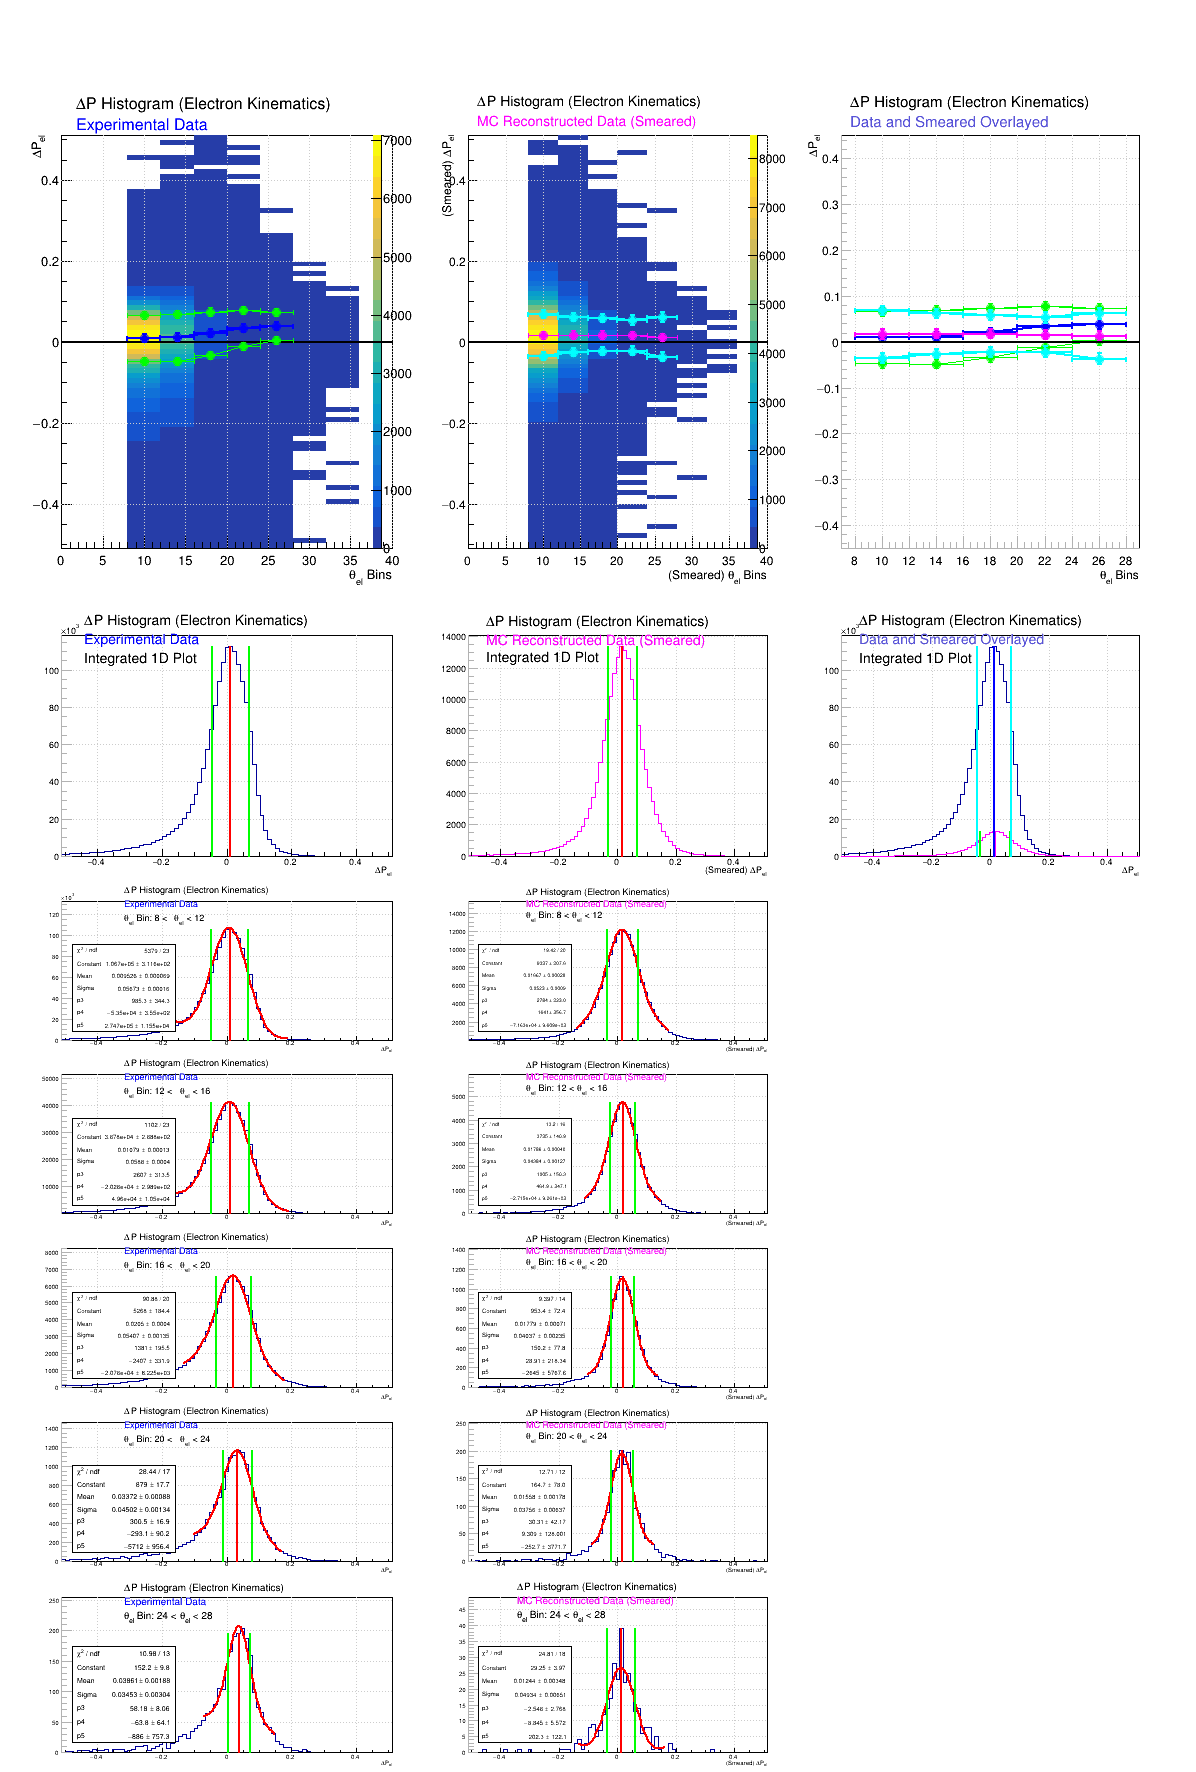

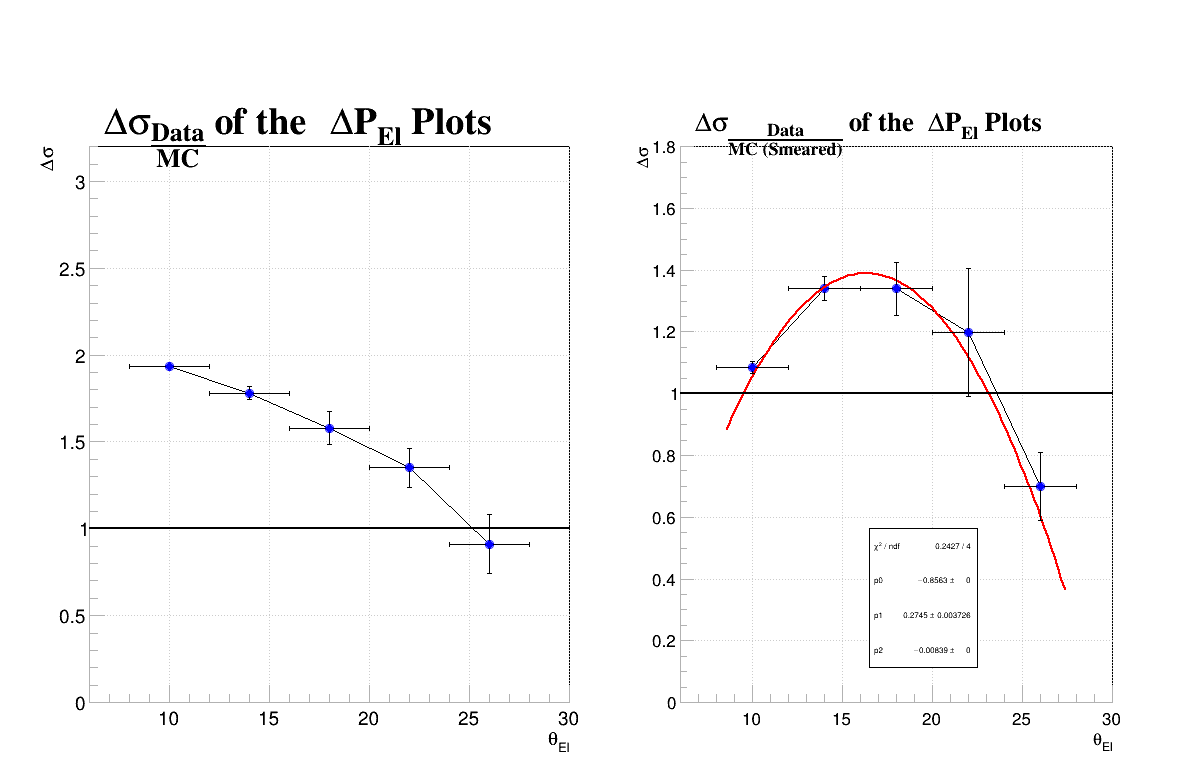

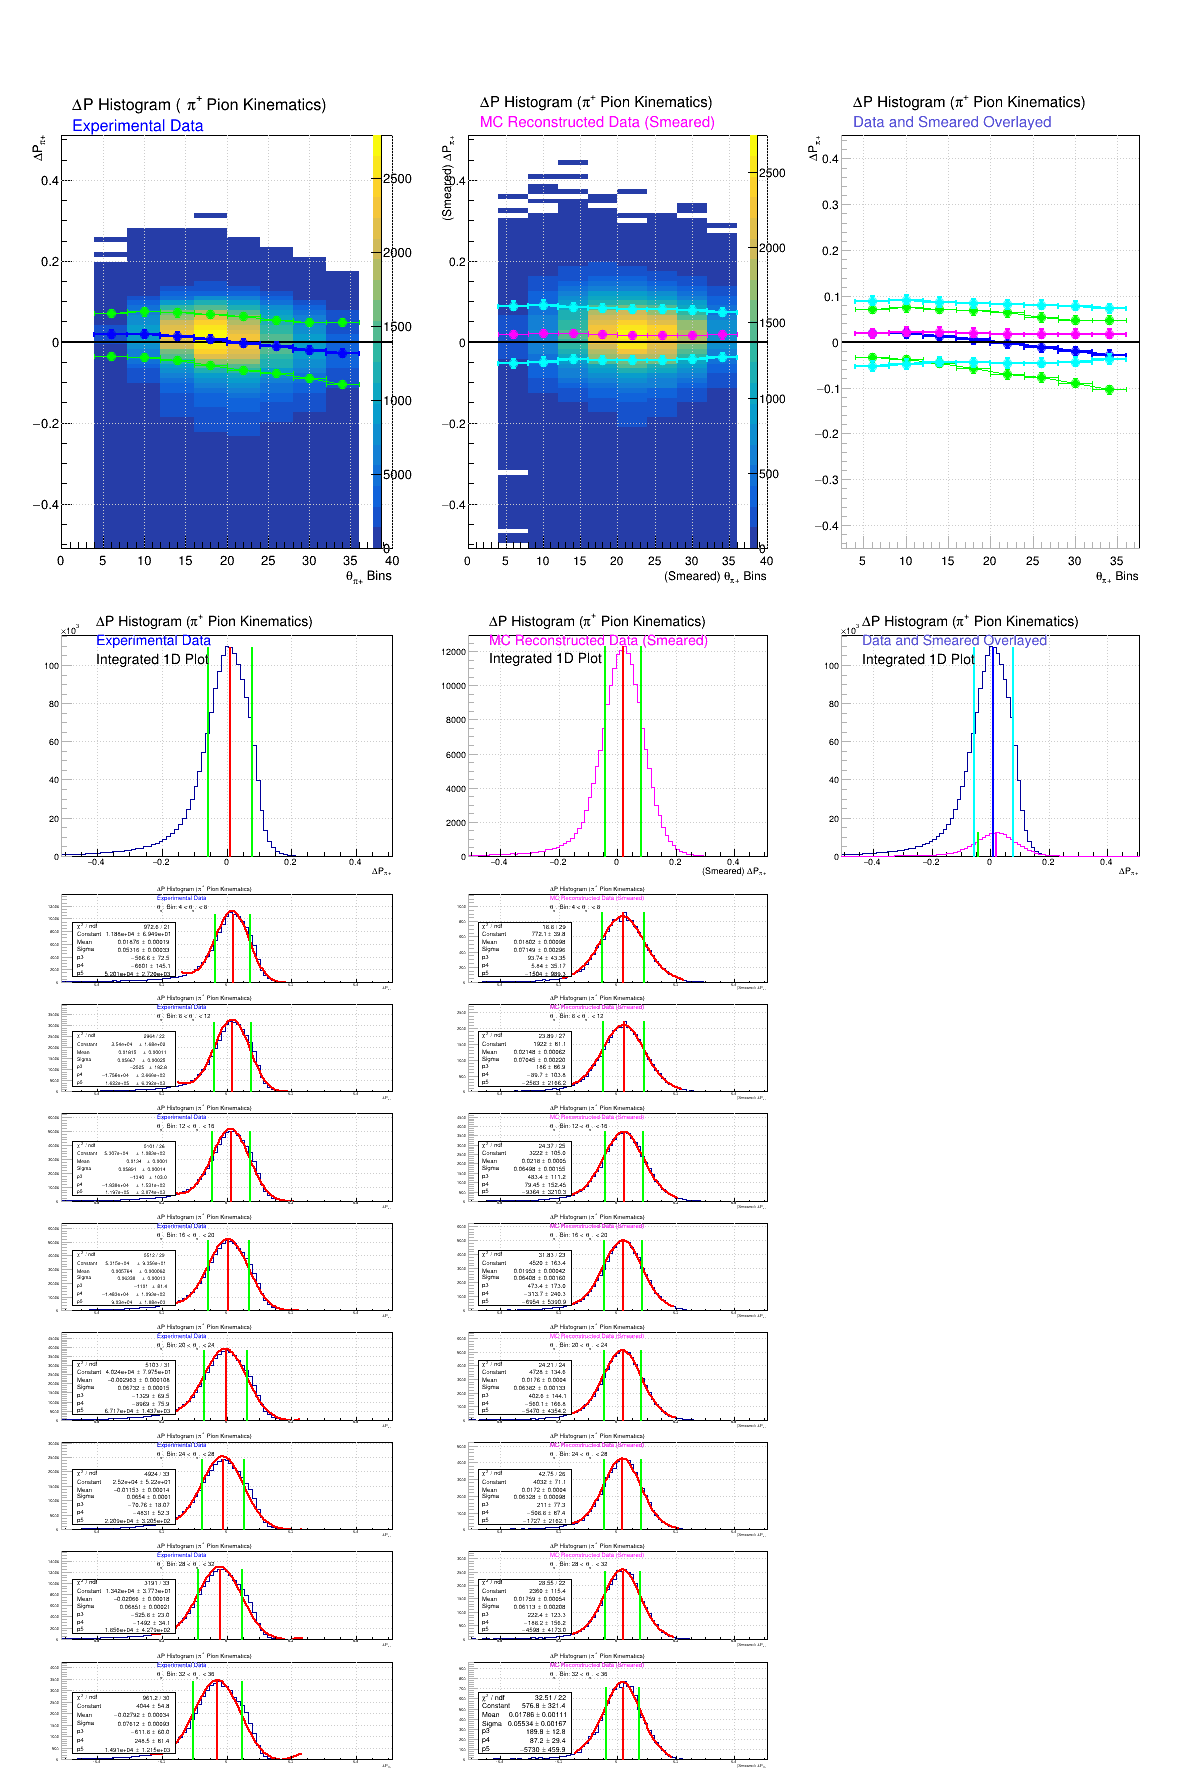

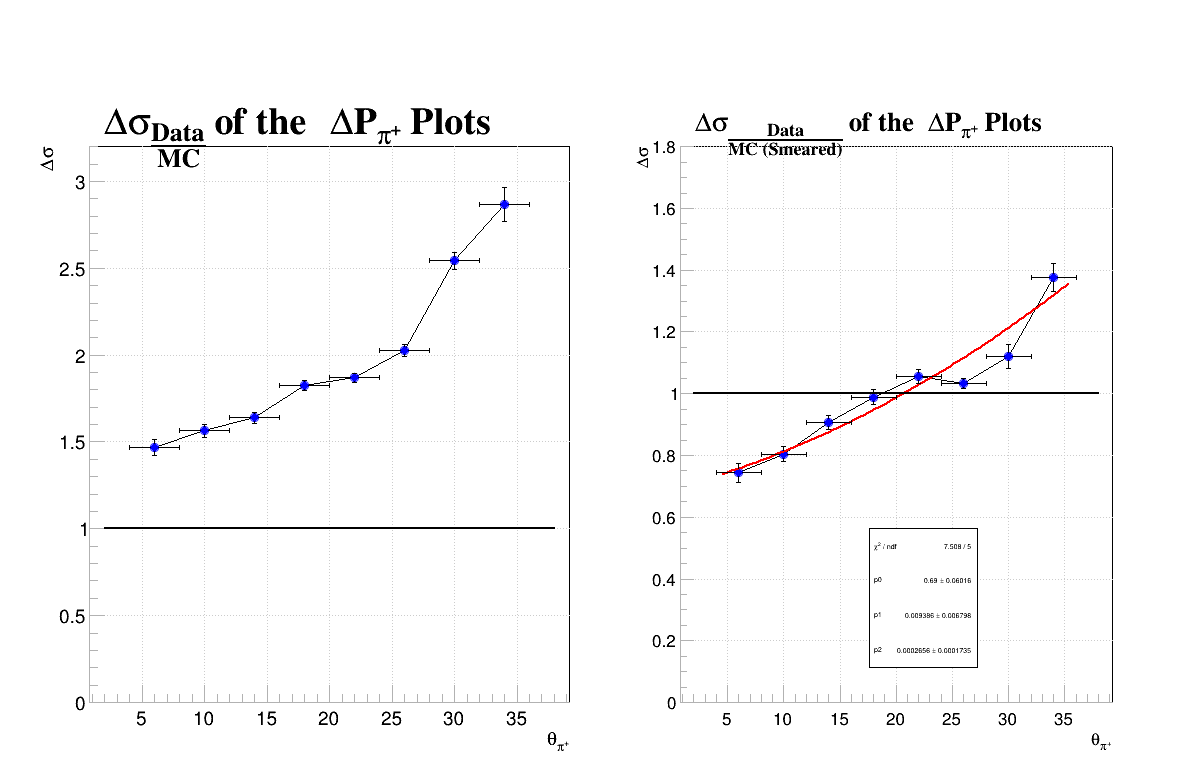

In [82]:
if("Mom_Cor_Histos" in Histo_Type and True):
    MM_or_Delta_List = ["MM"]
    MM_or_Delta_List = ["DP"]
#     MM_or_Delta_List = ["MM", "DP"]
#     MM_or_Delta_List = ["Phase"]
#     MM_or_Delta_List = ["MM", "DP", "Phase"]
    
#     MM_or_Delta_List = ["SF"]
#     Delta_Mom_or_Theta_List = ["Theta"]
    Delta_Mom_or_Theta_List = ["Mom"]
#     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_or_Theta_List = ["Mom"]
    Mom_or_Theta_List = ["Theta"]
#     Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
    for MM_or_Delta in MM_or_Delta_List:
        for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
            if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
                if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
                    continue
            
            for Mom_or_Theta in Mom_or_Theta_List:
                try:
                    for ii in rdf.GetListOfKeys():
                        out_print_rdf = str(ii.GetName())

                        out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
                        out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
                        out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")

                        if("Mom_Cor_Code" not in str(out_print)):
                            continue

                        if("cut_Complete_EDIS" not in str(out_print)):
                            continue
                        # if("cut_Complete" not in str(out_print)):
                        #     continue

                        # print(out_print)
                        # Missing Mass Histograms
                        if("Var-D1='MM'" not in str(out_print)):
                            if(MM_or_Delta in ["MM"]):
                                continue
                            # ∆P Histograms Histograms
                            if(MM_or_Delta in ["DP"]):
                                if((Delta_Mom_or_Theta == "Mom")   and not any(var_type in str(out_print) for var_type in ["Delta_Pel_Cors", "Delta_Ppip_Cors"])):
                                    continue
                                # ∆Theta Histograms Histograms
                                if((Delta_Mom_or_Theta == "Theta") and not any(var_type in str(out_print) for var_type in ["Delta_Theta_el_Cors", "Delta_Theta_pip_Cors"])):
                                    continue
                            if(MM_or_Delta in ["SF"]):
                                if((Delta_Mom_or_Theta == "Mom")   and not any(var_type in str(out_print) for var_type in ["DP_el_SF", "DP_el_SF"])):
                                    continue
                        elif(MM_or_Delta not in ["MM"]):
                            continue

                        if(("Delta" in str(out_print)) and (MM_or_Delta not in ["DP"])):
                            continue
                            
                        if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print))):
                            continue
                            
#                         if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
#                             continue



                        try:
                            if(MM_or_Delta not in ["DP", "MM", "SF"]):
                                Mom_Cor_Histos[out_print_rdf]               = rdf.Get(out_print_rdf)
                                Mom_Cor_Histos[out_print_mdf]               = mdf.Get(out_print_mdf)
                                Mom_Cor_Histos[out_print_mdf_smeared]       = mdf.Get(out_print_mdf_smeared)
                                out_print_rdf_SIDIS                         = str(out_print_rdf).replace("cut_Complete_EDIS",         "cut_Complete_SIDIS")
                                out_print_mdf_SIDIS                         = str(out_print_mdf).replace("cut_Complete_EDIS",         "cut_Complete_SIDIS")
                                out_print_mdf_smeared_SIDIS                 = str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
                                Mom_Cor_Histos[out_print_rdf_SIDIS]         = rdf.Get(out_print_rdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_SIDIS]         = mdf.Get(out_print_mdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = mdf.Get(out_print_mdf_smeared_SIDIS)
                            else:
                                out_print_rdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_rdf)])
                                out_print_mdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf)])
                                out_print_mdf_smeared                 = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared)])
                                Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                        except:
                            print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                        # print(type(Mom_Cor_Histos[out_print]))
                        # print(Mom_Cor_Histos[out_print_mdf_smeared])
                        
                        if(MM_or_Delta in ["DP", "MM", "SF"]):
                            canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
                        else:
                            canvas_name = out_print
                        # print(out_print)
                        # print(canvas_name)
                        if(MM_or_Delta in ["DP", "MM", "SF"]):
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)
                            if(Mom_or_Theta == "Mom"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)

                            if(Mom_or_Theta == "Theta"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                        
                                        
                        else:
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
                            Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
                            #################################
                            ##=====##   Vs Angles   ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            #################################
                            ##=====##  Vs Momentum  ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetYaxis().GetTitle()).replace("pi+", "#pi^{+}"))

                        Mom_Cor_Canvas[canvas_name].Draw()
                        try:
                            # Draw_Canvas(canvas=Mom_Cor_Canvas[canvas_name], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                            Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
                            Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
                            
                            
                            
                            if(MM_or_Delta in ["DP", "MM"]):
                                Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.05, xup=0.55, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.05, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.05, xup=1.05, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")
                                

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Tline_Simple_Ideal_2D = ROOT.TLine()
                                Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D.SetLineWidth(2)
                                Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396)

                                # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
                                # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
                                Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)




                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                               # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.505, ylow=0.0, xup=0.905, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.05, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")
                                
 

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396)

                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



                                Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
                                Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)

                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
                                # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))


                                # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
                                # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetLineColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetLineWidth(2)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerSize(1)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerStyle(8)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)

                                # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")


                                if(MM_or_Delta in ["DP", "SF"]):
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
                                else:
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

                                Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta == "DP") else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta == "DP") else 0.9396)


                                Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)


                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


                            Mom_Cor_Canvas[canvas_name].Modified()
                            Mom_Cor_Canvas[canvas_name].Update()

                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



                                Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(4)
                                Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(5)
                                Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # Mom_Cor_Canvas_cd_6.cd(ii + 1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "SF"]) else "Missing Mass vs ", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P/P" if(MM_or_Delta in ["SF"]) else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)


                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)



                                # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
                                # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
                                MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)


                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D = ROOT.TLine()
                                Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D.SetLineWidth(2)
                                Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)

                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "SF"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "/P" if(MM_or_Delta in ["SF"]) else "", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)


                                # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 2)
#                                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 2)
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                Par_C = Par_B*(-X0_point) + Y0_point

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                 if("pip" in str(out_print)):
#                                     for ii in range(0, npoints + 2, 1):
#                                         print(str(ii))
#                                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
#                                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
#                                         print("")

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
                        
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                if(MM_or_Delta in ["DP", "SF"]):
                                    Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")

                                    # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                    p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
                                    p0_Smearing = "{:.4e}".format(p0_Smearing)

                                    # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                    p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
                                    p1_Smearing = "{:.4e}".format(p1_Smearing)

                                    # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                    p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
                                    p2_Smearing = "{:.4e}".format(p2_Smearing)


                                    print("".join(["""
                    // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "SF"]) else "Missing Mass ", "/P" if(MM_or_Delta in ["SF"]) else "", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
                    """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                    """]))


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                if(MM_or_Delta == "DP"):
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                        except:
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                except:
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")

else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

.

.

.

In [73]:
print("\nDefining ∆P/P (Smearing Correction) fits...")
def fit_Dp_2D_SF(h2, minR, maxR, dR, Title, Particle):
    hx = h2.ProjectionX()
    Histo_1D_Slices, Histo_1D_Slices_Over, Sigma_Widths, Sigma_Points = [], [], [], []
    gr2, gr2_sigma, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    fit_function = "gaus(0) + pol2(3)"
    
    hy = h2.ProjectionY("".join([str(h2.GetName()), "_1D_Integrated"]))
    hy.SetDirectory(0)
    fy = ROOT.TF1("fy", str(fit_function), -0.5, 0.5)
    fy.SetParName(0, "Constant")
    fy.SetParName(1, "Mean")
    fy.SetParName(2, "Sigma")
    mu = hy.GetBinCenter(hy.GetMaximumBin())
    fy.SetParameters(1, mu, 0.05)
    fy.SetParLimits(1,  mu - 0.1, mu + 0.1)
    fy.SetParameter(0,  hy.GetBinContent(hy.GetMaximumBin()))
    fy.SetParLimits(0,  0.75*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
    fy.SetRange(mu - 0.15, mu + 0.15)
    hy.Fit(fy, "NRQ")
    mu, sig = fy.GetParameter(1), abs(fy.GetParameter(2))
    fy.SetRange(mu - 3*sig, mu + 3*sig)
    Slice_Title = "".join(["#splitline{", Title, "}{Integrated 1D Plot}"])
    hy.SetTitle(Slice_Title)
    Integrated_1D_Plot_Info = [mu, sig, hy.GetBinContent(hy.FindBin(mu)), [fy.GetParError(1), fy.GetParError(2)]]
    
    while(minR+dR <= maxR):
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}",  ib0, ib1)
        hy2.SetDirectory(0)
        hy3 = h2.ProjectionY(f"hy3{ib1}", ib0, ib1)
        hy3.SetDirectory(0)
        
        Histo_1D_Slices.append(hy2)
        Histo_1D_Slices_Over.append(hy3)
        
        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
        
        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
        
        if("el" in Particle):
            fy2.SetParameters(1, mu, 0.05)
            fy2.SetParLimits(1,  mu - 0.1, mu + 0.1)
            fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetRange(mu - 0.15, mu + 0.15)
        else:
            fy2.SetParameters(1, mu, 0.05)
            fy2.SetParLimits(1,  mu - 0.15, mu + 0.15)
            fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if("Reconstructed Monte Carlo" in Title):
                fy2.SetParameters(1, mu, 0.03)
                fy2.SetParLimits(1,  mu - 0.25, mu + 0.25)
                fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(0, 0.95*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetRange(mu - 0.15, mu + 0.15)
                
            
        hy2.Fit(fy2, "RQ")
        
        # fy2.SetParameter(3,  0)
        # fy2.SetParLimits(3, -10000, 10000)
        # fy2.SetParameter(4,  0)
        # fy2.SetParLimits(4, -10000, 10000)
        # fy2.SetParameter(5,  0)
        # fy2.SetParLimits(5, -10000, 10000)
        
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        if(((abs(mu) > 0.02) and ("el" in Particle)) or ((abs(mu) > 0.05) and ("pip" in Particle))):
            mu = 0
            limit = 0.04 if("el" in Particle) else 0.07
            if(("el" not in Particle) and ("Reconstructed Monte Carlo" in Title)):
                limit = 0.03
            fy2.SetParameter(0, hy2.GetBinContent(hy2.FindBin(0)))
            fy2.SetParLimits(0, 0.95*(hy2.GetBinContent(hy2.FindBin(0))), 1.5*(hy2.GetBinContent(hy2.FindBin(0))))
            fy2.SetParameter(1, mu)
            fy2.SetParLimits(1, mu - limit, mu + limit)
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            limit = 0.03 if("el" in Particle) else 0.04
            fy2.SetParameter(0, fy2.GetParameter(0))
            fy2.SetParLimits(0, 0.75*(fy2.GetParameter(0)), 1.5*(fy2.GetParameter(0)))
            fy2.SetParameter(1, mu)
            fy2.SetParLimits(1, 0.9*mu, 1.1*mu)
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        else:
            limit = 0.04 if("el" in Particle) else 0.07
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # if(minR > 1):
        #     fy2.SetRange(mu - 3*sig, mu + 3*sig)
        #     hy2.Fit(fy2, "RQ")
        #     mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        if(("el" not in Particle) and ("Reconstructed Monte Carlo" in Title)):
            fy2.SetRange(-0.03, 0.03)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{Range from ", str(round(minR, 4)), "-", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        hy3.SetTitle(Slice_Title.replace(str(Title), "".join(["#frac{#DeltaP}{P} Smearing Comparison (", "Electron" if(Particle in ["el"]) else "#pi^{+} Pion", " Kinematics)"])))
        
        Fit_Fixed_Error = 0.01
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
        
        # sigma_factor_upper = 1.25
        # sigma_factor_lower = 1.25
        sigma_factor_upper, sigma_factor_lower = 1, 1
        
        gr2.SetPoint(gr2.GetN(),                        minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1,                      dR/2.0, Error_Bars)
        
        gr2_sigma.SetPoint(gr2_sigma.GetN(),            minR+dR/2.0, abs(fy2.GetParameter(2)))
        gr2_sigma.SetPointError(gr2_sigma.GetN()-1,          dR/2.0, fy2.GetParError(2))
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(),       minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1,     dR/2.0, (Error_Bars**2      + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(),   minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2      + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1)   + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        minR += dR
        
    setattr(h2, "Integrated_1D_Plot_Info", Integrated_1D_Plot_Info)
    setattr(h2, "FindPeak_Sigma_Down",     FindPeak_Sigma_Down)
    setattr(h2, "FindPeak_Sigma_Up",       FindPeak_Sigma_Up)
    setattr(h2, "Histo_1D_Slices_Over",    Histo_1D_Slices_Over)
    setattr(h2, "Histo_1D_Slices",         Histo_1D_Slices)
    setattr(h2, "gr2_sigma_down",          gr2_sigma_down)
    setattr(h2, "gr2_sigma_up",            gr2_sigma_up)
    setattr(h2, "gr2_sigma",               gr2_sigma)
    setattr(h2, "Sigma_Widths",            Sigma_Widths)
    setattr(h2, "Sigma_Points",            Sigma_Points)
    setattr(h2, "FindPeak_x",              FindPeak_x)
    setattr(h2, "FindPeak_y",              FindPeak_y)
    setattr(h2, "gr2",                     gr2)
    setattr(h2, "hy",                      hy)
    
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_SF_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared):
#     print(Title_Data)
    try:
        fit_Dp_2D_SF(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle)
        fit_Dp_2D_SF(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle)
        fit_Dp_2D_SF(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear, Delta_Sigma_Data_MC, Delta_Sigma_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    Delta_Sigma_Data_MC.SetMarkerStyle(20)
    Delta_Sigma_Data_MC_Smear.SetMarkerStyle(20)
    
    gr2_Data_MC.SetTitle("".join(["#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP/P_{",                  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{#frac{Data}{MC}}"]))
    gr2_Data_MC_Smear.SetTitle("".join(["#Delta#sigma_{#frac{Data}{MC_{Smeared}}} of the #DeltaP/P_{",  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{#frac{Data}{MC_{Smeared}}}"]))
    
    Delta_Sigma_Data_MC.SetTitle("".join(["#Delta#sigma_{Data-MC} of the #DeltaP/P_{",                  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{Data-MC}"]))
    Delta_Sigma_Data_MC_Smear.SetTitle("".join(["#Delta#sigma_{Data-MC_{Smeared}} of the #DeltaP/P_{",  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{Data-MC_{Smeared}}"]))
    
    gr2_Data_MC.SetName(f"{Histo2D_Data.GetName()}_gr2_Data_MC")
    gr2_Data_MC_Smear.SetName(f"{Histo2D_Data.GetName()}_gr2_Data_MC_Smear")
    
    Delta_Sigma_Data_MC.SetName(f"{Histo2D_Data.GetName()}_Delta_Sigma_Data_MC")
    Delta_Sigma_Data_MC_Smear.SetName(f"{Histo2D_Data.GetName()}_Delta_Sigma_Data_MC_Smear")
    
    gr2_Data_MC.SetMarkerColor(root_color.Blue)
    gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
    
    Delta_Sigma_Data_MC.SetMarkerColor(root_color.Black)
    Delta_Sigma_Data_MC_Smear.SetMarkerColor(root_color.Green)
    
    # point_num        = 0
    # Peak_Points_List = []
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print(f"{color.Error}ERROR: the 'Mom_Center' points are not all the same...{color.END}")
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(),     Mom_Center_Data,  Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(),  Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div",   Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
            Delta_Sigma_Data_MC.SetPoint(Delta_Sigma_Data_MC.GetN(), Mom_Center_Data,  Sigma_Data-Sigma_MC)
            Delta_Sigma_Data_MC_Error = Error_Propagation("sub",    Sigma_Error_Data,  Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data-Sigma_MC))
            try:
                Delta_Sigma_Data_MC.SetPointError(Delta_Sigma_Data_MC.GetN()-1, dM/2.0, Delta_Sigma_Data_MC_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
            Delta_Sigma_Data_MC_Smear.SetPoint(Delta_Sigma_Data_MC_Smear.GetN(), Mom_Center_Data,  Sigma_Data-Sigma_MC_Smear)
            Delta_Sigma_Data_MC_Smear_Error = Error_Propagation("sub",          Sigma_Error_Data,  Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data-Sigma_MC_Smear))
            try:
                Delta_Sigma_Data_MC_Smear.SetPointError(Delta_Sigma_Data_MC_Smear.GetN()-1, dM/2.0, Delta_Sigma_Data_MC_Smear_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
                
            # Peak_Points_List.append([point_num, Mom_Center_Data, Sigma_Data/Sigma_MC, Sigma_Data/Sigma_MC_Smear])
            # point_num += 1
            
    else:
        print("".join([color.Error, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,     "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_Data,     "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_Data,     "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_Data,     "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_Data,     "Peak_Points_List",          Peak_Points_List)

    setattr(Histo2D_MC,       "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_MC,       "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_MC,       "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_MC,       "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_MC,       "Peak_Points_List",          Peak_Points_List)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear, "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_MC_Smear, "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_MC_Smear, "Peak_Points_List",          Peak_Points_List)
    
print("DONE")


Defining ∆P/P (Smearing Correction) fits...
DONE


In [74]:
def Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated, SF_Canvas_cd_Slice, SF_Histo_Input, Histo_Type="rdf"):
    color_Main  = root_color.Blue  if(Histo_Type in ["rdf"]) else root_color.Red   if(Histo_Type in ["mdf"]) else root_color.Pink
    color_Sigma = root_color.Green if(Histo_Type in ["rdf"]) else root_color.Brown if(Histo_Type in ["mdf"]) else root_color.Cyan
    Draw_Canvas(canvas=SF_Canvas_cd_Integrated, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SF_Histo_Input.Draw("colz")
    palette_move(canvas=SF_Canvas_cd_Integrated, histo=SF_Histo_Input, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    SF_Histo_Input.gr2.SetLineColor(color_Main)
    SF_Histo_Input.gr2.SetLineWidth(2)
    SF_Histo_Input.gr2.SetMarkerSize(1)
    SF_Histo_Input.gr2.SetMarkerColor(color_Main)
    SF_Histo_Input.gr2.Draw("same PL")

    SF_Histo_Input.gr2_sigma_up.SetLineColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_up.SetLineWidth(1)
    SF_Histo_Input.gr2_sigma_up.SetMarkerSize(1)
    SF_Histo_Input.gr2_sigma_up.SetMarkerColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_up.Draw("same PL")
    SF_Histo_Input.gr2_sigma_down.SetLineColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_down.SetLineWidth(1)
    SF_Histo_Input.gr2_sigma_down.SetMarkerSize(1)
    SF_Histo_Input.gr2_sigma_down.SetMarkerColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_down.Draw("same PL")

    Draw_Canvas(canvas=SF_Canvas_cd_Integrated, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SF_Histo_Input.hy.GetXaxis().SetRangeUser(-0.2, 0.2)
    SF_Histo_Input.hy.Draw("same")

    for cd_num_ii in range(1, len(SF_Histo_Input.Histo_1D_Slices) + 1, 1):
        Draw_Canvas(canvas=SF_Canvas_cd_Slice, cd_num=cd_num_ii, left_add=0.05, right_add=0.05, up_add=0.05, down_add=0.1)
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetXaxis().SetRangeUser(-0.1, 0.1)
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetYaxis().SetRangeUser(0,    2.0*(SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum()))
        # print(f"SF_Histo_Input.Histo_1D_Slices[{cd_num_ii} - 1].GetMaximum() = {SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum()}")
        DrawPeak_Center, DrawPeak_Sigma_Down, DrawPeak_Sigma_Up = ROOT.TLine(), ROOT.TLine(), ROOT.TLine()
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii     - 1].Draw("same")
        DrawPeak_Center.SetLineColor(color_Main)
        DrawPeak_Center.SetLineWidth(2)
        DrawPeak_Center.DrawLine(SF_Histo_Input.FindPeak_x[cd_num_ii              - 1], 0, SF_Histo_Input.FindPeak_x[cd_num_ii          - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        DrawPeak_Sigma_Down.SetLineColor(color_Sigma)
        DrawPeak_Sigma_Down.SetLineWidth(2)
        DrawPeak_Sigma_Down.DrawLine(SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], 0, SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        # DrawPeak_Sigma_Down.DrawLine(SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], 0, SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum())
        DrawPeak_Sigma_Up.SetLineColor(color_Sigma)
        DrawPeak_Sigma_Up.SetLineWidth(2)
        DrawPeak_Sigma_Up.DrawLine(SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii     - 1], 0, SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii   - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        # DrawPeak_Sigma_Up.DrawLine(SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii     - 1], 0, SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii   - 1], SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum())
        
print("Done")

Done


.

.

.

In [75]:
def VS_Phi_Plots(NAME, rdf_Histo, mdf_Histo, smear_FX_Histo, smeared_Histo, Variable_Y, SMEAR_FACTOR="Default"):
    Canvas_Test = Canvas_Create(Name="Test", Num_Columns=1, Num_Rows=1, Size_X=10, Size_Y=10, cd_Space=0)
    if(str(Variable_Y)   in ["MM"]):
        ExDATA_Histo   =  (rdf_Histo.Project3D('yx'))
        MC_REC_Histo   =  (mdf_Histo.Project3D('yx'))
        SMEAR_FX_Histo =  (smear_FX_Histo.Project3D('yx'))
        SMEAR_SF_Histo =  (smeared_Histo.Project3D('yx'))
    elif(str(Variable_Y) in ["DP"]):
        ExDATA_Histo   =  (rdf_Histo.Project3D('zx'))
        MC_REC_Histo   =  (mdf_Histo.Project3D('zx'))
        SMEAR_FX_Histo =  (smear_FX_Histo.Project3D('zx'))
        SMEAR_SF_Histo =  (smeared_Histo.Project3D('zx'))
    else:
        print(color.RED, color.BOLD, "\n\nERROR\n\n", color.END)
        return "ERROR"
    
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics"     in str(ExDATA_Histo.GetTitle()))   else "Local #phi_{#pi^{+} Pion} Histogram"))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Electron Kinematics", ""))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" - ", ""))
    
    ExDATA_Histo.SetTitle("".join(["#splitline{#scale[0.95]{",   str(ExDATA_Histo.GetTitle()),   "}}{#scale[1.15]{#color[", str(root_color.Blue), "]{Experimental Data}}}"]))
    
    
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics"     in str(MC_REC_Histo.GetTitle()))   else "Local #phi_{#pi^{+} Pion} Histogram"))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Electron Kinematics", ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" - ", ""))
    
    MC_REC_Histo.SetTitle("".join(["#splitline{#scale[0.95]{",   str(MC_REC_Histo.GetTitle()),   "}}{#scale[1.15]{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}"]))
    
    
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics" in str(SMEAR_FX_Histo.GetTitle())) else "Local #phi_{#pi^{+} Pion} Histogram"))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Electron Kinematics", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("(Smeared) ", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" - ", ""))
    
    SMEAR_FX_Histo.SetTitle("".join(["#splitline{#scale[0.95]{", str(SMEAR_FX_Histo.GetTitle()), "}}{#scale[1.15]{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}"]))
    
    
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics" in str(SMEAR_SF_Histo.GetTitle())) else "Local #phi_{#pi^{+} Pion} Histogram"))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Electron Kinematics", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("(Smeared) ", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" - ", ""))
    
    SMEAR_SF_Histo.SetTitle("".join(["#splitline{#scale[0.95]{", str(SMEAR_SF_Histo.GetTitle()), "}}{#scale[1.15]{#color[", str(root_color.Pink), "]{MC Reconstructed Data", str(root_color.Bold), "{(Smear Factor", "".join([": ", str(SMEAR_FACTOR), ")}"]) if(SMEAR_FACTOR != "Default") else ")}", "}}}"]))
    
    
    if(str(Variable_Y)   in ["MM"]):
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" yx projection", ""))
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" yx projection", ""))
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" yx projection", ""))
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" yx projection", ""))
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        
        ExDATA_Histo.GetYaxis().SetRangeUser(0.6,   1.2)
        MC_REC_Histo.GetYaxis().SetRangeUser(0.6,   1.2)
        SMEAR_FX_Histo.GetYaxis().SetRangeUser(0.6, 1.2)
        SMEAR_SF_Histo.GetYaxis().SetRangeUser(0.6, 1.2)
        
    elif(str(Variable_Y) in ["DP"]):
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" zx projection", ""))
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" zx projection", ""))
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" zx projection", ""))
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" zx projection", ""))
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        
        ExDATA_Histo.GetYaxis().SetRangeUser(-0.5,   0.4)
        MC_REC_Histo.GetYaxis().SetRangeUser(-0.5,   0.4)
        SMEAR_FX_Histo.GetYaxis().SetRangeUser(-0.5, 0.4)
        SMEAR_SF_Histo.GetYaxis().SetRangeUser(-0.5, 0.4)
        
        ExDATA_Histo.GetYaxis().SetTitle(str(ExDATA_Histo.GetYaxis().GetTitle()).replace(";", ""))
        MC_REC_Histo.GetYaxis().SetTitle(str(MC_REC_Histo.GetYaxis().GetTitle()).replace(";", ""))
        SMEAR_FX_Histo.GetYaxis().SetTitle(str(SMEAR_FX_Histo.GetYaxis().GetTitle()).replace(";", ""))
        SMEAR_SF_Histo.GetYaxis().SetTitle(str(SMEAR_SF_Histo.GetYaxis().GetTitle()).replace(";", ""))

    else:
        print(color.RED, color.BOLD, "\n\nERROR\n\n", color.END)
        return "ERROR"
    
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("()",     ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("()",     ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("()", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("()", ""))
    
    ExDATA_Histo.GetXaxis().SetRangeUser(-40   if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 35)
    MC_REC_Histo.GetXaxis().SetRangeUser(-40   if("Electron" not in str(MC_REC_Histo.GetTitle()))   else -25, 35)
    SMEAR_FX_Histo.GetXaxis().SetRangeUser(-40 if("Electron" not in str(SMEAR_FX_Histo.GetTitle())) else -25, 35)
    SMEAR_SF_Histo.GetXaxis().SetRangeUser(-40 if("Electron" not in str(SMEAR_SF_Histo.GetTitle())) else -25, 35)
    
    Tline_Simple_Ideal_Phi = ROOT.TLine()
    Tline_Simple_Ideal_Phi.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_Phi.SetLineWidth(2)

    
    if("Electron" not in str(ExDATA_Histo.GetTitle())):
        Sigma_Smearing_Correction_FX(Histo2D_Data=ExDATA_Histo, Histo2D_MC=MC_REC_Histo, Histo2D_MC_Smear=SMEAR_SF_Histo, Histo2D_MC_Smear_FX=SMEAR_FX_Histo, minM=-32, maxM=18, dM=4, particle="pip", Title_Data=str(ExDATA_Histo.GetTitle()), Title_MC=str(MC_REC_Histo.GetTitle()), Title_MC_Smeared=str(SMEAR_SF_Histo.GetTitle()), Title_MC_Smeared_FX=str(SMEAR_FX_Histo.GetTitle()))
    else:
        Sigma_Smearing_Correction_FX(Histo2D_Data=ExDATA_Histo, Histo2D_MC=MC_REC_Histo, Histo2D_MC_Smear=SMEAR_SF_Histo, Histo2D_MC_Smear_FX=SMEAR_FX_Histo, minM=-8,  maxM=24, dM=4, particle="el",  Title_Data=str(ExDATA_Histo.GetTitle()), Title_MC=str(MC_REC_Histo.GetTitle()), Title_MC_Smeared=str(SMEAR_SF_Histo.GetTitle()), Title_MC_Smeared_FX=str(SMEAR_FX_Histo.GetTitle()))
    
    
    del Canvas_Test
    Canvas_Output = Canvas_Create(Name=NAME, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0.001)
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 1 - START         ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(1) - Experimental   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_1 = Canvas_Output.cd(1)
    Canvas_Output_CD_1.Divide(1, 2, 0.001, 0.001)
    Canvas_Output_CD_1.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_1, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    ExDATA_Histo.gr2.SetLineColor(root_color.Black)
    ExDATA_Histo.gr2.SetMarkerColor(root_color.Black)
    ExDATA_Histo.gr2.Draw("same PL")

    ExDATA_Histo.gr2_sigma_up.SetLineColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_down.SetLineColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_up.SetMarkerColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_down.SetMarkerColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_up.SetMarkerSize(2)
    ExDATA_Histo.gr2_sigma_down.SetMarkerSize(2)
    ExDATA_Histo.gr2_sigma_up.SetMarkerStyle(23)
    ExDATA_Histo.gr2_sigma_down.SetMarkerStyle(22)

    ExDATA_Histo.gr2_sigma_up.Draw("same PL")
    ExDATA_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=ExDATA_Histo,   x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(1.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_1.cd(2)
    Canvas_Output_CD_1.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_1, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.hy.Draw("same")
    ExDATA_Histo_Peak, ExDATA_Histo_Sig, ExDATA_Histo_Max, ExDATA_Histo_Errors = ExDATA_Histo.Integrated_1D_Plot_Info
    TLine_Fits_ExDATA_1D_Int = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_ExDATA_1D_Int.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int.DrawLine(ExDATA_Histo_Peak, ExDATA_Histo.hy.GetMinimum(),  ExDATA_Histo_Peak, ExDATA_Histo_Max)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.DrawLine(ExDATA_Histo_Peak + ExDATA_Histo_Sig, ExDATA_Histo.hy.GetMinimum(), ExDATA_Histo_Peak + ExDATA_Histo_Sig, ExDATA_Histo_Max)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.DrawLine(ExDATA_Histo_Peak - ExDATA_Histo_Sig, ExDATA_Histo.hy.GetMinimum(), ExDATA_Histo_Peak - ExDATA_Histo_Sig, ExDATA_Histo_Max)
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(2) - Reconstructed   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_2 = Canvas_Output.cd(2)
    Canvas_Output_CD_2.Divide(1, 2, 0.001, 0.001)
    Canvas_Output_CD_2.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_2, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    MC_REC_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    MC_REC_Histo.gr2.SetLineColor(root_color.Red)
    MC_REC_Histo.gr2.SetMarkerColor(root_color.Red)
    MC_REC_Histo.gr2.Draw("same PL")

    MC_REC_Histo.gr2_sigma_up.SetLineColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_down.SetLineColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_up.SetMarkerColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_down.SetMarkerColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_up.SetMarkerSize(2)
    MC_REC_Histo.gr2_sigma_down.SetMarkerSize(2)
    MC_REC_Histo.gr2_sigma_up.SetMarkerStyle(23)
    MC_REC_Histo.gr2_sigma_down.SetMarkerStyle(22)

    MC_REC_Histo.gr2_sigma_up.Draw("same PL")
    MC_REC_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=MC_REC_Histo,   x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(2.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_2.cd(2)
    Canvas_Output_CD_2.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_2, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    MC_REC_Histo.hy.Draw("same")
    MC_REC_Histo_Peak, MC_REC_Histo_Sig, MC_REC_Histo_Max, MC_REC_Histo_Errors = MC_REC_Histo.Integrated_1D_Plot_Info
    TLine_Fits_MC_REC_1D_Int = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_MC_REC_1D_Int.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int.DrawLine(MC_REC_Histo_Peak, MC_REC_Histo.hy.GetMinimum(),  MC_REC_Histo_Peak, MC_REC_Histo_Max)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.DrawLine(MC_REC_Histo_Peak + MC_REC_Histo_Sig, MC_REC_Histo.hy.GetMinimum(), MC_REC_Histo_Peak + MC_REC_Histo_Sig, MC_REC_Histo_Max)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.DrawLine(MC_REC_Histo_Peak - MC_REC_Histo_Sig, MC_REC_Histo.hy.GetMinimum(), MC_REC_Histo_Peak - MC_REC_Histo_Sig, MC_REC_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(3) - MC Smeared FX   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_3 = Canvas_Output.cd(3)
    Canvas_Output_CD_3.Divide(1, 2, 0, 0)
    Canvas_Output_CD_3.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_3, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_FX_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
        
    SMEAR_FX_Histo.gr2.SetLineColor(40)
    SMEAR_FX_Histo.gr2.SetMarkerColor(40)
    SMEAR_FX_Histo.gr2.Draw("same PL")

    SMEAR_FX_Histo.gr2_sigma_up.SetLineColor(41)
    SMEAR_FX_Histo.gr2_sigma_down.SetLineColor(41)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerColor(41)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerColor(41)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerSize(2)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerSize(2)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerStyle(23)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerStyle(22)

    SMEAR_FX_Histo.gr2_sigma_up.Draw("same PL")
    SMEAR_FX_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=SMEAR_FX_Histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(3.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_3.cd(3)
    Canvas_Output_CD_3.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_3, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_FX_Histo.hy.Draw("same")
    SMEAR_FX_Histo_Peak, SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max, SMEAR_FX_Histo_Errors = SMEAR_FX_Histo.Integrated_1D_Plot_Info
    TLine_Fits_SMEAR_FX_1D_Int = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_SMEAR_FX_1D_Int.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int.DrawLine(SMEAR_FX_Histo_Peak, SMEAR_FX_Histo.hy.GetMinimum(),  SMEAR_FX_Histo_Peak, SMEAR_FX_Histo_Max)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.DrawLine(SMEAR_FX_Histo_Peak + SMEAR_FX_Histo_Sig, SMEAR_FX_Histo.hy.GetMinimum(), SMEAR_FX_Histo_Peak + SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.DrawLine(SMEAR_FX_Histo_Peak - SMEAR_FX_Histo_Sig, SMEAR_FX_Histo.hy.GetMinimum(), SMEAR_FX_Histo_Peak - SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(4) - MC Smeared SF   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_4 = Canvas_Output.cd(4)
    Canvas_Output_CD_4.Divide(1, 2, 0, 0)
    Canvas_Output_CD_4.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_4, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_SF_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    SMEAR_SF_Histo.gr2.SetLineColor(root_color.Pink)
    SMEAR_SF_Histo.gr2.SetMarkerColor(root_color.Pink)
    SMEAR_SF_Histo.gr2.Draw("same PL")

    SMEAR_SF_Histo.gr2_sigma_up.SetLineColor(7)
    SMEAR_SF_Histo.gr2_sigma_down.SetLineColor(7)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerColor(7)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerColor(7)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerSize(2)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerSize(2)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerStyle(23)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerStyle(22)

    SMEAR_SF_Histo.gr2_sigma_up.Draw("same PL")
    SMEAR_SF_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=SMEAR_SF_Histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(4.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_4.cd(4)
    Canvas_Output_CD_4.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_4, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_SF_Histo.hy.Draw("same")
    SMEAR_SF_Histo_Peak, SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max, SMEAR_SF_Histo_Errors = SMEAR_SF_Histo.Integrated_1D_Plot_Info
    TLine_Fits_SMEAR_SF_1D_Int = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_SMEAR_SF_1D_Int.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int.DrawLine(SMEAR_SF_Histo_Peak, SMEAR_SF_Histo.hy.GetMinimum(),  SMEAR_SF_Histo_Peak, SMEAR_SF_Histo_Max)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.DrawLine(SMEAR_SF_Histo_Peak + SMEAR_SF_Histo_Sig, SMEAR_SF_Histo.hy.GetMinimum(), SMEAR_SF_Histo_Peak + SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.DrawLine(SMEAR_SF_Histo_Peak - SMEAR_SF_Histo_Sig, SMEAR_SF_Histo.hy.GetMinimum(), SMEAR_SF_Histo_Peak - SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(5) - Plot Overlap   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_5 = Canvas_Output.cd(5)
    Canvas_Output_CD_5.Divide(1, 2, 0, 0)
    Canvas_Output_CD_5.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_5, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    
    Mor_Cor_MultiGraph_Phi = ROOT.TMultiGraph("".join(["Combined_", str(NAME)]), "".join([str(MC_REC_Histo.GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(MC_REC_Histo.GetXaxis().GetTitle()), ";", str(MC_REC_Histo.GetYaxis().GetTitle())]))
    
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2,              "lp")
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2_sigma_up,     "lp")
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2_sigma_down,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2,              "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2_sigma_up,     "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2_sigma_down,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2,            "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2_sigma_up,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2_sigma_down, "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2,            "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2_sigma_up,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2_sigma_down, "lp")
    
    if(str(Variable_Y)   in ["MM"]):
        Mor_Cor_MultiGraph_Phi.GetYaxis().SetRangeUser(0.85,  1.05)
    elif(str(Variable_Y) in ["DP"]):
        Mor_Cor_MultiGraph_Phi.GetYaxis().SetRangeUser(-0.25, 0.25)
        
    Mor_Cor_MultiGraph_Phi.GetXaxis().SetRangeUser(-40 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -25, 35)
    
    Mor_Cor_MultiGraph_Phi.Draw("same APL")
    
    Tline_Simple_Ideal_Phi.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -29, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 30, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(5.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Mor_Cor_Phi_1D = {}
    Canvas_Output_CD_5.cd(5)
    Canvas_Output_CD_5.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_5, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    
    ExDATA_Histo.hy.SetLineWidth(2)
    MC_REC_Histo.hy.SetLineWidth(2)
    SMEAR_FX_Histo.hy.SetLineWidth(2)
    SMEAR_SF_Histo.hy.SetLineWidth(2)
    
    ExDATA_Histo.hy.SetLineColor(root_color.Blue)
    MC_REC_Histo.hy.SetLineColor(root_color.Red)
    SMEAR_SF_Histo.hy.SetLineColor(root_color.Pink)
    SMEAR_FX_Histo.hy.SetLineColor(40)
    
    Mor_Cor_Phi_1D["Integrated"] = MC_REC_Histo.hy.Clone()
    Mor_Cor_Phi_1D["Integrated"].SetName("".join([str(MC_REC_Histo.hy.GetName()), "_Overlay"]))
    Mor_Cor_Phi_1D["Integrated"].SetTitle(str(ExDATA_Histo.hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
    
    Mor_Cor_Phi_1D["Integrated"].Draw("same")
    ExDATA_Histo.hy.Draw("same")
    SMEAR_FX_Histo.hy.Draw("same")
    SMEAR_SF_Histo.hy.Draw("same")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 1 - END           ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 2 - START         ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    TLine_Fits_CD = {}
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(6) - Real Data 1D   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_6 = Canvas_Output.cd(6)
    Canvas_Output_CD_6.Divide(1, len(ExDATA_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(ExDATA_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_6, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_6.cd(ii + 1)
        ExDATA_Histo.Histo_1D_Slices[ii].SetTitle(str((ExDATA_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        ExDATA_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*ExDATA_Histo.Histo_1D_Slices[ii].GetMaximum())
        ExDATA_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].DrawLine(ExDATA_Histo.FindPeak_x[ii],         ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_x[ii],          ExDATA_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].DrawLine(ExDATA_Histo.FindPeak_Sigma_Up[ii],     ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_Sigma_Up[ii],   ExDATA_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].DrawLine(ExDATA_Histo.FindPeak_Sigma_Down[ii], ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_Sigma_Down[ii], ExDATA_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=ExDATA_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_6, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###    CANVAS CD(7) - MC REC 1D     ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_7 = Canvas_Output.cd(7)
    Canvas_Output_CD_7.Divide(1, len(MC_REC_Histo.Histo_1D_Slices), 0.0001, 0.0001)

    for ii in range(0, len(MC_REC_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_7, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_7.cd(ii + 1)
        MC_REC_Histo.Histo_1D_Slices[ii].SetTitle(str((MC_REC_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))

        MC_REC_Histo.Histo_1D_Slices[ii].Draw("same")
        MC_REC_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*MC_REC_Histo.Histo_1D_Slices[ii].GetMaximum())
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].DrawLine(MC_REC_Histo.FindPeak_x[ii],         MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_x[ii],          MC_REC_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].DrawLine(MC_REC_Histo.FindPeak_Sigma_Up[ii],     MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_Sigma_Up[ii],   MC_REC_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].DrawLine(MC_REC_Histo.FindPeak_Sigma_Down[ii], MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_Sigma_Down[ii], MC_REC_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=MC_REC_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_7, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(8) - SMEAR FX 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_8 = Canvas_Output.cd(8)
    Canvas_Output_CD_8.Divide(1, len(SMEAR_FX_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(SMEAR_FX_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_8, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_8.cd(ii + 1)
        SMEAR_FX_Histo.Histo_1D_Slices[ii].SetTitle(str((SMEAR_FX_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        SMEAR_FX_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMaximum())
        SMEAR_FX_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].DrawLine(SMEAR_FX_Histo.FindPeak_x[ii],         SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_x[ii],          SMEAR_FX_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].DrawLine(SMEAR_FX_Histo.FindPeak_Sigma_Up[ii],     SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_Sigma_Up[ii],   SMEAR_FX_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].DrawLine(SMEAR_FX_Histo.FindPeak_Sigma_Down[ii], SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_Sigma_Down[ii], SMEAR_FX_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=SMEAR_FX_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(9) - SMEAR SF 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_9 = Canvas_Output.cd(9)
    Canvas_Output_CD_9.Divide(1, len(SMEAR_SF_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(SMEAR_SF_Histo.Histo_1D_Slices), 1):
        # Draw_Canvas(canvas=Canvas_Output_CD_9, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_9.cd(ii + 1)
        SMEAR_SF_Histo.Histo_1D_Slices[ii].SetTitle(str((SMEAR_SF_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        SMEAR_SF_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMaximum())
        SMEAR_SF_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].DrawLine(SMEAR_SF_Histo.FindPeak_x[ii],         SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_x[ii],          SMEAR_SF_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].DrawLine(SMEAR_SF_Histo.FindPeak_Sigma_Up[ii],     SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_Sigma_Up[ii],   SMEAR_SF_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].DrawLine(SMEAR_SF_Histo.FindPeak_Sigma_Down[ii], SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_Sigma_Down[ii], SMEAR_SF_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=SMEAR_SF_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###    CANVAS CD(9) - OVERLAP 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_10 = Canvas_Output.cd(10)
    Canvas_Output_CD_10.Divide(1, len(SMEAR_SF_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(ExDATA_Histo.Histo_1D_Slices), 1):
        Canvas_Output_CD_10.cd(ii + 1)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetTitle(str((MC_REC_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        MC_REC_Histo.Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*MC_REC_Histo.Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*MC_REC_Histo.Histo_1D_Slices_Over[ii].GetMaximum())
        
        ExDATA_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
    
        ExDATA_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].SetLineColor(40)
    
        Mor_Cor_Phi_1D[str(ii)] = MC_REC_Histo.Histo_1D_Slices_Over[ii].Clone()
        Mor_Cor_Phi_1D[str(ii)].SetName("".join([str(MC_REC_Histo.Histo_1D_Slices_Over[ii].GetName()), "_Overlay"]))
        Mor_Cor_Phi_1D[str(ii)].SetTitle(str(ExDATA_Histo.Histo_1D_Slices[ii].GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
    
        Mor_Cor_Phi_1D[str(ii)].Draw("same")
        ExDATA_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        
        if(str(Variable_Y)   in ["MM"]):
            Mor_Cor_Phi_1D[str(ii)].GetXaxis().SetRangeUser(0.6,   1.2)
        elif(str(Variable_Y) in ["DP"]):
            Mor_Cor_Phi_1D[str(ii)].GetXaxis().SetRangeUser(-0.5,   0.4)

    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 2 - END           ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    
    Canvas_Output.Draw()
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   Smearing Factor Plot          ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_Smearing_Factor = Canvas_Create(Name="".join([str(NAME), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
    
    gr2_Data_MC_Title          = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC}{Data}}}}}{",                                                                   root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared - FX)}{Data}}}}}{",                                                    root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    gr2_Data_MC_Smear_Title    = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared)}{Data}}  } #scale[1.55]{(Smear Factor: ", str(SMEAR_FACTOR), ")}}}{", root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    
    ExDATA_Histo.gr2_Data_MC.SetTitle(gr2_Data_MC_Title)
    ExDATA_Histo.gr2_Data_MC.SetMarkerColor(root_color.Blue)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.SetTitle(gr2_Data_MC_Smear_FX_Title)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)
    ExDATA_Histo.gr2_Data_MC_Smear.SetTitle(gr2_Data_MC_Smear_Title)
    ExDATA_Histo.gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
    
    ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(0,                 1.8)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0,        1.8)
    ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0,           1.8)
    # if(str(Variable_Y)   in ["MM"]):
    #     ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(0.6,           1.2)
    #     ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0.6,  1.2)
    #     ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0.6,     1.2)
    # elif(str(Variable_Y) in ["DP"]):
    #     ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(-0.5,          0.4)
    #     ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(-0.5, 0.4)
    #     ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(-0.5,    0.4)
    ExDATA_Histo.gr2_Data_MC.GetXaxis().SetRangeUser(-36          if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.GetXaxis().SetRangeUser(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    ExDATA_Histo.gr2_Data_MC_Smear.GetXaxis().SetRangeUser(-36    if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    
    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC.Draw("ALP same")
    
    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)
    
    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.Draw("ALP same")
    
    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)

    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC_Smear.Draw("ALP same")

    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)
    
    Canvas_Output_Smearing_Factor.Draw()
    
    return [Canvas_Output, Canvas_Output_Smearing_Factor, ExDATA_Histo, MC_REC_Histo, SMEAR_FX_Histo, SMEAR_SF_Histo, Mor_Cor_Phi_1D, Mor_Cor_MultiGraph_Phi]
    
    
print("Done")

Done


## For ∆P/P vs Theta Plots Only

In [76]:
# if("Mom_Cor_Histos" in Histo_Type or True):
#     SF_Canvas, SF_Histos, Base_Line = {}, {}, {}
#     for ii in rdf.GetListOfKeys():
#         out_print_rdf         = str(ii.GetName())
#         out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#         out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#         out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")
#         if(any(conditions not in str(out_print_rdf) for conditions in ["Mom_Cor_Code", "cut_Complete_EDIS"])):
#             continue
#         if(not any(conditions in str(out_print_rdf) for conditions in ["DP_el_SF", "DP_pip_SF"])):
#             continue
            
#         if(not any(conditions in str(out_print_rdf) for conditions in ["DP_pip_SF"])):
#             continue
            
            
#         test_canvas          = Canvas_Create(Name="test",    Num_Columns=1, Num_Rows=1, Size_X=60,   Size_Y=80,  cd_Space=0)
        
#         SF_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
#         SF_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
#         SF_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
        
#         SF_Histos[out_print_rdf]         = SF_Histos[out_print_rdf].Project3D("xz")
#         SF_Histos[out_print_mdf]         = SF_Histos[out_print_mdf].Project3D("xz")
#         SF_Histos[out_print_mdf_smeared] = SF_Histos[out_print_mdf_smeared].Project3D("xz")
        
#         SF_Histo_Title = SF_Histos[out_print_rdf].GetTitle()
#         Particle_Name  = "pip" if("#pi^{+} Pion" in str(SF_Histo_Title)) else "el"
        
#         SF_Histo_Title = SF_Histo_Title.replace("xz projection",        "")
#         SF_Histo_Title = SF_Histo_Title.replace(" vs P_{Electron}",     "")
#         SF_Histo_Title = SF_Histo_Title.replace(" vs P_{#pi^{+} Pion}", "")
        
#         SF_Histos[out_print_rdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Blue), "]{Experimental Data}",           " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
#         SF_Histos[out_print_mdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Red),  "]{Reconstructed Monte Carlo}",   " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
#         SF_Histos[out_print_mdf_smeared].SetTitle("".join([root_color.Line, "{#color[", str(root_color.Pink), "]{Smeared Monte Carlo}",         " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        
#         SF_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
#         SF_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
#         SF_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.2 if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        
#         Sigma_SF_Smearing_Correction(Histo2D_Data=SF_Histos[out_print_rdf], Histo2D_MC=SF_Histos[out_print_mdf], Histo2D_MC_Smear=SF_Histos[out_print_mdf_smeared], minM=4 if(Particle_Name in ["pip"]) else 8, maxM=36 if(Particle_Name in ["pip"]) else 32, dM=4, particle=Particle_Name, Title_Data=str(SF_Histos[out_print_rdf].GetTitle()), Title_MC=str(SF_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(SF_Histos[out_print_mdf_smeared].GetTitle()))
        
#         SF_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=2400, Size_Y=3000, cd_Space=0)
        
#         # print(f"len(SF_Histos[out_print_rdf].Histo_1D_Slices) = {len(SF_Histos[out_print_rdf].Histo_1D_Slices)}")
#         SF_Canvas_out_print_cd_1 = SF_Canvas[out_print].cd(1)
#         SF_Canvas_out_print_cd_2 = SF_Canvas[out_print].cd(2)
#         SF_Canvas_out_print_cd_3 = SF_Canvas[out_print].cd(3)
#         SF_Canvas_out_print_cd_4 = SF_Canvas[out_print].cd(4)
#         SF_Canvas_out_print_cd_5 = SF_Canvas[out_print].cd(5)
#         SF_Canvas_out_print_cd_6 = SF_Canvas[out_print].cd(6)
#         SF_Canvas_out_print_cd_1.Divide(1, 2)
#         SF_Canvas_out_print_cd_2.Divide(1, 2)
#         SF_Canvas_out_print_cd_3.Divide(1, 2)
#         SF_Canvas_out_print_cd_4.Divide(1, len(SF_Histos[out_print_rdf].Histo_1D_Slices))
#         SF_Canvas_out_print_cd_5.Divide(1, len(SF_Histos[out_print_mdf].Histo_1D_Slices))
#         SF_Canvas_out_print_cd_6.Divide(1, len(SF_Histos[out_print_mdf_smeared].Histo_1D_Slices))
        
#         SF_Canvas[out_print].Draw()
        
#         Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_1, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_4, SF_Histo_Input=SF_Histos[out_print_rdf],         Histo_Type="rdf")

#         Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_2, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_5, SF_Histo_Input=SF_Histos[out_print_mdf],         Histo_Type="mdf")
        
#         Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_3, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_6, SF_Histo_Input=SF_Histos[out_print_mdf_smeared], Histo_Type="mdf_smeared")
        
        
#         Base_Line[f"{out_print_rdf}_MC"], Base_Line[f"{out_print_rdf}_MC_Smeared"] = ROOT.TLine(0, 3, 3, 0), ROOT.TLine(0, 3, 3, 0)
#         Base_Line[f"{out_print_rdf}_MC"].SetLineColor(root_color.Black)
#         Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineColor(root_color.Black)
#         Base_Line[f"{out_print_rdf}_MC"].SetLineWidth(2)
#         Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineWidth(2)
#         # print(f"SF_Histos[out_print_rdf].gr2_Data_MC = {SF_Histos[out_print_rdf].gr2_Data_MC}")
        
#         test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
#         SF_Canvas[f"{out_print}_Delta_Sigma"] = Canvas_Create(Name=f"{out_print}_Delta_Sigma", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=600, cd_Space=0)
#         SF_Canvas[f"{out_print}_Delta_Sigma"].Draw()
        
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3)
#         SF_Histos[out_print_rdf].gr2_Data_MC.GetXaxis().SetRangeUser(0, 40)
#         # Base_Line[f"{out_print_rdf}_MC"].DrawLine(0, 3, 3, 0)
#         Base_Line[f"{out_print_rdf}_MC"].Draw("same")
#         SF_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 3)
#         SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetXaxis().SetRangeUser(0, 40)
#         # Base_Line[f"{out_print_rdf}_MC_Smeared"].DrawLine(0, 3, 3, 0)
#         Base_Line[f"{out_print_rdf}_MC_Smeared"].Draw("same")
#         SF_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
        
        
#         test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
#         SF_Canvas[f"{out_print}_Sigma"] = Canvas_Create(Name=f"{out_print}_Sigma", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=600, cd_Space=0)
#         SF_Canvas[f"{out_print}_Sigma"].Draw()
        
        
#         Min_Range = 9  if(Particle_Name in ["el"]) else 5
#         Max_Range = 30 if(Particle_Name in ["el"]) else 35
#         Fit_rdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_rdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
#         Fit_mdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
#         Fit_sdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        
#         Fit_rdf_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_rdf_Sigma_Vs_Theta.SetParameter(2,  0)
#         Fit_rdf_Sigma_Vs_Theta.SetParLimits(2, -0.009, 0.009)
#         Fit_mdf_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0)
#         if(Particle_Name not in ["pip"]):
#             # Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0.01)
#             # # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.009,  0.009)
#             # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.02,  0.02)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
#         else:
#             # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
#         Fit_sdf_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
#         if(Particle_Name not in ["pip"]):
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
#         else:
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
#         # Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
#         # Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        

#         Fit_rdf_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_rdf_Sigma_Vs_Theta.SetParameter(1,  0)
#         Fit_rdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
#         Fit_mdf_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_mdf_Sigma_Vs_Theta.SetParameter(1,  0)
#         if(Particle_Name not in ["pip"]):
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.01,   0.1)
#         else:
#             # Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.025)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.1, 0.1)
#         Fit_sdf_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  -0.01)
#         if(Particle_Name not in ["pip"]):
#             Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.01, 0.01)
#         else:
#             Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  -0.01)
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.01)
#         # Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
#         # Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
        
        
        
#         Fit_rdf_Sigma_Vs_Theta.SetParName(0,   "C")
#         Fit_rdf_Sigma_Vs_Theta.SetParameter(0,  0)
#         Fit_rdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
#         Fit_mdf_Sigma_Vs_Theta.SetParName(0,   "C")
#         if(Particle_Name not in ["pip"]):
#             Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.005)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.02)
#         else:
#             Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.015)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(0,  0.01, 0.02)
#         Fit_sdf_Sigma_Vs_Theta.SetParName(0,   "C")
#         if(Particle_Name not in ["pip"]):
#             Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0.001)
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.001, 0.05)
#         else:
#             Fit_sdf_Sigma_Vs_Theta.SetParameter(0, 0.01)
#             Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, 0, 0.05)
#         # Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0)
#         # Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
        
        
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (Data); #theta; #sigma"]))
#         SF_Histos[out_print_rdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
#         SF_Histos[out_print_rdf].gr2_sigma.SetMarkerColor(root_color.Red)
#         SF_Histos[out_print_rdf].gr2_sigma.Draw("ALP same")
#         SF_Histos[out_print_rdf].gr2_sigma.Fit(Fit_rdf_Sigma_Vs_Theta, "BRQN")
        
#         if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
#             parA_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(2))
#         else:
#             parA_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(2), 5)
#         if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
#             parB_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(1))
#         else:
#             parB_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(1), 5)
#         if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
#             parC_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(0))
#         else:
#             parC_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(0), 5)
                
#         print(f"""
# Sigma in Data:
# sigma = ({parA_rdf})*{Particle_Name}th*{Particle_Name}th + ({parB_rdf})*{Particle_Name}th + ({parC_rdf})""")
        
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_mdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC REC); #theta; #sigma"]))
#         SF_Histos[out_print_mdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
#         SF_Histos[out_print_mdf].gr2_sigma.SetMarkerColor(root_color.Blue)
#         SF_Histos[out_print_mdf].gr2_sigma.Draw("ALP same")
#         SF_Histos[out_print_mdf].gr2_sigma.Fit(Fit_mdf_Sigma_Vs_Theta, "BRQN")
        
#         if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
#             parA_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(2))
#         else:
#             parA_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(2), 5)
#         if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
#             parB_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(1))
#         else:
#             parB_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(1), 5)
#         if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
#             parC_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(0))
#         else:
#             parC_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(0), 5)
        
#         print(f"""
# Sigma in MC:
# sigma = ({parA_mdf})*{Particle_Name}th*{Particle_Name}th + ({parB_mdf})*{Particle_Name}th + ({parC_mdf})""")
        
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{", str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC Smeared); #theta; #sigma"]))
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.SetMarkerColor(root_color.Pink)
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("ALP same")
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.Fit(Fit_sdf_Sigma_Vs_Theta, "BRQN")
        
#         if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
#             parA_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(2))
#         else:
#             parA_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(2), 5)
#         if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
#             parB_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(1))
#         else:
#             parB_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(1), 5)
#         if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
#             parC_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(0))
#         else:
#             parC_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(0), 5)
            
# #         print(f"""
# # Sigma in MC Smeared:
# # sigma = ({parA_sdf})*{Particle_Name}th*{Particle_Name}th + ({parB_sdf})*{Particle_Name}th + ({parC_sdf})""")

#         if(abs(float(parA_rdf) - float(parA_mdf)) < 0.01):
#             parA = "{:.4e}".format(float(parA_rdf) - float(parA_mdf))
#         else:
#             parA = round(float(parA_rdf) - float(parA_mdf), 5)
#         if(abs(float(parB_rdf) - float(parB_mdf)) < 0.01):
#             parB = "{:.4e}".format(float(parB_rdf) - float(parB_mdf))
#         else:
#             parB = round(float(parB_rdf) - float(parB_mdf), 5)
#         if(abs(float(parC_rdf) - float(parC_mdf)) < 0.01):
#             parC = "{:.4e}".format(float(parC_rdf) - float(parC_mdf))
#         else:
#             parC = round(float(parC_rdf) - float(parC_mdf), 5)
# #         print("".join([f"""{color.RED}
# # """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
# #     Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
# #     """, "if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}\n}", color.END]))
        
        
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=4, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].gr2_sigma.Draw("APL same")
#         SF_Histos[out_print_mdf].gr2_sigma.Draw("PL same")
#         SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("PL same")
        
        
        
        
#         Fit_mdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetLineColor(root_color.Green)
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(2,  float(parA))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(2,  0.99*float(parA), 1.01*float(parA))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(1,  float(parB))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(1,  0.99*float(parB), 1.01*float(parB))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(0,  float(parC))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(0,  0.99*float(parC), 1.01*float(parC))
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=5, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.GetYaxis().SetRangeUser(-0.015, 0.035)
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Draw("APL same")
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Fit(Fit_mdf_Delta_Sigma_Vs_Theta, "BRQ")
#         parA = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("A")
#         parB = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("B")
#         parC = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("C")
#         if(abs(parA) < 0.01):
#             parA = "{:.4e}".format(parA)
#         else:
#             parA = round(parA, 5)
#         if(abs(parB) < 0.01):
#             parB = "{:.4e}".format(parB)
#         else:
#             parB = round(parB, 5)
#         if(abs(parC) < 0.01):
#             parC = "{:.4e}".format(parC)
#         else:
#             parC = round(parC, 5)
#         print("".join([f"""{color.GREEN}
# """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
#     Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
#     """, "if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}\n}", color.END]))
        
    
#         Fit_sdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(2,  0)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(1,  0)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.05)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(0,  0)
#         Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.05)
#         Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=6, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.GetYaxis().SetRangeUser(-0.015, 0.035)
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Draw("APL same")
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Fit(Fit_sdf_Delta_Sigma_Vs_Theta, "BRQ")
#         parA = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("A")
#         parB = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("B")
#         parC = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("C")
#         if(abs(parA) < 0.01):
#             parA = "{:.4e}".format(parA)
#         else:
#             parA = round(parA, 5)
#         if(abs(parB) < 0.01):
#             parB = "{:.4e}".format(parB)
#         else:
#             parB = round(parB, 5)
#         if(abs(parC) < 0.01):
#             parC = "{:.4e}".format(parC)
#         else:
#             parC = round(parC, 5)
#         print("".join([f"""{color.BOLD}
# double Extra_Smear_SF_Theta = 0;
# """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
#     Extra_Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
#     if(Extra_Smear_SF_Theta < 0)""", "{Extra_Smear_SF_Theta = 0;}", f"""
#     P_new_rec      = P_new_rec   +   (P_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
#     // Th_new_rec  = Th_new_rec  +  (Th_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
#     // Phi_new_rec = Phi_new_rec + (Phi_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));""", "\n}", color.END]))
        
#         print("")
        
# print("Done")


Sigma in Data:
sigma = (-1.7556e-05)*elth*elth + (5.7383e-04)*elth + (5.2829e-03)

Sigma in MC:
sigma = (-5.8117e-05)*elth*elth + (2.4135e-03)*elth + (-0.01686)

if(ivec == 0){ // Electron
    Smear_SF_Theta = (4.0967e-05)*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + (-1.8397e-03)*(TMath::RadToDeg()*Th_rec) + (0.02236);
    if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}
}


Sigma in Data:
sigma = (2.3743e-05)*pipth*pipth + (-3.2836e-04)*pipth + (0.0141)

Sigma in MC:
sigma = (2.6179e-05)*pipth*pipth + (-1.0630e-03)*pipth + (0.02267)

if(ivec == 1){ // Pi+ Pion
    Smear_SF_Theta = (-2.4360e-06)*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + (7.4199e-04)*(TMath::RadToDeg()*Th_rec) + (-8.5700e-03);
    if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}
}

Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


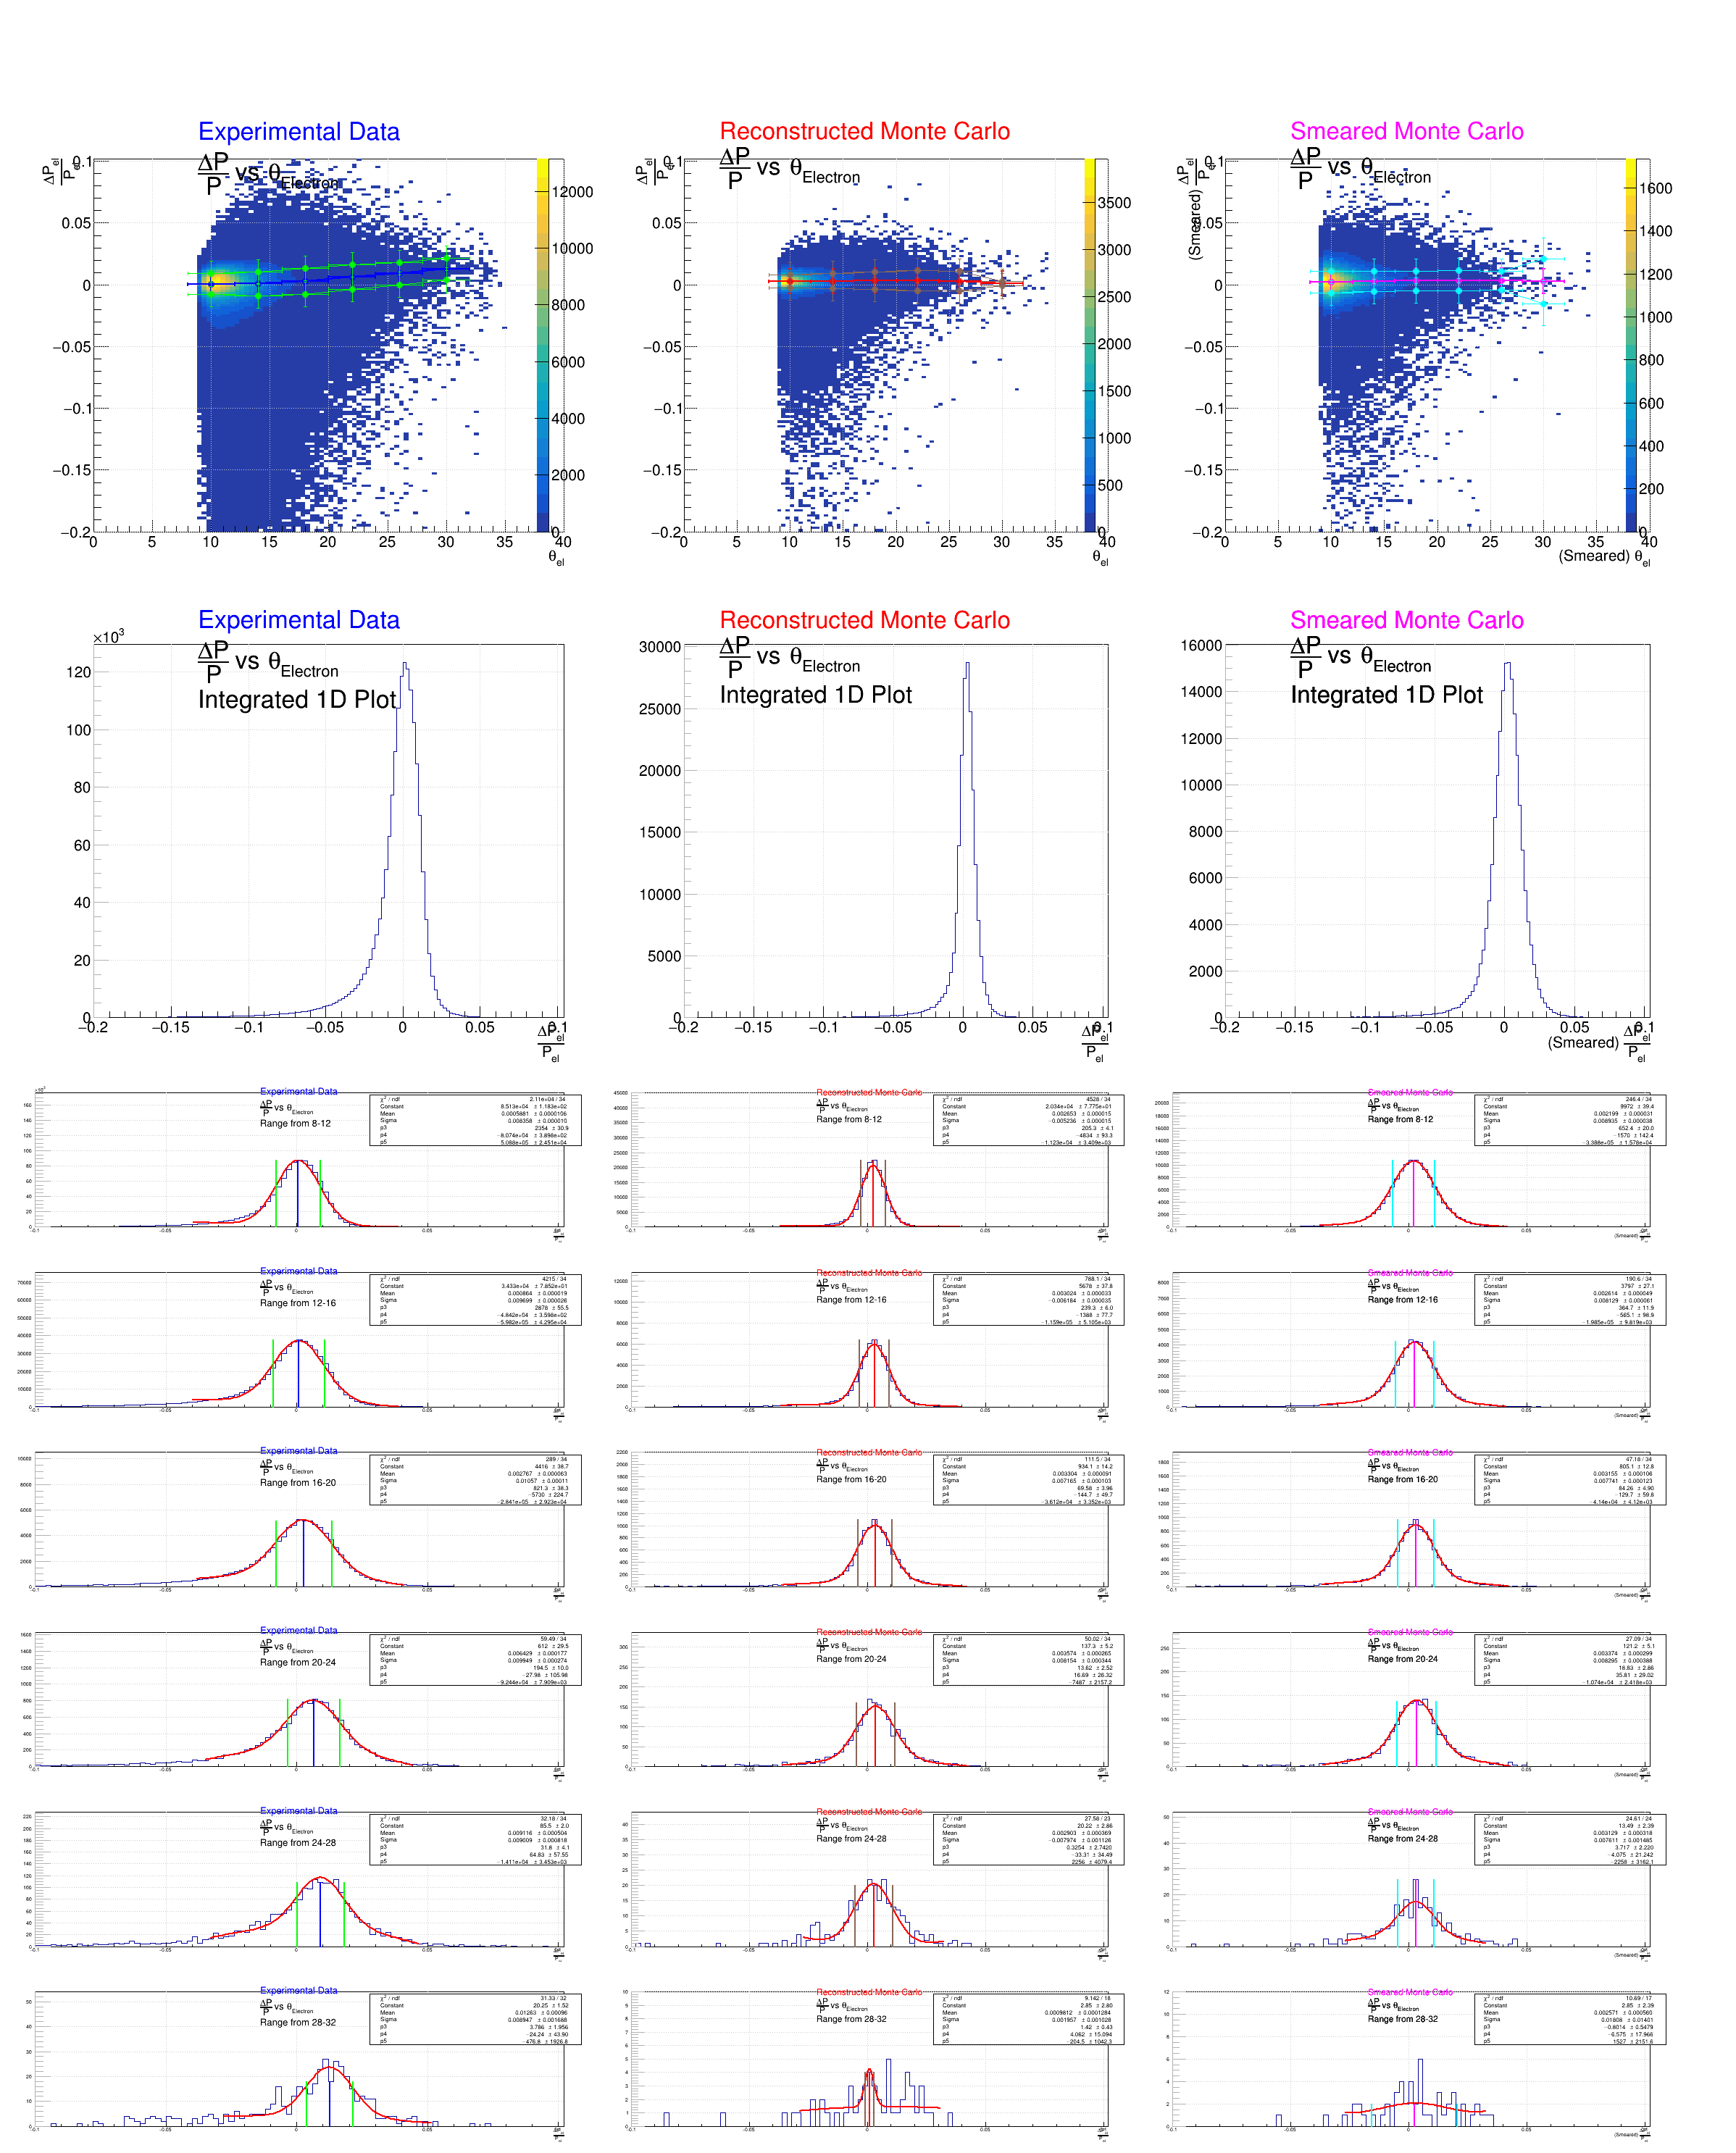

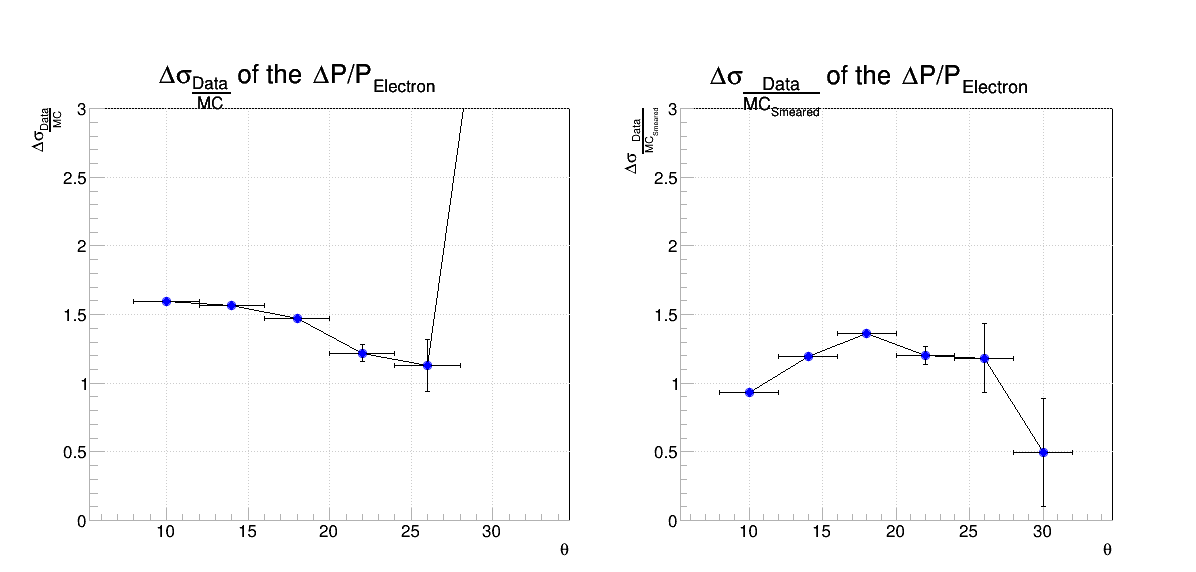

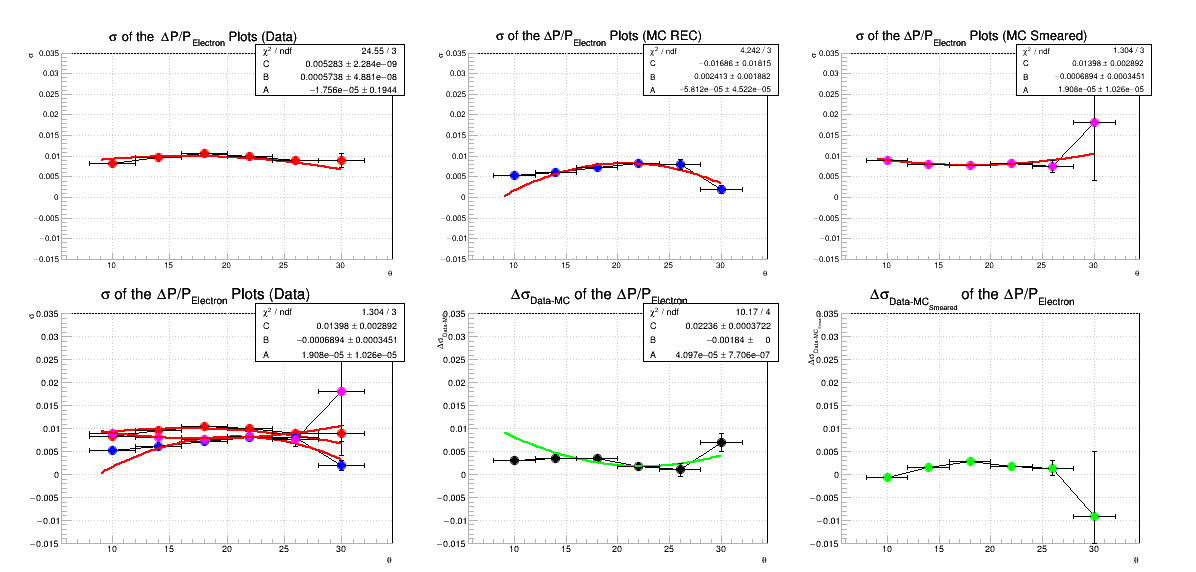

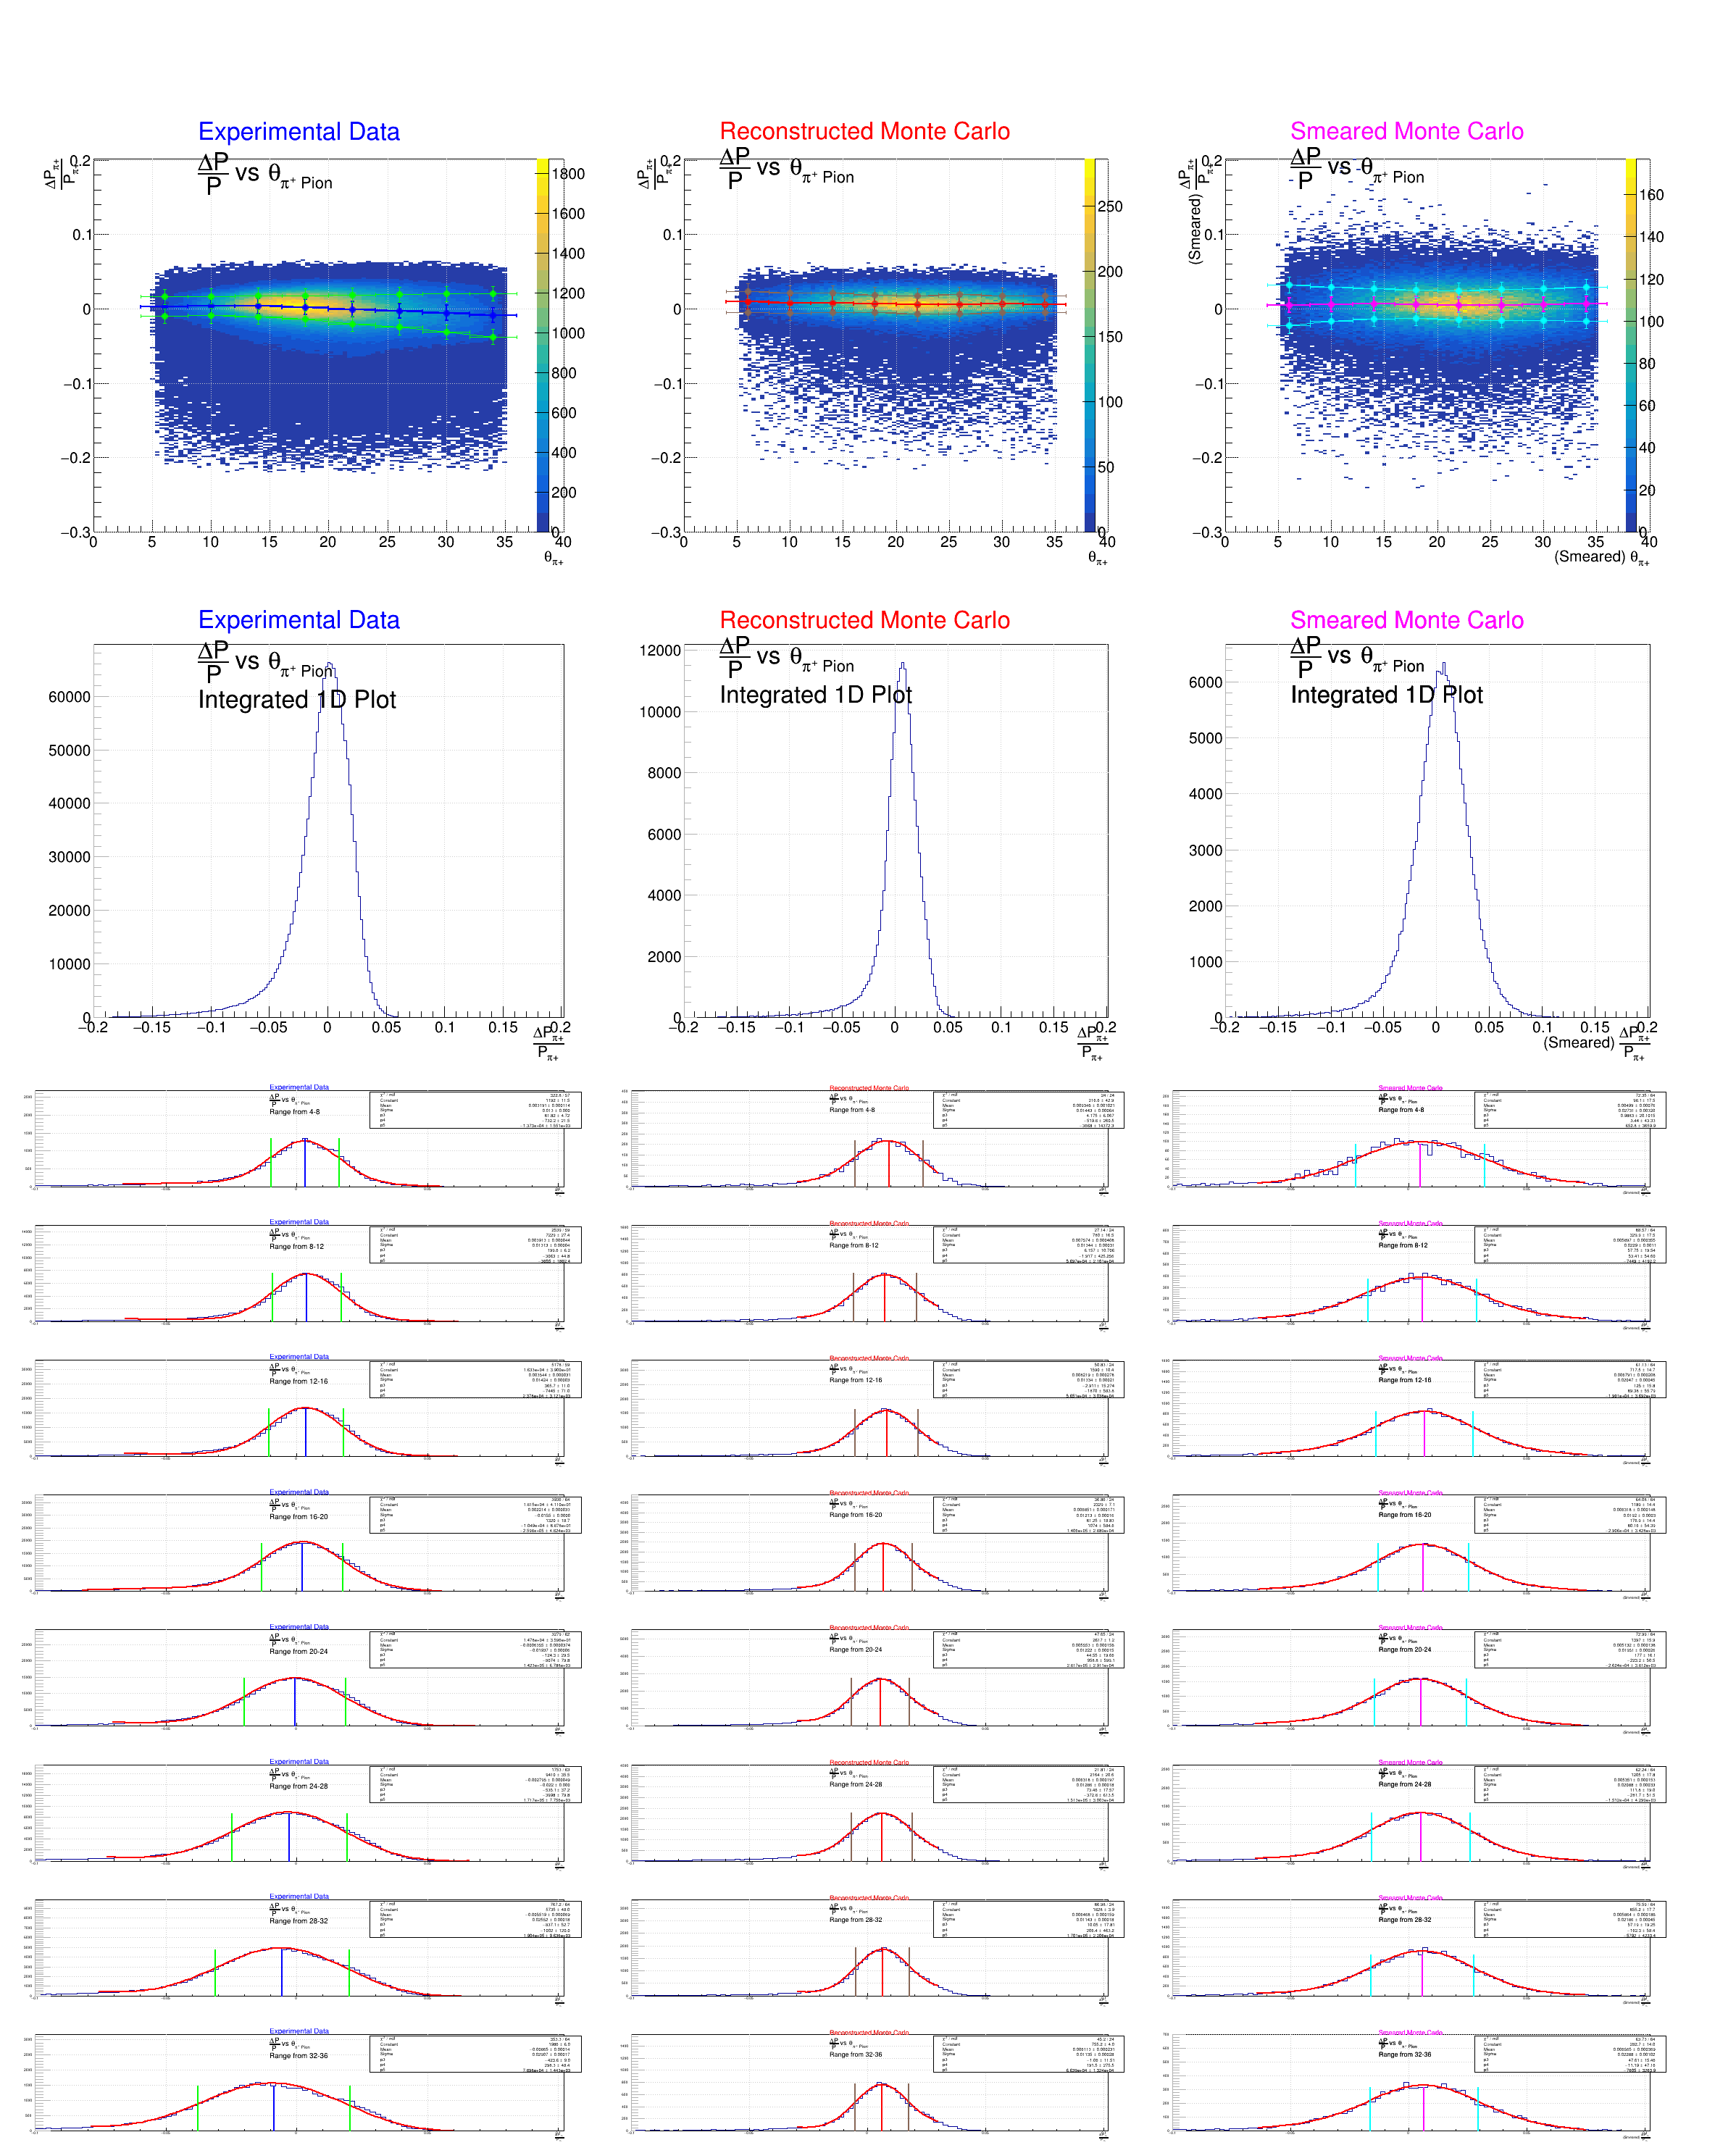

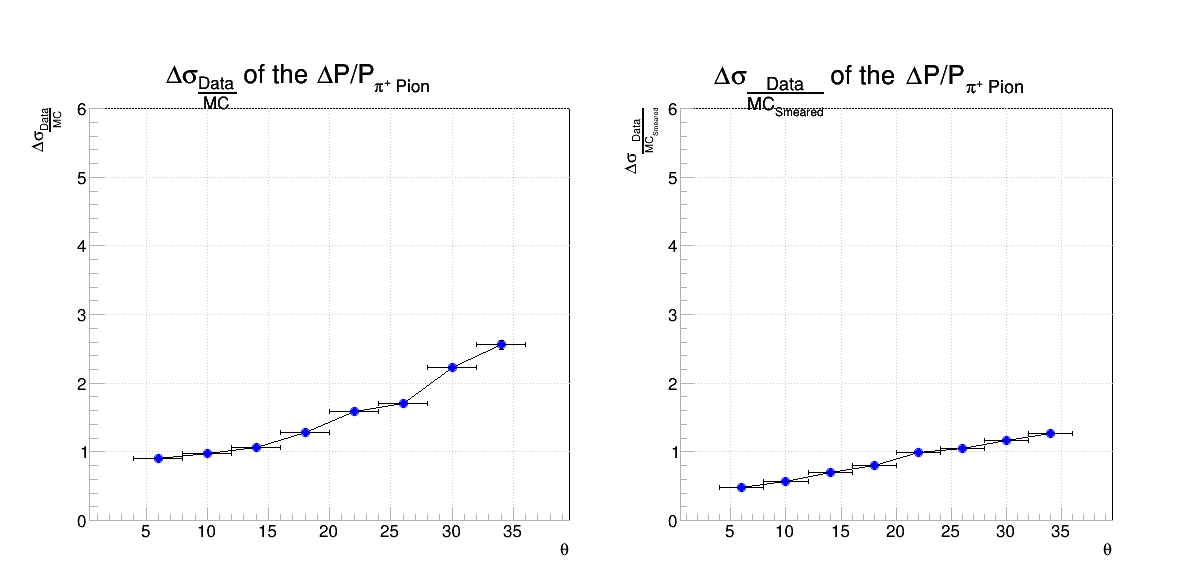

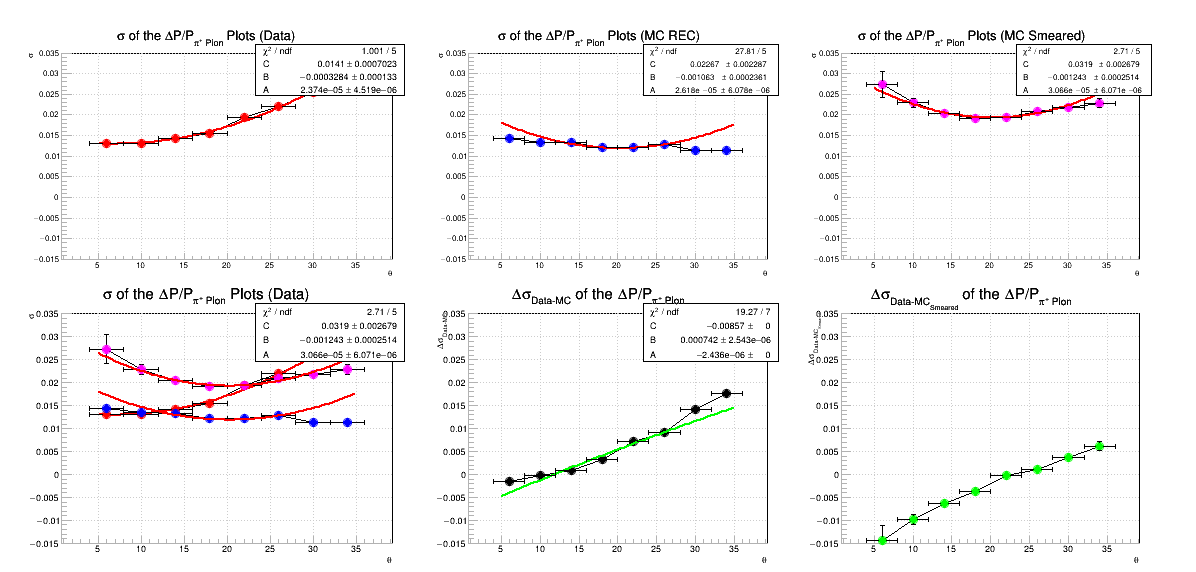

In [83]:
if("Mom_Cor_Histos" in Histo_Type or True):
    SF_Canvas, SF_Histos, Base_Line = {}, {}, {}
    for ii in rdf.GetListOfKeys():
        out_print_rdf         = str(ii.GetName())
        out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
        out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
        out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")
        if(any(conditions not in str(out_print_rdf) for conditions in ["Mom_Cor_Code", "cut_Complete_EDIS"])):
            continue
        if(not any(conditions in str(out_print_rdf) for conditions in ["DP_el_SF", "DP_pip_SF"])):
            continue
            
        # if(not any(conditions in str(out_print_rdf) for conditions in ["DP_pip_SF"])):
        #     continue
            
            
        test_canvas          = Canvas_Create(Name="test",    Num_Columns=1, Num_Rows=1, Size_X=60,   Size_Y=80,  cd_Space=0)
        
        SF_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
        SF_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
        SF_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
        
        SF_Histos[out_print_rdf]         = SF_Histos[out_print_rdf].Project3D("xz")
        SF_Histos[out_print_mdf]         = SF_Histos[out_print_mdf].Project3D("xz")
        SF_Histos[out_print_mdf_smeared] = SF_Histos[out_print_mdf_smeared].Project3D("xz")
        
        SF_Histo_Title = SF_Histos[out_print_rdf].GetTitle()
        Particle_Name  = "pip" if("#pi^{+} Pion" in str(SF_Histo_Title)) else "el"
        
        SF_Histo_Title = SF_Histo_Title.replace("xz projection",        "")
        SF_Histo_Title = SF_Histo_Title.replace(" vs P_{Electron}",     "")
        SF_Histo_Title = SF_Histo_Title.replace(" vs P_{#pi^{+} Pion}", "")
        
        SF_Histos[out_print_rdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Blue), "]{Experimental Data}",           " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        SF_Histos[out_print_mdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Red),  "]{Reconstructed Monte Carlo}",   " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        SF_Histos[out_print_mdf_smeared].SetTitle("".join([root_color.Line, "{#color[", str(root_color.Pink), "]{Smeared Monte Carlo}",         " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        
        SF_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        SF_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        SF_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.2 if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        
        Sigma_SF_Smearing_Correction(Histo2D_Data=SF_Histos[out_print_rdf], Histo2D_MC=SF_Histos[out_print_mdf], Histo2D_MC_Smear=SF_Histos[out_print_mdf_smeared], minM=4 if(Particle_Name in ["pip"]) else 8, maxM=36 if(Particle_Name in ["pip"]) else 32, dM=4, particle=Particle_Name, Title_Data=str(SF_Histos[out_print_rdf].GetTitle()), Title_MC=str(SF_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(SF_Histos[out_print_mdf_smeared].GetTitle()))
        
        SF_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=2400, Size_Y=3000, cd_Space=0)
        
        # print(f"len(SF_Histos[out_print_rdf].Histo_1D_Slices) = {len(SF_Histos[out_print_rdf].Histo_1D_Slices)}")
        SF_Canvas_out_print_cd_1 = SF_Canvas[out_print].cd(1)
        SF_Canvas_out_print_cd_2 = SF_Canvas[out_print].cd(2)
        SF_Canvas_out_print_cd_3 = SF_Canvas[out_print].cd(3)
        SF_Canvas_out_print_cd_4 = SF_Canvas[out_print].cd(4)
        SF_Canvas_out_print_cd_5 = SF_Canvas[out_print].cd(5)
        SF_Canvas_out_print_cd_6 = SF_Canvas[out_print].cd(6)
        SF_Canvas_out_print_cd_1.Divide(1, 2)
        SF_Canvas_out_print_cd_2.Divide(1, 2)
        SF_Canvas_out_print_cd_3.Divide(1, 2)
        SF_Canvas_out_print_cd_4.Divide(1, len(SF_Histos[out_print_rdf].Histo_1D_Slices))
        SF_Canvas_out_print_cd_5.Divide(1, len(SF_Histos[out_print_mdf].Histo_1D_Slices))
        SF_Canvas_out_print_cd_6.Divide(1, len(SF_Histos[out_print_mdf_smeared].Histo_1D_Slices))
        
        SF_Canvas[out_print].Draw()
        
        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_1, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_4, SF_Histo_Input=SF_Histos[out_print_rdf],         Histo_Type="rdf")

        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_2, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_5, SF_Histo_Input=SF_Histos[out_print_mdf],         Histo_Type="mdf")
        
        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_3, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_6, SF_Histo_Input=SF_Histos[out_print_mdf_smeared], Histo_Type="mdf_smeared")
        
        
        Base_Line[f"{out_print_rdf}_MC"], Base_Line[f"{out_print_rdf}_MC_Smeared"] = ROOT.TLine(0, 3, 3, 0), ROOT.TLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC"].SetLineColor(root_color.Black)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineColor(root_color.Black)
        Base_Line[f"{out_print_rdf}_MC"].SetLineWidth(2)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineWidth(2)
        # print(f"SF_Histos[out_print_rdf].gr2_Data_MC = {SF_Histos[out_print_rdf].gr2_Data_MC}")
        
        test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
        SF_Canvas[f"{out_print}_Delta_Sigma"] = Canvas_Create(Name=f"{out_print}_Delta_Sigma", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=600, cd_Space=0)
        SF_Canvas[f"{out_print}_Delta_Sigma"].Draw()
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3 if(Particle_Name in ["el"]) else 6)
        SF_Histos[out_print_rdf].gr2_Data_MC.GetXaxis().SetRangeUser(0, 40)
        # Base_Line[f"{out_print_rdf}_MC"].DrawLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC"].Draw("same")
        SF_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 3 if(Particle_Name in ["el"]) else 6)
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetXaxis().SetRangeUser(0, 40)
        # Base_Line[f"{out_print_rdf}_MC_Smeared"].DrawLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].Draw("same")
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
        
        
        test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
        SF_Canvas[f"{out_print}_Sigma"] = Canvas_Create(Name=f"{out_print}_Sigma", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=600, cd_Space=0)
        SF_Canvas[f"{out_print}_Sigma"].Draw()
        
        
        Min_Range = 9  if(Particle_Name in ["el"]) else 5
        Max_Range = 30 if(Particle_Name in ["el"]) else 35
        Fit_rdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_rdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_mdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_sdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        
        Fit_rdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(2,  0)
        # Fit_rdf_Sigma_Vs_Theta.SetParLimits(2, -0.009, 0.009)
        Fit_mdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0)
        # if(Particle_Name not in ["pip"]):
        #     # Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0.01)
        #     # # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.009,  0.009)
        #     # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.02,  0.02)
        #     Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
        # else:
        if(Particle_Name in ["pip"]):
            # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
        Fit_sdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
        # if(Particle_Name not in ["pip"]):
        #     Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.005, 0.005)
        # else:
        if(Particle_Name in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        

        Fit_rdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(1,  0)
        Fit_rdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
        Fit_mdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_mdf_Sigma_Vs_Theta.SetParameter(1,  0)
        # if(Particle_Name not in ["pip"]):
        #     Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.01,   0.1)
        # else:
        if(Particle_Name in ["pip"]):
            # Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.025)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.1, 0.1)
        Fit_sdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  -0.01)
        if(Particle_Name not in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.1, 0.1)
        else:
            Fit_sdf_Sigma_Vs_Theta.SetParameter(1, 0.01)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.5)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
        
        
        
        Fit_rdf_Sigma_Vs_Theta.SetParName(0,   "C")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(0,  0)
        Fit_rdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
        Fit_mdf_Sigma_Vs_Theta.SetParName(0,   "C")
        if(Particle_Name not in ["pip"]):
            Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.005)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.02)
#         else:
#             Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.015)
#             Fit_mdf_Sigma_Vs_Theta.SetParLimits(0,  0.01, 0.02)
        Fit_sdf_Sigma_Vs_Theta.SetParName(0,   "C")
        if(Particle_Name not in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0.001)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.001, 0.05)
        else:
            Fit_sdf_Sigma_Vs_Theta.SetParameter(0, 0.01)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, 0, 0.05)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
        
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (Data); #theta; #sigma"]))
        SF_Histos[out_print_rdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].gr2_sigma.SetMarkerColor(root_color.Red)
        SF_Histos[out_print_rdf].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_rdf].gr2_sigma.Fit(Fit_rdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(0), 5)
                
        print(f"""
Sigma in Data:
sigma = ({parA_rdf})*{Particle_Name}th*{Particle_Name}th + ({parB_rdf})*{Particle_Name}th + ({parC_rdf})""")
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_mdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC REC); #theta; #sigma"]))
        SF_Histos[out_print_mdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_mdf].gr2_sigma.SetMarkerColor(root_color.Blue)
        SF_Histos[out_print_mdf].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_mdf].gr2_sigma.Fit(Fit_mdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(0), 5)
        
        print(f"""
Sigma in MC:
sigma = ({parA_mdf})*{Particle_Name}th*{Particle_Name}th + ({parB_mdf})*{Particle_Name}th + ({parC_mdf})""")
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{", str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC Smeared); #theta; #sigma"]))
        SF_Histos[out_print_mdf_smeared].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.SetMarkerColor(root_color.Pink)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Fit(Fit_sdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(0), 5)
            
#         print(f"""
# Sigma in MC Smeared:
# sigma = ({parA_sdf})*{Particle_Name}th*{Particle_Name}th + ({parB_sdf})*{Particle_Name}th + ({parC_sdf})""")

        if(abs(float(parA_rdf) - float(parA_mdf)) < 0.01):
            parA = "{:.4e}".format(float(parA_rdf) - float(parA_mdf))
        else:
            parA = round(float(parA_rdf) - float(parA_mdf), 5)
        if(abs(float(parB_rdf) - float(parB_mdf)) < 0.01):
            parB = "{:.4e}".format(float(parB_rdf) - float(parB_mdf))
        else:
            parB = round(float(parB_rdf) - float(parB_mdf), 5)
        if(abs(float(parC_rdf) - float(parC_mdf)) < 0.01):
            parC = "{:.4e}".format(float(parC_rdf) - float(parC_mdf))
        else:
            parC = round(float(parC_rdf) - float(parC_mdf), 5)
#         print("".join([f"""{color.RED}
# """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
#     Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
#     """, "if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}\n}", color.END]))
        
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=4, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_sigma.Draw("APL same")
        SF_Histos[out_print_mdf].gr2_sigma.Draw("PL same")
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("PL same")
        
        
        
        
        Fit_mdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_mdf_Delta_Sigma_Vs_Theta.SetLineColor(root_color.Green)
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(2,  float(parA))
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(2,  0.99*float(parA), 1.01*float(parA))
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(1,  float(parB))
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(1,  0.99*float(parB), 1.01*float(parB))
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(0,  float(parC))
        Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(0,  0.99*float(parC), 1.01*float(parC))
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=5, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Draw("APL same")
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Fit(Fit_mdf_Delta_Sigma_Vs_Theta, "BRQ")
        parA = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("A")
        parB = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("B")
        parC = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("C")
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
        print("".join([f"""{color.GREEN}
""", "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
    Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
    """, "if(Smear_SF_Theta < 0){Smear_SF_Theta = 0;}\n}", color.END]))
        
    
        Fit_sdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(2,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(1,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.05)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(0,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.05)
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=6, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Draw("APL same")
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Fit(Fit_sdf_Delta_Sigma_Vs_Theta, "BRQN")
        parA = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("A")
        parB = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("B")
        parC = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("C")
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
#         print("".join([f"""{color.BOLD}
# double Extra_Smear_SF_Theta = 0;
# """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
#     Extra_Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
#     if(Extra_Smear_SF_Theta < 0)""", "{Extra_Smear_SF_Theta = 0;}", f"""
#     P_new_rec      = P_new_rec   +   (P_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
#     // Th_new_rec  = Th_new_rec  +  (Th_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
#     // Phi_new_rec = Phi_new_rec + (Phi_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));""", "\n}", color.END]))
        
        print("")
        
print("Done")

.

.

.

.

In [78]:
Stop (Old Code Ahead...)

SyntaxError: invalid syntax (529141792.py, line 1)

In [ ]:
def Find_Smear_Factor_Funtion(File_Name_SF):
    if("SF_Testing_" in str(File_Name_SF)):
        File_Name_SF = str(File_Name_SF).replace("_No_Cor", "")
    Smear_Factor_Output = "ERROR"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_All",           "Gen_Cut_V4_Mom_Cor_All",     "Gen_Cut_V5_Mom_Cor_All",            "Gen_Cuts_V6_Mom_Cor_V7_All", "SF_Testing_Mom_Cor_V7_All"]):
        Smear_Factor_Output = "0.8"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V2_All",        "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V1_All", "SF_Testing_Mom_Cor_V1_All"]):
        Smear_Factor_Output = "0.75"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V3_All",        "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V2_All", "SF_Testing_Mom_Cor_V2_All"]):
        Smear_Factor_Output = "0.5"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V4_All",        "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V3_All", "SF_Testing_Mom_Cor_V3_All"]):
        Smear_Factor_Output = "1.0"
    if(str(File_Name_SF) in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V4_All", "SF_Testing_Mom_Cor_V4_All"]):
        Smear_Factor_Output = "0.7"
    if(str(File_Name_SF) in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V5_All", "SF_Testing_Mom_Cor_V5_All"]):
        Smear_Factor_Output = "1.5"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V6_All"]):
        Smear_Factor_Output = "0.9"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V8_All"]):
        Smear_Factor_Output = "1.2"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V9_All"]):
        Smear_Factor_Output = "2.0"
        
    return Smear_Factor_Output
    
print("\nDONE with Find_Smear_Factor_Funtion()\n")

In [ ]:
# Last used on 7-5-2023
# # mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Creation_All", "mdf")), "READ")
# # mdf_FX = ROOT.TFile(str(FileLocation("Multi_Dimension_Unfold_V5_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Factor_V3_FX_Mom_Cor_All", "mdf")), "READ")


# REAL_File_Name   = "Gen_Cuts_V3_Mom_Cor_All"
# MC_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_V2_All"
# FX_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_FX_All"

# ################################################################################################################################################################
# ##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
# ################################################################################################################################################################
# try:
#     rdf    = ROOT.TFile(str(FileLocation(str(REAL_File_Name),   "rdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.BLUE,   " Real (Experimental) Data",       color.END, "\tin '", color.BOLD, REAL_File_Name,   color.END, "'\tis ", color.BOLD, str(len(rdf.GetListOfKeys())),    color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# try:
#     mdf    = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.RED,    " Reconstructed Monte Carlo Data", color.END, "\tin '", color.BOLD, MC_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf.GetListOfKeys())),    color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# try:
#     mdf_FX = ROOT.TFile(str(FileLocation(str(FX_REC_File_Name), "mdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.YELLOW, " Smeared (FX) Monte Carlo Data",  color.END, "\tin '", color.BOLD, FX_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf_FX.GetListOfKeys())), color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf_FX' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# ################################################################################################################################################################
# ##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
# ################################################################################################################################################################


# if("Mom_Cor_Histos" in Histo_Type and True):
#     MM_or_Delta_List = ["MM"]
# #     MM_or_Delta_List = ["DP"]

# # #     MM_or_Delta_List = ["DP", "DP_cor"]
# # #     MM_or_Delta_List = ["MM", "DP"]
# # #     MM_or_Delta_List = ["Phase"]
# #     MM_or_Delta_List = ["MM", "DP", "DP_cor", "Phase"]
    
# #     MM_or_Delta_List = ["MM", "DP", "Phase"]
    
# #     MM_or_Delta_List = ["MM", "Phase"]

# # #     MM_or_Delta_List = ["DP_cor"]
    
#     Delta_Mom_or_Theta_List = ["Theta"]
#     Delta_Mom_or_Theta_List = ["Mom"]
# #     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
#     Mom_or_Theta_List = ["Mom"]
# #     Mom_or_Theta_List = ["Theta"]
# #     Mom_or_Theta_List = ["Mom", "Theta"]
    
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
#     for MM_or_Delta in MM_or_Delta_List:
#         for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
#             if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
#                 if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
#                     continue
            
#             for Mom_or_Theta in Mom_or_Theta_List:
#                 try:
#                     for ii in rdf.GetListOfKeys():
#                         out_print_rdf = str(ii.GetName())

#                         out_print                = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#                         out_print_mdf            = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#                         out_print_mdf_smeared    = out_print_mdf.replace("(Smear-Type='')",   "(Smear-Type='smear')")
#                         out_print_mdf_smeared_FX = "".join([str(out_print_mdf_smeared), "_FX"])

#                         if("Mom_Cor_Code" not in str(out_print)):
#                             continue

#                         if("cut_Complete_EDIS" not in str(out_print)):
#                             continue
#                         # if("cut_Complete" not in str(out_print)):
#                         #     continue

#                         # Missing Mass Histograms
#                         if("Var-D1='MM'" not in str(out_print)):
#                             if(MM_or_Delta in ["MM"]):
#                                 continue
#                             # ∆P Histograms Histograms
#                             if(MM_or_Delta in ["DP", "DP_cor"]):
#                                 if((Delta_Mom_or_Theta == "Mom")   and ("Delta_Pel_Cors"      not in str(out_print) and "Delta_Ppip_Cors"     not in str(out_print))):
#                                     continue
#                                 # ∆Theta Histograms Histograms
#                                 if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                                     continue
#                         elif(MM_or_Delta not in ["MM"]):
#                             continue

#                         if(("Delta" in str(out_print))             and (MM_or_Delta   not in ["DP", "DP_cor"])):
#                             continue
                            
#                         if((MM_or_Delta in ["MM", "DP", "DP_cor"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print))):
#                             continue
                            
#                         # if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
#                         #     continue

#                         try:
#                             if(MM_or_Delta not in ["DP", "MM", "DP_cor"]):
#                                 Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf)
#                                 Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf)
#                                 Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared)
#                                 out_print_rdf_SIDIS                             = str(out_print_rdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_SIDIS                             = str(out_print_mdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_smeared_SIDIS                     = str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_smeared_SIDIS_FX                  = "".join([str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS"), "_FX"])
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS]             = rdf.Get(out_print_rdf_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS]             = mdf.Get(out_print_mdf_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]     = mdf.Get(out_print_mdf_smeared_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]  = mdf_FX.Get(out_print_mdf_smeared_SIDIS)
#                             else:
#                                 out_print_rdf                                   = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_rdf)])
#                                 out_print_mdf                                   = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf)])
#                                 out_print_mdf_smeared                           = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared)])
#                                 out_print_mdf_smeared_FX                        = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared_FX)])
#                                 Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                         # print(type(Mom_Cor_Histos[out_print]))
#                         # print(Mom_Cor_Histos[out_print_mdf_smeared])
                        
#                         if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                             canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
#                         else:
#                             canvas_name = out_print
#                         # print(out_print)
#                         # print(canvas_name)
#                         if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                             Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0)
#                             if(Mom_or_Theta == "Mom"):
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
#                                 if("Delta" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)
#                                 if("MM" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)

#                             if(Mom_or_Theta == "Theta"):
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
#                                 if("Delta" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))

#                                 if("MM" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        
                                        
#                         else:
#                             Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
#                             Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
#                             #################################
#                             ##=====##   Vs Angles   ##=====##
#                             #################################
#                             ##=====##   Exclusive   ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             ##=====##     SIDIS     ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             #################################
#                             ##=====##  Vs Momentum  ##=====##
#                             #################################
#                             ##=====##   Exclusive   ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                 Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                 Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().GetTitle()).replace("#", ""))
#                             ##=====##     SIDIS     ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("#", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))

#                         Mom_Cor_Canvas[canvas_name].Draw()
#                         try:
#                             Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
#                             Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
#                             Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
#                             Mom_Cor_Canvas_cd_4_Slice = Mom_Cor_Canvas[canvas_name].cd(4)
                            
                            
                            
#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
#                             else:
#                                 Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")
                                

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                                 out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)



#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
                                
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
#                                 out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)
                                
#                                 Mom_Cor_Canvas_cd_4_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_4_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                
                                

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
                                
#                                 Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")
#                                 out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max, out_print_mdf_smeared_FX_errors = Mom_Cor_Histos[out_print_mdf_smeared_FX].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].DrawLine(out_print_mdf_smeared_FX_peak, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineColor(41)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineColor(41)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
#                             else:
#                                 Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")
                                
 

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
#                                 out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, 0, out_print_mdf_peak, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(28)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, 0, out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(28)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, 0, out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)
                                
#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



#                                 Mom_Cor_Canvas_cd_5_Slice = Mom_Cor_Canvas[canvas_name].cd(5)
#                                 Mom_Cor_Canvas_cd_5_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_5_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)

#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2.Clone()
#                                 # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])] = Mom_Cor_Histos[out_print_mdf].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.GetName()), "_Overlay"]))


#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Reconstructed Overlayed}"))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerColor(root_color.Blue)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerColor(root_color.Red)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerColor(root_color.Pink)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerColor(root_color.Pink)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineColor(root_color.Blue)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineColor(root_color.Pink)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineColor(root_color.Pink)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineWidth(2)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerSize(1)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)
                                
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineWidth(3)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineWidth(3)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(28)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineWidth(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineWidth(1)
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(3)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(3)
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(7)

#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineWidth(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineWidth(1)

#                                 # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up,   "lp")


#                                 if(MM_or_Delta in ["DP", "DP_cor"]):
#                                     Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
#                                 else:
#                                     Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

#                                 Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)


#                                 Mom_Cor_Canvas_cd_5_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
#                                 Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_rdf].hy.SetLineColor(root_color.Blue)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.SetLineColor(40)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_mdf].hy.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].hy.GetName()), "_Overlay"]))

#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))

#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].Draw("same")
#                                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")


# #                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)

# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


#                             Mom_Cor_Canvas[canvas_name].Modified()
#                             Mom_Cor_Canvas[canvas_name].Update()

#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared],    x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared_FX], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    
                                    
#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetLineColor(40)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetMarkerColor(40)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#                                 Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(6)
#                                 Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


#                                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(7)
#                                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")

                                    
                                    
#                                 Mom_Cor_Canvas_cd_8 = Mom_Cor_Canvas[canvas_name].cd(8)
#                                 Mom_Cor_Canvas_cd_8.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_8, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
                                    
                                    
#                                 Mom_Cor_Canvas_cd_9 = Mom_Cor_Canvas[canvas_name].cd(9)
#                                 Mom_Cor_Canvas_cd_9.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_9, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
                                    
                                    
#                                 Mom_Cor_Canvas_cd_10 = Mom_Cor_Canvas[canvas_name].cd(10)
#                                 Mom_Cor_Canvas_cd_10.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_10, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    
                                    
#                                     if(MM_or_Delta in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                    
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
#                                     # Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
#                                     # Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetLineColor(40)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())

                                    
                                    
                                    
                                    
                                    
                                    
                                    
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                                 ##==========##    Smearing Factor Plot    ##==========##
#                                 if(str(MM_or_Delta) not in ["DP_cor"]):
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 8)

#                                     # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                                     # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
                                    
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else ((4.5 if(Mom_or_Theta == "Theta") else 9.5) if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (34.5 if("pip" in str(out_print)) else 27.5)


#                                     # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     # statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 1.8)
                                    
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 5)

#                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("Fit_Correction_FX_Smear", "BRQ")

#                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                                         p2_Smearing = "{:.4e}".format(p2_Smearing)

#                                         print("".join(["""
#                 // From (FX) """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
#                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
#                                         """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     if(MM_or_Delta == "DP"):
#                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
#                                     # if("pip" in str(out_print)):
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)

#                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)
                                    
#                                     # X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)
#                                     # Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints - 2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints - 2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")

#                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
#                                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
#                                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
#                                         p2_Smearing = "{:.4e}".format(p2_Smearing)

#                                         print("".join(["""
#                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
#                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
#                                         """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
                                    
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                                 ##==========## Momentum Corrections Plots ##==========##
#                                 if(MM_or_Delta in ["DP_cor"]):
#                                     print("\n==============================================================================================================================================================\n")
#                                     # Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Draw()
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for Experimental Data}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

# #                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (15   if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
        
#                                     print(MinR)

#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(0)

#                                     npoints  = Mom_Cor_Histos[out_print_rdf].gr2.GetN() - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(int(npoints/2))
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(int(npoints/2))

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     Mom_Cor_Histos[out_print_rdf].gr2.Fit("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")
                                    
# #                                     p0_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
# #                                     p0_Data = "{:.4e}".format(p0_Data)

# #                                     p1_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
# #                                     p1_Data = "{:.4e}".format(p1_Data)

# #                                     p2_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
# #                                     p2_Data = "{:.4e}".format(p2_Data)

# #                                     print("".join(["""
# #             // For Experimental Data ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
# #             dp = (""", str(p2_Data), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_Data), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_Data), """);
# #                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Unsmeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)

#                                     Mom_Cor_Histos[out_print_mdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(0)

#                                     npoints  = Mom_Cor_Histos[out_print_mdf].gr2.GetN() - 1
#                                     X1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                                    
#                                     Mom_Cor_Histos[out_print_mdf].gr2.Fit("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

#                                     p0_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                     p0_MC_REC = "{:.4e}".format(p0_MC_REC)

#                                     p1_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                     p1_MC_REC = "{:.4e}".format(p1_MC_REC)

#                                     p2_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                     p2_MC_REC = "{:.4e}".format(p2_MC_REC)

#                                     print("".join(["""
#             // For MC REC (Unsmeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
#             dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
#                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
                                    
                                    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)

#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(0)
                                    
# #                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 0)
# #                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 0)

#                                     npoints  = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetN() - 1
# #                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
# #                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)
                                    
#                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX((npoints - 1) if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY((npoints - 1) if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                                    
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Fit("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

#                                     p0_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                     p0_MC_REC = "{:.4e}".format(p0_MC_REC)

#                                     p1_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                     p1_MC_REC = "{:.4e}".format(p1_MC_REC)

#                                     p2_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                     p2_MC_REC = "{:.4e}".format(p2_MC_REC)

#                                     print("".join(["""
#             // For MC REC (Smeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
#             dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
#                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
                                    
                                    
                                    
                                    
                                    
                                    
                                    
                                    
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################

# #                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta == "DP") else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Blue)
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(0, 1.8)
# #                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
# #                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
# #                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
# #                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
# #                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
# #                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)
# #                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
# #                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
# #                                     Dx_point = (X2_point - X0_point)/npoints
# #                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
# #                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
# #                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
# #                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)
# #                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
# #                                     Par_C = Par_B*(-X0_point) + Y0_point
# #                                     try:
# #                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
# #                                     except Exception as e:
# #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
# #                                         Par_A = 0
# #                                     try:
# #                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
# #                                     except Exception as e:
# #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
# #                                         Par_A = 0
# #                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
# #                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
# #                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
# #                                     if(MM_or_Delta == "DP"):
# #                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")
# #                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
# #                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
# #                                         p0_Smearing = "{:.4e}".format(p0_Smearing)
# #                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
# #                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
# #                                         p1_Smearing = "{:.4e}".format(p1_Smearing)
# #                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
# #                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
# #                                         p2_Smearing = "{:.4e}".format(p2_Smearing)
# #                                         print("".join(["""
# #                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta == "DP") else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
# #                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
# #                                         """]))
# #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
# #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()
# #                                     if(MM_or_Delta == "DP"):
# #                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")

# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [ ]:
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Creation_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("Multi_Dimension_Unfold_V5_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Factor_V3_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("SF_Testing_Mom_Cor_FX_All", "mdf")), "READ")
mdf_FX = ROOT.TFile(str(FileLocation("SF_Testing_Mom_Cor_FX_No_Cor_All", "mdf")), "READ")


REAL_File_Name   = "Gen_Cuts_V3_Mom_Cor_All"
MC_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_V2_All"
FX_REC_File_Name = "Gen_Cuts_V6_Mom_Cor_FX_All"

# REAL_File_Name   = "Gen_Cuts_V5_No_Cor_Mom_Cor_All"
FX_REC_File_Name = "Gen_Cuts_V6_Mom_Cor_FX_All"

MC_REC_File_Name = "Gen_Cuts_V4_Mom_Cor_V2_All"
MC_REC_File_Name = "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"


REAL_File_Name   = "SF_Testing_Mom_Cor_All"
REAL_File_Name   = "SF_Testing_Mom_Cor_No_Cor_All"
MC_REC_File_Name = "SF_Testing_Mom_Cor_V1_All"
FX_REC_File_Name = "SF_Testing_Mom_Cor_FX_All"
FX_REC_File_Name = "SF_Testing_Mom_Cor_FX_No_Cor_All"


Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All"]) else "0.75" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]) else "0.7" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All"]) else "1.5" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All"]) else "ERROR"


MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]
MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All"]
# MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]

# MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]

MC_REC_File_Name_List = ["Gen_Cuts_V6_Mom_Cor_V1_All"]

MC_REC_File_Name_List = ["Gen_Cuts_V6_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V6_All", "Gen_Cuts_V6_Mom_Cor_V7_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_All", "SF_Testing_Mom_Cor_V2_All", "SF_Testing_Mom_Cor_V3_All", "SF_Testing_Mom_Cor_V4_All", "SF_Testing_Mom_Cor_V5_All", "SF_Testing_Mom_Cor_V6_All", "SF_Testing_Mom_Cor_V7_All", "SF_Testing_Mom_Cor_V8_All", "SF_Testing_Mom_Cor_V9_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_No_Cor_All", "SF_Testing_Mom_Cor_V2_No_Cor_All", "SF_Testing_Mom_Cor_V3_No_Cor_All", "SF_Testing_Mom_Cor_V4_No_Cor_All", "SF_Testing_Mom_Cor_V5_No_Cor_All", "SF_Testing_Mom_Cor_V6_No_Cor_All", "SF_Testing_Mom_Cor_V7_No_Cor_All", "SF_Testing_Mom_Cor_V8_No_Cor_All", "SF_Testing_Mom_Cor_V9_No_Cor_All"]

# MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_No_Cor_All", "SF_Testing_Mom_Cor_V2_No_Cor_All", "SF_Testing_Mom_Cor_V3_No_Cor_All", "SF_Testing_Mom_Cor_V4_No_Cor_All", "SF_Testing_Mom_Cor_V5_No_Cor_All"]

# print(color.BOLD, color.BLUE, "\nSmear_Factor =", str(Smear_Factor), "\n", color.END)

################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf    = ROOT.TFile(str(FileLocation(str(REAL_File_Name),   "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,   " Real (Experimental) Data",       color.END, "\tin '", color.BOLD, REAL_File_Name,   color.END, "'\tis ", color.BOLD, str(len(rdf.GetListOfKeys())),    color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf_FX = ROOT.TFile(str(FileLocation(str(FX_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.YELLOW, " Smeared (FX) Monte Carlo Data",  color.END, "\tin '", color.BOLD, FX_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf_FX.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf_FX' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


if("Mom_Cor_Histos" in Histo_Type and not True):
    MM_or_Delta_List = ["MM"]
#     MM_or_Delta_List = ["DP"]

# #     MM_or_Delta_List = ["DP", "DP_cor"]
# #     MM_or_Delta_List = ["MM", "DP"]
#     MM_or_Delta_List = ["Phase"]
#     MM_or_Delta_List = ["MM", "DP", "DP_cor", "Phase"]
    
    MM_or_Delta_List = ["MM", "DP", "Phase"]
    
#     MM_or_Delta_List = ["MM", "Phase"]

#     MM_or_Delta_List = ["DP_cor"]
    
    Delta_Mom_or_Theta_List = ["Theta"]
    Delta_Mom_or_Theta_List = ["Mom"]
#     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_or_Theta_List = ["Mom"]
    Mom_or_Theta_List = ["Theta"]
    Mom_or_Theta_List = ["Mom", "Theta", "Phi"]
#     Mom_or_Theta_List = ["Phi"]
    
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
    MC_REC_File_Name = "Gen_Cuts_V4_Mom_Cor_V3_All"
    
#     for MC_REC_File_Name in ["Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V3_All"]:
    for MC_REC_File_Name in MC_REC_File_Name_List:
    
        try:
            mdf    = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
            print("".join(["The total number of histograms available for the", color.RED,    " Reconstructed Monte Carlo Data", color.END, "\tin '", color.BOLD, MC_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf.GetListOfKeys())),    color.END]))
        except:
            print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


        # Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All"]) else "0.75" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]) else "ERROR"
        # Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All", "Gen_Cuts_V6_Mom_Cor_V7_All"]) else "0.75" if(MC_REC_File_Name in ["SF_Testing_Mom_Cor_V1_All", "Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V3_All"]) else "0.7" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V4_All"]) else "1.5" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V5_All"]) else "0.9" if(MC_REC_File_Name in ["Gen_Cuts_V6_Mom_Cor_V6_All"]) else "ERROR"
        Smear_Factor = Find_Smear_Factor_Funtion(MC_REC_File_Name)

        print(color.BOLD, color.BLUE, "\tSmear_Factor =", str(Smear_Factor), color.END)

        for MM_or_Delta in MM_or_Delta_List:
            for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
                if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
                    if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
                        continue

                for Mom_or_Theta in Mom_or_Theta_List:
                    try:
                        for ii in rdf.GetListOfKeys():
                            out_print_rdf = str(ii.GetName())

                            out_print                = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
                            out_print_mdf            = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
                            out_print_mdf_smeared    = out_print_mdf.replace("(Smear-Type='')",   "(Smear-Type='smear')")
                            out_print_mdf_smeared_FX = "".join([str(out_print_mdf_smeared), "_FX"])

                            if("Mom_Cor_Code"      not in str(out_print)):
                                continue

                            if("cut_Complete_EDIS" not in str(out_print)):
                                continue
                            # if("cut_Complete" not in str(out_print)):
                            #     continue

                            
                            # Missing Mass Histograms
                            if("Var-D1='MM'" not in str(out_print)):
                                if((MM_or_Delta in ["MM"])             and ("_Local"              not in str(out_print))):
                                    continue
                                # ∆P Histograms Histograms
                                if(MM_or_Delta in ["DP", "DP_cor"]):
                                    if((Delta_Mom_or_Theta == "Mom")   and ("Delta_Pel_Cors"      not in str(out_print) and "Delta_Ppip_Cors"      not in str(out_print))):
                                        continue
                                    # ∆Theta Histograms Histograms
                                    if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
                                        continue
                            elif(MM_or_Delta not in ["MM"]):
                                continue

                            if(("Delta" in str(out_print))             and (MM_or_Delta   not in ["DP", "DP_cor"])      and ("_Local"              not in str(out_print))):
                                continue

                            if((MM_or_Delta in ["MM", "DP", "DP_cor"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)) and (str(Mom_or_Theta) not in ["Phi"])):
                                continue
                                
                            if((str(Mom_or_Theta) in ["Phi"])          and ("_Local"      not in str(out_print))):
                                continue

                            # if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
                            #     continue

                            try:
                                if(MM_or_Delta not in ["DP", "MM", "DP_cor"]):
                                    Mom_Cor_Histos["".join([out_print_rdf, "_", str(Smear_Factor)])]                   = rdf.Get(out_print_rdf)
                                    Mom_Cor_Histos["".join([out_print_mdf, "_", str(Smear_Factor)])]                   = mdf.Get(out_print_mdf)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared,    "_", str(Smear_Factor)])]        = mdf.Get(out_print_mdf_smeared)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_FX, "_", str(Smear_Factor)])]        = mdf_FX.Get(out_print_mdf_smeared)
                                    out_print_rdf_SIDIS                                                                = str(out_print_rdf).replace("cut_Complete_EDIS",                  "cut_Complete_SIDIS")
                                    out_print_mdf_SIDIS                                                                = str(out_print_mdf).replace("cut_Complete_EDIS",                  "cut_Complete_SIDIS")
                                    out_print_mdf_smeared_SIDIS                                                        = str(out_print_mdf_smeared).replace("cut_Complete_EDIS",          "cut_Complete_SIDIS")
                                    out_print_mdf_smeared_SIDIS_FX                                                     = "".join([str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS"), "_FX"])
                                    Mom_Cor_Histos["".join([out_print_rdf_SIDIS, "_", str(Smear_Factor)])]             = rdf.Get(out_print_rdf_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_SIDIS, "_", str(Smear_Factor)])]             = mdf.Get(out_print_mdf_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_SIDIS,    "_", str(Smear_Factor)])]  = mdf.Get(out_print_mdf_smeared_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_SIDIS_FX, "_", str(Smear_Factor)])]  = mdf_FX.Get(out_print_mdf_smeared_SIDIS)
                                    out_print_rdf                  += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf                  += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared          += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_FX       += "".join(["_", str(Smear_Factor)])
                                    out_print_rdf_SIDIS            += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_SIDIS            += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_SIDIS    += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_SIDIS_FX += "".join(["_", str(Smear_Factor)])
                                else:
                                    out_print_rdf                                   = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_rdf)])
                                    out_print_mdf                                   = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf)])
                                    out_print_mdf_smeared                           = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf_smeared)])
                                    out_print_mdf_smeared_FX                        = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf_smeared_FX)])
                                    Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf.replace("".join(["Vs_",            str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf.replace("".join(["Vs_",            str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_",    str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                            except:
                                print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                            # print(type(Mom_Cor_Histos[out_print]))
                            # print(Mom_Cor_Histos[out_print_mdf_smeared])

                            if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print), "_", str(Smear_Factor)])
#                                 canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
                            else:
                                canvas_name = "".join([out_print, "_", str(Smear_Factor)])
                            # print(out_print)
                            # print(canvas_name)
                    
                            if((MM_or_Delta       in ["DP", "MM"]) and ("Phi_Local" in str(out_print_rdf))):
                                canvas_name = "".join(["Delta_P" if(str(MM_or_Delta) in ["DP"]) else "Missing_Mass", "_Vs_", str(Mom_or_Theta), "_", str(out_print), "_", str(Smear_Factor)])
                                canvas_name = str(canvas_name).replace("_((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='elPhi_Local'-[NumBins=20, MinBin=-40, MaxBin=40]), (Var-D2='MM'-[NumBins=350, MinBin=0, MaxBin=3.5]), (Var-D3='Delta_Pel_Cors'-[NumBins=125, MinBin=-0.75, MaxBin=0.75]))",   "_El")
                                canvas_name = str(canvas_name).replace("_((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='pipPhi_Local'-[NumBins=20, MinBin=-40, MaxBin=40]), (Var-D2='MM'-[NumBins=350, MinBin=0, MaxBin=3.5]), (Var-D3='Delta_Ppip_Cors'-[NumBins=125, MinBin=-0.75, MaxBin=0.75]))", "_Pip")
                                if(("MM" in MM_or_Delta_List) and ("DP" in MM_or_Delta_List)):
                                    if(str(MM_or_Delta) in ["MM"]):
                                        Mom_Cor_Canvas[canvas_name],    Mom_Cor_Canvas["".join([str(canvas_name),    "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name),    "_overlaid_phi"])] = VS_Phi_Plots(canvas_name,    Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y=MM_or_Delta, SMEAR_FACTOR=Smear_Factor)
                                        canvas_name_DP = str(canvas_name).replace("Missing_Mass", "Delta_P")
                                        Mom_Cor_Canvas[canvas_name_DP], Mom_Cor_Canvas["".join([str(canvas_name_DP), "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name_DP), "_overlaid_phi"])] = VS_Phi_Plots(canvas_name_DP, Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y="DP",        SMEAR_FACTOR=Smear_Factor)
                                    else:
                                        # Wait for the Missing Mass plots before running both of them together
                                        continue
                                else:
                                    Mom_Cor_Canvas[canvas_name], Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name), "_overlaid_phi"])] = VS_Phi_Plots(canvas_name, Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y=MM_or_Delta, SMEAR_FACTOR=Smear_Factor)
                                # print("canvas_name =", canvas_name)
                                continue
                            elif((MM_or_Delta not in ["DP", "MM"]) and ("Phi_Local" in str(out_print_rdf))):
                                continue
#                             else:
#                                 continue
#                             break
                    
                            if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0)
                                if(Mom_or_Theta == "Mom"):
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                        Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                                        Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#scale[1]{",            str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""),                                        "}}{#scale[1.35]{#color[", str(root_color.Blue), "]{Experimental Data}}}"]))
                                        Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                        Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#scale[1]{",            str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""),                                        "}}{#scale[1.35]{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}"]))
                                        Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#scale[1]{",    str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""),    "}}{#color[", str(root_color.Pink), "]{#scale[1.35]{MC Reconstructed Data} #scale[1.65]{", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#scale[1]{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}}{#scale[1.35]{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
                                    if("Delta" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5,     0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5,  0.5)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2,    8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1,    5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)
                                    if("MM" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6,              1.2)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6,              1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6,      1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6,   1.2)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2,    8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1,    5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)

                                if(Mom_or_Theta == "Theta"):
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                        Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
                                        Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection",                        ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                        Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                        Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection",                        ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}"]))
                                        Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
                                    if("Delta" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5,     0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5,  0.5)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))

                                    if("MM" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6,             1.2)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6,             1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6,     1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6,  1.2)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))


                            else:
                                Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
                                Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
                                #################################
                                ##=====##   Vs Angles   ##=====##
                                #################################
                                ##=====##   Exclusive   ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection",                   ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection",                   ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection",          "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("xy projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
                                ##=====##     SIDIS     ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",             ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS))         else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS))         else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",             ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS))         else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS))         else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",    "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
                                #################################
                                ##=====##  Vs Momentum  ##=====##
                                #################################
                                ##=====##   Exclusive   ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection",                                    ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection",                                    ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection",                   "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("xz projection",             "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().GetTitle()).replace("#", ""))
                                ##=====##     SIDIS     ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                    Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection",                        ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS))            else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS))            else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                    Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection",                        ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS))            else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS))            else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS))    else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS))    else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("#", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))

                            Mom_Cor_Canvas[canvas_name].Draw()
                            try:
                                Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
                                Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
                                Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
                                Mom_Cor_Canvas_cd_4_Slice = Mom_Cor_Canvas[canvas_name].cd(4)


                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # print("Mom_Cor_Histos[out_print_rdf].GetTitle() =", Mom_Cor_Histos[out_print_rdf].GetTitle())
                                    Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                else:
                                    Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)

                                    Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos[out_print_rdf].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title       = str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("MC Reconstructed Data (Smeared)",       "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title       = new_phase_smear_title.replace("  ", " ")
                                    new_phase_smear_title       = new_phase_smear_title.replace(") }", ")}")
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(new_phase_smear_title)
                                    Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title_SIDIS = str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace("  ", " ")
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace(") }", ")}")
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(new_phase_smear_title_SIDIS)
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
                                    # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

                                    Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
                                    # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                    out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)

                                    Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                    Mom_Cor_Histos[out_print_mdf].gr2.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
                                    out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)

                                    Mom_Cor_Canvas_cd_4_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_4_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)




                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)

                                    Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")
                                    out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max, out_print_mdf_smeared_FX_errors = Mom_Cor_Histos[out_print_mdf_smeared_FX].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].DrawLine(out_print_mdf_smeared_FX_peak, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineColor(41)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineColor(41)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
                                else:
                                    Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)

                                    Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos["".join([str(out_print_rdf),               "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),         "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title       = str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title       = new_phase_smear_title.replace("  ", " ")
                                    new_phase_smear_title       = new_phase_smear_title.replace(") }", ")}")
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].SetTitle(new_phase_smear_title)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title_SIDIS = str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace("  ", " ")
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace(") }", ")}")
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(new_phase_smear_title_SIDIS)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
                                    out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, 0, out_print_mdf_peak, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(28)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, 0, out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(28)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, 0, out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)

                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
                                    Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



                                    Mom_Cor_Canvas_cd_5_Slice = Mom_Cor_Canvas[canvas_name].cd(5)
                                    Mom_Cor_Canvas_cd_5_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_5_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)

                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2.Clone()
                                    # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])] = Mom_Cor_Histos[out_print_mdf].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].gr2.GetName()),            "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()),    "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.GetName()), "_Overlay"]))


                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Reconstructed Overlayed}"))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerColor(root_color.Blue)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerColor(root_color.Red)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerColor(root_color.Pink)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerColor(root_color.Pink)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineColor(root_color.Blue)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineColor(root_color.Red)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineColor(root_color.Pink)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineWidth(2)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerSize(1)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineWidth(3)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineWidth(3)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(28)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineWidth(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineWidth(1)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(3)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(3)

                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(7)

                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineWidth(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineWidth(1)

                                    # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                                    # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])],            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down,                          "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up,                            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])],            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_down,                          "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_up,                            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])],    "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down,                  "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up,                    "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])], "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down,               "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up,                 "lp")


                                    if(MM_or_Delta in ["DP", "DP_cor"]):
                                        Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
                                    else:
                                        Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

                                    Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
                                    Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)


                                    Mom_Cor_Canvas_cd_5_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
                                    # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_rdf].hy.SetLineColor(root_color.Blue)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.SetLineColor(40)
                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_mdf].hy.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].hy.GetName()), "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))

                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")


    #                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)

    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


                                Mom_Cor_Canvas[canvas_name].Modified()
                                Mom_Cor_Canvas[canvas_name].Update()

                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared],    x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared_FX], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(2)

                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetLineColor(40)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetMarkerColor(40)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



                                    Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(6)
                                    Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(7)
                                    Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        # Mom_Cor_Canvas_cd_6.cd(ii + 1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")



                                    Mom_Cor_Canvas_cd_8 = Mom_Cor_Canvas[canvas_name].cd(8)
                                    Mom_Cor_Canvas_cd_8.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_8, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_9 = Mom_Cor_Canvas[canvas_name].cd(9)
                                    Mom_Cor_Canvas_cd_9.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_9, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_10 = Mom_Cor_Canvas[canvas_name].cd(10)
                                    Mom_Cor_Canvas_cd_10.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_10, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)


                                        if(MM_or_Delta in ["MM"]):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))

                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
                                        # Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
                                        # Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetLineColor(40)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())








                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                                    ##==========##    Smearing Factor Plot    ##==========##
                                    if(str(MM_or_Delta) not in ["DP_cor"]):
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
    #                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                         gr2_Data_MC_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        gr2_Data_MC_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC}{Data}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle(gr2_Data_MC_Title)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)

#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 1.8)
                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 8)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 2.5)

                                        # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
                                        # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)

                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else ((4.5 if(Mom_or_Theta == "Theta") else 9.5) if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (34.5 if("pip" in str(out_print)) else 27.5)


                                        # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D = ROOT.TLine()
                                        Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        # statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                         gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared - FX)}{Data}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle(gr2_Data_MC_Smear_FX_Title)
    #                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 1.8)

                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 5)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 2.5)

                                        # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("Fit_Correction_FX_Smear", "BRQ")

                                            # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                            p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
                                            p0_Smearing = "{:.4e}".format(p0_Smearing)

                                            # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                            p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
                                            p1_Smearing = "{:.4e}".format(p1_Smearing)

                                            # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                            p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
                                            p2_Smearing = "{:.4e}".format(p2_Smearing)

                                            print("".join(["""
            // From (FX) """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
            """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                            """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        if(MM_or_Delta == "DP"):
                                            statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        gr2_Data_MC_Smear_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared)}{Data}}  } #scale[1.55]{(Smear Factor: ", str(Smear_Factor), ")}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
#                                         gr2_Data_MC_Smear_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}}  } #scale[1.55]{(Smear Factor: ", str(Smear_Factor), ")}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle(gr2_Data_MC_Smear_Title)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
                                        # if("pip" in str(out_print)):
                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 2.5)

                                        # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)

                                        # X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)
                                        # Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints - 2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints - 2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")

                                            # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                            p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
                                            p0_Smearing = "{:.4e}".format(p0_Smearing)

                                            # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                            p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
                                            p1_Smearing = "{:.4e}".format(p1_Smearing)

                                            # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                            p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
                                            p2_Smearing = "{:.4e}".format(p2_Smearing)

                                            print("".join(["""
            // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
            """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                            """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                                    ##==========## Momentum Corrections Plots ##==========##
                                    if(MM_or_Delta in ["DP_cor"]):
                                        print("\n==============================================================================================================================================================\n")
                                        # Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Draw()
                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_rdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for Experimental Data}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_rdf].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

    #                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (15   if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)

#                                         print(MinR)

                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(0)

                                        npoints  = Mom_Cor_Histos[out_print_rdf].gr2.GetN() - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(int(npoints/2))
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(int(npoints/2))

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D = ROOT.TLine()
                                        Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_rdf].gr2.Fit("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

    #                                     p0_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
    #                                     p0_Data = "{:.4e}".format(p0_Data)

    #                                     p1_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
    #                                     p1_Data = "{:.4e}".format(p1_Data)

    #                                     p2_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
    #                                     p2_Data = "{:.4e}".format(p2_Data)

    #                                     print("".join(["""
    #             // For Experimental Data ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
    #             dp = (""", str(p2_Data), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_Data), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_Data), """);
    #                                     """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Unsmeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_mdf].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)

                                        Mom_Cor_Histos[out_print_mdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(0)

                                        npoints  = Mom_Cor_Histos[out_print_mdf].gr2.GetN() - 1
                                        X1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_mdf].gr2.Fit("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

                                        p0_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                        p0_MC_REC = "{:.4e}".format(p0_MC_REC)

                                        p1_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                        p1_MC_REC = "{:.4e}".format(p1_MC_REC)

                                        p2_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                        p2_MC_REC = "{:.4e}".format(p2_MC_REC)

                                        print("".join(["""
            // For MC REC (Unsmeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
            dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
                                    """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################


                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)

                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(0)

    #                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 0)
    #                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 0)

                                        npoints  = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetN() - 1
    #                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
    #                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX((npoints - 1) if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY((npoints - 1) if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Fit("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

                                        p0_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                        p0_MC_REC = "{:.4e}".format(p0_MC_REC)

                                        p1_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                        p1_MC_REC = "{:.4e}".format(p1_MC_REC)

                                        p2_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                        p2_MC_REC = "{:.4e}".format(p2_MC_REC)

                                        print("".join(["""
                // For MC REC (Smeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
                dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
                                        """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")









    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################

    #                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta == "DP") else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Blue)
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(0, 1.8)
    #                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
    #                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
    #                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
    #                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
    #                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
    #                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)
    #                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
    #                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
    #                                     Dx_point = (X2_point - X0_point)/npoints
    #                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    #                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    #                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    #                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)
    #                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
    #                                     Par_C = Par_B*(-X0_point) + Y0_point
    #                                     try:
    #                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
    #                                     except Exception as e:
    #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
    #                                         Par_A = 0
    #                                     try:
    #                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
    #                                     except Exception as e:
    #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
    #                                         Par_A = 0
    #                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
    #                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
    #                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
    #                                     if(MM_or_Delta == "DP"):
    #                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")
    #                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
    #                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
    #                                         p0_Smearing = "{:.4e}".format(p0_Smearing)
    #                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
    #                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
    #                                         p1_Smearing = "{:.4e}".format(p1_Smearing)
    #                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
    #                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
    #                                         p2_Smearing = "{:.4e}".format(p2_Smearing)
    #                                         print("".join(["""
    #                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta == "DP") else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
    #                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
    #                                         """]))
    #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
    #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()
    #                                     if(MM_or_Delta == "DP"):
    #                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                            except:
                                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        print("\n")
        alert()
        print("")
    except:
        print("\nAlerts have not been set...")

else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [ ]:
# fail

.

.

.

## Saving Smearing Histos

In [ ]:
if(SaveChoice == 'yes' or True):
    count_Mom_saved = 0
    for Canvas_name in Mom_Cor_Canvas:
        Save_Name = str(str((Canvas_name).replace("NumBins=100", "NumBins=200")).replace("[NumBins=125, MinBin=-0.75, MaxBin=0.75]", "[NumBins=500, MinBin=-3, MaxBin=3]")).replace("[NumBins=350, MinBin=0, MaxBin=3.5]", "[NumBins=500, MinBin=0, MaxBin=3.5]")
#         Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
#         Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])

        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
#         Save_Name = "".join([str(str(Canvas_name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])
                                                                                                                                                                  
        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='MM'-[NumBins=500, MinBin=0, MaxBin=3.5]), ", "Missing_Mass")
        
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_P_El")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_Theta_El")
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_P_Pip")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_Theta_Pip")
        
#         Save_Name = str(Save_Name).replace("Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "_Vs_P_El" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_El")
#         Save_Name = str(Save_Name).replace("Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "_Vs_P_Pip" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_Pip")

        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), ", "")
        
        Save_Name = "".join(["Modified_", str(Save_Name)])
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_El_Theta_V_Phi")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_Pip_Theta_V_Phi")
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Phase_Space_El_SIDIS_Exclusive_Compare")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Phase_Space_Pip_SIDIS_Exclusive_Compare")
        
        Save_Name = str(Save_Name).replace("Modified_Vs_Theta", "Vs_Theta_Modified")
        Save_Name = str(Save_Name).replace("Modified_Vs_Mom", "Vs_Mom_Modified")
        Save_Name = Save_Name.replace(".png.png", ".png")
        
#         Save_Name = Save_Name.replace(".png", "".join(["_SF_", str(Smear_Factor), ".png"]))
        
        if(MC_REC_File_Name == "New_Smearing_Creation_All"):
            Save_Name = Save_Name.replace("Modified", "FX")
            
        
        # New Smear Factor Naming:
        Save_Name = Save_Name.replace("Modified_", "")
        Save_Name = Save_Name.replace("Vs_Mom_Delta_P", "Delta_P_Vs_Mom")
        Save_Name = Save_Name.replace("Vs_Theta_Delta_P", "Delta_P_Vs_Theta")
        Save_Name = Save_Name.replace("Vs_Mom_", "Vs_P_")
        Save_Name = Save_Name.replace("Electron", "El")
        Save_Name = Save_Name.replace("Histograms_", "")
        Save_Name = Save_Name.replace("SIDIS_Exclusive_Compare_", "")
        
        if("_No_Cor_"       in REAL_File_Name):
            Save_Name = "".join(["Uncorrected_", Save_Name])
        elif("_No_Cor_" not in MC_REC_File_Name):
            Save_Name = "".join(["Corrected_", Save_Name])
        
        count_Mom_saved += 1
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        # Mom_Cor_Canvas[Canvas_name].Draw()
        if(SaveChoice == 'yes' or False):
            Mom_Cor_Canvas[Canvas_name].SaveAs(Save_Name)
            # break
#         elif(("_Smear_Compare" not in Save_Name) or ("El" not in Save_Name)):
#         elif(("_Smear_Compare" not in Save_Name)):
#             print("".join([color.RED, color.BOLD, "Not printing/saving...", color.END]))
        else:
#             Mom_Cor_Canvas[Canvas_name].Draw()
            print("".join([color.RED, "Not actually saving...", color.END]))

    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
    print(color.BOLD, "\nCount of Images:", count_Mom_saved, color.END)
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

In [ ]:
# fail

.

.

.

# Plot Creation (Each Dataframe at the same time)

In [ ]:
Q2_xB_Bin = 6
Cell_On_Q = True
Cell_On_Q = False
if("rdf" in Data_Choice and "mdf" in Data_Choice and "gdf" in Data_Choice and Cell_On_Q):
    Unfolded_Canvas, Legends, Bin_Unfolded, Bin_Acceptance, Unfolding_Histogram_1_Norm_Clone, Save_Response_Matrix, Parameter_List_Unfold, Parameter_List_Bin = {}, {}, {}, {}, {}, {}, [], []
    try:
        del already_notified
    except:
        # print("First run of this cell...")
        print("")
    
    count, count_unfolded = 0, 0
    for ii in mdf.GetListOfKeys():
        out_print_main = str(ii.GetName()).replace("mdf", "DataFrame_Type")
        if("DataFrame_Type" not in out_print_main):
            # print("".join(["Skipping: ", str(out_print_main)]))
            continue
        
        count += 1
        out_print_main_rdf = out_print_main.replace("DataFrame_Type", "rdf")
        out_print_main_mdf = out_print_main.replace("DataFrame_Type", "mdf")
        out_print_main_gdf = out_print_main.replace("DataFrame_Type", "gdf")
        
        ################################################################################
        ##=============##    Removing Cuts from the Generated files    ##=============##
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_EDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_SIDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete", "no_cut")
        ##=============##    Removing Cuts from the Generated files    ##=============##
        ################################################################################
        
        
        #############################################################################
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        out_print_main_rdf = out_print_main_rdf.replace("_smeared", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear_", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear", "")
        out_print_main_gdf = out_print_main_gdf.replace("_smeared", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear_", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear", "")
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        #############################################################################
        
        
        #############################################################################
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        #############################################################################

        if(out_print_main_mdf not in mdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, str(out_print_main_mdf), color.END, "\n"]))
            continue
        
        if(out_print_main_rdf not in rdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN RDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.BLUE, str(out_print_main_rdf), color.END, "\n"]))
            continue
            
        if(out_print_main_gdf not in gdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.GREEN, str(out_print_main_gdf), color.END, "\n"]))
            continue
    
    
    #############################################################################
    ##===============##     Unfolding Histogram Procedure     ##===============##
        Conditions_For_Unfolding = ["Unfold" in Histo_Type]
        Conditions_For_Unfolding = [True]

        ## Correct Histogram Type:
#         Conditions_For_Unfolding.append("'Response_Matrix_Normal'" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Response" in str(out_print_main))
        Conditions_For_Unfolding.append("'Response_Matrix_Normal_1D'" not in str(out_print_main))

        ## Correct Cuts:
        Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
        Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))

        ## Correct Variable(s):
        Conditions_For_Unfolding.append("phi_t" in str(out_print_main))
        # Conditions_For_Unfolding.append("'phi_t" not in str(out_print_main))
        # Conditions_For_Unfolding.append("'xB" in str(out_print_main))
        # Conditions_For_Unfolding.append("'Combined_Q2_xB_Bin_2_" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Combined_" in str(out_print_main))

        ## Correct Binning:
        # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
        Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))

        # Smearing Options:
        # Conditions_For_Unfolding.append("(Smear-Type='')" not in str(out_print_main))
        # Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal" in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal_1D" not in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("'phi_t'" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("'xB'" in str(out_print_main))
        
#         # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
  

#         # Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))
    
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)))
        
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)) or ("Q2-xB-Bin=7" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=8" in str(out_print_main)))
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)) or ("".join(["Q2-xB-Bin=1"]) in str(out_print_main)))
        
#         # if(Common_Name == "Unfolding_Tests_V3_All"):
#         #     Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Q2-xB-Bin=All" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Var-D1='phi_t'" in str(out_print_main))
#         # else:
#         #     # For Default (Variable) Selections:
        
# #         Conditions_For_Unfolding.append(Histo_Search_Function(Histo_Name=out_print_main, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])

        if(False not in Conditions_For_Unfolding):
            print(out_print_main)
            
            if("'Response_Matrix_Normal_1D'" in str(out_print_main)):
                print("".join([color.RED, color.BOLD, "ERROR: ", str(out_print_main), color.END]))
                continue
            
            ExREAL_1D_initial   = rdf.Get(out_print_main_rdf)
            MC_REC_1D_initial   = mdf.Get(out_print_main_mdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'"))
            MC_GEN_1D_initial   = gdf.Get(out_print_main_gdf)
            Response_2D_initial = mdf.Get(out_print_main_mdf)
#         elif("Response_Matrix_Normal" in str(out_print_main)):
#             print("".join([color.BOLD, "Not Running: ", str(out_print_main), color.END]))
#         if(False not in Conditions_For_Unfolding):
            
            
            
            
            
            
            
            
            
    ###############################################################################################
    ###############################################################################################
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
            
            Q2_xB_Bin_Unfold = 0 if("Q2-xB-Bin=All" in str(out_print_main)) else 1 if("Q2-xB-Bin=1" in str(out_print_main)) else 2 if("Q2-xB-Bin=2" in str(out_print_main)) else 3 if("Q2-xB-Bin=3" in str(out_print_main)) else 4 if("Q2-xB-Bin=4" in str(out_print_main)) else 5 if("Q2-xB-Bin=5" in str(out_print_main)) else 6 if("Q2-xB-Bin=6" in str(out_print_main)) else 7 if("Q2-xB-Bin=7" in str(out_print_main)) else 8 if("Q2-xB-Bin=8" in str(out_print_main)) else 9 if("Q2-xB-Bin=9" in str(out_print_main)) else 10 if("Q2-xB-Bin=10" in str(out_print_main)) else "Undefined..."
            if(type(Q2_xB_Bin_Unfold) is str):
                print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin_Unfold = ", str(Q2_xB_Bin_Unfold), color.END]))
            
            test = Canvas_Create(Name="".join([str(out_print_main), str(Q2_xB_Bin_Unfold)]), Num_Columns=1, Num_Rows=1, Size_X=60, Size_Y=80, cd_Space=0)
            test.Draw()
            
            z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print_main)) else 49 if(Q2_xB_Bin_Unfold in [1, 2, 3]) else 42 if(Q2_xB_Bin_Unfold in [4]) else 36 if(Q2_xB_Bin_Unfold in [5]) else 25 if(Q2_xB_Bin_Unfold in [6, 7]) else 20 if(Q2_xB_Bin_Unfold in [8]) else 1
            z_pT_Bin_Range = 1
            
            for z_pT_Bin_Unfold in range(0, z_pT_Bin_Range + 1, 1):
                # Bin_Title = "" if(z_pT_Bin_Unfold == 0) else "".join(["z-P_{T} Bin: ", str(z_pT_Bin_Unfold)])
                
                if(((Q2_xB_Bin_Unfold in [1, 2]) and (z_pT_Bin_Unfold in [49])) or (Q2_xB_Bin_Unfold == 3 and z_pT_Bin_Unfold in [49, 48, 42]) or (Q2_xB_Bin_Unfold == 4 and z_pT_Bin_Unfold in [42]) or (Q2_xB_Bin_Unfold == 5 and z_pT_Bin_Unfold in [36])):
#                 if(z_pT_Bin_Unfold != 0):
                    # print("Testing z_pT_Bin_Unfold...")
                    continue
                    # break
            
                if(Q2_xB_Bin_Unfold != 1 and z_pT_Bin_Unfold != 1):
                    continue
                    
        #########################################################
        ##===============##     3D Slices     ##===============##

                if("3D" in str(type(Response_2D_initial))):
                    try:
                        bin_Response_2D_0, bin_Response_2D_1 = Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else Response_2D_initial.GetNbinsZ())
                        if(z_pT_Bin_Unfold != 0):
                            Response_2D_initial.GetZaxis().SetRange(bin_Response_2D_0, bin_Response_2D_1)
                        Response_2D = Response_2D_initial.Project3D('yx')
                        Response_2D.SetName(str(Response_2D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])))
                        Response_2D_Title_New = (str(Response_2D.GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        Response_2D.SetTitle(Response_2D_Title_New)
                        # print(str(Response_2D.GetTitle()))
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (Response_2D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    Response_2D = Response_2D_initial

        ##===============##     3D Slices     ##===============##
        #########################################################
                    

        #########################################################
        ##===============##     2D Slices     ##===============##
                if("2D" in str(type(ExREAL_1D_initial))):
                    try:
                        bin_ExREAL_1D_0, bin_ExREAL_1D_1 = ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else ExREAL_1D_initial.GetNbinsY())
                        ExREAL_1D = ExREAL_1D_initial.ProjectionX(str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_ExREAL_1D_0, bin_ExREAL_1D_1)
                        ExREAL_1D_Title_New = str(ExREAL_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        ExREAL_1D.SetTitle(ExREAL_1D_Title_New)
                        # print("\n" + color.BOLD + str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (ExREAL_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nExREAL_1D already is a 1D Histogram...")
                    ExREAL_1D = ExREAL_1D_initial

                if("2D" in str(type(MC_REC_1D_initial))):
                    try:
                        bin_MC_REC_1D_0, bin_MC_REC_1D_1 = MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_REC_1D_initial.GetNbinsY())
                        MC_REC_1D = MC_REC_1D_initial.ProjectionX(str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_REC_1D_0, bin_MC_REC_1D_1)
                        MC_REC_1D_Title_New = str(MC_REC_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_REC_1D.SetTitle(MC_REC_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_REC_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_REC_1D already is a 1D Histogram...")
                    MC_REC_1D = MC_REC_1D_initial

                if("2D" in str(type(MC_GEN_1D_initial))):
                    try:
                        bin_MC_GEN_1D_0, bin_MC_GEN_1D_1 = MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_GEN_1D_initial.GetNbinsY())
                        MC_GEN_1D = MC_GEN_1D_initial.ProjectionX(str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_GEN_1D_0, bin_MC_GEN_1D_1)
                        MC_GEN_1D_Title_New = str(MC_GEN_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_GEN_1D.SetTitle(MC_GEN_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_GEN_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_GEN_1D already is a 1D Histogram...")
                    MC_GEN_1D = MC_GEN_1D_initial

        ##===============##     2D Slices     ##===============##
        #########################################################


                # print("".join(["\n'ExREAL_1D' = ", str(type(ExREAL_1D))]))
                # print("".join(["\n'MC_REC_1D' = ", str(type(MC_REC_1D))]))
                # print("".join(["\n'MC_GEN_1D' = ", str(type(MC_GEN_1D))]))
                # print("".join(["\n'Response_2D' = ", str(type(Response_2D))]))


    
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
    ###############################################################################################
    ###############################################################################################
            
            
            
            
            
            
            
            


                if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                    if((Q2_xB_Bin_Unfold != 0) or (z_pT_Bin_Unfold != 0)):
                        # Do not plot other variables that are not phi_t
                        continue
                        
                    # Extra Y-Bins in 2D Histogram:
                    for ybin in range(0, Response_2D.GetYaxis().GetNbins() + 2, 1):
                        Response_2D.SetBinContent(0, ybin, 0)
                        if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                            Response_2D.SetBinContent(1, ybin, 0)

                    # Extra Bins in 1D Histogram:
                    ExREAL_1D.SetBinContent(0, 0)
                    MC_REC_1D.SetBinContent(0, 0)
                    MC_GEN_1D.SetBinContent(0, 0)
                    ExREAL_1D.SetBinContent(ExREAL_1D.GetNbinsX() + 1, 0)
                    MC_REC_1D.SetBinContent(MC_REC_1D.GetNbinsX() + 1, 0)
                    MC_GEN_1D.SetBinContent(MC_GEN_1D.GetNbinsX() + 1, 0)
                    if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                        ExREAL_1D.SetBinContent(1, 0)
                        MC_REC_1D.SetBinContent(1, 0)
                        MC_GEN_1D.SetBinContent(1, 0)



                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Cut: No Cuts", "")).replace("Cut:  No Cuts", ""))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))


                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))


                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("_{t}", "_{h}")))
                ExREAL_1D.GetXaxis().SetTitle((str(ExREAL_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.GetXaxis().SetTitle((str(MC_REC_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.GetXaxis().SetTitle((str(MC_GEN_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetXaxis().SetTitle((str(Response_2D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetYaxis().SetTitle((str(Response_2D.GetYaxis().GetTitle()).replace("_{t}", "_{h}")))

                # minBin, maxBin, numBin = [-1.5, 9.5, 13] if("Q2_xB_Bin_2" in out_print_main) else [1.8, 12, 20] if("Q2" in out_print_main) else [0.09, 0.83, 20] if("xB" in out_print_main) else [0.12, 0.75, 20] if("z" in out_print_main) else [0, 360, 36] if("phi_t" in out_print_main) else [0, 1.05, 20] if("pT" in out_print_main) else [0, 360, 36]
                # nBins_CVM = numBin
                # MinBinCVM = ExREAL_1D.FindBin(minBin)
                # MaxBinCVM = ExREAL_1D.FindBin(maxBin)
                # if(Common_Name != "Unfolding_Tests_V3_All"):
                #     ExREAL_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # Experimental/real data (rdf)
                #     MC_REC_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Reconstructed data (mdf)
                #     MC_GEN_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Generated data (gdf)
                #     Response_2D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (X axis --> GEN)
                #     Response_2D.GetYaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (Y axis --> REC)

                count_unfolded += 1
                try:
                    
                    out_print_main_binned = out_print_main.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)]))
                    
                    try:
                        Unfolding_Histograms  = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default")
                        Unfolding_Histogram_1 = Unfolding_Histograms[0]
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN SVD UNFOLDING ('Unfolding_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Method_Histograms = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Bin")
                        Bin_Unfolded[out_print_main_binned], Bin_Acceptance[out_print_main_binned] = Bin_Method_Histograms
                        
                        
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Method_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                    Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=900, cd_Space=0)
                    # Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=900, Size_Y=900, cd_Space=0)
                    (Unfolded_Canvas[out_print_main_binned].cd(1)).Divide(2, 1, 0, 0)
                    (Unfolded_Canvas[out_print_main_binned].cd(2)).Divide(2, 1, 0, 0)
                    Unfolded_Canvas[out_print_main_binned].Draw()
                
                
##########################################################################################################################################################
        #################################################
        ##=====##=====##   Axis Ranges   ##=====##=====##
                    try:
                        Unfolded_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[Unfolding_Histogram_1, Bin_Unfolded[out_print_main_binned], MC_GEN_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Unfolded)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Data_REC_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[ExREAL_1D, MC_REC_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Reconstructed)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Response_2D.GetXaxis().SetRange(1, Response_2D.GetXaxis().GetNbins() + 2)
                        Response_2D.GetYaxis().SetRange(1, Response_2D.GetYaxis().GetNbins() + 2)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 2D Matrix Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Bin_Unfolded[out_print_main_binned].GetXaxis().SetRange(1, Bin_Unfolded[out_print_main_binned].GetXaxis().GetNbins() + 1)
                        Unfolding_Histogram_1.GetXaxis().SetRange(1, Unfolding_Histogram_1.GetXaxis().GetNbins() + 1)
                        MC_GEN_1D.GetXaxis().SetRange(1, MC_GEN_1D.GetXaxis().GetNbins() + 1)
                        ExREAL_1D.GetXaxis().SetRange(1, ExREAL_1D.GetXaxis().GetNbins() + 1)
                        MC_REC_1D.GetXaxis().SetRange(1, MC_REC_1D.GetXaxis().GetNbins() + 1)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 1D X-Axis Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##=====##=====##   Axis Ranges   ##=====##=====##
        #################################################
        ##=====##=====##  Legends Setup  ##=====##=====##
                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "Unfolded")].SetNColumns(1)
                    Legends[(out_print_main_binned, "Unfolded")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillColor(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillStyle(0)

                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "REC")].SetNColumns(1)
                    Legends[(out_print_main_binned, "REC")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "REC")].SetFillColor(0)
                    Legends[(out_print_main_binned, "REC")].SetFillStyle(0)
        ##=====##=====##  Legends Setup  ##=====##=====##
        #################################################
    

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Unfolded Histogram   ##=====##=====##
                    try:
                        Unfolding_Histogram_1.GetYaxis().SetTitle("Normalized")
                        Unfolding_Histogram_1.SetTitle(str(Unfolding_Histogram_1.GetTitle()).replace("SVD ", ""))
                        Unfolding_Histogram_1.SetMarkerColor(root_color.Pink)
                        Unfolding_Histogram_1.SetLineWidth(3)
                        Unfolding_Histogram_1.SetLineStyle(1)
                        Unfolding_Histogram_1.SetLineColor(root_color.Pink)
                        Unfolding_Histogram_1.SetMarkerSize(1)
                        Unfolding_Histogram_1.SetMarkerStyle(20)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING SVD UNFOLDING ('Unfolding_Histogram_1'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Unfolded[out_print_main_binned].GetYaxis().SetTitle("Normalized")
                        Bin_Unfolded[out_print_main_binned].SetLineColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetLineWidth(2)
                        Bin_Unfolded[out_print_main_binned].SetLineStyle(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetMarkerSize(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerStyle(21)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING BIN UNFOLDING ('Bin_Unfolded[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Experimental Histogram   ##=====##=====##
                    try:
                        ExREAL_1D.SetTitle(str(ExREAL_1D.GetTitle()).replace("Experimental", "Reconstucted"))
                        ExREAL_1D.GetYaxis().SetTitle("Normalized")
                        ExREAL_1D.GetXaxis().SetTitle(str(ExREAL_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        ExREAL_1D.SetLineColor(root_color.Blue)
                        ExREAL_1D.SetLineWidth(2)
                        ExREAL_1D.SetLineStyle(1)
                        ExREAL_1D.SetMarkerColor(root_color.Blue)
                        ExREAL_1D.SetMarkerSize(1)
                        ExREAL_1D.SetMarkerStyle(21)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('ExREAL_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC REC Histogram   ##=====##=====##
                    try:
                        MC_REC_1D.GetYaxis().SetTitle("Normalized")
                        MC_REC_1D.GetXaxis().SetTitle(str(MC_REC_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        MC_REC_1D.SetLineColor(root_color.Red)
                        MC_REC_1D.SetLineWidth(2)
                        MC_REC_1D.SetLineStyle(1)
                        MC_REC_1D.SetMarkerColor(root_color.Red)
                        MC_REC_1D.SetMarkerSize(1)
                        MC_REC_1D.SetMarkerStyle(22)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_REC_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC GEN Histogram   ##=====##=====##
                    try:
                        MC_GEN_1D.SetLineColor(root_color.Green)
                        MC_GEN_1D.SetLineWidth(3)
                        MC_GEN_1D.SetLineStyle(1)
                        MC_GEN_1D.SetMarkerColor(root_color.Green)
                        MC_GEN_1D.SetMarkerSize(1)
                        MC_GEN_1D.SetMarkerStyle(20)
                        MC_GEN_1D.GetYaxis().SetTitle("Normalized")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_GEN_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Drawing the Bin-by-Bin Acceptance Histogram (cd: 2-1)   ##=====##=====##
                    try:
                        Bin_Acceptance[out_print_main_binned].SetLineColor(root_color.Red)
                        Bin_Acceptance[out_print_main_binned].SetLineWidth(2)
                        Bin_Acceptance[out_print_main_binned].SetMarkerColor(root_color.Red)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Acceptance[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################
            
    
    
    
    
#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################

        ##################################################################
        ##==========##==========##     CD 1     ##==========##==========##
        ##################################################################
        ##=====##=====##   Drawing the Response Matrix    ##=====##=====##
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=1, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)
                        ROOT.gPad.SetLogz(1)
                        Response_2D.Draw("colz")
                        Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = Response_2D
                        Unfolded_Canvas[out_print_main_binned].Modified()
                        Unfolded_Canvas[out_print_main_binned].Update()
                        palette_move(canvas=Unfolded_Canvas[out_print_main_binned], histo=Response_2D, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 1:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##################################################################
        ##==========##==========##     CD 4     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=2, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)

                        Unfolding_Histogram_1_Norm = (Unfolding_Histogram_1.DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Unfolding_Histogram_1_Norm.GetNbinsX() + 1, 1):
                            if(Unfolding_Histogram_1_Norm.GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(SVD Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Unfolding_Histogram_1_Norm.SetBinContent(ii, 0)
                                Unfolding_Histogram_1_Norm.SetBinError(ii, 0)
                        
                        Unfolding_Histogram_1_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Unfolding_Histogram_1, "SVD Unfolded", "lpE")

                        Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Bin_Unfolded[(out_print_main_binned, "Norm")].GetNbinsX() + 1, 1):
                            if(Bin_Unfolded[(out_print_main_binned, "Norm")].GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(Bin-by-Bin Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinContent(ii, 0)
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinError(ii, 0)
                        
                        # Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same")
                        # Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E1 same"))
                        # Bin_Unfolded[(out_print_main_binned, "Norm")].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Bin_Unfolded[out_print_main_binned], "Bin-by-Bin Corrected", "lpE")
                        # Legends[(out_print_main_binned, "Unfolded")].Draw("same")

                        # MC_GEN_1D.Draw("Hist E1 same")
                        Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_GEN_1D.DrawNormalized("PL E0 same")
                        # MC_GEN_1D_Norm = MC_GEN_1D.DrawNormalized("PL E1 same")
                        # MC_GEN_1D_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(MC_GEN_1D, "MC GEN", "lpE")

                        Legends[(out_print_main_binned, "Unfolded")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 4:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 2     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                        Bin_Acceptance[out_print_main_binned].Draw("same E1 H")
                        # Bin_Acceptance[out_print_main_binned].DrawNormalized("Hist E1 same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 2:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 3     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=1, left_add=0.075, right_add=0.05, up_add=0.1, down_add=0.1)
                        ExREAL_1D_Norm = (ExREAL_1D.DrawNormalized("PL E0 same"))
                        Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = ExREAL_1D_Norm
                        ExREAL_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(ExREAL_1D, "Experimental", "lpE")

                        Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_REC_1D.DrawNormalized("PL E0 same")
                        # MC_REC_1D_Norm = (MC_REC_1D.DrawNormalized("PL E1 same"))
                        # MC_REC_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(MC_REC_1D, "MC REC", "lpE")

                        Legends[(out_print_main_binned, "REC")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 3:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################


                    Unfolded_Canvas[out_print_main_binned].Modified()
                    Unfolded_Canvas[out_print_main_binned].Update()


                    if("phi_t" in out_print_main_binned):
                        # fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h}) + D Cos(3#phi_{h})"
                        # fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)) + [D]*cos(3*x*(3.1415926/180))"
                        fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h})"
                        fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180))"


                        fit_function_title = "A (1 + B Cos(#phi_{h}) + C Cos(2#phi_{h}))"
                        fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"


                        # Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join(["Q^{2}-x_{B} Bin: ", "1" if("Q2-xB-Bin=1" in str(out_print_main)) else "2" if("Q2-xB-Bin=2" in str(out_print_main)) else "3" if("Q2-xB-Bin=3" in str(out_print_main)) else "4" if("Q2-xB-Bin=4" in str(out_print_main)) else "5" if("Q2-xB-Bin=5" in str(out_print_main)) else "6" if("Q2-xB-Bin=6" in str(out_print_main)) else "7" if("Q2-xB-Bin=7" in str(out_print_main)) else "8" if("Q2-xB-Bin=8" in str(out_print_main)) else "9" if("Q2-xB-Bin=9" in str(out_print_main)) else "Error"])
                        Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"])
                    ##################################################################
                    ##==========##         Matrix Unfolded Fits         ##==========##
                    ##################################################################
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                        # Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])].Draw()
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 1, 0.15)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])] = Unfolding_Histogram_1_Norm.Clone()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Pink),"]{SVD Unfolded} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Unfolding_Histogram_1_Norm.GetXaxis().GetTitle()).replace("(REC)", ""))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold, B_Unfold, C_Unfold = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, ""])
                        else:
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)
                        
                        
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 2, 0.15)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])] = Bin_Unfolded[(out_print_main_binned, "Norm")].Clone()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Brown),"]{Bin-By-Bin} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Bin_Unfolded[(out_print_main_binned, "Norm")].GetXaxis().GetTitle()).replace("(REC)", ""))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Bin_Unfolded["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, ""])
                        else:
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Bin_Unfolded["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)


                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN UNFOLDING:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            print("".join([color.CYAN, color.BOLD, "Finished Unfolding: ", str(Histo_Search_Function(Histo_Name=out_print_main_binned, Search_Option="Default_Var_1D", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[1]), color.END, "\n"]))
            
        elif("Unfold" not in Histo_Type):
            try:
                already_notified += 1
            except:
                print("".join([color.BOLD, color.BLUE, "'Unfold' option not included in Histo_Type list (unfolding not done)", color.END]))
                already_notified = 1
        
    ##===============##     Unfolding Histogram Procedure     ##===============##
    #############################################################################
        
        
    
    
        # if("Response_Matrix_Normal" in str(out_print_main)):
        #     print(out_print_main)
    
    # print("still making this cell...")
    print("".join(["Total: ", str(count)]))
    print("".join(["Total (Unfolded): ", str(count_unfolded)]))
    
else:
    print("Must select all of the Datatypes ('rdf', 'mdf', and 'gdf') to run this cell" if(Cell_On_Q) else "Cell has been manually turned off (let Cell_On_Q = True to run this cell)")
    
print("".join([color.BOLD, "\nDone\n", color.END]))
try:
    alert()
except:
    print("Alerts have not been set...")

.

.

.

.

## Saving Unfolded Histos (Individual)

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas:
        
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        if("smear" in str(Canvas_name)):
            Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), "_Smeared.png"])
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace("Smear-Type=''", "")
        Save_Name = Save_Name.replace("Smear-Type='smear'", "")
        Save_Name = str(str(Save_Name.replace("(", "")).replace(")", "").replace(", ", "_")).replace("'", "")
        Save_Name = str(Save_Name.replace("_Data-Type=DataFrame_Type", "")).replace("extra", "_Unfolded_Histos")
        Save_Name = str(Save_Name.replace("__", "_"))
        Save_Name = str(Save_Name.replace("Histo-Group=", ""))
        Save_Name = str(Save_Name.replace("Data-", ""))
        Save_Name = str(Save_Name.replace("z-PT-Bin=", "_z_pT_Bin_"))
        Save_Name = str(Save_Name.replace("Q2-xB-Bin=", "Q2_xB_Bin_"))
        Save_Name = str(Save_Name.replace("Binning-Type=2-[" , "_")).replace("]", "")
        Save_Name = str(Save_Name.replace("_Cut=cut_Complete_SIDIS", ""))
        Save_Name = Save_Name.replace("__", "_")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0_MaxBin=1.05_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.11944_MaxBin=0.73056_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.08977_MaxBin=0.82643_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=1.4805_MaxBin=11.8705_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("Q2_xB_Bin_All_z_pT_Bin_All_1D_Var-D1=", "All_Events_")
#         if("smear" in str(Canvas_name)):
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))

        Unfolded_Canvas[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

.

.

.

.

## Plotting Parameters

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}


    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        canvas_name = "".join(["PT_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("PT_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_z[name].SetLineColor(root_color_ii)
        Histo_Par_B_z[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        # Histo_Par_C_z[name].SetMarkerColor(4)
        # Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_z[name].SetLineColor(root_color_ii)
        Histo_Par_C_z[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")

        
        
    for name in Histo_Par_B_pT:
        canvas_name = "".join(["z_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("z_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
    
    
    
    
    
    
    
    
    for canvas_loop in Canvas_Parameters_List:
        if("_TMultiGraph" not in canvas_loop):
            Canvas_Parameters_List[canvas_loop].Draw()
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_B_name].Draw("same")
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_C_name].Draw("same")
        
        
                                                                                                 
#     for name in Histo_Par_B_pT:
#         Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
#         Canvas_Parameters_List[name].Draw()

#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_B_pT[name].SetMarkerSize(2)
#         Histo_Par_B_pT[name].SetMarkerColor(4)
#         Histo_Par_B_pT[name].SetLineColor(4)
#         Histo_Par_B_pT[name].SetLineWidth(1)
#         Histo_Par_B_pT[name].Draw("APL* same")
#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_C_pT[name].SetMarkerSize(2)
#         Histo_Par_C_pT[name].SetMarkerColor(4)
#         Histo_Par_C_pT[name].SetLineColor(4)
#         Histo_Par_C_pT[name].SetLineWidth(1)
#         Histo_Par_C_pT[name].Draw("APL* same")


    print("DONE")
else:
    print("These histograms were turned off...")
    

In [ ]:
Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}

for Method in ["Bayes", "SVD", "Bin"]:
# for Method in ["SVD", "Bin"]:
    try:
        for bin_ii in Parameter_List_Unfold_Methods[Method]:
            Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
            if(z_pT_Bin == 0):
                continue
            z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
            z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

            if("Error" in [z_value, pT_value]):
                print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
                print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))

            Histo_Name_z  = "".join([str(pT_value_title), "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])
            Histo_Name_pT = "".join([str(z_value_title),  "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

            Unfolding_Title_Name = "bin-by-bin" if(Method == "Bin") else "Bayesian" if(Method == "Bayes") else str(Method)

            # try:
            #     Histo_Par_A_z[Histo_Name_z]
            # except:
            #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
            #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
            #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
            #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
            try:
                Histo_Par_B_z[Histo_Name_z]
            except:
                # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
                Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
            try:
                Histo_Par_C_z[Histo_Name_z]
            except:
                # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
                Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))

            # try:
            #     Histo_Par_A_pT[Histo_Name_pT]
            # except:
            #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
            #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
            #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
            try:
                Histo_Par_B_pT[Histo_Name_pT]
            except:
                # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
                Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
            try:
                Histo_Par_C_pT[Histo_Name_pT]
            except:
                # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
                Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))

            # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
            Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
            Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

            # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
            Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
            Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################


        for name in Histo_Par_B_z:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["PT_Pars_", "" if("Smeared" not in str(name)) else "Smeared_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", "" if("Smeared" not in str(name)) else "Smeared_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_z[name].SetMarkerSize(2)
            Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_z[name].SetLineColor(root_color_ii)
            Histo_Par_B_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_z[name].SetMarkerSize(2)
            Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_z[name].SetLineColor(root_color_ii)
            Histo_Par_C_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for name in Histo_Par_B_pT:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["z_Pars_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_pT[name].SetMarkerSize(2)
            Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_pT[name].SetMarkerSize(2)
            Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for canvas_loop in Canvas_Parameters_List:
            if("_TMultiGraph" not in canvas_loop):
                # Canvas_Parameters_List[canvas_loop].Draw()
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_B_name].Draw("same")
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_C_name].Draw("same")

    except:
        print("".join([color.BOLD, color.RED, "\nError in getting parameter plots with method: ", color.BLUE, str(Method), color.RED, "\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))        


print("DONE")

    

In [ ]:
for ii in Canvas_Parameters_List:
    if("TMultiGraph" not in str(ii)):
        Saving_Name_Pars = "".join([str(ii), ".png"])
        print(Saving_Name_Pars)
        Canvas_Parameters_List[ii].Draw()

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT = {}, {}, {}, {}, {}, {}, {}

    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(4)
        Histo_Par_B_z[name].SetLineColor(4)
        Histo_Par_B_z[name].SetLineWidth(1)
        Histo_Par_B_z[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        Histo_Par_C_z[name].SetMarkerColor(4)
        Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetLineWidth(1)
        Histo_Par_C_z[name].Draw("APL* same")


    for name in Histo_Par_B_pT:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(4)
        Histo_Par_B_pT[name].SetLineColor(4)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Histo_Par_B_pT[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(4)
        Histo_Par_C_pT[name].SetLineColor(4)
        Histo_Par_C_pT[name].SetLineWidth(1)
        Histo_Par_C_pT[name].Draw("APL* same")

else:
    print("These histograms were turned off...")

.

.

.

.

## Group Plots of Important Histograms (comparing binning)

In [ ]:
# For plotting Important histograms One-by-One
if(Cell_On_Q):
    # Q2_xB_Bin = 8
    for Q2_xB_Bin in range(1, 9, 1):

        if(Q2_xB_Bin not in [1]):
            continue
    # if(True):
        try:
            # fail
            # for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
            for Histos_Type in ["Bin"]:
                Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()
            print("".join([color.BOLD, color.BLUE, "\nAlready ran this cell (Errors are often encountered when trying to rerun this cell - some histograms may be lost for unknown reasons)\n", color.END]))
        except:
            try:
                if((type(Unfolded_Canvas_Test) is dict) and (type(Main_Unfolding_Images) is dict) and (type(Main_Final_Unfolding_Images) is dict)):
                    print("Already defined...")
            except:
                if(Q2_xB_Bin == 1 or not (type(Unfolded_Canvas_Test) is dict)):
                    Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
    #             else:
    #                 Main_Unfolding_Images = {}
            if(Q2_xB_Bin == 1):
                Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
            # for Q2_xB_Bin in range(1, 9, 1):
            z_pT_Bin_Range = 1 if(Q2_xB_Bin in [0]) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1

    #         for DF_Current in [rdf, mdf, gdf]:
            for DF_Current in [rdf]:
                for ii in DF_Current.GetListOfKeys():
                    out_print = str(ii.GetName())
                    Conditions_For_Histograms = []
                    Conditions_For_Histograms.append("Normal_2D" in str(out_print))
                    Conditions_For_Histograms.append(("cut_Complete_SIDIS" in str(out_print)) or ("no_cut" in str(out_print) and ("gdf" in str(out_print) or "gen" in str(out_print))))
                    Conditions_For_Histograms.append(("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)) or ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print)))
                    Conditions_For_Histograms.append(("Q2-xB-Bin=All" in str(out_print) and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))) or (("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print)) and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))))
    #                 Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
                    if(False not in Conditions_For_Histograms):
                        # print("".join(["\n", str(out_print), "\n"]))
                        Main_Unfolding_Images[out_print] = DF_Current.Get(out_print)
                        z_pT_Bin = 0
                        if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                            print("Testing Q2-xB bins...")
                            break
                        if("smear" in str(out_print)):
                            print(out_print)
                        out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))

                        try:
                            if("3D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsZ())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yx')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                elif(("Normal_2D" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsX())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                    if("Var-D1='z'" not in out_print_binned):
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yz')
                                    else:
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('zy')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("xy projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    if("z vs. P_{T}" in New_2D_Title):
                                        New_2D_Title = New_2D_Title.replace("z vs. P_{T}", "P_{T} vs. z")
                                        # print("".join([color.BLUE, str(out_print_binned), "\n", color.GREEN, Main_Final_Unfolding_Images[out_print_binned].GetTitle(), color.END, "\n\n"]))
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                else:
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    Main_Unfolding_Images[out_print].SetTitle(New_2D_Title)

                            elif("2D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_1D_0, bin_1D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Final_Unfolding_Images[out_print].ProjectionX(str(Main_Final_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                    # Main_Final_Unfolding_Image[out_print_binned] = Main_Final_Unfolding_Image[out_print]
                                    # Main_Final_Unfolding_Image[out_print_binned].SetName(str(Main_Final_Unfolding_Image[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    # Main_Final_Unfolding_Image[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                    New_1D_Title = str(Main_Final_Unfolding_Images[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_1D_Title = str(str(New_1D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_1D_Title)
                        except:
                            print("".join(["Failed...\n", color.RED, color.BOLD, "ERROR before line 100: \n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#             for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
    #         for Histos_Type in ["SVD"]:
            for Histos_Type in ["Bin"]:
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Canvas (Main) Creation  ####################################################################################################################################################################################################################################################################################################################################################################################

                    # Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)]), Num_Columns=2, Num_Rows=1, Size_X=5600, Size_Y=5400, cd_Space=0.01)
    #                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=5332, Size_Y=3000, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=3999, Size_Y=2250, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].SetFillColor(root_color.LGrey)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()

                    Unfolded_Canvas_Test_cd_1 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(1)
                    Unfolded_Canvas_Test_cd_1.SetFillColor(root_color.LGrey)
                    # Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.4, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.27, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Upper = Unfolded_Canvas_Test_cd_1.cd(1)
                    Unfolded_Canvas_Test_cd_1_Upper.SetPad(xlow=0, ylow=0.425, xup=1, yup=1)
                    # Unfolded_Canvas_Test_cd_1_Upper.Divide(2, 3, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Upper.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Lower = Unfolded_Canvas_Test_cd_1.cd(2)
                    Unfolded_Canvas_Test_cd_1_Lower.SetPad(xlow=0, ylow=0, xup=1, yup=0.42)
                    Unfolded_Canvas_Test_cd_1_Lower.Divide(1, 1, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Lower.cd(1).SetPad(xlow=0.035, ylow=0.025, xup=0.95, yup=0.975)



                    Unfolded_Canvas_Test_cd_2 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(2)
                    # Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.405, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.28, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetFillColor(root_color.LGrey)
                    number_of_rows, number_of_cols = z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1
                    # # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1, 0.0001, 0.0001)
                    # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, 1, 0.0001, 0.0001)

                    # Unfolded_Canvas_Test_cd_2.Divide(number_of_rows, number_of_cols, 0.0001, 0.0001)
    #                 Unfolded_Canvas_Test_cd_2.Divide(1, number_of_rows, 0.0001, 0.0001)
                    Unfolded_Canvas_Test_cd_2.Divide(1, number_of_cols, 0.0001, 0.0001)

    #                 for ii in range(1, number_of_rows + 1, 1):
                    for ii in range(1, number_of_cols + 1, 1):
                        Unfolded_Canvas_Test_cd_2_cols = Unfolded_Canvas_Test_cd_2.cd(ii)
    #                     Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_cols, 1, 0.0001, 0.0001)
                        Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_rows, 1, 0.0001, 0.0001)


                ####  Canvas (Main) Creation End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Left)  #####################################################################################################################################################################################################################################################################################################################################################################################


                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    cd_test = 1
                    for ii in Main_Final_Unfolding_Images:
                        if(cd_test > 2 or ("Q2-xB-Bin=All" not in str(ii) and "".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) not in str(ii)) or (("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii)) and cd_test != 2) or (("Var-D1='z" not in str(ii)) and ("Var-D2='pT" not in str(ii)) and cd_test != 1)):
                            continue
                        Draw_Canvas(Unfolded_Canvas_Test_cd_1_Upper, cd_test, 0.15)
                        Main_Final_Unfolding_Images[ii].Draw("colz")

                        Unfolded_Canvas_Test_cd_1_Upper.Modified()
                        Unfolded_Canvas_Test_cd_1_Upper.Update()

                        palette_move(canvas=Unfolded_Canvas_Test_cd_1_Upper, histo=Main_Final_Unfolding_Images[ii], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                        if("Var-D1='Q2" in str(ii) and "Var-D2='xB" in str(ii)):
                            Main_Final_Unfolding_Images[ii].SetTitle((Main_Final_Unfolding_Images[ii].GetTitle()).replace("Q^{2}-x_{B} Bin: All", "".join(["#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin) if(Q2_xB_Bin != 0) else "All", "}"])))
                            print("".join([color.BLUE, "Q2-xB plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print("\n\n")
                            Q2_xB_borders = {}
                            line_num = 0
                            for b_lines in Q2_xB_Border_Lines(-1):
                                Q2_xB_borders[line_num] = ROOT.TLine()
                                Q2_xB_borders[line_num].SetLineColor(1)    
                                Q2_xB_borders[line_num].SetLineWidth(5)
                                Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                line_num += 1
                            if(Q2_xB_Bin != 0):
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##
                                line_num_2 = 0
                                for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                    Q2_xB_borders[line_num_2] = ROOT.TLine()
                                    Q2_xB_borders[line_num_2].SetLineColor(2)
                                    Q2_xB_borders[line_num_2].SetLineWidth(10)
                                    Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                    line_num_2 += + 1
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##


                        if((Q2_xB_Bin != 0) and ("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii))):
                            print("".join([color.GREEN, "z-pT plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print((("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(ii)) and ("Var-D1='z" in str(ii) and "Var-D2='pT" in str(ii))))
                            print("\n\n")
                            z_pT_borders = {}
                            Max_z  = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Min_z  = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                    z_pT_borders[zline] = ROOT.TLine()
                                    z_pT_borders[zline].SetLineColor(1)
                                    z_pT_borders[zline].SetLineWidth(4)
                                    z_pT_borders[zline].DrawLine(zline, Max_pT, zline, Min_pT) # z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                    z_pT_borders[pTline] = ROOT.TLine()
                                    z_pT_borders[pTline].SetLineColor(1)
                                    z_pT_borders[pTline].SetLineWidth(4)
                                    z_pT_borders[pTline].DrawLine(Max_z, pTline, Min_z, pTline) # z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)

                        cd_test += 1
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################

                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################

                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 1, 0.15)

                    if("Data" in Histos_Type):
                        try:
                            Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                            Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                        except Exception as e:
                            print("".join([color.RED, color.BOLD, "ERROR IN 1D Histograms (line 203): ", color.END, color.RED, str(e), color.END]))
                            # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    if("Response" in Histos_Type):
                        try:
                            Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("col")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Response Matrix (line 213): ", color.END, color.RED, str(e), color.END]))

                    if("SVD" in Histos_Type):
                        try:
                            Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN SVD Method Histogram (line 220): ", color.END, color.RED, str(e), color.END]))

                    if("Bin" in Histos_Type):
                        try:
                            Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Bin-by-bin Method Histogram (line 228): ", color.END, color.RED, str(e), color.END]))


                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################


                ####  Filling Canvas (Left) End ##################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Right)  ####################################################################################################################################################################################################################################################################################################################################################################################

                    for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):

                        cd_row = int(z_pT_Bin/number_of_cols) + 1
                        if(0 == (z_pT_Bin%number_of_cols)):
                            cd_row += -1

                        cd_col = z_pT_Bin - ((cd_row - 1)*number_of_cols)



                        # Unfolded_Canvas_Test_cd_2_z_pT_Bin = Unfolded_Canvas_Test_cd_2.cd(z_pT_Bin)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd(cd_row)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetFillColor(root_color.LGrey)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.Divide(1, 1, 0, 0)
                        Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 1, 0.15)

                        try:

                            if("Data" in Histos_Type):
                                try:
                                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                                    Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                except Exception as e:
                                    print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms (line 260): ", color.END, color.RED, str(e), color.END]))
                                    # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                            if("Response" in Histos_Type):
                                try:
                                    Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("col")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix (line 270): ", color.END, color.RED, str(e), color.END]))

                            if("SVD" in Histos_Type):
                                try:
                                    Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277): ",  color.END, color.RED, str(e), color.END]))

                            if("Bin" in Histos_Type):
                                try:
                                    Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram (line 285): ", color.END, color.RED, str(e), color.END]))


                        except:
                            print("".join(["Failed on ", str(z_pT_Bin)]))
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            break

                ####  Filling Canvas (Right) End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
else:
    print("These histograms were turned off...")

.

.

.

## Saving Unfolded Histos

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas_Test:
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas_Test[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))
        # Unfolded_Canvas_Test[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

.

.

.

.

# Sorting Saved Images

In [ ]:
if((SaveChoice == 'yes' and SaveSortChoice == 'yes')):
    import shutil
    import os
    
    print("\nMaking Folders for Images...\n")

    if(not (Common_Name == REAL_File_Name == MC_REC_File_Name == MC_GEN_File_Name)):
        print("".join([color.BOLD, color.RED, "WARNING: A commom file name was NOT used between each of the different data sets.\n", color.END]))
    Date_of_Save = "".join([str(datetime_object_full.month), "_", str(datetime_object_full.day), "_", str(datetime_object_full.year)])

    
    
    ##========================================##
    ##=====##   Main Folder Creation   ##=====##
    destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
    version = 1
    while(str(destination).replace("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/", "") in os.listdir()):
        destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_V", str(version), "_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
        version += 1
        if(version > 10):
            print("".join([color.BOLD, color.RED, "\nWARNING: Many folders are being saved from the same date. This loop is automatically closed after 10 versions for the same folder.\n\n\tPlease overide this decision manually if this many folders are desired...\n\n", color.END]))
            fail
    os.mkdir(destination)
    ##=====##   Main Folder Creation   ##=====##
    ##========================================##
    
    ##============================================##
    ##=====##   Category Folder Creation   ##=====##
#     destination_main = "".join([str(destination), "/Unfolding_Images"])
    destination_Smearing_Images = "".join([str(destination), "/Smearing_Images"])
#     os.mkdir(destination_main)
    os.mkdir(destination_Smearing_Images)
    ##=====##   Category Folder Creation   ##=====##
    ##============================================##
    
    
#     ##===================================================##
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     destination_z_pT_Bin_All = "".join([str(destination_main), "/z_pT_Bin_All"])
#     destination_z_pT_Bin_Individual = "".join([str(destination_main), "/z_pT_Bin_Individual"])
#     os.mkdir(destination_z_pT_Bin_All)
#     os.mkdir(destination_z_pT_Bin_Individual)
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     ##===================================================##
    
    
#     ##=============================================================##
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     destination_Smeared = "".join([str(destination_main), "/Smeared"])
#     destination_Smeared_z_pT_Bin_All = "".join([str(destination_main), "/Smeared/z_pT_Bin_All"])
#     destination_Smeared_z_pT_Bin_Individual = "".join([str(destination_main), "/Smeared/z_pT_Bin_Individual"])
#     os.mkdir(destination_Smeared)
#     os.mkdir(destination_Smeared_z_pT_Bin_All)
#     os.mkdir(destination_Smeared_z_pT_Bin_Individual)
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     ##=============================================================##

    
#     ##====================================================##
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     for folder in [destination_z_pT_Bin_All, destination_z_pT_Bin_Individual, destination_Smeared_z_pT_Bin_All, destination_Smeared_z_pT_Bin_Individual]:
#         for Q2_xB_Bin in range(1, 9, 1):
#             # print("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             os.mkdir("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     ##====================================================##

    
    
    ##================================================================##
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    destination_Delta_Histograms = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms"])
    destination_Delta_Histograms_Smear_Compare = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms_Smear_Compare"])
    os.mkdir(destination_Delta_Histograms)
    os.mkdir(destination_Delta_Histograms_Smear_Compare)
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    ##================================================================##
    
    
    
    ##=================================##
    ##=====##   Image Sorting   ##=====##
    for Entry in os.listdir():
        if('.png' in str(Entry)):
            # print("\n"+str(Entry))
#             if("Response_Matrix_" in str(Entry) and "_z_pT_Bin_" in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             elif("Unfolded_Histos" in str(Entry) and "_z_pT_Bin_" not in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
            if("Delta" in str(Entry)):
                if("Smear_Compare" not in str(Entry)):
                    # print(str(destination_Delta_Histograms))
                    shutil.move(Entry, destination_Delta_Histograms)
                else:
                    # print(str(destination_Delta_Histograms_Smear_Compare))
                    shutil.move(Entry, destination_Delta_Histograms_Smear_Compare)
            else:
                # print(destination)
                shutil.move(Entry, destination)
    ##=====##   Image Sorting   ##=====##
    ##=================================##


    print("Done")
else:
    print("".join([color.BOLD, color.RED, "\n\n\tThese results are not currently being saved/sorted\n\n\t", color.END]))

In [ ]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test = ["test2", "test", "test2"]



.

.

.

.

.

.

# Final Alert (End of Code)

In [ ]:
try:
    alert()
except:
    print("Alerts have not been set...")    
print("".join([color.BOLD, "\nEnd of Code.\n", color.END]))

In [ ]:
# Specify the filename of the text file to read
filename = "SIDIS_python_Images_From_Gen_Cuts_V7_8_28_2023/Text_Files/Gen_Cuts_V7_Q2_y_Bins_1_from_8_28_2023_at_7_05_pm.txt"

# # Open the file for reading
# with open(filename, "r") as file:
#     content = file.read()

# # Print the content of the file
# print(content)


In [ ]:
def print_large_file_content(filename, chunk_size=1000):
    with open(filename, "r") as file:
        while True:
            chunk = file.read(chunk_size)
            if not chunk:
                break
#             print(chunk, end='')
            chunk
            break
            
print_large_file_content(filename)


In [ ]:
chunk_size=10000
with open(filename, "r") as file:
    while True:
        chunk = file.read(chunk_size)
        if not chunk:
            break
#         print(chunk, end='')
        break

In [ ]:
chunk

In [ ]:
def extract_content(filename, search_string, delimiter):
    content_found = False
    with open(filename, "r") as file:
        for line in file:
            if(search_string in line):
                content_found = True
                print(line, end='')
                
                # Print following lines until the delimiter is encountered
                for next_line in file:
                    if(delimiter in next_line):
                        break
                    print(next_line, end='')
                break
#             else:
#                 print("Not in line = ", line)
    
    if not content_found:
        print("Search string not found in the file.")

# Specify the filename of the text file to read
# filename = "large_file.txt"

def search_txt_content(Q2_y_bin="All", z_pT_bin="All", variable="Q2", smear_Q="''"):    
    filename = "".join(["SIDIS_python_Images_From_Gen_Cuts_V7_8_30_2023/Text_Files/Gen_Cuts_V7_Q2_y_Bins_", str(Q2_y_bin), "_from_8_30_2023.txt"])
    # Specify the search string and delimiter
    search_string = "".join(["For Histogram: \x1b[4m(SMEAR=", str(smear_Q), ")_(Q2_y_Bin_", str(Q2_y_bin), ")_(z_pT_Bin_", str(z_pT_bin), ")_(", str(variable), ")"])
    delimiter = "======================================================================================================================================================"
    # Call the function to extract and print the desired content
    extract_content(filename, search_string, delimiter)

    
search_txt_content("1", "1", "elth", "''")

In [ ]:
type("test") is not str

In [ ]:
ROOT.sqrt(1.5)

In [ ]:
print(round(1.22474487*1.22474487, 2))
print(round(1.22474*1.22474, 2))

In [ ]:
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="function"):
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1",  "2",  "3",  "4"]):
#         Q2_val = 2.2115
#     if(str(Q2_y_Bin) in ["5",  "6",  "7",  "8"]):
#         Q2_val = 2.7050
#     if(str(Q2_y_Bin) in ["9",  "10", "11", "12"]):
#         Q2_val = 3.4805
#     if(str(Q2_y_Bin) in ["13", "14"]):
#         Q2_val = 4.6790
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.9610
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 7.6400
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.6530
        
#     if(str(Q2_y_Bin) in ["1", "5", "9",  "13", "16"]):
#         y_val  = 0.7
#     if(str(Q2_y_Bin) in ["2", "6", "10", "14", "17"]):
#         y_val  = 0.6
#     if(str(Q2_y_Bin) in ["3", "7", "11", "15"]):
#         y_val  = 0.5
#     if(str(Q2_y_Bin) in ["4", "8"]):
#         y_val  = 0.4
#     if(str(Q2_y_Bin) in ["12"]):
#         y_val  = 0.375
    
#     Ebeam = 10.6041
#     mpro  = 0.938272
#     mpip  = 0.13957
    
#     if(z_val not in ["pT"]):
#         Term1  = "".join([str((mpro*mpro - Q2_val + mpro*y_val*Ebeam) + (mpip*mpip)), " - ", str(2*y_val*Ebeam), "*(", str(mpro), " - ", str(y_val*Ebeam), "*z)"])
#         Term2  = ((y_val*Ebeam)*(y_val*Ebeam)) + Q2_val
#         Term3  = "".join([str(mpip*mpip), " - ", str(y_val*Ebeam), "*z"])
#         pT_2   = "".join(["(((", str(MM_val*MM_val), " - ", str(Term1), ")(", str(MM_val*MM_val), " - ", str(Term1), "))/(", str(4*Term2), ")) - ", str(Term3)])
#         pT_val = "".join(["sqrt(", str(pT_2), ")"])
#         if(type(z_val) is not str):
#             Term1 = (mpro*mpro - Q2_val + mpro*y_val*Ebeam) + (mpip*mpip) - (2*y_val*Ebeam*(mpro - z_val*y_val*Ebeam))
#             Term2 = ((y_val*Ebeam)*(y_val*Ebeam)) + Q2_val
#             Term3 = (mpip*mpip) - (z_val*y_val*Ebeam)
#             pT_2  = (((MM_val*MM_val - Term1)*(MM_val*MM_val - Term1))/(4*Term2)) - Term3
#             # pT_val = ((mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val)/(2*y_val*Ebeam)) + mpro*(z_val + 1)
#             pT_val = pT_2
#             if(pT_2 > 0):
#                 pT_val = ROOT.sqrt(pT_2)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD, "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 pT_val = ROOT.sqrt(abs(pT_2))
#         return pT_val
#     else:
#         y_val_Ebeam = y_val*Ebeam
#         Term1     = (mpro*mpro - Q2_val + mpro*y_val_Ebeam) + (mpip*mpip) - 2*mpro*y_val_Ebeam
#         Term2     = y_val_Ebeam*y_val_Ebeam + Q2_val
#         if(type(pT_Input) is str):
#             Term3 = "".join([str(mpip*mpip), " + pT*pT"])
#         else:
#             Term3 = mpip*mpip + pT_Input*pT_Input
#         Term4     = MM_val*MM_val - Term1
        
#         TermA     = -4*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam
#         TermB     = -(4*Term4*y_val_Ebeam + Term2)*y_val_Ebeam
#         if(type(pT_Input) is str):
#             TermC = "".join(["(", str(Term2), ")*(", str(Term3), ") - (", str(Term4*Term4), ")"])
#         else:
#             TermC = (Term2*Term3) - (Term4*Term4)
        
# #         TermA     = 4*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam
# #         TermB     = (Term2 + 4*Term4*y_val_Ebeam)*y_val_Ebeam
# #         if(type(pT_Input) is str):
# #             TermC = "".join(["(", str(Term4*Term4), ") - (", str(Term2), ")*(", str(Term3), ")"])
# #         else:
# #             TermC = (Term4*Term4) - (Term2*Term3)
            
#         z_function     = "".join(["((", str(-TermB), ") + sqrt((", str(TermB*TermB), ") - ((", str(4*TermA), ")*(", str(TermC), "))))/(", str(2*TermA), ")"])
#         if(type(pT_Input) is not str):
#             if(((TermB*TermB) - (4*TermA)*(TermC)) < 0):
#                 print(color.Error, "\nERROR IN CALCULATING z\n", color.END, color.BOLD, "(TermB*TermB) - (4*TermA)*(TermC) =", str((TermB*TermB) - (4*TermA)*(TermC)), "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tpT_Input =", pT_Input, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 print("\tTermA    =", TermA)
#                 print("\tTermB    =", TermB)
#                 print("\tTermC    =", TermC)
#                 print("\tsqrt_val =", ROOT.sqrt((TermB*TermB) - (4*TermA)*(TermC)))
#             z_function = ((-TermB) - ROOT.sqrt((TermB*TermB) + (4*TermA)*(TermC)))/(2*TermA)
        
#         return z_function

In [ ]:
# #####################################################################################################################################################
# ##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
# #####################################################################################################################################################
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
#     # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
#         # Any other input will plot pT as a function of z
#         # These options will only return 1 equation
#     # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
#         # If z_val != "pT", then not input of pT_Input will change the output of this code
#         # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1",  "2",  "3",  "4"]):
#         Q2_val = 2.2115
#     if(str(Q2_y_Bin) in ["5",  "6",  "7",  "8"]):
#         Q2_val = 2.7050
#     if(str(Q2_y_Bin) in ["9",  "10", "11", "12"]):
#         Q2_val = 3.4805
#     if(str(Q2_y_Bin) in ["13", "14"]):
#         Q2_val = 4.6790
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.9610
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 7.6400
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.6530
#
#     if(str(Q2_y_Bin) in ["1", "5", "9",  "13", "16"]):
#         y_val  = 0.7
#     if(str(Q2_y_Bin) in ["2", "6", "10", "14", "17"]):
#         y_val  = 0.6
#     if(str(Q2_y_Bin) in ["3", "7", "11", "15"]):
#         y_val  = 0.5
#     if(str(Q2_y_Bin) in ["4", "8"]):
#         y_val  = 0.4
#     if(str(Q2_y_Bin) in ["12"]):
#         y_val  = 0.375
#
#     Ebeam   = 10.6041
#     mpro    = 0.938272
#     mpip    = 0.13957
#     v_Term  = round(y_val*Ebeam,                                                                   5)
#     W2_Term = round(mpro*mpro - Q2_val + 2*mpro*v_Term,                                            5)
#
#     pT_val  = pT_Input
#
#     if(z_val not in ["pT"]):
#         B_Term      = round(2*ROOT.sqrt(Q2_val + v_Term*v_Term),                                   5)
#         if(type(z_val) is not str):
#             A_Term  = round(W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val,  5)
#             C_Term  = round((v_Term*v_Term)*(z_val*z_val) - mpip*mpip,                             5)
#             pT_2    = round(C_Term - ((A_Term*A_Term)/(B_Term*B_Term)),                            5)
#             if(pT_2 > 0):
#                 pT_val = round(ROOT.sqrt(pT_2),                                                    5)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD, "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 # pT_val = round(ROOT.sqrt(abs(pT_2)),                                               5)
#                 pT_val = round(ROOT.sqrt(pT_2),                                                    5)
#         else:
#             A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
#             A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
#             C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
#             pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
#             pT_val  = "".join(["sqrt(", str(pT_2), ")"])
#         return pT_val
#     else:
#         A_Term      = round(mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro,        5)
#         B_Term      = round(-2*(mpro*v_Term + v_Term*v_Term),                                      5)
#         C_Term      = round(2*ROOT.sqrt(Q2_val + v_Term*v_Term),                                   5)
#         D_Term      = "".join(["(", str(round(mpip*mpip, 5)), ") + (x*x)"])
#
#         Term_A      = round(((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term),                   5)
#         Term_B      = round((2*A_Term*B_Term)/(C_Term*C_Term),                                     5)
#         Term_C      = "".join([str(round((A_Term*A_Term)/(C_Term*C_Term), 5)), " + ", str(D_Term)])
#         if(type(pT_Input) is not str):
#             D_Term  = round(mpip*mpip + pT_val*pT_val,                                             5)
#             Term_C  = round((A_Term*A_Term)/(C_Term*C_Term) + D_Term,                              5)
#
#         z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         if(type(pT_Input) is not str):
#             z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#             z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#
#         return [z_function_p, z_function_m]
# #####################################################################################################################################################
# ##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
# #####################################################################################################################################################




#####################################################################################################################################################
##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
#####################################################################################################################################################


def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
    # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
        # Any other input will plot pT as a function of z
        # These options will only return 1 equation
    # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
        # If z_val != "pT", then not input of pT_Input will change the output of this code
        # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
    Q2_val = 4.00
    y_val  = 0.55
    if(str(Q2_y_Bin) in ["1"]):
        Q2_val = 2.204
        y_val  = 0.6999
    if(str(Q2_y_Bin) in ["2"]):
        Q2_val = 2.206
        y_val  = 0.6003
    if(str(Q2_y_Bin) in ["3"]):
        Q2_val = 2.207
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["4"]):
        Q2_val = 2.206
        y_val  = 0.3883
    if(str(Q2_y_Bin) in ["5"]):
        Q2_val = 2.689
        y_val  = 0.6997
    if(str(Q2_y_Bin) in ["6"]):
        Q2_val = 2.689
        y_val  = 0.6001
    if(str(Q2_y_Bin) in ["7"]):
        Q2_val = 2.689
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["8"]):
        Q2_val = 2.681
        y_val  = 0.3921
    if(str(Q2_y_Bin) in ["9"]):
        Q2_val = 3.431
        y_val  = 0.6996
    if(str(Q2_y_Bin) in ["10"]):
        Q2_val = 3.426
        y_val  = 0.6004
    if(str(Q2_y_Bin) in ["11"]):
        Q2_val = 3.416
        y_val  = 0.5022
    if(str(Q2_y_Bin) in ["12"]):
        Q2_val = 3.391
        y_val  = 0.408
    if(str(Q2_y_Bin) in ["13"]):
        Q2_val = 4.582
        y_val  = 0.7003
    if(str(Q2_y_Bin) in ["14"]):
        Q2_val = 4.564
        y_val  = 0.6015
    if(str(Q2_y_Bin) in ["15"]):
        Q2_val = 4.663
        y_val  = 0.5049
    if(str(Q2_y_Bin) in ["16"]):
        Q2_val = 6.54
        y_val  = 0.7011
    if(str(Q2_y_Bin) in ["17"]):
        Q2_val = 6.221
        y_val  = 0.6045
    
    Ebeam   = 10.6041
    mpro    = 0.938272
    mpip    = 0.13957
    v_Term  = y_val*Ebeam
    W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
    pT_val  = pT_Input
    
    if(z_val not in ["pT"]):
        B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        if(type(z_val) is not str):
            A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
            C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
            pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
            if(pT_2 > 0):
                pT_val = ROOT.sqrt(pT_2)
            else:
                print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
                print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
                # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
                # pT_val = ROOT.sqrt(abs(pT_2))
                pT_val = ROOT.sqrt(pT_2)
        else:
            A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
            A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
            C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
            pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
            pT_val  = "".join(["sqrt(", str(pT_2), ")"])
        return pT_val
    else:
        A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
        B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
        C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
        Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
        Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
        Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
        if(type(pT_Input) is not str):
            D_Term  = mpip*mpip + pT_val*pT_val
            Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
        z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        if(type(pT_Input) is not str):
            z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
            z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
        return [z_function_p, z_function_m]
        

#####################################################################################################################################################
##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
#####################################################################################################################################################

print("Done")

In [ ]:
# for Q2_y_Bin_ii in range(1, 18, 1):
#     print(color.BOLD, """
# ======================================================================
# Q2-y Bin = """, Q2_y_Bin_ii, color.END, "\n")
#     for z_test in [0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#         print("z_test =", z_test,   "\t--> ", round(MM_z_pT_Draw(z_val=z_test, MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.05),    15))

#     print("\n")
#     for pT_test in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]:
#         print("pT_test =", pT_test, "\t--> ", round(MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_test)[0], 15))
#     break

In [ ]:
for Q2_y_Bin_ii in range(1, 18, 1):
    print(color.BOLD, """
######################################################################
Q2-y Bin = """, Q2_y_Bin_ii, color.END, "\n")
#     for MM in [0.93956, 1.232, 1.5, 2.0]:
    for MM in [0.93956, 1.232, 1.5]:
        print("""
======================================================================
Missing Mass Value = """, MM, "\n")
        for z_test in [0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            pT_value_out              = round(MM_z_pT_Draw(z_val=z_test,     MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.05),         15)
            pT_value_out_str          =       MM_z_pT_Draw(z_val=str(z_test), MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input="function")
            pT_value_out_str          = round(eval(str(pT_value_out_str.replace("x", str(z_test))).replace("sqrt", "ROOT.sqrt")),     15)
            z_value_return            =       MM_z_pT_Draw(z_val="pT",       MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value_out)
            z_value_return_str        =       MM_z_pT_Draw(z_val="pT",       MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input="function")

            if("nan" not in str(pT_value_out)):
                if(round(eval(str(pT_value_out)), 2) != round(eval(str(pT_value_out_str)), 2)):
                    print(color.Error,"z_test =", z_test, "\n\t--> pT_value_out     =", round(eval(str(pT_value_out)), 2))
                    print(                                  "\t--> pT_value_out_str =", round(eval(str(pT_value_out_str)), 2))
                    print(color.Error, "\nERROR pT_value_out != pT_value_out_str",                        color.END, "\n----------------------------------------------------------------------")
                    fail
                else:
                    print(color.GREEN, "\nFor z_test =", z_test, "\n\tpT_value_out == pT_value_out_str",  color.END, "\n----------------------------------------------------------------------")

    #         if(z_test in z_value_return):
    #             print(color.GREEN, "\nThe calculations for z          =", z_test,     "\tare good", color.END, "\n----------------------------------------------------------------------")
    #         else:
    #             print("z_test             =", z_test,       "\t--> (pT =", pT_value_out,   ")")
    #             print("pT_test (returned) =", pT_value_out, "\t--> (z  =", z_value_return, ")")
    #             print(color.Error, "\nERROR",                                                       color.END, "\n----------------------------------------------------------------------")
            z_str_list = []
            for z_string in z_value_return_str:
                if("nan" not in str(z_string) and "nan" not in str(pT_value_out)):
                    z_str_list.append(round(eval(str(z_string.replace("x", str(pT_value_out))).replace("sqrt", "ROOT.sqrt")), 3))
                else:
                    z_str_list.append(z_string)
            # if(z_test in z_str_list):
            #     print(color.GREEN, "\nThe (string) calculations for z =", z_str_list, "\tare good", color.END, "\n----------------------------------------------------------------------")
            # else:
            if(z_test not in z_str_list):
                print(color.Error, "\nSTRING ERROR:", color.END)
                print("z_test             =", z_test,       "\t--> (pT =", pT_value_out, ")")
                print("pT_test (returned) =", pT_value_out, "\t--> (z  =", z_str_list,   ")")
                print("----------------------------------------------------------------------")
            
        
#     break
        
# MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.72767)


print("DONE")

In [ ]:
count_rounding, count, count_all = 0, 0, 0
for Q2_y_Bin_ii in range(1, 18, 1):
    for MM in [0.93956, 1.232, 1.5, 2.0]:
        pT_value   = 0.8 if(str(Q2_y_Bin_ii) in ["12"]) else 1.0 if(str(Q2_y_Bin_ii) in ["8", "15", "17"]) else 1.1 if(str(Q2_y_Bin_ii) in ["4", "11", "16"]) else 1.4
        pT_value  += 0.05
        count_all += 1
        while(pT_value > 0):
            rounding_condition = (round(MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[0] - MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[1], 2) == 0)
            if(("nan" not in str(MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[1])) or (rounding_condition)):
                if(rounding_condition):
                    count_rounding += 1
                if((pT_value < 1.45) or (rounding_condition)):
                    count += 1
#                     print(color.BOLD, """
# ######################################################################
# Q2-y Bin = """, Q2_y_Bin_ii,  color.END,  """
# Missing Mass Value = """, MM, color.BLUE, """
# pT =""", pT_value, color.RED, """
# z  =""", MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value), color.END, "".join([color.BOLD, color.GREEN, """
# IS WITHIN ROUNDING...""", color.END]) if(rounding_condition) else "", color.BOLD, """
# ######################################################################""", color.END)
                break
            pT_value += -0.00005
            pT_value = round(pT_value, 5)
print("\nUnique Maximums =",       count, "of", count_all, "(total)")
print("\nCount within Rounding =", count_rounding)

In [ ]:
MM = 0.93956
MM = 2
Q2_y_Bin_ii = 12
pT_value  = 0.95 if(str(Q2_y_Bin_ii) in ["12"]) else 1.05 if(str(Q2_y_Bin_ii) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin_ii) in ["4", "11", "16"]) else 1.50
while(pT_value > 0):
    z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)
    rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
    if(("nan" not in str(z_values[1])) or (rounding_condition)):
        print(color.BOLD, """
######################################################################
Q2-y Bin = """, Q2_y_Bin_ii,  color.END,  """
Missing Mass Value = """, MM, color.BLUE, """
pT =""", pT_value, color.RED, """
z  =""", z_values, color.END, "".join([color.BOLD, color.GREEN, """
IS WITHIN ROUNDING...""", color.END]) if(rounding_condition) else "", color.BOLD, """
######################################################################""", color.END)
        break
    pT_value += -0.00005
    pT_value = round(pT_value, 6)
    
print("Final pT =", pT_value)

In [ ]:
for z in MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=1, pT_Input="function"):
    print(round(eval(str(z.replace("x", "1.00319")).replace("sqrt", "ROOT.sqrt")), 5))
    
    
    

In [ ]:
((11.22755) + ROOT.sqrt((126.05787900250002) - ((48.4482)*(0.46889 + (0.01948) + (x*x)))))/(24.2241)

In [ ]:
for z_test in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print("z_test =", z_test,   "\t--> ", round(MM_z_pT_Draw(z_val=z_test, MM_val=1.22474, Q2_y_Bin=1, pT_Input=0.05), 5))
    
print("\n")
for pT_test in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]:
    print("pT_test =", pT_test, "\t--> ", round(MM_z_pT_Draw(z_val="pT", MM_val=1.22474, Q2_y_Bin=1, pT_Input=pT_test), 5))
# print(MM_z_pT_Draw(z_val="pT", MM_val=1.22474, Q2_y_Bin=1, pT_Input="pT"))

In [ ]:
z_start = []
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)
    for MM in [0.93956, 1.232, 1.5, 2.0]:
        pT_function         = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.BLUE, """
#     pT_function =""", str(pT_function.replace("x", "z")).replace("sqrt", "ROOT.sqrt"), color.END)
        z_values = 0
        while(z_values < 1.1):
            if("nan" not in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))):
#                 print("""    ----------------------------------------------------------------------""", color.RED, """
#     z  =""", z_values, color.GREEN, """
#     pT =""", eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found Start at z =", color.BOLD, z_values, color.END)
                z_start.append(z_values)
                break
            z_values += 0.001
            z_values = round(z_values, 3)
#     print(color.BOLD, """
#     ######################################################################""", color.END)

print("Done")
print("The minimum z-start is", round(min(z_start), 3))
print("The maximum z-start is", round(max(z_start), 3))

In [ ]:
z_end = []
z_values_step = 0.001
num_decimals  = 3
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)
#     for MM in [0.93956, 1.232, 1.5, 2.0]:
#     for MM in [0.93956, 1.232, 1.5]:
    for MM in [2.0]:
        pT_function         = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.END) # color.BLUE, """
# #    pT_function =""", str(pT_function.replace("x", "z")).replace("sqrt", "ROOT.sqrt"), color.END)
        z_values = 0.17
        z_values = 0.62 if(MM not in [2.0]) else 0.17 if(str(Q2_Y_Bin) in ["12"]) else 0.34
        while(z_values < 1.2):
            if("nan" in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))):
# #                 print("""    ----------------------------------------------------------------------""")
#                 print(color.RED, """   z  =""", z_values, color.GREEN, """
#     pT =""", eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found End at z =", color.BOLD, round(z_values - z_values_step, num_decimals), color.END, color.BLUE, """
#     pT =""", eval(str(pT_function.replace("x", str(round(z_values - z_values_step,        num_decimals)))).replace("sqrt", "ROOT.sqrt")), color.END)
                z_end.append(round(z_values - z_values_step,                              num_decimals))
                break
            z_values += z_values_step
            z_values = round(z_values, num_decimals)
#     print(color.BOLD, """   ######################################################################""", color.END)

print("Done")
print("The minimum z-end is", round(min(z_end), num_decimals))
print("The maximum z-end is", round(max(z_end), num_decimals))

In [ ]:
# sum(z_end)/len(z_end)
print(z_end)
z_end.remove(0.183)
print(z_end)
print("The minimum z-end is", round(min(z_end), num_decimals))
print("The maximum z-end is", round(max(z_end), num_decimals))

In [ ]:
Q2_Y_Bin = 12
MM = 2.0
pT_function = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")

z_values_step = 0.001
num_decimals  = 3

z_min = 0
z_max = 0.62 if(MM not in [2.0]) else 0.17 if(str(Q2_Y_Bin) in ["12"]) else 0.34
z_min_set_Q = False
z_values = z_min
while(z_values < 1.2):
    if(("nan" not in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))) and (not z_min_set_Q)):
        z_min       = z_values
        z_values    = z_max
        z_min_set_Q = True
    if(("nan"     in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))) and (z_min_set_Q)):
        z_max       = round(z_values - z_values_step, num_decimals)
        break
    z_values += z_values_step
    z_values  = round(z_values, num_decimals)

print("Done")
print("The minimum z is", z_min)
print("The maximum z is", z_max)

In [ ]:
Q2_Y_Bin = 12
MM = 2.0
# MM = 1.5
# MM = 0.93956
z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")

pT_values_step = 0.0001
num_decimals   = 4

pT_min, pT_values = 0, 0
pT_max            = (0.14 if(str(Q2_Y_Bin) in ["12"]) else 0.36) if(MM in [2.0]) else 0.57 if(str(Q2_Y_Bin) in ["12"]) else 0.735
pT_min_set_Q      = False
while(pT_values < 1.50):
    if(("nan" not in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))) and (not pT_min_set_Q)):
        pT_min        = pT_values
        if(pT_max > pT_values):
            pT_values = pT_max
        pT_min_set_Q  = True
    if(("nan"     in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))) and (pT_min_set_Q)):
        pT_max        = round(pT_values - pT_values_step, num_decimals)
        break
    pT_values += pT_values_step
    pT_values  = round(pT_values, num_decimals)

print("Done")
print("The minimum pT is", pT_min)
print("The maximum pT is", pT_max)

In [ ]:
pT_end = []
pT_values_step = 0.001
num_decimals  = 3
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)

#     for MM in [0.93956, 1.232, 1.5, 2.0]:
#     for MM in [0.93956, 1.232, 1.5]:
    for MM in [2.0]:
        z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.END) # color.BLUE, """
# #    z_function_p =""", str(z_function_p.replace("x", "pT")).replace("sqrt", "ROOT.sqrt"), color.END)
        pT_values = (0.14 if(str(Q2_Y_Bin) in ["12"]) else 0.36) if(MM in [2.0]) else 0.57 if(str(Q2_Y_Bin) in ["12"]) else 0.735
        pT_values = 0
        while(pT_values < 1.5):
            if("nan" in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))):
# #                 print("""    ----------------------------------------------------------------------""")
#                 print(color.RED, """   pT =""", pT_values, color.GREEN, """
#     z  =""", eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found End at pT =", color.BOLD, round(pT_values - pT_values_step, num_decimals), color.END, color.BLUE, """
#     z  =""", eval(str(z_function_p.replace("x", str(round(pT_values - pT_values_step,        num_decimals)))).replace("sqrt", "ROOT.sqrt")), color.END)
                pT_end.append(round(pT_values - pT_values_step,                              num_decimals))
                break
            pT_values += pT_values_step
            pT_values = round(pT_values, num_decimals)
#     print(color.BOLD, """   ######################################################################""", color.END)

print("Done")
print("The minimum pT-end is", round(min(pT_end), num_decimals))
print("The maximum pT-end is", round(max(pT_end), num_decimals))

In [ ]:
print(pT_end)
pT_end.sort()
print(pT_end)
# pT_end.remove(0.143)
# print(pT_end)

In [ ]:
print(pT_end)
pT_end.sort()
print(pT_end)
# pT_end.remove(0.143)
# print(pT_end)

In [ ]:
def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
    # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
        # Any other input will plot pT as a function of z
        # These options will only return 1 equation
    # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
        # If z_val != "pT", then not input of pT_Input will change the output of this code
        # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
    Q2_val = 4.00
    y_val  = 0.55
    if(str(Q2_y_Bin) in ["1"]):
        Q2_val = 2.204
        y_val  = 0.6999
    if(str(Q2_y_Bin) in ["2"]):
        Q2_val = 2.206
        y_val  = 0.6003
    if(str(Q2_y_Bin) in ["3"]):
        Q2_val = 2.207
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["4"]):
        Q2_val = 2.206
        y_val  = 0.3883
    if(str(Q2_y_Bin) in ["5"]):
        Q2_val = 2.689
        y_val  = 0.6997
    if(str(Q2_y_Bin) in ["6"]):
        Q2_val = 2.689
        y_val  = 0.6001
    if(str(Q2_y_Bin) in ["7"]):
        Q2_val = 2.689
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["8"]):
        Q2_val = 2.681
        y_val  = 0.3921
    if(str(Q2_y_Bin) in ["9"]):
        Q2_val = 3.431
        y_val  = 0.6996
    if(str(Q2_y_Bin) in ["10"]):
        Q2_val = 3.426
        y_val  = 0.6004
    if(str(Q2_y_Bin) in ["11"]):
        Q2_val = 3.416
        y_val  = 0.5022
    if(str(Q2_y_Bin) in ["12"]):
        Q2_val = 3.391
        y_val  = 0.408
    if(str(Q2_y_Bin) in ["13"]):
        Q2_val = 4.582
        y_val  = 0.7003
    if(str(Q2_y_Bin) in ["14"]):
        Q2_val = 4.564
        y_val  = 0.6015
    if(str(Q2_y_Bin) in ["15"]):
        Q2_val = 4.663
        y_val  = 0.5049
    if(str(Q2_y_Bin) in ["16"]):
        Q2_val = 6.54
        y_val  = 0.7011
    if(str(Q2_y_Bin) in ["17"]):
        Q2_val = 6.221
        y_val  = 0.6045
    
    Ebeam   = 10.6041
    mpro    = 0.938272
    mpip    = 0.13957
    v_Term  = y_val*Ebeam
    W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
    pT_val  = pT_Input
    
    if(z_val not in ["pT"]):
        B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        if(type(z_val) is not str):
            A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
            C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
            pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
            if(pT_2 > 0):
                pT_val = ROOT.sqrt(pT_2)
            else:
                print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
                print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
                # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
                # pT_val = ROOT.sqrt(abs(pT_2))
                pT_val = ROOT.sqrt(pT_2)
        else:
            A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
            A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
            C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
            pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
            pT_val  = "".join(["sqrt(", str(pT_2), ")"])
        return pT_val
    else:
        A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
        B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
        C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
        Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
        Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
        Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
        if(type(pT_Input) is not str):
            D_Term  = mpip*mpip + pT_val*pT_val
            Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
        z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        if(type(pT_Input) is not str):
            z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
            z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
        return [z_function_p, z_function_m]

In [ ]:
for variable in Variable_List:
    for BIN in Q2_xB_Bin_List:
        BIN_NUM        = int(BIN) if(str(BIN) not in ["0"]) else "All"
        z_pT_Bin_Range = # Gets defined based on BIN_NUM (not important)
        for smear in Smearing_final_list:
            HISTO_NAME = "".join(["(1D)_(Data_Type)_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_All)_(", str(variable), ")"])
            for Multi_Dim in ["Off", "Only"]:
                
                if((BIN_NUM not in ["All"]) and (Multi_Dim in ["Off", "Only"]) and (str(variable) in ["phi_t"])):
                    # Not important here
                    
                for z_pT_Bin in range(0, z_pT_Bin_Range + 1, 1):
                    if(Conditions_for_skipping):
                        # Conditions_for_skipping is defined elsewhere, don't worry about it
                        continue
                    # Other code goes here (not important right now)

            if((str(BIN_NUM) not in ["All", "0"]) and (Fit_Test)):
                for Variable       in ["phi_t",     "Multi_Dim_z_pT_Bin_y_bin_phi_t"]:
                    for Parameter  in ["Fit_Par_A", "Fit_Par_B", "Fit_Par_C"]:
                        for Method in Method_Type_List:
                            if(str(Method) in ["rdf", "mdf", "Response", "Data", "Unfold"]):
                                continue
                            if((("Multi_Dim" in str(Variable)) and (str(Method) in ["SVD"])) or (("Smear" in str(smear)) and ("gdf" in str(Method)))):
                                continue
                            LAST_Z_BIN,  LAST_PT_BIN  = "NA", "NA"
                            Z_BIN_COLOR, PT_BIN_COLOR = 1, 1
                            PAR_HISTO_MASTER_NAME_VS_Z   = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(", str(Variable), ")_VS_Z"])
                            PAR_HISTO_MASTER_NAME_VS_PT  = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(", str(Variable), ")_VS_PT"])

                            MASTER_TITLE = "".join(["#splitline{#scale[1.15]{", "Multidimensional " if("Multi_Dim" in str(Variable)) else "", "Plot of Parameter ", str(Parameter).replace("Fit_Par_", ""), "}}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(BIN_NUM), "} ", root_color.Bold, "{#topbar #color[", str(root_color.Blue), "]{Method: ", "Bin-by-Bin" if(Method in ["Bin"]) else "MC Generated" if(Method in ["gdf"]) else "".join([str(Method), " Unfolding"]), "}}}"])

                            if(str(PAR_HISTO_MASTER_NAME_VS_Z)  not in Histo_Pars_VS_Z):
                                Histo_Pars_VS_Z[PAR_HISTO_MASTER_NAME_VS_Z]   = ROOT.TMultiGraph(PAR_HISTO_MASTER_NAME_VS_Z,  "".join(["#splitline{", str(MASTER_TITLE), "}{#scale[1.05]{Showing all P_{T} bins vs z}};", "(Smeared) " if(str(smear) in ["Smear"]) else "", "z; Parameter ",           str(Parameter).replace("Fit_Par_", "")]))
                            if(str(PAR_HISTO_MASTER_NAME_VS_PT) not in Histo_Pars_VS_PT):
                                Histo_Pars_VS_PT[PAR_HISTO_MASTER_NAME_VS_PT] = ROOT.TMultiGraph(PAR_HISTO_MASTER_NAME_VS_PT, "".join(["#splitline{", str(MASTER_TITLE), "}{#scale[1.05]{Showing all z bins vs P_{T}}};", "(Smeared) " if(str(smear) in ["Smear"]) else "", "P_{T} [GeV]; Parameter ", str(Parameter).replace("Fit_Par_", "")]))

                            if(str(PAR_HISTO_MASTER_NAME_VS_Z)  not in Pars_Legends):
                                Pars_Legends[PAR_HISTO_MASTER_NAME_VS_Z]      = ROOT.TLegend(0.7, 0.1, 0.9, 0.3)
                            if(str(PAR_HISTO_MASTER_NAME_VS_PT) not in Pars_Legends):
                                Pars_Legends[PAR_HISTO_MASTER_NAME_VS_PT]     = ROOT.TLegend(0.7, 0.1, 0.9, 0.3)

                            for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):
                                if(((BIN_NUM in [1]) and (z_pT_Bin in [28, 34, 35])) or ((BIN_NUM in [2]) and (z_pT_Bin in [28, 35, 41, 42])) or ((BIN_NUM in [3]) and (z_pT_Bin in [28, 35])) or ((BIN_NUM in [4]) and (z_pT_Bin in [6, 36])) or ((BIN_NUM in [5]) and (z_pT_Bin in [30, 36])) or ((BIN_NUM in [6]) and (z_pT_Bin in [30])) or ((BIN_NUM in [7]) and (z_pT_Bin in [24, 30])) or ((BIN_NUM in [9]) and (z_pT_Bin in [36])) or ((BIN_NUM in [10]) and (z_pT_Bin in [30, 36])) or ((BIN_NUM in [11]) and (z_pT_Bin in [24, 30])) or ((BIN_NUM in [13, 14]) and (z_pT_Bin in [25])) or ((BIN_NUM in [15, 16, 17]) and (z_pT_Bin in [20]))):
                                    continue
                                PAR_FIND_NAME = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_", str(z_pT_Bin), ")_(", str(Variable), ")"])

                                
                                Z_BIN_VALUE   = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][1], 3)
                                PT_BIN_VALUE  = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][1], 3)
                                Z_BIN         = str(Z_BIN_VALUE)
                                PT_BIN        = str(PT_BIN_VALUE)
                                
                                Z_BIN_VALUE_Title   = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][0][1], 3)
                                PT_BIN_VALUE_Title  = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][1][1], 3)
                                Z_BIN         = str(Z_BIN_VALUE_Title)
                                PT_BIN        = str(PT_BIN_VALUE_Title)

                                Z_BIN_WIDTH   = round((Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][2] - Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][0])/2, 3)
                                PT_BIN_WIDTH  = round((Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][2] - Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][0])/2, 3)
                                
                                PAR_FIND_NAME        = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_",      str(z_pT_Bin), ")_(", str(Variable), ")"])
                                PAR_HISTO_NAME_VS_Z  = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_Bin_Center_",  str(PT_BIN),   ")_(", str(Variable), ")_VS_Z"])
                                PAR_HISTO_NAME_VS_PT = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(pT_Bin_Center_", str(Z_BIN),    ")_(", str(Variable), ")_VS_PT"])

                                PARAMETER_TO_ADD, PAR_ERROR_TO_ADD = List_of_All_Histos_For_Unfolding[str(PAR_FIND_NAME)]

                                if((PT_BIN != LAST_PT_BIN) and (Z_BIN == LAST_Z_BIN)):
                                    LAST_PT_BIN       = PT_BIN
                                    PT_BIN_COLOR     += 1
                                    if(PT_BIN_COLOR in [5, 8]):
                                        PT_BIN_COLOR += 1
                                    if(PT_BIN_COLOR in [9]):
                                        PT_BIN_COLOR  = 28
                                    if(PT_BIN_COLOR in [29]):
                                        PT_BIN_COLOR  = 30
                                if((Z_BIN  != LAST_Z_BIN)):
                                    LAST_Z_BIN        = Z_BIN
                                    LAST_PT_BIN       = PT_BIN
                                    Z_BIN_COLOR      += 1
                                    if(Z_BIN_COLOR in [5, 8]):
                                        Z_BIN_COLOR  += 1
                                    if(Z_BIN_COLOR in [9]):
                                        Z_BIN_COLOR   = 28
                                    if(Z_BIN_COLOR in [29]):
                                        Z_BIN_COLOR   = 30
                                    PT_BIN_COLOR      = 2

                                if(str(PAR_HISTO_NAME_VS_Z)  not in Histo_Pars_VS_Z):
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z]   = ROOT.TGraphErrors()
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetTitle("".join(["#splitline{", str(MASTER_TITLE), "}{#scale[0.75]{Plotting vs z with #color[",       str(PT_BIN_COLOR), "]{P_{T} Bin Centered at ", str(PT_BIN), "}}}; z; Parameter ",           str(Parameter).replace("Fit_Par_", "")]))
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetLineColor(PT_BIN_COLOR)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerColor(PT_BIN_COLOR)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerStyle(33)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerSize(2)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetLineWidth(1)

                                    Histo_Pars_VS_Z[PAR_HISTO_MASTER_NAME_VS_Z].Add(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z])
                                    Pars_Legends[PAR_HISTO_MASTER_NAME_VS_Z].AddEntry(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z],    "".join(["#color[", str(PT_BIN_COLOR), "]{P_{T} Bin Centered at ", str(PT_BIN), "}"]), "lep")

                                if(str(PAR_HISTO_NAME_VS_PT) not in Histo_Pars_VS_PT):
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT] = ROOT.TGraphErrors()
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetTitle("".join(["#splitline{", str(MASTER_TITLE), "}{#scale[0.75]{Plotting vs P_{T} with #color[", str(Z_BIN_COLOR), "]{z Bin Centered at ",     str(Z_BIN),   "}}}; P_{T} [GeV]; Parameter ", str(Parameter).replace("Fit_Par_", "")]))
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetLineColor(Z_BIN_COLOR)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerColor(Z_BIN_COLOR)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerStyle(33)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerSize(2)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetLineWidth(1)

                                    Histo_Pars_VS_PT[PAR_HISTO_MASTER_NAME_VS_PT].Add(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT])
                                    Pars_Legends[PAR_HISTO_MASTER_NAME_VS_PT].AddEntry(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT], "".join(["#color[", str(Z_BIN_COLOR),  "]{z Bin Centered at ",     str(Z_BIN),  "}"]), "lep")

                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPoint(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN(),              Z_BIN_VALUE,  PARAMETER_TO_ADD)
                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPointError(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN()     - 1, Z_BIN_WIDTH,  PAR_ERROR_TO_ADD)
                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPointLabel(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN()     - 1, z_pT_Bin)

                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPoint(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN(),          PT_BIN_VALUE, PARAMETER_TO_ADD)
                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPointError(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN() - 1, PT_BIN_WIDTH, PAR_ERROR_TO_ADD)
                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPointLabel(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN() - 1, z_pT_Bin)


for ii in Histo_Pars_VS_Z:
    if(type(Histo_Pars_VS_Z[ii]) is type(ROOT.TMultiGraph())):
        Pars_Canvas[ii] = ROOT.TCanvas(str(ii), str(ii), 1200, 1100)
        Histo_Pars_VS_Z[ii].Draw("APL same")
        Pars_Legends[ii].Draw()
        
for jj in Histo_Pars_VS_PT:
    if(type(Histo_Pars_VS_PT[jj]) is type(ROOT.TMultiGraph())):
        Pars_Canvas[jj] = ROOT.TCanvas(str(jj), str(jj), 1200, 1100)
        Histo_Pars_VS_PT[jj].Draw("APL same")
        Pars_Legends[jj].Draw()

for CanvasPar_Name in Pars_Canvas:
    if("Par_A" not in str(CanvasPar_Name)):
        Save_Name_Pars = str(CanvasPar_Name).replace(".", "_")
        Save_Name_Pars = str(Save_Name_Pars).replace("(", "")
        Save_Name_Pars = str(Save_Name_Pars).replace(")", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("SMEAR=", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("''", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("__", "_")

        Save_Name_Pars = "".join([str(Save_Name_Pars), File_Save_Format])
        if(Saving_Q):
            Pars_Canvas[CanvasPar_Name].SaveAs(Save_Name_Pars)
        print("".join(["Saved: " if(Saving_Q) else "Would be Saving: ", color.BOLD, color.BLUE, str(Save_Name_Pars), color.END]))
        to_be_saved_count += 1


In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUM_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUM}
    \end{subfigure}%
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp1_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp1}
    \end{subfigure}
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp2_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp2}
    \end{subfigure}%
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}EXTRA
\end{figure}"""





for ii in range(3, 16, 4):
    test_2 = test.replace("""
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}EXTRA""", """
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}""" if(ii == 15) else """
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp3_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp3}
    \end{subfigure}
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2_NUMp3}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, NUMp2, and NUMp3}""")
    test_2 = test_2.replace("NUMp3", str(ii + 3))
    test_2 = test_2.replace("NUMp2", str(ii + 2))
    test_2 = test_2.replace("NUMp1", str(ii + 1))
    test_2 = test_2.replace("NUM",   str(ii))
    print(str(test_2))
    
    
    
print("\n\n\n\n\n\n\nDONE")


In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\includegraphics[width=0.95\\textwidth, height=0.45\\textheight]{All_Images/Analysis_Procedure_Section/Corrections_Section/Multi_Unfold_Only_Unfolded_Histos_Q2_y_Bin_NUM_Unfold.png}
    \\caption{\\label{fig:MultiDim_Response_Matrix_z_pT_phi_h_of_Q2_y_Bin_NUM}$\\phi_{h}$ Comparisons between the Multidimensional Acceptance Correction methods for all events in $Q^2$-$y$ Bin NUM. See \\Cref{fig:MultiDim_Response_Matrix_z_pT_phi_h_of_Q2_y_Bin_1} for more details}
\\end{figure}"""

test = r"""
\begin{figure}[h!]
    \centering
    \includegraphics[width=0.95\textwidth, height=0.45\textheight]{All_Images/Analysis_Procedure_Section/Closure_Tests/Simulated_Only/Sim_Test_Unfolded_Histos_Q2_y_Bin_NUM_Unfold.png}
    \caption{\label{fig:Closure_Tests_No_Mods_Image_Q2_y_Bin_NUM}$\phi_{h}$ Comparisons between the Simulated Acceptance Corrections for closure tests in $Q^2$-$y$ Bin NUM. See \Cref{fig:Closure_Tests_No_Mods_Image_Q2_y_Bin_1} for more details}
\end{figure}"""

for ii in range(2, 18, 1):
    print(test.replace("NUM", str(ii)))

In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\includegraphics[width=0.95\\textwidth, height=0.4\\textheight]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Unfolded_Histos_Q2_y_Bin_NUM_Data.png}
    \\caption{\\label{fig:Pre_Unfolded_Phi_h_Q2_y_Bin_NUM}$\\phi_{h}$ Comparisons between Data and Monte Carlo for all events in $Q^2$-$y$ Bin NUM. See \\Cref{fig:Pre_Unfolded_Phi_h_Q2_y_Bin_1} for more details}
\\end{figure}"""

for ii in range(2, 18, 1):
    print(test.replace("NUM", str(ii)))

In [ ]:
Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 1.2, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 1.2, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 1.2, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 1.2, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 1.2, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 1.2, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [1.2, 0.7, 1.2, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 1.2, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 1.2, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 1.2, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 1.2, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [1.2, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [1.2, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [1.2, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [1.2, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [1.2, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [1.2, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [1.2, 0.75, 1.2, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 1.2, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 1.2, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 1.2, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 1.2, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 1.2, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [1.2, 0.7, 1.2, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 1.2, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 1.2, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 1.2, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 1.2, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 1.2, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 1.2, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [1.2, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [1.2, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [1.2, 0.6, 1.2, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 1.2, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 1.2, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 1.2, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 1.2, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 1.2, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 1.2, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 1.2, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [1.2, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [1.2, 0.72, 1.2, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 1.2, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 1.2, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 1.2, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 1.2, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 1.2, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 1.2, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [1.2, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [1.2, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [1.2, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [1.2, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [1.2, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [1.2, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [1.2, 0.75, 1.2, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 1.2, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 1.2, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 1.2, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 1.2, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 1.2, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 1.2, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [1.2, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [1.2, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [1.2, 0.7, 1.2, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 1.2, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 1.2, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 1.2, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 1.2, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 1.2, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 1.2, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 1.2, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [1.2, 0.6, 1.2, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 1.2, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 1.2, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 1.2, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 1.2, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 1.2, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 1.2, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [1.2, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [1.2, 0.7, 1.2, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 1.2, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 1.2, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 1.2, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 1.2, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 1.2, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 1.2, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 1.2, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 1.2, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 1.2, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 1.2, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [1.2, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [1.2, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [1.2, 0.69, 1.2, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 1.2, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 1.2, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 1.2, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 1.2, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 1.2, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [1.2, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [1.2, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [1.2, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [1.2, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [1.2, 0.5, 1.2, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 1.2, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 1.2, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 1.2, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 1.2, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 1.2, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 1.2, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 1.2, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [1.2, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [1.2, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [1.2, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [1.2, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 1.2, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 1.2, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 1.2, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 1.2, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 1.2, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 1.2, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 1.2, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [1.2, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [1.2, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [1.2, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [1.2, 0.69, 1.2, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 1.2, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 1.2, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 1.2, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 1.2, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 1.2, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [1.2, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [1.2, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [1.2, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [1.2, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [1.2, 0.51, 1.2, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 1.2, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 1.2, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 1.2, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 1.2, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 1.2, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 1.2, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 1.2, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [1.2, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [1.2, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [1.2, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [1.2, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [1.2, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [1.2, 0.62, 1.2, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 1.2, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 1.2, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 1.2, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 1.2, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 1.2, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [1.2, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [1.2, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [1.2, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [1.2, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [1.2, 0.45, 1.2, 0.37]}
Kinematic__cd__Array = {}
for Q2_y in range(1, 18, 1):
    cd_count = 1
    for name in Bin_Definition_Array:
        if(f"Q2-y={Q2_y+1}"   in str(name)):
            break
        if(f"Q2-y={Q2_y}" not in str(name)):
            continue
        if(("MIGRATION"   not in str(name)) or ("REMOVE" in str(name))):
            Kinematic__cd__Array[str(name).replace(" - REMOVE, MIGRATION BIN", "")] = cd_count
            cd_count += 1
    Kinematic__cd__Array[f"Q2-y={Q2_y}, z-pT=0"]   = cd_count
    Kinematic__cd__Array[f"Q2-y={Q2_y}, z-pT=All"] = cd_count - 1


In [ ]:
for name in Kinematic__cd__Array:
    if("All" not in str(name)):
        print(f"{name}: {Kinematic__cd__Array[name]}")
#         print(Kinematic__cd__Array[name]/int(ROOT.sqrt(Kinematic__cd__Array[name])))

In [ ]:
print(Kinematic__cd__Array)

In [ ]:
def Find_cd_num_for_kinematic_bin(Q2_Y_Bin, z_pT_Bin):
    if(f"Q2-y={Q2_Y_Bin}, z-pT={z_pT_Bin}" not in Kinematic__cd__Array):
        return 0
    else:
        return Kinematic__cd__Array[f"Q2-y={Q2_Y_Bin}, z-pT={z_pT_Bin}"]
    
for Q2_y in range(1, 18, 1):
    for z_pT in range(1, 40, 1):
        print(Find_cd_num_for_kinematic_bin(Q2_y, z_pT))

In [ ]:
print("""
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 1[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16450.965055352495 ± 71.35527092734446
             Par B    = -0.03208576193235743 ± 0.006091195957346172
             Par C    = 0.013735121318575079 ± 0.005376612636437647
             chi2/NDF = 4.0860143689802655[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16467.640122347904 ± 86.21281067216387
             Par B    = -0.030733786685022104 ± 0.007018609641639546
             Par C    = 0.01581120910181902 ± 0.006401373716235411
             chi2/NDF = 3.2459591009848467[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16443.002648513117 ± 45.81893672084152
             Par B    = -0.03535469301070846 ± 0.003999014911087735
             Par C    = 0.013682649498019998 ± 0.0037942472439050226
             chi2/NDF = 10.142162255210085[1m
     - Generated Plot Fits:[0m
             Par A    = 34857.386914914656 ± 38.110219576403324
             Par B    = -1.376918407301009e-05 ± 1.0368851687199718e-05
             Par C    = -0.0014522399177641875 ± 0.0010335652689933083
             chi2/NDF = 1.0340009904670826
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 2[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15919.432519186286 ± 71.83146277062224
             Par B    = -0.07394562791229635 ± 0.006405122223222065
             Par C    = -0.010356550806578744 ± 0.007631445100793899
             chi2/NDF = 4.782592284005739[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15931.005164030625 ± 72.28819979277887
             Par B    = -0.07230754854207373 ± 0.006312259156703866
             Par C    = -0.009840508524147959 ± 0.007300100175590756
             chi2/NDF = 5.3664878753074925[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15911.584159747414 ± 41.31027042693404
             Par B    = -0.07662292652809691 ± 0.003753685439212784
             Par C    = -0.011878162327681286 ± 0.0035142692608980753
             chi2/NDF = 13.342550598133993[1m
     - Generated Plot Fits:[0m
             Par A    = 31741.406677583618 ± 36.36696715176913
             Par B    = -0.0024944747081378895 ± 0.0018482453228277794
             Par C    = 0.0006201301262775504 ± 0.0004458677405378499
             chi2/NDF = 0.9161768357363054
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 3[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15173.89881712796 ± 74.76560036386127
             Par B    = -0.1087087981565181 ± 0.0069548544750086955
             Par C    = -0.034219172725406116 ± 0.006813510277060085
             chi2/NDF = 2.1227948051869183[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15189.207111699707 ± 70.55728064270806
             Par B    = -0.10763147900920483 ± 0.006453197347037323
             Par C    = -0.03511303046760726 ± 0.00642294135066371
             chi2/NDF = 2.8676784866154152[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15179.596118847658 ± 41.35614288368015
             Par B    = -0.10903002176054442 ± 0.0039358217581239655
             Par C    = -0.035712860853619126 ± 0.003909729551066079
             chi2/NDF = 6.109432537359063[1m
     - Generated Plot Fits:[0m
             Par A    = 28343.594086634723 ± 34.36540092746873
             Par B    = -0.003932691372300196 ± 0.0015050665044157177
             Par C    = -0.0015868243902204386 ± 0.0011219622357431795
             chi2/NDF = 1.178183633852503
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 4[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15049.294670976633 ± 85.76989684496675
             Par B    = -0.1536751780049171 ± 0.00812766063270845
             Par C    = -0.04959420432531127 ± 0.008034838357797076
             chi2/NDF = 1.853998687718769[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15071.666022291367 ± 78.01096812452306
             Par B    = -0.15333745012770666 ± 0.007326982289058731
             Par C    = -0.05179620637208886 ± 0.007300734998853319
             chi2/NDF = 2.8222223968677254[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15057.2069224978 ± 47.03332031778609
             Par B    = -0.15527843317514192 ± 0.004575234826791383
             Par C    = -0.052931618258238396 ± 0.004525465633012309
             chi2/NDF = 4.494086192955289[1m
     - Generated Plot Fits:[0m
             Par A    = 26680.344411798986 ± 33.34184597800231
             Par B    = 0.00044415482106666853 ± 0.00033235366221593364
             Par C    = 0.0004352405920714249 ± 0.0003228629400258719
             chi2/NDF = 1.1778155386412295
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 5[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16094.530516355655 ± 129.18164545288346
             Par B    = -0.21599943787589368 ± 0.012470360349282048
             Par C    = -0.044023952997023566 ± 0.01153615686489885
             chi2/NDF = 3.756897982405458[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16136.990353247387 ± 114.90310663815308
             Par B    = -0.21625536346010685 ± 0.011008345533407682
             Par C    = -0.049554325814807766 ± 0.010420898579091148
             chi2/NDF = 5.111733030145575[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16126.685461644429 ± 74.61373481235842
             Par B    = -0.21578047755023017 ± 0.007434729454731767
             Par C    = -0.04840612230103077 ± 0.006919332179059545
             chi2/NDF = 10.496921825382953[1m
     - Generated Plot Fits:[0m
             Par A    = 27587.193814481176 ± 33.90374733114004
             Par B    = -0.0030515494467087587 ± 0.002218863048165422
             Par C    = -0.00049256932288746 ± 0.0003324274016703699
             chi2/NDF = 0.9689720076223303
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 6[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18200.17053306903 ± 70.12463299282899
             Par B    = -0.013496704400330566 ± 0.0049328933636661
             Par C    = -0.016250029654850708 ± 0.005080148737885207
             chi2/NDF = 6.275781832723389[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18204.84470836425 ± 81.5239278741974
             Par B    = -0.011600096786324747 ± 0.008344377259136757
             Par C    = -0.01649402098981711 ± 0.0057458597061618155
             chi2/NDF = 5.152117548469521[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18206.74266845468 ± 43.88053383313127
             Par B    = -0.013101362385337132 ± 0.0033270200059915614
             Par C    = -0.01616156934650484 ± 0.0033783735686506227
             chi2/NDF = 15.93907607401348[1m
     - Generated Plot Fits:[0m
             Par A    = 43028.46506762576 ± 42.34206442893628
             Par B    = -0.0010276428307236679 ± 0.0006225583605405556
             Par C    = -0.002296505951756495 ± 0.0016855503917695158
             chi2/NDF = 0.9446818003430408
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 7[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18712.120968241696 ± 69.4341763287157
             Par B    = -0.02126419512151636 ± 0.005096929398216455
             Par C    = -0.044373280084072 ± 0.005274734304169734
             chi2/NDF = 2.2603048496999025[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18708.513395196973 ± 67.36108316337413
             Par B    = -0.019213567309082004 ± 0.004840486780834421
             Par C    = -0.0446671393893838 ± 0.00509595446837198
             chi2/NDF = 2.9509704840178017[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18702.354498815857 ± 39.0832490206285
             Par B    = -0.021321908014070523 ± 0.0029958869850712656
             Par C    = -0.045674473206450836 ± 0.003027527696676347
             chi2/NDF = 6.128995961175894[1m
     - Generated Plot Fits:[0m
             Par A    = 39410.075978319815 ± 40.52263802858943
             Par B    = -0.0008508758938877117 ± 0.00048281225771901605
             Par C    = -0.001104765955988156 ± 0.0006855381187531606
             chi2/NDF = 1.0560232503185671
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 8[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17701.988013208316 ± 68.8196718596555
             Par B    = -0.0273826575523744 ± 0.005418902700754628
             Par C    = -0.06558941263330167 ± 0.005579658523297497
             chi2/NDF = 3.3363761080685133[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17705.981994355414 ± 62.33259396908579
             Par B    = -0.02581293483955461 ± 0.004885881828187031
             Par C    = -0.06645607209966706 ± 0.005046618229513342
             chi2/NDF = 4.435699724350061[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17687.105290164443 ± 37.5377401677124
             Par B    = -0.02840890175111882 ± 0.0030725953715512143
             Par C    = -0.06724680851757789 ± 0.0030874122247188246
             chi2/NDF = 9.71513375875946[1m
     - Generated Plot Fits:[0m
             Par A    = 34164.820148093684 ± 37.72972063949783
             Par B    = -0.004386497601090588 ± 0.001433434323484965
             Par C    = 0.0011167862044560136 ± 0.0006531553502175031
             chi2/NDF = 0.9674476188767255
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 9[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16165.18083569735 ± 73.95305909654144
             Par B    = -0.052793038319132804 ± 0.006850881258610143
             Par C    = -0.08866062945582424 ± 0.0068495382724871184
             chi2/NDF = 8.319051495320497[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16187.295495933751 ± 64.20533747859918
             Par B    = -0.051307692942199556 ± 0.005936648631635517
             Par C    = -0.09070635740336508 ± 0.005945754744262816
             chi2/NDF = 11.944115534475173[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16183.439573430445 ± 40.23131183889927
             Par B    = -0.051143385330565116 ± 0.003761465400939454
             Par C    = -0.08938560702515484 ± 0.003689588321622743
             chi2/NDF = 23.77956743032569[1m
     - Generated Plot Fits:[0m
             Par A    = 28942.36465019142 ± 34.72649628291765
             Par B    = -0.0040329443919122614 ± 0.0015041859686494101
             Par C    = 0.0021955713340021162 ± 0.0016465490884590554
             chi2/NDF = 0.5356368464362342
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 10[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14421.090819833627 ± 81.12345904712765
             Par B    = -0.06283734352703008 ± 0.008468294316181908
             Par C    = -0.11935826651293985 ± 0.008622714191248174
             chi2/NDF = 6.826137663861263[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14443.367965883112 ± 68.78990133483876
             Par B    = -0.0631024973256221 ± 0.007161566481278612
             Par C    = -0.1221760002539024 ± 0.0073327178813516886
             chi2/NDF = 10.290909288961998[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14396.045596922479 ± 45.574719076443216
             Par B    = -0.0672345345471887 ± 0.004922681257716732
             Par C    = -0.12626145501408453 ± 0.004879809097220689
             chi2/NDF = 20.25286073787644[1m
     - Generated Plot Fits:[0m
             Par A    = 23953.26855743334 ± 31.59193818617132
             Par B    = -0.0021432718714707987 ± 0.0016000141815797316
             Par C    = -0.00017881094923831488 ± 0.00012818581232334423
             chi2/NDF = 0.9311713674590096
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 11[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 24098.10831392049 ± 83.46821300740703
             Par B    = 0.019032471564731195 ± 0.0047596377366242795
             Par C    = -0.030163434947875052 ± 0.0048492088464388815
             chi2/NDF = 3.6309560552305347[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 24086.86506565445 ± 92.58869010160197
             Par B    = 0.02158690476446464 ± 0.00515023128235771
             Par C    = -0.0304759149682184 ± 0.005327986033282691
             chi2/NDF = 3.7782087863506306[1m
     - SVD Unfolding Fits:[0m
             Par A    = 24094.184785773166 ± 50.2102128365259
             Par B    = 0.021038265385715023 ± 0.002987393779577645
             Par C    = -0.030401640820273343 ± 0.002995683368680802
             chi2/NDF = 10.172966633828615[1m
     - Generated Plot Fits:[0m
             Par A    = 49091.485054368604 ± 45.226941636559786
             Par B    = -0.0020050538892248003 ± 0.0014857364159986553
             Par C    = 0.0003484032357887483 ± 0.00025513849834165307
             chi2/NDF = 0.9218410335898067
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 12[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 24504.438732261748 ± 81.67398743884405
             Par B    = 0.0350053121381425 ± 0.0047459591894934375
             Par C    = -0.05859220477706058 ± 0.004771872788380219
             chi2/NDF = 1.726895510590838[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 24493.786989916287 ± 76.315014511154
             Par B    = 0.03711082353057997 ± 0.004415283532020524
             Par C    = -0.05950875332367215 ± 0.004454668447830098
             chi2/NDF = 2.30190321824339[1m
     - SVD Unfolding Fits:[0m
             Par A    = 24493.988391604733 ± 44.790043242472166
             Par B    = 0.0360865401007897 ± 0.0026596775795037914
             Par C    = -0.058870743933148256 ± 0.0026589598233405162
             chi2/NDF = 4.860173568649576[1m
     - Generated Plot Fits:[0m
             Par A    = 45478.849746860666 ± 43.531021204609715
             Par B    = 0.0015978942604394112 ± 0.0011953205777119865
             Par C    = -0.0016417093894211465 ± 0.00122924214426532
             chi2/NDF = 1.2669559045956285
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 13[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 22103.33085555208 ± 86.76316945613144
             Par B    = 0.05849370484995822 ± 0.005779073594601787
             Par C    = -0.119664334255937 ± 0.005797530754136117
             chi2/NDF = 7.768480745573052[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 22107.317662202422 ± 76.29360393558272
             Par B    = 0.06084016744438494 ± 0.005084099909444785
             Par C    = -0.12065164376098014 ± 0.005122453383178217
             chi2/NDF = 11.321961705941458[1m
     - SVD Unfolding Fits:[0m
             Par A    = 22120.42922547863 ± 47.09994296355762
             Par B    = 0.061973063156139374 ± 0.0031656067662862407
             Par C    = -0.11701943305801121 ± 0.003149854797950831
             chi2/NDF = 21.00830091045339[1m
     - Generated Plot Fits:[0m
             Par A    = 39611.785520840225 ± 40.6262072065947
             Par B    = 5.671227060370318e-05 ± 4.1518225507083565e-05
             Par C    = -0.0005694925216723934 ± 0.00041639571585411986
             chi2/NDF = 1.054642442975895
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 14[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18558.718711249312 ± 84.79681641406023
             Par B    = 0.0903747632261552 ± 0.00680327814352874
             Par C    = -0.143276319991463 ± 0.006936576440869813
             chi2/NDF = 8.039326275780002[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18571.938443228624 ± 72.62421935136081
             Par B    = 0.09234684379241995 ± 0.005832762071501088
             Par C    = -0.14202143093687958 ± 0.005994039376838081
             chi2/NDF = 11.192305943136082[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18493.30445661217 ± 47.91303412349771
             Par B    = 0.08717988102855588 ± 0.0039297614537578685
             Par C    = -0.14639340928102376 ± 0.003980604044977451
             chi2/NDF = 21.274055759640124[1m
     - Generated Plot Fits:[0m
             Par A    = 33379.46028576387 ± 37.29354509674158
             Par B    = -0.004303663478853845 ± 0.00144176082129012
             Par C    = -0.00028626457649870397 ± 0.00021454701685745444
             chi2/NDF = 1.1882418439878315
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 15[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14169.345274176534 ± 85.49875005006197
             Par B    = 0.163162869292178 ± 0.009311375872366023
             Par C    = -0.13897695062605286 ± 0.009273241157584267
             chi2/NDF = 3.6124933071027723[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14173.955062304709 ± 74.67668204781603
             Par B    = 0.1643425588455704 ± 0.008309750784709719
             Par C    = -0.13918688072916802 ± 0.008053722354347231
             chi2/NDF = 5.409404153846599[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14138.79834543628 ± 45.594922266891444
             Par B    = 0.16734255659530944 ± 0.004941585683649802
             Par C    = -0.14070633384257275 ± 0.004884114792882033
             chi2/NDF = 9.359919505386722[1m
     - Generated Plot Fits:[0m
             Par A    = 25784.048071824498 ± 32.77701949855327
             Par B    = -0.005151000182404814 ± 0.0016558270184184086
             Par C    = 0.0015444103241936237 ± 0.0010533109619354584
             chi2/NDF = 1.2307732445191517
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 16[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 25674.442383318677 ± 129.90255714420346
             Par B    = 0.04140516213620643 ± 0.007164028982011916
             Par C    = -0.04065328441832318 ± 0.007067809864516536
             chi2/NDF = 0.9323834227574755[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 25648.352637239164 ± 143.41139082688278
             Par B    = 0.044688365131210966 ± 0.007696331162138328
             Par C    = -0.0430907798325655 ± 0.007721422095324917
             chi2/NDF = 1.3460384622908894[1m
     - SVD Unfolding Fits:[0m
             Par A    = 25670.10245340713 ± 78.51268104143674
             Par B    = 0.04511339550065184 ± 0.00442983594391335
             Par C    = -0.04098754488910319 ± 0.004399287678081558
             chi2/NDF = 1.6332499597897627[1m
     - Generated Plot Fits:[0m
             Par A    = 49650.30165948431 ± 45.483626560780976
             Par B    = -0.0013931695849281397 ± 0.0010306197055039113
             Par C    = 0.0006028042156048579 ± 0.0004397134341050979
             chi2/NDF = 2.274293157420694
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 17[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 25469.087086856412 ± 132.84745739578466
             Par B    = 0.017081332878149683 ± 0.006710585754073763
             Par C    = -0.05326515284268544 ± 0.0074537481944326744
             chi2/NDF = 1.3878560218671332[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 25467.462453391334 ± 125.53049214891507
             Par B    = 0.018945449118350263 ± 0.006559611261201761
             Par C    = -0.053428265039403615 ± 0.007072486264153407
             chi2/NDF = 1.948763093276552[1m
     - SVD Unfolding Fits:[0m
             Par A    = 25462.53415225887 ± 74.92374843822654
             Par B    = 0.017651663668274475 ± 0.0041934899801470745
             Par C    = -0.053463572825740935 ± 0.004273161572302946
             chi2/NDF = 3.4005715919154564[1m
     - Generated Plot Fits:[0m
             Par A    = 45930.52776686462 ± 43.7466533349434
             Par B    = -0.0001316534562113671 ± 9.907581663373487e-05
             Par C    = 1.702554271363397e-05 ± 1.219675687083477e-05
             chi2/NDF = 1.2063615691988498
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 18[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20579.095109439615 ± 130.69594454183243
             Par B    = 0.040207893686010965 ± 0.009305972696956639
             Par C    = -0.13348099337394992 ± 0.009445326597899241
             chi2/NDF = 4.772318069724991[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20589.74747166474 ± 116.47881929568757
             Par B    = 0.043410098240775394 ± 0.008333491108151982
             Par C    = -0.133489995040673 ± 0.00851644580756903
             chi2/NDF = 6.509703812725637[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20547.758568101246 ± 76.00045523717745
             Par B    = 0.03873442218317305 ± 0.00563337515006547
             Par C    = -0.1342536730941788 ± 0.005600534225111031
             chi2/NDF = 10.699654898334542[1m
     - Generated Plot Fits:[0m
             Par A    = 38525.031554985166 ± 40.06503895789865
             Par B    = -0.00204945994687329 ± 0.0015327274737841395
             Par C    = -0.0014919535005046979 ± 0.0010886836418241114
             chi2/NDF = 1.2972678096551673
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 19[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16386.67301758039 ± 114.48913167137744
             Par B    = 0.08802342399662828 ± 0.001208061964408945
             Par C    = -0.1256342122820503 ± 0.011018061459106866
             chi2/NDF = 3.304294931725481[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16458.488035769544 ± 101.09740205145863
             Par B    = 0.060706685100321844 ± 0.0005781581342095207
             Par C    = -0.11866447721780515 ± 0.009751739970704068
             chi2/NDF = 6.4946057974667255[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16328.067404359688 ± 63.85739732557886
             Par B    = 0.13618858855297503 ± 0.005860290211475203
             Par C    = -0.1282799030818209 ± 0.006054340016120048
             chi2/NDF = 4.393513634207431[1m
     - Generated Plot Fits:[0m
             Par A    = 31383.116188504886 ± 36.16113271169888
             Par B    = -0.001902001459546453 ± 0.0014218802254648084
             Par C    = 0.00025972273980153 ± 0.00013211617414400452
             chi2/NDF = 1.3434026060673534
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 20[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11946.9568513482 ± 123.45150781678512
             Par B    = 0.15620303537614963 ± 0.006714008881200537
             Par C    = -0.052379994322041566 ± 0.022184661902590257
             chi2/NDF = 2.6517689033330964[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11891.953308963562 ± 105.20300863360535
             Par B    = 0.1689589007613847 ± 0.005738670379384317
             Par C    = -0.06308098179747336 ± 0.007987371612802698
             chi2/NDF = 3.669580595893153[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12154.888348906581 ± 76.69473798053787
             Par B    = 0.12768268098729013 ± 0.0017425390030536975
             Par C    = -0.03274423172735546 ± 0.003614046055805101
             chi2/NDF = 6.965097678063068[1m
     - Generated Plot Fits:[0m
             Par A    = 23754.709454758435 ± 31.46072545567222
             Par B    = -0.0016632677609597032 ± 0.0011552758695140529
             Par C    = -0.0016238856088626632 ± 0.0011120718778141509
             chi2/NDF = 0.6653835026778572""")

In [ ]:
git_list = [
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_CrossCheck_V1_2_20_2024/", 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_CrossCheck_V2_2_21_2024/", 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_10_11_2023/Histo_2D_Sector_Tests/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_10_30_2023/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_2_2_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_Closure_11_7_2023/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_New_Bin_Tests_V5_2_5_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V1_2_20_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V2_2_21_2024/"]
# , 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V3_2_22_2024/"]

for ii in git_list:
    print(f"\ngit add {ii}; git commit -m 'Adding {ii}'; git status")


In [ ]:
print("""[1mHistogram Name:
[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 96861.0

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 115.00000           | 10.72381            |
2       | 15.0-30.0           | 370.00000           | 19.23538            |
3       | 30.0-45.0           | 1925.00000          | 43.87482            |
4       | 45.0-60.0           | 3725.00000          | 61.03278            |
5       | 60.0-75.0           | 4495.00000          | 67.04476            |
6       | 75.0-90.0           | 5360.00000          | 73.21202            |
7       | 90.0-105.0          | 6151.00000          | 78.42831            |
8       | 105.0-120.0         | 6250.00000          | 79.05694            |
9       | 120.0-135.0         | 5980.00000          | 77.33046            |
10      | 135.0-150.0         | 5120.00000          | 71.55418            |
11      | 150.0-165.0         | 4369.00000          | 66.09841            |
12      | 165.0-180.0         | 4142.00000          | 64.35837            |
13      | 180.0-195.0         | 4295.00000          | 65.53625            |
14      | 195.0-210.0         | 4400.00000          | 66.33250            |
15      | 210.0-225.0         | 5223.00000          | 72.27033            |
16      | 225.0-240.0         | 6123.00000          | 78.24960            |
17      | 240.0-255.0         | 6297.00000          | 79.35364            |
18      | 255.0-270.0         | 6172.00000          | 78.56208            |
19      | 270.0-285.0         | 5508.00000          | 74.21590            |
20      | 285.0-300.0         | 4682.00000          | 68.42514            |
21      | 300.0-315.0         | 3760.00000          | 61.31884            |
22      | 315.0-330.0         | 1867.00000          | 43.20880            |
23      | 330.0-345.0         | 391.00000           | 19.77372            |
24      | 345.0-360.0         | 141.00000           | 11.87434            |
[4m                                                                                   [0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name:
[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 148098.0

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 182.00000           | 13.49074            |
2       | 15.0-30.0           | 564.00000           | 23.74868            |
3       | 30.0-45.0           | 2851.00000          | 53.39476            |
4       | 45.0-60.0           | 5845.00000          | 76.45260            |
5       | 60.0-75.0           | 7188.00000          | 84.78207            |
6       | 75.0-90.0           | 8231.00000          | 90.72486            |
7       | 90.0-105.0          | 9084.00000          | 95.31002            |
8       | 105.0-120.0         | 9346.00000          | 96.67471            |
9       | 120.0-135.0         | 8879.00000          | 94.22845            |
10      | 135.0-150.0         | 7668.00000          | 87.56712            |
11      | 150.0-165.0         | 6706.00000          | 81.89017            |
12      | 165.0-180.0         | 6689.00000          | 81.78631            |
13      | 180.0-195.0         | 6614.00000          | 81.32650            |
14      | 195.0-210.0         | 6958.00000          | 83.41463            |
15      | 210.0-225.0         | 7865.00000          | 88.68484            |
16      | 225.0-240.0         | 9113.00000          | 95.46203            |
17      | 240.0-255.0         | 9596.00000          | 97.95918            |
18      | 255.0-270.0         | 9292.00000          | 96.39502            |
19      | 270.0-285.0         | 8351.00000          | 91.38381            |
20      | 285.0-300.0         | 7347.00000          | 85.71464            |
21      | 300.0-315.0         | 6237.00000          | 78.97468            |
22      | 315.0-330.0         | 2742.00000          | 52.36411            |
23      | 330.0-345.0         | 544.00000           | 23.32381            |
24      | 345.0-360.0         | 206.00000           | 14.35270            |
[4m                                                                                   [0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name:
[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 1292966.0

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 53902.00000         | 232.16804           |
2       | 15.0-30.0           | 53710.00000         | 231.75418           |
3       | 30.0-45.0           | 53714.00000         | 231.76281           |
4       | 45.0-60.0           | 53454.00000         | 231.20121           |
5       | 60.0-75.0           | 54138.00000         | 232.67574           |
6       | 75.0-90.0           | 53955.00000         | 232.28216           |
7       | 90.0-105.0          | 54066.00000         | 232.52097           |
8       | 105.0-120.0         | 54356.00000         | 233.14373           |
9       | 120.0-135.0         | 54177.00000         | 232.75953           |
10      | 135.0-150.0         | 53699.00000         | 231.73045           |
11      | 150.0-165.0         | 53389.00000         | 231.06060           |
12      | 165.0-180.0         | 53654.00000         | 231.63333           |
13      | 180.0-195.0         | 54055.00000         | 232.49731           |
14      | 195.0-210.0         | 53610.00000         | 231.53833           |
15      | 210.0-225.0         | 53760.00000         | 231.86203           |
16      | 225.0-240.0         | 54070.00000         | 232.52957           |
17      | 240.0-255.0         | 54025.00000         | 232.43279           |
18      | 255.0-270.0         | 54071.00000         | 232.53172           |
19      | 270.0-285.0         | 53828.00000         | 232.00862           |
20      | 285.0-300.0         | 54295.00000         | 233.01288           |
21      | 300.0-315.0         | 53897.00000         | 232.15727           |
22      | 315.0-330.0         | 53867.00000         | 232.09265           |
23      | 330.0-345.0         | 53455.00000         | 231.20337           |
24      | 345.0-360.0         | 53819.00000         | 231.98922           |
[4m                                                                                   [0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name:
[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 704308.0580572543

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 0.00000             | 0.00000             |
2       | 15.0-30.0           | 0.00000             | 0.00000             |
3       | 30.0-45.0           | 36267.78323         | 1081.27380          |
4       | 45.0-60.0           | 34066.06501         | 729.24493           |
5       | 60.0-75.0           | 33855.07930         | 660.01038           |
6       | 75.0-90.0           | 35135.31770         | 634.96144           |
7       | 90.0-105.0          | 36609.41942         | 624.67596           |
8       | 105.0-120.0         | 36349.77531         | 614.07981           |
9       | 120.0-135.0         | 36488.16984         | 630.20826           |
10      | 135.0-150.0         | 35855.35733         | 665.35306           |
11      | 150.0-165.0         | 34783.25992         | 692.82104           |
12      | 165.0-180.0         | 33223.93003         | 672.37747           |
13      | 180.0-195.0         | 35102.24146         | 704.25541           |
14      | 195.0-210.0         | 33901.12101         | 669.18909           |
15      | 210.0-225.0         | 35701.01462         | 655.58536           |
16      | 225.0-240.0         | 36329.48645         | 620.31630           |
17      | 240.0-255.0         | 35451.79502         | 594.83614           |
18      | 255.0-270.0         | 35915.43392         | 609.64870           |
19      | 270.0-285.0         | 35502.88876         | 634.97384           |
20      | 285.0-300.0         | 34600.40697         | 663.85172           |
21      | 300.0-315.0         | 32492.01860         | 685.30039           |
22      | 315.0-330.0         | 36677.49416         | 1111.80622          |
23      | 330.0-345.0         | 0.00000             | 0.00000             |
24      | 345.0-360.0         | 0.00000             | 0.00000             |
[4m                                                                                   [0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name:
[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 2.7460853883949965

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 0.00338             | 0.00025             |
2       | 15.0-30.0           | 0.01050             | 0.00044             |
3       | 30.0-45.0           | 0.05308             | 0.00102             |
4       | 45.0-60.0           | 0.10935             | 0.00151             |
5       | 60.0-75.0           | 0.13277             | 0.00167             |
6       | 75.0-90.0           | 0.15255             | 0.00180             |
7       | 90.0-105.0          | 0.16802             | 0.00191             |
8       | 105.0-120.0         | 0.17194             | 0.00193             |
9       | 120.0-135.0         | 0.16389             | 0.00188             |
10      | 135.0-150.0         | 0.14280             | 0.00174             |
11      | 150.0-165.0         | 0.12561             | 0.00163             |
12      | 165.0-180.0         | 0.12467             | 0.00162             |
13      | 180.0-195.0         | 0.12236             | 0.00159             |
14      | 195.0-210.0         | 0.12979             | 0.00165             |
15      | 210.0-225.0         | 0.14630             | 0.00177             |
16      | 225.0-240.0         | 0.16854             | 0.00191             |
17      | 240.0-255.0         | 0.17762             | 0.00197             |
18      | 255.0-270.0         | 0.17185             | 0.00193             |
19      | 270.0-285.0         | 0.15514             | 0.00183             |
20      | 285.0-300.0         | 0.13532             | 0.00168             |
21      | 300.0-315.0         | 0.11572             | 0.00155             |
22      | 315.0-330.0         | 0.05090             | 0.00100             |
23      | 330.0-345.0         | 0.01018             | 0.00044             |
24      | 345.0-360.0         | 0.00383             | 0.00027             |
[4m                                                                                   [0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name:
[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_6)_(z_pT_Bin_25)_(phi_t)[0m

[4mTotal Statistics[0m: 704430.5251820495

[1m[4m Bin #   | Bin Range (˚)       | Content             | Error               | [0m
1       | 0.0-15.0            | 0.00000             | 0.00000             |
2       | 15.0-30.0           | 0.00000             | 0.00000             |
3       | 30.0-45.0           | 36823.37601         | 1116.14309          |
4       | 45.0-60.0           | 33739.65750         | 781.40173           |
5       | 60.0-75.0           | 33439.85088         | 725.65335           |
6       | 75.0-90.0           | 35213.71809         | 682.16094           |
7       | 90.0-105.0          | 37011.29408         | 660.61642           |
8       | 105.0-120.0         | 36252.41482         | 641.69840           |
9       | 120.0-135.0         | 36613.19160         | 657.99302           |
10      | 135.0-150.0         | 35910.96763         | 690.06245           |
11      | 150.0-165.0         | 34903.67035         | 707.22905           |
12      | 165.0-180.0         | 32750.67708         | 669.28280           |
13      | 180.0-195.0         | 35391.53902         | 686.22120           |
14      | 195.0-210.0         | 33462.76345         | 667.33202           |
15      | 210.0-225.0         | 35751.09835         | 649.60390           |
16      | 225.0-240.0         | 36558.48443         | 612.76149           |
17      | 240.0-255.0         | 35320.79643         | 593.62960           |
18      | 255.0-270.0         | 36025.47918         | 598.20804           |
19      | 270.0-285.0         | 35696.06654         | 631.12404           |
20      | 285.0-300.0         | 34808.65278         | 672.27187           |
21      | 300.0-315.0         | 31378.45355         | 723.80231           |
22      | 315.0-330.0         | 37378.37340         | 1182.92428          |
23      | 330.0-345.0         | 0.00000             | 0.00000             |
24      | 345.0-360.0         | 0.00000             | 0.00000             |
[4m                                                                                   [0m""")

In [ ]:
class color:
    CYAN      = '\033[96m'
    PURPLE    = '\033[95m'
    BLUE      = '\033[94m'
    YELLOW    = '\033[93m'
    GREEN     = '\033[92m'
    RED       = '\033[91m'
    DARKCYAN  = '\033[36m'
    BOLD      = '\033[1m'
    LIGHT     = '\033[2m'
    ITALIC    = '\033[3m'
    UNDERLINE = '\033[4m'
    BLINK     = '\033[5m'
    DELTA     = '\u0394' # symbol
    END       = '\033[0m'
    ERROR     = '\033[91m\033[1m' # Combines RED and BOLD
    Error     = '\033[91m\033[1m' # Same as ERROR
    
Q2_y_bin_5 = """Pass 1
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 1[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9849.471027731463 ± 71.68792480958928
             Par B    = -0.09281978952840594 ± 0.011547799986152962
             Par C    = -0.008236584335832242 ± 0.0025481227495726157
             chi2/NDF = 4.997767558879455[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9880.635837742717 ± 80.49474156323868
             Par B    = -0.09507191208667415 ± 0.012957580939630661
             Par C    = -0.007832509955623956 ± 0.003142370194814886
             chi2/NDF = 4.91542659026705[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9923.348547667429 ± 46.864387578472815
             Par B    = -0.08649372509648302 ± 0.00740067102927925
             Par C    = 0.025992628904815192 ± 0.006392468431775638
             chi2/NDF = 10.010202647174552[1m
     - Generated Plot Fits:[0m
             Par A    = 18829.27467522029 ± 28.009833626359978
             Par B    = -0.00035644380974896294 ± 0.00024069914840566244
             Par C    = -0.0016987794757286538 ± 0.0011097529865684319
             chi2/NDF = 1.3051323168169358[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9849.478110453034 ± 71.68802156240781
             Par B    = -0.09281828067828665 ± 0.011547810090347159
             Par C    = -0.008236682405374163 ± 0.002547976661368542
             chi2/NDF = 4.997877888802149[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9805.394352608282 ± 82.63824498504346
             Par B    = -0.08164728108055869 ± 0.013237949537795467
             Par C    = -0.0072109839589179 ± 0.004087086650886798
             chi2/NDF = 4.9007551386698145[1m
     - Generated Plot Fits:[0m
             Par A    = 18829.315990794406 ± 28.009864571398793
             Par B    = -0.0003520936298563105 ± 0.00022798859105198458
             Par C    = -0.001694531823129185 ± 0.0011048939646986476
             chi2/NDF = 1.305533568323179
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 2[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10189.118632664366 ± 73.56892131033965
             Par B    = -0.10848359600010328 ± 0.005086377451985362
             Par C    = 0.007375326117918798 ± 0.014251508781451493
             chi2/NDF = 2.5570446776419242[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10239.55564142521 ± 70.33866575362936
             Par B    = -0.1081992039572965 ± 0.00466034412621931
             Par C    = 0.008539225788625707 ± 0.013512547817893168
             chi2/NDF = 3.256158385100625[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10147.633273930707 ± 56.94776519316201
             Par B    = -0.13154106194512852 ± 0.009285260044112585
             Par C    = 0.007644492543814508 ± 0.0016634833025144218
             chi2/NDF = 5.606648610825028[1m
     - Generated Plot Fits:[0m
             Par A    = 18390.00992141913 ± 27.681186497704402
             Par B    = -0.0007626094084730148 ± 0.0005041099367945223
             Par C    = 0.0016240196561938874 ± 0.001013868819707183
             chi2/NDF = 0.8934234535887113[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10189.11863267932 ± 73.56892148353108
             Par B    = -0.10848359599686203 ± 0.005086377456345992
             Par C    = 0.007375326119531213 ± 0.014251508795271125
             chi2/NDF = 2.55704467769774[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10182.193950799974 ± 77.96069201712726
             Par B    = -0.10836728152168432 ± 0.004902534601559844
             Par C    = 0.0012098640474378208 ± 0.01514195070287034
             chi2/NDF = 3.307001715529722[1m
     - Generated Plot Fits:[0m
             Par A    = 18390.00992141913 ± 27.681186497704402
             Par B    = -0.0007626094084730148 ± 0.0005041099367945223
             Par C    = 0.0016240196561938874 ± 0.001013868819707183
             chi2/NDF = 0.8934234535887113
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 3[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10182.47749698806 ± 69.26595253099458
             Par B    = -0.20624999833815738 ± 0.11883176636457284
             Par C    = 0.006112176769585477 ± 0.001900758051087702
             chi2/NDF = 1.736486837924809[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10224.808625463946 ± 62.28839595368936
             Par B    = -0.20624999967447513 ± 0.02675398725878883
             Par C    = 0.005891469521634696 ± 0.0015767012490275623
             chi2/NDF = 2.883227533562292[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11043.441335233303 ± 48.4138656349478
             Par B    = -0.04094875788919968 ± 0.0006028093915191879
             Par C    = 0.09883045379078106 ± 0.005972264609529564
             chi2/NDF = 11.033525099495018[1m
     - Generated Plot Fits:[0m
             Par A    = 17845.70885887355 ± 27.268459481489117
             Par B    = -0.0002574642271730342 ± 0.00018490801629466745
             Par C    = -0.0007769946600066492 ± 0.0005163177332261223
             chi2/NDF = 0.9041609207989183[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10182.477496968906 ± 69.2659524930732
             Par B    = -0.20624999833809557 ± 0.11883176641484665
             Par C    = 0.006112176768301411 ± 0.0019007580394129757
             chi2/NDF = 1.7364868379323524[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10217.888017581412 ± 70.50517157709601
             Par B    = -0.2062499999998974 ± 0.0118944769318097
             Par C    = 0.006021299986115216 ± 0.0021380384700962858
             chi2/NDF = 2.8075793730813934[1m
     - Generated Plot Fits:[0m
             Par A    = 17845.70885887355 ± 27.268459481489117
             Par B    = -0.0002574642271730342 ± 0.00018490801629466745
             Par C    = -0.0007769946600066492 ± 0.0005163177332261223
             chi2/NDF = 0.9041609207989183
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 4[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11099.156897535657 ± 126.55801468561185
             Par B    = -0.22363393299899742 ± 0.021030354722593653
             Par C    = 0.004593350553345225 ± 0.015521446542960091
             chi2/NDF = 2.029429888352743[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11166.528871624523 ± 76.61480265374485
             Par B    = -0.2204556099770686 ± 0.01214098490011628
             Par C    = 0.005592155100941624 ± 0.008773954588255611
             chi2/NDF = 3.0573511634055275[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11357.035331089864 ± 44.33639207768465
             Par B    = -0.1784344386718578 ± 0.0017776239235705732
             Par C    = 0.029637600152882488 ± 0.00951554114185869
             chi2/NDF = 5.695537040422678[1m
     - Generated Plot Fits:[0m
             Par A    = 18452.08708915879 ± 27.727867570101807
             Par B    = 0.0009863233386704822 ± 0.0007193895832128261
             Par C    = -0.00386133824657912 ± 0.0027908206268542866
             chi2/NDF = 1.3290399112872464[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11099.156897533048 ± 126.5580140552147
             Par B    = -0.2236339329994428 ± 0.021030354524624248
             Par C    = 0.004593350553078906 ± 0.015521446551486413
             chi2/NDF = 2.0294298883527357[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11098.936548304679 ± 127.40131239600669
             Par B    = -0.23103511386085607 ± 0.021096343869378226
             Par C    = 3.213280249997558e-05 ± 0.01651476199188221
             chi2/NDF = 3.0106603266257768[1m
     - Generated Plot Fits:[0m
             Par A    = 18452.08708915879 ± 27.727867570101807
             Par B    = 0.0009863233386704822 ± 0.0007193895832128261
             Par C    = -0.00386133824657912 ± 0.0027908206268542866
             chi2/NDF = 1.3290399112872464
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 5[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12655.406853566274 ± 84.4904454416137
             Par B    = -0.26086282309655734 ± 0.01168044157538009
             Par C    = 0.009057103741653102 ± 0.017680030975217483
             chi2/NDF = 1.5715882698466375[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12689.435151771215 ± 71.43829891217229
             Par B    = -0.263254609393816 ± 0.009837197514334872
             Par C    = 0.00870272550689034 ± 0.013047672669564806
             chi2/NDF = 2.7239106559041146[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12868.089991079341 ± 43.412019014082944
             Par B    = -0.22530542297361336 ± 0.0012199688836287692
             Par C    = 0.03144289511759462 ± 0.0023934809362370045
             chi2/NDF = 4.728244960826085[1m
     - Generated Plot Fits:[0m
             Par A    = 19734.09621050042 ± 28.67493175000709
             Par B    = -0.002511256565443185 ± 0.0018823680645016227
             Par C    = 0.0017051692468514964 ± 0.0011375447743579253
             chi2/NDF = 0.8900448343414863[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12655.4068535644 ± 84.49044584293097
             Par B    = -0.2608628230971404 ± 0.011680441616816153
             Par C    = 0.009057103741661403 ± 0.017680030986598344
             chi2/NDF = 1.571588269846654[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12623.963253895974 ± 79.99787095846114
             Par B    = -0.26336146269476773 ± 0.011194070217895563
             Par C    = 0.00872538776800262 ± 0.014012673956523933
             chi2/NDF = 2.498327504446638[1m
     - Generated Plot Fits:[0m
             Par A    = 19734.09621050042 ± 28.67493175000709
             Par B    = -0.002511256565443185 ± 0.0018823680645016227
             Par C    = 0.0017051692468514964 ± 0.0011375447743579253
             chi2/NDF = 0.8900448343414863
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 6[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13576.130916136177 ± 79.47159921217462
             Par B    = -0.3659664140557991 ± 0.00909900988354237
             Par C    = 0.024805807841620016 ± 0.008072659176474458
             chi2/NDF = 2.6981686326798697[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13628.735594390873 ± 63.10207293757412
             Par B    = -0.3674424423662056 ± 0.0073358107652369
             Par C    = 0.026558854297548166 ± 0.006662650001547263
             chi2/NDF = 4.7231172869349365[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13887.116121172901 ± 38.04276730082165
             Par B    = -0.26332903414646225 ± 0.0001018608894310935
             Par C    = 0.04993364284330519 ± 0.004114093887155546
             chi2/NDF = 28.744501524678906[1m
     - Generated Plot Fits:[0m
             Par A    = 18070.883591740923 ± 27.439955681538777
             Par B    = -0.0038773704674841206 ± 0.002806156434416714
             Par C    = -0.00012631190457814187 ± 7.342093616628207e-05
             chi2/NDF = 1.1806556393827043[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13576.13091602439 ± 79.47159907653077
             Par B    = -0.36596641405481056 ± 0.009099009877612585
             Par C    = 0.024805807838115836 ± 0.008072659158207868
             chi2/NDF = 2.69816863267987[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14009.808843944 ± 71.02288427492385
             Par B    = -0.3859281235826366 ± 0.008028081001645981
             Par C    = 0.031627847743958326 ± 0.007359379391768107
             chi2/NDF = 4.584503369018412[1m
     - Generated Plot Fits:[0m
             Par A    = 18070.883591740923 ± 27.439955681538777
             Par B    = -0.0038773704674841206 ± 0.002806156434416714
             Par C    = -0.00012631190457814187 ± 7.342093616628207e-05
             chi2/NDF = 1.1806556393827043
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 7[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12136.365998760277 ± 80.70269978486976
             Par B    = -0.05755278312469496 ± 0.01077830546187777
             Par C    = -0.006518538939586344 ± 0.005257631535766595
             chi2/NDF = 4.719452254603899[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12141.654785187686 ± 88.61202263907035
             Par B    = -0.0574993464295009 ± 0.011820252567285333
             Par C    = -0.006317403982785636 ± 0.005534103998043195
             chi2/NDF = 4.988957342775443[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12247.377676667456 ± 59.81834846248057
             Par B    = -0.045517580619658174 ± 0.007904402672014373
             Par C    = 0.01329221890158548 ± 0.009452894808985316
             chi2/NDF = 10.356347827025365[1m
     - Generated Plot Fits:[0m
             Par A    = 23273.431660728522 ± 31.140392202150906
             Par B    = 0.0007982122710112588 ± 0.0005984138310240788
             Par C    = 0.0009453279071304307 ± 0.0006526751801332062
             chi2/NDF = 0.6971504387257961[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12136.365998794972 ± 80.70269959979669
             Par B    = -0.057552783119606654 ± 0.01077830545050162
             Par C    = -0.006518538934076337 ± 0.005257631541143063
             chi2/NDF = 4.719452254534373[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12055.138268080937 ± 121.02607075547894
             Par B    = -0.03188382958386747 ± 0.014372385577653232
             Par C    = -0.000569862036141365 ± 0.012107805524527022
             chi2/NDF = 4.538830543807887[1m
     - Generated Plot Fits:[0m
             Par A    = 23273.431660728522 ± 31.140392202150906
             Par B    = 0.0007982122710112588 ± 0.0005984138310240788
             Par C    = 0.0009453279071304307 ± 0.0006526751801332062
             chi2/NDF = 0.6971504387257961
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 8[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12285.396431953153 ± 73.34459170546506
             Par B    = -0.0820570166527213 ± 0.002972018762121005
             Par C    = 0.011993653090521287 ± 0.011623263607412086
             chi2/NDF = 4.07839563699711[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12332.316932951784 ± 68.56367719152968
             Par B    = -0.08163988748212296 ± 0.0023603193917233894
             Par C    = 0.00847247822377302 ± 0.010839922600642118
             chi2/NDF = 5.973670590156446[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12188.758980143732 ± 44.44393158752155
             Par B    = -0.11512237296379346 ± 0.06513993609579061
             Par C    = 0.007381203469274298 ± 0.0010604228077051078
             chi2/NDF = 8.019073352298472[1m
     - Generated Plot Fits:[0m
             Par A    = 22245.378019358694 ± 30.444842407528995
             Par B    = -0.0014219699373644247 ± 0.0008551794034532839
             Par C    = 0.0035297916206007383 ± 0.002550259118233599
             chi2/NDF = 0.9013121378270489[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12285.396431857822 ± 73.34459173007781
             Par B    = -0.08205701666940374 ± 0.0029720187808918927
             Par C    = 0.011993653081304944 ± 0.01162326359085595
             chi2/NDF = 4.078395636490083[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12248.706359995018 ± 81.72671230716514
             Par B    = -0.08234819501570967 ± 0.0033984496454632154
             Par C    = 0.0073787649948549704 ± 0.012910817748883975
             chi2/NDF = 4.715050131112106[1m
     - Generated Plot Fits:[0m
             Par A    = 22245.378019358694 ± 30.444842407528995
             Par B    = -0.0014219699373644247 ± 0.0008551794034532839
             Par C    = 0.0035297916206007383 ± 0.002550259118233599
             chi2/NDF = 0.9013121378270489
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 9[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11873.70109137876 ± 122.21676070251851
             Par B    = -0.15477167586560847 ± 0.017511270112249733
             Par C    = -0.01944431401453207 ± 0.009565285752043864
             chi2/NDF = 3.1458200138375934[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11912.70541196676 ± 63.98939356877054
             Par B    = -0.1561571580065949 ± 0.02231140499179407
             Par C    = -0.02216745930718896 ± 0.009149077396840647
             chi2/NDF = 5.00272229286676[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11931.638226738341 ± 80.0559535084194
             Par B    = -0.15160374963998516 ± 0.012053492231899332
             Par C    = -0.01641267345852608 ± 0.007097344037430288
             chi2/NDF = 7.021942753099561[1m
     - Generated Plot Fits:[0m
             Par A    = 20948.214171218962 ± 29.543864742947335
             Par B    = -0.0025256226770939104 ± 0.0018945145199360384
             Par C    = -0.00013485982522100243 ± 0.00010071912734087242
             chi2/NDF = 0.9457079899116001[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11873.701091375882 ± 122.21676101081357
             Par B    = -0.1547716758661929 ± 0.017511270176487362
             Par C    = -0.01944431401484468 ± 0.00956528570662935
             chi2/NDF = 3.1458200138375907[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11862.644600344345 ± 134.42988646054528
             Par B    = -0.14904480585832894 ± 0.019695621101717145
             Par C    = -0.02507342299285821 ± 0.012272822312831794
             chi2/NDF = 4.19387568408799[1m
     - Generated Plot Fits:[0m
             Par A    = 20948.214171218962 ± 29.543864742947335
             Par B    = -0.0025256226770939104 ± 0.0018945145199360384
             Par C    = -0.00013485982522100243 ± 0.00010071912734087242
             chi2/NDF = 0.9457079899116001
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 10[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12202.775468305888 ± 73.47200516677185
             Par B    = -0.16439238196133854 ± 0.010015792838935389
             Par C    = 0.005518034319969638 ± 0.007012364775397286
             chi2/NDF = 2.1968104999407534[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12237.234212575542 ± 63.5850351036006
             Par B    = -0.16623297777148502 ± 0.00865533951200008
             Par C    = 0.007110883062831327 ± 0.00179253584090751
             chi2/NDF = 3.5828310345540864[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12221.376673343704 ± 43.94260384046993
             Par B    = -0.16675647009068684 ± 0.005999212414903199
             Par C    = 0.0033680016039315764 ± 0.0012412333084173403
             chi2/NDF = 4.988777797483651[1m
     - Generated Plot Fits:[0m
             Par A    = 20593.510475830008 ± 29.292671686305766
             Par B    = -0.0011325357426009248 ± 0.0006784873173061618
             Par C    = -0.0023419892218076886 ± 0.0017496353127384309
             chi2/NDF = 0.41659764243022074[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12202.77546831706 ± 73.4720050836695
             Par B    = -0.164392381963001 ± 0.010015792799962966
             Par C    = 0.005518034319966465 ± 0.007012364773561297
             chi2/NDF = 2.1968104999406943[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12170.818228424861 ± 78.13246061473092
             Par B    = -0.16141372099317813 ± 0.01082186298746049
             Par C    = 0.0038122319326749188 ± 0.005209617908842985
             chi2/NDF = 2.849396863449762[1m
     - Generated Plot Fits:[0m
             Par A    = 20593.510475830008 ± 29.292671686305766
             Par B    = -0.0011325357426009248 ± 0.0006784873173061618
             Par C    = -0.0023419892218076886 ± 0.0017496353127384309
             chi2/NDF = 0.41659764243022074
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 11[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12507.455826190217 ± 68.82649521566964
             Par B    = -0.21616644665366339 ± 0.008862869970810094
             Par C    = 0.00970077228826835 ± 0.0072367923119494755
             chi2/NDF = 0.9361785227992027[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12539.503754598878 ± 57.63399582283
             Par B    = -0.21838076804533046 ± 0.007402317131131944
             Par C    = 0.009553153533675274 ± 0.00715705809105755
             chi2/NDF = 1.6238500776194251[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12528.417049373686 ± 37.000254360058534
             Par B    = -0.21882639874612325 ± 0.004813284910312771
             Par C    = 0.009441937979737195 ± 0.0038078469852576894
             chi2/NDF = 2.0473013972183485[1m
     - Generated Plot Fits:[0m
             Par A    = 20320.057513622953 ± 29.097537972807913
             Par B    = -0.0033447120379886497 ± 0.00245523740547753
             Par C    = 0.0008859851259549892 ± 0.0006626649498603834
             chi2/NDF = 0.8390310738738317[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12507.455826190366 ± 68.8264954120159
             Par B    = -0.2161664466536642 ± 0.008862870073077872
             Par C    = 0.009700772288292688 ± 0.007236792303093268
             chi2/NDF = 0.9361785227992072[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12450.69297168035 ± 71.24545829243561
             Par B    = -0.2079186352708268 ± 0.00915546465077105
             Par C    = 0.008845672592211314 ± 0.006418027159885938
             chi2/NDF = 1.3259896539864244[1m
     - Generated Plot Fits:[0m
             Par A    = 20320.057513622953 ± 29.097537972807913
             Par B    = -0.0033447120379886497 ± 0.00245523740547753
             Par C    = 0.0008859851259549892 ± 0.0006626649498603834
             chi2/NDF = 0.8390310738738317
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 12[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10529.186414218168 ± 54.53565999766306
             Par B    = -0.3687578479055733 ± 0.007356381472694712
             Par C    = 0.06218013777748657 ± 0.007257751061907375
             chi2/NDF = 2.1504577084579943[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10579.290455146034 ± 44.28183680636721
             Par B    = -0.3730650310148666 ± 0.005983517949964268
             Par C    = 0.06419049062403964 ± 0.005925912016600456
             chi2/NDF = 3.6278286337727588[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10681.914905146732 ± 26.979998949997935
             Par B    = -0.2542247302508481 ± 6.031449565915836e-05
             Par C    = 0.0698467585444634 ± 0.003685485234530557
             chi2/NDF = 51.70678870743907[1m
     - Generated Plot Fits:[0m
             Par A    = 15986.905296044126 ± 25.80927625086406
             Par B    = -0.004964448104887453 ± 0.0019739398308648345
             Par C    = -0.0018257593340712326 ± 0.0011841834077924674
             chi2/NDF = 1.2987071528962513[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10529.186414217926 ± 54.535660107078
             Par B    = -0.3687578479055944 ± 0.007356381482278629
             Par C    = 0.06218013777745435 ± 0.007257751064579505
             chi2/NDF = 2.1504577084579957[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10708.521111127111 ± 54.417987089268536
             Par B    = -0.3998498443077991 ± 0.007222641968526455
             Par C    = 0.07811689967667847 ± 0.007128964387374606
             chi2/NDF = 3.4218736306919664[1m
     - Generated Plot Fits:[0m
             Par A    = 15986.905296044126 ± 25.80927625086406
             Par B    = -0.004964448104887453 ± 0.0019739398308648345
             Par C    = -0.0018257593340712326 ± 0.0011841834077924674
             chi2/NDF = 1.2987071528962513
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 13[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16284.657935976495 ± 141.51174674168033
             Par B    = -0.028552382897216615 ± 0.012560868626268196
             Par C    = -0.006968553969046269 ± 0.010764123465321603
             chi2/NDF = 2.0962314538143914[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16317.86584052919 ± 152.21580759575227
             Par B    = -0.025793915757358555 ± 0.02268564443892968
             Par C    = -0.005589492995537966 ± 0.011410226576888378
             chi2/NDF = 2.8129516498541114[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16286.828947396069 ± 83.81383754266972
             Par B    = -0.031284892065332914 ± 0.008262262631373746
             Par C    = -0.007869029024874977 ± 0.005883926874501768
             chi2/NDF = 4.617213899945617[1m
     - Generated Plot Fits:[0m
             Par A    = 29119.454417253735 ± 34.83257494054487
             Par B    = 0.0006820164294844624 ± 0.0005057265235599856
             Par C    = 0.0012985262796883527 ± 0.0008149669195955629
             chi2/NDF = 0.6235242634504484[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16284.657936571133 ± 141.5117436747314
             Par B    = -0.028552383423140894 ± 0.012560868818051366
             Par C    = -0.006968549888276568 ± 0.010764123141350328
             chi2/NDF = 2.0962314538418454[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16197.46868211645 ± 171.46188984971377
             Par B    = -0.010115259118955383 ± 0.005919689137012021
             Par C    = -0.01566829663682769 ± 0.017146259117781254
             chi2/NDF = 2.7930052043007856[1m
     - Generated Plot Fits:[0m
             Par A    = 29119.454417253735 ± 34.83257494054487
             Par B    = 0.0006820164294844624 ± 0.0005057265235599856
             Par C    = 0.0012985262796883527 ± 0.0008149669195955629
             chi2/NDF = 0.6235242634504484
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 14[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16018.625397506516 ± 152.36954212767978
             Par B    = -0.09295190496427432 ± 0.016190004334755044
             Par C    = -0.01738747875450618 ± 0.016300644535636517
             chi2/NDF = 2.1317896870892548[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15982.792514707458 ± 140.25737586115793
             Par B    = -0.10067789436167321 ± 0.015045557048782195
             Par C    = -0.02342737944589509 ± 0.014966555762206811
             chi2/NDF = 3.2891975721842797[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16010.68383182169 ± 99.23904480732381
             Par B    = -0.0962857504736684 ± 0.010769975980266536
             Par C    = -0.019300485486512316 ± 0.006831088926884332
             chi2/NDF = 4.844515448373099[1m
     - Generated Plot Fits:[0m
             Par A    = 27820.467640400555 ± 34.04678902824344
             Par B    = -0.0011115185726151464 ± 0.000563864407088617
             Par C    = -0.0004108542828259649 ± 0.000290955828102847
             chi2/NDF = 1.0369815668478792[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16018.625397434153 ± 152.36954491991492
             Par B    = -0.09295190494539546 ± 0.016190004681085633
             Par C    = -0.017387478764436918 ± 0.01630064362927846
             chi2/NDF = 2.1317896870892614[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16060.690539694122 ± 172.14926662110702
             Par B    = -0.08574908191669006 ± 0.017851366940912446
             Par C    = -0.020729070641836073 ± 0.01806011927859007
             chi2/NDF = 2.5816482570169637[1m
     - Generated Plot Fits:[0m
             Par A    = 27820.467640400555 ± 34.04678902824344
             Par B    = -0.0011115185726151464 ± 0.000563864407088617
             Par C    = -0.0004108542828259649 ± 0.000290955828102847
             chi2/NDF = 1.0369815668478792
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 15[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15383.168223063734 ± 97.82168148430355
             Par B    = -0.10240530225071058 ± 0.010702807105454334
             Par C    = 0.003927581026691711 ± 0.012273760373573264
             chi2/NDF = 4.023640025924685[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15408.492591634287 ± 85.14177268621279
             Par B    = -0.10447495147877978 ± 0.009329745687590991
             Par C    = 0.0019519880530263255 ± 0.008577491120697622
             chi2/NDF = 6.563555962637919[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15382.668101780371 ± 59.199930441306606
             Par B    = -0.10578737746185403 ± 0.006598099023096167
             Par C    = 0.001379467634377024 ± 0.0010342600005099245
             chi2/NDF = 8.530992822722629[1m
     - Generated Plot Fits:[0m
             Par A    = 25562.363145888514 ± 32.63581072496527
             Par B    = -0.0038768456015155104 ± 0.0015550215482647096
             Par C    = -0.002091536805589489 ± 0.0015619090628586892
             chi2/NDF = 1.1087826569170371[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15383.168223061813 ± 97.8216815318192
             Par B    = -0.10240530225103414 ± 0.010702807094731641
             Par C    = 0.003927581027206136 ± 0.012273760421160861
             chi2/NDF = 4.023640025924684[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15440.880809486687 ± 107.44917980663013
             Par B    = -0.09422456100641402 ± 0.01160395529113762
             Par C    = 0.0022933010425594345 ± 0.013506438098079776
             chi2/NDF = 5.6070674905548605[1m
     - Generated Plot Fits:[0m
             Par A    = 25562.363145888514 ± 32.63581072496527
             Par B    = -0.0038768456015155104 ± 0.0015550215482647096
             Par C    = -0.002091536805589489 ± 0.0015619090628586892
             chi2/NDF = 1.1087826569170371
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 16[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14699.266934924708 ± 72.893149066781
             Par B    = -0.14097628294833697 ± 0.00789303216959035
             Par C    = 0.0048656122690514175 ± 0.002460606060665167
             chi2/NDF = 2.2603589962921826[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14735.045259040122 ± 61.14153517077375
             Par B    = -0.14227997287981406 ± 0.006615180947874805
             Par C    = 0.004518510417309827 ± 0.002589946568903793
             chi2/NDF = 3.6915123128446803[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14706.950642035255 ± 39.124568223920505
             Par B    = -0.1442594674782089 ± 0.004260509874420226
             Par C    = 0.0039054576851651583 ± 0.002822623282861014
             chi2/NDF = 5.440019017805212[1m
     - Generated Plot Fits:[0m
             Par A    = 24235.326287054108 ± 31.777396627890994
             Par B    = -9.934887600337455e-05 ± 5.9203984172751266e-05
             Par C    = 0.0011365309851449285 ± 0.0006029631851521852
             chi2/NDF = 1.0556724303719254[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14699.266934349213 ± 72.89314899269539
             Par B    = -0.1409762829785891 ± 0.00789303222082316
             Par C    = 0.004865612246473009 ± 0.0024606060288530525
             chi2/NDF = 2.260358996292191[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14709.239684607386 ± 77.48352892905314
             Par B    = -0.12802577936648363 ± 0.00837128574318187
             Par C    = 0.0020325831013705497 ± 0.0015107367217523477
             chi2/NDF = 2.9848626857120357[1m
     - Generated Plot Fits:[0m
             Par A    = 24235.326287054108 ± 31.777396627890994
             Par B    = -9.934887600337455e-05 ± 5.9203984172751266e-05
             Par C    = 0.0011365309851449285 ± 0.0006029631851521852
             chi2/NDF = 1.0556724303719254
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 17[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13652.686903712285 ± 60.4710050045378
             Par B    = -0.22785597671252483 ± 0.006434576504832812
             Par C    = 0.028063707373199347 ± 0.00612363943077467
             chi2/NDF = 2.7388980785158603[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13699.562615484298 ± 49.946169502952216
             Par B    = -0.22979752862595537 ± 0.005293528492103905
             Par C    = 0.028601543496021765 ± 0.0051486239762772446
             chi2/NDF = 4.4608153182703365[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13690.819787825374 ± 31.131058544478037
             Par B    = -0.22901941226736858 ± 0.0033808160834663814
             Par C    = 0.030563522129515047 ± 0.003290309459261835
             chi2/NDF = 5.690874782590681[1m
     - Generated Plot Fits:[0m
             Par A    = 22481.276473640115 ± 30.60584184057734
             Par B    = -0.003682237895904609 ± 0.002637852642320113
             Par C    = -0.00026256622922600026 ± 0.00018598084230482358
             chi2/NDF = 1.445933150379355[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13652.68690370833 ± 60.471005056060676
             Par B    = -0.22785597671315877 ± 0.006434576514646212
             Par C    = 0.028063707373590915 ± 0.0061236394404254844
             chi2/NDF = 2.738898078515857[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13658.981762621457 ± 62.73778581653551
             Par B    = -0.21838268747947365 ± 0.006694463464605685
             Par C    = 0.028667484872742705 ± 0.0064008443301913735
             chi2/NDF = 3.3944633023811095[1m
     - Generated Plot Fits:[0m
             Par A    = 22481.276473640115 ± 30.60584184057734
             Par B    = -0.003682237895904609 ± 0.002637852642320113
             Par C    = -0.00026256622922600026 ± 0.00018598084230482358
             chi2/NDF = 1.445933150379355
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 18[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9522.228286756996 ± 48.3653149233196
             Par B    = -0.3837114081837698 ± 0.00723657311922854
             Par C    = 0.10913642171927238 ± 0.006984302503952294
             chi2/NDF = 3.8049875031184346[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9572.122327907 ± 39.39862527620062
             Par B    = -0.38805446164080354 ± 0.005913738840957888
             Par C    = 0.1114365647378441 ± 0.005743016857435827
             chi2/NDF = 6.282402701790821[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9667.526310337842 ± 24.16984880146356
             Par B    = -0.24880078296872637 ± 5.0371735422452546e-05
             Par C    = 0.11518830899342827 ± 0.00360434462388641
             chi2/NDF = 71.55771549168902[1m
     - Generated Plot Fits:[0m
             Par A    = 16132.21803727362 ± 25.926307976169483
             Par B    = -0.004271201294973524 ± 0.003069326203714649
             Par C    = -0.0010632592285608293 ± 0.000772619443703058
             chi2/NDF = 0.8460509532135286[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9522.228287074404 ± 48.365314892860624
             Par B    = -0.38371140692083416 ± 0.0072365731237641895
             Par C    = 0.1091364234090296 ± 0.006984302523997232
             chi2/NDF = 3.804987503118436[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9629.556733002682 ± 48.994520495458346
             Par B    = -0.42893656386499435 ± 0.007242324519485838
             Par C    = 0.13717166540311931 ± 0.007003717596988798
             chi2/NDF = 5.659338117286801[1m
     - Generated Plot Fits:[0m
             Par A    = 16132.21803727362 ± 25.926307976169483
             Par B    = -0.004271201294973524 ± 0.003069326203714649
             Par C    = -0.0010632592285608293 ± 0.000772619443703058
             chi2/NDF = 0.8460509532135286
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 19[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20431.24263777482 ± 97.88629010353907
             Par B    = -0.0008267855535014902 ± 0.0002796048347379622
             Par C    = -0.0065563508993332215 ± 0.009540672984547225
             chi2/NDF = 2.030964276449253[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20270.8490312696 ± 187.88598381487463
             Par B    = -0.01639354423008886 ± 0.012093050759122691
             Par C    = -0.016733954460094916 ± 0.014728163235301682
             chi2/NDF = 3.0293434667727763[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20248.483184993573 ± 113.48799223440801
             Par B    = -0.0194980975969172 ± 0.008044986511090514
             Par C    = -0.017299691713252918 ± 0.006195279346239663
             chi2/NDF = 3.9179676411632225[1m
     - Generated Plot Fits:[0m
             Par A    = 33395.190252604196 ± 37.302331401206175
             Par B    = 0.0013635065319043552 ± 0.0009319885226440057
             Par C    = -0.00014759618404044895 ± 9.010698899425827e-05
             chi2/NDF = 1.258759712991053[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20431.24263777482 ± 97.88629010353907
             Par B    = -0.0008267855535014902 ± 0.0002796048347379622
             Par C    = -0.0065563508993332215 ± 0.009540672984547225
             chi2/NDF = 2.030964276449253[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20290.4807789833 ± 213.17334340577145
             Par B    = -0.0005519274404345624 ± 0.0003336456725815038
             Par C    = -0.02539543147063238 ± 0.01715031269228821
             chi2/NDF = 2.9973511302175027[1m
     - Generated Plot Fits:[0m
             Par A    = 33395.190252604196 ± 37.302331401206175
             Par B    = 0.0013635065319043552 ± 0.0009319885226440057
             Par C    = -0.00014759618404044895 ± 9.010698899425827e-05
             chi2/NDF = 1.258759712991053
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 20[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19894.992578608482 ± 126.87689393114488
             Par B    = -0.05007222040535654 ± 0.010322915080712727
             Par C    = -0.005882598723536726 ± 0.005861237149476316
             chi2/NDF = 2.380246181698315[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19881.388704126068 ± 111.67926888997317
             Par B    = -0.05356063925960006 ± 0.009148004382281076
             Par C    = -0.008943127763743071 ± 0.007187387187690187
             chi2/NDF = 3.795101688502944[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19881.147331064538 ± 75.08591695131327
             Par B    = -0.052368869802725586 ± 0.006312762899583661
             Par C    = -0.007605340964157122 ± 0.005659681620735452
             chi2/NDF = 5.7367689956514045[1m
     - Generated Plot Fits:[0m
             Par A    = 31946.75935480569 ± 36.48441658921365
             Par B    = 0.0014548006840342503 ± 0.0010172126292771625
             Par C    = -0.0019617491962841275 ± 0.001469275112958456
             chi2/NDF = 0.8464513180128231[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19894.99257860841 ± 126.87689471774502
             Par B    = -0.0500722204052538 ± 0.01032291516129397
             Par C    = -0.005882598723585172 ± 0.005861237057800752
             chi2/NDF = 2.3802461816983134[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19970.81039490243 ± 108.23120059883513
             Par B    = -0.044804417428272764 ± 0.008528073045604254
             Par C    = -0.00949324826999279 ± 0.009485297824246366
             chi2/NDF = 3.5290314953254214[1m
     - Generated Plot Fits:[0m
             Par A    = 31946.75935480569 ± 36.48441658921365
             Par B    = 0.0014548006840342503 ± 0.0010172126292771625
             Par C    = -0.0019617491962841275 ± 0.001469275112958456
             chi2/NDF = 0.8464513180128231
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 21[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18135.930310583382 ± 82.73899201049608
             Par B    = -0.09382514111340777 ± 0.007250949539777354
             Par C    = -0.013025256837131058 ± 0.009773065113802208
             chi2/NDF = 3.1947786606663167[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18172.919868870307 ± 69.12821931031431
             Par B    = -0.09367450445431826 ± 0.006056937691510646
             Par C    = -0.013822256563145993 ± 0.008316079321436017
             chi2/NDF = 5.336276059529668[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18139.127693544524 ± 44.1405004814369
             Par B    = -0.09543274534419914 ± 0.0038693484629113983
             Par C    = -0.014252938057937488 ± 0.0035025402649151854
             chi2/NDF = 7.163700575869136[1m
     - Generated Plot Fits:[0m
             Par A    = 29020.18141277673 ± 34.77314911618123
             Par B    = -0.0018412565234068932 ± 0.0013645789410477764
             Par C    = -0.0007303270596508784 ± 0.000547255968763262
             chi2/NDF = 0.7926696474041324[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18135.93031060684 ± 82.73899216695281
             Par B    = -0.09382514111163354 ± 0.007250949553788258
             Par C    = -0.013025256836929941 ± 0.009773065093670097
             chi2/NDF = 3.1947786606663198[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18256.235950265367 ± 87.79962856738712
             Par B    = -0.07702010324109027 ± 0.00764291916785885
             Par C    = -0.02115386390869985 ± 0.010421209315741135
             chi2/NDF = 4.3389961825584695[1m
     - Generated Plot Fits:[0m
             Par A    = 29020.18141277673 ± 34.77314911618123
             Par B    = -0.0018412565234068932 ± 0.0013645789410477764
             Par C    = -0.0007303270596508784 ± 0.000547255968763262
             chi2/NDF = 0.7926696474041324
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 22[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16419.700331083055 ± 66.44674596422556
             Par B    = -0.15903753454344222 ± 0.005866649557171116
             Par C    = 0.00198541253815289 ± 0.0011987765687416197
             chi2/NDF = 4.750439013121058[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16460.2078882594 ± 54.601278737134635
             Par B    = -0.15990698709746132 ± 0.004804648604956149
             Par C    = 0.0015073090285745087 ± 0.0007890898459885929
             chi2/NDF = 8.150873007082971[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16446.409047403467 ± 34.12640648916204
             Par B    = -0.15926792781757726 ± 0.003064564576598927
             Par C    = 0.002140973769236453 ± 0.0012390338566573512
             chi2/NDF = 10.602686253517245[1m
     - Generated Plot Fits:[0m
             Par A    = 26601.774969364982 ± 33.292716738853414
             Par B    = -0.002205905832200474 ± 0.0016543552686522172
             Par C    = -0.0009965521425940786 ± 0.000597980580182003
             chi2/NDF = 0.8286047681490968[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16419.700331261454 ± 66.44674623029096
             Par B    = -0.1590375344933708 ± 0.005866649585163614
             Par C    = 0.00198541257159013 ± 0.0011987765596314895
             chi2/NDF = 4.750439013121065[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16482.317478481462 ± 69.46774565340638
             Par B    = -0.14044995672908 ± 0.006137604981836131
             Par C    = -0.006056267967335875 ± 0.004392860499211864
             chi2/NDF = 6.108994779708263[1m
     - Generated Plot Fits:[0m
             Par A    = 26601.774969364982 ± 33.292716738853414
             Par B    = -0.002205905832200474 ± 0.0016543552686522172
             Par C    = -0.0009965521425940786 ± 0.000597980580182003
             chi2/NDF = 0.8286047681490968
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 23[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14015.34903040368 ± 58.72244349959419
             Par B    = -0.25370763907450367 ± 0.005962612102895906
             Par C    = 0.03345686465468157 ± 0.005763842645352122
             chi2/NDF = 3.5621648850666245[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14055.7565573313 ± 47.81246434874265
             Par B    = -0.2553234950058585 ± 0.0048332179355248805
             Par C    = 0.03320587546623392 ± 0.004742063068181077
             chi2/NDF = 6.0079794949946335[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14084.002873310585 ± 29.550613916668226
             Par B    = -0.22579093795077412 ± 0.00016780511904425366
             Par C    = 0.03543567719710736 ± 0.0030299807690981964
             chi2/NDF = 11.04521512944369[1m
     - Generated Plot Fits:[0m
             Par A    = 23497.109914488887 ± 31.2896776007492
             Par B    = -0.0027078174970254576 ± 0.002020196575182485
             Par C    = -0.002780117371501972 ± 0.0020683622780378686
             chi2/NDF = 0.5410475716210317[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14015.349030403506 ± 58.72244344385035
             Par B    = -0.2537076390745811 ± 0.005962612062016162
             Par C    = 0.033456864654711524 ± 0.005763842657238168
             chi2/NDF = 3.562164885066621[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14060.93086286737 ± 60.582221503236724
             Par B    = -0.27274465823255656 ± 0.006115560437780165
             Par C    = 0.04131338094456254 ± 0.0059810384789124905
             chi2/NDF = 4.481790971207063[1m
     - Generated Plot Fits:[0m
             Par A    = 23497.109914488887 ± 31.2896776007492
             Par B    = -0.0027078174970254576 ± 0.002020196575182485
             Par C    = -0.002780117371501972 ± 0.0020683622780378686
             chi2/NDF = 0.5410475716210317
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 25[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19672.1936779312 ± 183.9031792904043
             Par B    = -0.06269192484566341 ± 0.015366215207795113
             Par C    = -0.04934562008807447 ± 0.015767588059909823
             chi2/NDF = 2.1972101757655973[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19546.384136560555 ± 112.39979452019907
             Par B    = -0.07253907228304704 ± 0.009442617458513228
             Par C    = -0.055970763930429115 ± 0.012747769298952043
             chi2/NDF = 3.3873601630815338[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19638.264704089976 ± 118.86715578070289
             Par B    = -0.06547382746781155 ± 0.010214759911860074
             Par C    = -0.05305931185882291 ± 0.0073909818098867285
             chi2/NDF = 4.975839183521532[1m
     - Generated Plot Fits:[0m
             Par A    = 31715.434972212985 ± 36.35208571790281
             Par B    = 0.0008955272047471859 ± 0.0005514879336414285
             Par C    = 0.0042738015232464555 ± 0.0014697745866112338
             chi2/NDF = 0.5028921233904368[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19672.193677937485 ± 183.90317961536493
             Par B    = -0.06269192484764344 ± 0.015366215185839284
             Par C    = -0.04934562009037985 ± 0.015767588363348625
             chi2/NDF = 2.1972101757656093[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19700.412416670675 ± 102.4747512695867
             Par B    = -0.045703001689154955 ± 0.02092328987883196
             Par C    = -0.06103137858515165 ± 0.014656830891344012
             chi2/NDF = 3.4037674494441132[1m
     - Generated Plot Fits:[0m
             Par A    = 31715.434972212985 ± 36.35208571790281
             Par B    = 0.0008955272047471859 ± 0.0005514879336414285
             Par C    = 0.0042738015232464555 ± 0.0014697745866112338
             chi2/NDF = 0.5028921233904368
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 26[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19720.441877222067 ± 85.08360336308579
             Par B    = -0.06335144537631847 ± 0.0024014633194771526
             Par C    = -0.019391137260287912 ± 0.00951724537517229
             chi2/NDF = 2.5271854492535692[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19739.25312814341 ± 72.74597519970848
             Par B    = -0.06381837293901095 ± 0.0017090133284189124
             Par C    = -0.02036392188425934 ± 0.008178265639970435
             chi2/NDF = 4.2524777498221535[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19819.459914788407 ± 56.00115290360918
             Par B    = -0.04670964110048091 ± 0.004609626253843171
             Par C    = -0.012427677325564806 ± 0.003888843605340026
             chi2/NDF = 4.481036808048202[1m
     - Generated Plot Fits:[0m
             Par A    = 30450.41729586258 ± 35.61972855406566
             Par B    = 0.0006131266889059376 ± 0.00042478598955631054
             Par C    = -0.001321833708766909 ± 0.0008566685473968663
             chi2/NDF = 0.9040423840725528[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19720.441877175595 ± 85.08360354543584
             Par B    = -0.06335144537963809 ± 0.002401463311929468
             Par C    = -0.01939113724631957 ± 0.00951724536308312
             chi2/NDF = 2.5271854493552386[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19828.904807913288 ± 91.20285793211224
             Par B    = -0.06409974629562289 ± 0.0012894533860538446
             Par C    = -0.03612266055031321 ± 0.009909017643664914
             chi2/NDF = 4.619064110665326[1m
     - Generated Plot Fits:[0m
             Par A    = 30450.41729586258 ± 35.61972855406566
             Par B    = 0.0006131266889059376 ± 0.00042478598955631054
             Par C    = -0.001321833708766909 ± 0.0008566685473968663
             chi2/NDF = 0.9040423840725528
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 27[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17373.23178856304 ± 69.96630837130579
             Par B    = -0.10516188662830836 ± 0.005827182280811687
             Par C    = -0.010706382896983661 ± 0.00817494080206436
             chi2/NDF = 4.15246792393115[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17404.088551725676 ± 57.672124462269494
             Par B    = -0.10551409356052607 ± 0.004783102372058465
             Par C    = -0.012418577152326075 ± 0.006816031937173287
             chi2/NDF = 7.195386017284195[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17395.09458695896 ± 35.844078337855535
             Par B    = -0.10458622912677296 ± 0.0030331449591787865
             Par C    = -0.009950939931136535 ± 0.0028312030616943116
             chi2/NDF = 9.282284887609666[1m
     - Generated Plot Fits:[0m
             Par A    = 27041.737078701262 ± 33.566899270836075
             Par B    = -0.00018803087595917791 ± 0.00010217280913854874
             Par C    = 0.0036223590383451824 ± 0.001493167838263054
             chi2/NDF = 0.6338166483838754[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17373.23178856293 ± 69.9663084776148
             Par B    = -0.10516188662830858 ± 0.005827182280620367
             Par C    = -0.010706382896892823 ± 0.008174940825152074
             chi2/NDF = 4.1524679239311535[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17651.77909902829 ± 74.48808172498502
             Par B    = -0.08382038954501009 ± 0.0061077350402812675
             Par C    = -0.02451253589624633 ± 0.008520044952077047
             chi2/NDF = 6.139555747083451[1m
     - Generated Plot Fits:[0m
             Par A    = 27041.737078701262 ± 33.566899270836075
             Par B    = -0.00018803087595917791 ± 0.00010217280913854874
             Par C    = 0.0036223590383451824 ± 0.001493167838263054
             chi2/NDF = 0.6338166483838754
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 28[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15002.911788806232 ± 61.86231628671885
             Par B    = -0.17993074338986184 ± 0.005812935867784627
             Par C    = -0.0005099278982017416 ± 0.0007472031855646735
             chi2/NDF = 3.5876203027585727[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15031.356836803581 ± 50.16323304450998
             Par B    = -0.18077178315868256 ± 0.004691068298529499
             Par C    = -0.0010511188060592686 ± 0.0020916036588206495
             chi2/NDF = 6.247160939950253[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15029.793484892598 ± 31.229231384131708
             Par B    = -0.17971229722734344 ± 0.0030203017344344607
             Par C    = 0.001974001151168649 ± 0.0019189362382178612
             chi2/NDF = 8.475090673493046[1m
     - Generated Plot Fits:[0m
             Par A    = 23909.18983868898 ± 31.562856402029865
             Par B    = -0.0006702767002371578 ± 0.000444963975323394
             Par C    = 0.0006741632649247864 ± 0.0004524131857735549
             chi2/NDF = 1.068755783425252[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15002.911788806232 ± 61.86231628671885
             Par B    = -0.17993074338986184 ± 0.005812935867784627
             Par C    = -0.0005099278982017416 ± 0.0007472031855646735
             chi2/NDF = 3.5876203027585727[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15128.821259280427 ± 65.23421796033654
             Par B    = -0.17785554119137245 ± 0.0016982605287082508
             Par C    = -0.002356452697135399 ± 0.003955988325852172
             chi2/NDF = 5.159119387906086[1m
     - Generated Plot Fits:[0m
             Par A    = 23909.18983868898 ± 31.562856402029865
             Par B    = -0.0006702767002371578 ± 0.000444963975323394
             Par C    = 0.0006741632649247864 ± 0.0004524131857735549
             chi2/NDF = 1.068755783425252
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 29[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11785.245146966694 ± 55.27744289577731
             Par B    = -0.2508359251418178 ± 0.0068061835620416705
             Par C    = 0.05150197787663874 ± 0.00646244371746154
             chi2/NDF = 3.552259330262179[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11814.42403524119 ± 45.3188716645318
             Par B    = -0.252499554398659 ± 0.005566720521781754
             Par C    = 0.05116153272725725 ± 0.005338034578216015
             chi2/NDF = 5.878140391013311[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11846.289904155754 ± 28.056719098402937
             Par B    = -0.22564595417324096 ± 0.0002455724608829979
             Par C    = 0.05438643860751468 ± 0.0034182204383777642
             chi2/NDF = 9.737693413096963[1m
     - Generated Plot Fits:[0m
             Par A    = 20580.432448838706 ± 29.283368723052263
             Par B    = -0.0009143487066195301 ± 0.0006744605333007214
             Par C    = -0.002963628894414598 ± 0.002205124723256834
             chi2/NDF = 1.124818795178837[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11785.24514701248 ± 55.27744278177397
             Par B    = -0.25083592514936376 ± 0.00680618357595314
             Par C    = 0.05150197786840456 ± 0.006462443718736676
             chi2/NDF = 3.552259330262182[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11578.55216078721 ± 58.69981690504392
             Par B    = -0.2717737650391939 ± 0.0073854075416329434
             Par C    = 0.061873353265597654 ± 0.007022859795382648
             chi2/NDF = 4.92101438076533[1m
     - Generated Plot Fits:[0m
             Par A    = 20580.432448838706 ± 29.283368723052263
             Par B    = -0.0009143487066195301 ± 0.0006744605333007214
             Par C    = -0.002963628894414598 ± 0.002205124723256834
             chi2/NDF = 1.124818795178837
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 31[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 28948.85174197872 ± 246.07465650678932
             Par B    = -0.03326764690323449 ± 0.012610743460438938
             Par C    = -0.014603534543453334 ± 0.013702350273265829
             chi2/NDF = 2.494699574741314[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 28742.857884338504 ± 238.37973274697106
             Par B    = -0.04527471090555779 ± 0.013174658185979873
             Par C    = -0.02210234999848045 ± 0.013944245678320689
             chi2/NDF = 3.4443979437337813[1m
     - SVD Unfolding Fits:[0m
             Par A    = 29005.500687642372 ± 152.7847344391157
             Par B    = -0.028952697816846527 ± 0.00836542063845245
             Par C    = -0.012555929441614684 ± 0.008994291073924139
             chi2/NDF = 6.855763358815521[1m
     - Generated Plot Fits:[0m
             Par A    = 44783.602991580796 ± 43.19700386573095
             Par B    = 0.0007790271748722734 ± 0.00045828539577678695
             Par C    = 0.0013866056181782206 ± 0.0010131538210883776
             chi2/NDF = 0.834678187753111[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 28948.907744532542 ± 246.0742636770865
             Par B    = -0.03326407661968251 ± 0.01261047647663729
             Par C    = -0.014601111256114139 ± 0.013703656781924877
             chi2/NDF = 2.4946995733818667[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 28909.423757568355 ± 276.38409908337053
             Par B    = -0.020976697471802332 ± 0.01572551479139716
             Par C    = -0.04178548698056476 ± 0.01610873063311699
             chi2/NDF = 4.02201150786691[1m
     - Generated Plot Fits:[0m
             Par A    = 44783.602991580796 ± 43.19700386573095
             Par B    = 0.0007790271748722734 ± 0.00045828539577678695
             Par C    = 0.0013866056181782206 ± 0.0010131538210883776
             chi2/NDF = 0.834678187753111
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 32[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 28592.009131673338 ± 111.05941166623415
             Par B    = -0.06226820687319138 ± 0.004512568143321894
             Par C    = -0.006938174661129908 ± 0.008295888487467307
             chi2/NDF = 3.1956612374173066[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 28620.148708312845 ± 94.26183268752538
             Par B    = -0.06289960256327594 ± 0.003358265481300894
             Par C    = -0.007899307457973563 ± 0.007078569260867997
             chi2/NDF = 5.623582843409175[1m
     - SVD Unfolding Fits:[0m
             Par A    = 28616.402152997885 ± 59.67166467216521
             Par B    = -0.058799071555708494 ± 0.0031488526599176662
             Par C    = -0.00591044870983946 ± 0.004230566817008484
             chi2/NDF = 6.95314476407975[1m
     - Generated Plot Fits:[0m
             Par A    = 43113.366701565465 ± 42.383817275498586
             Par B    = 0.002783474157237815 ± 0.0011706328792814391
             Par C    = 0.0018875717401338902 ± 0.0014135724372865226
             chi2/NDF = 0.4380592934306476[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 28592.00913164691 ± 111.05941159078066
             Par B    = -0.06226820687764414 ± 0.004512568146904778
             Par C    = -0.006938174661712699 ± 0.008295888485964787
             chi2/NDF = 3.195661237461265[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 29052.165541995833 ± 117.0577379946717
             Par B    = -0.06437503826316174 ± 0.0008944417311753453
             Par C    = -0.026452006448927333 ± 0.00855823728411954
             chi2/NDF = 6.272847826891695[1m
     - Generated Plot Fits:[0m
             Par A    = 43113.366701565465 ± 42.383817275498586
             Par B    = 0.002783474157237815 ± 0.0011706328792814391
             Par C    = 0.0018875717401338902 ± 0.0014135724372865226
             chi2/NDF = 0.4380592934306476
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 33[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 23897.622598496724 ± 92.13784539673907
             Par B    = -0.11670642890386851 ± 0.005477772548743709
             Par C    = 0.0034556782350312412 ± 0.00764431627219958
             chi2/NDF = 3.1577903552315907[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 23927.446785546825 ± 76.25803891553551
             Par B    = -0.1172298066674484 ± 0.004494294152126557
             Par C    = 0.0024367552232426957 ± 0.006381012163258164
             chi2/NDF = 5.402973612661543[1m
     - SVD Unfolding Fits:[0m
             Par A    = 23922.695587395032 ± 47.2544881399499
             Par B    = -0.11665169217788748 ± 0.002862696784190502
             Par C    = 0.0037113354876421407 ± 0.0027834518289240615
             chi2/NDF = 5.818517267219924[1m
     - Generated Plot Fits:[0m
             Par A    = 37077.26959427936 ± 39.3050104024951
             Par B    = -0.002010532940259821 ± 0.0015066599698775347
             Par C    = 7.33198127301359e-05 ± 3.850417579442818e-05
             chi2/NDF = 1.1680813181092635[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 23897.62259849743 ± 92.13784514214422
             Par B    = -0.1167064289038964 ± 0.005477772539033421
             Par C    = 0.0034556782350580358 ± 0.007644316238266458
             chi2/NDF = 3.157790355231592[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 23939.522864408405 ± 95.70720221893498
             Par B    = -0.1143277167670444 ± 0.005642850017660336
             Par C    = 0.0010411215074424707 ± 0.007933655781714823
             chi2/NDF = 4.96079889574915[1m
     - Generated Plot Fits:[0m
             Par A    = 37077.26959427936 ± 39.3050104024951
             Par B    = -0.002010532940259821 ± 0.0015066599698775347
             Par C    = 7.33198127301359e-05 ± 3.850417579442818e-05
             chi2/NDF = 1.1680813181092635
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 34[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18953.42305287018 ± 80.35055034730067
             Par B    = -0.17103651017584642 ± 0.006117855822834847
             Par C    = 0.020368284882428284 ± 0.005562917727084636
             chi2/NDF = 1.5731213883916328[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18977.075805066474 ± 66.60637955808124
             Par B    = -0.1719164917802405 ± 0.005046584711080257
             Par C    = 0.019937032641547503 ± 0.004707810723795604
             chi2/NDF = 2.8177654864137747[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18969.74682122068 ± 41.7920220896176
             Par B    = -0.17212858241731777 ± 0.0032434424040477666
             Par C    = 0.02025358811770645 ± 0.0031131377306787347
             chi2/NDF = 2.6244132813604875[1m
     - Generated Plot Fits:[0m
             Par A    = 31721.346808168008 ± 36.35547374245289
             Par B    = -0.002229832281514208 ± 0.001668834945107817
             Par C    = -0.0004531539027202613 ± 0.000313214570736029
             chi2/NDF = 0.8893604232624223[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18953.42305287193 ± 80.3505504333898
             Par B    = -0.17103651017578944 ± 0.00611785579923374
             Par C    = 0.020368284882484385 ± 0.005562917732096068
             chi2/NDF = 1.5731213883916333[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18591.166802263804 ± 85.84836285117126
             Par B    = -0.1666141774245562 ± 0.002565192424629839
             Par C    = 0.01829461815010978 ± 0.00574946888669489
             chi2/NDF = 2.0949404615750336[1m
     - Generated Plot Fits:[0m
             Par A    = 31721.346808168008 ± 36.35547374245289
             Par B    = -0.002229832281514208 ± 0.001668834945107817
             Par C    = -0.0004531539027202613 ± 0.000313214570736029
             chi2/NDF = 0.8893604232624223

======================================================================""" 
# """
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 1[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9849.471027731463 ± 71.68792480958928
#              Par B    = -0.09281978952840594 ± 0.011547799986152962
#              Par C    = -0.008236584335832242 ± 0.0025481227495726157
#              chi2/NDF = 4.997767558879455[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9880.635837742717 ± 80.49474156323868
#              Par B    = -0.09507191208667415 ± 0.012957580939630661
#              Par C    = -0.007832509955623956 ± 0.003142370194814886
#              chi2/NDF = 4.91542659026705[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 9923.348547667429 ± 46.864387578472815
#              Par B    = -0.08649372509648302 ± 0.00740067102927925
#              Par C    = 0.025992628904815192 ± 0.006392468431775638
#              chi2/NDF = 10.010202647174552[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18829.27467522029 ± 28.009833626359978
#              Par B    = -0.00035644380974896294 ± 0.00024069914840566244
#              Par C    = -0.0016987794757286538 ± 0.0011097529865684319
#              chi2/NDF = 1.3051323168169358[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9849.478110453034 ± 71.68802156240781
#              Par B    = -0.09281828067828665 ± 0.011547810090347159
#              Par C    = -0.008236682405374163 ± 0.002547976661368542
#              chi2/NDF = 4.997877888802149[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9805.394352608282 ± 82.63824498504346
#              Par B    = -0.08164728108055869 ± 0.013237949537795467
#              Par C    = -0.0072109839589179 ± 0.004087086650886798
#              chi2/NDF = 4.9007551386698145[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18829.315990794406 ± 28.009864571398793
#              Par B    = -0.0003520936298563105 ± 0.00022798859105198458
#              Par C    = -0.001694531823129185 ± 0.0011048939646986476
#              chi2/NDF = 1.305533568323179
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 2[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10189.118632664366 ± 73.56892131033965
#              Par B    = -0.10848359600010328 ± 0.005086377451985362
#              Par C    = 0.007375326117918798 ± 0.014251508781451493
#              chi2/NDF = 2.5570446776419242[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10239.55564142521 ± 70.33866575362936
#              Par B    = -0.1081992039572965 ± 0.00466034412621931
#              Par C    = 0.008539225788625707 ± 0.013512547817893168
#              chi2/NDF = 3.256158385100625[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10147.633273930707 ± 56.94776519316201
#              Par B    = -0.13154106194512852 ± 0.009285260044112585
#              Par C    = 0.007644492543814508 ± 0.0016634833025144218
#              chi2/NDF = 5.606648610825028[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18390.00992141913 ± 27.681186497704402
#              Par B    = -0.0007626094084730148 ± 0.0005041099367945223
#              Par C    = 0.0016240196561938874 ± 0.001013868819707183
#              chi2/NDF = 0.8934234535887113[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10189.11863267932 ± 73.56892148353108
#              Par B    = -0.10848359599686203 ± 0.005086377456345992
#              Par C    = 0.007375326119531213 ± 0.014251508795271125
#              chi2/NDF = 2.55704467769774[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10182.193950799974 ± 77.96069201712726
#              Par B    = -0.10836728152168432 ± 0.004902534601559844
#              Par C    = 0.0012098640474378208 ± 0.01514195070287034
#              chi2/NDF = 3.307001715529722[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18390.00992141913 ± 27.681186497704402
#              Par B    = -0.0007626094084730148 ± 0.0005041099367945223
#              Par C    = 0.0016240196561938874 ± 0.001013868819707183
#              chi2/NDF = 0.8934234535887113
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 3[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10182.47749698806 ± 69.26595253099458
#              Par B    = -0.20624999833815738 ± 0.11883176636457284
#              Par C    = 0.006112176769585477 ± 0.001900758051087702
#              chi2/NDF = 1.736486837924809[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10224.808625463946 ± 62.28839595368936
#              Par B    = -0.20624999967447513 ± 0.02675398725878883
#              Par C    = 0.005891469521634696 ± 0.0015767012490275623
#              chi2/NDF = 2.883227533562292[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11043.441335233303 ± 48.4138656349478
#              Par B    = -0.04094875788919968 ± 0.0006028093915191879
#              Par C    = 0.09883045379078106 ± 0.005972264609529564
#              chi2/NDF = 11.033525099495018[1m
#      - Generated Plot Fits:[0m
#              Par A    = 17845.70885887355 ± 27.268459481489117
#              Par B    = -0.0002574642271730342 ± 0.00018490801629466745
#              Par C    = -0.0007769946600066492 ± 0.0005163177332261223
#              chi2/NDF = 0.9041609207989183[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10182.477496968906 ± 69.2659524930732
#              Par B    = -0.20624999833809557 ± 0.11883176641484665
#              Par C    = 0.006112176768301411 ± 0.0019007580394129757
#              chi2/NDF = 1.7364868379323524[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10217.888017581412 ± 70.50517157709601
#              Par B    = -0.2062499999998974 ± 0.0118944769318097
#              Par C    = 0.006021299986115216 ± 0.0021380384700962858
#              chi2/NDF = 2.8075793730813934[1m
#      - Generated Plot Fits:[0m
#              Par A    = 17845.70885887355 ± 27.268459481489117
#              Par B    = -0.0002574642271730342 ± 0.00018490801629466745
#              Par C    = -0.0007769946600066492 ± 0.0005163177332261223
#              chi2/NDF = 0.9041609207989183
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 4[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11099.156897535657 ± 126.55801468561185
#              Par B    = -0.22363393299899742 ± 0.021030354722593653
#              Par C    = 0.004593350553345225 ± 0.015521446542960091
#              chi2/NDF = 2.029429888352743[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11166.528871624523 ± 76.61480265374485
#              Par B    = -0.2204556099770686 ± 0.01214098490011628
#              Par C    = 0.005592155100941624 ± 0.008773954588255611
#              chi2/NDF = 3.0573511634055275[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11357.035331089864 ± 44.33639207768465
#              Par B    = -0.1784344386718578 ± 0.0017776239235705732
#              Par C    = 0.029637600152882488 ± 0.00951554114185869
#              chi2/NDF = 5.695537040422678[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18452.08708915879 ± 27.727867570101807
#              Par B    = 0.0009863233386704822 ± 0.0007193895832128261
#              Par C    = -0.00386133824657912 ± 0.0027908206268542866
#              chi2/NDF = 1.3290399112872464[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11099.156897533048 ± 126.5580140552147
#              Par B    = -0.2236339329994428 ± 0.021030354524624248
#              Par C    = 0.004593350553078906 ± 0.015521446551486413
#              chi2/NDF = 2.0294298883527357[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11098.936548304679 ± 127.40131239600669
#              Par B    = -0.23103511386085607 ± 0.021096343869378226
#              Par C    = 3.213280249997558e-05 ± 0.01651476199188221
#              chi2/NDF = 3.0106603266257768[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18452.08708915879 ± 27.727867570101807
#              Par B    = 0.0009863233386704822 ± 0.0007193895832128261
#              Par C    = -0.00386133824657912 ± 0.0027908206268542866
#              chi2/NDF = 1.3290399112872464
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 5[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12655.406853566274 ± 84.4904454416137
#              Par B    = -0.26086282309655734 ± 0.01168044157538009
#              Par C    = 0.009057103741653102 ± 0.017680030975217483
#              chi2/NDF = 1.5715882698466375[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12689.435151771215 ± 71.43829891217229
#              Par B    = -0.263254609393816 ± 0.009837197514334872
#              Par C    = 0.00870272550689034 ± 0.013047672669564806
#              chi2/NDF = 2.7239106559041146[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12868.089991079341 ± 43.412019014082944
#              Par B    = -0.22530542297361336 ± 0.0012199688836287692
#              Par C    = 0.03144289511759462 ± 0.0023934809362370045
#              chi2/NDF = 4.728244960826085[1m
#      - Generated Plot Fits:[0m
#              Par A    = 19734.09621050042 ± 28.67493175000709
#              Par B    = -0.002511256565443185 ± 0.0018823680645016227
#              Par C    = 0.0017051692468514964 ± 0.0011375447743579253
#              chi2/NDF = 0.8900448343414863[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12655.4068535644 ± 84.49044584293097
#              Par B    = -0.2608628230971404 ± 0.011680441616816153
#              Par C    = 0.009057103741661403 ± 0.017680030986598344
#              chi2/NDF = 1.571588269846654[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12623.963253895974 ± 79.99787095846114
#              Par B    = -0.26336146269476773 ± 0.011194070217895563
#              Par C    = 0.00872538776800262 ± 0.014012673956523933
#              chi2/NDF = 2.498327504446638[1m
#      - Generated Plot Fits:[0m
#              Par A    = 19734.09621050042 ± 28.67493175000709
#              Par B    = -0.002511256565443185 ± 0.0018823680645016227
#              Par C    = 0.0017051692468514964 ± 0.0011375447743579253
#              chi2/NDF = 0.8900448343414863
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 6[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13576.130916136177 ± 79.47159921217462
#              Par B    = -0.3659664140557991 ± 0.00909900988354237
#              Par C    = 0.024805807841620016 ± 0.008072659176474458
#              chi2/NDF = 2.6981686326798697[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13628.735594390873 ± 63.10207293757412
#              Par B    = -0.3674424423662056 ± 0.0073358107652369
#              Par C    = 0.026558854297548166 ± 0.006662650001547263
#              chi2/NDF = 4.7231172869349365[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 13887.116121172901 ± 38.04276730082165
#              Par B    = -0.26332903414646225 ± 0.0001018608894310935
#              Par C    = 0.04993364284330519 ± 0.004114093887155546
#              chi2/NDF = 28.744501524678906[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18070.883591740923 ± 27.439955681538777
#              Par B    = -0.0038773704674841206 ± 0.002806156434416714
#              Par C    = -0.00012631190457814187 ± 7.342093616628207e-05
#              chi2/NDF = 1.1806556393827043[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13576.13091602439 ± 79.47159907653077
#              Par B    = -0.36596641405481056 ± 0.009099009877612585
#              Par C    = 0.024805807838115836 ± 0.008072659158207868
#              chi2/NDF = 2.69816863267987[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 14009.808843944 ± 71.02288427492385
#              Par B    = -0.3859281235826366 ± 0.008028081001645981
#              Par C    = 0.031627847743958326 ± 0.007359379391768107
#              chi2/NDF = 4.584503369018412[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18070.883591740923 ± 27.439955681538777
#              Par B    = -0.0038773704674841206 ± 0.002806156434416714
#              Par C    = -0.00012631190457814187 ± 7.342093616628207e-05
#              chi2/NDF = 1.1806556393827043
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 7[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12136.365998760277 ± 80.70269978486976
#              Par B    = -0.05755278312469496 ± 0.01077830546187777
#              Par C    = -0.006518538939586344 ± 0.005257631535766595
#              chi2/NDF = 4.719452254603899[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12141.654785187686 ± 88.61202263907035
#              Par B    = -0.0574993464295009 ± 0.011820252567285333
#              Par C    = -0.006317403982785636 ± 0.005534103998043195
#              chi2/NDF = 4.988957342775443[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12247.377676667456 ± 59.81834846248057
#              Par B    = -0.045517580619658174 ± 0.007904402672014373
#              Par C    = 0.01329221890158548 ± 0.009452894808985316
#              chi2/NDF = 10.356347827025365[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23273.431660728522 ± 31.140392202150906
#              Par B    = 0.0007982122710112588 ± 0.0005984138310240788
#              Par C    = 0.0009453279071304307 ± 0.0006526751801332062
#              chi2/NDF = 0.6971504387257961[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12136.365998794972 ± 80.70269959979669
#              Par B    = -0.057552783119606654 ± 0.01077830545050162
#              Par C    = -0.006518538934076337 ± 0.005257631541143063
#              chi2/NDF = 4.719452254534373[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12055.138268080937 ± 121.02607075547894
#              Par B    = -0.03188382958386747 ± 0.014372385577653232
#              Par C    = -0.000569862036141365 ± 0.012107805524527022
#              chi2/NDF = 4.538830543807887[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23273.431660728522 ± 31.140392202150906
#              Par B    = 0.0007982122710112588 ± 0.0005984138310240788
#              Par C    = 0.0009453279071304307 ± 0.0006526751801332062
#              chi2/NDF = 0.6971504387257961
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 8[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12285.396431953153 ± 73.34459170546506
#              Par B    = -0.0820570166527213 ± 0.002972018762121005
#              Par C    = 0.011993653090521287 ± 0.011623263607412086
#              chi2/NDF = 4.07839563699711[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12332.316932951784 ± 68.56367719152968
#              Par B    = -0.08163988748212296 ± 0.0023603193917233894
#              Par C    = 0.00847247822377302 ± 0.010839922600642118
#              chi2/NDF = 5.973670590156446[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12188.758980143732 ± 44.44393158752155
#              Par B    = -0.11512237296379346 ± 0.06513993609579061
#              Par C    = 0.007381203469274298 ± 0.0010604228077051078
#              chi2/NDF = 8.019073352298472[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22245.378019358694 ± 30.444842407528995
#              Par B    = -0.0014219699373644247 ± 0.0008551794034532839
#              Par C    = 0.0035297916206007383 ± 0.002550259118233599
#              chi2/NDF = 0.9013121378270489[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12285.396431857822 ± 73.34459173007781
#              Par B    = -0.08205701666940374 ± 0.0029720187808918927
#              Par C    = 0.011993653081304944 ± 0.01162326359085595
#              chi2/NDF = 4.078395636490083[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12248.706359995018 ± 81.72671230716514
#              Par B    = -0.08234819501570967 ± 0.0033984496454632154
#              Par C    = 0.0073787649948549704 ± 0.012910817748883975
#              chi2/NDF = 4.715050131112106[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22245.378019358694 ± 30.444842407528995
#              Par B    = -0.0014219699373644247 ± 0.0008551794034532839
#              Par C    = 0.0035297916206007383 ± 0.002550259118233599
#              chi2/NDF = 0.9013121378270489
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 9[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11873.70109137876 ± 122.21676070251851
#              Par B    = -0.15477167586560847 ± 0.017511270112249733
#              Par C    = -0.01944431401453207 ± 0.009565285752043864
#              chi2/NDF = 3.1458200138375934[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11912.70541196676 ± 63.98939356877054
#              Par B    = -0.1561571580065949 ± 0.02231140499179407
#              Par C    = -0.02216745930718896 ± 0.009149077396840647
#              chi2/NDF = 5.00272229286676[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11931.638226738341 ± 80.0559535084194
#              Par B    = -0.15160374963998516 ± 0.012053492231899332
#              Par C    = -0.01641267345852608 ± 0.007097344037430288
#              chi2/NDF = 7.021942753099561[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20948.214171218962 ± 29.543864742947335
#              Par B    = -0.0025256226770939104 ± 0.0018945145199360384
#              Par C    = -0.00013485982522100243 ± 0.00010071912734087242
#              chi2/NDF = 0.9457079899116001[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11873.701091375882 ± 122.21676101081357
#              Par B    = -0.1547716758661929 ± 0.017511270176487362
#              Par C    = -0.01944431401484468 ± 0.00956528570662935
#              chi2/NDF = 3.1458200138375907[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11862.644600344345 ± 134.42988646054528
#              Par B    = -0.14904480585832894 ± 0.019695621101717145
#              Par C    = -0.02507342299285821 ± 0.012272822312831794
#              chi2/NDF = 4.19387568408799[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20948.214171218962 ± 29.543864742947335
#              Par B    = -0.0025256226770939104 ± 0.0018945145199360384
#              Par C    = -0.00013485982522100243 ± 0.00010071912734087242
#              chi2/NDF = 0.9457079899116001
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 10[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12202.775468305888 ± 73.47200516677185
#              Par B    = -0.16439238196133854 ± 0.010015792838935389
#              Par C    = 0.005518034319969638 ± 0.007012364775397286
#              chi2/NDF = 2.1968104999407534[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12237.234212575542 ± 63.5850351036006
#              Par B    = -0.16623297777148502 ± 0.00865533951200008
#              Par C    = 0.007110883062831327 ± 0.00179253584090751
#              chi2/NDF = 3.5828310345540864[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12221.376673343704 ± 43.94260384046993
#              Par B    = -0.16675647009068684 ± 0.005999212414903199
#              Par C    = 0.0033680016039315764 ± 0.0012412333084173403
#              chi2/NDF = 4.988777797483651[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20593.510475830008 ± 29.292671686305766
#              Par B    = -0.0011325357426009248 ± 0.0006784873173061618
#              Par C    = -0.0023419892218076886 ± 0.0017496353127384309
#              chi2/NDF = 0.41659764243022074[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12202.77546831706 ± 73.4720050836695
#              Par B    = -0.164392381963001 ± 0.010015792799962966
#              Par C    = 0.005518034319966465 ± 0.007012364773561297
#              chi2/NDF = 2.1968104999406943[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12170.818228424861 ± 78.13246061473092
#              Par B    = -0.16141372099317813 ± 0.01082186298746049
#              Par C    = 0.0038122319326749188 ± 0.005209617908842985
#              chi2/NDF = 2.849396863449762[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20593.510475830008 ± 29.292671686305766
#              Par B    = -0.0011325357426009248 ± 0.0006784873173061618
#              Par C    = -0.0023419892218076886 ± 0.0017496353127384309
#              chi2/NDF = 0.41659764243022074
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 11[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12507.455826190217 ± 68.82649521566964
#              Par B    = -0.21616644665366339 ± 0.008862869970810094
#              Par C    = 0.00970077228826835 ± 0.0072367923119494755
#              chi2/NDF = 0.9361785227992027[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12539.503754598878 ± 57.63399582283
#              Par B    = -0.21838076804533046 ± 0.007402317131131944
#              Par C    = 0.009553153533675274 ± 0.00715705809105755
#              chi2/NDF = 1.6238500776194251[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12528.417049373686 ± 37.000254360058534
#              Par B    = -0.21882639874612325 ± 0.004813284910312771
#              Par C    = 0.009441937979737195 ± 0.0038078469852576894
#              chi2/NDF = 2.0473013972183485[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20320.057513622953 ± 29.097537972807913
#              Par B    = -0.0033447120379886497 ± 0.00245523740547753
#              Par C    = 0.0008859851259549892 ± 0.0006626649498603834
#              chi2/NDF = 0.8390310738738317[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12507.455826190366 ± 68.8264954120159
#              Par B    = -0.2161664466536642 ± 0.008862870073077872
#              Par C    = 0.009700772288292688 ± 0.007236792303093268
#              chi2/NDF = 0.9361785227992072[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12450.69297168035 ± 71.24545829243561
#              Par B    = -0.2079186352708268 ± 0.00915546465077105
#              Par C    = 0.008845672592211314 ± 0.006418027159885938
#              chi2/NDF = 1.3259896539864244[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20320.057513622953 ± 29.097537972807913
#              Par B    = -0.0033447120379886497 ± 0.00245523740547753
#              Par C    = 0.0008859851259549892 ± 0.0006626649498603834
#              chi2/NDF = 0.8390310738738317
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 12[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10529.186414218168 ± 54.53565999766306
#              Par B    = -0.3687578479055733 ± 0.007356381472694712
#              Par C    = 0.06218013777748657 ± 0.007257751061907375
#              chi2/NDF = 2.1504577084579943[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10579.290455146034 ± 44.28183680636721
#              Par B    = -0.3730650310148666 ± 0.005983517949964268
#              Par C    = 0.06419049062403964 ± 0.005925912016600456
#              chi2/NDF = 3.6278286337727588[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10681.914905146732 ± 26.979998949997935
#              Par B    = -0.2542247302508481 ± 6.031449565915836e-05
#              Par C    = 0.0698467585444634 ± 0.003685485234530557
#              chi2/NDF = 51.70678870743907[1m
#      - Generated Plot Fits:[0m
#              Par A    = 15986.905296044126 ± 25.80927625086406
#              Par B    = -0.004964448104887453 ± 0.0019739398308648345
#              Par C    = -0.0018257593340712326 ± 0.0011841834077924674
#              chi2/NDF = 1.2987071528962513[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10529.186414217926 ± 54.535660107078
#              Par B    = -0.3687578479055944 ± 0.007356381482278629
#              Par C    = 0.06218013777745435 ± 0.007257751064579505
#              chi2/NDF = 2.1504577084579957[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10708.521111127111 ± 54.417987089268536
#              Par B    = -0.3998498443077991 ± 0.007222641968526455
#              Par C    = 0.07811689967667847 ± 0.007128964387374606
#              chi2/NDF = 3.4218736306919664[1m
#      - Generated Plot Fits:[0m
#              Par A    = 15986.905296044126 ± 25.80927625086406
#              Par B    = -0.004964448104887453 ± 0.0019739398308648345
#              Par C    = -0.0018257593340712326 ± 0.0011841834077924674
#              chi2/NDF = 1.2987071528962513
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 13[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16284.657935976495 ± 141.51174674168033
#              Par B    = -0.028552382897216615 ± 0.012560868626268196
#              Par C    = -0.006968553969046269 ± 0.010764123465321603
#              chi2/NDF = 2.0962314538143914[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 16317.86584052919 ± 152.21580759575227
#              Par B    = -0.025793915757358555 ± 0.02268564443892968
#              Par C    = -0.005589492995537966 ± 0.011410226576888378
#              chi2/NDF = 2.8129516498541114[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 16286.828947396069 ± 83.81383754266972
#              Par B    = -0.031284892065332914 ± 0.008262262631373746
#              Par C    = -0.007869029024874977 ± 0.005883926874501768
#              chi2/NDF = 4.617213899945617[1m
#      - Generated Plot Fits:[0m
#              Par A    = 29119.454417253735 ± 34.83257494054487
#              Par B    = 0.0006820164294844624 ± 0.0005057265235599856
#              Par C    = 0.0012985262796883527 ± 0.0008149669195955629
#              chi2/NDF = 0.6235242634504484[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16284.657936571133 ± 141.5117436747314
#              Par B    = -0.028552383423140894 ± 0.012560868818051366
#              Par C    = -0.006968549888276568 ± 0.010764123141350328
#              chi2/NDF = 2.0962314538418454[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 16197.46868211645 ± 171.46188984971377
#              Par B    = -0.010115259118955383 ± 0.005919689137012021
#              Par C    = -0.01566829663682769 ± 0.017146259117781254
#              chi2/NDF = 2.7930052043007856[1m
#      - Generated Plot Fits:[0m
#              Par A    = 29119.454417253735 ± 34.83257494054487
#              Par B    = 0.0006820164294844624 ± 0.0005057265235599856
#              Par C    = 0.0012985262796883527 ± 0.0008149669195955629
#              chi2/NDF = 0.6235242634504484
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 14[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16018.625397506516 ± 152.36954212767978
#              Par B    = -0.09295190496427432 ± 0.016190004334755044
#              Par C    = -0.01738747875450618 ± 0.016300644535636517
#              chi2/NDF = 2.1317896870892548[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 15982.792514707458 ± 140.25737586115793
#              Par B    = -0.10067789436167321 ± 0.015045557048782195
#              Par C    = -0.02342737944589509 ± 0.014966555762206811
#              chi2/NDF = 3.2891975721842797[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 16010.68383182169 ± 99.23904480732381
#              Par B    = -0.0962857504736684 ± 0.010769975980266536
#              Par C    = -0.019300485486512316 ± 0.006831088926884332
#              chi2/NDF = 4.844515448373099[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27820.467640400555 ± 34.04678902824344
#              Par B    = -0.0011115185726151464 ± 0.000563864407088617
#              Par C    = -0.0004108542828259649 ± 0.000290955828102847
#              chi2/NDF = 1.0369815668478792[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16018.625397434153 ± 152.36954491991492
#              Par B    = -0.09295190494539546 ± 0.016190004681085633
#              Par C    = -0.017387478764436918 ± 0.01630064362927846
#              chi2/NDF = 2.1317896870892614[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 16060.690539694122 ± 172.14926662110702
#              Par B    = -0.08574908191669006 ± 0.017851366940912446
#              Par C    = -0.020729070641836073 ± 0.01806011927859007
#              chi2/NDF = 2.5816482570169637[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27820.467640400555 ± 34.04678902824344
#              Par B    = -0.0011115185726151464 ± 0.000563864407088617
#              Par C    = -0.0004108542828259649 ± 0.000290955828102847
#              chi2/NDF = 1.0369815668478792
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 15[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 15383.168223063734 ± 97.82168148430355
#              Par B    = -0.10240530225071058 ± 0.010702807105454334
#              Par C    = 0.003927581026691711 ± 0.012273760373573264
#              chi2/NDF = 4.023640025924685[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 15408.492591634287 ± 85.14177268621279
#              Par B    = -0.10447495147877978 ± 0.009329745687590991
#              Par C    = 0.0019519880530263255 ± 0.008577491120697622
#              chi2/NDF = 6.563555962637919[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 15382.668101780371 ± 59.199930441306606
#              Par B    = -0.10578737746185403 ± 0.006598099023096167
#              Par C    = 0.001379467634377024 ± 0.0010342600005099245
#              chi2/NDF = 8.530992822722629[1m
#      - Generated Plot Fits:[0m
#              Par A    = 25562.363145888514 ± 32.63581072496527
#              Par B    = -0.0038768456015155104 ± 0.0015550215482647096
#              Par C    = -0.002091536805589489 ± 0.0015619090628586892
#              chi2/NDF = 1.1087826569170371[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 15383.168223061813 ± 97.8216815318192
#              Par B    = -0.10240530225103414 ± 0.010702807094731641
#              Par C    = 0.003927581027206136 ± 0.012273760421160861
#              chi2/NDF = 4.023640025924684[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 15440.880809486687 ± 107.44917980663013
#              Par B    = -0.09422456100641402 ± 0.01160395529113762
#              Par C    = 0.0022933010425594345 ± 0.013506438098079776
#              chi2/NDF = 5.6070674905548605[1m
#      - Generated Plot Fits:[0m
#              Par A    = 25562.363145888514 ± 32.63581072496527
#              Par B    = -0.0038768456015155104 ± 0.0015550215482647096
#              Par C    = -0.002091536805589489 ± 0.0015619090628586892
#              chi2/NDF = 1.1087826569170371
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 16[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 14699.266934924708 ± 72.893149066781
#              Par B    = -0.14097628294833697 ± 0.00789303216959035
#              Par C    = 0.0048656122690514175 ± 0.002460606060665167
#              chi2/NDF = 2.2603589962921826[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 14735.045259040122 ± 61.14153517077375
#              Par B    = -0.14227997287981406 ± 0.006615180947874805
#              Par C    = 0.004518510417309827 ± 0.002589946568903793
#              chi2/NDF = 3.6915123128446803[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 14706.950642035255 ± 39.124568223920505
#              Par B    = -0.1442594674782089 ± 0.004260509874420226
#              Par C    = 0.0039054576851651583 ± 0.002822623282861014
#              chi2/NDF = 5.440019017805212[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24235.326287054108 ± 31.777396627890994
#              Par B    = -9.934887600337455e-05 ± 5.9203984172751266e-05
#              Par C    = 0.0011365309851449285 ± 0.0006029631851521852
#              chi2/NDF = 1.0556724303719254[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 14699.266934349213 ± 72.89314899269539
#              Par B    = -0.1409762829785891 ± 0.00789303222082316
#              Par C    = 0.004865612246473009 ± 0.0024606060288530525
#              chi2/NDF = 2.260358996292191[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 14709.239684607386 ± 77.48352892905314
#              Par B    = -0.12802577936648363 ± 0.00837128574318187
#              Par C    = 0.0020325831013705497 ± 0.0015107367217523477
#              chi2/NDF = 2.9848626857120357[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24235.326287054108 ± 31.777396627890994
#              Par B    = -9.934887600337455e-05 ± 5.9203984172751266e-05
#              Par C    = 0.0011365309851449285 ± 0.0006029631851521852
#              chi2/NDF = 1.0556724303719254
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 17[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13652.686903712285 ± 60.4710050045378
#              Par B    = -0.22785597671252483 ± 0.006434576504832812
#              Par C    = 0.028063707373199347 ± 0.00612363943077467
#              chi2/NDF = 2.7388980785158603[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13699.562615484298 ± 49.946169502952216
#              Par B    = -0.22979752862595537 ± 0.005293528492103905
#              Par C    = 0.028601543496021765 ± 0.0051486239762772446
#              chi2/NDF = 4.4608153182703365[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 13690.819787825374 ± 31.131058544478037
#              Par B    = -0.22901941226736858 ± 0.0033808160834663814
#              Par C    = 0.030563522129515047 ± 0.003290309459261835
#              chi2/NDF = 5.690874782590681[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22481.276473640115 ± 30.60584184057734
#              Par B    = -0.003682237895904609 ± 0.002637852642320113
#              Par C    = -0.00026256622922600026 ± 0.00018598084230482358
#              chi2/NDF = 1.445933150379355[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13652.68690370833 ± 60.471005056060676
#              Par B    = -0.22785597671315877 ± 0.006434576514646212
#              Par C    = 0.028063707373590915 ± 0.0061236394404254844
#              chi2/NDF = 2.738898078515857[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13658.981762621457 ± 62.73778581653551
#              Par B    = -0.21838268747947365 ± 0.006694463464605685
#              Par C    = 0.028667484872742705 ± 0.0064008443301913735
#              chi2/NDF = 3.3944633023811095[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22481.276473640115 ± 30.60584184057734
#              Par B    = -0.003682237895904609 ± 0.002637852642320113
#              Par C    = -0.00026256622922600026 ± 0.00018598084230482358
#              chi2/NDF = 1.445933150379355
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 18[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9522.228286756996 ± 48.3653149233196
#              Par B    = -0.3837114081837698 ± 0.00723657311922854
#              Par C    = 0.10913642171927238 ± 0.006984302503952294
#              chi2/NDF = 3.8049875031184346[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9572.122327907 ± 39.39862527620062
#              Par B    = -0.38805446164080354 ± 0.005913738840957888
#              Par C    = 0.1114365647378441 ± 0.005743016857435827
#              chi2/NDF = 6.282402701790821[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 9667.526310337842 ± 24.16984880146356
#              Par B    = -0.24880078296872637 ± 5.0371735422452546e-05
#              Par C    = 0.11518830899342827 ± 0.00360434462388641
#              chi2/NDF = 71.55771549168902[1m
#      - Generated Plot Fits:[0m
#              Par A    = 16132.21803727362 ± 25.926307976169483
#              Par B    = -0.004271201294973524 ± 0.003069326203714649
#              Par C    = -0.0010632592285608293 ± 0.000772619443703058
#              chi2/NDF = 0.8460509532135286[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9522.228287074404 ± 48.365314892860624
#              Par B    = -0.38371140692083416 ± 0.0072365731237641895
#              Par C    = 0.1091364234090296 ± 0.006984302523997232
#              chi2/NDF = 3.804987503118436[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9629.556733002682 ± 48.994520495458346
#              Par B    = -0.42893656386499435 ± 0.007242324519485838
#              Par C    = 0.13717166540311931 ± 0.007003717596988798
#              chi2/NDF = 5.659338117286801[1m
#      - Generated Plot Fits:[0m
#              Par A    = 16132.21803727362 ± 25.926307976169483
#              Par B    = -0.004271201294973524 ± 0.003069326203714649
#              Par C    = -0.0010632592285608293 ± 0.000772619443703058
#              chi2/NDF = 0.8460509532135286
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 19[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 20431.24263777482 ± 97.88629010353907
#              Par B    = -0.0008267855535014902 ± 0.0002796048347379622
#              Par C    = -0.0065563508993332215 ± 0.009540672984547225
#              chi2/NDF = 2.030964276449253[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 20270.8490312696 ± 187.88598381487463
#              Par B    = -0.01639354423008886 ± 0.012093050759122691
#              Par C    = -0.016733954460094916 ± 0.014728163235301682
#              chi2/NDF = 3.0293434667727763[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 20248.483184993573 ± 113.48799223440801
#              Par B    = -0.0194980975969172 ± 0.008044986511090514
#              Par C    = -0.017299691713252918 ± 0.006195279346239663
#              chi2/NDF = 3.9179676411632225[1m
#      - Generated Plot Fits:[0m
#              Par A    = 33395.190252604196 ± 37.302331401206175
#              Par B    = 0.0013635065319043552 ± 0.0009319885226440057
#              Par C    = -0.00014759618404044895 ± 9.010698899425827e-05
#              chi2/NDF = 1.258759712991053[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 20431.24263777482 ± 97.88629010353907
#              Par B    = -0.0008267855535014902 ± 0.0002796048347379622
#              Par C    = -0.0065563508993332215 ± 0.009540672984547225
#              chi2/NDF = 2.030964276449253[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 20290.4807789833 ± 213.17334340577145
#              Par B    = -0.0005519274404345624 ± 0.0003336456725815038
#              Par C    = -0.02539543147063238 ± 0.01715031269228821
#              chi2/NDF = 2.9973511302175027[1m
#      - Generated Plot Fits:[0m
#              Par A    = 33395.190252604196 ± 37.302331401206175
#              Par B    = 0.0013635065319043552 ± 0.0009319885226440057
#              Par C    = -0.00014759618404044895 ± 9.010698899425827e-05
#              chi2/NDF = 1.258759712991053
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 20[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19894.992578608482 ± 126.87689393114488
#              Par B    = -0.05007222040535654 ± 0.010322915080712727
#              Par C    = -0.005882598723536726 ± 0.005861237149476316
#              chi2/NDF = 2.380246181698315[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19881.388704126068 ± 111.67926888997317
#              Par B    = -0.05356063925960006 ± 0.009148004382281076
#              Par C    = -0.008943127763743071 ± 0.007187387187690187
#              chi2/NDF = 3.795101688502944[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 19881.147331064538 ± 75.08591695131327
#              Par B    = -0.052368869802725586 ± 0.006312762899583661
#              Par C    = -0.007605340964157122 ± 0.005659681620735452
#              chi2/NDF = 5.7367689956514045[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31946.75935480569 ± 36.48441658921365
#              Par B    = 0.0014548006840342503 ± 0.0010172126292771625
#              Par C    = -0.0019617491962841275 ± 0.001469275112958456
#              chi2/NDF = 0.8464513180128231[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19894.99257860841 ± 126.87689471774502
#              Par B    = -0.0500722204052538 ± 0.01032291516129397
#              Par C    = -0.005882598723585172 ± 0.005861237057800752
#              chi2/NDF = 2.3802461816983134[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19970.81039490243 ± 108.23120059883513
#              Par B    = -0.044804417428272764 ± 0.008528073045604254
#              Par C    = -0.00949324826999279 ± 0.009485297824246366
#              chi2/NDF = 3.5290314953254214[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31946.75935480569 ± 36.48441658921365
#              Par B    = 0.0014548006840342503 ± 0.0010172126292771625
#              Par C    = -0.0019617491962841275 ± 0.001469275112958456
#              chi2/NDF = 0.8464513180128231
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 21[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 18135.930310583382 ± 82.73899201049608
#              Par B    = -0.09382514111340777 ± 0.007250949539777354
#              Par C    = -0.013025256837131058 ± 0.009773065113802208
#              chi2/NDF = 3.1947786606663167[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 18172.919868870307 ± 69.12821931031431
#              Par B    = -0.09367450445431826 ± 0.006056937691510646
#              Par C    = -0.013822256563145993 ± 0.008316079321436017
#              chi2/NDF = 5.336276059529668[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 18139.127693544524 ± 44.1405004814369
#              Par B    = -0.09543274534419914 ± 0.0038693484629113983
#              Par C    = -0.014252938057937488 ± 0.0035025402649151854
#              chi2/NDF = 7.163700575869136[1m
#      - Generated Plot Fits:[0m
#              Par A    = 29020.18141277673 ± 34.77314911618123
#              Par B    = -0.0018412565234068932 ± 0.0013645789410477764
#              Par C    = -0.0007303270596508784 ± 0.000547255968763262
#              chi2/NDF = 0.7926696474041324[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 18135.93031060684 ± 82.73899216695281
#              Par B    = -0.09382514111163354 ± 0.007250949553788258
#              Par C    = -0.013025256836929941 ± 0.009773065093670097
#              chi2/NDF = 3.1947786606663198[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 18256.235950265367 ± 87.79962856738712
#              Par B    = -0.07702010324109027 ± 0.00764291916785885
#              Par C    = -0.02115386390869985 ± 0.010421209315741135
#              chi2/NDF = 4.3389961825584695[1m
#      - Generated Plot Fits:[0m
#              Par A    = 29020.18141277673 ± 34.77314911618123
#              Par B    = -0.0018412565234068932 ± 0.0013645789410477764
#              Par C    = -0.0007303270596508784 ± 0.000547255968763262
#              chi2/NDF = 0.7926696474041324
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 22[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16419.700331083055 ± 66.44674596422556
#              Par B    = -0.15903753454344222 ± 0.005866649557171116
#              Par C    = 0.00198541253815289 ± 0.0011987765687416197
#              chi2/NDF = 4.750439013121058[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 16460.2078882594 ± 54.601278737134635
#              Par B    = -0.15990698709746132 ± 0.004804648604956149
#              Par C    = 0.0015073090285745087 ± 0.0007890898459885929
#              chi2/NDF = 8.150873007082971[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 16446.409047403467 ± 34.12640648916204
#              Par B    = -0.15926792781757726 ± 0.003064564576598927
#              Par C    = 0.002140973769236453 ± 0.0012390338566573512
#              chi2/NDF = 10.602686253517245[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26601.774969364982 ± 33.292716738853414
#              Par B    = -0.002205905832200474 ± 0.0016543552686522172
#              Par C    = -0.0009965521425940786 ± 0.000597980580182003
#              chi2/NDF = 0.8286047681490968[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 16419.700331261454 ± 66.44674623029096
#              Par B    = -0.1590375344933708 ± 0.005866649585163614
#              Par C    = 0.00198541257159013 ± 0.0011987765596314895
#              chi2/NDF = 4.750439013121065[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 16482.317478481462 ± 69.46774565340638
#              Par B    = -0.14044995672908 ± 0.006137604981836131
#              Par C    = -0.006056267967335875 ± 0.004392860499211864
#              chi2/NDF = 6.108994779708263[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26601.774969364982 ± 33.292716738853414
#              Par B    = -0.002205905832200474 ± 0.0016543552686522172
#              Par C    = -0.0009965521425940786 ± 0.000597980580182003
#              chi2/NDF = 0.8286047681490968
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 23[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13961.650921436065 ± 58.60157994756082
#              Par B    = -0.16822459061049802 ± 0.00020962925843755198
#              Par C    = 0.0238359171163594 ± 0.012702568623418412
#              chi2/NDF = 13.302543573502598[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 14008.804810998347 ± 47.763569331903454
#              Par B    = -0.15017763949643884 ± 0.00011160348196628811
#              Par C    = 0.02398997622535485 ± 0.00456081331065341
#              chi2/NDF = 28.5066487383081[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 14084.002873310585 ± 29.550613916668226
#              Par B    = -0.22579093795077412 ± 0.00016780511904425366
#              Par C    = 0.03543567719710736 ± 0.0030299807690981964
#              chi2/NDF = 11.04521512944369[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23497.109914488887 ± 31.2896776007492
#              Par B    = -0.0027078174970254576 ± 0.002020196575182485
#              Par C    = -0.002780117371501972 ± 0.0020683622780378686
#              chi2/NDF = 0.5410475716210317[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13961.65092143605 ± 58.60157981478278
#              Par B    = -0.16822459061049802 ± 0.00020962925786026376
#              Par C    = 0.02383591711633486 ± 0.012702568624346355
#              chi2/NDF = 13.302543573502598[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13891.267654044721 ± 60.169775679619306
#              Par B    = -0.12448664395840515 ± 0.00012942280036543075
#              Par C    = 0.02165115485388404 ± 0.012000452250410281
#              chi2/NDF = 32.07517777786105[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23497.109914488887 ± 31.2896776007492
#              Par B    = -0.0027078174970254576 ± 0.002020196575182485
#              Par C    = -0.002780117371501972 ± 0.0020683622780378686
#              chi2/NDF = 0.5410475716210317
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 25[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19672.1936779312 ± 183.9031792904043
#              Par B    = -0.06269192484566341 ± 0.015366215207795113
#              Par C    = -0.04934562008807447 ± 0.015767588059909823
#              chi2/NDF = 2.1972101757655973[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19546.384136560555 ± 112.39979452019907
#              Par B    = -0.07253907228304704 ± 0.009442617458513228
#              Par C    = -0.055970763930429115 ± 0.012747769298952043
#              chi2/NDF = 3.3873601630815338[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 19638.264704089976 ± 118.86715578070289
#              Par B    = -0.06547382746781155 ± 0.010214759911860074
#              Par C    = -0.05305931185882291 ± 0.0073909818098867285
#              chi2/NDF = 4.975839183521532[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31715.434972212985 ± 36.35208571790281
#              Par B    = 0.0008955272047471859 ± 0.0005514879336414285
#              Par C    = 0.0042738015232464555 ± 0.0014697745866112338
#              chi2/NDF = 0.5028921233904368[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19672.193677937485 ± 183.90317961536493
#              Par B    = -0.06269192484764344 ± 0.015366215185839284
#              Par C    = -0.04934562009037985 ± 0.015767588363348625
#              chi2/NDF = 2.1972101757656093[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19700.412416670675 ± 102.4747512695867
#              Par B    = -0.045703001689154955 ± 0.02092328987883196
#              Par C    = -0.06103137858515165 ± 0.014656830891344012
#              chi2/NDF = 3.4037674494441132[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31715.434972212985 ± 36.35208571790281
#              Par B    = 0.0008955272047471859 ± 0.0005514879336414285
#              Par C    = 0.0042738015232464555 ± 0.0014697745866112338
#              chi2/NDF = 0.5028921233904368
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 26[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19720.441877222067 ± 85.08360336308579
#              Par B    = -0.06335144537631847 ± 0.0024014633194771526
#              Par C    = -0.019391137260287912 ± 0.00951724537517229
#              chi2/NDF = 2.5271854492535692[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19739.25312814341 ± 72.74597519970848
#              Par B    = -0.06381837293901095 ± 0.0017090133284189124
#              Par C    = -0.02036392188425934 ± 0.008178265639970435
#              chi2/NDF = 4.2524777498221535[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 19819.459914788407 ± 56.00115290360918
#              Par B    = -0.04670964110048091 ± 0.004609626253843171
#              Par C    = -0.012427677325564806 ± 0.003888843605340026
#              chi2/NDF = 4.481036808048202[1m
#      - Generated Plot Fits:[0m
#              Par A    = 30450.41729586258 ± 35.61972855406566
#              Par B    = 0.0006131266889059376 ± 0.00042478598955631054
#              Par C    = -0.001321833708766909 ± 0.0008566685473968663
#              chi2/NDF = 0.9040423840725528[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 19720.441877175595 ± 85.08360354543584
#              Par B    = -0.06335144537963809 ± 0.002401463311929468
#              Par C    = -0.01939113724631957 ± 0.00951724536308312
#              chi2/NDF = 2.5271854493552386[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 19828.904807913288 ± 91.20285793211224
#              Par B    = -0.06409974629562289 ± 0.0012894533860538446
#              Par C    = -0.03612266055031321 ± 0.009909017643664914
#              chi2/NDF = 4.619064110665326[1m
#      - Generated Plot Fits:[0m
#              Par A    = 30450.41729586258 ± 35.61972855406566
#              Par B    = 0.0006131266889059376 ± 0.00042478598955631054
#              Par C    = -0.001321833708766909 ± 0.0008566685473968663
#              chi2/NDF = 0.9040423840725528
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 27[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 17373.23178856304 ± 69.96630837130579
#              Par B    = -0.10516188662830836 ± 0.005827182280811687
#              Par C    = -0.010706382896983661 ± 0.00817494080206436
#              chi2/NDF = 4.15246792393115[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 17404.088551725676 ± 57.672124462269494
#              Par B    = -0.10551409356052607 ± 0.004783102372058465
#              Par C    = -0.012418577152326075 ± 0.006816031937173287
#              chi2/NDF = 7.195386017284195[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 17395.09458695896 ± 35.844078337855535
#              Par B    = -0.10458622912677296 ± 0.0030331449591787865
#              Par C    = -0.009950939931136535 ± 0.0028312030616943116
#              chi2/NDF = 9.282284887609666[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27041.737078701262 ± 33.566899270836075
#              Par B    = -0.00018803087595917791 ± 0.00010217280913854874
#              Par C    = 0.0036223590383451824 ± 0.001493167838263054
#              chi2/NDF = 0.6338166483838754[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 17373.23178856293 ± 69.9663084776148
#              Par B    = -0.10516188662830858 ± 0.005827182280620367
#              Par C    = -0.010706382896892823 ± 0.008174940825152074
#              chi2/NDF = 4.1524679239311535[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 17651.77909902829 ± 74.48808172498502
#              Par B    = -0.08382038954501009 ± 0.0061077350402812675
#              Par C    = -0.02451253589624633 ± 0.008520044952077047
#              chi2/NDF = 6.139555747083451[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27041.737078701262 ± 33.566899270836075
#              Par B    = -0.00018803087595917791 ± 0.00010217280913854874
#              Par C    = 0.0036223590383451824 ± 0.001493167838263054
#              chi2/NDF = 0.6338166483838754
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 28[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 15002.911788806232 ± 61.86231628671885
#              Par B    = -0.17993074338986184 ± 0.005812935867784627
#              Par C    = -0.0005099278982017416 ± 0.0007472031855646735
#              chi2/NDF = 3.5876203027585727[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 15031.356836803581 ± 50.16323304450998
#              Par B    = -0.18077178315868256 ± 0.004691068298529499
#              Par C    = -0.0010511188060592686 ± 0.0020916036588206495
#              chi2/NDF = 6.247160939950253[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 15029.793484892598 ± 31.229231384131708
#              Par B    = -0.17971229722734344 ± 0.0030203017344344607
#              Par C    = 0.001974001151168649 ± 0.0019189362382178612
#              chi2/NDF = 8.475090673493046[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23909.18983868898 ± 31.562856402029865
#              Par B    = -0.0006702767002371578 ± 0.000444963975323394
#              Par C    = 0.0006741632649247864 ± 0.0004524131857735549
#              chi2/NDF = 1.068755783425252[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 15002.911788806232 ± 61.86231628671885
#              Par B    = -0.17993074338986184 ± 0.005812935867784627
#              Par C    = -0.0005099278982017416 ± 0.0007472031855646735
#              chi2/NDF = 3.5876203027585727[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 15128.821259280427 ± 65.23421796033654
#              Par B    = -0.17785554119137245 ± 0.0016982605287082508
#              Par C    = -0.002356452697135399 ± 0.003955988325852172
#              chi2/NDF = 5.159119387906086[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23909.18983868898 ± 31.562856402029865
#              Par B    = -0.0006702767002371578 ± 0.000444963975323394
#              Par C    = 0.0006741632649247864 ± 0.0004524131857735549
#              chi2/NDF = 1.068755783425252
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 29[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11785.245146966694 ± 55.27744289577731
#              Par B    = -0.2508359251418178 ± 0.0068061835620416705
#              Par C    = 0.05150197787663874 ± 0.00646244371746154
#              chi2/NDF = 3.552259330262179[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11814.42403524119 ± 45.3188716645318
#              Par B    = -0.252499554398659 ± 0.005566720521781754
#              Par C    = 0.05116153272725725 ± 0.005338034578216015
#              chi2/NDF = 5.878140391013311[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11846.289904155754 ± 28.056719098402937
#              Par B    = -0.22564595417324096 ± 0.0002455724608829979
#              Par C    = 0.05438643860751468 ± 0.0034182204383777642
#              chi2/NDF = 9.737693413096963[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20580.432448838706 ± 29.283368723052263
#              Par B    = -0.0009143487066195301 ± 0.0006744605333007214
#              Par C    = -0.002963628894414598 ± 0.002205124723256834
#              chi2/NDF = 1.124818795178837[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11785.24514701248 ± 55.27744278177397
#              Par B    = -0.25083592514936376 ± 0.00680618357595314
#              Par C    = 0.05150197786840456 ± 0.006462443718736676
#              chi2/NDF = 3.552259330262182[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11578.55216078721 ± 58.69981690504392
#              Par B    = -0.2717737650391939 ± 0.0073854075416329434
#              Par C    = 0.061873353265597654 ± 0.007022859795382648
#              chi2/NDF = 4.92101438076533[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20580.432448838706 ± 29.283368723052263
#              Par B    = -0.0009143487066195301 ± 0.0006744605333007214
#              Par C    = -0.002963628894414598 ± 0.002205124723256834
#              chi2/NDF = 1.124818795178837
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 31[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 28948.85174197872 ± 246.07465650678932
#              Par B    = -0.03326764690323449 ± 0.012610743460438938
#              Par C    = -0.014603534543453334 ± 0.013702350273265829
#              chi2/NDF = 2.494699574741314[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 28742.857884338504 ± 238.37973274697106
#              Par B    = -0.04527471090555779 ± 0.013174658185979873
#              Par C    = -0.02210234999848045 ± 0.013944245678320689
#              chi2/NDF = 3.4443979437337813[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 29005.500687642372 ± 152.7847344391157
#              Par B    = -0.028952697816846527 ± 0.00836542063845245
#              Par C    = -0.012555929441614684 ± 0.008994291073924139
#              chi2/NDF = 6.855763358815521[1m
#      - Generated Plot Fits:[0m
#              Par A    = 44783.602991580796 ± 43.19700386573095
#              Par B    = 0.0007790271748722734 ± 0.00045828539577678695
#              Par C    = 0.0013866056181782206 ± 0.0010131538210883776
#              chi2/NDF = 0.834678187753111[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 28948.907744532542 ± 246.0742636770865
#              Par B    = -0.03326407661968251 ± 0.01261047647663729
#              Par C    = -0.014601111256114139 ± 0.013703656781924877
#              chi2/NDF = 2.4946995733818667[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 28909.423757568355 ± 276.38409908337053
#              Par B    = -0.020976697471802332 ± 0.01572551479139716
#              Par C    = -0.04178548698056476 ± 0.01610873063311699
#              chi2/NDF = 4.02201150786691[1m
#      - Generated Plot Fits:[0m
#              Par A    = 44783.602991580796 ± 43.19700386573095
#              Par B    = 0.0007790271748722734 ± 0.00045828539577678695
#              Par C    = 0.0013866056181782206 ± 0.0010131538210883776
#              chi2/NDF = 0.834678187753111
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 32[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 28592.009131673338 ± 111.05941166623415
#              Par B    = -0.06226820687319138 ± 0.004512568143321894
#              Par C    = -0.006938174661129908 ± 0.008295888487467307
#              chi2/NDF = 3.1956612374173066[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 28620.148708312845 ± 94.26183268752538
#              Par B    = -0.06289960256327594 ± 0.003358265481300894
#              Par C    = -0.007899307457973563 ± 0.007078569260867997
#              chi2/NDF = 5.623582843409175[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 28616.402152997885 ± 59.67166467216521
#              Par B    = -0.058799071555708494 ± 0.0031488526599176662
#              Par C    = -0.00591044870983946 ± 0.004230566817008484
#              chi2/NDF = 6.95314476407975[1m
#      - Generated Plot Fits:[0m
#              Par A    = 43113.366701565465 ± 42.383817275498586
#              Par B    = 0.002783474157237815 ± 0.0011706328792814391
#              Par C    = 0.0018875717401338902 ± 0.0014135724372865226
#              chi2/NDF = 0.4380592934306476[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 28592.00913164691 ± 111.05941159078066
#              Par B    = -0.06226820687764414 ± 0.004512568146904778
#              Par C    = -0.006938174661712699 ± 0.008295888485964787
#              chi2/NDF = 3.195661237461265[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 29052.165541995833 ± 117.0577379946717
#              Par B    = -0.06437503826316174 ± 0.0008944417311753453
#              Par C    = -0.026452006448927333 ± 0.00855823728411954
#              chi2/NDF = 6.272847826891695[1m
#      - Generated Plot Fits:[0m
#              Par A    = 43113.366701565465 ± 42.383817275498586
#              Par B    = 0.002783474157237815 ± 0.0011706328792814391
#              Par C    = 0.0018875717401338902 ± 0.0014135724372865226
#              chi2/NDF = 0.4380592934306476
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 33[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 23897.622598496724 ± 92.13784539673907
#              Par B    = -0.11670642890386851 ± 0.005477772548743709
#              Par C    = 0.0034556782350312412 ± 0.00764431627219958
#              chi2/NDF = 3.1577903552315907[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 23927.446785546825 ± 76.25803891553551
#              Par B    = -0.1172298066674484 ± 0.004494294152126557
#              Par C    = 0.0024367552232426957 ± 0.006381012163258164
#              chi2/NDF = 5.402973612661543[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 23922.695587395032 ± 47.2544881399499
#              Par B    = -0.11665169217788748 ± 0.002862696784190502
#              Par C    = 0.0037113354876421407 ± 0.0027834518289240615
#              chi2/NDF = 5.818517267219924[1m
#      - Generated Plot Fits:[0m
#              Par A    = 37077.26959427936 ± 39.3050104024951
#              Par B    = -0.002010532940259821 ± 0.0015066599698775347
#              Par C    = 7.33198127301359e-05 ± 3.850417579442818e-05
#              chi2/NDF = 1.1680813181092635[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 23897.62259849743 ± 92.13784514214422
#              Par B    = -0.1167064289038964 ± 0.005477772539033421
#              Par C    = 0.0034556782350580358 ± 0.007644316238266458
#              chi2/NDF = 3.157790355231592[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 23939.522864408405 ± 95.70720221893498
#              Par B    = -0.1143277167670444 ± 0.005642850017660336
#              Par C    = 0.0010411215074424707 ± 0.007933655781714823
#              chi2/NDF = 4.96079889574915[1m
#      - Generated Plot Fits:[0m
#              Par A    = 37077.26959427936 ± 39.3050104024951
#              Par B    = -0.002010532940259821 ± 0.0015066599698775347
#              Par C    = 7.33198127301359e-05 ± 3.850417579442818e-05
#              chi2/NDF = 1.1680813181092635
# ======================================================================
# For [4m[1mQ2-y Bin 5 - z-PT Bin 34[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 18953.42305287018 ± 80.35055034730067
#              Par B    = -0.17103651017584642 ± 0.006117855822834847
#              Par C    = 0.020368284882428284 ± 0.005562917727084636
#              chi2/NDF = 1.5731213883916328[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 18977.075805066474 ± 66.60637955808124
#              Par B    = -0.1719164917802405 ± 0.005046584711080257
#              Par C    = 0.019937032641547503 ± 0.004707810723795604
#              chi2/NDF = 2.8177654864137747[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 18969.74682122068 ± 41.7920220896176
#              Par B    = -0.17212858241731777 ± 0.0032434424040477666
#              Par C    = 0.02025358811770645 ± 0.0031131377306787347
#              chi2/NDF = 2.6244132813604875[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31721.346808168008 ± 36.35547374245289
#              Par B    = -0.002229832281514208 ± 0.001668834945107817
#              Par C    = -0.0004531539027202613 ± 0.000313214570736029
#              chi2/NDF = 0.8893604232624223[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 18953.42305287193 ± 80.3505504333898
#              Par B    = -0.17103651017578944 ± 0.00611785579923374
#              Par C    = 0.020368284882484385 ± 0.005562917732096068
#              chi2/NDF = 1.5731213883916333[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 18591.166802263804 ± 85.84836285117126
#              Par B    = -0.1666141774245562 ± 0.002565192424629839
#              Par C    = 0.01829461815010978 ± 0.00574946888669489
#              chi2/NDF = 2.0949404615750336[1m
#      - Generated Plot Fits:[0m
#              Par A    = 31721.346808168008 ± 36.35547374245289
#              Par B    = -0.002229832281514208 ± 0.001668834945107817
#              Par C    = -0.0004531539027202613 ± 0.000313214570736029
#              chi2/NDF = 0.8893604232624223

# ======================================================================"""


Q2_y_bin_14 = """
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 1[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9261.552685478702 ± 48.064423494418406
             Par B    = -0.04885984020829665 ± 0.007359122383342347
             Par C    = 0.01178568610833767 ± 0.00869327395747695
             chi2/NDF = 1.1568516295918703[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9271.769300104635 ± 57.800227425583216
             Par B    = -0.05093906631036349 ± 0.008595022070579463
             Par C    = 0.012908805815118753 ± 0.00962052825498551
             chi2/NDF = 1.5486600338713832[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9269.460157819007 ± 31.0743729853275
             Par B    = -0.05152161891163923 ± 0.0048305421775012986
             Par C    = 0.012537458607201037 ± 0.004379329751624932
             chi2/NDF = 1.929924910162315[1m
     - Generated Plot Fits:[0m
             Par A    = 22832.492567740825 ± 30.843987033676967
             Par B    = 0.0016924196215421944 ± 0.0011732519322323223
             Par C    = 0.0002469587786534949 ± 0.00013941150744886178
             chi2/NDF = 1.198971061076684[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9261.552685478528 ± 48.064423298534166
             Par B    = -0.04885984020831441 ± 0.007359122365497819
             Par C    = 0.011785686108367627 ± 0.008693273955933454
             chi2/NDF = 1.1568516295918716[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9047.464921695106 ± 60.78061309560235
             Par B    = -0.03725803268527261 ± 0.009146449437860188
             Par C    = 0.004892574772965499 ± 0.0033028562835180973
             chi2/NDF = 1.644485941351368[1m
     - Generated Plot Fits:[0m
             Par A    = 22832.492567740825 ± 30.843987033676967
             Par B    = 0.0016924196215421944 ± 0.0011732519322323223
             Par C    = 0.0002469587786534949 ± 0.00013941150744886178
             chi2/NDF = 1.198971061076684
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 2[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9867.298180054866 ± 49.27597399338538
             Par B    = -0.09196296136095353 ± 0.0071333764365446445
             Par C    = -0.0004504500125807942 ± 0.0002566472164989472
             chi2/NDF = 1.304453393218915[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9876.130368633898 ± 49.96224192573027
             Par B    = -0.09190178674705676 ± 0.007088767172306561
             Par C    = -0.0004040163015511186 ± 0.00029620643750663886
             chi2/NDF = 1.9918483202618058[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9868.754148478927 ± 28.770378526058266
             Par B    = -0.09397622813034925 ± 0.004233632397416115
             Par C    = -0.0018253825145940978 ± 0.0013670361098896138
             chi2/NDF = 2.091050144119189[1m
     - Generated Plot Fits:[0m
             Par A    = 23506.223004144525 ± 31.29574504420816
             Par B    = -0.001177642187557506 ± 0.0006065907199540132
             Par C    = 0.006391519605985952 ± 0.0017753174436670374
             chi2/NDF = 0.9832357785435681[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9867.298180054866 ± 49.27597399338538
             Par B    = -0.09196296136095353 ± 0.0071333764365446445
             Par C    = -0.0004504500125807942 ± 0.0002566472164989472
             chi2/NDF = 1.304453393218915[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9800.080575262316 ± 56.23343546680371
             Par B    = -0.0911216991399452 ± 0.008166576352112175
             Par C    = -0.0007898988100484363 ± 0.0005720871834569704
             chi2/NDF = 1.9534482062455318[1m
     - Generated Plot Fits:[0m
             Par A    = 23506.223004144525 ± 31.29574504420816
             Par B    = -0.001177642187557506 ± 0.0006065907199540132
             Par C    = 0.006391519605985952 ± 0.0017753174436670374
             chi2/NDF = 0.9832357785435681
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 3[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9986.826037878964 ± 51.899130569368936
             Par B    = -0.12339008195463705 ± 0.007520948140629605
             Par C    = -0.01926643798159955 ± 0.006800396226581568
             chi2/NDF = 1.5607693834616778[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9998.338238448436 ± 48.98673158829479
             Par B    = -0.12416313597438398 ± 0.00701873968239583
             Par C    = -0.019393411751867654 ± 0.006505670364166988
             chi2/NDF = 2.308540228347372[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9996.991116603918 ± 29.428488496247155
             Par B    = -0.12396732282344994 ± 0.004338362659111049
             Par C    = -0.01885459071104268 ± 0.004151965205930241
             chi2/NDF = 2.995238628908846[1m
     - Generated Plot Fits:[0m
             Par A    = 22594.114912312645 ± 30.682554002769393
             Par B    = 0.00011041902664654302 ± 6.552987476974975e-05
             Par C    = 0.0013791959167330761 ± 0.0008098201044903135
             chi2/NDF = 1.0115294399030395[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9986.82603789309 ± 51.899130552070346
             Par B    = -0.1233900819511238 ± 0.0075209481715240376
             Par C    = -0.01926643797769683 ± 0.00680039621649667
             chi2/NDF = 1.5607693834616772[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9911.336396157854 ± 56.94166615740596
             Par B    = -0.12483887589390277 ± 0.00835237081737232
             Par C    = -0.026319211118827346 ± 0.007828681169280143
             chi2/NDF = 2.196560282464576[1m
     - Generated Plot Fits:[0m
             Par A    = 22594.114912312645 ± 30.682554002769393
             Par B    = 0.00011041902664654302 ± 6.552987476974975e-05
             Par C    = 0.0013791959167330761 ± 0.0008098201044903135
             chi2/NDF = 1.0115294399030395
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 4[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11019.174651911868 ± 59.24223966756108
             Par B    = -0.17950605958232346 ± 0.008336417664120271
             Par C    = 0.0026686623214679807 ± 0.0014382349361721683
             chi2/NDF = 1.9196334308583145[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11031.307957050984 ± 53.139216477002265
             Par B    = -0.18002575574408325 ± 0.007451780005913178
             Par C    = 0.0025498772143791055 ± 0.0015940458196056703
             chi2/NDF = 3.0028153269926787[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11041.121900456208 ± 33.19615973890177
             Par B    = -0.17815243174995077 ± 0.004693018217016967
             Par C    = 0.00395960767222649 ± 0.0027435831050552917
             chi2/NDF = 2.9754340911568065[1m
     - Generated Plot Fits:[0m
             Par A    = 22652.71798607626 ± 30.72231960240788
             Par B    = -0.004580415166975311 ± 0.0017002803824870175
             Par C    = -0.003994293685405506 ± 0.001636216378685836
             chi2/NDF = 1.2270597114784703[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11019.174651909538 ± 59.24223972453092
             Par B    = -0.17950605958244223 ± 0.008336417684910308
             Par C    = 0.0026686623214339793 ± 0.0014382349331683892
             chi2/NDF = 1.9196334308583152[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11041.769818304503 ± 62.29942534082329
             Par B    = -0.1874830722148998 ± 0.008762770568135986
             Par C    = 0.005452731374769032 ± 0.0027402064796184407
             chi2/NDF = 2.621262448819616[1m
     - Generated Plot Fits:[0m
             Par A    = 22652.71798607626 ± 30.72231960240788
             Par B    = -0.004580415166975311 ± 0.0017002803824870175
             Par C    = -0.003994293685405506 ± 0.001636216378685836
             chi2/NDF = 1.2270597114784703
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 5[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12217.657120172647 ± 68.05997119293352
             Par B    = -0.24353481661216722 ± 0.009207241821465512
             Par C    = 0.013645999998898449 ± 0.01007475683152826
             chi2/NDF = 2.3797034063388365[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12226.798371799996 ± 58.3870999878327
             Par B    = -0.24518888192754595 ± 0.007946065720368392
             Par C    = 0.012412775718538348 ± 0.009090404822770903
             chi2/NDF = 3.8747604761665944[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12235.641688304157 ± 39.30564862478059
             Par B    = -0.24283911091124344 ± 0.005435093089564913
             Par C    = 0.013994135332983153 ± 0.004463855126100179
             chi2/NDF = 4.274040614890062[1m
     - Generated Plot Fits:[0m
             Par A    = 22536.109435205835 ± 30.643143511089875
             Par B    = -0.002598591127515373 ± 0.0019465439528407102
             Par C    = -0.000767266372377684 ± 0.0005664749010001456
             chi2/NDF = 1.0177868478864942[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12217.657120200116 ± 68.0599714126547
             Par B    = -0.24353481661790777 ± 0.009207241883986542
             Par C    = 0.013645999998812563 ± 0.010074756835718018
             chi2/NDF = 2.379703406338842[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12256.899475806438 ± 67.3320846179704
             Par B    = -0.24917041142420046 ± 0.009043631224393098
             Par C    = 0.01658611794025367 ± 0.011836494550065491
             chi2/NDF = 3.510502994600977[1m
     - Generated Plot Fits:[0m
             Par A    = 22536.109435205835 ± 30.643143511089875
             Par B    = -0.002598591127515373 ± 0.0019465439528407102
             Par C    = -0.000767266372377684 ± 0.0005664749010001456
             chi2/NDF = 1.0177868478864942
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 6[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10229.640892132782 ± 63.424903755462765
             Par B    = -0.38093155695847986 ± 0.009814402558712132
             Par C    = 0.03059261469345239 ± 0.032357779941944415
             chi2/NDF = 2.6258269409520794[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10264.940141350107 ± 45.61281931136273
             Par B    = -0.37700351037785734 ± 0.00667824871115838
             Par C    = 0.035024469295338624 ± 0.06657229873213091
             chi2/NDF = 4.585844210841409[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10254.163002437215 ± 32.03733846029354
             Par B    = -0.3805374547703916 ± 0.0051939932271981015
             Par C    = 0.038248383590751465 ± 0.004271934883043574
             chi2/NDF = 8.697683789089576[1m
     - Generated Plot Fits:[0m
             Par A    = 14285.660709842412 ± 24.397408621891373
             Par B    = -0.002345217726507774 ± 0.001690289644301312
             Par C    = 0.0018534577295779195 ± 0.001163306324467268
             chi2/NDF = 0.9591886173601105[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10229.640892132782 ± 63.424903755462765
             Par B    = -0.38093155695847986 ± 0.009814402558712132
             Par C    = 0.03059261469345239 ± 0.032357779941944415
             chi2/NDF = 2.6258269409520794[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10815.018388637931 ± 55.14372393821213
             Par B    = -0.3463882113070817 ± 0.0006083484236166226
             Par C    = 0.06189396916988452 ± 0.007749897331695888
             chi2/NDF = 7.568857901430369[1m
     - Generated Plot Fits:[0m
             Par A    = 14285.660709842412 ± 24.397408621891373
             Par B    = -0.002345217726507774 ± 0.001690289644301312
             Par C    = 0.0018534577295779195 ± 0.001163306324467268
             chi2/NDF = 0.9591886173601105
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 7[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10582.632494741349 ± 48.66393795013391
             Par B    = -0.02744561755162294 ± 0.006381142725600513
             Par C    = -0.0025369786802409674 ± 0.0018381438789284992
             chi2/NDF = 1.9387068981088171[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10593.847305331921 ± 57.854668811331976
             Par B    = -0.025165651180756525 ± 0.007232188937591628
             Par C    = -0.0008005443270943959 ± 0.0005172526402652595
             chi2/NDF = 2.0507531425160996[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10586.218515471712 ± 31.190751234686104
             Par B    = -0.02882962327960488 ± 0.004214885342791507
             Par C    = -0.0022563529681421703 ± 0.0014640764418974504
             chi2/NDF = 4.08188230618118[1m
     - Generated Plot Fits:[0m
             Par A    = 26482.548401375818 ± 33.218024883111866
             Par B    = -0.0005312007116741193 ± 0.0003165950617567562
             Par C    = 0.0006421245689638412 ± 0.00043236829286136426
             chi2/NDF = 1.230398476473621[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10582.632494741574 ± 48.6639378173295
             Par B    = -0.027445617551614628 ± 0.006381142724686102
             Par C    = -0.0025369786802168655 ± 0.0018381438889592866
             chi2/NDF = 1.9387068981088145[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10000.437635370588 ± 62.731552175272554
             Par B    = 0.018782435341731917 ± 0.007665827268731112
             Par C    = -0.012768117167655864 ± 0.00953152514856323
             chi2/NDF = 2.0540224591740253[1m
     - Generated Plot Fits:[0m
             Par A    = 26482.548401375818 ± 33.218024883111866
             Par B    = -0.0005312007116741193 ± 0.0003165950617567562
             Par C    = 0.0006421245689638412 ± 0.00043236829286136426
             chi2/NDF = 1.230398476473621
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 8[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11189.629844116782 ± 50.65523611297522
             Par B    = -0.06085115445921713 ± 0.006552357891665018
             Par C    = -0.022691611722369817 ± 0.006182934883427421
             chi2/NDF = 1.7600554469008378[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11197.938292150393 ± 50.97298068714372
             Par B    = -0.059825918380949014 ± 0.00647849263135029
             Par C    = -0.022946938144617398 ± 0.006231259641377922
             chi2/NDF = 2.3850812342958023[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11200.854086215499 ± 29.738115112952073
             Par B    = -0.060151207327465095 ± 0.003899060165827351
             Par C    = -0.022167045914244003 ± 0.003788272509425719
             chi2/NDF = 3.7245100892616123[1m
     - Generated Plot Fits:[0m
             Par A    = 27400.95033021542 ± 33.78911019529369
             Par B    = 0.0007007086216423062 ± 0.0005189265538682445
             Par C    = 0.00259008666441555 ± 0.001926450608278528
             chi2/NDF = 0.532957715290604[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11189.629844116917 ± 50.65523628615483
             Par B    = -0.060851154459292345 ± 0.006552357922882977
             Par C    = -0.02269161172232354 ± 0.006182934881887573
             chi2/NDF = 1.7600554469008398[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10960.414209751503 ± 59.84263030289276
             Par B    = -0.04429765064239479 ± 0.007768157207950488
             Par C    = -0.03291555051885291 ± 0.007613656632895942
             chi2/NDF = 1.977890339280376[1m
     - Generated Plot Fits:[0m
             Par A    = 27400.95033021542 ± 33.78911019529369
             Par B    = 0.0007007086216423062 ± 0.0005189265538682445
             Par C    = 0.00259008666441555 ± 0.001926450608278528
             chi2/NDF = 0.532957715290604
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 9[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11097.010436637484 ± 55.643546108079136
             Par B    = -0.10768606947118553 ± 0.007816603085698044
             Par C    = -0.016481228880934687 ± 0.006527294651303158
             chi2/NDF = 2.3427437172091925[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11112.711522212472 ± 52.42913640045117
             Par B    = -0.1081826903144709 ± 0.007335204427440137
             Par C    = -0.018446181298780416 ± 0.006451672647708144
             chi2/NDF = 3.1834604174581442[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11099.171196798765 ± 32.4814999781056
             Par B    = -0.10955362324077005 ± 0.004595671373530022
             Par C    = -0.01728141277860476 ± 0.004180638264707315
             chi2/NDF = 5.825167610213098[1m
     - Generated Plot Fits:[0m
             Par A    = 26184.99447369484 ± 33.03088119375934
             Par B    = 0.001501555647980579 ± 0.0010104625229769592
             Par C    = 0.0020638930674063494 ± 0.0015415965310269049
             chi2/NDF = 0.958698558247325[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11097.01043672071 ± 55.64354602424828
             Par B    = -0.10768606947541351 ± 0.00781660308794098
             Par C    = -0.01648122888524859 ± 0.006527294651921382
             chi2/NDF = 2.342743717209191[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10972.989132475133 ± 64.29997969153283
             Par B    = -0.10827578932542668 ± 0.009153820205820985
             Par C    = -0.017008492895493006 ± 0.012179709363638127
             chi2/NDF = 2.658846148442162[1m
     - Generated Plot Fits:[0m
             Par A    = 26184.99447369484 ± 33.03088119375934
             Par B    = 0.001501555647980579 ± 0.0010104625229769592
             Par C    = 0.0020638930674063494 ± 0.0015415965310269049
             chi2/NDF = 0.958698558247325
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 10[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11307.579237997956 ± 61.284969685731994
             Par B    = -0.15412695353484368 ± 0.008935838872770524
             Par C    = -0.01554655845071105 ± 0.01115918014592766
             chi2/NDF = 2.755423974235898[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11329.656637528135 ± 55.953954510810036
             Par B    = -0.1544527274807418 ± 0.008175001809766519
             Par C    = -0.017724887156768176 ± 0.006660443257707593
             chi2/NDF = 3.901701189626043[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11307.674541111732 ± 36.96339036378777
             Par B    = -0.15663374104425165 ± 0.005446804371642688
             Par C    = -0.017539932602145574 ± 0.004622177884231785
             chi2/NDF = 6.26196807573849[1m
     - Generated Plot Fits:[0m
             Par A    = 25796.0845857412 ± 32.784669198535994
             Par B    = 0.0002628246837667157 ± 0.00019064286876554947
             Par C    = 0.0007924649366711675 ± 0.0005916256764273704
             chi2/NDF = 2.046188255864989[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11307.579237969789 ± 61.28496968201853
             Par B    = -0.1541269535392681 ± 0.008935838885697822
             Par C    = -0.015546558450981492 ± 0.01115918013991352
             chi2/NDF = 2.7554239742358972[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11137.51962653864 ± 68.85910166745452
             Par B    = -0.1539193356957989 ± 0.010172016472150852
             Par C    = -0.0198814392109517 ± 0.008082554681433022
             chi2/NDF = 3.277646178930304[1m
     - Generated Plot Fits:[0m
             Par A    = 25796.0845857412 ± 32.784669198535994
             Par B    = 0.0002628246837667157 ± 0.00019064286876554947
             Par C    = 0.0007924649366711675 ± 0.0005916256764273704
             chi2/NDF = 2.046188255864989
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 11[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11589.454476409104 ± 59.686557872398225
             Par B    = -0.22603728975111637 ± 0.008409078298169032
             Par C    = 0.010715926111447348 ± 0.008020392960155488
             chi2/NDF = 1.8545907764517688[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11608.53002714017 ± 52.458950758845276
             Par B    = -0.22768784884162868 ± 0.0074303459152312845
             Par C    = 0.009059156026224863 ± 0.00679137851356575
             chi2/NDF = 2.7540461816270883[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11601.954351596487 ± 35.314505557048506
             Par B    = -0.2274028852063839 ± 0.005094739380017851
             Par C    = 0.010397068506686013 ± 0.0039867675562010076
             chi2/NDF = 4.365865969660837[1m
     - Generated Plot Fits:[0m
             Par A    = 24903.454884459767 ± 32.21244520451364
             Par B    = 0.000546322066204597 ± 0.00032870010033497424
             Par C    = 0.0014355712149006607 ± 0.0009177979652193796
             chi2/NDF = 1.0991806302641323[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11589.45447641674 ± 59.68655797128304
             Par B    = -0.2260372897522302 ± 0.008409078351398952
             Par C    = 0.010715926111684116 ± 0.008020392961791904
             chi2/NDF = 1.8545907764517737[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11447.194805216393 ± 63.43593586169027
             Par B    = -0.22596654471918326 ± 0.009005763423940313
             Par C    = 0.013440786055743953 ± 0.009918989285217169
             chi2/NDF = 2.1793202181237294[1m
     - Generated Plot Fits:[0m
             Par A    = 24903.454884459767 ± 32.21244520451364
             Par B    = 0.000546322066204597 ± 0.00032870010033497424
             Par C    = 0.0014355712149006607 ± 0.0009177979652193796
             chi2/NDF = 1.0991806302641323
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 12[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 8522.148647243237 ± 46.0940553581313
             Par B    = -0.2629155373979016 ± 0.00031960673051575905
             Par C    = 0.08667085676461354 ± 0.007836207959524069
             chi2/NDF = 10.510244351854949[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 8580.071694535283 ± 37.98627800213853
             Par B    = -0.27207899190445317 ± 0.0002395377668812093
             Par C    = 0.09168016162179231 ± 0.0065173174913890144
             chi2/NDF = 13.799767562686188[1m
     - SVD Unfolding Fits:[0m
             Par A    = 8673.051199639307 ± 23.722300607713805
             Par B    = -0.22320370477584708 ± 6.509013698757782e-05
             Par C    = 0.10463229898380967 ± 0.004032981000350114
             chi2/NDF = 58.38731675119375[1m
     - Generated Plot Fits:[0m
             Par A    = 16048.857176483409 ± 25.85923545938931
             Par B    = -0.000619994906228624 ± 0.0004462715734781826
             Par C    = 0.0033271001201660632 ± 0.0024786706184681912
             chi2/NDF = 0.7822753511292981[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 8522.148647243186 ± 46.09405542305649
             Par B    = -0.2629155373979016 ± 0.0003196067302600747
             Par C    = 0.08667085676461667 ± 0.007836207952978458
             chi2/NDF = 10.510244351854945[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 8562.789667912437 ± 45.275639038545705
             Par B    = -0.29962774949757087 ± 0.0003525051757444775
             Par C    = 0.10169550947665171 ± 0.007707431564825201
             chi2/NDF = 10.032042589346823[1m
     - Generated Plot Fits:[0m
             Par A    = 16048.857176483409 ± 25.85923545938931
             Par B    = -0.000619994906228624 ± 0.0004462715734781826
             Par C    = 0.0033271001201660632 ± 0.0024786706184681912
             chi2/NDF = 0.7822753511292981
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 13[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11414.301944316901 ± 51.838050121151355
             Par B    = -0.019982469357123576 ± 0.006084565119096774
             Par C    = -0.02915522925118201 ± 0.006275712778376571
             chi2/NDF = 2.64199206230223[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11433.019652587916 ± 57.26554877790204
             Par B    = -0.015853037796451263 ± 0.006144482464808899
             Par C    = -0.02850036627914037 ± 0.006861420212893758
             chi2/NDF = 3.161171419965396[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11418.596041430901 ± 31.337239209375184
             Par B    = -0.019679409842210657 ± 0.003879086573301646
             Par C    = -0.030340330908151067 ± 0.003934478724195761
             chi2/NDF = 6.327838873958264[1m
     - Generated Plot Fits:[0m
             Par A    = 23691.462621371025 ± 31.418815760251164
             Par B    = 0.0003823688768370005 ± 0.0002276175367532733
             Par C    = 0.0010835689558154889 ± 0.0006278037158923533
             chi2/NDF = 0.757004823558825[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11414.301944284009 ± 51.8380500336807
             Par B    = -0.019982469360059936 ± 0.006084565103620026
             Par C    = -0.02915522924485413 ± 0.006275712773990255
             chi2/NDF = 2.641992062302226[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11329.290903875768 ± 63.44762288835864
             Par B    = 0.00471859180359864 ± 0.0026375035321316827
             Par C    = -0.04338401683692748 ± 0.007845167331966201
             chi2/NDF = 3.1740664903883467[1m
     - Generated Plot Fits:[0m
             Par A    = 23691.462621371025 ± 31.418815760251164
             Par B    = 0.0003823688768370005 ± 0.0002276175367532733
             Par C    = 0.0010835689558154889 ± 0.0006278037158923533
             chi2/NDF = 0.757004823558825
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 14[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12277.292817280362 ± 56.863898553066974
             Par B    = -0.042049923525019545 ± 0.006891412053626984
             Par C    = -0.02750913530080042 ± 0.006552429127831955
             chi2/NDF = 2.301644019076826[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12283.912648457508 ± 53.51740357717699
             Par B    = -0.04084504946539011 ± 0.006446555631818392
             Par C    = -0.027540009508975172 ± 0.006237573408636413
             chi2/NDF = 3.2690193878889473[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12282.230765768736 ± 32.04606203457661
             Par B    = -0.04196007273232236 ± 0.003935410536460848
             Par C    = -0.027300156071657138 ± 0.003790461786771877
             chi2/NDF = 5.654104373534938[1m
     - Generated Plot Fits:[0m
             Par A    = 24603.50540891146 ± 32.01786586219714
             Par B    = -0.0005224575600041364 ± 0.00035160751232663254
             Par C    = 0.0014047897474844008 ± 0.0008775980487052802
             chi2/NDF = 1.4700092894236532[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12277.292817364349 ± 56.86389839249023
             Par B    = -0.04204992351905219 ± 0.006891412035087221
             Par C    = -0.027509135293319758 ± 0.006552429108277165
             chi2/NDF = 2.30164401907682[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12294.708093955094 ± 63.903854129488536
             Par B    = -0.020783037526943896 ± 0.007149640996336028
             Par C    = -0.03488804346434092 ± 0.0074984736671998755
             chi2/NDF = 2.7273587256182457[1m
     - Generated Plot Fits:[0m
             Par A    = 24603.50540891146 ± 32.01786586219714
             Par B    = -0.0005224575600041364 ± 0.00035160751232663254
             Par C    = 0.0014047897474844008 ± 0.0008775980487052802
             chi2/NDF = 1.4700092894236532
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 15[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12030.78660900602 ± 65.86380248663681
             Par B    = -0.08107236268011907 ± 0.008832313680425558
             Par C    = -0.023269819917781383 ± 0.007485053400217059
             chi2/NDF = 2.4683967284851396[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12053.652893050517 ± 59.12957608074521
             Par B    = -0.0800371009831235 ± 0.007955001720678215
             Par C    = -0.024107962270942355 ± 0.00687753766581886
             chi2/NDF = 3.449711872476694[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12028.163100003341 ± 38.25853002011081
             Par B    = -0.08296767982835558 ± 0.0051896971472712924
             Par C    = -0.02443941265886189 ± 0.004581350979902353
             chi2/NDF = 6.3641895011678855[1m
     - Generated Plot Fits:[0m
             Par A    = 23422.395959487083 ± 31.239892387367945
             Par B    = -0.00047300690099014934 ± 0.00035438907968976313
             Par C    = 0.00027369998744924896 ± 0.00020082237976615843
             chi2/NDF = 0.6903319199474314[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12030.786609006831 ± 65.86380238976744
             Par B    = -0.08107236267994422 ± 0.008832313658842211
             Par C    = -0.02326981991794278 ± 0.007485053419984412
             chi2/NDF = 2.4683967284851382[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12088.264597722386 ± 72.89357186787129
             Par B    = -0.07212268564924137 ± 0.009687413848950551
             Par C    = -0.027554476311556053 ± 0.008369954819174274
             chi2/NDF = 2.9765043814809258[1m
     - Generated Plot Fits:[0m
             Par A    = 23422.395959487083 ± 31.239892387367945
             Par B    = -0.00047300690099014934 ± 0.00035438907968976313
             Par C    = 0.00027369998744924896 ± 0.00020082237976615843
             chi2/NDF = 0.6903319199474314
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 16[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11834.859591731345 ± 62.55727945077979
             Par B    = -0.14444371381542898 ± 0.008611375363158577
             Par C    = -0.01651949579573904 ± 0.006806417279583517
             chi2/NDF = 2.7571924706094357[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11849.36172767559 ± 54.42930879206233
             Par B    = -0.14556964760843344 ± 0.007514329548178905
             Par C    = -0.019889438978307326 ± 0.006414257182840666
             chi2/NDF = 4.09579039049859[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11839.945623444533 ± 36.21181799232363
             Par B    = -0.1458120195697843 ± 0.005049280076256879
             Par C    = -0.018656247366490804 ± 0.004374392233476811
             chi2/NDF = 7.170419181970419[1m
     - Generated Plot Fits:[0m
             Par A    = 22645.794145183718 ± 30.717623856027785
             Par B    = 0.001455691715333547 ± 0.0009037289690887355
             Par C    = 0.002045392859778115 ± 0.0015105446108939148
             chi2/NDF = 0.5209784858908681[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11834.859591649358 ± 62.55727960941749
             Par B    = -0.1444437138233149 ± 0.008611375420690126
             Par C    = -0.016519495798350672 ± 0.006806417311289698
             chi2/NDF = 2.757192470609443[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11900.787990310255 ± 67.24241356244056
             Par B    = -0.15270026638406997 ± 0.009185026545501074
             Par C    = -0.017722369444605417 ± 0.007327951784500689
             chi2/NDF = 3.5488143476808656[1m
     - Generated Plot Fits:[0m
             Par A    = 22645.794145183718 ± 30.717623856027785
             Par B    = 0.001455691715333547 ± 0.0009037289690887355
             Par C    = 0.002045392859778115 ± 0.0015105446108939148
             chi2/NDF = 0.5209784858908681
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 17[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10989.457843218472 ± 51.44761411040599
             Par B    = -0.2052541316445153 ± 0.016613616926114294
             Par C    = 0.014852201706719186 ± 0.014426754135411748
             chi2/NDF = 2.292843300986602[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11013.34058271491 ± 43.09657893619351
             Par B    = -0.20188106249231508 ± 0.0030386551045215177
             Par C    = 0.01428575507123682 ± 0.020268812086528584
             chi2/NDF = 3.700839277242624[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10995.896192679083 ± 28.29407146388985
             Par B    = -0.20814874346650292 ± 0.004010690064568306
             Par C    = 0.013130807103053735 ± 0.014598251583409178
             chi2/NDF = 5.760780987773343[1m
     - Generated Plot Fits:[0m
             Par A    = 20809.82184656708 ± 29.44611335405716
             Par B    = -0.003575707222679297 ± 0.0025924629804948167
             Par C    = 0.0009958391684769525 ± 0.000689682736340826
             chi2/NDF = 1.203602875501201[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10989.457843167509 ± 51.44761432042105
             Par B    = -0.20525413164451403 ± 0.016613616881657106
             Par C    = 0.014852201693117838 ± 0.014426754182946602
             chi2/NDF = 2.2928433009866303[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11074.579368374103 ± 53.69806882857483
             Par B    = -0.20593504628260795 ± 0.0038323991091549214
             Par C    = 0.022085450236412722 ± 0.006934364797859402
             chi2/NDF = 2.8576020256625854[1m
     - Generated Plot Fits:[0m
             Par A    = 20809.82184656708 ± 29.44611335405716
             Par B    = -0.003575707222679297 ± 0.0025924629804948167
             Par C    = 0.0009958391684769525 ± 0.000689682736340826
             chi2/NDF = 1.203602875501201
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 18[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 6585.671548550688 ± 38.41977176857381
             Par B    = -0.24902027890310316 ± 0.000438669969313063
             Par C    = 0.08152368959905888 ± 0.008080174834952339
             chi2/NDF = 5.784232579615924[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 6619.487576892542 ± 31.553123379999306
             Par B    = -0.24780175905474702 ± 0.00028247595065880593
             Par C    = 0.08396948984885877 ± 0.006716776639439079
             chi2/NDF = 9.318406449759951[1m
     - SVD Unfolding Fits:[0m
             Par A    = 6659.15070292413 ± 19.57113425773241
             Par B    = -0.25997678680319675 ± 0.0001375069784750882
             Par C    = 0.09105810502716036 ± 0.004264800478093578
             chi2/NDF = 15.272644938948934[1m
     - Generated Plot Fits:[0m
             Par A    = 12699.153544007066 ± 23.002806057655107
             Par B    = -0.004022445633113608 ± 0.0029729484646430155
             Par C    = -9.521623950374503e-05 ± 6.164935157622544e-05
             chi2/NDF = 0.8721391593351359[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 6585.671548551198 ± 38.41977183893141
             Par B    = -0.24902027890310316 ± 0.0004386699723222254
             Par C    = 0.08152368959902524 ± 0.008080174837333115
             chi2/NDF = 5.784232579615928[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 6571.576782704929 ± 38.11349013838117
             Par B    = -0.2295995928064146 ± 0.00027619055119103286
             Par C    = 0.09344804785463665 ± 0.008060601434185966
             chi2/NDF = 12.920917428194535[1m
     - Generated Plot Fits:[0m
             Par A    = 12699.153544007066 ± 23.002806057655107
             Par B    = -0.004022445633113608 ± 0.0029729484646430155
             Par C    = -9.521623950374503e-05 ± 6.164935157622544e-05
             chi2/NDF = 0.8721391593351359
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 19[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12231.491079771811 ± 55.992450869069216
             Par B    = 0.008474126479729949 ± 0.006355399485388887
             Par C    = -0.02075648503236964 ± 0.006138820746200507
             chi2/NDF = 1.656855831811124[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12233.3264639285 ± 58.616526636988965
             Par B    = 0.011059964101404678 ± 0.008147226973205288
             Par C    = -0.020599223623120062 ± 0.006378193211829109
             chi2/NDF = 2.1682295378586867[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12236.656152479027 ± 32.58334984299927
             Par B    = 0.010393158514244542 ± 0.003553392187948698
             Par C    = -0.020197502027920297 ± 0.0037732770371596575
             chi2/NDF = 4.769954020804432[1m
     - Generated Plot Fits:[0m
             Par A    = 22081.08006909725 ± 30.33220564387193
             Par B    = 0.0035213675893570467 ± 0.0025470497365290305
             Par C    = 0.004955796825815879 ± 0.0017491220774747617
             chi2/NDF = 1.2894485147828265[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12231.491079772146 ± 55.99245092651745
             Par B    = 0.008474126479719717 ± 0.006355399485504314
             Par C    = -0.02075648503238548 ± 0.006138820763502207
             chi2/NDF = 1.6568558318111242[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12294.594171184272 ± 65.91122243031714
             Par B    = 0.02582717522296543 ± 0.007308600660031146
             Par C    = -0.02951766904390501 ± 0.0073724712281250295
             chi2/NDF = 2.0495925267764683[1m
     - Generated Plot Fits:[0m
             Par A    = 22081.08006909725 ± 30.33220564387193
             Par B    = 0.0035213675893570467 ± 0.0025470497365290305
             Par C    = 0.004955796825815879 ± 0.0017491220774747617
             chi2/NDF = 1.2894485147828265
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 20[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13222.129709050963 ± 68.32862374637443
             Par B    = -0.02273937078095107 ± 0.007514643721852125
             Par C    = -0.020073899999925406 ± 0.006917822599560534
             chi2/NDF = 1.7619373189024359[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13222.627847601185 ± 61.70902350897268
             Par B    = -0.022365957654899016 ± 0.006886234252310769
             Par C    = -0.021126095462821886 ± 0.006457301040497132
             chi2/NDF = 2.7478560216345334[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13213.523306728259 ± 38.549110369835034
             Par B    = -0.024355957890316613 ± 0.004530698409322005
             Par C    = -0.021492014847293666 ± 0.0041975898999341375
             chi2/NDF = 4.271370505844887[1m
     - Generated Plot Fits:[0m
             Par A    = 22982.829340901226 ± 30.945364437562603
             Par B    = -0.0030968345223438398 ± 0.0022781050019186873
             Par C    = -0.0031654365196724177 ± 0.002320738484188002
             chi2/NDF = 1.099798043102135[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13222.129709059449 ± 68.32862360032777
             Par B    = -0.022739370780848728 ± 0.007514643713454016
             Par C    = -0.0200739000004466 ± 0.006917822530371015
             chi2/NDF = 1.7619373189024357[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13372.542663195467 ± 74.90690163294494
             Par B    = -0.007697278431446576 ± 0.005270015867460362
             Par C    = -0.02073417437579605 ± 0.007459426347234989
             chi2/NDF = 2.6275725697930197[1m
     - Generated Plot Fits:[0m
             Par A    = 22982.829340901226 ± 30.945364437562603
             Par B    = -0.0030968345223438398 ± 0.0022781050019186873
             Par C    = -0.0031654365196724177 ± 0.002320738484188002
             chi2/NDF = 1.099798043102135
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 21[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12694.07991006702 ± 70.46260869576327
             Par B    = -0.07871190613404888 ± 0.008992608689872117
             Par C    = -0.024423848034745916 ± 0.007621312899737342
             chi2/NDF = 2.2348981370938454[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12697.693344119325 ± 61.056046411948046
             Par B    = -0.07996666459108283 ± 0.00782717539276407
             Par C    = -0.027526519791140985 ± 0.006836595995589303
             chi2/NDF = 3.532940350026814[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12698.52852143492 ± 39.93828835341901
             Par B    = -0.07934916759816739 ± 0.005133253093471096
             Par C    = -0.02579796534161318 ± 0.00451550761370836
             chi2/NDF = 5.947187810707798[1m
     - Generated Plot Fits:[0m
             Par A    = 21575.761321410977 ± 29.98312421303308
             Par B    = -0.000994221826271702 ± 0.0006769844414410954
             Par C    = -0.0015915807635110755 ± 0.0010420282881905517
             chi2/NDF = 0.8918220492156285[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12694.079910502976 ± 70.46260834669556
             Par B    = -0.07871190605699732 ± 0.008992608589641134
             Par C    = -0.024423848012719282 ± 0.007621312831326069
             chi2/NDF = 2.234898137093845[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12822.105526809557 ± 75.54681427907872
             Par B    = -0.07117583892279425 ± 0.009462854958605282
             Par C    = -0.033736605788661375 ± 0.008424398334239568
             chi2/NDF = 3.1081674937782426[1m
     - Generated Plot Fits:[0m
             Par A    = 21575.761321410977 ± 29.98312421303308
             Par B    = -0.000994221826271702 ± 0.0006769844414410954
             Par C    = -0.0015915807635110755 ± 0.0010420282881905517
             chi2/NDF = 0.8918220492156285
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 22[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12080.41169155345 ± 59.293259993535685
             Par B    = -0.1225048252910031 ± 0.0076798276085815395
             Par C    = -0.010309213422484888 ± 0.007716464168501841
             chi2/NDF = 3.0769005879249196[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12092.885474540031 ± 49.30568032561496
             Par B    = -0.12362116196714187 ± 0.006374337050462808
             Par C    = -0.012738692982937502 ± 0.005317129729350562
             chi2/NDF = 5.121783189033655[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12074.31845218431 ± 32.483292456885465
             Par B    = -0.12553676999693286 ± 0.004299776031868104
             Par C    = -0.013869826579072066 ± 0.0038457539616047545
             chi2/NDF = 8.365547720853158[1m
     - Generated Plot Fits:[0m
             Par A    = 20283.248837233514 ± 29.071171892754137
             Par B    = -0.0021597885273206135 ± 0.0015948586173579104
             Par C    = 0.0011618770695951278 ± 0.000680044786187142
             chi2/NDF = 1.3346618162228752[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12080.411691528789 ± 59.2932600907352
             Par B    = -0.12250482528905476 ± 0.007679827601426763
             Par C    = -0.010309213418397006 ± 0.0077164641699906805
             chi2/NDF = 3.0769005879249214[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12245.590377400895 ± 61.7195787879873
             Par B    = -0.12712658386359915 ± 0.00782388460767662
             Par C    = -0.011761136834328414 ± 0.008736357132429859
             chi2/NDF = 4.24942250675436[1m
     - Generated Plot Fits:[0m
             Par A    = 20283.248837233514 ± 29.071171892754137
             Par B    = -0.0021597885273206135 ± 0.0015948586173579104
             Par C    = 0.0011618770695951278 ± 0.000680044786187142
             chi2/NDF = 1.3346618162228752
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 23[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10164.946255220544 ± 48.050187640787044
             Par B    = -0.1954847665044036 ± 0.006845922237044819
             Par C    = 0.001435263684137501 ± 0.0007415769051482715
             chi2/NDF = 3.720939512511443[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10181.1774772274 ± 39.46521260746886
             Par B    = -0.19582878393654846 ± 0.005617550987746814
             Par C    = -8.617606820555761e-05 ± 6.270477960267231e-05
             chi2/NDF = 6.163713177596826[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10182.361447555806 ± 24.720075468954747
             Par B    = -0.1946437783561214 ± 0.0036028725605956463
             Par C    = 0.0007838941118068236 ± 0.00046442143646256077
             chi2/NDF = 8.413835602615112[1m
     - Generated Plot Fits:[0m
             Par A    = 18057.177340532864 ± 27.429547330762944
             Par B    = -0.0025546121202166963 ± 0.0019121517051604987
             Par C    = 0.00425933110975308 ± 0.003030777150171253
             chi2/NDF = 0.8449447665847558[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10164.946255220395 ± 48.05018766018475
             Par B    = -0.19548476650445545 ± 0.006845922226273823
             Par C    = 0.0014352636841532746 ± 0.0007415769098906105
             chi2/NDF = 3.7209395125114444[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10229.061086970865 ± 49.29584722784966
             Par B    = -0.2079130363701751 ± 0.006968850916353755
             Par C    = 0.004130455896531602 ± 0.002136798021040585
             chi2/NDF = 4.959205340896749[1m
     - Generated Plot Fits:[0m
             Par A    = 18057.177340532864 ± 27.429547330762944
             Par B    = -0.0025546121202166963 ± 0.0019121517051604987
             Par C    = 0.00425933110975308 ± 0.003030777150171253
             chi2/NDF = 0.8449447665847558
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 25[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13741.910252389236 ± 61.69066011571249
             Par B    = 0.005788797783758189 ± 0.003960240396292223
             Par C    = -0.022699593793874893 ± 0.006161263823894226
             chi2/NDF = 0.8641275230026517[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13742.898921328724 ± 62.94588719197236
             Par B    = 0.0074536377590761396 ± 0.005535250755806943
             Par C    = -0.022854240356085267 ± 0.0062819663903119355
             chi2/NDF = 1.6415003930532426[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13743.360880332446 ± 35.04411095886826
             Par B    = 0.0067353686397575024 ± 0.004890317905055687
             Par C    = -0.023160423637154197 ± 0.003656506780260008
             chi2/NDF = 1.4007304579059676[1m
     - Generated Plot Fits:[0m
             Par A    = 22871.212705619382 ± 30.870129341121356
             Par B    = 0.003429048104121993 ± 0.0024833798264994045
             Par C    = -0.0012764928027426807 ± 0.0006849695020018733
             chi2/NDF = 1.6616707146735066[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13741.910252392594 ± 61.69066021402341
             Par B    = 0.005788797783630775 ± 0.003960240398243243
             Par C    = -0.02269959379424872 ± 0.006161263848048184
             chi2/NDF = 0.8641275230026517[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13767.123704730911 ± 71.79592231284005
             Par B    = 0.01723638142758426 ± 0.006746933165833645
             Par C    = -0.02782923576003411 ± 0.007220695888670508
             chi2/NDF = 1.5658984090746098[1m
     - Generated Plot Fits:[0m
             Par A    = 22871.212705619382 ± 30.870129341121356
             Par B    = 0.003429048104121993 ± 0.0024833798264994045
             Par C    = -0.0012764928027426807 ± 0.0006849695020018733
             chi2/NDF = 1.6616707146735066
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 26[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14679.790184913896 ± 79.44773730295947
             Par B    = -0.057129024064001 ± 0.008708095848892903
             Par C    = -0.044837239530684 ± 0.00780366165271227
             chi2/NDF = 1.82211899538814[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14669.836537974443 ± 71.38080127716785
             Par B    = -0.058852259052308925 ± 0.007885205398446199
             Par C    = -0.04883449162613454 ± 0.007050691803448028
             chi2/NDF = 2.5748593780246645[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14689.724346164097 ± 45.061380897516756
             Par B    = -0.056203442993762065 ± 0.004981224874771602
             Par C    = -0.04529114955069587 ± 0.00445488304164212
             chi2/NDF = 5.435413504863749[1m
     - Generated Plot Fits:[0m
             Par A    = 23844.468686396893 ± 31.520108394695853
             Par B    = 0.0012923427080368923 ± 0.0007254029389757206
             Par C    = 0.0005366810483249996 ± 0.00035261999673842485
             chi2/NDF = 1.321502108706073[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14679.790184914971 ± 79.44773715067276
             Par B    = -0.05712902406381325 ± 0.008708095796550592
             Par C    = -0.044837239530596075 ± 0.007803661585457082
             chi2/NDF = 1.8221189953881334[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14756.100784125261 ± 87.75036443492809
             Par B    = -0.060416998252134535 ± 0.009582176804632147
             Par C    = -0.05668473488837082 ± 0.008647408290248366
             chi2/NDF = 2.378038828863761[1m
     - Generated Plot Fits:[0m
             Par A    = 23844.468686396893 ± 31.520108394695853
             Par B    = 0.0012923427080368923 ± 0.0007254029389757206
             Par C    = 0.0005366810483249996 ± 0.00035261999673842485
             chi2/NDF = 1.321502108706073
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 27[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13939.644487049296 ± 67.50255772041965
             Par B    = -0.0861150277098152 ± 0.007601202262761765
             Par C    = -0.01106904935136473 ± 0.008223586855904977
             chi2/NDF = 3.22836818022727[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13946.360693525085 ± 56.47752975055482
             Par B    = -0.0876029403364579 ± 0.006358084150171264
             Par C    = -0.014297340166687843 ± 0.005459941233139972
             chi2/NDF = 5.01928137199346[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13944.157096198327 ± 37.366725831767326
             Par B    = -0.08712328115436033 ± 0.004279806839565893
             Par C    = -0.013347300094139994 ± 0.0037895914263118653
             chi2/NDF = 9.845281728152731[1m
     - Generated Plot Fits:[0m
             Par A    = 21983.398420998637 ± 30.2650395975852
             Par B    = -0.00023134167517024692 ± 0.00016759693933202346
             Par C    = -8.643792456868711e-05 ± 6.392772330427986e-05
             chi2/NDF = 0.8303758628910939[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13939.644487078976 ± 67.50255769200794
             Par B    = -0.08611502770754656 ± 0.0076012022576244995
             Par C    = -0.01106904935099084 ± 0.008223586858045057
             chi2/NDF = 3.2283681802272715[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14159.886880202706 ± 71.10149657350485
             Par B    = -0.08435985021730456 ± 0.007840244340548225
             Par C    = -0.01313072018314939 ± 0.009601126414887114
             chi2/NDF = 4.1626663844177125[1m
     - Generated Plot Fits:[0m
             Par A    = 21983.398420998637 ± 30.2650395975852
             Par B    = -0.00023134167517024692 ± 0.00016759693933202346
             Par C    = -8.643792456868711e-05 ± 6.392772330427986e-05
             chi2/NDF = 0.8303758628910939
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 28[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12116.4411947316 ± 54.918024470208366
             Par B    = -0.12712283545552247 ± 0.006682897265307609
             Par C    = -0.014063792139312605 ± 0.005734848187925031
             chi2/NDF = 2.0210496359921106[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12131.214851813078 ± 44.997566150387684
             Par B    = -0.12692269299185271 ± 0.005473933216540605
             Par C    = -0.015013281155357154 ± 0.005043620334321362
             chi2/NDF = 3.4419101311328584[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12128.239828497539 ± 28.141271791006147
             Par B    = -0.126610490404219 ± 0.0034740218260429084
             Par C    = -0.013864649674668869 ± 0.003290012138622021
             chi2/NDF = 4.522145504635082[1m
     - Generated Plot Fits:[0m
             Par A    = 20004.241912438913 ± 28.870534727790073
             Par B    = 0.003111802219390867 ± 0.002307924613950213
             Par C    = 0.001372252142172894 ± 0.0007432514687071044
             chi2/NDF = 0.5806732532556913[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12116.44119474564 ± 54.91802450086743
             Par B    = -0.12712283545607012 ± 0.006682897223469528
             Par C    = -0.014063792136546354 ± 0.005734848184739346
             chi2/NDF = 2.0210496359921053[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12242.182131114696 ± 57.668753859388744
             Par B    = -0.12299311255011783 ± 0.006957097789923206
             Par C    = -0.015049519479046937 ± 0.006055932509582337
             chi2/NDF = 2.7521046680967918[1m
     - Generated Plot Fits:[0m
             Par A    = 20004.241912438913 ± 28.870534727790073
             Par B    = 0.003111802219390867 ± 0.002307924613950213
             Par C    = 0.001372252142172894 ± 0.0007432514687071044
             chi2/NDF = 0.5806732532556913
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 29[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9459.913307255765 ± 49.65799945251183
             Par B    = -0.14477027154417837 ± 0.007460261395693779
             Par C    = -0.017906887919845342 ± 0.006650119469124168
             chi2/NDF = 2.3438966202398825[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9471.671612569364 ± 41.24581330760975
             Par B    = -0.1447786602774812 ± 0.006186394463635517
             Par C    = -0.018850981120158802 ± 0.005804506723813406
             chi2/NDF = 3.689383856034592[1m
     - SVD Unfolding Fits:[0m
             Par A    = 9470.302168246635 ± 25.82069173509626
             Par B    = -0.1439490149362609 ± 0.003967809775813652
             Par C    = -0.017976678823997824 ± 0.0038360224125916446
             chi2/NDF = 5.935958169332821[1m
     - Generated Plot Fits:[0m
             Par A    = 17226.5306706642 ± 26.791225999179005
             Par B    = -0.005240850666634978 ± 0.0019478962726716359
             Par C    = -0.006158184658811794 ± 0.002017326462757054
             chi2/NDF = 1.1554201394997836[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 9459.913307255669 ± 49.657999471441144
             Par B    = -0.14477027154410782 ± 0.007460261392382567
             Par C    = -0.01790688791989136 ± 0.006650119478579354
             chi2/NDF = 2.3438966202398808[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 9365.610846988558 ± 51.97716864155336
             Par B    = -0.1377427210500353 ± 0.007885477879993247
             Par C    = -0.021777730754046543 ± 0.007278151449121679
             chi2/NDF = 2.8831606465812576[1m
     - Generated Plot Fits:[0m
             Par A    = 17226.5306706642 ± 26.791225999179005
             Par B    = -0.005240850666634978 ± 0.0019478962726716359
             Par C    = -0.006158184658811794 ± 0.002017326462757054
             chi2/NDF = 1.1554201394997836
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 31[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19643.30159238744 ± 90.62045915525596
             Par B    = -0.0012409532854872301 ± 0.0009101435103758237
             Par C    = -0.018516425268852867 ± 0.0061455260970345905
             chi2/NDF = 1.1422019962645085[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19636.59387175125 ± 91.562178158616
             Par B    = -0.0007406151667699574 ± 0.0004242919580088788
             Par C    = -0.019289951602670212 ± 0.006260432782848541
             chi2/NDF = 2.234035669752788[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19646.877590680684 ± 51.07508864239935
             Par B    = -0.0011107908005058339 ± 0.0007603349137591109
             Par C    = -0.01943969523468236 ± 0.0037062659187881136
             chi2/NDF = 1.462310541583295[1m
     - Generated Plot Fits:[0m
             Par A    = 30572.56171561134 ± 35.69109732652214
             Par B    = 0.0009695664754163183 ± 0.0005479367745221496
             Par C    = 0.0002396147409949559 ± 0.00017565453477145772
             chi2/NDF = 0.7389924025512972[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19643.301592351745 ± 90.62045955083704
             Par B    = -0.0012409532835027516 ± 0.0009101435018550109
             Par C    = -0.018516425271060045 ± 0.0061455260886038405
             chi2/NDF = 1.1422019962645071[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19671.689768280885 ± 100.71053792998646
             Par B    = 0.010324918136178616 ± 0.007739218861137511
             Par C    = -0.023270606717774284 ± 0.007006519167919551
             chi2/NDF = 2.0665355171841804[1m
     - Generated Plot Fits:[0m
             Par A    = 30572.56171561134 ± 35.69109732652214
             Par B    = 0.0009695664754163183 ± 0.0005479367745221496
             Par C    = 0.0002396147409949559 ± 0.00017565453477145772
             chi2/NDF = 0.7389924025512972
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 32[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20824.31177467128 ± 112.01082303487419
             Par B    = -0.050109667669325356 ± 0.008616156504921754
             Par C    = -0.024614023211012182 ± 0.0074126354330275954
             chi2/NDF = 1.160899774804837[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20790.72312418616 ± 97.82254857961925
             Par B    = -0.05357095835276916 ± 0.007597732977351727
             Par C    = -0.02815907219246033 ± 0.006686192773768404
             chi2/NDF = 1.9394994618703354[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20840.673783346796 ± 65.70521121888669
             Par B    = -0.04881235591667979 ± 0.005181683186063234
             Par C    = -0.024360177236461066 ± 0.004499911790302253
             chi2/NDF = 2.3629493254099425[1m
     - Generated Plot Fits:[0m
             Par A    = 31914.495740655377 ± 36.465988900354205
             Par B    = 0.0011969297287482109 ± 0.0007259034982340556
             Par C    = 0.0019175621198411381 ± 0.001435225659544904
             chi2/NDF = 0.7191554839451962[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20824.311774670634 ± 112.01082213637346
             Par B    = -0.050109667669729865 ± 0.008616156448912234
             Par C    = -0.024614023210927767 ± 0.007412635327809216
             chi2/NDF = 1.1608997748048306[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20914.756284580828 ± 113.33282821639295
             Par B    = -0.04621166879803929 ± 0.008592401159528203
             Par C    = -0.028865481096638983 ± 0.007662511097389402
             chi2/NDF = 1.7484913950375118[1m
     - Generated Plot Fits:[0m
             Par A    = 31914.495740655377 ± 36.465988900354205
             Par B    = 0.0011969297287482109 ± 0.0007259034982340556
             Par C    = 0.0019175621198411381 ± 0.001435225659544904
             chi2/NDF = 0.7191554839451962
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 33[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18287.02039801592 ± 81.62456035782816
             Par B    = -0.08081526635251779 ± 0.006712487889530827
             Par C    = -0.01885907047668666 ± 0.0061375055201549405
             chi2/NDF = 3.6479042572077853[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18305.625339845938 ± 68.21151204786293
             Par B    = -0.08042166788815158 ± 0.005597500694518261
             Par C    = -0.01976743598412494 ± 0.005331829125469726
             chi2/NDF = 5.80201588636488[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18293.04373815994 ± 42.70957869792619
             Par B    = -0.08152011800424247 ± 0.003544383303629474
             Par C    = -0.019388660102571596 ± 0.0033913212641622035
             chi2/NDF = 9.31280078071133[1m
     - Generated Plot Fits:[0m
             Par A    = 28527.17992936531 ± 34.47651643952304
             Par B    = -0.001114594460011156 ± 0.0005783433170850449
             Par C    = 0.0009461638864000535 ± 0.0005802307743944253
             chi2/NDF = 0.937223490018698[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18287.020398010027 ± 81.62456032764385
             Par B    = -0.08081526635291444 ± 0.0067124878963068235
             Par C    = -0.01885907047577865 ± 0.006137505528173187
             chi2/NDF = 3.6479042572077844[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18349.035764286724 ± 82.92527778810654
             Par B    = -0.07030816160201418 ± 0.006779351796159676
             Par C    = -0.01988318951416851 ± 0.006337861548017352
             chi2/NDF = 4.997287648520877[1m
     - Generated Plot Fits:[0m
             Par A    = 28527.17992936531 ± 34.47651643952304
             Par B    = -0.001114594460011156 ± 0.0005783433170850449
             Par C    = 0.0009461638864000535 ± 0.0005802307743944253
             chi2/NDF = 0.937223490018698
======================================================================
For [4m[1mQ2-y Bin 14 - z-PT Bin 34[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14685.536830599303 ± 66.59730767340352
             Par B    = -0.11244853579693709 ± 0.006457353677886878
             Par C    = -0.022030869776096373 ± 0.006107190700849838
             chi2/NDF = 3.5113583826147257[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14700.480931463633 ± 55.318187366603524
             Par B    = -0.11273642378888468 ± 0.005351071756038578
             Par C    = -0.02310707503639286 ± 0.005206839738043945
             chi2/NDF = 5.69465610161509[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14701.030343103586 ± 34.40441801419365
             Par B    = -0.11242857148673585 ± 0.0034072713175712574
             Par C    = -0.022602370883824892 ± 0.0033525310521265346
             chi2/NDF = 9.401708520573123[1m
     - Generated Plot Fits:[0m
             Par A    = 24821.578717489054 ± 32.15944900395698
             Par B    = -0.003155749065157994 ± 0.0023018521024095098
             Par C    = 0.0007880595735244033 ± 0.000591102959986481
             chi2/NDF = 1.4814645790087222[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14685.536830599476 ± 66.59730741598833
             Par B    = -0.11244853579695366 ± 0.006457353679608126
             Par C    = -0.02203086977609158 ± 0.00610719071644837
             chi2/NDF = 3.5113583826147257[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14591.802106066061 ± 68.04458990554122
             Par B    = -0.10249712800171845 ± 0.006645334531901734
             Par C    = -0.02560707909700395 ± 0.006384090321503727
             chi2/NDF = 4.84295297219582[1m
     - Generated Plot Fits:[0m
             Par A    = 24821.578717489054 ± 32.15944900395698
             Par B    = -0.003155749065157994 ± 0.0023018521024095098
             Par C    = 0.0007880595735244033 ± 0.000591102959986481
             chi2/NDF = 1.4814645790087222

======================================================================""" 
# """======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 1[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9261.552685478702 ± 48.064423494418406
#              Par B    = -0.04885984020829665 ± 0.007359122383342347
#              Par C    = 0.01178568610833767 ± 0.00869327395747695
#              chi2/NDF = 1.1568516295918703[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9271.769300104635 ± 57.800227425583216
#              Par B    = -0.05093906631036349 ± 0.008595022070579463
#              Par C    = 0.012908805815118753 ± 0.00962052825498551
#              chi2/NDF = 1.5486600338713832[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 9269.460157819007 ± 31.0743729853275
#              Par B    = -0.05152161891163923 ± 0.0048305421775012986
#              Par C    = 0.012537458607201037 ± 0.004379329751624932
#              chi2/NDF = 1.929924910162315[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22832.492567740825 ± 30.843987033676967
#              Par B    = 0.0016924196215421944 ± 0.0011732519322323223
#              Par C    = 0.0002469587786534949 ± 0.00013941150744886178
#              chi2/NDF = 1.198971061076684[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9261.552685478528 ± 48.064423298534166
#              Par B    = -0.04885984020831441 ± 0.007359122365497819
#              Par C    = 0.011785686108367627 ± 0.008693273955933454
#              chi2/NDF = 1.1568516295918716[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9047.464921695106 ± 60.78061309560235
#              Par B    = -0.03725803268527261 ± 0.009146449437860188
#              Par C    = 0.004892574772965499 ± 0.0033028562835180973
#              chi2/NDF = 1.644485941351368[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22832.492567740825 ± 30.843987033676967
#              Par B    = 0.0016924196215421944 ± 0.0011732519322323223
#              Par C    = 0.0002469587786534949 ± 0.00013941150744886178
#              chi2/NDF = 1.198971061076684
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 2[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9867.298180054866 ± 49.27597399338538
#              Par B    = -0.09196296136095353 ± 0.0071333764365446445
#              Par C    = -0.0004504500125807942 ± 0.0002566472164989472
#              chi2/NDF = 1.304453393218915[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9876.130368633898 ± 49.96224192573027
#              Par B    = -0.09190178674705676 ± 0.007088767172306561
#              Par C    = -0.0004040163015511186 ± 0.00029620643750663886
#              chi2/NDF = 1.9918483202618058[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 9868.754148478927 ± 28.770378526058266
#              Par B    = -0.09397622813034925 ± 0.004233632397416115
#              Par C    = -0.0018253825145940978 ± 0.0013670361098896138
#              chi2/NDF = 2.091050144119189[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23506.223004144525 ± 31.29574504420816
#              Par B    = -0.001177642187557506 ± 0.0006065907199540132
#              Par C    = 0.006391519605985952 ± 0.0017753174436670374
#              chi2/NDF = 0.9832357785435681[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9867.298180054866 ± 49.27597399338538
#              Par B    = -0.09196296136095353 ± 0.0071333764365446445
#              Par C    = -0.0004504500125807942 ± 0.0002566472164989472
#              chi2/NDF = 1.304453393218915[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9800.080575262316 ± 56.23343546680371
#              Par B    = -0.0911216991399452 ± 0.008166576352112175
#              Par C    = -0.0007898988100484363 ± 0.0005720871834569704
#              chi2/NDF = 1.9534482062455318[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23506.223004144525 ± 31.29574504420816
#              Par B    = -0.001177642187557506 ± 0.0006065907199540132
#              Par C    = 0.006391519605985952 ± 0.0017753174436670374
#              chi2/NDF = 0.9832357785435681
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 3[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9986.826037878964 ± 51.899130569368936
#              Par B    = -0.12339008195463705 ± 0.007520948140629605
#              Par C    = -0.01926643798159955 ± 0.006800396226581568
#              chi2/NDF = 1.5607693834616778[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9998.338238448436 ± 48.98673158829479
#              Par B    = -0.12416313597438398 ± 0.00701873968239583
#              Par C    = -0.019393411751867654 ± 0.006505670364166988
#              chi2/NDF = 2.308540228347372[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 9996.991116603918 ± 29.428488496247155
#              Par B    = -0.12396732282344994 ± 0.004338362659111049
#              Par C    = -0.01885459071104268 ± 0.004151965205930241
#              chi2/NDF = 2.995238628908846[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22594.114912312645 ± 30.682554002769393
#              Par B    = 0.00011041902664654302 ± 6.552987476974975e-05
#              Par C    = 0.0013791959167330761 ± 0.0008098201044903135
#              chi2/NDF = 1.0115294399030395[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 9986.82603789309 ± 51.899130552070346
#              Par B    = -0.1233900819511238 ± 0.0075209481715240376
#              Par C    = -0.01926643797769683 ± 0.00680039621649667
#              chi2/NDF = 1.5607693834616772[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 9911.336396157854 ± 56.94166615740596
#              Par B    = -0.12483887589390277 ± 0.00835237081737232
#              Par C    = -0.026319211118827346 ± 0.007828681169280143
#              chi2/NDF = 2.196560282464576[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22594.114912312645 ± 30.682554002769393
#              Par B    = 0.00011041902664654302 ± 6.552987476974975e-05
#              Par C    = 0.0013791959167330761 ± 0.0008098201044903135
#              chi2/NDF = 1.0115294399030395
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 4[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11019.174651911868 ± 59.24223966756108
#              Par B    = -0.17950605958232346 ± 0.008336417664120271
#              Par C    = 0.0026686623214679807 ± 0.0014382349361721683
#              chi2/NDF = 1.9196334308583145[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11031.307957050984 ± 53.139216477002265
#              Par B    = -0.18002575574408325 ± 0.007451780005913178
#              Par C    = 0.0025498772143791055 ± 0.0015940458196056703
#              chi2/NDF = 3.0028153269926787[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11041.121900456208 ± 33.19615973890177
#              Par B    = -0.17815243174995077 ± 0.004693018217016967
#              Par C    = 0.00395960767222649 ± 0.0027435831050552917
#              chi2/NDF = 2.9754340911568065[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22652.71798607626 ± 30.72231960240788
#              Par B    = -0.004580415166975311 ± 0.0017002803824870175
#              Par C    = -0.003994293685405506 ± 0.001636216378685836
#              chi2/NDF = 1.2270597114784703[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11019.174651909538 ± 59.24223972453092
#              Par B    = -0.17950605958244223 ± 0.008336417684910308
#              Par C    = 0.0026686623214339793 ± 0.0014382349331683892
#              chi2/NDF = 1.9196334308583152[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11041.769818304503 ± 62.29942534082329
#              Par B    = -0.1874830722148998 ± 0.008762770568135986
#              Par C    = 0.005452731374769032 ± 0.0027402064796184407
#              chi2/NDF = 2.621262448819616[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22652.71798607626 ± 30.72231960240788
#              Par B    = -0.004580415166975311 ± 0.0017002803824870175
#              Par C    = -0.003994293685405506 ± 0.001636216378685836
#              chi2/NDF = 1.2270597114784703
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 5[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12217.657120172647 ± 68.05997119293352
#              Par B    = -0.24353481661216722 ± 0.009207241821465512
#              Par C    = 0.013645999998898449 ± 0.01007475683152826
#              chi2/NDF = 2.3797034063388365[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12226.798371799996 ± 58.3870999878327
#              Par B    = -0.24518888192754595 ± 0.007946065720368392
#              Par C    = 0.012412775718538348 ± 0.009090404822770903
#              chi2/NDF = 3.8747604761665944[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12235.641688304157 ± 39.30564862478059
#              Par B    = -0.24283911091124344 ± 0.005435093089564913
#              Par C    = 0.013994135332983153 ± 0.004463855126100179
#              chi2/NDF = 4.274040614890062[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22536.109435205835 ± 30.643143511089875
#              Par B    = -0.002598591127515373 ± 0.0019465439528407102
#              Par C    = -0.000767266372377684 ± 0.0005664749010001456
#              chi2/NDF = 1.0177868478864942[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12217.657120200116 ± 68.0599714126547
#              Par B    = -0.24353481661790777 ± 0.009207241883986542
#              Par C    = 0.013645999998812563 ± 0.010074756835718018
#              chi2/NDF = 2.379703406338842[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12256.899475806438 ± 67.3320846179704
#              Par B    = -0.24917041142420046 ± 0.009043631224393098
#              Par C    = 0.01658611794025367 ± 0.011836494550065491
#              chi2/NDF = 3.510502994600977[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22536.109435205835 ± 30.643143511089875
#              Par B    = -0.002598591127515373 ± 0.0019465439528407102
#              Par C    = -0.000767266372377684 ± 0.0005664749010001456
#              chi2/NDF = 1.0177868478864942
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 6[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10229.640892132782 ± 63.424903755462765
#              Par B    = -0.38093155695847986 ± 0.009814402558712132
#              Par C    = 0.03059261469345239 ± 0.032357779941944415
#              chi2/NDF = 2.6258269409520794[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10264.940141350107 ± 45.61281931136273
#              Par B    = -0.37700351037785734 ± 0.00667824871115838
#              Par C    = 0.035024469295338624 ± 0.06657229873213091
#              chi2/NDF = 4.585844210841409[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10254.163002437215 ± 32.03733846029354
#              Par B    = -0.3805374547703916 ± 0.0051939932271981015
#              Par C    = 0.038248383590751465 ± 0.004271934883043574
#              chi2/NDF = 8.697683789089576[1m
#      - Generated Plot Fits:[0m
#              Par A    = 14285.660709842412 ± 24.397408621891373
#              Par B    = -0.002345217726507774 ± 0.001690289644301312
#              Par C    = 0.0018534577295779195 ± 0.001163306324467268
#              chi2/NDF = 0.9591886173601105[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10229.640892132782 ± 63.424903755462765
#              Par B    = -0.38093155695847986 ± 0.009814402558712132
#              Par C    = 0.03059261469345239 ± 0.032357779941944415
#              chi2/NDF = 2.6258269409520794[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10815.018388637931 ± 55.14372393821213
#              Par B    = -0.3463882113070817 ± 0.0006083484236166226
#              Par C    = 0.06189396916988452 ± 0.007749897331695888
#              chi2/NDF = 7.568857901430369[1m
#      - Generated Plot Fits:[0m
#              Par A    = 14285.660709842412 ± 24.397408621891373
#              Par B    = -0.002345217726507774 ± 0.001690289644301312
#              Par C    = 0.0018534577295779195 ± 0.001163306324467268
#              chi2/NDF = 0.9591886173601105
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 7[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10582.632494741349 ± 48.66393795013391
#              Par B    = -0.02744561755162294 ± 0.006381142725600513
#              Par C    = -0.0025369786802409674 ± 0.0018381438789284992
#              chi2/NDF = 1.9387068981088171[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10593.847305331921 ± 57.854668811331976
#              Par B    = -0.025165651180756525 ± 0.007232188937591628
#              Par C    = -0.0008005443270943959 ± 0.0005172526402652595
#              chi2/NDF = 2.0507531425160996[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10586.218515471712 ± 31.190751234686104
#              Par B    = -0.02882962327960488 ± 0.004214885342791507
#              Par C    = -0.0022563529681421703 ± 0.0014640764418974504
#              chi2/NDF = 4.08188230618118[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26482.548401375818 ± 33.218024883111866
#              Par B    = -0.0005312007116741193 ± 0.0003165950617567562
#              Par C    = 0.0006421245689638412 ± 0.00043236829286136426
#              chi2/NDF = 1.230398476473621[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10582.632494741574 ± 48.6639378173295
#              Par B    = -0.027445617551614628 ± 0.006381142724686102
#              Par C    = -0.0025369786802168655 ± 0.0018381438889592866
#              chi2/NDF = 1.9387068981088145[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10000.437635370588 ± 62.731552175272554
#              Par B    = 0.018782435341731917 ± 0.007665827268731112
#              Par C    = -0.012768117167655864 ± 0.00953152514856323
#              chi2/NDF = 2.0540224591740253[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26482.548401375818 ± 33.218024883111866
#              Par B    = -0.0005312007116741193 ± 0.0003165950617567562
#              Par C    = 0.0006421245689638412 ± 0.00043236829286136426
#              chi2/NDF = 1.230398476473621
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 8[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11189.629844116782 ± 50.65523611297522
#              Par B    = -0.06085115445921713 ± 0.006552357891665018
#              Par C    = -0.022691611722369817 ± 0.006182934883427421
#              chi2/NDF = 1.7600554469008378[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11197.938292150393 ± 50.97298068714372
#              Par B    = -0.059825918380949014 ± 0.00647849263135029
#              Par C    = -0.022946938144617398 ± 0.006231259641377922
#              chi2/NDF = 2.3850812342958023[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11200.854086215499 ± 29.738115112952073
#              Par B    = -0.060151207327465095 ± 0.003899060165827351
#              Par C    = -0.022167045914244003 ± 0.003788272509425719
#              chi2/NDF = 3.7245100892616123[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27400.95033021542 ± 33.78911019529369
#              Par B    = 0.0007007086216423062 ± 0.0005189265538682445
#              Par C    = 0.00259008666441555 ± 0.001926450608278528
#              chi2/NDF = 0.532957715290604[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11189.629844116917 ± 50.65523628615483
#              Par B    = -0.060851154459292345 ± 0.006552357922882977
#              Par C    = -0.02269161172232354 ± 0.006182934881887573
#              chi2/NDF = 1.7600554469008398[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10960.414209751503 ± 59.84263030289276
#              Par B    = -0.04429765064239479 ± 0.007768157207950488
#              Par C    = -0.03291555051885291 ± 0.007613656632895942
#              chi2/NDF = 1.977890339280376[1m
#      - Generated Plot Fits:[0m
#              Par A    = 27400.95033021542 ± 33.78911019529369
#              Par B    = 0.0007007086216423062 ± 0.0005189265538682445
#              Par C    = 0.00259008666441555 ± 0.001926450608278528
#              chi2/NDF = 0.532957715290604
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 9[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11097.010436637484 ± 55.643546108079136
#              Par B    = -0.10768606947118553 ± 0.007816603085698044
#              Par C    = -0.016481228880934687 ± 0.006527294651303158
#              chi2/NDF = 2.3427437172091925[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11112.711522212472 ± 52.42913640045117
#              Par B    = -0.1081826903144709 ± 0.007335204427440137
#              Par C    = -0.018446181298780416 ± 0.006451672647708144
#              chi2/NDF = 3.1834604174581442[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11099.171196798765 ± 32.4814999781056
#              Par B    = -0.10955362324077005 ± 0.004595671373530022
#              Par C    = -0.01728141277860476 ± 0.004180638264707315
#              chi2/NDF = 5.825167610213098[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26184.99447369484 ± 33.03088119375934
#              Par B    = 0.001501555647980579 ± 0.0010104625229769592
#              Par C    = 0.0020638930674063494 ± 0.0015415965310269049
#              chi2/NDF = 0.958698558247325[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11097.01043672071 ± 55.64354602424828
#              Par B    = -0.10768606947541351 ± 0.00781660308794098
#              Par C    = -0.01648122888524859 ± 0.006527294651921382
#              chi2/NDF = 2.342743717209191[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10972.989132475133 ± 64.29997969153283
#              Par B    = -0.10827578932542668 ± 0.009153820205820985
#              Par C    = -0.017008492895493006 ± 0.012179709363638127
#              chi2/NDF = 2.658846148442162[1m
#      - Generated Plot Fits:[0m
#              Par A    = 26184.99447369484 ± 33.03088119375934
#              Par B    = 0.001501555647980579 ± 0.0010104625229769592
#              Par C    = 0.0020638930674063494 ± 0.0015415965310269049
#              chi2/NDF = 0.958698558247325
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 10[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11307.579237997956 ± 61.284969685731994
#              Par B    = -0.15412695353484368 ± 0.008935838872770524
#              Par C    = -0.01554655845071105 ± 0.01115918014592766
#              chi2/NDF = 2.755423974235898[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11329.656637528135 ± 55.953954510810036
#              Par B    = -0.1544527274807418 ± 0.008175001809766519
#              Par C    = -0.017724887156768176 ± 0.006660443257707593
#              chi2/NDF = 3.901701189626043[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11307.674541111732 ± 36.96339036378777
#              Par B    = -0.15663374104425165 ± 0.005446804371642688
#              Par C    = -0.017539932602145574 ± 0.004622177884231785
#              chi2/NDF = 6.26196807573849[1m
#      - Generated Plot Fits:[0m
#              Par A    = 25796.0845857412 ± 32.784669198535994
#              Par B    = 0.0002628246837667157 ± 0.00019064286876554947
#              Par C    = 0.0007924649366711675 ± 0.0005916256764273704
#              chi2/NDF = 2.046188255864989[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11307.579237969789 ± 61.28496968201853
#              Par B    = -0.1541269535392681 ± 0.008935838885697822
#              Par C    = -0.015546558450981492 ± 0.01115918013991352
#              chi2/NDF = 2.7554239742358972[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11137.51962653864 ± 68.85910166745452
#              Par B    = -0.1539193356957989 ± 0.010172016472150852
#              Par C    = -0.0198814392109517 ± 0.008082554681433022
#              chi2/NDF = 3.277646178930304[1m
#      - Generated Plot Fits:[0m
#              Par A    = 25796.0845857412 ± 32.784669198535994
#              Par B    = 0.0002628246837667157 ± 0.00019064286876554947
#              Par C    = 0.0007924649366711675 ± 0.0005916256764273704
#              chi2/NDF = 2.046188255864989
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 11[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11589.454476409104 ± 59.686557872398225
#              Par B    = -0.22603728975111637 ± 0.008409078298169032
#              Par C    = 0.010715926111447348 ± 0.008020392960155488
#              chi2/NDF = 1.8545907764517688[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11608.53002714017 ± 52.458950758845276
#              Par B    = -0.22768784884162868 ± 0.0074303459152312845
#              Par C    = 0.009059156026224863 ± 0.00679137851356575
#              chi2/NDF = 2.7540461816270883[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11601.954351596487 ± 35.314505557048506
#              Par B    = -0.2274028852063839 ± 0.005094739380017851
#              Par C    = 0.010397068506686013 ± 0.0039867675562010076
#              chi2/NDF = 4.365865969660837[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24903.454884459767 ± 32.21244520451364
#              Par B    = 0.000546322066204597 ± 0.00032870010033497424
#              Par C    = 0.0014355712149006607 ± 0.0009177979652193796
#              chi2/NDF = 1.0991806302641323[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11589.45447641674 ± 59.68655797128304
#              Par B    = -0.2260372897522302 ± 0.008409078351398952
#              Par C    = 0.010715926111684116 ± 0.008020392961791904
#              chi2/NDF = 1.8545907764517737[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11447.194805216393 ± 63.43593586169027
#              Par B    = -0.22596654471918326 ± 0.009005763423940313
#              Par C    = 0.013440786055743953 ± 0.009918989285217169
#              chi2/NDF = 2.1793202181237294[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24903.454884459767 ± 32.21244520451364
#              Par B    = 0.000546322066204597 ± 0.00032870010033497424
#              Par C    = 0.0014355712149006607 ± 0.0009177979652193796
#              chi2/NDF = 1.0991806302641323
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 12[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 8522.148647243237 ± 46.0940553581313
#              Par B    = -0.2629155373979016 ± 0.00031960673051575905
#              Par C    = 0.08667085676461354 ± 0.007836207959524069
#              chi2/NDF = 10.510244351854949[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 8580.071694535283 ± 37.98627800213853
#              Par B    = -0.27207899190445317 ± 0.0002395377668812093
#              Par C    = 0.09168016162179231 ± 0.0065173174913890144
#              chi2/NDF = 13.799767562686188[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 8673.051199639307 ± 23.722300607713805
#              Par B    = -0.22320370477584708 ± 6.509013698757782e-05
#              Par C    = 0.10463229898380967 ± 0.004032981000350114
#              chi2/NDF = 58.38731675119375[1m
#      - Generated Plot Fits:[0m
#              Par A    = 16048.857176483409 ± 25.85923545938931
#              Par B    = -0.000619994906228624 ± 0.0004462715734781826
#              Par C    = 0.0033271001201660632 ± 0.0024786706184681912
#              chi2/NDF = 0.7822753511292981[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 8522.148647243186 ± 46.09405542305649
#              Par B    = -0.2629155373979016 ± 0.0003196067302600747
#              Par C    = 0.08667085676461667 ± 0.007836207952978458
#              chi2/NDF = 10.510244351854945[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 8562.789667912437 ± 45.275639038545705
#              Par B    = -0.29962774949757087 ± 0.0003525051757444775
#              Par C    = 0.10169550947665171 ± 0.007707431564825201
#              chi2/NDF = 10.032042589346823[1m
#      - Generated Plot Fits:[0m
#              Par A    = 16048.857176483409 ± 25.85923545938931
#              Par B    = -0.000619994906228624 ± 0.0004462715734781826
#              Par C    = 0.0033271001201660632 ± 0.0024786706184681912
#              chi2/NDF = 0.7822753511292981
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 13[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11414.301944316901 ± 51.838050121151355
#              Par B    = -0.019982469357123576 ± 0.006084565119096774
#              Par C    = -0.02915522925118201 ± 0.006275712778376571
#              chi2/NDF = 2.64199206230223[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11433.019652587916 ± 57.26554877790204
#              Par B    = -0.015853037796451263 ± 0.006144482464808899
#              Par C    = -0.02850036627914037 ± 0.006861420212893758
#              chi2/NDF = 3.161171419965396[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11418.596041430901 ± 31.337239209375184
#              Par B    = -0.019679409842210657 ± 0.003879086573301646
#              Par C    = -0.030340330908151067 ± 0.003934478724195761
#              chi2/NDF = 6.327838873958264[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23691.462621371025 ± 31.418815760251164
#              Par B    = 0.0003823688768370005 ± 0.0002276175367532733
#              Par C    = 0.0010835689558154889 ± 0.0006278037158923533
#              chi2/NDF = 0.757004823558825[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11414.301944284009 ± 51.8380500336807
#              Par B    = -0.019982469360059936 ± 0.006084565103620026
#              Par C    = -0.02915522924485413 ± 0.006275712773990255
#              chi2/NDF = 2.641992062302226[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11329.290903875768 ± 63.44762288835864
#              Par B    = 0.00471859180359864 ± 0.0026375035321316827
#              Par C    = -0.04338401683692748 ± 0.007845167331966201
#              chi2/NDF = 3.1740664903883467[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23691.462621371025 ± 31.418815760251164
#              Par B    = 0.0003823688768370005 ± 0.0002276175367532733
#              Par C    = 0.0010835689558154889 ± 0.0006278037158923533
#              chi2/NDF = 0.757004823558825
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 14[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12277.292817280362 ± 56.863898553066974
#              Par B    = -0.042049923525019545 ± 0.006891412053626984
#              Par C    = -0.02750913530080042 ± 0.006552429127831955
#              chi2/NDF = 2.301644019076826[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12283.912648457508 ± 53.51740357717699
#              Par B    = -0.04084504946539011 ± 0.006446555631818392
#              Par C    = -0.027540009508975172 ± 0.006237573408636413
#              chi2/NDF = 3.2690193878889473[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12282.230765768736 ± 32.04606203457661
#              Par B    = -0.04196007273232236 ± 0.003935410536460848
#              Par C    = -0.027300156071657138 ± 0.003790461786771877
#              chi2/NDF = 5.654104373534938[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24603.50540891146 ± 32.01786586219714
#              Par B    = -0.0005224575600041364 ± 0.00035160751232663254
#              Par C    = 0.0014047897474844008 ± 0.0008775980487052802
#              chi2/NDF = 1.4700092894236532[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12277.292817364349 ± 56.86389839249023
#              Par B    = -0.04204992351905219 ± 0.006891412035087221
#              Par C    = -0.027509135293319758 ± 0.006552429108277165
#              chi2/NDF = 2.30164401907682[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12294.708093955094 ± 63.903854129488536
#              Par B    = -0.020783037526943896 ± 0.007149640996336028
#              Par C    = -0.03488804346434092 ± 0.0074984736671998755
#              chi2/NDF = 2.7273587256182457[1m
#      - Generated Plot Fits:[0m
#              Par A    = 24603.50540891146 ± 32.01786586219714
#              Par B    = -0.0005224575600041364 ± 0.00035160751232663254
#              Par C    = 0.0014047897474844008 ± 0.0008775980487052802
#              chi2/NDF = 1.4700092894236532
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 15[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12030.78660900602 ± 65.86380248663681
#              Par B    = -0.08107236268011907 ± 0.008832313680425558
#              Par C    = -0.023269819917781383 ± 0.007485053400217059
#              chi2/NDF = 2.4683967284851396[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12053.652893050517 ± 59.12957608074521
#              Par B    = -0.0800371009831235 ± 0.007955001720678215
#              Par C    = -0.024107962270942355 ± 0.00687753766581886
#              chi2/NDF = 3.449711872476694[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12028.163100003341 ± 38.25853002011081
#              Par B    = -0.08296767982835558 ± 0.0051896971472712924
#              Par C    = -0.02443941265886189 ± 0.004581350979902353
#              chi2/NDF = 6.3641895011678855[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23422.395959487083 ± 31.239892387367945
#              Par B    = -0.00047300690099014934 ± 0.00035438907968976313
#              Par C    = 0.00027369998744924896 ± 0.00020082237976615843
#              chi2/NDF = 0.6903319199474314[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12030.786609006831 ± 65.86380238976744
#              Par B    = -0.08107236267994422 ± 0.008832313658842211
#              Par C    = -0.02326981991794278 ± 0.007485053419984412
#              chi2/NDF = 2.4683967284851382[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12088.264597722386 ± 72.89357186787129
#              Par B    = -0.07212268564924137 ± 0.009687413848950551
#              Par C    = -0.027554476311556053 ± 0.008369954819174274
#              chi2/NDF = 2.9765043814809258[1m
#      - Generated Plot Fits:[0m
#              Par A    = 23422.395959487083 ± 31.239892387367945
#              Par B    = -0.00047300690099014934 ± 0.00035438907968976313
#              Par C    = 0.00027369998744924896 ± 0.00020082237976615843
#              chi2/NDF = 0.6903319199474314
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 16[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11834.859591731345 ± 62.55727945077979
#              Par B    = -0.14444371381542898 ± 0.008611375363158577
#              Par C    = -0.01651949579573904 ± 0.006806417279583517
#              chi2/NDF = 2.7571924706094357[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11849.36172767559 ± 54.42930879206233
#              Par B    = -0.14556964760843344 ± 0.007514329548178905
#              Par C    = -0.019889438978307326 ± 0.006414257182840666
#              chi2/NDF = 4.09579039049859[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 11839.945623444533 ± 36.21181799232363
#              Par B    = -0.1458120195697843 ± 0.005049280076256879
#              Par C    = -0.018656247366490804 ± 0.004374392233476811
#              chi2/NDF = 7.170419181970419[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22645.794145183718 ± 30.717623856027785
#              Par B    = 0.001455691715333547 ± 0.0009037289690887355
#              Par C    = 0.002045392859778115 ± 0.0015105446108939148
#              chi2/NDF = 0.5209784858908681[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 11834.859591649358 ± 62.55727960941749
#              Par B    = -0.1444437138233149 ± 0.008611375420690126
#              Par C    = -0.016519495798350672 ± 0.006806417311289698
#              chi2/NDF = 2.757192470609443[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11900.787990310255 ± 67.24241356244056
#              Par B    = -0.15270026638406997 ± 0.009185026545501074
#              Par C    = -0.017722369444605417 ± 0.007327951784500689
#              chi2/NDF = 3.5488143476808656[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22645.794145183718 ± 30.717623856027785
#              Par B    = 0.001455691715333547 ± 0.0009037289690887355
#              Par C    = 0.002045392859778115 ± 0.0015105446108939148
#              chi2/NDF = 0.5209784858908681
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 17[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10989.457843218472 ± 51.44761411040599
#              Par B    = -0.2052541316445153 ± 0.016613616926114294
#              Par C    = 0.014852201706719186 ± 0.014426754135411748
#              chi2/NDF = 2.292843300986602[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11013.34058271491 ± 43.09657893619351
#              Par B    = -0.20188106249231508 ± 0.0030386551045215177
#              Par C    = 0.01428575507123682 ± 0.020268812086528584
#              chi2/NDF = 3.700839277242624[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10995.896192679083 ± 28.29407146388985
#              Par B    = -0.20814874346650292 ± 0.004010690064568306
#              Par C    = 0.013130807103053735 ± 0.014598251583409178
#              chi2/NDF = 5.760780987773343[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20809.82184656708 ± 29.44611335405716
#              Par B    = -0.003575707222679297 ± 0.0025924629804948167
#              Par C    = 0.0009958391684769525 ± 0.000689682736340826
#              chi2/NDF = 1.203602875501201[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10989.457843167509 ± 51.44761432042105
#              Par B    = -0.20525413164451403 ± 0.016613616881657106
#              Par C    = 0.014852201693117838 ± 0.014426754182946602
#              chi2/NDF = 2.2928433009866303[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 11074.579368374103 ± 53.69806882857483
#              Par B    = -0.20593504628260795 ± 0.0038323991091549214
#              Par C    = 0.022085450236412722 ± 0.006934364797859402
#              chi2/NDF = 2.8576020256625854[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20809.82184656708 ± 29.44611335405716
#              Par B    = -0.003575707222679297 ± 0.0025924629804948167
#              Par C    = 0.0009958391684769525 ± 0.000689682736340826
#              chi2/NDF = 1.203602875501201
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 18[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 6585.671548550688 ± 38.41977176857381
#              Par B    = -0.24902027890310316 ± 0.000438669969313063
#              Par C    = 0.08152368959905888 ± 0.008080174834952339
#              chi2/NDF = 5.784232579615924[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 6619.487576892542 ± 31.553123379999306
#              Par B    = -0.24780175905474702 ± 0.00028247595065880593
#              Par C    = 0.08396948984885877 ± 0.006716776639439079
#              chi2/NDF = 9.318406449759951[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 6659.15070292413 ± 19.57113425773241
#              Par B    = -0.25997678680319675 ± 0.0001375069784750882
#              Par C    = 0.09105810502716036 ± 0.004264800478093578
#              chi2/NDF = 15.272644938948934[1m
#      - Generated Plot Fits:[0m
#              Par A    = 12699.153544007066 ± 23.002806057655107
#              Par B    = -0.004022445633113608 ± 0.0029729484646430155
#              Par C    = -9.521623950374503e-05 ± 6.164935157622544e-05
#              chi2/NDF = 0.8721391593351359[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 6585.671548551198 ± 38.41977183893141
#              Par B    = -0.24902027890310316 ± 0.0004386699723222254
#              Par C    = 0.08152368959902524 ± 0.008080174837333115
#              chi2/NDF = 5.784232579615928[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 6571.576782704929 ± 38.11349013838117
#              Par B    = -0.2295995928064146 ± 0.00027619055119103286
#              Par C    = 0.09344804785463665 ± 0.008060601434185966
#              chi2/NDF = 12.920917428194535[1m
#      - Generated Plot Fits:[0m
#              Par A    = 12699.153544007066 ± 23.002806057655107
#              Par B    = -0.004022445633113608 ± 0.0029729484646430155
#              Par C    = -9.521623950374503e-05 ± 6.164935157622544e-05
#              chi2/NDF = 0.8721391593351359
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 19[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12231.491079771811 ± 55.992450869069216
#              Par B    = 0.008474126479729949 ± 0.006355399485388887
#              Par C    = -0.02075648503236964 ± 0.006138820746200507
#              chi2/NDF = 1.656855831811124[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12233.3264639285 ± 58.616526636988965
#              Par B    = 0.011059964101404678 ± 0.008147226973205288
#              Par C    = -0.020599223623120062 ± 0.006378193211829109
#              chi2/NDF = 2.1682295378586867[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12236.656152479027 ± 32.58334984299927
#              Par B    = 0.010393158514244542 ± 0.003553392187948698
#              Par C    = -0.020197502027920297 ± 0.0037732770371596575
#              chi2/NDF = 4.769954020804432[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22081.08006909725 ± 30.33220564387193
#              Par B    = 0.0035213675893570467 ± 0.0025470497365290305
#              Par C    = 0.004955796825815879 ± 0.0017491220774747617
#              chi2/NDF = 1.2894485147828265[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12231.491079772146 ± 55.99245092651745
#              Par B    = 0.008474126479719717 ± 0.006355399485504314
#              Par C    = -0.02075648503238548 ± 0.006138820763502207
#              chi2/NDF = 1.6568558318111242[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12294.594171184272 ± 65.91122243031714
#              Par B    = 0.02582717522296543 ± 0.007308600660031146
#              Par C    = -0.02951766904390501 ± 0.0073724712281250295
#              chi2/NDF = 2.0495925267764683[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22081.08006909725 ± 30.33220564387193
#              Par B    = 0.0035213675893570467 ± 0.0025470497365290305
#              Par C    = 0.004955796825815879 ± 0.0017491220774747617
#              chi2/NDF = 1.2894485147828265
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 20[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12938.569694100566 ± 61.00258587251756
#              Par B    = -0.10000000000007792 ± 0.00046423889282413977
#              Par C    = -0.050578716121399386 ± 0.006947386092482848
#              chi2/NDF = 6.234118050079184[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12945.232784895758 ± 55.45815846649566
#              Par B    = -0.10000000003613158 ± 0.00037676209399900573
#              Par C    = -0.05199265573953478 ± 0.006358299917821039
#              chi2/NDF = 8.2830816562728[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 13213.523306728259 ± 38.549110369835034
#              Par B    = -0.024355957890316613 ± 0.004530698409322005
#              Par C    = -0.021492014847293666 ± 0.0041975898999341375
#              chi2/NDF = 4.271370505844887[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22982.829340901226 ± 30.945364437562603
#              Par B    = -0.0030968345223438398 ± 0.0022781050019186873
#              Par C    = -0.0031654365196724177 ± 0.002320738484188002
#              chi2/NDF = 1.099798043102135[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12938.569694100312 ± 61.00258588185807
#              Par B    = -0.10000000000007792 ± 0.00046423889431337906
#              Par C    = -0.0505787161213503 ± 0.006947386084747063
#              chi2/NDF = 6.234118050079185[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13035.968020109245 ± 67.12951695489483
#              Par B    = -0.10000000000135076 ± 0.0004608734537427106
#              Par C    = -0.05789676427445925 ± 0.0076557276084559325
#              chi2/NDF = 8.029971773806297[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22982.829340901226 ± 30.945364437562603
#              Par B    = -0.0030968345223438398 ± 0.0022781050019186873
#              Par C    = -0.0031654365196724177 ± 0.002320738484188002
#              chi2/NDF = 1.099798043102135
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 21[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12694.07991006702 ± 70.46260869576327
#              Par B    = -0.07871190613404888 ± 0.008992608689872117
#              Par C    = -0.024423848034745916 ± 0.007621312899737342
#              chi2/NDF = 2.2348981370938454[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12697.693344119325 ± 61.056046411948046
#              Par B    = -0.07996666459108283 ± 0.00782717539276407
#              Par C    = -0.027526519791140985 ± 0.006836595995589303
#              chi2/NDF = 3.532940350026814[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12698.52852143492 ± 39.93828835341901
#              Par B    = -0.07934916759816739 ± 0.005133253093471096
#              Par C    = -0.02579796534161318 ± 0.00451550761370836
#              chi2/NDF = 5.947187810707798[1m
#      - Generated Plot Fits:[0m
#              Par A    = 21575.761321410977 ± 29.98312421303308
#              Par B    = -0.000994221826271702 ± 0.0006769844414410954
#              Par C    = -0.0015915807635110755 ± 0.0010420282881905517
#              chi2/NDF = 0.8918220492156285[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12694.079910502976 ± 70.46260834669556
#              Par B    = -0.07871190605699732 ± 0.008992608589641134
#              Par C    = -0.024423848012719282 ± 0.007621312831326069
#              chi2/NDF = 2.234898137093845[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12822.105526809557 ± 75.54681427907872
#              Par B    = -0.07117583892279425 ± 0.009462854958605282
#              Par C    = -0.033736605788661375 ± 0.008424398334239568
#              chi2/NDF = 3.1081674937782426[1m
#      - Generated Plot Fits:[0m
#              Par A    = 21575.761321410977 ± 29.98312421303308
#              Par B    = -0.000994221826271702 ± 0.0006769844414410954
#              Par C    = -0.0015915807635110755 ± 0.0010420282881905517
#              chi2/NDF = 0.8918220492156285
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 22[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12080.41169155345 ± 59.293259993535685
#              Par B    = -0.1225048252910031 ± 0.0076798276085815395
#              Par C    = -0.010309213422484888 ± 0.007716464168501841
#              chi2/NDF = 3.0769005879249196[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12092.885474540031 ± 49.30568032561496
#              Par B    = -0.12362116196714187 ± 0.006374337050462808
#              Par C    = -0.012738692982937502 ± 0.005317129729350562
#              chi2/NDF = 5.121783189033655[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 12074.31845218431 ± 32.483292456885465
#              Par B    = -0.12553676999693286 ± 0.004299776031868104
#              Par C    = -0.013869826579072066 ± 0.0038457539616047545
#              chi2/NDF = 8.365547720853158[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20283.248837233514 ± 29.071171892754137
#              Par B    = -0.0021597885273206135 ± 0.0015948586173579104
#              Par C    = 0.0011618770695951278 ± 0.000680044786187142
#              chi2/NDF = 1.3346618162228752[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 12080.411691528789 ± 59.2932600907352
#              Par B    = -0.12250482528905476 ± 0.007679827601426763
#              Par C    = -0.010309213418397006 ± 0.0077164641699906805
#              chi2/NDF = 3.0769005879249214[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 12245.590377400895 ± 61.7195787879873
#              Par B    = -0.12712658386359915 ± 0.00782388460767662
#              Par C    = -0.011761136834328414 ± 0.008736357132429859
#              chi2/NDF = 4.24942250675436[1m
#      - Generated Plot Fits:[0m
#              Par A    = 20283.248837233514 ± 29.071171892754137
#              Par B    = -0.0021597885273206135 ± 0.0015948586173579104
#              Par C    = 0.0011618770695951278 ± 0.000680044786187142
#              chi2/NDF = 1.3346618162228752
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 23[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10164.946255220544 ± 48.050187640787044
#              Par B    = -0.1954847665044036 ± 0.006845922237044819
#              Par C    = 0.001435263684137501 ± 0.0007415769051482715
#              chi2/NDF = 3.720939512511443[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10181.1774772274 ± 39.46521260746886
#              Par B    = -0.19582878393654846 ± 0.005617550987746814
#              Par C    = -8.617606820555761e-05 ± 6.270477960267231e-05
#              chi2/NDF = 6.163713177596826[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 10182.361447555806 ± 24.720075468954747
#              Par B    = -0.1946437783561214 ± 0.0036028725605956463
#              Par C    = 0.0007838941118068236 ± 0.00046442143646256077
#              chi2/NDF = 8.413835602615112[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18057.177340532864 ± 27.429547330762944
#              Par B    = -0.0025546121202166963 ± 0.0019121517051604987
#              Par C    = 0.00425933110975308 ± 0.003030777150171253
#              chi2/NDF = 0.8449447665847558[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 10164.946255220395 ± 48.05018766018475
#              Par B    = -0.19548476650445545 ± 0.006845922226273823
#              Par C    = 0.0014352636841532746 ± 0.0007415769098906105
#              chi2/NDF = 3.7209395125114444[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 10229.061086970865 ± 49.29584722784966
#              Par B    = -0.2079130363701751 ± 0.006968850916353755
#              Par C    = 0.004130455896531602 ± 0.002136798021040585
#              chi2/NDF = 4.959205340896749[1m
#      - Generated Plot Fits:[0m
#              Par A    = 18057.177340532864 ± 27.429547330762944
#              Par B    = -0.0025546121202166963 ± 0.0019121517051604987
#              Par C    = 0.00425933110975308 ± 0.003030777150171253
#              chi2/NDF = 0.8449447665847558
# ======================================================================
# For [4m[1mQ2-y Bin 14 - z-PT Bin 25[0m: [1m
#      (*) 1D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13741.910252389236 ± 61.69066011571249
#              Par B    = 0.005788797783758189 ± 0.003960240396292223
#              Par C    = -0.022699593793874893 ± 0.006161263823894226
#              chi2/NDF = 0.8641275230026517[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13742.898921328724 ± 62.94588719197236
#              Par B    = 0.0074536377590761396 ± 0.005535250755806943
#              Par C    = -0.022854240356085267 ± 0.0062819663903119355
#              chi2/NDF = 1.6415003930532426[1m
#      - SVD Unfolding Fits:[0m
#              Par A    = 13743.360880332446 ± 35.04411095886826
#              Par B    = 0.0067353686397575024 ± 0.004890317905055687
#              Par C    = -0.023160423637154197 ± 0.003656506780260008
#              chi2/NDF = 1.4007304579059676[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22871.212705619382 ± 30.870129341121356
#              Par B    = 0.003429048104121993 ± 0.0024833798264994045
#              Par C    = -0.0012764928027426807 ± 0.0006849695020018733
#              chi2/NDF = 1.6616707146735066[1m
#      (*) 3D Histograms:[0m[1m
#      - Bin-by-Bin Correction Fits:[0m
#              Par A    = 13741.910252392594 ± 61.69066021402341
#              Par B    = 0.005788797783630775 ± 0.003960240398243243
#              Par C    = -0.02269959379424872 ± 0.006161263848048184
#              chi2/NDF = 0.8641275230026517[1m
#      - Bayesian Unfolding Fits:[0m
#              Par A    = 13767.123704730911 ± 71.79592231284005
#              Par B    = 0.01723638142758426 ± 0.006746933165833645
#              Par C    = -0.02782923576003411 ± 0.007220695888670508
#              chi2/NDF = 1.5658984090746098[1m
#      - Generated Plot Fits:[0m
#              Par A    = 22871.212705619382 ± 30.870129341121356
#              Par B    = 0.003429048104121993 ± 0.0024833798264994045
#              Par C    = -0.0012764928027426807 ± 0.0006849695020018733
#              chi2/NDF = 1.6616707146735066

# ======================================================================"""

def filter_lines(input_string, bin_cut=False, skip_His_type_list=["(*) 1D Histograms:"], skip_Fit_type_list=["Bayesian", "SVD", "Generated"], skip_Par_type_list=["Par A"]):
    # Split the input string into individual lines
    lines = input_string.split('\n')

    # Filter out lines that contain the unwanted phrase
    filtered_lines = []
    sub_line_Bin, sub_line_His, sub_line_Fit = False, False, False
    for line in lines:
        # if(any(f" - z-PT Bin {skip_Bin_types}{color.END}" in line for skip_Bin_types in [2, 8, 14, 20, 26, 32])):
        if(any(f" - z-PT Bin {skip_Bin_types}{color.END}" in line for skip_Bin_types in [31, 25, 19, 13, 7, 1])):
            sub_line_Bin = not True
        elif(" - z-PT Bin " in line):
            sub_line_Bin, sub_line_His, sub_line_Fit = not False, False, False
        if(not bin_cut):
            sub_line_Bin = False
        if(any(skip_His_types in line for skip_His_types in skip_His_type_list)):
            sub_line_His = True
        elif("     (*) " in line):
            sub_line_His, sub_line_Fit = False, False
        # if(any(skip_Fit_types in line for skip_Fit_types in ["Bin-by-Bin", "SVD", "Generated"])):
        if(any(skip_Fit_types in line for skip_Fit_types in skip_Fit_type_list)):
            sub_line_Fit = True
        elif("     - " in line):
            sub_line_Fit = False
        # if(any(skip_Par_types in line for skip_Par_types in ["Par A", "Par B", "Par C", "chi2/NDF"])):
#         if(any(skip_Par_types in line for skip_Par_types in ["Par A", "Par B", "Par C"])):
        if(any(skip_Par_types in line for skip_Par_types in skip_Par_type_list)):
            continue
        if("======================================================================" in line):
            sub_line_His, sub_line_Fit = False, False
        if(sub_line_His or sub_line_Fit or sub_line_Bin):
            continue
        if(("     - " in line) or ("     (*) " in line)):
            filtered_lines.append(f"{color.BOLD}{line}")
        else:
            filtered_lines.append(line)

    # Combine the filtered lines back into a single string
    output_string = f'{color.END}\n'.join(filtered_lines)

    return output_string

# # Example usage:
# input_string = Q2_y_bin_5

# # Call the function
# new_string = filter_lines(input_string)

# Print the new string
# print(new_string)
print("Done")

# print(Q2_y_bin_5)

In [ ]:
# print(filter_lines(Q2_y_bin_5))
print(filter_lines(Q2_y_bin_14))

In [ ]:
Q2_y_bin_5_Pass_2 = """PASS 2
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 1[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10831.164220868563 ± 140.3203958864433
             Par B    = -0.11808999930729923 ± 0.01993720281687187
             Par C    = -0.008013336116771123 ± 0.017541420422773884
             chi2/NDF = 1.9491704716114242[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10938.069170435463 ± 86.64041216906753
             Par B    = -0.11734260061914481 ± 0.012325752824501442
             Par C    = -0.007149262233328176 ± 0.0063801606652176615
             chi2/NDF = 8.118344533387104[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10957.38190364726 ± 46.22676335439337
             Par B    = -0.11641585478696909 ± 0.006595185726696269
             Par C    = -0.0021478030745135995 ± 0.0014133591747885876
             chi2/NDF = 14.880841871042746[1m
     - Generated Plot Fits:[0m
             Par A    = 2533.153919427539 ± 10.273546860705665
             Par B    = 0.005565301664787324 ± 0.004009475558343342
             Par C    = 0.0009768155701710515 ± 0.0006693773561435569
             chi2/NDF = 0.9669495463374206[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10831.164220867107 ± 140.32039561631973
             Par B    = -0.11808999930702527 ± 0.01993720275164676
             Par C    = -0.008013336116709624 ± 0.01754142040824486
             chi2/NDF = 1.9491704716114235[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10784.095810652903 ± 85.8517895875957
             Par B    = -0.1042528182007608 ± 0.012415693601627913
             Par C    = -0.02093811016263282 ± 0.015027143678981536
             chi2/NDF = 7.899207246491621[1m
     - Generated Plot Fits:[0m
             Par A    = 2533.153919427539 ± 10.273546860705665
             Par B    = 0.005565301664787324 ± 0.004009475558343342
             Par C    = 0.0009768155701710515 ± 0.0006693773561435569
             chi2/NDF = 0.9669495463374206
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 2[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11462.872672380585 ± 148.32453217563761
             Par B    = -0.11045299870466724 ± 0.0080242801842529
             Par C    = 0.05351327013990339 ± 0.024846067729856727
             chi2/NDF = 2.224226606795943[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11586.254156903738 ± 72.08761493024758
             Par B    = -0.10648429882256367 ± 0.0021285722810275923
             Par C    = 0.05593223109337793 ± 0.0122221234918601
             chi2/NDF = 15.839193077305913[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11179.190376641101 ± 83.71971296181255
             Par B    = -0.1960228053492583 ± 0.013747886159737543
             Par C    = 0.008863223000599742 ± 0.00630476790932387
             chi2/NDF = 9.730488531290906[1m
     - Generated Plot Fits:[0m
             Par A    = 2487.8368495073682 ± 10.181235397664068
             Par B    = -6.727804548998984e-05 ± 4.060601597681862e-05
             Par C    = 0.004481413701621707 ± 0.002836067587133014
             chi2/NDF = 1.3769341126753427[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11462.872641355574 ± 148.32453233827255
             Par B    = -0.11045299868833347 ± 0.008024277216415972
             Par C    = 0.05351326741105138 ± 0.024846066889048467
             chi2/NDF = 2.2242266069697916[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11556.694688772586 ± 79.25533337039724
             Par B    = -0.10659877979994191 ± 0.0022942326129867935
             Par C    = 0.057774758245780794 ± 0.013560972401497829
             chi2/NDF = 15.406212271593626[1m
     - Generated Plot Fits:[0m
             Par A    = 2487.8368495073682 ± 10.181235397664068
             Par B    = -6.727804548998984e-05 ± 4.060601597681862e-05
             Par C    = 0.004481413701621707 ± 0.002836067587133014
             chi2/NDF = 1.3769341126753427
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 3[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11525.465334895638 ± 140.06625442758468
             Par B    = -0.20624999999998775 ± 0.009783556603454424
             Par C    = 0.009401001101786734 ± 0.008895548792218235
             chi2/NDF = 0.734122514777084[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11593.853057616327 ± 62.20779413193941
             Par B    = -0.20624999999789556 ± 0.0016586393875448746
             Par C    = 0.005599195721928544 ± 0.0012915693946010539
             chi2/NDF = 5.240183917256222[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12508.559009470211 ± 47.44113507853217
             Par B    = -0.05035014042484316 ± 0.00034215530458029525
             Par C    = 0.10115112880783934 ± 0.005219947115118299
             chi2/NDF = 24.209202519764474[1m
     - Generated Plot Fits:[0m
             Par A    = 2398.5312975782763 ± 9.996823944856033
             Par B    = -0.0047210495480493105 ± 0.003078328350046915
             Par C    = -0.013788504449984937 ± 0.0051952063093650925
             chi2/NDF = 2.154706655914409[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11525.465334884999 ± 140.06625462149077
             Par B    = -0.20624999999998775 ± 0.009783556616514089
             Par C    = 0.009401001097793647 ± 0.008895548783674559
             chi2/NDF = 0.7341225147888549[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11605.856999687943 ± 69.83618496163763
             Par B    = -0.20624999999993854 ± 0.0020041346967065027
             Par C    = 0.005681527714533707 ± 0.001396430997897009
             chi2/NDF = 4.728325979254205[1m
     - Generated Plot Fits:[0m
             Par A    = 2398.5312975782763 ± 9.996823944856033
             Par B    = -0.0047210495480493105 ± 0.003078328350046915
             Par C    = -0.013788504449984937 ± 0.0051952063093650925
             chi2/NDF = 2.154706655914409
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 4[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12225.105286305043 ± 233.1762693057235
             Par B    = -0.2820888867610292 ± 0.0319203798572608
             Par C    = 0.010357980934508976 ± 0.005276574737964703
             chi2/NDF = 0.8847713398868943[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12363.485848717124 ± 74.40590846083887
             Par B    = -0.2733664203179346 ± 0.010848304949324289
             Par C    = 0.01066950377549493 ± 0.0009466753144153342
             chi2/NDF = 5.9500921793897925[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12756.239288860888 ± 44.53690378299416
             Par B    = -0.19613874087455768 ± 0.0006706686181087995
             Par C    = 0.052906160024207574 ± 0.005069695828560913
             chi2/NDF = 12.712719662537097[1m
     - Generated Plot Fits:[0m
             Par A    = 2482.9045230326824 ± 10.171137619059664
             Par B    = -0.006244691672278705 ± 0.0046157917244758215
             Par C    = 0.013756318026473445 ± 0.005136823086516533
             chi2/NDF = 0.7757835599769781[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12225.105286280375 ± 233.17626736632155
             Par B    = -0.28208888683288114 ± 0.031920379647296576
             Par C    = 0.010357980952592011 ± 0.005276574750522326
             chi2/NDF = 0.8847713398868551[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12199.764569914765 ± 85.07212423670717
             Par B    = -0.2890041341988673 ± 0.012358953978815646
             Par C    = 0.009142784678585059 ± 0.0008595019379494216
             chi2/NDF = 5.388000448784634[1m
     - Generated Plot Fits:[0m
             Par A    = 2482.9045230326824 ± 10.171137619059664
             Par B    = -0.006244691672278705 ± 0.0046157917244758215
             Par C    = 0.013756318026473445 ± 0.005136823086516533
             chi2/NDF = 0.7757835599769781
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 5[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14627.472056289444 ± 174.47309379444232
             Par B    = -0.27844682181266744 ± 0.020891276830274197
             Par C    = 0.011522756196898642 ± 0.01916247345727095
             chi2/NDF = 1.0369513820243055[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14712.796619212128 ± 73.16735319732743
             Par B    = -0.2803351332645461 ± 0.008683541804249045
             Par C    = 0.011096387911035423 ± 0.0025331918103755824
             chi2/NDF = 7.218432878280331[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14733.386925257033 ± 51.40337789450132
             Par B    = -0.27261977367361206 ± 0.006049530999454711
             Par C    = 0.016825330621092975 ± 0.0008747473391240209
             chi2/NDF = 11.906101652545066[1m
     - Generated Plot Fits:[0m
             Par A    = 2680.664392199435 ± 10.568445284604422
             Par B    = -0.0019193701049266597 ± 0.0011800892046985598
             Par C    = -0.0023125646440975032 ± 0.0017299504714734333
             chi2/NDF = 1.1454563104829845[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14627.472056293896 ± 174.47309341796972
             Par B    = -0.2784468218124094 ± 0.02089127676935651
             Par C    = 0.01152275619690082 ± 0.01916247344824642
             chi2/NDF = 1.0369513820243113[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14554.831714877528 ± 81.87438044201826
             Par B    = -0.2810466859613445 ± 0.009935060727290917
             Par C    = 0.009723776142424072 ± 0.002830136986358537
             chi2/NDF = 6.85567164740119[1m
     - Generated Plot Fits:[0m
             Par A    = 2680.664392199435 ± 10.568445284604422
             Par B    = -0.0019193701049266597 ± 0.0011800892046985598
             Par C    = -0.0023125646440975032 ± 0.0017299504714734333
             chi2/NDF = 1.1454563104829845
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 6[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15701.334824693266 ± 170.95245456354587
             Par B    = -0.4106276420873266 ± 0.016037017522878838
             Par C    = 0.02062686430365942 ± 0.015469964457753189
             chi2/NDF = 1.9341260744397182[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15850.48484335319 ± 64.10777059943393
             Par B    = -0.41063309838330686 ± 0.006436293011112093
             Par C    = 0.02946802988810744 ± 0.00595244059840358
             chi2/NDF = 17.476782057586473[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16434.194954087856 ± 38.63996618105375
             Par B    = -0.20518818738351668 ± 3.681201581015592e-05
             Par C    = 0.07309308605511398 ± 0.0035202582545734717
             chi2/NDF = 149.3149009553593[1m
     - Generated Plot Fits:[0m
             Par A    = 2430.249038290327 ± 10.062706443319485
             Par B    = 0.0030833131405802764 ± 0.002014156736395402
             Par C    = 0.0032789054671416486 ± 0.0019849939778933973
             chi2/NDF = 0.5725279716680272[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15701.334824608331 ± 170.95245483080907
             Par B    = -0.41062764206923485 ± 0.01603701756799833
             Par C    = 0.020626864313413408 ± 0.015469964462612337
             chi2/NDF = 1.9341260744397202[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16411.86248854451 ± 71.7625671879523
             Par B    = -0.4296502469672042 ± 0.006929854335351732
             Par C    = 0.03800942305860343 ± 0.006505491031739561
             chi2/NDF = 17.37415953260375[1m
     - Generated Plot Fits:[0m
             Par A    = 2430.249038290327 ± 10.062706443319485
             Par B    = 0.0030833131405802764 ± 0.002014156736395402
             Par C    = 0.0032789054671416486 ± 0.0019849939778933973
             chi2/NDF = 0.5725279716680272
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 7[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12593.03403699749 ± 172.19194951511508
             Par B    = -0.13668148831200988 ± 0.02301147827168743
             Par C    = -0.021262117548434805 ± 0.024183638465725833
             chi2/NDF = 2.326594402491488[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12650.181361207458 ± 105.3689486238818
             Par B    = -0.14196218911074365 ± 0.014231297808762075
             Par C    = -0.023932473867818813 ± 0.015641486922466936
             chi2/NDF = 10.291795363591238[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12717.621474406667 ± 55.328997803053426
             Par B    = -0.13940987193762494 ± 0.007389446420678875
             Par C    = -0.01814380933753609 ± 0.005689651428594392
             chi2/NDF = 17.492488312915423[1m
     - Generated Plot Fits:[0m
             Par A    = 3137.190550660599 ± 11.43302045690939
             Par B    = -0.0008635538290404795 ± 0.000552867911929908
             Par C    = 0.012309955421043016 ± 0.0045743805371854405
             chi2/NDF = 0.8298475675233478[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12593.034036992536 ± 172.19194900714592
             Par B    = -0.13668148831190252 ± 0.02301147818718259
             Par C    = -0.02126211754841816 ± 0.02418363843574358
             chi2/NDF = 2.32659440249149[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12270.28922577807 ± 114.5562000446771
             Par B    = -0.13718408485570266 ± 0.015844132325309596
             Par C    = -0.04334422885835798 ± 0.0177243839861859
             chi2/NDF = 9.795126381739912[1m
     - Generated Plot Fits:[0m
             Par A    = 3137.190550660599 ± 11.43302045690939
             Par B    = -0.0008635538290404795 ± 0.000552867911929908
             Par C    = 0.012309955421043016 ± 0.0045743805371854405
             chi2/NDF = 0.8298475675233478
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 8[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13513.013598871245 ± 143.50296766990414
             Par B    = -0.08265321463412485 ± 0.0038359349495356576
             Par C    = 0.03890668681414859 ± 0.019747086169226234
             chi2/NDF = 3.659341408463772[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13678.245242991627 ± 67.1643852217021
             Par B    = -0.08073084961401358 ± 0.0010439357255164275
             Par C    = 0.035632834050624104 ± 0.009723489434402446
             chi2/NDF = 17.721201533437334[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13974.357051989744 ± 46.63517252238944
             Par B    = -0.04327002824703093 ± 0.00032399206541525866
             Par C    = 0.06057130040840353 ± 0.004632153376723687
             chi2/NDF = 30.719529656357892[1m
     - Generated Plot Fits:[0m
             Par A    = 3003.4175742707284 ± 11.186602873786796
             Par B    = -0.0023029055388844623 ± 0.0017219442037210075
             Par C    = 0.0022845484131482846 ± 0.0017114480911032779
             chi2/NDF = 1.6180103568210946[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13513.013712922608 ± 143.502975310289
             Par B    = -0.08265321462930268 ± 0.0038359453873030858
             Par C    = 0.038906625699909575 ± 0.019747069077609765
             chi2/NDF = 3.6593414083861804[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13497.678953750563 ± 81.2392334360211
             Par B    = -0.08104258811597355 ± 0.00149207588431291
             Par C    = 0.03238338825670487 ± 0.011873895402216434
             chi2/NDF = 16.043869875745685[1m
     - Generated Plot Fits:[0m
             Par A    = 3003.4175742707284 ± 11.186602873786796
             Par B    = -0.0023029055388844623 ± 0.0017219442037210075
             Par C    = 0.0022845484131482846 ± 0.0017114480911032779
             chi2/NDF = 1.6180103568210946
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 9[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13317.885602391936 ± 141.2975382866889
             Par B    = -0.15506128613268974 ± 0.020079554468501223
             Par C    = 0.016086505280874876 ± 0.014513021074304874
             chi2/NDF = 1.3747312118654245[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13447.686092000975 ± 59.136135011618535
             Par B    = -0.147910138571954 ± 0.004772564465221257
             Par C    = 0.013101869812717222 ± 0.0058404584746522634
             chi2/NDF = 8.968073497957553[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14206.37315809972 ± 44.72048302230269
             Par B    = -0.030849908495651834 ± 0.00033816247517247204
             Par C    = 0.08157118939865045 ± 0.004341615137087543
             chi2/NDF = 25.19219917927173[1m
     - Generated Plot Fits:[0m
             Par A    = 2841.1462771430633 ± 10.880201307652214
             Par B    = 0.0026002302075977196 ± 0.0018537864987375422
             Par C    = -0.004094004969345066 ± 0.002535337701853422
             chi2/NDF = 1.118540322467943[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13317.885602316832 ± 141.29753814766354
             Par B    = -0.15506128614514636 ± 0.020079554491470336
             Par C    = 0.016086505273993718 ± 0.014513021088135524
             chi2/NDF = 1.374731211847222[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13299.937507021776 ± 132.93821943576586
             Par B    = -0.1489278801268692 ± 0.009669272626315673
             Par C    = 0.014478570158725498 ± 0.006574840866911381
             chi2/NDF = 7.712996175387331[1m
     - Generated Plot Fits:[0m
             Par A    = 2841.1462771430633 ± 10.880201307652214
             Par B    = 0.0026002302075977196 ± 0.0018537864987375422
             Par C    = -0.004094004969345066 ± 0.002535337701853422
             chi2/NDF = 1.118540322467943
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 10[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13372.273566596152 ± 140.36321069983205
             Par B    = -0.2434463763365585 ± 0.01751823971820088
             Par C    = -0.01988303094109378 ± 0.009068917007507936
             chi2/NDF = 1.8055860837298383[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13457.431843873343 ± 61.357214725028825
             Par B    = -0.24048933927132687 ± 0.007735047684901644
             Par C    = -0.02630034368693496 ± 0.001347072990699123
             chi2/NDF = 11.720709031401[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13550.279389878211 ± 42.38394714936476
             Par B    = -0.22439077300612112 ± 0.0053036985501718065
             Par C    = -0.009192446230137933 ± 0.00043118984591418094
             chi2/NDF = 16.940705687099847[1m
     - Generated Plot Fits:[0m
             Par A    = 2792.0378682484697 ± 10.785758961265401
             Par B    = 0.0014356945332193536 ± 0.0010669341944578672
             Par C    = 0.004275107767149665 ± 0.002727062670165253
             chi2/NDF = 1.5757699343984317[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13372.273566602136 ± 140.36321075291016
             Par B    = -0.24344637633582775 ± 0.017518239662755855
             Par C    = -0.019883030939987993 ± 0.009068917017919169
             chi2/NDF = 1.8055860837413718[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13178.994032714669 ± 74.35984676022326
             Par B    = -0.25339041152064334 ± 0.009787406231848414
             Par C    = -0.05911463298707117 ± 0.03482252774085207
             chi2/NDF = 10.105227770792107[1m
     - Generated Plot Fits:[0m
             Par A    = 2792.0378682484697 ± 10.785758961265401
             Par B    = 0.0014356945332193536 ± 0.0010669341944578672
             Par C    = 0.004275107767149665 ± 0.002727062670165253
             chi2/NDF = 1.5757699343984317
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 11[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14221.83459814692 ± 132.9080216534985
             Par B    = -0.2979587200824193 ± 0.014623571471896385
             Par C    = -0.010894539705297851 ± 0.006866581881270439
             chi2/NDF = 1.109047689960508[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14335.267932957853 ± 54.43013050042555
             Par B    = -0.29161526158990164 ± 0.006049405064460167
             Par C    = 0.001370409631957451 ± 0.001792835234417988
             chi2/NDF = 8.149408341266106[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14353.424624680632 ± 34.87044517238701
             Par B    = -0.2894947009467569 ± 0.003917339897564681
             Par C    = 0.0037502975330175334 ± 0.00035873912653290683
             chi2/NDF = 9.670501595643584[1m
     - Generated Plot Fits:[0m
             Par A    = 2740.9098839646167 ± 10.686545876865011
             Par B    = 0.004435780385801353 ± 0.002893491240403125
             Par C    = 5.769727681895606e-05 ± 4.312272514461965e-05
             chi2/NDF = 1.6267995175596819[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14221.83459815367 ± 132.90802149260435
             Par B    = -0.2979587200820267 ± 0.014623571471203384
             Par C    = -0.010894539705286681 ± 0.006866581878973535
             chi2/NDF = 1.1090476899605615[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14165.595157555756 ± 67.09709841700351
             Par B    = -0.29315930457814054 ± 0.007664567344952883
             Par C    = -0.010934345634709127 ± 0.0048755671563499
             chi2/NDF = 7.442131729509247[1m
     - Generated Plot Fits:[0m
             Par A    = 2740.9098839646167 ± 10.686545876865011
             Par B    = 0.004435780385801353 ± 0.002893491240403125
             Par C    = 5.769727681895606e-05 ± 4.312272514461965e-05
             chi2/NDF = 1.6267995175596819
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 12[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12472.59240625616 ± 120.92299613204159
             Par B    = -0.4140267825664895 ± 0.013292939046751773
             Par C    = 0.0740816450582438 ± 0.012967750299671628
             chi2/NDF = 1.2389819097414088[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12573.443087685155 ± 45.486754283505434
             Par B    = -0.41906246902665834 ± 0.005150752615782378
             Par C    = 0.07932513292656937 ± 0.005121909134200603
             chi2/NDF = 8.502698195768629[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12707.976454777097 ± 27.44746539668631
             Par B    = -0.14827378541519962 ± 1.8809554573104292e-05
             Par C    = 0.08855166354402483 ± 0.0031231850422259247
             chi2/NDF = 353.2941620796506[1m
     - Generated Plot Fits:[0m
             Par A    = 2155.962324645973 ± 9.477839890931591
             Par B    = 0.004677846390568875 ± 0.0028864210576526835
             Par C    = -0.0056815964980320155 ± 0.0039998530189941746
             chi2/NDF = 1.1382955977720397[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12472.592406259257 ± 120.92299608694702
             Par B    = -0.4140267825627807 ± 0.01329293907697901
             Par C    = 0.07408164506066858 ± 0.01296775027883738
             chi2/NDF = 1.2389819097414085[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12873.205115677849 ± 56.03979643099774
             Par B    = -0.45248507503679436 ± 0.006156123871544267
             Par C    = 0.10719019086010197 ± 0.006081737009637177
             chi2/NDF = 9.138969540135893[1m
     - Generated Plot Fits:[0m
             Par A    = 2155.962324645973 ± 9.477839890931591
             Par B    = 0.004677846390568875 ± 0.0028864210576526835
             Par C    = -0.0056815964980320155 ± 0.0039998530189941746
             chi2/NDF = 1.1382955977720397
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 13[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17129.832172338934 ± 253.57629740176526
             Par B    = -0.108379948689875 ± 0.02433076110575342
             Par C    = -0.03143442203599129 ± 0.022098956905877
             chi2/NDF = 1.297707296456402[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17235.410134050268 ± 97.79663682712089
             Par B    = -0.10809321201096914 ± 0.009725977954082449
             Par C    = -0.02893281187111051 ± 0.010607494775492226
             chi2/NDF = 10.60971288415546[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17120.534035240096 ± 78.16117088814644
             Par B    = -0.12429745813091746 ± 0.008006358435607062
             Par C    = -0.04059736380379596 ± 0.006048150454045713
             chi2/NDF = 6.686544778308298[1m
     - Generated Plot Fits:[0m
             Par A    = 3941.723028831553 ± 12.815465107198406
             Par B    = -0.007165331934166179 ± 0.005298953958353536
             Par C    = -0.011179830630668056 ± 0.004099588738940097
             chi2/NDF = 1.4117751520985955[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17129.832172332855 ± 253.5763057260283
             Par B    = -0.10837994869069055 ± 0.024330761892204608
             Par C    = -0.03143442203624336 ± 0.022098957505677065
             chi2/NDF = 1.297707296456403[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17005.28180662693 ± 164.82071338145215
             Par B    = -0.09695113797114452 ± 0.016478566587857943
             Par C    = -0.04996792513870004 ± 0.009148771990068118
             chi2/NDF = 9.416365335261942[1m
     - Generated Plot Fits:[0m
             Par A    = 3941.723028831553 ± 12.815465107198406
             Par B    = -0.007165331934166179 ± 0.005298953958353536
             Par C    = -0.011179830630668056 ± 0.004099588738940097
             chi2/NDF = 1.4117751520985955
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 14[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17318.120760600883 ± 285.8079355192822
             Par B    = -0.12306953968375607 ± 0.028070658121538285
             Par C    = -0.007391730272131528 ± 0.02718739407985313
             chi2/NDF = 1.40750519170432[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17450.674055925898 ± 134.88430814558888
             Par B    = -0.1188536585468806 ± 0.013467374869895937
             Par C    = -0.007611188607472457 ± 0.013122181028589117
             chi2/NDF = 8.717078482355474[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17315.29712015909 ± 93.91850393166715
             Par B    = -0.13221623938069144 ± 0.009656732125915703
             Par C    = -0.0131597418810975 ± 0.009357731397162181
             chi2/NDF = 11.051069909176546[1m
     - Generated Plot Fits:[0m
             Par A    = 3742.6747993879076 ± 12.487692687717526
             Par B    = 0.005338413996965768 ± 0.003978159451780343
             Par C    = -0.0034067681319095303 ± 0.002015038973009445
             chi2/NDF = 0.8478484513327198[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17318.120760714435 ± 285.8079313194685
             Par B    = -0.12306953967230787 ± 0.02807065773613583
             Par C    = -0.007391730261765032 ± 0.0271873940800105
             chi2/NDF = 1.40750519170433[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17462.246447936348 ± 166.15446246170177
             Par B    = -0.11036819272596332 ± 0.016282332271933153
             Par C    = -0.005190721266925597 ± 0.01608776581516077
             chi2/NDF = 7.6837194855370194[1m
     - Generated Plot Fits:[0m
             Par A    = 3742.6747993879076 ± 12.487692687717526
             Par B    = 0.005338413996965768 ± 0.003978159451780343
             Par C    = -0.0034067681319095303 ± 0.002015038973009445
             chi2/NDF = 0.8478484513327198
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 15[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16775.879416038428 ± 188.07018437195075
             Par B    = -0.1379800953106163 ± 0.018343900906456427
             Par C    = -0.006052743547533913 ± 0.015815709798677535
             chi2/NDF = 1.2014341894454708[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16890.47895614055 ± 69.83922419053488
             Par B    = -0.1331553915791164 ± 0.006763792141561073
             Par C    = 0.0009781090948870678 ± 0.0025471976257198767
             chi2/NDF = 7.971442797454002[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16897.997353363193 ± 47.13381104538166
             Par B    = -0.13065811108608902 ± 0.004580364549240837
             Par C    = 0.005587793708038792 ± 0.0007483044499159049
             chi2/NDF = 12.306159007201826[1m
     - Generated Plot Fits:[0m
             Par A    = 3446.847758285615 ± 11.984003550539455
             Par B    = -0.0007190515666931502 ± 0.0005212572172889523
             Par C    = 0.002629135358284708 ± 0.0016849109532770957
             chi2/NDF = 1.5549430407042077[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16775.879416040825 ± 188.0701848890185
             Par B    = -0.137980095310591 ± 0.018343900968122856
             Par C    = -0.006052743547947645 ± 0.015815709845214007
             chi2/NDF = 1.2014341894454725[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16843.03816051219 ± 106.66481262484922
             Par B    = -0.12187274527682565 ± 0.010735695450112964
             Par C    = -0.007920749332993754 ± 0.012679122679432109
             chi2/NDF = 7.499636216901576[1m
     - Generated Plot Fits:[0m
             Par A    = 3446.847758285615 ± 11.984003550539455
             Par B    = -0.0007190515666931502 ± 0.0005212572172889523
             Par C    = 0.002629135358284708 ± 0.0016849109532770957
             chi2/NDF = 1.5549430407042077
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 16[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16034.981789725645 ± 137.04278890648948
             Par B    = -0.215232572943388 ± 0.013244249380879258
             Par C    = -0.02975039127085258 ± 0.0114721606934917
             chi2/NDF = 0.9366473969187527[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16121.021398028033 ± 57.61143577223629
             Par B    = -0.2126551755145623 ± 0.005694241122071342
             Par C    = -0.029313568706821842 ± 0.0054389018610014155
             chi2/NDF = 6.444350940489877[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16100.09285313563 ± 35.000290461668556
             Par B    = -0.2144510499931571 ± 0.003433534300587987
             Par C    = -0.02429087146980608 ± 0.0013352804712109135
             chi2/NDF = 8.86090527099079[1m
     - Generated Plot Fits:[0m
             Par A    = 3262.4737323095896 ± 11.659077630498132
             Par B    = 0.0005020093160915768 ± 0.00037379795342795414
             Par C    = 0.009018266176637792 ± 0.006540212573192617
             chi2/NDF = 0.4585922488296209[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16034.98178972903 ± 137.04278852419884
             Par B    = -0.21523257294366482 ± 0.01324424931942808
             Par C    = -0.029750391270785853 ± 0.011472160675144647
             chi2/NDF = 0.9366473969187513[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15883.895469924877 ± 74.28484317150924
             Par B    = -0.19623681746454424 ± 0.007459805059485666
             Par C    = -0.04730410248971276 ± 0.007279074178463855
             chi2/NDF = 6.167326275927207[1m
     - Generated Plot Fits:[0m
             Par A    = 3262.4737323095896 ± 11.659077630498132
             Par B    = 0.0005020093160915768 ± 0.00037379795342795414
             Par C    = 0.009018266176637792 ± 0.006540212573192617
             chi2/NDF = 0.4585922488296209
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 17[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15517.440909491812 ± 123.84295280963124
             Par B    = -0.20815575762044644 ± 0.0013762151952661644
             Par C    = 0.021429506130485994 ± 0.014293345600245085
             chi2/NDF = 1.9563854140827484[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15657.768310229316 ± 48.884832598396315
             Par B    = -0.20596923409527418 ± 0.00019685541002462115
             Par C    = 0.024901527890888814 ± 0.004456159286886134
             chi2/NDF = 14.664250091414312[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15718.511109743657 ± 29.858013200230744
             Par B    = -0.2058954705239454 ± 8.073861041041352e-05
             Par C    = 0.03016945250998462 ± 0.002796903801527084
             chi2/NDF = 28.919950251346524[1m
     - Generated Plot Fits:[0m
             Par A    = 3015.258187343902 ± 11.208632501030024
             Par B    = 0.003456496593313974 ± 0.0018127645827805121
             Par C    = 0.002135647154088564 ± 0.0015884641008723345
             chi2/NDF = 1.9430243177066768[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15517.440909494453 ± 123.84295273799944
             Par B    = -0.20815575762044644 ± 0.00137621519786367
             Par C    = 0.021429506130345388 ± 0.014293345607424604
             chi2/NDF = 1.9563854140827464[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15590.424723069737 ± 61.99595957131169
             Par B    = -0.1941495645059177 ± 0.00034798624548522394
             Par C    = 0.023170133444555104 ± 0.00552401599362847
             chi2/NDF = 11.735107513163664[1m
     - Generated Plot Fits:[0m
             Par A    = 3015.258187343902 ± 11.208632501030024
             Par B    = 0.003456496593313974 ± 0.0018127645827805121
             Par C    = 0.002135647154088564 ± 0.0015884641008723345
             chi2/NDF = 1.9430243177066768
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 18[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11482.621422412802 ± 106.34305456593756
             Par B    = -0.4035882341239255 ± 0.012638270298384213
             Par C    = 0.1023927884388467 ± 0.012215020164897984
             chi2/NDF = 1.3341901559372633[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11553.450103026884 ± 40.279553894917626
             Par B    = -0.40735885510392583 ± 0.00493838842633193
             Par C    = 0.10468251842475051 ± 0.004857848485507202
             chi2/NDF = 10.518852637534618[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11636.41941072775 ± 24.302071984922804
             Par B    = -0.34198728451619664 ± 7.650940579548293e-05
             Par C    = 0.1053995171812898 ± 0.0030413911276138753
             chi2/NDF = 32.87191656194237[1m
     - Generated Plot Fits:[0m
             Par A    = 2178.902046385373 ± 9.528130500473935
             Par B    = -0.0002965598967827715 ± 0.0002076914729191602
             Par C    = 0.0005299557875765863 ± 0.0003954021173028622
             chi2/NDF = 1.0167089024643965[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11482.621422404543 ± 106.34305461038093
             Par B    = -0.40358823412292705 ± 0.012638270308907906
             Par C    = 0.1023927884376521 ± 0.01221502018060943
             chi2/NDF = 1.334190155937264[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11803.710547060684 ± 49.65634587875684
             Par B    = -0.4452472833742882 ± 0.005884509648438896
             Par C    = 0.13261634607907666 ± 0.005774019067405878
             chi2/NDF = 8.841575599088792[1m
     - Generated Plot Fits:[0m
             Par A    = 2178.902046385373 ± 9.528130500473935
             Par B    = -0.0002965598967827715 ± 0.0002076914729191602
             Par C    = 0.0005299557875765863 ± 0.0003954021173028622
             chi2/NDF = 1.0167089024643965
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 19[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21512.796987994618 ± 169.03260544004297
             Par B    = -0.015759481679990268 ± 0.0017767322451510224
             Par C    = -0.006765304542816443 ± 0.005068841102012286
             chi2/NDF = 2.7153030371327485[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20830.545574109266 ± 106.7169398209262
             Par B    = -0.10639783987972032 ± 0.008334613528530925
             Par C    = -0.0371023703973589 ± 0.0014693928887124091
             chi2/NDF = 8.660798667040778[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20959.45658993512 ± 53.65676087045358
             Par B    = -0.09542480969045528 ± 0.0013050629966827251
             Par C    = -0.03111618623087273 ± 0.0009964527664273262
             chi2/NDF = 10.299211016181909[1m
     - Generated Plot Fits:[0m
             Par A    = 4516.392568383145 ± 13.71789736110668
             Par B    = -0.004683121458472883 ± 0.003471885371878443
             Par C    = 0.0020829555300074156 ± 0.001474714241230327
             chi2/NDF = 1.122778762278403[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21512.796985289115 ± 169.03260552045322
             Par B    = -0.01575948169289699 ± 0.0017767322380985214
             Par C    = -0.006765304919747051 ± 0.0050688407050609235
             chi2/NDF = 2.7153030420166204[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20587.102033106446 ± 95.67574035211692
             Par B    = -0.09357778195350164 ± 0.00630726031645195
             Par C    = -0.05403655770159823 ± 0.0022771128967939216
             chi2/NDF = 7.602468295488809[1m
     - Generated Plot Fits:[0m
             Par A    = 4516.392568383145 ± 13.71789736110668
             Par B    = -0.004683121458472883 ± 0.003471885371878443
             Par C    = 0.0020829555300074156 ± 0.001474714241230327
             chi2/NDF = 1.122778762278403
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 20[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21632.552931330945 ± 172.75651378556904
             Par B    = -0.0714299999839409 ± 0.00751821703689879
             Par C    = 0.001591996231361554 ± 0.006817055167453825
             chi2/NDF = 1.3784850974959033[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21715.627820919442 ± 71.26692043544608
             Par B    = -0.07142999996596058 ± 0.001468117319296726
             Par C    = 0.00034263368420988765 ± 0.0013440715069213724
             chi2/NDF = 9.282348441187782[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21446.67432189684 ± 70.62599616085208
             Par B    = -0.09803280836549011 ± 0.005630455825355839
             Par C    = -0.01322826388342824 ± 0.00414421259318671
             chi2/NDF = 13.214254715547499[1m
     - Generated Plot Fits:[0m
             Par A    = 4307.204452021262 ± 13.396437514008085
             Par B    = 0.0024676357778732525 ± 0.0014898078328203451
             Par C    = 0.0052725675025368625 ± 0.003948675278603639
             chi2/NDF = 1.2901507253108981[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21632.552931327435 ± 172.7565135886489
             Par B    = -0.0714299999839409 ± 0.007518217035931134
             Par C    = 0.0015919962308470655 ± 0.006817055163004966
             chi2/NDF = 1.378485097495904[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21731.85473415311 ± 88.15574589477546
             Par B    = -0.07142999978921759 ± 0.0054630572470779695
             Par C    = -0.0030235741842829693 ± 0.0075234492836585825
             chi2/NDF = 7.984805892668832[1m
     - Generated Plot Fits:[0m
             Par A    = 4307.204452021262 ± 13.396437514008085
             Par B    = 0.0024676357778732525 ± 0.0014898078328203451
             Par C    = 0.0052725675025368625 ± 0.003948675278603639
             chi2/NDF = 1.2901507253108981
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 21[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19774.682857484695 ± 149.08669067742994
             Par B    = -0.14936940167468493 ± 0.01388812840733332
             Par C    = -0.045464867078272964 ± 0.011412483231032732
             chi2/NDF = 1.8098598418459728[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19977.692278511924 ± 59.857595872055754
             Par B    = -0.12669761610685487 ± 0.000702042474689954
             Par C    = -0.027450262821100982 ± 0.0011777823140513028
             chi2/NDF = 13.782578715058058[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19825.03924884957 ± 40.95026995479566
             Par B    = -0.1509949160946621 ± 0.0032745565287921885
             Par C    = -0.043752834130788835 ± 0.00310530399371484
             chi2/NDF = 15.376734200566075[1m
     - Generated Plot Fits:[0m
             Par A    = 3911.1984239028366 ± 12.76574660588517
             Par B    = -0.010200888373862838 ± 0.004009846613454506
             Par C    = -0.0017055203676896843 ± 0.0011777522516286782
             chi2/NDF = 1.392276532536904[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19774.682857468793 ± 149.08669053315134
             Par B    = -0.14936940167468488 ± 0.013888128410400713
             Par C    = -0.04546486708076978 ± 0.01141248323175243
             chi2/NDF = 1.8098598418459804[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20026.414277377015 ± 76.8158226593041
             Par B    = -0.07699964221782188 ± 0.0004420972664283748
             Par C    = -0.03476293530532733 ± 0.005883707278765832
             chi2/NDF = 14.464793773260546[1m
     - Generated Plot Fits:[0m
             Par A    = 3911.1984239028366 ± 12.76574660588517
             Par B    = -0.010200888373862838 ± 0.004009846613454506
             Par C    = -0.0017055203676896843 ± 0.0011777522516286782
             chi2/NDF = 1.392276532536904
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 22[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18876.115820106384 ± 137.17514515211406
             Par B    = -0.1881700308146324 ± 0.010433927917084973
             Par C    = 0.011207046712250193 ± 0.008298754208875466
             chi2/NDF = 1.240969776990165[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18950.961843934256 ± 54.15359328201339
             Par B    = -0.18821961689472919 ± 0.004145702594751638
             Par C    = 0.010586411549913199 ± 0.0037380260456004
             chi2/NDF = 9.07619668045232[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18948.732266059204 ± 33.434942169586066
             Par B    = -0.18707239187227798 ± 0.002621033917040369
             Par C    = 0.012786696158340688 ± 0.0025045290109602597
             chi2/NDF = 11.272736718524683[1m
     - Generated Plot Fits:[0m
             Par A    = 3594.9919280027207 ± 12.238832286515162
             Par B    = -0.002108638869659048 ± 0.0015762781342431931
             Par C    = 0.004454709627046341 ± 0.0031517711476057525
             chi2/NDF = 0.7711300666592331[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18876.11582010625 ± 137.17514539414515
             Par B    = -0.188170030814666 ± 0.010433927935044718
             Par C    = 0.011207046712241334 ± 0.008298754209231589
             chi2/NDF = 1.2409697769901635[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19067.623277858118 ± 69.84654755684096
             Par B    = -0.1643901210283856 ± 0.005358702898437956
             Par C    = 0.001565528489247973 ± 0.0009708477508796403
             chi2/NDF = 7.4542716862803005[1m
     - Generated Plot Fits:[0m
             Par A    = 3594.9919280027207 ± 12.238832286515162
             Par B    = -0.002108638869659048 ± 0.0015762781342431931
             Par C    = 0.004454709627046341 ± 0.0031517711476057525
             chi2/NDF = 0.7711300666592331
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 23[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16221.096290124668 ± 121.62379694352694
             Par B    = -0.2554264603785519 ± 0.0105250919542874
             Par C    = 0.040737173764833934 ± 0.01001258961658362
             chi2/NDF = 0.8610171750716169[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16268.040695721449 ± 47.14513107851599
             Par B    = -0.2571845865075426 ± 0.004113000002553102
             Par C    = 0.039195917519405044 ± 0.004090175537652341
             chi2/NDF = 6.508749362590406[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16261.751693604823 ± 29.193479821784422
             Par B    = -0.2566217413702726 ± 0.0026332747672555556
             Par C    = 0.03784586861718212 ± 0.0025834552079987555
             chi2/NDF = 15.832014363923323[1m
     - Generated Plot Fits:[0m
             Par A    = 3176.2673280805407 ± 11.50400619265065
             Par B    = -0.009932446567368232 ± 0.007097382785096032
             Par C    = 0.000942794349162152 ± 0.000704907842844794
             chi2/NDF = 1.265910206890229[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16221.096290133784 ± 121.62379644926841
             Par B    = -0.2554264603792235 ± 0.010525091933520442
             Par C    = 0.04073717376412305 ± 0.010012589553861506
             chi2/NDF = 0.861017175071616[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16359.806051831081 ± 59.19973886689877
             Par B    = -0.26629538981265866 ± 0.005146223924904492
             Par C    = 0.042545394752868636 ± 0.005082171274177087
             chi2/NDF = 5.194856290705167[1m
     - Generated Plot Fits:[0m
             Par A    = 3176.2673280805407 ± 11.50400619265065
             Par B    = -0.009932446567368232 ± 0.007097382785096032
             Par C    = 0.000942794349162152 ± 0.000704907842844794
             chi2/NDF = 1.265910206890229
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 25[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21471.076863958828 ± 173.44406905801588
             Par B    = -0.002556042476562513 ± 0.0015478286409277484
             Par C    = -0.00353875958781049 ± 0.01215606140837227
             chi2/NDF = 2.9910119923988536[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21372.85753354263 ± 88.2072914774053
             Par B    = -0.02475990352932553 ± 0.0007498864880006607
             Par C    = -0.020998970292413835 ± 0.0066033391686318235
             chi2/NDF = 14.452193914655334[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21074.56864280167 ± 57.72787800130027
             Par B    = -0.0516607621205811 ± 0.0003809339951943158
             Par C    = -0.033914987936474524 ± 0.0037150444406402958
             chi2/NDF = 15.028854394921106[1m
     - Generated Plot Fits:[0m
             Par A    = 4256.30802884967 ± 13.317051233033908
             Par B    = 0.0009515583648268672 ± 0.0005022173990423717
             Par C    = 0.005492972545188704 ± 0.004118769522867183
             chi2/NDF = 1.2193961403873466[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21470.97638474862 ± 173.44325541431135
             Par B    = -0.0025560424668622304 ± 0.001547669176882714
             Par C    = -0.003559069298674982 ± 0.012111774191186852
             chi2/NDF = 2.9910826889679623[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21098.069643543953 ± 104.33695304380672
             Par B    = -0.01070232480738521 ± 0.0008455072521961491
             Par C    = -0.039213506904477204 ± 0.009171076140069422
             chi2/NDF = 13.693043436939737[1m
     - Generated Plot Fits:[0m
             Par A    = 4256.30802884967 ± 13.317051233033908
             Par B    = 0.0009515583648268672 ± 0.0005022173990423717
             Par C    = 0.005492972545188704 ± 0.004118769522867183
             chi2/NDF = 1.2193961403873466
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 26[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21295.70699288927 ± 163.8020720074819
             Par B    = -0.10790508093538953 ± 0.015340900458634177
             Par C    = -0.039040467476267555 ± 0.014433777370891356
             chi2/NDF = 1.397685486240213[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21402.126691116086 ± 67.93833248541887
             Par B    = -0.1019402511140387 ± 0.0029497515421235965
             Par C    = -0.03727649951723452 ± 0.006715676951292153
             chi2/NDF = 11.121216250435294[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21297.001855849114 ± 49.922687541718915
             Par B    = -0.11416504961543028 ± 0.003861429946503632
             Par C    = -0.044000428519748835 ± 0.0035099084911783887
             chi2/NDF = 12.531882690944604[1m
     - Generated Plot Fits:[0m
             Par A    = 4111.91443345861 ± 13.089211354590134
             Par B    = 0.0021532555006207087 ± 0.0015387256012651276
             Par C    = -0.005497235211731748 ± 0.004118690705292274
             chi2/NDF = 1.1454091056671947[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21295.70699296489 ± 163.80207186177722
             Par B    = -0.10790508092221703 ± 0.015340900429267293
             Par C    = -0.03904046747085348 ± 0.014433777353604921
             chi2/NDF = 1.3976854862651973[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21489.309378408198 ± 89.96087728991552
             Par B    = -0.08843504980977919 ± 0.008973347871143254
             Par C    = -0.04210466597197627 ± 0.0031539543787612763
             chi2/NDF = 10.805504553518901[1m
     - Generated Plot Fits:[0m
             Par A    = 4111.91443345861 ± 13.089211354590134
             Par B    = 0.0021532555006207087 ± 0.0015387256012651276
             Par C    = -0.005497235211731748 ± 0.004118690705292274
             chi2/NDF = 1.1454091056671947
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 27[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19664.772187088856 ± 142.24686005491276
             Par B    = -0.1562357892902051 ± 0.010328451441630374
             Par C    = -0.013922190578877369 ± 0.014268040877362397
             chi2/NDF = 0.9897840573444786[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19710.40742950146 ± 55.96712662362734
             Par B    = -0.157119074295273 ± 0.004106626722065312
             Par C    = -0.015103218746503 ± 0.005907330425040039
             chi2/NDF = 7.786378606552584[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19704.478835250462 ± 34.512303301420616
             Par B    = -0.15592781753812113 ± 0.0025871800743169915
             Par C    = -0.01443538267157269 ± 0.002523024599848157
             chi2/NDF = 8.396539076849605[1m
     - Generated Plot Fits:[0m
             Par A    = 3651.581095946244 ± 12.33478406637937
             Par B    = -0.0011151517181729911 ± 0.0007666072503166986
             Par C    = 0.004713885853334169 ± 0.003413412945495256
             chi2/NDF = 1.3358906068331697[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19664.772187089016 ± 142.24686018676948
             Par B    = -0.15623578929016507 ± 0.01032845144700853
             Par C    = -0.013922190578899037 ± 0.014268040890213498
             chi2/NDF = 0.9897840573444793[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20039.28476240988 ± 73.20653416054483
             Par B    = -0.14245046722181381 ± 0.0053286932616296995
             Par C    = -0.028613273673117386 ± 0.007082124903034717
             chi2/NDF = 7.578072462748203[1m
     - Generated Plot Fits:[0m
             Par A    = 3651.581095946244 ± 12.33478406637937
             Par B    = -0.0011151517181729911 ± 0.0007666072503166986
             Par C    = 0.004713885853334169 ± 0.003413412945495256
             chi2/NDF = 1.3358906068331697
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 28[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17222.987667899142 ± 127.4998527745156
             Par B    = -0.13907081802070628 ± 0.0009923000525188103
             Par C    = -0.003645249444591627 ± 0.0072829944770877765
             chi2/NDF = 2.0547045635414625[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17298.576577379765 ± 49.11859791141433
             Par B    = -0.11736496349799243 ± 0.00010261417910086001
             Par C    = -0.002235416843242792 ± 0.004359798287951371
             chi2/NDF = 23.880330517966048[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17324.72401188226 ± 30.260747013140644
             Par B    = -0.19436439763878946 ± 0.002543246688305828
             Par C    = 0.005755348609199848 ± 0.002281810954701356
             chi2/NDF = 9.372635596778471[1m
     - Generated Plot Fits:[0m
             Par A    = 3244.1820447259524 ± 11.626346721519212
             Par B    = 0.009352092255747674 ± 0.006743864909534362
             Par C    = 0.0056334023532420615 ± 0.004190407543699282
             chi2/NDF = 1.4109974543583899[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17222.987667900183 ± 127.49985290370205
             Par B    = -0.13907081802070628 ± 0.000992300056525175
             Par C    = -0.003645249444591746 ± 0.007282994475464877
             chi2/NDF = 2.054704563541466[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17375.0050848637 ± 63.89330144650012
             Par B    = -0.07754645228585859 ± 0.00011207939114867005
             Par C    = -0.01167215368022705 ± 0.00468837277491662
             chi2/NDF = 31.189397817486753[1m
     - Generated Plot Fits:[0m
             Par A    = 3244.1820447259524 ± 11.626346721519212
             Par B    = 0.009352092255747674 ± 0.006743864909534362
             Par C    = 0.0056334023532420615 ± 0.004190407543699282
             chi2/NDF = 1.4109974543583899
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 29[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14027.317202269987 ± 115.86926815196603
             Par B    = -0.2410354090615049 ± 0.011786903106412797
             Par C    = 0.056382286626390804 ± 0.011193377854363237
             chi2/NDF = 1.3256618628261716[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14077.082402928903 ± 44.97745417685019
             Par B    = -0.242817222471863 ± 0.004595221726833756
             Par C    = 0.05629386868705091 ± 0.004509602473550506
             chi2/NDF = 9.450723863850294[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14152.972942206572 ± 27.772463778455858
             Par B    = -0.1749533869167567 ± 6.424221839033961e-05
             Par C    = 0.05945256503622012 ± 0.0028363974205649657
             chi2/NDF = 34.557542455166576[1m
     - Generated Plot Fits:[0m
             Par A    = 2769.398334960068 ± 10.741940327314524
             Par B    = -0.0058772111091288486 ± 0.004344292060246866
             Par C    = -6.478626775270824e-05 ± 3.6099765585304246e-05
             chi2/NDF = 1.2114263901030955[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14027.317202285802 ± 115.86926859107007
             Par B    = -0.2410354090601562 ± 0.011786903135867069
             Par C    = 0.056382286627895545 ± 0.011193377856199352
             chi2/NDF = 1.325661862826173[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14035.819685836177 ± 58.26176586571091
             Par B    = -0.24460297414737603 ± 0.005998891255927202
             Par C    = 0.07050651800903783 ± 0.005820302855197287
             chi2/NDF = 8.80275863507343[1m
     - Generated Plot Fits:[0m
             Par A    = 2769.398334960068 ± 10.741940327314524
             Par B    = -0.0058772111091288486 ± 0.004344292060246866
             Par C    = -6.478626775270824e-05 ± 3.6099765585304246e-05
             chi2/NDF = 1.2114263901030955
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 31[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 29817.395658774873 ± 401.00392949624074
             Par B    = -0.1294231371711547 ± 0.023223326502961203
             Par C    = -0.05775142050783447 ± 0.017445873829252705
             chi2/NDF = 1.1596913550995187[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 29748.11239778736 ± 144.38273679020313
             Par B    = -0.1379281235017647 ± 0.008137767551249037
             Par C    = -0.06343571988288525 ± 0.005386464291961924
             chi2/NDF = 6.277607901228254[1m
     - SVD Unfolding Fits:[0m
             Par A    = 29865.36585530334 ± 129.6791518491209
             Par B    = -0.13176949330026605 ± 0.007675340469986004
             Par C    = -0.06318035984641493 ± 0.005734665873156054
             chi2/NDF = 10.199480201188557[1m
     - Generated Plot Fits:[0m
             Par A    = 6020.590752509611 ± 15.838422646185336
             Par B    = -0.004643184275824488 ± 0.0034820013962301812
             Par C    = -0.0013298851092513374 ± 0.0008771081999615604
             chi2/NDF = 1.1343773797938002[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 29817.395658713445 ± 401.00393170352436
             Par B    = -0.12942313717514492 ± 0.02322332671262676
             Par C    = -0.05775142051020365 ± 0.01744587389696626
             chi2/NDF = 1.159691355099519[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 29850.22162088046 ± 174.68371182250667
             Par B    = -0.09248540256162507 ± 0.009674418270517418
             Par C    = -0.06141524431678371 ± 0.0020350000975537727
             chi2/NDF = 7.662979602579246[1m
     - Generated Plot Fits:[0m
             Par A    = 6020.590752509611 ± 15.838422646185336
             Par B    = -0.004643184275824488 ± 0.0034820013962301812
             Par C    = -0.0013298851092513374 ± 0.0008771081999615604
             chi2/NDF = 1.1343773797938002
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 32[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 31162.425829527776 ± 212.81134397094684
             Par B    = -0.1056338395590601 ± 0.010447570278582376
             Par C    = -0.033003942430076205 ± 0.013677702139503643
             chi2/NDF = 1.2250144604617101[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 31258.220902213936 ± 88.6592721948
             Par B    = -0.10097007933530586 ± 0.0014191987016104676
             Par C    = -0.03403567862688354 ± 0.005977915802959441
             chi2/NDF = 9.070800288894018[1m
     - SVD Unfolding Fits:[0m
             Par A    = 31191.737746412604 ± 55.742074575504375
             Par B    = -0.10996559694504218 ± 0.0027227067911065744
             Par C    = -0.034428791839691705 ± 0.0026423995845776607
             chi2/NDF = 12.762104090094159[1m
     - Generated Plot Fits:[0m
             Par A    = 5795.139118609994 ± 15.539041616711074
             Par B    = 0.0025670850204549686 ± 0.0014012815461100436
             Par C    = 0.0035016383106491683 ± 0.002475965030386447
             chi2/NDF = 0.9362460885510376[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 31162.42582943981 ± 212.81134381872107
             Par B    = -0.1056338395815933 ± 0.01044757033669795
             Par C    = -0.033003942433983774 ± 0.013677702147333826
             chi2/NDF = 1.2250144603932316[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 31736.792725353902 ± 118.0666600178647
             Par B    = -0.08641419253959484 ± 0.007778304397435563
             Par C    = -0.04157515304626998 ± 0.0023395865873869423
             chi2/NDF = 8.495915493528704[1m
     - Generated Plot Fits:[0m
             Par A    = 5795.139118609994 ± 15.539041616711074
             Par B    = 0.0025670850204549686 ± 0.0014012815461100436
             Par C    = 0.0035016383106491683 ± 0.002475965030386447
             chi2/NDF = 0.9362460885510376
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 33[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 27290.313568127414 ± 186.27848605894178
             Par B    = -0.14292536717472587 ± 0.00958505029969517
             Par C    = -0.00697296345772779 ± 0.013324140492286451
             chi2/NDF = 1.0908528238185806[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 27354.14466804592 ± 73.93538488037302
             Par B    = -0.1438874363506541 ± 0.0038087966646526555
             Par C    = -0.007543855159935573 ± 0.005458609230378608
             chi2/NDF = 8.347124250221448[1m
     - SVD Unfolding Fits:[0m
             Par A    = 27336.490425885524 ± 45.428999246596504
             Par B    = -0.14431464835431113 ± 0.0024115383605018137
             Par C    = -0.007675005286956878 ± 0.0022554829930652126
             chi2/NDF = 9.296553651981306[1m
     - Generated Plot Fits:[0m
             Par A    = 4984.5005942840335 ± 14.411287507388806
             Par B    = -0.008463204569499113 ± 0.0034849533522803835
             Par C    = 0.006233748560000231 ± 0.0046238098952007985
             chi2/NDF = 0.7136063108884175[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 27290.313568127873 ± 186.2784857017723
             Par B    = -0.14292536717476534 ± 0.009585050301473025
             Par C    = -0.006972963457687819 ± 0.013324140491167386
             chi2/NDF = 1.0908528238185837[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 27751.34957443249 ± 97.16080440985024
             Par B    = -0.13757441970867437 ± 0.004952214974905819
             Par C    = -0.012000613303044388 ± 0.007012014060153531
             chi2/NDF = 8.316916948024627[1m
     - Generated Plot Fits:[0m
             Par A    = 4984.5005942840335 ± 14.411287507388806
             Par B    = -0.008463204569499113 ± 0.0034849533522803835
             Par C    = 0.006233748560000231 ± 0.0046238098952007985
             chi2/NDF = 0.7136063108884175
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 34[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21809.536020009684 ± 159.93748262005101
             Par B    = -0.1817820378694649 ± 0.01041274601572402
             Par C    = 0.024897769692936684 ± 0.008676597033229845
             chi2/NDF = 0.7543822717625857[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21850.60923458497 ± 64.03089813921906
             Par B    = -0.1834864040329747 ± 0.004187022414055691
             Par C    = 0.02416977622009821 ± 0.004009437678563939
             chi2/NDF = 5.4029378621164295[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21864.361878602773 ± 39.677868714057695
             Par B    = -0.18106178250692673 ± 0.002659648523885602
             Par C    = 0.024528132985161162 ± 0.0025806302196598324
             chi2/NDF = 7.2205021366530575[1m
     - Generated Plot Fits:[0m
             Par A    = 4255.245682363488 ± 13.315389269037041
             Par B    = 0.004624643285988435 ± 0.0034004350478309274
             Par C    = 0.0036532673346177285 ± 0.0024272708500604583
             chi2/NDF = 1.0049351327706622[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21809.53602000468 ± 159.93748294619581
             Par B    = -0.1817820378701105 ± 0.010412746016054714
             Par C    = 0.024897769692525266 ± 0.008676597046697272
             chi2/NDF = 0.7543822717625838[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21568.18231311589 ± 86.1723737265711
             Par B    = -0.1842272870674827 ± 0.005775526633919864
             Par C    = 0.030454572643714897 ± 0.005437017354579979
             chi2/NDF = 4.298497608782502[1m
     - Generated Plot Fits:[0m
             Par A    = 4255.245682363488 ± 13.315389269037041
             Par B    = 0.004624643285988435 ± 0.0034004350478309274
             Par C    = 0.0036532673346177285 ± 0.0024272708500604583
             chi2/NDF = 1.0049351327706622

======================================================================"""

print(filter_lines(Q2_y_bin_5_Pass_2))

In [ ]:
import re

def extract_numbers_and_errors(line):
    # This regex matches numbers and their uncertainties in the format "number ± error"
    matches = re.findall(r"([-+]?\d*\.\d+|\d+) ± (\d*\.\d+|\d+)", line)
    if(matches):
        return [(float(num), float(err)) for num, err in matches]
    return []

def numbers_agree(value1, error1, value2, error2):
    # Check if the values agree within the errors
    return abs(value1 - value2) <= (error1 + error2)

def print_side_by_side(str1, str2, max_length=71, separator="| "):
    # Split the strings into lines
    str1   = str1.replace(f"{color.BOLD}",      "")
    str1   = str1.replace(f"{color.END}",       "")
    str1   = str1.replace(f"{color.UNDERLINE}", "")
    str2   = str2.replace(f"{color.BOLD}",      "")
    str2   = str2.replace(f"{color.END}",       "")
    str2   = str2.replace(f"{color.UNDERLINE}", "")
    lines1 = str1.strip().split("\n")
    lines2 = str2.strip().split("\n")

    # Ensure both strings have the same number of lines
    if len(lines1) != len(lines2):
        raise ValueError("Both strings must have the same number of lines")
    
    count_Input_1_compare, count_Input_2_compare = 0, 0
    formatted_line_full = ""
    # Iterate over the lines of both strings and print them side by side
    for line1, line2 in zip(lines1, lines2):
        # Format and print the line
        formatted_line = "|  {:<72} {:<3} {:<72}|".format(line1, separator, line2)
        if("======================================================================" in line1):
            formatted_line = "|  =========================================================================|=========================================================================  |"
        print(formatted_line)
        formatted_line_full = f"{formatted_line_full}\n{formatted_line}"
        
        if(any(parameter in line1 for parameter in ["Par B", "Par C"])):
             # Extract numbers and errors from both lines
            numbers_errors_line1 = extract_numbers_and_errors(line1)
            numbers_errors_line2 = extract_numbers_and_errors(line2)

            # Compare the numbers and errors, assuming each line has one pair of number and error
            if(numbers_errors_line1 and numbers_errors_line2):
                val1, err1 = numbers_errors_line1[0]
                val2, err2 = numbers_errors_line2[0]
                agreement = numbers_agree(val1, err1, val2, err2)
                agreement_text  = f"--{color.GREEN} Inputs Agree {color.END}-" if(agreement) else f"{color.RED} Inputs Disagree {color.END}"
                compare_par_str = f"|  -----------------------------------------------------------------{agreement_text}-----------------------------------------------------------------  |"
                print(compare_par_str)
                formatted_line_full = f"{formatted_line_full}\n{compare_par_str}"
        if("             chi2/NDF =" in line1):
            lines1_chi2 = float(line1.replace("             chi2/NDF =", ""))
            lines2_chi2 = float(line2.replace("             chi2/NDF =", ""))
            if(lines1_chi2    < 3):
                line1_chi2    = f"             {color.GREEN}The chi2/NDF is 'Good'{color.END}"
            elif((lines1_chi2 > 3) and (lines1_chi2 < 10)):
                line1_chi2    = f"             {color.YELLOW}The chi2/NDF is 'Okay/Large'{color.END}"
            elif(lines1_chi2  > 10):
                line1_chi2    = f"             {color.RED}The chi2/NDF is 'Very Large/Bad'{color.END}"
            if(lines2_chi2    < 3):
                line2_chi2    = f"             {color.GREEN}The chi2/NDF is 'Good'{color.END}"
            elif((lines2_chi2 > 3) and (lines2_chi2 < 10)):
                line2_chi2    = f"             {color.YELLOW}The chi2/NDF is 'Okay/Large'{color.END}"
            elif(lines2_chi2  > 10):
                line2_chi2    = f"             {color.RED}The chi2/NDF is 'Very Large/Bad'{color.END}"
            formatted_compare = "|  {:<81} {:<3} {:<81}|".format(line1_chi2, separator, line2_chi2)
            print(formatted_compare)
            formatted_line_full = f"{formatted_line_full}\n{formatted_compare}"
            if(lines1_chi2   < lines2_chi2):
                compare_str = f"|  ========================================================= Input 1 has the better chi2/NDF =========================================================  |"
                count_Input_1_compare += 1
            elif(lines1_chi2 > lines2_chi2):
                compare_str = f"|  ========================================================={color.BOLD} Input 2 has the better chi2/NDF {color.END}=========================================================  |"
                count_Input_2_compare += 1
            else:
                compare_str = f"|  ========================================================= Both Inputs have equal chi2/NDF =========================================================  |"
            print(compare_str)
            formatted_line_full = f"{formatted_line_full}\n{compare_str}"
    if((count_Input_1_compare > 0) or (count_Input_2_compare > 0)):
        print(f"|  {color.BOLD}Number of times Input 1 was better = {count_Input_1_compare}\t{color.END}                                                                                                        |")
        print(f"|  {color.BOLD}Number of times Input 2 was better = {count_Input_2_compare}\t{color.END}                                                                                                        |")
                
    return formatted_line_full

# Example usage:
# str1 = filter_lines(Q2_y_bin_5)
# str2 = filter_lines(Q2_y_bin_5_Pass_2)
str1 = filter_lines(Q2_y_bin_5_Pass_2, skip_Fit_type_list=["Bayesian",   "SVD", "Generated"])
str2 = filter_lines(Q2_y_bin_5_Pass_2, skip_Fit_type_list=["Bin-by-Bin", "SVD", "Generated"])
# print("_________________________________________________________________________________________________________________________________________________________")
# str3 = print_side_by_side(str1, str2)
# print("_________________________________________________________________________________________________________________________________________________________")



In [ ]:
Q2_y_bin_5_Pass_2_Updated = """Pass 2
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 1[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10831.142757759066 ± 140.3208501106874
             Par B    = -0.11809113281897365 ± 0.019933270851235176
             Par C    = -0.008015585490917508 ± 0.00595846447846409
             chi2/NDF = 1.9491704729431918[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10938.069363415438 ± 86.57722418569574
             Par B    = -0.11734265800816407 ± 0.012441954998441931
             Par C    = -0.007149623523776679 ± 0.003745570042284401
             chi2/NDF = 8.118344533329193[1m
     - SVD Unfolding Fits:[0m
             Par A    = 10957.38190364726 ± 46.22676335439337
             Par B    = -0.11641585478696909 ± 0.006595185726696269
             Par C    = -0.0021478030745135995 ± 0.0014133591747885876
             chi2/NDF = 14.880841871042746[1m
     - Generated Plot Fits:[0m
             Par A    = 2533.153919427539 ± 10.273546860705665
             Par B    = 0.005565301664787324 ± 0.004009475558343342
             Par C    = 0.0009768155701710515 ± 0.0006693773561435569
             chi2/NDF = 0.9669495463374206[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10831.142757760765 ± 140.3208500896053
             Par B    = -0.11809113281588104 ± 0.019933270830722598
             Par C    = -0.008015585490675534 ± 0.005958464476014783
             chi2/NDF = 1.9491704729431918[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 10784.090941309005 ± 85.85180694266182
             Par B    = -0.10425360426322156 ± 0.012415697964790695
             Par C    = -0.02093861311723294 ± 0.01500992399568871
             chi2/NDF = 7.899207246226566[1m
     - Generated Plot Fits:[0m
             Par A    = 2533.153919427539 ± 10.273546860705665
             Par B    = 0.005565301664787324 ± 0.004009475558343342
             Par C    = 0.0009768155701710515 ± 0.0006693773561435569
             chi2/NDF = 0.9669495463374206
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 2[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10980.288414910792 ± 162.3463601477415
             Par B    = -0.21124559472639437 ± 0.026110098966703216
             Par C    = 0.0030041596422278765 ± 0.0030103910197703974
             chi2/NDF = 1.6802073446478096[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11040.282396889297 ± 82.67057936222136
             Par B    = -0.21584961669816197 ± 0.013288853347655047
             Par C    = 0.0032366455186158384 ± 0.005859850135711952
             chi2/NDF = 13.350622188851613[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11179.190376641101 ± 83.71971296181255
             Par B    = -0.1960228053492583 ± 0.013747886159737543
             Par C    = 0.008863223000599742 ± 0.00630476790932387
             chi2/NDF = 9.730488531290906[1m
     - Generated Plot Fits:[0m
             Par A    = 2487.8368495073682 ± 10.181235397664068
             Par B    = -6.727804548998984e-05 ± 4.060601597681862e-05
             Par C    = 0.004481413701621707 ± 0.002836067587133014
             chi2/NDF = 1.3769341126753427[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 10980.288414912024 ± 162.34636015376782
             Par B    = -0.2112455947267004 ± 0.026110098953080266
             Par C    = 0.0030041596422379527 ± 0.003010391021059443
             chi2/NDF = 1.6802073446478198[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11003.268998278058 ± 88.94456677844573
             Par B    = -0.21946068592717646 ± 0.014438421811166807
             Par C    = 0.004108570945503403 ± 0.007032162587014836
             chi2/NDF = 13.019215309984851[1m
     - Generated Plot Fits:[0m
             Par A    = 2487.8368495073682 ± 10.181235397664068
             Par B    = -6.727804548998984e-05 ± 4.060601597681862e-05
             Par C    = 0.004481413701621707 ± 0.002836067587133014
             chi2/NDF = 1.3769341126753427
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 3[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11381.873524037588 ± 166.21202938548413
             Par B    = -0.2445422764161356 ± 0.02618865117121194
             Par C    = 0.004938259961828919 ± 0.009836844491625687
             chi2/NDF = 0.6078761717988617[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11427.936503093224 ± 77.37497886922392
             Par B    = -0.24867838640059986 ± 0.012019578757845484
             Par C    = 0.004954269962112159 ± 0.006437093599166556
             chi2/NDF = 4.4037847995197685[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12508.559009470211 ± 47.44113507853217
             Par B    = -0.05035014042484316 ± 0.00034215530458029525
             Par C    = 0.10115112880783934 ± 0.005219947115118299
             chi2/NDF = 24.209202519764474[1m
     - Generated Plot Fits:[0m
             Par A    = 2398.5312975782763 ± 9.996823944856033
             Par B    = -0.0047210495480493105 ± 0.003078328350046915
             Par C    = -0.013788504449984937 ± 0.0051952063093650925
             chi2/NDF = 2.154706655914409[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11381.873523606835 ± 166.2120294452252
             Par B    = -0.24454227649299076 ± 0.026188651195470675
             Par C    = 0.004938259894171031 ± 0.009836844372050882
             chi2/NDF = 0.6078761715903899[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11455.929780378872 ± 86.75347147465345
             Par B    = -0.24705759356371793 ± 0.013531797385096092
             Par C    = 0.008482339811057546 ± 0.011688655506801888
             chi2/NDF = 4.035411524625074[1m
     - Generated Plot Fits:[0m
             Par A    = 2398.5312975782763 ± 9.996823944856033
             Par B    = -0.0047210495480493105 ± 0.003078328350046915
             Par C    = -0.013788504449984937 ± 0.0051952063093650925
             chi2/NDF = 2.154706655914409
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 4[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12224.925708663839 ± 233.63672105450496
             Par B    = -0.28211517214036397 ± 0.035451799972855524
             Par C    = 0.010338589067659346 ± 0.007492367481082828
             chi2/NDF = 0.8847713001943843[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12374.063559918144 ± 106.5032340617845
             Par B    = -0.2716827988464596 ± 0.01626470426243104
             Par C    = 0.012270937553928815 ± 0.00905646933885721
             chi2/NDF = 5.948812734193395[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12756.239288860888 ± 44.53690378299416
             Par B    = -0.19613874087455768 ± 0.0006706686181087995
             Par C    = 0.052906160024207574 ± 0.005069695828560913
             chi2/NDF = 12.712719662537097[1m
     - Generated Plot Fits:[0m
             Par A    = 2482.9045230326824 ± 10.171137619059664
             Par B    = -0.006244691672278705 ± 0.0046157917244758215
             Par C    = 0.013756318026473445 ± 0.005136823086516533
             chi2/NDF = 0.7757835599769781[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12224.925708262213 ± 233.63671872925534
             Par B    = -0.282115172210462 ± 0.035451799515964194
             Par C    = 0.010338589030489075 ± 0.007492367429666665
             chi2/NDF = 0.8847713001943974[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12162.751432101177 ± 123.69885847353908
             Par B    = -0.2948426448755068 ± 0.019167069002582943
             Par C    = 0.0035741838271636977 ± 0.0026505703890086166
             chi2/NDF = 5.376692074562871[1m
     - Generated Plot Fits:[0m
             Par A    = 2482.9045230326824 ± 10.171137619059664
             Par B    = -0.006244691672278705 ± 0.0046157917244758215
             Par C    = 0.013756318026473445 ± 0.005136823086516533
             chi2/NDF = 0.7757835599769781
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 5[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14565.709907108878 ± 211.3869562419768
             Par B    = -0.2864755447508654 ± 0.026125853382546027
             Par C    = 0.00031447961376152055 ± 0.00023078698908872436
             chi2/NDF = 1.0212198810369[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14625.615915578583 ± 89.4471250301849
             Par B    = -0.2923214232241195 ± 0.011285924600383718
             Par C    = -0.004125477876803369 ± 0.0030386991405814473
             chi2/NDF = 7.049595976585998[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14733.386925257033 ± 51.40337789450132
             Par B    = -0.27261977367361206 ± 0.006049530999454711
             Par C    = 0.016825330621092975 ± 0.0008747473391240209
             chi2/NDF = 11.906101652545066[1m
     - Generated Plot Fits:[0m
             Par A    = 2680.664392199435 ± 10.568445284604422
             Par B    = -0.0019193701049266597 ± 0.0011800892046985598
             Par C    = -0.0023125646440975032 ± 0.0017299504714734333
             chi2/NDF = 1.1454563104829845[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14565.709907131972 ± 211.38695707668012
             Par B    = -0.28647554474476455 ± 0.0261258534634147
             Par C    = 0.000314479611319398 ± 0.00023078701448816353
             chi2/NDF = 1.0212198810369026[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14451.425858071878 ± 101.4653935098404
             Par B    = -0.29476310990341414 ± 0.012837574396518697
             Par C    = -0.008141701212712925 ± 0.005180499443530238
             chi2/NDF = 6.680533622079856[1m
     - Generated Plot Fits:[0m
             Par A    = 2680.664392199435 ± 10.568445284604422
             Par B    = -0.0019193701049266597 ± 0.0011800892046985598
             Par C    = -0.0023125646440975032 ± 0.0017299504714734333
             chi2/NDF = 1.1454563104829845
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 6[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15701.334404914349 ± 170.95245440595136
             Par B    = -0.41062766957272 ± 0.016037018046378193
             Par C    = 0.020626863770330364 ± 0.01546992146073453
             chi2/NDF = 1.9341260744393656[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15850.477424842964 ± 64.10778656592265
             Par B    = -0.4106343598256439 ± 0.006436298973085286
             Par C    = 0.02946738098813357 ± 0.005952410102276765
             chi2/NDF = 17.47678205667613[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16434.194954087856 ± 38.63996618105375
             Par B    = -0.20518818738351668 ± 3.681201581015592e-05
             Par C    = 0.07309308605511398 ± 0.0035202582545734717
             chi2/NDF = 149.3149009553593[1m
     - Generated Plot Fits:[0m
             Par A    = 2430.249038290327 ± 10.062706443319485
             Par B    = 0.0030833131405802764 ± 0.002014156736395402
             Par C    = 0.0032789054671416486 ± 0.0019849939778933973
             chi2/NDF = 0.5725279716680272[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15701.33440557983 ± 170.95245442080522
             Par B    = -0.41062766961724334 ± 0.01603701806084451
             Par C    = 0.02062686372086382 ± 0.01546992143585441
             chi2/NDF = 1.934126074439366[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16411.86347867927 ± 71.76256454838222
             Par B    = -0.42965006413262724 ± 0.006929853501480482
             Par C    = 0.038009559657432294 ± 0.00650550158419962
             chi2/NDF = 17.374159532712934[1m
     - Generated Plot Fits:[0m
             Par A    = 2430.249038290327 ± 10.062706443319485
             Par B    = 0.0030833131405802764 ± 0.002014156736395402
             Par C    = 0.0032789054671416486 ± 0.0019849939778933973
             chi2/NDF = 0.5725279716680272
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 7[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12593.051724376905 ± 172.1918009927249
             Par B    = -0.136678851442919 ± 0.023011397010607386
             Par C    = -0.021260324521351376 ± 0.01580100716373598
             chi2/NDF = 2.326594400143603[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12650.228565216668 ± 105.36887034046595
             Par B    = -0.14195606585136572 ± 0.014231192210402269
             Par C    = -0.02392879195525023 ± 0.009757021156375894
             chi2/NDF = 10.291795375656754[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12717.621474406667 ± 55.328997803053426
             Par B    = -0.13940987193762494 ± 0.007389446420678875
             Par C    = -0.01814380933753609 ± 0.005689651428594392
             chi2/NDF = 17.492488312915423[1m
     - Generated Plot Fits:[0m
             Par A    = 3137.190550660599 ± 11.43302045690939
             Par B    = -0.0008635538290404795 ± 0.000552867911929908
             Par C    = 0.012309955421043016 ± 0.0045743805371854405
             chi2/NDF = 0.8298475675233478[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12593.05172435964 ± 172.19180223430885
             Par B    = -0.13667885147068337 ± 0.023011397148628855
             Par C    = -0.02126032453647452 ± 0.015801007198041457
             chi2/NDF = 2.3265944001436187[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12270.301617158768 ± 114.55618117823269
             Par B    = -0.1371828598335742 ± 0.01584410273147064
             Par C    = -0.04334300539081318 ± 0.012236976976397286
             chi2/NDF = 9.795126380765202[1m
     - Generated Plot Fits:[0m
             Par A    = 3137.190550660599 ± 11.43302045690939
             Par B    = -0.0008635538290404795 ± 0.000552867911929908
             Par C    = 0.012309955421043016 ± 0.0045743805371854405
             chi2/NDF = 0.8298475675233478
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 8[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12682.095734433387 ± 152.71748318071423
             Par B    = -0.23105904928612975 ± 0.021637497411398532
             Par C    = -0.03762085496212519 ± 0.022014420138962494
             chi2/NDF = 1.9247689025884158[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12793.720610716993 ± 74.97546133133801
             Par B    = -0.22940186196111495 ± 0.010487516552124862
             Par C    = -0.0439510515231713 ± 0.02192311578313716
             chi2/NDF = 11.33445737251521[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13974.357051989744 ± 46.63517252238944
             Par B    = -0.04327002824703093 ± 0.00032399206541525866
             Par C    = 0.06057130040840353 ± 0.004632153376723687
             chi2/NDF = 30.719529656357892[1m
     - Generated Plot Fits:[0m
             Par A    = 3003.4175742707284 ± 11.186602873786796
             Par B    = -0.0023029055388844623 ± 0.0017219442037210075
             Par C    = 0.0022845484131482846 ± 0.0017114480911032779
             chi2/NDF = 1.6180103568210946[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12682.095734434593 ± 152.71748325163753
             Par B    = -0.23105904928566207 ± 0.021637497378044213
             Par C    = -0.03762085496225002 ± 0.02201442011678219
             chi2/NDF = 1.9247689025881136[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12585.639842535445 ± 89.28378536091441
             Par B    = -0.23495103817752103 ± 0.012922389148460778
             Par C    = -0.04858371693485471 ± 0.022099738484575936
             chi2/NDF = 11.35906113942956[1m
     - Generated Plot Fits:[0m
             Par A    = 3003.4175742707284 ± 11.186602873786796
             Par B    = -0.0023029055388844623 ± 0.0017219442037210075
             Par C    = 0.0022845484131482846 ± 0.0017114480911032779
             chi2/NDF = 1.6180103568210946
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 9[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13254.646663372025 ± 232.91152038707332
             Par B    = -0.16575055014068157 ± 0.030702042300698285
             Par C    = 0.010282906223266795 ± 0.007658889498728279
             chi2/NDF = 1.3669576505830807[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13363.362223933238 ± 108.4097669713774
             Par B    = -0.16274544638768682 ± 0.014535252939716553
             Par C    = 0.007587134805528356 ± 0.004548587141925322
             chi2/NDF = 8.889633311635823[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14206.37315809972 ± 44.72048302230269
             Par B    = -0.030849908495651834 ± 0.00033816247517247204
             Par C    = 0.08157118939865045 ± 0.004341615137087543
             chi2/NDF = 25.19219917927173[1m
     - Generated Plot Fits:[0m
             Par A    = 2841.1462771430633 ± 10.880201307652214
             Par B    = 0.0026002302075977196 ± 0.0018537864987375422
             Par C    = -0.004094004969345066 ± 0.002535337701853422
             chi2/NDF = 1.118540322467943[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13254.646663369678 ± 232.91152022040933
             Par B    = -0.16575055014098727 ± 0.03070204234084223
             Par C    = 0.010282906223102304 ± 0.007658889488151652
             chi2/NDF = 1.3669576505830814[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13299.904251773096 ± 134.32104259608604
             Par B    = -0.14893317589006 ± 0.017679277559679546
             Par C    = 0.014472854426488197 ± 0.010783820006889577
             chi2/NDF = 7.712996166336742[1m
     - Generated Plot Fits:[0m
             Par A    = 2841.1462771430633 ± 10.880201307652214
             Par B    = 0.0026002302075977196 ± 0.0018537864987375422
             Par C    = -0.004094004969345066 ± 0.002535337701853422
             chi2/NDF = 1.118540322467943
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 10[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13247.835042513463 ± 159.76487068641381
             Par B    = -0.2610937934583806 ± 0.02094525908884512
             Par C    = -0.05014498614849265 ± 0.017032558578174636
             chi2/NDF = 1.6492265889965059[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13347.617797854067 ± 72.07329749744167
             Par B    = -0.25671920970849826 ± 0.00964916782328018
             Par C    = -0.04982044673766728 ± 0.008021847321825572
             chi2/NDF = 11.224636174545056[1m
     - SVD Unfolding Fits:[0m
             Par A    = 13550.279389878211 ± 42.38394714936476
             Par B    = -0.22439077300612112 ± 0.0053036985501718065
             Par C    = -0.009192446230137933 ± 0.00043118984591418094
             chi2/NDF = 16.940705687099847[1m
     - Generated Plot Fits:[0m
             Par A    = 2792.0378682484697 ± 10.785758961265401
             Par B    = 0.0014356945332193536 ± 0.0010669341944578672
             Par C    = 0.004275107767149665 ± 0.002727062670165253
             chi2/NDF = 1.5757699343984317[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 13247.835042511835 ± 159.7648701502403
             Par B    = -0.2610937934581633 ± 0.020945259023022758
             Par C    = -0.05014498614890027 ± 0.017032558534171273
             chi2/NDF = 1.6492265889965059[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 13173.294044197137 ± 89.34075476328417
             Par B    = -0.2541869895646826 ± 0.012003638933337474
             Par C    = -0.060311787790948555 ± 0.010036400157826697
             chi2/NDF = 10.104446220081257[1m
     - Generated Plot Fits:[0m
             Par A    = 2792.0378682484697 ± 10.785758961265401
             Par B    = 0.0014356945332193536 ± 0.0010669341944578672
             Par C    = 0.004275107767149665 ± 0.002727062670165253
             chi2/NDF = 1.5757699343984317
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 11[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14197.509758815206 ± 137.57343889181448
             Par B    = -0.3001316572289731 ± 0.015025588780062299
             Par C    = -0.02120925062288863 ± 0.015851895042516932
             chi2/NDF = 1.0857687691402955[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14285.448503166874 ± 56.55625168118877
             Par B    = -0.2979304356610475 ± 0.0063859950851880565
             Par C    = -0.01866895024869141 ± 0.005757996470964107
             chi2/NDF = 7.624187874358332[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14353.424624680632 ± 34.87044517238701
             Par B    = -0.2894947009467569 ± 0.003917339897564681
             Par C    = 0.0037502975330175334 ± 0.00035873912653290683
             chi2/NDF = 9.670501595643584[1m
     - Generated Plot Fits:[0m
             Par A    = 2740.9098839646167 ± 10.686545876865011
             Par B    = 0.004435780385801353 ± 0.002893491240403125
             Par C    = 5.769727681895606e-05 ± 4.312272514461965e-05
             chi2/NDF = 1.6267995175596819[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14197.509758829605 ± 137.57343855320687
             Par B    = -0.3001316572267627 ± 0.015025588766087866
             Par C    = -0.021209250625098437 ± 0.015851895037848136
             chi2/NDF = 1.0857687691402933[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14133.494847695696 ± 70.91788128926873
             Par B    = -0.29641416075195726 ± 0.008033757723534374
             Par C    = -0.021907119085295225 ± 0.007209814063215062
             chi2/NDF = 7.344482432491198[1m
     - Generated Plot Fits:[0m
             Par A    = 2740.9098839646167 ± 10.686545876865011
             Par B    = 0.004435780385801353 ± 0.002893491240403125
             Par C    = 5.769727681895606e-05 ± 4.312272514461965e-05
             chi2/NDF = 1.6267995175596819
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 12[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12472.588344057487 ± 120.9230016733618
             Par B    = -0.41402661020359277 ± 0.01329294366790884
             Par C    = 0.07408100807292567 ± 0.012967778321642594
             chi2/NDF = 1.2389819098513606[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12573.44305568123 ± 45.48675429996638
             Par B    = -0.4190624441147351 ± 0.005150752611760678
             Par C    = 0.079325129642273 ± 0.0051219090506404025
             chi2/NDF = 8.50269819576977[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12707.976454777097 ± 27.44746539668631
             Par B    = -0.14827378541519962 ± 1.8809554573104292e-05
             Par C    = 0.08855166354402483 ± 0.0031231850422259247
             chi2/NDF = 353.2941620796506[1m
     - Generated Plot Fits:[0m
             Par A    = 2155.962324645973 ± 9.477839890931591
             Par B    = 0.004677846390568875 ± 0.0028864210576526835
             Par C    = -0.0056815964980320155 ± 0.0039998530189941746
             chi2/NDF = 1.1382955977720397[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 12472.588344061507 ± 120.92300210694884
             Par B    = -0.41402661020370685 ± 0.013292943725013495
             Par C    = 0.07408100807270933 ± 0.01296777834500773
             chi2/NDF = 1.2389819098513626[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 12873.204918776388 ± 56.039795269968636
             Par B    = -0.45248509193440556 ± 0.006156123975392613
             Par C    = 0.10719046437029554 ± 0.0060817369380900405
             chi2/NDF = 9.138969540232342[1m
     - Generated Plot Fits:[0m
             Par A    = 2155.962324645973 ± 9.477839890931591
             Par B    = 0.004677846390568875 ± 0.0028864210576526835
             Par C    = -0.0056815964980320155 ± 0.0039998530189941746
             chi2/NDF = 1.1382955977720397
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 13[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17129.821825073937 ± 252.40082933440863
             Par B    = -0.10838324780767769 ± 0.024938894369721118
             Par C    = -0.031437466441813375 ± 0.023182964848287337
             chi2/NDF = 1.2977072957784537[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17165.185505772813 ± 147.65573556257914
             Par B    = -0.11529203345721092 ± 0.014907929778016624
             Par C    = -0.035988654112541416 ± 0.010458930622608834
             chi2/NDF = 10.58452902189486[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17120.534035240096 ± 78.16117088814644
             Par B    = -0.12429745813091746 ± 0.008006358435607062
             Par C    = -0.04059736380379596 ± 0.006048150454045713
             chi2/NDF = 6.686544778308298[1m
     - Generated Plot Fits:[0m
             Par A    = 3941.723028831553 ± 12.815465107198406
             Par B    = -0.007165331934166179 ± 0.005298953958353536
             Par C    = -0.011179830630668056 ± 0.004099588738940097
             chi2/NDF = 1.4117751520985955[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17129.821825063118 ± 252.4008294190735
             Par B    = -0.10838324780715106 ± 0.024938894436323897
             Par C    = -0.031437466441927034 ± 0.023182964852908664
             chi2/NDF = 1.297707295778455[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17005.311186412415 ± 164.37072239456938
             Par B    = -0.09694913176957391 ± 0.01649768843337926
             Par C    = -0.04997006431590512 ± 0.012177691785864902
             chi2/NDF = 9.416365319066543[1m
     - Generated Plot Fits:[0m
             Par A    = 3941.723028831553 ± 12.815465107198406
             Par B    = -0.007165331934166179 ± 0.005298953958353536
             Par C    = -0.011179830630668056 ± 0.004099588738940097
             chi2/NDF = 1.4117751520985955
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 14[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17318.097272216364 ± 285.8082914027418
             Par B    = -0.12307191689242247 ± 0.02807095878338168
             Par C    = -0.007393540572960038 ± 0.0049003721181886915
             chi2/NDF = 1.4075051903489892[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17450.684566257944 ± 134.88414217390164
             Par B    = -0.11885269318575722 ± 0.013467337191173046
             Par C    = -0.007610900552217635 ± 0.004996259544661706
             chi2/NDF = 8.717078483771196[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17315.29712015909 ± 93.91850393166715
             Par B    = -0.13221623938069144 ± 0.009656732125915703
             Par C    = -0.0131597418810975 ± 0.009357731397162181
             chi2/NDF = 11.051069909176546[1m
     - Generated Plot Fits:[0m
             Par A    = 3742.6747993879076 ± 12.487692687717526
             Par B    = 0.005338413996965768 ± 0.003978159451780343
             Par C    = -0.0034067681319095303 ± 0.002015038973009445
             chi2/NDF = 0.8478484513327198[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17318.097272214232 ± 285.80829040411663
             Par B    = -0.12307191689257661 ± 0.028070958632962287
             Par C    = -0.007393540573071022 ± 0.004900372112566686
             chi2/NDF = 1.407505190348989[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17462.251866349543 ± 166.15431522061044
             Par B    = -0.11036742896165683 ± 0.016282306639933318
             Par C    = -0.00519021356445035 ± 0.003848538100252172
             chi2/NDF = 7.683719486420688[1m
     - Generated Plot Fits:[0m
             Par A    = 3742.6747993879076 ± 12.487692687717526
             Par B    = 0.005338413996965768 ± 0.003978159451780343
             Par C    = -0.0034067681319095303 ± 0.002015038973009445
             chi2/NDF = 0.8478484513327198
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 15[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16775.87961895058 ± 187.98911897550715
             Par B    = -0.13797680457498218 ± 0.018956444878181294
             Par C    = -0.006050235637448845 ± 0.0041534662953621095
             chi2/NDF = 1.2014341859375457[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16829.70666291647 ± 83.48126888397383
             Par B    = -0.1399454692753657 ± 0.008528260669599594
             Par C    = -0.008502088174137713 ± 0.006362763560937218
             chi2/NDF = 7.867658064197574[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16897.997353363193 ± 47.13381104538166
             Par B    = -0.13065811108608902 ± 0.004580364549240837
             Par C    = 0.005587793708038792 ± 0.0007483044499159049
             chi2/NDF = 12.306159007201826[1m
     - Generated Plot Fits:[0m
             Par A    = 3446.847758285615 ± 11.984003550539455
             Par B    = -0.0007190515666931502 ± 0.0005212572172889523
             Par C    = 0.002629135358284708 ± 0.0016849109532770957
             chi2/NDF = 1.5549430407042077[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16775.88060610123 ± 187.98910955077918
             Par B    = -0.1379766960739432 ± 0.01895644180393144
             Par C    = -0.0060501537308099325 ± 0.004153377058779195
             chi2/NDF = 1.2014341859373387[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16843.03428006968 ± 106.66485667365487
             Par B    = -0.1218731832454116 ± 0.010735704619759145
             Par C    = -0.007921129782385947 ± 0.005413048647745167
             chi2/NDF = 7.499636217061069[1m
     - Generated Plot Fits:[0m
             Par A    = 3446.847758285615 ± 11.984003550539455
             Par B    = -0.0007190515666931502 ± 0.0005212572172889523
             Par C    = 0.002629135358284708 ± 0.0016849109532770957
             chi2/NDF = 1.5549430407042077
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 16[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16034.982896891066 ± 137.04278394982157
             Par B    = -0.21523243056162888 ± 0.013244248351789903
             Par C    = -0.02975024497732449 ± 0.01147217366516776
             chi2/NDF = 0.936647396905462[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16121.029403668643 ± 57.611423722271866
             Par B    = -0.21265402355658586 ± 0.005694235852739149
             Par C    = -0.029313018619187326 ± 0.005438871877406055
             chi2/NDF = 6.444350942161376[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16100.09285313563 ± 35.000290461668556
             Par B    = -0.2144510499931571 ± 0.003433534300587987
             Par C    = -0.02429087146980608 ± 0.0013352804712109135
             chi2/NDF = 8.86090527099079[1m
     - Generated Plot Fits:[0m
             Par A    = 3262.4737323095896 ± 11.659077630498132
             Par B    = 0.0005020093160915768 ± 0.00037379795342795414
             Par C    = 0.009018266176637792 ± 0.006540212573192617
             chi2/NDF = 0.4585922488296209[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16034.982896875477 ± 137.04278398746192
             Par B    = -0.21523243056030128 ± 0.013244248375446854
             Par C    = -0.02975024497687387 ± 0.01147217366457219
             chi2/NDF = 0.9366473969054618[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15883.900100762561 ± 74.28483699813387
             Par B    = -0.19623636344047302 ± 0.0074598020685455735
             Par C    = -0.04730371271836219 ± 0.007279051854625081
             chi2/NDF = 6.167326276065531[1m
     - Generated Plot Fits:[0m
             Par A    = 3262.4737323095896 ± 11.659077630498132
             Par B    = 0.0005020093160915768 ± 0.00037379795342795414
             Par C    = 0.009018266176637792 ± 0.006540212573192617
             chi2/NDF = 0.4585922488296209
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 17[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15544.626851965397 ± 124.02303871071672
             Par B    = -0.25529371166746134 ± 0.011370625443646754
             Par C    = 0.025499277875091902 ± 0.009904119945816001
             chi2/NDF = 1.1421353937283958[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15621.31840203641 ± 48.98735520507944
             Par B    = -0.2582017525940866 ± 0.0045537603889283795
             Par C    = 0.024215658808229276 ± 0.0044566564140483475
             chi2/NDF = 8.364483403794303[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15718.511109743657 ± 29.858013200230744
             Par B    = -0.2058954705239454 ± 8.073861041041352e-05
             Par C    = 0.03016945250998462 ± 0.002796903801527084
             chi2/NDF = 28.919950251346524[1m
     - Generated Plot Fits:[0m
             Par A    = 3015.258187343902 ± 11.208632501030024
             Par B    = 0.003456496593313974 ± 0.0018127645827805121
             Par C    = 0.002135647154088564 ± 0.0015884641008723345
             chi2/NDF = 1.9430243177066768[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15544.626851965071 ± 124.02303871900494
             Par B    = -0.2552937116674815 ± 0.011370625460808262
             Par C    = 0.025499277875033317 ± 0.009904119954919344
             chi2/NDF = 1.1421353937283958[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15580.881875369872 ± 62.00666031745641
             Par B    = -0.24236828014981412 ± 0.005801874471583798
             Par C    = 0.02351980034467075 ± 0.005558171000765069
             chi2/NDF = 8.440917272330072[1m
     - Generated Plot Fits:[0m
             Par A    = 3015.258187343902 ± 11.208632501030024
             Par B    = 0.003456496593313974 ± 0.0018127645827805121
             Par C    = 0.002135647154088564 ± 0.0015884641008723345
             chi2/NDF = 1.9430243177066768
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 18[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11482.622966909548 ± 106.34305642756044
             Par B    = -0.4035880432060086 ± 0.012638269093498328
             Par C    = 0.10239296022149533 ± 0.012215010005326363
             chi2/NDF = 1.3341901558989764[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11553.45011988173 ± 40.279553974691225
             Par B    = -0.40735885613146855 ± 0.004938388431200591
             Par C    = 0.10468250170503995 ± 0.004857848475892032
             chi2/NDF = 10.51885263753412[1m
     - SVD Unfolding Fits:[0m
             Par A    = 11636.41941072775 ± 24.302071984922804
             Par B    = -0.34198728451619664 ± 7.650940579548293e-05
             Par C    = 0.1053995171812898 ± 0.0030413911276138753
             chi2/NDF = 32.87191656194237[1m
     - Generated Plot Fits:[0m
             Par A    = 2178.902046385373 ± 9.528130500473935
             Par B    = -0.0002965598967827715 ± 0.0002076914729191602
             Par C    = 0.0005299557875765863 ± 0.0003954021173028622
             chi2/NDF = 1.0167089024643965[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11482.62296690946 ± 106.34305642034178
             Par B    = -0.4035880432060258 ± 0.012638269044815437
             Par C    = 0.10239296022153493 ± 0.012215010013921446
             chi2/NDF = 1.3341901558989753[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11803.709524100272 ± 49.65634597357621
             Par B    = -0.44524725709371293 ± 0.005884510170389878
             Par C    = 0.13261626164485846 ± 0.005774019674546049
             chi2/NDF = 8.84157559906147[1m
     - Generated Plot Fits:[0m
             Par A    = 2178.902046385373 ± 9.528130500473935
             Par B    = -0.0002965598967827715 ± 0.0002076914729191602
             Par C    = 0.0005299557875765863 ± 0.0003954021173028622
             chi2/NDF = 1.0167089024643965
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 19[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20390.39218441976 ± 306.00904035481653
             Par B    = -0.13923948438933736 ± 0.026118254627229637
             Par C    = -0.06196948746812976 ± 0.018362329233165504
             chi2/NDF = 1.0186777367416353[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20394.909458956317 ± 170.5346745568586
             Par B    = -0.14410006793794589 ± 0.014763322646759891
             Par C    = -0.07062288236624636 ± 0.010310964600245467
             chi2/NDF = 7.947238132487671[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20959.45658993512 ± 53.65676087045358
             Par B    = -0.09542480969045528 ± 0.0013050629966827251
             Par C    = -0.03111618623087273 ± 0.0009964527664273262
             chi2/NDF = 10.299211016181909[1m
     - Generated Plot Fits:[0m
             Par A    = 4516.392568383145 ± 13.71789736110668
             Par B    = -0.004683121458472883 ± 0.003471885371878443
             Par C    = 0.0020829555300074156 ± 0.001474714241230327
             chi2/NDF = 1.122778762278403[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20390.392192924268 ± 306.00904356094543
             Par B    = -0.1392394836682772 ± 0.026118254725862294
             Par C    = -0.061969486961775386 ± 0.018362329439086778
             chi2/NDF = 1.0186777367410516[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20002.48675105952 ± 195.44264677431056
             Par B    = -0.14749930489077406 ± 0.017071109982880153
             Par C    = -0.09570229203064433 ± 0.011911012508776436
             chi2/NDF = 6.775660711840755[1m
     - Generated Plot Fits:[0m
             Par A    = 4516.392568383145 ± 13.71789736110668
             Par B    = -0.004683121458472883 ± 0.003471885371878443
             Par C    = 0.0020829555300074156 ± 0.001474714241230327
             chi2/NDF = 1.122778762278403
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 20[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21447.280337713302 ± 235.97924004301058
             Par B    = -0.09273094708178381 ± 0.018145888212975324
             Par C    = -0.009313771346801572 ± 0.005022021472981392
             chi2/NDF = 1.3003699867663925[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21502.187513539197 ± 104.82490420296745
             Par B    = -0.09454913214557818 ± 0.008192376284231216
             Par C    = -0.012140311240744675 ± 0.008771061072204512
             chi2/NDF = 8.80834877202771[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21446.67432189684 ± 70.62599616085208
             Par B    = -0.09803280836549011 ± 0.005630455825355839
             Par C    = -0.01322826388342824 ± 0.00414421259318671
             chi2/NDF = 13.214254715547499[1m
     - Generated Plot Fits:[0m
             Par A    = 4307.204452021262 ± 13.396437514008085
             Par B    = 0.0024676357778732525 ± 0.0014898078328203451
             Par C    = 0.0052725675025368625 ± 0.003948675278603639
             chi2/NDF = 1.2901507253108981[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21447.2803376794 ± 235.97924090678134
             Par B    = -0.09273094707884239 ± 0.018145888191921956
             Par C    = -0.009313771346647244 ± 0.005022021516706569
             chi2/NDF = 1.300369986766396[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21605.892867900497 ± 132.13920387960752
             Par B    = -0.08388872199100375 ± 0.01017921137423227
             Par C    = -0.011919099588115774 ± 0.008891194179295557
             chi2/NDF = 7.888402994341245[1m
     - Generated Plot Fits:[0m
             Par A    = 4307.204452021262 ± 13.396437514008085
             Par B    = 0.0024676357778732525 ± 0.0014898078328203451
             Par C    = 0.0052725675025368625 ± 0.003948675278603639
             chi2/NDF = 1.2901507253108981
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 21[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19755.500150665364 ± 155.89963597642054
             Par B    = -0.15457033507620366 ± 0.012285555787354019
             Par C    = -0.046935122670724486 ± 0.011675661381602156
             chi2/NDF = 1.801382095776022[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19859.11872670681 ± 64.8527672517339
             Par B    = -0.149148111261573 ± 0.005186425587272586
             Par C    = -0.04429696300275138 ± 0.00507669119139529
             chi2/NDF = 12.703828041402495[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19825.03924884957 ± 40.95026995479566
             Par B    = -0.1509949160946621 ± 0.0032745565287921885
             Par C    = -0.043752834130788835 ± 0.00310530399371484
             chi2/NDF = 15.376734200566075[1m
     - Generated Plot Fits:[0m
             Par A    = 3911.1984239028366 ± 12.76574660588517
             Par B    = -0.010200888373862838 ± 0.004009846613454506
             Par C    = -0.0017055203676896843 ± 0.0011777522516286782
             chi2/NDF = 1.392276532536904[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19755.500150666638 ± 155.89963621254356
             Par B    = -0.15457033507737297 ± 0.012285555775165866
             Par C    = -0.046935122664615775 ± 0.011675661382045146
             chi2/NDF = 1.8013820957760243[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19785.207184493418 ± 83.9161151910339
             Par B    = -0.13010291487342546 ± 0.0067587535387098815
             Par C    = -0.061168133885682485 ± 0.006595004399480936
             chi2/NDF = 11.393441868944992[1m
     - Generated Plot Fits:[0m
             Par A    = 3911.1984239028366 ± 12.76574660588517
             Par B    = -0.010200888373862838 ± 0.004009846613454506
             Par C    = -0.0017055203676896843 ± 0.0011777522516286782
             chi2/NDF = 1.392276532536904
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 22[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18876.115788247727 ± 137.17514573789413
             Par B    = -0.18817003371884347 ± 0.01043392803836124
             Par C    = 0.01120704003605005 ± 0.00829875045096546
             chi2/NDF = 1.2409697769901504[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18950.96128639267 ± 54.15359297497707
             Par B    = -0.18821960917535768 ± 0.004145702703865023
             Par C    = 0.010586419373904529 ± 0.003738035336627625
             chi2/NDF = 9.076196680454432[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18948.732266059204 ± 33.434942169586066
             Par B    = -0.18707239187227798 ± 0.002621033917040369
             Par C    = 0.012786696158340688 ± 0.0025045290109602597
             chi2/NDF = 11.272736718524683[1m
     - Generated Plot Fits:[0m
             Par A    = 3594.9919280027207 ± 12.238832286515162
             Par B    = -0.002108638869659048 ± 0.0015762781342431931
             Par C    = 0.004454709627046341 ± 0.0031517711476057525
             chi2/NDF = 0.7711300666592331[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18876.115788248004 ± 137.17514520430996
             Par B    = -0.18817003371878532 ± 0.010433928023985198
             Par C    = 0.01120704003604444 ± 0.008298750447615848
             chi2/NDF = 1.2409697769901515[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19067.6228198613 ± 69.8465340190578
             Par B    = -0.16439009337310193 ± 0.005358703019582911
             Par C    = 0.0015655440837926532 ± 0.0009713627673586178
             chi2/NDF = 7.454271686279829[1m
     - Generated Plot Fits:[0m
             Par A    = 3594.9919280027207 ± 12.238832286515162
             Par B    = -0.002108638869659048 ± 0.0015762781342431931
             Par C    = 0.004454709627046341 ± 0.0031517711476057525
             chi2/NDF = 0.7711300666592331
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 23[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16221.092799464857 ± 121.62380220035811
             Par B    = -0.25542592524889773 ± 0.010525094458618711
             Par C    = 0.040736400920438356 ± 0.01001259902906754
             chi2/NDF = 0.8610171753494749[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16268.040762100012 ± 47.14513109182644
             Par B    = -0.25718458921599496 ± 0.004112999977852527
             Par C    = 0.0391959108341354 ± 0.004090175701675081
             chi2/NDF = 6.508749362590207[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16261.751693604823 ± 29.193479821784422
             Par B    = -0.2566217413702726 ± 0.0026332747672555556
             Par C    = 0.03784586861718212 ± 0.0025834552079987555
             chi2/NDF = 15.832014363923323[1m
     - Generated Plot Fits:[0m
             Par A    = 3176.2673280805407 ± 11.50400619265065
             Par B    = -0.009932446567368232 ± 0.007097382785096032
             Par C    = 0.000942794349162152 ± 0.000704907842844794
             chi2/NDF = 1.265910206890229[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16221.092799464877 ± 121.62380205857698
             Par B    = -0.2554259252489262 ± 0.01052509441584848
             Par C    = 0.04073640092052483 ± 0.010012598992546182
             chi2/NDF = 0.8610171753494743[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16359.806182131008 ± 59.19973904250401
             Par B    = -0.2662954002600082 ± 0.005146223896803748
             Par C    = 0.04254540475887317 ± 0.005082171652230263
             chi2/NDF = 5.194856290703955[1m
     - Generated Plot Fits:[0m
             Par A    = 3176.2673280805407 ± 11.50400619265065
             Par B    = -0.009932446567368232 ± 0.007097382785096032
             Par C    = 0.000942794349162152 ± 0.000704907842844794
             chi2/NDF = 1.265910206890229
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 25[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20100.554293858295 ± 317.48989347277166
             Par B    = -0.14470363747466106 ± 0.027522066118304538
             Par C    = -0.08122419364312612 ± 0.019424029736051965
             chi2/NDF = 1.072408903018986[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20027.768360535076 ± 174.29568094076603
             Par B    = -0.15545069069848033 ± 0.015402367739105388
             Par C    = -0.09366548818987327 ± 0.010409416962893762
             chi2/NDF = 9.091593307794877[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21074.56864280167 ± 57.72787800130027
             Par B    = -0.0516607621205811 ± 0.0003809339951943158
             Par C    = -0.033914987936474524 ± 0.0037150444406402958
             chi2/NDF = 15.028854394921106[1m
     - Generated Plot Fits:[0m
             Par A    = 4256.30802884967 ± 13.317051233033908
             Par B    = 0.0009515583648268672 ± 0.0005022173990423717
             Par C    = 0.005492972545188704 ± 0.004118769522867183
             chi2/NDF = 1.2193961403873466[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20100.55429386846 ± 317.48989502585755
             Par B    = -0.14470363747359266 ± 0.027522066302245678
             Par C    = -0.08122419364283862 ± 0.01942402980349654
             chi2/NDF = 1.0724089030189885[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19803.80917459464 ± 120.9625284097765
             Par B    = -0.14107085981015224 ± 0.010360414334555451
             Par C    = -0.10499999999726006 ± 0.0032172336691698375
             chi2/NDF = 8.3487870653239[1m
     - Generated Plot Fits:[0m
             Par A    = 4256.30802884967 ± 13.317051233033908
             Par B    = 0.0009515583648268672 ± 0.0005022173990423717
             Par C    = 0.005492972545188704 ± 0.004118769522867183
             chi2/NDF = 1.2193961403873466
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 26[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21274.506413352105 ± 183.91984930696708
             Par B    = -0.1114782278523269 ± 0.013956046879179632
             Par C    = -0.04054161115305191 ± 0.012377676848776595
             chi2/NDF = 1.3942988076228169[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21356.055058876063 ± 78.20604112211913
             Par B    = -0.10907847489209846 ± 0.006004100913006731
             Par C    = -0.04047361757446155 ± 0.005590451401678503
             chi2/NDF = 11.046807461356197[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21297.001855849114 ± 49.922687541718915
             Par B    = -0.11416504961543028 ± 0.003861429946503632
             Par C    = -0.044000428519748835 ± 0.0035099084911783887
             chi2/NDF = 12.531882690944604[1m
     - Generated Plot Fits:[0m
             Par A    = 4111.91443345861 ± 13.089211354590134
             Par B    = 0.0021532555006207087 ± 0.0015387256012651276
             Par C    = -0.005497235211731748 ± 0.004118690705292274
             chi2/NDF = 1.1454091056671947[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21274.506413365594 ± 183.9198493738968
             Par B    = -0.11147822785222572 ± 0.013956046842337692
             Par C    = -0.04054161115319686 ± 0.012377676839198704
             chi2/NDF = 1.3942988076228184[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21430.346054739523 ± 99.52215644267926
             Par B    = -0.09340887548305664 ± 0.007551205022433012
             Par C    = -0.05204320724266959 ± 0.0070986775585761275
             chi2/NDF = 10.704624769930897[1m
     - Generated Plot Fits:[0m
             Par A    = 4111.91443345861 ± 13.089211354590134
             Par B    = 0.0021532555006207087 ± 0.0015387256012651276
             Par C    = -0.005497235211731748 ± 0.004118690705292274
             chi2/NDF = 1.1454091056671947
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 27[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19664.771956200206 ± 142.24685989842692
             Par B    = -0.15623586230180278 ± 0.01032845318676369
             Par C    = -0.01392219982180305 ± 0.010431935175393234
             chi2/NDF = 0.9897840573459907[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 19710.40738700783 ± 55.967126615387315
             Par B    = -0.15711907048108376 ± 0.004106626731260846
             Par C    = -0.015103215796805347 ± 0.003973477143839397
             chi2/NDF = 7.786378606552823[1m
     - SVD Unfolding Fits:[0m
             Par A    = 19704.478835250462 ± 34.512303301420616
             Par B    = -0.15592781753812113 ± 0.0025871800743169915
             Par C    = -0.01443538267157269 ± 0.002523024599848157
             chi2/NDF = 8.396539076849605[1m
     - Generated Plot Fits:[0m
             Par A    = 3651.581095946244 ± 12.33478406637937
             Par B    = -0.0011151517181729911 ± 0.0007666072503166986
             Par C    = 0.004713885853334169 ± 0.003413412945495256
             chi2/NDF = 1.3358906068331697[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 19664.771956200024 ± 142.2468604105852
             Par B    = -0.15623586230182823 ± 0.010328453180923097
             Par C    = -0.013922199821792578 ± 0.010431935175992531
             chi2/NDF = 0.9897840573459927[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20039.280951659188 ± 73.20653356977527
             Par B    = -0.14245049430070172 ± 0.005328694392332078
             Par C    = -0.0286133012755661 ± 0.005246829925966732
             chi2/NDF = 7.578072462759131[1m
     - Generated Plot Fits:[0m
             Par A    = 3651.581095946244 ± 12.33478406637937
             Par B    = -0.0011151517181729911 ± 0.0007666072503166986
             Par C    = 0.004713885853334169 ± 0.003413412945495256
             chi2/NDF = 1.3358906068331697
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 28[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17294.390407980914 ± 128.21731340279075
             Par B    = -0.1943445047114047 ± 0.010378439344943258
             Par C    = 0.006820761304254349 ± 0.0035560851896568194
             chi2/NDF = 0.7145713292822357[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17334.112214437693 ± 49.15388090632223
             Par B    = -0.19544812894536995 ± 0.003994646397590479
             Par C    = 0.005166691069978401 ± 0.0038749588511276674
             chi2/NDF = 5.711658131471943[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17324.72401188226 ± 30.260747013140644
             Par B    = -0.19436439763878946 ± 0.002543246688305828
             Par C    = 0.005755348609199848 ± 0.002281810954701356
             chi2/NDF = 9.372635596778471[1m
     - Generated Plot Fits:[0m
             Par A    = 3244.1820447259524 ± 11.626346721519212
             Par B    = 0.009352092255747674 ± 0.006743864909534362
             Par C    = 0.0056334023532420615 ± 0.004190407543699282
             chi2/NDF = 1.4109974543583899[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17294.39040795897 ± 128.21731351196286
             Par B    = -0.194344504710332 ± 0.010378439335768833
             Par C    = 0.006820761306272469 ± 0.003556085194101142
             chi2/NDF = 0.7145713292822357[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17550.21627751482 ± 64.32970554492204
             Par B    = -0.1994374328823288 ± 0.0051676831815144625
             Par C    = 0.0032594213230654166 ± 0.0016573334809813598
             chi2/NDF = 5.0533420446463735[1m
     - Generated Plot Fits:[0m
             Par A    = 3244.1820447259524 ± 11.626346721519212
             Par B    = 0.009352092255747674 ± 0.006743864909534362
             Par C    = 0.0056334023532420615 ± 0.004190407543699282
             chi2/NDF = 1.4109974543583899
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 29[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14027.317395421982 ± 115.86926832532208
             Par B    = -0.24103543101945418 ± 0.011786902981544362
             Par C    = 0.05638226934016881 ± 0.011193380333667239
             chi2/NDF = 1.3256618628273578[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14077.08252999702 ± 44.97745427303835
             Par B    = -0.24281722747879392 ± 0.004595221697824697
             Par C    = 0.056293843028579205 ± 0.004509602193272889
             chi2/NDF = 9.450723863849204[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14152.972942206572 ± 27.772463778455858
             Par B    = -0.1749533869167567 ± 6.424221839033961e-05
             Par C    = 0.05945256503622012 ± 0.0028363974205649657
             chi2/NDF = 34.557542455166576[1m
     - Generated Plot Fits:[0m
             Par A    = 2769.398334960068 ± 10.741940327314524
             Par B    = -0.0058772111091288486 ± 0.004344292060246866
             Par C    = -6.478626775270824e-05 ± 3.6099765585304246e-05
             chi2/NDF = 1.2114263901030955[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14027.317395421447 ± 115.86926850019245
             Par B    = -0.2410354310162055 ± 0.011786903000500448
             Par C    = 0.05638226932898738 ± 0.011193380310466346
             chi2/NDF = 1.3256618628273573[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14035.819377342621 ± 58.261765541972636
             Par B    = -0.24460289313167616 ± 0.005998891369786485
             Par C    = 0.07050659859048541 ± 0.0058203023737848775
             chi2/NDF = 8.80275863509618[1m
     - Generated Plot Fits:[0m
             Par A    = 2769.398334960068 ± 10.741940327314524
             Par B    = -0.0058772111091288486 ± 0.004344292060246866
             Par C    = -6.478626775270824e-05 ± 3.6099765585304246e-05
             chi2/NDF = 1.2114263901030955
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 31[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 29817.40037236159 ± 401.0039246501656
             Par B    = -0.12942284943426785 ± 0.023223320443018884
             Par C    = -0.05775133757075461 ± 0.016821772572778077
             chi2/NDF = 1.159691355059372[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 29608.43586569738 ± 210.59060195689744
             Par B    = -0.14659951242307107 ± 0.01254995798421428
             Par C    = -0.07176517960410426 ± 0.009084639730897438
             chi2/NDF = 6.225772983781806[1m
     - SVD Unfolding Fits:[0m
             Par A    = 29865.36585530334 ± 129.6791518491209
             Par B    = -0.13176949330026605 ± 0.007675340469986004
             Par C    = -0.06318035984641493 ± 0.005734665873156054
             chi2/NDF = 10.199480201188557[1m
     - Generated Plot Fits:[0m
             Par A    = 6020.590752509611 ± 15.838422646185336
             Par B    = -0.004643184275824488 ± 0.0034820013962301812
             Par C    = -0.0013298851092513374 ± 0.0008771081999615604
             chi2/NDF = 1.1343773797938002[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 29817.400372056854 ± 401.00391526401654
             Par B    = -0.12942284944480298 ± 0.023223319788577855
             Par C    = -0.057751337566777174 ± 0.016821772204002963
             chi2/NDF = 1.159691355059369[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 29129.434540562666 ± 263.4419303973591
             Par B    = -0.13623863159380512 ± 0.015425654127487781
             Par C    = -0.10372513364910858 ± 0.042198391002485285
             chi2/NDF = 6.791273824528533[1m
     - Generated Plot Fits:[0m
             Par A    = 6020.590752509611 ± 15.838422646185336
             Par B    = -0.004643184275824488 ± 0.0034820013962301812
             Par C    = -0.0013298851092513374 ± 0.0008771081999615604
             chi2/NDF = 1.1343773797938002
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 32[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 31148.686615401217 ± 216.71835844909947
             Par B    = -0.10910947660267936 ± 0.01037877825765069
             Par C    = -0.03363712883279339 ± 0.00969909742714581
             chi2/NDF = 1.2197363809936317[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 31216.637781935056 ± 91.00947006945171
             Par B    = -0.10987303719976246 ± 0.004402267393896486
             Par C    = -0.035969663881466864 ± 0.004343049411873225
             chi2/NDF = 8.875951367859077[1m
     - SVD Unfolding Fits:[0m
             Par A    = 31191.737746412604 ± 55.742074575504375
             Par B    = -0.10996559694504218 ± 0.0027227067911065744
             Par C    = -0.034428791839691705 ± 0.0026423995845776607
             chi2/NDF = 12.762104090094159[1m
     - Generated Plot Fits:[0m
             Par A    = 5795.139118609994 ± 15.539041616711074
             Par B    = 0.0025670850204549686 ± 0.0014012815461100436
             Par C    = 0.0035016383106491683 ± 0.002475965030386447
             chi2/NDF = 0.9362460885510376[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 31148.686615401282 ± 216.71835860125248
             Par B    = -0.10910947660270462 ± 0.010378778284721411
             Par C    = -0.03363712883274046 ± 0.009699097470561312
             chi2/NDF = 1.219736380993636[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 31698.624612867003 ± 120.63797495748986
             Par B    = -0.08843572759961937 ± 0.00576118020952307
             Par C    = -0.050474490832446164 ± 0.005730518789856025
             chi2/NDF = 8.38283118465113[1m
     - Generated Plot Fits:[0m
             Par A    = 5795.139118609994 ± 15.539041616711074
             Par B    = 0.0025670850204549686 ± 0.0014012815461100436
             Par C    = 0.0035016383106491683 ± 0.002475965030386447
             chi2/NDF = 0.9362460885510376
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 33[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 27290.31011279932 ± 186.27848527785682
             Par B    = -0.14292537049567183 ± 0.00958505037589559
             Par C    = -0.006973046456999248 ± 0.004096162325516066
             chi2/NDF = 1.0908528238372692[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 27354.144847212236 ± 73.93538493902815
             Par B    = -0.14388758479647845 ± 0.0038087966995804245
             Par C    = -0.0075437812628809135 ± 0.005382339584076114
             chi2/NDF = 8.347124250139984[1m
     - SVD Unfolding Fits:[0m
             Par A    = 27336.490425885524 ± 45.428999246596504
             Par B    = -0.14431464835431113 ± 0.0024115383605018137
             Par C    = -0.007675005286956878 ± 0.0022554829930652126
             chi2/NDF = 9.296553651981306[1m
     - Generated Plot Fits:[0m
             Par A    = 4984.5005942840335 ± 14.411287507388806
             Par B    = -0.008463204569499113 ± 0.0034849533522803835
             Par C    = 0.006233748560000231 ± 0.0046238098952007985
             chi2/NDF = 0.7136063108884175[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 27290.310112806157 ± 186.27848591427937
             Par B    = -0.14292537049625206 ± 0.009585050458913238
             Par C    = -0.006973046457595231 ± 0.004096162314586061
             chi2/NDF = 1.0908528238372714[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 27751.34918460006 ± 97.16080416073055
             Par B    = -0.13757435902976464 ± 0.004952215047801564
             Par C    = -0.012000561675583216 ± 0.004426035765075761
             chi2/NDF = 8.316916948013526[1m
     - Generated Plot Fits:[0m
             Par A    = 4984.5005942840335 ± 14.411287507388806
             Par B    = -0.008463204569499113 ± 0.0034849533522803835
             Par C    = 0.006233748560000231 ± 0.0046238098952007985
             chi2/NDF = 0.7136063108884175
======================================================================
For [4m[1mQ2-y Bin 5 - z-PT Bin 34[0m: [1m
     (*) 1D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21809.510590192484 ± 159.93756077569742
             Par B    = -0.18178277794675282 ± 0.010426188768097172
             Par C    = 0.024898267435431207 ± 0.009051183762137805
             chi2/NDF = 0.7543822701762066[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21850.60961601577 ± 64.03089977694617
             Par B    = -0.18348638598701528 ± 0.004188042531347025
             Par C    = 0.024169750708404786 ± 0.004022489605311333
             chi2/NDF = 5.402937862111105[1m
     - SVD Unfolding Fits:[0m
             Par A    = 21864.361878602773 ± 39.677868714057695
             Par B    = -0.18106178250692673 ± 0.002659648523885602
             Par C    = 0.024528132985161162 ± 0.0025806302196598324
             chi2/NDF = 7.2205021366530575[1m
     - Generated Plot Fits:[0m
             Par A    = 4255.245682363488 ± 13.315389269037041
             Par B    = 0.004624643285988435 ± 0.0034004350478309274
             Par C    = 0.0036532673346177285 ± 0.0024272708500604583
             chi2/NDF = 1.0049351327706622[1m
     (*) 3D Histograms:[0m[1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 21809.51059019236 ± 159.93756051171295
             Par B    = -0.18178277794676503 ± 0.010426188739777603
             Par C    = 0.024898267435373087 ± 0.009051183775367526
             chi2/NDF = 0.7543822701762072[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 21568.182414055955 ± 86.17239275844258
             Par B    = -0.18422726002958117 ± 0.005779324931132132
             Par C    = 0.03045453691858209 ± 0.005452223963757358
             chi2/NDF = 4.29849760877938[1m
     - Generated Plot Fits:[0m
             Par A    = 4255.245682363488 ± 13.315389269037041
             Par B    = 0.004624643285988435 ± 0.0034004350478309274
             Par C    = 0.0036532673346177285 ± 0.0024272708500604583
             chi2/NDF = 1.0049351327706622
             
======================================================================"""

# str1 = filter_lines(Q2_y_bin_5_Pass_2, skip_Fit_type_list=["Bayesian",   "SVD", "Generated"])
str1 = filter_lines(Q2_y_bin_5_Pass_2,         skip_Fit_type_list=["Bin-by-Bin", "SVD", "Generated"])
str2 = filter_lines(Q2_y_bin_5_Pass_2_Updated, skip_Fit_type_list=["Bin-by-Bin", "SVD", "Generated"])
str1 = filter_lines(Q2_y_bin_5_Pass_2,         skip_Fit_type_list=["Bayesian",   "SVD", "Generated"])
str2 = filter_lines(Q2_y_bin_5_Pass_2_Updated, skip_Fit_type_list=["Bayesian",   "SVD", "Generated"])
print("_________________________________________________________________________________________________________________________________________________________")
str3 = print_side_by_side(str1, str2)
print("_________________________________________________________________________________________________________________________________________________________")

In [ ]:
try:
    print(f"""_________________________________________________________________________________________________________________________________________________________{str_test}
    _________________________________________________________________________________________________________________________________________________________""")
except:
    str_test = str3

In [ ]:
Bin_5_Stats_Info_Pass_2 = """
========================================================================================================================
========================================================================================================================

This information is from [1mPass 2[0m

========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 3742708.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	38247.00000         |	195.56840           |	
	2       |	15.0-30.0           |	62929.00000         |	250.85653           |	
	3       |	30.0-45.0           |	66568.00000         |	258.00775           |	
	4       |	45.0-60.0           |	126378.00000        |	355.49683           |	
	5       |	60.0-75.0           |	160245.00000        |	400.30613           |	
	6       |	75.0-90.0           |	159005.00000        |	398.75431           |	
	7       |	90.0-105.0          |	166453.00000        |	407.98652           |	
	8       |	105.0-120.0         |	192436.00000        |	438.67528           |	
	9       |	120.0-135.0         |	234616.00000        |	484.37176           |	
	10      |	135.0-150.0         |	262551.00000        |	512.39731           |	
	11      |	150.0-165.0         |	243937.00000        |	493.89979           |	
	12      |	165.0-180.0         |	210712.00000        |	459.03377           |	
	13      |	180.0-195.0         |	198395.00000        |	445.41554           |	
	14      |	195.0-210.0         |	198924.00000        |	446.00897           |	
	15      |	210.0-225.0         |	216109.00000        |	464.87525           |	
	16      |	225.0-240.0         |	225807.00000        |	475.19154           |	
	17      |	240.0-255.0         |	209984.00000        |	458.24011           |	
	18      |	255.0-270.0         |	184326.00000        |	429.33204           |	
	19      |	270.0-285.0         |	163496.00000        |	404.34639           |	
	20      |	285.0-300.0         |	150987.00000        |	388.57046           |	
	21      |	300.0-315.0         |	120891.00000        |	347.69383           |	
	22      |	315.0-330.0         |	66762.00000         |	258.38344           |	
	23      |	330.0-345.0         |	43545.00000         |	208.67439           |	
	24      |	345.0-360.0         |	39405.00000         |	198.50693           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 711719.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	9569.00000          |	97.82127            |	
	2       |	15.0-30.0           |	15097.00000         |	122.86985           |	
	3       |	30.0-45.0           |	15572.00000         |	124.78782           |	
	4       |	45.0-60.0           |	27902.00000         |	167.03892           |	
	5       |	60.0-75.0           |	33638.00000         |	183.40665           |	
	6       |	75.0-90.0           |	32768.00000         |	181.01934           |	
	7       |	90.0-105.0          |	33184.00000         |	182.16476           |	
	8       |	105.0-120.0         |	36745.00000         |	191.68985           |	
	9       |	120.0-135.0         |	42191.00000         |	205.40448           |	
	10      |	135.0-150.0         |	44864.00000         |	211.81124           |	
	11      |	150.0-165.0         |	40360.00000         |	200.89798           |	
	12      |	165.0-180.0         |	34697.00000         |	186.27131           |	
	13      |	180.0-195.0         |	33240.00000         |	182.31840           |	
	14      |	195.0-210.0         |	33886.00000         |	184.08150           |	
	15      |	210.0-225.0         |	37189.00000         |	192.84450           |	
	16      |	225.0-240.0         |	39810.00000         |	199.52444           |	
	17      |	240.0-255.0         |	38604.00000         |	196.47901           |	
	18      |	255.0-270.0         |	35650.00000         |	188.81208           |	
	19      |	270.0-285.0         |	33405.00000         |	182.77035           |	
	20      |	285.0-300.0         |	31972.00000         |	178.80716           |	
	21      |	300.0-315.0         |	26628.00000         |	163.18088           |	
	22      |	315.0-330.0         |	15350.00000         |	123.89512           |	
	23      |	330.0-345.0         |	10252.00000         |	101.25216           |	
	24      |	345.0-360.0         |	9146.00000          |	95.63472            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 7527481.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	313399.00000        |	559.82051           |	
	2       |	15.0-30.0           |	313837.00000        |	560.21157           |	
	3       |	30.0-45.0           |	313492.00000        |	559.90356           |	
	4       |	45.0-60.0           |	313451.00000        |	559.86695           |	
	5       |	60.0-75.0           |	313308.00000        |	559.73923           |	
	6       |	75.0-90.0           |	313525.00000        |	559.93303           |	
	7       |	90.0-105.0          |	312657.00000        |	559.15740           |	
	8       |	105.0-120.0         |	313342.00000        |	559.76959           |	
	9       |	120.0-135.0         |	313446.00000        |	559.86248           |	
	10      |	135.0-150.0         |	314732.00000        |	561.00980           |	
	11      |	150.0-165.0         |	313382.00000        |	559.80532           |	
	12      |	165.0-180.0         |	313146.00000        |	559.59450           |	
	13      |	180.0-195.0         |	314303.00000        |	560.62733           |	
	14      |	195.0-210.0         |	314844.00000        |	561.10961           |	
	15      |	210.0-225.0         |	313190.00000        |	559.63381           |	
	16      |	225.0-240.0         |	313722.00000        |	560.10892           |	
	17      |	240.0-255.0         |	314613.00000        |	560.90373           |	
	18      |	255.0-270.0         |	313009.00000        |	559.47207           |	
	19      |	270.0-285.0         |	313726.00000        |	560.11249           |	
	20      |	285.0-300.0         |	313155.00000        |	559.60254           |	
	21      |	300.0-315.0         |	314435.00000        |	560.74504           |	
	22      |	315.0-330.0         |	312956.00000        |	559.42470           |	
	23      |	330.0-345.0         |	313825.00000        |	560.20086           |	
	24      |	345.0-360.0         |	313986.00000        |	560.34454           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 38066686.13272542

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1252646.20681       |	14491.81140         |	
	2       |	15.0-30.0           |	1308170.40293       |	12083.10609         |	
	3       |	30.0-45.0           |	1340131.99692       |	12167.18334         |	
	4       |	45.0-60.0           |	1419730.14400       |	9727.25346          |	
	5       |	60.0-75.0           |	1492539.40365       |	9340.06250          |	
	6       |	75.0-90.0           |	1521363.60550       |	9621.49446          |	
	7       |	90.0-105.0          |	1568306.88347       |	9836.81032          |	
	8       |	105.0-120.0         |	1640992.81840       |	9791.45102          |	
	9       |	120.0-135.0         |	1743012.65047       |	9728.81579          |	
	10      |	135.0-150.0         |	1841859.87277       |	9965.75156          |	
	11      |	150.0-165.0         |	1894089.81502       |	10725.87120         |	
	12      |	165.0-180.0         |	1901709.65651       |	11530.09377         |	
	13      |	180.0-195.0         |	1875936.93397       |	11610.56888         |	
	14      |	195.0-210.0         |	1848256.73895       |	11350.45358         |	
	15      |	210.0-225.0         |	1819978.42669       |	10722.42514         |	
	16      |	225.0-240.0         |	1779468.06466       |	10181.20330         |	
	17      |	240.0-255.0         |	1711317.38141       |	9955.81257          |	
	18      |	255.0-270.0         |	1618392.62087       |	9800.36060          |	
	19      |	270.0-285.0         |	1535487.08565       |	9618.51108          |	
	20      |	285.0-300.0         |	1478866.94561       |	9480.19016          |	
	21      |	300.0-315.0         |	1427533.48299       |	9993.41507          |	
	22      |	315.0-330.0         |	1361144.52586       |	12424.53572         |	
	23      |	330.0-345.0         |	1332960.36139       |	14824.84341         |	
	24      |	345.0-360.0         |	1352790.10824       |	15885.91284         |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 2.2690749915957102

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.03053             |	0.00032             |	
	2       |	15.0-30.0           |	0.04811             |	0.00040             |	
	3       |	30.0-45.0           |	0.04967             |	0.00041             |	
	4       |	45.0-60.0           |	0.08902             |	0.00056             |	
	5       |	60.0-75.0           |	0.10736             |	0.00062             |	
	6       |	75.0-90.0           |	0.10451             |	0.00061             |	
	7       |	90.0-105.0          |	0.10613             |	0.00061             |	
	8       |	105.0-120.0         |	0.11727             |	0.00065             |	
	9       |	120.0-135.0         |	0.13460             |	0.00070             |	
	10      |	135.0-150.0         |	0.14255             |	0.00072             |	
	11      |	150.0-165.0         |	0.12879             |	0.00068             |	
	12      |	165.0-180.0         |	0.11080             |	0.00063             |	
	13      |	180.0-195.0         |	0.10576             |	0.00061             |	
	14      |	195.0-210.0         |	0.10763             |	0.00061             |	
	15      |	210.0-225.0         |	0.11874             |	0.00065             |	
	16      |	225.0-240.0         |	0.12690             |	0.00068             |	
	17      |	240.0-255.0         |	0.12270             |	0.00066             |	
	18      |	255.0-270.0         |	0.11389             |	0.00064             |	
	19      |	270.0-285.0         |	0.10648             |	0.00061             |	
	20      |	285.0-300.0         |	0.10210             |	0.00060             |	
	21      |	300.0-315.0         |	0.08468             |	0.00054             |	
	22      |	315.0-330.0         |	0.04905             |	0.00040             |	
	23      |	330.0-345.0         |	0.03267             |	0.00033             |	
	24      |	345.0-360.0         |	0.02913             |	0.00031             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 38172181.22110999

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1247237.42442       |	6876.18246          |	
	2       |	15.0-30.0           |	1308322.69509       |	5571.11301          |	
	3       |	30.0-45.0           |	1336150.65312       |	5790.89580          |	
	4       |	45.0-60.0           |	1419952.08080       |	4577.61708          |	
	5       |	60.0-75.0           |	1498539.10532       |	4430.58763          |	
	6       |	75.0-90.0           |	1521645.51184       |	4692.24720          |	
	7       |	90.0-105.0          |	1570810.63806       |	4810.37101          |	
	8       |	105.0-120.0         |	1643696.28426       |	4691.34388          |	
	9       |	120.0-135.0         |	1752123.33878       |	4490.86919          |	
	10      |	135.0-150.0         |	1854103.42204       |	4434.57421          |	
	11      |	150.0-165.0         |	1905558.56301       |	4696.93586          |	
	12      |	165.0-180.0         |	1910048.47050       |	5022.44449          |	
	13      |	180.0-195.0         |	1881753.40703       |	5151.09399          |	
	14      |	195.0-210.0         |	1853335.52896       |	5057.66044          |	
	15      |	210.0-225.0         |	1829799.85795       |	4755.75084          |	
	16      |	225.0-240.0         |	1792690.67091       |	4518.48975          |	
	17      |	240.0-255.0         |	1722357.29026       |	4468.42824          |	
	18      |	255.0-270.0         |	1627870.94285       |	4489.39207          |	
	19      |	270.0-285.0         |	1538936.80129       |	4474.25348          |	
	20      |	285.0-300.0         |	1482672.30365       |	4386.62514          |	
	21      |	300.0-315.0         |	1428453.63447       |	4578.71595          |	
	22      |	315.0-330.0         |	1359610.14615       |	5685.83265          |	
	23      |	330.0-345.0         |	1330760.08938       |	6887.61242          |	
	24      |	345.0-360.0         |	1355752.36100       |	7255.21313          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(phi_t)[0m

	[4mTotal Statistics[0m: 38182541.670230135

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1259255.39763       |	4910.48085          |	
	2       |	15.0-30.0           |	1297963.43700       |	3514.02438          |	
	3       |	30.0-45.0           |	1347773.92527       |	3163.79873          |	
	4       |	45.0-60.0           |	1419859.44538       |	2883.05659          |	
	5       |	60.0-75.0           |	1486487.36146       |	2728.29971          |	
	6       |	75.0-90.0           |	1527486.21072       |	2763.39515          |	
	7       |	90.0-105.0          |	1572329.45030       |	2777.12375          |	
	8       |	105.0-120.0         |	1650324.08642       |	2745.08253          |	
	9       |	120.0-135.0         |	1750970.85595       |	2688.85396          |	
	10      |	135.0-150.0         |	1851804.60858       |	2703.67997          |	
	11      |	150.0-165.0         |	1900497.15086       |	2805.97038          |	
	12      |	165.0-180.0         |	1906402.50684       |	2926.41345          |	
	13      |	180.0-195.0         |	1886919.28474       |	2973.49327          |	
	14      |	195.0-210.0         |	1860666.76917       |	2937.18935          |	
	15      |	210.0-225.0         |	1826878.68323       |	2836.53666          |	
	16      |	225.0-240.0         |	1788196.45091       |	2757.26581          |	
	17      |	240.0-255.0         |	1722197.85250       |	2736.51919          |	
	18      |	255.0-270.0         |	1626967.62242       |	2732.15505          |	
	19      |	270.0-285.0         |	1546054.50604       |	2742.41305          |	
	20      |	285.0-300.0         |	1478847.15040       |	2744.15147          |	
	21      |	300.0-315.0         |	1424974.07422       |	2922.10801          |	
	22      |	315.0-330.0         |	1365582.79143       |	3282.44045          |	
	23      |	330.0-345.0         |	1342413.57204       |	3849.42101          |	
	24      |	345.0-360.0         |	1341688.47673       |	5281.18940          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 47071.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	399.00000           |	19.97498            |	
	2       |	15.0-30.0           |	631.00000           |	25.11971            |	
	3       |	30.0-45.0           |	1148.00000          |	33.88215            |	
	4       |	45.0-60.0           |	1999.00000          |	44.71018            |	
	5       |	60.0-75.0           |	2836.00000          |	53.25411            |	
	6       |	75.0-90.0           |	3288.00000          |	57.34108            |	
	7       |	90.0-105.0          |	3631.00000          |	60.25778            |	
	8       |	105.0-120.0         |	3762.00000          |	61.33514            |	
	9       |	120.0-135.0         |	3659.00000          |	60.48967            |	
	10      |	135.0-150.0         |	3571.00000          |	59.75785            |	
	11      |	150.0-165.0         |	3180.00000          |	56.39149            |	
	12      |	165.0-180.0         |	2898.00000          |	53.83308            |	
	13      |	180.0-195.0         |	2417.00000          |	49.16299            |	
	14      |	195.0-210.0         |	2193.00000          |	46.82948            |	
	15      |	210.0-225.0         |	1952.00000          |	44.18144            |	
	16      |	225.0-240.0         |	1919.00000          |	43.80639            |	
	17      |	240.0-255.0         |	1656.00000          |	40.69398            |	
	18      |	255.0-270.0         |	1573.00000          |	39.66106            |	
	19      |	270.0-285.0         |	1432.00000          |	37.84178            |	
	20      |	285.0-300.0         |	1115.00000          |	33.39162            |	
	21      |	300.0-315.0         |	712.00000           |	26.68333            |	
	22      |	315.0-330.0         |	411.00000           |	20.27313            |	
	23      |	330.0-345.0         |	342.00000           |	18.49324            |	
	24      |	345.0-360.0         |	347.00000           |	18.62794            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 10513.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	114.00000           |	10.67708            |	
	2       |	15.0-30.0           |	179.00000           |	13.37909            |	
	3       |	30.0-45.0           |	261.00000           |	16.15549            |	
	4       |	45.0-60.0           |	472.00000           |	21.72556            |	
	5       |	60.0-75.0           |	617.00000           |	24.83948            |	
	6       |	75.0-90.0           |	720.00000           |	26.83282            |	
	7       |	90.0-105.0          |	779.00000           |	27.91057            |	
	8       |	105.0-120.0         |	769.00000           |	27.73085            |	
	9       |	120.0-135.0         |	805.00000           |	28.37252            |	
	10      |	135.0-150.0         |	720.00000           |	26.83282            |	
	11      |	150.0-165.0         |	661.00000           |	25.70992            |	
	12      |	165.0-180.0         |	585.00000           |	24.18677            |	
	13      |	180.0-195.0         |	489.00000           |	22.11334            |	
	14      |	195.0-210.0         |	491.00000           |	22.15852            |	
	15      |	210.0-225.0         |	432.00000           |	20.78461            |	
	16      |	225.0-240.0         |	437.00000           |	20.90454            |	
	17      |	240.0-255.0         |	415.00000           |	20.37155            |	
	18      |	255.0-270.0         |	385.00000           |	19.62142            |	
	19      |	270.0-285.0         |	376.00000           |	19.39072            |	
	20      |	285.0-300.0         |	317.00000           |	17.80449            |	
	21      |	300.0-315.0         |	195.00000           |	13.96424            |	
	22      |	315.0-330.0         |	98.00000            |	9.89949             |	
	23      |	330.0-345.0         |	90.00000            |	9.48683             |	
	24      |	345.0-360.0         |	106.00000           |	10.29563            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 60816.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2497.00000          |	49.96999            |	
	2       |	15.0-30.0           |	2616.00000          |	51.14685            |	
	3       |	30.0-45.0           |	2538.00000          |	50.37857            |	
	4       |	45.0-60.0           |	2558.00000          |	50.57667            |	
	5       |	60.0-75.0           |	2564.00000          |	50.63596            |	
	6       |	75.0-90.0           |	2519.00000          |	50.18964            |	
	7       |	90.0-105.0          |	2529.00000          |	50.28916            |	
	8       |	105.0-120.0         |	2497.00000          |	49.96999            |	
	9       |	120.0-135.0         |	2445.00000          |	49.44694            |	
	10      |	135.0-150.0         |	2560.00000          |	50.59644            |	
	11      |	150.0-165.0         |	2434.00000          |	49.33559            |	
	12      |	165.0-180.0         |	2517.00000          |	50.16971            |	
	13      |	180.0-195.0         |	2531.00000          |	50.30904            |	
	14      |	195.0-210.0         |	2551.00000          |	50.50742            |	
	15      |	210.0-225.0         |	2572.00000          |	50.71489            |	
	16      |	225.0-240.0         |	2575.00000          |	50.74446            |	
	17      |	240.0-255.0         |	2543.00000          |	50.42817            |	
	18      |	255.0-270.0         |	2563.00000          |	50.62608            |	
	19      |	270.0-285.0         |	2535.00000          |	50.34878            |	
	20      |	285.0-300.0         |	2573.00000          |	50.72475            |	
	21      |	300.0-315.0         |	2435.00000          |	49.34572            |	
	22      |	315.0-330.0         |	2503.00000          |	50.02999            |	
	23      |	330.0-345.0         |	2547.00000          |	50.46781            |	
	24      |	345.0-360.0         |	2614.00000          |	51.12729            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 259019.9250383251

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8739.50000          |	944.45962           |	
	2       |	15.0-30.0           |	9221.76536          |	801.47918           |	
	3       |	30.0-45.0           |	11163.31034         |	796.94690           |	
	4       |	45.0-60.0           |	10833.56356         |	594.34954           |	
	5       |	60.0-75.0           |	11785.25770         |	572.93451           |	
	6       |	75.0-90.0           |	11503.43333         |	525.89793           |	
	7       |	90.0-105.0          |	11787.93196         |	521.14346           |	
	8       |	105.0-120.0         |	12215.49285         |	541.72464           |	
	9       |	120.0-135.0         |	11113.36025         |	487.53751           |	
	10      |	135.0-150.0         |	12696.88889         |	576.21323           |	
	11      |	150.0-165.0         |	11709.71256         |	553.97845           |	
	12      |	165.0-180.0         |	12468.83077         |	617.39798           |	
	13      |	180.0-195.0         |	12510.07567         |	668.30348           |	
	14      |	195.0-210.0         |	11393.77393         |	611.94849           |	
	15      |	210.0-225.0         |	11621.62963         |	659.05117           |	
	16      |	225.0-240.0         |	11307.60870         |	639.43340           |	
	17      |	240.0-255.0         |	10147.48916         |	592.28136           |	
	18      |	255.0-270.0         |	10471.68571         |	630.33097           |	
	19      |	270.0-285.0         |	9654.57447          |	591.40678           |	
	20      |	285.0-300.0         |	9050.14196          |	603.04692           |	
	21      |	300.0-315.0         |	8890.87179          |	740.84904           |	
	22      |	315.0-330.0         |	10497.27551         |	1198.56144          |	
	23      |	330.0-345.0         |	9678.60000          |	1162.54880          |	
	24      |	345.0-360.0         |	8557.15094          |	964.27975           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.161786588294813

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.04566             |	0.00437             |	
	2       |	15.0-30.0           |	0.06842             |	0.00529             |	
	3       |	30.0-45.0           |	0.10284             |	0.00668             |	
	4       |	45.0-60.0           |	0.18452             |	0.00924             |	
	5       |	60.0-75.0           |	0.24064             |	0.01079             |	
	6       |	75.0-90.0           |	0.28583             |	0.01208             |	
	7       |	90.0-105.0          |	0.30803             |	0.01262             |	
	8       |	105.0-120.0         |	0.30797             |	0.01270             |	
	9       |	120.0-135.0         |	0.32924             |	0.01338             |	
	10      |	135.0-150.0         |	0.28125             |	0.01186             |	
	11      |	150.0-165.0         |	0.27157             |	0.01191             |	
	12      |	165.0-180.0         |	0.23242             |	0.01067             |	
	13      |	180.0-195.0         |	0.19320             |	0.00954             |	
	14      |	195.0-210.0         |	0.19247             |	0.00949             |	
	15      |	210.0-225.0         |	0.16796             |	0.00873             |	
	16      |	225.0-240.0         |	0.16971             |	0.00878             |	
	17      |	240.0-255.0         |	0.16319             |	0.00864             |	
	18      |	255.0-270.0         |	0.15021             |	0.00821             |	
	19      |	270.0-285.0         |	0.14832             |	0.00820             |	
	20      |	285.0-300.0         |	0.12320             |	0.00733             |	
	21      |	300.0-315.0         |	0.08008             |	0.00596             |	
	22      |	315.0-330.0         |	0.03915             |	0.00403             |	
	23      |	330.0-345.0         |	0.03534             |	0.00379             |	
	24      |	345.0-360.0         |	0.04055             |	0.00402             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 261151.68726913806

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8831.24840          |	608.32246           |	
	2       |	15.0-30.0           |	8872.00614          |	499.79365           |	
	3       |	30.0-45.0           |	11882.20651         |	489.28706           |	
	4       |	45.0-60.0           |	10562.98037         |	354.57383           |	
	5       |	60.0-75.0           |	12123.03275         |	340.48886           |	
	6       |	75.0-90.0           |	11457.17739         |	303.32427           |	
	7       |	90.0-105.0          |	11796.62086         |	320.89472           |	
	8       |	105.0-120.0         |	12617.26182         |	319.22645           |	
	9       |	120.0-135.0         |	10675.08357         |	295.06024           |	
	10      |	135.0-150.0         |	13160.86718         |	333.10655           |	
	11      |	150.0-165.0         |	11591.45644         |	328.08083           |	
	12      |	165.0-180.0         |	12756.51027         |	367.38741           |	
	13      |	180.0-195.0         |	13047.17786         |	420.33217           |	
	14      |	195.0-210.0         |	11190.13324         |	376.51281           |	
	15      |	210.0-225.0         |	11794.08388         |	377.93101           |	
	16      |	225.0-240.0         |	11590.07454         |	364.33885           |	
	17      |	240.0-255.0         |	10007.78963         |	348.40470           |	
	18      |	255.0-270.0         |	10704.38038         |	386.98362           |	
	19      |	270.0-285.0         |	9774.86530          |	365.87961           |	
	20      |	285.0-300.0         |	8751.09878          |	428.19926           |	
	21      |	300.0-315.0         |	8579.28523          |	535.01320           |	
	22      |	315.0-330.0         |	11393.65645         |	930.81358           |	
	23      |	330.0-345.0         |	9911.66038          |	901.90052           |	
	24      |	345.0-360.0         |	8081.02991          |	685.06590           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(phi_t)[0m

	[4mTotal Statistics[0m: 260028.3704251591

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8497.58327          |	382.11816           |	
	2       |	15.0-30.0           |	9663.36819          |	267.41048           |	
	3       |	30.0-45.0           |	10675.82444         |	220.04335           |	
	4       |	45.0-60.0           |	11180.40738         |	199.24186           |	
	5       |	60.0-75.0           |	11763.08472         |	189.05273           |	
	6       |	75.0-90.0           |	11630.94154         |	178.58530           |	
	7       |	90.0-105.0          |	11959.57873         |	181.68778           |	
	8       |	105.0-120.0         |	12056.97777         |	178.57514           |	
	9       |	120.0-135.0         |	11373.76667         |	170.25918           |	
	10      |	135.0-150.0         |	12520.91597         |	185.96916           |	
	11      |	150.0-165.0         |	11982.47960         |	184.26680           |	
	12      |	165.0-180.0         |	12668.23700         |	200.24137           |	
	13      |	180.0-195.0         |	12528.31990         |	208.67075           |	
	14      |	195.0-210.0         |	11760.73724         |	205.88012           |	
	15      |	210.0-225.0         |	11630.66783         |	208.67167           |	
	16      |	225.0-240.0         |	11305.13341         |	208.00751           |	
	17      |	240.0-255.0         |	10454.29800         |	205.12856           |	
	18      |	255.0-270.0         |	10360.12598         |	210.95636           |	
	19      |	270.0-285.0         |	9662.08796          |	205.26852           |	
	20      |	285.0-300.0         |	9178.97084          |	215.26700           |	
	21      |	300.0-315.0         |	8935.16048          |	239.77817           |	
	22      |	315.0-330.0         |	9651.04824          |	277.17035           |	
	23      |	330.0-345.0         |	9522.29608          |	322.73303           |	
	24      |	345.0-360.0         |	9066.35918          |	445.20677           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 47268.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1.00000             |	1.00000             |	
	2       |	15.0-30.0           |	7.00000             |	2.64575             |	
	3       |	30.0-45.0           |	122.00000           |	11.04536            |	
	4       |	45.0-60.0           |	782.00000           |	27.96426            |	
	5       |	60.0-75.0           |	1779.00000          |	42.17819            |	
	6       |	75.0-90.0           |	2307.00000          |	48.03124            |	
	7       |	90.0-105.0          |	3045.00000          |	55.18152            |	
	8       |	105.0-120.0         |	3499.00000          |	59.15235            |	
	9       |	120.0-135.0         |	4155.00000          |	64.45929            |	
	10      |	135.0-150.0         |	4465.00000          |	66.82066            |	
	11      |	150.0-165.0         |	3945.00000          |	62.80924            |	
	12      |	165.0-180.0         |	3304.00000          |	57.48043            |	
	13      |	180.0-195.0         |	2690.00000          |	51.86521            |	
	14      |	195.0-210.0         |	2425.00000          |	49.24429            |	
	15      |	210.0-225.0         |	2342.00000          |	48.39422            |	
	16      |	225.0-240.0         |	2189.00000          |	46.78675            |	
	17      |	240.0-255.0         |	2194.00000          |	46.84015            |	
	18      |	255.0-270.0         |	2398.00000          |	48.96938            |	
	19      |	270.0-285.0         |	2421.00000          |	49.20366            |	
	20      |	285.0-300.0         |	2232.00000          |	47.24405            |	
	21      |	300.0-315.0         |	906.00000           |	30.09983            |	
	22      |	315.0-330.0         |	59.00000            |	7.68115             |	
	23      |	330.0-345.0         |	1.00000             |	1.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 9807.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	1.00000             |	1.00000             |	
	3       |	30.0-45.0           |	20.00000            |	4.47214             |	
	4       |	45.0-60.0           |	216.00000           |	14.69694            |	
	5       |	60.0-75.0           |	382.00000           |	19.54482            |	
	6       |	75.0-90.0           |	566.00000           |	23.79076            |	
	7       |	90.0-105.0          |	612.00000           |	24.73863            |	
	8       |	105.0-120.0         |	775.00000           |	27.83882            |	
	9       |	120.0-135.0         |	802.00000           |	28.31960            |	
	10      |	135.0-150.0         |	780.00000           |	27.92848            |	
	11      |	150.0-165.0         |	739.00000           |	27.18455            |	
	12      |	165.0-180.0         |	606.00000           |	24.61707            |	
	13      |	180.0-195.0         |	507.00000           |	22.51666            |	
	14      |	195.0-210.0         |	498.00000           |	22.31591            |	
	15      |	210.0-225.0         |	463.00000           |	21.51743            |	
	16      |	225.0-240.0         |	469.00000           |	21.65641            |	
	17      |	240.0-255.0         |	504.00000           |	22.44994            |	
	18      |	255.0-270.0         |	496.00000           |	22.27106            |	
	19      |	270.0-285.0         |	541.00000           |	23.25941            |	
	20      |	285.0-300.0         |	541.00000           |	23.25941            |	
	21      |	300.0-315.0         |	270.00000           |	16.43168            |	
	22      |	315.0-330.0         |	19.00000            |	4.35890             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 59737.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2374.00000          |	48.72371            |	
	2       |	15.0-30.0           |	2433.00000          |	49.32545            |	
	3       |	30.0-45.0           |	2482.00000          |	49.81967            |	
	4       |	45.0-60.0           |	2494.00000          |	49.93996            |	
	5       |	60.0-75.0           |	2473.00000          |	49.72927            |	
	6       |	75.0-90.0           |	2465.00000          |	49.64877            |	
	7       |	90.0-105.0          |	2499.00000          |	49.99000            |	
	8       |	105.0-120.0         |	2521.00000          |	50.20956            |	
	9       |	120.0-135.0         |	2455.00000          |	49.54796            |	
	10      |	135.0-150.0         |	2433.00000          |	49.32545            |	
	11      |	150.0-165.0         |	2479.00000          |	49.78956            |	
	12      |	165.0-180.0         |	2486.00000          |	49.85980            |	
	13      |	180.0-195.0         |	2578.00000          |	50.77401            |	
	14      |	195.0-210.0         |	2504.00000          |	50.03998            |	
	15      |	210.0-225.0         |	2523.00000          |	50.22947            |	
	16      |	225.0-240.0         |	2458.00000          |	49.57822            |	
	17      |	240.0-255.0         |	2484.00000          |	49.83974            |	
	18      |	255.0-270.0         |	2391.00000          |	48.89785            |	
	19      |	270.0-285.0         |	2486.00000          |	49.85980            |	
	20      |	285.0-300.0         |	2497.00000          |	49.96999            |	
	21      |	300.0-315.0         |	2613.00000          |	51.11751            |	
	22      |	315.0-330.0         |	2460.00000          |	49.59839            |	
	23      |	330.0-345.0         |	2585.00000          |	50.84289            |	
	24      |	345.0-360.0         |	2564.00000          |	50.63596            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 210516.7011826724

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9029.20370          |	717.20326           |	
	5       |	60.0-75.0           |	11516.92932         |	689.50556           |	
	6       |	75.0-90.0           |	10047.27032         |	512.89591           |	
	7       |	90.0-105.0          |	12433.75000         |	604.35626           |	
	8       |	105.0-120.0         |	11381.90839         |	505.53954           |	
	9       |	120.0-135.0         |	12718.85910         |	553.65599           |	
	10      |	135.0-150.0         |	13927.36538         |	609.79449           |	
	11      |	150.0-165.0         |	13233.63329         |	593.31174           |	
	12      |	165.0-180.0         |	13554.03300         |	657.76607           |	
	13      |	180.0-195.0         |	13678.14596         |	714.94079           |	
	14      |	195.0-210.0         |	12193.17269         |	647.47518           |	
	15      |	210.0-225.0         |	12762.12959         |	697.04670           |	
	16      |	225.0-240.0         |	11472.41365         |	627.93631           |	
	17      |	240.0-255.0         |	10813.28571         |	576.51061           |	
	18      |	255.0-270.0         |	11559.71371         |	617.26904           |	
	19      |	270.0-285.0         |	11124.96488         |	574.17472           |	
	20      |	285.0-300.0         |	10301.85582         |	534.99652           |	
	21      |	300.0-315.0         |	8768.06667          |	631.67567           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 3.9461546388532147

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00041             |	0.00041             |	
	3       |	30.0-45.0           |	0.00806             |	0.00181             |	
	4       |	45.0-60.0           |	0.08661             |	0.00614             |	
	5       |	60.0-75.0           |	0.15447             |	0.00849             |	
	6       |	75.0-90.0           |	0.22962             |	0.01070             |	
	7       |	90.0-105.0          |	0.24490             |	0.01104             |	
	8       |	105.0-120.0         |	0.30742             |	0.01263             |	
	9       |	120.0-135.0         |	0.32668             |	0.01329             |	
	10      |	135.0-150.0         |	0.32059             |	0.01319             |	
	11      |	150.0-165.0         |	0.29810             |	0.01249             |	
	12      |	165.0-180.0         |	0.24377             |	0.01104             |	
	13      |	180.0-195.0         |	0.19666             |	0.00955             |	
	14      |	195.0-210.0         |	0.19888             |	0.00976             |	
	15      |	210.0-225.0         |	0.18351             |	0.00928             |	
	16      |	225.0-240.0         |	0.19081             |	0.00961             |	
	17      |	240.0-255.0         |	0.20290             |	0.00991             |	
	18      |	255.0-270.0         |	0.20744             |	0.01023             |	
	19      |	270.0-285.0         |	0.21762             |	0.01032             |	
	20      |	285.0-300.0         |	0.21666             |	0.01027             |	
	21      |	300.0-315.0         |	0.10333             |	0.00660             |	
	22      |	315.0-330.0         |	0.00772             |	0.00178             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 210545.2764462146

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8010.97652          |	427.23888           |	
	5       |	60.0-75.0           |	11957.19441         |	332.05822           |	
	6       |	75.0-90.0           |	9509.32461          |	269.84049           |	
	7       |	90.0-105.0          |	12963.20866         |	292.97875           |	
	8       |	105.0-120.0         |	11012.82524         |	257.04542           |	
	9       |	120.0-135.0         |	12944.04589         |	263.89639           |	
	10      |	135.0-150.0         |	14372.04730         |	282.53636           |	
	11      |	150.0-165.0         |	13022.50920         |	277.37269           |	
	12      |	165.0-180.0         |	13636.43863         |	310.69732           |	
	13      |	180.0-195.0         |	13898.47874         |	336.98616           |	
	14      |	195.0-210.0         |	11995.23693         |	329.36404           |	
	15      |	210.0-225.0         |	12950.22572         |	327.83004           |	
	16      |	225.0-240.0         |	11612.80782         |	326.71967           |	
	17      |	240.0-255.0         |	10598.37357         |	286.16592           |	
	18      |	255.0-270.0         |	11771.66585         |	289.27057           |	
	19      |	270.0-285.0         |	11226.74325         |	268.34783           |	
	20      |	285.0-300.0         |	10540.85986         |	262.54031           |	
	21      |	300.0-315.0         |	8522.31425          |	372.43940           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(phi_t)[0m

	[4mTotal Statistics[0m: 211959.97766886232

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9712.92243          |	271.02799           |	
	5       |	60.0-75.0           |	10897.92751         |	209.06955           |	
	6       |	75.0-90.0           |	10500.62945         |	189.14987           |	
	7       |	90.0-105.0          |	11954.51187         |	187.38984           |	
	8       |	105.0-120.0         |	11677.15406         |	177.06476           |	
	9       |	120.0-135.0         |	12865.19966         |	178.17148           |	
	10      |	135.0-150.0         |	13949.33337         |	184.65759           |	
	11      |	150.0-165.0         |	13539.71283         |	185.45077           |	
	12      |	165.0-180.0         |	13555.00540         |	198.38689           |	
	13      |	180.0-195.0         |	13685.78990         |	215.03398           |	
	14      |	195.0-210.0         |	12484.69464         |	207.62635           |	
	15      |	210.0-225.0         |	12571.95293         |	209.57477           |	
	16      |	225.0-240.0         |	11529.52765         |	203.60977           |	
	17      |	240.0-255.0         |	11047.41261         |	195.24289           |	
	18      |	255.0-270.0         |	11358.70822         |	190.23207           |	
	19      |	270.0-285.0         |	11375.67109         |	189.76831           |	
	20      |	285.0-300.0         |	10374.09001         |	188.82215           |	
	21      |	300.0-315.0         |	8879.73403          |	251.80810           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 50880.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	7.00000             |	2.64575             |	
	4       |	45.0-60.0           |	528.00000           |	22.97825            |	
	5       |	60.0-75.0           |	1204.00000          |	34.69870            |	
	6       |	75.0-90.0           |	1794.00000          |	42.35564            |	
	7       |	90.0-105.0          |	2338.00000          |	48.35287            |	
	8       |	105.0-120.0         |	3221.00000          |	56.75385            |	
	9       |	120.0-135.0         |	4071.00000          |	63.80439            |	
	10      |	135.0-150.0         |	4684.00000          |	68.43976            |	
	11      |	150.0-165.0         |	4544.00000          |	67.40920            |	
	12      |	165.0-180.0         |	3698.00000          |	60.81118            |	
	13      |	180.0-195.0         |	3042.00000          |	55.15433            |	
	14      |	195.0-210.0         |	2784.00000          |	52.76362            |	
	15      |	210.0-225.0         |	2599.00000          |	50.98039            |	
	16      |	225.0-240.0         |	2591.00000          |	50.90187            |	
	17      |	240.0-255.0         |	2817.00000          |	53.07542            |	
	18      |	255.0-270.0         |	3267.00000          |	57.15768            |	
	19      |	270.0-285.0         |	3351.00000          |	57.88782            |	
	20      |	285.0-300.0         |	2985.00000          |	54.63515            |	
	21      |	300.0-315.0         |	1328.00000          |	36.44173            |	
	22      |	315.0-330.0         |	27.00000            |	5.19615             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 9799.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	3.00000             |	1.73205             |	
	4       |	45.0-60.0           |	135.00000           |	11.61895            |	
	5       |	60.0-75.0           |	290.00000           |	17.02939            |	
	6       |	75.0-90.0           |	380.00000           |	19.49359            |	
	7       |	90.0-105.0          |	503.00000           |	22.42766            |	
	8       |	105.0-120.0         |	613.00000           |	24.75884            |	
	9       |	120.0-135.0         |	768.00000           |	27.71281            |	
	10      |	135.0-150.0         |	830.00000           |	28.80972            |	
	11      |	150.0-165.0         |	774.00000           |	27.82086            |	
	12      |	165.0-180.0         |	612.00000           |	24.73863            |	
	13      |	180.0-195.0         |	477.00000           |	21.84033            |	
	14      |	195.0-210.0         |	497.00000           |	22.29350            |	
	15      |	210.0-225.0         |	497.00000           |	22.29350            |	
	16      |	225.0-240.0         |	464.00000           |	21.54066            |	
	17      |	240.0-255.0         |	525.00000           |	22.91288            |	
	18      |	255.0-270.0         |	661.00000           |	25.70992            |	
	19      |	270.0-285.0         |	746.00000           |	27.31300            |	
	20      |	285.0-300.0         |	682.00000           |	26.11513            |	
	21      |	300.0-315.0         |	338.00000           |	18.38478            |	
	22      |	315.0-330.0         |	4.00000             |	2.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 57610.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2426.00000          |	49.25444            |	
	2       |	15.0-30.0           |	2297.00000          |	47.92703            |	
	3       |	30.0-45.0           |	2485.00000          |	49.84977            |	
	4       |	45.0-60.0           |	2301.00000          |	47.96874            |	
	5       |	60.0-75.0           |	2421.00000          |	49.20366            |	
	6       |	75.0-90.0           |	2414.00000          |	49.13247            |	
	7       |	90.0-105.0          |	2442.00000          |	49.41660            |	
	8       |	105.0-120.0         |	2452.00000          |	49.51767            |	
	9       |	120.0-135.0         |	2399.00000          |	48.97959            |	
	10      |	135.0-150.0         |	2465.00000          |	49.64877            |	
	11      |	150.0-165.0         |	2293.00000          |	47.88528            |	
	12      |	165.0-180.0         |	2375.00000          |	48.73397            |	
	13      |	180.0-195.0         |	2383.00000          |	48.81598            |	
	14      |	195.0-210.0         |	2437.00000          |	49.36598            |	
	15      |	210.0-225.0         |	2431.00000          |	49.30517            |	
	16      |	225.0-240.0         |	2351.00000          |	48.48711            |	
	17      |	240.0-255.0         |	2416.00000          |	49.15282            |	
	18      |	255.0-270.0         |	2495.00000          |	49.94998            |	
	19      |	270.0-285.0         |	2391.00000          |	48.89785            |	
	20      |	285.0-300.0         |	2357.00000          |	48.54894            |	
	21      |	300.0-315.0         |	2476.00000          |	49.75942            |	
	22      |	315.0-330.0         |	2434.00000          |	49.33559            |	
	23      |	330.0-345.0         |	2472.00000          |	49.71921            |	
	24      |	345.0-360.0         |	2197.00000          |	46.87217            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 219891.10770364577

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8999.46667          |	887.98520           |	
	5       |	60.0-75.0           |	10051.32414         |	688.48952           |	
	6       |	75.0-90.0           |	11396.62105         |	684.10516           |	
	7       |	90.0-105.0          |	11350.68787         |	603.32808           |	
	8       |	105.0-120.0         |	12884.00000         |	624.52382           |	
	9       |	120.0-135.0         |	12716.57422         |	563.64178           |	
	10      |	135.0-150.0         |	13910.91566         |	594.11036           |	
	11      |	150.0-165.0         |	13461.74677         |	594.17564           |	
	12      |	165.0-180.0         |	14350.89869         |	692.04313           |	
	13      |	180.0-195.0         |	15197.24528         |	810.57130           |	
	14      |	195.0-210.0         |	13651.12274         |	719.97326           |	
	15      |	210.0-225.0         |	12712.61368         |	673.67127           |	
	16      |	225.0-240.0         |	13128.10560         |	715.02691           |	
	17      |	240.0-255.0         |	12963.56571         |	670.31247           |	
	18      |	255.0-270.0         |	12331.56581         |	580.99242           |	
	19      |	270.0-285.0         |	10740.26944         |	487.13202           |	
	20      |	285.0-300.0         |	10316.19501         |	486.67432           |	
	21      |	300.0-315.0         |	9728.18935          |	624.08205           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.0727888938399595

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00121             |	0.00070             |	
	4       |	45.0-60.0           |	0.05867             |	0.00520             |	
	5       |	60.0-75.0           |	0.11979             |	0.00744             |	
	6       |	75.0-90.0           |	0.15741             |	0.00869             |	
	7       |	90.0-105.0          |	0.20598             |	0.01009             |	
	8       |	105.0-120.0         |	0.25000             |	0.01129             |	
	9       |	120.0-135.0         |	0.32013             |	0.01327             |	
	10      |	135.0-150.0         |	0.33671             |	0.01351             |	
	11      |	150.0-165.0         |	0.33755             |	0.01403             |	
	12      |	165.0-180.0         |	0.25768             |	0.01168             |	
	13      |	180.0-195.0         |	0.20017             |	0.01004             |	
	14      |	195.0-210.0         |	0.20394             |	0.01004             |	
	15      |	210.0-225.0         |	0.20444             |	0.01006             |	
	16      |	225.0-240.0         |	0.19736             |	0.01003             |	
	17      |	240.0-255.0         |	0.21730             |	0.01046             |	
	18      |	255.0-270.0         |	0.26493             |	0.01159             |	
	19      |	270.0-285.0         |	0.31200             |	0.01308             |	
	20      |	285.0-300.0         |	0.28935             |	0.01258             |	
	21      |	300.0-315.0         |	0.13651             |	0.00792             |	
	22      |	315.0-330.0         |	0.00164             |	0.00082             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 220791.9886432052

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9068.34295          |	492.48825           |	
	5       |	60.0-75.0           |	9956.12539          |	352.17777           |	
	6       |	75.0-90.0           |	11647.88975         |	339.91611           |	
	7       |	90.0-105.0          |	11229.02018         |	300.82517           |	
	8       |	105.0-120.0         |	13084.56562         |	279.41910           |	
	9       |	120.0-135.0         |	12745.04502         |	248.05807           |	
	10      |	135.0-150.0         |	14048.94514         |	246.90014           |	
	11      |	150.0-165.0         |	13540.06624         |	245.22976           |	
	12      |	165.0-180.0         |	14346.39438         |	287.89313           |	
	13      |	180.0-195.0         |	15497.55593         |	341.37320           |	
	14      |	195.0-210.0         |	13585.91154         |	324.74479           |	
	15      |	210.0-225.0         |	12613.81140         |	305.96150           |	
	16      |	225.0-240.0         |	13279.34144         |	315.28547           |	
	17      |	240.0-255.0         |	13094.71623         |	295.84251           |	
	18      |	255.0-270.0         |	12478.72882         |	254.51143           |	
	19      |	270.0-285.0         |	10738.16880         |	213.72308           |	
	20      |	285.0-300.0         |	10360.65494         |	218.55420           |	
	21      |	300.0-315.0         |	9476.70488          |	300.34345           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(phi_t)[0m

	[4mTotal Statistics[0m: 220885.7075143705

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8767.09817          |	336.85038           |	
	5       |	60.0-75.0           |	10198.68072         |	220.54179           |	
	6       |	75.0-90.0           |	11198.64140         |	209.03642           |	
	7       |	90.0-105.0          |	11663.69551         |	196.98591           |	
	8       |	105.0-120.0         |	12773.92459         |	189.29112           |	
	9       |	120.0-135.0         |	12901.42930         |	174.35932           |	
	10      |	135.0-150.0         |	13977.45570         |	177.00362           |	
	11      |	150.0-165.0         |	13562.55404         |	173.00200           |	
	12      |	165.0-180.0         |	14619.85679         |	194.05197           |	
	13      |	180.0-195.0         |	14915.67355         |	207.75470           |	
	14      |	195.0-210.0         |	13847.70086         |	209.24656           |	
	15      |	210.0-225.0         |	12959.49429         |	206.06810           |	
	16      |	225.0-240.0         |	12973.96933         |	200.82942           |	
	17      |	240.0-255.0         |	13070.34547         |	196.47639           |	
	18      |	255.0-270.0         |	12460.00859         |	184.24949           |	
	19      |	270.0-285.0         |	10865.34953         |	162.42344           |	
	20      |	285.0-300.0         |	10253.15814         |	165.40966           |	
	21      |	300.0-315.0         |	9876.67156          |	239.02250           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 57936.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	44.00000            |	6.63325             |	
	4       |	45.0-60.0           |	1337.00000          |	36.56501            |	
	5       |	60.0-75.0           |	1811.00000          |	42.55585            |	
	6       |	75.0-90.0           |	1912.00000          |	43.72642            |	
	7       |	90.0-105.0          |	2275.00000          |	47.69696            |	
	8       |	105.0-120.0         |	3027.00000          |	55.01818            |	
	9       |	120.0-135.0         |	4209.00000          |	64.87681            |	
	10      |	135.0-150.0         |	5164.00000          |	71.86098            |	
	11      |	150.0-165.0         |	5135.00000          |	71.65891            |	
	12      |	165.0-180.0         |	4284.00000          |	65.45227            |	
	13      |	180.0-195.0         |	3444.00000          |	58.68560            |	
	14      |	195.0-210.0         |	3271.00000          |	57.19266            |	
	15      |	210.0-225.0         |	3024.00000          |	54.99091            |	
	16      |	225.0-240.0         |	3118.00000          |	55.83905            |	
	17      |	240.0-255.0         |	3860.00000          |	62.12890            |	
	18      |	255.0-270.0         |	4072.00000          |	63.81222            |	
	19      |	270.0-285.0         |	3696.00000          |	60.79474            |	
	20      |	285.0-300.0         |	2916.00000          |	54.00000            |	
	21      |	300.0-315.0         |	1318.00000          |	36.30427            |	
	22      |	315.0-330.0         |	19.00000            |	4.35890             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 10634.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	24.00000            |	4.89898             |	
	4       |	45.0-60.0           |	319.00000           |	17.86057            |	
	5       |	60.0-75.0           |	409.00000           |	20.22375            |	
	6       |	75.0-90.0           |	444.00000           |	21.07131            |	
	7       |	90.0-105.0          |	473.00000           |	21.74856            |	
	8       |	105.0-120.0         |	569.00000           |	23.85372            |	
	9       |	120.0-135.0         |	737.00000           |	27.14774            |	
	10      |	135.0-150.0         |	829.00000           |	28.79236            |	
	11      |	150.0-165.0         |	827.00000           |	28.75761            |	
	12      |	165.0-180.0         |	684.00000           |	26.15339            |	
	13      |	180.0-195.0         |	522.00000           |	22.84732            |	
	14      |	195.0-210.0         |	576.00000           |	24.00000            |	
	15      |	210.0-225.0         |	512.00000           |	22.62742            |	
	16      |	225.0-240.0         |	536.00000           |	23.15167            |	
	17      |	240.0-255.0         |	706.00000           |	26.57066            |	
	18      |	255.0-270.0         |	776.00000           |	27.85678            |	
	19      |	270.0-285.0         |	707.00000           |	26.58947            |	
	20      |	285.0-300.0         |	628.00000           |	25.05993            |	
	21      |	300.0-315.0         |	347.00000           |	18.62794            |	
	22      |	315.0-330.0         |	9.00000             |	3.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 59606.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2489.00000          |	49.88988            |	
	2       |	15.0-30.0           |	2515.00000          |	50.14978            |	
	3       |	30.0-45.0           |	2407.00000          |	49.06119            |	
	4       |	45.0-60.0           |	2465.00000          |	49.64877            |	
	5       |	60.0-75.0           |	2448.00000          |	49.47727            |	
	6       |	75.0-90.0           |	2457.00000          |	49.56813            |	
	7       |	90.0-105.0          |	2516.00000          |	50.15975            |	
	8       |	105.0-120.0         |	2459.00000          |	49.58830            |	
	9       |	120.0-135.0         |	2484.00000          |	49.83974            |	
	10      |	135.0-150.0         |	2497.00000          |	49.96999            |	
	11      |	150.0-165.0         |	2463.00000          |	49.62862            |	
	12      |	165.0-180.0         |	2534.00000          |	50.33885            |	
	13      |	180.0-195.0         |	2520.00000          |	50.19960            |	
	14      |	195.0-210.0         |	2630.00000          |	51.28353            |	
	15      |	210.0-225.0         |	2449.00000          |	49.48737            |	
	16      |	225.0-240.0         |	2506.00000          |	50.05996            |	
	17      |	240.0-255.0         |	2437.00000          |	49.36598            |	
	18      |	255.0-270.0         |	2481.00000          |	49.80964            |	
	19      |	270.0-285.0         |	2375.00000          |	48.73397            |	
	20      |	285.0-300.0         |	2500.00000          |	50.00000            |	
	21      |	300.0-315.0         |	2466.00000          |	49.65884            |	
	22      |	315.0-330.0         |	2457.00000          |	49.56813            |	
	23      |	330.0-345.0         |	2508.00000          |	50.07994            |	
	24      |	345.0-360.0         |	2543.00000          |	50.42817            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 238176.00567560436

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	10331.36364         |	676.55989           |	
	5       |	60.0-75.0           |	10839.43276         |	632.56850           |	
	6       |	75.0-90.0           |	10580.59460         |	596.86795           |	
	7       |	90.0-105.0          |	12101.26850         |	657.39874           |	
	8       |	105.0-120.0         |	13081.53427         |	653.35667           |	
	9       |	120.0-135.0         |	14186.10041         |	633.94804           |	
	10      |	135.0-150.0         |	15554.29192         |	659.98632           |	
	11      |	150.0-165.0         |	15293.23458         |	650.62617           |	
	12      |	165.0-180.0         |	15870.84210         |	725.56797           |	
	13      |	180.0-195.0         |	16626.20690         |	848.24526           |	
	14      |	195.0-210.0         |	14935.29514         |	735.03143           |	
	15      |	210.0-225.0         |	14464.40625         |	750.49820           |	
	16      |	225.0-240.0         |	14577.81343         |	741.24022           |	
	17      |	240.0-255.0         |	13324.10765         |	608.52507           |	
	18      |	255.0-270.0         |	13018.85567         |	573.02233           |	
	19      |	270.0-285.0         |	12415.84158         |	569.78332           |	
	20      |	285.0-300.0         |	11608.28025         |	560.96853           |	
	21      |	300.0-315.0         |	9366.53602          |	595.79451           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.2857976855452335

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00997             |	0.00204             |	
	4       |	45.0-60.0           |	0.12941             |	0.00770             |	
	5       |	60.0-75.0           |	0.16708             |	0.00893             |	
	6       |	75.0-90.0           |	0.18071             |	0.00932             |	
	7       |	90.0-105.0          |	0.18800             |	0.00942             |	
	8       |	105.0-120.0         |	0.23139             |	0.01077             |	
	9       |	120.0-135.0         |	0.29670             |	0.01244             |	
	10      |	135.0-150.0         |	0.33200             |	0.01331             |	
	11      |	150.0-165.0         |	0.33577             |	0.01349             |	
	12      |	165.0-180.0         |	0.26993             |	0.01163             |	
	13      |	180.0-195.0         |	0.20714             |	0.00996             |	
	14      |	195.0-210.0         |	0.21901             |	0.01008             |	
	15      |	210.0-225.0         |	0.20907             |	0.01016             |	
	16      |	225.0-240.0         |	0.21389             |	0.01018             |	
	17      |	240.0-255.0         |	0.28970             |	0.01238             |	
	18      |	255.0-270.0         |	0.31278             |	0.01286             |	
	19      |	270.0-285.0         |	0.29768             |	0.01275             |	
	20      |	285.0-300.0         |	0.25120             |	0.01121             |	
	21      |	300.0-315.0         |	0.14071             |	0.00807             |	
	22      |	315.0-330.0         |	0.00366             |	0.00122             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 239662.2875887881

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	10595.79873         |	321.99120           |	
	5       |	60.0-75.0           |	10985.95926         |	293.37388           |	
	6       |	75.0-90.0           |	10480.85858         |	278.31866           |	
	7       |	90.0-105.0          |	12195.03677         |	300.13992           |	
	8       |	105.0-120.0         |	13215.14239         |	283.49599           |	
	9       |	120.0-135.0         |	14267.72351         |	264.23861           |	
	10      |	135.0-150.0         |	15767.11066         |	263.93659           |	
	11      |	150.0-165.0         |	15324.74456         |	262.83582           |	
	12      |	165.0-180.0         |	15817.56944         |	288.15794           |	
	13      |	180.0-195.0         |	16914.18331         |	336.35771           |	
	14      |	195.0-210.0         |	14689.37940         |	323.39776           |	
	15      |	210.0-225.0         |	14564.30463         |	327.43284           |	
	16      |	225.0-240.0         |	14733.94735         |	325.63448           |	
	17      |	240.0-255.0         |	13373.42043         |	254.55548           |	
	18      |	255.0-270.0         |	13012.36211         |	235.57432           |	
	19      |	270.0-285.0         |	12588.79371         |	235.10020           |	
	20      |	285.0-300.0         |	11721.90662         |	242.30896           |	
	21      |	300.0-315.0         |	9414.04614          |	293.84369           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(phi_t)[0m

	[4mTotal Statistics[0m: 238606.6966005742

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9808.24365          |	230.49019           |	
	5       |	60.0-75.0           |	10843.14834         |	198.57327           |	
	6       |	75.0-90.0           |	10833.21275         |	192.21623           |	
	7       |	90.0-105.0          |	12117.96873         |	197.38127           |	
	8       |	105.0-120.0         |	13138.26066         |	188.98693           |	
	9       |	120.0-135.0         |	14403.99101         |	182.84781           |	
	10      |	135.0-150.0         |	15549.52300         |	181.71416           |	
	11      |	150.0-165.0         |	15437.20385         |	180.81711           |	
	12      |	165.0-180.0         |	16051.28136         |	196.32453           |	
	13      |	180.0-195.0         |	16124.15449         |	209.96163           |	
	14      |	195.0-210.0         |	15402.17381         |	214.86997           |	
	15      |	210.0-225.0         |	14345.06100         |	203.10243           |	
	16      |	225.0-240.0         |	14559.54509         |	204.90318           |	
	17      |	240.0-255.0         |	13436.34423         |	179.87396           |	
	18      |	255.0-270.0         |	13156.21477         |	172.03405           |	
	19      |	270.0-285.0         |	12426.09923         |	168.29382           |	
	20      |	285.0-300.0         |	11703.49571         |	177.89423           |	
	21      |	300.0-315.0         |	9270.77493          |	231.42822           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 71540.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	516.00000           |	22.71563            |	
	4       |	45.0-60.0           |	3047.00000          |	55.19964            |	
	5       |	60.0-75.0           |	3005.00000          |	54.81788            |	
	6       |	75.0-90.0           |	2475.00000          |	49.74937            |	
	7       |	90.0-105.0          |	2727.00000          |	52.22069            |	
	8       |	105.0-120.0         |	3178.00000          |	56.37375            |	
	9       |	120.0-135.0         |	4443.00000          |	66.65583            |	
	10      |	135.0-150.0         |	6069.00000          |	77.90379            |	
	11      |	150.0-165.0         |	6276.00000          |	79.22121            |	
	12      |	165.0-180.0         |	5192.00000          |	72.05553            |	
	13      |	180.0-195.0         |	4259.00000          |	65.26101            |	
	14      |	195.0-210.0         |	3998.00000          |	63.22974            |	
	15      |	210.0-225.0         |	3847.00000          |	62.02419            |	
	16      |	225.0-240.0         |	4201.00000          |	64.81512            |	
	17      |	240.0-255.0         |	5014.00000          |	70.80960            |	
	18      |	255.0-270.0         |	4943.00000          |	70.30647            |	
	19      |	270.0-285.0         |	3822.00000          |	61.82233            |	
	20      |	285.0-300.0         |	2497.00000          |	49.96999            |	
	21      |	300.0-315.0         |	1579.00000          |	39.73663            |	
	22      |	315.0-330.0         |	452.00000           |	21.26029            |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 11995.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	119.00000           |	10.90871            |	
	4       |	45.0-60.0           |	677.00000           |	26.01922            |	
	5       |	60.0-75.0           |	627.00000           |	25.03997            |	
	6       |	75.0-90.0           |	516.00000           |	22.71563            |	
	7       |	90.0-105.0          |	524.00000           |	22.89105            |	
	8       |	105.0-120.0         |	529.00000           |	23.00000            |	
	9       |	120.0-135.0         |	713.00000           |	26.70206            |	
	10      |	135.0-150.0         |	879.00000           |	29.64793            |	
	11      |	150.0-165.0         |	916.00000           |	30.26549            |	
	12      |	165.0-180.0         |	735.00000           |	27.11088            |	
	13      |	180.0-195.0         |	620.00000           |	24.89980            |	
	14      |	195.0-210.0         |	615.00000           |	24.79919            |	
	15      |	210.0-225.0         |	579.00000           |	24.06242            |	
	16      |	225.0-240.0         |	610.00000           |	24.69818            |	
	17      |	240.0-255.0         |	818.00000           |	28.60070            |	
	18      |	255.0-270.0         |	841.00000           |	29.00000            |	
	19      |	270.0-285.0         |	706.00000           |	26.57066            |	
	20      |	285.0-300.0         |	517.00000           |	22.73763            |	
	21      |	300.0-315.0         |	337.00000           |	18.35756            |	
	22      |	315.0-330.0         |	117.00000           |	10.81665            |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 64360.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2670.00000          |	51.67204            |	
	2       |	15.0-30.0           |	2693.00000          |	51.89412            |	
	3       |	30.0-45.0           |	2640.00000          |	51.38093            |	
	4       |	45.0-60.0           |	2717.00000          |	52.12485            |	
	5       |	60.0-75.0           |	2713.00000          |	52.08647            |	
	6       |	75.0-90.0           |	2697.00000          |	51.93265            |	
	7       |	90.0-105.0          |	2672.00000          |	51.69139            |	
	8       |	105.0-120.0         |	2710.00000          |	52.05766            |	
	9       |	120.0-135.0         |	2654.00000          |	51.51699            |	
	10      |	135.0-150.0         |	2591.00000          |	50.90187            |	
	11      |	150.0-165.0         |	2821.00000          |	53.11309            |	
	12      |	165.0-180.0         |	2701.00000          |	51.97115            |	
	13      |	180.0-195.0         |	2664.00000          |	51.61395            |	
	14      |	195.0-210.0         |	2673.00000          |	51.70106            |	
	15      |	210.0-225.0         |	2615.00000          |	51.13707            |	
	16      |	225.0-240.0         |	2730.00000          |	52.24940            |	
	17      |	240.0-255.0         |	2669.00000          |	51.66237            |	
	18      |	255.0-270.0         |	2648.00000          |	51.45872            |	
	19      |	270.0-285.0         |	2774.00000          |	52.66878            |	
	20      |	285.0-300.0         |	2676.00000          |	51.73007            |	
	21      |	300.0-315.0         |	2644.00000          |	51.41984            |	
	22      |	315.0-330.0         |	2654.00000          |	51.51699            |	
	23      |	330.0-345.0         |	2589.00000          |	50.88222            |	
	24      |	345.0-360.0         |	2745.00000          |	52.39275            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 306995.4026592036

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	11447.39496         |	1185.24128          |	
	4       |	45.0-60.0           |	12228.50665         |	570.08316           |	
	5       |	60.0-75.0           |	13002.49601         |	623.07205           |	
	6       |	75.0-90.0           |	12936.19186         |	673.77659           |	
	7       |	90.0-105.0          |	13905.61832         |	715.74796           |	
	8       |	105.0-120.0         |	16280.49149         |	825.98848           |	
	9       |	120.0-135.0         |	16538.17952         |	740.42068           |	
	10      |	135.0-150.0         |	17889.39590         |	735.07343           |	
	11      |	150.0-165.0         |	19328.16157         |	774.46003           |	
	12      |	165.0-180.0         |	19079.71701         |	836.76719           |	
	13      |	180.0-195.0         |	18299.96129         |	862.83405           |	
	14      |	195.0-210.0         |	17376.67317         |	824.29428           |	
	15      |	210.0-225.0         |	17374.62003         |	845.74748           |	
	16      |	225.0-240.0         |	18801.19672         |	890.56631           |	
	17      |	240.0-255.0         |	16359.86064         |	693.43573           |	
	18      |	255.0-270.0         |	15563.69084         |	654.60270           |	
	19      |	270.0-285.0         |	15017.32011         |	678.03890           |	
	20      |	285.0-300.0         |	12924.51064         |	672.62221           |	
	21      |	300.0-315.0         |	12388.35608         |	781.43783           |	
	22      |	315.0-330.0         |	10253.05983         |	1081.98630          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.463720053789344

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.04508             |	0.00422             |	
	4       |	45.0-60.0           |	0.24917             |	0.01070             |	
	5       |	60.0-75.0           |	0.23111             |	0.01024             |	
	6       |	75.0-90.0           |	0.19132             |	0.00919             |	
	7       |	90.0-105.0          |	0.19611             |	0.00937             |	
	8       |	105.0-120.0         |	0.19520             |	0.00928             |	
	9       |	120.0-135.0         |	0.26865             |	0.01133             |	
	10      |	135.0-150.0         |	0.33925             |	0.01324             |	
	11      |	150.0-165.0         |	0.32471             |	0.01235             |	
	12      |	165.0-180.0         |	0.27212             |	0.01132             |	
	13      |	180.0-195.0         |	0.23273             |	0.01038             |	
	14      |	195.0-210.0         |	0.23008             |	0.01029             |	
	15      |	210.0-225.0         |	0.22142             |	0.01017             |	
	16      |	225.0-240.0         |	0.22344             |	0.01001             |	
	17      |	240.0-255.0         |	0.30648             |	0.01225             |	
	18      |	255.0-270.0         |	0.31760             |	0.01257             |	
	19      |	270.0-285.0         |	0.25451             |	0.01073             |	
	20      |	285.0-300.0         |	0.19320             |	0.00928             |	
	21      |	300.0-315.0         |	0.12746             |	0.00737             |	
	22      |	315.0-330.0         |	0.04408             |	0.00416             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 308013.08193441655

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	11394.31611         |	569.67051           |	
	4       |	45.0-60.0           |	12226.69789         |	241.62510           |	
	5       |	60.0-75.0           |	13081.06909         |	269.12095           |	
	6       |	75.0-90.0           |	12892.56514         |	305.65778           |	
	7       |	90.0-105.0          |	13962.50998         |	307.41459           |	
	8       |	105.0-120.0         |	16559.54635         |	348.45940           |	
	9       |	120.0-135.0         |	16506.50986         |	293.52075           |	
	10      |	135.0-150.0         |	18154.88253         |	278.48953           |	
	11      |	150.0-165.0         |	19301.89320         |	279.66748           |	
	12      |	165.0-180.0         |	19176.85670         |	317.82787           |	
	13      |	180.0-195.0         |	18379.48596         |	343.09489           |	
	14      |	195.0-210.0         |	17273.69181         |	342.93415           |	
	15      |	210.0-225.0         |	17333.24646         |	338.81795           |	
	16      |	225.0-240.0         |	19105.87179         |	340.39151           |	
	17      |	240.0-255.0         |	16339.21099         |	268.15637           |	
	18      |	255.0-270.0         |	15684.91835         |	259.88563           |	
	19      |	270.0-285.0         |	15076.07345         |	275.75977           |	
	20      |	285.0-300.0         |	12913.17771         |	277.65224           |	
	21      |	300.0-315.0         |	12436.28590         |	334.83873           |	
	22      |	315.0-330.0         |	10214.27266         |	490.92897           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(phi_t)[0m

	[4mTotal Statistics[0m: 308002.82031911984

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	11416.67366         |	383.27847           |	
	4       |	45.0-60.0           |	12273.52228         |	187.42743           |	
	5       |	60.0-75.0           |	12886.82899         |	190.69982           |	
	6       |	75.0-90.0           |	13090.74715         |	199.97265           |	
	7       |	90.0-105.0          |	14119.37572         |	203.87315           |	
	8       |	105.0-120.0         |	16117.96585         |	212.67455           |	
	9       |	120.0-135.0         |	16885.59527         |	196.21738           |	
	10      |	135.0-150.0         |	17792.47473         |	184.81868           |	
	11      |	150.0-165.0         |	19574.93220         |	198.02979           |	
	12      |	165.0-180.0         |	18984.76863         |	206.18295           |	
	13      |	180.0-195.0         |	18248.47748         |	212.78952           |	
	14      |	195.0-210.0         |	17605.68330         |	211.76476           |	
	15      |	210.0-225.0         |	17453.85231         |	207.71000           |	
	16      |	225.0-240.0         |	18466.19629         |	213.39172           |	
	17      |	240.0-255.0         |	16682.53124         |	188.50838           |	
	18      |	255.0-270.0         |	15579.13997         |	180.98459           |	
	19      |	270.0-285.0         |	15026.50717         |	193.55707           |	
	20      |	285.0-300.0         |	13121.87691         |	198.78818           |	
	21      |	300.0-315.0         |	12059.42951         |	229.25157           |	
	22      |	315.0-330.0         |	10616.24166         |	387.56149           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 89797.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	194.00000           |	13.92839            |	
	2       |	15.0-30.0           |	883.00000           |	29.71532            |	
	3       |	30.0-45.0           |	1301.00000          |	36.06938            |	
	4       |	45.0-60.0           |	2915.00000          |	53.99074            |	
	5       |	60.0-75.0           |	3887.00000          |	62.34581            |	
	6       |	75.0-90.0           |	3609.00000          |	60.07495            |	
	7       |	90.0-105.0          |	3250.00000          |	57.00877            |	
	8       |	105.0-120.0         |	3665.00000          |	60.53924            |	
	9       |	120.0-135.0         |	4628.00000          |	68.02940            |	
	10      |	135.0-150.0         |	7028.00000          |	83.83317            |	
	11      |	150.0-165.0         |	7815.00000          |	88.40249            |	
	12      |	165.0-180.0         |	6988.00000          |	83.59426            |	
	13      |	180.0-195.0         |	5796.00000          |	76.13147            |	
	14      |	195.0-210.0         |	5302.00000          |	72.81483            |	
	15      |	210.0-225.0         |	4926.00000          |	70.18547            |	
	16      |	225.0-240.0         |	5574.00000          |	74.65923            |	
	17      |	240.0-255.0         |	5989.00000          |	77.38863            |	
	18      |	255.0-270.0         |	4800.00000          |	69.28203            |	
	19      |	270.0-285.0         |	3346.00000          |	57.84462            |	
	20      |	285.0-300.0         |	2397.00000          |	48.95917            |	
	21      |	300.0-315.0         |	2496.00000          |	49.95998            |	
	22      |	315.0-330.0         |	2229.00000          |	47.21229            |	
	23      |	330.0-345.0         |	441.00000           |	21.00000            |	
	24      |	345.0-360.0         |	338.00000           |	18.38478            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 12621.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	62.00000            |	7.87401             |	
	2       |	15.0-30.0           |	213.00000           |	14.59452            |	
	3       |	30.0-45.0           |	309.00000           |	17.57840            |	
	4       |	45.0-60.0           |	647.00000           |	25.43620            |	
	5       |	60.0-75.0           |	720.00000           |	26.83282            |	
	6       |	75.0-90.0           |	561.00000           |	23.68544            |	
	7       |	90.0-105.0          |	529.00000           |	23.00000            |	
	8       |	105.0-120.0         |	505.00000           |	22.47220            |	
	9       |	120.0-135.0         |	640.00000           |	25.29822            |	
	10      |	135.0-150.0         |	827.00000           |	28.75761            |	
	11      |	150.0-165.0         |	865.00000           |	29.41088            |	
	12      |	165.0-180.0         |	670.00000           |	25.88436            |	
	13      |	180.0-195.0         |	622.00000           |	24.93993            |	
	14      |	195.0-210.0         |	582.00000           |	24.12468            |	
	15      |	210.0-225.0         |	561.00000           |	23.68544            |	
	16      |	225.0-240.0         |	738.00000           |	27.16615            |	
	17      |	240.0-255.0         |	766.00000           |	27.67670            |	
	18      |	255.0-270.0         |	734.00000           |	27.09243            |	
	19      |	270.0-285.0         |	481.00000           |	21.93171            |	
	20      |	285.0-300.0         |	438.00000           |	20.92845            |	
	21      |	300.0-315.0         |	485.00000           |	22.02272            |	
	22      |	315.0-330.0         |	464.00000           |	21.54066            |	
	23      |	330.0-345.0         |	119.00000           |	10.90871            |	
	24      |	345.0-360.0         |	83.00000            |	9.11043             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 58338.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2467.00000          |	49.66890            |	
	2       |	15.0-30.0           |	2494.00000          |	49.93996            |	
	3       |	30.0-45.0           |	2452.00000          |	49.51767            |	
	4       |	45.0-60.0           |	2420.00000          |	49.19350            |	
	5       |	60.0-75.0           |	2439.00000          |	49.38623            |	
	6       |	75.0-90.0           |	2372.00000          |	48.70318            |	
	7       |	90.0-105.0          |	2416.00000          |	49.15282            |	
	8       |	105.0-120.0         |	2424.00000          |	49.23414            |	
	9       |	120.0-135.0         |	2383.00000          |	48.81598            |	
	10      |	135.0-150.0         |	2441.00000          |	49.40648            |	
	11      |	150.0-165.0         |	2461.00000          |	49.60847            |	
	12      |	165.0-180.0         |	2401.00000          |	49.00000            |	
	13      |	180.0-195.0         |	2467.00000          |	49.66890            |	
	14      |	195.0-210.0         |	2453.00000          |	49.52777            |	
	15      |	210.0-225.0         |	2378.00000          |	48.76474            |	
	16      |	225.0-240.0         |	2403.00000          |	49.02040            |	
	17      |	240.0-255.0         |	2401.00000          |	49.00000            |	
	18      |	255.0-270.0         |	2495.00000          |	49.94998            |	
	19      |	270.0-285.0         |	2453.00000          |	49.52777            |	
	20      |	285.0-300.0         |	2476.00000          |	49.75942            |	
	21      |	300.0-315.0         |	2386.00000          |	48.84670            |	
	22      |	315.0-330.0         |	2422.00000          |	49.21382            |	
	23      |	330.0-345.0         |	2444.00000          |	49.43683            |	
	24      |	345.0-360.0         |	2390.00000          |	48.88763            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 378171.36261266796

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7719.32258          |	1136.83955          |	
	2       |	15.0-30.0           |	10338.97653         |	815.94773           |	
	3       |	30.0-45.0           |	10323.79288         |	685.79176           |	
	4       |	45.0-60.0           |	10903.09119         |	523.10656           |	
	5       |	60.0-75.0           |	13167.21250         |	597.06606           |	
	6       |	75.0-90.0           |	15259.44385         |	760.09822           |	
	7       |	90.0-105.0          |	14843.10019         |	758.59116           |	
	8       |	105.0-120.0         |	17592.00000         |	908.26366           |	
	9       |	120.0-135.0         |	17232.06875         |	807.92774           |	
	10      |	135.0-150.0         |	20744.07255         |	870.54596           |	
	11      |	150.0-165.0         |	22234.35260         |	914.14488           |	
	12      |	165.0-180.0         |	25042.07164         |	1134.41770          |	
	13      |	180.0-195.0         |	22988.31511         |	1074.71306          |	
	14      |	195.0-210.0         |	22346.74570         |	1075.08176          |	
	15      |	210.0-225.0         |	20880.62032         |	1024.22733          |	
	16      |	225.0-240.0         |	18149.48781         |	801.57566           |	
	17      |	240.0-255.0         |	18772.30940         |	815.88287           |	
	18      |	255.0-270.0         |	16316.07629         |	724.46553           |	
	19      |	270.0-285.0         |	17063.90437         |	900.60088           |	
	20      |	285.0-300.0         |	13550.16438         |	754.94852           |	
	21      |	300.0-315.0         |	12279.29072         |	659.15985           |	
	22      |	315.0-330.0         |	11634.99569         |	639.04476           |	
	23      |	330.0-345.0         |	9057.17647          |	953.37701           |	
	24      |	345.0-360.0         |	9732.77108          |	1208.79225          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.197701279319442

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02513             |	0.00323             |	
	2       |	15.0-30.0           |	0.08540             |	0.00610             |	
	3       |	30.0-45.0           |	0.12602             |	0.00761             |	
	4       |	45.0-60.0           |	0.26736             |	0.01183             |	
	5       |	60.0-75.0           |	0.29520             |	0.01252             |	
	6       |	75.0-90.0           |	0.23651             |	0.01110             |	
	7       |	90.0-105.0          |	0.21896             |	0.01051             |	
	8       |	105.0-120.0         |	0.20833             |	0.01019             |	
	9       |	120.0-135.0         |	0.26857             |	0.01196             |	
	10      |	135.0-150.0         |	0.33880             |	0.01363             |	
	11      |	150.0-165.0         |	0.35148             |	0.01389             |	
	12      |	165.0-180.0         |	0.27905             |	0.01219             |	
	13      |	180.0-195.0         |	0.25213             |	0.01131             |	
	14      |	195.0-210.0         |	0.23726             |	0.01094             |	
	15      |	210.0-225.0         |	0.23591             |	0.01107             |	
	16      |	225.0-240.0         |	0.30712             |	0.01293             |	
	17      |	240.0-255.0         |	0.31903             |	0.01324             |	
	18      |	255.0-270.0         |	0.29419             |	0.01235             |	
	19      |	270.0-285.0         |	0.19609             |	0.00978             |	
	20      |	285.0-300.0         |	0.17690             |	0.00917             |	
	21      |	300.0-315.0         |	0.20327             |	0.01013             |	
	22      |	315.0-330.0         |	0.19158             |	0.00971             |	
	23      |	330.0-345.0         |	0.04869             |	0.00457             |	
	24      |	345.0-360.0         |	0.03473             |	0.00388             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 379643.51167819597

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7597.25506          |	583.85124           |	
	2       |	15.0-30.0           |	10414.27166         |	371.21947           |	
	3       |	30.0-45.0           |	10290.20468         |	303.75027           |	
	4       |	45.0-60.0           |	10845.55196         |	218.34463           |	
	5       |	60.0-75.0           |	13226.84725         |	228.48455           |	
	6       |	75.0-90.0           |	15439.04722         |	279.90930           |	
	7       |	90.0-105.0          |	14666.32396         |	296.11025           |	
	8       |	105.0-120.0         |	17887.76003         |	330.83086           |	
	9       |	120.0-135.0         |	17090.41748         |	294.46200           |	
	10      |	135.0-150.0         |	21122.62445         |	290.88538           |	
	11      |	150.0-165.0         |	22220.99263         |	285.00410           |	
	12      |	165.0-180.0         |	25553.23254         |	352.68490           |	
	13      |	180.0-195.0         |	22849.06589         |	363.11368           |	
	14      |	195.0-210.0         |	22390.71891         |	351.37556           |	
	15      |	210.0-225.0         |	21254.98081         |	356.82741           |	
	16      |	225.0-240.0         |	17997.06208         |	284.80372           |	
	17      |	240.0-255.0         |	19119.83402         |	276.68399           |	
	18      |	255.0-270.0         |	16085.59577         |	264.47559           |	
	19      |	270.0-285.0         |	17321.04135         |	325.01798           |	
	20      |	285.0-300.0         |	13523.54600         |	296.66848           |	
	21      |	300.0-315.0         |	12295.00348         |	262.21739           |	
	22      |	315.0-330.0         |	11679.63347         |	257.58368           |	
	23      |	330.0-345.0         |	8968.38208          |	450.73624           |	
	24      |	345.0-360.0         |	9804.11893          |	550.27413           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(phi_t)[0m

	[4mTotal Statistics[0m: 379444.41882563604

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8713.39140          |	358.69355           |	
	2       |	15.0-30.0           |	9761.92063          |	246.52516           |	
	3       |	30.0-45.0           |	10249.59354         |	187.09038           |	
	4       |	45.0-60.0           |	11088.01134         |	156.49757           |	
	5       |	60.0-75.0           |	13231.90411         |	159.27160           |	
	6       |	75.0-90.0           |	14697.11730         |	170.88496           |	
	7       |	90.0-105.0          |	15544.79931         |	182.21796           |	
	8       |	105.0-120.0         |	17003.06169         |	186.76429           |	
	9       |	120.0-135.0         |	17870.72376         |	177.78540           |	
	10      |	135.0-150.0         |	20642.31563         |	177.31411           |	
	11      |	150.0-165.0         |	22847.40475         |	184.30987           |	
	12      |	165.0-180.0         |	23958.48372         |	194.38271           |	
	13      |	180.0-195.0         |	23749.37333         |	204.63523           |	
	14      |	195.0-210.0         |	22482.02230         |	202.83172           |	
	15      |	210.0-225.0         |	20504.05449         |	191.79531           |	
	16      |	225.0-240.0         |	18911.49686         |	179.03400           |	
	17      |	240.0-255.0         |	18125.11832         |	169.39318           |	
	18      |	255.0-270.0         |	17040.43754         |	175.44307           |	
	19      |	270.0-285.0         |	16026.58917         |	186.66205           |	
	20      |	285.0-300.0         |	14129.17513         |	188.59732           |	
	21      |	300.0-315.0         |	12291.77416         |	173.45336           |	
	22      |	315.0-330.0         |	11336.95172         |	183.41482           |	
	23      |	330.0-345.0         |	9961.35109          |	254.13409           |	
	24      |	345.0-360.0         |	9277.34754          |	365.34771           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 66400.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	221.00000           |	14.86607            |	
	2       |	15.0-30.0           |	378.00000           |	19.44222            |	
	3       |	30.0-45.0           |	877.00000           |	29.61419            |	
	4       |	45.0-60.0           |	2081.00000          |	45.61798            |	
	5       |	60.0-75.0           |	3566.00000          |	59.71599            |	
	6       |	75.0-90.0           |	4485.00000          |	66.97014            |	
	7       |	90.0-105.0          |	5051.00000          |	71.07039            |	
	8       |	105.0-120.0         |	5483.00000          |	74.04728            |	
	9       |	120.0-135.0         |	5454.00000          |	73.85120            |	
	10      |	135.0-150.0         |	5096.00000          |	71.38627            |	
	11      |	150.0-165.0         |	4695.00000          |	68.52007            |	
	12      |	165.0-180.0         |	3946.00000          |	62.81719            |	
	13      |	180.0-195.0         |	3353.00000          |	57.90510            |	
	14      |	195.0-210.0         |	3152.00000          |	56.14267            |	
	15      |	210.0-225.0         |	2891.00000          |	53.76802            |	
	16      |	225.0-240.0         |	2790.00000          |	52.82045            |	
	17      |	240.0-255.0         |	2756.00000          |	52.49762            |	
	18      |	255.0-270.0         |	2927.00000          |	54.10176            |	
	19      |	270.0-285.0         |	2945.00000          |	54.26785            |	
	20      |	285.0-300.0         |	2482.00000          |	49.81967            |	
	21      |	300.0-315.0         |	1132.00000          |	33.64521            |	
	22      |	315.0-330.0         |	308.00000           |	17.54993            |	
	23      |	330.0-345.0         |	175.00000           |	13.22876            |	
	24      |	345.0-360.0         |	156.00000           |	12.49000            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 15624.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	53.00000            |	7.28011             |	
	2       |	15.0-30.0           |	103.00000           |	10.14889            |	
	3       |	30.0-45.0           |	243.00000           |	15.58846            |	
	4       |	45.0-60.0           |	514.00000           |	22.67157            |	
	5       |	60.0-75.0           |	901.00000           |	30.01666            |	
	6       |	75.0-90.0           |	1080.00000          |	32.86335            |	
	7       |	90.0-105.0          |	1136.00000          |	33.70460            |	
	8       |	105.0-120.0         |	1179.00000          |	34.33657            |	
	9       |	120.0-135.0         |	1238.00000          |	35.18522            |	
	10      |	135.0-150.0         |	1088.00000          |	32.98484            |	
	11      |	150.0-165.0         |	982.00000           |	31.33688            |	
	12      |	165.0-180.0         |	847.00000           |	29.10326            |	
	13      |	180.0-195.0         |	793.00000           |	28.16026            |	
	14      |	195.0-210.0         |	711.00000           |	26.66458            |	
	15      |	210.0-225.0         |	748.00000           |	27.34959            |	
	16      |	225.0-240.0         |	693.00000           |	26.32489            |	
	17      |	240.0-255.0         |	664.00000           |	25.76820            |	
	18      |	255.0-270.0         |	731.00000           |	27.03701            |	
	19      |	270.0-285.0         |	747.00000           |	27.33130            |	
	20      |	285.0-300.0         |	622.00000           |	24.93993            |	
	21      |	300.0-315.0         |	355.00000           |	18.84144            |	
	22      |	315.0-330.0         |	94.00000            |	9.69536             |	
	23      |	330.0-345.0         |	43.00000            |	6.55744             |	
	24      |	345.0-360.0         |	59.00000            |	7.68115             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 75310.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3157.00000          |	56.18719            |	
	2       |	15.0-30.0           |	3224.00000          |	56.78028            |	
	3       |	30.0-45.0           |	3052.00000          |	55.24491            |	
	4       |	45.0-60.0           |	3127.00000          |	55.91958            |	
	5       |	60.0-75.0           |	3199.00000          |	56.55970            |	
	6       |	75.0-90.0           |	3087.00000          |	55.56078            |	
	7       |	90.0-105.0          |	3109.00000          |	55.75841            |	
	8       |	105.0-120.0         |	3049.00000          |	55.21775            |	
	9       |	120.0-135.0         |	3162.00000          |	56.23166            |	
	10      |	135.0-150.0         |	3125.00000          |	55.90170            |	
	11      |	150.0-165.0         |	3188.00000          |	56.46238            |	
	12      |	165.0-180.0         |	3135.00000          |	55.99107            |	
	13      |	180.0-195.0         |	3218.00000          |	56.72742            |	
	14      |	195.0-210.0         |	3195.00000          |	56.52433            |	
	15      |	210.0-225.0         |	3069.00000          |	55.39856            |	
	16      |	225.0-240.0         |	3219.00000          |	56.73623            |	
	17      |	240.0-255.0         |	3083.00000          |	55.52477            |	
	18      |	255.0-270.0         |	3100.00000          |	55.67764            |	
	19      |	270.0-285.0         |	3134.00000          |	55.98214            |	
	20      |	285.0-300.0         |	3051.00000          |	55.23586            |	
	21      |	300.0-315.0         |	3145.00000          |	56.08030            |	
	22      |	315.0-330.0         |	3142.00000          |	56.05355            |	
	23      |	330.0-345.0         |	3126.00000          |	55.91064            |	
	24      |	345.0-360.0         |	3214.00000          |	56.69215            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 270059.5245723315

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	11831.76699         |	1331.50304          |	
	3       |	30.0-45.0           |	11014.83128         |	823.03208           |	
	4       |	45.0-60.0           |	12660.09144         |	663.40073           |	
	5       |	60.0-75.0           |	12661.08102         |	522.47510           |	
	6       |	75.0-90.0           |	12819.62500         |	491.98482           |	
	7       |	90.0-105.0          |	13823.55546         |	517.21330           |	
	8       |	105.0-120.0         |	14179.53096         |	522.63349           |	
	9       |	120.0-135.0         |	13930.16801         |	503.67944           |	
	10      |	135.0-150.0         |	14636.94853         |	554.53562           |	
	11      |	150.0-165.0         |	15242.01629         |	599.10989           |	
	12      |	165.0-180.0         |	14605.32467         |	611.51467           |	
	13      |	180.0-195.0         |	13606.49937         |	588.39677           |	
	14      |	195.0-210.0         |	14164.05063         |	639.22373           |	
	15      |	210.0-225.0         |	11861.60294         |	531.61139           |	
	16      |	225.0-240.0         |	12959.61039         |	595.58961           |	
	17      |	240.0-255.0         |	12796.30723         |	599.27556           |	
	18      |	255.0-270.0         |	12412.72230         |	559.56690           |	
	19      |	270.0-285.0         |	12355.59572         |	552.18976           |	
	20      |	285.0-300.0         |	12174.56913         |	588.72311           |	
	21      |	300.0-315.0         |	10028.56338         |	635.70799           |	
	22      |	315.0-330.0         |	10295.06383         |	1226.94184          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.990483551715397

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.01679             |	0.00232             |	
	2       |	15.0-30.0           |	0.03195             |	0.00320             |	
	3       |	30.0-45.0           |	0.07962             |	0.00531             |	
	4       |	45.0-60.0           |	0.16437             |	0.00782             |	
	5       |	60.0-75.0           |	0.28165             |	0.01062             |	
	6       |	75.0-90.0           |	0.34985             |	0.01237             |	
	7       |	90.0-105.0          |	0.36539             |	0.01267             |	
	8       |	105.0-120.0         |	0.38668             |	0.01326             |	
	9       |	120.0-135.0         |	0.39152             |	0.01313             |	
	10      |	135.0-150.0         |	0.34816             |	0.01226             |	
	11      |	150.0-165.0         |	0.30803             |	0.01124             |	
	12      |	165.0-180.0         |	0.27017             |	0.01046             |	
	13      |	180.0-195.0         |	0.24643             |	0.00977             |	
	14      |	195.0-210.0         |	0.22254             |	0.00923             |	
	15      |	210.0-225.0         |	0.24373             |	0.00994             |	
	16      |	225.0-240.0         |	0.21528             |	0.00902             |	
	17      |	240.0-255.0         |	0.21538             |	0.00921             |	
	18      |	255.0-270.0         |	0.23581             |	0.00970             |	
	19      |	270.0-285.0         |	0.23835             |	0.00971             |	
	20      |	285.0-300.0         |	0.20387             |	0.00897             |	
	21      |	300.0-315.0         |	0.11288             |	0.00632             |	
	22      |	315.0-330.0         |	0.02992             |	0.00313             |	
	23      |	330.0-345.0         |	0.01376             |	0.00211             |	
	24      |	345.0-360.0         |	0.01836             |	0.00241             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 271132.277320604

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	11585.96463         |	804.63033           |	
	3       |	30.0-45.0           |	10713.46180         |	535.86808           |	
	4       |	45.0-60.0           |	12994.00534         |	404.72132           |	
	5       |	60.0-75.0           |	12517.99196         |	314.82223           |	
	6       |	75.0-90.0           |	12811.98499         |	299.98586           |	
	7       |	90.0-105.0          |	13981.83244         |	307.97522           |	
	8       |	105.0-120.0         |	14650.80531         |	316.03954           |	
	9       |	120.0-135.0         |	13607.19572         |	291.79860           |	
	10      |	135.0-150.0         |	14900.35679         |	315.82909           |	
	11      |	150.0-165.0         |	15491.78045         |	359.16011           |	
	12      |	165.0-180.0         |	14972.07615         |	357.79408           |	
	13      |	180.0-195.0         |	13288.54672         |	348.03893           |	
	14      |	195.0-210.0         |	14840.07058         |	384.00378           |	
	15      |	210.0-225.0         |	11561.61377         |	317.01899           |	
	16      |	225.0-240.0         |	12974.58016         |	333.82214           |	
	17      |	240.0-255.0         |	13006.80324         |	339.01235           |	
	18      |	255.0-270.0         |	12489.05514         |	325.92250           |	
	19      |	270.0-285.0         |	12383.46370         |	324.91655           |	
	20      |	285.0-300.0         |	12923.27609         |	370.11372           |	
	21      |	300.0-315.0         |	9165.83553          |	435.48541           |	
	22      |	315.0-330.0         |	10271.57681         |	947.25817           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(phi_t)[0m

	[4mTotal Statistics[0m: 272041.1992673396

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	12152.44856         |	397.16613           |	
	3       |	30.0-45.0           |	11445.36824         |	254.19740           |	
	4       |	45.0-60.0           |	12318.43569         |	214.07454           |	
	5       |	60.0-75.0           |	12742.99096         |	186.66471           |	
	6       |	75.0-90.0           |	12895.12595         |	174.66244           |	
	7       |	90.0-105.0          |	14000.33794         |	175.78153           |	
	8       |	105.0-120.0         |	14151.74855         |	173.73103           |	
	9       |	120.0-135.0         |	14176.85060         |	175.86942           |	
	10      |	135.0-150.0         |	14694.04749         |	181.56128           |	
	11      |	150.0-165.0         |	15434.04556         |	196.01592           |	
	12      |	165.0-180.0         |	14706.04352         |	197.91567           |	
	13      |	180.0-195.0         |	14090.98807         |	201.80986           |	
	14      |	195.0-210.0         |	13778.31621         |	204.51977           |	
	15      |	210.0-225.0         |	12200.96937         |	192.53267           |	
	16      |	225.0-240.0         |	12908.65059         |	202.24594           |	
	17      |	240.0-255.0         |	12743.18879         |	198.48341           |	
	18      |	255.0-270.0         |	12660.90346         |	194.56435           |	
	19      |	270.0-285.0         |	12672.24576         |	193.05700           |	
	20      |	285.0-300.0         |	11926.18538         |	192.62215           |	
	21      |	300.0-315.0         |	10544.17356         |	235.81613           |	
	22      |	315.0-330.0         |	9798.13500          |	310.58186           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 72614.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	12.00000            |	3.46410             |	
	4       |	45.0-60.0           |	695.00000           |	26.36285            |	
	5       |	60.0-75.0           |	1948.00000          |	44.13615            |	
	6       |	75.0-90.0           |	2910.00000          |	53.94442            |	
	7       |	90.0-105.0          |	3694.00000          |	60.77829            |	
	8       |	105.0-120.0         |	4964.00000          |	70.45566            |	
	9       |	120.0-135.0         |	6037.00000          |	77.69813            |	
	10      |	135.0-150.0         |	6216.00000          |	78.84161            |	
	11      |	150.0-165.0         |	5532.00000          |	74.37742            |	
	12      |	165.0-180.0         |	4508.00000          |	67.14164            |	
	13      |	180.0-195.0         |	4030.00000          |	63.48228            |	
	14      |	195.0-210.0         |	3763.00000          |	61.34330            |	
	15      |	210.0-225.0         |	3657.00000          |	60.47313            |	
	16      |	225.0-240.0         |	3813.00000          |	61.74949            |	
	17      |	240.0-255.0         |	4387.00000          |	66.23443            |	
	18      |	255.0-270.0         |	4967.00000          |	70.47695            |	
	19      |	270.0-285.0         |	5370.00000          |	73.28028            |	
	20      |	285.0-300.0         |	4451.00000          |	66.71582            |	
	21      |	300.0-315.0         |	1628.00000          |	40.34848            |	
	22      |	315.0-330.0         |	32.00000            |	5.65685             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 15572.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	6.00000             |	2.44949             |	
	4       |	45.0-60.0           |	233.00000           |	15.26434            |	
	5       |	60.0-75.0           |	528.00000           |	22.97825            |	
	6       |	75.0-90.0           |	647.00000           |	25.43620            |	
	7       |	90.0-105.0          |	882.00000           |	29.69849            |	
	8       |	105.0-120.0         |	1060.00000          |	32.55764            |	
	9       |	120.0-135.0         |	1291.00000          |	35.93049            |	
	10      |	135.0-150.0         |	1209.00000          |	34.77068            |	
	11      |	150.0-165.0         |	1092.00000          |	33.04542            |	
	12      |	165.0-180.0         |	844.00000           |	29.05168            |	
	13      |	180.0-195.0         |	798.00000           |	28.24889            |	
	14      |	195.0-210.0         |	775.00000           |	27.83882            |	
	15      |	210.0-225.0         |	790.00000           |	28.10694            |	
	16      |	225.0-240.0         |	774.00000           |	27.82086            |	
	17      |	240.0-255.0         |	944.00000           |	30.72458            |	
	18      |	255.0-270.0         |	1084.00000          |	32.92415            |	
	19      |	270.0-285.0         |	1166.00000          |	34.14674            |	
	20      |	285.0-300.0         |	993.00000           |	31.51190            |	
	21      |	300.0-315.0         |	446.00000           |	21.11871            |	
	22      |	315.0-330.0         |	10.00000            |	3.16228             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 72116.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3031.00000          |	55.05452            |	
	2       |	15.0-30.0           |	2958.00000          |	54.38750            |	
	3       |	30.0-45.0           |	3063.00000          |	55.34438            |	
	4       |	45.0-60.0           |	3004.00000          |	54.80876            |	
	5       |	60.0-75.0           |	3020.00000          |	54.95453            |	
	6       |	75.0-90.0           |	2936.00000          |	54.18487            |	
	7       |	90.0-105.0          |	3064.00000          |	55.35341            |	
	8       |	105.0-120.0         |	3013.00000          |	54.89080            |	
	9       |	120.0-135.0         |	2946.00000          |	54.27707            |	
	10      |	135.0-150.0         |	2893.00000          |	53.78661            |	
	11      |	150.0-165.0         |	2934.00000          |	54.16641            |	
	12      |	165.0-180.0         |	3043.00000          |	55.16339            |	
	13      |	180.0-195.0         |	3083.00000          |	55.52477            |	
	14      |	195.0-210.0         |	3016.00000          |	54.91812            |	
	15      |	210.0-225.0         |	3152.00000          |	56.14267            |	
	16      |	225.0-240.0         |	2957.00000          |	54.37830            |	
	17      |	240.0-255.0         |	3060.00000          |	55.31727            |	
	18      |	255.0-270.0         |	3015.00000          |	54.90902            |	
	19      |	270.0-285.0         |	3017.00000          |	54.92722            |	
	20      |	285.0-300.0         |	2893.00000          |	53.78661            |	
	21      |	300.0-315.0         |	3077.00000          |	55.47071            |	
	22      |	315.0-330.0         |	2971.00000          |	54.50688            |	
	23      |	330.0-345.0         |	2905.00000          |	53.89805            |	
	24      |	345.0-360.0         |	3065.00000          |	55.36244            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 245518.85519423606

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8960.42919          |	697.73982           |	
	5       |	60.0-75.0           |	11141.96970         |	583.05750           |	
	6       |	75.0-90.0           |	13205.19320         |	623.56443           |	
	7       |	90.0-105.0          |	12832.67120         |	533.88645           |	
	8       |	105.0-120.0         |	14109.93585         |	542.22223           |	
	9       |	120.0-135.0         |	13776.14407         |	492.80906           |	
	10      |	135.0-150.0         |	14874.18362         |	543.19634           |	
	11      |	150.0-165.0         |	14863.45055         |	563.50887           |	
	12      |	165.0-180.0         |	16253.36967         |	677.06260           |	
	13      |	180.0-195.0         |	15569.53634         |	665.24589           |	
	14      |	195.0-210.0         |	14644.13935         |	636.24244           |	
	15      |	210.0-225.0         |	14590.96709         |	628.68782           |	
	16      |	225.0-240.0         |	14567.23643         |	633.70508           |	
	17      |	240.0-255.0         |	14220.57203         |	571.31768           |	
	18      |	255.0-270.0         |	13815.04151         |	527.06021           |	
	19      |	270.0-285.0         |	13894.75986         |	515.28914           |	
	20      |	285.0-300.0         |	12967.51561         |	515.02099           |	
	21      |	300.0-315.0         |	11231.73991         |	633.51344           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.194316375109962

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00196             |	0.00080             |	
	4       |	45.0-60.0           |	0.07756             |	0.00528             |	
	5       |	60.0-75.0           |	0.17483             |	0.00825             |	
	6       |	75.0-90.0           |	0.22037             |	0.00957             |	
	7       |	90.0-105.0          |	0.28786             |	0.01100             |	
	8       |	105.0-120.0         |	0.35181             |	0.01256             |	
	9       |	120.0-135.0         |	0.43822             |	0.01463             |	
	10      |	135.0-150.0         |	0.41791             |	0.01431             |	
	11      |	150.0-165.0         |	0.37219             |	0.01319             |	
	12      |	165.0-180.0         |	0.27736             |	0.01079             |	
	13      |	180.0-195.0         |	0.25884             |	0.01028             |	
	14      |	195.0-210.0         |	0.25696             |	0.01035             |	
	15      |	210.0-225.0         |	0.25063             |	0.00997             |	
	16      |	225.0-240.0         |	0.26175             |	0.01057             |	
	17      |	240.0-255.0         |	0.30850             |	0.01149             |	
	18      |	255.0-270.0         |	0.35954             |	0.01273             |	
	19      |	270.0-285.0         |	0.38648             |	0.01333             |	
	20      |	285.0-300.0         |	0.34324             |	0.01262             |	
	21      |	300.0-315.0         |	0.14495             |	0.00734             |	
	22      |	315.0-330.0         |	0.00337             |	0.00107             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 246432.02691639372

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8525.33686          |	415.00131           |	
	5       |	60.0-75.0           |	11128.46681         |	323.37193           |	
	6       |	75.0-90.0           |	13772.14220         |	319.05678           |	
	7       |	90.0-105.0          |	12572.92892         |	278.78547           |	
	8       |	105.0-120.0         |	14447.17005         |	268.91098           |	
	9       |	120.0-135.0         |	13673.63571         |	232.95258           |	
	10      |	135.0-150.0         |	15214.91472         |	245.94048           |	
	11      |	150.0-165.0         |	14799.47344         |	258.88799           |	
	12      |	165.0-180.0         |	16435.79201         |	294.46810           |	
	13      |	180.0-195.0         |	15607.47570         |	311.25981           |	
	14      |	195.0-210.0         |	14757.67485         |	299.21911           |	
	15      |	210.0-225.0         |	14446.73342         |	298.93225           |	
	16      |	225.0-240.0         |	14809.18986         |	293.01123           |	
	17      |	240.0-255.0         |	14230.90402         |	263.61327           |	
	18      |	255.0-270.0         |	13850.21854         |	241.95848           |	
	19      |	270.0-285.0         |	13972.16132         |	225.86770           |	
	20      |	285.0-300.0         |	13304.52999         |	241.06331           |	
	21      |	300.0-315.0         |	10883.27851         |	311.99075           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(phi_t)[0m

	[4mTotal Statistics[0m: 247211.03324330522

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8855.91525          |	299.73723           |	
	5       |	60.0-75.0           |	11403.58759         |	206.83165           |	
	6       |	75.0-90.0           |	12981.95802         |	198.75010           |	
	7       |	90.0-105.0          |	13287.95889         |	187.29503           |	
	8       |	105.0-120.0         |	13983.91869         |	176.85706           |	
	9       |	120.0-135.0         |	14022.52946         |	163.74556           |	
	10      |	135.0-150.0         |	14858.87442         |	168.30539           |	
	11      |	150.0-165.0         |	15175.52798         |	177.36156           |	
	12      |	165.0-180.0         |	16197.43919         |	196.69419           |	
	13      |	180.0-195.0         |	15795.80167         |	204.98969           |	
	14      |	195.0-210.0         |	14675.19518         |	197.63210           |	
	15      |	210.0-225.0         |	14819.08344         |	203.97214           |	
	16      |	225.0-240.0         |	14383.93603         |	193.04189           |	
	17      |	240.0-255.0         |	14373.47666         |	186.47047           |	
	18      |	255.0-270.0         |	13921.75803         |	174.80719           |	
	19      |	270.0-285.0         |	14041.89042         |	168.98515           |	
	20      |	285.0-300.0         |	12992.80206         |	171.35666           |	
	21      |	300.0-315.0         |	11439.38027         |	249.50865           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 75977.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	106.00000           |	10.29563            |	
	4       |	45.0-60.0           |	2009.00000          |	44.82187            |	
	5       |	60.0-75.0           |	2367.00000          |	48.65182            |	
	6       |	75.0-90.0           |	2696.00000          |	51.92302            |	
	7       |	90.0-105.0          |	3206.00000          |	56.62155            |	
	8       |	105.0-120.0         |	4184.00000          |	64.68385            |	
	9       |	120.0-135.0         |	5717.00000          |	75.61085            |	
	10      |	135.0-150.0         |	6557.00000          |	80.97531            |	
	11      |	150.0-165.0         |	6022.00000          |	77.60155            |	
	12      |	165.0-180.0         |	4930.00000          |	70.21396            |	
	13      |	180.0-195.0         |	4288.00000          |	65.48282            |	
	14      |	195.0-210.0         |	4259.00000          |	65.26101            |	
	15      |	210.0-225.0         |	4078.00000          |	63.85922            |	
	16      |	225.0-240.0         |	4535.00000          |	67.34241            |	
	17      |	240.0-255.0         |	5360.00000          |	73.21202            |	
	18      |	255.0-270.0         |	5758.00000          |	75.88149            |	
	19      |	270.0-285.0         |	4944.00000          |	70.31358            |	
	20      |	285.0-300.0         |	3440.00000          |	58.65151            |	
	21      |	300.0-315.0         |	1477.00000          |	38.43176            |	
	22      |	315.0-330.0         |	44.00000            |	6.63325             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 15277.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	29.00000            |	5.38516             |	
	4       |	45.0-60.0           |	482.00000           |	21.95450            |	
	5       |	60.0-75.0           |	582.00000           |	24.12468            |	
	6       |	75.0-90.0           |	639.00000           |	25.27845            |	
	7       |	90.0-105.0          |	720.00000           |	26.83282            |	
	8       |	105.0-120.0         |	809.00000           |	28.44292            |	
	9       |	120.0-135.0         |	1113.00000          |	33.36165            |	
	10      |	135.0-150.0         |	1252.00000          |	35.38361            |	
	11      |	150.0-165.0         |	1135.00000          |	33.68976            |	
	12      |	165.0-180.0         |	869.00000           |	29.47881            |	
	13      |	180.0-195.0         |	746.00000           |	27.31300            |	
	14      |	195.0-210.0         |	792.00000           |	28.14250            |	
	15      |	210.0-225.0         |	779.00000           |	27.91057            |	
	16      |	225.0-240.0         |	895.00000           |	29.91655            |	
	17      |	240.0-255.0         |	1133.00000          |	33.66007            |	
	18      |	255.0-270.0         |	1140.00000          |	33.76389            |	
	19      |	270.0-285.0         |	1022.00000          |	31.96873            |	
	20      |	285.0-300.0         |	749.00000           |	27.36786            |	
	21      |	300.0-315.0         |	378.00000           |	19.44222            |	
	22      |	315.0-330.0         |	13.00000            |	3.60555             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 68211.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2785.00000          |	52.77310            |	
	2       |	15.0-30.0           |	2871.00000          |	53.58171            |	
	3       |	30.0-45.0           |	2793.00000          |	52.84884            |	
	4       |	45.0-60.0           |	2882.00000          |	53.68426            |	
	5       |	60.0-75.0           |	2866.00000          |	53.53504            |	
	6       |	75.0-90.0           |	2822.00000          |	53.12250            |	
	7       |	90.0-105.0          |	2835.00000          |	53.24472            |	
	8       |	105.0-120.0         |	2756.00000          |	52.49762            |	
	9       |	120.0-135.0         |	2813.00000          |	53.03772            |	
	10      |	135.0-150.0         |	2804.00000          |	52.95281            |	
	11      |	150.0-165.0         |	2860.00000          |	53.47897            |	
	12      |	165.0-180.0         |	2801.00000          |	52.92447            |	
	13      |	180.0-195.0         |	2794.00000          |	52.85830            |	
	14      |	195.0-210.0         |	2868.00000          |	53.55371            |	
	15      |	210.0-225.0         |	2838.00000          |	53.27288            |	
	16      |	225.0-240.0         |	2943.00000          |	54.24942            |	
	17      |	240.0-255.0         |	2809.00000          |	53.00000            |	
	18      |	255.0-270.0         |	2932.00000          |	54.14794            |	
	19      |	270.0-285.0         |	2857.00000          |	53.45091            |	
	20      |	285.0-300.0         |	2792.00000          |	52.83938            |	
	21      |	300.0-315.0         |	2967.00000          |	54.47017            |	
	22      |	315.0-330.0         |	2858.00000          |	53.46027            |	
	23      |	330.0-345.0         |	2770.00000          |	52.63079            |	
	24      |	345.0-360.0         |	2895.00000          |	53.80520            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 250238.0186214937

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	12012.31950         |	649.04666           |	
	5       |	60.0-75.0           |	11656.05155         |	581.58992           |	
	6       |	75.0-90.0           |	11906.27856         |	569.79022           |	
	7       |	90.0-105.0          |	12623.62500         |	572.05189           |	
	8       |	105.0-120.0         |	14253.52781         |	611.06660           |	
	9       |	120.0-135.0         |	14449.16532         |	546.18645           |	
	10      |	135.0-150.0         |	14685.16613         |	531.08030           |	
	11      |	150.0-165.0         |	15174.37886         |	567.11699           |	
	12      |	165.0-180.0         |	15890.59839         |	657.22622           |	
	13      |	180.0-195.0         |	16059.88204         |	705.83160           |	
	14      |	195.0-210.0         |	15422.74242         |	662.65733           |	
	15      |	210.0-225.0         |	14856.69320         |	644.38945           |	
	16      |	225.0-240.0         |	14912.29609         |	610.78823           |	
	17      |	240.0-255.0         |	13288.82612         |	501.67356           |	
	18      |	255.0-270.0         |	14809.17193         |	552.50885           |	
	19      |	270.0-285.0         |	13820.94716         |	540.74294           |	
	20      |	285.0-300.0         |	12823.07076         |	571.16343           |	
	21      |	300.0-315.0         |	11593.27778         |	701.33021           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.375756562231081

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.01038             |	0.00194             |	
	4       |	45.0-60.0           |	0.16725             |	0.00823             |	
	5       |	60.0-75.0           |	0.20307             |	0.00923             |	
	6       |	75.0-90.0           |	0.22643             |	0.00992             |	
	7       |	90.0-105.0          |	0.25397             |	0.01060             |	
	8       |	105.0-120.0         |	0.29354             |	0.01174             |	
	9       |	120.0-135.0         |	0.39566             |	0.01401             |	
	10      |	135.0-150.0         |	0.44650             |	0.01518             |	
	11      |	150.0-165.0         |	0.39685             |	0.01392             |	
	12      |	165.0-180.0         |	0.31025             |	0.01205             |	
	13      |	180.0-195.0         |	0.26700             |	0.01100             |	
	14      |	195.0-210.0         |	0.27615             |	0.01108             |	
	15      |	210.0-225.0         |	0.27449             |	0.01110             |	
	16      |	225.0-240.0         |	0.30411             |	0.01161             |	
	17      |	240.0-255.0         |	0.40335             |	0.01419             |	
	18      |	255.0-270.0         |	0.38881             |	0.01357             |	
	19      |	270.0-285.0         |	0.35772             |	0.01304             |	
	20      |	285.0-300.0         |	0.26827             |	0.01104             |	
	21      |	300.0-315.0         |	0.12740             |	0.00696             |	
	22      |	315.0-330.0         |	0.00455             |	0.00126             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 251521.8014871741

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	12165.15453         |	323.82587           |	
	5       |	60.0-75.0           |	11601.61647         |	286.71721           |	
	6       |	75.0-90.0           |	11935.45044         |	272.98933           |	
	7       |	90.0-105.0          |	12583.04882         |	275.52781           |	
	8       |	105.0-120.0         |	14556.58535         |	275.66859           |	
	9       |	120.0-135.0         |	14486.97462         |	245.83913           |	
	10      |	135.0-150.0         |	14761.81507         |	224.33169           |	
	11      |	150.0-165.0         |	15140.35893         |	245.08266           |	
	12      |	165.0-180.0         |	15982.43520         |	273.11266           |	
	13      |	180.0-195.0         |	16257.55297         |	295.37998           |	
	14      |	195.0-210.0         |	15452.47364         |	295.40501           |	
	15      |	210.0-225.0         |	14952.34364         |	284.76040           |	
	16      |	225.0-240.0         |	15063.08956         |	272.59722           |	
	17      |	240.0-255.0         |	13118.89407         |	223.06363           |	
	18      |	255.0-270.0         |	14924.59806         |	224.43320           |	
	19      |	270.0-285.0         |	13912.08498         |	232.25736           |	
	20      |	285.0-300.0         |	13056.27402         |	254.74011           |	
	21      |	300.0-315.0         |	11571.05111         |	332.49315           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(phi_t)[0m

	[4mTotal Statistics[0m: 251295.50984274896

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	11849.34013         |	232.61880           |	
	5       |	60.0-75.0           |	11698.11639         |	192.31366           |	
	6       |	75.0-90.0           |	11877.25842         |	184.17916           |	
	7       |	90.0-105.0          |	12887.42910         |	183.55813           |	
	8       |	105.0-120.0         |	14108.55334         |	177.18303           |	
	9       |	120.0-135.0         |	14644.41282         |	167.69359           |	
	10      |	135.0-150.0         |	14712.70034         |	160.02588           |	
	11      |	150.0-165.0         |	15318.28873         |	171.35375           |	
	12      |	165.0-180.0         |	15913.00541         |	183.06544           |	
	13      |	180.0-195.0         |	16058.41670         |	191.24710           |	
	14      |	195.0-210.0         |	15670.25244         |	193.70149           |	
	15      |	210.0-225.0         |	14928.58817         |	187.83746           |	
	16      |	225.0-240.0         |	14852.26727         |	185.93214           |	
	17      |	240.0-255.0         |	13453.21389         |	162.00681           |	
	18      |	255.0-270.0         |	14684.54835         |	165.79609           |	
	19      |	270.0-285.0         |	14017.75532         |	169.15769           |	
	20      |	285.0-300.0         |	12851.39455         |	177.07834           |	
	21      |	300.0-315.0         |	11769.96846         |	257.27241           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 84930.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	945.00000           |	30.74085            |	
	4       |	45.0-60.0           |	4094.00000          |	63.98437            |	
	5       |	60.0-75.0           |	3859.00000          |	62.12085            |	
	6       |	75.0-90.0           |	3168.00000          |	56.28499            |	
	7       |	90.0-105.0          |	3428.00000          |	58.54912            |	
	8       |	105.0-120.0         |	4055.00000          |	63.67888            |	
	9       |	120.0-135.0         |	5472.00000          |	73.97297            |	
	10      |	135.0-150.0         |	6867.00000          |	82.86736            |	
	11      |	150.0-165.0         |	6620.00000          |	81.36338            |	
	12      |	165.0-180.0         |	5497.00000          |	74.14176            |	
	13      |	180.0-195.0         |	4835.00000          |	69.53416            |	
	14      |	195.0-210.0         |	4628.00000          |	68.02940            |	
	15      |	210.0-225.0         |	4553.00000          |	67.47592            |	
	16      |	225.0-240.0         |	5443.00000          |	73.77669            |	
	17      |	240.0-255.0         |	6148.00000          |	78.40918            |	
	18      |	255.0-270.0         |	5673.00000          |	75.31932            |	
	19      |	270.0-285.0         |	4096.00000          |	64.00000            |	
	20      |	285.0-300.0         |	2711.00000          |	52.06726            |	
	21      |	300.0-315.0         |	2005.00000          |	44.77723            |	
	22      |	315.0-330.0         |	828.00000           |	28.77499            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 16291.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	254.00000           |	15.93738            |	
	4       |	45.0-60.0           |	952.00000           |	30.85450            |	
	5       |	60.0-75.0           |	822.00000           |	28.67054            |	
	6       |	75.0-90.0           |	668.00000           |	25.84570            |	
	7       |	90.0-105.0          |	740.00000           |	27.20294            |	
	8       |	105.0-120.0         |	765.00000           |	27.65863            |	
	9       |	120.0-135.0         |	1000.00000          |	31.62278            |	
	10      |	135.0-150.0         |	1159.00000          |	34.04409            |	
	11      |	150.0-165.0         |	1159.00000          |	34.04409            |	
	12      |	165.0-180.0         |	957.00000           |	30.93542            |	
	13      |	180.0-195.0         |	847.00000           |	29.10326            |	
	14      |	195.0-210.0         |	794.00000           |	28.17801            |	
	15      |	210.0-225.0         |	816.00000           |	28.56571            |	
	16      |	225.0-240.0         |	969.00000           |	31.12877            |	
	17      |	240.0-255.0         |	1213.00000          |	34.82815            |	
	18      |	255.0-270.0         |	988.00000           |	31.43247            |	
	19      |	270.0-285.0         |	849.00000           |	29.13761            |	
	20      |	285.0-300.0         |	556.00000           |	23.57965            |	
	21      |	300.0-315.0         |	524.00000           |	22.89105            |	
	22      |	315.0-330.0         |	257.00000           |	16.03122            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 67042.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2757.00000          |	52.50714            |	
	2       |	15.0-30.0           |	2818.00000          |	53.08484            |	
	3       |	30.0-45.0           |	2747.00000          |	52.41183            |	
	4       |	45.0-60.0           |	2797.00000          |	52.88667            |	
	5       |	60.0-75.0           |	2743.00000          |	52.37366            |	
	6       |	75.0-90.0           |	2828.00000          |	53.17894            |	
	7       |	90.0-105.0          |	2805.00000          |	52.96225            |	
	8       |	105.0-120.0         |	2653.00000          |	51.50728            |	
	9       |	120.0-135.0         |	2832.00000          |	53.21654            |	
	10      |	135.0-150.0         |	2723.00000          |	52.18237            |	
	11      |	150.0-165.0         |	2880.00000          |	53.66563            |	
	12      |	165.0-180.0         |	2804.00000          |	52.95281            |	
	13      |	180.0-195.0         |	2775.00000          |	52.67827            |	
	14      |	195.0-210.0         |	2839.00000          |	53.28227            |	
	15      |	210.0-225.0         |	2703.00000          |	51.99038            |	
	16      |	225.0-240.0         |	2864.00000          |	53.51635            |	
	17      |	240.0-255.0         |	2824.00000          |	53.14132            |	
	18      |	255.0-270.0         |	2695.00000          |	51.91339            |	
	19      |	270.0-285.0         |	2911.00000          |	53.95368            |	
	20      |	285.0-300.0         |	2743.00000          |	52.37366            |	
	21      |	300.0-315.0         |	2828.00000          |	53.17894            |	
	22      |	315.0-330.0         |	2786.00000          |	52.78257            |	
	23      |	330.0-345.0         |	2883.00000          |	53.69358            |	
	24      |	345.0-360.0         |	2804.00000          |	52.95281            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 280341.68379887234

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	10220.13780         |	748.18406           |	
	4       |	45.0-60.0           |	12028.27521         |	488.91735           |	
	5       |	60.0-75.0           |	12877.41727         |	552.41626           |	
	6       |	75.0-90.0           |	13411.83233         |	624.22958           |	
	7       |	90.0-105.0          |	12993.97297         |	581.04608           |	
	8       |	105.0-120.0         |	14062.63399         |	617.91323           |	
	9       |	120.0-135.0         |	15496.70400         |	607.31579           |	
	10      |	135.0-150.0         |	16133.59879         |	598.39750           |	
	11      |	150.0-165.0         |	16450.04314         |	606.89121           |	
	12      |	165.0-180.0         |	16106.15256         |	640.91213           |	
	13      |	180.0-195.0         |	15840.76151         |	662.25432           |	
	14      |	195.0-210.0         |	16547.72292         |	707.45311           |	
	15      |	210.0-225.0         |	15081.81250         |	642.54272           |	
	16      |	225.0-240.0         |	16087.46336         |	636.39613           |	
	17      |	240.0-255.0         |	14313.23331         |	524.17798           |	
	18      |	255.0-270.0         |	15474.42814         |	611.08845           |	
	19      |	270.0-285.0         |	14044.11779         |	590.10727           |	
	20      |	285.0-300.0         |	13374.59173         |	672.99493           |	
	21      |	300.0-315.0         |	10820.87786         |	568.56036           |	
	22      |	315.0-330.0         |	8975.90661          |	663.10737           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.837191481651414

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.09247             |	0.00606             |	
	4       |	45.0-60.0           |	0.34036             |	0.01277             |	
	5       |	60.0-75.0           |	0.29967             |	0.01192             |	
	6       |	75.0-90.0           |	0.23621             |	0.01016             |	
	7       |	90.0-105.0          |	0.26382             |	0.01090             |	
	8       |	105.0-120.0         |	0.28835             |	0.01183             |	
	9       |	120.0-135.0         |	0.35311             |	0.01299             |	
	10      |	135.0-150.0         |	0.42563             |	0.01493             |	
	11      |	150.0-165.0         |	0.40243             |	0.01400             |	
	12      |	165.0-180.0         |	0.34130             |	0.01278             |	
	13      |	180.0-195.0         |	0.30523             |	0.01198             |	
	14      |	195.0-210.0         |	0.27968             |	0.01123             |	
	15      |	210.0-225.0         |	0.30189             |	0.01206             |	
	16      |	225.0-240.0         |	0.33834             |	0.01257             |	
	17      |	240.0-255.0         |	0.42953             |	0.01475             |	
	18      |	255.0-270.0         |	0.36661             |	0.01363             |	
	19      |	270.0-285.0         |	0.29165             |	0.01138             |	
	20      |	285.0-300.0         |	0.20270             |	0.00943             |	
	21      |	300.0-315.0         |	0.18529             |	0.00881             |	
	22      |	315.0-330.0         |	0.09225             |	0.00601             |	
	23      |	330.0-345.0         |	0.00069             |	0.00049             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 281117.5598512177

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	9950.91988          |	391.81971           |	
	4       |	45.0-60.0           |	12103.30197         |	213.05165           |	
	5       |	60.0-75.0           |	12964.71794         |	237.68254           |	
	6       |	75.0-90.0           |	13458.52237         |	278.75542           |	
	7       |	90.0-105.0          |	12837.72924         |	266.97599           |	
	8       |	105.0-120.0         |	14285.23703         |	267.72077           |	
	9       |	120.0-135.0         |	15515.53558         |	255.18433           |	
	10      |	135.0-150.0         |	16384.69134         |	239.05874           |	
	11      |	150.0-165.0         |	16394.67317         |	246.52284           |	
	12      |	165.0-180.0         |	16145.66387         |	251.47703           |	
	13      |	180.0-195.0         |	15821.06241         |	278.07659           |	
	14      |	195.0-210.0         |	16666.16378         |	290.92160           |	
	15      |	210.0-225.0         |	15031.52428         |	273.53451           |	
	16      |	225.0-240.0         |	16393.65424         |	269.04561           |	
	17      |	240.0-255.0         |	14055.38267         |	214.03173           |	
	18      |	255.0-270.0         |	15820.71499         |	236.22635           |	
	19      |	270.0-285.0         |	13949.04467         |	252.00089           |	
	20      |	285.0-300.0         |	13494.73086         |	275.83066           |	
	21      |	300.0-315.0         |	10843.91160         |	260.34219           |	
	22      |	315.0-330.0         |	9000.37798          |	335.39665           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(phi_t)[0m

	[4mTotal Statistics[0m: 280956.09350261133

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	10295.96133         |	286.63415           |	
	4       |	45.0-60.0           |	12030.59226         |	155.86084           |	
	5       |	60.0-75.0           |	12828.86545         |	163.10306           |	
	6       |	75.0-90.0           |	13346.35691         |	175.26963           |	
	7       |	90.0-105.0          |	13322.93404         |	172.64857           |	
	8       |	105.0-120.0         |	13885.37023         |	164.53757           |	
	9       |	120.0-135.0         |	15793.54537         |	168.13565           |	
	10      |	135.0-150.0         |	16029.80249         |	156.66697           |	
	11      |	150.0-165.0         |	16634.00165         |	165.65015           |	
	12      |	165.0-180.0         |	16095.33755         |	169.86478           |	
	13      |	180.0-195.0         |	15944.43095         |	175.61674           |	
	14      |	195.0-210.0         |	16439.58899         |	182.01481           |	
	15      |	210.0-225.0         |	15293.85911         |	172.61724           |	
	16      |	225.0-240.0         |	15854.47578         |	172.29319           |	
	17      |	240.0-255.0         |	14767.40507         |	153.84714           |	
	18      |	255.0-270.0         |	14892.86139         |	155.98057           |	
	19      |	270.0-285.0         |	14656.46253         |	173.30991           |	
	20      |	285.0-300.0         |	12888.73596         |	177.35706           |	
	21      |	300.0-315.0         |	11045.28412         |	184.13305           |	
	22      |	315.0-330.0         |	8910.22235          |	265.79314           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 99187.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	137.00000           |	11.70470            |	
	2       |	15.0-30.0           |	884.00000           |	29.73214            |	
	3       |	30.0-45.0           |	1622.00000          |	40.27406            |	
	4       |	45.0-60.0           |	3822.00000          |	61.82233            |	
	5       |	60.0-75.0           |	4898.00000          |	69.98571            |	
	6       |	75.0-90.0           |	4042.00000          |	63.57673            |	
	7       |	90.0-105.0          |	3877.00000          |	62.26556            |	
	8       |	105.0-120.0         |	4320.00000          |	65.72671            |	
	9       |	120.0-135.0         |	5474.00000          |	73.98649            |	
	10      |	135.0-150.0         |	7462.00000          |	86.38287            |	
	11      |	150.0-165.0         |	7666.00000          |	87.55570            |	
	12      |	165.0-180.0         |	6439.00000          |	80.24338            |	
	13      |	180.0-195.0         |	5578.00000          |	74.68601            |	
	14      |	195.0-210.0         |	5424.00000          |	73.64781            |	
	15      |	210.0-225.0         |	5311.00000          |	72.87661            |	
	16      |	225.0-240.0         |	6297.00000          |	79.35364            |	
	17      |	240.0-255.0         |	6596.00000          |	81.21576            |	
	18      |	255.0-270.0         |	5236.00000          |	72.36021            |	
	19      |	270.0-285.0         |	3723.00000          |	61.01639            |	
	20      |	285.0-300.0         |	2995.00000          |	54.72659            |	
	21      |	300.0-315.0         |	3405.00000          |	58.35238            |	
	22      |	315.0-330.0         |	3239.00000          |	56.91221            |	
	23      |	330.0-345.0         |	486.00000           |	22.04541            |	
	24      |	345.0-360.0         |	254.00000           |	15.93738            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 17812.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	40.00000            |	6.32456             |	
	2       |	15.0-30.0           |	259.00000           |	16.09348            |	
	3       |	30.0-45.0           |	473.00000           |	21.74856            |	
	4       |	45.0-60.0           |	875.00000           |	29.58040            |	
	5       |	60.0-75.0           |	1045.00000          |	32.32646            |	
	6       |	75.0-90.0           |	823.00000           |	28.68798            |	
	7       |	90.0-105.0          |	721.00000           |	26.85144            |	
	8       |	105.0-120.0         |	790.00000           |	28.10694            |	
	9       |	120.0-135.0         |	876.00000           |	29.59730            |	
	10      |	135.0-150.0         |	1214.00000          |	34.84250            |	
	11      |	150.0-165.0         |	1169.00000          |	34.19064            |	
	12      |	165.0-180.0         |	914.00000           |	30.23243            |	
	13      |	180.0-195.0         |	796.00000           |	28.21347            |	
	14      |	195.0-210.0         |	823.00000           |	28.68798            |	
	15      |	210.0-225.0         |	867.00000           |	29.44486            |	
	16      |	225.0-240.0         |	1036.00000          |	32.18695            |	
	17      |	240.0-255.0         |	1169.00000          |	34.19064            |	
	18      |	255.0-270.0         |	882.00000           |	29.69849            |	
	19      |	270.0-285.0         |	680.00000           |	26.07681            |	
	20      |	285.0-300.0         |	645.00000           |	25.39685            |	
	21      |	300.0-315.0         |	751.00000           |	27.40438            |	
	22      |	315.0-330.0         |	764.00000           |	27.64055            |	
	23      |	330.0-345.0         |	143.00000           |	11.95826            |	
	24      |	345.0-360.0         |	57.00000            |	7.54983             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 65816.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2760.00000          |	52.53570            |	
	2       |	15.0-30.0           |	2763.00000          |	52.56425            |	
	3       |	30.0-45.0           |	2832.00000          |	53.21654            |	
	4       |	45.0-60.0           |	2663.00000          |	51.60426            |	
	5       |	60.0-75.0           |	2751.00000          |	52.44998            |	
	6       |	75.0-90.0           |	2758.00000          |	52.51666            |	
	7       |	90.0-105.0          |	2687.00000          |	51.83628            |	
	8       |	105.0-120.0         |	2908.00000          |	53.92587            |	
	9       |	120.0-135.0         |	2758.00000          |	52.51666            |	
	10      |	135.0-150.0         |	2811.00000          |	53.01886            |	
	11      |	150.0-165.0         |	2675.00000          |	51.72040            |	
	12      |	165.0-180.0         |	2644.00000          |	51.41984            |	
	13      |	180.0-195.0         |	2678.00000          |	51.74940            |	
	14      |	195.0-210.0         |	2726.00000          |	52.21111            |	
	15      |	210.0-225.0         |	2771.00000          |	52.64029            |	
	16      |	225.0-240.0         |	2825.00000          |	53.15073            |	
	17      |	240.0-255.0         |	2724.00000          |	52.19195            |	
	18      |	255.0-270.0         |	2742.00000          |	52.36411            |	
	19      |	270.0-285.0         |	2630.00000          |	51.28353            |	
	20      |	285.0-300.0         |	2676.00000          |	51.73007            |	
	21      |	300.0-315.0         |	2742.00000          |	52.36411            |	
	22      |	315.0-330.0         |	2751.00000          |	52.44998            |	
	23      |	330.0-345.0         |	2765.00000          |	52.58327            |	
	24      |	345.0-360.0         |	2776.00000          |	52.68776            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 333457.6554863457

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	9430.47104          |	690.04704           |	
	3       |	30.0-45.0           |	9711.42495          |	539.29415           |	
	4       |	45.0-60.0           |	11631.98400         |	490.75623           |	
	5       |	60.0-75.0           |	12894.16077         |	503.46818           |	
	6       |	75.0-90.0           |	13545.36573         |	578.66631           |	
	7       |	90.0-105.0          |	14448.68100         |	648.91409           |	
	8       |	105.0-120.0         |	15901.97468         |	682.33801           |	
	9       |	120.0-135.0         |	17234.35160         |	707.82971           |	
	10      |	135.0-150.0         |	17278.15651         |	626.19454           |	
	11      |	150.0-165.0         |	17541.95894         |	646.84648           |	
	12      |	165.0-180.0         |	18626.60394         |	751.46525           |	
	13      |	180.0-195.0         |	18766.18593         |	798.16322           |	
	14      |	195.0-210.0         |	17965.76428         |	755.04755           |	
	15      |	210.0-225.0         |	16974.37255         |	700.40045           |	
	16      |	225.0-240.0         |	17170.87355         |	660.13893           |	
	17      |	240.0-255.0         |	15369.97776         |	569.75706           |	
	18      |	255.0-270.0         |	16277.90476         |	669.07330           |	
	19      |	270.0-285.0         |	14399.25000         |	662.90008           |	
	20      |	285.0-300.0         |	12425.76744         |	590.44882           |	
	21      |	300.0-315.0         |	12432.10386         |	554.58067           |	
	22      |	315.0-330.0         |	11662.94372         |	519.11787           |	
	23      |	330.0-345.0         |	9397.13287          |	911.68094           |	
	24      |	345.0-360.0         |	12370.24561         |	1828.16570          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.507288989610965

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.01449             |	0.00231             |	
	2       |	15.0-30.0           |	0.09374             |	0.00609             |	
	3       |	30.0-45.0           |	0.16702             |	0.00830             |	
	4       |	45.0-60.0           |	0.32858             |	0.01280             |	
	5       |	60.0-75.0           |	0.37986             |	0.01380             |	
	6       |	75.0-90.0           |	0.29840             |	0.01185             |	
	7       |	90.0-105.0          |	0.26833             |	0.01125             |	
	8       |	105.0-120.0         |	0.27166             |	0.01090             |	
	9       |	120.0-135.0         |	0.31762             |	0.01232             |	
	10      |	135.0-150.0         |	0.43188             |	0.01483             |	
	11      |	150.0-165.0         |	0.43701             |	0.01532             |	
	12      |	165.0-180.0         |	0.34569             |	0.01326             |	
	13      |	180.0-195.0         |	0.29724             |	0.01200             |	
	14      |	195.0-210.0         |	0.30191             |	0.01201             |	
	15      |	210.0-225.0         |	0.31288             |	0.01218             |	
	16      |	225.0-240.0         |	0.36673             |	0.01332             |	
	17      |	240.0-255.0         |	0.42915             |	0.01500             |	
	18      |	255.0-270.0         |	0.32166             |	0.01245             |	
	19      |	270.0-285.0         |	0.25855             |	0.01112             |	
	20      |	285.0-300.0         |	0.24103             |	0.01057             |	
	21      |	300.0-315.0         |	0.27389             |	0.01128             |	
	22      |	315.0-330.0         |	0.27772             |	0.01136             |	
	23      |	330.0-345.0         |	0.05172             |	0.00443             |	
	24      |	345.0-360.0         |	0.02053             |	0.00275             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 334591.6837584029

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	9431.76896          |	330.62838           |	
	3       |	30.0-45.0           |	9615.26760          |	255.87525           |	
	4       |	45.0-60.0           |	11683.90579         |	202.64867           |	
	5       |	60.0-75.0           |	12933.57512         |	208.02888           |	
	6       |	75.0-90.0           |	13575.01596         |	246.39802           |	
	7       |	90.0-105.0          |	14569.23350         |	269.68707           |	
	8       |	105.0-120.0         |	15821.38242         |	286.48601           |	
	9       |	120.0-135.0         |	17531.82304         |	277.39889           |	
	10      |	135.0-150.0         |	17232.02680         |	239.24654           |	
	11      |	150.0-165.0         |	17639.82596         |	236.78259           |	
	12      |	165.0-180.0         |	18785.36260         |	277.91929           |	
	13      |	180.0-195.0         |	18930.11526         |	303.18775           |	
	14      |	195.0-210.0         |	18106.02709         |	293.00448           |	
	15      |	210.0-225.0         |	16963.17011         |	272.87718           |	
	16      |	225.0-240.0         |	17346.66483         |	259.67932           |	
	17      |	240.0-255.0         |	15263.83535         |	219.22584           |	
	18      |	255.0-270.0         |	16429.99749         |	254.80516           |	
	19      |	270.0-285.0         |	14575.78091         |	268.31086           |	
	20      |	285.0-300.0         |	12401.30037         |	245.67041           |	
	21      |	300.0-315.0         |	12464.85445         |	230.48013           |	
	22      |	315.0-330.0         |	11698.76121         |	213.32141           |	
	23      |	330.0-345.0         |	9221.74331          |	455.89422           |	
	24      |	345.0-360.0         |	12370.24561         |	776.17824           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(phi_t)[0m

	[4mTotal Statistics[0m: 333753.12623421126

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	9226.82161          |	238.85845           |	
	3       |	30.0-45.0           |	10163.61871         |	168.95925           |	
	4       |	45.0-60.0           |	11371.79034         |	140.03422           |	
	5       |	60.0-75.0           |	12922.83267         |	140.80621           |	
	6       |	75.0-90.0           |	13743.85521         |	153.41152           |	
	7       |	90.0-105.0          |	14305.27757         |	158.14772           |	
	8       |	105.0-120.0         |	16367.50004         |	171.69782           |	
	9       |	120.0-135.0         |	16805.75625         |	159.30470           |	
	10      |	135.0-150.0         |	17611.06561         |	153.67848           |	
	11      |	150.0-165.0         |	17725.38324         |	150.28770           |	
	12      |	165.0-180.0         |	18512.82404         |	162.47903           |	
	13      |	180.0-195.0         |	18749.04822         |	170.81396           |	
	14      |	195.0-210.0         |	18126.43803         |	169.62503           |	
	15      |	210.0-225.0         |	17281.19112         |	165.41924           |	
	16      |	225.0-240.0         |	16985.22677         |	159.00670           |	
	17      |	240.0-255.0         |	15739.81573         |	146.11695           |	
	18      |	255.0-270.0         |	15946.70851         |	156.73302           |	
	19      |	270.0-285.0         |	14316.84509         |	157.38232           |	
	20      |	285.0-300.0         |	12888.01916         |	156.62663           |	
	21      |	300.0-315.0         |	12328.44187         |	153.12823           |	
	22      |	315.0-330.0         |	11500.59879         |	160.42743           |	
	23      |	330.0-345.0         |	10564.43678         |	260.75913           |	
	24      |	345.0-360.0         |	10569.63086         |	391.70773           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 100833.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1147.00000          |	33.86739            |	
	2       |	15.0-30.0           |	2659.00000          |	51.56549            |	
	3       |	30.0-45.0           |	2091.00000          |	45.72745            |	
	4       |	45.0-60.0           |	2400.00000          |	48.98980            |	
	5       |	60.0-75.0           |	3818.00000          |	61.78997            |	
	6       |	75.0-90.0           |	4086.00000          |	63.92183            |	
	7       |	90.0-105.0          |	3584.00000          |	59.86652            |	
	8       |	105.0-120.0         |	3834.00000          |	61.91930            |	
	9       |	120.0-135.0         |	4812.00000          |	69.36858            |	
	10      |	135.0-150.0         |	7247.00000          |	85.12931            |	
	11      |	150.0-165.0         |	8451.00000          |	91.92932            |	
	12      |	165.0-180.0         |	7319.00000          |	85.55115            |	
	13      |	180.0-195.0         |	6491.00000          |	80.56674            |	
	14      |	195.0-210.0         |	6093.00000          |	78.05767            |	
	15      |	210.0-225.0         |	5775.00000          |	75.99342            |	
	16      |	225.0-240.0         |	6564.00000          |	81.01852            |	
	17      |	240.0-255.0         |	5515.00000          |	74.26305            |	
	18      |	255.0-270.0         |	3832.00000          |	61.90315            |	
	19      |	270.0-285.0         |	3010.00000          |	54.86347            |	
	20      |	285.0-300.0         |	2952.00000          |	54.33231            |	
	21      |	300.0-315.0         |	3569.00000          |	59.74111            |	
	22      |	315.0-330.0         |	2515.00000          |	50.14978            |	
	23      |	330.0-345.0         |	1298.00000          |	36.02777            |	
	24      |	345.0-360.0         |	1771.00000          |	42.08325            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 16552.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	336.00000           |	18.33030            |	
	2       |	15.0-30.0           |	694.00000           |	26.34388            |	
	3       |	30.0-45.0           |	526.00000           |	22.93469            |	
	4       |	45.0-60.0           |	578.00000           |	24.04163            |	
	5       |	60.0-75.0           |	846.00000           |	29.08608            |	
	6       |	75.0-90.0           |	805.00000           |	28.37252            |	
	7       |	90.0-105.0          |	657.00000           |	25.63201            |	
	8       |	105.0-120.0         |	696.00000           |	26.38181            |	
	9       |	120.0-135.0         |	682.00000           |	26.11513            |	
	10      |	135.0-150.0         |	939.00000           |	30.64311            |	
	11      |	150.0-165.0         |	1001.00000          |	31.63858            |	
	12      |	165.0-180.0         |	803.00000           |	28.33725            |	
	13      |	180.0-195.0         |	737.00000           |	27.14774            |	
	14      |	195.0-210.0         |	692.00000           |	26.30589            |	
	15      |	210.0-225.0         |	750.00000           |	27.38613            |	
	16      |	225.0-240.0         |	949.00000           |	30.80584            |	
	17      |	240.0-255.0         |	840.00000           |	28.98275            |	
	18      |	255.0-270.0         |	648.00000           |	25.45584            |	
	19      |	270.0-285.0         |	576.00000           |	24.00000            |	
	20      |	285.0-300.0         |	631.00000           |	25.11971            |	
	21      |	300.0-315.0         |	790.00000           |	28.10694            |	
	22      |	315.0-330.0         |	585.00000           |	24.18677            |	
	23      |	330.0-345.0         |	363.00000           |	19.05256            |	
	24      |	345.0-360.0         |	428.00000           |	20.68816            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 51767.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2188.00000          |	46.77606            |	
	2       |	15.0-30.0           |	2088.00000          |	45.69464            |	
	3       |	30.0-45.0           |	2161.00000          |	46.48656            |	
	4       |	45.0-60.0           |	2132.00000          |	46.17359            |	
	5       |	60.0-75.0           |	2181.00000          |	46.70118            |	
	6       |	75.0-90.0           |	2188.00000          |	46.77606            |	
	7       |	90.0-105.0          |	2163.00000          |	46.50806            |	
	8       |	105.0-120.0         |	2196.00000          |	46.86150            |	
	9       |	120.0-135.0         |	2071.00000          |	45.50824            |	
	10      |	135.0-150.0         |	2184.00000          |	46.73329            |	
	11      |	150.0-165.0         |	2176.00000          |	46.64762            |	
	12      |	165.0-180.0         |	2055.00000          |	45.33211            |	
	13      |	180.0-195.0         |	2159.00000          |	46.46504            |	
	14      |	195.0-210.0         |	2136.00000          |	46.21688            |	
	15      |	210.0-225.0         |	2164.00000          |	46.51881            |	
	16      |	225.0-240.0         |	2221.00000          |	47.12749            |	
	17      |	240.0-255.0         |	2145.00000          |	46.31415            |	
	18      |	255.0-270.0         |	2089.00000          |	45.70558            |	
	19      |	270.0-285.0         |	2170.00000          |	46.58326            |	
	20      |	285.0-300.0         |	2233.00000          |	47.25463            |	
	21      |	300.0-315.0         |	2121.00000          |	46.05432            |	
	22      |	315.0-330.0         |	2221.00000          |	47.12749            |	
	23      |	330.0-345.0         |	2212.00000          |	47.03190            |	
	24      |	345.0-360.0         |	2113.00000          |	45.96738            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 300180.13772191055

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7469.15476          |	490.07380           |	
	2       |	15.0-30.0           |	7999.98847          |	383.32641           |	
	3       |	30.0-45.0           |	8590.59125          |	457.97839           |	
	4       |	45.0-60.0           |	8852.59516          |	452.76620           |	
	5       |	60.0-75.0           |	9842.85816          |	429.31740           |	
	6       |	75.0-90.0           |	11105.79876         |	489.66530           |	
	7       |	90.0-105.0          |	11799.37899         |	561.35894           |	
	8       |	105.0-120.0         |	12096.93103         |	561.30011           |	
	9       |	120.0-135.0         |	14612.39296         |	678.64270           |	
	10      |	135.0-150.0         |	16855.64217         |	686.92198           |	
	11      |	150.0-165.0         |	18371.00499         |	729.51374           |	
	12      |	165.0-180.0         |	18730.44209         |	809.66194           |	
	13      |	180.0-195.0         |	19015.01900         |	844.85100           |	
	14      |	195.0-210.0         |	18807.29480         |	857.20305           |	
	15      |	210.0-225.0         |	16662.80000         |	739.31038           |	
	16      |	225.0-240.0         |	15362.11170         |	625.20861           |	
	17      |	240.0-255.0         |	14082.94643         |	603.76275           |	
	18      |	255.0-270.0         |	12353.46914         |	590.24097           |	
	19      |	270.0-285.0         |	11339.75694         |	570.28567           |	
	20      |	285.0-300.0         |	10446.61807         |	508.71571           |	
	21      |	300.0-315.0         |	9582.08734          |	430.39351           |	
	22      |	315.0-330.0         |	9548.40171          |	482.85689           |	
	23      |	330.0-345.0         |	7909.57576          |	498.82506           |	
	24      |	345.0-360.0         |	8743.27804          |	507.89055           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 7.678516717158322

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.15357             |	0.00900             |	
	2       |	15.0-30.0           |	0.33237             |	0.01456             |	
	3       |	30.0-45.0           |	0.24341             |	0.01183             |	
	4       |	45.0-60.0           |	0.27111             |	0.01271             |	
	5       |	60.0-75.0           |	0.38789             |	0.01571             |	
	6       |	75.0-90.0           |	0.36792             |	0.01517             |	
	7       |	90.0-105.0          |	0.30374             |	0.01353             |	
	8       |	105.0-120.0         |	0.31694             |	0.01379             |	
	9       |	120.0-135.0         |	0.32931             |	0.01454             |	
	10      |	135.0-150.0         |	0.42995             |	0.01678             |	
	11      |	150.0-165.0         |	0.46002             |	0.01757             |	
	12      |	165.0-180.0         |	0.39075             |	0.01626             |	
	13      |	180.0-195.0         |	0.34136             |	0.01456             |	
	14      |	195.0-210.0         |	0.32397             |	0.01417             |	
	15      |	210.0-225.0         |	0.34658             |	0.01469             |	
	16      |	225.0-240.0         |	0.42729             |	0.01657             |	
	17      |	240.0-255.0         |	0.39161             |	0.01594             |	
	18      |	255.0-270.0         |	0.31020             |	0.01395             |	
	19      |	270.0-285.0         |	0.26544             |	0.01244             |	
	20      |	285.0-300.0         |	0.28258             |	0.01274             |	
	21      |	300.0-315.0         |	0.37247             |	0.01553             |	
	22      |	315.0-330.0         |	0.26339             |	0.01224             |	
	23      |	330.0-345.0         |	0.16411             |	0.00929             |	
	24      |	345.0-360.0         |	0.20256             |	0.01074             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 301852.7666532128

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7389.62102          |	234.09543           |	
	2       |	15.0-30.0           |	7999.36348          |	161.51680           |	
	3       |	30.0-45.0           |	8595.66060          |	198.89921           |	
	4       |	45.0-60.0           |	8847.47209          |	190.69713           |	
	5       |	60.0-75.0           |	9835.35115          |	174.11479           |	
	6       |	75.0-90.0           |	11190.71269         |	193.72571           |	
	7       |	90.0-105.0          |	11877.39313         |	227.10928           |	
	8       |	105.0-120.0         |	12006.62887         |	222.99803           |	
	9       |	120.0-135.0         |	14981.08038         |	247.49847           |	
	10      |	135.0-150.0         |	16974.68267         |	234.81908           |	
	11      |	150.0-165.0         |	18488.75145         |	233.18574           |	
	12      |	165.0-180.0         |	18933.49506         |	262.68313           |	
	13      |	180.0-195.0         |	18925.33588         |	289.28379           |	
	14      |	195.0-210.0         |	19315.00837         |	313.53186           |	
	15      |	210.0-225.0         |	16874.77910         |	273.17066           |	
	16      |	225.0-240.0         |	15396.71534         |	220.70100           |	
	17      |	240.0-255.0         |	14198.87353         |	220.64875           |	
	18      |	255.0-270.0         |	12441.16076         |	230.29321           |	
	19      |	270.0-285.0         |	11390.49033         |	231.03234           |	
	20      |	285.0-300.0         |	10441.79008         |	205.55443           |	
	21      |	300.0-315.0         |	9598.80376          |	169.86826           |	
	22      |	315.0-330.0         |	9565.97859          |	197.49104           |	
	23      |	330.0-345.0         |	7798.50235          |	237.04199           |	
	24      |	345.0-360.0         |	8785.11595          |	214.03975           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(phi_t)[0m

	[4mTotal Statistics[0m: 301843.61928536487

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7631.44245          |	178.29651           |	
	2       |	15.0-30.0           |	7861.89623          |	116.37437           |	
	3       |	30.0-45.0           |	8577.00457          |	123.82646           |	
	4       |	45.0-60.0           |	8917.24539          |	121.97446           |	
	5       |	60.0-75.0           |	9919.55419          |	117.69514           |	
	6       |	75.0-90.0           |	11002.02910         |	122.91467           |	
	7       |	90.0-105.0          |	11638.66795         |	129.61070           |	
	8       |	105.0-120.0         |	12817.07222         |	135.91406           |	
	9       |	120.0-135.0         |	14315.57048         |	131.65617           |	
	10      |	135.0-150.0         |	17085.12845         |	137.25347           |	
	11      |	150.0-165.0         |	18610.81096         |	139.37512           |	
	12      |	165.0-180.0         |	18535.13194         |	140.83960           |	
	13      |	180.0-195.0         |	19430.12325         |	153.75337           |	
	14      |	195.0-210.0         |	18532.13043         |	150.48808           |	
	15      |	210.0-225.0         |	17072.99617         |	143.27485           |	
	16      |	225.0-240.0         |	15719.72579         |	134.88870           |	
	17      |	240.0-255.0         |	13989.65395         |	129.85098           |	
	18      |	255.0-270.0         |	12356.25775         |	130.68380           |	
	19      |	270.0-285.0         |	11428.10491         |	134.66952           |	
	20      |	285.0-300.0         |	10619.16961         |	130.96106           |	
	21      |	300.0-315.0         |	9520.19280          |	117.59105           |	
	22      |	315.0-330.0         |	9314.96801          |	128.91520           |	
	23      |	330.0-345.0         |	8528.35604          |	138.09798           |	
	24      |	345.0-360.0         |	8420.38664          |	173.68250           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 95513.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	115.00000           |	10.72381            |	
	2       |	15.0-30.0           |	188.00000           |	13.71131            |	
	3       |	30.0-45.0           |	642.00000           |	25.33772            |	
	4       |	45.0-60.0           |	2190.00000          |	46.79744            |	
	5       |	60.0-75.0           |	4580.00000          |	67.67570            |	
	6       |	75.0-90.0           |	5851.00000          |	76.49183            |	
	7       |	90.0-105.0          |	6729.00000          |	82.03048            |	
	8       |	105.0-120.0         |	7507.00000          |	86.64294            |	
	9       |	120.0-135.0         |	7742.00000          |	87.98864            |	
	10      |	135.0-150.0         |	7046.00000          |	83.94046            |	
	11      |	150.0-165.0         |	5949.00000          |	77.12976            |	
	12      |	165.0-180.0         |	5163.00000          |	71.85402            |	
	13      |	180.0-195.0         |	4631.00000          |	68.05145            |	
	14      |	195.0-210.0         |	4534.00000          |	67.33498            |	
	15      |	210.0-225.0         |	4509.00000          |	67.14909            |	
	16      |	225.0-240.0         |	4640.00000          |	68.11755            |	
	17      |	240.0-255.0         |	5104.00000          |	71.44228            |	
	18      |	255.0-270.0         |	5768.00000          |	75.94735            |	
	19      |	270.0-285.0         |	5606.00000          |	74.87323            |	
	20      |	285.0-300.0         |	4705.00000          |	68.59300            |	
	21      |	300.0-315.0         |	1913.00000          |	43.73786            |	
	22      |	315.0-330.0         |	246.00000           |	15.68439            |	
	23      |	330.0-345.0         |	78.00000            |	8.83176             |	
	24      |	345.0-360.0         |	77.00000            |	8.77496             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 21147.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	29.00000            |	5.38516             |	
	2       |	15.0-30.0           |	62.00000            |	7.87401             |	
	3       |	30.0-45.0           |	134.00000           |	11.57584            |	
	4       |	45.0-60.0           |	552.00000           |	23.49468            |	
	5       |	60.0-75.0           |	1077.00000          |	32.81768            |	
	6       |	75.0-90.0           |	1369.00000          |	37.00000            |	
	7       |	90.0-105.0          |	1475.00000          |	38.40573            |	
	8       |	105.0-120.0         |	1641.00000          |	40.50926            |	
	9       |	120.0-135.0         |	1544.00000          |	39.29377            |	
	10      |	135.0-150.0         |	1548.00000          |	39.34463            |	
	11      |	150.0-165.0         |	1279.00000          |	35.76311            |	
	12      |	165.0-180.0         |	1046.00000          |	32.34192            |	
	13      |	180.0-195.0         |	975.00000           |	31.22499            |	
	14      |	195.0-210.0         |	1051.00000          |	32.41913            |	
	15      |	210.0-225.0         |	930.00000           |	30.49590            |	
	16      |	225.0-240.0         |	1033.00000          |	32.14032            |	
	17      |	240.0-255.0         |	1104.00000          |	33.22649            |	
	18      |	255.0-270.0         |	1240.00000          |	35.21363            |	
	19      |	270.0-285.0         |	1331.00000          |	36.48287            |	
	20      |	285.0-300.0         |	1119.00000          |	33.45146            |	
	21      |	300.0-315.0         |	488.00000           |	22.09072            |	
	22      |	315.0-330.0         |	69.00000            |	8.30662             |	
	23      |	330.0-345.0         |	22.00000            |	4.69042             |	
	24      |	345.0-360.0         |	29.00000            |	5.38516             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 94631.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3851.00000          |	62.05643            |	
	2       |	15.0-30.0           |	3825.00000          |	61.84658            |	
	3       |	30.0-45.0           |	3804.00000          |	61.67658            |	
	4       |	45.0-60.0           |	3967.00000          |	62.98412            |	
	5       |	60.0-75.0           |	4074.00000          |	63.82789            |	
	6       |	75.0-90.0           |	4037.00000          |	63.53739            |	
	7       |	90.0-105.0          |	3900.00000          |	62.44998            |	
	8       |	105.0-120.0         |	3996.00000          |	63.21392            |	
	9       |	120.0-135.0         |	3907.00000          |	62.50600            |	
	10      |	135.0-150.0         |	3978.00000          |	63.07139            |	
	11      |	150.0-165.0         |	3914.00000          |	62.56197            |	
	12      |	165.0-180.0         |	3915.00000          |	62.56996            |	
	13      |	180.0-195.0         |	4084.00000          |	63.90618            |	
	14      |	195.0-210.0         |	3872.00000          |	62.22540            |	
	15      |	210.0-225.0         |	3882.00000          |	62.30570            |	
	16      |	225.0-240.0         |	4080.00000          |	63.87488            |	
	17      |	240.0-255.0         |	3895.00000          |	62.40993            |	
	18      |	255.0-270.0         |	3967.00000          |	62.98412            |	
	19      |	270.0-285.0         |	3989.00000          |	63.15853            |	
	20      |	285.0-300.0         |	3979.00000          |	63.07932            |	
	21      |	300.0-315.0         |	4022.00000          |	63.41924            |	
	22      |	315.0-330.0         |	3871.00000          |	62.21736            |	
	23      |	330.0-345.0         |	3855.00000          |	62.08865            |	
	24      |	345.0-360.0         |	3967.00000          |	62.98412            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 338849.2220888844

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18225.13433         |	1755.98012          |	
	4       |	45.0-60.0           |	15738.64130         |	790.11974           |	
	5       |	60.0-75.0           |	17324.90251         |	646.45448           |	
	6       |	75.0-90.0           |	17253.82542         |	584.87156           |	
	7       |	90.0-105.0          |	17791.93220         |	585.51053           |	
	8       |	105.0-120.0         |	18280.29982         |	576.00171           |	
	9       |	120.0-135.0         |	19590.66969         |	629.58476           |	
	10      |	135.0-150.0         |	18106.58140         |	583.72370           |	
	11      |	150.0-165.0         |	18205.14933         |	632.07518           |	
	12      |	165.0-180.0         |	19324.23040         |	724.37172           |	
	13      |	180.0-195.0         |	19397.95282         |	747.87476           |	
	14      |	195.0-210.0         |	16703.75642         |	631.72340           |	
	15      |	210.0-225.0         |	18821.43871         |	742.11065           |	
	16      |	225.0-240.0         |	18326.42788         |	692.69764           |	
	17      |	240.0-255.0         |	18007.31884         |	663.70133           |	
	18      |	255.0-270.0         |	18452.94839         |	647.66999           |	
	19      |	270.0-285.0         |	16801.15252         |	577.23257           |	
	20      |	285.0-300.0         |	16730.29044         |	616.41854           |	
	21      |	300.0-315.0         |	15766.56967         |	837.34469           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.334747453745373

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00753             |	0.00140             |	
	2       |	15.0-30.0           |	0.01621             |	0.00208             |	
	3       |	30.0-45.0           |	0.03523             |	0.00310             |	
	4       |	45.0-60.0           |	0.13915             |	0.00632             |	
	5       |	60.0-75.0           |	0.26436             |	0.00906             |	
	6       |	75.0-90.0           |	0.33911             |	0.01061             |	
	7       |	90.0-105.0          |	0.37821             |	0.01156             |	
	8       |	105.0-120.0         |	0.41066             |	0.01204             |	
	9       |	120.0-135.0         |	0.39519             |	0.01188             |	
	10      |	135.0-150.0         |	0.38914             |	0.01166             |	
	11      |	150.0-165.0         |	0.32678             |	0.01052             |	
	12      |	165.0-180.0         |	0.26718             |	0.00930             |	
	13      |	180.0-195.0         |	0.23874             |	0.00851             |	
	14      |	195.0-210.0         |	0.27144             |	0.00944             |	
	15      |	210.0-225.0         |	0.23957             |	0.00875             |	
	16      |	225.0-240.0         |	0.25319             |	0.00882             |	
	17      |	240.0-255.0         |	0.28344             |	0.00966             |	
	18      |	255.0-270.0         |	0.31258             |	0.01017             |	
	19      |	270.0-285.0         |	0.33367             |	0.01056             |	
	20      |	285.0-300.0         |	0.28123             |	0.00952             |	
	21      |	300.0-315.0         |	0.12133             |	0.00582             |	
	22      |	315.0-330.0         |	0.01783             |	0.00216             |	
	23      |	330.0-345.0         |	0.00571             |	0.00122             |	
	24      |	345.0-360.0         |	0.00731             |	0.00136             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 342689.5048543155

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	20832.81180         |	1163.39402          |	
	4       |	45.0-60.0           |	15090.16870         |	496.28563           |	
	5       |	60.0-75.0           |	17570.73778         |	388.77207           |	
	6       |	75.0-90.0           |	16926.47539         |	354.37914           |	
	7       |	90.0-105.0          |	18117.26333         |	359.34540           |	
	8       |	105.0-120.0         |	17988.09392         |	327.56426           |	
	9       |	120.0-135.0         |	20506.86375         |	343.86599           |	
	10      |	135.0-150.0         |	17668.67982         |	325.14198           |	
	11      |	150.0-165.0         |	18144.85603         |	365.31502           |	
	12      |	165.0-180.0         |	19863.94563         |	403.54595           |	
	13      |	180.0-195.0         |	19956.17760         |	415.39522           |	
	14      |	195.0-210.0         |	16034.90814         |	352.58966           |	
	15      |	210.0-225.0         |	19383.72256         |	377.48647           |	
	16      |	225.0-240.0         |	18188.09927         |	366.65385           |	
	17      |	240.0-255.0         |	18122.30554         |	342.62419           |	
	18      |	255.0-270.0         |	18913.45210         |	317.61956           |	
	19      |	270.0-285.0         |	16722.95757         |	307.86861           |	
	20      |	285.0-300.0         |	17055.14967         |	347.09387           |	
	21      |	300.0-315.0         |	15602.83624         |	500.39569           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(phi_t)[0m

	[4mTotal Statistics[0m: 337817.1849044804

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15326.35511         |	362.13272           |	
	4       |	45.0-60.0           |	16173.04928         |	269.38947           |	
	5       |	60.0-75.0           |	17158.14281         |	222.17369           |	
	6       |	75.0-90.0           |	17386.59476         |	207.30465           |	
	7       |	90.0-105.0          |	17691.75701         |	197.00325           |	
	8       |	105.0-120.0         |	18754.47562         |	196.86528           |	
	9       |	120.0-135.0         |	19336.54753         |	197.78307           |	
	10      |	135.0-150.0         |	18409.26165         |	198.03394           |	
	11      |	150.0-165.0         |	18344.19713         |	208.17337           |	
	12      |	165.0-180.0         |	19292.86826         |	222.46837           |	
	13      |	180.0-195.0         |	19465.96829         |	233.08040           |	
	14      |	195.0-210.0         |	17225.63672         |	213.33823           |	
	15      |	210.0-225.0         |	18172.34064         |	219.61433           |	
	16      |	225.0-240.0         |	18769.23111         |	228.33097           |	
	17      |	240.0-255.0         |	18152.07004         |	211.46291           |	
	18      |	255.0-270.0         |	18466.88314         |	206.37765           |	
	19      |	270.0-285.0         |	17247.44850         |	202.20870           |	
	20      |	285.0-300.0         |	16713.77904         |	207.20233           |	
	21      |	300.0-315.0         |	15730.57826         |	280.21580           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 102814.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	91.00000            |	9.53939             |	
	4       |	45.0-60.0           |	1970.00000          |	44.38468            |	
	5       |	60.0-75.0           |	3051.00000          |	55.23586            |	
	6       |	75.0-90.0           |	3753.00000          |	61.26173            |	
	7       |	90.0-105.0          |	4940.00000          |	70.28513            |	
	8       |	105.0-120.0         |	6650.00000          |	81.54753            |	
	9       |	120.0-135.0         |	8373.00000          |	91.50410            |	
	10      |	135.0-150.0         |	8589.00000          |	92.67686            |	
	11      |	150.0-165.0         |	7403.00000          |	86.04069            |	
	12      |	165.0-180.0         |	6025.00000          |	77.62087            |	
	13      |	180.0-195.0         |	5658.00000          |	75.21968            |	
	14      |	195.0-210.0         |	5432.00000          |	73.70210            |	
	15      |	210.0-225.0         |	5594.00000          |	74.79305            |	
	16      |	225.0-240.0         |	6528.00000          |	80.79604            |	
	17      |	240.0-255.0         |	7690.00000          |	87.69264            |	
	18      |	255.0-270.0         |	7717.00000          |	87.84646            |	
	19      |	270.0-285.0         |	6574.00000          |	81.08021            |	
	20      |	285.0-300.0         |	4769.00000          |	69.05795            |	
	21      |	300.0-315.0         |	1943.00000          |	44.07947            |	
	22      |	315.0-330.0         |	64.00000            |	8.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 21053.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	26.00000            |	5.09902             |	
	4       |	45.0-60.0           |	466.00000           |	21.58703            |	
	5       |	60.0-75.0           |	719.00000           |	26.81417            |	
	6       |	75.0-90.0           |	900.00000           |	30.00000            |	
	7       |	90.0-105.0          |	1037.00000          |	32.20248            |	
	8       |	105.0-120.0         |	1383.00000          |	37.18871            |	
	9       |	120.0-135.0         |	1655.00000          |	40.68169            |	
	10      |	135.0-150.0         |	1642.00000          |	40.52160            |	
	11      |	150.0-165.0         |	1414.00000          |	37.60319            |	
	12      |	165.0-180.0         |	1165.00000          |	34.13210            |	
	13      |	180.0-195.0         |	1061.00000          |	32.57299            |	
	14      |	195.0-210.0         |	1105.00000          |	33.24154            |	
	15      |	210.0-225.0         |	1111.00000          |	33.33167            |	
	16      |	225.0-240.0         |	1357.00000          |	36.83748            |	
	17      |	240.0-255.0         |	1544.00000          |	39.29377            |	
	18      |	255.0-270.0         |	1594.00000          |	39.92493            |	
	19      |	270.0-285.0         |	1404.00000          |	37.46999            |	
	20      |	285.0-300.0         |	1001.00000          |	31.63858            |	
	21      |	300.0-315.0         |	447.00000           |	21.14238            |	
	22      |	315.0-330.0         |	22.00000            |	4.69042             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 89842.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3814.00000          |	61.75759            |	
	2       |	15.0-30.0           |	3713.00000          |	60.93439            |	
	3       |	30.0-45.0           |	3811.00000          |	61.73330            |	
	4       |	45.0-60.0           |	3785.00000          |	61.52235            |	
	5       |	60.0-75.0           |	3801.00000          |	61.65225            |	
	6       |	75.0-90.0           |	3667.00000          |	60.55576            |	
	7       |	90.0-105.0          |	3812.00000          |	61.74140            |	
	8       |	105.0-120.0         |	3731.00000          |	61.08191            |	
	9       |	120.0-135.0         |	3789.00000          |	61.55485            |	
	10      |	135.0-150.0         |	3806.00000          |	61.69279            |	
	11      |	150.0-165.0         |	3734.00000          |	61.10646            |	
	12      |	165.0-180.0         |	3684.00000          |	60.69596            |	
	13      |	180.0-195.0         |	3608.00000          |	60.06663            |	
	14      |	195.0-210.0         |	3684.00000          |	60.69596            |	
	15      |	210.0-225.0         |	3772.00000          |	61.41661            |	
	16      |	225.0-240.0         |	3769.00000          |	61.39218            |	
	17      |	240.0-255.0         |	3790.00000          |	61.56298            |	
	18      |	255.0-270.0         |	3664.00000          |	60.53098            |	
	19      |	270.0-285.0         |	3717.00000          |	60.96720            |	
	20      |	285.0-300.0         |	3716.00000          |	60.95900            |	
	21      |	300.0-315.0         |	3795.00000          |	61.60357            |	
	22      |	315.0-330.0         |	3719.00000          |	60.98360            |	
	23      |	330.0-345.0         |	3721.00000          |	61.00000            |	
	24      |	345.0-360.0         |	3740.00000          |	61.15554            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 323893.4744081886

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	16000.96566         |	864.30957           |	
	5       |	60.0-75.0           |	16129.13908         |	718.00410           |	
	6       |	75.0-90.0           |	15291.39000         |	621.18947           |	
	7       |	90.0-105.0          |	18159.38284         |	686.48203           |	
	8       |	105.0-120.0         |	17940.09400         |	606.11674           |	
	9       |	120.0-135.0         |	19169.36375         |	602.41323           |	
	10      |	135.0-150.0         |	19908.48599         |	625.83124           |	
	11      |	150.0-165.0         |	19549.36492         |	651.34989           |	
	12      |	165.0-180.0         |	19052.44635         |	685.83204           |	
	13      |	180.0-195.0         |	19240.39962         |	718.98617           |	
	14      |	195.0-210.0         |	18109.94389         |	667.98835           |	
	15      |	210.0-225.0         |	18992.41044         |	696.26402           |	
	16      |	225.0-240.0         |	18131.19528         |	616.30819           |	
	17      |	240.0-255.0         |	18876.36010         |	609.20061           |	
	18      |	255.0-270.0         |	17738.44918         |	569.25289           |	
	19      |	270.0-285.0         |	17404.24359         |	585.93119           |	
	20      |	285.0-300.0         |	17703.90010         |	680.57512           |	
	21      |	300.0-315.0         |	16495.93960         |	905.82224           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.632205106740324

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00682             |	0.00134             |	
	4       |	45.0-60.0           |	0.12312             |	0.00604             |	
	5       |	60.0-75.0           |	0.18916             |	0.00769             |	
	6       |	75.0-90.0           |	0.24543             |	0.00913             |	
	7       |	90.0-105.0          |	0.27204             |	0.00953             |	
	8       |	105.0-120.0         |	0.37068             |	0.01167             |	
	9       |	120.0-135.0         |	0.43679             |	0.01287             |	
	10      |	135.0-150.0         |	0.43142             |	0.01274             |	
	11      |	150.0-165.0         |	0.37868             |	0.01182             |	
	12      |	165.0-180.0         |	0.31623             |	0.01063             |	
	13      |	180.0-195.0         |	0.29407             |	0.01027             |	
	14      |	195.0-210.0         |	0.29995             |	0.01029             |	
	15      |	210.0-225.0         |	0.29454             |	0.01005             |	
	16      |	225.0-240.0         |	0.36004             |	0.01140             |	
	17      |	240.0-255.0         |	0.40739             |	0.01230             |	
	18      |	255.0-270.0         |	0.43504             |	0.01305             |	
	19      |	270.0-285.0         |	0.37772             |	0.01183             |	
	20      |	285.0-300.0         |	0.26938             |	0.00959             |	
	21      |	300.0-315.0         |	0.11779             |	0.00589             |	
	22      |	315.0-330.0         |	0.00592             |	0.00127             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 325355.8562483917

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	16111.16969         |	436.49091           |	
	5       |	60.0-75.0           |	16244.49827         |	377.26275           |	
	6       |	75.0-90.0           |	15018.67117         |	318.67192           |	
	7       |	90.0-105.0          |	18475.84315         |	329.90387           |	
	8       |	105.0-120.0         |	17891.71756         |	293.34602           |	
	9       |	120.0-135.0         |	19336.41409         |	274.50530           |	
	10      |	135.0-150.0         |	20112.57041         |	282.79311           |	
	11      |	150.0-165.0         |	19641.81316         |	288.45351           |	
	12      |	165.0-180.0         |	18961.22548         |	306.29778           |	
	13      |	180.0-195.0         |	19572.32393         |	324.18228           |	
	14      |	195.0-210.0         |	17996.36702         |	303.69083           |	
	15      |	210.0-225.0         |	19199.03091         |	317.48195           |	
	16      |	225.0-240.0         |	18022.10395         |	271.90299           |	
	17      |	240.0-255.0         |	19003.34580         |	254.16829           |	
	18      |	255.0-270.0         |	17821.24262         |	244.40452           |	
	19      |	270.0-285.0         |	17390.63074         |	256.12522           |	
	20      |	285.0-300.0         |	17972.78619         |	303.07706           |	
	21      |	300.0-315.0         |	16584.10213         |	418.17219           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(phi_t)[0m

	[4mTotal Statistics[0m: 324527.32723862806

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	15797.94760         |	308.79076           |	
	5       |	60.0-75.0           |	15984.32560         |	232.59929           |	
	6       |	75.0-90.0           |	15573.43429         |	211.49684           |	
	7       |	90.0-105.0          |	17881.50564         |	210.49520           |	
	8       |	105.0-120.0         |	18148.55740         |	193.94830           |	
	9       |	120.0-135.0         |	19298.27418         |	188.09639           |	
	10      |	135.0-150.0         |	20022.52436         |	192.55283           |	
	11      |	150.0-165.0         |	19634.14200         |	196.58641           |	
	12      |	165.0-180.0         |	19278.30724         |	205.29664           |	
	13      |	180.0-195.0         |	19063.37927         |	207.76470           |	
	14      |	195.0-210.0         |	18462.07675         |	206.22666           |	
	15      |	210.0-225.0         |	18809.03924         |	211.27452           |	
	16      |	225.0-240.0         |	18318.62229         |	195.56054           |	
	17      |	240.0-255.0         |	18804.38767         |	187.34686           |	
	18      |	255.0-270.0         |	17813.25987         |	179.55218           |	
	19      |	270.0-285.0         |	17599.75204         |	188.40046           |	
	20      |	285.0-300.0         |	17613.40399         |	208.55321           |	
	21      |	300.0-315.0         |	16424.38784         |	306.81802           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 110043.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	5.00000             |	2.23607             |	
	3       |	30.0-45.0           |	1480.00000          |	38.47077            |	
	4       |	45.0-60.0           |	5451.00000          |	73.83089            |	
	5       |	60.0-75.0           |	4910.00000          |	70.07139            |	
	6       |	75.0-90.0           |	4244.00000          |	65.14599            |	
	7       |	90.0-105.0          |	4645.00000          |	68.15424            |	
	8       |	105.0-120.0         |	5623.00000          |	74.98667            |	
	9       |	120.0-135.0         |	7724.00000          |	87.88629            |	
	10      |	135.0-150.0         |	8548.00000          |	92.45539            |	
	11      |	150.0-165.0         |	7958.00000          |	89.20762            |	
	12      |	165.0-180.0         |	6284.00000          |	79.27169            |	
	13      |	180.0-195.0         |	5877.00000          |	76.66159            |	
	14      |	195.0-210.0         |	5882.00000          |	76.69420            |	
	15      |	210.0-225.0         |	6087.00000          |	78.01923            |	
	16      |	225.0-240.0         |	7437.00000          |	86.23804            |	
	17      |	240.0-255.0         |	8216.00000          |	90.64215            |	
	18      |	255.0-270.0         |	6845.00000          |	82.73452            |	
	19      |	270.0-285.0         |	4839.00000          |	69.56292            |	
	20      |	285.0-300.0         |	3549.00000          |	59.57348            |	
	21      |	300.0-315.0         |	2992.00000          |	54.69918            |	
	22      |	315.0-330.0         |	1443.00000          |	37.98684            |	
	23      |	330.0-345.0         |	4.00000             |	2.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 21545.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	1.00000             |	1.00000             |	
	3       |	30.0-45.0           |	327.00000           |	18.08314            |	
	4       |	45.0-60.0           |	1156.00000          |	34.00000            |	
	5       |	60.0-75.0           |	997.00000           |	31.57531            |	
	6       |	75.0-90.0           |	868.00000           |	29.46184            |	
	7       |	90.0-105.0          |	946.00000           |	30.75711            |	
	8       |	105.0-120.0         |	1134.00000          |	33.67492            |	
	9       |	120.0-135.0         |	1432.00000          |	37.84178            |	
	10      |	135.0-150.0         |	1551.00000          |	39.38274            |	
	11      |	150.0-165.0         |	1379.00000          |	37.13489            |	
	12      |	165.0-180.0         |	1180.00000          |	34.35113            |	
	13      |	180.0-195.0         |	1073.00000          |	32.75668            |	
	14      |	195.0-210.0         |	1085.00000          |	32.93934            |	
	15      |	210.0-225.0         |	1186.00000          |	34.43835            |	
	16      |	225.0-240.0         |	1430.00000          |	37.81534            |	
	17      |	240.0-255.0         |	1539.00000          |	39.23009            |	
	18      |	255.0-270.0         |	1391.00000          |	37.29611            |	
	19      |	270.0-285.0         |	993.00000           |	31.51190            |	
	20      |	285.0-300.0         |	810.00000           |	28.46050            |	
	21      |	300.0-315.0         |	736.00000           |	27.12932            |	
	22      |	315.0-330.0         |	328.00000           |	18.11077            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 82757.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3417.00000          |	58.45511            |	
	2       |	15.0-30.0           |	3461.00000          |	58.83026            |	
	3       |	30.0-45.0           |	3368.00000          |	58.03447            |	
	4       |	45.0-60.0           |	3505.00000          |	59.20304            |	
	5       |	60.0-75.0           |	3388.00000          |	58.20653            |	
	6       |	75.0-90.0           |	3316.00000          |	57.58472            |	
	7       |	90.0-105.0          |	3347.00000          |	57.85326            |	
	8       |	105.0-120.0         |	3490.00000          |	59.07622            |	
	9       |	120.0-135.0         |	3511.00000          |	59.25369            |	
	10      |	135.0-150.0         |	3458.00000          |	58.80476            |	
	11      |	150.0-165.0         |	3289.00000          |	57.34980            |	
	12      |	165.0-180.0         |	3512.00000          |	59.26213            |	
	13      |	180.0-195.0         |	3496.00000          |	59.12698            |	
	14      |	195.0-210.0         |	3449.00000          |	58.72819            |	
	15      |	210.0-225.0         |	3483.00000          |	59.01695            |	
	16      |	225.0-240.0         |	3423.00000          |	58.50641            |	
	17      |	240.0-255.0         |	3491.00000          |	59.08469            |	
	18      |	255.0-270.0         |	3502.00000          |	59.17770            |	
	19      |	270.0-285.0         |	3445.00000          |	58.69412            |	
	20      |	285.0-300.0         |	3579.00000          |	59.82474            |	
	21      |	300.0-315.0         |	3387.00000          |	58.19794            |	
	22      |	315.0-330.0         |	3444.00000          |	58.68560            |	
	23      |	330.0-345.0         |	3507.00000          |	59.21993            |	
	24      |	345.0-360.0         |	3489.00000          |	59.06776            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 344871.4861963176

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15243.54740         |	967.77821           |	
	4       |	45.0-60.0           |	16527.46972         |	603.60600           |	
	5       |	60.0-75.0           |	16685.13541         |	646.60753           |	
	6       |	75.0-90.0           |	16213.25346         |	666.37629           |	
	7       |	90.0-105.0          |	16434.26533         |	651.41554           |	
	8       |	105.0-120.0         |	17305.35273         |	634.94567           |	
	9       |	120.0-135.0         |	18937.82402         |	631.68637           |	
	10      |	135.0-150.0         |	19058.01676         |	617.81971           |	
	11      |	150.0-165.0         |	18980.32052         |	645.01448           |	
	12      |	165.0-180.0         |	18702.88814         |	672.08978           |	
	13      |	180.0-195.0         |	19148.17521         |	713.42372           |	
	14      |	195.0-210.0         |	18697.71244         |	694.99382           |	
	15      |	210.0-225.0         |	17876.07167         |	643.18187           |	
	16      |	225.0-240.0         |	17801.99371         |	597.33712           |	
	17      |	240.0-255.0         |	18636.81352         |	606.18000           |	
	18      |	255.0-270.0         |	17233.06255         |	584.54142           |	
	19      |	270.0-285.0         |	16787.87009         |	651.05329           |	
	20      |	285.0-300.0         |	15681.32222         |	664.51535           |	
	21      |	300.0-315.0         |	13768.89130         |	613.93922           |	
	22      |	315.0-330.0         |	15151.50000         |	962.10727           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.248239666330313

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00029             |	0.00029             |	
	3       |	30.0-45.0           |	0.09709             |	0.00562             |	
	4       |	45.0-60.0           |	0.32982             |	0.01119             |	
	5       |	60.0-75.0           |	0.29427             |	0.01060             |	
	6       |	75.0-90.0           |	0.26176             |	0.00998             |	
	7       |	90.0-105.0          |	0.28264             |	0.01041             |	
	8       |	105.0-120.0         |	0.32493             |	0.01111             |	
	9       |	120.0-135.0         |	0.40786             |	0.01279             |	
	10      |	135.0-150.0         |	0.44853             |	0.01371             |	
	11      |	150.0-165.0         |	0.41928             |	0.01345             |	
	12      |	165.0-180.0         |	0.33599             |	0.01131             |	
	13      |	180.0-195.0         |	0.30692             |	0.01071             |	
	14      |	195.0-210.0         |	0.31458             |	0.01095             |	
	15      |	210.0-225.0         |	0.34051             |	0.01145             |	
	16      |	225.0-240.0         |	0.41776             |	0.01315             |	
	17      |	240.0-255.0         |	0.44085             |	0.01349             |	
	18      |	255.0-270.0         |	0.39720             |	0.01259             |	
	19      |	270.0-285.0         |	0.28824             |	0.01038             |	
	20      |	285.0-300.0         |	0.22632             |	0.00881             |	
	21      |	300.0-315.0         |	0.21730             |	0.00884             |	
	22      |	315.0-330.0         |	0.09524             |	0.00550             |	
	23      |	330.0-345.0         |	0.00085             |	0.00049             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 345884.4515896803

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15143.51510         |	464.77126           |	
	4       |	45.0-60.0           |	16528.04514         |	265.43546           |	
	5       |	60.0-75.0           |	16774.30690         |	283.81450           |	
	6       |	75.0-90.0           |	16188.68877         |	306.07405           |	
	7       |	90.0-105.0          |	16440.85558         |	297.32166           |	
	8       |	105.0-120.0         |	17182.62561         |	285.15820           |	
	9       |	120.0-135.0         |	19125.98539         |	265.33400           |	
	10      |	135.0-150.0         |	19062.18365         |	250.63242           |	
	11      |	150.0-165.0         |	19295.61264         |	266.78981           |	
	12      |	165.0-180.0         |	18523.86650         |	278.63823           |	
	13      |	180.0-195.0         |	19240.27190         |	305.44195           |	
	14      |	195.0-210.0         |	18849.45854         |	293.95680           |	
	15      |	210.0-225.0         |	17819.74095         |	273.83066           |	
	16      |	225.0-240.0         |	17775.01976         |	251.46341           |	
	17      |	240.0-255.0         |	18880.42547         |	245.27449           |	
	18      |	255.0-270.0         |	17214.22699         |	241.86167           |	
	19      |	270.0-285.0         |	17016.54388         |	285.20295           |	
	20      |	285.0-300.0         |	15734.23215         |	291.58915           |	
	21      |	300.0-315.0         |	13658.27073         |	280.84165           |	
	22      |	315.0-330.0         |	15430.57595         |	430.16081           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(phi_t)[0m

	[4mTotal Statistics[0m: 345126.1270317847

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15261.92696         |	328.25217           |	
	4       |	45.0-60.0           |	16568.74836         |	184.58210           |	
	5       |	60.0-75.0           |	16608.22520         |	184.00701           |	
	6       |	75.0-90.0           |	16250.25358         |	186.05985           |	
	7       |	90.0-105.0          |	16384.65855         |	184.86368           |	
	8       |	105.0-120.0         |	17477.10738         |	183.35063           |	
	9       |	120.0-135.0         |	18864.24425         |	176.00438           |	
	10      |	135.0-150.0         |	19306.00218         |	171.13435           |	
	11      |	150.0-165.0         |	18763.16669         |	171.12342           |	
	12      |	165.0-180.0         |	19070.96778         |	187.86039           |	
	13      |	180.0-195.0         |	19058.04934         |	193.61300           |	
	14      |	195.0-210.0         |	18608.31486         |	188.29850           |	
	15      |	210.0-225.0         |	18081.94016         |	184.29285           |	
	16      |	225.0-240.0         |	17887.27601         |	172.27625           |	
	17      |	240.0-255.0         |	18525.98350         |	170.09729           |	
	18      |	255.0-270.0         |	17560.27006         |	171.62335           |	
	19      |	270.0-285.0         |	16641.87574         |	184.38406           |	
	20      |	285.0-300.0         |	15828.92758         |	198.04148           |	
	21      |	300.0-315.0         |	14034.90533         |	193.75653           |	
	22      |	315.0-330.0         |	14343.28354         |	316.72593           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 121303.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	227.00000           |	15.06652            |	
	2       |	15.0-30.0           |	1232.00000          |	35.09986            |	
	3       |	30.0-45.0           |	2394.00000          |	48.92852            |	
	4       |	45.0-60.0           |	5514.00000          |	74.25631            |	
	5       |	60.0-75.0           |	6354.00000          |	79.71198            |	
	6       |	75.0-90.0           |	4883.00000          |	69.87847            |	
	7       |	90.0-105.0          |	4841.00000          |	69.57730            |	
	8       |	105.0-120.0         |	5319.00000          |	72.93148            |	
	9       |	120.0-135.0         |	7049.00000          |	83.95832            |	
	10      |	135.0-150.0         |	8578.00000          |	92.61749            |	
	11      |	150.0-165.0         |	8440.00000          |	91.86947            |	
	12      |	165.0-180.0         |	6814.00000          |	82.54696            |	
	13      |	180.0-195.0         |	6499.00000          |	80.61638            |	
	14      |	195.0-210.0         |	6227.00000          |	78.91134            |	
	15      |	210.0-225.0         |	6716.00000          |	81.95121            |	
	16      |	225.0-240.0         |	7996.00000          |	89.42036            |	
	17      |	240.0-255.0         |	7764.00000          |	88.11356            |	
	18      |	255.0-270.0         |	5888.00000          |	76.73330            |	
	19      |	270.0-285.0         |	4485.00000          |	66.97014            |	
	20      |	285.0-300.0         |	4040.00000          |	63.56099            |	
	21      |	300.0-315.0         |	4953.00000          |	70.37755            |	
	22      |	315.0-330.0         |	4134.00000          |	64.29619            |	
	23      |	330.0-345.0         |	660.00000           |	25.69046            |	
	24      |	345.0-360.0         |	296.00000           |	17.20465            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 23395.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	77.00000            |	8.77496             |	
	2       |	15.0-30.0           |	329.00000           |	18.13836            |	
	3       |	30.0-45.0           |	615.00000           |	24.79919            |	
	4       |	45.0-60.0           |	1224.00000          |	34.98571            |	
	5       |	60.0-75.0           |	1311.00000          |	36.20773            |	
	6       |	75.0-90.0           |	1026.00000          |	32.03124            |	
	7       |	90.0-105.0          |	956.00000           |	30.91925            |	
	8       |	105.0-120.0         |	1017.00000          |	31.89044            |	
	9       |	120.0-135.0         |	1299.00000          |	36.04164            |	
	10      |	135.0-150.0         |	1519.00000          |	38.97435            |	
	11      |	150.0-165.0         |	1452.00000          |	38.10512            |	
	12      |	165.0-180.0         |	1209.00000          |	34.77068            |	
	13      |	180.0-195.0         |	1086.00000          |	32.95451            |	
	14      |	195.0-210.0         |	1117.00000          |	33.42155            |	
	15      |	210.0-225.0         |	1109.00000          |	33.30165            |	
	16      |	225.0-240.0         |	1375.00000          |	37.08099            |	
	17      |	240.0-255.0         |	1380.00000          |	37.14835            |	
	18      |	255.0-270.0         |	1117.00000          |	33.42155            |	
	19      |	270.0-285.0         |	939.00000           |	30.64311            |	
	20      |	285.0-300.0         |	867.00000           |	29.44486            |	
	21      |	300.0-315.0         |	1115.00000          |	33.39162            |	
	22      |	315.0-330.0         |	988.00000           |	31.43247            |	
	23      |	330.0-345.0         |	186.00000           |	13.63818            |	
	24      |	345.0-360.0         |	82.00000            |	9.05538             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 78309.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3358.00000          |	57.94825            |	
	2       |	15.0-30.0           |	3268.00000          |	57.16642            |	
	3       |	30.0-45.0           |	3283.00000          |	57.29747            |	
	4       |	45.0-60.0           |	3271.00000          |	57.19266            |	
	5       |	60.0-75.0           |	3238.00000          |	56.90343            |	
	6       |	75.0-90.0           |	3229.00000          |	56.82429            |	
	7       |	90.0-105.0          |	3234.00000          |	56.86827            |	
	8       |	105.0-120.0         |	3199.00000          |	56.55970            |	
	9       |	120.0-135.0         |	3240.00000          |	56.92100            |	
	10      |	135.0-150.0         |	3300.00000          |	57.44563            |	
	11      |	150.0-165.0         |	3240.00000          |	56.92100            |	
	12      |	165.0-180.0         |	3323.00000          |	57.64547            |	
	13      |	180.0-195.0         |	3328.00000          |	57.68882            |	
	14      |	195.0-210.0         |	3310.00000          |	57.53260            |	
	15      |	210.0-225.0         |	3207.00000          |	56.63038            |	
	16      |	225.0-240.0         |	3234.00000          |	56.86827            |	
	17      |	240.0-255.0         |	3195.00000          |	56.52433            |	
	18      |	255.0-270.0         |	3325.00000          |	57.66281            |	
	19      |	270.0-285.0         |	3263.00000          |	57.12268            |	
	20      |	285.0-300.0         |	3248.00000          |	56.99123            |	
	21      |	300.0-315.0         |	3248.00000          |	56.99123            |	
	22      |	315.0-330.0         |	3256.00000          |	57.06137            |	
	23      |	330.0-345.0         |	3269.00000          |	57.17517            |	
	24      |	345.0-360.0         |	3243.00000          |	56.94734            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 381776.6906551307

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	9899.55844          |	1316.68205          |	
	2       |	15.0-30.0           |	12237.61702         |	789.03686           |	
	3       |	30.0-45.0           |	12779.67805         |	619.29727           |	
	4       |	45.0-60.0           |	14735.53431         |	532.12765           |	
	5       |	60.0-75.0           |	15693.55606         |	550.16833           |	
	6       |	75.0-90.0           |	15367.64815         |	593.02884           |	
	7       |	90.0-105.0          |	16376.35356         |	647.18897           |	
	8       |	105.0-120.0         |	16731.05310         |	644.50117           |	
	9       |	120.0-135.0         |	17581.80139         |	614.18872           |	
	10      |	135.0-150.0         |	18635.54970         |	611.84101           |	
	11      |	150.0-165.0         |	18833.05785         |	629.10042           |	
	12      |	165.0-180.0         |	18728.63689         |	668.69874           |	
	13      |	180.0-195.0         |	19915.90424         |	738.54470           |	
	14      |	195.0-210.0         |	18452.43509         |	679.98185           |	
	15      |	210.0-225.0         |	19421.29125         |	716.86122           |	
	16      |	225.0-240.0         |	18806.59200         |	640.95720           |	
	17      |	240.0-255.0         |	17975.34783         |	613.91177           |	
	18      |	255.0-270.0         |	17526.94718         |	647.74911           |	
	19      |	270.0-285.0         |	15585.25559         |	622.31725           |	
	20      |	285.0-300.0         |	15134.85583         |	625.64079           |	
	21      |	300.0-315.0         |	14428.11121         |	541.12931           |	
	22      |	315.0-330.0         |	13623.78947         |	538.29789           |	
	23      |	330.0-345.0         |	11599.67742         |	984.08751           |	
	24      |	345.0-360.0         |	11706.43902         |	1475.28336          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 7.180722656055998

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02293             |	0.00264             |	
	2       |	15.0-30.0           |	0.10067             |	0.00582             |	
	3       |	30.0-45.0           |	0.18733             |	0.00823             |	
	4       |	45.0-60.0           |	0.37420             |	0.01254             |	
	5       |	60.0-75.0           |	0.40488             |	0.01325             |	
	6       |	75.0-90.0           |	0.31774             |	0.01139             |	
	7       |	90.0-105.0          |	0.29561             |	0.01088             |	
	8       |	105.0-120.0         |	0.31791             |	0.01144             |	
	9       |	120.0-135.0         |	0.40093             |	0.01317             |	
	10      |	135.0-150.0         |	0.46030             |	0.01427             |	
	11      |	150.0-165.0         |	0.44815             |	0.01415             |	
	12      |	165.0-180.0         |	0.36383             |	0.01222             |	
	13      |	180.0-195.0         |	0.32632             |	0.01140             |	
	14      |	195.0-210.0         |	0.33746             |	0.01168             |	
	15      |	210.0-225.0         |	0.34581             |	0.01205             |	
	16      |	225.0-240.0         |	0.42517             |	0.01369             |	
	17      |	240.0-255.0         |	0.43193             |	0.01391             |	
	18      |	255.0-270.0         |	0.33594             |	0.01162             |	
	19      |	270.0-285.0         |	0.28777             |	0.01066             |	
	20      |	285.0-300.0         |	0.26693             |	0.01020             |	
	21      |	300.0-315.0         |	0.34329             |	0.01192             |	
	22      |	315.0-330.0         |	0.30344             |	0.01102             |	
	23      |	330.0-345.0         |	0.05690             |	0.00429             |	
	24      |	345.0-360.0         |	0.02528             |	0.00283             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 382209.8127800629

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	9495.50296          |	759.13152           |	
	2       |	15.0-30.0           |	12268.84998         |	374.23585           |	
	3       |	30.0-45.0           |	12630.53121         |	288.77175           |	
	4       |	45.0-60.0           |	14794.61703         |	216.28994           |	
	5       |	60.0-75.0           |	15821.05407         |	228.70800           |	
	6       |	75.0-90.0           |	15263.97263         |	262.68226           |	
	7       |	90.0-105.0          |	16477.84209         |	284.46525           |	
	8       |	105.0-120.0         |	16759.51209         |	270.44524           |	
	9       |	120.0-135.0         |	17631.89998         |	251.90808           |	
	10      |	135.0-150.0         |	18727.76430         |	239.77534           |	
	11      |	150.0-165.0         |	18956.56122         |	244.61233           |	
	12      |	165.0-180.0         |	18606.04371         |	260.66697           |	
	13      |	180.0-195.0         |	20127.04760         |	289.61234           |	
	14      |	195.0-210.0         |	18215.76987         |	274.50990           |	
	15      |	210.0-225.0         |	19637.79098         |	284.91435           |	
	16      |	225.0-240.0         |	18884.91120         |	247.94627           |	
	17      |	240.0-255.0         |	18114.00083         |	239.12830           |	
	18      |	255.0-270.0         |	17654.73251         |	263.51965           |	
	19      |	270.0-285.0         |	15563.71734         |	263.65803           |	
	20      |	285.0-300.0         |	15180.96861         |	266.19677           |	
	21      |	300.0-315.0         |	14467.45145         |	221.16266           |	
	22      |	315.0-330.0         |	13670.72652         |	222.84223           |	
	23      |	330.0-345.0         |	11545.79374         |	475.56044           |	
	24      |	345.0-360.0         |	11712.75089         |	698.02578           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(phi_t)[0m

	[4mTotal Statistics[0m: 383760.7114463302

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10982.49849         |	369.60780           |	
	2       |	15.0-30.0           |	11715.72825         |	245.90989           |	
	3       |	30.0-45.0           |	13015.34082         |	175.32815           |	
	4       |	45.0-60.0           |	14663.96208         |	149.19113           |	
	5       |	60.0-75.0           |	15548.26961         |	147.67872           |	
	6       |	75.0-90.0           |	15679.04574         |	156.13664           |	
	7       |	90.0-105.0          |	16312.03038         |	162.73691           |	
	8       |	105.0-120.0         |	16780.32975         |	159.58509           |	
	9       |	120.0-135.0         |	17689.36479         |	154.66564           |	
	10      |	135.0-150.0         |	18717.49614         |	152.45659           |	
	11      |	150.0-165.0         |	18726.14036         |	153.10934           |	
	12      |	165.0-180.0         |	19076.76464         |	164.10815           |	
	13      |	180.0-195.0         |	19402.43661         |	170.73946           |	
	14      |	195.0-210.0         |	19038.49775         |	170.18874           |	
	15      |	210.0-225.0         |	19046.55944         |	162.57124           |	
	16      |	225.0-240.0         |	19004.07373         |	155.79755           |	
	17      |	240.0-255.0         |	18059.57016         |	150.89695           |	
	18      |	255.0-270.0         |	17546.53964         |	161.23877           |	
	19      |	270.0-285.0         |	15870.88857         |	162.83040           |	
	20      |	285.0-300.0         |	15099.85676         |	161.43220           |	
	21      |	300.0-315.0         |	14435.53668         |	151.53364           |	
	22      |	315.0-330.0         |	13502.88486         |	163.18332           |	
	23      |	330.0-345.0         |	12276.28872         |	259.16836           |	
	24      |	345.0-360.0         |	11570.60746         |	383.72939           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 131067.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1816.00000          |	42.61455            |	
	2       |	15.0-30.0           |	4249.00000          |	65.18435            |	
	3       |	30.0-45.0           |	3015.00000          |	54.90902            |	
	4       |	45.0-60.0           |	4003.00000          |	63.26927            |	
	5       |	60.0-75.0           |	5879.00000          |	76.67464            |	
	6       |	75.0-90.0           |	5514.00000          |	74.25631            |	
	7       |	90.0-105.0          |	4665.00000          |	68.30080            |	
	8       |	105.0-120.0         |	5279.00000          |	72.65673            |	
	9       |	120.0-135.0         |	6530.00000          |	80.80841            |	
	10      |	135.0-150.0         |	8864.00000          |	94.14882            |	
	11      |	150.0-165.0         |	9136.00000          |	95.58243            |	
	12      |	165.0-180.0         |	7557.00000          |	86.93101            |	
	13      |	180.0-195.0         |	7050.00000          |	83.96428            |	
	14      |	195.0-210.0         |	6819.00000          |	82.57724            |	
	15      |	210.0-225.0         |	7455.00000          |	86.34234            |	
	16      |	225.0-240.0         |	8437.00000          |	91.85314            |	
	17      |	240.0-255.0         |	7123.00000          |	84.39787            |	
	18      |	255.0-270.0         |	5149.00000          |	71.75653            |	
	19      |	270.0-285.0         |	4294.00000          |	65.52862            |	
	20      |	285.0-300.0         |	4573.00000          |	67.62396            |	
	21      |	300.0-315.0         |	5543.00000          |	74.45133            |	
	22      |	315.0-330.0         |	3609.00000          |	60.07495            |	
	23      |	330.0-345.0         |	2055.00000          |	45.33211            |	
	24      |	345.0-360.0         |	2453.00000          |	49.52777            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 24571.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	500.00000           |	22.36068            |	
	2       |	15.0-30.0           |	1062.00000          |	32.58834            |	
	3       |	30.0-45.0           |	762.00000           |	27.60435            |	
	4       |	45.0-60.0           |	933.00000           |	30.54505            |	
	5       |	60.0-75.0           |	1218.00000          |	34.89986            |	
	6       |	75.0-90.0           |	1119.00000          |	33.45146            |	
	7       |	90.0-105.0          |	955.00000           |	30.90307            |	
	8       |	105.0-120.0         |	1008.00000          |	31.74902            |	
	9       |	120.0-135.0         |	1139.00000          |	33.74907            |	
	10      |	135.0-150.0         |	1455.00000          |	38.14446            |	
	11      |	150.0-165.0         |	1376.00000          |	37.09447            |	
	12      |	165.0-180.0         |	1135.00000          |	33.68976            |	
	13      |	180.0-195.0         |	1119.00000          |	33.45146            |	
	14      |	195.0-210.0         |	1059.00000          |	32.54228            |	
	15      |	210.0-225.0         |	1119.00000          |	33.45146            |	
	16      |	225.0-240.0         |	1301.00000          |	36.06938            |	
	17      |	240.0-255.0         |	1217.00000          |	34.88553            |	
	18      |	255.0-270.0         |	1014.00000          |	31.84337            |	
	19      |	270.0-285.0         |	910.00000           |	30.16621            |	
	20      |	285.0-300.0         |	1012.00000          |	31.81195            |	
	21      |	300.0-315.0         |	1209.00000          |	34.77068            |	
	22      |	315.0-330.0         |	871.00000           |	29.51271            |	
	23      |	330.0-345.0         |	458.00000           |	21.40094            |	
	24      |	345.0-360.0         |	620.00000           |	24.89980            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 72407.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3051.00000          |	55.23586            |	
	2       |	15.0-30.0           |	3059.00000          |	55.30823            |	
	3       |	30.0-45.0           |	3147.00000          |	56.09813            |	
	4       |	45.0-60.0           |	2942.00000          |	54.24021            |	
	5       |	60.0-75.0           |	2852.00000          |	53.40412            |	
	6       |	75.0-90.0           |	3104.00000          |	55.71355            |	
	7       |	90.0-105.0          |	3059.00000          |	55.30823            |	
	8       |	105.0-120.0         |	3068.00000          |	55.38953            |	
	9       |	120.0-135.0         |	2942.00000          |	54.24021            |	
	10      |	135.0-150.0         |	2987.00000          |	54.65345            |	
	11      |	150.0-165.0         |	2968.00000          |	54.47935            |	
	12      |	165.0-180.0         |	3005.00000          |	54.81788            |	
	13      |	180.0-195.0         |	3028.00000          |	55.02727            |	
	14      |	195.0-210.0         |	3138.00000          |	56.01785            |	
	15      |	210.0-225.0         |	2962.00000          |	54.42426            |	
	16      |	225.0-240.0         |	2924.00000          |	54.07402            |	
	17      |	240.0-255.0         |	3005.00000          |	54.81788            |	
	18      |	255.0-270.0         |	3034.00000          |	55.08176            |	
	19      |	270.0-285.0         |	3124.00000          |	55.89275            |	
	20      |	285.0-300.0         |	3027.00000          |	55.01818            |	
	21      |	300.0-315.0         |	2958.00000          |	54.38750            |	
	22      |	315.0-330.0         |	2943.00000          |	54.24942            |	
	23      |	330.0-345.0         |	3005.00000          |	54.81788            |	
	24      |	345.0-360.0         |	3075.00000          |	55.45268            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 374041.3840028213

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	11081.23200         |	594.51839           |	
	2       |	15.0-30.0           |	12238.88041         |	474.62140           |	
	3       |	30.0-45.0           |	12451.71260         |	551.51021           |	
	4       |	45.0-60.0           |	12622.53591         |	514.51798           |	
	5       |	60.0-75.0           |	13765.93432         |	504.24415           |	
	6       |	75.0-90.0           |	15295.31367         |	571.72085           |	
	7       |	90.0-105.0          |	14942.65445         |	595.53310           |	
	8       |	105.0-120.0         |	16067.43254         |	623.83005           |	
	9       |	120.0-135.0         |	16866.77787         |	624.52814           |	
	10      |	135.0-150.0         |	18197.09141         |	613.02465           |	
	11      |	150.0-165.0         |	19706.13953         |	674.95427           |	
	12      |	165.0-180.0         |	20007.74009         |	734.08603           |	
	13      |	180.0-195.0         |	19077.21180         |	705.01849           |	
	14      |	195.0-210.0         |	20205.87535         |	758.62513           |	
	15      |	210.0-225.0         |	19733.43164         |	729.17712           |	
	16      |	225.0-240.0         |	18962.17371         |	664.80265           |	
	17      |	240.0-255.0         |	17588.01561         |	632.89043           |	
	18      |	255.0-270.0         |	15406.37673         |	598.67278           |	
	19      |	270.0-285.0         |	14741.16044         |	599.13100           |	
	20      |	285.0-300.0         |	13678.33103         |	536.28430           |	
	21      |	300.0-315.0         |	13561.78164         |	497.47969           |	
	22      |	315.0-330.0         |	12194.35936         |	512.30534           |	
	23      |	330.0-345.0         |	13483.13319         |	738.84652           |	
	24      |	345.0-360.0         |	12166.08871         |	589.24207           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.16750479912571

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.16388             |	0.00791             |	
	2       |	15.0-30.0           |	0.34717             |	0.01236             |	
	3       |	30.0-45.0           |	0.24213             |	0.00978             |	
	4       |	45.0-60.0           |	0.31713             |	0.01192             |	
	5       |	60.0-75.0           |	0.42707             |	0.01462             |	
	6       |	75.0-90.0           |	0.36050             |	0.01257             |	
	7       |	90.0-105.0          |	0.31219             |	0.01157             |	
	8       |	105.0-120.0         |	0.32855             |	0.01193             |	
	9       |	120.0-135.0         |	0.38715             |	0.01351             |	
	10      |	135.0-150.0         |	0.48711             |	0.01557             |	
	11      |	150.0-165.0         |	0.46361             |	0.01512             |	
	12      |	165.0-180.0         |	0.37770             |	0.01316             |	
	13      |	180.0-195.0         |	0.36955             |	0.01293             |	
	14      |	195.0-210.0         |	0.33748             |	0.01199             |	
	15      |	210.0-225.0         |	0.37778             |	0.01326             |	
	16      |	225.0-240.0         |	0.44494             |	0.01483             |	
	17      |	240.0-255.0         |	0.40499             |	0.01376             |	
	18      |	255.0-270.0         |	0.33421             |	0.01212             |	
	19      |	270.0-285.0         |	0.29129             |	0.01097             |	
	20      |	285.0-300.0         |	0.33432             |	0.01214             |	
	21      |	300.0-315.0         |	0.40872             |	0.01395             |	
	22      |	315.0-330.0         |	0.29596             |	0.01142             |	
	23      |	330.0-345.0         |	0.15241             |	0.00764             |	
	24      |	345.0-360.0         |	0.20163             |	0.00888             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 375124.7987561065

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10983.63378         |	284.16536           |	
	2       |	15.0-30.0           |	12272.65907         |	198.36597           |	
	3       |	30.0-45.0           |	12426.07867         |	241.00846           |	
	4       |	45.0-60.0           |	12590.60554         |	219.25018           |	
	5       |	60.0-75.0           |	13848.01184         |	202.44041           |	
	6       |	75.0-90.0           |	15326.83885         |	231.97981           |	
	7       |	90.0-105.0          |	14892.06940         |	248.76317           |	
	8       |	105.0-120.0         |	16151.05721         |	254.22424           |	
	9       |	120.0-135.0         |	17020.72764         |	246.33400           |	
	10      |	135.0-150.0         |	18312.33869         |	226.31068           |	
	11      |	150.0-165.0         |	19874.21951         |	235.53592           |	
	12      |	165.0-180.0         |	20094.17449         |	264.31646           |	
	13      |	180.0-195.0         |	18963.73003         |	266.70176           |	
	14      |	195.0-210.0         |	20150.44082         |	288.48280           |	
	15      |	210.0-225.0         |	19880.92305         |	269.48141           |	
	16      |	225.0-240.0         |	19217.29718         |	239.42787           |	
	17      |	240.0-255.0         |	17818.40754         |	241.18045           |	
	18      |	255.0-270.0         |	15422.42439         |	242.96734           |	
	19      |	270.0-285.0         |	14754.09511         |	247.43490           |	
	20      |	285.0-300.0         |	13648.66917         |	220.12115           |	
	21      |	300.0-315.0         |	13612.86023         |	192.32362           |	
	22      |	315.0-330.0         |	12151.61239         |	210.55846           |	
	23      |	330.0-345.0         |	13571.96680         |	316.75177           |	
	24      |	345.0-360.0         |	12139.95737         |	257.44932           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(phi_t)[0m

	[4mTotal Statistics[0m: 375192.29269542504

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	11299.97438         |	205.78618           |	
	2       |	15.0-30.0           |	11961.33535         |	139.84798           |	
	3       |	30.0-45.0           |	12695.12038         |	146.60417           |	
	4       |	45.0-60.0           |	12779.13836         |	137.05042           |	
	5       |	60.0-75.0           |	13552.52101         |	128.04523           |	
	6       |	75.0-90.0           |	15228.73708         |	142.39911           |	
	7       |	90.0-105.0          |	15214.07530         |	146.15104           |	
	8       |	105.0-120.0         |	16196.50576         |	148.85465           |	
	9       |	120.0-135.0         |	16897.93286         |	141.04965           |	
	10      |	135.0-150.0         |	18513.90262         |	140.33644           |	
	11      |	150.0-165.0         |	19537.27789         |	143.95782           |	
	12      |	165.0-180.0         |	19845.92186         |	152.20164           |	
	13      |	180.0-195.0         |	19482.74913         |	156.00193           |	
	14      |	195.0-210.0         |	20369.21135         |	162.56674           |	
	15      |	210.0-225.0         |	19643.61023         |	150.66056           |	
	16      |	225.0-240.0         |	18934.47393         |	143.29923           |	
	17      |	240.0-255.0         |	17726.34414         |	143.90776           |	
	18      |	255.0-270.0         |	15738.36302         |	145.14132           |	
	19      |	270.0-285.0         |	14805.87507         |	149.19467           |	
	20      |	285.0-300.0         |	13770.81294         |	139.26113           |	
	21      |	300.0-315.0         |	13282.40640         |	131.57354           |	
	22      |	315.0-330.0         |	12574.04844         |	140.67689           |	
	23      |	330.0-345.0         |	12702.04206         |	158.99936           |	
	24      |	345.0-360.0         |	12439.91312         |	211.58589           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 103202.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1871.00000          |	43.25506            |	
	2       |	15.0-30.0           |	3177.00000          |	56.36488            |	
	3       |	30.0-45.0           |	2489.00000          |	49.88988            |	
	4       |	45.0-60.0           |	2382.00000          |	48.80574            |	
	5       |	60.0-75.0           |	3442.00000          |	58.66856            |	
	6       |	75.0-90.0           |	4065.00000          |	63.75735            |	
	7       |	90.0-105.0          |	3641.00000          |	60.34070            |	
	8       |	105.0-120.0         |	3884.00000          |	62.32175            |	
	9       |	120.0-135.0         |	4796.00000          |	69.25316            |	
	10      |	135.0-150.0         |	7217.00000          |	84.95293            |	
	11      |	150.0-165.0         |	8378.00000          |	91.53141            |	
	12      |	165.0-180.0         |	7088.00000          |	84.19026            |	
	13      |	180.0-195.0         |	6641.00000          |	81.49233            |	
	14      |	195.0-210.0         |	6230.00000          |	78.93035            |	
	15      |	210.0-225.0         |	6585.00000          |	81.14801            |	
	16      |	225.0-240.0         |	6516.00000          |	80.72174            |	
	17      |	240.0-255.0         |	4925.00000          |	70.17834            |	
	18      |	255.0-270.0         |	3499.00000          |	59.15235            |	
	19      |	270.0-285.0         |	3015.00000          |	54.90902            |	
	20      |	285.0-300.0         |	3580.00000          |	59.83310            |	
	21      |	300.0-315.0         |	3472.00000          |	58.92368            |	
	22      |	315.0-330.0         |	2136.00000          |	46.21688            |	
	23      |	330.0-345.0         |	1879.00000          |	43.34743            |	
	24      |	345.0-360.0         |	2294.00000          |	47.89572            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 18854.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	551.00000           |	23.47339            |	
	2       |	15.0-30.0           |	830.00000           |	28.80972            |	
	3       |	30.0-45.0           |	719.00000           |	26.81417            |	
	4       |	45.0-60.0           |	632.00000           |	25.13961            |	
	5       |	60.0-75.0           |	839.00000           |	28.96550            |	
	6       |	75.0-90.0           |	934.00000           |	30.56141            |	
	7       |	90.0-105.0          |	768.00000           |	27.71281            |	
	8       |	105.0-120.0         |	702.00000           |	26.49528            |	
	9       |	120.0-135.0         |	740.00000           |	27.20294            |	
	10      |	135.0-150.0         |	1060.00000          |	32.55764            |	
	11      |	150.0-165.0         |	1101.00000          |	33.18132            |	
	12      |	165.0-180.0         |	880.00000           |	29.66479            |	
	13      |	180.0-195.0         |	864.00000           |	29.39388            |	
	14      |	195.0-210.0         |	826.00000           |	28.74022            |	
	15      |	210.0-225.0         |	861.00000           |	29.34280            |	
	16      |	225.0-240.0         |	1002.00000          |	31.65438            |	
	17      |	240.0-255.0         |	812.00000           |	28.49561            |	
	18      |	255.0-270.0         |	687.00000           |	26.21069            |	
	19      |	270.0-285.0         |	702.00000           |	26.49528            |	
	20      |	285.0-300.0         |	837.00000           |	28.93095            |	
	21      |	300.0-315.0         |	847.00000           |	29.10326            |	
	22      |	315.0-330.0         |	570.00000           |	23.87467            |	
	23      |	330.0-345.0         |	493.00000           |	22.20360            |	
	24      |	345.0-360.0         |	597.00000           |	24.43358            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 52315.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2167.00000          |	46.55105            |	
	2       |	15.0-30.0           |	2227.00000          |	47.19110            |	
	3       |	30.0-45.0           |	2151.00000          |	46.37888            |	
	4       |	45.0-60.0           |	2185.00000          |	46.74398            |	
	5       |	60.0-75.0           |	2204.00000          |	46.94678            |	
	6       |	75.0-90.0           |	2250.00000          |	47.43417            |	
	7       |	90.0-105.0          |	2187.00000          |	46.76537            |	
	8       |	105.0-120.0         |	2094.00000          |	45.76024            |	
	9       |	120.0-135.0         |	2120.00000          |	46.04346            |	
	10      |	135.0-150.0         |	2194.00000          |	46.84015            |	
	11      |	150.0-165.0         |	2274.00000          |	47.68648            |	
	12      |	165.0-180.0         |	2244.00000          |	47.37088            |	
	13      |	180.0-195.0         |	2163.00000          |	46.50806            |	
	14      |	195.0-210.0         |	2105.00000          |	45.88028            |	
	15      |	210.0-225.0         |	2209.00000          |	47.00000            |	
	16      |	225.0-240.0         |	2134.00000          |	46.19524            |	
	17      |	240.0-255.0         |	2183.00000          |	46.72259            |	
	18      |	255.0-270.0         |	2161.00000          |	46.48656            |	
	19      |	270.0-285.0         |	2218.00000          |	47.09565            |	
	20      |	285.0-300.0         |	2159.00000          |	46.46504            |	
	21      |	300.0-315.0         |	2200.00000          |	46.90416            |	
	22      |	315.0-330.0         |	2190.00000          |	46.79744            |	
	23      |	330.0-345.0         |	2153.00000          |	46.40043            |	
	24      |	345.0-360.0         |	2143.00000          |	46.29255            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 276355.4102424829

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7358.36116          |	390.11967           |	
	2       |	15.0-30.0           |	8524.31205          |	378.21597           |	
	3       |	30.0-45.0           |	7446.22948          |	353.79296           |	
	4       |	45.0-60.0           |	8235.23734          |	408.43454           |	
	5       |	60.0-75.0           |	9041.91657          |	397.85916           |	
	6       |	75.0-90.0           |	9792.55889          |	410.95051           |	
	7       |	90.0-105.0          |	10368.31641         |	467.60768           |	
	8       |	105.0-120.0         |	11585.60684         |	538.39088           |	
	9       |	120.0-135.0         |	13739.89189         |	619.29529           |	
	10      |	135.0-150.0         |	14937.82830         |	585.77365           |	
	11      |	150.0-165.0         |	17303.88011         |	662.84910           |	
	12      |	165.0-180.0         |	18074.40000         |	750.26831           |	
	13      |	180.0-195.0         |	16625.55903         |	699.52086           |	
	14      |	195.0-210.0         |	15876.69492         |	682.18572           |	
	15      |	210.0-225.0         |	16894.61672         |	709.97483           |	
	16      |	225.0-240.0         |	13877.38922         |	558.56723           |	
	17      |	240.0-255.0         |	13240.48645         |	576.02325           |	
	18      |	255.0-270.0         |	11006.31587         |	516.72851           |	
	19      |	270.0-285.0         |	9526.02564          |	447.52382           |	
	20      |	285.0-300.0         |	9234.43250          |	406.44619           |	
	21      |	300.0-315.0         |	9018.18182          |	395.48624           |	
	22      |	315.0-330.0         |	8206.73684          |	424.78658           |	
	23      |	330.0-345.0         |	8205.85598          |	451.32683           |	
	24      |	345.0-360.0         |	8234.57621          |	418.06979           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.639232334692986

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.25427             |	0.01213             |	
	2       |	15.0-30.0           |	0.37270             |	0.01516             |	
	3       |	30.0-45.0           |	0.33426             |	0.01440             |	
	4       |	45.0-60.0           |	0.28924             |	0.01306             |	
	5       |	60.0-75.0           |	0.38067             |	0.01544             |	
	6       |	75.0-90.0           |	0.41511             |	0.01616             |	
	7       |	90.0-105.0          |	0.35117             |	0.01473             |	
	8       |	105.0-120.0         |	0.33524             |	0.01462             |	
	9       |	120.0-135.0         |	0.34906             |	0.01490             |	
	10      |	135.0-150.0         |	0.48314             |	0.01807             |	
	11      |	150.0-165.0         |	0.48417             |	0.01778             |	
	12      |	165.0-180.0         |	0.39216             |	0.01560             |	
	13      |	180.0-195.0         |	0.39944             |	0.01608             |	
	14      |	195.0-210.0         |	0.39240             |	0.01611             |	
	15      |	210.0-225.0         |	0.38977             |	0.01566             |	
	16      |	225.0-240.0         |	0.46954             |	0.01798             |	
	17      |	240.0-255.0         |	0.37196             |	0.01529             |	
	18      |	255.0-270.0         |	0.31791             |	0.01392             |	
	19      |	270.0-285.0         |	0.31650             |	0.01371             |	
	20      |	285.0-300.0         |	0.38768             |	0.01579             |	
	21      |	300.0-315.0         |	0.38500             |	0.01557             |	
	22      |	315.0-330.0         |	0.26027             |	0.01224             |	
	23      |	330.0-345.0         |	0.22898             |	0.01143             |	
	24      |	345.0-360.0         |	0.27858             |	0.01289             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 277472.55187443097

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7309.74995          |	178.79091           |	
	2       |	15.0-30.0           |	8566.02460          |	158.41837           |	
	3       |	30.0-45.0           |	7401.46426          |	158.48054           |	
	4       |	45.0-60.0           |	8242.95881          |	179.09809           |	
	5       |	60.0-75.0           |	9059.24017          |	165.36056           |	
	6       |	75.0-90.0           |	9798.66927          |	167.16937           |	
	7       |	90.0-105.0          |	10399.52144         |	191.78393           |	
	8       |	105.0-120.0         |	11709.29455         |	210.72944           |	
	9       |	120.0-135.0         |	13866.02349         |	220.33060           |	
	10      |	135.0-150.0         |	14986.93526         |	204.87837           |	
	11      |	150.0-165.0         |	17458.16852         |	218.39848           |	
	12      |	165.0-180.0         |	18202.04062         |	249.09696           |	
	13      |	180.0-195.0         |	16605.43983         |	246.19224           |	
	14      |	195.0-210.0         |	15865.71517         |	236.59902           |	
	15      |	210.0-225.0         |	17264.77090         |	243.86525           |	
	16      |	225.0-240.0         |	13877.81200         |	197.11517           |	
	17      |	240.0-255.0         |	13395.68553         |	211.70094           |	
	18      |	255.0-270.0         |	11040.54125         |	208.26495           |	
	19      |	270.0-285.0         |	9487.62490          |	186.52920           |	
	20      |	285.0-300.0         |	9255.42861          |	165.57338           |	
	21      |	300.0-315.0         |	9037.36070          |	162.82067           |	
	22      |	315.0-330.0         |	8181.81776          |	186.78340           |	
	23      |	330.0-345.0         |	8206.36510          |	200.25271           |	
	24      |	345.0-360.0         |	8253.89919          |	179.77144           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(phi_t)[0m

	[4mTotal Statistics[0m: 277322.7297627436

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7549.99868          |	143.85866           |	
	2       |	15.0-30.0           |	8173.13736          |	107.47275           |	
	3       |	30.0-45.0           |	7691.62244          |	105.65529           |	
	4       |	45.0-60.0           |	8212.45692          |	111.19408           |	
	5       |	60.0-75.0           |	8947.44826          |	108.96808           |	
	6       |	75.0-90.0           |	9816.88249          |	110.76462           |	
	7       |	90.0-105.0          |	10578.66423         |	116.22261           |	
	8       |	105.0-120.0         |	11700.38466         |	120.09866           |	
	9       |	120.0-135.0         |	13524.64874         |	122.36172           |	
	10      |	135.0-150.0         |	15343.37602         |	122.38010           |	
	11      |	150.0-165.0         |	17315.02129         |	129.87263           |	
	12      |	165.0-180.0         |	17792.46018         |	135.78206           |	
	13      |	180.0-195.0         |	16954.88784         |	133.86739           |	
	14      |	195.0-210.0         |	16189.84498         |	129.07046           |	
	15      |	210.0-225.0         |	16440.82055         |	130.42581           |	
	16      |	225.0-240.0         |	14334.02368         |	119.88699           |	
	17      |	240.0-255.0         |	13061.75763         |	122.21740           |	
	18      |	255.0-270.0         |	11063.75250         |	120.47711           |	
	19      |	270.0-285.0         |	9845.90956          |	118.08888           |	
	20      |	285.0-300.0         |	9115.89794          |	108.43377           |	
	21      |	300.0-315.0         |	8909.07719          |	109.55450           |	
	22      |	315.0-330.0         |	8381.80483          |	116.29683           |	
	23      |	330.0-345.0         |	8175.85559          |	117.39397           |	
	24      |	345.0-360.0         |	8202.99620          |	148.31014           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 120923.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	33.00000            |	5.74456             |	
	2       |	15.0-30.0           |	94.00000            |	9.69536             |	
	3       |	30.0-45.0           |	364.00000           |	19.07878            |	
	4       |	45.0-60.0           |	2006.00000          |	44.78839            |	
	5       |	60.0-75.0           |	4975.00000          |	70.53368            |	
	6       |	75.0-90.0           |	6764.00000          |	82.24354            |	
	7       |	90.0-105.0          |	8244.00000          |	90.79648            |	
	8       |	105.0-120.0         |	9354.00000          |	96.71608            |	
	9       |	120.0-135.0         |	9441.00000          |	97.16481            |	
	10      |	135.0-150.0         |	8397.00000          |	91.63515            |	
	11      |	150.0-165.0         |	7183.00000          |	84.75258            |	
	12      |	165.0-180.0         |	6132.00000          |	78.30709            |	
	13      |	180.0-195.0         |	6090.00000          |	78.03845            |	
	14      |	195.0-210.0         |	5966.00000          |	77.23989            |	
	15      |	210.0-225.0         |	6126.00000          |	78.26877            |	
	16      |	225.0-240.0         |	6928.00000          |	83.23461            |	
	17      |	240.0-255.0         |	7960.00000          |	89.21883            |	
	18      |	255.0-270.0         |	8579.00000          |	92.62289            |	
	19      |	270.0-285.0         |	7824.00000          |	88.45338            |	
	20      |	285.0-300.0         |	5979.00000          |	77.32399            |	
	21      |	300.0-315.0         |	2229.00000          |	47.21229            |	
	22      |	315.0-330.0         |	187.00000           |	13.67479            |	
	23      |	330.0-345.0         |	35.00000            |	5.91608             |	
	24      |	345.0-360.0         |	33.00000            |	5.74456             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 25098.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10.00000            |	3.16228             |	
	2       |	15.0-30.0           |	15.00000            |	3.87298             |	
	3       |	30.0-45.0           |	78.00000            |	8.83176             |	
	4       |	45.0-60.0           |	494.00000           |	22.22611            |	
	5       |	60.0-75.0           |	1144.00000          |	33.82307            |	
	6       |	75.0-90.0           |	1414.00000          |	37.60319            |	
	7       |	90.0-105.0          |	1729.00000          |	41.58125            |	
	8       |	105.0-120.0         |	1817.00000          |	42.62628            |	
	9       |	120.0-135.0         |	1929.00000          |	43.92038            |	
	10      |	135.0-150.0         |	1685.00000          |	41.04875            |	
	11      |	150.0-165.0         |	1363.00000          |	36.91883            |	
	12      |	165.0-180.0         |	1290.00000          |	35.91657            |	
	13      |	180.0-195.0         |	1270.00000          |	35.63706            |	
	14      |	195.0-210.0         |	1230.00000          |	35.07136            |	
	15      |	210.0-225.0         |	1277.00000          |	35.73514            |	
	16      |	225.0-240.0         |	1464.00000          |	38.26225            |	
	17      |	240.0-255.0         |	1637.00000          |	40.45986            |	
	18      |	255.0-270.0         |	1740.00000          |	41.71331            |	
	19      |	270.0-285.0         |	1615.00000          |	40.18706            |	
	20      |	285.0-300.0         |	1297.00000          |	36.01389            |	
	21      |	300.0-315.0         |	525.00000           |	22.91288            |	
	22      |	315.0-330.0         |	64.00000            |	8.00000             |	
	23      |	330.0-345.0         |	9.00000             |	3.00000             |	
	24      |	345.0-360.0         |	2.00000             |	1.41421             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 108417.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4467.00000          |	66.83562            |	
	2       |	15.0-30.0           |	4411.00000          |	66.41536            |	
	3       |	30.0-45.0           |	4509.00000          |	67.14909            |	
	4       |	45.0-60.0           |	4439.00000          |	66.62582            |	
	5       |	60.0-75.0           |	4458.00000          |	66.76826            |	
	6       |	75.0-90.0           |	4587.00000          |	67.72740            |	
	7       |	90.0-105.0          |	4462.00000          |	66.79820            |	
	8       |	105.0-120.0         |	4414.00000          |	66.43794            |	
	9       |	120.0-135.0         |	4452.00000          |	66.72331            |	
	10      |	135.0-150.0         |	4639.00000          |	68.11020            |	
	11      |	150.0-165.0         |	4470.00000          |	66.85806            |	
	12      |	165.0-180.0         |	4491.00000          |	67.01492            |	
	13      |	180.0-195.0         |	4579.00000          |	67.66831            |	
	14      |	195.0-210.0         |	4502.00000          |	67.09695            |	
	15      |	210.0-225.0         |	4669.00000          |	68.33008            |	
	16      |	225.0-240.0         |	4554.00000          |	67.48333            |	
	17      |	240.0-255.0         |	4584.00000          |	67.70524            |	
	18      |	255.0-270.0         |	4501.00000          |	67.08949            |	
	19      |	270.0-285.0         |	4498.00000          |	67.06713            |	
	20      |	285.0-300.0         |	4557.00000          |	67.50556            |	
	21      |	300.0-315.0         |	4543.00000          |	67.40178            |	
	22      |	315.0-330.0         |	4486.00000          |	66.97761            |	
	23      |	330.0-345.0         |	4514.00000          |	67.18631            |	
	24      |	345.0-360.0         |	4631.00000          |	68.05145            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 387476.34408989106

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	18025.57490         |	944.93769           |	
	5       |	60.0-75.0           |	19386.84441         |	698.85386           |	
	6       |	75.0-90.0           |	21942.33946         |	718.77910           |	
	7       |	90.0-105.0          |	21275.14633         |	646.63289           |	
	8       |	105.0-120.0         |	22723.47606         |	675.54710           |	
	9       |	120.0-135.0         |	21789.18196         |	634.86305           |	
	10      |	135.0-150.0         |	23117.91276         |	704.29079           |	
	11      |	150.0-165.0         |	23556.86720         |	780.08699           |	
	12      |	165.0-180.0         |	21347.91628         |	727.37845           |	
	13      |	180.0-195.0         |	21957.56693         |	751.06225           |	
	14      |	195.0-210.0         |	21836.53008         |	757.30526           |	
	15      |	210.0-225.0         |	22398.03759         |	763.01493           |	
	16      |	225.0-240.0         |	21550.62295         |	697.31805           |	
	17      |	240.0-255.0         |	22289.94502         |	688.70223           |	
	18      |	255.0-270.0         |	22191.99943         |	670.71595           |	
	19      |	270.0-285.0         |	21790.93003         |	678.43951           |	
	20      |	285.0-300.0         |	21007.17271         |	714.77031           |	
	21      |	300.0-315.0         |	19288.28000         |	978.49055           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.552078784737692

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00224             |	0.00071             |	
	2       |	15.0-30.0           |	0.00340             |	0.00088             |	
	3       |	30.0-45.0           |	0.01730             |	0.00198             |	
	4       |	45.0-60.0           |	0.11129             |	0.00528             |	
	5       |	60.0-75.0           |	0.25662             |	0.00851             |	
	6       |	75.0-90.0           |	0.30826             |	0.00938             |	
	7       |	90.0-105.0          |	0.38749             |	0.01098             |	
	8       |	105.0-120.0         |	0.41164             |	0.01147             |	
	9       |	120.0-135.0         |	0.43329             |	0.01181             |	
	10      |	135.0-150.0         |	0.36323             |	0.01033             |	
	11      |	150.0-165.0         |	0.30492             |	0.00944             |	
	12      |	165.0-180.0         |	0.28724             |	0.00907             |	
	13      |	180.0-195.0         |	0.27735             |	0.00880             |	
	14      |	195.0-210.0         |	0.27321             |	0.00879             |	
	15      |	210.0-225.0         |	0.27351             |	0.00864             |	
	16      |	225.0-240.0         |	0.32148             |	0.00966             |	
	17      |	240.0-255.0         |	0.35711             |	0.01028             |	
	18      |	255.0-270.0         |	0.38658             |	0.01091             |	
	19      |	270.0-285.0         |	0.35905             |	0.01042             |	
	20      |	285.0-300.0         |	0.28462             |	0.00896             |	
	21      |	300.0-315.0         |	0.11556             |	0.00533             |	
	22      |	315.0-330.0         |	0.01427             |	0.00180             |	
	23      |	330.0-345.0         |	0.00199             |	0.00067             |	
	24      |	345.0-360.0         |	0.00043             |	0.00030             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 388394.56808945705

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	17211.47425         |	579.14439           |	
	5       |	60.0-75.0           |	19127.59736         |	415.69681           |	
	6       |	75.0-90.0           |	22513.82294         |	412.68227           |	
	7       |	90.0-105.0          |	20858.61759         |	366.75222           |	
	8       |	105.0-120.0         |	23438.07945         |	352.12022           |	
	9       |	120.0-135.0         |	21512.96494         |	331.34161           |	
	10      |	135.0-150.0         |	23017.73257         |	368.42342           |	
	11      |	150.0-165.0         |	24295.71634         |	395.04200           |	
	12      |	165.0-180.0         |	20885.91274         |	376.67289           |	
	13      |	180.0-195.0         |	21869.99095         |	380.66405           |	
	14      |	195.0-210.0         |	21955.38592         |	380.55894           |	
	15      |	210.0-225.0         |	22517.08805         |	375.07181           |	
	16      |	225.0-240.0         |	21462.66810         |	345.69266           |	
	17      |	240.0-255.0         |	22336.06908         |	318.43696           |	
	18      |	255.0-270.0         |	22437.64459         |	318.22591           |	
	19      |	270.0-285.0         |	22121.42269         |	333.95114           |	
	20      |	285.0-300.0         |	21400.83701         |	385.14687           |	
	21      |	300.0-315.0         |	19431.54351         |	571.10959           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(phi_t)[0m

	[4mTotal Statistics[0m: 388863.176624361

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	18241.51512         |	321.81561           |	
	5       |	60.0-75.0           |	19350.16595         |	245.36446           |	
	6       |	75.0-90.0           |	21777.79458         |	240.52921           |	
	7       |	90.0-105.0          |	21755.53957         |	221.36687           |	
	8       |	105.0-120.0         |	22608.90648         |	215.95019           |	
	9       |	120.0-135.0         |	21999.24045         |	212.63844           |	
	10      |	135.0-150.0         |	23316.52041         |	229.99684           |	
	11      |	150.0-165.0         |	23233.11924         |	237.78009           |	
	12      |	165.0-180.0         |	21817.20741         |	238.29836           |	
	13      |	180.0-195.0         |	21974.61065         |	242.87433           |	
	14      |	195.0-210.0         |	21862.29769         |	240.51085           |	
	15      |	210.0-225.0         |	22468.82787         |	244.96852           |	
	16      |	225.0-240.0         |	21642.83669         |	231.19640           |	
	17      |	240.0-255.0         |	22293.28813         |	221.05491           |	
	18      |	255.0-270.0         |	22365.65922         |	216.65069           |	
	19      |	270.0-285.0         |	22127.54603         |	222.65647           |	
	20      |	285.0-300.0         |	21287.80825         |	239.72250           |	
	21      |	300.0-315.0         |	18740.29286         |	323.14003           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 134877.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	1302.00000          |	36.08324            |	
	4       |	45.0-60.0           |	5620.00000          |	74.96666            |	
	5       |	60.0-75.0           |	5140.00000          |	71.69379            |	
	6       |	75.0-90.0           |	5237.00000          |	72.36712            |	
	7       |	90.0-105.0          |	6162.00000          |	78.49841            |	
	8       |	105.0-120.0         |	8162.00000          |	90.34379            |	
	9       |	120.0-135.0         |	10185.00000         |	100.92076           |	
	10      |	135.0-150.0         |	10434.00000         |	102.14695           |	
	11      |	150.0-165.0         |	8926.00000          |	94.47751            |	
	12      |	165.0-180.0         |	7154.00000          |	84.58132            |	
	13      |	180.0-195.0         |	7293.00000          |	85.39906            |	
	14      |	195.0-210.0         |	7320.00000          |	85.55700            |	
	15      |	210.0-225.0         |	7900.00000          |	88.88194            |	
	16      |	225.0-240.0         |	9753.00000          |	98.75728            |	
	17      |	240.0-255.0         |	10204.00000         |	101.01485           |	
	18      |	255.0-270.0         |	8346.00000          |	91.35644            |	
	19      |	270.0-285.0         |	6266.00000          |	79.15807            |	
	20      |	285.0-300.0         |	4579.00000          |	67.66831            |	
	21      |	300.0-315.0         |	3618.00000          |	60.14981            |	
	22      |	315.0-330.0         |	1272.00000          |	35.66511            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 26080.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	305.00000           |	17.46425            |	
	4       |	45.0-60.0           |	1167.00000          |	34.16138            |	
	5       |	60.0-75.0           |	1073.00000          |	32.75668            |	
	6       |	75.0-90.0           |	1043.00000          |	32.29551            |	
	7       |	90.0-105.0          |	1279.00000          |	35.76311            |	
	8       |	105.0-120.0         |	1595.00000          |	39.93745            |	
	9       |	120.0-135.0         |	1920.00000          |	43.81780            |	
	10      |	135.0-150.0         |	1939.00000          |	44.03408            |	
	11      |	150.0-165.0         |	1574.00000          |	39.67367            |	
	12      |	165.0-180.0         |	1315.00000          |	36.26293            |	
	13      |	180.0-195.0         |	1374.00000          |	37.06751            |	
	14      |	195.0-210.0         |	1409.00000          |	37.53665            |	
	15      |	210.0-225.0         |	1545.00000          |	39.30649            |	
	16      |	225.0-240.0         |	1843.00000          |	42.93018            |	
	17      |	240.0-255.0         |	1913.00000          |	43.73786            |	
	18      |	255.0-270.0         |	1552.00000          |	39.39543            |	
	19      |	270.0-285.0         |	1197.00000          |	34.59769            |	
	20      |	285.0-300.0         |	972.00000           |	31.17692            |	
	21      |	300.0-315.0         |	807.00000           |	28.40774            |	
	22      |	315.0-330.0         |	255.00000           |	15.96872            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 103400.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4288.00000          |	65.48282            |	
	2       |	15.0-30.0           |	4386.00000          |	66.22688            |	
	3       |	30.0-45.0           |	4303.00000          |	65.59726            |	
	4       |	45.0-60.0           |	4393.00000          |	66.27971            |	
	5       |	60.0-75.0           |	4373.00000          |	66.12866            |	
	6       |	75.0-90.0           |	4215.00000          |	64.92303            |	
	7       |	90.0-105.0          |	4227.00000          |	65.01538            |	
	8       |	105.0-120.0         |	4276.00000          |	65.39113            |	
	9       |	120.0-135.0         |	4284.00000          |	65.45227            |	
	10      |	135.0-150.0         |	4329.00000          |	65.79514            |	
	11      |	150.0-165.0         |	4305.00000          |	65.61250            |	
	12      |	165.0-180.0         |	4255.00000          |	65.23036            |	
	13      |	180.0-195.0         |	4343.00000          |	65.90144            |	
	14      |	195.0-210.0         |	4386.00000          |	66.22688            |	
	15      |	210.0-225.0         |	4253.00000          |	65.21503            |	
	16      |	225.0-240.0         |	4318.00000          |	65.71149            |	
	17      |	240.0-255.0         |	4446.00000          |	66.67833            |	
	18      |	255.0-270.0         |	4114.00000          |	64.14047            |	
	19      |	270.0-285.0         |	4275.00000          |	65.38348            |	
	20      |	285.0-300.0         |	4382.00000          |	66.19668            |	
	21      |	300.0-315.0         |	4357.00000          |	66.00758            |	
	22      |	315.0-330.0         |	4260.00000          |	65.26868            |	
	23      |	330.0-345.0         |	4258.00000          |	65.25335            |	
	24      |	345.0-360.0         |	4374.00000          |	66.13622            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 437543.62894210697

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18368.87213         |	1201.60138          |	
	4       |	45.0-60.0           |	21155.66410         |	751.68693           |	
	5       |	60.0-75.0           |	20948.01491         |	771.15870           |	
	6       |	75.0-90.0           |	21163.90700         |	788.18712           |	
	7       |	90.0-105.0          |	20364.95231         |	699.77254           |	
	8       |	105.0-120.0         |	21881.32414         |	686.16067           |	
	9       |	120.0-135.0         |	22725.28125         |	663.50180           |	
	10      |	135.0-150.0         |	23294.88705         |	676.18220           |	
	11      |	150.0-165.0         |	24413.23380         |	764.11640           |	
	12      |	165.0-180.0         |	23148.49430         |	779.95513           |	
	13      |	180.0-195.0         |	23052.03712         |	762.87108           |	
	14      |	195.0-210.0         |	22786.03265         |	746.85838           |	
	15      |	210.0-225.0         |	21746.73139         |	690.76589           |	
	16      |	225.0-240.0         |	22850.49051         |	676.58865           |	
	17      |	240.0-255.0         |	23715.09880         |	689.64111           |	
	18      |	255.0-270.0         |	22123.35309         |	702.12295           |	
	19      |	270.0-285.0         |	22378.57143         |	784.50586           |	
	20      |	285.0-300.0         |	20643.18724         |	792.92446           |	
	21      |	300.0-315.0         |	19533.61338         |	815.99759           |	
	22      |	315.0-330.0         |	21249.88235         |	1493.92476          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.058532467296208

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.07088             |	0.00420             |	
	4       |	45.0-60.0           |	0.26565             |	0.00875             |	
	5       |	60.0-75.0           |	0.24537             |	0.00836             |	
	6       |	75.0-90.0           |	0.24745             |	0.00856             |	
	7       |	90.0-105.0          |	0.30258             |	0.00966             |	
	8       |	105.0-120.0         |	0.37301             |	0.01094             |	
	9       |	120.0-135.0         |	0.44818             |	0.01231             |	
	10      |	135.0-150.0         |	0.44791             |	0.01224             |	
	11      |	150.0-165.0         |	0.36562             |	0.01077             |	
	12      |	165.0-180.0         |	0.30905             |	0.00975             |	
	13      |	180.0-195.0         |	0.31637             |	0.00979             |	
	14      |	195.0-210.0         |	0.32125             |	0.00984             |	
	15      |	210.0-225.0         |	0.36327             |	0.01079             |	
	16      |	225.0-240.0         |	0.42682             |	0.01188             |	
	17      |	240.0-255.0         |	0.43027             |	0.01176             |	
	18      |	255.0-270.0         |	0.37725             |	0.01124             |	
	19      |	270.0-285.0         |	0.28000             |	0.00916             |	
	20      |	285.0-300.0         |	0.22182             |	0.00786             |	
	21      |	300.0-315.0         |	0.18522             |	0.00710             |	
	22      |	315.0-330.0         |	0.05986             |	0.00386             |	
	23      |	330.0-345.0         |	0.00071             |	0.00041             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 437779.12941453065

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	17968.31902         |	596.02865           |	
	4       |	45.0-60.0           |	21372.35268         |	330.38292           |	
	5       |	60.0-75.0           |	20833.49418         |	370.08700           |	
	6       |	75.0-90.0           |	21412.78303         |	365.90860           |	
	7       |	90.0-105.0          |	20173.99838         |	315.60615           |	
	8       |	105.0-120.0         |	21953.59911         |	297.69877           |	
	9       |	120.0-135.0         |	22833.02137         |	278.78074           |	
	10      |	135.0-150.0         |	23275.87233         |	279.12232           |	
	11      |	150.0-165.0         |	24678.26110         |	315.16692           |	
	12      |	165.0-180.0         |	23119.89682         |	330.56186           |	
	13      |	180.0-195.0         |	23078.05191         |	329.51221           |	
	14      |	195.0-210.0         |	22828.65173         |	328.87228           |	
	15      |	210.0-225.0         |	21603.35809         |	301.40226           |	
	16      |	225.0-240.0         |	22885.50428         |	279.64756           |	
	17      |	240.0-255.0         |	23729.40223         |	274.93976           |	
	18      |	255.0-270.0         |	22268.86109         |	293.31487           |	
	19      |	270.0-285.0         |	22610.19768         |	329.74860           |	
	20      |	285.0-300.0         |	20706.58649         |	347.43340           |	
	21      |	300.0-315.0         |	19357.69752         |	362.84486           |	
	22      |	315.0-330.0         |	21089.22039         |	609.11061           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(phi_t)[0m

	[4mTotal Statistics[0m: 436822.8482086655

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18868.86775         |	413.05280           |	
	4       |	45.0-60.0           |	20878.11819         |	225.62745           |	
	5       |	60.0-75.0           |	21263.91318         |	227.84304           |	
	6       |	75.0-90.0           |	20864.10740         |	220.06391           |	
	7       |	90.0-105.0          |	20646.39719         |	206.99754           |	
	8       |	105.0-120.0         |	21802.35718         |	197.55451           |	
	9       |	120.0-135.0         |	22730.49968         |	189.75447           |	
	10      |	135.0-150.0         |	23555.75857         |	193.44483           |	
	11      |	150.0-165.0         |	24240.29197         |	205.97069           |	
	12      |	165.0-180.0         |	23338.86623         |	211.77274           |	
	13      |	180.0-195.0         |	23090.00318         |	214.93389           |	
	14      |	195.0-210.0         |	22746.96737         |	214.02853           |	
	15      |	210.0-225.0         |	21813.23799         |	201.09765           |	
	16      |	225.0-240.0         |	22745.91054         |	193.83540           |	
	17      |	240.0-255.0         |	23825.79435         |	196.33965           |	
	18      |	255.0-270.0         |	22229.56308         |	194.70199           |	
	19      |	270.0-285.0         |	22320.15293         |	215.44344           |	
	20      |	285.0-300.0         |	20944.00876         |	229.55654           |	
	21      |	300.0-315.0         |	19693.36592         |	247.50158           |	
	22      |	315.0-330.0         |	19224.66676         |	428.13695           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 148762.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	376.00000           |	19.39072            |	
	2       |	15.0-30.0           |	1364.00000          |	36.93237            |	
	3       |	30.0-45.0           |	3386.00000          |	58.18935            |	
	4       |	45.0-60.0           |	7533.00000          |	86.79286            |	
	5       |	60.0-75.0           |	7561.00000          |	86.95401            |	
	6       |	75.0-90.0           |	5993.00000          |	77.41447            |	
	7       |	90.0-105.0          |	6191.00000          |	78.68291            |	
	8       |	105.0-120.0         |	6936.00000          |	83.28265            |	
	9       |	120.0-135.0         |	9261.00000          |	96.23409            |	
	10      |	135.0-150.0         |	10225.00000         |	101.11874           |	
	11      |	150.0-165.0         |	9115.00000          |	95.47251            |	
	12      |	165.0-180.0         |	7306.00000          |	85.47514            |	
	13      |	180.0-195.0         |	7382.00000          |	85.91857            |	
	14      |	195.0-210.0         |	7385.00000          |	85.93602            |	
	15      |	210.0-225.0         |	8758.00000          |	93.58419            |	
	16      |	225.0-240.0         |	9958.00000          |	99.78978            |	
	17      |	240.0-255.0         |	9137.00000          |	95.58766            |	
	18      |	255.0-270.0         |	6825.00000          |	82.61356            |	
	19      |	270.0-285.0         |	5580.00000          |	74.69940            |	
	20      |	285.0-300.0         |	5482.00000          |	74.04053            |	
	21      |	300.0-315.0         |	6964.00000          |	83.45058            |	
	22      |	315.0-330.0         |	4872.00000          |	69.79971            |	
	23      |	330.0-345.0         |	790.00000           |	28.10694            |	
	24      |	345.0-360.0         |	382.00000           |	19.54482            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 28299.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	81.00000            |	9.00000             |	
	2       |	15.0-30.0           |	378.00000           |	19.44222            |	
	3       |	30.0-45.0           |	792.00000           |	28.14250            |	
	4       |	45.0-60.0           |	1652.00000          |	40.64480            |	
	5       |	60.0-75.0           |	1405.00000          |	37.48333            |	
	6       |	75.0-90.0           |	1187.00000          |	34.45287            |	
	7       |	90.0-105.0          |	1181.00000          |	34.36568            |	
	8       |	105.0-120.0         |	1331.00000          |	36.48287            |	
	9       |	120.0-135.0         |	1621.00000          |	40.26164            |	
	10      |	135.0-150.0         |	1844.00000          |	42.94182            |	
	11      |	150.0-165.0         |	1551.00000          |	39.38274            |	
	12      |	165.0-180.0         |	1355.00000          |	36.81032            |	
	13      |	180.0-195.0         |	1345.00000          |	36.67424            |	
	14      |	195.0-210.0         |	1292.00000          |	35.94440            |	
	15      |	210.0-225.0         |	1578.00000          |	39.72405            |	
	16      |	225.0-240.0         |	1850.00000          |	43.01163            |	
	17      |	240.0-255.0         |	1672.00000          |	40.89010            |	
	18      |	255.0-270.0         |	1234.00000          |	35.12834            |	
	19      |	270.0-285.0         |	1131.00000          |	33.63034            |	
	20      |	285.0-300.0         |	1113.00000          |	33.36165            |	
	21      |	300.0-315.0         |	1417.00000          |	37.64306            |	
	22      |	315.0-330.0         |	1001.00000          |	31.63858            |	
	23      |	330.0-345.0         |	198.00000           |	14.07125            |	
	24      |	345.0-360.0         |	90.00000            |	9.48683             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 93898.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3956.00000          |	62.89674            |	
	2       |	15.0-30.0           |	3820.00000          |	61.80615            |	
	3       |	30.0-45.0           |	3755.00000          |	61.27806            |	
	4       |	45.0-60.0           |	4008.00000          |	63.30877            |	
	5       |	60.0-75.0           |	3952.00000          |	62.86494            |	
	6       |	75.0-90.0           |	3929.00000          |	62.68174            |	
	7       |	90.0-105.0          |	3882.00000          |	62.30570            |	
	8       |	105.0-120.0         |	3992.00000          |	63.18228            |	
	9       |	120.0-135.0         |	3804.00000          |	61.67658            |	
	10      |	135.0-150.0         |	3985.00000          |	63.12686            |	
	11      |	150.0-165.0         |	3942.00000          |	62.78535            |	
	12      |	165.0-180.0         |	4007.00000          |	63.30087            |	
	13      |	180.0-195.0         |	3929.00000          |	62.68174            |	
	14      |	195.0-210.0         |	3890.00000          |	62.36986            |	
	15      |	210.0-225.0         |	3935.00000          |	62.72958            |	
	16      |	225.0-240.0         |	3970.00000          |	63.00794            |	
	17      |	240.0-255.0         |	4012.00000          |	63.34035            |	
	18      |	255.0-270.0         |	3889.00000          |	62.36185            |	
	19      |	270.0-285.0         |	3879.00000          |	62.28162            |	
	20      |	285.0-300.0         |	3857.00000          |	62.10475            |	
	21      |	300.0-315.0         |	3933.00000          |	62.71363            |	
	22      |	315.0-330.0         |	3783.00000          |	61.50610            |	
	23      |	330.0-345.0         |	3982.00000          |	63.10309            |	
	24      |	345.0-360.0         |	3807.00000          |	61.70089            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 475701.5674898174

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	18363.65432         |	2268.34130          |	
	2       |	15.0-30.0           |	13784.33862         |	831.69045           |	
	3       |	30.0-45.0           |	16053.57323         |	685.67207           |	
	4       |	45.0-60.0           |	18276.18886         |	574.34275           |	
	5       |	60.0-75.0           |	21267.66690         |	704.41834           |	
	6       |	75.0-90.0           |	19836.98147         |	705.21488           |	
	7       |	90.0-105.0          |	20350.09483         |	724.03567           |	
	8       |	105.0-120.0         |	20802.78888         |	704.22622           |	
	9       |	120.0-135.0         |	21732.78470         |	683.03346           |	
	10      |	135.0-150.0         |	22096.86822         |	659.59795           |	
	11      |	150.0-165.0         |	23166.55706         |	735.56388           |	
	12      |	165.0-180.0         |	21605.27085         |	724.48386           |	
	13      |	180.0-195.0         |	21564.22156         |	726.00581           |	
	14      |	195.0-210.0         |	22235.02322         |	759.40753           |	
	15      |	210.0-225.0         |	21839.49937         |	691.32434           |	
	16      |	225.0-240.0         |	21369.32973         |	638.52883           |	
	17      |	240.0-255.0         |	21924.42823         |	678.16459           |	
	18      |	255.0-270.0         |	21509.25851         |	749.44517           |	
	19      |	270.0-285.0         |	19137.77188         |	695.62133           |	
	20      |	285.0-300.0         |	18997.37107         |	695.45861           |	
	21      |	300.0-315.0         |	19329.15455         |	642.11520           |	
	22      |	315.0-330.0         |	18412.36364         |	705.60348           |	
	23      |	330.0-345.0         |	15887.77778         |	1287.54319          |	
	24      |	345.0-360.0         |	16158.60000         |	1911.33673          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 7.212188304581461

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02048             |	0.00230             |	
	2       |	15.0-30.0           |	0.09895             |	0.00534             |	
	3       |	30.0-45.0           |	0.21092             |	0.00825             |	
	4       |	45.0-60.0           |	0.41218             |	0.01205             |	
	5       |	60.0-75.0           |	0.35552             |	0.01104             |	
	6       |	75.0-90.0           |	0.30211             |	0.01001             |	
	7       |	90.0-105.0          |	0.30423             |	0.01011             |	
	8       |	105.0-120.0         |	0.33342             |	0.01055             |	
	9       |	120.0-135.0         |	0.42613             |	0.01264             |	
	10      |	135.0-150.0         |	0.46274             |	0.01303             |	
	11      |	150.0-165.0         |	0.39345             |	0.01179             |	
	12      |	165.0-180.0         |	0.33816             |	0.01063             |	
	13      |	180.0-195.0         |	0.34233             |	0.01081             |	
	14      |	195.0-210.0         |	0.33213             |	0.01066             |	
	15      |	210.0-225.0         |	0.40102             |	0.01195             |	
	16      |	225.0-240.0         |	0.46599             |	0.01312             |	
	17      |	240.0-255.0         |	0.41675             |	0.01213             |	
	18      |	255.0-270.0         |	0.31731             |	0.01037             |	
	19      |	270.0-285.0         |	0.29157             |	0.00985             |	
	20      |	285.0-300.0         |	0.28857             |	0.00982             |	
	21      |	300.0-315.0         |	0.36029             |	0.01116             |	
	22      |	315.0-330.0         |	0.26460             |	0.00941             |	
	23      |	330.0-345.0         |	0.04972             |	0.00362             |	
	24      |	345.0-360.0         |	0.02364             |	0.00252             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 476553.04211182083

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	18979.92225         |	1086.44677          |	
	2       |	15.0-30.0           |	13507.24662         |	409.18225           |	
	3       |	30.0-45.0           |	16056.28450         |	306.11709           |	
	4       |	45.0-60.0           |	18158.12906         |	241.14515           |	
	5       |	60.0-75.0           |	21632.35221         |	279.99127           |	
	6       |	75.0-90.0           |	19667.59372         |	300.12292           |	
	7       |	90.0-105.0          |	20447.98803         |	309.06279           |	
	8       |	105.0-120.0         |	20660.17654         |	294.22607           |	
	9       |	120.0-135.0         |	21979.39091         |	265.76128           |	
	10      |	135.0-150.0         |	21948.99780         |	258.87540           |	
	11      |	150.0-165.0         |	23457.38138         |	287.94962           |	
	12      |	165.0-180.0         |	21448.43683         |	297.45997           |	
	13      |	180.0-195.0         |	21509.59008         |	292.75160           |	
	14      |	195.0-210.0         |	22345.27962         |	299.10362           |	
	15      |	210.0-225.0         |	21929.62071         |	278.58050           |	
	16      |	225.0-240.0         |	21323.73865         |	258.25341           |	
	17      |	240.0-255.0         |	21930.73874         |	265.74183           |	
	18      |	255.0-270.0         |	21756.46241         |	299.03475           |	
	19      |	270.0-285.0         |	19067.28656         |	290.79614           |	
	20      |	285.0-300.0         |	19000.90533         |	283.45956           |	
	21      |	300.0-315.0         |	19340.05902         |	250.52630           |	
	22      |	315.0-330.0         |	18486.34733         |	273.58931           |	
	23      |	330.0-345.0         |	15676.89453         |	606.78293           |	
	24      |	345.0-360.0         |	16242.21927         |	887.79454           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(phi_t)[0m

	[4mTotal Statistics[0m: 474281.99428637675

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15076.75427         |	420.22115           |	
	2       |	15.0-30.0           |	14615.69455         |	279.10200           |	
	3       |	30.0-45.0           |	15720.45277         |	184.87706           |	
	4       |	45.0-60.0           |	18641.62006         |	167.58959           |	
	5       |	60.0-75.0           |	20568.97974         |	173.78529           |	
	6       |	75.0-90.0           |	20335.73492         |	182.21382           |	
	7       |	90.0-105.0          |	20210.54302         |	181.12768           |	
	8       |	105.0-120.0         |	21204.91250         |	180.68009           |	
	9       |	120.0-135.0         |	21349.51904         |	165.75595           |	
	10      |	135.0-150.0         |	22528.20619         |	169.32940           |	
	11      |	150.0-165.0         |	22620.07685         |	176.49733           |	
	12      |	165.0-180.0         |	22051.52104         |	183.56946           |	
	13      |	180.0-195.0         |	21641.72958         |	181.24425           |	
	14      |	195.0-210.0         |	21934.24812         |	180.94892           |	
	15      |	210.0-225.0         |	21895.37203         |	175.10896           |	
	16      |	225.0-240.0         |	21595.62466         |	166.79856           |	
	17      |	240.0-255.0         |	21949.20270         |	171.26376           |	
	18      |	255.0-270.0         |	21074.12894         |	178.57434           |	
	19      |	270.0-285.0         |	19641.96716         |	181.90239           |	
	20      |	285.0-300.0         |	19033.56578         |	177.14564           |	
	21      |	300.0-315.0         |	19307.15340         |	173.70845           |	
	22      |	315.0-330.0         |	18013.31239         |	193.30633           |	
	23      |	330.0-345.0         |	17375.14480         |	324.35692           |	
	24      |	345.0-360.0         |	15896.52975         |	452.10900           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 157971.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2808.00000          |	52.99056            |	
	2       |	15.0-30.0           |	5467.00000          |	73.93916            |	
	3       |	30.0-45.0           |	3641.00000          |	60.34070            |	
	4       |	45.0-60.0           |	5687.00000          |	75.41220            |	
	5       |	60.0-75.0           |	7908.00000          |	88.92694            |	
	6       |	75.0-90.0           |	6468.00000          |	80.42388            |	
	7       |	90.0-105.0          |	5955.00000          |	77.16865            |	
	8       |	105.0-120.0         |	6441.00000          |	80.25584            |	
	9       |	120.0-135.0         |	8271.00000          |	90.94504            |	
	10      |	135.0-150.0         |	10081.00000         |	100.40418           |	
	11      |	150.0-165.0         |	9442.00000          |	97.16995            |	
	12      |	165.0-180.0         |	7824.00000          |	88.45338            |	
	13      |	180.0-195.0         |	7622.00000          |	87.30407            |	
	14      |	195.0-210.0         |	7641.00000          |	87.41281            |	
	15      |	210.0-225.0         |	9132.00000          |	95.56150            |	
	16      |	225.0-240.0         |	9812.00000          |	99.05554            |	
	17      |	240.0-255.0         |	7976.00000          |	89.30845            |	
	18      |	255.0-270.0         |	6042.00000          |	77.73030            |	
	19      |	270.0-285.0         |	5608.00000          |	74.88658            |	
	20      |	285.0-300.0         |	6364.00000          |	79.77468            |	
	21      |	300.0-315.0         |	7079.00000          |	84.13679            |	
	22      |	315.0-330.0         |	4334.00000          |	65.83312            |	
	23      |	330.0-345.0         |	3200.00000          |	56.56854            |	
	24      |	345.0-360.0         |	3168.00000          |	56.28499            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 29466.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	712.00000           |	26.68333            |	
	2       |	15.0-30.0           |	1225.00000          |	35.00000            |	
	3       |	30.0-45.0           |	814.00000           |	28.53068            |	
	4       |	45.0-60.0           |	1196.00000          |	34.58323            |	
	5       |	60.0-75.0           |	1577.00000          |	39.71146            |	
	6       |	75.0-90.0           |	1305.00000          |	36.12478            |	
	7       |	90.0-105.0          |	1169.00000          |	34.19064            |	
	8       |	105.0-120.0         |	1220.00000          |	34.92850            |	
	9       |	120.0-135.0         |	1437.00000          |	37.90778            |	
	10      |	135.0-150.0         |	1661.00000          |	40.75537            |	
	11      |	150.0-165.0         |	1504.00000          |	38.78144            |	
	12      |	165.0-180.0         |	1265.00000          |	35.56684            |	
	13      |	180.0-195.0         |	1251.00000          |	35.36948            |	
	14      |	195.0-210.0         |	1212.00000          |	34.81379            |	
	15      |	210.0-225.0         |	1514.00000          |	38.91015            |	
	16      |	225.0-240.0         |	1602.00000          |	40.02499            |	
	17      |	240.0-255.0         |	1355.00000          |	36.81032            |	
	18      |	255.0-270.0         |	1162.00000          |	34.08812            |	
	19      |	270.0-285.0         |	1098.00000          |	33.13608            |	
	20      |	285.0-300.0         |	1328.00000          |	36.44173            |	
	21      |	300.0-315.0         |	1418.00000          |	37.65634            |	
	22      |	315.0-330.0         |	994.00000           |	31.52777            |	
	23      |	330.0-345.0         |	739.00000           |	27.18455            |	
	24      |	345.0-360.0         |	708.00000           |	26.60827            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 86296.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3559.00000          |	59.65736            |	
	2       |	15.0-30.0           |	3693.00000          |	60.77006            |	
	3       |	30.0-45.0           |	3545.00000          |	59.53990            |	
	4       |	45.0-60.0           |	3604.00000          |	60.03332            |	
	5       |	60.0-75.0           |	3537.00000          |	59.47268            |	
	6       |	75.0-90.0           |	3557.00000          |	59.64059            |	
	7       |	90.0-105.0          |	3601.00000          |	60.00833            |	
	8       |	105.0-120.0         |	3598.00000          |	59.98333            |	
	9       |	120.0-135.0         |	3596.00000          |	59.96666            |	
	10      |	135.0-150.0         |	3625.00000          |	60.20797            |	
	11      |	150.0-165.0         |	3653.00000          |	60.44005            |	
	12      |	165.0-180.0         |	3703.00000          |	60.85228            |	
	13      |	180.0-195.0         |	3543.00000          |	59.52311            |	
	14      |	195.0-210.0         |	3578.00000          |	59.81639            |	
	15      |	210.0-225.0         |	3623.00000          |	60.19136            |	
	16      |	225.0-240.0         |	3498.00000          |	59.14389            |	
	17      |	240.0-255.0         |	3613.00000          |	60.10824            |	
	18      |	255.0-270.0         |	3591.00000          |	59.92495            |	
	19      |	270.0-285.0         |	3564.00000          |	59.69925            |	
	20      |	285.0-300.0         |	3674.00000          |	60.61353            |	
	21      |	300.0-315.0         |	3573.00000          |	59.77458            |	
	22      |	315.0-330.0         |	3533.00000          |	59.43904            |	
	23      |	330.0-345.0         |	3649.00000          |	60.40695            |	
	24      |	345.0-360.0         |	3586.00000          |	59.88322            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 453010.35293171107

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14036.05618         |	634.20574           |	
	2       |	15.0-30.0           |	16481.33143         |	587.35191           |	
	3       |	30.0-45.0           |	15856.68919         |	669.97814           |	
	4       |	45.0-60.0           |	17137.08027         |	615.36903           |	
	5       |	60.0-75.0           |	17736.58592         |	572.89313           |	
	6       |	75.0-90.0           |	17629.63678         |	611.22401           |	
	7       |	90.0-105.0          |	18343.84517         |	661.66602           |	
	8       |	105.0-120.0         |	18995.67049         |	672.36616           |	
	9       |	120.0-135.0         |	20697.64509         |	684.86545           |	
	10      |	135.0-150.0         |	22000.97833         |	687.72170           |	
	11      |	150.0-165.0         |	22933.26197         |	741.19188           |	
	12      |	165.0-180.0         |	22902.98182         |	789.53093           |	
	13      |	180.0-195.0         |	21586.52758         |	751.75880           |	
	14      |	195.0-210.0         |	22557.34158         |	792.86446           |	
	15      |	210.0-225.0         |	21852.86394         |	706.77087           |	
	16      |	225.0-240.0         |	21424.70412         |	681.56607           |	
	17      |	240.0-255.0         |	21267.37122         |	718.12006           |	
	18      |	255.0-270.0         |	18671.96386         |	674.40881           |	
	19      |	270.0-285.0         |	18203.01639         |	673.67077           |	
	20      |	285.0-300.0         |	17606.42771         |	605.39717           |	
	21      |	300.0-315.0         |	17837.28279         |	598.64174           |	
	22      |	315.0-330.0         |	15404.44869         |	600.53953           |	
	23      |	330.0-345.0         |	15800.81191         |	695.90472           |	
	24      |	345.0-360.0         |	16045.83051         |	718.83676           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.194854453254939

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.20006             |	0.00821             |	
	2       |	15.0-30.0           |	0.33171             |	0.01094             |	
	3       |	30.0-45.0           |	0.22962             |	0.00892             |	
	4       |	45.0-60.0           |	0.33185             |	0.01107             |	
	5       |	60.0-75.0           |	0.44586             |	0.01350             |	
	6       |	75.0-90.0           |	0.36688             |	0.01187             |	
	7       |	90.0-105.0          |	0.32463             |	0.01093             |	
	8       |	105.0-120.0         |	0.33908             |	0.01123             |	
	9       |	120.0-135.0         |	0.39961             |	0.01247             |	
	10      |	135.0-150.0         |	0.45821             |	0.01358             |	
	11      |	150.0-165.0         |	0.41172             |	0.01261             |	
	12      |	165.0-180.0         |	0.34162             |	0.01112             |	
	13      |	180.0-195.0         |	0.35309             |	0.01161             |	
	14      |	195.0-210.0         |	0.33874             |	0.01126             |	
	15      |	210.0-225.0         |	0.41789             |	0.01279             |	
	16      |	225.0-240.0         |	0.45798             |	0.01382             |	
	17      |	240.0-255.0         |	0.37504             |	0.01195             |	
	18      |	255.0-270.0         |	0.32359             |	0.01092             |	
	19      |	270.0-285.0         |	0.30808             |	0.01063             |	
	20      |	285.0-300.0         |	0.36146             |	0.01157             |	
	21      |	300.0-315.0         |	0.39687             |	0.01246             |	
	22      |	315.0-330.0         |	0.28135             |	0.01010             |	
	23      |	330.0-345.0         |	0.20252             |	0.00817             |	
	24      |	345.0-360.0         |	0.19743             |	0.00812             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 453795.4648134521

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	13901.32997         |	284.42943           |	
	2       |	15.0-30.0           |	16531.08768         |	235.00637           |	
	3       |	30.0-45.0           |	15807.48521         |	287.36026           |	
	4       |	45.0-60.0           |	17149.87325         |	250.15526           |	
	5       |	60.0-75.0           |	17814.17517         |	222.85441           |	
	6       |	75.0-90.0           |	17580.35742         |	256.92063           |	
	7       |	90.0-105.0          |	18375.70078         |	274.98773           |	
	8       |	105.0-120.0         |	18980.55566         |	275.28774           |	
	9       |	120.0-135.0         |	20802.36399         |	262.12853           |	
	10      |	135.0-150.0         |	22103.63808         |	251.33993           |	
	11      |	150.0-165.0         |	23054.64259         |	275.75772           |	
	12      |	165.0-180.0         |	22910.53944         |	297.59345           |	
	13      |	180.0-195.0         |	21499.77047         |	285.47915           |	
	14      |	195.0-210.0         |	22711.00511         |	301.46416           |	
	15      |	210.0-225.0         |	21814.36548         |	265.86551           |	
	16      |	225.0-240.0         |	21565.56532         |	251.66163           |	
	17      |	240.0-255.0         |	21506.74850         |	275.10805           |	
	18      |	255.0-270.0         |	18631.11063         |	273.58255           |	
	19      |	270.0-285.0         |	18300.06427         |	272.14588           |	
	20      |	285.0-300.0         |	17541.12600         |	239.21941           |	
	21      |	300.0-315.0         |	17959.16442         |	227.96047           |	
	22      |	315.0-330.0         |	15369.86163         |	247.80382           |	
	23      |	330.0-345.0         |	15767.52467         |	299.79465           |	
	24      |	345.0-360.0         |	16117.40908         |	301.06583           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(phi_t)[0m

	[4mTotal Statistics[0m: 454157.81023468386

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14398.09258         |	215.41067           |	
	2       |	15.0-30.0           |	16080.31071         |	160.69793           |	
	3       |	30.0-45.0           |	16097.45486         |	159.27791           |	
	4       |	45.0-60.0           |	17194.61267         |	155.98669           |	
	5       |	60.0-75.0           |	17558.97681         |	144.76667           |	
	6       |	75.0-90.0           |	17763.43390         |	152.03792           |	
	7       |	90.0-105.0          |	18364.57283         |	160.56449           |	
	8       |	105.0-120.0         |	19229.85985         |	161.19024           |	
	9       |	120.0-135.0         |	20678.57190         |	157.11673           |	
	10      |	135.0-150.0         |	22075.00834         |	156.40344           |	
	11      |	150.0-165.0         |	22840.69807         |	163.99004           |	
	12      |	165.0-180.0         |	23006.75378         |	172.74151           |	
	13      |	180.0-195.0         |	21850.61216         |	167.42833           |	
	14      |	195.0-210.0         |	22220.38628         |	167.53722           |	
	15      |	210.0-225.0         |	22246.56477         |	162.07791           |	
	16      |	225.0-240.0         |	21345.02568         |	152.32740           |	
	17      |	240.0-255.0         |	21080.22602         |	160.43655           |	
	18      |	255.0-270.0         |	19206.92462         |	162.63381           |	
	19      |	270.0-285.0         |	18069.50470         |	159.63884           |	
	20      |	285.0-300.0         |	17946.96580         |	155.58842           |	
	21      |	300.0-315.0         |	17272.54231         |	150.06765           |	
	22      |	315.0-330.0         |	15859.54450         |	157.00935           |	
	23      |	330.0-345.0         |	15937.29878         |	175.02727           |	
	24      |	345.0-360.0         |	15833.86831         |	233.15337           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 147123.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3304.00000          |	57.48043            |	
	2       |	15.0-30.0           |	5395.00000          |	73.45066            |	
	3       |	30.0-45.0           |	3890.00000          |	62.36986            |	
	4       |	45.0-60.0           |	4261.00000          |	65.27634            |	
	5       |	60.0-75.0           |	6040.00000          |	77.71744            |	
	6       |	75.0-90.0           |	6036.00000          |	77.69170            |	
	7       |	90.0-105.0          |	5314.00000          |	72.89719            |	
	8       |	105.0-120.0         |	5929.00000          |	77.00000            |	
	9       |	120.0-135.0         |	7324.00000          |	85.58037            |	
	10      |	135.0-150.0         |	9498.00000          |	97.45768            |	
	11      |	150.0-165.0         |	9403.00000          |	96.96907            |	
	12      |	165.0-180.0         |	7827.00000          |	88.47033            |	
	13      |	180.0-195.0         |	7797.00000          |	88.30062            |	
	14      |	195.0-210.0         |	7659.00000          |	87.51571            |	
	15      |	210.0-225.0         |	9110.00000          |	95.44632            |	
	16      |	225.0-240.0         |	8924.00000          |	94.46693            |	
	17      |	240.0-255.0         |	6611.00000          |	81.30806            |	
	18      |	255.0-270.0         |	5329.00000          |	73.00000            |	
	19      |	270.0-285.0         |	4937.00000          |	70.26379            |	
	20      |	285.0-300.0         |	6136.00000          |	78.33262            |	
	21      |	300.0-315.0         |	5391.00000          |	73.42343            |	
	22      |	315.0-330.0         |	3473.00000          |	58.93216            |	
	23      |	330.0-345.0         |	3777.00000          |	61.45730            |	
	24      |	345.0-360.0         |	3758.00000          |	61.30253            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 28284.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	827.00000           |	28.75761            |	
	2       |	15.0-30.0           |	1284.00000          |	35.83295            |	
	3       |	30.0-45.0           |	905.00000           |	30.08322            |	
	4       |	45.0-60.0           |	989.00000           |	31.44837            |	
	5       |	60.0-75.0           |	1355.00000          |	36.81032            |	
	6       |	75.0-90.0           |	1238.00000          |	35.18522            |	
	7       |	90.0-105.0          |	1115.00000          |	33.39162            |	
	8       |	105.0-120.0         |	1134.00000          |	33.67492            |	
	9       |	120.0-135.0         |	1285.00000          |	35.84690            |	
	10      |	135.0-150.0         |	1576.00000          |	39.69887            |	
	11      |	150.0-165.0         |	1502.00000          |	38.75565            |	
	12      |	165.0-180.0         |	1180.00000          |	34.35113            |	
	13      |	180.0-195.0         |	1219.00000          |	34.91418            |	
	14      |	195.0-210.0         |	1169.00000          |	34.19064            |	
	15      |	210.0-225.0         |	1461.00000          |	38.22303            |	
	16      |	225.0-240.0         |	1458.00000          |	38.18377            |	
	17      |	240.0-255.0         |	1174.00000          |	34.26368            |	
	18      |	255.0-270.0         |	1037.00000          |	32.20248            |	
	19      |	270.0-285.0         |	1034.00000          |	32.15587            |	
	20      |	285.0-300.0         |	1341.00000          |	36.61967            |	
	21      |	300.0-315.0         |	1242.00000          |	35.24202            |	
	22      |	315.0-330.0         |	886.00000           |	29.76575            |	
	23      |	330.0-345.0         |	963.00000           |	31.03224            |	
	24      |	345.0-360.0         |	910.00000           |	30.16621            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 76257.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3179.00000          |	56.38262            |	
	2       |	15.0-30.0           |	3164.00000          |	56.24944            |	
	3       |	30.0-45.0           |	3122.00000          |	55.87486            |	
	4       |	45.0-60.0           |	3113.00000          |	55.79427            |	
	5       |	60.0-75.0           |	3143.00000          |	56.06247            |	
	6       |	75.0-90.0           |	3053.00000          |	55.25396            |	
	7       |	90.0-105.0          |	3217.00000          |	56.71860            |	
	8       |	105.0-120.0         |	3131.00000          |	55.95534            |	
	9       |	120.0-135.0         |	3196.00000          |	56.53318            |	
	10      |	135.0-150.0         |	3294.00000          |	57.39338            |	
	11      |	150.0-165.0         |	3163.00000          |	56.24056            |	
	12      |	165.0-180.0         |	3149.00000          |	56.11595            |	
	13      |	180.0-195.0         |	3228.00000          |	56.81549            |	
	14      |	195.0-210.0         |	3111.00000          |	55.77634            |	
	15      |	210.0-225.0         |	3291.00000          |	57.36724            |	
	16      |	225.0-240.0         |	3256.00000          |	57.06137            |	
	17      |	240.0-255.0         |	3265.00000          |	57.14018            |	
	18      |	255.0-270.0         |	3152.00000          |	56.14267            |	
	19      |	270.0-285.0         |	3225.00000          |	56.78908            |	
	20      |	285.0-300.0         |	3162.00000          |	56.23166            |	
	21      |	300.0-315.0         |	3125.00000          |	55.90170            |	
	22      |	315.0-330.0         |	3186.00000          |	56.44466            |	
	23      |	330.0-345.0         |	3250.00000          |	57.00877            |	
	24      |	345.0-360.0         |	3082.00000          |	55.51576            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 389637.3961150787

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12700.62394         |	542.78158           |	
	2       |	15.0-30.0           |	13294.22118         |	475.67099           |	
	3       |	30.0-45.0           |	13419.42541         |	550.41721           |	
	4       |	45.0-60.0           |	13412.02528         |	530.92694           |	
	5       |	60.0-75.0           |	14010.12546         |	489.70101           |	
	6       |	75.0-90.0           |	14885.22456         |	536.89537           |	
	7       |	90.0-105.0          |	15331.96233         |	572.82718           |	
	8       |	105.0-120.0         |	16370.10494         |	605.88930           |	
	9       |	120.0-135.0         |	18215.95642         |	638.24475           |	
	10      |	135.0-150.0         |	19851.78426         |	641.24194           |	
	11      |	150.0-165.0         |	19801.39081         |	653.23091           |	
	12      |	165.0-180.0         |	20887.47712         |	751.01493           |	
	13      |	180.0-195.0         |	20647.01887         |	732.42759           |	
	14      |	195.0-210.0         |	20382.50556         |	737.00090           |	
	15      |	210.0-225.0         |	20520.88296         |	680.00992           |	
	16      |	225.0-240.0         |	19929.04252         |	662.48818           |	
	17      |	240.0-255.0         |	18385.78791         |	665.28371           |	
	18      |	255.0-270.0         |	16197.69335         |	620.86659           |	
	19      |	270.0-285.0         |	15398.28337         |	592.33329           |	
	20      |	285.0-300.0         |	14468.33110         |	506.37925           |	
	21      |	300.0-315.0         |	13564.31159         |	491.06692           |	
	22      |	315.0-330.0         |	12488.68849         |	519.51696           |	
	23      |	330.0-345.0         |	12746.88473         |	511.60512           |	
	24      |	345.0-360.0         |	12727.64396         |	523.14561           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.89455024515218

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.26015             |	0.01016             |	
	2       |	15.0-30.0           |	0.40581             |	0.01343             |	
	3       |	30.0-45.0           |	0.28988             |	0.01094             |	
	4       |	45.0-60.0           |	0.31770             |	0.01160             |	
	5       |	60.0-75.0           |	0.43112             |	0.01401             |	
	6       |	75.0-90.0           |	0.40550             |	0.01366             |	
	7       |	90.0-105.0          |	0.34660             |	0.01205             |	
	8       |	105.0-120.0         |	0.36218             |	0.01255             |	
	9       |	120.0-135.0         |	0.40207             |	0.01328             |	
	10      |	135.0-150.0         |	0.47845             |	0.01465             |	
	11      |	150.0-165.0         |	0.47487             |	0.01488             |	
	12      |	165.0-180.0         |	0.37472             |	0.01279             |	
	13      |	180.0-195.0         |	0.37763             |	0.01269             |	
	14      |	195.0-210.0         |	0.37576             |	0.01289             |	
	15      |	210.0-225.0         |	0.44394             |	0.01396             |	
	16      |	225.0-240.0         |	0.44779             |	0.01411             |	
	17      |	240.0-255.0         |	0.35957             |	0.01224             |	
	18      |	255.0-270.0         |	0.32900             |	0.01178             |	
	19      |	270.0-285.0         |	0.32062             |	0.01146             |	
	20      |	285.0-300.0         |	0.42410             |	0.01382             |	
	21      |	300.0-315.0         |	0.39744             |	0.01333             |	
	22      |	315.0-330.0         |	0.27809             |	0.01056             |	
	23      |	330.0-345.0         |	0.29631             |	0.01087             |	
	24      |	345.0-360.0         |	0.29526             |	0.01114             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 390499.84465378145

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12668.18889         |	233.22318           |	
	2       |	15.0-30.0           |	13302.95016         |	190.06426           |	
	3       |	30.0-45.0           |	13430.32590         |	230.28880           |	
	4       |	45.0-60.0           |	13398.50060         |	220.99220           |	
	5       |	60.0-75.0           |	13986.13082         |	195.15124           |	
	6       |	75.0-90.0           |	14998.71307         |	213.48070           |	
	7       |	90.0-105.0          |	15240.80484         |	235.83564           |	
	8       |	105.0-120.0         |	16433.92910         |	236.90783           |	
	9       |	120.0-135.0         |	18323.56819         |	245.91556           |	
	10      |	135.0-150.0         |	19922.36392         |	230.86121           |	
	11      |	150.0-165.0         |	19829.41588         |	231.16949           |	
	12      |	165.0-180.0         |	21027.79089         |	272.43598           |	
	13      |	180.0-195.0         |	20565.83131         |	269.25157           |	
	14      |	195.0-210.0         |	20525.21560         |	266.81601           |	
	15      |	210.0-225.0         |	20551.75298         |	249.14270           |	
	16      |	225.0-240.0         |	20108.31724         |	241.52683           |	
	17      |	240.0-255.0         |	18496.00718         |	256.74645           |	
	18      |	255.0-270.0         |	16239.70563         |	247.24706           |	
	19      |	270.0-285.0         |	15414.05469         |	241.96569           |	
	20      |	285.0-300.0         |	14503.69325         |	198.89450           |	
	21      |	300.0-315.0         |	13599.48697         |	195.30476           |	
	22      |	315.0-330.0         |	12463.41374         |	221.45473           |	
	23      |	330.0-345.0         |	12712.26492         |	220.38454           |	
	24      |	345.0-360.0         |	12757.41888         |	219.20539           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(phi_t)[0m

	[4mTotal Statistics[0m: 390560.2678591474

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12828.05123         |	181.70560           |	
	2       |	15.0-30.0           |	13201.29558         |	131.01576           |	
	3       |	30.0-45.0           |	13330.55178         |	136.53027           |	
	4       |	45.0-60.0           |	13495.17316         |	135.78609           |	
	5       |	60.0-75.0           |	14145.24292         |	129.88628           |	
	6       |	75.0-90.0           |	14528.24828         |	130.08118           |	
	7       |	90.0-105.0          |	15709.52452         |	142.14944           |	
	8       |	105.0-120.0         |	16416.51293         |	140.19624           |	
	9       |	120.0-135.0         |	18173.44065         |	142.01765           |	
	10      |	135.0-150.0         |	19913.34186         |	143.07443           |	
	11      |	150.0-165.0         |	19996.79370         |	142.21385           |	
	12      |	165.0-180.0         |	20557.97881         |	150.41410           |	
	13      |	180.0-195.0         |	21024.40119         |	156.62596           |	
	14      |	195.0-210.0         |	20199.86382         |	147.87680           |	
	15      |	210.0-225.0         |	20810.99642         |	149.62328           |	
	16      |	225.0-240.0         |	19842.28109         |	145.14747           |	
	17      |	240.0-255.0         |	18502.92316         |	148.48891           |	
	18      |	255.0-270.0         |	16359.32168         |	144.77676           |	
	19      |	270.0-285.0         |	15538.15045         |	143.68246           |	
	20      |	285.0-300.0         |	14434.85270         |	131.69882           |	
	21      |	300.0-315.0         |	13423.80892         |	129.58489           |	
	22      |	315.0-330.0         |	12739.87535         |	137.56627           |	
	23      |	330.0-345.0         |	12848.85370         |	139.96547           |	
	24      |	345.0-360.0         |	12538.78396         |	174.84265           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 119922.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8.00000             |	2.82843             |	
	2       |	15.0-30.0           |	25.00000            |	5.00000             |	
	3       |	30.0-45.0           |	229.00000           |	15.13275            |	
	4       |	45.0-60.0           |	2287.00000          |	47.82259            |	
	5       |	60.0-75.0           |	4587.00000          |	67.72740            |	
	6       |	75.0-90.0           |	6524.00000          |	80.77128            |	
	7       |	90.0-105.0          |	7842.00000          |	88.55507            |	
	8       |	105.0-120.0         |	9188.00000          |	95.85406            |	
	9       |	120.0-135.0         |	9104.00000          |	95.41488            |	
	10      |	135.0-150.0         |	8029.00000          |	89.60469            |	
	11      |	150.0-165.0         |	6599.00000          |	81.23423            |	
	12      |	165.0-180.0         |	6223.00000          |	78.88599            |	
	13      |	180.0-195.0         |	6217.00000          |	78.84795            |	
	14      |	195.0-210.0         |	6129.00000          |	78.28793            |	
	15      |	210.0-225.0         |	7247.00000          |	85.12931            |	
	16      |	225.0-240.0         |	8303.00000          |	91.12080            |	
	17      |	240.0-255.0         |	9054.00000          |	95.15251            |	
	18      |	255.0-270.0         |	8240.00000          |	90.77445            |	
	19      |	270.0-285.0         |	6946.00000          |	83.34267            |	
	20      |	285.0-300.0         |	4782.00000          |	69.15201            |	
	21      |	300.0-315.0         |	2129.00000          |	46.14109            |	
	22      |	315.0-330.0         |	205.00000           |	14.31782            |	
	23      |	330.0-345.0         |	17.00000            |	4.12311             |	
	24      |	345.0-360.0         |	8.00000             |	2.82843             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 23526.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2.00000             |	1.41421             |	
	2       |	15.0-30.0           |	6.00000             |	2.44949             |	
	3       |	30.0-45.0           |	45.00000            |	6.70820             |	
	4       |	45.0-60.0           |	503.00000           |	22.42766            |	
	5       |	60.0-75.0           |	1047.00000          |	32.35738            |	
	6       |	75.0-90.0           |	1278.00000          |	35.74913            |	
	7       |	90.0-105.0          |	1534.00000          |	39.16631            |	
	8       |	105.0-120.0         |	1727.00000          |	41.55719            |	
	9       |	120.0-135.0         |	1759.00000          |	41.94043            |	
	10      |	135.0-150.0         |	1465.00000          |	38.27532            |	
	11      |	150.0-165.0         |	1309.00000          |	36.18010            |	
	12      |	165.0-180.0         |	1211.00000          |	34.79942            |	
	13      |	180.0-195.0         |	1272.00000          |	35.66511            |	
	14      |	195.0-210.0         |	1251.00000          |	35.36948            |	
	15      |	210.0-225.0         |	1432.00000          |	37.84178            |	
	16      |	225.0-240.0         |	1587.00000          |	39.83717            |	
	17      |	240.0-255.0         |	1662.00000          |	40.76763            |	
	18      |	255.0-270.0         |	1565.00000          |	39.56008            |	
	19      |	270.0-285.0         |	1311.00000          |	36.20773            |	
	20      |	285.0-300.0         |	1045.00000          |	32.32646            |	
	21      |	300.0-315.0         |	457.00000           |	21.37756            |	
	22      |	315.0-330.0         |	49.00000            |	7.00000             |	
	23      |	330.0-345.0         |	7.00000             |	2.64575             |	
	24      |	345.0-360.0         |	2.00000             |	1.41421             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 102177.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4240.00000          |	65.11528            |	
	2       |	15.0-30.0           |	4326.00000          |	65.77233            |	
	3       |	30.0-45.0           |	4244.00000          |	65.14599            |	
	4       |	45.0-60.0           |	4197.00000          |	64.78426            |	
	5       |	60.0-75.0           |	4334.00000          |	65.83312            |	
	6       |	75.0-90.0           |	4364.00000          |	66.06058            |	
	7       |	90.0-105.0          |	4238.00000          |	65.09992            |	
	8       |	105.0-120.0         |	4123.00000          |	64.21059            |	
	9       |	120.0-135.0         |	4292.00000          |	65.51336            |	
	10      |	135.0-150.0         |	4250.00000          |	65.19202            |	
	11      |	150.0-165.0         |	4320.00000          |	65.72671            |	
	12      |	165.0-180.0         |	4228.00000          |	65.02307            |	
	13      |	180.0-195.0         |	4309.00000          |	65.64297            |	
	14      |	195.0-210.0         |	4253.00000          |	65.21503            |	
	15      |	210.0-225.0         |	4292.00000          |	65.51336            |	
	16      |	225.0-240.0         |	4313.00000          |	65.67343            |	
	17      |	240.0-255.0         |	4148.00000          |	64.40497            |	
	18      |	255.0-270.0         |	4097.00000          |	64.00781            |	
	19      |	270.0-285.0         |	4267.00000          |	65.32228            |	
	20      |	285.0-300.0         |	4233.00000          |	65.06151            |	
	21      |	300.0-315.0         |	4285.00000          |	65.45991            |	
	22      |	315.0-330.0         |	4369.00000          |	66.09841            |	
	23      |	330.0-345.0         |	4184.00000          |	64.68385            |	
	24      |	345.0-360.0         |	4271.00000          |	65.35289            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 385251.05571073777

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	19082.58250         |	984.85189           |	
	5       |	60.0-75.0           |	18987.63897         |	711.42885           |	
	6       |	75.0-90.0           |	22277.57121         |	760.34770           |	
	7       |	90.0-105.0          |	21665.18644         |	690.35814           |	
	8       |	105.0-120.0         |	21935.21946         |	669.08469           |	
	9       |	120.0-135.0         |	22213.96703         |	670.60367           |	
	10      |	135.0-150.0         |	23292.32082         |	752.03416           |	
	11      |	150.0-165.0         |	21778.21238         |	737.55881           |	
	12      |	165.0-180.0         |	21726.54335         |	759.80070           |	
	13      |	180.0-195.0         |	21060.57626         |	723.17407           |	
	14      |	195.0-210.0         |	20836.64029         |	721.09450           |	
	15      |	210.0-225.0         |	21720.75698         |	710.27333           |	
	16      |	225.0-240.0         |	22565.11594         |	707.26982           |	
	17      |	240.0-255.0         |	22596.86643         |	697.65906           |	
	18      |	255.0-270.0         |	21571.42492         |	683.65352           |	
	19      |	270.0-285.0         |	22607.61403         |	763.68940           |	
	20      |	285.0-300.0         |	19370.53206         |	725.37260           |	
	21      |	300.0-315.0         |	19962.28665         |	1073.38092          |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.539266203160241

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00047             |	0.00033             |	
	2       |	15.0-30.0           |	0.00139             |	0.00057             |	
	3       |	30.0-45.0           |	0.01060             |	0.00159             |	
	4       |	45.0-60.0           |	0.11985             |	0.00566             |	
	5       |	60.0-75.0           |	0.24158             |	0.00832             |	
	6       |	75.0-90.0           |	0.29285             |	0.00931             |	
	7       |	90.0-105.0          |	0.36196             |	0.01078             |	
	8       |	105.0-120.0         |	0.41887             |	0.01201             |	
	9       |	120.0-135.0         |	0.40983             |	0.01160             |	
	10      |	135.0-150.0         |	0.34471             |	0.01044             |	
	11      |	150.0-165.0         |	0.30301             |	0.00956             |	
	12      |	165.0-180.0         |	0.28642             |	0.00933             |	
	13      |	180.0-195.0         |	0.29520             |	0.00942             |	
	14      |	195.0-210.0         |	0.29414             |	0.00946             |	
	15      |	210.0-225.0         |	0.33364             |	0.01018             |	
	16      |	225.0-240.0         |	0.36796             |	0.01080             |	
	17      |	240.0-255.0         |	0.40068             |	0.01163             |	
	18      |	255.0-270.0         |	0.38199             |	0.01135             |	
	19      |	270.0-285.0         |	0.30724             |	0.00970             |	
	20      |	285.0-300.0         |	0.24687             |	0.00853             |	
	21      |	300.0-315.0         |	0.10665             |	0.00525             |	
	22      |	315.0-330.0         |	0.01121             |	0.00161             |	
	23      |	330.0-345.0         |	0.00167             |	0.00063             |	
	24      |	345.0-360.0         |	0.00047             |	0.00033             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 385890.95772105694

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	19092.99117         |	590.27127           |	
	5       |	60.0-75.0           |	17992.53284         |	443.06233           |	
	6       |	75.0-90.0           |	23113.52725         |	417.86045           |	
	7       |	90.0-105.0          |	21525.72306         |	356.86177           |	
	8       |	105.0-120.0         |	22289.86364         |	329.76200           |	
	9       |	120.0-135.0         |	21881.22671         |	329.64655           |	
	10      |	135.0-150.0         |	23941.10508         |	370.05873           |	
	11      |	150.0-165.0         |	21349.59937         |	372.88772           |	
	12      |	165.0-180.0         |	21984.17956         |	353.67946           |	
	13      |	180.0-195.0         |	20990.66258         |	343.55067           |	
	14      |	195.0-210.0         |	20697.81480         |	354.31837           |	
	15      |	210.0-225.0         |	21624.94461         |	326.35587           |	
	16      |	225.0-240.0         |	22455.12664         |	317.00437           |	
	17      |	240.0-255.0         |	22925.00333         |	316.46419           |	
	18      |	255.0-270.0         |	21555.92892         |	320.56128           |	
	19      |	270.0-285.0         |	23284.02242         |	354.55454           |	
	20      |	285.0-300.0         |	18925.76328         |	398.75328           |	
	21      |	300.0-315.0         |	20260.94248         |	619.84321           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(phi_t)[0m

	[4mTotal Statistics[0m: 385258.8603648196

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	18608.66934         |	345.99247           |	
	5       |	60.0-75.0           |	19278.25301         |	256.05295           |	
	6       |	75.0-90.0           |	21995.04401         |	251.92714           |	
	7       |	90.0-105.0          |	22040.19400         |	228.07170           |	
	8       |	105.0-120.0         |	21908.38983         |	215.12976           |	
	9       |	120.0-135.0         |	22519.54382         |	220.23053           |	
	10      |	135.0-150.0         |	23030.74257         |	231.42237           |	
	11      |	150.0-165.0         |	22136.60922         |	240.59412           |	
	12      |	165.0-180.0         |	21554.75451         |	235.85120           |	
	13      |	180.0-195.0         |	21163.00077         |	236.10423           |	
	14      |	195.0-210.0         |	20742.25140         |	235.49280           |	
	15      |	210.0-225.0         |	21576.69021         |	227.69851           |	
	16      |	225.0-240.0         |	22599.72751         |	224.02373           |	
	17      |	240.0-255.0         |	22634.79858         |	216.66217           |	
	18      |	255.0-270.0         |	21996.97206         |	216.78455           |	
	19      |	270.0-285.0         |	22515.32037         |	236.78936           |	
	20      |	285.0-300.0         |	19888.33996         |	248.85161           |	
	21      |	300.0-315.0         |	19069.55918         |	351.03445           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 147401.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	103.00000           |	10.14889            |	
	2       |	15.0-30.0           |	442.00000           |	21.02380            |	
	3       |	30.0-45.0           |	3395.00000          |	58.26663            |	
	4       |	45.0-60.0           |	7711.00000          |	87.81230            |	
	5       |	60.0-75.0           |	6345.00000          |	79.65551            |	
	6       |	75.0-90.0           |	5783.00000          |	76.04604            |	
	7       |	90.0-105.0          |	6584.00000          |	81.14185            |	
	8       |	105.0-120.0         |	8039.00000          |	89.66047            |	
	9       |	120.0-135.0         |	10374.00000         |	101.85283           |	
	10      |	135.0-150.0         |	10128.00000         |	100.63796           |	
	11      |	150.0-165.0         |	8124.00000          |	90.13323            |	
	12      |	165.0-180.0         |	7299.00000          |	85.43418            |	
	13      |	180.0-195.0         |	7383.00000          |	85.92439            |	
	14      |	195.0-210.0         |	7655.00000          |	87.49286            |	
	15      |	210.0-225.0         |	9292.00000          |	96.39502            |	
	16      |	225.0-240.0         |	10375.00000         |	101.85774           |	
	17      |	240.0-255.0         |	9074.00000          |	95.25755            |	
	18      |	255.0-270.0         |	6872.00000          |	82.89753            |	
	19      |	270.0-285.0         |	5791.00000          |	76.09862            |	
	20      |	285.0-300.0         |	5507.00000          |	74.20916            |	
	21      |	300.0-315.0         |	7054.00000          |	83.98809            |	
	22      |	315.0-330.0         |	3630.00000          |	60.24948            |	
	23      |	330.0-345.0         |	365.00000           |	19.10497            |	
	24      |	345.0-360.0         |	76.00000            |	8.71780             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 27439.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	29.00000            |	5.38516             |	
	2       |	15.0-30.0           |	114.00000           |	10.67708            |	
	3       |	30.0-45.0           |	740.00000           |	27.20294            |	
	4       |	45.0-60.0           |	1466.00000          |	38.28838            |	
	5       |	60.0-75.0           |	1174.00000          |	34.26368            |	
	6       |	75.0-90.0           |	1121.00000          |	33.48134            |	
	7       |	90.0-105.0          |	1229.00000          |	35.05710            |	
	8       |	105.0-120.0         |	1517.00000          |	38.94868            |	
	9       |	120.0-135.0         |	1821.00000          |	42.67318            |	
	10      |	135.0-150.0         |	1874.00000          |	43.28972            |	
	11      |	150.0-165.0         |	1411.00000          |	37.56328            |	
	12      |	165.0-180.0         |	1326.00000          |	36.41428            |	
	13      |	180.0-195.0         |	1385.00000          |	37.21559            |	
	14      |	195.0-210.0         |	1322.00000          |	36.35932            |	
	15      |	210.0-225.0         |	1607.00000          |	40.08740            |	
	16      |	225.0-240.0         |	1755.00000          |	41.89272            |	
	17      |	240.0-255.0         |	1657.00000          |	40.70627            |	
	18      |	255.0-270.0         |	1363.00000          |	36.91883            |	
	19      |	270.0-285.0         |	1056.00000          |	32.49615            |	
	20      |	285.0-300.0         |	1110.00000          |	33.31666            |	
	21      |	300.0-315.0         |	1466.00000          |	38.28838            |	
	22      |	315.0-330.0         |	776.00000           |	27.85678            |	
	23      |	330.0-345.0         |	94.00000            |	9.69536             |	
	24      |	345.0-360.0         |	26.00000            |	5.09902             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 98710.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3958.00000          |	62.91264            |	
	2       |	15.0-30.0           |	4162.00000          |	64.51356            |	
	3       |	30.0-45.0           |	4079.00000          |	63.86705            |	
	4       |	45.0-60.0           |	4073.00000          |	63.82006            |	
	5       |	60.0-75.0           |	4144.00000          |	64.37391            |	
	6       |	75.0-90.0           |	4180.00000          |	64.65292            |	
	7       |	90.0-105.0          |	4110.00000          |	64.10928            |	
	8       |	105.0-120.0         |	4072.00000          |	63.81222            |	
	9       |	120.0-135.0         |	4145.00000          |	64.38167            |	
	10      |	135.0-150.0         |	4136.00000          |	64.31174            |	
	11      |	150.0-165.0         |	4037.00000          |	63.53739            |	
	12      |	165.0-180.0         |	4167.00000          |	64.55230            |	
	13      |	180.0-195.0         |	4117.00000          |	64.16385            |	
	14      |	195.0-210.0         |	3994.00000          |	63.19810            |	
	15      |	210.0-225.0         |	4087.00000          |	63.92965            |	
	16      |	225.0-240.0         |	4054.00000          |	63.67103            |	
	17      |	240.0-255.0         |	4184.00000          |	64.68385            |	
	18      |	255.0-270.0         |	4197.00000          |	64.78426            |	
	19      |	270.0-285.0         |	4121.00000          |	64.19501            |	
	20      |	285.0-300.0         |	4047.00000          |	63.61604            |	
	21      |	300.0-315.0         |	4224.00000          |	64.99231            |	
	22      |	315.0-330.0         |	4075.00000          |	63.83573            |	
	23      |	330.0-345.0         |	4136.00000          |	64.31174            |	
	24      |	345.0-360.0         |	4211.00000          |	64.89222            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 470847.1436197968

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	16136.87719         |	1713.44781          |	
	3       |	30.0-45.0           |	18713.79054         |	813.79394           |	
	4       |	45.0-60.0           |	21423.53547         |	696.62156           |	
	5       |	60.0-75.0           |	22396.66099         |	792.06510           |	
	6       |	75.0-90.0           |	21563.72881         |	778.75093           |	
	7       |	90.0-105.0          |	22018.09601         |	765.54042           |	
	8       |	105.0-120.0         |	21578.64733         |	692.25731           |	
	9       |	120.0-135.0         |	23613.52554         |	703.19088           |	
	10      |	135.0-150.0         |	22352.93917         |	660.88142           |	
	11      |	150.0-165.0         |	23243.50673         |	763.68910           |	
	12      |	165.0-180.0         |	22937.35520         |	771.43672           |	
	13      |	180.0-195.0         |	21946.43394         |	728.00105           |	
	14      |	195.0-210.0         |	23127.13313         |	779.98422           |	
	15      |	210.0-225.0         |	23631.86310         |	737.74394           |	
	16      |	225.0-240.0         |	23965.95442         |	724.09556           |	
	17      |	240.0-255.0         |	22912.26071         |	707.21023           |	
	18      |	255.0-270.0         |	21160.51651         |	707.36261           |	
	19      |	270.0-285.0         |	22599.15814         |	834.12357           |	
	20      |	285.0-300.0         |	20078.22432         |	732.12171           |	
	21      |	300.0-315.0         |	20324.75853         |	661.92412           |	
	22      |	315.0-330.0         |	19062.17783         |	810.88019           |	
	23      |	330.0-345.0         |	16060.00000         |	1874.26485          |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.670490246720358

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00733             |	0.00137             |	
	2       |	15.0-30.0           |	0.02739             |	0.00260             |	
	3       |	30.0-45.0           |	0.18142             |	0.00725             |	
	4       |	45.0-60.0           |	0.35993             |	0.01096             |	
	5       |	60.0-75.0           |	0.28330             |	0.00937             |	
	6       |	75.0-90.0           |	0.26818             |	0.00902             |	
	7       |	90.0-105.0          |	0.29903             |	0.00972             |	
	8       |	105.0-120.0         |	0.37254             |	0.01121             |	
	9       |	120.0-135.0         |	0.43932             |	0.01235             |	
	10      |	135.0-150.0         |	0.45310             |	0.01262             |	
	11      |	150.0-165.0         |	0.34952             |	0.01081             |	
	12      |	165.0-180.0         |	0.31822             |	0.01003             |	
	13      |	180.0-195.0         |	0.33641             |	0.01045             |	
	14      |	195.0-210.0         |	0.33100             |	0.01050             |	
	15      |	210.0-225.0         |	0.39320             |	0.01158             |	
	16      |	225.0-240.0         |	0.43291             |	0.01237             |	
	17      |	240.0-255.0         |	0.39603             |	0.01150             |	
	18      |	255.0-270.0         |	0.32476             |	0.01013             |	
	19      |	270.0-285.0         |	0.25625             |	0.00884             |	
	20      |	285.0-300.0         |	0.27428             |	0.00929             |	
	21      |	300.0-315.0         |	0.34706             |	0.01052             |	
	22      |	315.0-330.0         |	0.19043             |	0.00746             |	
	23      |	330.0-345.0         |	0.02273             |	0.00237             |	
	24      |	345.0-360.0         |	0.00617             |	0.00121             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 471221.74553057284

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	15830.63529         |	908.07172           |	
	3       |	30.0-45.0           |	18459.42732         |	373.01865           |	
	4       |	45.0-60.0           |	21647.64535         |	284.36583           |	
	5       |	60.0-75.0           |	22557.44181         |	341.02177           |	
	6       |	75.0-90.0           |	21377.54245         |	343.07469           |	
	7       |	90.0-105.0          |	22130.77770         |	327.85260           |	
	8       |	105.0-120.0         |	21390.17678         |	293.17470           |	
	9       |	120.0-135.0         |	23947.31490         |	285.10591           |	
	10      |	135.0-150.0         |	22108.05549         |	270.32951           |	
	11      |	150.0-165.0         |	23483.85622         |	306.99604           |	
	12      |	165.0-180.0         |	22948.03932         |	322.66965           |	
	13      |	180.0-195.0         |	21691.64473         |	304.40509           |	
	14      |	195.0-210.0         |	23247.82729         |	318.85356           |	
	15      |	210.0-225.0         |	23557.56041         |	295.84090           |	
	16      |	225.0-240.0         |	24264.86032         |	279.24654           |	
	17      |	240.0-255.0         |	23108.49688         |	285.33695           |	
	18      |	255.0-270.0         |	20909.09175         |	299.96647           |	
	19      |	270.0-285.0         |	22873.76187         |	336.18779           |	
	20      |	285.0-300.0         |	20072.08982         |	307.58281           |	
	21      |	300.0-315.0         |	20373.37688         |	272.84527           |	
	22      |	315.0-330.0         |	19105.78563         |	335.85404           |	
	23      |	330.0-345.0         |	16136.33733         |	911.61922           |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(phi_t)[0m

	[4mTotal Statistics[0m: 472209.77862222097

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	16676.01189         |	434.96208           |	
	3       |	30.0-45.0           |	18762.80201         |	244.74087           |	
	4       |	45.0-60.0           |	21256.14212         |	188.79492           |	
	5       |	60.0-75.0           |	22300.57353         |	201.41622           |	
	6       |	75.0-90.0           |	21965.74895         |	206.18716           |	
	7       |	90.0-105.0          |	21780.61737         |	197.21245           |	
	8       |	105.0-120.0         |	21894.38877         |	184.65922           |	
	9       |	120.0-135.0         |	23206.08702         |	181.27964           |	
	10      |	135.0-150.0         |	22822.64841         |	179.72500           |	
	11      |	150.0-165.0         |	22810.64824         |	188.19970           |	
	12      |	165.0-180.0         |	22958.16969         |	199.15884           |	
	13      |	180.0-195.0         |	22301.06088         |	194.83267           |	
	14      |	195.0-210.0         |	22733.48263         |	191.37364           |	
	15      |	210.0-225.0         |	23874.29184         |	188.38848           |	
	16      |	225.0-240.0         |	23818.17485         |	181.19066           |	
	17      |	240.0-255.0         |	23076.09066         |	186.96437           |	
	18      |	255.0-270.0         |	21773.06548         |	193.79886           |	
	19      |	270.0-285.0         |	21793.09762         |	202.88709           |	
	20      |	285.0-300.0         |	20452.02973         |	195.78642           |	
	21      |	300.0-315.0         |	20442.39999         |	191.45939           |	
	22      |	315.0-330.0         |	18631.19665         |	238.75993           |	
	23      |	330.0-345.0         |	16881.05029         |	426.05583           |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 161618.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3086.00000          |	55.55178            |	
	2       |	15.0-30.0           |	4999.00000          |	70.70361            |	
	3       |	30.0-45.0           |	4156.00000          |	64.46705            |	
	4       |	45.0-60.0           |	6871.00000          |	82.89150            |	
	5       |	60.0-75.0           |	8089.00000          |	89.93887            |	
	6       |	75.0-90.0           |	6155.00000          |	78.45381            |	
	7       |	90.0-105.0          |	6331.00000          |	79.56758            |	
	8       |	105.0-120.0         |	6849.00000          |	82.75868            |	
	9       |	120.0-135.0         |	9411.00000          |	97.01031            |	
	10      |	135.0-150.0         |	9895.00000          |	99.47361            |	
	11      |	150.0-165.0         |	8439.00000          |	91.86403            |	
	12      |	165.0-180.0         |	7530.00000          |	86.77557            |	
	13      |	180.0-195.0         |	7339.00000          |	85.66796            |	
	14      |	195.0-210.0         |	7652.00000          |	87.47571            |	
	15      |	210.0-225.0         |	9517.00000          |	97.55511            |	
	16      |	225.0-240.0         |	9575.00000          |	97.85193            |	
	17      |	240.0-255.0         |	7516.00000          |	86.69487            |	
	18      |	255.0-270.0         |	6280.00000          |	79.24645            |	
	19      |	270.0-285.0         |	5962.00000          |	77.21399            |	
	20      |	285.0-300.0         |	7261.00000          |	85.21150            |	
	21      |	300.0-315.0         |	7493.00000          |	86.56212            |	
	22      |	315.0-330.0         |	4290.00000          |	65.49809            |	
	23      |	330.0-345.0         |	3857.00000          |	62.10475            |	
	24      |	345.0-360.0         |	3065.00000          |	55.36244            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 29494.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	731.00000           |	27.03701            |	
	2       |	15.0-30.0           |	1087.00000          |	32.96968            |	
	3       |	30.0-45.0           |	830.00000           |	28.80972            |	
	4       |	45.0-60.0           |	1368.00000          |	36.98648            |	
	5       |	60.0-75.0           |	1504.00000          |	38.78144            |	
	6       |	75.0-90.0           |	1156.00000          |	34.00000            |	
	7       |	90.0-105.0          |	1121.00000          |	33.48134            |	
	8       |	105.0-120.0         |	1241.00000          |	35.22783            |	
	9       |	120.0-135.0         |	1484.00000          |	38.52272            |	
	10      |	135.0-150.0         |	1633.00000          |	40.41040            |	
	11      |	150.0-165.0         |	1399.00000          |	37.40321            |	
	12      |	165.0-180.0         |	1181.00000          |	34.36568            |	
	13      |	180.0-195.0         |	1255.00000          |	35.42598            |	
	14      |	195.0-210.0         |	1269.00000          |	35.62303            |	
	15      |	210.0-225.0         |	1581.00000          |	39.76179            |	
	16      |	225.0-240.0         |	1630.00000          |	40.37326            |	
	17      |	240.0-255.0         |	1295.00000          |	35.98611            |	
	18      |	255.0-270.0         |	1116.00000          |	33.40659            |	
	19      |	270.0-285.0         |	1196.00000          |	34.58323            |	
	20      |	285.0-300.0         |	1449.00000          |	38.06573            |	
	21      |	300.0-315.0         |	1497.00000          |	38.69108            |	
	22      |	315.0-330.0         |	905.00000           |	30.08322            |	
	23      |	330.0-345.0         |	914.00000           |	30.23243            |	
	24      |	345.0-360.0         |	652.00000           |	25.53429            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 87666.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3730.00000          |	61.07373            |	
	2       |	15.0-30.0           |	3657.00000          |	60.47313            |	
	3       |	30.0-45.0           |	3595.00000          |	59.95832            |	
	4       |	45.0-60.0           |	3661.00000          |	60.50620            |	
	5       |	60.0-75.0           |	3643.00000          |	60.35727            |	
	6       |	75.0-90.0           |	3655.00000          |	60.45660            |	
	7       |	90.0-105.0          |	3649.00000          |	60.40695            |	
	8       |	105.0-120.0         |	3567.00000          |	59.72437            |	
	9       |	120.0-135.0         |	3550.00000          |	59.58188            |	
	10      |	135.0-150.0         |	3704.00000          |	60.86050            |	
	11      |	150.0-165.0         |	3767.00000          |	61.37589            |	
	12      |	165.0-180.0         |	3545.00000          |	59.53990            |	
	13      |	180.0-195.0         |	3717.00000          |	60.96720            |	
	14      |	195.0-210.0         |	3723.00000          |	61.01639            |	
	15      |	210.0-225.0         |	3599.00000          |	59.99167            |	
	16      |	225.0-240.0         |	3693.00000          |	60.77006            |	
	17      |	240.0-255.0         |	3692.00000          |	60.76183            |	
	18      |	255.0-270.0         |	3606.00000          |	60.04998            |	
	19      |	270.0-285.0         |	3655.00000          |	60.45660            |	
	20      |	285.0-300.0         |	3764.00000          |	61.35145            |	
	21      |	300.0-315.0         |	3583.00000          |	59.85817            |	
	22      |	315.0-330.0         |	3536.00000          |	59.46428            |	
	23      |	330.0-345.0         |	3705.00000          |	60.86871            |	
	24      |	345.0-360.0         |	3670.00000          |	60.58053            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 472512.9264792256

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15746.62107         |	697.15569           |	
	2       |	15.0-30.0           |	16818.16283         |	627.80456           |	
	3       |	30.0-45.0           |	18000.98795         |	747.33359           |	
	4       |	45.0-60.0           |	18387.96126         |	623.48010           |	
	5       |	60.0-75.0           |	19593.23604         |	638.81682           |	
	6       |	75.0-90.0           |	19460.66177         |	701.96613           |	
	7       |	90.0-105.0          |	20608.22391         |	749.88490           |	
	8       |	105.0-120.0         |	19686.04593         |	691.02119           |	
	9       |	120.0-135.0         |	22512.83693         |	733.58804           |	
	10      |	135.0-150.0         |	22444.01715         |	703.83000           |	
	11      |	150.0-165.0         |	22723.16869         |	753.21631           |	
	12      |	165.0-180.0         |	22602.75191         |	802.83677           |	
	13      |	180.0-195.0         |	21736.30518         |	753.62791           |	
	14      |	195.0-210.0         |	22449.48463         |	773.54925           |	
	15      |	210.0-225.0         |	21664.56863         |	690.36287           |	
	16      |	225.0-240.0         |	21693.54295         |	682.12935           |	
	17      |	240.0-255.0         |	21427.85483         |	734.85552           |	
	18      |	255.0-270.0         |	20291.82796         |	740.75139           |	
	19      |	270.0-285.0         |	18219.99164         |	651.20788           |	
	20      |	285.0-300.0         |	18861.56246         |	623.72424           |	
	21      |	300.0-315.0         |	17934.14763         |	589.52800           |	
	22      |	315.0-330.0         |	16761.81215         |	674.83273           |	
	23      |	330.0-345.0         |	15634.77571         |	629.92166           |	
	24      |	345.0-360.0         |	17252.37730         |	796.69494           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.075117294245459

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.19598             |	0.00793             |	
	2       |	15.0-30.0           |	0.29724             |	0.01027             |	
	3       |	30.0-45.0           |	0.23088             |	0.00889             |	
	4       |	45.0-60.0           |	0.37367             |	0.01184             |	
	5       |	60.0-75.0           |	0.41285             |	0.01265             |	
	6       |	75.0-90.0           |	0.31628             |	0.01067             |	
	7       |	90.0-105.0          |	0.30721             |	0.01049             |	
	8       |	105.0-120.0         |	0.34791             |	0.01147             |	
	9       |	120.0-135.0         |	0.41803             |	0.01292             |	
	10      |	135.0-150.0         |	0.44088             |	0.01310             |	
	11      |	150.0-165.0         |	0.37138             |	0.01163             |	
	12      |	165.0-180.0         |	0.33315             |	0.01119             |	
	13      |	180.0-195.0         |	0.33764             |	0.01102             |	
	14      |	195.0-210.0         |	0.34085             |	0.01108             |	
	15      |	210.0-225.0         |	0.43929             |	0.01325             |	
	16      |	225.0-240.0         |	0.44138             |	0.01312             |	
	17      |	240.0-255.0         |	0.35076             |	0.01133             |	
	18      |	255.0-270.0         |	0.30948             |	0.01060             |	
	19      |	270.0-285.0         |	0.32722             |	0.01090             |	
	20      |	285.0-300.0         |	0.38496             |	0.01190             |	
	21      |	300.0-315.0         |	0.41781             |	0.01286             |	
	22      |	315.0-330.0         |	0.25594             |	0.00953             |	
	23      |	330.0-345.0         |	0.24669             |	0.00911             |	
	24      |	345.0-360.0         |	0.17766             |	0.00755             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 473141.01724683

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15636.17443         |	305.43210           |	
	2       |	15.0-30.0           |	16817.40172         |	255.81117           |	
	3       |	30.0-45.0           |	18059.32420         |	303.99320           |	
	4       |	45.0-60.0           |	18312.75195         |	246.98120           |	
	5       |	60.0-75.0           |	19700.92813         |	246.59077           |	
	6       |	75.0-90.0           |	19379.11304         |	286.04135           |	
	7       |	90.0-105.0          |	20771.28138         |	303.46634           |	
	8       |	105.0-120.0         |	19477.20686         |	275.22937           |	
	9       |	120.0-135.0         |	22800.26830         |	264.45293           |	
	10      |	135.0-150.0         |	22396.53484         |	262.91517           |	
	11      |	150.0-165.0         |	22635.95508         |	289.24305           |	
	12      |	165.0-180.0         |	22896.02623         |	310.75189           |	
	13      |	180.0-195.0         |	21581.48640         |	296.23882           |	
	14      |	195.0-210.0         |	22488.84138         |	298.66939           |	
	15      |	210.0-225.0         |	21736.43600         |	259.04373           |	
	16      |	225.0-240.0         |	21720.55035         |	255.01669           |	
	17      |	240.0-255.0         |	21522.10766         |	287.26985           |	
	18      |	255.0-270.0         |	20510.37560         |	290.38652           |	
	19      |	270.0-285.0         |	18151.75486         |	266.97591           |	
	20      |	285.0-300.0         |	18867.44371         |	247.81244           |	
	21      |	300.0-315.0         |	17984.54174         |	225.09562           |	
	22      |	315.0-330.0         |	16804.31784         |	270.15381           |	
	23      |	330.0-345.0         |	15531.88689         |	266.37893           |	
	24      |	345.0-360.0         |	17358.30866         |	330.15011           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(phi_t)[0m

	[4mTotal Statistics[0m: 472748.56205080374

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15960.81508         |	232.78252           |	
	2       |	15.0-30.0           |	16743.31925         |	167.42794           |	
	3       |	30.0-45.0           |	17638.39435         |	166.42822           |	
	4       |	45.0-60.0           |	18636.76791         |	160.30402           |	
	5       |	60.0-75.0           |	19358.59271         |	156.15318           |	
	6       |	75.0-90.0           |	19737.65781         |	165.95571           |	
	7       |	90.0-105.0          |	20282.81052         |	170.54768           |	
	8       |	105.0-120.0         |	20430.36709         |	164.27349           |	
	9       |	120.0-135.0         |	21781.13697         |	158.91417           |	
	10      |	135.0-150.0         |	22719.83043         |	162.54025           |	
	11      |	150.0-165.0         |	23068.59456         |	172.25038           |	
	12      |	165.0-180.0         |	21912.57468         |	170.01659           |	
	13      |	180.0-195.0         |	22296.98901         |	176.06092           |	
	14      |	195.0-210.0         |	22328.64134         |	171.12429           |	
	15      |	210.0-225.0         |	21612.06336         |	158.85796           |	
	16      |	225.0-240.0         |	21875.57751         |	159.98179           |	
	17      |	240.0-255.0         |	21447.61627         |	167.63274           |	
	18      |	255.0-270.0         |	20006.01120         |	167.86386           |	
	19      |	270.0-285.0         |	18762.29779         |	163.56764           |	
	20      |	285.0-300.0         |	18862.24441         |	158.39167           |	
	21      |	300.0-315.0         |	17736.25425         |	150.89200           |	
	22      |	315.0-330.0         |	16589.96176         |	159.94345           |	
	23      |	330.0-345.0         |	16349.07954         |	175.24672           |	
	24      |	345.0-360.0         |	16610.96422         |	243.24055           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 154307.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3887.00000          |	62.34581            |	
	2       |	15.0-30.0           |	5813.00000          |	76.24303            |	
	3       |	30.0-45.0           |	4310.00000          |	65.65059            |	
	4       |	45.0-60.0           |	4990.00000          |	70.63993            |	
	5       |	60.0-75.0           |	7130.00000          |	84.43933            |	
	6       |	75.0-90.0           |	6332.00000          |	79.57386            |	
	7       |	90.0-105.0          |	5702.00000          |	75.51159            |	
	8       |	105.0-120.0         |	6125.00000          |	78.26238            |	
	9       |	120.0-135.0         |	8143.00000          |	90.23857            |	
	10      |	135.0-150.0         |	9401.00000          |	96.95875            |	
	11      |	150.0-165.0         |	8285.00000          |	91.02197            |	
	12      |	165.0-180.0         |	7240.00000          |	85.08819            |	
	13      |	180.0-195.0         |	7319.00000          |	85.55115            |	
	14      |	195.0-210.0         |	7687.00000          |	87.67554            |	
	15      |	210.0-225.0         |	9310.00000          |	96.48834            |	
	16      |	225.0-240.0         |	9005.00000          |	94.89468            |	
	17      |	240.0-255.0         |	6592.00000          |	81.19113            |	
	18      |	255.0-270.0         |	5776.00000          |	76.00000            |	
	19      |	270.0-285.0         |	5834.00000          |	76.38063            |	
	20      |	285.0-300.0         |	6915.00000          |	83.15648            |	
	21      |	300.0-315.0         |	5639.00000          |	75.09328            |	
	22      |	315.0-330.0         |	3834.00000          |	61.91930            |	
	23      |	330.0-345.0         |	4886.00000          |	69.89993            |	
	24      |	345.0-360.0         |	4152.00000          |	64.43601            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 28597.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	897.00000           |	29.94996            |	
	2       |	15.0-30.0           |	1352.00000          |	36.76955            |	
	3       |	30.0-45.0           |	984.00000           |	31.36877            |	
	4       |	45.0-60.0           |	1149.00000          |	33.89690            |	
	5       |	60.0-75.0           |	1410.00000          |	37.54997            |	
	6       |	75.0-90.0           |	1225.00000          |	35.00000            |	
	7       |	90.0-105.0          |	1065.00000          |	32.63434            |	
	8       |	105.0-120.0         |	1071.00000          |	32.72614            |	
	9       |	120.0-135.0         |	1381.00000          |	37.16181            |	
	10      |	135.0-150.0         |	1533.00000          |	39.15354            |	
	11      |	150.0-165.0         |	1294.00000          |	35.97221            |	
	12      |	165.0-180.0         |	1149.00000          |	33.89690            |	
	13      |	180.0-195.0         |	1104.00000          |	33.22649            |	
	14      |	195.0-210.0         |	1246.00000          |	35.29872            |	
	15      |	210.0-225.0         |	1473.00000          |	38.37968            |	
	16      |	225.0-240.0         |	1479.00000          |	38.45777            |	
	17      |	240.0-255.0         |	1130.00000          |	33.61547            |	
	18      |	255.0-270.0         |	1103.00000          |	33.21144            |	
	19      |	270.0-285.0         |	1116.00000          |	33.40659            |	
	20      |	285.0-300.0         |	1377.00000          |	37.10795            |	
	21      |	300.0-315.0         |	1120.00000          |	33.46640            |	
	22      |	315.0-330.0         |	837.00000           |	28.93095            |	
	23      |	330.0-345.0         |	1115.00000          |	33.39162            |	
	24      |	345.0-360.0         |	987.00000           |	31.41656            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 77890.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3294.00000          |	57.39338            |	
	2       |	15.0-30.0           |	3229.00000          |	56.82429            |	
	3       |	30.0-45.0           |	3401.00000          |	58.31809            |	
	4       |	45.0-60.0           |	3333.00000          |	57.73214            |	
	5       |	60.0-75.0           |	3207.00000          |	56.63038            |	
	6       |	75.0-90.0           |	3235.00000          |	56.87706            |	
	7       |	90.0-105.0          |	3146.00000          |	56.08922            |	
	8       |	105.0-120.0         |	3134.00000          |	55.98214            |	
	9       |	120.0-135.0         |	3318.00000          |	57.60208            |	
	10      |	135.0-150.0         |	3250.00000          |	57.00877            |	
	11      |	150.0-165.0         |	3234.00000          |	56.86827            |	
	12      |	165.0-180.0         |	3233.00000          |	56.85948            |	
	13      |	180.0-195.0         |	3122.00000          |	55.87486            |	
	14      |	195.0-210.0         |	3232.00000          |	56.85068            |	
	15      |	210.0-225.0         |	3213.00000          |	56.68333            |	
	16      |	225.0-240.0         |	3369.00000          |	58.04309            |	
	17      |	240.0-255.0         |	3259.00000          |	57.08765            |	
	18      |	255.0-270.0         |	3210.00000          |	56.65686            |	
	19      |	270.0-285.0         |	3192.00000          |	56.49779            |	
	20      |	285.0-300.0         |	3265.00000          |	57.14018            |	
	21      |	300.0-315.0         |	3197.00000          |	56.54202            |	
	22      |	315.0-330.0         |	3238.00000          |	56.90343            |	
	23      |	330.0-345.0         |	3238.00000          |	56.90343            |	
	24      |	345.0-360.0         |	3341.00000          |	57.80138            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 415339.5151151996

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14274.00000         |	584.30672           |	
	2       |	15.0-30.0           |	13883.26701         |	485.19319           |	
	3       |	30.0-45.0           |	14896.65650         |	585.02527           |	
	4       |	45.0-60.0           |	14474.90862         |	535.91437           |	
	5       |	60.0-75.0           |	16216.95745         |	552.63675           |	
	6       |	75.0-90.0           |	16721.64898         |	599.03975           |	
	7       |	90.0-105.0          |	16843.65446         |	637.44012           |	
	8       |	105.0-120.0         |	17923.20261         |	674.45875           |	
	9       |	120.0-135.0         |	19564.42723         |	662.97265           |	
	10      |	135.0-150.0         |	19930.36530         |	650.83544           |	
	11      |	150.0-165.0         |	20706.09737         |	718.09038           |	
	12      |	165.0-180.0         |	20371.55788         |	739.50545           |	
	13      |	180.0-195.0         |	20697.38949         |	764.04920           |	
	14      |	195.0-210.0         |	19939.31300         |	702.71976           |	
	15      |	210.0-225.0         |	20307.55601         |	672.76994           |	
	16      |	225.0-240.0         |	20512.40365         |	675.35541           |	
	17      |	240.0-255.0         |	19011.79469         |	696.85357           |	
	18      |	255.0-270.0         |	16809.57389         |	626.99372           |	
	19      |	270.0-285.0         |	16686.49462         |	620.04408           |	
	20      |	285.0-300.0         |	16396.13290         |	562.53512           |	
	21      |	300.0-315.0         |	16096.32411         |	598.59864           |	
	22      |	315.0-330.0         |	14832.12903         |	623.02004           |	
	23      |	330.0-345.0         |	14189.11928         |	532.86897           |	
	24      |	345.0-360.0         |	14054.54103         |	553.92200           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.81400080480393

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.27231             |	0.01026             |	
	2       |	15.0-30.0           |	0.41870             |	0.01356             |	
	3       |	30.0-45.0           |	0.28933             |	0.01047             |	
	4       |	45.0-60.0           |	0.34473             |	0.01179             |	
	5       |	60.0-75.0           |	0.43966             |	0.01405             |	
	6       |	75.0-90.0           |	0.37867             |	0.01270             |	
	7       |	90.0-105.0          |	0.33853             |	0.01200             |	
	8       |	105.0-120.0         |	0.34174             |	0.01210             |	
	9       |	120.0-135.0         |	0.41622             |	0.01333             |	
	10      |	135.0-150.0         |	0.47169             |	0.01461             |	
	11      |	150.0-165.0         |	0.40012             |	0.01316             |	
	12      |	165.0-180.0         |	0.35540             |	0.01221             |	
	13      |	180.0-195.0         |	0.35362             |	0.01238             |	
	14      |	195.0-210.0         |	0.38552             |	0.01286             |	
	15      |	210.0-225.0         |	0.45845             |	0.01443             |	
	16      |	225.0-240.0         |	0.43900             |	0.01369             |	
	17      |	240.0-255.0         |	0.34673             |	0.01197             |	
	18      |	255.0-270.0         |	0.34361             |	0.01199             |	
	19      |	270.0-285.0         |	0.34962             |	0.01216             |	
	20      |	285.0-300.0         |	0.42175             |	0.01355             |	
	21      |	300.0-315.0         |	0.35033             |	0.01216             |	
	22      |	315.0-330.0         |	0.25849             |	0.01002             |	
	23      |	330.0-345.0         |	0.34435             |	0.01196             |	
	24      |	345.0-360.0         |	0.29542             |	0.01070             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 415987.54426714114

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14282.58157         |	239.09768           |	
	2       |	15.0-30.0           |	13870.50638         |	193.29383           |	
	3       |	30.0-45.0           |	14917.17162         |	245.00700           |	
	4       |	45.0-60.0           |	14347.59353         |	224.60032           |	
	5       |	60.0-75.0           |	16344.98782         |	212.71035           |	
	6       |	75.0-90.0           |	16724.62384         |	233.24811           |	
	7       |	90.0-105.0          |	16846.88162         |	250.93994           |	
	8       |	105.0-120.0         |	18012.49733         |	259.26616           |	
	9       |	120.0-135.0         |	19562.68177         |	246.12598           |	
	10      |	135.0-150.0         |	19948.99116         |	232.86436           |	
	11      |	150.0-165.0         |	20804.82203         |	258.82044           |	
	12      |	165.0-180.0         |	20272.69495         |	269.03690           |	
	13      |	180.0-195.0         |	20903.06841         |	280.62675           |	
	14      |	195.0-210.0         |	19827.67819         |	261.66012           |	
	15      |	210.0-225.0         |	20436.34873         |	244.83587           |	
	16      |	225.0-240.0         |	20593.36146         |	247.30632           |	
	17      |	240.0-255.0         |	19174.44461         |	266.50822           |	
	18      |	255.0-270.0         |	16753.41972         |	250.52093           |	
	19      |	270.0-285.0         |	16746.43140         |	244.97928           |	
	20      |	285.0-300.0         |	16377.96131         |	215.95058           |	
	21      |	300.0-315.0         |	16170.73877         |	231.41754           |	
	22      |	315.0-330.0         |	14822.58633         |	254.33449           |	
	23      |	330.0-345.0         |	14207.35870         |	213.75312           |	
	24      |	345.0-360.0         |	14038.11301         |	225.20252           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(phi_t)[0m

	[4mTotal Statistics[0m: 415954.9805122055

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14225.44788         |	188.04949           |	
	2       |	15.0-30.0           |	13888.85613         |	133.05322           |	
	3       |	30.0-45.0           |	14743.78937         |	145.92713           |	
	4       |	45.0-60.0           |	14922.14108         |	142.38582           |	
	5       |	60.0-75.0           |	15838.68281         |	135.46989           |	
	6       |	75.0-90.0           |	16810.00778         |	142.58572           |	
	7       |	90.0-105.0          |	17036.66930         |	145.59897           |	
	8       |	105.0-120.0         |	17835.03809         |	146.98903           |	
	9       |	120.0-135.0         |	19647.11044         |	149.61140           |	
	10      |	135.0-150.0         |	20007.88502         |	143.69850           |	
	11      |	150.0-165.0         |	20539.41836         |	150.53421           |	
	12      |	165.0-180.0         |	20719.23953         |	157.62502           |	
	13      |	180.0-195.0         |	20196.22223         |	153.10315           |	
	14      |	195.0-210.0         |	20447.80673         |	153.18720           |	
	15      |	210.0-225.0         |	20194.90295         |	145.30034           |	
	16      |	225.0-240.0         |	20589.84228         |	150.66882           |	
	17      |	240.0-255.0         |	18864.59133         |	150.32675           |	
	18      |	255.0-270.0         |	17248.31904         |	148.69621           |	
	19      |	270.0-285.0         |	16567.60444         |	143.30168           |	
	20      |	285.0-300.0         |	16525.09576         |	140.85647           |	
	21      |	300.0-315.0         |	15809.38388         |	142.87517           |	
	22      |	315.0-330.0         |	15023.45400         |	147.86862           |	
	23      |	330.0-345.0         |	14184.74074         |	139.65995           |	
	24      |	345.0-360.0         |	14088.73134         |	184.03686           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 118773.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3122.00000          |	55.87486            |	
	2       |	15.0-30.0           |	4529.00000          |	67.29784            |	
	3       |	30.0-45.0           |	3431.00000          |	58.57474            |	
	4       |	45.0-60.0           |	3569.00000          |	59.74111            |	
	5       |	60.0-75.0           |	5035.00000          |	70.95773            |	
	6       |	75.0-90.0           |	5163.00000          |	71.85402            |	
	7       |	90.0-105.0          |	4279.00000          |	65.41407            |	
	8       |	105.0-120.0         |	4677.00000          |	68.38860            |	
	9       |	120.0-135.0         |	6068.00000          |	77.89737            |	
	10      |	135.0-150.0         |	7667.00000          |	87.56141            |	
	11      |	150.0-165.0         |	7107.00000          |	84.30303            |	
	12      |	165.0-180.0         |	6259.00000          |	79.11384            |	
	13      |	180.0-195.0         |	6292.00000          |	79.32213            |	
	14      |	195.0-210.0         |	6645.00000          |	81.51687            |	
	15      |	210.0-225.0         |	7576.00000          |	87.04022            |	
	16      |	225.0-240.0         |	6446.00000          |	80.28699            |	
	17      |	240.0-255.0         |	4861.00000          |	69.72087            |	
	18      |	255.0-270.0         |	4473.00000          |	66.88049            |	
	19      |	270.0-285.0         |	4799.00000          |	69.27482            |	
	20      |	285.0-300.0         |	5126.00000          |	71.59609            |	
	21      |	300.0-315.0         |	3636.00000          |	60.29925            |	
	22      |	315.0-330.0         |	2566.00000          |	50.65570            |	
	23      |	330.0-345.0         |	2588.00000          |	50.87239            |	
	24      |	345.0-360.0         |	2859.00000          |	53.46962            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 23009.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	808.00000           |	28.42534            |	
	2       |	15.0-30.0           |	1061.00000          |	32.57299            |	
	3       |	30.0-45.0           |	875.00000           |	29.58040            |	
	4       |	45.0-60.0           |	885.00000           |	29.74895            |	
	5       |	60.0-75.0           |	1080.00000          |	32.86335            |	
	6       |	75.0-90.0           |	1115.00000          |	33.39162            |	
	7       |	90.0-105.0          |	905.00000           |	30.08322            |	
	8       |	105.0-120.0         |	946.00000           |	30.75711            |	
	9       |	120.0-135.0         |	1022.00000          |	31.96873            |	
	10      |	135.0-150.0         |	1215.00000          |	34.85685            |	
	11      |	150.0-165.0         |	1097.00000          |	33.12099            |	
	12      |	165.0-180.0         |	973.00000           |	31.19295            |	
	13      |	180.0-195.0         |	978.00000           |	31.27299            |	
	14      |	195.0-210.0         |	1085.00000          |	32.93934            |	
	15      |	210.0-225.0         |	1187.00000          |	34.45287            |	
	16      |	225.0-240.0         |	1137.00000          |	33.71943            |	
	17      |	240.0-255.0         |	950.00000           |	30.82207            |	
	18      |	255.0-270.0         |	859.00000           |	29.30870            |	
	19      |	270.0-285.0         |	1009.00000          |	31.76476            |	
	20      |	285.0-300.0         |	1133.00000          |	33.66007            |	
	21      |	300.0-315.0         |	848.00000           |	29.12044            |	
	22      |	315.0-330.0         |	618.00000           |	24.85961            |	
	23      |	330.0-345.0         |	560.00000           |	23.66432            |	
	24      |	345.0-360.0         |	663.00000           |	25.74879            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 66491.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2736.00000          |	52.30679            |	
	2       |	15.0-30.0           |	2805.00000          |	52.96225            |	
	3       |	30.0-45.0           |	2890.00000          |	53.75872            |	
	4       |	45.0-60.0           |	2692.00000          |	51.88449            |	
	5       |	60.0-75.0           |	2765.00000          |	52.58327            |	
	6       |	75.0-90.0           |	2818.00000          |	53.08484            |	
	7       |	90.0-105.0          |	2720.00000          |	52.15362            |	
	8       |	105.0-120.0         |	2783.00000          |	52.75415            |	
	9       |	120.0-135.0         |	2688.00000          |	51.84593            |	
	10      |	135.0-150.0         |	2811.00000          |	53.01886            |	
	11      |	150.0-165.0         |	2786.00000          |	52.78257            |	
	12      |	165.0-180.0         |	2811.00000          |	53.01886            |	
	13      |	180.0-195.0         |	2795.00000          |	52.86776            |	
	14      |	195.0-210.0         |	2819.00000          |	53.09426            |	
	15      |	210.0-225.0         |	2713.00000          |	52.08647            |	
	16      |	225.0-240.0         |	2803.00000          |	52.94337            |	
	17      |	240.0-255.0         |	2772.00000          |	52.64979            |	
	18      |	255.0-270.0         |	2844.00000          |	53.32917            |	
	19      |	270.0-285.0         |	2756.00000          |	52.49762            |	
	20      |	285.0-300.0         |	2727.00000          |	52.22069            |	
	21      |	300.0-315.0         |	2840.00000          |	53.29165            |	
	22      |	315.0-330.0         |	2703.00000          |	51.99038            |	
	23      |	330.0-345.0         |	2667.00000          |	51.64301            |	
	24      |	345.0-360.0         |	2747.00000          |	52.41183            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 337585.2698786813

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10571.52475         |	463.63438           |	
	2       |	15.0-30.0           |	11973.46371         |	466.78278           |	
	3       |	30.0-45.0           |	11332.10286         |	478.14735           |	
	4       |	45.0-60.0           |	10856.21243         |	458.23056           |	
	5       |	60.0-75.0           |	12890.53241         |	496.94621           |	
	6       |	75.0-90.0           |	13048.73005         |	496.09350           |	
	7       |	90.0-105.0          |	12860.64088         |	531.24238           |	
	8       |	105.0-120.0         |	13759.08139         |	555.53630           |	
	9       |	120.0-135.0         |	15959.67123         |	621.25905           |	
	10      |	135.0-150.0         |	17738.21975         |	641.82450           |	
	11      |	150.0-165.0         |	18049.31814         |	678.04466           |	
	12      |	165.0-180.0         |	18082.27030         |	710.35122           |	
	13      |	180.0-195.0         |	17981.73824         |	705.47303           |	
	14      |	195.0-210.0         |	17264.75115         |	652.16070           |	
	15      |	210.0-225.0         |	17315.65965         |	634.57851           |	
	16      |	225.0-240.0         |	15891.06244         |	592.76071           |	
	17      |	240.0-255.0         |	14183.88632         |	570.73197           |	
	18      |	255.0-270.0         |	14809.32712         |	617.62625           |	
	19      |	270.0-285.0         |	13108.07136         |	518.10914           |	
	20      |	285.0-300.0         |	12337.68932         |	468.89709           |	
	21      |	300.0-315.0         |	12177.16981         |	517.54912           |	
	22      |	315.0-330.0         |	11223.13592         |	547.26960           |	
	23      |	330.0-345.0         |	12325.35000         |	622.04152           |	
	24      |	345.0-360.0         |	11845.66063         |	558.39466           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 8.299187691793

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.29532             |	0.01182             |	
	2       |	15.0-30.0           |	0.37825             |	0.01363             |	
	3       |	30.0-45.0           |	0.30277             |	0.01168             |	
	4       |	45.0-60.0           |	0.32875             |	0.01274             |	
	5       |	60.0-75.0           |	0.39060             |	0.01402             |	
	6       |	75.0-90.0           |	0.39567             |	0.01400             |	
	7       |	90.0-105.0          |	0.33272             |	0.01277             |	
	8       |	105.0-120.0         |	0.33992             |	0.01279             |	
	9       |	120.0-135.0         |	0.38021             |	0.01397             |	
	10      |	135.0-150.0         |	0.43223             |	0.01484             |	
	11      |	150.0-165.0         |	0.39375             |	0.01404             |	
	12      |	165.0-180.0         |	0.34614             |	0.01287             |	
	13      |	180.0-195.0         |	0.34991             |	0.01300             |	
	14      |	195.0-210.0         |	0.38489             |	0.01375             |	
	15      |	210.0-225.0         |	0.43752             |	0.01523             |	
	16      |	225.0-240.0         |	0.40564             |	0.01426             |	
	17      |	240.0-255.0         |	0.34271             |	0.01288             |	
	18      |	255.0-270.0         |	0.30204             |	0.01176             |	
	19      |	270.0-285.0         |	0.36611             |	0.01347             |	
	20      |	285.0-300.0         |	0.41547             |	0.01469             |	
	21      |	300.0-315.0         |	0.29859             |	0.01168             |	
	22      |	315.0-330.0         |	0.22864             |	0.01019             |	
	23      |	330.0-345.0         |	0.20997             |	0.00976             |	
	24      |	345.0-360.0         |	0.24135             |	0.01044             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 338136.8287647731

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10521.13484         |	197.49694           |	
	2       |	15.0-30.0           |	12021.78255         |	186.36704           |	
	3       |	30.0-45.0           |	11292.28615         |	204.21401           |	
	4       |	45.0-60.0           |	10809.42768         |	195.30247           |	
	5       |	60.0-75.0           |	12952.07062         |	194.36429           |	
	6       |	75.0-90.0           |	13032.72654         |	202.06664           |	
	7       |	90.0-105.0          |	12862.37397         |	222.62427           |	
	8       |	105.0-120.0         |	13727.38187         |	223.14712           |	
	9       |	120.0-135.0         |	16090.84593         |	228.08582           |	
	10      |	135.0-150.0         |	17815.65794         |	225.20810           |	
	11      |	150.0-165.0         |	18079.22230         |	235.84699           |	
	12      |	165.0-180.0         |	18072.34941         |	250.96240           |	
	13      |	180.0-195.0         |	18055.47753         |	253.68035           |	
	14      |	195.0-210.0         |	17161.72367         |	240.85706           |	
	15      |	210.0-225.0         |	17548.80548         |	226.55886           |	
	16      |	225.0-240.0         |	15993.23965         |	223.32088           |	
	17      |	240.0-255.0         |	14113.07394         |	227.56304           |	
	18      |	255.0-270.0         |	14926.92599         |	247.03144           |	
	19      |	270.0-285.0         |	13125.01386         |	210.72712           |	
	20      |	285.0-300.0         |	12355.12650         |	184.96359           |	
	21      |	300.0-315.0         |	12179.83470         |	212.45052           |	
	22      |	315.0-330.0         |	11157.35311         |	236.73481           |	
	23      |	330.0-345.0         |	12390.09346         |	259.74845           |	
	24      |	345.0-360.0         |	11852.90108         |	232.94223           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(phi_t)[0m

	[4mTotal Statistics[0m: 338125.68012991035

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10786.94363         |	161.05787           |	
	2       |	15.0-30.0           |	11528.11004         |	123.75986           |	
	3       |	30.0-45.0           |	11582.73494         |	130.77266           |	
	4       |	45.0-60.0           |	11135.21378         |	123.84143           |	
	5       |	60.0-75.0           |	12499.80513         |	124.69462           |	
	6       |	75.0-90.0           |	13072.56289         |	128.26935           |	
	7       |	90.0-105.0          |	12924.58052         |	129.72624           |	
	8       |	105.0-120.0         |	14236.68915         |	136.35715           |	
	9       |	120.0-135.0         |	15664.01046         |	132.88912           |	
	10      |	135.0-150.0         |	17727.75575         |	138.89547           |	
	11      |	150.0-165.0         |	18066.09989         |	141.73614           |	
	12      |	165.0-180.0         |	18198.18232         |	147.03986           |	
	13      |	180.0-195.0         |	17901.15090         |	145.69151           |	
	14      |	195.0-210.0         |	17708.69249         |	142.52462           |	
	15      |	210.0-225.0         |	16844.57573         |	133.34161           |	
	16      |	225.0-240.0         |	16096.46407         |	135.62205           |	
	17      |	240.0-255.0         |	14626.96938         |	135.82653           |	
	18      |	255.0-270.0         |	14453.48535         |	140.56186           |	
	19      |	270.0-285.0         |	13206.28054         |	129.77446           |	
	20      |	285.0-300.0         |	12316.59558         |	123.03431           |	
	21      |	300.0-315.0         |	12220.85093         |	135.89165           |	
	22      |	315.0-330.0         |	11517.33249         |	139.22739           |	
	23      |	330.0-345.0         |	11765.86990         |	142.14728           |	
	24      |	345.0-360.0         |	12044.72424         |	187.57636           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 126993.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	5.00000             |	2.23607             |	
	3       |	30.0-45.0           |	705.00000           |	26.55184            |	
	4       |	45.0-60.0           |	3060.00000          |	55.31727            |	
	5       |	60.0-75.0           |	4791.00000          |	69.21705            |	
	6       |	75.0-90.0           |	6506.00000          |	80.65978            |	
	7       |	90.0-105.0          |	8105.00000          |	90.02777            |	
	8       |	105.0-120.0         |	9476.00000          |	97.34475            |	
	9       |	120.0-135.0         |	9401.00000          |	96.95875            |	
	10      |	135.0-150.0         |	8084.00000          |	89.91107            |	
	11      |	150.0-165.0         |	6649.00000          |	81.54140            |	
	12      |	165.0-180.0         |	6734.00000          |	82.06095            |	
	13      |	180.0-195.0         |	6758.00000          |	82.20706            |	
	14      |	195.0-210.0         |	7257.00000          |	85.18803            |	
	15      |	210.0-225.0         |	8926.00000          |	94.47751            |	
	16      |	225.0-240.0         |	9559.00000          |	97.77014            |	
	17      |	240.0-255.0         |	8998.00000          |	94.85779            |	
	18      |	255.0-270.0         |	7580.00000          |	87.06319            |	
	19      |	270.0-285.0         |	6029.00000          |	77.64664            |	
	20      |	285.0-300.0         |	4602.00000          |	67.83804            |	
	21      |	300.0-315.0         |	3173.00000          |	56.32939            |	
	22      |	315.0-330.0         |	578.00000           |	24.04163            |	
	23      |	330.0-345.0         |	12.00000            |	3.46410             |	
	24      |	345.0-360.0         |	5.00000             |	2.23607             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 24160.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	144.00000           |	12.00000            |	
	4       |	45.0-60.0           |	627.00000           |	25.03997            |	
	5       |	60.0-75.0           |	919.00000           |	30.31501            |	
	6       |	75.0-90.0           |	1236.00000          |	35.15679            |	
	7       |	90.0-105.0          |	1477.00000          |	38.43176            |	
	8       |	105.0-120.0         |	1801.00000          |	42.43819            |	
	9       |	120.0-135.0         |	1686.00000          |	41.06093            |	
	10      |	135.0-150.0         |	1502.00000          |	38.75565            |	
	11      |	150.0-165.0         |	1259.00000          |	35.48239            |	
	12      |	165.0-180.0         |	1308.00000          |	36.16628            |	
	13      |	180.0-195.0         |	1250.00000          |	35.35534            |	
	14      |	195.0-210.0         |	1352.00000          |	36.76955            |	
	15      |	210.0-225.0         |	1703.00000          |	41.26742            |	
	16      |	225.0-240.0         |	1743.00000          |	41.74925            |	
	17      |	240.0-255.0         |	1644.00000          |	40.54627            |	
	18      |	255.0-270.0         |	1458.00000          |	38.18377            |	
	19      |	270.0-285.0         |	1234.00000          |	35.12834            |	
	20      |	285.0-300.0         |	987.00000           |	31.41656            |	
	21      |	300.0-315.0         |	709.00000           |	26.62705            |	
	22      |	315.0-330.0         |	117.00000           |	10.81665            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 144518.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	6018.00000          |	77.57577            |	
	2       |	15.0-30.0           |	5857.00000          |	76.53104            |	
	3       |	30.0-45.0           |	6149.00000          |	78.41556            |	
	4       |	45.0-60.0           |	6057.00000          |	77.82673            |	
	5       |	60.0-75.0           |	5957.00000          |	77.18160            |	
	6       |	75.0-90.0           |	5979.00000          |	77.32399            |	
	7       |	90.0-105.0          |	5950.00000          |	77.13624            |	
	8       |	105.0-120.0         |	6038.00000          |	77.70457            |	
	9       |	120.0-135.0         |	6016.00000          |	77.56288            |	
	10      |	135.0-150.0         |	6098.00000          |	78.08969            |	
	11      |	150.0-165.0         |	5992.00000          |	77.40801            |	
	12      |	165.0-180.0         |	6052.00000          |	77.79460            |	
	13      |	180.0-195.0         |	5965.00000          |	77.23341            |	
	14      |	195.0-210.0         |	6095.00000          |	78.07048            |	
	15      |	210.0-225.0         |	5995.00000          |	77.42739            |	
	16      |	225.0-240.0         |	6145.00000          |	78.39005            |	
	17      |	240.0-255.0         |	6050.00000          |	77.78175            |	
	18      |	255.0-270.0         |	6146.00000          |	78.39643            |	
	19      |	270.0-285.0         |	6077.00000          |	77.95512            |	
	20      |	285.0-300.0         |	5837.00000          |	76.40026            |	
	21      |	300.0-315.0         |	6091.00000          |	78.04486            |	
	22      |	315.0-330.0         |	5971.00000          |	77.27225            |	
	23      |	330.0-345.0         |	5960.00000          |	77.20104            |	
	24      |	345.0-360.0         |	6023.00000          |	77.60799            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 595097.602720458

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	30104.47917         |	2779.65796          |	
	4       |	45.0-60.0           |	29560.47847         |	1350.36457          |	
	5       |	60.0-75.0           |	31055.48096         |	1188.55039          |	
	6       |	75.0-90.0           |	31471.98544         |	1057.95400          |	
	7       |	90.0-105.0          |	32650.47393         |	1016.10453          |	
	8       |	105.0-120.0         |	31769.06607         |	913.26788           |	
	9       |	120.0-135.0         |	33544.73072         |	986.98772           |	
	10      |	135.0-150.0         |	32820.39414         |	1013.43738          |	
	11      |	150.0-165.0         |	31644.80381         |	1055.04408          |	
	12      |	165.0-180.0         |	31157.62079         |	1023.11910          |	
	13      |	180.0-195.0         |	32249.17600         |	1077.15017          |	
	14      |	195.0-210.0         |	32715.54364         |	1055.81117          |	
	15      |	210.0-225.0         |	31421.82619         |	924.69742           |	
	16      |	225.0-240.0         |	33700.54791         |	977.35705           |	
	17      |	240.0-255.0         |	33113.07786         |	984.91095           |	
	18      |	255.0-270.0         |	31952.45542         |	1000.52757          |	
	19      |	270.0-285.0         |	29690.62642         |	1002.81937          |	
	20      |	285.0-300.0         |	27215.67781         |	1018.96782          |	
	21      |	300.0-315.0         |	27259.15797         |	1184.99703          |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 4.004129669342182

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00034             |	0.00024             |	
	3       |	30.0-45.0           |	0.02342             |	0.00197             |	
	4       |	45.0-60.0           |	0.10352             |	0.00434             |	
	5       |	60.0-75.0           |	0.15427             |	0.00547             |	
	6       |	75.0-90.0           |	0.20672             |	0.00646             |	
	7       |	90.0-105.0          |	0.24824             |	0.00722             |	
	8       |	105.0-120.0         |	0.29828             |	0.00801             |	
	9       |	120.0-135.0         |	0.28025             |	0.00772             |	
	10      |	135.0-150.0         |	0.24631             |	0.00709             |	
	11      |	150.0-165.0         |	0.21011             |	0.00651             |	
	12      |	165.0-180.0         |	0.21613             |	0.00659             |	
	13      |	180.0-195.0         |	0.20956             |	0.00652             |	
	14      |	195.0-210.0         |	0.22182             |	0.00667             |	
	15      |	210.0-225.0         |	0.28407             |	0.00780             |	
	16      |	225.0-240.0         |	0.28364             |	0.00770             |	
	17      |	240.0-255.0         |	0.27174             |	0.00756             |	
	18      |	255.0-270.0         |	0.23723             |	0.00691             |	
	19      |	270.0-285.0         |	0.20306             |	0.00634             |	
	20      |	285.0-300.0         |	0.16909             |	0.00582             |	
	21      |	300.0-315.0         |	0.11640             |	0.00462             |	
	22      |	315.0-330.0         |	0.01960             |	0.00183             |	
	23      |	330.0-345.0         |	0.00034             |	0.00024             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 595652.8697609298

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	30101.13833         |	1629.17634          |	
	4       |	45.0-60.0           |	29174.05466         |	747.92792           |	
	5       |	60.0-75.0           |	31375.33215         |	645.33335           |	
	6       |	75.0-90.0           |	31359.57347         |	572.87678           |	
	7       |	90.0-105.0          |	33214.71861         |	501.88923           |	
	8       |	105.0-120.0         |	31231.46407         |	452.25967           |	
	9       |	120.0-135.0         |	34136.60867         |	476.16222           |	
	10      |	135.0-150.0         |	32703.92269         |	501.31078           |	
	11      |	150.0-165.0         |	31711.69711         |	520.43565           |	
	12      |	165.0-180.0         |	30785.75990         |	498.96331           |	
	13      |	180.0-195.0         |	32411.43851         |	509.96842           |	
	14      |	195.0-210.0         |	32937.26374         |	504.55501           |	
	15      |	210.0-225.0         |	31097.53305         |	442.87867           |	
	16      |	225.0-240.0         |	33902.43031         |	452.03321           |	
	17      |	240.0-255.0         |	33554.66421         |	465.04956           |	
	18      |	255.0-270.0         |	32267.56201         |	492.50094           |	
	19      |	270.0-285.0         |	29726.66000         |	515.01229           |	
	20      |	285.0-300.0         |	27199.56812         |	537.67073           |	
	21      |	300.0-315.0         |	26761.48014         |	619.88753           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(phi_t)[0m

	[4mTotal Statistics[0m: 595391.2821127514

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	29000.63505         |	845.13421           |	
	4       |	45.0-60.0           |	29747.20188         |	432.22197           |	
	5       |	60.0-75.0           |	30859.77167         |	369.40670           |	
	6       |	75.0-90.0           |	31873.54162         |	342.39695           |	
	7       |	90.0-105.0          |	32442.55239         |	321.81815           |	
	8       |	105.0-120.0         |	32137.44160         |	304.49240           |	
	9       |	120.0-135.0         |	33336.66746         |	308.36384           |	
	10      |	135.0-150.0         |	33029.81665         |	324.35713           |	
	11      |	150.0-165.0         |	31507.27668         |	329.98864           |	
	12      |	165.0-180.0         |	31310.32599         |	329.83246           |	
	13      |	180.0-195.0         |	32016.40450         |	329.10051           |	
	14      |	195.0-210.0         |	32727.73073         |	331.45407           |	
	15      |	210.0-225.0         |	31596.94254         |	305.16933           |	
	16      |	225.0-240.0         |	33678.01564         |	309.35874           |	
	17      |	240.0-255.0         |	33408.56023         |	311.80677           |	
	18      |	255.0-270.0         |	32333.86854         |	323.71660           |	
	19      |	270.0-285.0         |	29837.90356         |	332.71623           |	
	20      |	285.0-300.0         |	27061.16559         |	340.10622           |	
	21      |	300.0-315.0         |	27485.45980         |	403.00604           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 171968.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1859.00000          |	43.11612            |	
	2       |	15.0-30.0           |	2774.00000          |	52.66878            |	
	3       |	30.0-45.0           |	4729.00000          |	68.76772            |	
	4       |	45.0-60.0           |	8716.00000          |	93.35952            |	
	5       |	60.0-75.0           |	7678.00000          |	87.62420            |	
	6       |	75.0-90.0           |	6692.00000          |	81.80464            |	
	7       |	90.0-105.0          |	7112.00000          |	84.33267            |	
	8       |	105.0-120.0         |	8920.00000          |	94.44575            |	
	9       |	120.0-135.0         |	10906.00000         |	104.43180           |	
	10      |	135.0-150.0         |	10320.00000         |	101.58740           |	
	11      |	150.0-165.0         |	8375.00000          |	91.51503            |	
	12      |	165.0-180.0         |	7938.00000          |	89.09545            |	
	13      |	180.0-195.0         |	7990.00000          |	89.38680            |	
	14      |	195.0-210.0         |	9097.00000          |	95.37820            |	
	15      |	210.0-225.0         |	11016.00000         |	104.95713           |	
	16      |	225.0-240.0         |	10348.00000         |	101.72512           |	
	17      |	240.0-255.0         |	8142.00000          |	90.23303            |	
	18      |	255.0-270.0         |	6944.00000          |	83.33067            |	
	19      |	270.0-285.0         |	6811.00000          |	82.52878            |	
	20      |	285.0-300.0         |	8451.00000          |	91.92932            |	
	21      |	300.0-315.0         |	8316.00000          |	91.19210            |	
	22      |	315.0-330.0         |	4226.00000          |	65.00769            |	
	23      |	330.0-345.0         |	3098.00000          |	55.65968            |	
	24      |	345.0-360.0         |	1510.00000          |	38.85872            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 31221.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	395.00000           |	19.87461            |	
	2       |	15.0-30.0           |	588.00000           |	24.24871            |	
	3       |	30.0-45.0           |	990.00000           |	31.46427            |	
	4       |	45.0-60.0           |	1663.00000          |	40.77990            |	
	5       |	60.0-75.0           |	1389.00000          |	37.26929            |	
	6       |	75.0-90.0           |	1239.00000          |	35.19943            |	
	7       |	90.0-105.0          |	1281.00000          |	35.79106            |	
	8       |	105.0-120.0         |	1519.00000          |	38.97435            |	
	9       |	120.0-135.0         |	1850.00000          |	43.01163            |	
	10      |	135.0-150.0         |	1656.00000          |	40.69398            |	
	11      |	150.0-165.0         |	1450.00000          |	38.07887            |	
	12      |	165.0-180.0         |	1377.00000          |	37.10795            |	
	13      |	180.0-195.0         |	1421.00000          |	37.69615            |	
	14      |	195.0-210.0         |	1619.00000          |	40.23680            |	
	15      |	210.0-225.0         |	1895.00000          |	43.53160            |	
	16      |	225.0-240.0         |	1780.00000          |	42.19005            |	
	17      |	240.0-255.0         |	1409.00000          |	37.53665            |	
	18      |	255.0-270.0         |	1278.00000          |	35.74913            |	
	19      |	270.0-285.0         |	1359.00000          |	36.86462            |	
	20      |	285.0-300.0         |	1546.00000          |	39.31921            |	
	21      |	300.0-315.0         |	1620.00000          |	40.24922            |	
	22      |	315.0-330.0         |	883.00000           |	29.71532            |	
	23      |	330.0-345.0         |	671.00000           |	25.90367            |	
	24      |	345.0-360.0         |	343.00000           |	18.52026            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 139103.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5877.00000          |	76.66159            |	
	2       |	15.0-30.0           |	5865.00000          |	76.58329            |	
	3       |	30.0-45.0           |	5685.00000          |	75.39894            |	
	4       |	45.0-60.0           |	5880.00000          |	76.68116            |	
	5       |	60.0-75.0           |	5672.00000          |	75.31268            |	
	6       |	75.0-90.0           |	5728.00000          |	75.68355            |	
	7       |	90.0-105.0          |	5722.00000          |	75.64390            |	
	8       |	105.0-120.0         |	5805.00000          |	76.19055            |	
	9       |	120.0-135.0         |	5895.00000          |	76.77890            |	
	10      |	135.0-150.0         |	5839.00000          |	76.41335            |	
	11      |	150.0-165.0         |	5824.00000          |	76.31514            |	
	12      |	165.0-180.0         |	5706.00000          |	75.53807            |	
	13      |	180.0-195.0         |	5764.00000          |	75.92101            |	
	14      |	195.0-210.0         |	5822.00000          |	76.30203            |	
	15      |	210.0-225.0         |	5787.00000          |	76.07233            |	
	16      |	225.0-240.0         |	5755.00000          |	75.86172            |	
	17      |	240.0-255.0         |	5747.00000          |	75.80897            |	
	18      |	255.0-270.0         |	5743.00000          |	75.78258            |	
	19      |	270.0-285.0         |	5941.00000          |	77.07788            |	
	20      |	285.0-300.0         |	5794.00000          |	76.11833            |	
	21      |	300.0-315.0         |	5808.00000          |	76.21024            |	
	22      |	315.0-330.0         |	5720.00000          |	75.63068            |	
	23      |	330.0-345.0         |	5878.00000          |	76.66812            |	
	24      |	345.0-360.0         |	5846.00000          |	76.45914            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 747267.8636953816

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	27659.09620         |	1574.31630          |	
	2       |	15.0-30.0           |	27669.23469         |	1307.11102          |	
	3       |	30.0-45.0           |	27155.92424         |	1015.16084          |	
	4       |	45.0-60.0           |	30817.84726         |	917.37980           |	
	5       |	60.0-75.0           |	31353.21526         |	1004.52165          |	
	6       |	75.0-90.0           |	30937.67232         |	1040.49775          |	
	7       |	90.0-105.0          |	31768.04372         |	1051.71496          |	
	8       |	105.0-120.0         |	34088.61093         |	1046.63736          |	
	9       |	120.0-135.0         |	34751.82162         |	984.07714           |	
	10      |	135.0-150.0         |	36387.97101         |	1074.54003          |	
	11      |	150.0-165.0         |	33638.62069         |	1053.46442          |	
	12      |	165.0-180.0         |	32893.41176         |	1054.35923          |	
	13      |	180.0-195.0         |	32409.82407         |	1026.10590          |	
	14      |	195.0-210.0         |	32713.23904         |	981.04482           |	
	15      |	210.0-225.0         |	33640.94565         |	946.31128           |	
	16      |	225.0-240.0         |	33456.59551         |	965.14985           |	
	17      |	240.0-255.0         |	33209.42087         |	1053.60622          |	
	18      |	255.0-270.0         |	31204.53208         |	1035.22269          |	
	19      |	270.0-285.0         |	29774.94555         |	965.26788           |	
	20      |	285.0-300.0         |	31672.11772         |	969.88695           |	
	21      |	300.0-315.0         |	29814.40000         |	899.24421           |	
	22      |	315.0-330.0         |	27375.67384         |	1075.67881          |	
	23      |	330.0-345.0         |	27138.66468         |	1208.57824          |	
	24      |	345.0-360.0         |	25736.03498         |	1575.74340          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 5.38967077989154

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.06721             |	0.00349             |	
	2       |	15.0-30.0           |	0.10026             |	0.00434             |	
	3       |	30.0-45.0           |	0.17414             |	0.00600             |	
	4       |	45.0-60.0           |	0.28282             |	0.00785             |	
	5       |	60.0-75.0           |	0.24489             |	0.00733             |	
	6       |	75.0-90.0           |	0.21631             |	0.00678             |	
	7       |	90.0-105.0          |	0.22387             |	0.00692             |	
	8       |	105.0-120.0         |	0.26167             |	0.00754             |	
	9       |	120.0-135.0         |	0.31383             |	0.00836             |	
	10      |	135.0-150.0         |	0.28361             |	0.00790             |	
	11      |	150.0-165.0         |	0.24897             |	0.00731             |	
	12      |	165.0-180.0         |	0.24133             |	0.00725             |	
	13      |	180.0-195.0         |	0.24653             |	0.00730             |	
	14      |	195.0-210.0         |	0.27808             |	0.00781             |	
	15      |	210.0-225.0         |	0.32746             |	0.00867             |	
	16      |	225.0-240.0         |	0.30930             |	0.00839             |	
	17      |	240.0-255.0         |	0.24517             |	0.00729             |	
	18      |	255.0-270.0         |	0.22253             |	0.00688             |	
	19      |	270.0-285.0         |	0.22875             |	0.00688             |	
	20      |	285.0-300.0         |	0.26683             |	0.00764             |	
	21      |	300.0-315.0         |	0.27893             |	0.00784             |	
	22      |	315.0-330.0         |	0.15437             |	0.00558             |	
	23      |	330.0-345.0         |	0.11415             |	0.00465             |	
	24      |	345.0-360.0         |	0.05867             |	0.00326             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 747849.2187951261

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	27664.94750         |	697.98820           |	
	2       |	15.0-30.0           |	27660.88237         |	571.34620           |	
	3       |	30.0-45.0           |	26952.77079         |	442.19755           |	
	4       |	45.0-60.0           |	30951.16573         |	380.67660           |	
	5       |	60.0-75.0           |	31545.90614         |	415.49466           |	
	6       |	75.0-90.0           |	30800.87970         |	452.96973           |	
	7       |	90.0-105.0          |	31715.78697         |	446.03906           |	
	8       |	105.0-120.0         |	34256.90588         |	424.10154           |	
	9       |	120.0-135.0         |	34623.75588         |	397.37629           |	
	10      |	135.0-150.0         |	36803.24872         |	423.43296           |	
	11      |	150.0-165.0         |	33452.49147         |	426.26191           |	
	12      |	165.0-180.0         |	32985.51947         |	429.09685           |	
	13      |	180.0-195.0         |	32403.06911         |	432.68870           |	
	14      |	195.0-210.0         |	32555.22376         |	406.88347           |	
	15      |	210.0-225.0         |	33684.50209         |	384.84073           |	
	16      |	225.0-240.0         |	33525.64080         |	394.88248           |	
	17      |	240.0-255.0         |	33516.57711         |	445.83577           |	
	18      |	255.0-270.0         |	31425.77310         |	439.78212           |	
	19      |	270.0-285.0         |	29330.09444         |	424.02395           |	
	20      |	285.0-300.0         |	31970.76780         |	395.90769           |	
	21      |	300.0-315.0         |	29891.27202         |	369.84666           |	
	22      |	315.0-330.0         |	27315.78410         |	460.07216           |	
	23      |	330.0-345.0         |	27178.28855         |	518.06863           |	
	24      |	345.0-360.0         |	25637.96531         |	707.20743           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(phi_t)[0m

	[4mTotal Statistics[0m: 748119.5863110878

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	27406.95093         |	475.40631           |	
	2       |	15.0-30.0           |	27581.79509         |	332.30773           |	
	3       |	30.0-45.0           |	27611.33426         |	264.51460           |	
	4       |	45.0-60.0           |	30701.84563         |	247.88892           |	
	5       |	60.0-75.0           |	30968.74567         |	247.80295           |	
	6       |	75.0-90.0           |	31333.62572         |	260.19247           |	
	7       |	90.0-105.0          |	31982.76692         |	259.70547           |	
	8       |	105.0-120.0         |	33813.30613         |	253.93257           |	
	9       |	120.0-135.0         |	35247.09014         |	249.02153           |	
	10      |	135.0-150.0         |	35658.46017         |	253.16020           |	
	11      |	150.0-165.0         |	34241.72175         |	259.52791           |	
	12      |	165.0-180.0         |	32729.60418         |	257.18619           |	
	13      |	180.0-195.0         |	32462.02548         |	255.84552           |	
	14      |	195.0-210.0         |	32850.02227         |	248.55539           |	
	15      |	210.0-225.0         |	33480.21517         |	239.23186           |	
	16      |	225.0-240.0         |	33625.69112         |	241.33318           |	
	17      |	240.0-255.0         |	33037.75851         |	253.57606           |	
	18      |	255.0-270.0         |	31218.56144         |	255.97946           |	
	19      |	270.0-285.0         |	30789.42222         |	258.68979           |	
	20      |	285.0-300.0         |	30844.55318         |	244.37618           |	
	21      |	300.0-315.0         |	29929.81322         |	244.08948           |	
	22      |	315.0-330.0         |	27661.42890         |	267.82424           |	
	23      |	330.0-345.0         |	27007.96425         |	328.75851           |	
	24      |	345.0-360.0         |	25934.88397         |	471.26189           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 172009.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5008.00000          |	70.76722            |	
	2       |	15.0-30.0           |	6274.00000          |	79.20858            |	
	3       |	30.0-45.0           |	4591.00000          |	67.75692            |	
	4       |	45.0-60.0           |	6869.00000          |	82.87943            |	
	5       |	60.0-75.0           |	8268.00000          |	90.92854            |	
	6       |	75.0-90.0           |	6612.00000          |	81.31421            |	
	7       |	90.0-105.0          |	6495.00000          |	80.59156            |	
	8       |	105.0-120.0         |	7199.00000          |	84.84692            |	
	9       |	120.0-135.0         |	9425.00000          |	97.08244            |	
	10      |	135.0-150.0         |	9953.00000          |	99.76472            |	
	11      |	150.0-165.0         |	8219.00000          |	90.65870            |	
	12      |	165.0-180.0         |	7500.00000          |	86.60254            |	
	13      |	180.0-195.0         |	7686.00000          |	87.66984            |	
	14      |	195.0-210.0         |	8932.00000          |	94.50926            |	
	15      |	210.0-225.0         |	9967.00000          |	99.83486            |	
	16      |	225.0-240.0         |	8946.00000          |	94.58330            |	
	17      |	240.0-255.0         |	6976.00000          |	83.52245            |	
	18      |	255.0-270.0         |	6425.00000          |	80.15610            |	
	19      |	270.0-285.0         |	7048.00000          |	83.95237            |	
	20      |	285.0-300.0         |	8169.00000          |	90.38252            |	
	21      |	300.0-315.0         |	6053.00000          |	77.80103            |	
	22      |	315.0-330.0         |	4440.00000          |	66.63332            |	
	23      |	330.0-345.0         |	6403.00000          |	80.01875            |	
	24      |	345.0-360.0         |	4551.00000          |	67.46110            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 31125.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1067.00000          |	32.66497            |	
	2       |	15.0-30.0           |	1366.00000          |	36.95944            |	
	3       |	30.0-45.0           |	961.00000           |	31.00000            |	
	4       |	45.0-60.0           |	1319.00000          |	36.31804            |	
	5       |	60.0-75.0           |	1552.00000          |	39.39543            |	
	6       |	75.0-90.0           |	1211.00000          |	34.79942            |	
	7       |	90.0-105.0          |	1158.00000          |	34.02940            |	
	8       |	105.0-120.0         |	1236.00000          |	35.15679            |	
	9       |	120.0-135.0         |	1592.00000          |	39.89988            |	
	10      |	135.0-150.0         |	1581.00000          |	39.76179            |	
	11      |	150.0-165.0         |	1360.00000          |	36.87818            |	
	12      |	165.0-180.0         |	1256.00000          |	35.44009            |	
	13      |	180.0-195.0         |	1295.00000          |	35.98611            |	
	14      |	195.0-210.0         |	1418.00000          |	37.65634            |	
	15      |	210.0-225.0         |	1560.00000          |	39.49683            |	
	16      |	225.0-240.0         |	1518.00000          |	38.96152            |	
	17      |	240.0-255.0         |	1264.00000          |	35.55278            |	
	18      |	255.0-270.0         |	1232.00000          |	35.09986            |	
	19      |	270.0-285.0         |	1264.00000          |	35.55278            |	
	20      |	285.0-300.0         |	1485.00000          |	38.53570            |	
	21      |	300.0-315.0         |	1185.00000          |	34.42383            |	
	22      |	315.0-330.0         |	944.00000           |	30.72458            |	
	23      |	330.0-345.0         |	1322.00000          |	36.35932            |	
	24      |	345.0-360.0         |	979.00000           |	31.28898            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 119643.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5035.00000          |	70.95773            |	
	2       |	15.0-30.0           |	4971.00000          |	70.50532            |	
	3       |	30.0-45.0           |	4885.00000          |	69.89278            |	
	4       |	45.0-60.0           |	4915.00000          |	70.10706            |	
	5       |	60.0-75.0           |	4974.00000          |	70.52659            |	
	6       |	75.0-90.0           |	4990.00000          |	70.63993            |	
	7       |	90.0-105.0          |	4876.00000          |	69.82836            |	
	8       |	105.0-120.0         |	5024.00000          |	70.88018            |	
	9       |	120.0-135.0         |	4979.00000          |	70.56203            |	
	10      |	135.0-150.0         |	5094.00000          |	71.37226            |	
	11      |	150.0-165.0         |	5101.00000          |	71.42128            |	
	12      |	165.0-180.0         |	5097.00000          |	71.39328            |	
	13      |	180.0-195.0         |	4954.00000          |	70.38466            |	
	14      |	195.0-210.0         |	5059.00000          |	71.12665            |	
	15      |	210.0-225.0         |	4946.00000          |	70.32780            |	
	16      |	225.0-240.0         |	4966.00000          |	70.46985            |	
	17      |	240.0-255.0         |	5030.00000          |	70.92249            |	
	18      |	255.0-270.0         |	5026.00000          |	70.89429            |	
	19      |	270.0-285.0         |	5005.00000          |	70.74603            |	
	20      |	285.0-300.0         |	4896.00000          |	69.97142            |	
	21      |	300.0-315.0         |	4876.00000          |	69.82836            |	
	22      |	315.0-330.0         |	4920.00000          |	70.14271            |	
	23      |	330.0-345.0         |	5028.00000          |	70.90839            |	
	24      |	345.0-360.0         |	4996.00000          |	70.68239            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 655131.8743768579

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	23631.94002         |	863.61643           |	
	2       |	15.0-30.0           |	22831.66471         |	754.69588           |	
	3       |	30.0-45.0           |	23337.18522         |	892.66136           |	
	4       |	45.0-60.0           |	25596.00834         |	851.69367           |	
	5       |	60.0-75.0           |	26498.08763         |	823.71281           |	
	6       |	75.0-90.0           |	27245.15277         |	934.87199           |	
	7       |	90.0-105.0          |	27348.54922         |	956.26445           |	
	8       |	105.0-120.0         |	29261.95469         |	991.03215           |	
	9       |	120.0-135.0         |	29476.80591         |	901.37597           |	
	10      |	135.0-150.0         |	32068.67932         |	977.59131           |	
	11      |	150.0-165.0         |	30827.29338         |	1000.34610          |	
	12      |	165.0-180.0         |	30435.90764         |	1021.17143          |	
	13      |	180.0-195.0         |	29402.65946         |	977.02013           |	
	14      |	195.0-210.0         |	31866.70522         |	1015.16497          |	
	15      |	210.0-225.0         |	31600.50128         |	970.67580           |	
	16      |	225.0-240.0         |	29266.03162         |	912.38356           |	
	17      |	240.0-255.0         |	27760.50633         |	934.54211           |	
	18      |	255.0-270.0         |	26211.07955         |	895.13646           |	
	19      |	270.0-285.0         |	27907.62658         |	939.29943           |	
	20      |	285.0-300.0         |	26932.94546         |	851.72136           |	
	21      |	300.0-315.0         |	24906.69030         |	867.87409           |	
	22      |	315.0-330.0         |	23140.67797         |	892.58226           |	
	23      |	330.0-345.0         |	24352.71104         |	811.89641           |	
	24      |	345.0-360.0         |	23224.51073         |	881.71894           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.2419935697811235

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.21192             |	0.00714             |	
	2       |	15.0-30.0           |	0.27479             |	0.00839             |	
	3       |	30.0-45.0           |	0.19673             |	0.00694             |	
	4       |	45.0-60.0           |	0.26836             |	0.00832             |	
	5       |	60.0-75.0           |	0.31202             |	0.00907             |	
	6       |	75.0-90.0           |	0.24269             |	0.00777             |	
	7       |	90.0-105.0          |	0.23749             |	0.00776             |	
	8       |	105.0-120.0         |	0.24602             |	0.00781             |	
	9       |	120.0-135.0         |	0.31974             |	0.00921             |	
	10      |	135.0-150.0         |	0.31037             |	0.00894             |	
	11      |	150.0-165.0         |	0.26661             |	0.00814             |	
	12      |	165.0-180.0         |	0.24642             |	0.00776             |	
	13      |	180.0-195.0         |	0.26140             |	0.00816             |	
	14      |	195.0-210.0         |	0.28029             |	0.00842             |	
	15      |	210.0-225.0         |	0.31541             |	0.00916             |	
	16      |	225.0-240.0         |	0.30568             |	0.00897             |	
	17      |	240.0-255.0         |	0.25129             |	0.00791             |	
	18      |	255.0-270.0         |	0.24513             |	0.00779             |	
	19      |	270.0-285.0         |	0.25255             |	0.00795             |	
	20      |	285.0-300.0         |	0.30331             |	0.00899             |	
	21      |	300.0-315.0         |	0.24303             |	0.00787             |	
	22      |	315.0-330.0         |	0.19187             |	0.00682             |	
	23      |	330.0-345.0         |	0.26293             |	0.00813             |	
	24      |	345.0-360.0         |	0.19596             |	0.00685             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 655784.2556752078

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	23662.81004         |	355.57257           |	
	2       |	15.0-30.0           |	22791.13402         |	306.45847           |	
	3       |	30.0-45.0           |	23275.95520         |	376.59055           |	
	4       |	45.0-60.0           |	25661.10537         |	339.09325           |	
	5       |	60.0-75.0           |	26514.76742         |	325.34139           |	
	6       |	75.0-90.0           |	27250.73650         |	382.68709           |	
	7       |	90.0-105.0          |	27360.81656         |	381.43234           |	
	8       |	105.0-120.0         |	29333.57174         |	392.78998           |	
	9       |	120.0-135.0         |	29413.16030         |	348.86982           |	
	10      |	135.0-150.0         |	32306.84254         |	368.07033           |	
	11      |	150.0-165.0         |	30767.63043         |	385.24264           |	
	12      |	165.0-180.0         |	30458.03978         |	395.87264           |	
	13      |	180.0-195.0         |	29185.27338         |	391.67438           |	
	14      |	195.0-210.0         |	31877.39511         |	383.89451           |	
	15      |	210.0-225.0         |	31941.31016         |	370.48665           |	
	16      |	225.0-240.0         |	29429.14149         |	359.88883           |	
	17      |	240.0-255.0         |	27864.28291         |	379.47396           |	
	18      |	255.0-270.0         |	26012.93798         |	365.38076           |	
	19      |	270.0-285.0         |	28007.22444         |	380.25598           |	
	20      |	285.0-300.0         |	27068.44647         |	329.16201           |	
	21      |	300.0-315.0         |	24968.24077         |	345.17660           |	
	22      |	315.0-330.0         |	23042.54588         |	382.25986           |	
	23      |	330.0-345.0         |	24396.08470         |	318.82479           |	
	24      |	345.0-360.0         |	23194.80249         |	361.81247           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(phi_t)[0m

	[4mTotal Statistics[0m: 656040.3647655471

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	23385.77914         |	279.87944           |	
	2       |	15.0-30.0           |	23038.75692         |	205.56715           |	
	3       |	30.0-45.0           |	23557.63689         |	213.83328           |	
	4       |	45.0-60.0           |	25275.78909         |	211.22943           |	
	5       |	60.0-75.0           |	26544.98940         |	209.07990           |	
	6       |	75.0-90.0           |	27315.24179         |	220.83917           |	
	7       |	90.0-105.0          |	27437.21956         |	222.13584           |	
	8       |	105.0-120.0         |	29207.18466         |	225.33152           |	
	9       |	120.0-135.0         |	29860.56885         |	214.77369           |	
	10      |	135.0-150.0         |	31505.81048         |	221.82312           |	
	11      |	150.0-165.0         |	31037.71091         |	230.20110           |	
	12      |	165.0-180.0         |	30490.51455         |	233.53080           |	
	13      |	180.0-195.0         |	29833.33041         |	225.22034           |	
	14      |	195.0-210.0         |	31660.07157         |	226.44144           |	
	15      |	210.0-225.0         |	31213.54245         |	217.62298           |	
	16      |	225.0-240.0         |	29603.68395         |	215.81490           |	
	17      |	240.0-255.0         |	27926.44116         |	220.92824           |	
	18      |	255.0-270.0         |	26869.97040         |	222.30579           |	
	19      |	270.0-285.0         |	27430.94918         |	219.80307           |	
	20      |	285.0-300.0         |	26681.13031         |	209.24914           |	
	21      |	300.0-315.0         |	25040.00063         |	214.26034           |	
	22      |	315.0-330.0         |	23771.63351         |	218.51701           |	
	23      |	330.0-345.0         |	23975.62668         |	213.22281           |	
	24      |	345.0-360.0         |	23376.78229         |	285.38250           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 142600.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4340.00000          |	65.87868            |	
	2       |	15.0-30.0           |	5676.00000          |	75.33923            |	
	3       |	30.0-45.0           |	4388.00000          |	66.24198            |	
	4       |	45.0-60.0           |	4843.00000          |	69.59167            |	
	5       |	60.0-75.0           |	6573.00000          |	81.07404            |	
	6       |	75.0-90.0           |	5914.00000          |	76.90254            |	
	7       |	90.0-105.0          |	5387.00000          |	73.39619            |	
	8       |	105.0-120.0         |	5985.00000          |	77.36278            |	
	9       |	120.0-135.0         |	7732.00000          |	87.93179            |	
	10      |	135.0-150.0         |	8650.00000          |	93.00538            |	
	11      |	150.0-165.0         |	7164.00000          |	84.64042            |	
	12      |	165.0-180.0         |	6902.00000          |	83.07828            |	
	13      |	180.0-195.0         |	6707.00000          |	81.89628            |	
	14      |	195.0-210.0         |	7913.00000          |	88.95504            |	
	15      |	210.0-225.0         |	8493.00000          |	92.15747            |	
	16      |	225.0-240.0         |	7094.00000          |	84.22589            |	
	17      |	240.0-255.0         |	5713.00000          |	75.58439            |	
	18      |	255.0-270.0         |	5481.00000          |	74.03378            |	
	19      |	270.0-285.0         |	6327.00000          |	79.54244            |	
	20      |	285.0-300.0         |	6181.00000          |	78.61934            |	
	21      |	300.0-315.0         |	4374.00000          |	66.13622            |	
	22      |	315.0-330.0         |	3166.00000          |	56.26722            |	
	23      |	330.0-345.0         |	3908.00000          |	62.51400            |	
	24      |	345.0-360.0         |	3689.00000          |	60.73714            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 27481.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1060.00000          |	32.55764            |	
	2       |	15.0-30.0           |	1286.00000          |	35.86084            |	
	3       |	30.0-45.0           |	952.00000           |	30.85450            |	
	4       |	45.0-60.0           |	1041.00000          |	32.26453            |	
	5       |	60.0-75.0           |	1454.00000          |	38.13135            |	
	6       |	75.0-90.0           |	1212.00000          |	34.81379            |	
	7       |	90.0-105.0          |	1062.00000          |	32.58834            |	
	8       |	105.0-120.0         |	1098.00000          |	33.13608            |	
	9       |	120.0-135.0         |	1325.00000          |	36.40055            |	
	10      |	135.0-150.0         |	1386.00000          |	37.22902            |	
	11      |	150.0-165.0         |	1169.00000          |	34.19064            |	
	12      |	165.0-180.0         |	1152.00000          |	33.94112            |	
	13      |	180.0-195.0         |	1131.00000          |	33.63034            |	
	14      |	195.0-210.0         |	1281.00000          |	35.79106            |	
	15      |	210.0-225.0         |	1433.00000          |	37.85499            |	
	16      |	225.0-240.0         |	1231.00000          |	35.08561            |	
	17      |	240.0-255.0         |	1086.00000          |	32.95451            |	
	18      |	255.0-270.0         |	1083.00000          |	32.90897            |	
	19      |	270.0-285.0         |	1344.00000          |	36.66061            |	
	20      |	285.0-300.0         |	1260.00000          |	35.49648            |	
	21      |	300.0-315.0         |	942.00000           |	30.69202            |	
	22      |	315.0-330.0         |	733.00000           |	27.07397            |	
	23      |	330.0-345.0         |	899.00000           |	29.98333            |	
	24      |	345.0-360.0         |	861.00000           |	29.34280            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 102147.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4237.00000          |	65.09224            |	
	2       |	15.0-30.0           |	4223.00000          |	64.98461            |	
	3       |	30.0-45.0           |	4219.00000          |	64.95383            |	
	4       |	45.0-60.0           |	4252.00000          |	65.20736            |	
	5       |	60.0-75.0           |	4193.00000          |	64.75338            |	
	6       |	75.0-90.0           |	4257.00000          |	65.24569            |	
	7       |	90.0-105.0          |	4127.00000          |	64.24173            |	
	8       |	105.0-120.0         |	4253.00000          |	65.21503            |	
	9       |	120.0-135.0         |	4188.00000          |	64.71476            |	
	10      |	135.0-150.0         |	4212.00000          |	64.89992            |	
	11      |	150.0-165.0         |	4184.00000          |	64.68385            |	
	12      |	165.0-180.0         |	4214.00000          |	64.91533            |	
	13      |	180.0-195.0         |	4306.00000          |	65.62012            |	
	14      |	195.0-210.0         |	4270.00000          |	65.34524            |	
	15      |	210.0-225.0         |	4320.00000          |	65.72671            |	
	16      |	225.0-240.0         |	4228.00000          |	65.02307            |	
	17      |	240.0-255.0         |	4316.00000          |	65.69627            |	
	18      |	255.0-270.0         |	4251.00000          |	65.19969            |	
	19      |	270.0-285.0         |	4363.00000          |	66.05301            |	
	20      |	285.0-300.0         |	4200.00000          |	64.80741            |	
	21      |	300.0-315.0         |	4344.00000          |	65.90903            |	
	22      |	315.0-330.0         |	4267.00000          |	65.32228            |	
	23      |	330.0-345.0         |	4311.00000          |	65.65821            |	
	24      |	345.0-360.0         |	4412.00000          |	66.42289            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 524158.61717870325

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	17347.71698         |	651.36624           |	
	2       |	15.0-30.0           |	18638.99533         |	643.13552           |	
	3       |	30.0-45.0           |	19446.39916         |	756.99650           |	
	4       |	45.0-60.0           |	19781.39866         |	740.75509           |	
	5       |	60.0-75.0           |	18955.01307         |	622.46028           |	
	6       |	75.0-90.0           |	20772.19307         |	728.23648           |	
	7       |	90.0-105.0          |	20934.22693         |	774.72435           |	
	8       |	105.0-120.0         |	23182.33607         |	840.00686           |	
	9       |	120.0-135.0         |	24438.95547         |	818.91548           |	
	10      |	135.0-150.0         |	26287.01299         |	861.68675           |	
	11      |	150.0-165.0         |	25640.86912         |	900.73003           |	
	12      |	165.0-180.0         |	25247.42014         |	892.71869           |	
	13      |	180.0-195.0         |	25535.22723         |	908.38869           |	
	14      |	195.0-210.0         |	26376.66667         |	891.04990           |	
	15      |	210.0-225.0         |	25603.46127         |	828.48552           |	
	16      |	225.0-240.0         |	24365.09504         |	840.44757           |	
	17      |	240.0-255.0         |	22704.70350         |	827.25724           |	
	18      |	255.0-270.0         |	21514.06371         |	787.85202           |	
	19      |	270.0-285.0         |	20539.21205         |	690.83251           |	
	20      |	285.0-300.0         |	20603.33333         |	711.79437           |	
	21      |	300.0-315.0         |	20170.54777         |	786.49551           |	
	22      |	315.0-330.0         |	18430.18008         |	806.40602           |	
	23      |	330.0-345.0         |	18740.14238         |	749.65188           |	
	24      |	345.0-360.0         |	18903.44715         |	769.99264           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 6.4626347850126935

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.25018             |	0.00859             |	
	2       |	15.0-30.0           |	0.30452             |	0.00970             |	
	3       |	30.0-45.0           |	0.22565             |	0.00810             |	
	4       |	45.0-60.0           |	0.24483             |	0.00847             |	
	5       |	60.0-75.0           |	0.34677             |	0.01055             |	
	6       |	75.0-90.0           |	0.28471             |	0.00927             |	
	7       |	90.0-105.0          |	0.25733             |	0.00885             |	
	8       |	105.0-120.0         |	0.25817             |	0.00874             |	
	9       |	120.0-135.0         |	0.31638             |	0.00997             |	
	10      |	135.0-150.0         |	0.32906             |	0.01019             |	
	11      |	150.0-165.0         |	0.27940             |	0.00924             |	
	12      |	165.0-180.0         |	0.27337             |	0.00909             |	
	13      |	180.0-195.0         |	0.26266             |	0.00878             |	
	14      |	195.0-210.0         |	0.30000             |	0.00956             |	
	15      |	210.0-225.0         |	0.33171             |	0.01011             |	
	16      |	225.0-240.0         |	0.29115             |	0.00943             |	
	17      |	240.0-255.0         |	0.25162             |	0.00854             |	
	18      |	255.0-270.0         |	0.25476             |	0.00867             |	
	19      |	270.0-285.0         |	0.30805             |	0.00961             |	
	20      |	285.0-300.0         |	0.30000             |	0.00964             |	
	21      |	300.0-315.0         |	0.21685             |	0.00779             |	
	22      |	315.0-330.0         |	0.17178             |	0.00687             |	
	23      |	330.0-345.0         |	0.20854             |	0.00765             |	
	24      |	345.0-360.0         |	0.19515             |	0.00727             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 524863.7129076151

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	17288.92655         |	276.57722           |	
	2       |	15.0-30.0           |	18637.86877         |	260.21221           |	
	3       |	30.0-45.0           |	19471.57286         |	314.29183           |	
	4       |	45.0-60.0           |	19816.94287         |	309.07118           |	
	5       |	60.0-75.0           |	18874.96856         |	254.73141           |	
	6       |	75.0-90.0           |	20855.86424         |	301.26434           |	
	7       |	90.0-105.0          |	20963.50144         |	316.09340           |	
	8       |	105.0-120.0         |	23245.12768         |	333.41837           |	
	9       |	120.0-135.0         |	24473.94547         |	314.03407           |	
	10      |	135.0-150.0         |	26415.96208         |	314.39567           |	
	11      |	150.0-165.0         |	25648.26102         |	343.44705           |	
	12      |	165.0-180.0         |	25248.75359         |	343.71732           |	
	13      |	180.0-195.0         |	25428.28244         |	353.02056           |	
	14      |	195.0-210.0         |	26512.78615         |	336.49918           |	
	15      |	210.0-225.0         |	25654.94402         |	320.36236           |	
	16      |	225.0-240.0         |	24549.37446         |	328.27441           |	
	17      |	240.0-255.0         |	22724.35007         |	340.80979           |	
	18      |	255.0-270.0         |	21627.50910         |	325.43835           |	
	19      |	270.0-285.0         |	20440.58245         |	282.49528           |	
	20      |	285.0-300.0         |	20690.20915         |	285.07887           |	
	21      |	300.0-315.0         |	20217.62275         |	324.97710           |	
	22      |	315.0-330.0         |	18396.36823         |	347.35586           |	
	23      |	330.0-345.0         |	18753.29935         |	319.53411           |	
	24      |	345.0-360.0         |	18926.68960         |	331.17727           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(1D)_(SVD Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(phi_t)[0m

	[4mTotal Statistics[0m: 524831.3093166058

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	17541.05300         |	226.66006           |	
	2       |	15.0-30.0           |	18496.15334         |	173.84439           |	
	3       |	30.0-45.0           |	19276.50479         |	186.72650           |	
	4       |	45.0-60.0           |	19585.77647         |	186.24425           |	
	5       |	60.0-75.0           |	19267.56958         |	172.05685           |	
	6       |	75.0-90.0           |	20564.17936         |	182.87932           |	
	7       |	90.0-105.0          |	21099.72416         |	187.63659           |	
	8       |	105.0-120.0         |	23306.83775         |	196.28257           |	
	9       |	120.0-135.0         |	24595.73730         |	190.06921           |	
	10      |	135.0-150.0         |	25953.64965         |	192.58659           |	
	11      |	150.0-165.0         |	25708.04932         |	197.38055           |	
	12      |	165.0-180.0         |	25417.83658         |	201.07271           |	
	13      |	180.0-195.0         |	25877.24540         |	204.25780           |	
	14      |	195.0-210.0         |	26010.88530         |	197.20159           |	
	15      |	210.0-225.0         |	25822.50427         |	193.88423           |	
	16      |	225.0-240.0         |	24229.31846         |	191.64202           |	
	17      |	240.0-255.0         |	23050.73637         |	198.00484           |	
	18      |	255.0-270.0         |	21381.53023         |	189.90521           |	
	19      |	270.0-285.0         |	20959.51065         |	185.39439           |	
	20      |	285.0-300.0         |	20192.94931         |	180.87453           |	
	21      |	300.0-315.0         |	20143.57002         |	198.74309           |	
	22      |	315.0-330.0         |	18805.72540         |	200.50142           |	
	23      |	330.0-345.0         |	18635.47872         |	198.43452           |	
	24      |	345.0-360.0         |	18908.78388         |	264.15696           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 61022.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	951.00000           |	30.83829            |	
	2       |	15.0-30.0           |	1306.00000          |	36.13862            |	
	3       |	30.0-45.0           |	1470.00000          |	38.34058            |	
	4       |	45.0-60.0           |	1578.00000          |	39.72405            |	
	5       |	60.0-75.0           |	2096.00000          |	45.78209            |	
	6       |	75.0-90.0           |	2468.00000          |	49.67897            |	
	7       |	90.0-105.0          |	2542.00000          |	50.41825            |	
	8       |	105.0-120.0         |	2591.00000          |	50.90187            |	
	9       |	120.0-135.0         |	2981.00000          |	54.59853            |	
	10      |	135.0-150.0         |	4132.00000          |	64.28064            |	
	11      |	150.0-165.0         |	5278.00000          |	72.64984            |	
	12      |	165.0-180.0         |	5195.00000          |	72.07635            |	
	13      |	180.0-195.0         |	4468.00000          |	66.84310            |	
	14      |	195.0-210.0         |	3867.00000          |	62.18521            |	
	15      |	210.0-225.0         |	3504.00000          |	59.19459            |	
	16      |	225.0-240.0         |	3299.00000          |	57.43692            |	
	17      |	240.0-255.0         |	2742.00000          |	52.36411            |	
	18      |	255.0-270.0         |	2209.00000          |	47.00000            |	
	19      |	270.0-285.0         |	1867.00000          |	43.20880            |	
	20      |	285.0-300.0         |	1808.00000          |	42.52058            |	
	21      |	300.0-315.0         |	1580.00000          |	39.74921            |	
	22      |	315.0-330.0         |	1152.00000          |	33.94112            |	
	23      |	330.0-345.0         |	870.00000           |	29.49576            |	
	24      |	345.0-360.0         |	1068.00000          |	32.68027            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 47071.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	399.00000           |	19.97498            |	
	2       |	15.0-30.0           |	631.00000           |	25.11971            |	
	3       |	30.0-45.0           |	1148.00000          |	33.88215            |	
	4       |	45.0-60.0           |	1999.00000          |	44.71018            |	
	5       |	60.0-75.0           |	2836.00000          |	53.25411            |	
	6       |	75.0-90.0           |	3288.00000          |	57.34108            |	
	7       |	90.0-105.0          |	3631.00000          |	60.25778            |	
	8       |	105.0-120.0         |	3762.00000          |	61.33514            |	
	9       |	120.0-135.0         |	3659.00000          |	60.48967            |	
	10      |	135.0-150.0         |	3571.00000          |	59.75785            |	
	11      |	150.0-165.0         |	3180.00000          |	56.39149            |	
	12      |	165.0-180.0         |	2898.00000          |	53.83308            |	
	13      |	180.0-195.0         |	2417.00000          |	49.16299            |	
	14      |	195.0-210.0         |	2193.00000          |	46.82948            |	
	15      |	210.0-225.0         |	1952.00000          |	44.18144            |	
	16      |	225.0-240.0         |	1919.00000          |	43.80639            |	
	17      |	240.0-255.0         |	1656.00000          |	40.69398            |	
	18      |	255.0-270.0         |	1573.00000          |	39.66106            |	
	19      |	270.0-285.0         |	1432.00000          |	37.84178            |	
	20      |	285.0-300.0         |	1115.00000          |	33.39162            |	
	21      |	300.0-315.0         |	712.00000           |	26.68333            |	
	22      |	315.0-330.0         |	411.00000           |	20.27313            |	
	23      |	330.0-345.0         |	342.00000           |	18.49324            |	
	24      |	345.0-360.0         |	347.00000           |	18.62794            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 47268.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1.00000             |	1.00000             |	
	2       |	15.0-30.0           |	7.00000             |	2.64575             |	
	3       |	30.0-45.0           |	122.00000           |	11.04536            |	
	4       |	45.0-60.0           |	782.00000           |	27.96426            |	
	5       |	60.0-75.0           |	1779.00000          |	42.17819            |	
	6       |	75.0-90.0           |	2307.00000          |	48.03124            |	
	7       |	90.0-105.0          |	3045.00000          |	55.18152            |	
	8       |	105.0-120.0         |	3499.00000          |	59.15235            |	
	9       |	120.0-135.0         |	4155.00000          |	64.45929            |	
	10      |	135.0-150.0         |	4465.00000          |	66.82066            |	
	11      |	150.0-165.0         |	3945.00000          |	62.80924            |	
	12      |	165.0-180.0         |	3304.00000          |	57.48043            |	
	13      |	180.0-195.0         |	2690.00000          |	51.86521            |	
	14      |	195.0-210.0         |	2425.00000          |	49.24429            |	
	15      |	210.0-225.0         |	2342.00000          |	48.39422            |	
	16      |	225.0-240.0         |	2189.00000          |	46.78675            |	
	17      |	240.0-255.0         |	2194.00000          |	46.84015            |	
	18      |	255.0-270.0         |	2398.00000          |	48.96938            |	
	19      |	270.0-285.0         |	2421.00000          |	49.20366            |	
	20      |	285.0-300.0         |	2232.00000          |	47.24405            |	
	21      |	300.0-315.0         |	906.00000           |	30.09983            |	
	22      |	315.0-330.0         |	59.00000            |	7.68115             |	
	23      |	330.0-345.0         |	1.00000             |	1.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 50880.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	7.00000             |	2.64575             |	
	4       |	45.0-60.0           |	528.00000           |	22.97825            |	
	5       |	60.0-75.0           |	1204.00000          |	34.69870            |	
	6       |	75.0-90.0           |	1794.00000          |	42.35564            |	
	7       |	90.0-105.0          |	2338.00000          |	48.35287            |	
	8       |	105.0-120.0         |	3221.00000          |	56.75385            |	
	9       |	120.0-135.0         |	4071.00000          |	63.80439            |	
	10      |	135.0-150.0         |	4684.00000          |	68.43976            |	
	11      |	150.0-165.0         |	4544.00000          |	67.40920            |	
	12      |	165.0-180.0         |	3698.00000          |	60.81118            |	
	13      |	180.0-195.0         |	3042.00000          |	55.15433            |	
	14      |	195.0-210.0         |	2784.00000          |	52.76362            |	
	15      |	210.0-225.0         |	2599.00000          |	50.98039            |	
	16      |	225.0-240.0         |	2591.00000          |	50.90187            |	
	17      |	240.0-255.0         |	2817.00000          |	53.07542            |	
	18      |	255.0-270.0         |	3267.00000          |	57.15768            |	
	19      |	270.0-285.0         |	3351.00000          |	57.88782            |	
	20      |	285.0-300.0         |	2985.00000          |	54.63515            |	
	21      |	300.0-315.0         |	1328.00000          |	36.44173            |	
	22      |	315.0-330.0         |	27.00000            |	5.19615             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 57936.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	44.00000            |	6.63325             |	
	4       |	45.0-60.0           |	1337.00000          |	36.56501            |	
	5       |	60.0-75.0           |	1811.00000          |	42.55585            |	
	6       |	75.0-90.0           |	1912.00000          |	43.72642            |	
	7       |	90.0-105.0          |	2275.00000          |	47.69696            |	
	8       |	105.0-120.0         |	3027.00000          |	55.01818            |	
	9       |	120.0-135.0         |	4209.00000          |	64.87681            |	
	10      |	135.0-150.0         |	5164.00000          |	71.86098            |	
	11      |	150.0-165.0         |	5135.00000          |	71.65891            |	
	12      |	165.0-180.0         |	4284.00000          |	65.45227            |	
	13      |	180.0-195.0         |	3444.00000          |	58.68560            |	
	14      |	195.0-210.0         |	3271.00000          |	57.19266            |	
	15      |	210.0-225.0         |	3024.00000          |	54.99091            |	
	16      |	225.0-240.0         |	3118.00000          |	55.83905            |	
	17      |	240.0-255.0         |	3860.00000          |	62.12890            |	
	18      |	255.0-270.0         |	4072.00000          |	63.81222            |	
	19      |	270.0-285.0         |	3696.00000          |	60.79474            |	
	20      |	285.0-300.0         |	2916.00000          |	54.00000            |	
	21      |	300.0-315.0         |	1318.00000          |	36.30427            |	
	22      |	315.0-330.0         |	19.00000            |	4.35890             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 71540.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	516.00000           |	22.71563            |	
	4       |	45.0-60.0           |	3047.00000          |	55.19964            |	
	5       |	60.0-75.0           |	3005.00000          |	54.81788            |	
	6       |	75.0-90.0           |	2475.00000          |	49.74937            |	
	7       |	90.0-105.0          |	2727.00000          |	52.22069            |	
	8       |	105.0-120.0         |	3178.00000          |	56.37375            |	
	9       |	120.0-135.0         |	4443.00000          |	66.65583            |	
	10      |	135.0-150.0         |	6069.00000          |	77.90379            |	
	11      |	150.0-165.0         |	6276.00000          |	79.22121            |	
	12      |	165.0-180.0         |	5192.00000          |	72.05553            |	
	13      |	180.0-195.0         |	4259.00000          |	65.26101            |	
	14      |	195.0-210.0         |	3998.00000          |	63.22974            |	
	15      |	210.0-225.0         |	3847.00000          |	62.02419            |	
	16      |	225.0-240.0         |	4201.00000          |	64.81512            |	
	17      |	240.0-255.0         |	5014.00000          |	70.80960            |	
	18      |	255.0-270.0         |	4943.00000          |	70.30647            |	
	19      |	270.0-285.0         |	3822.00000          |	61.82233            |	
	20      |	285.0-300.0         |	2497.00000          |	49.96999            |	
	21      |	300.0-315.0         |	1579.00000          |	39.73663            |	
	22      |	315.0-330.0         |	452.00000           |	21.26029            |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 89797.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	194.00000           |	13.92839            |	
	2       |	15.0-30.0           |	883.00000           |	29.71532            |	
	3       |	30.0-45.0           |	1301.00000          |	36.06938            |	
	4       |	45.0-60.0           |	2915.00000          |	53.99074            |	
	5       |	60.0-75.0           |	3887.00000          |	62.34581            |	
	6       |	75.0-90.0           |	3609.00000          |	60.07495            |	
	7       |	90.0-105.0          |	3250.00000          |	57.00877            |	
	8       |	105.0-120.0         |	3665.00000          |	60.53924            |	
	9       |	120.0-135.0         |	4628.00000          |	68.02940            |	
	10      |	135.0-150.0         |	7028.00000          |	83.83317            |	
	11      |	150.0-165.0         |	7815.00000          |	88.40249            |	
	12      |	165.0-180.0         |	6988.00000          |	83.59426            |	
	13      |	180.0-195.0         |	5796.00000          |	76.13147            |	
	14      |	195.0-210.0         |	5302.00000          |	72.81483            |	
	15      |	210.0-225.0         |	4926.00000          |	70.18547            |	
	16      |	225.0-240.0         |	5574.00000          |	74.65923            |	
	17      |	240.0-255.0         |	5989.00000          |	77.38863            |	
	18      |	255.0-270.0         |	4800.00000          |	69.28203            |	
	19      |	270.0-285.0         |	3346.00000          |	57.84462            |	
	20      |	285.0-300.0         |	2397.00000          |	48.95917            |	
	21      |	300.0-315.0         |	2496.00000          |	49.95998            |	
	22      |	315.0-330.0         |	2229.00000          |	47.21229            |	
	23      |	330.0-345.0         |	441.00000           |	21.00000            |	
	24      |	345.0-360.0         |	338.00000           |	18.38478            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 66400.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	221.00000           |	14.86607            |	
	2       |	15.0-30.0           |	378.00000           |	19.44222            |	
	3       |	30.0-45.0           |	877.00000           |	29.61419            |	
	4       |	45.0-60.0           |	2081.00000          |	45.61798            |	
	5       |	60.0-75.0           |	3566.00000          |	59.71599            |	
	6       |	75.0-90.0           |	4485.00000          |	66.97014            |	
	7       |	90.0-105.0          |	5051.00000          |	71.07039            |	
	8       |	105.0-120.0         |	5483.00000          |	74.04728            |	
	9       |	120.0-135.0         |	5454.00000          |	73.85120            |	
	10      |	135.0-150.0         |	5096.00000          |	71.38627            |	
	11      |	150.0-165.0         |	4695.00000          |	68.52007            |	
	12      |	165.0-180.0         |	3946.00000          |	62.81719            |	
	13      |	180.0-195.0         |	3353.00000          |	57.90510            |	
	14      |	195.0-210.0         |	3152.00000          |	56.14267            |	
	15      |	210.0-225.0         |	2891.00000          |	53.76802            |	
	16      |	225.0-240.0         |	2790.00000          |	52.82045            |	
	17      |	240.0-255.0         |	2756.00000          |	52.49762            |	
	18      |	255.0-270.0         |	2927.00000          |	54.10176            |	
	19      |	270.0-285.0         |	2945.00000          |	54.26785            |	
	20      |	285.0-300.0         |	2482.00000          |	49.81967            |	
	21      |	300.0-315.0         |	1132.00000          |	33.64521            |	
	22      |	315.0-330.0         |	308.00000           |	17.54993            |	
	23      |	330.0-345.0         |	175.00000           |	13.22876            |	
	24      |	345.0-360.0         |	156.00000           |	12.49000            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 72614.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	12.00000            |	3.46410             |	
	4       |	45.0-60.0           |	695.00000           |	26.36285            |	
	5       |	60.0-75.0           |	1948.00000          |	44.13615            |	
	6       |	75.0-90.0           |	2910.00000          |	53.94442            |	
	7       |	90.0-105.0          |	3694.00000          |	60.77829            |	
	8       |	105.0-120.0         |	4964.00000          |	70.45566            |	
	9       |	120.0-135.0         |	6037.00000          |	77.69813            |	
	10      |	135.0-150.0         |	6216.00000          |	78.84161            |	
	11      |	150.0-165.0         |	5532.00000          |	74.37742            |	
	12      |	165.0-180.0         |	4508.00000          |	67.14164            |	
	13      |	180.0-195.0         |	4030.00000          |	63.48228            |	
	14      |	195.0-210.0         |	3763.00000          |	61.34330            |	
	15      |	210.0-225.0         |	3657.00000          |	60.47313            |	
	16      |	225.0-240.0         |	3813.00000          |	61.74949            |	
	17      |	240.0-255.0         |	4387.00000          |	66.23443            |	
	18      |	255.0-270.0         |	4967.00000          |	70.47695            |	
	19      |	270.0-285.0         |	5370.00000          |	73.28028            |	
	20      |	285.0-300.0         |	4451.00000          |	66.71582            |	
	21      |	300.0-315.0         |	1628.00000          |	40.34848            |	
	22      |	315.0-330.0         |	32.00000            |	5.65685             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 75977.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	106.00000           |	10.29563            |	
	4       |	45.0-60.0           |	2009.00000          |	44.82187            |	
	5       |	60.0-75.0           |	2367.00000          |	48.65182            |	
	6       |	75.0-90.0           |	2696.00000          |	51.92302            |	
	7       |	90.0-105.0          |	3206.00000          |	56.62155            |	
	8       |	105.0-120.0         |	4184.00000          |	64.68385            |	
	9       |	120.0-135.0         |	5717.00000          |	75.61085            |	
	10      |	135.0-150.0         |	6557.00000          |	80.97531            |	
	11      |	150.0-165.0         |	6022.00000          |	77.60155            |	
	12      |	165.0-180.0         |	4930.00000          |	70.21396            |	
	13      |	180.0-195.0         |	4288.00000          |	65.48282            |	
	14      |	195.0-210.0         |	4259.00000          |	65.26101            |	
	15      |	210.0-225.0         |	4078.00000          |	63.85922            |	
	16      |	225.0-240.0         |	4535.00000          |	67.34241            |	
	17      |	240.0-255.0         |	5360.00000          |	73.21202            |	
	18      |	255.0-270.0         |	5758.00000          |	75.88149            |	
	19      |	270.0-285.0         |	4944.00000          |	70.31358            |	
	20      |	285.0-300.0         |	3440.00000          |	58.65151            |	
	21      |	300.0-315.0         |	1477.00000          |	38.43176            |	
	22      |	315.0-330.0         |	44.00000            |	6.63325             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 84930.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	945.00000           |	30.74085            |	
	4       |	45.0-60.0           |	4094.00000          |	63.98437            |	
	5       |	60.0-75.0           |	3859.00000          |	62.12085            |	
	6       |	75.0-90.0           |	3168.00000          |	56.28499            |	
	7       |	90.0-105.0          |	3428.00000          |	58.54912            |	
	8       |	105.0-120.0         |	4055.00000          |	63.67888            |	
	9       |	120.0-135.0         |	5472.00000          |	73.97297            |	
	10      |	135.0-150.0         |	6867.00000          |	82.86736            |	
	11      |	150.0-165.0         |	6620.00000          |	81.36338            |	
	12      |	165.0-180.0         |	5497.00000          |	74.14176            |	
	13      |	180.0-195.0         |	4835.00000          |	69.53416            |	
	14      |	195.0-210.0         |	4628.00000          |	68.02940            |	
	15      |	210.0-225.0         |	4553.00000          |	67.47592            |	
	16      |	225.0-240.0         |	5443.00000          |	73.77669            |	
	17      |	240.0-255.0         |	6148.00000          |	78.40918            |	
	18      |	255.0-270.0         |	5673.00000          |	75.31932            |	
	19      |	270.0-285.0         |	4096.00000          |	64.00000            |	
	20      |	285.0-300.0         |	2711.00000          |	52.06726            |	
	21      |	300.0-315.0         |	2005.00000          |	44.77723            |	
	22      |	315.0-330.0         |	828.00000           |	28.77499            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 99187.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	137.00000           |	11.70470            |	
	2       |	15.0-30.0           |	884.00000           |	29.73214            |	
	3       |	30.0-45.0           |	1622.00000          |	40.27406            |	
	4       |	45.0-60.0           |	3822.00000          |	61.82233            |	
	5       |	60.0-75.0           |	4898.00000          |	69.98571            |	
	6       |	75.0-90.0           |	4042.00000          |	63.57673            |	
	7       |	90.0-105.0          |	3877.00000          |	62.26556            |	
	8       |	105.0-120.0         |	4320.00000          |	65.72671            |	
	9       |	120.0-135.0         |	5474.00000          |	73.98649            |	
	10      |	135.0-150.0         |	7462.00000          |	86.38287            |	
	11      |	150.0-165.0         |	7666.00000          |	87.55570            |	
	12      |	165.0-180.0         |	6439.00000          |	80.24338            |	
	13      |	180.0-195.0         |	5578.00000          |	74.68601            |	
	14      |	195.0-210.0         |	5424.00000          |	73.64781            |	
	15      |	210.0-225.0         |	5311.00000          |	72.87661            |	
	16      |	225.0-240.0         |	6297.00000          |	79.35364            |	
	17      |	240.0-255.0         |	6596.00000          |	81.21576            |	
	18      |	255.0-270.0         |	5236.00000          |	72.36021            |	
	19      |	270.0-285.0         |	3723.00000          |	61.01639            |	
	20      |	285.0-300.0         |	2995.00000          |	54.72659            |	
	21      |	300.0-315.0         |	3405.00000          |	58.35238            |	
	22      |	315.0-330.0         |	3239.00000          |	56.91221            |	
	23      |	330.0-345.0         |	486.00000           |	22.04541            |	
	24      |	345.0-360.0         |	254.00000           |	15.93738            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 100833.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1147.00000          |	33.86739            |	
	2       |	15.0-30.0           |	2659.00000          |	51.56549            |	
	3       |	30.0-45.0           |	2091.00000          |	45.72745            |	
	4       |	45.0-60.0           |	2400.00000          |	48.98980            |	
	5       |	60.0-75.0           |	3818.00000          |	61.78997            |	
	6       |	75.0-90.0           |	4086.00000          |	63.92183            |	
	7       |	90.0-105.0          |	3584.00000          |	59.86652            |	
	8       |	105.0-120.0         |	3834.00000          |	61.91930            |	
	9       |	120.0-135.0         |	4812.00000          |	69.36858            |	
	10      |	135.0-150.0         |	7247.00000          |	85.12931            |	
	11      |	150.0-165.0         |	8451.00000          |	91.92932            |	
	12      |	165.0-180.0         |	7319.00000          |	85.55115            |	
	13      |	180.0-195.0         |	6491.00000          |	80.56674            |	
	14      |	195.0-210.0         |	6093.00000          |	78.05767            |	
	15      |	210.0-225.0         |	5775.00000          |	75.99342            |	
	16      |	225.0-240.0         |	6564.00000          |	81.01852            |	
	17      |	240.0-255.0         |	5515.00000          |	74.26305            |	
	18      |	255.0-270.0         |	3832.00000          |	61.90315            |	
	19      |	270.0-285.0         |	3010.00000          |	54.86347            |	
	20      |	285.0-300.0         |	2952.00000          |	54.33231            |	
	21      |	300.0-315.0         |	3569.00000          |	59.74111            |	
	22      |	315.0-330.0         |	2515.00000          |	50.14978            |	
	23      |	330.0-345.0         |	1298.00000          |	36.02777            |	
	24      |	345.0-360.0         |	1771.00000          |	42.08325            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 95513.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	115.00000           |	10.72381            |	
	2       |	15.0-30.0           |	188.00000           |	13.71131            |	
	3       |	30.0-45.0           |	642.00000           |	25.33772            |	
	4       |	45.0-60.0           |	2190.00000          |	46.79744            |	
	5       |	60.0-75.0           |	4580.00000          |	67.67570            |	
	6       |	75.0-90.0           |	5851.00000          |	76.49183            |	
	7       |	90.0-105.0          |	6729.00000          |	82.03048            |	
	8       |	105.0-120.0         |	7507.00000          |	86.64294            |	
	9       |	120.0-135.0         |	7742.00000          |	87.98864            |	
	10      |	135.0-150.0         |	7046.00000          |	83.94046            |	
	11      |	150.0-165.0         |	5949.00000          |	77.12976            |	
	12      |	165.0-180.0         |	5163.00000          |	71.85402            |	
	13      |	180.0-195.0         |	4631.00000          |	68.05145            |	
	14      |	195.0-210.0         |	4534.00000          |	67.33498            |	
	15      |	210.0-225.0         |	4509.00000          |	67.14909            |	
	16      |	225.0-240.0         |	4640.00000          |	68.11755            |	
	17      |	240.0-255.0         |	5104.00000          |	71.44228            |	
	18      |	255.0-270.0         |	5768.00000          |	75.94735            |	
	19      |	270.0-285.0         |	5606.00000          |	74.87323            |	
	20      |	285.0-300.0         |	4705.00000          |	68.59300            |	
	21      |	300.0-315.0         |	1913.00000          |	43.73786            |	
	22      |	315.0-330.0         |	246.00000           |	15.68439            |	
	23      |	330.0-345.0         |	78.00000            |	8.83176             |	
	24      |	345.0-360.0         |	77.00000            |	8.77496             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 102814.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	91.00000            |	9.53939             |	
	4       |	45.0-60.0           |	1970.00000          |	44.38468            |	
	5       |	60.0-75.0           |	3051.00000          |	55.23586            |	
	6       |	75.0-90.0           |	3753.00000          |	61.26173            |	
	7       |	90.0-105.0          |	4940.00000          |	70.28513            |	
	8       |	105.0-120.0         |	6650.00000          |	81.54753            |	
	9       |	120.0-135.0         |	8373.00000          |	91.50410            |	
	10      |	135.0-150.0         |	8589.00000          |	92.67686            |	
	11      |	150.0-165.0         |	7403.00000          |	86.04069            |	
	12      |	165.0-180.0         |	6025.00000          |	77.62087            |	
	13      |	180.0-195.0         |	5658.00000          |	75.21968            |	
	14      |	195.0-210.0         |	5432.00000          |	73.70210            |	
	15      |	210.0-225.0         |	5594.00000          |	74.79305            |	
	16      |	225.0-240.0         |	6528.00000          |	80.79604            |	
	17      |	240.0-255.0         |	7690.00000          |	87.69264            |	
	18      |	255.0-270.0         |	7717.00000          |	87.84646            |	
	19      |	270.0-285.0         |	6574.00000          |	81.08021            |	
	20      |	285.0-300.0         |	4769.00000          |	69.05795            |	
	21      |	300.0-315.0         |	1943.00000          |	44.07947            |	
	22      |	315.0-330.0         |	64.00000            |	8.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 110043.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	5.00000             |	2.23607             |	
	3       |	30.0-45.0           |	1480.00000          |	38.47077            |	
	4       |	45.0-60.0           |	5451.00000          |	73.83089            |	
	5       |	60.0-75.0           |	4910.00000          |	70.07139            |	
	6       |	75.0-90.0           |	4244.00000          |	65.14599            |	
	7       |	90.0-105.0          |	4645.00000          |	68.15424            |	
	8       |	105.0-120.0         |	5623.00000          |	74.98667            |	
	9       |	120.0-135.0         |	7724.00000          |	87.88629            |	
	10      |	135.0-150.0         |	8548.00000          |	92.45539            |	
	11      |	150.0-165.0         |	7958.00000          |	89.20762            |	
	12      |	165.0-180.0         |	6284.00000          |	79.27169            |	
	13      |	180.0-195.0         |	5877.00000          |	76.66159            |	
	14      |	195.0-210.0         |	5882.00000          |	76.69420            |	
	15      |	210.0-225.0         |	6087.00000          |	78.01923            |	
	16      |	225.0-240.0         |	7437.00000          |	86.23804            |	
	17      |	240.0-255.0         |	8216.00000          |	90.64215            |	
	18      |	255.0-270.0         |	6845.00000          |	82.73452            |	
	19      |	270.0-285.0         |	4839.00000          |	69.56292            |	
	20      |	285.0-300.0         |	3549.00000          |	59.57348            |	
	21      |	300.0-315.0         |	2992.00000          |	54.69918            |	
	22      |	315.0-330.0         |	1443.00000          |	37.98684            |	
	23      |	330.0-345.0         |	4.00000             |	2.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 121303.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	227.00000           |	15.06652            |	
	2       |	15.0-30.0           |	1232.00000          |	35.09986            |	
	3       |	30.0-45.0           |	2394.00000          |	48.92852            |	
	4       |	45.0-60.0           |	5514.00000          |	74.25631            |	
	5       |	60.0-75.0           |	6354.00000          |	79.71198            |	
	6       |	75.0-90.0           |	4883.00000          |	69.87847            |	
	7       |	90.0-105.0          |	4841.00000          |	69.57730            |	
	8       |	105.0-120.0         |	5319.00000          |	72.93148            |	
	9       |	120.0-135.0         |	7049.00000          |	83.95832            |	
	10      |	135.0-150.0         |	8578.00000          |	92.61749            |	
	11      |	150.0-165.0         |	8440.00000          |	91.86947            |	
	12      |	165.0-180.0         |	6814.00000          |	82.54696            |	
	13      |	180.0-195.0         |	6499.00000          |	80.61638            |	
	14      |	195.0-210.0         |	6227.00000          |	78.91134            |	
	15      |	210.0-225.0         |	6716.00000          |	81.95121            |	
	16      |	225.0-240.0         |	7996.00000          |	89.42036            |	
	17      |	240.0-255.0         |	7764.00000          |	88.11356            |	
	18      |	255.0-270.0         |	5888.00000          |	76.73330            |	
	19      |	270.0-285.0         |	4485.00000          |	66.97014            |	
	20      |	285.0-300.0         |	4040.00000          |	63.56099            |	
	21      |	300.0-315.0         |	4953.00000          |	70.37755            |	
	22      |	315.0-330.0         |	4134.00000          |	64.29619            |	
	23      |	330.0-345.0         |	660.00000           |	25.69046            |	
	24      |	345.0-360.0         |	296.00000           |	17.20465            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 131067.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1816.00000          |	42.61455            |	
	2       |	15.0-30.0           |	4249.00000          |	65.18435            |	
	3       |	30.0-45.0           |	3015.00000          |	54.90902            |	
	4       |	45.0-60.0           |	4003.00000          |	63.26927            |	
	5       |	60.0-75.0           |	5879.00000          |	76.67464            |	
	6       |	75.0-90.0           |	5514.00000          |	74.25631            |	
	7       |	90.0-105.0          |	4665.00000          |	68.30080            |	
	8       |	105.0-120.0         |	5279.00000          |	72.65673            |	
	9       |	120.0-135.0         |	6530.00000          |	80.80841            |	
	10      |	135.0-150.0         |	8864.00000          |	94.14882            |	
	11      |	150.0-165.0         |	9136.00000          |	95.58243            |	
	12      |	165.0-180.0         |	7557.00000          |	86.93101            |	
	13      |	180.0-195.0         |	7050.00000          |	83.96428            |	
	14      |	195.0-210.0         |	6819.00000          |	82.57724            |	
	15      |	210.0-225.0         |	7455.00000          |	86.34234            |	
	16      |	225.0-240.0         |	8437.00000          |	91.85314            |	
	17      |	240.0-255.0         |	7123.00000          |	84.39787            |	
	18      |	255.0-270.0         |	5149.00000          |	71.75653            |	
	19      |	270.0-285.0         |	4294.00000          |	65.52862            |	
	20      |	285.0-300.0         |	4573.00000          |	67.62396            |	
	21      |	300.0-315.0         |	5543.00000          |	74.45133            |	
	22      |	315.0-330.0         |	3609.00000          |	60.07495            |	
	23      |	330.0-345.0         |	2055.00000          |	45.33211            |	
	24      |	345.0-360.0         |	2453.00000          |	49.52777            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 103202.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1871.00000          |	43.25506            |	
	2       |	15.0-30.0           |	3177.00000          |	56.36488            |	
	3       |	30.0-45.0           |	2489.00000          |	49.88988            |	
	4       |	45.0-60.0           |	2382.00000          |	48.80574            |	
	5       |	60.0-75.0           |	3442.00000          |	58.66856            |	
	6       |	75.0-90.0           |	4065.00000          |	63.75735            |	
	7       |	90.0-105.0          |	3641.00000          |	60.34070            |	
	8       |	105.0-120.0         |	3884.00000          |	62.32175            |	
	9       |	120.0-135.0         |	4796.00000          |	69.25316            |	
	10      |	135.0-150.0         |	7217.00000          |	84.95293            |	
	11      |	150.0-165.0         |	8378.00000          |	91.53141            |	
	12      |	165.0-180.0         |	7088.00000          |	84.19026            |	
	13      |	180.0-195.0         |	6641.00000          |	81.49233            |	
	14      |	195.0-210.0         |	6230.00000          |	78.93035            |	
	15      |	210.0-225.0         |	6585.00000          |	81.14801            |	
	16      |	225.0-240.0         |	6516.00000          |	80.72174            |	
	17      |	240.0-255.0         |	4925.00000          |	70.17834            |	
	18      |	255.0-270.0         |	3499.00000          |	59.15235            |	
	19      |	270.0-285.0         |	3015.00000          |	54.90902            |	
	20      |	285.0-300.0         |	3580.00000          |	59.83310            |	
	21      |	300.0-315.0         |	3472.00000          |	58.92368            |	
	22      |	315.0-330.0         |	2136.00000          |	46.21688            |	
	23      |	330.0-345.0         |	1879.00000          |	43.34743            |	
	24      |	345.0-360.0         |	2294.00000          |	47.89572            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 120923.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	33.00000            |	5.74456             |	
	2       |	15.0-30.0           |	94.00000            |	9.69536             |	
	3       |	30.0-45.0           |	364.00000           |	19.07878            |	
	4       |	45.0-60.0           |	2006.00000          |	44.78839            |	
	5       |	60.0-75.0           |	4975.00000          |	70.53368            |	
	6       |	75.0-90.0           |	6764.00000          |	82.24354            |	
	7       |	90.0-105.0          |	8244.00000          |	90.79648            |	
	8       |	105.0-120.0         |	9354.00000          |	96.71608            |	
	9       |	120.0-135.0         |	9441.00000          |	97.16481            |	
	10      |	135.0-150.0         |	8397.00000          |	91.63515            |	
	11      |	150.0-165.0         |	7183.00000          |	84.75258            |	
	12      |	165.0-180.0         |	6132.00000          |	78.30709            |	
	13      |	180.0-195.0         |	6090.00000          |	78.03845            |	
	14      |	195.0-210.0         |	5966.00000          |	77.23989            |	
	15      |	210.0-225.0         |	6126.00000          |	78.26877            |	
	16      |	225.0-240.0         |	6928.00000          |	83.23461            |	
	17      |	240.0-255.0         |	7960.00000          |	89.21883            |	
	18      |	255.0-270.0         |	8579.00000          |	92.62289            |	
	19      |	270.0-285.0         |	7824.00000          |	88.45338            |	
	20      |	285.0-300.0         |	5979.00000          |	77.32399            |	
	21      |	300.0-315.0         |	2229.00000          |	47.21229            |	
	22      |	315.0-330.0         |	187.00000           |	13.67479            |	
	23      |	330.0-345.0         |	35.00000            |	5.91608             |	
	24      |	345.0-360.0         |	33.00000            |	5.74456             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 134877.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	1302.00000          |	36.08324            |	
	4       |	45.0-60.0           |	5620.00000          |	74.96666            |	
	5       |	60.0-75.0           |	5140.00000          |	71.69379            |	
	6       |	75.0-90.0           |	5237.00000          |	72.36712            |	
	7       |	90.0-105.0          |	6162.00000          |	78.49841            |	
	8       |	105.0-120.0         |	8162.00000          |	90.34379            |	
	9       |	120.0-135.0         |	10185.00000         |	100.92076           |	
	10      |	135.0-150.0         |	10434.00000         |	102.14695           |	
	11      |	150.0-165.0         |	8926.00000          |	94.47751            |	
	12      |	165.0-180.0         |	7154.00000          |	84.58132            |	
	13      |	180.0-195.0         |	7293.00000          |	85.39906            |	
	14      |	195.0-210.0         |	7320.00000          |	85.55700            |	
	15      |	210.0-225.0         |	7900.00000          |	88.88194            |	
	16      |	225.0-240.0         |	9753.00000          |	98.75728            |	
	17      |	240.0-255.0         |	10204.00000         |	101.01485           |	
	18      |	255.0-270.0         |	8346.00000          |	91.35644            |	
	19      |	270.0-285.0         |	6266.00000          |	79.15807            |	
	20      |	285.0-300.0         |	4579.00000          |	67.66831            |	
	21      |	300.0-315.0         |	3618.00000          |	60.14981            |	
	22      |	315.0-330.0         |	1272.00000          |	35.66511            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 148762.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	376.00000           |	19.39072            |	
	2       |	15.0-30.0           |	1364.00000          |	36.93237            |	
	3       |	30.0-45.0           |	3386.00000          |	58.18935            |	
	4       |	45.0-60.0           |	7533.00000          |	86.79286            |	
	5       |	60.0-75.0           |	7561.00000          |	86.95401            |	
	6       |	75.0-90.0           |	5993.00000          |	77.41447            |	
	7       |	90.0-105.0          |	6191.00000          |	78.68291            |	
	8       |	105.0-120.0         |	6936.00000          |	83.28265            |	
	9       |	120.0-135.0         |	9261.00000          |	96.23409            |	
	10      |	135.0-150.0         |	10225.00000         |	101.11874           |	
	11      |	150.0-165.0         |	9115.00000          |	95.47251            |	
	12      |	165.0-180.0         |	7306.00000          |	85.47514            |	
	13      |	180.0-195.0         |	7382.00000          |	85.91857            |	
	14      |	195.0-210.0         |	7385.00000          |	85.93602            |	
	15      |	210.0-225.0         |	8758.00000          |	93.58419            |	
	16      |	225.0-240.0         |	9958.00000          |	99.78978            |	
	17      |	240.0-255.0         |	9137.00000          |	95.58766            |	
	18      |	255.0-270.0         |	6825.00000          |	82.61356            |	
	19      |	270.0-285.0         |	5580.00000          |	74.69940            |	
	20      |	285.0-300.0         |	5482.00000          |	74.04053            |	
	21      |	300.0-315.0         |	6964.00000          |	83.45058            |	
	22      |	315.0-330.0         |	4872.00000          |	69.79971            |	
	23      |	330.0-345.0         |	790.00000           |	28.10694            |	
	24      |	345.0-360.0         |	382.00000           |	19.54482            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 157971.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2808.00000          |	52.99056            |	
	2       |	15.0-30.0           |	5467.00000          |	73.93916            |	
	3       |	30.0-45.0           |	3641.00000          |	60.34070            |	
	4       |	45.0-60.0           |	5687.00000          |	75.41220            |	
	5       |	60.0-75.0           |	7908.00000          |	88.92694            |	
	6       |	75.0-90.0           |	6468.00000          |	80.42388            |	
	7       |	90.0-105.0          |	5955.00000          |	77.16865            |	
	8       |	105.0-120.0         |	6441.00000          |	80.25584            |	
	9       |	120.0-135.0         |	8271.00000          |	90.94504            |	
	10      |	135.0-150.0         |	10081.00000         |	100.40418           |	
	11      |	150.0-165.0         |	9442.00000          |	97.16995            |	
	12      |	165.0-180.0         |	7824.00000          |	88.45338            |	
	13      |	180.0-195.0         |	7622.00000          |	87.30407            |	
	14      |	195.0-210.0         |	7641.00000          |	87.41281            |	
	15      |	210.0-225.0         |	9132.00000          |	95.56150            |	
	16      |	225.0-240.0         |	9812.00000          |	99.05554            |	
	17      |	240.0-255.0         |	7976.00000          |	89.30845            |	
	18      |	255.0-270.0         |	6042.00000          |	77.73030            |	
	19      |	270.0-285.0         |	5608.00000          |	74.88658            |	
	20      |	285.0-300.0         |	6364.00000          |	79.77468            |	
	21      |	300.0-315.0         |	7079.00000          |	84.13679            |	
	22      |	315.0-330.0         |	4334.00000          |	65.83312            |	
	23      |	330.0-345.0         |	3200.00000          |	56.56854            |	
	24      |	345.0-360.0         |	3168.00000          |	56.28499            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 147123.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3304.00000          |	57.48043            |	
	2       |	15.0-30.0           |	5395.00000          |	73.45066            |	
	3       |	30.0-45.0           |	3890.00000          |	62.36986            |	
	4       |	45.0-60.0           |	4261.00000          |	65.27634            |	
	5       |	60.0-75.0           |	6040.00000          |	77.71744            |	
	6       |	75.0-90.0           |	6036.00000          |	77.69170            |	
	7       |	90.0-105.0          |	5314.00000          |	72.89719            |	
	8       |	105.0-120.0         |	5929.00000          |	77.00000            |	
	9       |	120.0-135.0         |	7324.00000          |	85.58037            |	
	10      |	135.0-150.0         |	9498.00000          |	97.45768            |	
	11      |	150.0-165.0         |	9403.00000          |	96.96907            |	
	12      |	165.0-180.0         |	7827.00000          |	88.47033            |	
	13      |	180.0-195.0         |	7797.00000          |	88.30062            |	
	14      |	195.0-210.0         |	7659.00000          |	87.51571            |	
	15      |	210.0-225.0         |	9110.00000          |	95.44632            |	
	16      |	225.0-240.0         |	8924.00000          |	94.46693            |	
	17      |	240.0-255.0         |	6611.00000          |	81.30806            |	
	18      |	255.0-270.0         |	5329.00000          |	73.00000            |	
	19      |	270.0-285.0         |	4937.00000          |	70.26379            |	
	20      |	285.0-300.0         |	6136.00000          |	78.33262            |	
	21      |	300.0-315.0         |	5391.00000          |	73.42343            |	
	22      |	315.0-330.0         |	3473.00000          |	58.93216            |	
	23      |	330.0-345.0         |	3777.00000          |	61.45730            |	
	24      |	345.0-360.0         |	3758.00000          |	61.30253            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 72682.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1607.00000          |	40.08740            |	
	2       |	15.0-30.0           |	2344.00000          |	48.41487            |	
	3       |	30.0-45.0           |	1991.00000          |	44.62062            |	
	4       |	45.0-60.0           |	1862.00000          |	43.15090            |	
	5       |	60.0-75.0           |	2550.00000          |	50.49753            |	
	6       |	75.0-90.0           |	3003.00000          |	54.79964            |	
	7       |	90.0-105.0          |	2592.00000          |	50.91169            |	
	8       |	105.0-120.0         |	2779.00000          |	52.71622            |	
	9       |	120.0-135.0         |	3444.00000          |	58.68560            |	
	10      |	135.0-150.0         |	4924.00000          |	70.17122            |	
	11      |	150.0-165.0         |	5363.00000          |	73.23251            |	
	12      |	165.0-180.0         |	4757.00000          |	68.97101            |	
	13      |	180.0-195.0         |	4475.00000          |	66.89544            |	
	14      |	195.0-210.0         |	4383.00000          |	66.20423            |	
	15      |	210.0-225.0         |	4878.00000          |	69.84268            |	
	16      |	225.0-240.0         |	4167.00000          |	64.55230            |	
	17      |	240.0-255.0         |	3044.00000          |	55.17246            |	
	18      |	255.0-270.0         |	2543.00000          |	50.42817            |	
	19      |	270.0-285.0         |	2522.00000          |	50.21952            |	
	20      |	285.0-300.0         |	2908.00000          |	53.92587            |	
	21      |	300.0-315.0         |	2139.00000          |	46.24932            |	
	22      |	315.0-330.0         |	1508.00000          |	38.83298            |	
	23      |	330.0-345.0         |	1279.00000          |	35.76311            |	
	24      |	345.0-360.0         |	1620.00000          |	40.24922            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 119922.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8.00000             |	2.82843             |	
	2       |	15.0-30.0           |	25.00000            |	5.00000             |	
	3       |	30.0-45.0           |	229.00000           |	15.13275            |	
	4       |	45.0-60.0           |	2287.00000          |	47.82259            |	
	5       |	60.0-75.0           |	4587.00000          |	67.72740            |	
	6       |	75.0-90.0           |	6524.00000          |	80.77128            |	
	7       |	90.0-105.0          |	7842.00000          |	88.55507            |	
	8       |	105.0-120.0         |	9188.00000          |	95.85406            |	
	9       |	120.0-135.0         |	9104.00000          |	95.41488            |	
	10      |	135.0-150.0         |	8029.00000          |	89.60469            |	
	11      |	150.0-165.0         |	6599.00000          |	81.23423            |	
	12      |	165.0-180.0         |	6223.00000          |	78.88599            |	
	13      |	180.0-195.0         |	6217.00000          |	78.84795            |	
	14      |	195.0-210.0         |	6129.00000          |	78.28793            |	
	15      |	210.0-225.0         |	7247.00000          |	85.12931            |	
	16      |	225.0-240.0         |	8303.00000          |	91.12080            |	
	17      |	240.0-255.0         |	9054.00000          |	95.15251            |	
	18      |	255.0-270.0         |	8240.00000          |	90.77445            |	
	19      |	270.0-285.0         |	6946.00000          |	83.34267            |	
	20      |	285.0-300.0         |	4782.00000          |	69.15201            |	
	21      |	300.0-315.0         |	2129.00000          |	46.14109            |	
	22      |	315.0-330.0         |	205.00000           |	14.31782            |	
	23      |	330.0-345.0         |	17.00000            |	4.12311             |	
	24      |	345.0-360.0         |	8.00000             |	2.82843             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 147401.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	103.00000           |	10.14889            |	
	2       |	15.0-30.0           |	442.00000           |	21.02380            |	
	3       |	30.0-45.0           |	3395.00000          |	58.26663            |	
	4       |	45.0-60.0           |	7711.00000          |	87.81230            |	
	5       |	60.0-75.0           |	6345.00000          |	79.65551            |	
	6       |	75.0-90.0           |	5783.00000          |	76.04604            |	
	7       |	90.0-105.0          |	6584.00000          |	81.14185            |	
	8       |	105.0-120.0         |	8039.00000          |	89.66047            |	
	9       |	120.0-135.0         |	10374.00000         |	101.85283           |	
	10      |	135.0-150.0         |	10128.00000         |	100.63796           |	
	11      |	150.0-165.0         |	8124.00000          |	90.13323            |	
	12      |	165.0-180.0         |	7299.00000          |	85.43418            |	
	13      |	180.0-195.0         |	7383.00000          |	85.92439            |	
	14      |	195.0-210.0         |	7655.00000          |	87.49286            |	
	15      |	210.0-225.0         |	9292.00000          |	96.39502            |	
	16      |	225.0-240.0         |	10375.00000         |	101.85774           |	
	17      |	240.0-255.0         |	9074.00000          |	95.25755            |	
	18      |	255.0-270.0         |	6872.00000          |	82.89753            |	
	19      |	270.0-285.0         |	5791.00000          |	76.09862            |	
	20      |	285.0-300.0         |	5507.00000          |	74.20916            |	
	21      |	300.0-315.0         |	7054.00000          |	83.98809            |	
	22      |	315.0-330.0         |	3630.00000          |	60.24948            |	
	23      |	330.0-345.0         |	365.00000           |	19.10497            |	
	24      |	345.0-360.0         |	76.00000            |	8.71780             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 161618.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3086.00000          |	55.55178            |	
	2       |	15.0-30.0           |	4999.00000          |	70.70361            |	
	3       |	30.0-45.0           |	4156.00000          |	64.46705            |	
	4       |	45.0-60.0           |	6871.00000          |	82.89150            |	
	5       |	60.0-75.0           |	8089.00000          |	89.93887            |	
	6       |	75.0-90.0           |	6155.00000          |	78.45381            |	
	7       |	90.0-105.0          |	6331.00000          |	79.56758            |	
	8       |	105.0-120.0         |	6849.00000          |	82.75868            |	
	9       |	120.0-135.0         |	9411.00000          |	97.01031            |	
	10      |	135.0-150.0         |	9895.00000          |	99.47361            |	
	11      |	150.0-165.0         |	8439.00000          |	91.86403            |	
	12      |	165.0-180.0         |	7530.00000          |	86.77557            |	
	13      |	180.0-195.0         |	7339.00000          |	85.66796            |	
	14      |	195.0-210.0         |	7652.00000          |	87.47571            |	
	15      |	210.0-225.0         |	9517.00000          |	97.55511            |	
	16      |	225.0-240.0         |	9575.00000          |	97.85193            |	
	17      |	240.0-255.0         |	7516.00000          |	86.69487            |	
	18      |	255.0-270.0         |	6280.00000          |	79.24645            |	
	19      |	270.0-285.0         |	5962.00000          |	77.21399            |	
	20      |	285.0-300.0         |	7261.00000          |	85.21150            |	
	21      |	300.0-315.0         |	7493.00000          |	86.56212            |	
	22      |	315.0-330.0         |	4290.00000          |	65.49809            |	
	23      |	330.0-345.0         |	3857.00000          |	62.10475            |	
	24      |	345.0-360.0         |	3065.00000          |	55.36244            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 154307.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3887.00000          |	62.34581            |	
	2       |	15.0-30.0           |	5813.00000          |	76.24303            |	
	3       |	30.0-45.0           |	4310.00000          |	65.65059            |	
	4       |	45.0-60.0           |	4990.00000          |	70.63993            |	
	5       |	60.0-75.0           |	7130.00000          |	84.43933            |	
	6       |	75.0-90.0           |	6332.00000          |	79.57386            |	
	7       |	90.0-105.0          |	5702.00000          |	75.51159            |	
	8       |	105.0-120.0         |	6125.00000          |	78.26238            |	
	9       |	120.0-135.0         |	8143.00000          |	90.23857            |	
	10      |	135.0-150.0         |	9401.00000          |	96.95875            |	
	11      |	150.0-165.0         |	8285.00000          |	91.02197            |	
	12      |	165.0-180.0         |	7240.00000          |	85.08819            |	
	13      |	180.0-195.0         |	7319.00000          |	85.55115            |	
	14      |	195.0-210.0         |	7687.00000          |	87.67554            |	
	15      |	210.0-225.0         |	9310.00000          |	96.48834            |	
	16      |	225.0-240.0         |	9005.00000          |	94.89468            |	
	17      |	240.0-255.0         |	6592.00000          |	81.19113            |	
	18      |	255.0-270.0         |	5776.00000          |	76.00000            |	
	19      |	270.0-285.0         |	5834.00000          |	76.38063            |	
	20      |	285.0-300.0         |	6915.00000          |	83.15648            |	
	21      |	300.0-315.0         |	5639.00000          |	75.09328            |	
	22      |	315.0-330.0         |	3834.00000          |	61.91930            |	
	23      |	330.0-345.0         |	4886.00000          |	69.89993            |	
	24      |	345.0-360.0         |	4152.00000          |	64.43601            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 118773.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3122.00000          |	55.87486            |	
	2       |	15.0-30.0           |	4529.00000          |	67.29784            |	
	3       |	30.0-45.0           |	3431.00000          |	58.57474            |	
	4       |	45.0-60.0           |	3569.00000          |	59.74111            |	
	5       |	60.0-75.0           |	5035.00000          |	70.95773            |	
	6       |	75.0-90.0           |	5163.00000          |	71.85402            |	
	7       |	90.0-105.0          |	4279.00000          |	65.41407            |	
	8       |	105.0-120.0         |	4677.00000          |	68.38860            |	
	9       |	120.0-135.0         |	6068.00000          |	77.89737            |	
	10      |	135.0-150.0         |	7667.00000          |	87.56141            |	
	11      |	150.0-165.0         |	7107.00000          |	84.30303            |	
	12      |	165.0-180.0         |	6259.00000          |	79.11384            |	
	13      |	180.0-195.0         |	6292.00000          |	79.32213            |	
	14      |	195.0-210.0         |	6645.00000          |	81.51687            |	
	15      |	210.0-225.0         |	7576.00000          |	87.04022            |	
	16      |	225.0-240.0         |	6446.00000          |	80.28699            |	
	17      |	240.0-255.0         |	4861.00000          |	69.72087            |	
	18      |	255.0-270.0         |	4473.00000          |	66.88049            |	
	19      |	270.0-285.0         |	4799.00000          |	69.27482            |	
	20      |	285.0-300.0         |	5126.00000          |	71.59609            |	
	21      |	300.0-315.0         |	3636.00000          |	60.29925            |	
	22      |	315.0-330.0         |	2566.00000          |	50.65570            |	
	23      |	330.0-345.0         |	2588.00000          |	50.87239            |	
	24      |	345.0-360.0         |	2859.00000          |	53.46962            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 12623.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	314.00000           |	17.72004            |	
	2       |	15.0-30.0           |	476.00000           |	21.81742            |	
	3       |	30.0-45.0           |	367.00000           |	19.15724            |	
	4       |	45.0-60.0           |	365.00000           |	19.10497            |	
	5       |	60.0-75.0           |	424.00000           |	20.59126            |	
	6       |	75.0-90.0           |	531.00000           |	23.04344            |	
	7       |	90.0-105.0          |	457.00000           |	21.37756            |	
	8       |	105.0-120.0         |	483.00000           |	21.97726            |	
	9       |	120.0-135.0         |	595.00000           |	24.39262            |	
	10      |	135.0-150.0         |	832.00000           |	28.84441            |	
	11      |	150.0-165.0         |	840.00000           |	28.98275            |	
	12      |	165.0-180.0         |	767.00000           |	27.69477            |	
	13      |	180.0-195.0         |	784.00000           |	28.00000            |	
	14      |	195.0-210.0         |	791.00000           |	28.12472            |	
	15      |	210.0-225.0         |	813.00000           |	28.51316            |	
	16      |	225.0-240.0         |	672.00000           |	25.92296            |	
	17      |	240.0-255.0         |	484.00000           |	22.00000            |	
	18      |	255.0-270.0         |	453.00000           |	21.28380            |	
	19      |	270.0-285.0         |	485.00000           |	22.02272            |	
	20      |	285.0-300.0         |	483.00000           |	21.97726            |	
	21      |	300.0-315.0         |	365.00000           |	19.10497            |	
	22      |	315.0-330.0         |	281.00000           |	16.76306            |	
	23      |	330.0-345.0         |	259.00000           |	16.09348            |	
	24      |	345.0-360.0         |	302.00000           |	17.37815            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 126993.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	5.00000             |	2.23607             |	
	3       |	30.0-45.0           |	705.00000           |	26.55184            |	
	4       |	45.0-60.0           |	3060.00000          |	55.31727            |	
	5       |	60.0-75.0           |	4791.00000          |	69.21705            |	
	6       |	75.0-90.0           |	6506.00000          |	80.65978            |	
	7       |	90.0-105.0          |	8105.00000          |	90.02777            |	
	8       |	105.0-120.0         |	9476.00000          |	97.34475            |	
	9       |	120.0-135.0         |	9401.00000          |	96.95875            |	
	10      |	135.0-150.0         |	8084.00000          |	89.91107            |	
	11      |	150.0-165.0         |	6649.00000          |	81.54140            |	
	12      |	165.0-180.0         |	6734.00000          |	82.06095            |	
	13      |	180.0-195.0         |	6758.00000          |	82.20706            |	
	14      |	195.0-210.0         |	7257.00000          |	85.18803            |	
	15      |	210.0-225.0         |	8926.00000          |	94.47751            |	
	16      |	225.0-240.0         |	9559.00000          |	97.77014            |	
	17      |	240.0-255.0         |	8998.00000          |	94.85779            |	
	18      |	255.0-270.0         |	7580.00000          |	87.06319            |	
	19      |	270.0-285.0         |	6029.00000          |	77.64664            |	
	20      |	285.0-300.0         |	4602.00000          |	67.83804            |	
	21      |	300.0-315.0         |	3173.00000          |	56.32939            |	
	22      |	315.0-330.0         |	578.00000           |	24.04163            |	
	23      |	330.0-345.0         |	12.00000            |	3.46410             |	
	24      |	345.0-360.0         |	5.00000             |	2.23607             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 171968.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1859.00000          |	43.11612            |	
	2       |	15.0-30.0           |	2774.00000          |	52.66878            |	
	3       |	30.0-45.0           |	4729.00000          |	68.76772            |	
	4       |	45.0-60.0           |	8716.00000          |	93.35952            |	
	5       |	60.0-75.0           |	7678.00000          |	87.62420            |	
	6       |	75.0-90.0           |	6692.00000          |	81.80464            |	
	7       |	90.0-105.0          |	7112.00000          |	84.33267            |	
	8       |	105.0-120.0         |	8920.00000          |	94.44575            |	
	9       |	120.0-135.0         |	10906.00000         |	104.43180           |	
	10      |	135.0-150.0         |	10320.00000         |	101.58740           |	
	11      |	150.0-165.0         |	8375.00000          |	91.51503            |	
	12      |	165.0-180.0         |	7938.00000          |	89.09545            |	
	13      |	180.0-195.0         |	7990.00000          |	89.38680            |	
	14      |	195.0-210.0         |	9097.00000          |	95.37820            |	
	15      |	210.0-225.0         |	11016.00000         |	104.95713           |	
	16      |	225.0-240.0         |	10348.00000         |	101.72512           |	
	17      |	240.0-255.0         |	8142.00000          |	90.23303            |	
	18      |	255.0-270.0         |	6944.00000          |	83.33067            |	
	19      |	270.0-285.0         |	6811.00000          |	82.52878            |	
	20      |	285.0-300.0         |	8451.00000          |	91.92932            |	
	21      |	300.0-315.0         |	8316.00000          |	91.19210            |	
	22      |	315.0-330.0         |	4226.00000          |	65.00769            |	
	23      |	330.0-345.0         |	3098.00000          |	55.65968            |	
	24      |	345.0-360.0         |	1510.00000          |	38.85872            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 172009.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5008.00000          |	70.76722            |	
	2       |	15.0-30.0           |	6274.00000          |	79.20858            |	
	3       |	30.0-45.0           |	4591.00000          |	67.75692            |	
	4       |	45.0-60.0           |	6869.00000          |	82.87943            |	
	5       |	60.0-75.0           |	8268.00000          |	90.92854            |	
	6       |	75.0-90.0           |	6612.00000          |	81.31421            |	
	7       |	90.0-105.0          |	6495.00000          |	80.59156            |	
	8       |	105.0-120.0         |	7199.00000          |	84.84692            |	
	9       |	120.0-135.0         |	9425.00000          |	97.08244            |	
	10      |	135.0-150.0         |	9953.00000          |	99.76472            |	
	11      |	150.0-165.0         |	8219.00000          |	90.65870            |	
	12      |	165.0-180.0         |	7500.00000          |	86.60254            |	
	13      |	180.0-195.0         |	7686.00000          |	87.66984            |	
	14      |	195.0-210.0         |	8932.00000          |	94.50926            |	
	15      |	210.0-225.0         |	9967.00000          |	99.83486            |	
	16      |	225.0-240.0         |	8946.00000          |	94.58330            |	
	17      |	240.0-255.0         |	6976.00000          |	83.52245            |	
	18      |	255.0-270.0         |	6425.00000          |	80.15610            |	
	19      |	270.0-285.0         |	7048.00000          |	83.95237            |	
	20      |	285.0-300.0         |	8169.00000          |	90.38252            |	
	21      |	300.0-315.0         |	6053.00000          |	77.80103            |	
	22      |	315.0-330.0         |	4440.00000          |	66.63332            |	
	23      |	330.0-345.0         |	6403.00000          |	80.01875            |	
	24      |	345.0-360.0         |	4551.00000          |	67.46110            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 142600.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4340.00000          |	65.87868            |	
	2       |	15.0-30.0           |	5676.00000          |	75.33923            |	
	3       |	30.0-45.0           |	4388.00000          |	66.24198            |	
	4       |	45.0-60.0           |	4843.00000          |	69.59167            |	
	5       |	60.0-75.0           |	6573.00000          |	81.07404            |	
	6       |	75.0-90.0           |	5914.00000          |	76.90254            |	
	7       |	90.0-105.0          |	5387.00000          |	73.39619            |	
	8       |	105.0-120.0         |	5985.00000          |	77.36278            |	
	9       |	120.0-135.0         |	7732.00000          |	87.93179            |	
	10      |	135.0-150.0         |	8650.00000          |	93.00538            |	
	11      |	150.0-165.0         |	7164.00000          |	84.64042            |	
	12      |	165.0-180.0         |	6902.00000          |	83.07828            |	
	13      |	180.0-195.0         |	6707.00000          |	81.89628            |	
	14      |	195.0-210.0         |	7913.00000          |	88.95504            |	
	15      |	210.0-225.0         |	8493.00000          |	92.15747            |	
	16      |	225.0-240.0         |	7094.00000          |	84.22589            |	
	17      |	240.0-255.0         |	5713.00000          |	75.58439            |	
	18      |	255.0-270.0         |	5481.00000          |	74.03378            |	
	19      |	270.0-285.0         |	6327.00000          |	79.54244            |	
	20      |	285.0-300.0         |	6181.00000          |	78.61934            |	
	21      |	300.0-315.0         |	4374.00000          |	66.13622            |	
	22      |	315.0-330.0         |	3166.00000          |	56.26722            |	
	23      |	330.0-345.0         |	3908.00000          |	62.51400            |	
	24      |	345.0-360.0         |	3689.00000          |	60.73714            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Experimental Data)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 42759.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1313.00000          |	36.23534            |	
	2       |	15.0-30.0           |	1649.00000          |	40.60788            |	
	3       |	30.0-45.0           |	1321.00000          |	36.34556            |	
	4       |	45.0-60.0           |	1331.00000          |	36.48287            |	
	5       |	60.0-75.0           |	1861.00000          |	43.13931            |	
	6       |	75.0-90.0           |	1742.00000          |	41.73727            |	
	7       |	90.0-105.0          |	1592.00000          |	39.89988            |	
	8       |	105.0-120.0         |	1849.00000          |	43.00000            |	
	9       |	120.0-135.0         |	2205.00000          |	46.95743            |	
	10      |	135.0-150.0         |	2633.00000          |	51.31277            |	
	11      |	150.0-165.0         |	2281.00000          |	47.75982            |	
	12      |	165.0-180.0         |	2191.00000          |	46.80812            |	
	13      |	180.0-195.0         |	2214.00000          |	47.05316            |	
	14      |	195.0-210.0         |	2529.00000          |	50.28916            |	
	15      |	210.0-225.0         |	2643.00000          |	51.41012            |	
	16      |	225.0-240.0         |	2055.00000          |	45.33211            |	
	17      |	240.0-255.0         |	1786.00000          |	42.26109            |	
	18      |	255.0-270.0         |	1617.00000          |	40.21194            |	
	19      |	270.0-285.0         |	1891.00000          |	43.48563            |	
	20      |	285.0-300.0         |	1865.00000          |	43.18565            |	
	21      |	300.0-315.0         |	1288.00000          |	35.88872            |	
	22      |	315.0-330.0         |	953.00000           |	30.87070            |	
	23      |	330.0-345.0         |	777.00000           |	27.87472            |	
	24      |	345.0-360.0         |	1173.00000          |	34.24909            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 9644.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	257.00000           |	16.03122            |	
	2       |	15.0-30.0           |	337.00000           |	18.35756            |	
	3       |	30.0-45.0           |	338.00000           |	18.38478            |	
	4       |	45.0-60.0           |	371.00000           |	19.26136            |	
	5       |	60.0-75.0           |	440.00000           |	20.97618            |	
	6       |	75.0-90.0           |	492.00000           |	22.18107            |	
	7       |	90.0-105.0          |	459.00000           |	21.42429            |	
	8       |	105.0-120.0         |	469.00000           |	21.65641            |	
	9       |	120.0-135.0         |	487.00000           |	22.06808            |	
	10      |	135.0-150.0         |	465.00000           |	21.56386            |	
	11      |	150.0-165.0         |	512.00000           |	22.62742            |	
	12      |	165.0-180.0         |	499.00000           |	22.33831            |	
	13      |	180.0-195.0         |	457.00000           |	21.37756            |	
	14      |	195.0-210.0         |	450.00000           |	21.21320            |	
	15      |	210.0-225.0         |	420.00000           |	20.49390            |	
	16      |	225.0-240.0         |	470.00000           |	21.67948            |	
	17      |	240.0-255.0         |	453.00000           |	21.28380            |	
	18      |	255.0-270.0         |	433.00000           |	20.80865            |	
	19      |	270.0-285.0         |	404.00000           |	20.09975            |	
	20      |	285.0-300.0         |	376.00000           |	19.39072            |	
	21      |	300.0-315.0         |	338.00000           |	18.38478            |	
	22      |	315.0-330.0         |	263.00000           |	16.21728            |	
	23      |	330.0-345.0         |	222.00000           |	14.89966            |	
	24      |	345.0-360.0         |	232.00000           |	15.23155            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 10513.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	114.00000           |	10.67708            |	
	2       |	15.0-30.0           |	179.00000           |	13.37909            |	
	3       |	30.0-45.0           |	261.00000           |	16.15549            |	
	4       |	45.0-60.0           |	472.00000           |	21.72556            |	
	5       |	60.0-75.0           |	617.00000           |	24.83948            |	
	6       |	75.0-90.0           |	720.00000           |	26.83282            |	
	7       |	90.0-105.0          |	779.00000           |	27.91057            |	
	8       |	105.0-120.0         |	769.00000           |	27.73085            |	
	9       |	120.0-135.0         |	805.00000           |	28.37252            |	
	10      |	135.0-150.0         |	720.00000           |	26.83282            |	
	11      |	150.0-165.0         |	661.00000           |	25.70992            |	
	12      |	165.0-180.0         |	585.00000           |	24.18677            |	
	13      |	180.0-195.0         |	489.00000           |	22.11334            |	
	14      |	195.0-210.0         |	491.00000           |	22.15852            |	
	15      |	210.0-225.0         |	432.00000           |	20.78461            |	
	16      |	225.0-240.0         |	437.00000           |	20.90454            |	
	17      |	240.0-255.0         |	415.00000           |	20.37155            |	
	18      |	255.0-270.0         |	385.00000           |	19.62142            |	
	19      |	270.0-285.0         |	376.00000           |	19.39072            |	
	20      |	285.0-300.0         |	317.00000           |	17.80449            |	
	21      |	300.0-315.0         |	195.00000           |	13.96424            |	
	22      |	315.0-330.0         |	98.00000            |	9.89949             |	
	23      |	330.0-345.0         |	90.00000            |	9.48683             |	
	24      |	345.0-360.0         |	106.00000           |	10.29563            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 9807.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	1.00000             |	1.00000             |	
	3       |	30.0-45.0           |	20.00000            |	4.47214             |	
	4       |	45.0-60.0           |	216.00000           |	14.69694            |	
	5       |	60.0-75.0           |	382.00000           |	19.54482            |	
	6       |	75.0-90.0           |	566.00000           |	23.79076            |	
	7       |	90.0-105.0          |	612.00000           |	24.73863            |	
	8       |	105.0-120.0         |	775.00000           |	27.83882            |	
	9       |	120.0-135.0         |	802.00000           |	28.31960            |	
	10      |	135.0-150.0         |	780.00000           |	27.92848            |	
	11      |	150.0-165.0         |	739.00000           |	27.18455            |	
	12      |	165.0-180.0         |	606.00000           |	24.61707            |	
	13      |	180.0-195.0         |	507.00000           |	22.51666            |	
	14      |	195.0-210.0         |	498.00000           |	22.31591            |	
	15      |	210.0-225.0         |	463.00000           |	21.51743            |	
	16      |	225.0-240.0         |	469.00000           |	21.65641            |	
	17      |	240.0-255.0         |	504.00000           |	22.44994            |	
	18      |	255.0-270.0         |	496.00000           |	22.27106            |	
	19      |	270.0-285.0         |	541.00000           |	23.25941            |	
	20      |	285.0-300.0         |	541.00000           |	23.25941            |	
	21      |	300.0-315.0         |	270.00000           |	16.43168            |	
	22      |	315.0-330.0         |	19.00000            |	4.35890             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 9799.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	3.00000             |	1.73205             |	
	4       |	45.0-60.0           |	135.00000           |	11.61895            |	
	5       |	60.0-75.0           |	290.00000           |	17.02939            |	
	6       |	75.0-90.0           |	380.00000           |	19.49359            |	
	7       |	90.0-105.0          |	503.00000           |	22.42766            |	
	8       |	105.0-120.0         |	613.00000           |	24.75884            |	
	9       |	120.0-135.0         |	768.00000           |	27.71281            |	
	10      |	135.0-150.0         |	830.00000           |	28.80972            |	
	11      |	150.0-165.0         |	774.00000           |	27.82086            |	
	12      |	165.0-180.0         |	612.00000           |	24.73863            |	
	13      |	180.0-195.0         |	477.00000           |	21.84033            |	
	14      |	195.0-210.0         |	497.00000           |	22.29350            |	
	15      |	210.0-225.0         |	497.00000           |	22.29350            |	
	16      |	225.0-240.0         |	464.00000           |	21.54066            |	
	17      |	240.0-255.0         |	525.00000           |	22.91288            |	
	18      |	255.0-270.0         |	661.00000           |	25.70992            |	
	19      |	270.0-285.0         |	746.00000           |	27.31300            |	
	20      |	285.0-300.0         |	682.00000           |	26.11513            |	
	21      |	300.0-315.0         |	338.00000           |	18.38478            |	
	22      |	315.0-330.0         |	4.00000             |	2.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 10634.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	24.00000            |	4.89898             |	
	4       |	45.0-60.0           |	319.00000           |	17.86057            |	
	5       |	60.0-75.0           |	409.00000           |	20.22375            |	
	6       |	75.0-90.0           |	444.00000           |	21.07131            |	
	7       |	90.0-105.0          |	473.00000           |	21.74856            |	
	8       |	105.0-120.0         |	569.00000           |	23.85372            |	
	9       |	120.0-135.0         |	737.00000           |	27.14774            |	
	10      |	135.0-150.0         |	829.00000           |	28.79236            |	
	11      |	150.0-165.0         |	827.00000           |	28.75761            |	
	12      |	165.0-180.0         |	684.00000           |	26.15339            |	
	13      |	180.0-195.0         |	522.00000           |	22.84732            |	
	14      |	195.0-210.0         |	576.00000           |	24.00000            |	
	15      |	210.0-225.0         |	512.00000           |	22.62742            |	
	16      |	225.0-240.0         |	536.00000           |	23.15167            |	
	17      |	240.0-255.0         |	706.00000           |	26.57066            |	
	18      |	255.0-270.0         |	776.00000           |	27.85678            |	
	19      |	270.0-285.0         |	707.00000           |	26.58947            |	
	20      |	285.0-300.0         |	628.00000           |	25.05993            |	
	21      |	300.0-315.0         |	347.00000           |	18.62794            |	
	22      |	315.0-330.0         |	9.00000             |	3.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 11995.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	119.00000           |	10.90871            |	
	4       |	45.0-60.0           |	677.00000           |	26.01922            |	
	5       |	60.0-75.0           |	627.00000           |	25.03997            |	
	6       |	75.0-90.0           |	516.00000           |	22.71563            |	
	7       |	90.0-105.0          |	524.00000           |	22.89105            |	
	8       |	105.0-120.0         |	529.00000           |	23.00000            |	
	9       |	120.0-135.0         |	713.00000           |	26.70206            |	
	10      |	135.0-150.0         |	879.00000           |	29.64793            |	
	11      |	150.0-165.0         |	916.00000           |	30.26549            |	
	12      |	165.0-180.0         |	735.00000           |	27.11088            |	
	13      |	180.0-195.0         |	620.00000           |	24.89980            |	
	14      |	195.0-210.0         |	615.00000           |	24.79919            |	
	15      |	210.0-225.0         |	579.00000           |	24.06242            |	
	16      |	225.0-240.0         |	610.00000           |	24.69818            |	
	17      |	240.0-255.0         |	818.00000           |	28.60070            |	
	18      |	255.0-270.0         |	841.00000           |	29.00000            |	
	19      |	270.0-285.0         |	706.00000           |	26.57066            |	
	20      |	285.0-300.0         |	517.00000           |	22.73763            |	
	21      |	300.0-315.0         |	337.00000           |	18.35756            |	
	22      |	315.0-330.0         |	117.00000           |	10.81665            |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 12621.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	62.00000            |	7.87401             |	
	2       |	15.0-30.0           |	213.00000           |	14.59452            |	
	3       |	30.0-45.0           |	309.00000           |	17.57840            |	
	4       |	45.0-60.0           |	647.00000           |	25.43620            |	
	5       |	60.0-75.0           |	720.00000           |	26.83282            |	
	6       |	75.0-90.0           |	561.00000           |	23.68544            |	
	7       |	90.0-105.0          |	529.00000           |	23.00000            |	
	8       |	105.0-120.0         |	505.00000           |	22.47220            |	
	9       |	120.0-135.0         |	640.00000           |	25.29822            |	
	10      |	135.0-150.0         |	827.00000           |	28.75761            |	
	11      |	150.0-165.0         |	865.00000           |	29.41088            |	
	12      |	165.0-180.0         |	670.00000           |	25.88436            |	
	13      |	180.0-195.0         |	622.00000           |	24.93993            |	
	14      |	195.0-210.0         |	582.00000           |	24.12468            |	
	15      |	210.0-225.0         |	561.00000           |	23.68544            |	
	16      |	225.0-240.0         |	738.00000           |	27.16615            |	
	17      |	240.0-255.0         |	766.00000           |	27.67670            |	
	18      |	255.0-270.0         |	734.00000           |	27.09243            |	
	19      |	270.0-285.0         |	481.00000           |	21.93171            |	
	20      |	285.0-300.0         |	438.00000           |	20.92845            |	
	21      |	300.0-315.0         |	485.00000           |	22.02272            |	
	22      |	315.0-330.0         |	464.00000           |	21.54066            |	
	23      |	330.0-345.0         |	119.00000           |	10.90871            |	
	24      |	345.0-360.0         |	83.00000            |	9.11043             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 15624.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	53.00000            |	7.28011             |	
	2       |	15.0-30.0           |	103.00000           |	10.14889            |	
	3       |	30.0-45.0           |	243.00000           |	15.58846            |	
	4       |	45.0-60.0           |	514.00000           |	22.67157            |	
	5       |	60.0-75.0           |	901.00000           |	30.01666            |	
	6       |	75.0-90.0           |	1080.00000          |	32.86335            |	
	7       |	90.0-105.0          |	1136.00000          |	33.70460            |	
	8       |	105.0-120.0         |	1179.00000          |	34.33657            |	
	9       |	120.0-135.0         |	1238.00000          |	35.18522            |	
	10      |	135.0-150.0         |	1088.00000          |	32.98484            |	
	11      |	150.0-165.0         |	982.00000           |	31.33688            |	
	12      |	165.0-180.0         |	847.00000           |	29.10326            |	
	13      |	180.0-195.0         |	793.00000           |	28.16026            |	
	14      |	195.0-210.0         |	711.00000           |	26.66458            |	
	15      |	210.0-225.0         |	748.00000           |	27.34959            |	
	16      |	225.0-240.0         |	693.00000           |	26.32489            |	
	17      |	240.0-255.0         |	664.00000           |	25.76820            |	
	18      |	255.0-270.0         |	731.00000           |	27.03701            |	
	19      |	270.0-285.0         |	747.00000           |	27.33130            |	
	20      |	285.0-300.0         |	622.00000           |	24.93993            |	
	21      |	300.0-315.0         |	355.00000           |	18.84144            |	
	22      |	315.0-330.0         |	94.00000            |	9.69536             |	
	23      |	330.0-345.0         |	43.00000            |	6.55744             |	
	24      |	345.0-360.0         |	59.00000            |	7.68115             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 15572.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	6.00000             |	2.44949             |	
	4       |	45.0-60.0           |	233.00000           |	15.26434            |	
	5       |	60.0-75.0           |	528.00000           |	22.97825            |	
	6       |	75.0-90.0           |	647.00000           |	25.43620            |	
	7       |	90.0-105.0          |	882.00000           |	29.69849            |	
	8       |	105.0-120.0         |	1060.00000          |	32.55764            |	
	9       |	120.0-135.0         |	1291.00000          |	35.93049            |	
	10      |	135.0-150.0         |	1209.00000          |	34.77068            |	
	11      |	150.0-165.0         |	1092.00000          |	33.04542            |	
	12      |	165.0-180.0         |	844.00000           |	29.05168            |	
	13      |	180.0-195.0         |	798.00000           |	28.24889            |	
	14      |	195.0-210.0         |	775.00000           |	27.83882            |	
	15      |	210.0-225.0         |	790.00000           |	28.10694            |	
	16      |	225.0-240.0         |	774.00000           |	27.82086            |	
	17      |	240.0-255.0         |	944.00000           |	30.72458            |	
	18      |	255.0-270.0         |	1084.00000          |	32.92415            |	
	19      |	270.0-285.0         |	1166.00000          |	34.14674            |	
	20      |	285.0-300.0         |	993.00000           |	31.51190            |	
	21      |	300.0-315.0         |	446.00000           |	21.11871            |	
	22      |	315.0-330.0         |	10.00000            |	3.16228             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 15277.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	29.00000            |	5.38516             |	
	4       |	45.0-60.0           |	482.00000           |	21.95450            |	
	5       |	60.0-75.0           |	582.00000           |	24.12468            |	
	6       |	75.0-90.0           |	639.00000           |	25.27845            |	
	7       |	90.0-105.0          |	720.00000           |	26.83282            |	
	8       |	105.0-120.0         |	809.00000           |	28.44292            |	
	9       |	120.0-135.0         |	1113.00000          |	33.36165            |	
	10      |	135.0-150.0         |	1252.00000          |	35.38361            |	
	11      |	150.0-165.0         |	1135.00000          |	33.68976            |	
	12      |	165.0-180.0         |	869.00000           |	29.47881            |	
	13      |	180.0-195.0         |	746.00000           |	27.31300            |	
	14      |	195.0-210.0         |	792.00000           |	28.14250            |	
	15      |	210.0-225.0         |	779.00000           |	27.91057            |	
	16      |	225.0-240.0         |	895.00000           |	29.91655            |	
	17      |	240.0-255.0         |	1133.00000          |	33.66007            |	
	18      |	255.0-270.0         |	1140.00000          |	33.76389            |	
	19      |	270.0-285.0         |	1022.00000          |	31.96873            |	
	20      |	285.0-300.0         |	749.00000           |	27.36786            |	
	21      |	300.0-315.0         |	378.00000           |	19.44222            |	
	22      |	315.0-330.0         |	13.00000            |	3.60555             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 16291.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	254.00000           |	15.93738            |	
	4       |	45.0-60.0           |	952.00000           |	30.85450            |	
	5       |	60.0-75.0           |	822.00000           |	28.67054            |	
	6       |	75.0-90.0           |	668.00000           |	25.84570            |	
	7       |	90.0-105.0          |	740.00000           |	27.20294            |	
	8       |	105.0-120.0         |	765.00000           |	27.65863            |	
	9       |	120.0-135.0         |	1000.00000          |	31.62278            |	
	10      |	135.0-150.0         |	1159.00000          |	34.04409            |	
	11      |	150.0-165.0         |	1159.00000          |	34.04409            |	
	12      |	165.0-180.0         |	957.00000           |	30.93542            |	
	13      |	180.0-195.0         |	847.00000           |	29.10326            |	
	14      |	195.0-210.0         |	794.00000           |	28.17801            |	
	15      |	210.0-225.0         |	816.00000           |	28.56571            |	
	16      |	225.0-240.0         |	969.00000           |	31.12877            |	
	17      |	240.0-255.0         |	1213.00000          |	34.82815            |	
	18      |	255.0-270.0         |	988.00000           |	31.43247            |	
	19      |	270.0-285.0         |	849.00000           |	29.13761            |	
	20      |	285.0-300.0         |	556.00000           |	23.57965            |	
	21      |	300.0-315.0         |	524.00000           |	22.89105            |	
	22      |	315.0-330.0         |	257.00000           |	16.03122            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 17812.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	40.00000            |	6.32456             |	
	2       |	15.0-30.0           |	259.00000           |	16.09348            |	
	3       |	30.0-45.0           |	473.00000           |	21.74856            |	
	4       |	45.0-60.0           |	875.00000           |	29.58040            |	
	5       |	60.0-75.0           |	1045.00000          |	32.32646            |	
	6       |	75.0-90.0           |	823.00000           |	28.68798            |	
	7       |	90.0-105.0          |	721.00000           |	26.85144            |	
	8       |	105.0-120.0         |	790.00000           |	28.10694            |	
	9       |	120.0-135.0         |	876.00000           |	29.59730            |	
	10      |	135.0-150.0         |	1214.00000          |	34.84250            |	
	11      |	150.0-165.0         |	1169.00000          |	34.19064            |	
	12      |	165.0-180.0         |	914.00000           |	30.23243            |	
	13      |	180.0-195.0         |	796.00000           |	28.21347            |	
	14      |	195.0-210.0         |	823.00000           |	28.68798            |	
	15      |	210.0-225.0         |	867.00000           |	29.44486            |	
	16      |	225.0-240.0         |	1036.00000          |	32.18695            |	
	17      |	240.0-255.0         |	1169.00000          |	34.19064            |	
	18      |	255.0-270.0         |	882.00000           |	29.69849            |	
	19      |	270.0-285.0         |	680.00000           |	26.07681            |	
	20      |	285.0-300.0         |	645.00000           |	25.39685            |	
	21      |	300.0-315.0         |	751.00000           |	27.40438            |	
	22      |	315.0-330.0         |	764.00000           |	27.64055            |	
	23      |	330.0-345.0         |	143.00000           |	11.95826            |	
	24      |	345.0-360.0         |	57.00000            |	7.54983             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 16552.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	336.00000           |	18.33030            |	
	2       |	15.0-30.0           |	694.00000           |	26.34388            |	
	3       |	30.0-45.0           |	526.00000           |	22.93469            |	
	4       |	45.0-60.0           |	578.00000           |	24.04163            |	
	5       |	60.0-75.0           |	846.00000           |	29.08608            |	
	6       |	75.0-90.0           |	805.00000           |	28.37252            |	
	7       |	90.0-105.0          |	657.00000           |	25.63201            |	
	8       |	105.0-120.0         |	696.00000           |	26.38181            |	
	9       |	120.0-135.0         |	682.00000           |	26.11513            |	
	10      |	135.0-150.0         |	939.00000           |	30.64311            |	
	11      |	150.0-165.0         |	1001.00000          |	31.63858            |	
	12      |	165.0-180.0         |	803.00000           |	28.33725            |	
	13      |	180.0-195.0         |	737.00000           |	27.14774            |	
	14      |	195.0-210.0         |	692.00000           |	26.30589            |	
	15      |	210.0-225.0         |	750.00000           |	27.38613            |	
	16      |	225.0-240.0         |	949.00000           |	30.80584            |	
	17      |	240.0-255.0         |	840.00000           |	28.98275            |	
	18      |	255.0-270.0         |	648.00000           |	25.45584            |	
	19      |	270.0-285.0         |	576.00000           |	24.00000            |	
	20      |	285.0-300.0         |	631.00000           |	25.11971            |	
	21      |	300.0-315.0         |	790.00000           |	28.10694            |	
	22      |	315.0-330.0         |	585.00000           |	24.18677            |	
	23      |	330.0-345.0         |	363.00000           |	19.05256            |	
	24      |	345.0-360.0         |	428.00000           |	20.68816            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 21147.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	29.00000            |	5.38516             |	
	2       |	15.0-30.0           |	62.00000            |	7.87401             |	
	3       |	30.0-45.0           |	134.00000           |	11.57584            |	
	4       |	45.0-60.0           |	552.00000           |	23.49468            |	
	5       |	60.0-75.0           |	1077.00000          |	32.81768            |	
	6       |	75.0-90.0           |	1369.00000          |	37.00000            |	
	7       |	90.0-105.0          |	1475.00000          |	38.40573            |	
	8       |	105.0-120.0         |	1641.00000          |	40.50926            |	
	9       |	120.0-135.0         |	1544.00000          |	39.29377            |	
	10      |	135.0-150.0         |	1548.00000          |	39.34463            |	
	11      |	150.0-165.0         |	1279.00000          |	35.76311            |	
	12      |	165.0-180.0         |	1046.00000          |	32.34192            |	
	13      |	180.0-195.0         |	975.00000           |	31.22499            |	
	14      |	195.0-210.0         |	1051.00000          |	32.41913            |	
	15      |	210.0-225.0         |	930.00000           |	30.49590            |	
	16      |	225.0-240.0         |	1033.00000          |	32.14032            |	
	17      |	240.0-255.0         |	1104.00000          |	33.22649            |	
	18      |	255.0-270.0         |	1240.00000          |	35.21363            |	
	19      |	270.0-285.0         |	1331.00000          |	36.48287            |	
	20      |	285.0-300.0         |	1119.00000          |	33.45146            |	
	21      |	300.0-315.0         |	488.00000           |	22.09072            |	
	22      |	315.0-330.0         |	69.00000            |	8.30662             |	
	23      |	330.0-345.0         |	22.00000            |	4.69042             |	
	24      |	345.0-360.0         |	29.00000            |	5.38516             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 21053.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	26.00000            |	5.09902             |	
	4       |	45.0-60.0           |	466.00000           |	21.58703            |	
	5       |	60.0-75.0           |	719.00000           |	26.81417            |	
	6       |	75.0-90.0           |	900.00000           |	30.00000            |	
	7       |	90.0-105.0          |	1037.00000          |	32.20248            |	
	8       |	105.0-120.0         |	1383.00000          |	37.18871            |	
	9       |	120.0-135.0         |	1655.00000          |	40.68169            |	
	10      |	135.0-150.0         |	1642.00000          |	40.52160            |	
	11      |	150.0-165.0         |	1414.00000          |	37.60319            |	
	12      |	165.0-180.0         |	1165.00000          |	34.13210            |	
	13      |	180.0-195.0         |	1061.00000          |	32.57299            |	
	14      |	195.0-210.0         |	1105.00000          |	33.24154            |	
	15      |	210.0-225.0         |	1111.00000          |	33.33167            |	
	16      |	225.0-240.0         |	1357.00000          |	36.83748            |	
	17      |	240.0-255.0         |	1544.00000          |	39.29377            |	
	18      |	255.0-270.0         |	1594.00000          |	39.92493            |	
	19      |	270.0-285.0         |	1404.00000          |	37.46999            |	
	20      |	285.0-300.0         |	1001.00000          |	31.63858            |	
	21      |	300.0-315.0         |	447.00000           |	21.14238            |	
	22      |	315.0-330.0         |	22.00000            |	4.69042             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 21545.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	1.00000             |	1.00000             |	
	3       |	30.0-45.0           |	327.00000           |	18.08314            |	
	4       |	45.0-60.0           |	1156.00000          |	34.00000            |	
	5       |	60.0-75.0           |	997.00000           |	31.57531            |	
	6       |	75.0-90.0           |	868.00000           |	29.46184            |	
	7       |	90.0-105.0          |	946.00000           |	30.75711            |	
	8       |	105.0-120.0         |	1134.00000          |	33.67492            |	
	9       |	120.0-135.0         |	1432.00000          |	37.84178            |	
	10      |	135.0-150.0         |	1551.00000          |	39.38274            |	
	11      |	150.0-165.0         |	1379.00000          |	37.13489            |	
	12      |	165.0-180.0         |	1180.00000          |	34.35113            |	
	13      |	180.0-195.0         |	1073.00000          |	32.75668            |	
	14      |	195.0-210.0         |	1085.00000          |	32.93934            |	
	15      |	210.0-225.0         |	1186.00000          |	34.43835            |	
	16      |	225.0-240.0         |	1430.00000          |	37.81534            |	
	17      |	240.0-255.0         |	1539.00000          |	39.23009            |	
	18      |	255.0-270.0         |	1391.00000          |	37.29611            |	
	19      |	270.0-285.0         |	993.00000           |	31.51190            |	
	20      |	285.0-300.0         |	810.00000           |	28.46050            |	
	21      |	300.0-315.0         |	736.00000           |	27.12932            |	
	22      |	315.0-330.0         |	328.00000           |	18.11077            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 23395.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	77.00000            |	8.77496             |	
	2       |	15.0-30.0           |	329.00000           |	18.13836            |	
	3       |	30.0-45.0           |	615.00000           |	24.79919            |	
	4       |	45.0-60.0           |	1224.00000          |	34.98571            |	
	5       |	60.0-75.0           |	1311.00000          |	36.20773            |	
	6       |	75.0-90.0           |	1026.00000          |	32.03124            |	
	7       |	90.0-105.0          |	956.00000           |	30.91925            |	
	8       |	105.0-120.0         |	1017.00000          |	31.89044            |	
	9       |	120.0-135.0         |	1299.00000          |	36.04164            |	
	10      |	135.0-150.0         |	1519.00000          |	38.97435            |	
	11      |	150.0-165.0         |	1452.00000          |	38.10512            |	
	12      |	165.0-180.0         |	1209.00000          |	34.77068            |	
	13      |	180.0-195.0         |	1086.00000          |	32.95451            |	
	14      |	195.0-210.0         |	1117.00000          |	33.42155            |	
	15      |	210.0-225.0         |	1109.00000          |	33.30165            |	
	16      |	225.0-240.0         |	1375.00000          |	37.08099            |	
	17      |	240.0-255.0         |	1380.00000          |	37.14835            |	
	18      |	255.0-270.0         |	1117.00000          |	33.42155            |	
	19      |	270.0-285.0         |	939.00000           |	30.64311            |	
	20      |	285.0-300.0         |	867.00000           |	29.44486            |	
	21      |	300.0-315.0         |	1115.00000          |	33.39162            |	
	22      |	315.0-330.0         |	988.00000           |	31.43247            |	
	23      |	330.0-345.0         |	186.00000           |	13.63818            |	
	24      |	345.0-360.0         |	82.00000            |	9.05538             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 24571.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	500.00000           |	22.36068            |	
	2       |	15.0-30.0           |	1062.00000          |	32.58834            |	
	3       |	30.0-45.0           |	762.00000           |	27.60435            |	
	4       |	45.0-60.0           |	933.00000           |	30.54505            |	
	5       |	60.0-75.0           |	1218.00000          |	34.89986            |	
	6       |	75.0-90.0           |	1119.00000          |	33.45146            |	
	7       |	90.0-105.0          |	955.00000           |	30.90307            |	
	8       |	105.0-120.0         |	1008.00000          |	31.74902            |	
	9       |	120.0-135.0         |	1139.00000          |	33.74907            |	
	10      |	135.0-150.0         |	1455.00000          |	38.14446            |	
	11      |	150.0-165.0         |	1376.00000          |	37.09447            |	
	12      |	165.0-180.0         |	1135.00000          |	33.68976            |	
	13      |	180.0-195.0         |	1119.00000          |	33.45146            |	
	14      |	195.0-210.0         |	1059.00000          |	32.54228            |	
	15      |	210.0-225.0         |	1119.00000          |	33.45146            |	
	16      |	225.0-240.0         |	1301.00000          |	36.06938            |	
	17      |	240.0-255.0         |	1217.00000          |	34.88553            |	
	18      |	255.0-270.0         |	1014.00000          |	31.84337            |	
	19      |	270.0-285.0         |	910.00000           |	30.16621            |	
	20      |	285.0-300.0         |	1012.00000          |	31.81195            |	
	21      |	300.0-315.0         |	1209.00000          |	34.77068            |	
	22      |	315.0-330.0         |	871.00000           |	29.51271            |	
	23      |	330.0-345.0         |	458.00000           |	21.40094            |	
	24      |	345.0-360.0         |	620.00000           |	24.89980            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 18854.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	551.00000           |	23.47339            |	
	2       |	15.0-30.0           |	830.00000           |	28.80972            |	
	3       |	30.0-45.0           |	719.00000           |	26.81417            |	
	4       |	45.0-60.0           |	632.00000           |	25.13961            |	
	5       |	60.0-75.0           |	839.00000           |	28.96550            |	
	6       |	75.0-90.0           |	934.00000           |	30.56141            |	
	7       |	90.0-105.0          |	768.00000           |	27.71281            |	
	8       |	105.0-120.0         |	702.00000           |	26.49528            |	
	9       |	120.0-135.0         |	740.00000           |	27.20294            |	
	10      |	135.0-150.0         |	1060.00000          |	32.55764            |	
	11      |	150.0-165.0         |	1101.00000          |	33.18132            |	
	12      |	165.0-180.0         |	880.00000           |	29.66479            |	
	13      |	180.0-195.0         |	864.00000           |	29.39388            |	
	14      |	195.0-210.0         |	826.00000           |	28.74022            |	
	15      |	210.0-225.0         |	861.00000           |	29.34280            |	
	16      |	225.0-240.0         |	1002.00000          |	31.65438            |	
	17      |	240.0-255.0         |	812.00000           |	28.49561            |	
	18      |	255.0-270.0         |	687.00000           |	26.21069            |	
	19      |	270.0-285.0         |	702.00000           |	26.49528            |	
	20      |	285.0-300.0         |	837.00000           |	28.93095            |	
	21      |	300.0-315.0         |	847.00000           |	29.10326            |	
	22      |	315.0-330.0         |	570.00000           |	23.87467            |	
	23      |	330.0-345.0         |	493.00000           |	22.20360            |	
	24      |	345.0-360.0         |	597.00000           |	24.43358            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 25098.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10.00000            |	3.16228             |	
	2       |	15.0-30.0           |	15.00000            |	3.87298             |	
	3       |	30.0-45.0           |	78.00000            |	8.83176             |	
	4       |	45.0-60.0           |	494.00000           |	22.22611            |	
	5       |	60.0-75.0           |	1144.00000          |	33.82307            |	
	6       |	75.0-90.0           |	1414.00000          |	37.60319            |	
	7       |	90.0-105.0          |	1729.00000          |	41.58125            |	
	8       |	105.0-120.0         |	1817.00000          |	42.62628            |	
	9       |	120.0-135.0         |	1929.00000          |	43.92038            |	
	10      |	135.0-150.0         |	1685.00000          |	41.04875            |	
	11      |	150.0-165.0         |	1363.00000          |	36.91883            |	
	12      |	165.0-180.0         |	1290.00000          |	35.91657            |	
	13      |	180.0-195.0         |	1270.00000          |	35.63706            |	
	14      |	195.0-210.0         |	1230.00000          |	35.07136            |	
	15      |	210.0-225.0         |	1277.00000          |	35.73514            |	
	16      |	225.0-240.0         |	1464.00000          |	38.26225            |	
	17      |	240.0-255.0         |	1637.00000          |	40.45986            |	
	18      |	255.0-270.0         |	1740.00000          |	41.71331            |	
	19      |	270.0-285.0         |	1615.00000          |	40.18706            |	
	20      |	285.0-300.0         |	1297.00000          |	36.01389            |	
	21      |	300.0-315.0         |	525.00000           |	22.91288            |	
	22      |	315.0-330.0         |	64.00000            |	8.00000             |	
	23      |	330.0-345.0         |	9.00000             |	3.00000             |	
	24      |	345.0-360.0         |	2.00000             |	1.41421             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 26080.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	305.00000           |	17.46425            |	
	4       |	45.0-60.0           |	1167.00000          |	34.16138            |	
	5       |	60.0-75.0           |	1073.00000          |	32.75668            |	
	6       |	75.0-90.0           |	1043.00000          |	32.29551            |	
	7       |	90.0-105.0          |	1279.00000          |	35.76311            |	
	8       |	105.0-120.0         |	1595.00000          |	39.93745            |	
	9       |	120.0-135.0         |	1920.00000          |	43.81780            |	
	10      |	135.0-150.0         |	1939.00000          |	44.03408            |	
	11      |	150.0-165.0         |	1574.00000          |	39.67367            |	
	12      |	165.0-180.0         |	1315.00000          |	36.26293            |	
	13      |	180.0-195.0         |	1374.00000          |	37.06751            |	
	14      |	195.0-210.0         |	1409.00000          |	37.53665            |	
	15      |	210.0-225.0         |	1545.00000          |	39.30649            |	
	16      |	225.0-240.0         |	1843.00000          |	42.93018            |	
	17      |	240.0-255.0         |	1913.00000          |	43.73786            |	
	18      |	255.0-270.0         |	1552.00000          |	39.39543            |	
	19      |	270.0-285.0         |	1197.00000          |	34.59769            |	
	20      |	285.0-300.0         |	972.00000           |	31.17692            |	
	21      |	300.0-315.0         |	807.00000           |	28.40774            |	
	22      |	315.0-330.0         |	255.00000           |	15.96872            |	
	23      |	330.0-345.0         |	3.00000             |	1.73205             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 28299.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	81.00000            |	9.00000             |	
	2       |	15.0-30.0           |	378.00000           |	19.44222            |	
	3       |	30.0-45.0           |	792.00000           |	28.14250            |	
	4       |	45.0-60.0           |	1652.00000          |	40.64480            |	
	5       |	60.0-75.0           |	1405.00000          |	37.48333            |	
	6       |	75.0-90.0           |	1187.00000          |	34.45287            |	
	7       |	90.0-105.0          |	1181.00000          |	34.36568            |	
	8       |	105.0-120.0         |	1331.00000          |	36.48287            |	
	9       |	120.0-135.0         |	1621.00000          |	40.26164            |	
	10      |	135.0-150.0         |	1844.00000          |	42.94182            |	
	11      |	150.0-165.0         |	1551.00000          |	39.38274            |	
	12      |	165.0-180.0         |	1355.00000          |	36.81032            |	
	13      |	180.0-195.0         |	1345.00000          |	36.67424            |	
	14      |	195.0-210.0         |	1292.00000          |	35.94440            |	
	15      |	210.0-225.0         |	1578.00000          |	39.72405            |	
	16      |	225.0-240.0         |	1850.00000          |	43.01163            |	
	17      |	240.0-255.0         |	1672.00000          |	40.89010            |	
	18      |	255.0-270.0         |	1234.00000          |	35.12834            |	
	19      |	270.0-285.0         |	1131.00000          |	33.63034            |	
	20      |	285.0-300.0         |	1113.00000          |	33.36165            |	
	21      |	300.0-315.0         |	1417.00000          |	37.64306            |	
	22      |	315.0-330.0         |	1001.00000          |	31.63858            |	
	23      |	330.0-345.0         |	198.00000           |	14.07125            |	
	24      |	345.0-360.0         |	90.00000            |	9.48683             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 29466.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	712.00000           |	26.68333            |	
	2       |	15.0-30.0           |	1225.00000          |	35.00000            |	
	3       |	30.0-45.0           |	814.00000           |	28.53068            |	
	4       |	45.0-60.0           |	1196.00000          |	34.58323            |	
	5       |	60.0-75.0           |	1577.00000          |	39.71146            |	
	6       |	75.0-90.0           |	1305.00000          |	36.12478            |	
	7       |	90.0-105.0          |	1169.00000          |	34.19064            |	
	8       |	105.0-120.0         |	1220.00000          |	34.92850            |	
	9       |	120.0-135.0         |	1437.00000          |	37.90778            |	
	10      |	135.0-150.0         |	1661.00000          |	40.75537            |	
	11      |	150.0-165.0         |	1504.00000          |	38.78144            |	
	12      |	165.0-180.0         |	1265.00000          |	35.56684            |	
	13      |	180.0-195.0         |	1251.00000          |	35.36948            |	
	14      |	195.0-210.0         |	1212.00000          |	34.81379            |	
	15      |	210.0-225.0         |	1514.00000          |	38.91015            |	
	16      |	225.0-240.0         |	1602.00000          |	40.02499            |	
	17      |	240.0-255.0         |	1355.00000          |	36.81032            |	
	18      |	255.0-270.0         |	1162.00000          |	34.08812            |	
	19      |	270.0-285.0         |	1098.00000          |	33.13608            |	
	20      |	285.0-300.0         |	1328.00000          |	36.44173            |	
	21      |	300.0-315.0         |	1418.00000          |	37.65634            |	
	22      |	315.0-330.0         |	994.00000           |	31.52777            |	
	23      |	330.0-345.0         |	739.00000           |	27.18455            |	
	24      |	345.0-360.0         |	708.00000           |	26.60827            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 28284.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	827.00000           |	28.75761            |	
	2       |	15.0-30.0           |	1284.00000          |	35.83295            |	
	3       |	30.0-45.0           |	905.00000           |	30.08322            |	
	4       |	45.0-60.0           |	989.00000           |	31.44837            |	
	5       |	60.0-75.0           |	1355.00000          |	36.81032            |	
	6       |	75.0-90.0           |	1238.00000          |	35.18522            |	
	7       |	90.0-105.0          |	1115.00000          |	33.39162            |	
	8       |	105.0-120.0         |	1134.00000          |	33.67492            |	
	9       |	120.0-135.0         |	1285.00000          |	35.84690            |	
	10      |	135.0-150.0         |	1576.00000          |	39.69887            |	
	11      |	150.0-165.0         |	1502.00000          |	38.75565            |	
	12      |	165.0-180.0         |	1180.00000          |	34.35113            |	
	13      |	180.0-195.0         |	1219.00000          |	34.91418            |	
	14      |	195.0-210.0         |	1169.00000          |	34.19064            |	
	15      |	210.0-225.0         |	1461.00000          |	38.22303            |	
	16      |	225.0-240.0         |	1458.00000          |	38.18377            |	
	17      |	240.0-255.0         |	1174.00000          |	34.26368            |	
	18      |	255.0-270.0         |	1037.00000          |	32.20248            |	
	19      |	270.0-285.0         |	1034.00000          |	32.15587            |	
	20      |	285.0-300.0         |	1341.00000          |	36.61967            |	
	21      |	300.0-315.0         |	1242.00000          |	35.24202            |	
	22      |	315.0-330.0         |	886.00000           |	29.76575            |	
	23      |	330.0-345.0         |	963.00000           |	31.03224            |	
	24      |	345.0-360.0         |	910.00000           |	30.16621            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 14502.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	473.00000           |	21.74856            |	
	2       |	15.0-30.0           |	694.00000           |	26.34388            |	
	3       |	30.0-45.0           |	550.00000           |	23.45208            |	
	4       |	45.0-60.0           |	540.00000           |	23.23790            |	
	5       |	60.0-75.0           |	638.00000           |	25.25866            |	
	6       |	75.0-90.0           |	719.00000           |	26.81417            |	
	7       |	90.0-105.0          |	571.00000           |	23.89561            |	
	8       |	105.0-120.0         |	593.00000           |	24.35159            |	
	9       |	120.0-135.0         |	633.00000           |	25.15949            |	
	10      |	135.0-150.0         |	762.00000           |	27.60435            |	
	11      |	150.0-165.0         |	767.00000           |	27.69477            |	
	12      |	165.0-180.0         |	661.00000           |	25.70992            |	
	13      |	180.0-195.0         |	634.00000           |	25.17936            |	
	14      |	195.0-210.0         |	630.00000           |	25.09980            |	
	15      |	210.0-225.0         |	802.00000           |	28.31960            |	
	16      |	225.0-240.0         |	726.00000           |	26.94439            |	
	17      |	240.0-255.0         |	589.00000           |	24.26932            |	
	18      |	255.0-270.0         |	576.00000           |	24.00000            |	
	19      |	270.0-285.0         |	623.00000           |	24.95997            |	
	20      |	285.0-300.0         |	678.00000           |	26.03843            |	
	21      |	300.0-315.0         |	577.00000           |	24.02082            |	
	22      |	315.0-330.0         |	413.00000           |	20.32240            |	
	23      |	330.0-345.0         |	322.00000           |	17.94436            |	
	24      |	345.0-360.0         |	331.00000           |	18.19340            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 23526.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2.00000             |	1.41421             |	
	2       |	15.0-30.0           |	6.00000             |	2.44949             |	
	3       |	30.0-45.0           |	45.00000            |	6.70820             |	
	4       |	45.0-60.0           |	503.00000           |	22.42766            |	
	5       |	60.0-75.0           |	1047.00000          |	32.35738            |	
	6       |	75.0-90.0           |	1278.00000          |	35.74913            |	
	7       |	90.0-105.0          |	1534.00000          |	39.16631            |	
	8       |	105.0-120.0         |	1727.00000          |	41.55719            |	
	9       |	120.0-135.0         |	1759.00000          |	41.94043            |	
	10      |	135.0-150.0         |	1465.00000          |	38.27532            |	
	11      |	150.0-165.0         |	1309.00000          |	36.18010            |	
	12      |	165.0-180.0         |	1211.00000          |	34.79942            |	
	13      |	180.0-195.0         |	1272.00000          |	35.66511            |	
	14      |	195.0-210.0         |	1251.00000          |	35.36948            |	
	15      |	210.0-225.0         |	1432.00000          |	37.84178            |	
	16      |	225.0-240.0         |	1587.00000          |	39.83717            |	
	17      |	240.0-255.0         |	1662.00000          |	40.76763            |	
	18      |	255.0-270.0         |	1565.00000          |	39.56008            |	
	19      |	270.0-285.0         |	1311.00000          |	36.20773            |	
	20      |	285.0-300.0         |	1045.00000          |	32.32646            |	
	21      |	300.0-315.0         |	457.00000           |	21.37756            |	
	22      |	315.0-330.0         |	49.00000            |	7.00000             |	
	23      |	330.0-345.0         |	7.00000             |	2.64575             |	
	24      |	345.0-360.0         |	2.00000             |	1.41421             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 27439.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	29.00000            |	5.38516             |	
	2       |	15.0-30.0           |	114.00000           |	10.67708            |	
	3       |	30.0-45.0           |	740.00000           |	27.20294            |	
	4       |	45.0-60.0           |	1466.00000          |	38.28838            |	
	5       |	60.0-75.0           |	1174.00000          |	34.26368            |	
	6       |	75.0-90.0           |	1121.00000          |	33.48134            |	
	7       |	90.0-105.0          |	1229.00000          |	35.05710            |	
	8       |	105.0-120.0         |	1517.00000          |	38.94868            |	
	9       |	120.0-135.0         |	1821.00000          |	42.67318            |	
	10      |	135.0-150.0         |	1874.00000          |	43.28972            |	
	11      |	150.0-165.0         |	1411.00000          |	37.56328            |	
	12      |	165.0-180.0         |	1326.00000          |	36.41428            |	
	13      |	180.0-195.0         |	1385.00000          |	37.21559            |	
	14      |	195.0-210.0         |	1322.00000          |	36.35932            |	
	15      |	210.0-225.0         |	1607.00000          |	40.08740            |	
	16      |	225.0-240.0         |	1755.00000          |	41.89272            |	
	17      |	240.0-255.0         |	1657.00000          |	40.70627            |	
	18      |	255.0-270.0         |	1363.00000          |	36.91883            |	
	19      |	270.0-285.0         |	1056.00000          |	32.49615            |	
	20      |	285.0-300.0         |	1110.00000          |	33.31666            |	
	21      |	300.0-315.0         |	1466.00000          |	38.28838            |	
	22      |	315.0-330.0         |	776.00000           |	27.85678            |	
	23      |	330.0-345.0         |	94.00000            |	9.69536             |	
	24      |	345.0-360.0         |	26.00000            |	5.09902             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 29494.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	731.00000           |	27.03701            |	
	2       |	15.0-30.0           |	1087.00000          |	32.96968            |	
	3       |	30.0-45.0           |	830.00000           |	28.80972            |	
	4       |	45.0-60.0           |	1368.00000          |	36.98648            |	
	5       |	60.0-75.0           |	1504.00000          |	38.78144            |	
	6       |	75.0-90.0           |	1156.00000          |	34.00000            |	
	7       |	90.0-105.0          |	1121.00000          |	33.48134            |	
	8       |	105.0-120.0         |	1241.00000          |	35.22783            |	
	9       |	120.0-135.0         |	1484.00000          |	38.52272            |	
	10      |	135.0-150.0         |	1633.00000          |	40.41040            |	
	11      |	150.0-165.0         |	1399.00000          |	37.40321            |	
	12      |	165.0-180.0         |	1181.00000          |	34.36568            |	
	13      |	180.0-195.0         |	1255.00000          |	35.42598            |	
	14      |	195.0-210.0         |	1269.00000          |	35.62303            |	
	15      |	210.0-225.0         |	1581.00000          |	39.76179            |	
	16      |	225.0-240.0         |	1630.00000          |	40.37326            |	
	17      |	240.0-255.0         |	1295.00000          |	35.98611            |	
	18      |	255.0-270.0         |	1116.00000          |	33.40659            |	
	19      |	270.0-285.0         |	1196.00000          |	34.58323            |	
	20      |	285.0-300.0         |	1449.00000          |	38.06573            |	
	21      |	300.0-315.0         |	1497.00000          |	38.69108            |	
	22      |	315.0-330.0         |	905.00000           |	30.08322            |	
	23      |	330.0-345.0         |	914.00000           |	30.23243            |	
	24      |	345.0-360.0         |	652.00000           |	25.53429            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 28597.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	897.00000           |	29.94996            |	
	2       |	15.0-30.0           |	1352.00000          |	36.76955            |	
	3       |	30.0-45.0           |	984.00000           |	31.36877            |	
	4       |	45.0-60.0           |	1149.00000          |	33.89690            |	
	5       |	60.0-75.0           |	1410.00000          |	37.54997            |	
	6       |	75.0-90.0           |	1225.00000          |	35.00000            |	
	7       |	90.0-105.0          |	1065.00000          |	32.63434            |	
	8       |	105.0-120.0         |	1071.00000          |	32.72614            |	
	9       |	120.0-135.0         |	1381.00000          |	37.16181            |	
	10      |	135.0-150.0         |	1533.00000          |	39.15354            |	
	11      |	150.0-165.0         |	1294.00000          |	35.97221            |	
	12      |	165.0-180.0         |	1149.00000          |	33.89690            |	
	13      |	180.0-195.0         |	1104.00000          |	33.22649            |	
	14      |	195.0-210.0         |	1246.00000          |	35.29872            |	
	15      |	210.0-225.0         |	1473.00000          |	38.37968            |	
	16      |	225.0-240.0         |	1479.00000          |	38.45777            |	
	17      |	240.0-255.0         |	1130.00000          |	33.61547            |	
	18      |	255.0-270.0         |	1103.00000          |	33.21144            |	
	19      |	270.0-285.0         |	1116.00000          |	33.40659            |	
	20      |	285.0-300.0         |	1377.00000          |	37.10795            |	
	21      |	300.0-315.0         |	1120.00000          |	33.46640            |	
	22      |	315.0-330.0         |	837.00000           |	28.93095            |	
	23      |	330.0-345.0         |	1115.00000          |	33.39162            |	
	24      |	345.0-360.0         |	987.00000           |	31.41656            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 23009.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	808.00000           |	28.42534            |	
	2       |	15.0-30.0           |	1061.00000          |	32.57299            |	
	3       |	30.0-45.0           |	875.00000           |	29.58040            |	
	4       |	45.0-60.0           |	885.00000           |	29.74895            |	
	5       |	60.0-75.0           |	1080.00000          |	32.86335            |	
	6       |	75.0-90.0           |	1115.00000          |	33.39162            |	
	7       |	90.0-105.0          |	905.00000           |	30.08322            |	
	8       |	105.0-120.0         |	946.00000           |	30.75711            |	
	9       |	120.0-135.0         |	1022.00000          |	31.96873            |	
	10      |	135.0-150.0         |	1215.00000          |	34.85685            |	
	11      |	150.0-165.0         |	1097.00000          |	33.12099            |	
	12      |	165.0-180.0         |	973.00000           |	31.19295            |	
	13      |	180.0-195.0         |	978.00000           |	31.27299            |	
	14      |	195.0-210.0         |	1085.00000          |	32.93934            |	
	15      |	210.0-225.0         |	1187.00000          |	34.45287            |	
	16      |	225.0-240.0         |	1137.00000          |	33.71943            |	
	17      |	240.0-255.0         |	950.00000           |	30.82207            |	
	18      |	255.0-270.0         |	859.00000           |	29.30870            |	
	19      |	270.0-285.0         |	1009.00000          |	31.76476            |	
	20      |	285.0-300.0         |	1133.00000          |	33.66007            |	
	21      |	300.0-315.0         |	848.00000           |	29.12044            |	
	22      |	315.0-330.0         |	618.00000           |	24.85961            |	
	23      |	330.0-345.0         |	560.00000           |	23.66432            |	
	24      |	345.0-360.0         |	663.00000           |	25.74879            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 2642.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	106.00000           |	10.29563            |	
	2       |	15.0-30.0           |	138.00000           |	11.74734            |	
	3       |	30.0-45.0           |	105.00000           |	10.24695            |	
	4       |	45.0-60.0           |	99.00000            |	9.94987             |	
	5       |	60.0-75.0           |	116.00000           |	10.77033            |	
	6       |	75.0-90.0           |	113.00000           |	10.63015            |	
	7       |	90.0-105.0          |	117.00000           |	10.81665            |	
	8       |	105.0-120.0         |	108.00000           |	10.39231            |	
	9       |	120.0-135.0         |	108.00000           |	10.39231            |	
	10      |	135.0-150.0         |	141.00000           |	11.87434            |	
	11      |	150.0-165.0         |	141.00000           |	11.87434            |	
	12      |	165.0-180.0         |	104.00000           |	10.19804            |	
	13      |	180.0-195.0         |	107.00000           |	10.34408            |	
	14      |	195.0-210.0         |	137.00000           |	11.70470            |	
	15      |	210.0-225.0         |	145.00000           |	12.04159            |	
	16      |	225.0-240.0         |	117.00000           |	10.81665            |	
	17      |	240.0-255.0         |	91.00000            |	9.53939             |	
	18      |	255.0-270.0         |	87.00000            |	9.32738             |	
	19      |	270.0-285.0         |	117.00000           |	10.81665            |	
	20      |	285.0-300.0         |	115.00000           |	10.72381            |	
	21      |	300.0-315.0         |	94.00000            |	9.69536             |	
	22      |	315.0-330.0         |	77.00000            |	8.77496             |	
	23      |	330.0-345.0         |	77.00000            |	8.77496             |	
	24      |	345.0-360.0         |	82.00000            |	9.05538             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 24160.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	2.00000             |	1.41421             |	
	3       |	30.0-45.0           |	144.00000           |	12.00000            |	
	4       |	45.0-60.0           |	627.00000           |	25.03997            |	
	5       |	60.0-75.0           |	919.00000           |	30.31501            |	
	6       |	75.0-90.0           |	1236.00000          |	35.15679            |	
	7       |	90.0-105.0          |	1477.00000          |	38.43176            |	
	8       |	105.0-120.0         |	1801.00000          |	42.43819            |	
	9       |	120.0-135.0         |	1686.00000          |	41.06093            |	
	10      |	135.0-150.0         |	1502.00000          |	38.75565            |	
	11      |	150.0-165.0         |	1259.00000          |	35.48239            |	
	12      |	165.0-180.0         |	1308.00000          |	36.16628            |	
	13      |	180.0-195.0         |	1250.00000          |	35.35534            |	
	14      |	195.0-210.0         |	1352.00000          |	36.76955            |	
	15      |	210.0-225.0         |	1703.00000          |	41.26742            |	
	16      |	225.0-240.0         |	1743.00000          |	41.74925            |	
	17      |	240.0-255.0         |	1644.00000          |	40.54627            |	
	18      |	255.0-270.0         |	1458.00000          |	38.18377            |	
	19      |	270.0-285.0         |	1234.00000          |	35.12834            |	
	20      |	285.0-300.0         |	987.00000           |	31.41656            |	
	21      |	300.0-315.0         |	709.00000           |	26.62705            |	
	22      |	315.0-330.0         |	117.00000           |	10.81665            |	
	23      |	330.0-345.0         |	2.00000             |	1.41421             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 31221.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	395.00000           |	19.87461            |	
	2       |	15.0-30.0           |	588.00000           |	24.24871            |	
	3       |	30.0-45.0           |	990.00000           |	31.46427            |	
	4       |	45.0-60.0           |	1663.00000          |	40.77990            |	
	5       |	60.0-75.0           |	1389.00000          |	37.26929            |	
	6       |	75.0-90.0           |	1239.00000          |	35.19943            |	
	7       |	90.0-105.0          |	1281.00000          |	35.79106            |	
	8       |	105.0-120.0         |	1519.00000          |	38.97435            |	
	9       |	120.0-135.0         |	1850.00000          |	43.01163            |	
	10      |	135.0-150.0         |	1656.00000          |	40.69398            |	
	11      |	150.0-165.0         |	1450.00000          |	38.07887            |	
	12      |	165.0-180.0         |	1377.00000          |	37.10795            |	
	13      |	180.0-195.0         |	1421.00000          |	37.69615            |	
	14      |	195.0-210.0         |	1619.00000          |	40.23680            |	
	15      |	210.0-225.0         |	1895.00000          |	43.53160            |	
	16      |	225.0-240.0         |	1780.00000          |	42.19005            |	
	17      |	240.0-255.0         |	1409.00000          |	37.53665            |	
	18      |	255.0-270.0         |	1278.00000          |	35.74913            |	
	19      |	270.0-285.0         |	1359.00000          |	36.86462            |	
	20      |	285.0-300.0         |	1546.00000          |	39.31921            |	
	21      |	300.0-315.0         |	1620.00000          |	40.24922            |	
	22      |	315.0-330.0         |	883.00000           |	29.71532            |	
	23      |	330.0-345.0         |	671.00000           |	25.90367            |	
	24      |	345.0-360.0         |	343.00000           |	18.52026            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 31125.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1067.00000          |	32.66497            |	
	2       |	15.0-30.0           |	1366.00000          |	36.95944            |	
	3       |	30.0-45.0           |	961.00000           |	31.00000            |	
	4       |	45.0-60.0           |	1319.00000          |	36.31804            |	
	5       |	60.0-75.0           |	1552.00000          |	39.39543            |	
	6       |	75.0-90.0           |	1211.00000          |	34.79942            |	
	7       |	90.0-105.0          |	1158.00000          |	34.02940            |	
	8       |	105.0-120.0         |	1236.00000          |	35.15679            |	
	9       |	120.0-135.0         |	1592.00000          |	39.89988            |	
	10      |	135.0-150.0         |	1581.00000          |	39.76179            |	
	11      |	150.0-165.0         |	1360.00000          |	36.87818            |	
	12      |	165.0-180.0         |	1256.00000          |	35.44009            |	
	13      |	180.0-195.0         |	1295.00000          |	35.98611            |	
	14      |	195.0-210.0         |	1418.00000          |	37.65634            |	
	15      |	210.0-225.0         |	1560.00000          |	39.49683            |	
	16      |	225.0-240.0         |	1518.00000          |	38.96152            |	
	17      |	240.0-255.0         |	1264.00000          |	35.55278            |	
	18      |	255.0-270.0         |	1232.00000          |	35.09986            |	
	19      |	270.0-285.0         |	1264.00000          |	35.55278            |	
	20      |	285.0-300.0         |	1485.00000          |	38.53570            |	
	21      |	300.0-315.0         |	1185.00000          |	34.42383            |	
	22      |	315.0-330.0         |	944.00000           |	30.72458            |	
	23      |	330.0-345.0         |	1322.00000          |	36.35932            |	
	24      |	345.0-360.0         |	979.00000           |	31.28898            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 27481.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1060.00000          |	32.55764            |	
	2       |	15.0-30.0           |	1286.00000          |	35.86084            |	
	3       |	30.0-45.0           |	952.00000           |	30.85450            |	
	4       |	45.0-60.0           |	1041.00000          |	32.26453            |	
	5       |	60.0-75.0           |	1454.00000          |	38.13135            |	
	6       |	75.0-90.0           |	1212.00000          |	34.81379            |	
	7       |	90.0-105.0          |	1062.00000          |	32.58834            |	
	8       |	105.0-120.0         |	1098.00000          |	33.13608            |	
	9       |	120.0-135.0         |	1325.00000          |	36.40055            |	
	10      |	135.0-150.0         |	1386.00000          |	37.22902            |	
	11      |	150.0-165.0         |	1169.00000          |	34.19064            |	
	12      |	165.0-180.0         |	1152.00000          |	33.94112            |	
	13      |	180.0-195.0         |	1131.00000          |	33.63034            |	
	14      |	195.0-210.0         |	1281.00000          |	35.79106            |	
	15      |	210.0-225.0         |	1433.00000          |	37.85499            |	
	16      |	225.0-240.0         |	1231.00000          |	35.08561            |	
	17      |	240.0-255.0         |	1086.00000          |	32.95451            |	
	18      |	255.0-270.0         |	1083.00000          |	32.90897            |	
	19      |	270.0-285.0         |	1344.00000          |	36.66061            |	
	20      |	285.0-300.0         |	1260.00000          |	35.49648            |	
	21      |	300.0-315.0         |	942.00000           |	30.69202            |	
	22      |	315.0-330.0         |	733.00000           |	27.07397            |	
	23      |	330.0-345.0         |	899.00000           |	29.98333            |	
	24      |	345.0-360.0         |	861.00000           |	29.34280            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Reconstructed))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8590.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	352.00000           |	18.76166            |	
	2       |	15.0-30.0           |	431.00000           |	20.76054            |	
	3       |	30.0-45.0           |	314.00000           |	17.72004            |	
	4       |	45.0-60.0           |	310.00000           |	17.60682            |	
	5       |	60.0-75.0           |	431.00000           |	20.76054            |	
	6       |	75.0-90.0           |	399.00000           |	19.97498            |	
	7       |	90.0-105.0          |	319.00000           |	17.86057            |	
	8       |	105.0-120.0         |	378.00000           |	19.44222            |	
	9       |	120.0-135.0         |	377.00000           |	19.41649            |	
	10      |	135.0-150.0         |	445.00000           |	21.09502            |	
	11      |	150.0-165.0         |	377.00000           |	19.41649            |	
	12      |	165.0-180.0         |	354.00000           |	18.81489            |	
	13      |	180.0-195.0         |	360.00000           |	18.97367            |	
	14      |	195.0-210.0         |	425.00000           |	20.61553            |	
	15      |	210.0-225.0         |	466.00000           |	21.58703            |	
	16      |	225.0-240.0         |	352.00000           |	18.76166            |	
	17      |	240.0-255.0         |	330.00000           |	18.16590            |	
	18      |	255.0-270.0         |	363.00000           |	19.05256            |	
	19      |	270.0-285.0         |	421.00000           |	20.51828            |	
	20      |	285.0-300.0         |	395.00000           |	19.87461            |	
	21      |	300.0-315.0         |	308.00000           |	17.54993            |	
	22      |	315.0-330.0         |	253.00000           |	15.90597            |	
	23      |	330.0-345.0         |	213.00000           |	14.59452            |	
	24      |	345.0-360.0         |	217.00000           |	14.73092            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4661766.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	193987.00000        |	440.43955           |	
	2       |	15.0-30.0           |	194246.00000        |	440.73348           |	
	3       |	30.0-45.0           |	194442.00000        |	440.95578           |	
	4       |	45.0-60.0           |	194373.00000        |	440.87753           |	
	5       |	60.0-75.0           |	194020.00000        |	440.47701           |	
	6       |	75.0-90.0           |	194226.00000        |	440.71079           |	
	7       |	90.0-105.0          |	194039.00000        |	440.49858           |	
	8       |	105.0-120.0         |	194324.00000        |	440.82196           |	
	9       |	120.0-135.0         |	194561.00000        |	441.09069           |	
	10      |	135.0-150.0         |	194645.00000        |	441.18590           |	
	11      |	150.0-165.0         |	194048.00000        |	440.50880           |	
	12      |	165.0-180.0         |	193854.00000        |	440.28854           |	
	13      |	180.0-195.0         |	194548.00000        |	441.07596           |	
	14      |	195.0-210.0         |	194948.00000        |	441.52916           |	
	15      |	210.0-225.0         |	193839.00000        |	440.27151           |	
	16      |	225.0-240.0         |	193772.00000        |	440.19541           |	
	17      |	240.0-255.0         |	194812.00000        |	441.37512           |	
	18      |	255.0-270.0         |	193879.00000        |	440.31693           |	
	19      |	270.0-285.0         |	194013.00000        |	440.46907           |	
	20      |	285.0-300.0         |	194034.00000        |	440.49291           |	
	21      |	300.0-315.0         |	194635.00000        |	441.17457           |	
	22      |	315.0-330.0         |	194496.00000        |	441.01701           |	
	23      |	330.0-345.0         |	194142.00000        |	440.61548           |	
	24      |	345.0-360.0         |	193883.00000        |	440.32147           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 60816.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2497.00000          |	49.96999            |	
	2       |	15.0-30.0           |	2616.00000          |	51.14685            |	
	3       |	30.0-45.0           |	2538.00000          |	50.37857            |	
	4       |	45.0-60.0           |	2558.00000          |	50.57667            |	
	5       |	60.0-75.0           |	2564.00000          |	50.63596            |	
	6       |	75.0-90.0           |	2519.00000          |	50.18964            |	
	7       |	90.0-105.0          |	2529.00000          |	50.28916            |	
	8       |	105.0-120.0         |	2497.00000          |	49.96999            |	
	9       |	120.0-135.0         |	2445.00000          |	49.44694            |	
	10      |	135.0-150.0         |	2560.00000          |	50.59644            |	
	11      |	150.0-165.0         |	2434.00000          |	49.33559            |	
	12      |	165.0-180.0         |	2517.00000          |	50.16971            |	
	13      |	180.0-195.0         |	2531.00000          |	50.30904            |	
	14      |	195.0-210.0         |	2551.00000          |	50.50742            |	
	15      |	210.0-225.0         |	2572.00000          |	50.71489            |	
	16      |	225.0-240.0         |	2575.00000          |	50.74446            |	
	17      |	240.0-255.0         |	2543.00000          |	50.42817            |	
	18      |	255.0-270.0         |	2563.00000          |	50.62608            |	
	19      |	270.0-285.0         |	2535.00000          |	50.34878            |	
	20      |	285.0-300.0         |	2573.00000          |	50.72475            |	
	21      |	300.0-315.0         |	2435.00000          |	49.34572            |	
	22      |	315.0-330.0         |	2503.00000          |	50.02999            |	
	23      |	330.0-345.0         |	2547.00000          |	50.46781            |	
	24      |	345.0-360.0         |	2614.00000          |	51.12729            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 59737.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2374.00000          |	48.72371            |	
	2       |	15.0-30.0           |	2433.00000          |	49.32545            |	
	3       |	30.0-45.0           |	2482.00000          |	49.81967            |	
	4       |	45.0-60.0           |	2494.00000          |	49.93996            |	
	5       |	60.0-75.0           |	2473.00000          |	49.72927            |	
	6       |	75.0-90.0           |	2465.00000          |	49.64877            |	
	7       |	90.0-105.0          |	2499.00000          |	49.99000            |	
	8       |	105.0-120.0         |	2521.00000          |	50.20956            |	
	9       |	120.0-135.0         |	2455.00000          |	49.54796            |	
	10      |	135.0-150.0         |	2433.00000          |	49.32545            |	
	11      |	150.0-165.0         |	2479.00000          |	49.78956            |	
	12      |	165.0-180.0         |	2486.00000          |	49.85980            |	
	13      |	180.0-195.0         |	2578.00000          |	50.77401            |	
	14      |	195.0-210.0         |	2504.00000          |	50.03998            |	
	15      |	210.0-225.0         |	2523.00000          |	50.22947            |	
	16      |	225.0-240.0         |	2458.00000          |	49.57822            |	
	17      |	240.0-255.0         |	2484.00000          |	49.83974            |	
	18      |	255.0-270.0         |	2391.00000          |	48.89785            |	
	19      |	270.0-285.0         |	2486.00000          |	49.85980            |	
	20      |	285.0-300.0         |	2497.00000          |	49.96999            |	
	21      |	300.0-315.0         |	2613.00000          |	51.11751            |	
	22      |	315.0-330.0         |	2460.00000          |	49.59839            |	
	23      |	330.0-345.0         |	2585.00000          |	50.84289            |	
	24      |	345.0-360.0         |	2564.00000          |	50.63596            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 57610.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2426.00000          |	49.25444            |	
	2       |	15.0-30.0           |	2297.00000          |	47.92703            |	
	3       |	30.0-45.0           |	2485.00000          |	49.84977            |	
	4       |	45.0-60.0           |	2301.00000          |	47.96874            |	
	5       |	60.0-75.0           |	2421.00000          |	49.20366            |	
	6       |	75.0-90.0           |	2414.00000          |	49.13247            |	
	7       |	90.0-105.0          |	2442.00000          |	49.41660            |	
	8       |	105.0-120.0         |	2452.00000          |	49.51767            |	
	9       |	120.0-135.0         |	2399.00000          |	48.97959            |	
	10      |	135.0-150.0         |	2465.00000          |	49.64877            |	
	11      |	150.0-165.0         |	2293.00000          |	47.88528            |	
	12      |	165.0-180.0         |	2375.00000          |	48.73397            |	
	13      |	180.0-195.0         |	2383.00000          |	48.81598            |	
	14      |	195.0-210.0         |	2437.00000          |	49.36598            |	
	15      |	210.0-225.0         |	2431.00000          |	49.30517            |	
	16      |	225.0-240.0         |	2351.00000          |	48.48711            |	
	17      |	240.0-255.0         |	2416.00000          |	49.15282            |	
	18      |	255.0-270.0         |	2495.00000          |	49.94998            |	
	19      |	270.0-285.0         |	2391.00000          |	48.89785            |	
	20      |	285.0-300.0         |	2357.00000          |	48.54894            |	
	21      |	300.0-315.0         |	2476.00000          |	49.75942            |	
	22      |	315.0-330.0         |	2434.00000          |	49.33559            |	
	23      |	330.0-345.0         |	2472.00000          |	49.71921            |	
	24      |	345.0-360.0         |	2197.00000          |	46.87217            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 59606.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2489.00000          |	49.88988            |	
	2       |	15.0-30.0           |	2515.00000          |	50.14978            |	
	3       |	30.0-45.0           |	2407.00000          |	49.06119            |	
	4       |	45.0-60.0           |	2465.00000          |	49.64877            |	
	5       |	60.0-75.0           |	2448.00000          |	49.47727            |	
	6       |	75.0-90.0           |	2457.00000          |	49.56813            |	
	7       |	90.0-105.0          |	2516.00000          |	50.15975            |	
	8       |	105.0-120.0         |	2459.00000          |	49.58830            |	
	9       |	120.0-135.0         |	2484.00000          |	49.83974            |	
	10      |	135.0-150.0         |	2497.00000          |	49.96999            |	
	11      |	150.0-165.0         |	2463.00000          |	49.62862            |	
	12      |	165.0-180.0         |	2534.00000          |	50.33885            |	
	13      |	180.0-195.0         |	2520.00000          |	50.19960            |	
	14      |	195.0-210.0         |	2630.00000          |	51.28353            |	
	15      |	210.0-225.0         |	2449.00000          |	49.48737            |	
	16      |	225.0-240.0         |	2506.00000          |	50.05996            |	
	17      |	240.0-255.0         |	2437.00000          |	49.36598            |	
	18      |	255.0-270.0         |	2481.00000          |	49.80964            |	
	19      |	270.0-285.0         |	2375.00000          |	48.73397            |	
	20      |	285.0-300.0         |	2500.00000          |	50.00000            |	
	21      |	300.0-315.0         |	2466.00000          |	49.65884            |	
	22      |	315.0-330.0         |	2457.00000          |	49.56813            |	
	23      |	330.0-345.0         |	2508.00000          |	50.07994            |	
	24      |	345.0-360.0         |	2543.00000          |	50.42817            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 64360.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2670.00000          |	51.67204            |	
	2       |	15.0-30.0           |	2693.00000          |	51.89412            |	
	3       |	30.0-45.0           |	2640.00000          |	51.38093            |	
	4       |	45.0-60.0           |	2717.00000          |	52.12485            |	
	5       |	60.0-75.0           |	2713.00000          |	52.08647            |	
	6       |	75.0-90.0           |	2697.00000          |	51.93265            |	
	7       |	90.0-105.0          |	2672.00000          |	51.69139            |	
	8       |	105.0-120.0         |	2710.00000          |	52.05766            |	
	9       |	120.0-135.0         |	2654.00000          |	51.51699            |	
	10      |	135.0-150.0         |	2591.00000          |	50.90187            |	
	11      |	150.0-165.0         |	2821.00000          |	53.11309            |	
	12      |	165.0-180.0         |	2701.00000          |	51.97115            |	
	13      |	180.0-195.0         |	2664.00000          |	51.61395            |	
	14      |	195.0-210.0         |	2673.00000          |	51.70106            |	
	15      |	210.0-225.0         |	2615.00000          |	51.13707            |	
	16      |	225.0-240.0         |	2730.00000          |	52.24940            |	
	17      |	240.0-255.0         |	2669.00000          |	51.66237            |	
	18      |	255.0-270.0         |	2648.00000          |	51.45872            |	
	19      |	270.0-285.0         |	2774.00000          |	52.66878            |	
	20      |	285.0-300.0         |	2676.00000          |	51.73007            |	
	21      |	300.0-315.0         |	2644.00000          |	51.41984            |	
	22      |	315.0-330.0         |	2654.00000          |	51.51699            |	
	23      |	330.0-345.0         |	2589.00000          |	50.88222            |	
	24      |	345.0-360.0         |	2745.00000          |	52.39275            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 58338.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2467.00000          |	49.66890            |	
	2       |	15.0-30.0           |	2494.00000          |	49.93996            |	
	3       |	30.0-45.0           |	2452.00000          |	49.51767            |	
	4       |	45.0-60.0           |	2420.00000          |	49.19350            |	
	5       |	60.0-75.0           |	2439.00000          |	49.38623            |	
	6       |	75.0-90.0           |	2372.00000          |	48.70318            |	
	7       |	90.0-105.0          |	2416.00000          |	49.15282            |	
	8       |	105.0-120.0         |	2424.00000          |	49.23414            |	
	9       |	120.0-135.0         |	2383.00000          |	48.81598            |	
	10      |	135.0-150.0         |	2441.00000          |	49.40648            |	
	11      |	150.0-165.0         |	2461.00000          |	49.60847            |	
	12      |	165.0-180.0         |	2401.00000          |	49.00000            |	
	13      |	180.0-195.0         |	2467.00000          |	49.66890            |	
	14      |	195.0-210.0         |	2453.00000          |	49.52777            |	
	15      |	210.0-225.0         |	2378.00000          |	48.76474            |	
	16      |	225.0-240.0         |	2403.00000          |	49.02040            |	
	17      |	240.0-255.0         |	2401.00000          |	49.00000            |	
	18      |	255.0-270.0         |	2495.00000          |	49.94998            |	
	19      |	270.0-285.0         |	2453.00000          |	49.52777            |	
	20      |	285.0-300.0         |	2476.00000          |	49.75942            |	
	21      |	300.0-315.0         |	2386.00000          |	48.84670            |	
	22      |	315.0-330.0         |	2422.00000          |	49.21382            |	
	23      |	330.0-345.0         |	2444.00000          |	49.43683            |	
	24      |	345.0-360.0         |	2390.00000          |	48.88763            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 75310.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3157.00000          |	56.18719            |	
	2       |	15.0-30.0           |	3224.00000          |	56.78028            |	
	3       |	30.0-45.0           |	3052.00000          |	55.24491            |	
	4       |	45.0-60.0           |	3127.00000          |	55.91958            |	
	5       |	60.0-75.0           |	3199.00000          |	56.55970            |	
	6       |	75.0-90.0           |	3087.00000          |	55.56078            |	
	7       |	90.0-105.0          |	3109.00000          |	55.75841            |	
	8       |	105.0-120.0         |	3049.00000          |	55.21775            |	
	9       |	120.0-135.0         |	3162.00000          |	56.23166            |	
	10      |	135.0-150.0         |	3125.00000          |	55.90170            |	
	11      |	150.0-165.0         |	3188.00000          |	56.46238            |	
	12      |	165.0-180.0         |	3135.00000          |	55.99107            |	
	13      |	180.0-195.0         |	3218.00000          |	56.72742            |	
	14      |	195.0-210.0         |	3195.00000          |	56.52433            |	
	15      |	210.0-225.0         |	3069.00000          |	55.39856            |	
	16      |	225.0-240.0         |	3219.00000          |	56.73623            |	
	17      |	240.0-255.0         |	3083.00000          |	55.52477            |	
	18      |	255.0-270.0         |	3100.00000          |	55.67764            |	
	19      |	270.0-285.0         |	3134.00000          |	55.98214            |	
	20      |	285.0-300.0         |	3051.00000          |	55.23586            |	
	21      |	300.0-315.0         |	3145.00000          |	56.08030            |	
	22      |	315.0-330.0         |	3142.00000          |	56.05355            |	
	23      |	330.0-345.0         |	3126.00000          |	55.91064            |	
	24      |	345.0-360.0         |	3214.00000          |	56.69215            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 72116.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3031.00000          |	55.05452            |	
	2       |	15.0-30.0           |	2958.00000          |	54.38750            |	
	3       |	30.0-45.0           |	3063.00000          |	55.34438            |	
	4       |	45.0-60.0           |	3004.00000          |	54.80876            |	
	5       |	60.0-75.0           |	3020.00000          |	54.95453            |	
	6       |	75.0-90.0           |	2936.00000          |	54.18487            |	
	7       |	90.0-105.0          |	3064.00000          |	55.35341            |	
	8       |	105.0-120.0         |	3013.00000          |	54.89080            |	
	9       |	120.0-135.0         |	2946.00000          |	54.27707            |	
	10      |	135.0-150.0         |	2893.00000          |	53.78661            |	
	11      |	150.0-165.0         |	2934.00000          |	54.16641            |	
	12      |	165.0-180.0         |	3043.00000          |	55.16339            |	
	13      |	180.0-195.0         |	3083.00000          |	55.52477            |	
	14      |	195.0-210.0         |	3016.00000          |	54.91812            |	
	15      |	210.0-225.0         |	3152.00000          |	56.14267            |	
	16      |	225.0-240.0         |	2957.00000          |	54.37830            |	
	17      |	240.0-255.0         |	3060.00000          |	55.31727            |	
	18      |	255.0-270.0         |	3015.00000          |	54.90902            |	
	19      |	270.0-285.0         |	3017.00000          |	54.92722            |	
	20      |	285.0-300.0         |	2893.00000          |	53.78661            |	
	21      |	300.0-315.0         |	3077.00000          |	55.47071            |	
	22      |	315.0-330.0         |	2971.00000          |	54.50688            |	
	23      |	330.0-345.0         |	2905.00000          |	53.89805            |	
	24      |	345.0-360.0         |	3065.00000          |	55.36244            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 68211.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2785.00000          |	52.77310            |	
	2       |	15.0-30.0           |	2871.00000          |	53.58171            |	
	3       |	30.0-45.0           |	2793.00000          |	52.84884            |	
	4       |	45.0-60.0           |	2882.00000          |	53.68426            |	
	5       |	60.0-75.0           |	2866.00000          |	53.53504            |	
	6       |	75.0-90.0           |	2822.00000          |	53.12250            |	
	7       |	90.0-105.0          |	2835.00000          |	53.24472            |	
	8       |	105.0-120.0         |	2756.00000          |	52.49762            |	
	9       |	120.0-135.0         |	2813.00000          |	53.03772            |	
	10      |	135.0-150.0         |	2804.00000          |	52.95281            |	
	11      |	150.0-165.0         |	2860.00000          |	53.47897            |	
	12      |	165.0-180.0         |	2801.00000          |	52.92447            |	
	13      |	180.0-195.0         |	2794.00000          |	52.85830            |	
	14      |	195.0-210.0         |	2868.00000          |	53.55371            |	
	15      |	210.0-225.0         |	2838.00000          |	53.27288            |	
	16      |	225.0-240.0         |	2943.00000          |	54.24942            |	
	17      |	240.0-255.0         |	2809.00000          |	53.00000            |	
	18      |	255.0-270.0         |	2932.00000          |	54.14794            |	
	19      |	270.0-285.0         |	2857.00000          |	53.45091            |	
	20      |	285.0-300.0         |	2792.00000          |	52.83938            |	
	21      |	300.0-315.0         |	2967.00000          |	54.47017            |	
	22      |	315.0-330.0         |	2858.00000          |	53.46027            |	
	23      |	330.0-345.0         |	2770.00000          |	52.63079            |	
	24      |	345.0-360.0         |	2895.00000          |	53.80520            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 67042.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2757.00000          |	52.50714            |	
	2       |	15.0-30.0           |	2818.00000          |	53.08484            |	
	3       |	30.0-45.0           |	2747.00000          |	52.41183            |	
	4       |	45.0-60.0           |	2797.00000          |	52.88667            |	
	5       |	60.0-75.0           |	2743.00000          |	52.37366            |	
	6       |	75.0-90.0           |	2828.00000          |	53.17894            |	
	7       |	90.0-105.0          |	2805.00000          |	52.96225            |	
	8       |	105.0-120.0         |	2653.00000          |	51.50728            |	
	9       |	120.0-135.0         |	2832.00000          |	53.21654            |	
	10      |	135.0-150.0         |	2723.00000          |	52.18237            |	
	11      |	150.0-165.0         |	2880.00000          |	53.66563            |	
	12      |	165.0-180.0         |	2804.00000          |	52.95281            |	
	13      |	180.0-195.0         |	2775.00000          |	52.67827            |	
	14      |	195.0-210.0         |	2839.00000          |	53.28227            |	
	15      |	210.0-225.0         |	2703.00000          |	51.99038            |	
	16      |	225.0-240.0         |	2864.00000          |	53.51635            |	
	17      |	240.0-255.0         |	2824.00000          |	53.14132            |	
	18      |	255.0-270.0         |	2695.00000          |	51.91339            |	
	19      |	270.0-285.0         |	2911.00000          |	53.95368            |	
	20      |	285.0-300.0         |	2743.00000          |	52.37366            |	
	21      |	300.0-315.0         |	2828.00000          |	53.17894            |	
	22      |	315.0-330.0         |	2786.00000          |	52.78257            |	
	23      |	330.0-345.0         |	2883.00000          |	53.69358            |	
	24      |	345.0-360.0         |	2804.00000          |	52.95281            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 65816.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2760.00000          |	52.53570            |	
	2       |	15.0-30.0           |	2763.00000          |	52.56425            |	
	3       |	30.0-45.0           |	2832.00000          |	53.21654            |	
	4       |	45.0-60.0           |	2663.00000          |	51.60426            |	
	5       |	60.0-75.0           |	2751.00000          |	52.44998            |	
	6       |	75.0-90.0           |	2758.00000          |	52.51666            |	
	7       |	90.0-105.0          |	2687.00000          |	51.83628            |	
	8       |	105.0-120.0         |	2908.00000          |	53.92587            |	
	9       |	120.0-135.0         |	2758.00000          |	52.51666            |	
	10      |	135.0-150.0         |	2811.00000          |	53.01886            |	
	11      |	150.0-165.0         |	2675.00000          |	51.72040            |	
	12      |	165.0-180.0         |	2644.00000          |	51.41984            |	
	13      |	180.0-195.0         |	2678.00000          |	51.74940            |	
	14      |	195.0-210.0         |	2726.00000          |	52.21111            |	
	15      |	210.0-225.0         |	2771.00000          |	52.64029            |	
	16      |	225.0-240.0         |	2825.00000          |	53.15073            |	
	17      |	240.0-255.0         |	2724.00000          |	52.19195            |	
	18      |	255.0-270.0         |	2742.00000          |	52.36411            |	
	19      |	270.0-285.0         |	2630.00000          |	51.28353            |	
	20      |	285.0-300.0         |	2676.00000          |	51.73007            |	
	21      |	300.0-315.0         |	2742.00000          |	52.36411            |	
	22      |	315.0-330.0         |	2751.00000          |	52.44998            |	
	23      |	330.0-345.0         |	2765.00000          |	52.58327            |	
	24      |	345.0-360.0         |	2776.00000          |	52.68776            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 51767.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2188.00000          |	46.77606            |	
	2       |	15.0-30.0           |	2088.00000          |	45.69464            |	
	3       |	30.0-45.0           |	2161.00000          |	46.48656            |	
	4       |	45.0-60.0           |	2132.00000          |	46.17359            |	
	5       |	60.0-75.0           |	2181.00000          |	46.70118            |	
	6       |	75.0-90.0           |	2188.00000          |	46.77606            |	
	7       |	90.0-105.0          |	2163.00000          |	46.50806            |	
	8       |	105.0-120.0         |	2196.00000          |	46.86150            |	
	9       |	120.0-135.0         |	2071.00000          |	45.50824            |	
	10      |	135.0-150.0         |	2184.00000          |	46.73329            |	
	11      |	150.0-165.0         |	2176.00000          |	46.64762            |	
	12      |	165.0-180.0         |	2055.00000          |	45.33211            |	
	13      |	180.0-195.0         |	2159.00000          |	46.46504            |	
	14      |	195.0-210.0         |	2136.00000          |	46.21688            |	
	15      |	210.0-225.0         |	2164.00000          |	46.51881            |	
	16      |	225.0-240.0         |	2221.00000          |	47.12749            |	
	17      |	240.0-255.0         |	2145.00000          |	46.31415            |	
	18      |	255.0-270.0         |	2089.00000          |	45.70558            |	
	19      |	270.0-285.0         |	2170.00000          |	46.58326            |	
	20      |	285.0-300.0         |	2233.00000          |	47.25463            |	
	21      |	300.0-315.0         |	2121.00000          |	46.05432            |	
	22      |	315.0-330.0         |	2221.00000          |	47.12749            |	
	23      |	330.0-345.0         |	2212.00000          |	47.03190            |	
	24      |	345.0-360.0         |	2113.00000          |	45.96738            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 94631.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3851.00000          |	62.05643            |	
	2       |	15.0-30.0           |	3825.00000          |	61.84658            |	
	3       |	30.0-45.0           |	3804.00000          |	61.67658            |	
	4       |	45.0-60.0           |	3967.00000          |	62.98412            |	
	5       |	60.0-75.0           |	4074.00000          |	63.82789            |	
	6       |	75.0-90.0           |	4037.00000          |	63.53739            |	
	7       |	90.0-105.0          |	3900.00000          |	62.44998            |	
	8       |	105.0-120.0         |	3996.00000          |	63.21392            |	
	9       |	120.0-135.0         |	3907.00000          |	62.50600            |	
	10      |	135.0-150.0         |	3978.00000          |	63.07139            |	
	11      |	150.0-165.0         |	3914.00000          |	62.56197            |	
	12      |	165.0-180.0         |	3915.00000          |	62.56996            |	
	13      |	180.0-195.0         |	4084.00000          |	63.90618            |	
	14      |	195.0-210.0         |	3872.00000          |	62.22540            |	
	15      |	210.0-225.0         |	3882.00000          |	62.30570            |	
	16      |	225.0-240.0         |	4080.00000          |	63.87488            |	
	17      |	240.0-255.0         |	3895.00000          |	62.40993            |	
	18      |	255.0-270.0         |	3967.00000          |	62.98412            |	
	19      |	270.0-285.0         |	3989.00000          |	63.15853            |	
	20      |	285.0-300.0         |	3979.00000          |	63.07932            |	
	21      |	300.0-315.0         |	4022.00000          |	63.41924            |	
	22      |	315.0-330.0         |	3871.00000          |	62.21736            |	
	23      |	330.0-345.0         |	3855.00000          |	62.08865            |	
	24      |	345.0-360.0         |	3967.00000          |	62.98412            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 89842.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3814.00000          |	61.75759            |	
	2       |	15.0-30.0           |	3713.00000          |	60.93439            |	
	3       |	30.0-45.0           |	3811.00000          |	61.73330            |	
	4       |	45.0-60.0           |	3785.00000          |	61.52235            |	
	5       |	60.0-75.0           |	3801.00000          |	61.65225            |	
	6       |	75.0-90.0           |	3667.00000          |	60.55576            |	
	7       |	90.0-105.0          |	3812.00000          |	61.74140            |	
	8       |	105.0-120.0         |	3731.00000          |	61.08191            |	
	9       |	120.0-135.0         |	3789.00000          |	61.55485            |	
	10      |	135.0-150.0         |	3806.00000          |	61.69279            |	
	11      |	150.0-165.0         |	3734.00000          |	61.10646            |	
	12      |	165.0-180.0         |	3684.00000          |	60.69596            |	
	13      |	180.0-195.0         |	3608.00000          |	60.06663            |	
	14      |	195.0-210.0         |	3684.00000          |	60.69596            |	
	15      |	210.0-225.0         |	3772.00000          |	61.41661            |	
	16      |	225.0-240.0         |	3769.00000          |	61.39218            |	
	17      |	240.0-255.0         |	3790.00000          |	61.56298            |	
	18      |	255.0-270.0         |	3664.00000          |	60.53098            |	
	19      |	270.0-285.0         |	3717.00000          |	60.96720            |	
	20      |	285.0-300.0         |	3716.00000          |	60.95900            |	
	21      |	300.0-315.0         |	3795.00000          |	61.60357            |	
	22      |	315.0-330.0         |	3719.00000          |	60.98360            |	
	23      |	330.0-345.0         |	3721.00000          |	61.00000            |	
	24      |	345.0-360.0         |	3740.00000          |	61.15554            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 82757.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3417.00000          |	58.45511            |	
	2       |	15.0-30.0           |	3461.00000          |	58.83026            |	
	3       |	30.0-45.0           |	3368.00000          |	58.03447            |	
	4       |	45.0-60.0           |	3505.00000          |	59.20304            |	
	5       |	60.0-75.0           |	3388.00000          |	58.20653            |	
	6       |	75.0-90.0           |	3316.00000          |	57.58472            |	
	7       |	90.0-105.0          |	3347.00000          |	57.85326            |	
	8       |	105.0-120.0         |	3490.00000          |	59.07622            |	
	9       |	120.0-135.0         |	3511.00000          |	59.25369            |	
	10      |	135.0-150.0         |	3458.00000          |	58.80476            |	
	11      |	150.0-165.0         |	3289.00000          |	57.34980            |	
	12      |	165.0-180.0         |	3512.00000          |	59.26213            |	
	13      |	180.0-195.0         |	3496.00000          |	59.12698            |	
	14      |	195.0-210.0         |	3449.00000          |	58.72819            |	
	15      |	210.0-225.0         |	3483.00000          |	59.01695            |	
	16      |	225.0-240.0         |	3423.00000          |	58.50641            |	
	17      |	240.0-255.0         |	3491.00000          |	59.08469            |	
	18      |	255.0-270.0         |	3502.00000          |	59.17770            |	
	19      |	270.0-285.0         |	3445.00000          |	58.69412            |	
	20      |	285.0-300.0         |	3579.00000          |	59.82474            |	
	21      |	300.0-315.0         |	3387.00000          |	58.19794            |	
	22      |	315.0-330.0         |	3444.00000          |	58.68560            |	
	23      |	330.0-345.0         |	3507.00000          |	59.21993            |	
	24      |	345.0-360.0         |	3489.00000          |	59.06776            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 78309.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3358.00000          |	57.94825            |	
	2       |	15.0-30.0           |	3268.00000          |	57.16642            |	
	3       |	30.0-45.0           |	3283.00000          |	57.29747            |	
	4       |	45.0-60.0           |	3271.00000          |	57.19266            |	
	5       |	60.0-75.0           |	3238.00000          |	56.90343            |	
	6       |	75.0-90.0           |	3229.00000          |	56.82429            |	
	7       |	90.0-105.0          |	3234.00000          |	56.86827            |	
	8       |	105.0-120.0         |	3199.00000          |	56.55970            |	
	9       |	120.0-135.0         |	3240.00000          |	56.92100            |	
	10      |	135.0-150.0         |	3300.00000          |	57.44563            |	
	11      |	150.0-165.0         |	3240.00000          |	56.92100            |	
	12      |	165.0-180.0         |	3323.00000          |	57.64547            |	
	13      |	180.0-195.0         |	3328.00000          |	57.68882            |	
	14      |	195.0-210.0         |	3310.00000          |	57.53260            |	
	15      |	210.0-225.0         |	3207.00000          |	56.63038            |	
	16      |	225.0-240.0         |	3234.00000          |	56.86827            |	
	17      |	240.0-255.0         |	3195.00000          |	56.52433            |	
	18      |	255.0-270.0         |	3325.00000          |	57.66281            |	
	19      |	270.0-285.0         |	3263.00000          |	57.12268            |	
	20      |	285.0-300.0         |	3248.00000          |	56.99123            |	
	21      |	300.0-315.0         |	3248.00000          |	56.99123            |	
	22      |	315.0-330.0         |	3256.00000          |	57.06137            |	
	23      |	330.0-345.0         |	3269.00000          |	57.17517            |	
	24      |	345.0-360.0         |	3243.00000          |	56.94734            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 72407.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3051.00000          |	55.23586            |	
	2       |	15.0-30.0           |	3059.00000          |	55.30823            |	
	3       |	30.0-45.0           |	3147.00000          |	56.09813            |	
	4       |	45.0-60.0           |	2942.00000          |	54.24021            |	
	5       |	60.0-75.0           |	2852.00000          |	53.40412            |	
	6       |	75.0-90.0           |	3104.00000          |	55.71355            |	
	7       |	90.0-105.0          |	3059.00000          |	55.30823            |	
	8       |	105.0-120.0         |	3068.00000          |	55.38953            |	
	9       |	120.0-135.0         |	2942.00000          |	54.24021            |	
	10      |	135.0-150.0         |	2987.00000          |	54.65345            |	
	11      |	150.0-165.0         |	2968.00000          |	54.47935            |	
	12      |	165.0-180.0         |	3005.00000          |	54.81788            |	
	13      |	180.0-195.0         |	3028.00000          |	55.02727            |	
	14      |	195.0-210.0         |	3138.00000          |	56.01785            |	
	15      |	210.0-225.0         |	2962.00000          |	54.42426            |	
	16      |	225.0-240.0         |	2924.00000          |	54.07402            |	
	17      |	240.0-255.0         |	3005.00000          |	54.81788            |	
	18      |	255.0-270.0         |	3034.00000          |	55.08176            |	
	19      |	270.0-285.0         |	3124.00000          |	55.89275            |	
	20      |	285.0-300.0         |	3027.00000          |	55.01818            |	
	21      |	300.0-315.0         |	2958.00000          |	54.38750            |	
	22      |	315.0-330.0         |	2943.00000          |	54.24942            |	
	23      |	330.0-345.0         |	3005.00000          |	54.81788            |	
	24      |	345.0-360.0         |	3075.00000          |	55.45268            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 52315.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2167.00000          |	46.55105            |	
	2       |	15.0-30.0           |	2227.00000          |	47.19110            |	
	3       |	30.0-45.0           |	2151.00000          |	46.37888            |	
	4       |	45.0-60.0           |	2185.00000          |	46.74398            |	
	5       |	60.0-75.0           |	2204.00000          |	46.94678            |	
	6       |	75.0-90.0           |	2250.00000          |	47.43417            |	
	7       |	90.0-105.0          |	2187.00000          |	46.76537            |	
	8       |	105.0-120.0         |	2094.00000          |	45.76024            |	
	9       |	120.0-135.0         |	2120.00000          |	46.04346            |	
	10      |	135.0-150.0         |	2194.00000          |	46.84015            |	
	11      |	150.0-165.0         |	2274.00000          |	47.68648            |	
	12      |	165.0-180.0         |	2244.00000          |	47.37088            |	
	13      |	180.0-195.0         |	2163.00000          |	46.50806            |	
	14      |	195.0-210.0         |	2105.00000          |	45.88028            |	
	15      |	210.0-225.0         |	2209.00000          |	47.00000            |	
	16      |	225.0-240.0         |	2134.00000          |	46.19524            |	
	17      |	240.0-255.0         |	2183.00000          |	46.72259            |	
	18      |	255.0-270.0         |	2161.00000          |	46.48656            |	
	19      |	270.0-285.0         |	2218.00000          |	47.09565            |	
	20      |	285.0-300.0         |	2159.00000          |	46.46504            |	
	21      |	300.0-315.0         |	2200.00000          |	46.90416            |	
	22      |	315.0-330.0         |	2190.00000          |	46.79744            |	
	23      |	330.0-345.0         |	2153.00000          |	46.40043            |	
	24      |	345.0-360.0         |	2143.00000          |	46.29255            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 108417.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4467.00000          |	66.83562            |	
	2       |	15.0-30.0           |	4411.00000          |	66.41536            |	
	3       |	30.0-45.0           |	4509.00000          |	67.14909            |	
	4       |	45.0-60.0           |	4439.00000          |	66.62582            |	
	5       |	60.0-75.0           |	4458.00000          |	66.76826            |	
	6       |	75.0-90.0           |	4587.00000          |	67.72740            |	
	7       |	90.0-105.0          |	4462.00000          |	66.79820            |	
	8       |	105.0-120.0         |	4414.00000          |	66.43794            |	
	9       |	120.0-135.0         |	4452.00000          |	66.72331            |	
	10      |	135.0-150.0         |	4639.00000          |	68.11020            |	
	11      |	150.0-165.0         |	4470.00000          |	66.85806            |	
	12      |	165.0-180.0         |	4491.00000          |	67.01492            |	
	13      |	180.0-195.0         |	4579.00000          |	67.66831            |	
	14      |	195.0-210.0         |	4502.00000          |	67.09695            |	
	15      |	210.0-225.0         |	4669.00000          |	68.33008            |	
	16      |	225.0-240.0         |	4554.00000          |	67.48333            |	
	17      |	240.0-255.0         |	4584.00000          |	67.70524            |	
	18      |	255.0-270.0         |	4501.00000          |	67.08949            |	
	19      |	270.0-285.0         |	4498.00000          |	67.06713            |	
	20      |	285.0-300.0         |	4557.00000          |	67.50556            |	
	21      |	300.0-315.0         |	4543.00000          |	67.40178            |	
	22      |	315.0-330.0         |	4486.00000          |	66.97761            |	
	23      |	330.0-345.0         |	4514.00000          |	67.18631            |	
	24      |	345.0-360.0         |	4631.00000          |	68.05145            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 103400.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4288.00000          |	65.48282            |	
	2       |	15.0-30.0           |	4386.00000          |	66.22688            |	
	3       |	30.0-45.0           |	4303.00000          |	65.59726            |	
	4       |	45.0-60.0           |	4393.00000          |	66.27971            |	
	5       |	60.0-75.0           |	4373.00000          |	66.12866            |	
	6       |	75.0-90.0           |	4215.00000          |	64.92303            |	
	7       |	90.0-105.0          |	4227.00000          |	65.01538            |	
	8       |	105.0-120.0         |	4276.00000          |	65.39113            |	
	9       |	120.0-135.0         |	4284.00000          |	65.45227            |	
	10      |	135.0-150.0         |	4329.00000          |	65.79514            |	
	11      |	150.0-165.0         |	4305.00000          |	65.61250            |	
	12      |	165.0-180.0         |	4255.00000          |	65.23036            |	
	13      |	180.0-195.0         |	4343.00000          |	65.90144            |	
	14      |	195.0-210.0         |	4386.00000          |	66.22688            |	
	15      |	210.0-225.0         |	4253.00000          |	65.21503            |	
	16      |	225.0-240.0         |	4318.00000          |	65.71149            |	
	17      |	240.0-255.0         |	4446.00000          |	66.67833            |	
	18      |	255.0-270.0         |	4114.00000          |	64.14047            |	
	19      |	270.0-285.0         |	4275.00000          |	65.38348            |	
	20      |	285.0-300.0         |	4382.00000          |	66.19668            |	
	21      |	300.0-315.0         |	4357.00000          |	66.00758            |	
	22      |	315.0-330.0         |	4260.00000          |	65.26868            |	
	23      |	330.0-345.0         |	4258.00000          |	65.25335            |	
	24      |	345.0-360.0         |	4374.00000          |	66.13622            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 93898.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3956.00000          |	62.89674            |	
	2       |	15.0-30.0           |	3820.00000          |	61.80615            |	
	3       |	30.0-45.0           |	3755.00000          |	61.27806            |	
	4       |	45.0-60.0           |	4008.00000          |	63.30877            |	
	5       |	60.0-75.0           |	3952.00000          |	62.86494            |	
	6       |	75.0-90.0           |	3929.00000          |	62.68174            |	
	7       |	90.0-105.0          |	3882.00000          |	62.30570            |	
	8       |	105.0-120.0         |	3992.00000          |	63.18228            |	
	9       |	120.0-135.0         |	3804.00000          |	61.67658            |	
	10      |	135.0-150.0         |	3985.00000          |	63.12686            |	
	11      |	150.0-165.0         |	3942.00000          |	62.78535            |	
	12      |	165.0-180.0         |	4007.00000          |	63.30087            |	
	13      |	180.0-195.0         |	3929.00000          |	62.68174            |	
	14      |	195.0-210.0         |	3890.00000          |	62.36986            |	
	15      |	210.0-225.0         |	3935.00000          |	62.72958            |	
	16      |	225.0-240.0         |	3970.00000          |	63.00794            |	
	17      |	240.0-255.0         |	4012.00000          |	63.34035            |	
	18      |	255.0-270.0         |	3889.00000          |	62.36185            |	
	19      |	270.0-285.0         |	3879.00000          |	62.28162            |	
	20      |	285.0-300.0         |	3857.00000          |	62.10475            |	
	21      |	300.0-315.0         |	3933.00000          |	62.71363            |	
	22      |	315.0-330.0         |	3783.00000          |	61.50610            |	
	23      |	330.0-345.0         |	3982.00000          |	63.10309            |	
	24      |	345.0-360.0         |	3807.00000          |	61.70089            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 86296.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3559.00000          |	59.65736            |	
	2       |	15.0-30.0           |	3693.00000          |	60.77006            |	
	3       |	30.0-45.0           |	3545.00000          |	59.53990            |	
	4       |	45.0-60.0           |	3604.00000          |	60.03332            |	
	5       |	60.0-75.0           |	3537.00000          |	59.47268            |	
	6       |	75.0-90.0           |	3557.00000          |	59.64059            |	
	7       |	90.0-105.0          |	3601.00000          |	60.00833            |	
	8       |	105.0-120.0         |	3598.00000          |	59.98333            |	
	9       |	120.0-135.0         |	3596.00000          |	59.96666            |	
	10      |	135.0-150.0         |	3625.00000          |	60.20797            |	
	11      |	150.0-165.0         |	3653.00000          |	60.44005            |	
	12      |	165.0-180.0         |	3703.00000          |	60.85228            |	
	13      |	180.0-195.0         |	3543.00000          |	59.52311            |	
	14      |	195.0-210.0         |	3578.00000          |	59.81639            |	
	15      |	210.0-225.0         |	3623.00000          |	60.19136            |	
	16      |	225.0-240.0         |	3498.00000          |	59.14389            |	
	17      |	240.0-255.0         |	3613.00000          |	60.10824            |	
	18      |	255.0-270.0         |	3591.00000          |	59.92495            |	
	19      |	270.0-285.0         |	3564.00000          |	59.69925            |	
	20      |	285.0-300.0         |	3674.00000          |	60.61353            |	
	21      |	300.0-315.0         |	3573.00000          |	59.77458            |	
	22      |	315.0-330.0         |	3533.00000          |	59.43904            |	
	23      |	330.0-345.0         |	3649.00000          |	60.40695            |	
	24      |	345.0-360.0         |	3586.00000          |	59.88322            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 76257.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3179.00000          |	56.38262            |	
	2       |	15.0-30.0           |	3164.00000          |	56.24944            |	
	3       |	30.0-45.0           |	3122.00000          |	55.87486            |	
	4       |	45.0-60.0           |	3113.00000          |	55.79427            |	
	5       |	60.0-75.0           |	3143.00000          |	56.06247            |	
	6       |	75.0-90.0           |	3053.00000          |	55.25396            |	
	7       |	90.0-105.0          |	3217.00000          |	56.71860            |	
	8       |	105.0-120.0         |	3131.00000          |	55.95534            |	
	9       |	120.0-135.0         |	3196.00000          |	56.53318            |	
	10      |	135.0-150.0         |	3294.00000          |	57.39338            |	
	11      |	150.0-165.0         |	3163.00000          |	56.24056            |	
	12      |	165.0-180.0         |	3149.00000          |	56.11595            |	
	13      |	180.0-195.0         |	3228.00000          |	56.81549            |	
	14      |	195.0-210.0         |	3111.00000          |	55.77634            |	
	15      |	210.0-225.0         |	3291.00000          |	57.36724            |	
	16      |	225.0-240.0         |	3256.00000          |	57.06137            |	
	17      |	240.0-255.0         |	3265.00000          |	57.14018            |	
	18      |	255.0-270.0         |	3152.00000          |	56.14267            |	
	19      |	270.0-285.0         |	3225.00000          |	56.78908            |	
	20      |	285.0-300.0         |	3162.00000          |	56.23166            |	
	21      |	300.0-315.0         |	3125.00000          |	55.90170            |	
	22      |	315.0-330.0         |	3186.00000          |	56.44466            |	
	23      |	330.0-345.0         |	3250.00000          |	57.00877            |	
	24      |	345.0-360.0         |	3082.00000          |	55.51576            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 52588.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2224.00000          |	47.15930            |	
	2       |	15.0-30.0           |	2235.00000          |	47.27579            |	
	3       |	30.0-45.0           |	2183.00000          |	46.72259            |	
	4       |	45.0-60.0           |	2151.00000          |	46.37888            |	
	5       |	60.0-75.0           |	2139.00000          |	46.24932            |	
	6       |	75.0-90.0           |	2200.00000          |	46.90416            |	
	7       |	90.0-105.0          |	2231.00000          |	47.23346            |	
	8       |	105.0-120.0         |	2252.00000          |	47.45524            |	
	9       |	120.0-135.0         |	2183.00000          |	46.72259            |	
	10      |	135.0-150.0         |	2196.00000          |	46.86150            |	
	11      |	150.0-165.0         |	2245.00000          |	47.38143            |	
	12      |	165.0-180.0         |	2201.00000          |	46.91482            |	
	13      |	180.0-195.0         |	2137.00000          |	46.22770            |	
	14      |	195.0-210.0         |	2196.00000          |	46.86150            |	
	15      |	210.0-225.0         |	2159.00000          |	46.46504            |	
	16      |	225.0-240.0         |	2186.00000          |	46.75468            |	
	17      |	240.0-255.0         |	2183.00000          |	46.72259            |	
	18      |	255.0-270.0         |	2226.00000          |	47.18050            |	
	19      |	270.0-285.0         |	2214.00000          |	47.05316            |	
	20      |	285.0-300.0         |	2193.00000          |	46.82948            |	
	21      |	300.0-315.0         |	2189.00000          |	46.78675            |	
	22      |	315.0-330.0         |	2183.00000          |	46.72259            |	
	23      |	330.0-345.0         |	2150.00000          |	46.36809            |	
	24      |	345.0-360.0         |	2132.00000          |	46.17359            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 102177.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4240.00000          |	65.11528            |	
	2       |	15.0-30.0           |	4326.00000          |	65.77233            |	
	3       |	30.0-45.0           |	4244.00000          |	65.14599            |	
	4       |	45.0-60.0           |	4197.00000          |	64.78426            |	
	5       |	60.0-75.0           |	4334.00000          |	65.83312            |	
	6       |	75.0-90.0           |	4364.00000          |	66.06058            |	
	7       |	90.0-105.0          |	4238.00000          |	65.09992            |	
	8       |	105.0-120.0         |	4123.00000          |	64.21059            |	
	9       |	120.0-135.0         |	4292.00000          |	65.51336            |	
	10      |	135.0-150.0         |	4250.00000          |	65.19202            |	
	11      |	150.0-165.0         |	4320.00000          |	65.72671            |	
	12      |	165.0-180.0         |	4228.00000          |	65.02307            |	
	13      |	180.0-195.0         |	4309.00000          |	65.64297            |	
	14      |	195.0-210.0         |	4253.00000          |	65.21503            |	
	15      |	210.0-225.0         |	4292.00000          |	65.51336            |	
	16      |	225.0-240.0         |	4313.00000          |	65.67343            |	
	17      |	240.0-255.0         |	4148.00000          |	64.40497            |	
	18      |	255.0-270.0         |	4097.00000          |	64.00781            |	
	19      |	270.0-285.0         |	4267.00000          |	65.32228            |	
	20      |	285.0-300.0         |	4233.00000          |	65.06151            |	
	21      |	300.0-315.0         |	4285.00000          |	65.45991            |	
	22      |	315.0-330.0         |	4369.00000          |	66.09841            |	
	23      |	330.0-345.0         |	4184.00000          |	64.68385            |	
	24      |	345.0-360.0         |	4271.00000          |	65.35289            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 98710.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3958.00000          |	62.91264            |	
	2       |	15.0-30.0           |	4162.00000          |	64.51356            |	
	3       |	30.0-45.0           |	4079.00000          |	63.86705            |	
	4       |	45.0-60.0           |	4073.00000          |	63.82006            |	
	5       |	60.0-75.0           |	4144.00000          |	64.37391            |	
	6       |	75.0-90.0           |	4180.00000          |	64.65292            |	
	7       |	90.0-105.0          |	4110.00000          |	64.10928            |	
	8       |	105.0-120.0         |	4072.00000          |	63.81222            |	
	9       |	120.0-135.0         |	4145.00000          |	64.38167            |	
	10      |	135.0-150.0         |	4136.00000          |	64.31174            |	
	11      |	150.0-165.0         |	4037.00000          |	63.53739            |	
	12      |	165.0-180.0         |	4167.00000          |	64.55230            |	
	13      |	180.0-195.0         |	4117.00000          |	64.16385            |	
	14      |	195.0-210.0         |	3994.00000          |	63.19810            |	
	15      |	210.0-225.0         |	4087.00000          |	63.92965            |	
	16      |	225.0-240.0         |	4054.00000          |	63.67103            |	
	17      |	240.0-255.0         |	4184.00000          |	64.68385            |	
	18      |	255.0-270.0         |	4197.00000          |	64.78426            |	
	19      |	270.0-285.0         |	4121.00000          |	64.19501            |	
	20      |	285.0-300.0         |	4047.00000          |	63.61604            |	
	21      |	300.0-315.0         |	4224.00000          |	64.99231            |	
	22      |	315.0-330.0         |	4075.00000          |	63.83573            |	
	23      |	330.0-345.0         |	4136.00000          |	64.31174            |	
	24      |	345.0-360.0         |	4211.00000          |	64.89222            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 87666.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3730.00000          |	61.07373            |	
	2       |	15.0-30.0           |	3657.00000          |	60.47313            |	
	3       |	30.0-45.0           |	3595.00000          |	59.95832            |	
	4       |	45.0-60.0           |	3661.00000          |	60.50620            |	
	5       |	60.0-75.0           |	3643.00000          |	60.35727            |	
	6       |	75.0-90.0           |	3655.00000          |	60.45660            |	
	7       |	90.0-105.0          |	3649.00000          |	60.40695            |	
	8       |	105.0-120.0         |	3567.00000          |	59.72437            |	
	9       |	120.0-135.0         |	3550.00000          |	59.58188            |	
	10      |	135.0-150.0         |	3704.00000          |	60.86050            |	
	11      |	150.0-165.0         |	3767.00000          |	61.37589            |	
	12      |	165.0-180.0         |	3545.00000          |	59.53990            |	
	13      |	180.0-195.0         |	3717.00000          |	60.96720            |	
	14      |	195.0-210.0         |	3723.00000          |	61.01639            |	
	15      |	210.0-225.0         |	3599.00000          |	59.99167            |	
	16      |	225.0-240.0         |	3693.00000          |	60.77006            |	
	17      |	240.0-255.0         |	3692.00000          |	60.76183            |	
	18      |	255.0-270.0         |	3606.00000          |	60.04998            |	
	19      |	270.0-285.0         |	3655.00000          |	60.45660            |	
	20      |	285.0-300.0         |	3764.00000          |	61.35145            |	
	21      |	300.0-315.0         |	3583.00000          |	59.85817            |	
	22      |	315.0-330.0         |	3536.00000          |	59.46428            |	
	23      |	330.0-345.0         |	3705.00000          |	60.86871            |	
	24      |	345.0-360.0         |	3670.00000          |	60.58053            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 77890.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3294.00000          |	57.39338            |	
	2       |	15.0-30.0           |	3229.00000          |	56.82429            |	
	3       |	30.0-45.0           |	3401.00000          |	58.31809            |	
	4       |	45.0-60.0           |	3333.00000          |	57.73214            |	
	5       |	60.0-75.0           |	3207.00000          |	56.63038            |	
	6       |	75.0-90.0           |	3235.00000          |	56.87706            |	
	7       |	90.0-105.0          |	3146.00000          |	56.08922            |	
	8       |	105.0-120.0         |	3134.00000          |	55.98214            |	
	9       |	120.0-135.0         |	3318.00000          |	57.60208            |	
	10      |	135.0-150.0         |	3250.00000          |	57.00877            |	
	11      |	150.0-165.0         |	3234.00000          |	56.86827            |	
	12      |	165.0-180.0         |	3233.00000          |	56.85948            |	
	13      |	180.0-195.0         |	3122.00000          |	55.87486            |	
	14      |	195.0-210.0         |	3232.00000          |	56.85068            |	
	15      |	210.0-225.0         |	3213.00000          |	56.68333            |	
	16      |	225.0-240.0         |	3369.00000          |	58.04309            |	
	17      |	240.0-255.0         |	3259.00000          |	57.08765            |	
	18      |	255.0-270.0         |	3210.00000          |	56.65686            |	
	19      |	270.0-285.0         |	3192.00000          |	56.49779            |	
	20      |	285.0-300.0         |	3265.00000          |	57.14018            |	
	21      |	300.0-315.0         |	3197.00000          |	56.54202            |	
	22      |	315.0-330.0         |	3238.00000          |	56.90343            |	
	23      |	330.0-345.0         |	3238.00000          |	56.90343            |	
	24      |	345.0-360.0         |	3341.00000          |	57.80138            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 66491.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	2736.00000          |	52.30679            |	
	2       |	15.0-30.0           |	2805.00000          |	52.96225            |	
	3       |	30.0-45.0           |	2890.00000          |	53.75872            |	
	4       |	45.0-60.0           |	2692.00000          |	51.88449            |	
	5       |	60.0-75.0           |	2765.00000          |	52.58327            |	
	6       |	75.0-90.0           |	2818.00000          |	53.08484            |	
	7       |	90.0-105.0          |	2720.00000          |	52.15362            |	
	8       |	105.0-120.0         |	2783.00000          |	52.75415            |	
	9       |	120.0-135.0         |	2688.00000          |	51.84593            |	
	10      |	135.0-150.0         |	2811.00000          |	53.01886            |	
	11      |	150.0-165.0         |	2786.00000          |	52.78257            |	
	12      |	165.0-180.0         |	2811.00000          |	53.01886            |	
	13      |	180.0-195.0         |	2795.00000          |	52.86776            |	
	14      |	195.0-210.0         |	2819.00000          |	53.09426            |	
	15      |	210.0-225.0         |	2713.00000          |	52.08647            |	
	16      |	225.0-240.0         |	2803.00000          |	52.94337            |	
	17      |	240.0-255.0         |	2772.00000          |	52.64979            |	
	18      |	255.0-270.0         |	2844.00000          |	53.32917            |	
	19      |	270.0-285.0         |	2756.00000          |	52.49762            |	
	20      |	285.0-300.0         |	2727.00000          |	52.22069            |	
	21      |	300.0-315.0         |	2840.00000          |	53.29165            |	
	22      |	315.0-330.0         |	2703.00000          |	51.99038            |	
	23      |	330.0-345.0         |	2667.00000          |	51.64301            |	
	24      |	345.0-360.0         |	2747.00000          |	52.41183            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 43316.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	1831.00000          |	42.79019            |	
	2       |	15.0-30.0           |	1843.00000          |	42.93018            |	
	3       |	30.0-45.0           |	1768.00000          |	42.04759            |	
	4       |	45.0-60.0           |	1735.00000          |	41.65333            |	
	5       |	60.0-75.0           |	1883.00000          |	43.39355            |	
	6       |	75.0-90.0           |	1809.00000          |	42.53234            |	
	7       |	90.0-105.0          |	1833.00000          |	42.81355            |	
	8       |	105.0-120.0         |	1875.00000          |	43.30127            |	
	9       |	120.0-135.0         |	1780.00000          |	42.19005            |	
	10      |	135.0-150.0         |	1862.00000          |	43.15090            |	
	11      |	150.0-165.0         |	1773.00000          |	42.10701            |	
	12      |	165.0-180.0         |	1737.00000          |	41.67733            |	
	13      |	180.0-195.0         |	1833.00000          |	42.81355            |	
	14      |	195.0-210.0         |	1819.00000          |	42.64974            |	
	15      |	210.0-225.0         |	1763.00000          |	41.98809            |	
	16      |	225.0-240.0         |	1731.00000          |	41.60529            |	
	17      |	240.0-255.0         |	1866.00000          |	43.19722            |	
	18      |	255.0-270.0         |	1745.00000          |	41.77320            |	
	19      |	270.0-285.0         |	1722.00000          |	41.49699            |	
	20      |	285.0-300.0         |	1776.00000          |	42.14261            |	
	21      |	300.0-315.0         |	1811.00000          |	42.55585            |	
	22      |	315.0-330.0         |	1856.00000          |	43.08132            |	
	23      |	330.0-345.0         |	1830.00000          |	42.77850            |	
	24      |	345.0-360.0         |	1835.00000          |	42.83690            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 144518.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	6018.00000          |	77.57577            |	
	2       |	15.0-30.0           |	5857.00000          |	76.53104            |	
	3       |	30.0-45.0           |	6149.00000          |	78.41556            |	
	4       |	45.0-60.0           |	6057.00000          |	77.82673            |	
	5       |	60.0-75.0           |	5957.00000          |	77.18160            |	
	6       |	75.0-90.0           |	5979.00000          |	77.32399            |	
	7       |	90.0-105.0          |	5950.00000          |	77.13624            |	
	8       |	105.0-120.0         |	6038.00000          |	77.70457            |	
	9       |	120.0-135.0         |	6016.00000          |	77.56288            |	
	10      |	135.0-150.0         |	6098.00000          |	78.08969            |	
	11      |	150.0-165.0         |	5992.00000          |	77.40801            |	
	12      |	165.0-180.0         |	6052.00000          |	77.79460            |	
	13      |	180.0-195.0         |	5965.00000          |	77.23341            |	
	14      |	195.0-210.0         |	6095.00000          |	78.07048            |	
	15      |	210.0-225.0         |	5995.00000          |	77.42739            |	
	16      |	225.0-240.0         |	6145.00000          |	78.39005            |	
	17      |	240.0-255.0         |	6050.00000          |	77.78175            |	
	18      |	255.0-270.0         |	6146.00000          |	78.39643            |	
	19      |	270.0-285.0         |	6077.00000          |	77.95512            |	
	20      |	285.0-300.0         |	5837.00000          |	76.40026            |	
	21      |	300.0-315.0         |	6091.00000          |	78.04486            |	
	22      |	315.0-330.0         |	5971.00000          |	77.27225            |	
	23      |	330.0-345.0         |	5960.00000          |	77.20104            |	
	24      |	345.0-360.0         |	6023.00000          |	77.60799            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 139103.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5877.00000          |	76.66159            |	
	2       |	15.0-30.0           |	5865.00000          |	76.58329            |	
	3       |	30.0-45.0           |	5685.00000          |	75.39894            |	
	4       |	45.0-60.0           |	5880.00000          |	76.68116            |	
	5       |	60.0-75.0           |	5672.00000          |	75.31268            |	
	6       |	75.0-90.0           |	5728.00000          |	75.68355            |	
	7       |	90.0-105.0          |	5722.00000          |	75.64390            |	
	8       |	105.0-120.0         |	5805.00000          |	76.19055            |	
	9       |	120.0-135.0         |	5895.00000          |	76.77890            |	
	10      |	135.0-150.0         |	5839.00000          |	76.41335            |	
	11      |	150.0-165.0         |	5824.00000          |	76.31514            |	
	12      |	165.0-180.0         |	5706.00000          |	75.53807            |	
	13      |	180.0-195.0         |	5764.00000          |	75.92101            |	
	14      |	195.0-210.0         |	5822.00000          |	76.30203            |	
	15      |	210.0-225.0         |	5787.00000          |	76.07233            |	
	16      |	225.0-240.0         |	5755.00000          |	75.86172            |	
	17      |	240.0-255.0         |	5747.00000          |	75.80897            |	
	18      |	255.0-270.0         |	5743.00000          |	75.78258            |	
	19      |	270.0-285.0         |	5941.00000          |	77.07788            |	
	20      |	285.0-300.0         |	5794.00000          |	76.11833            |	
	21      |	300.0-315.0         |	5808.00000          |	76.21024            |	
	22      |	315.0-330.0         |	5720.00000          |	75.63068            |	
	23      |	330.0-345.0         |	5878.00000          |	76.66812            |	
	24      |	345.0-360.0         |	5846.00000          |	76.45914            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 119643.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5035.00000          |	70.95773            |	
	2       |	15.0-30.0           |	4971.00000          |	70.50532            |	
	3       |	30.0-45.0           |	4885.00000          |	69.89278            |	
	4       |	45.0-60.0           |	4915.00000          |	70.10706            |	
	5       |	60.0-75.0           |	4974.00000          |	70.52659            |	
	6       |	75.0-90.0           |	4990.00000          |	70.63993            |	
	7       |	90.0-105.0          |	4876.00000          |	69.82836            |	
	8       |	105.0-120.0         |	5024.00000          |	70.88018            |	
	9       |	120.0-135.0         |	4979.00000          |	70.56203            |	
	10      |	135.0-150.0         |	5094.00000          |	71.37226            |	
	11      |	150.0-165.0         |	5101.00000          |	71.42128            |	
	12      |	165.0-180.0         |	5097.00000          |	71.39328            |	
	13      |	180.0-195.0         |	4954.00000          |	70.38466            |	
	14      |	195.0-210.0         |	5059.00000          |	71.12665            |	
	15      |	210.0-225.0         |	4946.00000          |	70.32780            |	
	16      |	225.0-240.0         |	4966.00000          |	70.46985            |	
	17      |	240.0-255.0         |	5030.00000          |	70.92249            |	
	18      |	255.0-270.0         |	5026.00000          |	70.89429            |	
	19      |	270.0-285.0         |	5005.00000          |	70.74603            |	
	20      |	285.0-300.0         |	4896.00000          |	69.97142            |	
	21      |	300.0-315.0         |	4876.00000          |	69.82836            |	
	22      |	315.0-330.0         |	4920.00000          |	70.14271            |	
	23      |	330.0-345.0         |	5028.00000          |	70.90839            |	
	24      |	345.0-360.0         |	4996.00000          |	70.68239            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 102147.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4237.00000          |	65.09224            |	
	2       |	15.0-30.0           |	4223.00000          |	64.98461            |	
	3       |	30.0-45.0           |	4219.00000          |	64.95383            |	
	4       |	45.0-60.0           |	4252.00000          |	65.20736            |	
	5       |	60.0-75.0           |	4193.00000          |	64.75338            |	
	6       |	75.0-90.0           |	4257.00000          |	65.24569            |	
	7       |	90.0-105.0          |	4127.00000          |	64.24173            |	
	8       |	105.0-120.0         |	4253.00000          |	65.21503            |	
	9       |	120.0-135.0         |	4188.00000          |	64.71476            |	
	10      |	135.0-150.0         |	4212.00000          |	64.89992            |	
	11      |	150.0-165.0         |	4184.00000          |	64.68385            |	
	12      |	165.0-180.0         |	4214.00000          |	64.91533            |	
	13      |	180.0-195.0         |	4306.00000          |	65.62012            |	
	14      |	195.0-210.0         |	4270.00000          |	65.34524            |	
	15      |	210.0-225.0         |	4320.00000          |	65.72671            |	
	16      |	225.0-240.0         |	4228.00000          |	65.02307            |	
	17      |	240.0-255.0         |	4316.00000          |	65.69627            |	
	18      |	255.0-270.0         |	4251.00000          |	65.19969            |	
	19      |	270.0-285.0         |	4363.00000          |	66.05301            |	
	20      |	285.0-300.0         |	4200.00000          |	64.80741            |	
	21      |	300.0-315.0         |	4344.00000          |	65.90903            |	
	22      |	315.0-330.0         |	4267.00000          |	65.32228            |	
	23      |	330.0-345.0         |	4311.00000          |	65.65821            |	
	24      |	345.0-360.0         |	4412.00000          |	66.42289            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Monte Carlo (Generated))_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 85181.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	3571.00000          |	59.75785            |	
	2       |	15.0-30.0           |	3652.00000          |	60.43178            |	
	3       |	30.0-45.0           |	3517.00000          |	59.30430            |	
	4       |	45.0-60.0           |	3455.00000          |	58.77925            |	
	5       |	60.0-75.0           |	3629.00000          |	60.24118            |	
	6       |	75.0-90.0           |	3577.00000          |	59.80803            |	
	7       |	90.0-105.0          |	3433.00000          |	58.59181            |	
	8       |	105.0-120.0         |	3604.00000          |	60.03332            |	
	9       |	120.0-135.0         |	3672.00000          |	60.59703            |	
	10      |	135.0-150.0         |	3596.00000          |	59.96666            |	
	11      |	150.0-165.0         |	3551.00000          |	59.59027            |	
	12      |	165.0-180.0         |	3476.00000          |	58.95761            |	
	13      |	180.0-195.0         |	3555.00000          |	59.62382            |	
	14      |	195.0-210.0         |	3559.00000          |	59.65736            |	
	15      |	210.0-225.0         |	3521.00000          |	59.33801            |	
	16      |	225.0-240.0         |	3523.00000          |	59.35486            |	
	17      |	240.0-255.0         |	3502.00000          |	59.17770            |	
	18      |	255.0-270.0         |	3549.00000          |	59.57348            |	
	19      |	270.0-285.0         |	3516.00000          |	59.29587            |	
	20      |	285.0-300.0         |	3574.00000          |	59.78294            |	
	21      |	300.0-315.0         |	3526.00000          |	59.38013            |	
	22      |	315.0-330.0         |	3397.00000          |	58.28379            |	
	23      |	330.0-345.0         |	3644.00000          |	60.36555            |	
	24      |	345.0-360.0         |	3582.00000          |	59.84981            |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 0.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	0.00000             |	0.00000             |	
	5       |	60.0-75.0           |	0.00000             |	0.00000             |	
	6       |	75.0-90.0           |	0.00000             |	0.00000             |	
	7       |	90.0-105.0          |	0.00000             |	0.00000             |	
	8       |	105.0-120.0         |	0.00000             |	0.00000             |	
	9       |	120.0-135.0         |	0.00000             |	0.00000             |	
	10      |	135.0-150.0         |	0.00000             |	0.00000             |	
	11      |	150.0-165.0         |	0.00000             |	0.00000             |	
	12      |	165.0-180.0         |	0.00000             |	0.00000             |	
	13      |	180.0-195.0         |	0.00000             |	0.00000             |	
	14      |	195.0-210.0         |	0.00000             |	0.00000             |	
	15      |	210.0-225.0         |	0.00000             |	0.00000             |	
	16      |	225.0-240.0         |	0.00000             |	0.00000             |	
	17      |	240.0-255.0         |	0.00000             |	0.00000             |	
	18      |	255.0-270.0         |	0.00000             |	0.00000             |	
	19      |	270.0-285.0         |	0.00000             |	0.00000             |	
	20      |	285.0-300.0         |	0.00000             |	0.00000             |	
	21      |	300.0-315.0         |	0.00000             |	0.00000             |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 259019.9250383251

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8739.50000          |	944.45962           |	
	2       |	15.0-30.0           |	9221.76536          |	801.47918           |	
	3       |	30.0-45.0           |	11163.31034         |	796.94690           |	
	4       |	45.0-60.0           |	10833.56356         |	594.34954           |	
	5       |	60.0-75.0           |	11785.25770         |	572.93451           |	
	6       |	75.0-90.0           |	11503.43333         |	525.89793           |	
	7       |	90.0-105.0          |	11787.93196         |	521.14346           |	
	8       |	105.0-120.0         |	12215.49285         |	541.72464           |	
	9       |	120.0-135.0         |	11113.36025         |	487.53751           |	
	10      |	135.0-150.0         |	12696.88889         |	576.21323           |	
	11      |	150.0-165.0         |	11709.71256         |	553.97845           |	
	12      |	165.0-180.0         |	12468.83077         |	617.39798           |	
	13      |	180.0-195.0         |	12510.07567         |	668.30348           |	
	14      |	195.0-210.0         |	11393.77393         |	611.94849           |	
	15      |	210.0-225.0         |	11621.62963         |	659.05117           |	
	16      |	225.0-240.0         |	11307.60870         |	639.43340           |	
	17      |	240.0-255.0         |	10147.48916         |	592.28136           |	
	18      |	255.0-270.0         |	10471.68571         |	630.33097           |	
	19      |	270.0-285.0         |	9654.57447          |	591.40678           |	
	20      |	285.0-300.0         |	9050.14196          |	603.04692           |	
	21      |	300.0-315.0         |	8890.87179          |	740.84904           |	
	22      |	315.0-330.0         |	10497.27551         |	1198.56144          |	
	23      |	330.0-345.0         |	9678.60000          |	1162.54880          |	
	24      |	345.0-360.0         |	8557.15094          |	964.27975           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 210516.7011826724

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9029.20370          |	717.20326           |	
	5       |	60.0-75.0           |	11516.92932         |	689.50556           |	
	6       |	75.0-90.0           |	10047.27032         |	512.89591           |	
	7       |	90.0-105.0          |	12433.75000         |	604.35626           |	
	8       |	105.0-120.0         |	11381.90839         |	505.53954           |	
	9       |	120.0-135.0         |	12718.85910         |	553.65599           |	
	10      |	135.0-150.0         |	13927.36538         |	609.79449           |	
	11      |	150.0-165.0         |	13233.63329         |	593.31174           |	
	12      |	165.0-180.0         |	13554.03300         |	657.76607           |	
	13      |	180.0-195.0         |	13678.14596         |	714.94079           |	
	14      |	195.0-210.0         |	12193.17269         |	647.47518           |	
	15      |	210.0-225.0         |	12762.12959         |	697.04670           |	
	16      |	225.0-240.0         |	11472.41365         |	627.93631           |	
	17      |	240.0-255.0         |	10813.28571         |	576.51061           |	
	18      |	255.0-270.0         |	11559.71371         |	617.26904           |	
	19      |	270.0-285.0         |	11124.96488         |	574.17472           |	
	20      |	285.0-300.0         |	10301.85582         |	534.99652           |	
	21      |	300.0-315.0         |	8768.06667          |	631.67567           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 219891.10770364577

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8999.46667          |	887.98520           |	
	5       |	60.0-75.0           |	10051.32414         |	688.48952           |	
	6       |	75.0-90.0           |	11396.62105         |	684.10516           |	
	7       |	90.0-105.0          |	11350.68787         |	603.32808           |	
	8       |	105.0-120.0         |	12884.00000         |	624.52382           |	
	9       |	120.0-135.0         |	12716.57422         |	563.64178           |	
	10      |	135.0-150.0         |	13910.91566         |	594.11036           |	
	11      |	150.0-165.0         |	13461.74677         |	594.17564           |	
	12      |	165.0-180.0         |	14350.89869         |	692.04313           |	
	13      |	180.0-195.0         |	15197.24528         |	810.57130           |	
	14      |	195.0-210.0         |	13651.12274         |	719.97326           |	
	15      |	210.0-225.0         |	12712.61368         |	673.67127           |	
	16      |	225.0-240.0         |	13128.10560         |	715.02691           |	
	17      |	240.0-255.0         |	12963.56571         |	670.31247           |	
	18      |	255.0-270.0         |	12331.56581         |	580.99242           |	
	19      |	270.0-285.0         |	10740.26944         |	487.13202           |	
	20      |	285.0-300.0         |	10316.19501         |	486.67432           |	
	21      |	300.0-315.0         |	9728.18935          |	624.08205           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 238176.00567560436

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	10331.36364         |	676.55989           |	
	5       |	60.0-75.0           |	10839.43276         |	632.56850           |	
	6       |	75.0-90.0           |	10580.59460         |	596.86795           |	
	7       |	90.0-105.0          |	12101.26850         |	657.39874           |	
	8       |	105.0-120.0         |	13081.53427         |	653.35667           |	
	9       |	120.0-135.0         |	14186.10041         |	633.94804           |	
	10      |	135.0-150.0         |	15554.29192         |	659.98632           |	
	11      |	150.0-165.0         |	15293.23458         |	650.62617           |	
	12      |	165.0-180.0         |	15870.84210         |	725.56797           |	
	13      |	180.0-195.0         |	16626.20690         |	848.24526           |	
	14      |	195.0-210.0         |	14935.29514         |	735.03143           |	
	15      |	210.0-225.0         |	14464.40625         |	750.49820           |	
	16      |	225.0-240.0         |	14577.81343         |	741.24022           |	
	17      |	240.0-255.0         |	13324.10765         |	608.52507           |	
	18      |	255.0-270.0         |	13018.85567         |	573.02233           |	
	19      |	270.0-285.0         |	12415.84158         |	569.78332           |	
	20      |	285.0-300.0         |	11608.28025         |	560.96853           |	
	21      |	300.0-315.0         |	9366.53602          |	595.79451           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 306995.4026592036

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	11447.39496         |	1185.24128          |	
	4       |	45.0-60.0           |	12228.50665         |	570.08316           |	
	5       |	60.0-75.0           |	13002.49601         |	623.07205           |	
	6       |	75.0-90.0           |	12936.19186         |	673.77659           |	
	7       |	90.0-105.0          |	13905.61832         |	715.74796           |	
	8       |	105.0-120.0         |	16280.49149         |	825.98848           |	
	9       |	120.0-135.0         |	16538.17952         |	740.42068           |	
	10      |	135.0-150.0         |	17889.39590         |	735.07343           |	
	11      |	150.0-165.0         |	19328.16157         |	774.46003           |	
	12      |	165.0-180.0         |	19079.71701         |	836.76719           |	
	13      |	180.0-195.0         |	18299.96129         |	862.83405           |	
	14      |	195.0-210.0         |	17376.67317         |	824.29428           |	
	15      |	210.0-225.0         |	17374.62003         |	845.74748           |	
	16      |	225.0-240.0         |	18801.19672         |	890.56631           |	
	17      |	240.0-255.0         |	16359.86064         |	693.43573           |	
	18      |	255.0-270.0         |	15563.69084         |	654.60270           |	
	19      |	270.0-285.0         |	15017.32011         |	678.03890           |	
	20      |	285.0-300.0         |	12924.51064         |	672.62221           |	
	21      |	300.0-315.0         |	12388.35608         |	781.43783           |	
	22      |	315.0-330.0         |	10253.05983         |	1081.98630          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 378171.36261266796

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7719.32258          |	1136.83955          |	
	2       |	15.0-30.0           |	10338.97653         |	815.94773           |	
	3       |	30.0-45.0           |	10323.79288         |	685.79176           |	
	4       |	45.0-60.0           |	10903.09119         |	523.10656           |	
	5       |	60.0-75.0           |	13167.21250         |	597.06606           |	
	6       |	75.0-90.0           |	15259.44385         |	760.09822           |	
	7       |	90.0-105.0          |	14843.10019         |	758.59116           |	
	8       |	105.0-120.0         |	17592.00000         |	908.26366           |	
	9       |	120.0-135.0         |	17232.06875         |	807.92774           |	
	10      |	135.0-150.0         |	20744.07255         |	870.54596           |	
	11      |	150.0-165.0         |	22234.35260         |	914.14488           |	
	12      |	165.0-180.0         |	25042.07164         |	1134.41770          |	
	13      |	180.0-195.0         |	22988.31511         |	1074.71306          |	
	14      |	195.0-210.0         |	22346.74570         |	1075.08176          |	
	15      |	210.0-225.0         |	20880.62032         |	1024.22733          |	
	16      |	225.0-240.0         |	18149.48781         |	801.57566           |	
	17      |	240.0-255.0         |	18772.30940         |	815.88287           |	
	18      |	255.0-270.0         |	16316.07629         |	724.46553           |	
	19      |	270.0-285.0         |	17063.90437         |	900.60088           |	
	20      |	285.0-300.0         |	13550.16438         |	754.94852           |	
	21      |	300.0-315.0         |	12279.29072         |	659.15985           |	
	22      |	315.0-330.0         |	11634.99569         |	639.04476           |	
	23      |	330.0-345.0         |	9057.17647          |	953.37701           |	
	24      |	345.0-360.0         |	9732.77108          |	1208.79225          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 270059.5245723315

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	11831.76699         |	1331.50304          |	
	3       |	30.0-45.0           |	11014.83128         |	823.03208           |	
	4       |	45.0-60.0           |	12660.09144         |	663.40073           |	
	5       |	60.0-75.0           |	12661.08102         |	522.47510           |	
	6       |	75.0-90.0           |	12819.62500         |	491.98482           |	
	7       |	90.0-105.0          |	13823.55546         |	517.21330           |	
	8       |	105.0-120.0         |	14179.53096         |	522.63349           |	
	9       |	120.0-135.0         |	13930.16801         |	503.67944           |	
	10      |	135.0-150.0         |	14636.94853         |	554.53562           |	
	11      |	150.0-165.0         |	15242.01629         |	599.10989           |	
	12      |	165.0-180.0         |	14605.32467         |	611.51467           |	
	13      |	180.0-195.0         |	13606.49937         |	588.39677           |	
	14      |	195.0-210.0         |	14164.05063         |	639.22373           |	
	15      |	210.0-225.0         |	11861.60294         |	531.61139           |	
	16      |	225.0-240.0         |	12959.61039         |	595.58961           |	
	17      |	240.0-255.0         |	12796.30723         |	599.27556           |	
	18      |	255.0-270.0         |	12412.72230         |	559.56690           |	
	19      |	270.0-285.0         |	12355.59572         |	552.18976           |	
	20      |	285.0-300.0         |	12174.56913         |	588.72311           |	
	21      |	300.0-315.0         |	10028.56338         |	635.70799           |	
	22      |	315.0-330.0         |	10295.06383         |	1226.94184          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 245518.85519423606

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8960.42919          |	697.73982           |	
	5       |	60.0-75.0           |	11141.96970         |	583.05750           |	
	6       |	75.0-90.0           |	13205.19320         |	623.56443           |	
	7       |	90.0-105.0          |	12832.67120         |	533.88645           |	
	8       |	105.0-120.0         |	14109.93585         |	542.22223           |	
	9       |	120.0-135.0         |	13776.14407         |	492.80906           |	
	10      |	135.0-150.0         |	14874.18362         |	543.19634           |	
	11      |	150.0-165.0         |	14863.45055         |	563.50887           |	
	12      |	165.0-180.0         |	16253.36967         |	677.06260           |	
	13      |	180.0-195.0         |	15569.53634         |	665.24589           |	
	14      |	195.0-210.0         |	14644.13935         |	636.24244           |	
	15      |	210.0-225.0         |	14590.96709         |	628.68782           |	
	16      |	225.0-240.0         |	14567.23643         |	633.70508           |	
	17      |	240.0-255.0         |	14220.57203         |	571.31768           |	
	18      |	255.0-270.0         |	13815.04151         |	527.06021           |	
	19      |	270.0-285.0         |	13894.75986         |	515.28914           |	
	20      |	285.0-300.0         |	12967.51561         |	515.02099           |	
	21      |	300.0-315.0         |	11231.73991         |	633.51344           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 250238.0186214937

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	12012.31950         |	649.04666           |	
	5       |	60.0-75.0           |	11656.05155         |	581.58992           |	
	6       |	75.0-90.0           |	11906.27856         |	569.79022           |	
	7       |	90.0-105.0          |	12623.62500         |	572.05189           |	
	8       |	105.0-120.0         |	14253.52781         |	611.06660           |	
	9       |	120.0-135.0         |	14449.16532         |	546.18645           |	
	10      |	135.0-150.0         |	14685.16613         |	531.08030           |	
	11      |	150.0-165.0         |	15174.37886         |	567.11699           |	
	12      |	165.0-180.0         |	15890.59839         |	657.22622           |	
	13      |	180.0-195.0         |	16059.88204         |	705.83160           |	
	14      |	195.0-210.0         |	15422.74242         |	662.65733           |	
	15      |	210.0-225.0         |	14856.69320         |	644.38945           |	
	16      |	225.0-240.0         |	14912.29609         |	610.78823           |	
	17      |	240.0-255.0         |	13288.82612         |	501.67356           |	
	18      |	255.0-270.0         |	14809.17193         |	552.50885           |	
	19      |	270.0-285.0         |	13820.94716         |	540.74294           |	
	20      |	285.0-300.0         |	12823.07076         |	571.16343           |	
	21      |	300.0-315.0         |	11593.27778         |	701.33021           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 280341.68379887234

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	10220.13780         |	748.18406           |	
	4       |	45.0-60.0           |	12028.27521         |	488.91735           |	
	5       |	60.0-75.0           |	12877.41727         |	552.41626           |	
	6       |	75.0-90.0           |	13411.83233         |	624.22958           |	
	7       |	90.0-105.0          |	12993.97297         |	581.04608           |	
	8       |	105.0-120.0         |	14062.63399         |	617.91323           |	
	9       |	120.0-135.0         |	15496.70400         |	607.31579           |	
	10      |	135.0-150.0         |	16133.59879         |	598.39750           |	
	11      |	150.0-165.0         |	16450.04314         |	606.89121           |	
	12      |	165.0-180.0         |	16106.15256         |	640.91213           |	
	13      |	180.0-195.0         |	15840.76151         |	662.25432           |	
	14      |	195.0-210.0         |	16547.72292         |	707.45311           |	
	15      |	210.0-225.0         |	15081.81250         |	642.54272           |	
	16      |	225.0-240.0         |	16087.46336         |	636.39613           |	
	17      |	240.0-255.0         |	14313.23331         |	524.17798           |	
	18      |	255.0-270.0         |	15474.42814         |	611.08845           |	
	19      |	270.0-285.0         |	14044.11779         |	590.10727           |	
	20      |	285.0-300.0         |	13374.59173         |	672.99493           |	
	21      |	300.0-315.0         |	10820.87786         |	568.56036           |	
	22      |	315.0-330.0         |	8975.90661          |	663.10737           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 333457.6554863457

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	9430.47104          |	690.04704           |	
	3       |	30.0-45.0           |	9711.42495          |	539.29415           |	
	4       |	45.0-60.0           |	11631.98400         |	490.75623           |	
	5       |	60.0-75.0           |	12894.16077         |	503.46818           |	
	6       |	75.0-90.0           |	13545.36573         |	578.66631           |	
	7       |	90.0-105.0          |	14448.68100         |	648.91409           |	
	8       |	105.0-120.0         |	15901.97468         |	682.33801           |	
	9       |	120.0-135.0         |	17234.35160         |	707.82971           |	
	10      |	135.0-150.0         |	17278.15651         |	626.19454           |	
	11      |	150.0-165.0         |	17541.95894         |	646.84648           |	
	12      |	165.0-180.0         |	18626.60394         |	751.46525           |	
	13      |	180.0-195.0         |	18766.18593         |	798.16322           |	
	14      |	195.0-210.0         |	17965.76428         |	755.04755           |	
	15      |	210.0-225.0         |	16974.37255         |	700.40045           |	
	16      |	225.0-240.0         |	17170.87355         |	660.13893           |	
	17      |	240.0-255.0         |	15369.97776         |	569.75706           |	
	18      |	255.0-270.0         |	16277.90476         |	669.07330           |	
	19      |	270.0-285.0         |	14399.25000         |	662.90008           |	
	20      |	285.0-300.0         |	12425.76744         |	590.44882           |	
	21      |	300.0-315.0         |	12432.10386         |	554.58067           |	
	22      |	315.0-330.0         |	11662.94372         |	519.11787           |	
	23      |	330.0-345.0         |	9397.13287          |	911.68094           |	
	24      |	345.0-360.0         |	12370.24561         |	1828.16570          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 300180.13772191055

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7469.15476          |	490.07380           |	
	2       |	15.0-30.0           |	7999.98847          |	383.32641           |	
	3       |	30.0-45.0           |	8590.59125          |	457.97839           |	
	4       |	45.0-60.0           |	8852.59516          |	452.76620           |	
	5       |	60.0-75.0           |	9842.85816          |	429.31740           |	
	6       |	75.0-90.0           |	11105.79876         |	489.66530           |	
	7       |	90.0-105.0          |	11799.37899         |	561.35894           |	
	8       |	105.0-120.0         |	12096.93103         |	561.30011           |	
	9       |	120.0-135.0         |	14612.39296         |	678.64270           |	
	10      |	135.0-150.0         |	16855.64217         |	686.92198           |	
	11      |	150.0-165.0         |	18371.00499         |	729.51374           |	
	12      |	165.0-180.0         |	18730.44209         |	809.66194           |	
	13      |	180.0-195.0         |	19015.01900         |	844.85100           |	
	14      |	195.0-210.0         |	18807.29480         |	857.20305           |	
	15      |	210.0-225.0         |	16662.80000         |	739.31038           |	
	16      |	225.0-240.0         |	15362.11170         |	625.20861           |	
	17      |	240.0-255.0         |	14082.94643         |	603.76275           |	
	18      |	255.0-270.0         |	12353.46914         |	590.24097           |	
	19      |	270.0-285.0         |	11339.75694         |	570.28567           |	
	20      |	285.0-300.0         |	10446.61807         |	508.71571           |	
	21      |	300.0-315.0         |	9582.08734          |	430.39351           |	
	22      |	315.0-330.0         |	9548.40171          |	482.85689           |	
	23      |	330.0-345.0         |	7909.57576          |	498.82506           |	
	24      |	345.0-360.0         |	8743.27804          |	507.89055           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 338849.2220888844

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18225.13433         |	1755.98012          |	
	4       |	45.0-60.0           |	15738.64130         |	790.11974           |	
	5       |	60.0-75.0           |	17324.90251         |	646.45448           |	
	6       |	75.0-90.0           |	17253.82542         |	584.87156           |	
	7       |	90.0-105.0          |	17791.93220         |	585.51053           |	
	8       |	105.0-120.0         |	18280.29982         |	576.00171           |	
	9       |	120.0-135.0         |	19590.66969         |	629.58476           |	
	10      |	135.0-150.0         |	18106.58140         |	583.72370           |	
	11      |	150.0-165.0         |	18205.14933         |	632.07518           |	
	12      |	165.0-180.0         |	19324.23040         |	724.37172           |	
	13      |	180.0-195.0         |	19397.95282         |	747.87476           |	
	14      |	195.0-210.0         |	16703.75642         |	631.72340           |	
	15      |	210.0-225.0         |	18821.43871         |	742.11065           |	
	16      |	225.0-240.0         |	18326.42788         |	692.69764           |	
	17      |	240.0-255.0         |	18007.31884         |	663.70133           |	
	18      |	255.0-270.0         |	18452.94839         |	647.66999           |	
	19      |	270.0-285.0         |	16801.15252         |	577.23257           |	
	20      |	285.0-300.0         |	16730.29044         |	616.41854           |	
	21      |	300.0-315.0         |	15766.56967         |	837.34469           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 323893.4744081886

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	16000.96566         |	864.30957           |	
	5       |	60.0-75.0           |	16129.13908         |	718.00410           |	
	6       |	75.0-90.0           |	15291.39000         |	621.18947           |	
	7       |	90.0-105.0          |	18159.38284         |	686.48203           |	
	8       |	105.0-120.0         |	17940.09400         |	606.11674           |	
	9       |	120.0-135.0         |	19169.36375         |	602.41323           |	
	10      |	135.0-150.0         |	19908.48599         |	625.83124           |	
	11      |	150.0-165.0         |	19549.36492         |	651.34989           |	
	12      |	165.0-180.0         |	19052.44635         |	685.83204           |	
	13      |	180.0-195.0         |	19240.39962         |	718.98617           |	
	14      |	195.0-210.0         |	18109.94389         |	667.98835           |	
	15      |	210.0-225.0         |	18992.41044         |	696.26402           |	
	16      |	225.0-240.0         |	18131.19528         |	616.30819           |	
	17      |	240.0-255.0         |	18876.36010         |	609.20061           |	
	18      |	255.0-270.0         |	17738.44918         |	569.25289           |	
	19      |	270.0-285.0         |	17404.24359         |	585.93119           |	
	20      |	285.0-300.0         |	17703.90010         |	680.57512           |	
	21      |	300.0-315.0         |	16495.93960         |	905.82224           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 344871.4861963176

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15243.54740         |	967.77821           |	
	4       |	45.0-60.0           |	16527.46972         |	603.60600           |	
	5       |	60.0-75.0           |	16685.13541         |	646.60753           |	
	6       |	75.0-90.0           |	16213.25346         |	666.37629           |	
	7       |	90.0-105.0          |	16434.26533         |	651.41554           |	
	8       |	105.0-120.0         |	17305.35273         |	634.94567           |	
	9       |	120.0-135.0         |	18937.82402         |	631.68637           |	
	10      |	135.0-150.0         |	19058.01676         |	617.81971           |	
	11      |	150.0-165.0         |	18980.32052         |	645.01448           |	
	12      |	165.0-180.0         |	18702.88814         |	672.08978           |	
	13      |	180.0-195.0         |	19148.17521         |	713.42372           |	
	14      |	195.0-210.0         |	18697.71244         |	694.99382           |	
	15      |	210.0-225.0         |	17876.07167         |	643.18187           |	
	16      |	225.0-240.0         |	17801.99371         |	597.33712           |	
	17      |	240.0-255.0         |	18636.81352         |	606.18000           |	
	18      |	255.0-270.0         |	17233.06255         |	584.54142           |	
	19      |	270.0-285.0         |	16787.87009         |	651.05329           |	
	20      |	285.0-300.0         |	15681.32222         |	664.51535           |	
	21      |	300.0-315.0         |	13768.89130         |	613.93922           |	
	22      |	315.0-330.0         |	15151.50000         |	962.10727           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 381776.6906551307

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	9899.55844          |	1316.68205          |	
	2       |	15.0-30.0           |	12237.61702         |	789.03686           |	
	3       |	30.0-45.0           |	12779.67805         |	619.29727           |	
	4       |	45.0-60.0           |	14735.53431         |	532.12765           |	
	5       |	60.0-75.0           |	15693.55606         |	550.16833           |	
	6       |	75.0-90.0           |	15367.64815         |	593.02884           |	
	7       |	90.0-105.0          |	16376.35356         |	647.18897           |	
	8       |	105.0-120.0         |	16731.05310         |	644.50117           |	
	9       |	120.0-135.0         |	17581.80139         |	614.18872           |	
	10      |	135.0-150.0         |	18635.54970         |	611.84101           |	
	11      |	150.0-165.0         |	18833.05785         |	629.10042           |	
	12      |	165.0-180.0         |	18728.63689         |	668.69874           |	
	13      |	180.0-195.0         |	19915.90424         |	738.54470           |	
	14      |	195.0-210.0         |	18452.43509         |	679.98185           |	
	15      |	210.0-225.0         |	19421.29125         |	716.86122           |	
	16      |	225.0-240.0         |	18806.59200         |	640.95720           |	
	17      |	240.0-255.0         |	17975.34783         |	613.91177           |	
	18      |	255.0-270.0         |	17526.94718         |	647.74911           |	
	19      |	270.0-285.0         |	15585.25559         |	622.31725           |	
	20      |	285.0-300.0         |	15134.85583         |	625.64079           |	
	21      |	300.0-315.0         |	14428.11121         |	541.12931           |	
	22      |	315.0-330.0         |	13623.78947         |	538.29789           |	
	23      |	330.0-345.0         |	11599.67742         |	984.08751           |	
	24      |	345.0-360.0         |	11706.43902         |	1475.28336          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 374041.3840028213

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	11081.23200         |	594.51839           |	
	2       |	15.0-30.0           |	12238.88041         |	474.62140           |	
	3       |	30.0-45.0           |	12451.71260         |	551.51021           |	
	4       |	45.0-60.0           |	12622.53591         |	514.51798           |	
	5       |	60.0-75.0           |	13765.93432         |	504.24415           |	
	6       |	75.0-90.0           |	15295.31367         |	571.72085           |	
	7       |	90.0-105.0          |	14942.65445         |	595.53310           |	
	8       |	105.0-120.0         |	16067.43254         |	623.83005           |	
	9       |	120.0-135.0         |	16866.77787         |	624.52814           |	
	10      |	135.0-150.0         |	18197.09141         |	613.02465           |	
	11      |	150.0-165.0         |	19706.13953         |	674.95427           |	
	12      |	165.0-180.0         |	20007.74009         |	734.08603           |	
	13      |	180.0-195.0         |	19077.21180         |	705.01849           |	
	14      |	195.0-210.0         |	20205.87535         |	758.62513           |	
	15      |	210.0-225.0         |	19733.43164         |	729.17712           |	
	16      |	225.0-240.0         |	18962.17371         |	664.80265           |	
	17      |	240.0-255.0         |	17588.01561         |	632.89043           |	
	18      |	255.0-270.0         |	15406.37673         |	598.67278           |	
	19      |	270.0-285.0         |	14741.16044         |	599.13100           |	
	20      |	285.0-300.0         |	13678.33103         |	536.28430           |	
	21      |	300.0-315.0         |	13561.78164         |	497.47969           |	
	22      |	315.0-330.0         |	12194.35936         |	512.30534           |	
	23      |	330.0-345.0         |	13483.13319         |	738.84652           |	
	24      |	345.0-360.0         |	12166.08871         |	589.24207           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 276355.4102424829

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7358.36116          |	390.11967           |	
	2       |	15.0-30.0           |	8524.31205          |	378.21597           |	
	3       |	30.0-45.0           |	7446.22948          |	353.79296           |	
	4       |	45.0-60.0           |	8235.23734          |	408.43454           |	
	5       |	60.0-75.0           |	9041.91657          |	397.85916           |	
	6       |	75.0-90.0           |	9792.55889          |	410.95051           |	
	7       |	90.0-105.0          |	10368.31641         |	467.60768           |	
	8       |	105.0-120.0         |	11585.60684         |	538.39088           |	
	9       |	120.0-135.0         |	13739.89189         |	619.29529           |	
	10      |	135.0-150.0         |	14937.82830         |	585.77365           |	
	11      |	150.0-165.0         |	17303.88011         |	662.84910           |	
	12      |	165.0-180.0         |	18074.40000         |	750.26831           |	
	13      |	180.0-195.0         |	16625.55903         |	699.52086           |	
	14      |	195.0-210.0         |	15876.69492         |	682.18572           |	
	15      |	210.0-225.0         |	16894.61672         |	709.97483           |	
	16      |	225.0-240.0         |	13877.38922         |	558.56723           |	
	17      |	240.0-255.0         |	13240.48645         |	576.02325           |	
	18      |	255.0-270.0         |	11006.31587         |	516.72851           |	
	19      |	270.0-285.0         |	9526.02564          |	447.52382           |	
	20      |	285.0-300.0         |	9234.43250          |	406.44619           |	
	21      |	300.0-315.0         |	9018.18182          |	395.48624           |	
	22      |	315.0-330.0         |	8206.73684          |	424.78658           |	
	23      |	330.0-345.0         |	8205.85598          |	451.32683           |	
	24      |	345.0-360.0         |	8234.57621          |	418.06979           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 387476.34408989106

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	18025.57490         |	944.93769           |	
	5       |	60.0-75.0           |	19386.84441         |	698.85386           |	
	6       |	75.0-90.0           |	21942.33946         |	718.77910           |	
	7       |	90.0-105.0          |	21275.14633         |	646.63289           |	
	8       |	105.0-120.0         |	22723.47606         |	675.54710           |	
	9       |	120.0-135.0         |	21789.18196         |	634.86305           |	
	10      |	135.0-150.0         |	23117.91276         |	704.29079           |	
	11      |	150.0-165.0         |	23556.86720         |	780.08699           |	
	12      |	165.0-180.0         |	21347.91628         |	727.37845           |	
	13      |	180.0-195.0         |	21957.56693         |	751.06225           |	
	14      |	195.0-210.0         |	21836.53008         |	757.30526           |	
	15      |	210.0-225.0         |	22398.03759         |	763.01493           |	
	16      |	225.0-240.0         |	21550.62295         |	697.31805           |	
	17      |	240.0-255.0         |	22289.94502         |	688.70223           |	
	18      |	255.0-270.0         |	22191.99943         |	670.71595           |	
	19      |	270.0-285.0         |	21790.93003         |	678.43951           |	
	20      |	285.0-300.0         |	21007.17271         |	714.77031           |	
	21      |	300.0-315.0         |	19288.28000         |	978.49055           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 437543.62894210697

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18368.87213         |	1201.60138          |	
	4       |	45.0-60.0           |	21155.66410         |	751.68693           |	
	5       |	60.0-75.0           |	20948.01491         |	771.15870           |	
	6       |	75.0-90.0           |	21163.90700         |	788.18712           |	
	7       |	90.0-105.0          |	20364.95231         |	699.77254           |	
	8       |	105.0-120.0         |	21881.32414         |	686.16067           |	
	9       |	120.0-135.0         |	22725.28125         |	663.50180           |	
	10      |	135.0-150.0         |	23294.88705         |	676.18220           |	
	11      |	150.0-165.0         |	24413.23380         |	764.11640           |	
	12      |	165.0-180.0         |	23148.49430         |	779.95513           |	
	13      |	180.0-195.0         |	23052.03712         |	762.87108           |	
	14      |	195.0-210.0         |	22786.03265         |	746.85838           |	
	15      |	210.0-225.0         |	21746.73139         |	690.76589           |	
	16      |	225.0-240.0         |	22850.49051         |	676.58865           |	
	17      |	240.0-255.0         |	23715.09880         |	689.64111           |	
	18      |	255.0-270.0         |	22123.35309         |	702.12295           |	
	19      |	270.0-285.0         |	22378.57143         |	784.50586           |	
	20      |	285.0-300.0         |	20643.18724         |	792.92446           |	
	21      |	300.0-315.0         |	19533.61338         |	815.99759           |	
	22      |	315.0-330.0         |	21249.88235         |	1493.92476          |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 475701.5674898174

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	18363.65432         |	2268.34130          |	
	2       |	15.0-30.0           |	13784.33862         |	831.69045           |	
	3       |	30.0-45.0           |	16053.57323         |	685.67207           |	
	4       |	45.0-60.0           |	18276.18886         |	574.34275           |	
	5       |	60.0-75.0           |	21267.66690         |	704.41834           |	
	6       |	75.0-90.0           |	19836.98147         |	705.21488           |	
	7       |	90.0-105.0          |	20350.09483         |	724.03567           |	
	8       |	105.0-120.0         |	20802.78888         |	704.22622           |	
	9       |	120.0-135.0         |	21732.78470         |	683.03346           |	
	10      |	135.0-150.0         |	22096.86822         |	659.59795           |	
	11      |	150.0-165.0         |	23166.55706         |	735.56388           |	
	12      |	165.0-180.0         |	21605.27085         |	724.48386           |	
	13      |	180.0-195.0         |	21564.22156         |	726.00581           |	
	14      |	195.0-210.0         |	22235.02322         |	759.40753           |	
	15      |	210.0-225.0         |	21839.49937         |	691.32434           |	
	16      |	225.0-240.0         |	21369.32973         |	638.52883           |	
	17      |	240.0-255.0         |	21924.42823         |	678.16459           |	
	18      |	255.0-270.0         |	21509.25851         |	749.44517           |	
	19      |	270.0-285.0         |	19137.77188         |	695.62133           |	
	20      |	285.0-300.0         |	18997.37107         |	695.45861           |	
	21      |	300.0-315.0         |	19329.15455         |	642.11520           |	
	22      |	315.0-330.0         |	18412.36364         |	705.60348           |	
	23      |	330.0-345.0         |	15887.77778         |	1287.54319          |	
	24      |	345.0-360.0         |	16158.60000         |	1911.33673          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 453010.35293171107

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14036.05618         |	634.20574           |	
	2       |	15.0-30.0           |	16481.33143         |	587.35191           |	
	3       |	30.0-45.0           |	15856.68919         |	669.97814           |	
	4       |	45.0-60.0           |	17137.08027         |	615.36903           |	
	5       |	60.0-75.0           |	17736.58592         |	572.89313           |	
	6       |	75.0-90.0           |	17629.63678         |	611.22401           |	
	7       |	90.0-105.0          |	18343.84517         |	661.66602           |	
	8       |	105.0-120.0         |	18995.67049         |	672.36616           |	
	9       |	120.0-135.0         |	20697.64509         |	684.86545           |	
	10      |	135.0-150.0         |	22000.97833         |	687.72170           |	
	11      |	150.0-165.0         |	22933.26197         |	741.19188           |	
	12      |	165.0-180.0         |	22902.98182         |	789.53093           |	
	13      |	180.0-195.0         |	21586.52758         |	751.75880           |	
	14      |	195.0-210.0         |	22557.34158         |	792.86446           |	
	15      |	210.0-225.0         |	21852.86394         |	706.77087           |	
	16      |	225.0-240.0         |	21424.70412         |	681.56607           |	
	17      |	240.0-255.0         |	21267.37122         |	718.12006           |	
	18      |	255.0-270.0         |	18671.96386         |	674.40881           |	
	19      |	270.0-285.0         |	18203.01639         |	673.67077           |	
	20      |	285.0-300.0         |	17606.42771         |	605.39717           |	
	21      |	300.0-315.0         |	17837.28279         |	598.64174           |	
	22      |	315.0-330.0         |	15404.44869         |	600.53953           |	
	23      |	330.0-345.0         |	15800.81191         |	695.90472           |	
	24      |	345.0-360.0         |	16045.83051         |	718.83676           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 389637.3961150787

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12700.62394         |	542.78158           |	
	2       |	15.0-30.0           |	13294.22118         |	475.67099           |	
	3       |	30.0-45.0           |	13419.42541         |	550.41721           |	
	4       |	45.0-60.0           |	13412.02528         |	530.92694           |	
	5       |	60.0-75.0           |	14010.12546         |	489.70101           |	
	6       |	75.0-90.0           |	14885.22456         |	536.89537           |	
	7       |	90.0-105.0          |	15331.96233         |	572.82718           |	
	8       |	105.0-120.0         |	16370.10494         |	605.88930           |	
	9       |	120.0-135.0         |	18215.95642         |	638.24475           |	
	10      |	135.0-150.0         |	19851.78426         |	641.24194           |	
	11      |	150.0-165.0         |	19801.39081         |	653.23091           |	
	12      |	165.0-180.0         |	20887.47712         |	751.01493           |	
	13      |	180.0-195.0         |	20647.01887         |	732.42759           |	
	14      |	195.0-210.0         |	20382.50556         |	737.00090           |	
	15      |	210.0-225.0         |	20520.88296         |	680.00992           |	
	16      |	225.0-240.0         |	19929.04252         |	662.48818           |	
	17      |	240.0-255.0         |	18385.78791         |	665.28371           |	
	18      |	255.0-270.0         |	16197.69335         |	620.86659           |	
	19      |	270.0-285.0         |	15398.28337         |	592.33329           |	
	20      |	285.0-300.0         |	14468.33110         |	506.37925           |	
	21      |	300.0-315.0         |	13564.31159         |	491.06692           |	
	22      |	315.0-330.0         |	12488.68849         |	519.51696           |	
	23      |	330.0-345.0         |	12746.88473         |	511.60512           |	
	24      |	345.0-360.0         |	12727.64396         |	523.14561           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 257026.50517708683

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7555.95772          |	426.49903           |	
	2       |	15.0-30.0           |	7548.76081          |	363.20215           |	
	3       |	30.0-45.0           |	7902.46000          |	416.55239           |	
	4       |	45.0-60.0           |	7416.96667          |	396.22216           |	
	5       |	60.0-75.0           |	8549.29467          |	421.18299           |	
	6       |	75.0-90.0           |	9188.59527          |	428.85906           |	
	7       |	90.0-105.0          |	10127.41156         |	514.94133           |	
	8       |	105.0-120.0         |	10553.63912         |	526.65007           |	
	9       |	120.0-135.0         |	11877.17535         |	573.09360           |	
	10      |	135.0-150.0         |	14190.42520         |	629.96479           |	
	11      |	150.0-165.0         |	15697.43807         |	690.62985           |	
	12      |	165.0-180.0         |	15839.87443         |	739.13253           |	
	13      |	180.0-195.0         |	15083.71451         |	718.44992           |	
	14      |	195.0-210.0         |	15277.88571         |	728.04043           |	
	15      |	210.0-225.0         |	13131.67332         |	574.66072           |	
	16      |	225.0-240.0         |	12546.91735         |	571.51833           |	
	17      |	240.0-255.0         |	11281.92190         |	562.33259           |	
	18      |	255.0-270.0         |	9827.63542          |	499.04494           |	
	19      |	270.0-285.0         |	8962.61316          |	443.92705           |	
	20      |	285.0-300.0         |	9405.96460          |	448.61635           |	
	21      |	300.0-315.0         |	8114.85442          |	418.32370           |	
	22      |	315.0-330.0         |	7970.85714          |	474.41820           |	
	23      |	330.0-345.0         |	8539.90683          |	563.41172           |	
	24      |	345.0-360.0         |	10434.56193         |	668.74676           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 385251.05571073777

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	19082.58250         |	984.85189           |	
	5       |	60.0-75.0           |	18987.63897         |	711.42885           |	
	6       |	75.0-90.0           |	22277.57121         |	760.34770           |	
	7       |	90.0-105.0          |	21665.18644         |	690.35814           |	
	8       |	105.0-120.0         |	21935.21946         |	669.08469           |	
	9       |	120.0-135.0         |	22213.96703         |	670.60367           |	
	10      |	135.0-150.0         |	23292.32082         |	752.03416           |	
	11      |	150.0-165.0         |	21778.21238         |	737.55881           |	
	12      |	165.0-180.0         |	21726.54335         |	759.80070           |	
	13      |	180.0-195.0         |	21060.57626         |	723.17407           |	
	14      |	195.0-210.0         |	20836.64029         |	721.09450           |	
	15      |	210.0-225.0         |	21720.75698         |	710.27333           |	
	16      |	225.0-240.0         |	22565.11594         |	707.26982           |	
	17      |	240.0-255.0         |	22596.86643         |	697.65906           |	
	18      |	255.0-270.0         |	21571.42492         |	683.65352           |	
	19      |	270.0-285.0         |	22607.61403         |	763.68940           |	
	20      |	285.0-300.0         |	19370.53206         |	725.37260           |	
	21      |	300.0-315.0         |	19962.28665         |	1073.38092          |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 470847.1436197968

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	16136.87719         |	1713.44781          |	
	3       |	30.0-45.0           |	18713.79054         |	813.79394           |	
	4       |	45.0-60.0           |	21423.53547         |	696.62156           |	
	5       |	60.0-75.0           |	22396.66099         |	792.06510           |	
	6       |	75.0-90.0           |	21563.72881         |	778.75093           |	
	7       |	90.0-105.0          |	22018.09601         |	765.54042           |	
	8       |	105.0-120.0         |	21578.64733         |	692.25731           |	
	9       |	120.0-135.0         |	23613.52554         |	703.19088           |	
	10      |	135.0-150.0         |	22352.93917         |	660.88142           |	
	11      |	150.0-165.0         |	23243.50673         |	763.68910           |	
	12      |	165.0-180.0         |	22937.35520         |	771.43672           |	
	13      |	180.0-195.0         |	21946.43394         |	728.00105           |	
	14      |	195.0-210.0         |	23127.13313         |	779.98422           |	
	15      |	210.0-225.0         |	23631.86310         |	737.74394           |	
	16      |	225.0-240.0         |	23965.95442         |	724.09556           |	
	17      |	240.0-255.0         |	22912.26071         |	707.21023           |	
	18      |	255.0-270.0         |	21160.51651         |	707.36261           |	
	19      |	270.0-285.0         |	22599.15814         |	834.12357           |	
	20      |	285.0-300.0         |	20078.22432         |	732.12171           |	
	21      |	300.0-315.0         |	20324.75853         |	661.92412           |	
	22      |	315.0-330.0         |	19062.17783         |	810.88019           |	
	23      |	330.0-345.0         |	16060.00000         |	1874.26485          |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 472512.9264792256

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15746.62107         |	697.15569           |	
	2       |	15.0-30.0           |	16818.16283         |	627.80456           |	
	3       |	30.0-45.0           |	18000.98795         |	747.33359           |	
	4       |	45.0-60.0           |	18387.96126         |	623.48010           |	
	5       |	60.0-75.0           |	19593.23604         |	638.81682           |	
	6       |	75.0-90.0           |	19460.66177         |	701.96613           |	
	7       |	90.0-105.0          |	20608.22391         |	749.88490           |	
	8       |	105.0-120.0         |	19686.04593         |	691.02119           |	
	9       |	120.0-135.0         |	22512.83693         |	733.58804           |	
	10      |	135.0-150.0         |	22444.01715         |	703.83000           |	
	11      |	150.0-165.0         |	22723.16869         |	753.21631           |	
	12      |	165.0-180.0         |	22602.75191         |	802.83677           |	
	13      |	180.0-195.0         |	21736.30518         |	753.62791           |	
	14      |	195.0-210.0         |	22449.48463         |	773.54925           |	
	15      |	210.0-225.0         |	21664.56863         |	690.36287           |	
	16      |	225.0-240.0         |	21693.54295         |	682.12935           |	
	17      |	240.0-255.0         |	21427.85483         |	734.85552           |	
	18      |	255.0-270.0         |	20291.82796         |	740.75139           |	
	19      |	270.0-285.0         |	18219.99164         |	651.20788           |	
	20      |	285.0-300.0         |	18861.56246         |	623.72424           |	
	21      |	300.0-315.0         |	17934.14763         |	589.52800           |	
	22      |	315.0-330.0         |	16761.81215         |	674.83273           |	
	23      |	330.0-345.0         |	15634.77571         |	629.92166           |	
	24      |	345.0-360.0         |	17252.37730         |	796.69494           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 415339.5151151996

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14274.00000         |	584.30672           |	
	2       |	15.0-30.0           |	13883.26701         |	485.19319           |	
	3       |	30.0-45.0           |	14896.65650         |	585.02527           |	
	4       |	45.0-60.0           |	14474.90862         |	535.91437           |	
	5       |	60.0-75.0           |	16216.95745         |	552.63675           |	
	6       |	75.0-90.0           |	16721.64898         |	599.03975           |	
	7       |	90.0-105.0          |	16843.65446         |	637.44012           |	
	8       |	105.0-120.0         |	17923.20261         |	674.45875           |	
	9       |	120.0-135.0         |	19564.42723         |	662.97265           |	
	10      |	135.0-150.0         |	19930.36530         |	650.83544           |	
	11      |	150.0-165.0         |	20706.09737         |	718.09038           |	
	12      |	165.0-180.0         |	20371.55788         |	739.50545           |	
	13      |	180.0-195.0         |	20697.38949         |	764.04920           |	
	14      |	195.0-210.0         |	19939.31300         |	702.71976           |	
	15      |	210.0-225.0         |	20307.55601         |	672.76994           |	
	16      |	225.0-240.0         |	20512.40365         |	675.35541           |	
	17      |	240.0-255.0         |	19011.79469         |	696.85357           |	
	18      |	255.0-270.0         |	16809.57389         |	626.99372           |	
	19      |	270.0-285.0         |	16686.49462         |	620.04408           |	
	20      |	285.0-300.0         |	16396.13290         |	562.53512           |	
	21      |	300.0-315.0         |	16096.32411         |	598.59864           |	
	22      |	315.0-330.0         |	14832.12903         |	623.02004           |	
	23      |	330.0-345.0         |	14189.11928         |	532.86897           |	
	24      |	345.0-360.0         |	14054.54103         |	553.92200           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 337585.2698786813

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10571.52475         |	463.63438           |	
	2       |	15.0-30.0           |	11973.46371         |	466.78278           |	
	3       |	30.0-45.0           |	11332.10286         |	478.14735           |	
	4       |	45.0-60.0           |	10856.21243         |	458.23056           |	
	5       |	60.0-75.0           |	12890.53241         |	496.94621           |	
	6       |	75.0-90.0           |	13048.73005         |	496.09350           |	
	7       |	90.0-105.0          |	12860.64088         |	531.24238           |	
	8       |	105.0-120.0         |	13759.08139         |	555.53630           |	
	9       |	120.0-135.0         |	15959.67123         |	621.25905           |	
	10      |	135.0-150.0         |	17738.21975         |	641.82450           |	
	11      |	150.0-165.0         |	18049.31814         |	678.04466           |	
	12      |	165.0-180.0         |	18082.27030         |	710.35122           |	
	13      |	180.0-195.0         |	17981.73824         |	705.47303           |	
	14      |	195.0-210.0         |	17264.75115         |	652.16070           |	
	15      |	210.0-225.0         |	17315.65965         |	634.57851           |	
	16      |	225.0-240.0         |	15891.06244         |	592.76071           |	
	17      |	240.0-255.0         |	14183.88632         |	570.73197           |	
	18      |	255.0-270.0         |	14809.32712         |	617.62625           |	
	19      |	270.0-285.0         |	13108.07136         |	518.10914           |	
	20      |	285.0-300.0         |	12337.68932         |	468.89709           |	
	21      |	300.0-315.0         |	12177.16981         |	517.54912           |	
	22      |	315.0-330.0         |	11223.13592         |	547.26960           |	
	23      |	330.0-345.0         |	12325.35000         |	622.04152           |	
	24      |	345.0-360.0         |	11845.66063         |	558.39466           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 203539.30748914054

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	5423.90566          |	622.32848           |	
	2       |	15.0-30.0           |	6357.01449          |	632.18937           |	
	3       |	30.0-45.0           |	6179.58095          |	699.52791           |	
	4       |	45.0-60.0           |	6396.71717          |	740.94600           |	
	5       |	60.0-75.0           |	6882.68966          |	738.41502           |	
	6       |	75.0-90.0           |	8500.69911          |	903.06029           |	
	7       |	90.0-105.0          |	7159.66667          |	760.43433           |	
	8       |	105.0-120.0         |	8385.41667          |	913.31724           |	
	9       |	120.0-135.0         |	9806.48148          |	1051.70705          |	
	10      |	135.0-150.0         |	10987.12057         |	1032.50752          |	
	11      |	150.0-165.0         |	10562.55319         |	993.48046           |	
	12      |	165.0-180.0         |	12810.37500         |	1373.45328          |	
	13      |	180.0-195.0         |	13430.57944         |	1419.25441          |	
	14      |	195.0-210.0         |	10502.40146         |	1002.59410          |	
	15      |	210.0-225.0         |	9884.95862          |	921.67786           |	
	16      |	225.0-240.0         |	9942.15385          |	1024.22545          |	
	17      |	240.0-255.0         |	9924.65934          |	1157.02257          |	
	18      |	255.0-270.0         |	9086.03448          |	1085.57483          |	
	19      |	270.0-285.0         |	7138.20513          |	755.08527           |	
	20      |	285.0-300.0         |	7459.20000          |	793.94446           |	
	21      |	300.0-315.0         |	7032.07447          |	829.96966           |	
	22      |	315.0-330.0         |	6773.19481          |	885.30929           |	
	23      |	330.0-345.0         |	6155.45454          |	811.83106           |	
	24      |	345.0-360.0         |	6758.17073          |	856.21888           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 595097.602720458

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	30104.47917         |	2779.65796          |	
	4       |	45.0-60.0           |	29560.47847         |	1350.36457          |	
	5       |	60.0-75.0           |	31055.48096         |	1188.55039          |	
	6       |	75.0-90.0           |	31471.98544         |	1057.95400          |	
	7       |	90.0-105.0          |	32650.47393         |	1016.10453          |	
	8       |	105.0-120.0         |	31769.06607         |	913.26788           |	
	9       |	120.0-135.0         |	33544.73072         |	986.98772           |	
	10      |	135.0-150.0         |	32820.39414         |	1013.43738          |	
	11      |	150.0-165.0         |	31644.80381         |	1055.04408          |	
	12      |	165.0-180.0         |	31157.62079         |	1023.11910          |	
	13      |	180.0-195.0         |	32249.17600         |	1077.15017          |	
	14      |	195.0-210.0         |	32715.54364         |	1055.81117          |	
	15      |	210.0-225.0         |	31421.82619         |	924.69742           |	
	16      |	225.0-240.0         |	33700.54791         |	977.35705           |	
	17      |	240.0-255.0         |	33113.07786         |	984.91095           |	
	18      |	255.0-270.0         |	31952.45542         |	1000.52757          |	
	19      |	270.0-285.0         |	29690.62642         |	1002.81937          |	
	20      |	285.0-300.0         |	27215.67781         |	1018.96782          |	
	21      |	300.0-315.0         |	27259.15797         |	1184.99703          |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 747267.8636953816

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	27659.09620         |	1574.31630          |	
	2       |	15.0-30.0           |	27669.23469         |	1307.11102          |	
	3       |	30.0-45.0           |	27155.92424         |	1015.16084          |	
	4       |	45.0-60.0           |	30817.84726         |	917.37980           |	
	5       |	60.0-75.0           |	31353.21526         |	1004.52165          |	
	6       |	75.0-90.0           |	30937.67232         |	1040.49775          |	
	7       |	90.0-105.0          |	31768.04372         |	1051.71496          |	
	8       |	105.0-120.0         |	34088.61093         |	1046.63736          |	
	9       |	120.0-135.0         |	34751.82162         |	984.07714           |	
	10      |	135.0-150.0         |	36387.97101         |	1074.54003          |	
	11      |	150.0-165.0         |	33638.62069         |	1053.46442          |	
	12      |	165.0-180.0         |	32893.41176         |	1054.35923          |	
	13      |	180.0-195.0         |	32409.82407         |	1026.10590          |	
	14      |	195.0-210.0         |	32713.23904         |	981.04482           |	
	15      |	210.0-225.0         |	33640.94565         |	946.31128           |	
	16      |	225.0-240.0         |	33456.59551         |	965.14985           |	
	17      |	240.0-255.0         |	33209.42087         |	1053.60622          |	
	18      |	255.0-270.0         |	31204.53208         |	1035.22269          |	
	19      |	270.0-285.0         |	29774.94555         |	965.26788           |	
	20      |	285.0-300.0         |	31672.11772         |	969.88695           |	
	21      |	300.0-315.0         |	29814.40000         |	899.24421           |	
	22      |	315.0-330.0         |	27375.67384         |	1075.67881          |	
	23      |	330.0-345.0         |	27138.66468         |	1208.57824          |	
	24      |	345.0-360.0         |	25736.03498         |	1575.74340          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 655131.8743768579

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	23631.94002         |	863.61643           |	
	2       |	15.0-30.0           |	22831.66471         |	754.69588           |	
	3       |	30.0-45.0           |	23337.18522         |	892.66136           |	
	4       |	45.0-60.0           |	25596.00834         |	851.69367           |	
	5       |	60.0-75.0           |	26498.08763         |	823.71281           |	
	6       |	75.0-90.0           |	27245.15277         |	934.87199           |	
	7       |	90.0-105.0          |	27348.54922         |	956.26445           |	
	8       |	105.0-120.0         |	29261.95469         |	991.03215           |	
	9       |	120.0-135.0         |	29476.80591         |	901.37597           |	
	10      |	135.0-150.0         |	32068.67932         |	977.59131           |	
	11      |	150.0-165.0         |	30827.29338         |	1000.34610          |	
	12      |	165.0-180.0         |	30435.90764         |	1021.17143          |	
	13      |	180.0-195.0         |	29402.65946         |	977.02013           |	
	14      |	195.0-210.0         |	31866.70522         |	1015.16497          |	
	15      |	210.0-225.0         |	31600.50128         |	970.67580           |	
	16      |	225.0-240.0         |	29266.03162         |	912.38356           |	
	17      |	240.0-255.0         |	27760.50633         |	934.54211           |	
	18      |	255.0-270.0         |	26211.07955         |	895.13646           |	
	19      |	270.0-285.0         |	27907.62658         |	939.29943           |	
	20      |	285.0-300.0         |	26932.94546         |	851.72136           |	
	21      |	300.0-315.0         |	24906.69030         |	867.87409           |	
	22      |	315.0-330.0         |	23140.67797         |	892.58226           |	
	23      |	330.0-345.0         |	24352.71104         |	811.89641           |	
	24      |	345.0-360.0         |	23224.51073         |	881.71894           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 524158.61717870325

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	17347.71698         |	651.36624           |	
	2       |	15.0-30.0           |	18638.99533         |	643.13552           |	
	3       |	30.0-45.0           |	19446.39916         |	756.99650           |	
	4       |	45.0-60.0           |	19781.39866         |	740.75509           |	
	5       |	60.0-75.0           |	18955.01307         |	622.46028           |	
	6       |	75.0-90.0           |	20772.19307         |	728.23648           |	
	7       |	90.0-105.0          |	20934.22693         |	774.72435           |	
	8       |	105.0-120.0         |	23182.33607         |	840.00686           |	
	9       |	120.0-135.0         |	24438.95547         |	818.91548           |	
	10      |	135.0-150.0         |	26287.01299         |	861.68675           |	
	11      |	150.0-165.0         |	25640.86912         |	900.73003           |	
	12      |	165.0-180.0         |	25247.42014         |	892.71869           |	
	13      |	180.0-195.0         |	25535.22723         |	908.38869           |	
	14      |	195.0-210.0         |	26376.66667         |	891.04990           |	
	15      |	210.0-225.0         |	25603.46127         |	828.48552           |	
	16      |	225.0-240.0         |	24365.09504         |	840.44757           |	
	17      |	240.0-255.0         |	22704.70350         |	827.25724           |	
	18      |	255.0-270.0         |	21514.06371         |	787.85202           |	
	19      |	270.0-285.0         |	20539.21205         |	690.83251           |	
	20      |	285.0-300.0         |	20603.33333         |	711.79437           |	
	21      |	300.0-315.0         |	20170.54777         |	786.49551           |	
	22      |	315.0-330.0         |	18430.18008         |	806.40602           |	
	23      |	330.0-345.0         |	18740.14238         |	749.65188           |	
	24      |	345.0-360.0         |	18903.44715         |	769.99264           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bin-by-Bin Correction)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 419929.0719935996

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	13320.23580         |	829.98616           |	
	2       |	15.0-30.0           |	13972.50116         |	790.45791           |	
	3       |	30.0-45.0           |	14796.04140         |	961.86206           |	
	4       |	45.0-60.0           |	14834.20968         |	968.95405           |	
	5       |	60.0-75.0           |	15669.53364         |	877.08654           |	
	6       |	75.0-90.0           |	15616.87719         |	905.22436           |	
	7       |	90.0-105.0          |	17132.71473         |	1090.88817          |	
	8       |	105.0-120.0         |	17629.08995         |	1037.54421          |	
	9       |	120.0-135.0         |	21476.81698         |	1248.31230          |	
	10      |	135.0-150.0         |	21277.00674         |	1146.80356          |	
	11      |	150.0-165.0         |	21484.96287         |	1247.70764          |	
	12      |	165.0-180.0         |	21513.88701         |	1285.25595          |	
	13      |	180.0-195.0         |	21863.25000         |	1295.43085          |	
	14      |	195.0-210.0         |	21178.14353         |	1165.63167          |	
	15      |	210.0-225.0         |	19969.96352         |	1058.27447          |	
	16      |	225.0-240.0         |	20567.51420         |	1235.99913          |	
	17      |	240.0-255.0         |	18953.24849         |	1179.94659          |	
	18      |	255.0-270.0         |	15809.18182         |	955.77189           |	
	19      |	270.0-285.0         |	15792.76960         |	891.77167           |	
	20      |	285.0-300.0         |	16874.70886         |	976.34988           |	
	21      |	300.0-315.0         |	14745.09091         |	967.65981           |	
	22      |	315.0-330.0         |	12795.81423         |	931.22100           |	
	23      |	330.0-345.0         |	13292.90141         |	1051.42234          |	
	24      |	345.0-360.0         |	19362.60830         |	1466.96307          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 0.04964866901853506

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00133             |	0.00008             |	
	2       |	15.0-30.0           |	0.00173             |	0.00010             |	
	3       |	30.0-45.0           |	0.00174             |	0.00010             |	
	4       |	45.0-60.0           |	0.00191             |	0.00010             |	
	5       |	60.0-75.0           |	0.00227             |	0.00011             |	
	6       |	75.0-90.0           |	0.00253             |	0.00011             |	
	7       |	90.0-105.0          |	0.00237             |	0.00011             |	
	8       |	105.0-120.0         |	0.00241             |	0.00011             |	
	9       |	120.0-135.0         |	0.00250             |	0.00011             |	
	10      |	135.0-150.0         |	0.00239             |	0.00011             |	
	11      |	150.0-165.0         |	0.00264             |	0.00012             |	
	12      |	165.0-180.0         |	0.00257             |	0.00012             |	
	13      |	180.0-195.0         |	0.00235             |	0.00011             |	
	14      |	195.0-210.0         |	0.00231             |	0.00011             |	
	15      |	210.0-225.0         |	0.00217             |	0.00011             |	
	16      |	225.0-240.0         |	0.00243             |	0.00011             |	
	17      |	240.0-255.0         |	0.00232             |	0.00011             |	
	18      |	255.0-270.0         |	0.00223             |	0.00011             |	
	19      |	270.0-285.0         |	0.00208             |	0.00010             |	
	20      |	285.0-300.0         |	0.00194             |	0.00010             |	
	21      |	300.0-315.0         |	0.00174             |	0.00010             |	
	22      |	315.0-330.0         |	0.00135             |	0.00008             |	
	23      |	330.0-345.0         |	0.00114             |	0.00008             |	
	24      |	345.0-360.0         |	0.00120             |	0.00008             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.161786588294813

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.04566             |	0.00437             |	
	2       |	15.0-30.0           |	0.06842             |	0.00529             |	
	3       |	30.0-45.0           |	0.10284             |	0.00668             |	
	4       |	45.0-60.0           |	0.18452             |	0.00924             |	
	5       |	60.0-75.0           |	0.24064             |	0.01079             |	
	6       |	75.0-90.0           |	0.28583             |	0.01208             |	
	7       |	90.0-105.0          |	0.30803             |	0.01262             |	
	8       |	105.0-120.0         |	0.30797             |	0.01270             |	
	9       |	120.0-135.0         |	0.32924             |	0.01338             |	
	10      |	135.0-150.0         |	0.28125             |	0.01186             |	
	11      |	150.0-165.0         |	0.27157             |	0.01191             |	
	12      |	165.0-180.0         |	0.23242             |	0.01067             |	
	13      |	180.0-195.0         |	0.19320             |	0.00954             |	
	14      |	195.0-210.0         |	0.19247             |	0.00949             |	
	15      |	210.0-225.0         |	0.16796             |	0.00873             |	
	16      |	225.0-240.0         |	0.16971             |	0.00878             |	
	17      |	240.0-255.0         |	0.16319             |	0.00864             |	
	18      |	255.0-270.0         |	0.15021             |	0.00821             |	
	19      |	270.0-285.0         |	0.14832             |	0.00820             |	
	20      |	285.0-300.0         |	0.12320             |	0.00733             |	
	21      |	300.0-315.0         |	0.08008             |	0.00596             |	
	22      |	315.0-330.0         |	0.03915             |	0.00403             |	
	23      |	330.0-345.0         |	0.03534             |	0.00379             |	
	24      |	345.0-360.0         |	0.04055             |	0.00402             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 3.9461546388532147

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00041             |	0.00041             |	
	3       |	30.0-45.0           |	0.00806             |	0.00181             |	
	4       |	45.0-60.0           |	0.08661             |	0.00614             |	
	5       |	60.0-75.0           |	0.15447             |	0.00849             |	
	6       |	75.0-90.0           |	0.22962             |	0.01070             |	
	7       |	90.0-105.0          |	0.24490             |	0.01104             |	
	8       |	105.0-120.0         |	0.30742             |	0.01263             |	
	9       |	120.0-135.0         |	0.32668             |	0.01329             |	
	10      |	135.0-150.0         |	0.32059             |	0.01319             |	
	11      |	150.0-165.0         |	0.29810             |	0.01249             |	
	12      |	165.0-180.0         |	0.24377             |	0.01104             |	
	13      |	180.0-195.0         |	0.19666             |	0.00955             |	
	14      |	195.0-210.0         |	0.19888             |	0.00976             |	
	15      |	210.0-225.0         |	0.18351             |	0.00928             |	
	16      |	225.0-240.0         |	0.19081             |	0.00961             |	
	17      |	240.0-255.0         |	0.20290             |	0.00991             |	
	18      |	255.0-270.0         |	0.20744             |	0.01023             |	
	19      |	270.0-285.0         |	0.21762             |	0.01032             |	
	20      |	285.0-300.0         |	0.21666             |	0.01027             |	
	21      |	300.0-315.0         |	0.10333             |	0.00660             |	
	22      |	315.0-330.0         |	0.00772             |	0.00178             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.0727888938399595

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00121             |	0.00070             |	
	4       |	45.0-60.0           |	0.05867             |	0.00520             |	
	5       |	60.0-75.0           |	0.11979             |	0.00744             |	
	6       |	75.0-90.0           |	0.15741             |	0.00869             |	
	7       |	90.0-105.0          |	0.20598             |	0.01009             |	
	8       |	105.0-120.0         |	0.25000             |	0.01129             |	
	9       |	120.0-135.0         |	0.32013             |	0.01327             |	
	10      |	135.0-150.0         |	0.33671             |	0.01351             |	
	11      |	150.0-165.0         |	0.33755             |	0.01403             |	
	12      |	165.0-180.0         |	0.25768             |	0.01168             |	
	13      |	180.0-195.0         |	0.20017             |	0.01004             |	
	14      |	195.0-210.0         |	0.20394             |	0.01004             |	
	15      |	210.0-225.0         |	0.20444             |	0.01006             |	
	16      |	225.0-240.0         |	0.19736             |	0.01003             |	
	17      |	240.0-255.0         |	0.21730             |	0.01046             |	
	18      |	255.0-270.0         |	0.26493             |	0.01159             |	
	19      |	270.0-285.0         |	0.31200             |	0.01308             |	
	20      |	285.0-300.0         |	0.28935             |	0.01258             |	
	21      |	300.0-315.0         |	0.13651             |	0.00792             |	
	22      |	315.0-330.0         |	0.00164             |	0.00082             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.2857976855452335

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00997             |	0.00204             |	
	4       |	45.0-60.0           |	0.12941             |	0.00770             |	
	5       |	60.0-75.0           |	0.16708             |	0.00893             |	
	6       |	75.0-90.0           |	0.18071             |	0.00932             |	
	7       |	90.0-105.0          |	0.18800             |	0.00942             |	
	8       |	105.0-120.0         |	0.23139             |	0.01077             |	
	9       |	120.0-135.0         |	0.29670             |	0.01244             |	
	10      |	135.0-150.0         |	0.33200             |	0.01331             |	
	11      |	150.0-165.0         |	0.33577             |	0.01349             |	
	12      |	165.0-180.0         |	0.26993             |	0.01163             |	
	13      |	180.0-195.0         |	0.20714             |	0.00996             |	
	14      |	195.0-210.0         |	0.21901             |	0.01008             |	
	15      |	210.0-225.0         |	0.20907             |	0.01016             |	
	16      |	225.0-240.0         |	0.21389             |	0.01018             |	
	17      |	240.0-255.0         |	0.28970             |	0.01238             |	
	18      |	255.0-270.0         |	0.31278             |	0.01286             |	
	19      |	270.0-285.0         |	0.29768             |	0.01275             |	
	20      |	285.0-300.0         |	0.25120             |	0.01121             |	
	21      |	300.0-315.0         |	0.14071             |	0.00807             |	
	22      |	315.0-330.0         |	0.00366             |	0.00122             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.463720053789344

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.04508             |	0.00422             |	
	4       |	45.0-60.0           |	0.24917             |	0.01070             |	
	5       |	60.0-75.0           |	0.23111             |	0.01024             |	
	6       |	75.0-90.0           |	0.19132             |	0.00919             |	
	7       |	90.0-105.0          |	0.19611             |	0.00937             |	
	8       |	105.0-120.0         |	0.19520             |	0.00928             |	
	9       |	120.0-135.0         |	0.26865             |	0.01133             |	
	10      |	135.0-150.0         |	0.33925             |	0.01324             |	
	11      |	150.0-165.0         |	0.32471             |	0.01235             |	
	12      |	165.0-180.0         |	0.27212             |	0.01132             |	
	13      |	180.0-195.0         |	0.23273             |	0.01038             |	
	14      |	195.0-210.0         |	0.23008             |	0.01029             |	
	15      |	210.0-225.0         |	0.22142             |	0.01017             |	
	16      |	225.0-240.0         |	0.22344             |	0.01001             |	
	17      |	240.0-255.0         |	0.30648             |	0.01225             |	
	18      |	255.0-270.0         |	0.31760             |	0.01257             |	
	19      |	270.0-285.0         |	0.25451             |	0.01073             |	
	20      |	285.0-300.0         |	0.19320             |	0.00928             |	
	21      |	300.0-315.0         |	0.12746             |	0.00737             |	
	22      |	315.0-330.0         |	0.04408             |	0.00416             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.197701279319442

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02513             |	0.00323             |	
	2       |	15.0-30.0           |	0.08540             |	0.00610             |	
	3       |	30.0-45.0           |	0.12602             |	0.00761             |	
	4       |	45.0-60.0           |	0.26736             |	0.01183             |	
	5       |	60.0-75.0           |	0.29520             |	0.01252             |	
	6       |	75.0-90.0           |	0.23651             |	0.01110             |	
	7       |	90.0-105.0          |	0.21896             |	0.01051             |	
	8       |	105.0-120.0         |	0.20833             |	0.01019             |	
	9       |	120.0-135.0         |	0.26857             |	0.01196             |	
	10      |	135.0-150.0         |	0.33880             |	0.01363             |	
	11      |	150.0-165.0         |	0.35148             |	0.01389             |	
	12      |	165.0-180.0         |	0.27905             |	0.01219             |	
	13      |	180.0-195.0         |	0.25213             |	0.01131             |	
	14      |	195.0-210.0         |	0.23726             |	0.01094             |	
	15      |	210.0-225.0         |	0.23591             |	0.01107             |	
	16      |	225.0-240.0         |	0.30712             |	0.01293             |	
	17      |	240.0-255.0         |	0.31903             |	0.01324             |	
	18      |	255.0-270.0         |	0.29419             |	0.01235             |	
	19      |	270.0-285.0         |	0.19609             |	0.00978             |	
	20      |	285.0-300.0         |	0.17690             |	0.00917             |	
	21      |	300.0-315.0         |	0.20327             |	0.01013             |	
	22      |	315.0-330.0         |	0.19158             |	0.00971             |	
	23      |	330.0-345.0         |	0.04869             |	0.00457             |	
	24      |	345.0-360.0         |	0.03473             |	0.00388             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.990483551715397

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.01679             |	0.00232             |	
	2       |	15.0-30.0           |	0.03195             |	0.00320             |	
	3       |	30.0-45.0           |	0.07962             |	0.00531             |	
	4       |	45.0-60.0           |	0.16437             |	0.00782             |	
	5       |	60.0-75.0           |	0.28165             |	0.01062             |	
	6       |	75.0-90.0           |	0.34985             |	0.01237             |	
	7       |	90.0-105.0          |	0.36539             |	0.01267             |	
	8       |	105.0-120.0         |	0.38668             |	0.01326             |	
	9       |	120.0-135.0         |	0.39152             |	0.01313             |	
	10      |	135.0-150.0         |	0.34816             |	0.01226             |	
	11      |	150.0-165.0         |	0.30803             |	0.01124             |	
	12      |	165.0-180.0         |	0.27017             |	0.01046             |	
	13      |	180.0-195.0         |	0.24643             |	0.00977             |	
	14      |	195.0-210.0         |	0.22254             |	0.00923             |	
	15      |	210.0-225.0         |	0.24373             |	0.00994             |	
	16      |	225.0-240.0         |	0.21528             |	0.00902             |	
	17      |	240.0-255.0         |	0.21538             |	0.00921             |	
	18      |	255.0-270.0         |	0.23581             |	0.00970             |	
	19      |	270.0-285.0         |	0.23835             |	0.00971             |	
	20      |	285.0-300.0         |	0.20387             |	0.00897             |	
	21      |	300.0-315.0         |	0.11288             |	0.00632             |	
	22      |	315.0-330.0         |	0.02992             |	0.00313             |	
	23      |	330.0-345.0         |	0.01376             |	0.00211             |	
	24      |	345.0-360.0         |	0.01836             |	0.00241             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.194316375109962

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00196             |	0.00080             |	
	4       |	45.0-60.0           |	0.07756             |	0.00528             |	
	5       |	60.0-75.0           |	0.17483             |	0.00825             |	
	6       |	75.0-90.0           |	0.22037             |	0.00957             |	
	7       |	90.0-105.0          |	0.28786             |	0.01100             |	
	8       |	105.0-120.0         |	0.35181             |	0.01256             |	
	9       |	120.0-135.0         |	0.43822             |	0.01463             |	
	10      |	135.0-150.0         |	0.41791             |	0.01431             |	
	11      |	150.0-165.0         |	0.37219             |	0.01319             |	
	12      |	165.0-180.0         |	0.27736             |	0.01079             |	
	13      |	180.0-195.0         |	0.25884             |	0.01028             |	
	14      |	195.0-210.0         |	0.25696             |	0.01035             |	
	15      |	210.0-225.0         |	0.25063             |	0.00997             |	
	16      |	225.0-240.0         |	0.26175             |	0.01057             |	
	17      |	240.0-255.0         |	0.30850             |	0.01149             |	
	18      |	255.0-270.0         |	0.35954             |	0.01273             |	
	19      |	270.0-285.0         |	0.38648             |	0.01333             |	
	20      |	285.0-300.0         |	0.34324             |	0.01262             |	
	21      |	300.0-315.0         |	0.14495             |	0.00734             |	
	22      |	315.0-330.0         |	0.00337             |	0.00107             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.375756562231081

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.01038             |	0.00194             |	
	4       |	45.0-60.0           |	0.16725             |	0.00823             |	
	5       |	60.0-75.0           |	0.20307             |	0.00923             |	
	6       |	75.0-90.0           |	0.22643             |	0.00992             |	
	7       |	90.0-105.0          |	0.25397             |	0.01060             |	
	8       |	105.0-120.0         |	0.29354             |	0.01174             |	
	9       |	120.0-135.0         |	0.39566             |	0.01401             |	
	10      |	135.0-150.0         |	0.44650             |	0.01518             |	
	11      |	150.0-165.0         |	0.39685             |	0.01392             |	
	12      |	165.0-180.0         |	0.31025             |	0.01205             |	
	13      |	180.0-195.0         |	0.26700             |	0.01100             |	
	14      |	195.0-210.0         |	0.27615             |	0.01108             |	
	15      |	210.0-225.0         |	0.27449             |	0.01110             |	
	16      |	225.0-240.0         |	0.30411             |	0.01161             |	
	17      |	240.0-255.0         |	0.40335             |	0.01419             |	
	18      |	255.0-270.0         |	0.38881             |	0.01357             |	
	19      |	270.0-285.0         |	0.35772             |	0.01304             |	
	20      |	285.0-300.0         |	0.26827             |	0.01104             |	
	21      |	300.0-315.0         |	0.12740             |	0.00696             |	
	22      |	315.0-330.0         |	0.00455             |	0.00126             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.837191481651414

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.09247             |	0.00606             |	
	4       |	45.0-60.0           |	0.34036             |	0.01277             |	
	5       |	60.0-75.0           |	0.29967             |	0.01192             |	
	6       |	75.0-90.0           |	0.23621             |	0.01016             |	
	7       |	90.0-105.0          |	0.26382             |	0.01090             |	
	8       |	105.0-120.0         |	0.28835             |	0.01183             |	
	9       |	120.0-135.0         |	0.35311             |	0.01299             |	
	10      |	135.0-150.0         |	0.42563             |	0.01493             |	
	11      |	150.0-165.0         |	0.40243             |	0.01400             |	
	12      |	165.0-180.0         |	0.34130             |	0.01278             |	
	13      |	180.0-195.0         |	0.30523             |	0.01198             |	
	14      |	195.0-210.0         |	0.27968             |	0.01123             |	
	15      |	210.0-225.0         |	0.30189             |	0.01206             |	
	16      |	225.0-240.0         |	0.33834             |	0.01257             |	
	17      |	240.0-255.0         |	0.42953             |	0.01475             |	
	18      |	255.0-270.0         |	0.36661             |	0.01363             |	
	19      |	270.0-285.0         |	0.29165             |	0.01138             |	
	20      |	285.0-300.0         |	0.20270             |	0.00943             |	
	21      |	300.0-315.0         |	0.18529             |	0.00881             |	
	22      |	315.0-330.0         |	0.09225             |	0.00601             |	
	23      |	330.0-345.0         |	0.00069             |	0.00049             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.507288989610965

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.01449             |	0.00231             |	
	2       |	15.0-30.0           |	0.09374             |	0.00609             |	
	3       |	30.0-45.0           |	0.16702             |	0.00830             |	
	4       |	45.0-60.0           |	0.32858             |	0.01280             |	
	5       |	60.0-75.0           |	0.37986             |	0.01380             |	
	6       |	75.0-90.0           |	0.29840             |	0.01185             |	
	7       |	90.0-105.0          |	0.26833             |	0.01125             |	
	8       |	105.0-120.0         |	0.27166             |	0.01090             |	
	9       |	120.0-135.0         |	0.31762             |	0.01232             |	
	10      |	135.0-150.0         |	0.43188             |	0.01483             |	
	11      |	150.0-165.0         |	0.43701             |	0.01532             |	
	12      |	165.0-180.0         |	0.34569             |	0.01326             |	
	13      |	180.0-195.0         |	0.29724             |	0.01200             |	
	14      |	195.0-210.0         |	0.30191             |	0.01201             |	
	15      |	210.0-225.0         |	0.31288             |	0.01218             |	
	16      |	225.0-240.0         |	0.36673             |	0.01332             |	
	17      |	240.0-255.0         |	0.42915             |	0.01500             |	
	18      |	255.0-270.0         |	0.32166             |	0.01245             |	
	19      |	270.0-285.0         |	0.25855             |	0.01112             |	
	20      |	285.0-300.0         |	0.24103             |	0.01057             |	
	21      |	300.0-315.0         |	0.27389             |	0.01128             |	
	22      |	315.0-330.0         |	0.27772             |	0.01136             |	
	23      |	330.0-345.0         |	0.05172             |	0.00443             |	
	24      |	345.0-360.0         |	0.02053             |	0.00275             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 7.678516717158322

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.15357             |	0.00900             |	
	2       |	15.0-30.0           |	0.33237             |	0.01456             |	
	3       |	30.0-45.0           |	0.24341             |	0.01183             |	
	4       |	45.0-60.0           |	0.27111             |	0.01271             |	
	5       |	60.0-75.0           |	0.38789             |	0.01571             |	
	6       |	75.0-90.0           |	0.36792             |	0.01517             |	
	7       |	90.0-105.0          |	0.30374             |	0.01353             |	
	8       |	105.0-120.0         |	0.31694             |	0.01379             |	
	9       |	120.0-135.0         |	0.32931             |	0.01454             |	
	10      |	135.0-150.0         |	0.42995             |	0.01678             |	
	11      |	150.0-165.0         |	0.46002             |	0.01757             |	
	12      |	165.0-180.0         |	0.39075             |	0.01626             |	
	13      |	180.0-195.0         |	0.34136             |	0.01456             |	
	14      |	195.0-210.0         |	0.32397             |	0.01417             |	
	15      |	210.0-225.0         |	0.34658             |	0.01469             |	
	16      |	225.0-240.0         |	0.42729             |	0.01657             |	
	17      |	240.0-255.0         |	0.39161             |	0.01594             |	
	18      |	255.0-270.0         |	0.31020             |	0.01395             |	
	19      |	270.0-285.0         |	0.26544             |	0.01244             |	
	20      |	285.0-300.0         |	0.28258             |	0.01274             |	
	21      |	300.0-315.0         |	0.37247             |	0.01553             |	
	22      |	315.0-330.0         |	0.26339             |	0.01224             |	
	23      |	330.0-345.0         |	0.16411             |	0.00929             |	
	24      |	345.0-360.0         |	0.20256             |	0.01074             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.334747453745373

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00753             |	0.00140             |	
	2       |	15.0-30.0           |	0.01621             |	0.00208             |	
	3       |	30.0-45.0           |	0.03523             |	0.00310             |	
	4       |	45.0-60.0           |	0.13915             |	0.00632             |	
	5       |	60.0-75.0           |	0.26436             |	0.00906             |	
	6       |	75.0-90.0           |	0.33911             |	0.01061             |	
	7       |	90.0-105.0          |	0.37821             |	0.01156             |	
	8       |	105.0-120.0         |	0.41066             |	0.01204             |	
	9       |	120.0-135.0         |	0.39519             |	0.01188             |	
	10      |	135.0-150.0         |	0.38914             |	0.01166             |	
	11      |	150.0-165.0         |	0.32678             |	0.01052             |	
	12      |	165.0-180.0         |	0.26718             |	0.00930             |	
	13      |	180.0-195.0         |	0.23874             |	0.00851             |	
	14      |	195.0-210.0         |	0.27144             |	0.00944             |	
	15      |	210.0-225.0         |	0.23957             |	0.00875             |	
	16      |	225.0-240.0         |	0.25319             |	0.00882             |	
	17      |	240.0-255.0         |	0.28344             |	0.00966             |	
	18      |	255.0-270.0         |	0.31258             |	0.01017             |	
	19      |	270.0-285.0         |	0.33367             |	0.01056             |	
	20      |	285.0-300.0         |	0.28123             |	0.00952             |	
	21      |	300.0-315.0         |	0.12133             |	0.00582             |	
	22      |	315.0-330.0         |	0.01783             |	0.00216             |	
	23      |	330.0-345.0         |	0.00571             |	0.00122             |	
	24      |	345.0-360.0         |	0.00731             |	0.00136             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.632205106740324

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00682             |	0.00134             |	
	4       |	45.0-60.0           |	0.12312             |	0.00604             |	
	5       |	60.0-75.0           |	0.18916             |	0.00769             |	
	6       |	75.0-90.0           |	0.24543             |	0.00913             |	
	7       |	90.0-105.0          |	0.27204             |	0.00953             |	
	8       |	105.0-120.0         |	0.37068             |	0.01167             |	
	9       |	120.0-135.0         |	0.43679             |	0.01287             |	
	10      |	135.0-150.0         |	0.43142             |	0.01274             |	
	11      |	150.0-165.0         |	0.37868             |	0.01182             |	
	12      |	165.0-180.0         |	0.31623             |	0.01063             |	
	13      |	180.0-195.0         |	0.29407             |	0.01027             |	
	14      |	195.0-210.0         |	0.29995             |	0.01029             |	
	15      |	210.0-225.0         |	0.29454             |	0.01005             |	
	16      |	225.0-240.0         |	0.36004             |	0.01140             |	
	17      |	240.0-255.0         |	0.40739             |	0.01230             |	
	18      |	255.0-270.0         |	0.43504             |	0.01305             |	
	19      |	270.0-285.0         |	0.37772             |	0.01183             |	
	20      |	285.0-300.0         |	0.26938             |	0.00959             |	
	21      |	300.0-315.0         |	0.11779             |	0.00589             |	
	22      |	315.0-330.0         |	0.00592             |	0.00127             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.248239666330313

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00029             |	0.00029             |	
	3       |	30.0-45.0           |	0.09709             |	0.00562             |	
	4       |	45.0-60.0           |	0.32982             |	0.01119             |	
	5       |	60.0-75.0           |	0.29427             |	0.01060             |	
	6       |	75.0-90.0           |	0.26176             |	0.00998             |	
	7       |	90.0-105.0          |	0.28264             |	0.01041             |	
	8       |	105.0-120.0         |	0.32493             |	0.01111             |	
	9       |	120.0-135.0         |	0.40786             |	0.01279             |	
	10      |	135.0-150.0         |	0.44853             |	0.01371             |	
	11      |	150.0-165.0         |	0.41928             |	0.01345             |	
	12      |	165.0-180.0         |	0.33599             |	0.01131             |	
	13      |	180.0-195.0         |	0.30692             |	0.01071             |	
	14      |	195.0-210.0         |	0.31458             |	0.01095             |	
	15      |	210.0-225.0         |	0.34051             |	0.01145             |	
	16      |	225.0-240.0         |	0.41776             |	0.01315             |	
	17      |	240.0-255.0         |	0.44085             |	0.01349             |	
	18      |	255.0-270.0         |	0.39720             |	0.01259             |	
	19      |	270.0-285.0         |	0.28824             |	0.01038             |	
	20      |	285.0-300.0         |	0.22632             |	0.00881             |	
	21      |	300.0-315.0         |	0.21730             |	0.00884             |	
	22      |	315.0-330.0         |	0.09524             |	0.00550             |	
	23      |	330.0-345.0         |	0.00085             |	0.00049             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 7.180722656055998

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02293             |	0.00264             |	
	2       |	15.0-30.0           |	0.10067             |	0.00582             |	
	3       |	30.0-45.0           |	0.18733             |	0.00823             |	
	4       |	45.0-60.0           |	0.37420             |	0.01254             |	
	5       |	60.0-75.0           |	0.40488             |	0.01325             |	
	6       |	75.0-90.0           |	0.31774             |	0.01139             |	
	7       |	90.0-105.0          |	0.29561             |	0.01088             |	
	8       |	105.0-120.0         |	0.31791             |	0.01144             |	
	9       |	120.0-135.0         |	0.40093             |	0.01317             |	
	10      |	135.0-150.0         |	0.46030             |	0.01427             |	
	11      |	150.0-165.0         |	0.44815             |	0.01415             |	
	12      |	165.0-180.0         |	0.36383             |	0.01222             |	
	13      |	180.0-195.0         |	0.32632             |	0.01140             |	
	14      |	195.0-210.0         |	0.33746             |	0.01168             |	
	15      |	210.0-225.0         |	0.34581             |	0.01205             |	
	16      |	225.0-240.0         |	0.42517             |	0.01369             |	
	17      |	240.0-255.0         |	0.43193             |	0.01391             |	
	18      |	255.0-270.0         |	0.33594             |	0.01162             |	
	19      |	270.0-285.0         |	0.28777             |	0.01066             |	
	20      |	285.0-300.0         |	0.26693             |	0.01020             |	
	21      |	300.0-315.0         |	0.34329             |	0.01192             |	
	22      |	315.0-330.0         |	0.30344             |	0.01102             |	
	23      |	330.0-345.0         |	0.05690             |	0.00429             |	
	24      |	345.0-360.0         |	0.02528             |	0.00283             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.16750479912571

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.16388             |	0.00791             |	
	2       |	15.0-30.0           |	0.34717             |	0.01236             |	
	3       |	30.0-45.0           |	0.24213             |	0.00978             |	
	4       |	45.0-60.0           |	0.31713             |	0.01192             |	
	5       |	60.0-75.0           |	0.42707             |	0.01462             |	
	6       |	75.0-90.0           |	0.36050             |	0.01257             |	
	7       |	90.0-105.0          |	0.31219             |	0.01157             |	
	8       |	105.0-120.0         |	0.32855             |	0.01193             |	
	9       |	120.0-135.0         |	0.38715             |	0.01351             |	
	10      |	135.0-150.0         |	0.48711             |	0.01557             |	
	11      |	150.0-165.0         |	0.46361             |	0.01512             |	
	12      |	165.0-180.0         |	0.37770             |	0.01316             |	
	13      |	180.0-195.0         |	0.36955             |	0.01293             |	
	14      |	195.0-210.0         |	0.33748             |	0.01199             |	
	15      |	210.0-225.0         |	0.37778             |	0.01326             |	
	16      |	225.0-240.0         |	0.44494             |	0.01483             |	
	17      |	240.0-255.0         |	0.40499             |	0.01376             |	
	18      |	255.0-270.0         |	0.33421             |	0.01212             |	
	19      |	270.0-285.0         |	0.29129             |	0.01097             |	
	20      |	285.0-300.0         |	0.33432             |	0.01214             |	
	21      |	300.0-315.0         |	0.40872             |	0.01395             |	
	22      |	315.0-330.0         |	0.29596             |	0.01142             |	
	23      |	330.0-345.0         |	0.15241             |	0.00764             |	
	24      |	345.0-360.0         |	0.20163             |	0.00888             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.639232334692986

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.25427             |	0.01213             |	
	2       |	15.0-30.0           |	0.37270             |	0.01516             |	
	3       |	30.0-45.0           |	0.33426             |	0.01440             |	
	4       |	45.0-60.0           |	0.28924             |	0.01306             |	
	5       |	60.0-75.0           |	0.38067             |	0.01544             |	
	6       |	75.0-90.0           |	0.41511             |	0.01616             |	
	7       |	90.0-105.0          |	0.35117             |	0.01473             |	
	8       |	105.0-120.0         |	0.33524             |	0.01462             |	
	9       |	120.0-135.0         |	0.34906             |	0.01490             |	
	10      |	135.0-150.0         |	0.48314             |	0.01807             |	
	11      |	150.0-165.0         |	0.48417             |	0.01778             |	
	12      |	165.0-180.0         |	0.39216             |	0.01560             |	
	13      |	180.0-195.0         |	0.39944             |	0.01608             |	
	14      |	195.0-210.0         |	0.39240             |	0.01611             |	
	15      |	210.0-225.0         |	0.38977             |	0.01566             |	
	16      |	225.0-240.0         |	0.46954             |	0.01798             |	
	17      |	240.0-255.0         |	0.37196             |	0.01529             |	
	18      |	255.0-270.0         |	0.31791             |	0.01392             |	
	19      |	270.0-285.0         |	0.31650             |	0.01371             |	
	20      |	285.0-300.0         |	0.38768             |	0.01579             |	
	21      |	300.0-315.0         |	0.38500             |	0.01557             |	
	22      |	315.0-330.0         |	0.26027             |	0.01224             |	
	23      |	330.0-345.0         |	0.22898             |	0.01143             |	
	24      |	345.0-360.0         |	0.27858             |	0.01289             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.552078784737692

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00224             |	0.00071             |	
	2       |	15.0-30.0           |	0.00340             |	0.00088             |	
	3       |	30.0-45.0           |	0.01730             |	0.00198             |	
	4       |	45.0-60.0           |	0.11129             |	0.00528             |	
	5       |	60.0-75.0           |	0.25662             |	0.00851             |	
	6       |	75.0-90.0           |	0.30826             |	0.00938             |	
	7       |	90.0-105.0          |	0.38749             |	0.01098             |	
	8       |	105.0-120.0         |	0.41164             |	0.01147             |	
	9       |	120.0-135.0         |	0.43329             |	0.01181             |	
	10      |	135.0-150.0         |	0.36323             |	0.01033             |	
	11      |	150.0-165.0         |	0.30492             |	0.00944             |	
	12      |	165.0-180.0         |	0.28724             |	0.00907             |	
	13      |	180.0-195.0         |	0.27735             |	0.00880             |	
	14      |	195.0-210.0         |	0.27321             |	0.00879             |	
	15      |	210.0-225.0         |	0.27351             |	0.00864             |	
	16      |	225.0-240.0         |	0.32148             |	0.00966             |	
	17      |	240.0-255.0         |	0.35711             |	0.01028             |	
	18      |	255.0-270.0         |	0.38658             |	0.01091             |	
	19      |	270.0-285.0         |	0.35905             |	0.01042             |	
	20      |	285.0-300.0         |	0.28462             |	0.00896             |	
	21      |	300.0-315.0         |	0.11556             |	0.00533             |	
	22      |	315.0-330.0         |	0.01427             |	0.00180             |	
	23      |	330.0-345.0         |	0.00199             |	0.00067             |	
	24      |	345.0-360.0         |	0.00043             |	0.00030             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.058532467296208

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.07088             |	0.00420             |	
	4       |	45.0-60.0           |	0.26565             |	0.00875             |	
	5       |	60.0-75.0           |	0.24537             |	0.00836             |	
	6       |	75.0-90.0           |	0.24745             |	0.00856             |	
	7       |	90.0-105.0          |	0.30258             |	0.00966             |	
	8       |	105.0-120.0         |	0.37301             |	0.01094             |	
	9       |	120.0-135.0         |	0.44818             |	0.01231             |	
	10      |	135.0-150.0         |	0.44791             |	0.01224             |	
	11      |	150.0-165.0         |	0.36562             |	0.01077             |	
	12      |	165.0-180.0         |	0.30905             |	0.00975             |	
	13      |	180.0-195.0         |	0.31637             |	0.00979             |	
	14      |	195.0-210.0         |	0.32125             |	0.00984             |	
	15      |	210.0-225.0         |	0.36327             |	0.01079             |	
	16      |	225.0-240.0         |	0.42682             |	0.01188             |	
	17      |	240.0-255.0         |	0.43027             |	0.01176             |	
	18      |	255.0-270.0         |	0.37725             |	0.01124             |	
	19      |	270.0-285.0         |	0.28000             |	0.00916             |	
	20      |	285.0-300.0         |	0.22182             |	0.00786             |	
	21      |	300.0-315.0         |	0.18522             |	0.00710             |	
	22      |	315.0-330.0         |	0.05986             |	0.00386             |	
	23      |	330.0-345.0         |	0.00071             |	0.00041             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 7.212188304581461

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.02048             |	0.00230             |	
	2       |	15.0-30.0           |	0.09895             |	0.00534             |	
	3       |	30.0-45.0           |	0.21092             |	0.00825             |	
	4       |	45.0-60.0           |	0.41218             |	0.01205             |	
	5       |	60.0-75.0           |	0.35552             |	0.01104             |	
	6       |	75.0-90.0           |	0.30211             |	0.01001             |	
	7       |	90.0-105.0          |	0.30423             |	0.01011             |	
	8       |	105.0-120.0         |	0.33342             |	0.01055             |	
	9       |	120.0-135.0         |	0.42613             |	0.01264             |	
	10      |	135.0-150.0         |	0.46274             |	0.01303             |	
	11      |	150.0-165.0         |	0.39345             |	0.01179             |	
	12      |	165.0-180.0         |	0.33816             |	0.01063             |	
	13      |	180.0-195.0         |	0.34233             |	0.01081             |	
	14      |	195.0-210.0         |	0.33213             |	0.01066             |	
	15      |	210.0-225.0         |	0.40102             |	0.01195             |	
	16      |	225.0-240.0         |	0.46599             |	0.01312             |	
	17      |	240.0-255.0         |	0.41675             |	0.01213             |	
	18      |	255.0-270.0         |	0.31731             |	0.01037             |	
	19      |	270.0-285.0         |	0.29157             |	0.00985             |	
	20      |	285.0-300.0         |	0.28857             |	0.00982             |	
	21      |	300.0-315.0         |	0.36029             |	0.01116             |	
	22      |	315.0-330.0         |	0.26460             |	0.00941             |	
	23      |	330.0-345.0         |	0.04972             |	0.00362             |	
	24      |	345.0-360.0         |	0.02364             |	0.00252             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.194854453254939

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.20006             |	0.00821             |	
	2       |	15.0-30.0           |	0.33171             |	0.01094             |	
	3       |	30.0-45.0           |	0.22962             |	0.00892             |	
	4       |	45.0-60.0           |	0.33185             |	0.01107             |	
	5       |	60.0-75.0           |	0.44586             |	0.01350             |	
	6       |	75.0-90.0           |	0.36688             |	0.01187             |	
	7       |	90.0-105.0          |	0.32463             |	0.01093             |	
	8       |	105.0-120.0         |	0.33908             |	0.01123             |	
	9       |	120.0-135.0         |	0.39961             |	0.01247             |	
	10      |	135.0-150.0         |	0.45821             |	0.01358             |	
	11      |	150.0-165.0         |	0.41172             |	0.01261             |	
	12      |	165.0-180.0         |	0.34162             |	0.01112             |	
	13      |	180.0-195.0         |	0.35309             |	0.01161             |	
	14      |	195.0-210.0         |	0.33874             |	0.01126             |	
	15      |	210.0-225.0         |	0.41789             |	0.01279             |	
	16      |	225.0-240.0         |	0.45798             |	0.01382             |	
	17      |	240.0-255.0         |	0.37504             |	0.01195             |	
	18      |	255.0-270.0         |	0.32359             |	0.01092             |	
	19      |	270.0-285.0         |	0.30808             |	0.01063             |	
	20      |	285.0-300.0         |	0.36146             |	0.01157             |	
	21      |	300.0-315.0         |	0.39687             |	0.01246             |	
	22      |	315.0-330.0         |	0.28135             |	0.01010             |	
	23      |	330.0-345.0         |	0.20252             |	0.00817             |	
	24      |	345.0-360.0         |	0.19743             |	0.00812             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.89455024515218

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.26015             |	0.01016             |	
	2       |	15.0-30.0           |	0.40581             |	0.01343             |	
	3       |	30.0-45.0           |	0.28988             |	0.01094             |	
	4       |	45.0-60.0           |	0.31770             |	0.01160             |	
	5       |	60.0-75.0           |	0.43112             |	0.01401             |	
	6       |	75.0-90.0           |	0.40550             |	0.01366             |	
	7       |	90.0-105.0          |	0.34660             |	0.01205             |	
	8       |	105.0-120.0         |	0.36218             |	0.01255             |	
	9       |	120.0-135.0         |	0.40207             |	0.01328             |	
	10      |	135.0-150.0         |	0.47845             |	0.01465             |	
	11      |	150.0-165.0         |	0.47487             |	0.01488             |	
	12      |	165.0-180.0         |	0.37472             |	0.01279             |	
	13      |	180.0-195.0         |	0.37763             |	0.01269             |	
	14      |	195.0-210.0         |	0.37576             |	0.01289             |	
	15      |	210.0-225.0         |	0.44394             |	0.01396             |	
	16      |	225.0-240.0         |	0.44779             |	0.01411             |	
	17      |	240.0-255.0         |	0.35957             |	0.01224             |	
	18      |	255.0-270.0         |	0.32900             |	0.01178             |	
	19      |	270.0-285.0         |	0.32062             |	0.01146             |	
	20      |	285.0-300.0         |	0.42410             |	0.01382             |	
	21      |	300.0-315.0         |	0.39744             |	0.01333             |	
	22      |	315.0-330.0         |	0.27809             |	0.01056             |	
	23      |	330.0-345.0         |	0.29631             |	0.01087             |	
	24      |	345.0-360.0         |	0.29526             |	0.01114             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.613538947484905

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.21268             |	0.01077             |	
	2       |	15.0-30.0           |	0.31051             |	0.01349             |	
	3       |	30.0-45.0           |	0.25195             |	0.01202             |	
	4       |	45.0-60.0           |	0.25105             |	0.01208             |	
	5       |	60.0-75.0           |	0.29827             |	0.01345             |	
	6       |	75.0-90.0           |	0.32682             |	0.01404             |	
	7       |	90.0-105.0          |	0.25594             |	0.01200             |	
	8       |	105.0-120.0         |	0.26332             |	0.01215             |	
	9       |	120.0-135.0         |	0.28997             |	0.01309             |	
	10      |	135.0-150.0         |	0.34699             |	0.01459             |	
	11      |	150.0-165.0         |	0.34165             |	0.01429             |	
	12      |	165.0-180.0         |	0.30032             |	0.01332             |	
	13      |	180.0-195.0         |	0.29668             |	0.01342             |	
	14      |	195.0-210.0         |	0.28689             |	0.01297             |	
	15      |	210.0-225.0         |	0.37147             |	0.01536             |	
	16      |	225.0-240.0         |	0.33211             |	0.01423             |	
	17      |	240.0-255.0         |	0.26981             |	0.01253             |	
	18      |	255.0-270.0         |	0.25876             |	0.01210             |	
	19      |	270.0-285.0         |	0.28139             |	0.01276             |	
	20      |	285.0-300.0         |	0.30917             |	0.01358             |	
	21      |	300.0-315.0         |	0.26359             |	0.01234             |	
	22      |	315.0-330.0         |	0.18919             |	0.01015             |	
	23      |	330.0-345.0         |	0.14977             |	0.00895             |	
	24      |	345.0-360.0         |	0.15525             |	0.00917             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.539266203160241

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00047             |	0.00033             |	
	2       |	15.0-30.0           |	0.00139             |	0.00057             |	
	3       |	30.0-45.0           |	0.01060             |	0.00159             |	
	4       |	45.0-60.0           |	0.11985             |	0.00566             |	
	5       |	60.0-75.0           |	0.24158             |	0.00832             |	
	6       |	75.0-90.0           |	0.29285             |	0.00931             |	
	7       |	90.0-105.0          |	0.36196             |	0.01078             |	
	8       |	105.0-120.0         |	0.41887             |	0.01201             |	
	9       |	120.0-135.0         |	0.40983             |	0.01160             |	
	10      |	135.0-150.0         |	0.34471             |	0.01044             |	
	11      |	150.0-165.0         |	0.30301             |	0.00956             |	
	12      |	165.0-180.0         |	0.28642             |	0.00933             |	
	13      |	180.0-195.0         |	0.29520             |	0.00942             |	
	14      |	195.0-210.0         |	0.29414             |	0.00946             |	
	15      |	210.0-225.0         |	0.33364             |	0.01018             |	
	16      |	225.0-240.0         |	0.36796             |	0.01080             |	
	17      |	240.0-255.0         |	0.40068             |	0.01163             |	
	18      |	255.0-270.0         |	0.38199             |	0.01135             |	
	19      |	270.0-285.0         |	0.30724             |	0.00970             |	
	20      |	285.0-300.0         |	0.24687             |	0.00853             |	
	21      |	300.0-315.0         |	0.10665             |	0.00525             |	
	22      |	315.0-330.0         |	0.01121             |	0.00161             |	
	23      |	330.0-345.0         |	0.00167             |	0.00063             |	
	24      |	345.0-360.0         |	0.00047             |	0.00033             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.670490246720358

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00733             |	0.00137             |	
	2       |	15.0-30.0           |	0.02739             |	0.00260             |	
	3       |	30.0-45.0           |	0.18142             |	0.00725             |	
	4       |	45.0-60.0           |	0.35993             |	0.01096             |	
	5       |	60.0-75.0           |	0.28330             |	0.00937             |	
	6       |	75.0-90.0           |	0.26818             |	0.00902             |	
	7       |	90.0-105.0          |	0.29903             |	0.00972             |	
	8       |	105.0-120.0         |	0.37254             |	0.01121             |	
	9       |	120.0-135.0         |	0.43932             |	0.01235             |	
	10      |	135.0-150.0         |	0.45310             |	0.01262             |	
	11      |	150.0-165.0         |	0.34952             |	0.01081             |	
	12      |	165.0-180.0         |	0.31822             |	0.01003             |	
	13      |	180.0-195.0         |	0.33641             |	0.01045             |	
	14      |	195.0-210.0         |	0.33100             |	0.01050             |	
	15      |	210.0-225.0         |	0.39320             |	0.01158             |	
	16      |	225.0-240.0         |	0.43291             |	0.01237             |	
	17      |	240.0-255.0         |	0.39603             |	0.01150             |	
	18      |	255.0-270.0         |	0.32476             |	0.01013             |	
	19      |	270.0-285.0         |	0.25625             |	0.00884             |	
	20      |	285.0-300.0         |	0.27428             |	0.00929             |	
	21      |	300.0-315.0         |	0.34706             |	0.01052             |	
	22      |	315.0-330.0         |	0.19043             |	0.00746             |	
	23      |	330.0-345.0         |	0.02273             |	0.00237             |	
	24      |	345.0-360.0         |	0.00617             |	0.00121             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.075117294245459

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.19598             |	0.00793             |	
	2       |	15.0-30.0           |	0.29724             |	0.01027             |	
	3       |	30.0-45.0           |	0.23088             |	0.00889             |	
	4       |	45.0-60.0           |	0.37367             |	0.01184             |	
	5       |	60.0-75.0           |	0.41285             |	0.01265             |	
	6       |	75.0-90.0           |	0.31628             |	0.01067             |	
	7       |	90.0-105.0          |	0.30721             |	0.01049             |	
	8       |	105.0-120.0         |	0.34791             |	0.01147             |	
	9       |	120.0-135.0         |	0.41803             |	0.01292             |	
	10      |	135.0-150.0         |	0.44088             |	0.01310             |	
	11      |	150.0-165.0         |	0.37138             |	0.01163             |	
	12      |	165.0-180.0         |	0.33315             |	0.01119             |	
	13      |	180.0-195.0         |	0.33764             |	0.01102             |	
	14      |	195.0-210.0         |	0.34085             |	0.01108             |	
	15      |	210.0-225.0         |	0.43929             |	0.01325             |	
	16      |	225.0-240.0         |	0.44138             |	0.01312             |	
	17      |	240.0-255.0         |	0.35076             |	0.01133             |	
	18      |	255.0-270.0         |	0.30948             |	0.01060             |	
	19      |	270.0-285.0         |	0.32722             |	0.01090             |	
	20      |	285.0-300.0         |	0.38496             |	0.01190             |	
	21      |	300.0-315.0         |	0.41781             |	0.01286             |	
	22      |	315.0-330.0         |	0.25594             |	0.00953             |	
	23      |	330.0-345.0         |	0.24669             |	0.00911             |	
	24      |	345.0-360.0         |	0.17766             |	0.00755             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.81400080480393

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.27231             |	0.01026             |	
	2       |	15.0-30.0           |	0.41870             |	0.01356             |	
	3       |	30.0-45.0           |	0.28933             |	0.01047             |	
	4       |	45.0-60.0           |	0.34473             |	0.01179             |	
	5       |	60.0-75.0           |	0.43966             |	0.01405             |	
	6       |	75.0-90.0           |	0.37867             |	0.01270             |	
	7       |	90.0-105.0          |	0.33853             |	0.01200             |	
	8       |	105.0-120.0         |	0.34174             |	0.01210             |	
	9       |	120.0-135.0         |	0.41622             |	0.01333             |	
	10      |	135.0-150.0         |	0.47169             |	0.01461             |	
	11      |	150.0-165.0         |	0.40012             |	0.01316             |	
	12      |	165.0-180.0         |	0.35540             |	0.01221             |	
	13      |	180.0-195.0         |	0.35362             |	0.01238             |	
	14      |	195.0-210.0         |	0.38552             |	0.01286             |	
	15      |	210.0-225.0         |	0.45845             |	0.01443             |	
	16      |	225.0-240.0         |	0.43900             |	0.01369             |	
	17      |	240.0-255.0         |	0.34673             |	0.01197             |	
	18      |	255.0-270.0         |	0.34361             |	0.01199             |	
	19      |	270.0-285.0         |	0.34962             |	0.01216             |	
	20      |	285.0-300.0         |	0.42175             |	0.01355             |	
	21      |	300.0-315.0         |	0.35033             |	0.01216             |	
	22      |	315.0-330.0         |	0.25849             |	0.01002             |	
	23      |	330.0-345.0         |	0.34435             |	0.01196             |	
	24      |	345.0-360.0         |	0.29542             |	0.01070             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 8.299187691793

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.29532             |	0.01182             |	
	2       |	15.0-30.0           |	0.37825             |	0.01363             |	
	3       |	30.0-45.0           |	0.30277             |	0.01168             |	
	4       |	45.0-60.0           |	0.32875             |	0.01274             |	
	5       |	60.0-75.0           |	0.39060             |	0.01402             |	
	6       |	75.0-90.0           |	0.39567             |	0.01400             |	
	7       |	90.0-105.0          |	0.33272             |	0.01277             |	
	8       |	105.0-120.0         |	0.33992             |	0.01279             |	
	9       |	120.0-135.0         |	0.38021             |	0.01397             |	
	10      |	135.0-150.0         |	0.43223             |	0.01484             |	
	11      |	150.0-165.0         |	0.39375             |	0.01404             |	
	12      |	165.0-180.0         |	0.34614             |	0.01287             |	
	13      |	180.0-195.0         |	0.34991             |	0.01300             |	
	14      |	195.0-210.0         |	0.38489             |	0.01375             |	
	15      |	210.0-225.0         |	0.43752             |	0.01523             |	
	16      |	225.0-240.0         |	0.40564             |	0.01426             |	
	17      |	240.0-255.0         |	0.34271             |	0.01288             |	
	18      |	255.0-270.0         |	0.30204             |	0.01176             |	
	19      |	270.0-285.0         |	0.36611             |	0.01347             |	
	20      |	285.0-300.0         |	0.41547             |	0.01469             |	
	21      |	300.0-315.0         |	0.29859             |	0.01168             |	
	22      |	315.0-330.0         |	0.22864             |	0.01019             |	
	23      |	330.0-345.0         |	0.20997             |	0.00976             |	
	24      |	345.0-360.0         |	0.24135             |	0.01044             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 1.4655206704090715

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.05789             |	0.00578             |	
	2       |	15.0-30.0           |	0.07488             |	0.00661             |	
	3       |	30.0-45.0           |	0.05939             |	0.00596             |	
	4       |	45.0-60.0           |	0.05706             |	0.00590             |	
	5       |	60.0-75.0           |	0.06160             |	0.00589             |	
	6       |	75.0-90.0           |	0.06246             |	0.00606             |	
	7       |	90.0-105.0          |	0.06383             |	0.00609             |	
	8       |	105.0-120.0         |	0.05760             |	0.00570             |	
	9       |	120.0-135.0         |	0.06067             |	0.00601             |	
	10      |	135.0-150.0         |	0.07573             |	0.00661             |	
	11      |	150.0-165.0         |	0.07953             |	0.00696             |	
	12      |	165.0-180.0         |	0.05987             |	0.00604             |	
	13      |	180.0-195.0         |	0.05837             |	0.00581             |	
	14      |	195.0-210.0         |	0.07532             |	0.00667             |	
	15      |	210.0-225.0         |	0.08225             |	0.00711             |	
	16      |	225.0-240.0         |	0.06759             |	0.00646             |	
	17      |	240.0-255.0         |	0.04877             |	0.00524             |	
	18      |	255.0-270.0         |	0.04986             |	0.00548             |	
	19      |	270.0-285.0         |	0.06794             |	0.00649             |	
	20      |	285.0-300.0         |	0.06475             |	0.00623             |	
	21      |	300.0-315.0         |	0.05190             |	0.00549             |	
	22      |	315.0-330.0         |	0.04149             |	0.00483             |	
	23      |	330.0-345.0         |	0.04208             |	0.00490             |	
	24      |	345.0-360.0         |	0.04469             |	0.00504             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 4.004129669342182

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00034             |	0.00024             |	
	3       |	30.0-45.0           |	0.02342             |	0.00197             |	
	4       |	45.0-60.0           |	0.10352             |	0.00434             |	
	5       |	60.0-75.0           |	0.15427             |	0.00547             |	
	6       |	75.0-90.0           |	0.20672             |	0.00646             |	
	7       |	90.0-105.0          |	0.24824             |	0.00722             |	
	8       |	105.0-120.0         |	0.29828             |	0.00801             |	
	9       |	120.0-135.0         |	0.28025             |	0.00772             |	
	10      |	135.0-150.0         |	0.24631             |	0.00709             |	
	11      |	150.0-165.0         |	0.21011             |	0.00651             |	
	12      |	165.0-180.0         |	0.21613             |	0.00659             |	
	13      |	180.0-195.0         |	0.20956             |	0.00652             |	
	14      |	195.0-210.0         |	0.22182             |	0.00667             |	
	15      |	210.0-225.0         |	0.28407             |	0.00780             |	
	16      |	225.0-240.0         |	0.28364             |	0.00770             |	
	17      |	240.0-255.0         |	0.27174             |	0.00756             |	
	18      |	255.0-270.0         |	0.23723             |	0.00691             |	
	19      |	270.0-285.0         |	0.20306             |	0.00634             |	
	20      |	285.0-300.0         |	0.16909             |	0.00582             |	
	21      |	300.0-315.0         |	0.11640             |	0.00462             |	
	22      |	315.0-330.0         |	0.01960             |	0.00183             |	
	23      |	330.0-345.0         |	0.00034             |	0.00024             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 5.38967077989154

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.06721             |	0.00349             |	
	2       |	15.0-30.0           |	0.10026             |	0.00434             |	
	3       |	30.0-45.0           |	0.17414             |	0.00600             |	
	4       |	45.0-60.0           |	0.28282             |	0.00785             |	
	5       |	60.0-75.0           |	0.24489             |	0.00733             |	
	6       |	75.0-90.0           |	0.21631             |	0.00678             |	
	7       |	90.0-105.0          |	0.22387             |	0.00692             |	
	8       |	105.0-120.0         |	0.26167             |	0.00754             |	
	9       |	120.0-135.0         |	0.31383             |	0.00836             |	
	10      |	135.0-150.0         |	0.28361             |	0.00790             |	
	11      |	150.0-165.0         |	0.24897             |	0.00731             |	
	12      |	165.0-180.0         |	0.24133             |	0.00725             |	
	13      |	180.0-195.0         |	0.24653             |	0.00730             |	
	14      |	195.0-210.0         |	0.27808             |	0.00781             |	
	15      |	210.0-225.0         |	0.32746             |	0.00867             |	
	16      |	225.0-240.0         |	0.30930             |	0.00839             |	
	17      |	240.0-255.0         |	0.24517             |	0.00729             |	
	18      |	255.0-270.0         |	0.22253             |	0.00688             |	
	19      |	270.0-285.0         |	0.22875             |	0.00688             |	
	20      |	285.0-300.0         |	0.26683             |	0.00764             |	
	21      |	300.0-315.0         |	0.27893             |	0.00784             |	
	22      |	315.0-330.0         |	0.15437             |	0.00558             |	
	23      |	330.0-345.0         |	0.11415             |	0.00465             |	
	24      |	345.0-360.0         |	0.05867             |	0.00326             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.2419935697811235

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.21192             |	0.00714             |	
	2       |	15.0-30.0           |	0.27479             |	0.00839             |	
	3       |	30.0-45.0           |	0.19673             |	0.00694             |	
	4       |	45.0-60.0           |	0.26836             |	0.00832             |	
	5       |	60.0-75.0           |	0.31202             |	0.00907             |	
	6       |	75.0-90.0           |	0.24269             |	0.00777             |	
	7       |	90.0-105.0          |	0.23749             |	0.00776             |	
	8       |	105.0-120.0         |	0.24602             |	0.00781             |	
	9       |	120.0-135.0         |	0.31974             |	0.00921             |	
	10      |	135.0-150.0         |	0.31037             |	0.00894             |	
	11      |	150.0-165.0         |	0.26661             |	0.00814             |	
	12      |	165.0-180.0         |	0.24642             |	0.00776             |	
	13      |	180.0-195.0         |	0.26140             |	0.00816             |	
	14      |	195.0-210.0         |	0.28029             |	0.00842             |	
	15      |	210.0-225.0         |	0.31541             |	0.00916             |	
	16      |	225.0-240.0         |	0.30568             |	0.00897             |	
	17      |	240.0-255.0         |	0.25129             |	0.00791             |	
	18      |	255.0-270.0         |	0.24513             |	0.00779             |	
	19      |	270.0-285.0         |	0.25255             |	0.00795             |	
	20      |	285.0-300.0         |	0.30331             |	0.00899             |	
	21      |	300.0-315.0         |	0.24303             |	0.00787             |	
	22      |	315.0-330.0         |	0.19187             |	0.00682             |	
	23      |	330.0-345.0         |	0.26293             |	0.00813             |	
	24      |	345.0-360.0         |	0.19596             |	0.00685             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 6.4626347850126935

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.25018             |	0.00859             |	
	2       |	15.0-30.0           |	0.30452             |	0.00970             |	
	3       |	30.0-45.0           |	0.22565             |	0.00810             |	
	4       |	45.0-60.0           |	0.24483             |	0.00847             |	
	5       |	60.0-75.0           |	0.34677             |	0.01055             |	
	6       |	75.0-90.0           |	0.28471             |	0.00927             |	
	7       |	90.0-105.0          |	0.25733             |	0.00885             |	
	8       |	105.0-120.0         |	0.25817             |	0.00874             |	
	9       |	120.0-135.0         |	0.31638             |	0.00997             |	
	10      |	135.0-150.0         |	0.32906             |	0.01019             |	
	11      |	150.0-165.0         |	0.27940             |	0.00924             |	
	12      |	165.0-180.0         |	0.27337             |	0.00909             |	
	13      |	180.0-195.0         |	0.26266             |	0.00878             |	
	14      |	195.0-210.0         |	0.30000             |	0.00956             |	
	15      |	210.0-225.0         |	0.33171             |	0.01011             |	
	16      |	225.0-240.0         |	0.29115             |	0.00943             |	
	17      |	240.0-255.0         |	0.25162             |	0.00854             |	
	18      |	255.0-270.0         |	0.25476             |	0.00867             |	
	19      |	270.0-285.0         |	0.30805             |	0.00961             |	
	20      |	285.0-300.0         |	0.30000             |	0.00964             |	
	21      |	300.0-315.0         |	0.21685             |	0.00779             |	
	22      |	315.0-330.0         |	0.17178             |	0.00687             |	
	23      |	330.0-345.0         |	0.20854             |	0.00765             |	
	24      |	345.0-360.0         |	0.19515             |	0.00727             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Acceptance)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 2.4187170302669325

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.09857             |	0.00551             |	
	2       |	15.0-30.0           |	0.11802             |	0.00601             |	
	3       |	30.0-45.0           |	0.08928             |	0.00526             |	
	4       |	45.0-60.0           |	0.08972             |	0.00532             |	
	5       |	60.0-75.0           |	0.11877             |	0.00605             |	
	6       |	75.0-90.0           |	0.11155             |	0.00589             |	
	7       |	90.0-105.0          |	0.09292             |	0.00544             |	
	8       |	105.0-120.0         |	0.10488             |	0.00567             |	
	9       |	120.0-135.0         |	0.10267             |	0.00555             |	
	10      |	135.0-150.0         |	0.12375             |	0.00622             |	
	11      |	150.0-165.0         |	0.10617             |	0.00575             |	
	12      |	165.0-180.0         |	0.10184             |	0.00568             |	
	13      |	180.0-195.0         |	0.10127             |	0.00560             |	
	14      |	195.0-210.0         |	0.11942             |	0.00613             |	
	15      |	210.0-225.0         |	0.13235             |	0.00652             |	
	16      |	225.0-240.0         |	0.09992             |	0.00558             |	
	17      |	240.0-255.0         |	0.09423             |	0.00543             |	
	18      |	255.0-270.0         |	0.10228             |	0.00564             |	
	19      |	270.0-285.0         |	0.11974             |	0.00617             |	
	20      |	285.0-300.0         |	0.11052             |	0.00586             |	
	21      |	300.0-315.0         |	0.08735             |	0.00519             |	
	22      |	315.0-330.0         |	0.07448             |	0.00485             |	
	23      |	330.0-345.0         |	0.05845             |	0.00412             |	
	24      |	345.0-360.0         |	0.06058             |	0.00424             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_All)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 0.0

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	0.00000             |	0.00000             |	
	5       |	60.0-75.0           |	0.00000             |	0.00000             |	
	6       |	75.0-90.0           |	0.00000             |	0.00000             |	
	7       |	90.0-105.0          |	0.00000             |	0.00000             |	
	8       |	105.0-120.0         |	0.00000             |	0.00000             |	
	9       |	120.0-135.0         |	0.00000             |	0.00000             |	
	10      |	135.0-150.0         |	0.00000             |	0.00000             |	
	11      |	150.0-165.0         |	0.00000             |	0.00000             |	
	12      |	165.0-180.0         |	0.00000             |	0.00000             |	
	13      |	180.0-195.0         |	0.00000             |	0.00000             |	
	14      |	195.0-210.0         |	0.00000             |	0.00000             |	
	15      |	210.0-225.0         |	0.00000             |	0.00000             |	
	16      |	225.0-240.0         |	0.00000             |	0.00000             |	
	17      |	240.0-255.0         |	0.00000             |	0.00000             |	
	18      |	255.0-270.0         |	0.00000             |	0.00000             |	
	19      |	270.0-285.0         |	0.00000             |	0.00000             |	
	20      |	285.0-300.0         |	0.00000             |	0.00000             |	
	21      |	300.0-315.0         |	0.00000             |	0.00000             |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_1)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 256998.30356730192

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8710.54408          |	617.00950           |	
	2       |	15.0-30.0           |	8942.13508          |	504.35357           |	
	3       |	30.0-45.0           |	11591.78308         |	483.46252           |	
	4       |	45.0-60.0           |	10579.16458         |	357.64502           |	
	5       |	60.0-75.0           |	11989.41888         |	344.51106           |	
	6       |	75.0-90.0           |	11512.30608         |	305.64566           |	
	7       |	90.0-105.0          |	11727.19219         |	318.60930           |	
	8       |	105.0-120.0         |	12627.85516         |	326.40901           |	
	9       |	120.0-135.0         |	10607.70196         |	291.50472           |	
	10      |	135.0-150.0         |	12998.18643         |	336.40131           |	
	11      |	150.0-165.0         |	11163.91648         |	330.56180           |	
	12      |	165.0-180.0         |	12117.26744         |	374.22844           |	
	13      |	180.0-195.0         |	12416.66647         |	413.01255           |	
	14      |	195.0-210.0         |	10846.90051         |	384.20665           |	
	15      |	210.0-225.0         |	11511.84690         |	390.01593           |	
	16      |	225.0-240.0         |	11167.22913         |	390.16368           |	
	17      |	240.0-255.0         |	9922.51754          |	364.84613           |	
	18      |	255.0-270.0         |	10415.30735         |	406.66411           |	
	19      |	270.0-285.0         |	9629.75337          |	380.67351           |	
	20      |	285.0-300.0         |	8589.15211          |	441.27798           |	
	21      |	300.0-315.0         |	8798.53806          |	542.18173           |	
	22      |	315.0-330.0         |	11171.15839         |	891.29671           |	
	23      |	330.0-345.0         |	10102.49772         |	877.62373           |	
	24      |	345.0-360.0         |	7859.26458          |	675.05001           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_2)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 210246.53345451993

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	8341.32806          |	425.13486           |	
	5       |	60.0-75.0           |	12159.56165         |	358.05763           |	
	6       |	75.0-90.0           |	9496.15830          |	285.80648           |	
	7       |	90.0-105.0          |	13026.26077         |	318.34012           |	
	8       |	105.0-120.0         |	10906.02530         |	272.45543           |	
	9       |	120.0-135.0         |	12955.81239         |	281.53232           |	
	10      |	135.0-150.0         |	14495.90963         |	302.67158           |	
	11      |	150.0-165.0         |	13021.88166         |	305.61873           |	
	12      |	165.0-180.0         |	13613.92506         |	371.60354           |	
	13      |	180.0-195.0         |	13715.67840         |	379.67209           |	
	14      |	195.0-210.0         |	11982.81617         |	369.95298           |	
	15      |	210.0-225.0         |	13069.51313         |	355.70958           |	
	16      |	225.0-240.0         |	11410.91323         |	367.58112           |	
	17      |	240.0-255.0         |	10344.36456         |	322.09569           |	
	18      |	255.0-270.0         |	11839.99016         |	329.90284           |	
	19      |	270.0-285.0         |	11239.03761         |	299.84308           |	
	20      |	285.0-300.0         |	10417.46529         |	290.07189           |	
	21      |	300.0-315.0         |	8209.89208          |	391.97241           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_3)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 221490.54006602764

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	9110.83237          |	527.41175           |	
	5       |	60.0-75.0           |	9864.85866          |	392.54649           |	
	6       |	75.0-90.0           |	11765.07349         |	367.73314           |	
	7       |	90.0-105.0          |	11185.55932         |	321.06277           |	
	8       |	105.0-120.0         |	13137.61740         |	298.53278           |	
	9       |	120.0-135.0         |	12672.72511         |	270.74497           |	
	10      |	135.0-150.0         |	13842.29060         |	282.79393           |	
	11      |	150.0-165.0         |	13658.76355         |	284.78576           |	
	12      |	165.0-180.0         |	14570.42582         |	340.81399           |	
	13      |	180.0-195.0         |	15688.85409         |	387.77569           |	
	14      |	195.0-210.0         |	13709.58183         |	367.27976           |	
	15      |	210.0-225.0         |	12535.29737         |	345.25824           |	
	16      |	225.0-240.0         |	13377.60799         |	351.89465           |	
	17      |	240.0-255.0         |	13232.04142         |	334.56939           |	
	18      |	255.0-270.0         |	12365.97542         |	294.35984           |	
	19      |	270.0-285.0         |	10554.14847         |	244.24406           |	
	20      |	285.0-300.0         |	10360.94969         |	254.20611           |	
	21      |	300.0-315.0         |	9857.93745          |	329.33031           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_4)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 237721.37580147208

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	10241.65199         |	359.88861           |	
	5       |	60.0-75.0           |	10840.41797         |	324.19927           |	
	6       |	75.0-90.0           |	10349.75925         |	305.89389           |	
	7       |	90.0-105.0          |	12155.22328         |	327.26227           |	
	8       |	105.0-120.0         |	13144.16834         |	314.31917           |	
	9       |	120.0-135.0         |	14264.33923         |	294.04977           |	
	10      |	135.0-150.0         |	15820.20539         |	302.52142           |	
	11      |	150.0-165.0         |	15217.67360         |	307.35802           |	
	12      |	165.0-180.0         |	15776.57956         |	345.14831           |	
	13      |	180.0-195.0         |	16955.03289         |	429.23537           |	
	14      |	195.0-210.0         |	14595.70952         |	374.66718           |	
	15      |	210.0-225.0         |	14556.30722         |	374.06890           |	
	16      |	225.0-240.0         |	14474.58262         |	378.45933           |	
	17      |	240.0-255.0         |	13251.78710         |	287.23735           |	
	18      |	255.0-270.0         |	12927.59110         |	266.79904           |	
	19      |	270.0-285.0         |	12674.89632         |	281.28540           |	
	20      |	285.0-300.0         |	11636.46648         |	287.55602           |	
	21      |	300.0-315.0         |	8838.98394          |	351.09855           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_5)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 303932.1234222306

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	10960.69439         |	632.00127           |	
	4       |	45.0-60.0           |	12286.82401         |	261.50517           |	
	5       |	60.0-75.0           |	12963.57394         |	295.20243           |	
	6       |	75.0-90.0           |	12580.86341         |	333.97523           |	
	7       |	90.0-105.0          |	13791.48802         |	341.63744           |	
	8       |	105.0-120.0         |	16467.11529         |	384.93439           |	
	9       |	120.0-135.0         |	16469.84646         |	326.58710           |	
	10      |	135.0-150.0         |	17996.83065         |	318.55278           |	
	11      |	150.0-165.0         |	19135.06292         |	329.01852           |	
	12      |	165.0-180.0         |	18761.69889         |	374.52045           |	
	13      |	180.0-195.0         |	18061.34017         |	425.01933           |	
	14      |	195.0-210.0         |	16879.88465         |	396.67923           |	
	15      |	210.0-225.0         |	17208.29520         |	373.10240           |	
	16      |	225.0-240.0         |	19192.09395         |	379.10408           |	
	17      |	240.0-255.0         |	16142.41337         |	305.36702           |	
	18      |	255.0-270.0         |	15632.39029         |	292.61620           |	
	19      |	270.0-285.0         |	14799.93539         |	311.75054           |	
	20      |	285.0-300.0         |	12783.76758         |	322.60526           |	
	21      |	300.0-315.0         |	12390.37868         |	380.57167           |	
	22      |	315.0-330.0         |	9427.62617          |	610.66311           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_6)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 393052.0010208802

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7017.85456          |	682.51167           |	
	2       |	15.0-30.0           |	10525.20954         |	400.41117           |	
	3       |	30.0-45.0           |	10422.78626         |	322.56450           |	
	4       |	45.0-60.0           |	10926.18732         |	235.20499           |	
	5       |	60.0-75.0           |	13425.52284         |	242.60458           |	
	6       |	75.0-90.0           |	15893.01504         |	303.22836           |	
	7       |	90.0-105.0          |	14975.20122         |	326.38049           |	
	8       |	105.0-120.0         |	18524.31928         |	365.60872           |	
	9       |	120.0-135.0         |	17816.26275         |	337.89131           |	
	10      |	135.0-150.0         |	21964.84762         |	328.18119           |	
	11      |	150.0-165.0         |	23199.38582         |	335.26941           |	
	12      |	165.0-180.0         |	27333.29256         |	417.42261           |	
	13      |	180.0-195.0         |	24697.11237         |	433.70088           |	
	14      |	195.0-210.0         |	23518.12055         |	401.47799           |	
	15      |	210.0-225.0         |	22215.14363         |	394.62381           |	
	16      |	225.0-240.0         |	18652.02833         |	318.66456           |	
	17      |	240.0-255.0         |	19858.36782         |	305.80525           |	
	18      |	255.0-270.0         |	16518.58676         |	289.38824           |	
	19      |	270.0-285.0         |	17991.02103         |	360.34217           |	
	20      |	285.0-300.0         |	13824.06017         |	332.75422           |	
	21      |	300.0-315.0         |	12594.14194         |	284.21319           |	
	22      |	315.0-330.0         |	11951.53652         |	283.45157           |	
	23      |	330.0-345.0         |	9014.15625          |	549.63599           |	
	24      |	345.0-360.0         |	10193.84082         |	651.01590           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_7)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 263792.9356778885

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	11664.86203         |	904.18953           |	
	3       |	30.0-45.0           |	10129.67210         |	605.91548           |	
	4       |	45.0-60.0           |	12814.48099         |	455.05334           |	
	5       |	60.0-75.0           |	12448.77501         |	344.72455           |	
	6       |	75.0-90.0           |	12515.17619         |	330.54505           |	
	7       |	90.0-105.0          |	13911.16995         |	340.31497           |	
	8       |	105.0-120.0         |	14433.96501         |	351.39315           |	
	9       |	120.0-135.0         |	13398.79732         |	319.98203           |	
	10      |	135.0-150.0         |	14551.47021         |	355.15942           |	
	11      |	150.0-165.0         |	15046.66593         |	417.62619           |	
	12      |	165.0-180.0         |	14284.37840         |	400.05183           |	
	13      |	180.0-195.0         |	12196.68728         |	396.07193           |	
	14      |	195.0-210.0         |	14118.58520         |	434.11111           |	
	15      |	210.0-225.0         |	10909.58444         |	362.46186           |	
	16      |	225.0-240.0         |	12372.59625         |	383.15053           |	
	17      |	240.0-255.0         |	12725.29379         |	397.29991           |	
	18      |	255.0-270.0         |	12158.52088         |	372.87483           |	
	19      |	270.0-285.0         |	12138.61858         |	374.29518           |	
	20      |	285.0-300.0         |	12709.17809         |	414.43744           |	
	21      |	300.0-315.0         |	8721.52669          |	486.69298           |	
	22      |	315.0-330.0         |	10542.93133         |	869.39374           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_8)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 242874.45307956001

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	7287.97653          |	527.23336           |	
	5       |	60.0-75.0           |	10625.39348         |	382.96072           |	
	6       |	75.0-90.0           |	13792.81763         |	371.40918           |	
	7       |	90.0-105.0          |	12193.54794         |	317.99124           |	
	8       |	105.0-120.0         |	14290.67631         |	306.99918           |	
	9       |	120.0-135.0         |	13377.90747         |	273.23870           |	
	10      |	135.0-150.0         |	14948.61339         |	285.83526           |	
	11      |	150.0-165.0         |	14621.35202         |	318.15391           |	
	12      |	165.0-180.0         |	16282.48562         |	391.03034           |	
	13      |	180.0-195.0         |	15441.94573         |	385.93818           |	
	14      |	195.0-210.0         |	14685.78105         |	382.81902           |	
	15      |	210.0-225.0         |	14159.48273         |	344.34175           |	
	16      |	225.0-240.0         |	14991.77218         |	369.49793           |	
	17      |	240.0-255.0         |	14181.75256         |	327.11210           |	
	18      |	255.0-270.0         |	13725.87010         |	289.28692           |	
	19      |	270.0-285.0         |	13950.50316         |	270.91394           |	
	20      |	285.0-300.0         |	13408.30719         |	295.20321           |	
	21      |	300.0-315.0         |	10908.26799         |	400.02953           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_9)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 249462.91390325036

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	12230.02347         |	373.08928           |	
	5       |	60.0-75.0           |	11426.81882         |	346.42068           |	
	6       |	75.0-90.0           |	11695.84713         |	315.79570           |	
	7       |	90.0-105.0          |	12440.14150         |	327.31846           |	
	8       |	105.0-120.0         |	14522.74458         |	332.97310           |	
	9       |	120.0-135.0         |	14422.74865         |	290.03546           |	
	10      |	135.0-150.0         |	14362.35061         |	283.90506           |	
	11      |	150.0-165.0         |	14798.52199         |	312.51091           |	
	12      |	165.0-180.0         |	15947.91793         |	369.78680           |	
	13      |	180.0-195.0         |	16154.73376         |	394.98510           |	
	14      |	195.0-210.0         |	15484.43059         |	372.29499           |	
	15      |	210.0-225.0         |	14920.05621         |	351.49783           |	
	16      |	225.0-240.0         |	14774.83621         |	341.50821           |	
	17      |	240.0-255.0         |	12722.76647         |	274.99973           |	
	18      |	255.0-270.0         |	14817.06477         |	274.49556           |	
	19      |	270.0-285.0         |	14077.36696         |	293.31412           |	
	20      |	285.0-300.0         |	13069.69096         |	328.50505           |	
	21      |	300.0-315.0         |	11594.85330         |	433.58995           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_10)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 277372.20232755103

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	10271.59324         |	466.44028           |	
	4       |	45.0-60.0           |	12108.63884         |	248.29783           |	
	5       |	60.0-75.0           |	13012.70456         |	287.83825           |	
	6       |	75.0-90.0           |	13558.90015         |	332.10972           |	
	7       |	90.0-105.0          |	12619.51456         |	321.44903           |	
	8       |	105.0-120.0         |	14193.30806         |	332.96621           |	
	9       |	120.0-135.0         |	15265.96828         |	319.17652           |	
	10      |	135.0-150.0         |	16323.48043         |	301.70193           |	
	11      |	150.0-165.0         |	16053.51527         |	316.63721           |	
	12      |	165.0-180.0         |	15566.04325         |	348.40170           |	
	13      |	180.0-195.0         |	15225.30017         |	363.70346           |	
	14      |	195.0-210.0         |	16678.68514         |	370.72455           |	
	15      |	210.0-225.0         |	14823.90595         |	358.81681           |	
	16      |	225.0-240.0         |	16235.96957         |	341.42216           |	
	17      |	240.0-255.0         |	13711.70698         |	274.96332           |	
	18      |	255.0-270.0         |	15939.30728         |	296.29603           |	
	19      |	270.0-285.0         |	13678.28296         |	313.87187           |	
	20      |	285.0-300.0         |	13570.07419         |	328.45148           |	
	21      |	300.0-315.0         |	10401.28737         |	341.36916           |	
	22      |	315.0-330.0         |	8134.01608          |	434.15950           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_11)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 331669.48530990374

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	9178.20648          |	406.76348           |	
	3       |	30.0-45.0           |	9126.41566          |	315.39023           |	
	4       |	45.0-60.0           |	11653.62568         |	244.81216           |	
	5       |	60.0-75.0           |	12889.41998         |	237.42595           |	
	6       |	75.0-90.0           |	13478.21162         |	287.41942           |	
	7       |	90.0-105.0          |	14668.65827         |	335.27408           |	
	8       |	105.0-120.0         |	15613.21177         |	346.55020           |	
	9       |	120.0-135.0         |	17464.30307         |	346.75068           |	
	10      |	135.0-150.0         |	16764.63535         |	303.64284           |	
	11      |	150.0-165.0         |	17258.61235         |	322.12449           |	
	12      |	165.0-180.0         |	19003.54846         |	386.07479           |	
	13      |	180.0-195.0         |	19235.68723         |	412.89114           |	
	14      |	195.0-210.0         |	17987.82278         |	369.15764           |	
	15      |	210.0-225.0         |	16421.03636         |	359.28803           |	
	16      |	225.0-240.0         |	16866.27813         |	329.49477           |	
	17      |	240.0-255.0         |	14881.43921         |	280.78515           |	
	18      |	255.0-270.0         |	16392.95364         |	312.77974           |	
	19      |	270.0-285.0         |	14645.47888         |	334.23438           |	
	20      |	285.0-300.0         |	12267.81025         |	298.59787           |	
	21      |	300.0-315.0         |	12429.80502         |	276.55754           |	
	22      |	315.0-330.0         |	11846.92789         |	274.24372           |	
	23      |	330.0-345.0         |	9037.59445          |	552.96005           |	
	24      |	345.0-360.0         |	12557.80278         |	1053.44534          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_12)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 309705.6095459552

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7284.25817          |	265.99329           |	
	2       |	15.0-30.0           |	8007.11951          |	193.63840           |	
	3       |	30.0-45.0           |	8606.97349          |	239.89053           |	
	4       |	45.0-60.0           |	8804.83356          |	214.65116           |	
	5       |	60.0-75.0           |	9750.75643          |	207.24097           |	
	6       |	75.0-90.0           |	11090.52291         |	222.68091           |	
	7       |	90.0-105.0          |	11852.39297         |	270.59784           |	
	8       |	105.0-120.0         |	11806.25073         |	266.18970           |	
	9       |	120.0-135.0         |	15529.24678         |	320.26850           |	
	10      |	135.0-150.0         |	17554.99428         |	292.06772           |	
	11      |	150.0-165.0         |	19839.18335         |	315.39734           |	
	12      |	165.0-180.0         |	20592.74693         |	367.02485           |	
	13      |	180.0-195.0         |	20482.17869         |	374.57565           |	
	14      |	195.0-210.0         |	20972.37719         |	403.89978           |	
	15      |	210.0-225.0         |	17237.45822         |	337.99819           |	
	16      |	225.0-240.0         |	15729.70155         |	267.91317           |	
	17      |	240.0-255.0         |	14484.14195         |	266.49136           |	
	18      |	255.0-270.0         |	12519.28766         |	273.95648           |	
	19      |	270.0-285.0         |	11202.46391         |	277.45166           |	
	20      |	285.0-300.0         |	10354.86882         |	247.10353           |	
	21      |	300.0-315.0         |	9644.32760          |	202.01805           |	
	22      |	315.0-330.0         |	9583.44341          |	239.20642           |	
	23      |	330.0-345.0         |	7787.55746          |	274.37264           |	
	24      |	345.0-360.0         |	8988.52398          |	266.33576           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_13)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 339240.5893627484

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	20586.32494         |	1238.12824          |	
	4       |	45.0-60.0           |	15644.24126         |	546.99011           |	
	5       |	60.0-75.0           |	17974.59817         |	431.99900           |	
	6       |	75.0-90.0           |	17056.62149         |	384.16851           |	
	7       |	90.0-105.0          |	18278.79709         |	397.42138           |	
	8       |	105.0-120.0         |	17922.62357         |	362.39545           |	
	9       |	120.0-135.0         |	20667.44644         |	387.12753           |	
	10      |	135.0-150.0         |	17127.90707         |	360.47684           |	
	11      |	150.0-165.0         |	17595.29566         |	411.56295           |	
	12      |	165.0-180.0         |	18937.82888         |	466.05575           |	
	13      |	180.0-195.0         |	18922.54097         |	476.20405           |	
	14      |	195.0-210.0         |	15397.78037         |	394.50628           |	
	15      |	210.0-225.0         |	19404.59537         |	447.16385           |	
	16      |	225.0-240.0         |	17711.71960         |	423.49562           |	
	17      |	240.0-255.0         |	18077.71152         |	413.78121           |	
	18      |	255.0-270.0         |	18890.77665         |	383.25165           |	
	19      |	270.0-285.0         |	16418.65364         |	363.79844           |	
	20      |	285.0-300.0         |	16743.15427         |	408.34389           |	
	21      |	300.0-315.0         |	15881.97241         |	575.98515           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_14)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 324814.3098217387

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	16103.41994         |	520.11308           |	
	5       |	60.0-75.0           |	16302.98069         |	434.94739           |	
	6       |	75.0-90.0           |	14810.06837         |	370.23133           |	
	7       |	90.0-105.0          |	18665.94493         |	382.60176           |	
	8       |	105.0-120.0         |	17844.47668         |	356.55255           |	
	9       |	120.0-135.0         |	19285.25807         |	320.37701           |	
	10      |	135.0-150.0         |	20092.09830         |	340.70773           |	
	11      |	150.0-165.0         |	19605.92014         |	363.57003           |	
	12      |	165.0-180.0         |	18603.25097         |	400.30827           |	
	13      |	180.0-195.0         |	19444.79256         |	420.82261           |	
	14      |	195.0-210.0         |	17838.34194         |	386.74182           |	
	15      |	210.0-225.0         |	19152.06916         |	392.27548           |	
	16      |	225.0-240.0         |	17720.58519         |	341.44194           |	
	17      |	240.0-255.0         |	19052.64063         |	324.92809           |	
	18      |	255.0-270.0         |	17731.35755         |	298.44139           |	
	19      |	270.0-285.0         |	17322.16234         |	322.53013           |	
	20      |	285.0-300.0         |	18345.06578         |	395.04502           |	
	21      |	300.0-315.0         |	16893.87658         |	516.94158           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_15)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 344854.89604348346

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	15894.82854         |	593.48962           |	
	4       |	45.0-60.0           |	16901.35449         |	318.76046           |	
	5       |	60.0-75.0           |	17069.32270         |	347.70635           |	
	6       |	75.0-90.0           |	16412.83746         |	378.46583           |	
	7       |	90.0-105.0          |	16608.71350         |	364.69563           |	
	8       |	105.0-120.0         |	17070.52065         |	353.65799           |	
	9       |	120.0-135.0         |	19177.68399         |	318.33598           |	
	10      |	135.0-150.0         |	18957.18878         |	316.71382           |	
	11      |	150.0-165.0         |	19350.82709         |	351.70488           |	
	12      |	165.0-180.0         |	17860.93020         |	376.24114           |	
	13      |	180.0-195.0         |	18797.75296         |	399.95124           |	
	14      |	195.0-210.0         |	18619.42140         |	382.03183           |	
	15      |	210.0-225.0         |	17343.54994         |	351.93010           |	
	16      |	225.0-240.0         |	17604.35968         |	325.57642           |	
	17      |	240.0-255.0         |	19018.18612         |	319.44808           |	
	18      |	255.0-270.0         |	16698.83938         |	314.89276           |	
	19      |	270.0-285.0         |	17065.50668         |	367.99614           |	
	20      |	285.0-300.0         |	15318.75097         |	385.46323           |	
	21      |	300.0-315.0         |	13489.55570         |	360.98128           |	
	22      |	315.0-330.0         |	15594.76585         |	603.53509           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_16)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 373424.06496047217

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	8050.97770          |	1151.05179          |	
	2       |	15.0-30.0           |	12125.70334         |	491.16659           |	
	3       |	30.0-45.0           |	12676.26715         |	359.03814           |	
	4       |	45.0-60.0           |	14933.00151         |	262.91827           |	
	5       |	60.0-75.0           |	15943.53291         |	276.58132           |	
	6       |	75.0-90.0           |	15102.18650         |	326.08798           |	
	7       |	90.0-105.0          |	16441.75380         |	344.69049           |	
	8       |	105.0-120.0         |	16760.80098         |	326.37732           |	
	9       |	120.0-135.0         |	17273.72949         |	316.74131           |	
	10      |	135.0-150.0         |	18275.00513         |	312.62841           |	
	11      |	150.0-165.0         |	18211.67808         |	327.17427           |	
	12      |	165.0-180.0         |	17152.24347         |	364.63786           |	
	13      |	180.0-195.0         |	19364.16297         |	398.99223           |	
	14      |	195.0-210.0         |	17350.87804         |	358.18324           |	
	15      |	210.0-225.0         |	19750.59802         |	356.85748           |	
	16      |	225.0-240.0         |	18727.95143         |	315.16485           |	
	17      |	240.0-255.0         |	18044.71735         |	312.63356           |	
	18      |	255.0-270.0         |	17478.16248         |	339.76996           |	
	19      |	270.0-285.0         |	15347.67248         |	337.03669           |	
	20      |	285.0-300.0         |	15212.57132         |	340.30164           |	
	21      |	300.0-315.0         |	14477.17273         |	278.58137           |	
	22      |	315.0-330.0         |	13717.57465         |	287.32886           |	
	23      |	330.0-345.0         |	10291.58823         |	728.66375           |	
	24      |	345.0-360.0         |	10714.13520         |	1104.71923          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_17)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 374292.24967916444

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	11114.32306         |	348.31716           |	
	2       |	15.0-30.0           |	12562.35139         |	245.47984           |	
	3       |	30.0-45.0           |	12379.60504         |	290.26670           |	
	4       |	45.0-60.0           |	12696.85816         |	267.59389           |	
	5       |	60.0-75.0           |	14084.59237         |	246.33223           |	
	6       |	75.0-90.0           |	15467.88109         |	285.64474           |	
	7       |	90.0-105.0          |	14714.52530         |	296.65618           |	
	8       |	105.0-120.0         |	16039.51972         |	315.66477           |	
	9       |	120.0-135.0         |	16675.41541         |	307.02290           |	
	10      |	135.0-150.0         |	17982.37516         |	291.42963           |	
	11      |	150.0-165.0         |	19871.87621         |	314.31680           |	
	12      |	165.0-180.0         |	19638.49503         |	361.76244           |	
	13      |	180.0-195.0         |	18132.58734         |	363.81612           |	
	14      |	195.0-210.0         |	19761.69038         |	370.07916           |	
	15      |	210.0-225.0         |	19934.70104         |	347.62028           |	
	16      |	225.0-240.0         |	19600.41988         |	309.15728           |	
	17      |	240.0-255.0         |	17790.22006         |	305.96536           |	
	18      |	255.0-270.0         |	14999.67822         |	308.96451           |	
	19      |	270.0-285.0         |	14617.29041         |	303.24733           |	
	20      |	285.0-300.0         |	13633.24259         |	270.50623           |	
	21      |	300.0-315.0         |	13788.10288         |	236.42676           |	
	22      |	315.0-330.0         |	12276.86621         |	273.49016           |	
	23      |	330.0-345.0         |	14346.80921         |	407.78379           |	
	24      |	345.0-360.0         |	12182.82350         |	350.49434           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_18)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 283712.43780397193

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7248.89772          |	212.65015           |	
	2       |	15.0-30.0           |	8651.46557          |	180.08623           |	
	3       |	30.0-45.0           |	7175.24046          |	188.01568           |	
	4       |	45.0-60.0           |	8087.76169          |	212.03843           |	
	5       |	60.0-75.0           |	8939.45771          |	195.38735           |	
	6       |	75.0-90.0           |	9669.47952          |	200.80579           |	
	7       |	90.0-105.0          |	10231.58318         |	231.66515           |	
	8       |	105.0-120.0         |	11888.86723         |	249.40349           |	
	9       |	120.0-135.0         |	14231.75294         |	276.83129           |	
	10      |	135.0-150.0         |	15635.40890         |	264.20868           |	
	11      |	150.0-165.0         |	18649.64634         |	292.01081           |	
	12      |	165.0-180.0         |	19627.69591         |	341.15501           |	
	13      |	180.0-195.0         |	17744.04879         |	320.30684           |	
	14      |	195.0-210.0         |	16850.48725         |	300.81523           |	
	15      |	210.0-225.0         |	18137.20080         |	304.75530           |	
	16      |	225.0-240.0         |	14297.31754         |	246.49267           |	
	17      |	240.0-255.0         |	13612.48743         |	257.59068           |	
	18      |	255.0-270.0         |	11049.74807         |	249.07556           |	
	19      |	270.0-285.0         |	9274.77383          |	226.57726           |	
	20      |	285.0-300.0         |	9121.94680          |	194.74358           |	
	21      |	300.0-315.0         |	8886.95545          |	194.55567           |	
	22      |	315.0-330.0         |	8185.56125          |	224.24290           |	
	23      |	330.0-345.0         |	8306.35683          |	238.35352           |	
	24      |	345.0-360.0         |	8208.29659          |	209.56951           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_19)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 383100.4536997233

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	17000.68730         |	676.40040           |	
	5       |	60.0-75.0           |	19009.42009         |	455.27806           |	
	6       |	75.0-90.0           |	22617.90448         |	458.70193           |	
	7       |	90.0-105.0          |	20954.48770         |	405.84867           |	
	8       |	105.0-120.0         |	23790.64628         |	402.55722           |	
	9       |	120.0-135.0         |	21190.28492         |	386.00344           |	
	10      |	135.0-150.0         |	22713.60294         |	423.03580           |	
	11      |	150.0-165.0         |	23340.90153         |	463.52322           |	
	12      |	165.0-180.0         |	19982.86156         |	441.57224           |	
	13      |	180.0-195.0         |	20753.28238         |	447.34290           |	
	14      |	195.0-210.0         |	21627.47659         |	441.52712           |	
	15      |	210.0-225.0         |	22050.74832         |	429.15163           |	
	16      |	225.0-240.0         |	21009.16772         |	405.75125           |	
	17      |	240.0-255.0         |	22068.74804         |	367.06744           |	
	18      |	255.0-270.0         |	22418.17758         |	367.85036           |	
	19      |	270.0-285.0         |	22102.79142         |	390.20906           |	
	20      |	285.0-300.0         |	21579.81437         |	440.78325           |	
	21      |	300.0-315.0         |	18889.45045         |	671.60492           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_20)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 439226.19615241885

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	18121.34300         |	786.03154           |	
	4       |	45.0-60.0           |	21667.91341         |	392.75862           |	
	5       |	60.0-75.0           |	20906.38349         |	446.98897           |	
	6       |	75.0-90.0           |	21789.22719         |	434.81197           |	
	7       |	90.0-105.0          |	20044.11017         |	375.01069           |	
	8       |	105.0-120.0         |	21938.13646         |	361.67788           |	
	9       |	120.0-135.0         |	22858.16260         |	337.48553           |	
	10      |	135.0-150.0         |	23229.24837         |	347.66944           |	
	11      |	150.0-165.0         |	24863.52622         |	392.92310           |	
	12      |	165.0-180.0         |	23249.55143         |	409.76592           |	
	13      |	180.0-195.0         |	22797.98767         |	417.34291           |	
	14      |	195.0-210.0         |	22711.38162         |	415.86916           |	
	15      |	210.0-225.0         |	21148.16392         |	385.60347           |	
	16      |	225.0-240.0         |	22681.15776         |	348.09467           |	
	17      |	240.0-255.0         |	23769.03378         |	344.81467           |	
	18      |	255.0-270.0         |	22611.47221         |	370.30413           |	
	19      |	270.0-285.0         |	23138.85016         |	405.90743           |	
	20      |	285.0-300.0         |	20624.56440         |	461.35023           |	
	21      |	300.0-315.0         |	19330.00881         |	457.24250           |	
	22      |	315.0-330.0         |	21745.97349         |	869.75229           |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_21)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 474882.35573182924

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	20476.66613         |	1605.88954          |	
	2       |	15.0-30.0           |	12605.17376         |	541.78140           |	
	3       |	30.0-45.0           |	16156.29304         |	384.32912           |	
	4       |	45.0-60.0           |	18258.40386         |	299.75257           |	
	5       |	60.0-75.0           |	22132.14783         |	340.76420           |	
	6       |	75.0-90.0           |	19860.90830         |	353.95887           |	
	7       |	90.0-105.0          |	20834.10798         |	382.46890           |	
	8       |	105.0-120.0         |	20703.83384         |	361.41950           |	
	9       |	120.0-135.0         |	22123.02687         |	340.80962           |	
	10      |	135.0-150.0         |	21524.23854         |	332.17618           |	
	11      |	150.0-165.0         |	22938.49611         |	382.89038           |	
	12      |	165.0-180.0         |	20308.08688         |	401.27716           |	
	13      |	180.0-195.0         |	20999.08347         |	384.07430           |	
	14      |	195.0-210.0         |	21924.05843         |	385.21959           |	
	15      |	210.0-225.0         |	21451.93207         |	352.86613           |	
	16      |	225.0-240.0         |	20472.65302         |	335.24645           |	
	17      |	240.0-255.0         |	21680.81506         |	340.03711           |	
	18      |	255.0-270.0         |	22192.82062         |	380.39781           |	
	19      |	270.0-285.0         |	19130.68287         |	377.66721           |	
	20      |	285.0-300.0         |	19377.68656         |	357.44162           |	
	21      |	300.0-315.0         |	19705.13265         |	319.92054           |	
	22      |	315.0-330.0         |	19189.85200         |	367.97774           |	
	23      |	330.0-345.0         |	15047.69520         |	896.92749           |	
	24      |	345.0-360.0         |	15788.56064         |	1517.54318          |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_22)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 456917.64957389137

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14132.12915         |	357.90621           |	
	2       |	15.0-30.0           |	16801.73620         |	305.07563           |	
	3       |	30.0-45.0           |	16165.74481         |	356.95632           |	
	4       |	45.0-60.0           |	17722.52589         |	310.07552           |	
	5       |	60.0-75.0           |	18322.31898         |	280.79025           |	
	6       |	75.0-90.0           |	17776.94093         |	314.36407           |	
	7       |	90.0-105.0          |	18561.85549         |	336.05904           |	
	8       |	105.0-120.0         |	18893.09740         |	336.66630           |	
	9       |	120.0-135.0         |	20673.90892         |	339.89257           |	
	10      |	135.0-150.0         |	22078.11323         |	325.43835           |	
	11      |	150.0-165.0         |	22549.99411         |	372.19381           |	
	12      |	165.0-180.0         |	22289.55742         |	393.43942           |	
	13      |	180.0-195.0         |	20819.30385         |	387.21201           |	
	14      |	195.0-210.0         |	22666.15805         |	396.63128           |	
	15      |	210.0-225.0         |	21309.12754         |	345.69614           |	
	16      |	225.0-240.0         |	21810.02020         |	333.04413           |	
	17      |	240.0-255.0         |	21784.12882         |	354.32660           |	
	18      |	255.0-270.0         |	18640.51528         |	350.09070           |	
	19      |	270.0-285.0         |	18745.51892         |	349.72753           |	
	20      |	285.0-300.0         |	17805.34409         |	304.75583           |	
	21      |	300.0-315.0         |	18668.01441         |	297.60047           |	
	22      |	315.0-330.0         |	15826.29149         |	327.81595           |	
	23      |	330.0-345.0         |	16382.13364         |	413.56640           |	
	24      |	345.0-360.0         |	16493.17077         |	419.10082           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_23)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 392486.10646605346

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12966.96048         |	285.58126           |	
	2       |	15.0-30.0           |	13338.60194         |	232.63277           |	
	3       |	30.0-45.0           |	13485.99323         |	282.72897           |	
	4       |	45.0-60.0           |	13528.75760         |	262.35213           |	
	5       |	60.0-75.0           |	13948.18236         |	241.53535           |	
	6       |	75.0-90.0           |	15006.88062         |	260.85512           |	
	7       |	90.0-105.0          |	15170.22866         |	298.23911           |	
	8       |	105.0-120.0         |	16476.86491         |	293.83220           |	
	9       |	120.0-135.0         |	18393.88301         |	303.36828           |	
	10      |	135.0-150.0         |	20101.51042         |	296.73665           |	
	11      |	150.0-165.0         |	19837.29035         |	308.55282           |	
	12      |	165.0-180.0         |	21375.87508         |	368.00975           |	
	13      |	180.0-195.0         |	21131.61004         |	356.97941           |	
	14      |	195.0-210.0         |	20855.98724         |	345.27895           |	
	15      |	210.0-225.0         |	20841.60066         |	311.98579           |	
	16      |	225.0-240.0         |	20442.86568         |	305.99861           |	
	17      |	240.0-255.0         |	18577.83121         |	316.28240           |	
	18      |	255.0-270.0         |	16266.16401         |	303.45051           |	
	19      |	270.0-285.0         |	15452.87112         |	295.60364           |	
	20      |	285.0-300.0         |	14523.60919         |	243.23873           |	
	21      |	300.0-315.0         |	13607.68038         |	251.73659           |	
	22      |	315.0-330.0         |	12494.42522         |	280.88794           |	
	23      |	330.0-345.0         |	12512.29042         |	264.30428           |	
	24      |	345.0-360.0         |	12148.14264         |	288.04729           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_24)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 256481.10930032772

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	7268.34531          |	236.85219           |	
	2       |	15.0-30.0           |	7405.35714          |	184.60518           |	
	3       |	30.0-45.0           |	7788.27938          |	218.50415           |	
	4       |	45.0-60.0           |	7124.92804          |	208.32499           |	
	5       |	60.0-75.0           |	8345.75999          |	218.83331           |	
	6       |	75.0-90.0           |	8941.82940          |	214.86374           |	
	7       |	90.0-105.0          |	10034.33397         |	263.39487           |	
	8       |	105.0-120.0         |	10105.24271         |	294.53632           |	
	9       |	120.0-135.0         |	11735.46143         |	285.22389           |	
	10      |	135.0-150.0         |	14647.83399         |	308.57678           |	
	11      |	150.0-165.0         |	16316.28453         |	331.46042           |	
	12      |	165.0-180.0         |	16410.50358         |	375.76788           |	
	13      |	180.0-195.0         |	15961.65696         |	351.35852           |	
	14      |	195.0-210.0         |	15897.87703         |	322.40147           |	
	15      |	210.0-225.0         |	13054.56851         |	272.62974           |	
	16      |	225.0-240.0         |	12465.08933         |	270.20366           |	
	17      |	240.0-255.0         |	10926.89666         |	295.40811           |	
	18      |	255.0-270.0         |	9405.41207          |	261.11832           |	
	19      |	270.0-285.0         |	8519.46192          |	236.83503           |	
	20      |	285.0-300.0         |	9317.77868          |	220.20831           |	
	21      |	300.0-315.0         |	7692.28713          |	231.01100           |	
	22      |	315.0-330.0         |	7511.07819          |	274.73434           |	
	23      |	330.0-345.0         |	8535.95037          |	312.56348           |	
	24      |	345.0-360.0         |	11068.89299         |	338.97531           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_25)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 380289.83057894587

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	0.00000             |	0.00000             |	
	4       |	45.0-60.0           |	18974.31664         |	699.18921           |	
	5       |	60.0-75.0           |	17563.81541         |	507.31255           |	
	6       |	75.0-90.0           |	23205.17906         |	471.47598           |	
	7       |	90.0-105.0          |	21572.96307         |	404.90813           |	
	8       |	105.0-120.0         |	22399.37503         |	384.92176           |	
	9       |	120.0-135.0         |	21729.49996         |	386.59964           |	
	10      |	135.0-150.0         |	23635.55892         |	435.06401           |	
	11      |	150.0-165.0         |	20451.74813         |	443.76984           |	
	12      |	165.0-180.0         |	21357.24241         |	424.57657           |	
	13      |	180.0-195.0         |	19703.58714         |	407.70692           |	
	14      |	195.0-210.0         |	19683.25946         |	428.43840           |	
	15      |	210.0-225.0         |	21134.79658         |	388.76323           |	
	16      |	225.0-240.0         |	21956.41600         |	372.63444           |	
	17      |	240.0-255.0         |	22881.04494         |	362.60629           |	
	18      |	255.0-270.0         |	21816.71915         |	378.71918           |	
	19      |	270.0-285.0         |	23443.93281         |	422.87276           |	
	20      |	285.0-300.0         |	18639.42231         |	469.48747           |	
	21      |	300.0-315.0         |	20140.95356         |	777.09830           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_26)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 470372.276518787

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	14366.85982         |	1214.99419          |	
	3       |	30.0-45.0           |	18524.36219         |	458.37166           |	
	4       |	45.0-60.0           |	22388.33443         |	352.11483           |	
	5       |	60.0-75.0           |	23206.60327         |	412.89962           |	
	6       |	75.0-90.0           |	21635.38197         |	425.06493           |	
	7       |	90.0-105.0          |	22549.94020         |	408.07106           |	
	8       |	105.0-120.0         |	21461.56127         |	363.35267           |	
	9       |	120.0-135.0         |	24004.19794         |	356.78605           |	
	10      |	135.0-150.0         |	21580.93332         |	337.09572           |	
	11      |	150.0-165.0         |	23283.43360         |	394.34368           |	
	12      |	165.0-180.0         |	22207.57692         |	424.11225           |	
	13      |	180.0-195.0         |	21100.84420         |	389.57635           |	
	14      |	195.0-210.0         |	23088.43893         |	415.62625           |	
	15      |	210.0-225.0         |	23605.86302         |	366.83414           |	
	16      |	225.0-240.0         |	24497.48145         |	357.01895           |	
	17      |	240.0-255.0         |	22855.77659         |	364.49428           |	
	18      |	255.0-270.0         |	20605.76128         |	376.44878           |	
	19      |	270.0-285.0         |	23630.99056         |	439.39314           |	
	20      |	285.0-300.0         |	20422.59824         |	406.36656           |	
	21      |	300.0-315.0         |	20587.15170         |	349.16196           |	
	22      |	315.0-330.0         |	19291.82178         |	455.04583           |	
	23      |	330.0-345.0         |	15476.36384         |	1319.67073          |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_27)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 481362.5518575858

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	15627.66335         |	397.21136           |	
	2       |	15.0-30.0           |	17551.07687         |	341.36943           |	
	3       |	30.0-45.0           |	19038.87385         |	407.55051           |	
	4       |	45.0-60.0           |	19057.28776         |	307.85564           |	
	5       |	60.0-75.0           |	20417.94943         |	309.36581           |	
	6       |	75.0-90.0           |	19913.65700         |	347.56131           |	
	7       |	90.0-105.0          |	21369.74702         |	381.87696           |	
	8       |	105.0-120.0         |	19895.40065         |	347.04532           |	
	9       |	120.0-135.0         |	23712.90125         |	351.17960           |	
	10      |	135.0-150.0         |	22541.60528         |	346.83831           |	
	11      |	150.0-165.0         |	22259.10922         |	380.66829           |	
	12      |	165.0-180.0         |	23188.34936         |	428.12698           |	
	13      |	180.0-195.0         |	21133.67635         |	400.60339           |	
	14      |	195.0-210.0         |	22318.39355         |	392.83619           |	
	15      |	210.0-225.0         |	21733.15854         |	335.84458           |	
	16      |	225.0-240.0         |	21775.75169         |	328.56009           |	
	17      |	240.0-255.0         |	21953.37084         |	380.81173           |	
	18      |	255.0-270.0         |	21344.62269         |	379.36187           |	
	19      |	270.0-285.0         |	18323.40539         |	345.35126           |	
	20      |	285.0-300.0         |	19198.45584         |	324.59008           |	
	21      |	300.0-315.0         |	18563.28034         |	309.21117           |	
	22      |	315.0-330.0         |	17295.10948         |	370.12443           |	
	23      |	330.0-345.0         |	15545.76756         |	347.58074           |	
	24      |	345.0-360.0         |	17603.93855         |	454.64114           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_28)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 421315.6991004928

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	14643.93097         |	299.29657           |	
	2       |	15.0-30.0           |	13873.24069         |	248.97132           |	
	3       |	30.0-45.0           |	14878.00019         |	309.64513           |	
	4       |	45.0-60.0           |	14106.76884         |	288.20035           |	
	5       |	60.0-75.0           |	16691.21302         |	272.71071           |	
	6       |	75.0-90.0           |	16936.60025         |	298.17642           |	
	7       |	90.0-105.0          |	17145.65820         |	330.01870           |	
	8       |	105.0-120.0         |	18439.89553         |	336.39696           |	
	9       |	120.0-135.0         |	19684.41381         |	327.38286           |	
	10      |	135.0-150.0         |	19997.47194         |	316.96313           |	
	11      |	150.0-165.0         |	21194.46768         |	365.73381           |	
	12      |	165.0-180.0         |	20414.43200         |	383.14249           |	
	13      |	180.0-195.0         |	21634.26395         |	378.12356           |	
	14      |	195.0-210.0         |	20030.57079         |	342.29924           |	
	15      |	210.0-225.0         |	20768.41870         |	327.68554           |	
	16      |	225.0-240.0         |	20936.15957         |	325.25537           |	
	17      |	240.0-255.0         |	19483.44344         |	344.32605           |	
	18      |	255.0-270.0         |	16758.42708         |	328.15256           |	
	19      |	270.0-285.0         |	16933.87160         |	312.62017           |	
	20      |	285.0-300.0         |	16760.48563         |	271.04182           |	
	21      |	300.0-315.0         |	16558.36507         |	300.47875           |	
	22      |	315.0-330.0         |	15197.34633         |	337.73923           |	
	23      |	330.0-345.0         |	14329.61945         |	273.78314           |	
	24      |	345.0-360.0         |	13918.63437         |	283.17356           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_29)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 337838.559071146

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	10707.40689         |	254.99393           |	
	2       |	15.0-30.0           |	12223.27382         |	231.77454           |	
	3       |	30.0-45.0           |	11035.63855         |	255.05847           |	
	4       |	45.0-60.0           |	10499.37033         |	242.12159           |	
	5       |	60.0-75.0           |	12833.85531         |	246.31997           |	
	6       |	75.0-90.0           |	12773.35789         |	255.37709           |	
	7       |	90.0-105.0          |	12631.60132         |	281.06796           |	
	8       |	105.0-120.0         |	13502.80820         |	274.55504           |	
	9       |	120.0-135.0         |	16216.89575         |	307.17083           |	
	10      |	135.0-150.0         |	18272.84382         |	307.85964           |	
	11      |	150.0-165.0         |	18377.48875         |	328.15614           |	
	12      |	165.0-180.0         |	17860.87947         |	344.18851           |	
	13      |	180.0-195.0         |	17901.32288         |	347.81310           |	
	14      |	195.0-210.0         |	17276.15629         |	323.38106           |	
	15      |	210.0-225.0         |	17912.44514         |	304.02534           |	
	16      |	225.0-240.0         |	15653.24381         |	289.26988           |	
	17      |	240.0-255.0         |	13706.53467         |	294.73629           |	
	18      |	255.0-270.0         |	15004.80354         |	312.88397           |	
	19      |	270.0-285.0         |	13066.42357         |	260.99217           |	
	20      |	285.0-300.0         |	12159.64223         |	231.84934           |	
	21      |	300.0-315.0         |	11979.98536         |	255.77896           |	
	22      |	315.0-330.0         |	11124.92985         |	307.59960           |	
	23      |	330.0-345.0         |	13101.84972         |	354.94886           |	
	24      |	345.0-360.0         |	12015.80192         |	310.94569           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_30)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 196421.837105416

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	4868.78775          |	438.40366           |	
	2       |	15.0-30.0           |	6034.28655          |	421.29120           |	
	3       |	30.0-45.0           |	5781.78711          |	436.06490           |	
	4       |	45.0-60.0           |	6103.14003          |	467.10631           |	
	5       |	60.0-75.0           |	6371.39419          |	461.42358           |	
	6       |	75.0-90.0           |	8583.35351          |	539.28676           |	
	7       |	90.0-105.0          |	6345.25008          |	518.81025           |	
	8       |	105.0-120.0         |	8064.91945          |	578.02980           |	
	9       |	120.0-135.0         |	9578.09893          |	669.23337           |	
	10      |	135.0-150.0         |	10450.70274         |	607.96692           |	
	11      |	150.0-165.0         |	9720.26895          |	625.99081           |	
	12      |	165.0-180.0         |	13569.98462         |	779.52040           |	
	13      |	180.0-195.0         |	14275.54858         |	794.15417           |	
	14      |	195.0-210.0         |	9619.27636          |	588.46219           |	
	15      |	210.0-225.0         |	9302.43446          |	562.35650           |	
	16      |	225.0-240.0         |	10045.65856         |	612.41094           |	
	17      |	240.0-255.0         |	9975.91249          |	696.13929           |	
	18      |	255.0-270.0         |	9311.42917          |	627.42905           |	
	19      |	270.0-285.0         |	6711.54785          |	471.36618           |	
	20      |	285.0-300.0         |	7336.54053          |	497.52060           |	
	21      |	300.0-315.0         |	6777.20551          |	504.19908           |	
	22      |	315.0-330.0         |	6201.46163          |	582.50831           |	
	23      |	330.0-345.0         |	5410.87815          |	566.77864           |	
	24      |	345.0-360.0         |	5981.96990          |	558.24802           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_31)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 589351.5148940464

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	0.00000             |	0.00000             |	
	2       |	15.0-30.0           |	0.00000             |	0.00000             |	
	3       |	30.0-45.0           |	31027.34574         |	2320.45061          |	
	4       |	45.0-60.0           |	29892.02735         |	923.98268           |	
	5       |	60.0-75.0           |	32285.08633         |	771.10506           |	
	6       |	75.0-90.0           |	31981.52274         |	672.17301           |	
	7       |	90.0-105.0          |	33954.21325         |	599.14870           |	
	8       |	105.0-120.0         |	31252.95520         |	539.29571           |	
	9       |	120.0-135.0         |	34068.52371         |	584.26525           |	
	10      |	135.0-150.0         |	31440.00388         |	603.34887           |	
	11      |	150.0-165.0         |	29809.89007         |	643.57005           |	
	12      |	165.0-180.0         |	28343.30572         |	622.11652           |	
	13      |	180.0-195.0         |	31222.89404         |	624.04216           |	
	14      |	195.0-210.0         |	31792.80195         |	615.91414           |	
	15      |	210.0-225.0         |	30129.81596         |	528.57885           |	
	16      |	225.0-240.0         |	33629.05590         |	534.82056           |	
	17      |	240.0-255.0         |	33539.20392         |	556.58959           |	
	18      |	255.0-270.0         |	32134.60605         |	586.38518           |	
	19      |	270.0-285.0         |	29596.69598         |	612.41178           |	
	20      |	285.0-300.0         |	26950.33548         |	679.50076           |	
	21      |	300.0-315.0         |	26301.23163         |	771.63043           |	
	22      |	315.0-330.0         |	0.00000             |	0.00000             |	
	23      |	330.0-345.0         |	0.00000             |	0.00000             |	
	24      |	345.0-360.0         |	0.00000             |	0.00000             |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_32)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 758901.6566507857

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	28538.42856         |	928.86144           |	
	2       |	15.0-30.0           |	28898.59140         |	778.95388           |	
	3       |	30.0-45.0           |	27894.09808         |	601.35897           |	
	4       |	45.0-60.0           |	31828.80474         |	480.24921           |	
	5       |	60.0-75.0           |	32898.96093         |	554.69109           |	
	6       |	75.0-90.0           |	31410.35076         |	596.81550           |	
	7       |	90.0-105.0          |	32945.20236         |	579.30066           |	
	8       |	105.0-120.0         |	35640.16879         |	554.62572           |	
	9       |	120.0-135.0         |	35099.46797         |	525.60245           |	
	10      |	135.0-150.0         |	37694.65287         |	558.56179           |	
	11      |	150.0-165.0         |	33108.12678         |	590.81413           |	
	12      |	165.0-180.0         |	31809.79085         |	599.25881           |	
	13      |	180.0-195.0         |	31119.66059         |	613.21599           |	
	14      |	195.0-210.0         |	32109.96530         |	525.79483           |	
	15      |	210.0-225.0         |	33439.62586         |	496.70101           |	
	16      |	225.0-240.0         |	33384.82318         |	527.36050           |	
	17      |	240.0-255.0         |	34094.91095         |	583.64725           |	
	18      |	255.0-270.0         |	32000.19216         |	598.44861           |	
	19      |	270.0-285.0         |	29390.66037         |	557.48768           |	
	20      |	285.0-300.0         |	33172.46956         |	518.46752           |	
	21      |	300.0-315.0         |	30800.67760         |	477.79665           |	
	22      |	315.0-330.0         |	28261.35608         |	656.22065           |	
	23      |	330.0-345.0         |	27832.95842         |	712.37617           |	
	24      |	345.0-360.0         |	25527.71248         |	982.83918           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_33)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 664728.5956583178

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	24249.07059         |	455.28120           |	
	2       |	15.0-30.0           |	22869.90656         |	395.37726           |	
	3       |	30.0-45.0           |	23204.61275         |	510.14997           |	
	4       |	45.0-60.0           |	26487.75116         |	449.42320           |	
	5       |	60.0-75.0           |	26922.83025         |	422.22857           |	
	6       |	75.0-90.0           |	27709.49851         |	495.81317           |	
	7       |	90.0-105.0          |	27631.55689         |	506.24228           |	
	8       |	105.0-120.0         |	29813.54150         |	506.20439           |	
	9       |	120.0-135.0         |	29495.46494         |	457.48636           |	
	10      |	135.0-150.0         |	32709.02818         |	489.32429           |	
	11      |	150.0-165.0         |	30698.18847         |	526.66560           |	
	12      |	165.0-180.0         |	30202.28530         |	534.63607           |	
	13      |	180.0-195.0         |	29432.81331         |	522.92642           |	
	14      |	195.0-210.0         |	32507.12671         |	514.64471           |	
	15      |	210.0-225.0         |	32975.84762         |	481.88155           |	
	16      |	225.0-240.0         |	29556.21150         |	477.19694           |	
	17      |	240.0-255.0         |	27686.48526         |	507.90405           |	
	18      |	255.0-270.0         |	26008.97700         |	469.03505           |	
	19      |	270.0-285.0         |	29249.14160         |	477.03382           |	
	20      |	285.0-300.0         |	28019.05287         |	427.99971           |	
	21      |	300.0-315.0         |	25662.49355         |	467.04539           |	
	22      |	315.0-330.0         |	23258.90237         |	517.89092           |	
	23      |	330.0-345.0         |	25021.65157         |	407.80021           |	
	24      |	345.0-360.0         |	23356.15719         |	486.92561           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_34)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 518073.6636092273

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	16866.97391         |	385.79636           |	
	2       |	15.0-30.0           |	18735.66224         |	348.23558           |	
	3       |	30.0-45.0           |	19564.17474         |	405.48621           |	
	4       |	45.0-60.0           |	19820.91517         |	425.23354           |	
	5       |	60.0-75.0           |	18268.73003         |	329.49937           |	
	6       |	75.0-90.0           |	20443.96867         |	399.93538           |	
	7       |	90.0-105.0          |	20492.34540         |	405.06259           |	
	8       |	105.0-120.0         |	22911.71603         |	443.25640           |	
	9       |	120.0-135.0         |	24373.00403         |	427.97877           |	
	10      |	135.0-150.0         |	26362.74268         |	430.82365           |	
	11      |	150.0-165.0         |	25465.76883         |	471.42493           |	
	12      |	165.0-180.0         |	24843.84100         |	490.02943           |	
	13      |	180.0-195.0         |	25012.93190         |	478.77769           |	
	14      |	195.0-210.0         |	26443.55404         |	445.44510           |	
	15      |	210.0-225.0         |	25189.98389         |	429.77128           |	
	16      |	225.0-240.0         |	24159.41046         |	448.55655           |	
	17      |	240.0-255.0         |	22146.26874         |	437.26148           |	
	18      |	255.0-270.0         |	21567.60958         |	421.16505           |	
	19      |	270.0-285.0         |	19875.83564         |	379.06676           |	
	20      |	285.0-300.0         |	20333.13991         |	376.32496           |	
	21      |	300.0-315.0         |	20021.60064         |	438.43840           |	
	22      |	315.0-330.0         |	18200.72910         |	500.99109           |	
	23      |	330.0-345.0         |	18670.52527         |	452.58414           |	
	24      |	345.0-360.0         |	18302.23169         |	462.07233           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================
[1mHistogram Name: 
	[0m[94m(Multi-Dim Histo)_(Bayesian Unfolding)_(Not Smeared)_(Q2_y_Bin_5)_(z_pT_Bin_35)_(Multi_Dim_z_pT_Bin_Y_bin_phi_t)[0m

	[4mTotal Statistics[0m: 409825.1343722588

[1m[4m	Bin #   |	Bin Range (˚)       |	Content             |	Error               |	[0m
	1       |	0.0-15.0            |	12915.96961         |	490.52961           |	
	2       |	15.0-30.0           |	13348.51970         |	473.55975           |	
	3       |	30.0-45.0           |	14657.55614         |	575.68352           |	
	4       |	45.0-60.0           |	14466.65513         |	560.44083           |	
	5       |	60.0-75.0           |	14988.65101         |	499.47291           |	
	6       |	75.0-90.0           |	15056.87599         |	536.78565           |	
	7       |	90.0-105.0          |	17081.96099         |	646.21356           |	
	8       |	105.0-120.0         |	16940.82297         |	618.22206           |	
	9       |	120.0-135.0         |	21580.50190         |	681.55375           |	
	10      |	135.0-150.0         |	20352.57542         |	689.10933           |	
	11      |	150.0-165.0         |	20913.33039         |	729.86650           |	
	12      |	165.0-180.0         |	20924.37723         |	787.09033           |	
	13      |	180.0-195.0         |	21735.83434         |	782.99119           |	
	14      |	195.0-210.0         |	20648.95306         |	651.60747           |	
	15      |	210.0-225.0         |	18392.01708         |	665.83056           |	
	16      |	225.0-240.0         |	20806.38100         |	698.28842           |	
	17      |	240.0-255.0         |	19544.21493         |	708.18084           |	
	18      |	255.0-270.0         |	14603.39195         |	605.29846           |	
	19      |	270.0-285.0         |	15016.96703         |	561.45374           |	
	20      |	285.0-300.0         |	16682.35630         |	568.41860           |	
	21      |	300.0-315.0         |	13991.15346         |	609.47398           |	
	22      |	315.0-330.0         |	11905.00949         |	640.77216           |	
	23      |	330.0-345.0         |	11739.84799         |	698.18570           |	
	24      |	345.0-360.0         |	21531.21128         |	850.45646           |	
[4m	                                                                                   	[0m

========================================================================================================================
========================================================================================================================"""

print("Done")

In [ ]:
Bin_5_Stats_Info_Pass_2 = Bin_5_Stats_Info_Pass_2.replace("""[1mHistogram Name: 
	[0m[94m""", f"{color.BOLD}Histogram Name: {color.END}{color.BLUE}")

In [ ]:
Do_not_print = False
Bin_5_Stats_Info_Pass_2_Filtered = ""
for line in Bin_5_Stats_Info_Pass_2.split("\n"):
    if("Histogram Name:" in line):
        if("(Q2_y_Bin_5)_(z_pT_Bin_2)_" not in line):
            Do_not_print = True
        else:
            Do_not_print = False
    if("SVD" in line):
        Do_not_print = True
    if(("7       |" in line) and not Do_not_print):
        Bin_5_Stats_Info_Pass_2_Filtered = "\n".join([Bin_5_Stats_Info_Pass_2_Filtered, line, "\n========================================================================================================================\n"])
        Do_not_print = True
#     if("========================================================================================================================" in line):
#         Do_not_print = False
    if(Do_not_print):
        continue
    Bin_5_Stats_Info_Pass_2_Filtered = "\n".join([Bin_5_Stats_Info_Pass_2_Filtered, line])

print(Bin_5_Stats_Info_Pass_2_Filtered)

In [ ]:
def calculate_ratio_and_error(A, DeltaA, B, DeltaB):
    """
    Calculates the ratio of A to B and the error in the ratio.

    Parameters:
    - A: The numerator value.
    - DeltaA: The error in the numerator.
    - B: The denominator value.
    - DeltaB: The error in the denominator.

    Returns:
    The ratio and its error.
    """
    # Calculate the ratio
    Q = A / B

    # Calculate the relative error of the ratio
    relative_error_Q = ((DeltaA / A) ** 2 + (DeltaB / B) ** 2) ** 0.5

    # Calculate the absolute error of the ratio
    DeltaQ = Q * relative_error_Q

    # Print the results
    print(f"The ratio is: {Q}")
    print(f"The error in the ratio is: {DeltaQ}")

    # Return the ratio and its error in case they need to be used elsewhere
    return Q, DeltaQ

# Example usage
mdf       = 216
Delta_mdf = 14.6964
gdf       = 2494
Delta_gdf = 49.93996

print("Acceptance:")
acceptance, acceptance_error = calculate_ratio_and_error(mdf, Delta_mdf, gdf, Delta_gdf)

rdf       = 782
Delta_rdf = 27.96426

print("\nBBB:")
bbb, bbb_error = calculate_ratio_and_error(rdf, Delta_rdf, acceptance, acceptance_error)

In [ ]:
rdf_last = 3045
rdf_list = [3045, 2307, 1779, 782]
for rdf_ii in rdf_list:
    if(rdf_last != rdf_ii):
        print(f"∆rdf          = {rdf_last - rdf_ii}")
        print(f"∆rdf/rdf_last = {round(((rdf_last - rdf_ii)/rdf_last)*100, 2)}%\n")
    rdf_last = rdf_ii
    
print("\n")
mdf_last = 612
mdf_list = [612, 566, 382, 216]
for mdf_ii in mdf_list:
    if(mdf_last != mdf_ii):
        print(f"∆mdf          = {mdf_last - mdf_ii}")
        print(f"∆mdf/mdf_last = {round(((mdf_last - mdf_ii)/mdf_last)*100, 2)}%\n")
    mdf_last = mdf_ii

In [ ]:
	4       |	45.0-60.0           |	216.00000           |	14.69694            |	
	5       |	60.0-75.0           |	382.00000           |	19.54482            |	
	6       |	75.0-90.0           |	566.00000           |	23.79076            |	
	7       |	90.0-105.0          |	612.00000           |	24.73863            |